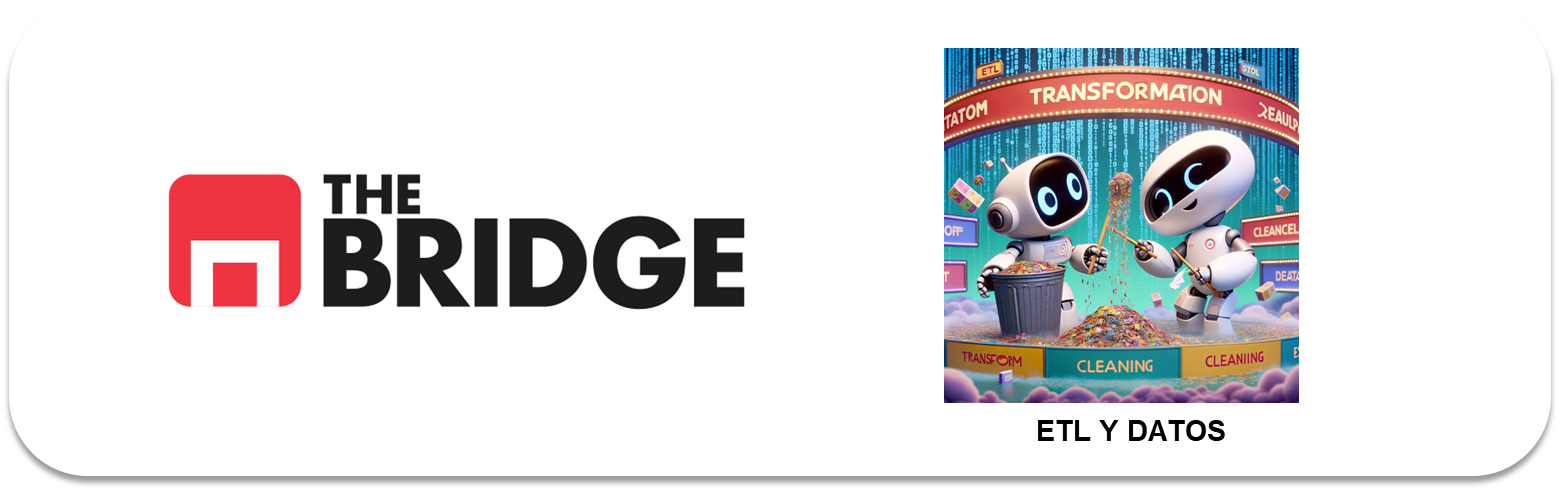

## PRACTICA OBLIGATORIA: Transformación y limpieza

* La práctica obligatoria de esta unidad consiste en cargar un dataset de Netflix y hacer un repaso completo del mismo, limpiando, transformando y creando algunas variables. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

## #0 Carga de datos y primera exploración

In [1]:
import numpy as np
import pandas as pd
import random


df_peliculas = pd.read_csv("data/dataset_netflix_titles.csv")


In [ ]:
df = df_peliculas.copy()


In [ ]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


1. Haz una primera exploración de los datos. Haz una primera visualización de la tabla, muestra la información general, la descripción de las variables numéricas, las columnas y muestra la distribución de datos de tres columnas escogidas por ti.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.describe() #variables numericas
#no tiene tasnto sentido

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.objet() #para strings

In [ ]:
df.columnns

In [7]:
#muestra la distribución de datos de tres columnas escogidas por ti
columnas = ["release_year", "date_added", "duration"]
for cols in df:
    

SyntaxError: incomplete input (1069562922.py, line 4)

<Axes: >

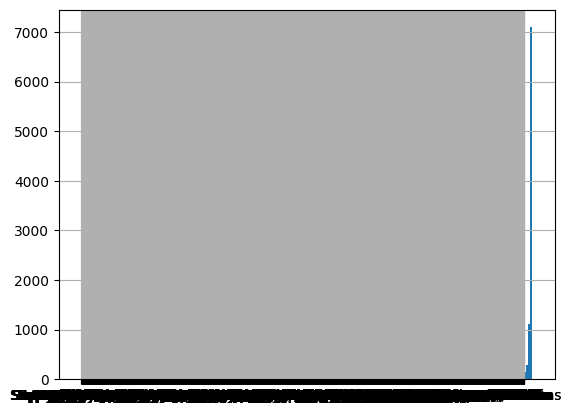

In [32]:
#muestra la distribución de datos de tres columnas escogidas por ti
df["release_year"].hist()
df["date_added"].hist()
df["duration"].hist()


## #1 Duplicados y cardinalidad

1. ¿Existen filas duplicadas?¿Cuántas?

In [8]:
dp = df[df.duplicated()]
print(dp)
filas_duplicadas = len(dp)
print(filas_duplicadas)
#no existen

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []
0


2. Deshazte de las filas duplicadas, si las hubiera. Quédate con las últimas copias.

In [9]:
filas_no_duplicadas = df.drop_duplicates(keep="last")
filas_no_duplicadas

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


3. Ahora que no hay duplicados, tiene sentido calcular la cardinalidad de cada columna. Haz un programa que la obtenga y guarde el resultado en un diccionario con claves el nombre de las columnas y valores la cardinalidad (tal y como la hemos visto en el workout) de cada columna. [Nota: ¿has tenido en cuenta los valores nulos?]

In [10]:
def Cardinalidad(dataframe):
    cardi_dict = {} 
    for col in df:
        cardinalidad = df[col].nunique()/len(df)*100
        cardi_dict[col] = cardinalidad
        print(f"{col}: {cardinalidad}%")
    return cardi_dict
resultado = Cardinalidad(df)
print(resultado)

show_id: 100.0%
type: 0.05677302146020212%
title: 100.0%
director: 51.41364823435903%
cast: 87.33961621437493%
country: 8.493244010446235%
date_added: 20.063585784035425%
release_year: 0.8402407176109912%
rating: 0.19302827296468716%
duration: 2.498012944248893%
listed_in: 5.836266606108778%
description: 99.6366526626547%
{'show_id': 100.0, 'type': 0.05677302146020212, 'title': 100.0, 'director': 51.41364823435903, 'cast': 87.33961621437493, 'country': 8.493244010446235, 'date_added': 20.063585784035425, 'release_year': 0.8402407176109912, 'rating': 0.19302827296468716, 'duration': 2.498012944248893, 'listed_in': 5.836266606108778, 'description': 99.6366526626547}


4. Haz un pequeño programa que recorra el diccionario y nos diga si hay alguna columna que pueda ser un buen índice (cardinalidad = 100%)


In [11]:
def Cien_Cardinalidad(diccionario):
    for columna, valor in diccionario.items():
        if valor >= 100:
            print(f"La columna '{columna}'tiene una cardinalidad del 100%.")
        else:
            print(f"La columna '{columna}' no tiene una cardinalidad del 100%.")
            

In [80]:
Cien_Cardinalidad(resultado)

La columna 'show_id'tiene una cardinalidad del 100%.
La columna 'type' no tiene una cardinalidad del 100%.
La columna 'title'tiene una cardinalidad del 100%.
La columna 'director' no tiene una cardinalidad del 100%.
La columna 'cast' no tiene una cardinalidad del 100%.
La columna 'country' no tiene una cardinalidad del 100%.
La columna 'date_added' no tiene una cardinalidad del 100%.
La columna 'release_year' no tiene una cardinalidad del 100%.
La columna 'rating' no tiene una cardinalidad del 100%.
La columna 'duration' no tiene una cardinalidad del 100%.
La columna 'listed_in' no tiene una cardinalidad del 100%.
La columna 'description' no tiene una cardinalidad del 100%.


Bonus: Haz los ejercicios 3 y 4 pero usando un objeto `Series` en vez de un diccionario.

In [12]:


def Cardinalidad(dataframe):
    cardi_series = pd.Series(dtype='float64')
    for col in dataframe:
        cardinalidad = dataframe[col].nunique() / len(dataframe) * 100
        cardi_series[col] = cardinalidad
        print(f"{col}: {cardinalidad}%")
    return cardi_series

resultado = Cardinalidad(df)
print(resultado)


show_id: 100.0%
type: 0.05677302146020212%
title: 100.0%
director: 51.41364823435903%
cast: 87.33961621437493%
country: 8.493244010446235%
date_added: 20.063585784035425%
release_year: 0.8402407176109912%
rating: 0.19302827296468716%
duration: 2.498012944248893%
listed_in: 5.836266606108778%
description: 99.6366526626547%
show_id         100.000000
type              0.056773
title           100.000000
director         51.413648
cast             87.339616
country           8.493244
date_added       20.063586
release_year      0.840241
rating            0.193028
duration          2.498013
listed_in         5.836267
description      99.636653
dtype: float64


In [13]:


def Cien_Cardinalidad(series):
    for columna, valor in series.items():
        if valor >= 100:
            print(f"La columna '{columna}' tiene una cardinalidad del 100%.")
        else:
            print(f"La columna '{columna}' no tiene una cardinalidad del 100%.")

Cien_Cardinalidad(resultado)

            

La columna 'show_id' tiene una cardinalidad del 100%.
La columna 'type' no tiene una cardinalidad del 100%.
La columna 'title' tiene una cardinalidad del 100%.
La columna 'director' no tiene una cardinalidad del 100%.
La columna 'cast' no tiene una cardinalidad del 100%.
La columna 'country' no tiene una cardinalidad del 100%.
La columna 'date_added' no tiene una cardinalidad del 100%.
La columna 'release_year' no tiene una cardinalidad del 100%.
La columna 'rating' no tiene una cardinalidad del 100%.
La columna 'duration' no tiene una cardinalidad del 100%.
La columna 'listed_in' no tiene una cardinalidad del 100%.
La columna 'description' no tiene una cardinalidad del 100%.


## #2 Limpieza y transformación (I)

El primer paso en la limpieza es intentar detectar que campos están "sucios", una posible guía podría ser, encontrar:  
* Campos numéricos inconsistentes (el típico campo con la coma y el punto decimal mezclado, o con formatos numéricos combinados)  
* Campos con valores inconsistentes (por ejemplo aparecen valores que no tienen relación con la columna en la que están porque están mal colocados, porque se han incluido por error, valores medidos en una unidad frente a otros medidos en otra)  
* Campos con valores que son iguales pero están representados de formas diferentes (por ejemplo un actor que unas veces aparece con el nombre en un orden y otras veces con el nombre en otro, o el nombre de un país como USA que aparezca como EEUU otras veces, o cadenas que tienen espacios al principio y al final y Python las considera diferentes: " Clint Eastwood " y "Clint Eastwood").  


Vamos a hacer un pequeño análisis siguiendo las pautas anteriores pero sin profundizar en ellas, en tu EDA sí que tendrás que hacerlo. Para ello nos vamos a centrar en los campos con cardinalidad menor que un 10% (el resto requiere un análsis mucho más exahustivo que se nos va fuera del alcance de la práctica, pero, repito en tu EDA tendrás que hacerlo)

1. Antes de centrarnos en esos campos, quita los espacios en blanco que pueda haber antes o después de cada valor string. (utiliza el método de cadenas de pandas, `strip`). Por ejemplo (como guía pero no como única solución) recorre con un for el nombre de las columnas y ve aplicando el método columna a columna. Pero puedes hacerlo como tú quieras, claro.

In [20]:
df.info() #LOS VALORES CON STRING SE PONE COMO OBJET Y BUSCAMOS LAS NUMÉRICAS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [29]:
df["duration"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8807 entries, 0 to 8806
Series name: duration
Non-Null Count  Dtype 
--------------  ----- 
8804 non-null   object
dtypes: object(1)
memory usage: 68.9+ KB


In [30]:
def reemplazar_comas_por_puntos(valor):
    if isinstance(valor, str):
        return valor.replace(',', '.')
    return valor

# Seleccionar la columna 'duration' y aplicar la función de reemplazo
df['duration'] = df['duration'].apply(reemplazar_comas_por_puntos)

In [31]:
def reemplazar_comas_por_puntos(valor):
    if isinstance(valor, str):
        return valor.replace(',', '.')
    return valor

# Seleccionar la columna 'duration' y aplicar la función de reemplazo
df['release_year'] = df['release_year'].apply(reemplazar_comas_por_puntos)

In [37]:
df["release_year"]

0    2020
1    2021
2    2021
3    2021
4    2021
Name: release_year, dtype: int64

In [15]:
df_nulos =df.isnull().sum()
df_nulos

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [33]:
# Campos con valores inconsistentes (por ejemplo aparecen valores que no tienen relación con la columna en la que 
# están porque están mal colocados, porque se han incluido por error, valores medidos en una unidad frente a otros medidos en otra)  
valores_unicos =df["director"].unique()
valores_unicos

array(['Kirsten Johnson', nan, 'Julien Leclercq', ..., 'Majid Al Ansari',
       'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [58]:
df_copy = df.copy()

In [87]:
df_columnas = df[["director", "cast", "country", "date_added", "rating", "duration"]]
df_sin_nan =df.dropna(subset = df_columnas) #no me sale quitarle el NAN

KeyError: [['Kirsten Johnson', nan, 'EEUU', 'September 25, 2021', 'PG-13', '90 min'], [nan, 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng', 'South Africa', 'September 24, 2021', 'TV-MA', '2 Seasons'], ['Julien Leclercq', 'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera', nan, 'September 24, 2021', 'TV-MA', '1 Season'], [nan, nan, nan, 'September 24, 2021', 'TV-MA', '1 Season'], [nan, 'Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar', 'India', 'September 24, 2021', 'TV-MA', '2 Seasons'], ['Mike Flanagan', 'Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Samantha Sloyan, Igby Rigney, Rahul Kohli, Annarah Cymone, Annabeth Gish, Alex Essoe, Rahul Abburi, Matt Biedel, Michael Trucco, Crystal Balint, Louis Oliver', nan, 'September 24, 2021', 'TV-MA', '1 Season'], ['Robert Cullen, José Luis Ucha', 'Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr', nan, 'September 24, 2021', 'PG', '91 min'], ['Haile Gerima', 'Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri', 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia', 'September 24, 2021', 'TV-MA', '125 min'], ['Andy Devonshire', 'Mel Giedroyc, Sue Perkins, Mary Berry, Paul Hollywood', 'United Kingdom', 'September 24, 2021', 'TV-14', '9 Seasons'], ['Theodore Melfi', "Melissa McCarthy, Chris O'Dowd, Kevin Kline, Timothy Olyphant, Daveed Diggs, Skyler Gisondo, Laura Harrier, Rosalind Chao, Kimberly Quinn, Loretta Devine, Ravi Kapoor", 'EEUU', 'September 24, 2021', 'PG-13', '104 min'], [nan, nan, nan, 'September 24, 2021', 'TV-MA', '1 Season'], ['Kongkiat Komesiri', 'Sukollawat Kanarot, Sushar Manaying, Pavarit Mongkolpisit, Sahajak Boonthanakit, Suthipongse Thatphithakkul, Bhasaworn Bawronkirati, Daweerit Chullasapya, Waratthaya Wongchayaporn, Kittiphoom Wongpentak, Abhicha Thanachanun, Nophand Boonyai, Kittipong Khamsat, Arisara Wongchalee, Jaytiya Naiwattanakul, Pantipa Arunwattanachai, Panupan Jantanawong, Kungtap Saelim, Phumphat Chartsuriyakiat, Issara Veranitinunt, Keerati Sivakuae, Panjai Sirisuwan, Supranee Charoenpol, Suda Chuenban, Visaka Banhansupavat, Pitchatorn Santinatornkul', nan, 'September 23, 2021', 'TV-MA', '1 Season'], ['Christian Schwochow', 'Luna Wedler, Jannis Niewöhner, Milan Peschel, Edin Hasanović, Anna Fialová, Marlon Boess, Victor Boccard, Fleur Geffrier, Aziz Dyab, Mélanie Fouché, Elizaveta Maximová', 'Germany, Czech Republic', 'September 23, 2021', 'TV-MA', '127 min'], ['Bruno Garotti', 'Klara Castanho, Lucca Picon, Júlia Gomes, Marcus Bessa, Kiria Malheiros, Fernanda Concon, Gabriel Lima, Caio Cabral, Leonardo Cidade, Jade Cardozo', nan, 'September 22, 2021', 'TV-PG', '91 min'], [nan, nan, nan, 'September 22, 2021', 'TV-MA', '1 Season'], [nan, 'Logan Browning, Brandon P. Bell, DeRon Horton, Antoinette Robertson, John Patrick Amedori, Ashley Blaine Featherson, Marque Richardson, Giancarlo Esposito', 'EEUU', 'September 22, 2021', 'TV-MA', '4 Seasons'], ['Pedro de Echave García, Pablo Azorín Williams', nan, nan, 'September 22, 2021', 'TV-MA', '67 min'], [nan, 'Luis Ernesto Franco, Camila Sodi, Sergio Goyri, Samadhi Zendejas, Eduardo Yáñez, Sonya Smith, Alejandro Camacho, Azela Robinson, Uriel del Toro, Géraldine Bazán, Gabriela Roel, Marcus Ornellas', 'Mexico', 'September 22, 2021', 'TV-MA', '2 Seasons'], ['Adam Salky', 'Freida Pinto, Logan Marshall-Green, Robert John Burke, Megan Elisabeth Kelly, Sarah Minnich, Hayes Hargrove, Mark Sivertsen, Brandon Fierro, Antonio Valles, Clint Obenchain', nan, 'September 22, 2021', 'TV-14', '94 min'], [nan, 'Blanca Suárez, Iván Marcos, Óscar Casas, Adrián Lastra, Francesc Garrido, Stefan Weinert, Julia Möller, Alicia Chojnowski', nan, 'September 22, 2021', 'TV-MA', '1 Season'], ['Olivier Megaton', nan, nan, 'September 22, 2021', 'TV-14', '1 Season'], [nan, 'Engin Altan Düzyatan, Serdar Gökhan, Hülya Darcan, Kaan Taşaner, Esra Bilgiç, Osman Soykut, Serdar Deniz, Cengiz Coşkun, Reshad Strik, Hande Subaşı', 'Turkey', 'September 22, 2021', 'TV-14', '5 Seasons'], ['K.S. Ravikumar', 'Kamal Hassan, Meena, Gemini Ganesan, Heera Rajgopal, Nassar, S.P. Balasubrahmanyam', nan, 'September 21, 2021', 'TV-PG', '161 min'], ['Alex Woo, Stanley Moore', 'Maisie Benson, Paul Killam, Kerry Gudjohnsen, AC Lim', nan, 'September 21, 2021', 'TV-Y', '61 min'], ['S. Shankar', 'Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi, Nassar', 'India', 'September 21, 2021', 'TV-14', '166 min'], [nan, 'Brooke Satchwell', 'Australia', 'September 21, 2021', 'TV-14', '2 Seasons'], ['Rajiv Menon', 'Arvind Swamy, Kajol, Prabhu Deva, Nassar, S.P. Balasubrahmanyam, Girish Karnad', nan, 'September 21, 2021', 'TV-PG', '147 min'], ['Dennis Dugan', 'Adam Sandler, Kevin James, Chris Rock, David Spade, Rob Schneider, Salma Hayek, Maria Bello, Maya Rudolph, Colin Quinn, Tim Meadows, Joyce Van Patten', 'EEUU', 'September 20, 2021', 'PG-13', '103 min'], ['Scott Stewart', 'Keri Russell, Josh Hamilton, J.K. Simmons, Dakota Goyo, Kadan Rockett, L.J. Benet, Rich Hutchman, Myndy Crist, Annie Thurman, Jake Brennan', 'EEUU', 'September 19, 2021', 'PG-13', '97 min'], ['Robert Luketic', 'Liam Hemsworth, Gary Oldman, Amber Heard, Harrison Ford, Lucas Till, Embeth Davidtz, Julian McMahon, Josh Holloway, Richard Dreyfuss, Angela Sarafyan', 'United States, India, France', 'September 19, 2021', 'PG-13', '106 min'], ['Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket Chaudhary', 'Abhishek Banerjee, Rinku Rajguru, Delzad Hiwale, Kunal Kapoor, Zoya Hussain, Nikhil Dwivedi, Palomi Ghosh', nan, 'September 17, 2021', 'TV-14', '111 min'], [nan, "Lauren Ash, Rory O'Malley, RuPaul Charles, Jill Talley, Ike Barinholtz, Jon Barinholtz, Matthew Craig, Bob Odenkirk, Mike Hagerty, Katie Rich, Chris Witaske", nan, 'September 17, 2021', 'TV-MA', '1 Season'], [nan, 'Asa Butterfield, Gillian Anderson, Ncuti Gatwa, Emma Mackey, Connor Swindells, Kedar Williams-Stirling, Alistair Petrie', 'United Kingdom', 'September 17, 2021', 'TV-MA', '3 Seasons'], [nan, 'Lee Jung-jae, Park Hae-soo, Wi Ha-jun, Oh Young-soo, Jung Ho-yeon, Heo Sung-tae, Kim Joo-ryoung, Tripathi Anupam, You Seong-joo, Lee You-mi', nan, 'September 17, 2021', 'TV-MA', '1 Season'], [nan, 'Dami Lee, Jason Lee, Bommie Catherine Han, Jennifer Waescher, Nancy Kim', nan, 'September 17, 2021', 'TV-Y7', '1 Season'], ['Daniel Sandu', 'Adrian Titieni, Elena Purea, Judith State, Valeriu Andriuță, Tudor Smoleanu, Virgil Aioanei, Radu Botar, Petronela Grigorescu, Bogdan Nechifor, Cristian Bota', nan, 'September 17, 2021', 'TV-MA', '110 min'], ['Cédric Jimenez', 'Gilles Lellouche, Karim Leklou, François Civil, Adèle Exarchopoulos, Kenza Fortas, Cyril Lecomte, Michaël Abiteboul, Idir Azougli, Vincent Darmuzey, Jean-Yves Berteloot', nan, 'September 17, 2021', 'TV-MA', '105 min'], [nan, 'Antti Pääkkönen, Heljä Heikkinen, Lynne Guaglione, Pasi Ruohonen, Rauno Ahonen', 'Finland', 'September 16, 2021', 'TV-Y7', '1 Season'], ['George Nolfi', 'Billy Magnussen, Ron Yuan, Qu Jingjing, Terry Chen, Vanness Wu, Jin Xing, Philip Ng, Xia Yu, Yu Xia', 'China, Canada, United States', 'September 16, 2021', 'PG-13', '96 min'], [nan, 'Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil', 'India', 'September 16, 2021', 'TV-Y7', '3 Seasons'], [nan, 'Yuri Lowenthal, Kimberly Brooks, Antony Del Rio, Trevor Devall, Ben Diskin, Grey Griffin, David Kaye, Tom Kenny, Judy Alice Lee, Roger Craig Smith, Fred Tatasciore', 'EEUU', 'September 16, 2021', 'TV-Y7', '1 Season'], ['Steven Spielberg', 'Roy Scheider, Robert Shaw, Richard Dreyfuss, Lorraine Gary, Murray Hamilton, Carl Gottlieb, Jeffrey Kramer, Susan Backlinie, Jonathan Filley, Ted Grossman', 'EEUU', 'September 16, 2021', 'PG', '124 min'], ['Jeannot Szwarc', 'Roy Scheider, Lorraine Gary, Murray Hamilton, Joseph Mascolo, Jeffrey Kramer, Collin Wilcox Paxton, Ann Dusenberry, Mark Gruner, Barry Coe, Susan French', 'EEUU', 'September 16, 2021', 'PG', '116 min'], ['Joe Alves', 'Dennis Quaid, Bess Armstrong, Simon MacCorkindale, Louis Gossett Jr., John Putch, Lea Thompson, P.H. Moriarty, Dan Blasko, Liz Morris, Lisa Maurer', 'EEUU', 'September 16, 2021', 'PG', '98 min'], ['Joseph Sargent', 'Lorraine Gary, Lance Guest, Mario Van Peebles, Karen Young, Michael Caine, Judith Barsi, Mitchell Anderson, Lynn Whitfield', 'EEUU', 'September 16, 2021', 'PG-13', '91 min'], ['Tyler Greco', nan, nan, 'September 16, 2021', 'PG', '23 min'], ['Daniel Espinosa', 'Denzel Washington, Ryan Reynolds, Vera Farmiga, Brendan Gleeson, Sam Shepard, Rubén Blades, Nora Arnezeder, Robert Patrick, Liam Cunningham, Joel Kinnaman', 'South Africa, United States, Japan', 'September 16, 2021', 'R', '115 min'], ['Bunmi Ajakaiye', 'Osas Ighodaro, Ini Dima-Okojie, Kemi Lala Akindoju, Toni Tones, Ebenezer Eno, Eso Okolocha DIke, Patrick Diabuah, Karibi Fubara, Temisan Emmanuel, Timini Egbuson', nan, 'September 16, 2021', 'TV-MA', '1 Season'], ['Antoine Fuqua', 'Denzel Washington, Ethan Hawke, Scott Glenn, Tom Berenger, Harris Yulin, Raymond J. Barry, Cliff Curtis, Dr. Dre, Snoop Dogg, Macy Gray, Eva Mendes', 'EEUU', 'September 16, 2021', 'R', '122 min'], [nan, 'Richard Mofe-Damijo, Dakore Akande, Bimbo Manuel, Blossom Chukwujekwu, Deyemi Okanlawon, Etim Effiong, Denola Grey, Duke Akintola, Eku Edewor, Ade Laoye, Anee Icha, Kevin Ushi, Jude Chukwuka, Amanda Afolabi', 'Nigeria', 'September 15, 2021', 'TV-MA', '2 Seasons'], [nan, 'Kashmira Irani, Chandan Anand, Dinesh Mehta, Ankit Arora, Pushkar Goggiaa, Anjali Rana, Aarya DharmChand Kumar, Amit Behl, Maleeka Ghai', 'India', 'September 15, 2021', 'TV-PG', '1 Season'], ['Toshiya Shinohara', 'Kappei Yamaguchi, Satsuki Yukino, Mieko Harada, Koji Tsujitani, Houko Kuwashima, Kumiko Watanabe, Noriko Hidaka, Kenichi Ogata, Toshiyuki Morikawa, Izumi Ogami', 'Japan', 'September 15, 2021', 'TV-14', '99 min'], ['Toshiya Shinohara', 'Kappei Yamaguchi, Satsuki Yukino, Koji Tsujitani, Houko Kuwashima, Kumiko Watanabe, Ken Narita, Akio Otsuka, Kikuko Inoue', 'Japan', 'September 15, 2021', 'TV-14', '99 min'], ['Toshiya Shinohara', 'Kappei Yamaguchi, Satsuki Yukino, Koji Tsujitani, Houko Kuwashima, Kumiko Watanabe, Noriko Hidaka, Ken Narita, Cho, Mamiko Noto, Nobutoshi Canna', 'Japan', 'September 15, 2021', 'TV-PG', '88 min'], ['Toshiya Shinohara', 'Kappei Yamaguchi, Satsuki Yukino, Koji Tsujitani, Houko Kuwashima, Kumiko Watanabe, Kenichi Ogata, Noriko Hidaka, Hisako Kyoda, Ken Narita, Tomokazu Seki', 'Japan', 'September 15, 2021', 'TV-PG', '100 min'], [nan, 'Nicole Byer, Jacques Torres', 'EEUU', 'September 15, 2021', 'TV-PG', '6 Seasons'], ['Masahiko Murata', 'Junko Takeuchi, Chie Nakamura, Rikiya Koyama, Kazuhiko Inoue, Masaki Terasoma, Mie Sonozaki, Yuichi Nakamura, Kengo Kawanishi, Kosei Hirota, Masako Katsuki', 'Japan', 'September 15, 2021', 'TV-14', '102 min'], ['Hajime Kamegaki', 'Junko Takeuchi, Chie Nakamura, Noriaki Sugiyama, Unsho Ishizuka, Motoko Kumai, Kazuhiko Inoue, Rikiya Koyama, Showtaro Morikubo, Nana Mizuki, Satoshi Hino, Shinji Kawada', 'Japan', 'September 15, 2021', 'TV-PG', '93 min'], ['Masahiko Murata', 'Junko Takeuchi, Chie Nakamura, Kazuhiko Inoue, Satoshi Hino, Showtaro Morikubo, Kentaro Ito, Ryoka Yuzuki, Kohsuke Toriumi, Nana Mizuki, Shinji Kawada, Yoichi Masukawa, Koichi Tochika, Yukari Tamura', 'Japan', 'September 15, 2021', 'TV-PG', '96 min'], ['Hajime Kamegaki', 'Junko Takeuchi, Chie Nakamura, Yoichi Masukawa, Koichi Tochika, Ayumi Fujimura, Keisuke Oda, Daisuke Kishio, Fumiko Orikasa, Hidetoshi Nakamura, Tetsuya Kakihara, Kisho Taniyama, Miyuki Sawashiro, Katsuyuki Konishi, Masako Katsuki, Keiko Nemoto, Masashi Ebara, Kazuhiko Inoue, Showtaro Morikubo, Romi Park, Daisuke Ono, Seizo Kato', 'Japan', 'September 15, 2021', 'TV-PG', '95 min'], ['Masahiko Murata', 'Junko Takeuchi, Chie Nakamura, Satoshi Hino, Rikiya Koyama, Nobuaki Fukuda, Kenji Hamada, Keiko Nemoto, Saori Hayami, Yumi Toma, Yuko Kobayashi, Fujiko Takimoto, Mutsumi Tamura, Mayuki Makiguchi, Toshiyuki Morikawa', 'Japan', 'September 15, 2021', 'TV-14', '85 min'], ['Hirotsugu Kawasaki', 'Junko Takeuchi, Gamon Kaai, Chie Nakamura, Showtaro Morikubo, Akira Ishida, Yasuyuki Kase, Urara Takano, Sachiko Kojima, Houko Kuwashima, Takako Honda', 'Japan', 'September 15, 2021', 'TV-PG', '97 min'], ['Toshiyuki Tsuru', 'Junko Takeuchi, Chie Nakamura, Yoichi Masukawa, Kazuhiko Inoue, Akio Otsuka, Kyousuke Ikeda, Marika Hayashi, Umeji Sasaki, Masashi Sugawara, Hisao Egawa', 'Japan', 'September 15, 2021', 'TV-PG', '95 min'], ['Tensai Okamura', 'Junko Takeuchi, Noriaki Sugiyama, Chie Nakamura, Kazuhiko Inoue, Yuhko Kaida, Tsutomu Isobe, Hirotaka Suzuoki, Jun Karasawa, Harii Kaneko, Ikuo Nishikawa', 'Japan', 'September 15, 2021', 'TV-PG', '83 min'], ['David Yarovesky', 'Winslow Fegley, Lidya Jewett, Krysten Ritter', nan, 'September 15, 2021', 'TV-PG', '103 min'], [nan, 'Beth Chalmers, David Holt, Marcel McCalla, Teresa Gallagher', 'United Kingdom', 'September 15, 2021', 'TV-Y', '6 Seasons'], [nan, nan, 'India', 'September 15, 2021', 'TV-G', '1 Season'], [nan, 'Mark-Paul Gosselaar, Tiffani Thiessen, Mario Lopez, Lark Voorhies, Elizabeth Berkley, Dustin Diamond, Dennis Haskins', 'EEUU', 'September 15, 2021', 'TV-PG', '9 Seasons'], ['Hanns-Bruno Kammertöns, Vanessa Nöcker, Michael Wech', 'Michael Schumacher', nan, 'September 15, 2021', 'TV-14', '113 min'], [nan, nan, 'India', 'September 15, 2021', 'TV-PG', '1 Season'], [nan, 'Itatí Cantoral', nan, 'September 15, 2021', 'TV-MA', '1 Season'], ['David A. Vargas', 'Evan Spiridellis, Erin Fitzgerald, Jeff Gill, Fred Tatasciore, Evan Michael Lee, Jared Isaacman, Sian Proctor, Chris Sembroski, Hayley Arceneaux', nan, 'September 14, 2021', 'TV-Y', '13 min'], [nan, 'Jack Whitehall, Michael Whitehall', 'United Kingdom', 'September 14, 2021', 'TV-MA', '5 Seasons'], ['Kemi Adetiba', 'Sola Sobowale, Adesua Etomi, Remilekun "Reminisce" Safaru, Tobechukwu "iLLbliss" Ejiofor, Toni Tones, Paul Sambo, Jide Kosoko, Sharon Ooja', 'Nigeria', 'September 14, 2021', 'TV-MA', '182 min'], [nan, nan, nan, 'September 14, 2021', 'TV-PG', '2 Seasons'], ['Ben Simms', 'Bear Grylls, Jason Derek Prempeh', nan, 'September 14, 2021', 'TV-G', '106 min'], [nan, 'Daiki Yamashita, Kohsuke Toriumi, Jun Fukushima, Hiroki Yasumoto, Showtaro Morikubo, Kentaro Ito, Daisuke Kishio, Yoshitsugu Matsuoka, Junichi Suwabe, Ayaka Suwa, Megumi Han, Tomoaki Maeno, Tsubasa Yonaga, Tetsuya Kakihara, Satoshi Hino, Hiroyuki Yoshino, Atsushi Abe, Koji Yusa, Kouki Miyata, Hiro Shimono, Wataru Hatano, Yuichi Nakamura, Kenji Nojima, Mamoru Miyano, Daisuke Ono, Yuma Uchida, Jun Fukuyama', 'Japan', 'September 14, 2021', 'TV-14', '1 Season'], ['Prakash Satam', 'Sumriddhi Shukla, Jigna Bharadwaj, Sonal Kaushal, Neshma Chemburkar, Ganesh Divekar, Annamaya Verma, Anamay Verma, Manoj Pandey', nan, 'September 11, 2021', 'TV-Y7', '48 min'], ['Delhiprasad Deenadayalan', 'Vijay Sethupathi, Parthiban, Raashi Khanna', nan, 'September 11, 2021', 'TV-14', '145 min'], ['Delhiprasad Deenadayalan', 'Vijay Sethupathi, Parthiban, Raashi Khanna', nan, 'September 11, 2021', 'TV-14', '145 min'], ['Tomer Eshed', 'Thomas Brodie-Sangster, Felicity Jones, Freddie Highmore, Patrick Stewart, Meera Syal, Sanjeev Bhaskar, Nonso Anozie', nan, 'September 10, 2021', 'TV-Y7', '93 min'], ['Cedric Nicolas-Troyan', 'Mary Elizabeth Winstead, Jun Kunimura, Woody Harrelson, Tadanobu Asano, Miyavi, Michiel Huisman, Miku Martineau', 'EEUU', 'September 10, 2021', 'R', '106 min'], [nan, 'Tom Ellis, Lauren German, Kevin Alejandro, D.B. Woodside, Lesley-Ann Brandt, Scarlett Estevez, Rachael Harris, Aimee Garcia, Tricia Helfer, Tom Welling, Jeremiah W. Birkett, Pej Vahdat, Michael Gladis', 'EEUU', 'September 10, 2021', 'TV-14', '6 Seasons'], [nan, 'Jo Koy', nan, 'September 10, 2021', 'TV-MA', '1 Season'], ['JJC Skillz, Funke Akindele', 'Funke Akindele, Ayo Makun, Chioma Chukwuka Akpotha, Yemi Eberechi Alade, Blossom Chukwujekwu, Deyemi Okanlawon, Alexx Ekubo, Zubby Michael, Tina Mba, Femi Jacobs', 'Nigeria', 'September 10, 2021', 'TV-MA', '147 min'], [nan, 'Ikue Otani, Sarah Natochenny, Zeno Robinson, Cherami Leigh, James Carter Cathcart, Michele Knotz, Rodger Parsons, Ray Chase, Casey Mongillo, Tara Sands', nan, 'September 10, 2021', 'TV-Y7', '1 Season'], ['Thomas Sieben', 'David Kross, Hanno Koffler, Maria Ehrich, Robert Finster, Yung Ngo, Klaus Steinbacher, Livia Matthes, Nellie Thalbach', nan, 'September 10, 2021', 'TV-MA', '87 min'], [nan, 'Jeon Hae-ri, Kim Eun-ah, Hong Bum-ki, Nam Do-hyeong, Um Sang-hyun', nan, 'September 10, 2021', 'TV-Y', '2 Seasons'], ['Marcus Clarke', 'Malcolm X, Muhammad Ali', nan, 'September 9, 2021', 'PG-13', '96 min'], [nan, 'Julie Tejwani, Sabina Malik, Jigna Bhardwaj, Rupa Bhimani, Lalit Agarwal, Rajesh Shukla, Rajesh Kava', nan, 'September 9, 2021', 'TV-Y7', '4 Seasons'], ['Alice Waddington', 'Emma Roberts, Danielle Macdonald, Awkwafina, Eiza González, Milla Jovovich, Jeremy Irvine, Arnaud Valois, Daniel Horvath', 'Spain, United States', 'September 9, 2021', 'TV-MA', '95 min'], ['Mona Achache, Patricia Tourancheau', nan, 'France', 'September 9, 2021', 'TV-14', '92 min'], [nan, 'Pauline Etienne, Laurent Capelluto, Stefano Cassetti, Mehmet Kurtuluş, Babetida Sadjo, Jan Bijvoet, Ksawery Szlenkier, Vincent Londez, Regina Bikkinina, Alba Gaïa Kraghede Bellugi, Nabil Mallat', 'Belgium', 'September 8, 2021', 'TV-MA', '2 Seasons'], ['Alexis Almström', 'Elsa Öhrn, Mustapha Aarab, Jonay Pineda Skallak, Magnus Krepper, Loreen, Albin Grenholm, Simon Mezher, Elsa Bergström Terent, Josef Kadim, Yohannes Frezgi', nan, 'September 8, 2021', 'TV-MA', '91 min'], ['Raja Gosnell', "Will Arnett, Ludacris, Natasha Lyonne, Stanley Tucci, Jordin Sparks, Gabriel Iglesias, Shaquille O'Neal, Omar Chaparro, Alan Cumming, Andy Beckwith, Delia Sheppard, Kerry Shale", 'United Kingdom, United States', 'September 8, 2021', 'PG', '90 min'], [nan, 'Michelle Buteau', 'United States, United Kingdom', 'September 8, 2021', 'TV-MA', '3 Seasons'], ['Stephen Kijak', 'Ronnie Van Zandt, Gary Rossington, Allen Collins, Leon Wilkeson, Bob Burns, Billy Powell, Ed King, Artimus Pyle, Steve Gaines, Johnny Van Zant', 'EEUU', 'September 7, 2021', 'TV-MA', '97 min'], [nan, 'Jack Fisher, Tom Kenny, Amanda C. Miller, Kim Yarbrough, Keith Ferguson, Grey Griffin, Lily Rose Silver', 'EEUU', 'September 7, 2021', 'TV-Y7', '2 Seasons'], [nan, 'Antonio Aakeel, Chipo Chung, Simon Foster, Teresa Gallagher, Simon Greenall, Kate Harbour, Paul Panting, Rob Rackstraw, William Vanderpuye, Helen Walsh, Keith Wickham, Andres Williams, Jo Wyatt', 'United Kingdom', 'September 7, 2021', 'TV-Y', '1 Season'], [nan, 'Julie Delpy, Elisabeth Shue, Sarah Jones, Alexia Landeau, Mathieu Demy, Troy Garity, Timm Sharp, Giovanni Ribisi', 'France, United States', 'September 7, 2021', 'TV-MA', '1 Season'], [nan, 'Austin Abell, Travis Turner, Cole Howard, Anna Cummer, Jesse Inocalla, Brian Dobson, Michael Adamthwaite, Joseph Girgis, Caitlyn Bairstow', nan, 'September 7, 2021', 'TV-Y7', '2 Seasons'], ['Chapman Way, Maclain Way', nan, 'EEUU', 'September 7, 2021', 'TV-MA', '80 min'], ['Jason Hehir', nan, nan, 'September 6, 2021', 'TV-14', '1 Season'], ['Yemi Amodu', 'Jide Kosoko, Omotola Jalade-Ekeinde, Yemi Blaq, Sola Sobowale, Ken Erics, Toyin Aimakhu, Segun Arinze, Jibola Dabo, Rotimi Salami, Pa Jimi Solanke, Rachael Okonkwo, Bassey Okon, Lucien Morgan, Magdalena Korpas', nan, 'September 6, 2021', 'TV-MA', '117 min'], [nan, 'Robyn Slade, Kami Desilets', 'South Korea', 'September 6, 2021', 'TV-Y', '2 Seasons'], ['Lijo Jose Pellissery', 'Antony Varghese, Reshma Rajan, Binny Rinky Benjamin, Vineeth Vishwam, Kichu Tellus, Sreekanth Dasan, Sarath Kumar, Tito Wilson, Anandhu, Bitto Davis, Sinoj Varghese', 'India', 'September 5, 2021', 'TV-14', '128 min'], [nan, 'Peyton List, Karan Brar, Skai Jackson, Miranda May, Kevin G. Quinn, Nathan Arenas, Nina Lu', 'EEUU', 'September 5, 2021', 'TV-G', '5 Seasons'], ['David de Vos', 'Mandy Grace, David de Vos, Donna Rusch, Devan Key, Isabella Mancuso, Ariana Guido', 'EEUU', 'September 4, 2021', 'G', '90 min'], [nan, "Aubri Ibrag, Sana'a Shaik, Miah Madden, Mercy Cornwall, Georgia-May Davis, Ryan Harrison, Josh Heuston, Alexander Grant", 'Australia', 'September 3, 2021', 'TV-G', '1 Season'], [nan, 'Úrsula Corberó, Itziar Ituño, Álvaro Morte, Paco Tous, Enrique Arce, Pedro Alonso, María Pedraza, Alba Flores, Miguel Herrán, Jaime Lorente, Esther Acebo, Darko Peric, Kiti Mánver', 'Spain', 'September 3, 2021', 'TV-MA', '5 Seasons'], ['Luis Alfaro, Javier Gómez Santander', nan, nan, 'September 3, 2021', 'TV-MA', '1 Season'], [nan, 'Liam Mitchell, Dee Bradley Baker, Grey Griffin, Josh McDermitt, Kari Wahlgren, Judy Alice Lee, Ali Mawji', 'United States, Singapore', 'September 3, 2021', 'TV-Y', '1 Season'], ['Sara Colangelo', 'Michael Keaton, Stanley Tucci, Amy Ryan, Shunori Ramanathan, Ato Blankson-Wood, Tate Donovan, Laura Benanti, Chris Tardio', nan, 'September 3, 2021', 'PG-13', '119 min'], ['Stephen Herek', 'Victoria Justice, Midori Francis, Robyn Scott, Adam Garcia, Timothy Renouf, Gloria Garcia, Myfanwy Waring, Spencer Sutherland', nan, 'September 2, 2021', 'TV-PG', '110 min'], ['Rahul Rawail', 'Madhuri Dixit, Shah Rukh Khan, Tinnu Anand, Johny Lever, Kalpana Iyer, Himani Shivpuri, Sudha Chandran, Beena, Kiran Kumar', 'India', 'September 2, 2021', 'TV-14', '143 min'], ['Jane Campion', 'Abbie Cornish, Ben Whishaw, Paul Schneider, Kerry Fox, Edie Martin, Thomas Brodie-Sangster, Claudie Blakley, Gerard Monaco, Antonia Campbell-Hughes, Samuel Roukin', 'United Kingdom, Australia, France', 'September 2, 2021', 'PG', '119 min'], ['Nagesh Kukunoor', 'Krrish Chhabria, Hetal Gada, Vipin Sharma, Gulfam Khan, Suresh Menon, Vijay Maurya, Rajiv Lakshman, Ninad Kamat', 'India', 'September 2, 2021', 'TV-PG', '114 min'], ['Luke Holland', nan, 'United Kingdom, United States', 'September 2, 2021', 'PG-13', '94 min'], ['Shanker Raman', 'Akshay Oberoi, Pankaj Tripathi, Ragini Khanna, Aamir Bashir, Shalini Vatsa, Ashish Verma', 'India', 'September 2, 2021', 'TV-14', '106 min'], ['JP Habac', 'Janine Gutierrez, JC Santos, Victor Anastacio, Yesh Burce, Lotlot De Leon', nan, 'September 2, 2021', 'TV-MA', '99 min'], [nan, 'Jon Allen, Kellen Goff, Joe Hernandez, Kaiji Tang', 'Australia', 'September 2, 2021', 'TV-Y7', '1 Season'], [nan, 'Lee Ji-eun, Yeo Jin-goo, Shin Jung-geun, Seo Yi-sook, Bae Hae-sun, Pyo Ji-hoon, Cho Hyun-chul, Kang Hong-suk, Lee Do-hyun, Lee Tae-seon, Kang Mina, Park You-na, Oh Ji-ho', nan, 'September 2, 2021', 'TV-14', '1 Season'], ['Jane Campion', 'Meg Ryan, Mark Ruffalo, Jennifer Jason Leigh, Nick Damici, Sharrieff Pugh, Kevin Bacon, Yaani King Mondschein, Heather Litteer', 'United Kingdom, Australia, France, United States', 'September 2, 2021', 'R', '118 min'], [nan, nan, nan, 'September 2, 2021', 'TV-Y7', '1 Season'], [nan, nan, 'South Korea', 'September 2, 2021', 'TV-Y7', '3 Seasons'], [nan, 'Sean Hayes, Wanda Sykes, Laurie Metcalf, David Harbour, Gary Cole, Patti Harrison, Matt Rogers', 'EEUU', 'September 2, 2021', 'TV-MA', '1 Season'], ['Vidhu Vinod Chopra', 'Aadil Khan, Sadia Khateeb, Zain Khan Durrani, Priyanshu Chatterjee, Bhavna Chauhan, Ashwin Dhar, Farid Azad Khan, Saghar Sehrai', 'India', 'September 2, 2021', 'TV-14', '115 min'], ['Mark Rosman', 'Hilary Duff, Chad Michael Murray, Jennifer Coolidge, Dan Byrd, Regina King, Julie Gonzalo, Lin Shaye, Madeline Zima, Andrea Avery, Mary Pat Gleason, Paul Rodriguez, Whip Hubley, Kevin Kilner, Erica Hubbard, Simon Helberg', 'United States, Canada', 'September 1, 2021', 'PG', '95 min'], ['Gilles Paquet-Brenner', 'Glenn Close, Terence Stamp, Max Irons, Gillian Anderson, Christina Hendricks, Stefanie Martini, Julian Sands, Honor Kneafsey, Christian McKay, Amanda Abbington', nan, 'September 1, 2021', 'PG-13', '115 min'], ['Lasse Hallström', 'Robert Redford, Jennifer Lopez, Morgan Freeman, Josh Lucas, Damian Lewis, Camryn Manheim, Becca Gardner, Lynda Boyd, Rob Hayter, P. Lynn Johnson', 'Germany, United States', 'September 1, 2021', 'PG-13', '108 min'], ['Scott Pleydell-Pearce', 'America Young, Amber May, Giselle Fernandez, Alejandro Saab, Dinora Walcott', nan, 'September 1, 2021', 'TV-Y', '63 min'], ['Ridley Scott', 'Harrison Ford, Rutger Hauer, Sean Young, Edward James Olmos, M. Emmet Walsh, Daryl Hannah, William Sanderson, Brion James, Joe Turkel, Joanna Cassidy, James Hong, Morgan Paull', 'EEUU', 'September 1, 2021', 'R', '117 min'], [nan, 'Tseng Yun-fan, Kao Yun-shuo, Chiang Ching-yen, Meng Ching-fu, Huang Bai-wei, Ma Kuo-yao, Chen Yen-chun, Sun Ke-fang, Kai Yang-niu, Chen Yu-wen, Nick Liao, Lin Kai-ling, Mickey Huang, Liu Kuan-ting, Jiang Du-hui', nan, 'September 1, 2021', 'TV-MA', '1 Season'], ['Neill Blomkamp', 'Sharlto Copley, Hugh Jackman, Sigourney Weaver, Dev Patel, Ninja, Yo-Landi Visser, Jose Pablo Cantillo, Brandon Auret, Johnny Selema, Maurice Carpede', 'South Africa, United States', 'September 1, 2021', 'R', '121 min'], ['Phillip Noyce', 'Harrison Ford, Willem Dafoe, Anne Archer, Joaquim de Almeida, Henry Czerny, Harris Yulin, Donald Moffat, Miguel Sandoval, Benjamin Bratt, Dean Jones, Thora Birch, James Earl Jones, Raymond Cruz', 'United States, Mexico', 'September 1, 2021', 'PG-13', '142 min'], ['Renny Harlin', 'Sylvester Stallone, John Lithgow, Michael Rooker, Janine Turner, Rex Linn, Caroline Goodall, Leon, Craig Fairbrass, Ralph Waite, Max Perlich, Paul Winfield', 'United States, Italy, France, Japan', 'September 1, 2021', 'R', '113 min'], ['Anthony Minghella', 'Jude Law, Nicole Kidman, Renée Zellweger, Eileen Atkins, Brendan Gleeson, Philip Seymour Hoffman, Natalie Portman, Giovanni Ribisi, Donald Sutherland, Ray Winstone', 'United States, Italy, Romania, United Kingdom', 'September 1, 2021', 'R', '154 min'], ['Simon Wincer', 'Paul Hogan, Linda Kozlowski, Jere Burns, Jonathan Banks, Aida Turturro, Alec Wilson, Gerry Skilton, Steve Rackman, Serge Cockburn, Paul Rodriguez, Mark Adair-Rios, Tiriel Mora, Grant Piro, Mike Tyson', 'Australia, United States', 'September 1, 2021', 'PG', '95 min'], ['Lasse Hallström', 'Channing Tatum, Amanda Seyfried, Richard Jenkins, Henry Thomas, D.J. Cotrona, Cullen Moss, Gavin McCulley, Jose Lucena Jr., Keith Robinson, Scott Porter', 'EEUU', 'September 1, 2021', 'PG-13', '108 min'], ['Spike Lee', 'Danny Aiello, Ossie Davis, Ruby Dee, Richard Edson, Giancarlo Esposito, Spike Lee, Bill Nunn, John Turturro, Paul Benjamin, Frankie Faison, Samuel L. Jackson, Rosie Perez, Martin Lawrence, Miguel Sandoval', 'EEUU', 'September 1, 2021', 'R', '120 min'], ['Sebastián Schindel', 'Joaquín Furriel, Luis Ziembrowski, Guillermo Pfening, Mónica Lairana, Germán de Silva, Victoria Raposo, Andrea Garrote', 'Argentina, Venezuela', 'September 1, 2021', 'TV-MA', '100 min'], ['Steven C. Miller', 'Bruce Willis, Kellan Lutz, Gina Carano, D.B. Sweeney, Joshua Mikel, Steve Coulter, Dan Bilzerian, Heather Johansen', 'United States, United Kingdom, Canada', 'September 1, 2021', 'R', '82 min'], ['Richard LaGravenese', 'Hilary Swank, Patrick Dempsey, Scott Glenn, Imelda Staunton, April L. Hernandez, Mario, Kristin Herrera, Jaclyn Ngan, Sergio Montalvo, Jason Finn, Deance Wyatt, Vanetta Smith', 'Germany, United States', 'September 1, 2021', 'PG-13', '124 min'], ['Martin Campbell', 'Ryan Reynolds, Blake Lively, Peter Sarsgaard, Mark Strong, Tim Robbins, Jay O. Sanders, Taika Waititi, Angela Bassett', 'EEUU', 'September 1, 2021', 'PG-13', '114 min'], ['Reginald Hudlin', 'Christopher Reid, Christopher Martin, Robin Harris, Tisha Campbell, A.J. Johnson, Martin Lawrence, Paul Anthony, Bowlegged Lou, B-Fine, Edith Fields, Kelly Jo Minter, Clifton Powell, Verda Bridges', 'EEUU', 'September 1, 2021', 'R', '104 min'], ['George Jackson, Doug McHenry', 'Christopher Reid, Christopher Martin, Martin Lawrence, Bowlegged Lou, Paul Anthony, B-Fine, Tisha Campbell, Kamron, Iman, Queen Latifah', 'EEUU', 'September 1, 2021', 'R', '94 min'], ['Eric Meza', 'Christopher Reid, Christopher Martin, Tisha Campbell, David Edwards, Angela Means, Ketty Lester, Bernie Mac, Michael Colyar, Chris Tucker, Khandi Alexander', 'EEUU', 'September 1, 2021', 'R', '94 min'], [nan, nan, nan, 'September 1, 2021', 'TV-PG', '1 Season'], ['Gerhard Mostert', 'Hakeem Kae-Kazim, Chioma Omeruah, Orukotan Adejola, Flora Chiedo, Emeka Nwagbaraocha, Anthony Oseyemi, Oluwabukola Thomas, Soibifaa Dokubo', nan, 'September 1, 2021', 'TV-14', '1 Season'], ['Michael Martin', "Master P, Anthony Johnson, Gretchen Palmer, Frantz Turner, Richard Keats, Joe Estevez, William Knight, Anthony Boswell, Tommy 'Tiny' Lister, Helen Martin, John Witherspoon, Mia X", 'EEUU', 'September 1, 2021', 'R', '93 min'], ['Michael Rymer', "Omar Epps, LL Cool J, Nia Long, Stanley Tucci, Pam Grier, Hill Harper, Jake Weber, David Patrick Kelly, Veronica Webb, Ron Canada, Robert LaSardo, Gano Grills, Ivonne Coll, Don Harvey, Mya, Nasir 'Nas' Jones, Jermaine Dupri", 'EEUU', 'September 1, 2021', 'R', '97 min'], ['Andrew Lau Wai-keung, Alan Mak', 'Jay Chou, Anne Suzuki, Edison Chen, Anthony Wong Chau-sang, Shawn Yue, Chapman To, Jordan Chan, Kenny Bee', 'China, Hong Kong', 'September 1, 2021', 'TV-14', '109 min'], ['Brett Weiner', 'Jai Brooks, Luke Brooks, James Yammouni, Daniel Sahyounie, Beau Brooks', 'EEUU', 'September 1, 2021', 'TV-MA', '88 min'], [nan, 'Lori Gardner, Kate Bristol, Billy Bob Thompson, Marc Thompson, Erica Schroeder', 'Russia', 'September 1, 2021', 'TV-Y', '2 Seasons'], [nan, 'Kensho Ono, Yuki Ono, Chiwa Saito, Yoshimasa Hosoya, Hirofumi Nojima, Kenji Hamada, Takuya Eguchi, Soichiro Hoshi, Tatsuhisa Suzuki, Go Inoue, Daisuke Ono, Ryohei Kimura, Junichi Suwabe, Kazuya Nakai, Fumiko Orikasa, Kenichi Suzumura, Kisho Taniyama, Hiroshi Kamiya', 'Japan', 'September 1, 2021', 'TV-MA', '3 Seasons'], ['Jim Henson', 'David Bowie, Jennifer Connelly, Frank Oz, Kevin Clash, Anthony Asbury, Dave Goelz, Brian Henson, Ron Mueck, Karen Prell, Shari Weiser', 'United Kingdom, United States', 'September 1, 2021', 'PG', '101 min'], ['Gary Winick', 'Amanda Seyfried, Christopher Egan, Gael García Bernal, Vanessa Redgrave, Franco Nero, Luisa Ranieri, Marina Massironi, Milena Vukotic, Marcia DeBonis, Luisa De Santis, Lidia Biondi, Giordano Formenti, Chris Egan', 'EEUU', 'September 1, 2021', 'PG', '105 min'], ['Danishka Esterhazy', 'Katie Douglas, Celina Martin, Peter Outerbridge, Sara Canning, Alexis Whelan, Amalia Williamson, Josette Halpert, Kiana Madeira', 'Canada', 'September 1, 2021', 'TV-14', '102 min'], ['Troy Byer', 'Nick Cannon, Christina Milian, Kenan Thompson, Kal Penn, Steve Harvey, Al Thompson, Ashley Monique Clark, Elimu Nelson, Nichole Robinson, Melissa Schuman', 'EEUU', 'September 1, 2021', 'PG-13', '101 min'], ['Pang Ho-cheung', 'Miriam Chin Wah Yeung, Shawn Yue, Singh Hartihan Bitto, Isabel Chan, Cheung Tat-ming, Matt Chow, Chui Tien-you, Queenie Chu, Charmaine Fong, Vincent Kok', 'Hong Kong', 'September 1, 2021', 'TV-MA', '103 min'], [nan, 'Gerald McRaney, Shanna Reed, Nicole Dubuc, Chelsea Hertford, Marisa Ryan, Matt Mulhern, Beverly Archer, Jon Cypher', 'EEUU', 'September 1, 2021', 'TV-PG', '4 Seasons'], ['Tim Burton', 'Jack Nicholson, Glenn Close, Annette Bening, Pierce Brosnan, Danny DeVito, Martin Short, Sarah Jessica Parker, Michael J. Fox, Rod Steiger, Tom Jones, Lukas Haas, Natalie Portman', 'EEUU', 'September 1, 2021', 'PG-13', '106 min'], ['Reginald Hudlin', 'Chadwick Boseman, Josh Gad, Kate Hudson, Sterling K. Brown, Dan Stevens, James Cromwell, Keesha Sharp, Roger Guenveur Smith, Derrick Baskin, Barrett Doss', 'United States, China, Hong Kong', 'September 1, 2021', 'PG-13', '118 min'], ['David Zucker', 'Ashton Kutcher, Tara Reid, Jeffrey Tambor, Andy Richter, Michael Madsen, Jon Abrahams, David Koechner, Carmen Electra, Kenan Thompson, Terence Stamp, Molly Shannon', 'EEUU', 'September 1, 2021', 'R', '86 min'], ['Kinka Usher', 'Ben Stiller, Hank Azaria, William H. Macy, Janeane Garofalo, Kel Mitchell, Paul Reubens, Wes Studi, Greg Kinnear, Geoffrey Rush, Lena Olin, Eddie Izzard, Artie Lange, Pras, Claire Forlani, Tom Waits', 'EEUU', 'September 1, 2021', 'PG-13', '121 min'], [nan, 'Patricio Contreras, Alejandro Goic, Sergio Hernández, Mariana Loyola Ruz, Alejandro Trejo, Daniel Alcaíno Cuevas, Nicolás Poblete, Susana Hidalgo, Gloria Münchmeyer', nan, 'September 1, 2021', 'TV-MA', '1 Season'], ['Sergio Leone', 'Robert De Niro, James Woods, Elizabeth McGovern, Treat Williams, Tuesday Weld, Burt Young, Joe Pesci, Danny Aiello, William Forsythe, James Hayden', 'Italy, United States', 'September 1, 2021', 'R', '229 min'], ["Matthew O'Callaghan, Todd Wilderman", 'Joel McHale, Mike Epps, Jane Krakowski, Billy Connolly, Crispin Glover, Steve Schirripa, Georgia Engel, Diedrich Bader, Cody Cameron, Fred Stoller, Olivia Hack', 'United States, Canada', 'September 1, 2021', 'PG', '76 min'], ['Bobby Farrelly, Peter Farrelly', 'Chris Rock, Laurence Fishburne, David Hyde Pierce, Brandy Norwood, William Shatner, Ron Howard, Kid Rock, Ben Stein', 'EEUU', 'September 1, 2021', 'PG', '95 min'], ['Wolfgang Petersen', 'Josh Lucas, Kurt Russell, Jacinda Barrett, Richard Dreyfuss, Emmy Rossum, Mía Maestro, Mike Vogel, Kevin Dillon, Freddy Rodríguez', 'EEUU', 'September 1, 2021', 'PG-13', '98 min'], ['Peter Spirer', 'Too $hort, B-Real, Kurtis Blow, Da Brat, Grandmaster Caz, Sean "P. Diddy" Combs, Chuck D., Desiree Densiti, Dr. Dre, E-40, MC Eiht, Heavy D, Lauryn Hill, Ice-T, Wyclef Jean, Ras Kass, KRS-One, L.V., Mack 10, Craig Mack, Method Man, Keith Murray, Nasir \'Nas\' Jones, The Notorious B.I.G., Master P, Q-Tip, Raekwon, Redman, Senen Reyes, Busta Rhymes, RZA, DJ Scratch, Erick Sermon, Tupac Shakur, Adario Strange, Suave', 'EEUU', 'September 1, 2021', 'R', '89 min'], ['Michael Carney', 'Greg Kinnear, Renée Zellweger, Djimon Hounsou, Jon Voight, Olivia Holt', 'EEUU', 'September 1, 2021', 'PG-13', '120 min'], ['Richard Linklater', 'Jack Black, Joan Cusack, Mike White, Sarah Silverman, Lee Wilkof, Kate McGregor-Stewart, Adam Pascal, Suzzanne Douglas, Miranda Cosgrove, Kevin Alexander Clark, Joey Gaydos Jr., Robert Tsai, Veronica Afflerbach, Jordan-Claire Green', 'United States, Germany', 'September 1, 2021', 'PG-13', '110 min'], ['Amy Rice', 'Tyler Oakley', 'EEUU', 'September 1, 2021', 'PG-13', '83 min'], ['Antoine Fuqua', 'Bruce Willis, Monica Bellucci, Cole Hauser, Eamonn Walker, Johnny Messner, Nick Chinlund, Charles Ingram, Paul Francis, Chad Smith, Tom Skerritt, Malick Bowens, Awaovieyi Agie', 'EEUU', 'September 1, 2021', 'R', '121 min'], ['Randal Kleiser', 'Brooke Shields, Christopher Atkins, Leo McKern, William Daniels, Elva Josephson, Glenn Kohan, Alan Hopgood, Gus Mercurio', 'EEUU', 'September 1, 2021', 'R', '105 min'], ['Michael Ritchie', 'Eddie Murphy, J.L. Reate, Charles Dance, Charlotte Lewis, Victor Wong, Randall Tex Cobb, James Hong, Shakti Chen, Tau Logo, Tiger Chung Lee', 'EEUU', 'September 1, 2021', 'PG-13', '94 min'], ['J. Lee Thompson', 'Gregory Peck, David Niven, Anthony Quinn, Stanley Baker, Anthony Quayle, James Darren, Irene Papas, Gia Scala, James Robertson Justice, Richard Harris', 'United Kingdom, United States', 'September 1, 2021', 'TV-14', '156 min'], ['Evan Goldberg, Seth Rogen', 'James Franco, Seth Rogen, Lizzy Caplan, Randall Park, Diana Bang, Timothy Simons, Reese Alexander, James Yi', 'EEUU', 'September 1, 2021', 'R', '112 min'], ['Tom Shadyac', 'Eddie Murphy, Jada Pinkett Smith, James Coburn, Larry Miller, Dave Chappelle, John Ales, Patricia Wilson, Jamal Mixon', 'EEUU', 'September 1, 2021', 'PG-13', '95 min'], ['Peter Segal', 'Eddie Murphy, Janet Jackson, Larry Miller, John Ales, Richard Gant, Anna Maria Horsford, Melinda McGraw, Jamal Mixon, Gabriel Williams, Chris Elliott', nan, 'September 1, 2021', 'PG-13', '107 min'], [nan, nan, nan, 'September 1, 2021', 'TV-14', '1 Season'], ['Malcolm D. Lee', "Martin Lawrence, James Earl Jones, Joy Bryant, Margaret Avery, Mike Epps, Mo'Nique, Cedric the Entertainer, Nicole Ari Parker, Michael Clarke Duncan, Louis C.K.", 'EEUU', 'September 1, 2021', 'PG-13', '114 min'], ['Wolfgang Petersen', 'Clint Eastwood, John Malkovich, Rene Russo, Dylan McDermott, Gary Cole, Fred Thompson, John Mahoney, Gregory Alan Williams, Jim Curley, Sally Hughes', 'EEUU', 'August 31, 2021', 'R', '129 min'], [nan, 'Marie Kondo', 'EEUU', 'August 31, 2021', 'TV-PG', '1 Season'], ['Chapman Way, Maclain Way', nan, nan, 'August 31, 2021', 'TV-MA', '86 min'], [nan, 'Shin Min-a, Kim Seon-ho, Lee Sang-yi, Gong Min-jeung, Kim Young-ok, Cho Han-cheul, In Gyo-jin, Lee Bong-ryeon, Cha Cheong-hwa, Kang Hyung-suk', nan, 'August 29, 2021', 'TV-14', '1 Season'], [nan, 'Kenjiro Tsuda', nan, 'August 29, 2021', 'TV-G', '1 Season'], ['Ramzy Bedia, Éric Judor', 'Ramzy Bedia, Éric Judor, Benoît Magimel, Kristin Scott Thomas, Élodie Bouchez, Édouard Baer, Fred Testot, Omar Sy', 'France', 'August 28, 2021', 'TV-MA', '97 min'], [nan, 'Um Sang-hyun, Park Yoon-hee, Kang Shi-hyun, Hong Bum-ki, Kim Hyun-wook, Lee In-suk, Song Ha-rim', nan, 'August 28, 2021', 'TV-Y', '2 Seasons'], ['Sharan Koppisetty', 'Satya Dev, Priyanka Jawalkar, Brahmaji', 'India', 'August 28, 2021', 'TV-14', '125 min'], ['Taylor Sheridan', 'Jeremy Renner, Elizabeth Olsen, Jon Bernthal, Gil Birmingham, Kelsey Asbille, Tantoo Cardinal, Teo Briones, Matthew Del Negro, Hugh Dillon, Julia Jones, James Jordan, Eric Lange, Martin Sensmeier, Mason Davis, Graham Greene', 'United Kingdom, Canada, United States', 'August 28, 2021', 'R', '107 min'], ['Sachin Yardi', 'Mithun Chakraborty, Tusshar Kapoor, Anupam Kher, Rajpal Yadav, Raima Sen, Dilip Prabhavalkar, Sanjay Mishra', 'India', 'August 27, 2021', 'TV-14', '127 min'], [nan, 'Jung Hae-in, Koo Kyo-hwan, Kim Sung-kyun, Son Suk-ku', ', South Korea', 'August 27, 2021', 'TV-MA', '1 Season'], [nan, 'Frank Ramirez, Patricia Castañeda, Chela del Río, Patrick Delmas, María José Martínez, Robinson Díaz, Juan Ángel, Guillermo Olarte, Constanza Duque, Marcela Carvajal', nan, 'August 27, 2021', 'TV-MA', '1 Season'], ['Saurabh Kabra', 'Sanjay Dutt, Arjun Rampal, Malaika Arora, Aashish Chaudhary, Neha Uberoi, Urmila Matondkar, Manoj Joshi, Daya Shankar Pandey, Pushkar Jog, Kulbhushan Kharbanda', 'India', 'August 27, 2021', 'TV-14', '128 min'], ['Mark Waters', 'Addison Rae, Tanner Buchanan, Rachael Leigh Cook, Madison Pettis, Isabella Crovetti, Matthew Lillard, Peyton Meyer, Annie Jacob, Myra Molloy, Kourtney Kardashian', nan, 'August 27, 2021', 'TV-14', '92 min'], [nan, 'Michael J. Woodard, Mary Lambert, Jonathan Van Ness, Haley Tju, Brett Gelman, Tony Hale, Vincent Rodriguez III, Annie Potts, Jessica Williams, Melissa Villaseñor, Cathy Vu, Jennifer Coolidge, Flea', nan, 'August 27, 2021', 'TV-Y7', '1 Season'], ['Kemi Adetiba', 'Sola Sobowale, Toni Tones, Richard Mofe-Damijo, Efa Iwara, Titi Kuti, Tobechukwu "iLLbliss" Ejiofor, Remilekun "Reminisce" Safaru, Charles  "Charly Boy" Oputa, Nse Ikpe-Etim, Keppy Ekpenyong Bassey, Bimbo Manuel, Akin Lewis, Lord Frank, Osas Ighodaro, Taiwo Ajai-Lycett, Paul Sambo', 'Nigeria', 'August 27, 2021', 'TV-MA', '1 Season'], ['Partho Mitra', 'Aftab Shivdasani, Natassha, Dipannita Sharma, Himanshu Mallik, Vaidya Advai, Pushy Anand, Shama Deshpande, Rajendra Gupta', 'India', 'August 27, 2021', 'TV-14', '135 min'], ['Santram Varma', 'Sohail Khan, Isha Koppikar, Natassha, Rati Agnihotri, Vrajesh Hirjee, Divya Palat, Hiten Tejwani, Rajendranath Zutshi', 'India', 'August 27, 2021', 'TV-14', '124 min'], ['Anil V. Kumar, Anurag Basu', 'Tusshar Kapoor, Esha Deol, Natassha, Vrajesh Hirjee, Kusumit Sana, Rishi Kapoor, Moon Moon Sen, Johny Lever, Ashay Chitre, Jeetendra', 'India', 'August 27, 2021', 'TV-14', '136 min'], ['Sangeeth Sivan', 'Tusshar Kapoor, Riteish Deshmukh, Isha Koppikar, Neha Dhupia, Anupam Kher, Jay Sean', 'India', 'August 27, 2021', 'TV-MA', '165 min'], ['Umesh Ghadge', 'Tusshar Kapoor, Aftab Shivdasani, Krishna Abhishek, Mandana Karimi, Shakti Kapoor, Darshan Jariwala, Sushmita Mukherjee, Meghna Naidu, Anand Kumar, Claudia Ciesla', 'India', 'August 27, 2021', 'TV-MA', '124 min'], ['Sachin Yardi', 'Tusshar Kapoor, Riteish Deshmukh, Anupam Kher, Rohit Shetty, Neha Sharma, Chunky Pandey, Sarah-Jane Dias, Razak Khan, Kavin Dave', 'India', 'August 27, 2021', 'TV-MA', '136 min'], ['David Dhawan', 'Govinda, Sushmita Sen, Rambha, Anupam Kher, Satish Kaushik, Sharad Kapoor, Kiran Kumar, Mohnish Bahl', 'India', 'August 27, 2021', 'TV-14', '150 min'], ['Dibakar Banerjee', 'Nushrat Bharucha, Anshuman Jha, Neha Chauhan, Rajkummar Rao, Arya Banerjee, Amit Sial, Herry Tangri', 'India', 'August 27, 2021', 'TV-MA', '112 min'], ['Apoorva Lakhia', 'Vivek Oberoi, Zayed Khan, Shriya Saran, Nikitin Dheer, Shabbir Ahluwalia, Sunil Shetty, Shweta Bhardwaj', 'India', 'August 27, 2021', 'TV-14', '119 min'], ['Milan Luthria', 'Ajay Devgn, Emraan Hashmi, Kangana Ranaut, Prachi Desai, Randeep Hooda, Naved Aslam, Asif Basra, Avtar Gill', 'India', 'August 27, 2021', 'TV-14', '133 min'], ['Milan Luthria', 'Akshay Kumar, Imran Khan, Sonakshi Sinha, Sonali Bendre, Sarfaraz Khan, Mahesh Manjrekar, Abhimanyu Singh, Kurush Deboo, Pitobash, Chetan Hansraj', 'India', 'August 27, 2021', 'TV-14', '142 min'], ['Pawan Kripalani', 'Kainaz Motivala, Rajkummar Rao, Rajat Kaul, Janice, Shernaza, Mangala Ahire, Vinod Rawat', 'India', 'August 27, 2021', 'TV-MA', '93 min'], ['Bhushan Patel', 'Sunny Leone, Saahil Prem, Parvin Dabas, Sandhya Mridul, Divya Dutta, Soniya Mehra, Kainaz Motivala, Karan Mehra', 'India', 'August 27, 2021', 'TV-MA', '113 min'], [nan, 'Charlie Murphy, Ruth Bradley, Sarah Greene, Brian Gleeson, Michelle Fairley, Ian McElhinney, Michael Ford-FitzGerald, Paul Reid, Barry Ward, Tom Turner, Perdita Weeks, Andrew Simpson, Sophie Robinson', 'Ireland', 'August 27, 2021', 'TV-MA', '2 Seasons'], [nan, "King & Prince, Hey! Say! JUMP, KAT-TUN, NEWS, Kansai Johnny's Jr., Snow Man, Tomoyuki Yara, Travis Japan, Bi shonen, SixTONES, HiHi Jets, Kis-My-Ft2, Koichi Domoto", nan, 'August 27, 2021', 'TV-PG', '3 Seasons'], ['Magnus Martens', 'Sam Heughan, Ruby Rose, Andy Serkis, Hannah John-Kamen, Tom Wilkinson, Tom Hopper, Noel Clarke, Anne Reid, Owain Yeoman, Jing Lusi, Ray Panthaki, Richard McCabe, Douglas Reith', nan, 'August 27, 2021', 'R', '124 min'], ['Apoorva Lakhia', 'Amitabh Bachchan, Sanjay Dutt, Sunil Shetty, Arbaaz Khan, Abhishek Bachchan, Vivek Oberoi, Tusshar Kapoor, Rohit Roy, Shabbir Ahluwalia, Dia Mirza, Amrita Singh, Neha Dhupia', 'India', 'August 27, 2021', 'TV-MA', '116 min'], ['Raj Nidimoru, Krishna D.K.', 'Sendhil Ramamurthy, Tusshar Kapoor, Nikhil Dwivedi, Preeti Desai, Sundeep Kishan, Radhika Apte, Pitobash, Girija Oak, Alok Chaturvedi, Sudhir Chowdhary', 'India', 'August 27, 2021', 'TV-14', '106 min'], ['Milan Luthria', 'Vidya Balan, Emraan Hashmi, Tusshar Kapoor, Naseeruddin Shah, Rajesh Sharma, Imran Hasnee, Anju Mahendru', 'India', 'August 27, 2021', 'TV-14', '145 min'], [nan, nan, nan, 'August 27, 2021', 'TV-14', '1 Season'], [nan, 'Takuma Terashima, Mikako Komatsu, Rie Kugimiya, Hiromichi Tezuka, Shiori Izawa, Shiki Aoki, Sayaka Ohara, Hochu Otsuka, Kikuko Inoue', 'Japan', 'August 26, 2021', 'TV-14', '1 Season'], [nan, 'Loretta Devine, Tia Mowry-Hardrict, Anthony Alabi, Talia Jackson, Isaiah Russell-Bailey, Cameron J. Wright, Jordyn Raya James, Richard Roundtree', 'EEUU', 'August 26, 2021', 'TV-PG', '4 Seasons'], ['Joshua Rofé', 'Bob Ross', nan, 'August 25, 2021', 'TV-14', '93 min'], ['Brad Anderson', 'Zoe Kazan, Betty Gabriel, Adrian Grenier, Phoenix Raei, Abraham Lim, Jessica Collins, Camaron Engels, Jaylin Fletcher, Liz Alexander, Joyce Guy, Daniel Henshall, Ian Meadows, Jamie Timony, Steve Mouzakis, Becca Lish', nan, 'August 25, 2021', 'TV-MA', '1 Season'], ['Mauricio Dias, Tatiana Villela', nan, nan, 'August 25, 2021', 'TV-MA', '1 Season'], [nan, nan, nan, 'August 25, 2021', 'TV-14', '1 Season'], [nan, 'Maria Wawreniuk, Ignacy Liss, Michał Sikorski, Wojciech Dolatowski, Klaudia Koścista, Zuzanna Galewicz, Marta Nieradkiewicz, Sara Celler Jezierska, Pola Król, Marcin Czarnik, Martyna Nowakowska', nan, 'August 25, 2021', 'TV-MA', '1 Season'], [nan, 'Kathrine Thorborg Johansen, Elias Holmen Sørensen, André Sørum, Kim Fairchild, Sara Khorami, Terje Strømdahl, Øystein Røger, Marianne Jonger, Martin Karelius', nan, 'August 25, 2021', 'TV-MA', '1 Season'], ['Angel Kristi Williams', 'Kofi Siriboe, Yootha Wong-Loi-Sing, Michael Ealy, Uzo Aduba', 'EEUU', 'August 25, 2021', 'TV-MA', '95 min'], ['Roger Donaldson', 'Pierce Brosnan, Luke Bracey, Olga Kurylenko, Eliza Taylor, Caterina Scorsone, Bill Smitrovich, Will Patton, Amila Terzimehic, Lazar Ristovski, Mediha Musliovic', 'United States, United Kingdom', 'August 25, 2021', 'R', '108 min'], ['Christopher Alender', 'Brigitte Kali Canales, Andrea Cortes, Julia Vera, Sal Lopez', 'EEUU', 'August 25, 2021', 'TV-MA', '90 min'], ['Rush Sturges', nan, nan, 'August 25, 2021', 'TV-MA', '86 min'], ['David Oyelowo', 'David Oyelowo, Rosario Dawson, Lonnie Chavis, Amiah Miller, Alfred Molina, Maria Bello', 'EEUU', 'August 25, 2021', 'PG', '92 min'], [nan, 'Pat Sajak, Vanna White', 'EEUU', 'August 25, 2021', 'TV-G', '3 Seasons'], ['Mark Lo', nan, 'United Kingdom', 'August 24, 2021', 'TV-MA', '82 min'], [nan, nan, nan, 'August 24, 2021', 'TV-Y', '1 Season'], ['Crystal Moselle', nan, nan, 'August 24, 2021', 'TV-PG', '70 min'], ['Rathindran R Prasad', 'Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madhuri, Pavel Navageethan, Avantika Vandanapu', nan, 'August 23, 2021', 'TV-14', '122 min'], ['Rathindran R Prasad', 'Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madhuri, Pavel Navageethan, Avantika Vandanapu', nan, 'August 23, 2021', 'TV-14', '122 min'], ['Rathindran R Prasad', 'Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madhuri, Pavel Navageethan, Avantika Vandanapu', nan, 'August 23, 2021', 'TV-14', '122 min'], ['Rathindran R Prasad', 'Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madhuri, Pavel Navageethan, Avantika Vandanapu', nan, 'August 23, 2021', 'TV-14', '122 min'], ['Han Kwang Il', 'Theo James, Mary McDonnell, Lara Pulver, Graham McTavish, Tom Canton, David Errigo Jr, Jennifer Hale, Kari Wahlgren, Matt Yang King, Darryl Kurylo, Keith Ferguson', nan, 'August 23, 2021', 'TV-MA', '84 min'], [nan, 'Melissa Roxburgh, Josh Dallas, Athena Karkanis, J.R. Ramirez, Luna Blaise, Jack Messina, Parveen Kaur', 'EEUU', 'August 21, 2021', 'TV-14', '3 Seasons'], [nan, nan, nan, 'August 20, 2021', 'TV-MA', '1 Season'], [nan, 'Lucía Uribe, Flavio Medina, Isabella Vazquez Morales, Pierre Louis, Mercedes Hernández', nan, 'August 20, 2021', 'TV-MA', '1 Season'], ['Karim El Shenawy', 'Ahmed El Fishawy, Ruby, Mohamed Mamdouh, Ahmed Malek, Asmaa Abulyazeid, Samy Maghawry, Safaa El-Toukhy, Ahmed Kamal, Arfa Abdel Rassoul, Hana Shiha', nan, 'August 20, 2021', 'TV-14', '96 min'], [nan, 'Paik Jong-won', nan, 'August 20, 2021', 'TV-PG', '1 Season'], ['Yin Chen-hao', 'Roy Chiu, Ann Hsu, Tsai Chen-nan, Chung Hsin-ling, Lan Wei-hua, Peace Yang, Huang Lu Tz-yin', nan, 'August 20, 2021', 'TV-MA', '115 min'], ['Brian Andrew Mendoza', 'Jason Momoa, Isabela Merced, Manuel Garcia-Rulfo, Amy Brenneman, Adria Arjona, Raza Jaffrey, Justin Bartha, Lex Scott Davis, Michael Raymond-James', 'EEUU', 'August 20, 2021', 'R', '110 min'], [nan, 'Sandra Oh, Jay Duplass, Holland Taylor, David Morse, Bob Balaban, Nana Mensah, Everly Carganilla', nan, 'August 20, 2021', 'TV-MA', '1 Season'], ['Dave Needham', 'Asher Bishop, David Tennant, Michelle Gomez, Jill Talley, Brian Stepanek, Catherine Taber, Liliana Mumy, Nika Futterman, Cristina Pucelli, Jessica DiCicco, Grey Griffin, Lara Jill Miller', nan, 'August 20, 2021', 'TV-Y7', '88 min'], ['Veronica Velasco', 'Paolo Contis, Yen Santos, Hans Tórgarð, Ruby Ruiz, Zweden Obias, Maria Rianne Castro, Arianne Mavis Uera, Maricor Canlas', nan, 'August 19, 2021', 'TV-PG', '102 min'], ['Drake Doremus', 'Anton Yelchin, Felicity Jones, Jennifer Lawrence, Charlie Bewley, Alex Kingston, Oliver Muirhead, Finola Hughes, Chris Messina, Ben York Jones, Jamie Thomas King', 'EEUU', 'August 19, 2021', 'PG-13', '91 min'], ['Miguel Alexandre', 'Philip Froissant, Alice Dwyer, Hanns Zischler, Mercedes Müller, Sammy Scheuritzel, Lieselotte Voß, Katharina Schütz, Jodie Leslie Ahlborn, Marco Wittorf, Ilknur Boyraz', nan, 'August 18, 2021', 'TV-MA', '105 min'], ['Mani Ratnam', 'Arvind Swamy, Manisha Koirala, Nasser, Raja Krishnamoorthy', 'India', 'August 18, 2021', 'TV-14', '135 min'], [nan, 'Alan C. Lim, Paul Killam, Maisie Benson, Kerry Gudjohnsen, Smith Foreman, Neena-Sinaii Simpo, Eli Morse, Adelaide Hirasaki, Jim Capobianco, Anna Chambers, Pfifer Chastain', 'EEUU', 'August 18, 2021', 'TV-Y', '5 Seasons'], ['Michael Harte', nan, nan, 'August 18, 2021', 'TV-MA', '86 min'], ['Tosin Igho', 'Idia Aisien, Ndidi Obi, Kenneth Okolie, Zack Orji, Bovi Ugboma, Bimbo Ademoye, Beverly Osu, Beverly Naya, Larry Gaaga, Shaffy Bello, Chioma Chukwuka Akpotha, Waje', nan, 'August 18, 2021', 'TV-14', '140 min'], ['Mani Ratnam', 'Dulquer Salmaan, Nithya Menon, Prakash Raj, Leela Samson, Vinodhini, Ramya Subramanian, Siva Ananth, John Devasahayam, Prabhu Lakshman', nan, 'August 18, 2021', 'TV-14', '133 min'], ['Alice Filippi', 'Ludovica Francesconi, Giuseppe Maggio, Gaja Masciale, Jozef Gjura, Eleonora Gaggero, Franco Ravera, Elisabetta Coraini, Michele Franco, Edoardo Rossi', nan, 'August 18, 2021', 'TV-MA', '92 min'], ['Paakhi Tyrewala', 'Anmol Limbu, Ishika Gurung, Manju Chettri, Banita Lagun, Binod Pradhan, Mahindra Bajgai, Rupa Tamang, Saran Rai', 'India, Nepal', 'August 18, 2021', 'TV-PG', '82 min'], [nan, 'Taylor Kitsch, Nina Hoss, Logan Marshall-Green, Michael C. Hall, Tuppence Middleton, Mala Emde, Maximilian Ehrenreich, Sebastian Koch, Anne Ratte-Polle, Lena Dörrie, Benjamin Sadler', nan, 'August 18, 2021', 'TV-MA', '1 Season'], ['Bruno Garotti', 'Larissa Manoela, Thati Lopes, Bruno Montaleone, David Sherod James, Maiara Walsh, Flávia Garrafa, Kathy-Ann Hart, Ray Faiola, Noa Graham', nan, 'August 18, 2021', 'TV-14', '97 min'], ['Laura Brownson', nan, nan, 'August 18, 2021', 'TV-MA', '78 min'], [nan, nan, 'EEUU', 'August 16, 2021', 'TV-Y', '2 Seasons'], ['Steve Brill', "Elizabeth Banks, James Marsden, Gillian Jacobs, Sarah Wright, Ethan Suplee, Bill Burr, Ken Davitian, Lawrence Gilliard Jr., Alphonso Mcauley, Da'Vone McDonald, John Marsden, Willie Garson, Oliver Hudson, P.J. Byrne", 'EEUU', 'August 16, 2021', 'R', '94 min'], [nan, 'Kaito Ishikawa, Asami Seto, Nao Toyama, Atsumi Tanezaki, Maaya Uchida, Yurika Kubo, Inori Minase', 'Japan', 'August 15, 2021', 'TV-14', '1 Season'], [nan, nan, 'India', 'August 15, 2021', 'TV-MA', '1 Season'], ['Jane Campion', 'Holly Hunter, Harvey Keitel, Sam Neill, Anna Paquin, Kerry Walker, Genevieve Lemon, Tungia Baker, Ian Mune', 'New Zealand, Australia, France, United States', 'August 15, 2021', 'R', '121 min'], ['Moses Inwang', 'Matilda Lambert, Ik Ogbonna, Prince Sontoye, Blossom Chukwujekwu, Linda Osifo, Emem Inwang, Pete Edochie, Shaffy Bello, Okon Imeh  Bishop, Chinenye Nnebe, Femi Adebayo', nan, 'August 15, 2021', 'TV-MA', '97 min'], [nan, 'Liza Jacqueline, Helena Evangeliou, Lisa Ortiz, Kerry Williams, Gregory Abbey, Dan Green, Michael Sinterniklaas, Suzy Myers, Christina Rodriguez, Dani Schaffel, Sebastian Arcelus, Rachael Lillis', 'Italy', 'August 15, 2021', 'TV-Y7', '2 Seasons'], ['Ferdinando Cito Filomarino', 'John David Washington, Boyd Holbrook, Alicia Vikander, Vicky Krieps, Lena Kitsopoulou, Panos Koronis, Maria Votti', 'Italy, Brazil, Greece', 'August 13, 2021', 'TV-MA', '110 min'], [nan, 'Rosa Salazar, Eric Lange, Catherine Keener, Jeff Ward, Manny Jacinto, Hannah Levien, Patrick Fischler', 'EEUU', 'August 13, 2021', 'TV-MA', '1 Season'], [nan, 'Tyler Posey, Charlet Chung, Jorge Diaz, Camille Ramsey, Luke Youngblood, Renée Elise Goldsberry', 'EEUU', 'August 13, 2021', 'TV-Y7', '5 Seasons'], ['Juan Carlos Medina', 'Finnegan Oldfield, Nicolas Duvauchelle, Guillaume Gouix, Garance Marillier, Nailia Harzoune', 'France', 'August 13, 2021', 'TV-MA', '1 Season'], [nan, 'Jane Fonda, Lily Tomlin, Martin Sheen, Sam Waterston, June Diane Raphael, Brooklyn Decker, Ethan Embry, Baron Vaughn', 'EEUU', 'August 13, 2021', 'TV-MA', '7 Seasons'], [nan, 'Chino Darín, Nancy Dupláa, Joaquín Furriel, Peter Lanzani, Mercedes Morán, Diego Peretti, Vera Spinetta, Nico García Hume, Victoria Almeida, Santiago Korovsky, Patricio Aramburu, Alfonso Tort, Diego Gentile, Néstor Guzzini, Daniel Kuzniecka', 'Argentina', 'August 13, 2021', 'TV-MA', '1 Season'], ['Inma Torrente', 'Diana Gómez, Silma López, Paula Malia, Teresa Riott, Maxi Iglesias, Ibrahim Al Shami', 'Spain', 'August 13, 2021', 'TV-MA', '2 Seasons'], [nan, "Andria Tayeh, Rakeen Sa'ad, Noor Taher, Yara Mustafa, Joanna Arida, Salsabiela, Nadera Emran, Reem Saadeh", 'Jordan', 'August 12, 2021', 'TV-14', '1 Season'], ['Julián Gaviria', 'Lokillo Florez', 'Colombia', 'August 12, 2021', 'TV-MA', '64 min'], ['Steven Yamamoto', 'Ben Rausch, Erica Lindbeck, Dante Basco, Brando Eaton, Stephen Kramer Glickman, Caroline Caliston, G.K. Bowes, Dan McCoy', 'United States, Japan', 'August 12, 2021', 'TV-PG', '59 min'], [nan, nan, 'EEUU', 'August 11, 2021', 'TV-PG', '1 Season'], ['Charles Uwagbai', 'Mike Ezuruonye, Juliet Ochienge, Angela Okorie, Huddah Monroe, Catherine Kamau, Naomi Mburu, Derrick Aduwo, Chris Kamau, Abubakar Salum, Celebrity Landlord', 'Nigeria', 'August 11, 2021', 'TV-14', '101 min'], ['Julián Hernández', 'Ximena Romo, Mabel Cadena, Alejandra Herrera, Nelly González, Samantha Orozco, Axel Arenas, Esteban Caicedo, Paulina Goto, Raquel Robles, Baby Bátiz, Pascacio López, Juán Carlos Torres, Javier Oliván, Claudia Lobo, Giovanna Zacarías', 'Mexico', 'August 11, 2021', 'TV-MA', '127 min'], ['Sam Hobkinson', nan, 'Belgium, United Kingdom', 'August 11, 2021', 'PG-13', '90 min'], ['Vince Marcello', 'Joey King, Joel Courtney, Jacob Elordi, Molly Ringwald, Taylor Zakhar Perez, Maisie Richardson-Sellers, Meganne Young, Stephen Jennings', 'United Kingdom, United States', 'August 11, 2021', 'TV-14', '114 min'], ['Jonathan Teplitzky', 'Colin Firth, Nicole Kidman, Jeremy Irvine, Stellan Skarsgård, Sam Reid, Hiroyuki Sanada, Michael MacKenzie, Tom Stokes', 'Switzerland, United Kingdom, Australia', 'August 11, 2021', 'R', '108 min'], [nan, 'Laila Lockhart Kraner, Tucker Chandler, Juliet Donenfeld, Maggi Lowe, Donovan Patton, Eduardo Franco, Tara Strong, Secunda Wood, Carla Tassara, Sainty Nelsen', 'EEUU', 'August 10, 2021', 'TV-Y', '2 Seasons'], ['Sakon Tiacharoen', 'Khemanit Jamikorn, Thitipoom Techaapaikhun, Kannaporn Puangthong, Premmanat Suwannanon, Mintita Wattanakul, Thames Sanpakit, Katareeya Theapchatri, Phanuroj Chalermkijporntavee, Jirapisit Jaravijit', nan, 'August 10, 2021', 'TV-14', '1 Season'], [nan, 'Amparo Grisales, Fernando Solórzano, Angelica Blandon, Katherine Escobar, Yuly Ferreira, Alejandra Sandoval, Andrea Gómez, Andrea Guzmán, Diego Vásquez, Julián Román, Juan Pablo Franco', 'Colombia', 'August 10, 2021', 'TV-MA', '1 Season'], [nan, 'Yeo Jin-goo, Lee Se-young, Kim Sang-kyung, Jung Hye-young, Jang Kwang, Kwon Hae-hyo, Jang Yeong-nam, Lee Kyu-han', 'South Korea', 'August 10, 2021', 'TV-14', '1 Season'], ['Floyd Russ', nan, 'EEUU', 'August 10, 2021', 'TV-MA', '70 min'], [nan, 'Yoko Hikasa, Katsuyuki Konishi, Megumi Hayashibara, Inuko Inuyama, Romi Park, Kosuke Takaguchi, Masahiko Tanaka, Wataru Takagi, Yuji Ueda, Megumi Nakajima, Takehito Koyasu, Yoko Soumi, Motoko Kumai, Yui Horie, Yuichi Nakamura, Nana Mizuki, Takumu Miyazono, Noriaki Kanze, Michiko Neya, Toru Sakurai, Rina Hidaka, Masakazu Morita, Minami Takayama', 'Japan', 'August 9, 2021', 'TV-14', '1 Season'], ['Dustin Hoffman', 'Maggie Smith, Tom Courtenay, Billy Connolly, Pauline Collins, Michael Gambon, Andrew Sachs, Sheridan Smith, David Ryall, Trevor Peacock, Gwyneth Jones', 'United Kingdom', 'August 8, 2021', 'PG-13', '98 min'], ['Adze Ugah', 'Enhle Mbali, Ramsey Nouah, Dawn Thandeka Kang, Idris Sultan, Tumi Morake, Trevor Gumbi, Lillian Dube, Kaly Bossy Asante, Shaleen Surtie, Fabian Lojege', 'South Africa', 'August 8, 2021', 'TV-MA', '86 min'], ['Hideaki Takizawa', 'Hikaru Iwamoto, Tatsuya Fukazawa, Raul, Shota Watanabe, Koji Mukai, Ryohei Abe, Ren Meguro, Ryota Miyadate, Daisuke Sakuma, Arata Sato, Tatsuya Kageyama, Taiga Suzuki, Shunsuke Motoi, Taiga Tsubaki, Yuki Yokohara, Minato Matsui, Shosei Oda', nan, 'August 7, 2021', 'TV-PG', '139 min'], ['Quoc Bao Tran', 'Alain Uy, Ron Yuan, Mykel Shannon Jenkins, Jae Suh Park, Matthew Page, Joziah Lagonoy, Raymond Ma', 'EEUU', 'August 7, 2021', 'PG-13', '111 min'], [nan, 'Lior Raz, Kaelen Ohm, Sanaa Lathan, Moran Rosenblatt, Lior Ashkenazi, Gregg Henry, Gal Toren', 'Israel, United States', 'August 6, 2021', 'TV-MA', '1 Season'], ['Bejoy Nambiar, Priyadarshan, Karthik Narain, Vasanth Sai, Karthik Subbaraj, Arvind Swamy, Rathindran R Prasad, Sarjun, Gautham Vasudev Menon', 'Suriya, Vijay Sethupathi, Revathy, Prakash Raj, Siddarth, Parvathy, Delhi Ganesh, Gautham Vasudev Menon, Anjali, Yogi Babu, Aditi Balan, Remya Nambeesan, Poorna, Prayaga Martin, Rythvika Suriya, Arvind Swamy, Prasanna, Atharva, Bobby Simha, Ashok Selvan, Nedumudi Venu, Kishore', 'India', 'August 6, 2021', 'TV-MA', '1 Season'], ['Kayode Kasum', 'Falz, Nse Ikpe-Etim, Williams Uchemba, Toni Tones, Michelle Dede, Karibi Fubara, Buchi Ojei, Jemima Osunde, Blossom Chukwujekwu, Gbubemi Ejeye, Badmus Olakunle', 'Nigeria', 'August 6, 2021', 'TV-MA', '115 min'], ['Just Philippot', 'Suliane Brahim, Sofian Khammes, Marie Narbonne, Raphaël Romand, Stéphan Castang, Victor Bonnel, Christian Bouillette, Renan Prévot, Vincent Deniard', 'France', 'August 6, 2021', 'TV-14', '102 min'], ['Kirk DeMicco, Brandon Jeffords', 'Lin-Manuel Miranda, Ynairaly Simo, Zoe Saldana, Juan de Marcos, Brian Tyree Henry, Gloria Estefan, Michael Rooker, Nicole Byer', 'Canada, United States', 'August 6, 2021', 'PG', '100 min'], ['Rohit Shetty', 'Shah Rukh Khan, Deepika Padukone, Nikitin Dheer, Satyaraj, Kamini Kaushal, Lekh Tandon, Mukesh Tiwari', 'India', 'August 5, 2021', 'TV-14', '135 min'], ['Cavi Borges, Luciano Vidigal', nan, 'Brazil', 'August 5, 2021', 'TV-MA', '69 min'], ['Alejandro Doria', 'Luis Brandoni, China Zorrilla, Antonio Gasalla, Julio De Grazia, Betiana Blum, Monica Villa, Juan Manuel Tenuta, Andrea Tenuta, Cecilia Rossetto, Enrique Pinti', 'Argentina', 'August 5, 2021', 'TV-MA', '95 min'], ['Laura Fairrie', 'Jackie Collins', 'United Kingdom', 'August 5, 2021', 'TV-14', '97 min'], ['Marcelo Piñeyro', "Fernán Mirás, Cecilia Dopazo, Imanol Arias, Héctor Alterio, Leonardo Sbaraglia, Federico D'Elía, David Masajnik, Cristina Banegas, Ernesto Alterio, Antonio Birabent", 'Argentina, Spain', 'August 5, 2021', 'TV-MA', '124 min'], ['Izu Ojukwu', 'Ramsey Nouah, Rita Dominic, Chidi Mokeme, Ibinabo Fiberesima, Daniel K. Daniel, Memry Savanhu, Adonijah Owiriwa, Pat Nebo, Nelly Ekwereogu, Shuaibu Ebenesi Adams, Debo Oguns, Ben Nwosu, Ada Ofoegbu', 'Nigeria', 'August 4, 2021', 'TV-PG', '118 min'], ['Peter Winther', 'Ashley Greene, Shawn Ashmore, Sharif Atkins, Britt Baron, Diana Hopper, Ross McCall, Jamie Kaler, Travis Coles, Susan Walters, Jason Liles', 'EEUU', 'August 4, 2021', 'TV-MA', '115 min'], ['Susan Lacy', 'David Geffen', 'EEUU', 'August 4, 2021', 'TV-MA', '115 min'], [nan, 'Mark Towle, Shawn Pilot, Constance Nunes, Tony Quinones, Mike "Caveman" Pyle', nan, 'August 4, 2021', 'TV-PG', '3 Seasons'], ['Billy Corben', nan, 'EEUU', 'August 4, 2021', 'TV-MA', '1 Season'], [nan, 'Ana Valeria Becerril, Michael Ronda, Yankel Stevan, Zion Moreno, Luis Curiel, Samantha Acuña, Macarena García, Fiona Palomo, Andrés Baida, Patricio Gallardo, Iván Aragón, Xabiani Ponce de León, Patricia Maqueo, Rodrigo Cachero, Rocío Verdejo, Mauro Sánchez Navarro, Lidia San José, Thanya López, Renata del Castillo, Arturo Barba, Kariam Castro, Ariana Saavedra, Alexander Holtmann, Nastassia Villasana, Marco Zunino', 'Mexico', 'August 4, 2021', 'TV-MA', '2 Seasons'], [nan, 'Paris Hilton', 'EEUU', 'August 4, 2021', 'TV-MA', '1 Season'], [nan, 'Ady An, Vanness Wu, Ann Hsu, Wu Kang-ren, Xiao Xiao Bin', 'Taiwan', 'August 3, 2021', 'TV-14', '1 Season'], ['James Mangold', 'Pruitt Taylor Vince, Shelley Winters, Liv Tyler, Debbie Harry, Evan Dando, Joe Grifasi, David Patrick Kelly, Marian Quinn', 'EEUU', 'August 3, 2021', 'R', '104 min'], ['Chineze Anyaene', 'Genevieve Nnaji, Omotola Jalade-Ekeinde, Odalys Garcia, Ulrich Que, Jeff Swarthout, Clem Ohameze, Ann D. Carey, Anahit Setian, Danielle Soibelman, Jon Morgan Woodward', 'United States, Nigeria', 'August 3, 2021', 'TV-MA', '106 min'], ['Hsu Fu-chun', 'Roy Chiu, Alice Ko, Tia Lee, Patrick Lee, Kuo Shu-yao, James Wen, Janel Tsai', 'Taiwan', 'August 3, 2021', 'TV-14', '1 Season'], ['Kristine Stolakis', nan, 'EEUU', 'August 3, 2021', 'PG-13', '102 min'], ['Eva Müller, Michael Schmitt', 'Maximilian Schmidt', nan, 'August 3, 2021', 'TV-MA', '97 min'], [nan, 'Joe Chen, Ming Dao, Sam Wang, Joyce Chao, Gino, Su Li-hsin, Wang Chuan, Ehlo Huang', 'Taiwan', 'August 3, 2021', 'TV-14', '1 Season'], [nan, nan, nan, 'August 3, 2021', 'TV-PG', '1 Season'], [nan, 'Weber Yang, Lin Yo-Wei, Megan Lai, Amanda Chou, Lucia Xie, Cherry Leung', 'Taiwan', 'August 3, 2021', 'TV-14', '1 Season'], [nan, 'Joe Chen, Ethan Juan, Baron Chen, Bianca Bai, Na Wei-hsun, Tan Ai-Chen', 'Taiwan', 'August 3, 2021', 'TV-MA', '1 Season'], [nan, 'Tina Fey, Alec Baldwin, Tracy Morgan, Jane Krakowski, Jack McBrayer, Scott Adsit, Judah Friedlander, Katrina Bowden, Keith Powell, Lonny Ross, John Lutz, Kevin Brown, Grizz Chapman, Maulik Pancholy', 'EEUU', 'August 1, 2021', 'TV-14', '7 Seasons'], [nan, 'Sarah Natochenny, Suzy Myers, Simona Berman, Erica Schroeder, Marca Leigh, Scottie Ray, Henry F. Benjamin', 'Italy', 'August 1, 2021', 'TV-Y7', '3 Seasons'], ['Brian Levant', 'Charles Grodin, Bonnie Hunt, Dean Jones, Oliver Platt, Stanley Tucci, Nicholle Tom, Christopher Castile, Sarah Rose Karr, David Duchovny, Patricia Heaton, O-Lan Jones, Nancy Fish', 'EEUU', 'August 1, 2021', 'PG', '87 min'], ['Rod Daniel', 'Charles Grodin, Bonnie Hunt, Nicholle Tom, Christopher Castile, Sarah Rose Karr, Debi Mazar, Chris Penn', 'EEUU', 'August 1, 2021', 'PG', '88 min'], ['Robert Zemeckis', 'Ray Winstone, Anthony Hopkins, John Malkovich, Angelina Jolie, Robin Wright, Brendan Gleeson, Crispin Glover, Alison Lohman, Sharisse Baker-Bernard', 'United States, United Kingdom', 'August 1, 2021', 'PG-13', '114 min'], ['Todor Chapkanov', 'Scott Adkins, Teodora Duhovnikova, Alon Aboutboul, Julian Vergov, Brahim Achabbakhe, Paul Chahidi, Petio Petkov, Valentin Ganev, Vlado Mihailov', 'Bulgaria, United States', 'August 1, 2021', 'R', '90 min'], ['Steven Spielberg', 'Leonardo DiCaprio, Tom Hanks, Christopher Walken, Martin Sheen, Nathalie Baye, Amy Adams, James Brolin, Brian Howe, Frank John Hughes, Steve Eastin', 'United States, Canada', 'August 1, 2021', 'PG-13', '142 min'], ['Phil Lord, Christopher Miller', "Bill Hader, Anna Faris, James Caan, Andy Samberg, Bruce Campbell, Mr. T, Bobb'e J. Thompson, Benjamin Bratt, Neil Patrick Harris, Al Roker", 'United States, Canada', 'August 1, 2021', 'PG', '90 min'], [nan, 'Yusuke Kobayashi, Reina Ueda, Nichika Omori, Taku Yashiro, Yumiri Hanamori, Ai Kayano, Takehito Koyasu, Yoshitsugu Matsuoka', nan, 'August 1, 2021', 'TV-MA', '1 Season'], ['Renny Harlin', 'Thomas Jane, Saffron Burrows, Samuel L. Jackson, Jacqueline McKenzie, Michael Rapaport, Stellan Skarsgård, LL Cool J, Aida Turturro, Cristos, Daniel Rey', 'United States, Mexico', 'August 1, 2021', 'R', '105 min'], ['John Hughes', 'Matthew Broderick, Alan Ruck, Mia Sara, Jeffrey Jones, Jennifer Grey, Cindy Pickett, Lyman Ward, Edie McClurg, Charlie Sheen, Kristy Swanson, Ben Stein, Del Close', 'EEUU', 'August 1, 2021', 'PG-13', '103 min'], ['Justin Baldoni', 'Haley Lu Richardson, Cole Sprouse, Moisés Arias, Kimberly Hébert Gregory, Parminder Nagra, Claire Forlani, Emily Baldoni, Gary Weeks, Cynthia Evans', 'EEUU', 'August 1, 2021', 'PG-13', '116 min'], ['Joe Roth', 'Samuel L. Jackson, Julianne Moore, Edie Falco, Ron Eldard, William Forsythe, Aunjanue Ellis, Anthony Mackie, LaTanya Richardson Jackson, Clarke Peters, Peter Friedman, Domenick Lombardozzi', 'EEUU', 'August 1, 2021', 'R', '113 min'], [nan, 'Kyle Chandler, Connie Britton, Aimee Teegarden, Taylor Kitsch, Jesse Plemons, Minka Kelly, Zach Gilford, Adrianne Palicki, Derek Phillips, Brad Leland, Gaius Charles, Timothy F. Crowley, Louanne Stephens, Stacey Oristano, Scott Porter', nan, 'August 1, 2021', 'TV-14', '5 Seasons'], ['Mark Helfrich', 'Dane Cook, Jessica Alba, Dan Fogler, Ellia English, Sasha Pieterse, Annie Wood, Lonny Ross, Chelan Simmons, Simone Bailly, Jodelle Ferland, Crystal Lowe, Troy Gentile, Georgia Craig, Michelle Harrison, Chiara Zanni', 'United States, Canada', 'August 1, 2021', 'R', '99 min'], [nan, 'Megumi Han, Mariya Ise, Keiji Fujiwara, Miyuki Sawashiro, Daisuke Namikawa', 'Japan', 'August 1, 2021', 'TV-14', '6 Seasons'], ['Mag Hsu, Hsu Chih-yen', 'Wu Kang-ren, Eve Ai, Fu Meng-po, Lin Mei-hsiu, 9m88', nan, 'August 1, 2021', 'TV-14', '96 min'], ['Christopher Nolan', 'Leonardo DiCaprio, Joseph Gordon-Levitt, Elliot Page, Tom Hardy, Ken Watanabe, Dileep Rao, Cillian Murphy, Tom Berenger, Marion Cotillard, Pete Postlethwaite, Michael Caine, Lukas Haas', 'United States, United Kingdom', 'August 1, 2021', 'PG-13', '148 min'], ['Paul Thomas Anderson', 'John C. Reilly, Philip Baker Hall, Tom Cruise, Julianne Moore, Philip Seymour Hoffman, William H. Macy, Jeremy Blackman, Jason Robards, Melinda Dillon, April Grace, Luis Guzmán, Ricky Jay, Alfred Molina, Michael Murphy, Melora Walters', 'EEUU', 'August 1, 2021', 'R', '189 min'], ['Nick Castle', 'Damon Wayans, Karyn Parsons, William Hickey, Michael Ironside, Albert Hall, Ross Bickell, Orlando Brown, Peyton Chesson-Fohl, Steven Martini', 'EEUU', 'August 1, 2021', 'PG-13', '97 min'], ['Howard Zieff', 'Dan Aykroyd, Jamie Lee Curtis, Macaulay Culkin, Anna Chlumsky, Richard Masur, Griffin Dunne, Ann Nelson, Peter Michael Goetz, Jane Hallaren, Anthony R. Jones', 'EEUU', 'August 1, 2021', 'PG-13', '102 min'], ['Howard Zieff', "Anna Chlumsky, Austin O'Brien, Dan Aykroyd, Jamie Lee Curtis, Richard Masur, Christine Ebersole, Angeline Ball", 'EEUU', 'August 1, 2021', 'PG', '99 min'], ['David Feiss', 'William Townsend, Donny Lucas, Melissa Sturm, Trevor Devall, Brian Drummond, Kathleen Barr, Garry Chalk, Lee Tockar, Shannon Chan-Kent, Michelle Murdocca, Lorne Cardinal, Peter Kelamis', 'United States, Canada', 'August 1, 2021', 'PG', '85 min'], ['David Gordon Green', 'Seth Rogen, James Franco, Danny McBride, Kevin Corrigan, Craig Robinson, Gary Cole, Rosie Perez, Ed Begley Jr., Nora Dunn, Amber Heard', 'EEUU', 'August 1, 2021', 'R', '112 min'], ['Jorge Blanco', 'Justin Long, Dwayne Johnson, Gary Oldman, Seann William Scott, Jessica Biel, John Cleese, Freddie Benedict', 'Spain, United Kingdom, United States', 'August 1, 2021', 'PG', '91 min'], ['Zara Hayes', 'Diane Keaton, Jacki Weaver, Pam Grier, Rhea Perlman, Celia Weston, Alisha Boe, Charlie Tahan', 'United Kingdom, United States', 'August 1, 2021', 'PG-13', '91 min'], ['Gary Ross', "Tobey Maguire, Jeff Bridges, Chris Cooper, Elizabeth Banks, Gary Stevens, William H. Macy, David McCullough, Kingston DuCoeur, Eddie Jones, Ed Lauter, Michael O'Neill, Michael Angarano, Royce D. Applegate, Annie Corley, Valerie Mahaffey", 'EEUU', 'August 1, 2021', 'PG-13', '141 min'], ['Clint Eastwood', 'Clint Eastwood, Tommy Lee Jones, Donald Sutherland, James Garner, James Cromwell, Marcia Gay Harden, William Devane, Loren Dean, Courtney B. Vance, Rade Serbedzija, Barbara Babcock, Blair Brown', 'EEUU', 'August 1, 2021', 'PG-13', '130 min'], ['Trey Parker', 'Trey Parker, Matt Stone, Kristen Miller, Masasa Moyo, Daran Norris, Phil Hendrie, Maurice LaMarche, Chelsea Magritte, Jeremy Shada, Fred Tatasciore', 'United States, Germany', 'August 1, 2021', 'R', '98 min'], ['Kelly Fremon Craig', 'Hailee Steinfeld, Woody Harrelson, Kyra Sedgwick, Haley Lu Richardson, Blake Jenner, Hayden Szeto, Alexander Calvert, Eric Keenleyside', 'United States, China', 'August 1, 2021', 'R', '105 min'], ['Tom Elkins', 'Abigail Spencer, Chad Michael Murray, Katee Sackhoff, Emily Alyn Lind, Cicely Tyson, Andrea Frankle, Brad James, Lance E. Nichols', 'EEUU', 'August 1, 2021', 'R', '101 min'], ['Tony Scott', 'Bruce Willis, Damon Wayans, Chelsea Field, Noble Willingham, Taylor Negron, Danielle Harris, Halle Berry, Bruce McGill', 'EEUU', 'August 1, 2021', 'R', '105 min'], ['Brad Furman', 'Matthew McConaughey, Josh Lucas, Ryan Phillippe, John Leguizamo, Michael Peña, Bryan Cranston, Bob Gunton, William H. Macy, Marisa Tomei, Frances Fisher', 'EEUU', 'August 1, 2021', 'R', '118 min'], ['Sylvain White', 'Jeffrey Dean Morgan, Zoe Saldana, Chris Evans, Idris Elba, Columbus Short, Óscar Jaenada, Jason Patric, Holt McCallany, Peter Macdissi, Peter Francis James', 'United States, France', 'August 1, 2021', 'PG-13', '97 min'], ['Brad Anderson', 'Christian Bale, Jennifer Jason Leigh, Aitana Sánchez-Gijón, John Sharian, Michael Ironside, Lawrence Gilliard Jr., Reg E. Cathey, Anna Massey, Matthew Romero, Robert Long, Colin Stinton, Craig Stevenson', 'Spain, France, United Kingdom, United States', 'August 1, 2021', 'R', '102 min'], ['Irwin Winkler', 'Sandra Bullock, Jeremy Northam, Dennis Miller, Diane Baker, Wendy Gazelle, Ken Howard, Ray McKinnon, Daniel Schorr, L. Scott Caldwell, Robert Gossett', 'EEUU', 'August 1, 2021', 'PG-13', '114 min'], ['Spike Lee', 'Steve Harvey, D.L. Hughley, Cedric the Entertainer, Bernie Mac', 'EEUU', 'August 1, 2021', 'R', '111 min'], ['Garry Marshall', 'Jessica Alba, Kathy Bates, Jessica Biel, Bradley Cooper, Eric Dane, Patrick Dempsey, Hector Elizondo, Jamie Foxx, Jennifer Garner, Topher Grace, Anne Hathaway, Ashton Kutcher, Queen Latifah, Taylor Lautner, George Lopez, Shirley MacLaine, Emma Roberts, Julia Roberts, Taylor Swift', 'EEUU', 'August 1, 2021', 'PG-13', '125 min'], [nan, "Madeleine Mantock, Sarah Jeffery, Melonie Diaz, Rupert Evans, Ser'Darius Blain, Ellen Tamaki, Charlie Gillespie", 'EEUU', 'July 31, 2021', 'TV-14', '3 Seasons'], ['Kenneth Gyang', 'Tunde Aladese, Omatta Udalor, Terje Lien, Ann Njemanze, Anders Lidin Hansen, Jenny Bonden, Belinda Effah, Anita Daniels, Silje Drensgrud, Torbjørn Jensen', nan, 'July 31, 2021', 'TV-14', '76 min'], ['Jaume Balagueró', 'Freddie Highmore, Astrid Bergès-Frisbey, Sam Riley, Liam Cunningham, José Coronado, Luis Tosar, Emilio Gutiérrez Caba, Axel Stein, Daniel Holguín, Famke Janssen', nan, 'July 31, 2021', 'R', '118 min'], [nan, 'Kimiko Glenn, Megan Hilty, Parvesh Cheena, Chris Diamantopoulos, Megan Nicole Dong, Jessie Mueller, Josh Radnor', nan, 'July 30, 2021', 'TV-Y7', '1 Season'], ['Najwa Najjar', 'Khaled Abol El Naga, Souad Massi, Suhail Haddad, Malak Ermileh, Maisa Abd Elhadi, Walid Abdul Salam, Nisreen Faour, Areen Omari', ', France, Algeria', 'July 30, 2021', 'TV-14', '103 min'], [nan, nan, 'United Kingdom', 'July 30, 2021', 'TV-14', '3 Seasons'], ['Selçuk Metin', 'Metin Akpınar, Demet Akbağ, Umur Bugay, Ahmet Gülhan, Dikmen Gürün, Kandemir Konduk, Perran Kutman, Zeynep Oral, Nevra Serezli, Selma Sonat, Suat Sungur, Ferhan Şensoy, Cihat Tamer, Demet Taner', nan, 'July 30, 2021', 'TV-14', '114 min'], [nan, nan, nan, 'July 30, 2021', 'TV-14', '1 Season'], [nan, nan, nan, 'July 30, 2021', 'TV-14', '1 Season'], [nan, 'Chase Stokes, Madelyn Cline, Madison Bailey, Jonathan Daviss, Rudy Pankow, Charles Esten, Adina Porter, Austin North, Drew Starkey', 'EEUU', 'July 30, 2021', 'TV-MA', '2 Seasons'], ['Najwa Najjar', "Yasmine Al Massri, Ashraf Farah, Ali Suliman, Hiam Abbass, Samia Kuzmoz Bakri, Yosef Abu Wardeh, Wardeh Dukwar, Manal Awad, Valentina Abu-'Aksa, Walid Abdul Salam, Ahmad Abu Sal'oum, Wardeh Jubran", nan, 'July 30, 2021', 'TV-14', '95 min'], ['Keishi Otomo', 'Takeru Satoh, Kasumi Arimura, Issey Takahashi, Nijiro Murakami, Masanobu Ando, Kazuki Kitamura, Yosuke Eguchi', nan, 'July 30, 2021', 'TV-MA', '138 min'], ['David Charhon', 'Jean-Claude Van Damme, Alban Ivanov, Éric Judor, Patrick Timsit, Miou-Miou, Assa Sylla, Samir Decazza, Valérie Kaprisky, Djimo, Nassim Lyes', nan, 'July 30, 2021', 'TV-MA', '112 min'], ['Michelle Bello', 'Damilola Adegbite, Chris Attoh, Chuks Chukwujekwu, Blossom Chukwujekwu, Eku Edewor, Bikiya Graham Douglas', 'Nigeria', 'July 29, 2021', 'TV-PG', '94 min'], ['Steven Tsuchida', 'Christina Milian, Jay Pharoah, Sinqua Walls, Tymberlee Hill, Jeryl Prescott Gallien, Christiani Pitts, Karen Obilom, Alexander Hodge, T.J. Power, Sylvaine Strike, Kayne Lee Harrison', nan, 'July 29, 2021', 'TV-14', '102 min'], [nan, 'Jake Foushee, Jason Marnocha, Linsay Rousseau, Joe Zieja, Frank Todaro, Bill Rogers, Keith Silverstein, Edward Bosco, Tessho Genda, Ryohei Kimura, Kikuko Inoue, Kazuhiko Inoue, Chafurin', nan, 'July 29, 2021', 'TV-Y7', '1 Season'], ['Daniel Markowicz', 'Józef Pawłowski, Zofia Domalik, Szymon Bobrowski, Bartłomiej Topa, Janusz Chabior, Rafał Zawierucha, Antoni Pawlicki, Cezary Łukaszewicz, Danuta Stenka, Jan Frycz, Damian Majewski', 'Poland', 'July 28, 2021', 'TV-MA', '92 min'], ['Louie Schwartzberg', nan, 'EEUU', 'July 28, 2021', 'TV-14', '81 min'], [nan, nan, nan, 'July 28, 2021', 'TV-MA', '1 Season'], ['Glen Winter', 'Grant Gustin, Candice Patton, Danielle Panabaker, Carlos Valdes, Tom Cavanagh, Jesse L. Martin, Neil Sandilands, Britne Oldford, Danielle Nicolet, Keiynan Lonsdale, Kim Engelbrecht', 'EEUU', 'July 28, 2021', 'TV-14', '7 Seasons'], [nan, 'Juan Pablo Urrego, Sebastián Osorio, Patricia Tamayo, Verónica Velásquez, María Camila Zárate, Nicole Santamaría, Eduardo Pérez, Julian Farrieta, Gustavo Angarita Jr., Carlos Manuel Vesga, Helena Mallarino, David Prada, Margarita Reyes, Adriana Silva, Laura Rodríguez, Angélica Blandón, Maia Landaburu, Jesús de los Ríos', nan, 'July 28, 2021', 'TV-MA', '1 Season'], [nan, 'Daniel Ezra, Taye Diggs, Samantha Logan, Bre-Z, Greta Onieogou, Monet Mazur, Michael Evans Behling, Cody Christian, Karimah Westbrook, Jalyn Hall, Jordan Belfi, Briana Lane', 'EEUU', 'July 27, 2021', 'TV-14', '3 Seasons'], ['Ram Gopal Varma', 'Amitabh Bachchan, Sanjay Dutt, Rana Daggubati, Vijay Raaz, Abhimanyu Singh, Madhu Shalini, Deepak Tijori, Anjana Sukhani, Manchu Lakshmi', 'India', 'July 27, 2021', 'TV-MA', '143 min'], ['David Benullo', 'Jennifer Taylor, Justin Schilling, Emily Sweet, Julia Terranova, Patrick Cronen, Richard Neil', nan, 'July 27, 2021', 'TV-14', '86 min'], [nan, 'Maximilian Mundt, Danilo Kamperidis, Lena Klenke, Damian Hardung, Leonie Wesselow, Luna Schaller, Bjarne Mädel, Roland Riebeling', 'Germany', 'July 27, 2021', 'TV-MA', '3 Seasons'], [nan, 'Jay Hatton, Zoe Hatz, Meesha Contreras, Dylan Shombing, Tyler Nathan, Leo Orgil, Michela Luci, Ian Ho, Evan Lefeuvre, Annick Obonsawin', 'United States, Canada', 'July 27, 2021', 'TV-Y', '4 Seasons'], ['Laxman Utekar', 'Kriti Sanon, Pankaj Tripathi, Sai Tamhankar, Manoj Pahwa, Supriya Pathak, Evelyn Edwards', nan, 'July 27, 2021', 'TV-14', '132 min'], ['Royale Watkins, Rich Schlansker', "Joey Wells, Will 'Spank' Horton, Na'im Lynn", nan, 'July 27, 2021', 'TV-MA', '1 Season'], ['Yuval Adler', 'Diane Kruger, Martin Freeman, Cas Anvar, Rotem Keinan, Yohanan Herson', 'France, Israel, Germany, United States, United Kingdom', 'July 27, 2021', 'TV-MA', '117 min'], [nan, 'Andrew Lincoln, Steven Yeun, Norman Reedus, Chandler Riggs, Melissa McBride, Lauren Cohan, Danai Gurira, Alanna Masterson, Sonequa Martin-Green, Josh McDermitt, Christian Serratos, Seth Gilliam, Ross Marquand, Lennie James, Emily Kinney, Jon Bernthal', 'EEUU', 'July 26, 2021', 'TV-MA', '10 Seasons'], [nan, 'Melanie Scrofano, Shamier Anderson, Tim Rozon, Dominique Provost-Chalkley, Michael Eklund, Katherine Barrell, Greg Lawson, Natascha Girgis', 'Canada, United States', 'July 26, 2021', 'TV-MA', '4 Seasons'], ['Quentin Tarantino', 'Jamie Foxx, Christoph Waltz, Leonardo DiCaprio, Kerry Washington, Samuel L. Jackson, Walton Goggins, Dennis Christopher, James Remar, David Steen, Dana Gourrier, Nichole Galicia, Laura Cayouette, Ato Essandoh, Sammi Rotibi, Escalante Lundy, Don Johnson', 'EEUU', 'July 24, 2021', 'R', '165 min'], ['Clay Glen', 'Emily Morris, Stella Shute, Eva Grados, India Colombi, Nina Pearce, Adam Tuominen, Carmel Johnson, Natasha Wanganeen, Elysia Markou, Alexander Lloyd, Amy Handley', 'Australia', 'July 23, 2021', 'PG', '91 min'], ['Muzi Mthembu', 'Phumelele Mthembu, Anthony Goss, Thami Buti, Makhosazana Ndlovu, Zandile Lujabe, Gontse Ntshegang, Roget Ellis, Bridget Pike, Boipelo Nokukhanya Tau, James Raynolds, Nji Alain, Bongani Dlamin', nan, 'July 23, 2021', 'TV-MA', '97 min'], ['Marcos Bucay', 'Aldo Escalante, Ricardo Polanco, Natalia Téllez, Fabrizio Santini, SeoJu Park, María Chacón, Giuseppe Gamba, Sebastián Zurita', nan, 'July 23, 2021', 'TV-MA', '97 min'], ['Peter Thorwarth', 'Peri Baumeister, Alexander Scheer, Kais Setti, Carl Koch, Gordon Brown, Roland Møller, Chidi Ajufo, Kai Ivo Baulitz, Graham McTavish, Dominic Purcell', nan, 'July 23, 2021', 'TV-MA', '123 min'], [nan, 'Radhika Madan, Amol Parashar, Rohit Saraf, Kajol Chugh, Tanya Maniktala, Mihir Ahuja, Simran Jehani, Sanjeeta Bhattacharya, Saba Azaad, Skand Thakur, Zayn Marie Khan, Neeraj Madhav', nan, 'July 23, 2021', 'TV-MA', '1 Season'], ['Kim Seong-hun', 'Gianna Jun, Park Byung-eun, Kim Si-a, Kim Roi-ha, Koo Kyo-hwan', nan, 'July 23, 2021', 'TV-MA', '94 min'], [nan, 'Mark Hamill, Lena Headey, Chris Wood, Sarah Michelle Gellar, Liam Cunningham, Stephen Root, Diedrich Bader, Griffin Newman, Tiffany Smith, Henry Rollins, Alan Oppenheimer, Susan Eisenberg, Alicia Silverstone, Justin Long, Jason Mewes, Phil LaMarr, Tony Todd, Cree Summer, Kevin Michael Richardson, Kevin Conroy, Harley Quinn Smith', nan, 'July 23, 2021', 'TV-PG', '1 Season'], [nan, 'Kevin Smith, Tiffany Smith, Robert David, Sarah Michelle Gellar, Chris Wood, Liam Cunningham, Alan Oppenheimer, Lena Headey, Kevin Conroy, Henry Rollins, Jason Mewes, Stephen Root, Mark Hamill', nan, 'July 23, 2021', 'TV-PG', '1 Season'], [nan, 'Verónica Sánchez, Miguel Ángel Silvestre, Asier Etxeandia, Lali Espósito, Yany Prado, Enric Auquer, Luis Zahera, Carmen Santamaría, Cecilia Gómez, Godeliv Van den Brandt, Penélope Guerrero, Luisa Vides, Niko Verona, Chema Ruiz', 'Spain', 'July 23, 2021', 'TV-MA', '2 Seasons'], ['Augustine Frizzell', 'Shailene Woodley, Felicity Jones, Callum Turner, Joe Alwyn, Nabhaan Rizwan, Ncuti Gatwa, Emma Appleton, Christian Brassington, Alice Orr-Ewing, Lee Knight, Zoe Boyle, Ben Cross, Diana Kent', 'United Kingdom', 'July 23, 2021', 'TV-MA', '111 min'], [nan, nan, 'EEUU', 'July 23, 2021', 'TV-MA', '2 Seasons'], [nan, nan, nan, 'July 22, 2021', 'TV-MA', '85 min'], ['Sidheswar Shukla', 'Sonal Kaushal, Rupa Bhimani, Julie Tejwani, Sabina Malik, Jigna Bharadwaj', nan, 'July 22, 2021', 'TV-Y', '65 min'], ['Rajiv Chilaka', 'Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil', nan, 'July 22, 2021', 'TV-Y7', '64 min'], ['Rajiv Chilaka', 'Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil', nan, 'July 22, 2021', 'TV-Y7', '68 min'], ['Rajiv Chilaka', 'Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil', nan, 'July 22, 2021', 'TV-Y7', '67 min'], ['Rajiv Chilaka', 'Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Arun Shekher, Sanchit Wartak', nan, 'July 22, 2021', 'TV-Y7', '66 min'], ['Rajiv Chilaka', 'Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil', 'India', 'July 22, 2021', 'TV-Y7', '64 min'], ['Rajiv Chilaka', 'Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil', nan, 'July 22, 2021', 'TV-Y7', '64 min'], ['Rajiv Chilaka', 'Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil', nan, 'July 22, 2021', 'TV-Y7', '65 min'], ['Rajiv Chilaka', 'Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil', nan, 'July 22, 2021', 'TV-Y7', '64 min'], ['Rajiv Chilaka', 'Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil', nan, 'July 22, 2021', 'TV-Y7', '68 min'], ['Rajiv Chilaka', 'Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Arun Shekher, Sanchit Wartak', 'India', 'July 22, 2021', 'TV-Y7', '68 min'], ['Rajiv Chilaka', 'Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil', nan, 'July 22, 2021', 'TV-Y7', '64 min'], ['Binayak Das', 'Sonal Kaushal, Rupa Bhimani, Julie Tejwani, Sabina Malik, Jigna Bharadwaj, Rajesh Kava', nan, 'July 22, 2021', 'TV-Y7', '62 min'], ['Arpan Sarkar, Shyamal Chaulia', 'Julie Tejwani, Sabina Malik, Jigna Bharadwaj, Rupa Bhimani, Lalit Agarwal, Rajesh Shukla, Disha, Rajesh Kava, Raju', nan, 'July 22, 2021', 'TV-Y', '63 min'], ['Rajiv Chilaka', 'Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil', nan, 'July 22, 2021', 'TV-Y7', '69 min'], ['Rajiv Chilaka', 'Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil', nan, 'July 22, 2021', 'TV-Y7', '70 min'], ['Rajiv Chilaka, Owll Mina', 'Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil', nan, 'July 22, 2021', 'TV-Y7', '63 min'], ['Rajiv Chilaka', 'Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava', nan, 'July 22, 2021', 'TV-Y7', '68 min'], ['Rajiv Chilaka', 'Pooja Punabi, Mausam, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Parigna Pandya', nan, 'July 22, 2021', 'TV-Y7', '74 min'], ['Rajiv Chilaka', 'Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil', nan, 'July 22, 2021', 'TV-Y7', '68 min'], [nan, 'Colin Donnell, Torrey DeVitto, Oliver Platt, S. Epatha Merkerson, Nick Gehlfuss, Yaya DaCosta, Laurie Holden', 'EEUU', 'July 22, 2021', 'TV-14', '5 Seasons'], ['Ainsley Gardiner, Briar Grace-Smith', 'Rachel House, Briar Grace-Smith, Tanea Heke, Tioreore Ngatai-Melbourne, Ana Scotney, Hariata Moriarty, Chelsie Preston Crayford, Sylvia Rands', 'New Zealand', 'July 22, 2021', 'TV-MA', '99 min'], ['Mahmoud Karim', 'Ramez Galal, Jamila Awad, Bayoumi Fouad, Mohamed Abdel-Rahman, Mohammed Tharwat, Maha Abou Ouf, Noor Kadri, Elshahat Mabrouk, Badriyyah Tulbah, Taher Abu Lela, Sara Derzawy', nan, 'July 22, 2021', 'TV-14', '90 min'], ['Kyohei Ishiguro', 'Somegoro Ichikawa, Hana Sugisaki, Megumi Han, Natsuki Hanae, Yuuichirou Umehara, Megumi Nakajima, Sumire Morohoshi, Hiroshi Kamiya, Maaya Sakamoto, Koichi Yamadera, Kikuko Inoue', nan, 'July 22, 2021', 'TV-G', '87 min'], ['Seyi Babatope', 'Blossom Chukwujekwu, Elozonam Ogbolu, Nse Ikpe-Etim, Belinda Effah, Saeed Mohammed, Chukwuemeka Okoroafor, Kunle Fawole, Chris Okagbue, Adebayo Salami, Charles Inojie, Elvina Ibru, Tobi Bakare', 'Nigeria', 'July 21, 2021', 'TV-14', '105 min'], [nan, nan, nan, 'July 21, 2021', 'TV-14', '1 Season'], [nan, 'Bruna Louise', nan, 'July 21, 2021', 'TV-MA', '1 Season'], ['Johane Matte, Andrew L. Schmidt, Francisco Ruiz Velasco', "Emile Hirsch, Lexi Medrano, Charlie Saxton, Kelsey Grammer, Fred Tatasciore, Steven Yeun, Cole Sand, Amy Landecker, Jonathan Hyde, Thomas F. Wilson, Lauren Tom, Diego Luna, Tatiana Maslany, Nick Offerman, Nick Frost, Colin O'Donoghue, Alfred Molina, Piotr Michael, Kay Bess, Angel Lin, James Hong", nan, 'July 21, 2021', 'TV-Y7', '106 min'], ['Morgan Ingari', 'Molly Bernard, Patrick Breen, Robin de Jesús, Ava Eisenson, Ade Otukoya', 'EEUU', 'July 20, 2021', 'TV-MA', '102 min'], [nan, 'Rodrigo de la Serna, Diego Alonso, Ariel Staltari, Franco Tirri, Ana Celentano, Rosina Soto, Augusto Brítez, Dante Mastropierro, Susana Manchini, Diana Wells', 'Argentina', 'July 20, 2021', 'TV-MA', '1 Season'], [nan, 'Lee Dong-wook, Yoo In-na, Lee Sang-woo, Son Sung-yoon, Oh Jung-se, Shim Hyoung-tak, Jang So-yeon, Park Ji-hwan, Lee Jun-hyuk', nan, 'July 20, 2021', 'TV-MA', '1 Season'], ['Abdulaziz Alshlahei', 'Faisal Al Dokhei, Adwa Fahad, Muhand Alsaleh, Rawya Ahmed, Ajeba Aldosary, Aly Ibrahim, Samer Elkhal, Hashem Hawsawi, Ibrahim Mesisebi, Shabib Alkhaleefa, Abdulateif Saud, Nada Alshehry, Dhay Nasser', 'Saudi Arabia', 'July 19, 2021', 'TV-14', '91 min'], ['Edward Drake', 'Frank Grillo, Bruce Willis, Brandon Thomas Lee, Corey Large, Perrey Reeves, C.J. Perry, Lochlyn Munro, Costas Mandylor, Adelaide Kane, Eva De Dominici, Sarah May Sommers, Trevor Gretzky', 'EEUU', 'July 17, 2021', 'R', '88 min'], ['Kathryn Fasegha', 'Beverly Naya, Mawuli Gavor, Ajoke Silva, Jide Kosoko, Toyin Abraham, Okey Uzoeshi, Deyemi Okanlawon, Shaffy Bello, Tina Mba, Efe Irele', nan, 'July 16, 2021', 'TV-PG', '107 min'], ['Sita Likitvanichkul, Jetarin Ratanaserikiat, Apirak Samudkitpaisan, Thanabodee Uawithya, Adirek Wattaleela', 'Panisara Rikulsurakan, Kay Lertsittichai, Supanaree Sutavijitvong, Krit Jeerapattananuwong, Warisara Jitpreedasakul, Dujdao Vadhanapakorn, Kim Waddoup, Philaiwan Khamphirathat, Wongsakorn Rassamitat, Bhumibhat Thavornsiri', 'Thailand', 'July 16, 2021', 'TV-MA', '101 min'], [nan, nan, 'EEUU', 'July 16, 2021', 'TV-MA', '3 Seasons'], ['Leigh Janiak', 'Kiana Madeira, Ashley Zukerman, Gillian Jacobs, Olivia Scott Welch, Benjamin Flores Jr., Darrell Britt-Gibson, Sadie Sink, Emily Rudd, McCabe Slye, Julia Rehwald, Fred Hechinger, Jordana Spiro, Jordyn DiNatale', nan, 'July 16, 2021', 'R', '114 min'], [nan, 'James Arnold Taylor, Trevor Devall, Maryke Hendrikse, Emily Tennant', 'United States, Canada', 'July 16, 2021', 'TV-Y7', '1 Season'], ['Luis Estrada', 'Damián Alcázar, Pedro Armendáriz Jr., Delia Casanova, Juan Carlos Colombo, Alex Cox, Guillermo Gil, Ernesto Gómez Cruz, Leticia Huijara, Luis de Icaza, Eduardo López Rojas, Manuel Ojeda, Salvador Sánchez, Evangelina Sosa, Isela Vega', nan, 'July 16, 2021', 'R', '123 min'], ['Garrett Bradley', nan, nan, 'July 16, 2021', 'TV-14', '1 Season'], ['Sofia Coppola', 'Colin Farrell, Nicole Kidman, Kirsten Dunst, Elle Fanning, Oona Laurence, Angourie Rice, Addison Riecke, Emma Howard', 'EEUU', 'July 16, 2021', 'R', '94 min'], ['Colin Trevorrow', 'Naomi Watts, Jaeden Martell, Jacob Tremblay, Sarah Silverman, Dean Norris, Lee Pace, Maddie Ziegler, Tonya Pinkins, Bobby Moynihan, Geraldine Hughes', 'EEUU', 'July 16, 2021', 'PG-13', '105 min'], ['Bill Condon', 'Kristen Stewart, Robert Pattinson, Taylor Lautner, Billy Burke, Peter Facinelli, Elizabeth Reaser, Kellan Lutz, Nikki Reed, Jackson Rathbone, Ashley Greene', 'EEUU', 'July 16, 2021', 'PG-13', '117 min'], ['Bill Condon', 'Kristen Stewart, Robert Pattinson, Taylor Lautner, Peter Facinelli, Elizabeth Reaser, Ashley Greene, Jackson Rathbone, Kellan Lutz, Nikki Reed, Billy Burke', 'EEUU', 'July 16, 2021', 'PG-13', '115 min'], ['David Slade', 'Kristen Stewart, Robert Pattinson, Taylor Lautner, Bryce Dallas Howard, Billy Burke, Dakota Fanning, Peter Facinelli, Elizabeth Reaser, Jackson Rathbone, Kellan Lutz, Ashley Greene, Nikki Reed', 'EEUU', 'July 16, 2021', 'PG-13', '124 min'], ['Chris Weitz', 'Kristen Stewart, Robert Pattinson, Taylor Lautner, Ashley Greene, Rachelle Lefevre, Billy Burke, Michael Sheen, Dakota Fanning, Peter Facinelli, Elizabeth Reaser, Jackson Rathbone, Kellan Lutz, Nikki Reed, Edi Gathegi', 'EEUU', 'July 16, 2021', 'PG-13', '131 min'], ['Catherine Hardwicke', 'Kristen Stewart, Robert Pattinson, Billy Burke, Peter Facinelli, Elizabeth Reaser, Cam Gigandet, Ashley Greene, Anna Kendrick, Nikki Reed, Taylor Lautner, Jackson Rathbone, Kellan Lutz', 'EEUU', 'July 16, 2021', 'PG-13', '122 min'], ['Hadrah Daeng Ratu', 'Nadya Arina, Refal Hady, Giorgino Abraham, Anggika Bolsterli, Laura Theux, Christine Hakim, Unique Priscilla, Karina Suwandi, Mathias Muchus, Ayu Laksmi, I Made Sidia, Dominique Sanda, Bryan Domani, Wafda Saifan, Yayu Unru, Dave Hendrik', 'Indonesia', 'July 15, 2021', 'TV-PG', '113 min'], [nan, 'Chikahiro Kobayashi, Sayaka Senbongi, Yuki Ono, Atsumi Tanezaki, Junya Enoki, Yuma Uchida, Takeo Otsuka, Naoto Kobayashi, Yoshiyuki Shimozuma, Nobuhiko Okamoto, Fukushi Ochiai, Takaaki Torashima, Sayumi Watabe, Genki Muro, Yuichi Iguchi, Yuko Hara, Ikuto Kanemasa, Ouchi Akane, Hibiku Yamamura, Sakura Ando, Akio Otsuka, Mitsuaki Hoshino, Kenyu Horiuchi', 'Japan', 'July 15, 2021', 'TV-MA', '2 Seasons'], ['Tommy Chong', 'Cheech Marin, Tommy Chong, Susan Hahn, Carol van Herwijnen, Shireen Strooker', nan, 'July 15, 2021', 'TV-MA', '91 min'], ['Fred Ouro Preto', 'Emicida', nan, 'July 15, 2021', 'TV-MA', '100 min'], [nan, 'Park Min-young, Kim Jae-uk, Ahn Bo-hyun, Jung Je-won, Park Jin-joo, Kim Bo-ra, Maeng Sang-hun, Kim Mee-kyung, Kim Sun-young, Lee Il-hwa', 'South Korea', 'July 15, 2021', 'TV-14', '1 Season'], ['Mayye Zayed', nan, 'Egypt, Denmark, Germany', 'July 15, 2021', 'TV-PG', '93 min'], ['Alessandra de Rossi', 'Piolo Pascual, Alessandra de Rossi, KC Montero, Alex Medina, Jess Mendoza, Helga Krapf, Joyce Ann Burton, Luz Valdez', nan, 'July 15, 2021', 'TV-14', '90 min'], [nan, 'Maitreyi Ramakrishnan, Poorna Jagannathan, Richa Moorjani, Jaren Lewison, Darren Barnet, John McEnroe, Ramona Young, Lee Rodriguez, Sendhil Ramamurthy, Adam Shapiro, Niecy Nash, Cocoa Brown, Lily D. Moore, Eddie Liu', 'EEUU', 'July 15, 2021', 'TV-14', '2 Seasons'], ['Ash Brannon, Chris Buck', 'Shia LaBeouf, Jeff Bridges, Zooey Deschanel, Jon Heder, James Woods, Diedrich Bader, Mario Cantone, Kelly Slater, Rob Machado, Sal Masekela', 'United States, Canada', 'July 15, 2021', 'PG', '86 min'], ['Alaa Eddine Aljem', 'Younes Bouab, Salah Bensalah, Bouchaib Essamak, Mohamed Naimane, Anas Elbaz, Hassan Ben Badida, Abdelghani Kitab, Ahmed Yarziz, Rachid El Adouani, Mohamed El Moutamassik, Abdel Ghani Benizza, Adam Morjany', nan, 'July 15, 2021', 'TV-14', '100 min'], ['Tom Donahue', nan, 'EEUU', 'July 15, 2021', 'TV-MA', '96 min'], ['Roberto De Feo, Paolo Strippoli', 'Matilda Lutz, Francesco Russo, Peppino Mazzotta, Will Merrick, Yuliia Sobol, Alida Baldari Calabria, Cristina Donadio, Francesca Cavallin', 'Italy', 'July 14, 2021', 'TV-MA', '95 min'], ['Navot Papushado', 'Karen Gillan, Lena Headey, Carla Gugino, Chloe Coleman, Michelle Yeoh, Angela Bassett, Paul Giamatti, Ralph Ineson, Adam Nagaitis, Michael Smiley, Freya Allan', nan, 'July 14, 2021', 'R', '115 min'], [nan, nan, nan, 'July 14, 2021', 'TV-MA', '1 Season'], [nan, nan, nan, 'July 14, 2021', 'TV-MA', '1 Season'], ['Manuel Alcalá', 'Daniel Giménez Cacho', nan, 'July 14, 2021', 'TV-MA', '100 min'], ['Ricardo Trogi', 'Louis Morissette, Émilie Bierre, Catherine Chabot, Xavier Lebel, Isabelle Guérard, Gilles Renaud, Alexandre Goyette, Jean-Carl Boucher, Louise Portal', nan, 'July 14, 2021', 'TV-MA', '102 min'], ['Semi Chellas', 'Hong Chau, Sarah Gadon, John Gallagher Jr., Lola Kirke, Ellen Burstyn, David Cubitt, Jordan Pettle, Richard Walters', 'United States, Canada', 'July 13, 2021', 'TV-MA', '87 min'], [nan, 'David Spade, London Hughes, Fortune Feimster', nan, 'July 13, 2021', 'TV-14', '39 min'], ['Akay Mason, Abosi Ogba', 'Olumide Oworu, Denola Grey, Gbemi Akinlade, Jide Kosoko, Ireti Doyle, Norbert Young, Toyin Abraham, Blossom Chukwujekwu, Broda Shaggi, Ini Dima-Okojie, Deyemi Okanlawon', nan, 'July 13, 2021', 'TV-PG', '110 min'], [nan, 'Iara Nemirovsky, Laraine Newman, David Errigo Jr, Tyler Shamy, Ezra Menas, Ashlyn Madden, Sutton Foster', 'EEUU', 'July 13, 2021', 'TV-Y', '1 Season'], ['Viridiana Lieberman', nan, 'EEUU', 'July 12, 2021', 'TV-MA', '93 min'], ['Nima Nourizadeh', 'Jesse Eisenberg, Kristen Stewart, Topher Grace, Connie Britton, Walton Goggins, John Leguizamo, Bill Pullman, Tony Hale, Lavell Crawford, Stuart Greer', 'United States, Switzerland', 'July 10, 2021', 'R', '96 min'], ['Daniel Růžička', 'Iva Pazderková, Lukáš Pavlásek, Daniel Čech, Petr Cerha, Ondřej Havlík, Radek Petráš, Zbyněk Vičar, Pavel Tomeš, Nela Berg', nan, 'July 10, 2021', 'TV-MA', '93 min'], ['Juraj Šajmovič', 'Miloš Knor, Lukáš Pavlásek, Tomáš Matonoha, Ester Kočičková, Michal Kavalčík, Richard Nedvěd', nan, 'July 10, 2021', 'TV-MA', '93 min'], [nan, 'Jennifer Jason Leigh, Keir Gilchrist, Michael Rapaport, Brigette Lundy-Paine, Amy Okuda, Jenna Boyd, Graham Rogers, Nik Dodani', 'EEUU', 'July 9, 2021', 'TV-14', '4 Seasons'], [nan, 'Luna Wedler, Jessica Schwarz, Adrian Julius Tillmann, Thomas Prenn, Jing Xiang, Caro Cult, Sebastian Jakob Doppelbauer', 'Germany', 'July 9, 2021', 'TV-MA', '2 Seasons'], ['Leigh Janiak', 'Sadie Sink, Emily Rudd, Ryan Simpkins, McCabe Slye, Ted Sutherland, Jordana Spiro, Gillian Jacobs, Kiana Madeira, Benjamin Flores Jr., Ashley Zukerman, Olivia Scott Welch, Chiara Aurelia, Jordyn DiNatale', nan, 'July 9, 2021', 'R', '111 min'], ['Femi D. Ogunsanwo', 'Ade Laoye, Munachi Abii, Kehinde Bankole, Charles Etubiebi, Paul Utomi, Efa Iwara, Tina Mba, Tope Tedela, Demi Banwo, Teniola Aladese, Delroy Norman, Omowunmi Dada', nan, 'July 9, 2021', 'TV-14', '105 min'], ['Douglas Attal', 'Pio Marmaï, Vimala Pons, Benoît Poelvoorde, Leïla Bekhti, Swann Arlaud, Gilles Cohen, Léonie Souchaud, Camille Japy, Louis Peres, Théo Christine', nan, 'July 9, 2021', 'TV-MA', '101 min'], [nan, 'Peter Dinklage', nan, 'July 9, 2021', 'TV-MA', '1 Season'], [nan, 'Fatih Şahin, Ece Çeşmioğlu, Halit Özgür Sarı, Aslıhan Malbora, Eray Ertüren, Eren Ören, Ozan Kaya Oktu, Talha Öztürk, Merve Nur Bengi, Sümeyye Aydoğan', nan, 'July 9, 2021', 'TV-MA', '102 min'], ['Kim Joo-hyung', 'Lee Su-geun', nan, 'July 9, 2021', 'TV-G', '46 min'], ['Avi Federgreen', 'David Pinard, Joelle Farrow, Torri Higginson, Tommie-Amber Pirie', nan, 'July 9, 2021', 'TV-14', '89 min'], ['Jericca Cleland, Kevin Munroe', 'Paul Giamatti, John Goodman, Bella Thorne, Rosario Dawson, Jim Ward, Armin Shimerman, Vincent Tong, Andrew Cownden, James Arnold Taylor, David Kaye, Sylvester Stallone', 'Hong Kong, Canada, United States', 'July 9, 2021', 'PG', '94 min'], [nan, 'Michelle Jenner, Roberto Enríquez, Hugo Silva, Maxi Iglesias, María Hervás, Agnès Llobet, Paula Usero, Jean Cruz, Óscar Rabadán, Fiorella Faltoyano, Nancho Novo, Silvia Abascal, Mónica López', nan, 'July 9, 2021', 'TV-MA', '1 Season'], [nan, "Alexandra Breckenridge, Martin Henderson, Tim Matheson, Annette O'Toole, Colin Lawrence, Jenny Cooper, Lauren Hammersley", 'EEUU', 'July 9, 2021', 'TV-14', '3 Seasons'], ['Ahmed Siddiqui', 'Jassim Al Nabhan, Abdel Imam Abdullah, Abdulaziz El Nassar, Khalid Muthafar, Amal Anbari, Ali Al-Hamdaan, El Hussein Abd, Nawaf Al Shemmeri, Bashar Abd Alah, Naser Albouloshy', 'Kuwait, United States', 'July 8, 2021', 'TV-14', '104 min'], [nan, nan, nan, 'July 8, 2021', 'TV-MA', '1 Season'], ['Hallie Meyers-Shyer', 'Reese Witherspoon, Michael Sheen, Candice Bergen, Nat Wolff, Jon Rudnitsky, Pico Alexander, Lake Bell, Reid Scott, Dolly Wells, Lola Flanery, Eden Grace Redfield, P.J. Byrne', 'EEUU', 'July 8, 2021', 'PG-13', '97 min'], ['Scott Speer', 'Bella Thorne, Patrick Schwarzenegger, Rob Riggle, Quinn Shephard, Suleka Mathew, Tiera Skovbye, Ken Tremblett, Norm Misura, Austin Obiajunwa, Nicholas Coombe', 'EEUU', 'July 8, 2021', 'PG-13', '91 min'], [nan, 'Nick Apostolides, Stephanie Panisello, Ray Chase, Jona Xiao, Billy Kametz, Joe J. Thomas, Doug Stone, Brad Venable, Toshiyuki Morikawa, Yuhko Kaida, Fumihiko Tachiki, Megumi Han, Kenji Nojima, Kazuhiko Inoue, Aruno Tahara, Mitsuru Ogata', 'United States, Japan', 'July 8, 2021', 'TV-MA', '1 Season'], ['Barry Levinson', 'Bill Murray, Kate Hudson, Zooey Deschanel, Danny McBride, Scott Caan, Leem Lubany, Bruce Willis, Arian Moayed, Taylor Kinney, Glenn Fleshler', 'EEUU', 'July 8, 2021', 'R', '106 min'], ['Tolulope Itegboje', nan, nan, 'July 7, 2021', 'TV-MA', '38 min'], ['Camille Delamarre', 'Paul Walker, David Belle, RZA, Gouchy Boy, Catalina Denis, Ayisha Issa, Carlo Rota, Andreas Apergis, Richard Zeman, Robert Maillet', 'France, Canada, United States, Spain', 'July 7, 2021', 'PG-13', '90 min'], [nan, nan, nan, 'July 7, 2021', 'TV-14', '1 Season'], ['Pascal Atuma', 'Omoni Oboli, Brian Hooks, Stephanie Linus, Merlisa Determined, Pascal Atuma, Derel Isaac, Naima Sundiata, Chealse Howell, Dashawn Francis, Percy Anane-Dwumfour', nan, 'July 7, 2021', 'TV-MA', '87 min'], [nan, nan, 'EEUU', 'July 7, 2021', 'TV-PG', '2 Seasons'], ['Oleg Trofim', 'Tikhon Zhiznevskiy, Lyubov Aksyonova, Alexei Maklakov, Aleksandr Seteykin, Sergei Goroshko, Dmitriy Chebotarev, Mikhail Evlanov, Oleg Chugunov, Vitali Khayev, Anton Bogdanov, Nikita Kologrivy, Yuriy Nasonov', nan, 'July 7, 2021', 'TV-MA', '138 min'], ['Seyi Babatope', 'Osas Ighodaro, Kunle Remi, Kehinde Bankole, Femi Adebayo, Shaffy Bello, Adunni Ade, Chinyere Wilfred, Olive Emodi, Rekiya Attah, Opeyemi Ayeola', nan, 'July 7, 2021', 'TV-MA', '105 min'], ['Mahmood Ali-Balogun', 'Genevieve Nnaji, Joseph Benjamin, Joke Silva, Tina Mba, Ahmed Yerima, Bimbo Manuel, Sade Alder-Hayes', 'Nigeria', 'July 7, 2021', 'TV-14', '104 min'], ['Jan Holoubek', 'Andrzej Seweryn, Dawid Ogrodnik, Zofia Wichłacz, Magdalena Walach, Piotr Fronczewski, Agnieszka Żulewska, Ireneusz Czop, Zbigniew Waleryś, Jacek Beler, Nel Kaczmarek', 'Poland', 'July 7, 2021', 'TV-MA', '2 Seasons'], [nan, 'Vanessa Bauche, Ana Layevska, Mark Tacher, Pascacio López, Elyfer Torres, Armando Said, Christian Vazquez, Marco León, Loreto Peralta, Isabella Patrón, Sara Isabel Quintero, Cecilia de los Santos Vargas', nan, 'July 7, 2021', 'TV-MA', '1 Season'], ['Anurin Nwunembom, Musing Derrick', 'Richard Mofe-Damijo, Ireti Doyle, Ermelinde Simo Sakah Jing, Alenne Menget, Syndy Emade, Lucie Memba Boss, Neba Godwill Awantu, Otia Vitalis, Flora Ndula Obassi, Merits Kayla', nan, 'July 7, 2021', 'TV-PG', '85 min'], ['Christine Luby', 'Saskia Hampele, Liam McIntyre, Lynn Gilmartin, Craig Horner', 'Australia', 'July 7, 2021', 'TV-G', '92 min'], ['Udoka Oyeka', 'Koye Kekere Ekun, Shawn Faqua, Frank Donga, Lucianne Akpabio, Shaffy Bello, Angel Unigwe, Kalu Ikeagwu, Enado Odigie, Wofai Egu Ewa, Eric Obinna', nan, 'July 7, 2021', 'TV-14', '108 min'], ['Yeo Siew Hua', 'Peter Yu, Liu Xiaoyi, Guo Yue, Ishtiaque Zico, Jack Tan', 'France, Netherlands, Singapore', 'July 6, 2021', 'TV-MA', '95 min'], [nan, 'Judy Greer, Erin Fitzgerald, Fred Tatasciore, Jeff Gill, Gregg Spiridellis, Evan Spiridellis', 'EEUU', 'July 6, 2021', 'TV-Y', '3 Seasons'], [nan, 'Jennette McCurdy, Jesse Carere, Ryan Allen, Justin Kelly, Kyle Mac, Jack Murray, Brooke Palsson, Jim Watson, Wesley Morgan, Krystal Hope Nausbaum, Shailene Garnett, Canute Gomes, Sarah Podemski, Shailyn Pierre-Dixon, Jesse Bostick, Steven Grayhm, Percy Hynes White, Mercedes Morris, Samantha Munro', 'Canada', 'July 6, 2021', 'TV-14', '2 Seasons'], [nan, nan, 'EEUU', 'July 6, 2021', 'TV-MA', '2 Seasons'], [nan, 'Raphaelle Bruneau, Sophie Landresse, Marie-Line Landerwyn, Géraldine Frippiat, Carole Baillien, Bruno Mullenaerts, Frédéric Meaux', 'France, Belgium', 'July 6, 2021', 'TV-Y7', '4 Seasons'], [nan, 'Josh Holloway, Sarah Wayne Callies, Peter Jacobson, Amanda Righetti, Tory Kittles, Isabella Crovetti, Alex Neustaedter', 'EEUU', 'July 6, 2021', 'TV-14', '3 Seasons'], [nan, 'Andy Samberg, Taylor Lautner, Greg Davies, Helen Baxendale, Tamla Kari, Tyger Drew-Honey, Esther Smith', 'United Kingdom', 'July 6, 2021', 'TV-MA', '5 Seasons'], [nan, "Saoirse-Monica Jackson, Nicola Coughlan, Louisa Harland, Jamie-Lee O'Donnell, Dylan Llewellyn, Tara Lynne O'Neill, Kathy Kiera Clarke, Tommy Tiernan, Ian McElhinney, Siobhan McSweeney", 'United Kingdom', 'July 6, 2021', 'TV-MA', '2 Seasons'], [nan, 'Chicha Amatayakul, Thanawetch Siriwattanakul, Pajaree Nantarat, Thitinan Khlangphet, Chonnikan Netjui, Nutthasit Kotimanuswanich, Tatchapol Thitiapichai, Chanicha Boonpanuvichit, Morakot Liu, Ekawat Niratvorapanya, Anuchit Sapanpong, Awat Ratanapintha, Claudia Chakrapan, Piyathida Woramusik, Apasiri Kittithanon, Kunchanuj Kengkarnka, Nutnicha Lueanganankhun', 'Thailand', 'July 6, 2021', 'TV-MA', '2 Seasons'], [nan, 'Haruka Fukuhara, Shunya Shiraishi, Dori Sakurada, Moe Arai, Kentaro, Shugo Nagashima, Koya Nagasawa, Hinako Tanaka, Tomoharu Hasegawa, Tomoko Fujita, Erika Mori, Kei Tanaka, Yosuke Sugino, Maryjun Takahashi, Itsuki Sagara, Madoka Yoshida', 'Japan', 'July 6, 2021', 'TV-14', '2 Seasons'], ['Hardik Mehta', 'Sanjay Mishra, Deepak Dobriyal, Sarika Singh, Isha Talwar, Avtar Gill, Kaurwakee Vashistha, Amitabh Srivastava, Vikas Verma', 'India', 'July 6, 2021', 'TV-14', '105 min'], [nan, nan, 'United Kingdom', 'July 6, 2021', 'TV-MA', '2 Seasons'], [nan, 'Tim Robinson, Andy Samberg, Sam Richardson, Will Forte, Fred Willard, Cecily Strong, Tim Heidecker, Kate Berlant', 'EEUU', 'July 6, 2021', 'TV-MA', '2 Seasons'], [nan, 'Paul Sun-Hyung Lee, Jean Yoon, Andrea Bang, Simu Liu, Andrew Phung, Nicole Power', 'Canada', 'July 6, 2021', 'TV-MA', '5 Seasons'], [nan, nan, 'Russia', 'July 6, 2021', 'TV-Y7', '3 Seasons'], [nan, 'Anna Friel, Nicholas Pinnock, Sinéad Cusack, Nina Sosanya, Harry Lloyd, Laura Carmichael, Maeve Dermody, Ray Panthaki, Ian Puleston-Davies, Patrick Baladi, Florence Pugh, Jamie Bamber, Charlie Covell, Andrew Lancel, Jack Doolan, Tobias Santelmann, Stephen Lord, Ben Cura, Imogen Faires', 'United Kingdom', 'July 6, 2021', 'TV-MA', '3 Seasons'], [nan, 'Kaoru Kobayashi, Joe Odagiri, Mansaku Fuwa, Reiko Kataoka, Koen Kondo, Bsaku Sato, Hirofumi Arai, Mamiko Itoh, Yuma Yamoto, Yoshinori Okada, Ah-sung Ko, Kosuke Toyohara, Yoshiyuki Morishita, Junko Miyashita, Tamaki Ogawa, Toru Kazama, Kotaro Shiga, Mitsuru Hirata, Toshiki Ayata, Shohei Uno, Tamae Ando, Risa Sudou, Asako Kobayashi, Takashi Yamanaka, Yutaka Matsushige, Ken Mitsuishi, Mikako Tabe, Kimiko Yo', 'Japan', 'July 6, 2021', 'TV-MA', '2 Seasons'], [nan, 'Ashleigh Ball, Tabitha St. Germain, Tara Strong, Andrea Libman, Cathy Weseluck, Nicole Oliver', 'United States, Canada', 'July 6, 2021', 'TV-Y', '8 Seasons'], [nan, 'Taylor Schilling, Kate Mulgrew, Laura Prepon, Jason Biggs, Natasha Lyonne, Michael Harney, Uzo Aduba, Danielle Brooks, Samira Wiley, Dascha Polanco, Selenis Leyva, Nick Sandow, Yael Stone, Taryn Manning, Lea DeLaria, Matt McGorry, Emma Myles, Vicky Jeudy, Laverne Cox, Pablo Schreiber, Lori Petty, Ruby Rose, Adrienne C. Moore, Jackie Cruz, Elizabeth Rodriguez', 'EEUU', 'July 6, 2021', 'TV-MA', '7 Seasons'], [nan, "Chris O'Dowd, Kate McCafferty, Sally McDaid, Geraldine Cole, Brian McMonagle, Darragh Gargan", 'Ireland, United States, United Kingdom', 'July 6, 2021', 'TV-Y', '2 Seasons'], ['Rajveer Singh Maan, Harpeet Singh', 'Guggu Gill, Sukhjinder Shera, Surinder Shinda, Deep Dhillon, Jasmine Jassi, Gurvinder Brar, Razia Sukhvir, Raj Virk', 'India', 'July 6, 2021', 'TV-14', '116 min'], ['Youssef Chahine', 'Majida El Roumi, Souheir El Morshidy, Shoukry Sarhan, Huda Sultan, Mahmoud El Meleigy, Ahmad Mehrez, Hesham Selim', 'Egypt', 'July 6, 2021', 'TV-MA', '124 min'], [nan, 'Jake Brennan, Joshua Carlon, Lauren Taylor, Jenna Ortega, Kiff VandenHeuvel, Brooke Wexler', 'EEUU', 'July 6, 2021', 'TV-G', '2 Seasons'], ['Saw Teong Hin, Nik Amir Mustapha, M.S. Prem Nath', "Remy Ishak, Mira Filzah, Jack Tan, Sangeeta Krishnasamy, Shashi Tharan, Mark O'Dea, Jenn Chia, Sharifah Sakinah", 'Malaysia', 'July 6, 2021', 'TV-PG', '101 min'], [nan, 'Willa Fitzgerald, Bex Taylor-Klaus, John Karna, Amadeus Serafini, Connor Weil, Carlson Young, Jason Wiles, Tracy Middendorf, Tom Maden, Bobby Campo, Santiago Segura, Mike Vaughn', 'EEUU', 'July 6, 2021', 'TV-MA', '3 Seasons'], [nan, "Doval'e Glickman, Michael Aloni, Ayelet Zurer, Neta Riskin, Shira Haas, Sarel Piterman, Zohar Shtrauss, Orly Silbersatz Banai, Sasson Gabai, Shlomo Shitrit", 'Israel', 'July 6, 2021', 'TV-14', '3 Seasons'], ['Rano Karno', 'Maudy Koesnaedi, Rano Karno, Cornelia Agatha, Mandra Naih, Aminah Tjendrakasih, Suty Karno, Adam Jagwani', 'Indonesia', 'July 6, 2021', 'TV-G', '95 min'], [nan, 'Kolton Stewart, Harrison Houde, Charlie Storwick, Sydney Scotia, Travis Turner, Ellie Harvie, Dylan Playfair', 'Canada', 'July 6, 2021', 'TV-Y', '2 Seasons'], [nan, 'Darren Jew, Art Wolfe, Krystle Wright, Peter Eastway, Richard l’Anson, Jack Thompson, Jonathan Scott, Angela Scott, Eric Cheng, Stephen Dupont', 'Australia', 'July 6, 2021', 'TV-14', '3 Seasons'], [nan, 'You, Reina Triendl, Yoshimi Tokui, Azusa Babazono, Ryota Yamasato, Shono Hayama', 'Japan', 'July 6, 2021', 'TV-14', '6 Seasons'], [nan, 'Lisa Ambalavanar, Ellie Duckles, Savannah Baker, Cian Barry, Eleanor Bennett, Jacob Dudman, Rosie Dwyer, Jack Kane, Max Lohan, Nneka Okoye, Micheal Ward, Georgina Sadler, Indianna Ryan', 'United Kingdom', 'July 6, 2021', 'TV-PG', '2 Seasons'], [nan, 'Chai Hansen, Luciane Buchanan, Josh Thomson, Emilie Cocquerel, Josh McKenzie, Jordan Mooney, Jarred Blakiston', 'Australia, New Zealand', 'July 6, 2021', 'TV-PG', '2 Seasons'], [nan, 'Bella Ramsey, Clare Higgins, Meibh Campbell, Raquel Cassidy, Jenny Richardson, Miriam Petche, Tallulah Milligan, Wendy Craig, Shauna Shim', 'United Kingdom, Germany', 'July 6, 2021', 'TV-G', '4 Seasons'], ['Pramod Pawar', 'Makrand Deshpande, Kranti Redkar, Mukesh Rishi, Manoj Joshi, Smita Tambe, Aaditi Pohankar, Sahil Gilbile, Jyoti Joshi', 'India', 'July 6, 2021', 'TV-14', '128 min'], ['Naresh Saigal', 'Mala Sinha, Shammi Kapoor, Raaj Kumar, Leela Chitnis, Dhumal, Kumkum', 'India', 'July 6, 2021', 'TV-14', '143 min'], [nan, 'Tom Waes, Anna Drijver, Frank Lammers, Elise Schaap, Raymond Thiry, Kris Cuppens, Kevin Janssens, Huub Smit', 'Belgium, Netherlands', 'July 6, 2021', 'TV-MA', '2 Seasons'], [nan, 'Catherine Reitman, Dani Kind, Juno Rinaldi, Jessalyn Wanlim, Philip Sternberg, Ryan Belleville, Olunike Adeliyi, Dennis Andres, Katherine Barrell, Sarah McVie, Peter Keleghan', 'Canada', 'July 6, 2021', 'TV-MA', '5 Seasons'], [nan, 'Kira Buckland, Ryan Bartley, Bryce Papenbrook, Cassandra Morris, Lucien Dodge, Kyle Hebert', 'South Korea', 'July 6, 2021', 'TV-Y', '3 Seasons'], [nan, 'Seo Hyun-jin, Kim Dong-wook, Yoon Bak, Nam Gyu-ri, Kim Ye-won, Han Min, Lee Hae-yeong, Ji Seung-hyun, Kim Seo-kyung, Hwang Seung-un, Oh Hyun-kyung, Kang Hoon, Park Sang-nam, Baek Hyun-joo, Park Ye-ni, Yun Ji-on, Kim Ri-woo, Park Ki-deok, Yun Sang-jeong, Ji Hye-in, Kim Myung-jun', nan, 'July 6, 2021', 'TV-14', '1 Season'], [nan, 'H.E.R., Adam Lambert, Cordae, Kristen Anderson-Lopez, Daveed Diggs, Brittany Howard, Robert Lopez, Lin-Manuel Miranda, Brandi Carlile, Kyle Harvey, Bebe Rexha, Andra Day, Janelle Monáe, Amanda Gorman', 'EEUU', 'July 4, 2021', 'TV-Y7', '1 Season'], [nan, 'Ellen Pompeo, Sandra Oh, Katherine Heigl, Justin Chambers, Patrick Dempsey, Chandra Wilson, T.R. Knight, James Pickens Jr., Isaiah Washington, Sara Ramirez, Eric Dane, Chyler Leigh, Kate Walsh, Kevin McKidd, Jessica Capshaw', 'EEUU', 'July 3, 2021', 'TV-14', '17 Seasons'], [nan, nan, nan, 'July 2, 2021', 'TV-14', '1 Season'], ['Leigh Janiak', 'Kiana Madeira, Olivia Scott Welch, Benjamin Flores Jr., Julia Rehwald, Fred Hechinger, Ashley Zukerman, Maya Hawke, Darrell Britt-Gibson, Jordana Spiro, Jordyn DiNatale', nan, 'July 2, 2021', 'R', '107 min'], ['Vinil Mathew', 'Taapsee Pannu, Vikrant Massey, Harshvardhan Rane, Aditya Srivastava, Ashish Verma, Yamini Das, Daya Shankar Pandey', 'India', 'July 2, 2021', 'TV-MA', '136 min'], ['Neri Parenti', 'Christian De Sica, Massimo Boldi, Lucia Mascino, Milena Vukotic, Paola Minaccioni, Herbert Ballerina, Denise Tantucci, Fiammetta Cicogna, Francesco Bruni, Alessandro Bisegna', nan, 'July 2, 2021', 'TV-MA', '94 min'], [nan, 'Carl Malapa, Nemo Schiffman, Manon Bresch, Corentin Fila, Anaïs Thomas, Firmine Richard, Raphaëlle Agogué, Marvin Dubart, Léa Léviant, Assa Sylla, Stéphane Brel', 'France', 'July 2, 2021', 'TV-MA', '2 Seasons'], ['Ramsey Nouah', 'Stan Nze, Osas Ighodaro, Bucci Franklin, Odera Adimorah, Efa Iwara, Emeka Nwagbaraocha, Elma Mbadiwe, Norbert Young, Brutus Richard, Chinyere Wilfred, Sonny McDon, Chiwetalu Agu', 'Nigeria', 'July 2, 2021', 'TV-MA', '136 min'], ['Bong Joon Ho', 'Chris Evans, Song Kang-ho, Ed Harris, John Hurt, Tilda Swinton, Jamie Bell, Octavia Spencer, Ewen Bremner, Alison Pill, Adnan Haskovic, Vlad Ivanov, Ko A-sung, Luke Pasqualino', 'South Korea, Czech Republic', 'July 2, 2021', 'R', '126 min'], ['Kim Tae-hyung', 'Lee Sung-min, Park Hae-joon, Kim You-jung, Nam Da-reum, Choi Jin-ho, Kim Dong-yeong, Lee Eal', 'South Korea', 'July 2, 2021', 'TV-14', '116 min'], ['Michael Spierig, Peter Spierig', "Helen Mirren, Jason Clarke, Sarah Snook, Angus Sampson, Finn Scicluna-O'Prey, Laura Brent, Tyler Coppin, Eamon Farren, Bruce Spence", 'Australia, United States', 'July 2, 2021', 'PG-13', '100 min'], ['Ernie Barbarash', 'Jean-Claude Van Damme, Joe Flanigan, Anna-Louise Plowman, Charlotte Beaumont, Steve Nicolson, Uriel Emil, Louis Dempsey, Mark Lewis, Kristopher Van Varenberg, Bianca Brigitte VanDamme', 'EEUU', 'July 1, 2021', 'R', '115 min'], ['Wolfgang Petersen', 'Harrison Ford, Gary Oldman, Glenn Close, Wendy Crewson, Paul Guilfoyle, William H. Macy, Liesel Matthews, Dean Stockwell, Xander Berkeley, Bill Smitrovich, Elya Baskin, David Vadim, Tom Everett, Spencer Garrett, Philip Baker Hall', 'United States, Germany', 'July 1, 2021', 'R', '125 min'], ['Matt Ogens', nan, nan, 'July 1, 2021', 'PG-13', '39 min'], ['Jay Roach', 'Mike Myers, Beyoncé Knowles-Carter, Seth Green, Michael York, Robert Wagner, Mindy Sterling, Verne Troyer, Michael Caine, Fred Savage', 'EEUU', 'July 1, 2021', 'PG-13', '94 min'], ['Jay Roach', 'Mike Myers, Elizabeth Hurley, Michael York, Mimi Rogers, Robert Wagner, Seth Green, Fabiana Udenio, Mindy Sterling, Paul Dillon, Charles Napier, Will Ferrell', 'EEUU', 'July 1, 2021', 'PG-13', '90 min'], ['Jay Roach', 'Mike Myers, Heather Graham, Michael York, Robert Wagner, Rob Lowe, Seth Green, Mindy Sterling, Verne Troyer, Elizabeth Hurley, Will Ferrell', 'EEUU', 'July 1, 2021', 'PG-13', '95 min'], ['Paul Thomas Anderson', 'Mark Wahlberg, Burt Reynolds, Julianne Moore, Heather Graham, William H. Macy, Don Cheadle, Philip Seymour Hoffman, Luis Guzmán, John C. Reilly, Philip Baker Hall', 'EEUU', 'July 1, 2021', 'R', '155 min'], [nan, 'Kimie Tsukakoshi, Elizabeth Cullen, Mia Milnes, Julian Cullen, Rainbow Wedell, Jamie Carter, Christopher Sommers', 'Australia, Germany', 'July 1, 2021', 'TV-G', '1 Season'], ['McG', 'Cameron Diaz, Drew Barrymore, Lucy Liu, Bill Murray, Sam Rockwell, Kelly Lynch, Tim Curry, Crispin Glover, Matt LeBlanc, LL Cool J, Tom Green, Luke Wilson', 'United States, Germany', 'July 1, 2021', 'PG-13', '98 min'], ['Frank Marshall', 'Dylan Walsh, Laura Linney, Ernie Hudson, Tim Curry, Joe Don Baker, Grant Heslov, Adewale Akinnuoye-Agbaje, Mary Ellen Trainor', 'EEUU', 'July 1, 2021', 'PG-13', '108 min'], ['Nick Castle', 'Walter Matthau, Mason Gamble, Joan Plowright, Christopher Lloyd, Lea Thompson, Robert Stanton, Paul Winfield', 'EEUU', 'July 1, 2021', 'PG', '96 min'], ['Victor Vu', 'Tran Nghia, Truc Anh, Tran Phong, Khanh Van, Nguyen Lam Thao Tam, Hung Vo, Pham Dinh Thai Ngan, Lam Bao Danh, Nguyen Ngoc Huyen Dieu, Truong Hoang Hanh Thy, Mona Bao Tien, Mai Cat Vi', 'Vietnam', 'July 1, 2021', 'TV-14', '117 min'], ['Chow Hin Yeung Roy', 'Wang Kai, Louis Koo, Han Geng, Tony Yang, Carina Lau, NaZha, Lam Suet, Justin Cheung, Ray Lui, Yuan Wenkang', nan, 'July 1, 2021', 'TV-14', '118 min'], [nan, 'Angelo Spagnoletti, Cristina Cappelli, Alfredo Cerrone, Azzurra Iacone, Gianluca Colucci (Fru), Gennaro Filippone, Fabio Balsamo, Egidio Mercurio, Sebastiano Kiniger, Biagio Forestieri, Sveva Simeone, Ilenia Zanfardino, Roberta Migliucci, Claudia Tranchese', nan, 'July 1, 2021', 'TV-MA', '1 Season'], ['Joel Hopkins', 'Diane Keaton, Brendan Gleeson, Lesley Manville, Jason Watkins, James Norton, Phil Davis', 'United Kingdom, Belgium', 'July 1, 2021', 'PG-13', '103 min'], ['John Stevenson, Mark Osborne', 'Jack Black, Dustin Hoffman, Angelina Jolie, Ian McShane, Seth Rogen, Lucy Liu, Jackie Chan, David Cross, Randall Duk Kim, James Hong', 'United States, China', 'July 1, 2021', 'PG', '94 min'], ['Jennifer Yuh Nelson', 'Jack Black, Angelina Jolie, Dustin Hoffman, Gary Oldman, Seth Rogen, Lucy Liu, Jackie Chan, David Cross, James Hong, Michelle Yeoh', 'United States, China', 'July 1, 2021', 'PG', '93 min'], ['Greg Berlanti', 'Katherine Heigl, Josh Duhamel, Josh Lucas, Alexis Clagett, Brynn Clagett, Brooke Clagett, Hayes MacArthur, Christina Hendricks, Sarah Burns, Jessica St. Clair', 'EEUU', 'July 1, 2021', 'PG-13', '115 min'], ['Garth Davis', 'Rooney Mara, Joaquin Phoenix, Chiwetel Ejiofor, Tahar Rahim, Ariane Labed, Denis Ménochet, Lubna Azabal, Tchéky Karyo, Charles Babalola, Tawfeek Barhom, Ryan Corr, Uri Gavriel, Shira Haas, Tsahi Halevi, Michael Moshonov', 'United Kingdom, Australia, United States', 'July 1, 2021', 'R', '120 min'], ['Malik Nejer', 'Malik Nejer, Abdulaziz Alshehri, Mazroa Almazroa, Lama Alfard, Yousef Aldakheel, Ibraheem Hajjaj, Nawaf Alshubaili, Sohayb Godus, Shahad Alahmari', nan, 'July 1, 2021', 'TV-MA', '1 Season'], ['Rob Marshall', 'Zhang Ziyi, Ken Watanabe, Koji Yakusho, Michelle Yeoh, Kaori Momoi, Youki Kudoh, Gong Li, Cary-Hiroyuki Tagawa, Mako Iwamatsu, Navia Nguyen, Karl Yune', 'France, Japan, United States', 'July 1, 2021', 'PG-13', '145 min'], ['Martin Brest', 'Robert De Niro, Charles Grodin, Yaphet Kotto, John Ashton, Dennis Farina, Joe Pantoliano, Richard Foronjy, Robert Miranda, Jack Kehoe, Wendy Phillips, Philip Baker Hall', 'EEUU', 'July 1, 2021', 'R', '126 min'], ['Shuko Murase', 'Kensho Ono, Reina Ueda, Junichi Suwabe', nan, 'July 1, 2021', 'TV-14', '96 min'], ['Paul W.S. Anderson', 'Christophe Lambert, Robin Shou, Linden Ashby, Cary-Hiroyuki Tagawa, Bridgette Wilson-Sampras, Talisa Soto, Trevor Goddard, Chris Casamassa, François Petit, Keith Cooke', 'EEUU', 'July 1, 2021', 'PG-13', '101 min'], ['Garry Marshall', 'Jennifer Aniston, Kate Hudson, Julia Roberts, Jason Sudeikis, Britt Robertson, Timothy Olyphant, Margo Martindale, Shay Mitchell, Jack Whitehall, Hector Elizondo, Jon Lovitz, Larry Miller, Cameron Esposito, Aasif Mandvi, Jennifer Garner, Sarah Chalke', 'EEUU', 'July 1, 2021', 'PG-13', '118 min'], ['Ivan Reitman', 'Natalie Portman, Ashton Kutcher, Kevin Kline, Cary Elwes, Greta Gerwig, Lake Bell, Olivia Thirlby, Ludacris, Jake Johnson, Mindy Kaling, Talia Balsam', 'United States, United Kingdom', 'July 1, 2021', 'R', '109 min'], ['Joel Gallen', 'Chyler Leigh, Chris Evans, Jaime Pressly, Eric Christian Olsen, Mia Kirshner, Deon Richmond, Eric Jungmann, Ron Lester, Cody McMains, Sam Huntington, Lacey Chabert, JoAnna Garcia Swisher, Samm Levine, Cerina Vincent', 'EEUU', 'July 1, 2021', 'R', '89 min'], ['Claire McCarthy', 'Daisy Ridley, Naomi Watts, Clive Owen, George MacKay, Tom Felton, Devon Terrell, Dominic Mafham, Daisy Head', 'United Kingdom, United States', 'July 1, 2021', 'PG-13', '106 min'], ['Mary Lambert', 'Edward Furlong, Anthony Edwards, Clancy Brown, Jared Rushton, Darlanne Fluegel, Jason McGuire, Sarah Trigger, Lisa Waltz, Jim Peck, Len Hunt', nan, 'July 1, 2021', 'R', '101 min'], ['Sidharta Tata, Aco Tenriyagelli, Dian Sastrowardoyo, Ifa Isfansyah, Jason Iskandar', 'Adinia Wirasti, Marissa Anita, Faradina Mufti, Teuku Rifnu Wikana, Arawinda Kirana, Abdurrahman Arif, Verdi Solaiman, Kiki Narendra, Brigitta Cynthia, Roy Sungkono, Windy Apsari', nan, 'July 1, 2021', 'TV-MA', '1 Season'], [nan, 'Penelope Rawlins, Juliette Crosbie, Zehra Naqvi, Phillipa Alexander, Aileen Mythen', 'EEUU', 'July 1, 2021', 'TV-Y', '1 Season'], ['Trevor Nunn', 'Judi Dench, Sophie Cookson, Nina Sosanya, Tom Hughes, Tereza Srbová, Stephen Campbell Moore, Ben Miles, Freddie Gaminara, Robin Soans, Kevin Fuller', 'United Kingdom', 'July 1, 2021', 'R', '101 min'], [nan, 'Kotono Mitsuishi, Hisako Kanemoto, Rina Satou, Ami Koshimizu, Shizuka Ito, Ryo Hirohashi, Kenji Nojima, Misa Watanabe', nan, 'July 1, 2021', 'TV-Y7', '3 Seasons'], ['Gabriele Muccino', 'Will Smith, Rosario Dawson, Woody Harrelson, Michael Ealy, Barry Pepper, Elpidia Carrillo, Robinne Lee, Joe Nunez, Bill Smitrovich, Tim Kelleher, Gina Hecht, Andy Milder, Judyann Elder, Sarah Jane Morris', 'EEUU', 'July 1, 2021', 'PG-13', '123 min'], ['Jim Field Smith', 'Jay Baruchel, Alice Eve, T.J. Miller, Mike Vogel, Nate Torrence, Krysten Ritter, Geoff Stults, Lindsay Sloane, Andrew Daly, Jasika Nicole, Kyle Bornheimer', 'EEUU', 'July 1, 2021', 'R', '106 min'], ['Chris Koch', 'Chris Elliott, Mark Webber, Jean Smart, Schuyler Fisk, Iggy Pop, Pam Grier, John Schneider, Chevy Chase, Zena Grey, Josh Peck', 'EEUU', 'July 1, 2021', 'PG', '89 min'], ['J.J. Abrams', 'Chris Pine, Zachary Quinto, Karl Urban, Zoe Saldana, Simon Pegg, John Cho, Anton Yelchin, Eric Bana, Leonard Nimoy, Bruce Greenwood, Ben Cross, Winona Ryder', 'United States, Germany', 'July 1, 2021', 'PG-13', '128 min'], ['Rob Minkoff', 'Michael J. Fox, Jonathan Lipnicki, Geena Davis, Hugh Laurie, Nathan Lane', 'Germany, United States', 'July 1, 2021', 'PG', '85 min'], ['Lynn Shelton', 'Marc Maron, Jon Bass, Michaela Watkins, Jillian Bell, Toby Huss, Dan Bakkedahl, Lynn Shelton, Whitmer Thomas', 'EEUU', 'July 1, 2021', 'R', '89 min'], ['Adam McKay', 'Will Ferrell, John C. Reilly, Sacha Baron Cohen, Gary Cole, Michael Clarke Duncan, Leslie Bibb, Jane Lynch, Amy Adams, Andy Richter, Molly Shannon', 'EEUU', 'July 1, 2021', 'PG-13', '108 min'], ['Anton Corbijn', 'George Clooney, Violante Placido, Thekla Reuten, Paolo Bonacelli, Johan Leysen, Irina Björklund, Filippo Timi, Anna Foglietta, Björn Granath', 'United States, United Kingdom', 'July 1, 2021', 'R', '105 min'], ['Robin Bissell', 'Taraji P. Henson, Sam Rockwell, Babou Ceesay, Anne Heche, Wes Bentley, Nick Searcy, Bruce McGill, John Gallagher Jr., Nicholas Logan, Gilbert Glenn Brown', 'EEUU', 'July 1, 2021', 'PG-13', '133 min'], ['David Fincher', 'Michael Douglas, Sean Penn, Deborah Kara Unger, James Rebhorn, Peter Donat, Carroll Baker, Anna Katarina, Armin Mueller-Stahl', 'EEUU', 'July 1, 2021', 'R', '129 min'], ['John G. Avildsen', 'Ralph Macchio, Pat Morita, Elisabeth Shue, Martin Kove, Randee Heller, William Zabka, Ron Thomas, Rob Garrison', 'EEUU', 'July 1, 2021', 'PG', '127 min'], ['John G. Avildsen', "Ralph Macchio, Pat Morita, Nobu McCarthy, Tamlyn Tomita, Yuji Okumoto, Joey Miyashima, Marc Hayashi, Danny Kamekona, Tony O'Dell, Martin Kove, William Zabka", 'EEUU', 'July 1, 2021', 'PG', '113 min'], ['John G. Avildsen', 'Ralph Macchio, Pat Morita, Robyn Lively, Thomas Ian Griffith, Martin Kove, Sean Kanan, Jonathan Avildsen, Randee Heller, William Christopher Ford', 'EEUU', 'July 1, 2021', 'PG', '112 min'], ['Alan Parker', 'Kevin Spacey, Kate Winslet, Laura Linney, Gabriel Mann, Leon Rippy, Matt Craven, Rhona Mitra, Melissa McCarthy, Jim Beaver, Chris Warner', 'United Kingdom, Germany, Spain, United States', 'July 1, 2021', 'R', '130 min'], ['Walter Hill', 'David Carradine, Keith Carradine, Robert Carradine, James Keach, Stacy Keach, Dennis Quaid, Randy Quaid, Kevin Brophy, Harry Carey Jr., Christopher Guest, Nicholas Guest, Shelby Leverington, Felice Orlandi, Pamela Reed, James Remar, Fran Ryan, Savannah Smith Boucher, Amy Stryker, James Whitmore Jr.', 'EEUU', 'July 1, 2021', 'R', '100 min'], ['Stephen Frears', 'Helen Mirren, Michael Sheen, James Cromwell, Helen McCrory, Alex Jennings, Roger Allam, Sylvia Syms, Mark Bazeley', 'United Kingdom, United States, France, Italy', 'July 1, 2021', 'PG-13', '103 min'], ['Bryan Bertino', 'Liv Tyler, Scott Speedman, Gemma Ward, Kip Weeks, Laura Margolis, Glenn Howerton, Alex Fisher, Peter Clayton-Luce', 'EEUU', 'July 1, 2021', 'R', '85 min'], ['Phil Alden Robinson', 'Ben Affleck, Morgan Freeman, Bridget Moynahan, James Cromwell, Liev Schreiber, Michael Byrne, Colm Feore, Alan Bates, Ron Rifkin, Ciarán Hinds, Bruce McGill, Richard Marner, Philip Baker Hall', 'United States, Germany, Canada', 'July 1, 2021', 'PG-13', '124 min'], ['Florian Henckel von Donnersmarck', 'Angelina Jolie, Johnny Depp, Paul Bettany, Timothy Dalton, Steven Berkoff, Rufus Sewell, Christian De Sica, Alessio Boni, Daniele Pecci, Giovanni Guidelli', 'United States, France, Italy, United Kingdom', 'July 1, 2021', 'PG-13', '103 min'], ['Len Wiseman', 'Kate Beckinsale, Scott Speedman, Michael Sheen, Shane Brolly, Bill Nighy, Erwin Leder, Sophia Myles, Robbie Gee, Wentworth Miller, Kevin Grevioux', 'United States, United Kingdom, Germany, Hungary', 'July 1, 2021', 'R', '121 min'], ['Måns Mårlind, Björn Stein', 'Kate Beckinsale, Stephen Rea, Michael Ealy, Theo James, India Eisley, Sandrine Holt, Charles Dance, Kris Holden-Ried, Jacob Blair, Adam Greydon Reid', 'United States, Canada', 'July 1, 2021', 'R', '89 min'], ['Patrick Tatopoulos', 'Michael Sheen, Bill Nighy, Rhona Mitra, Steven Mackintosh, Kevin Grevioux, David Aston, Geraldine Brophy, Leighton Cardno, Alex Carroll, Elizabeth Hawthorne, Jason Hood', 'United States, New Zealand', 'July 1, 2021', 'R', '92 min'], ['Robert O. Peters', 'Uzee Usman, Yakubu Mohammed, Asabe Madaki, Sani Mu’azu, Rekiya Ibrahim Atta, Adam Garba, Abba Ali Zaky, Habiba Zock-Sock, Abdul’ Usman Zada, Nadia Dutch, Abubakar Maina, Healing Marcus Udor, Jamila Ibrahim', 'Nigeria', 'July 1, 2021', 'TV-MA', '112 min'], ['Vincent Ward', 'Robin Williams, Cuba Gooding Jr., Annabella Sciorra, Max von Sydow, Jessica Brooks Grant, Josh Paddock, Rosalind Chao, Lucinda Jenney, Maggie McCarthy, Wilma Bonet, Matt Salinger, Carin Sprague, June Carryl, Paul P. Card IV, Werner Herzog', 'United States, New Zealand', 'July 1, 2021', 'PG-13', '114 min'], ['Gregory Nava', 'Halle Berry, Vivica A. Fox, Larenz Tate, Lela Rochon, Little Richard, Paul Mazursky, Pamela Reed, Alexis Cruz', 'EEUU', 'July 1, 2021', 'R', '116 min'], ['Mary Harron', 'Hannah Murray, Sosie Bacon, Marianne Rendón, Merritt Wever, Matt Smith, Suki Waterhouse, Chace Crawford, Annabeth Gish, Kayli Carter', nan, 'July 1, 2021', 'R', '110 min'], [nan, 'Edvin Ryding, Omar Rudberg, Malte Gårdinger, Frida Argento, Nikita Uggla, Pernilla August', 'Sweden', 'July 1, 2021', 'TV-MA', '1 Season'], ['Matt Thompson', 'Channing Tatum, Jason Mantzoukas, Olivia Munn, Andy Samberg, Bobby Moynihan, Judy Greer, Will Forte, Raoul Trujillo, Killer Mike, Simon Pegg', 'EEUU', 'June 30, 2021', 'TV-MA', '98 min'], ['Jameel Buari', 'Nadia Buari, Ramsey Nouah, Zynnell Zuh, Priscilla Opoku Agyeman, Jason E.L Agha, Lisbeth Lopez Acquah, Henry Prempeh, Pascaline Edwards, Prince Mingle, Kelvin Boateng', nan, 'June 30, 2021', 'TV-14', '98 min'], [nan, nan, 'EEUU', 'June 30, 2021', 'TV-MA', '1 Season'], ['Shen Leping', 'Bian Jiang, Chen Jinwen, Ling Fei', nan, 'June 30, 2021', 'TV-14', '1 Season'], ['Matt Aselton', 'Theo James, Emily Ratajkowski, Fred Melamed, Ebon Moss-Bachrach, Isiah Whitlock Jr., Evan Handler, Paul Jurewicz, John Gatins, Fernanda Andrade, Bob Stephenson', 'EEUU', 'June 30, 2021', 'R', '100 min'], ['Jose Javier Reyes', 'Pokwang, Sue Ramirez, Jerome Ponce, Ryan Bang, Gloria Diaz', nan, 'June 30, 2021', 'TV-MA', '90 min'], ['Jakub Piątek', 'Bartosz Bielenia, Magdalena Popławska, Andrzej Kłak, Małgorzata Hajewska, Dobromir Dymecki, Monika Frajczyk, Cezary Kosiński, Adam Nawojczyk, Juliusz Chrząstowski', nan, 'June 30, 2021', 'TV-MA', '92 min'], [nan, 'Mercedes Hernández, Jesús Sida, Jero Medina, Armando Silva, Jimena Pagaza, Antonio López Torres, Everardo Arzate, Arelí González, Jesús Herrera, Ulises Soto, Iliana Donatlán, Fernando Larrañaga, Mario Alberto Quiñones, Alejandro Ruiz, Natalia Martínez, Josué Guerra, Salvador Montenegro, Caraly Sánchez, Clementina Guadarrama', 'Mexico', 'June 30, 2021', 'TV-MA', '1 Season'], ['John Dower', nan, nan, 'June 30, 2021', 'TV-MA', '1 Season'], [nan, 'Sun Lulu, Qian Chen, Gu Jiangshan', 'China', 'June 30, 2021', 'TV-14', '1 Season'], [nan, 'Nahanni Mitchell, Dean Petriw, Terry Klassen, Sam Vincent, Rhona Rees, Diana Kaarina', 'EEUU', 'June 29, 2021', 'TV-Y', '4 Seasons'], ['B. T Thomas', 'Alexx Ekubo, Ik Ogbonna, Bimbo Manuel, Haillie Sumney, Clem Ohameze, John Fashanu, Damilola Ogunsi, Amb. Rachel Bakam, Alexandra Ayo, Mariah Ug', nan, 'June 28, 2021', 'TV-14', '82 min'], ['Andrew Dominik', 'Brad Pitt, Scoot McNairy, Ben Mendelsohn, Richard Jenkins, James Gandolfini, Ray Liotta, Vincent Curatola, Slaine, Max Casella, Trevor Long, Sam Shepard', 'EEUU', 'June 28, 2021', 'R', '97 min'], [nan, 'Yuki Kaji, Sora Amamiya, Misaki Kuno, Aoi Yuki, Tatsuhisa Suzuki, Jun Fukuyama, Mamoru Miyano, Maaya Sakamoto', 'Japan', 'June 28, 2021', 'TV-14', '5 Seasons'], ['Nibal Arakji', 'Daad Rizk, Georges Diab, Sihame Haddad, Georges Boukhalil, Aida Sabra, Pierre Rabbat, Myriam Klink, Dory El Samarany, Josyane Boulos', nan, 'June 28, 2021', 'TV-14', '90 min'], ['Sofie Šustková', 'Vladimír Polívka, Jenovéfa Boková, Matyáš Řezníček', nan, 'June 26, 2021', 'TV-MA', '76 min'], ['Anissa Bonnefont', 'Olivier Rousteing', 'France', 'June 26, 2021', 'TV-14', '83 min'], ['Bahij Hojeij', 'Hassan Mrad, Julia Kassar, Carmen Lebbos, Diamand Bou Abboud, Elie Mitri, Bernadette Hodeib, Aida Sabra, Gabriel Yammine, Ali Matar, Raïa Haidar', 'Lebanon', 'June 25, 2021', 'TV-MA', '101 min'], ['Jonathan Hensleigh', 'Liam Neeson, Benjamin Walker, Amber Midthunder, Marcus Thomas, Laurence Fishburne, Holt McCallany, Martin Sensmeier, Matt McCoy, Matt Salinger', 'United States, Canada', 'June 25, 2021', 'PG-13', '109 min'], ['Srijit Mukherji, Vasan Bala, Abhishek Chaubey', 'Manoj Bajpayee, Gajraj Rao, Kay Kay Menon, Ali Fazal, Harshvardhan Kapoor, Radhika Madan, Shweta Basu Prasad, Chandan Roy Sanyal, Akansha Ranjan Kapoor, Rajesh Sharma, Bidita Bag, Kharaj Mukherjee, Dibyendu Bhattacharya, Shruthy Menon, Anindita Bose, Neeraj Purohit, Loveleen Mishra, Raghuvir Yadav, Manoj Pahwa', nan, 'June 25, 2021', 'TV-MA', '1 Season'], [nan, 'Sarah Shahi, Mike Vogel, Adam Demos, Margaret Odette', 'EEUU', 'June 25, 2021', 'TV-MA', '1 Season'], [nan, 'Yume Miyamoto, Shoya Ishige, Misaki Kuno, Rie Kugimiya, Taro Kiuchi, Wataru Takagi, Ayako Takeuchi, Yohei Azakami, Jin Urayama, Kotori Koiwai, Kenichi Suzumura, Natsuho Koda, Hiromichi Tezuka, Ryotaro Okiayu, Runa Onodera, Kenta Miyake, Masako Isobe, Tomoyuki Shimura', nan, 'June 24, 2021', 'TV-14', '1 Season'], [nan, 'Noxolo Dlamini, Candice Modiselle, Sne Mbatha, Stella Dlangalala, Zazi Kunene, Ntuthuzelo Grootboom, Given Stuurman, Tony Kgoroge, Anga Makubalo, Sibulele Gcilitshana, Zamani Mbatha, Kagiso Modupe', nan, 'June 24, 2021', 'TV-MA', '1 Season'], [nan, nan, nan, 'June 24, 2021', 'PG', '97 min'], [nan, 'Takayuki Yamada, Shinnosuke Mitsushima, Tetsuji Tamayama, Misato Morita, Tokio Emoto, Sairi Ito, Ami Tomite, Takenori Goto, Koyuki, Lily Franky, Jun Kunimura, Ryo Ishibashi, Kotaro Yoshida, Itsuji Itao, Kimiko Yo', 'Japan', 'June 24, 2021', 'TV-MA', '2 Seasons'], ['Justin P. Lange', 'Guy Pearce, Vadhir Derbez, Stephen Lang, Brady Jenness, Chris Galust, Robin Bartlett, Heath Freeman, Keith David', 'EEUU', 'June 24, 2021', 'R', '87 min'], ['Kimmy Gatewood', 'Iliza Shlesinger, Ryan Hansen, Margaret Cho, Rebecca Rittenhouse, Matt McGorry, Tyler Cameron, Taylor Hill, Kimia Behpoornia, Rebecca Delgado Smith, Beth Dover', nan, 'June 23, 2021', 'TV-MA', '94 min'], ['Tània Balló', nan, nan, 'June 23, 2021', 'TV-14', '89 min'], ['Manolo Caro', 'Cecilia Suárez, Aislinn Derbez, Darío Yazbek, Juan Pablo Medina, Paco León, Angélica María, Norma Angélica, Luis De La Rosa, Isabel Burr, Tiago Correa, Tessa Ia, Christian Chávez, Javier Jattin, Paco Rueda, Emilio Cuaik, Andrea Chaparro, David Ostrosky, Ximena Sariñana', nan, 'June 23, 2021', 'TV-MA', '88 min'], [nan, 'Olivier Kretz, Sandrine Kretz, Valentin Kretz, Martin Kretz, Louis Kretz', nan, 'June 23, 2021', 'TV-G', '1 Season'], [nan, 'Desiree Burch', 'EEUU', 'June 23, 2021', 'TV-MA', '2 Seasons'], ['Anurin Nwunembom', 'Syndy Emade, John Dumelo, Nchifor Valery, Alenne Menget, Ojong Felix, Nabila Rodriguez, T. Pana Wynchester, Eyebe Beniamin, Kougoin Kenneth Yuh, Otia Vitalis', nan, 'June 22, 2021', 'TV-14', '108 min'], ['Jayme Monjardim', 'César Troncoso, Dan Stulbach, Thiago Mendonça, Leonardo Medeiros', 'Brazil', 'June 22, 2021', 'TV-14', '96 min'], ['Kingsley Ogoro', 'Nkem Owoh, Mara Derwent, Francis Odega, Cynthia Okereke, Tom Njemanze, Romanus Amuta, Sabina Mole, Blessing Onolleka, Oluchi Agunwa, Chiwendu Onaga, Patricia Ezeani, Stephen Ahanonu', 'Nigeria', 'June 22, 2021', 'TV-MA', '84 min'], ['Kingsley Ogoro', 'Nkem Owoh, Mara Derwent, Francis Odega, Cynthia Okereke, Tom Njemanze, Romanus Amuta, Sabina Mole, Blessing Onolleka, Oluchi Agunwa, Chiwendu Onaga, Patricia Ezeani, Stephen Ahanonu', nan, 'June 22, 2021', 'TV-14', '70 min'], [nan, nan, nan, 'June 22, 2021', 'TV-MA', '1 Season'], ['Cristina Jacob', 'Flavia Hojda, Crina Semciuc, Olimpia Melinte, Sali Levent, Vlad Logigan, Alex Călin, Alina Chivulescu, Răzvan Vasilescu', 'Romania', 'June 21, 2021', 'TV-MA', '125 min'], ['Cristina Jacob', 'Maia Morgenstern, Olimpia Melinte, Crina Semciuc, Flavia Hojda, Maria Dinulescu, Alex Călin, Vlad Logigan, Sali Levent, Silvia Busuioc, Mihaela Mihut', 'Romania', 'June 21, 2021', 'TV-MA', '119 min'], ['Cristina Jacob', 'Raluca Aprodu, Dragoș Bucur, Ducu Darie', 'Romania', 'June 21, 2021', 'TV-MA', '105 min'], [nan, 'Anderson Cooper', 'EEUU', 'June 21, 2021', 'TV-14', '2 Seasons'], [nan, 'Song Kang, Han So-hee, Chae Jong-hyeop, Lee Yul-eum, Yang Hye-ji', nan, 'June 20, 2021', 'TV-14', '1 Season'], [nan, 'Nida Patcharaveerapong, Nicole Theriault, Nattapol Diloknawarit, Tosatid Darnkhuntod, Narupornkamol Chaisang, Pavadee Komchokpaisan, Kawin Manonukul, Ponlawit Ketprapakorn, Rudklao Amratisha, Paramej Noiam, Tachakorn Boonlupyanun, Teera Pratumtree, Nawarat Techarathanaprasert, Naphon Phromsuwan', 'Thailand', 'June 19, 2021', 'TV-14', '1 Season'], [nan, "Cress Williams, James Remar, Marvin 'Krondon' Jones III, Jill Scott, China Anne McClain, Damon Gupton, Nafessa Williams, Christine Adams", 'EEUU', 'June 19, 2021', 'TV-14', '4 Seasons'], [nan, 'Camille Cottin, Thibault De Montalembert, Grégory Montel, Liliane Rovère, Fanny Sidney, Laure Calamy, Nicolas Maury, Stéfi Celma, Assaad Bouab, Isabelle Adjani, Juliette Binoche, Virginie Efira, Christopher Lambert', 'France', 'June 19, 2021', 'TV-MA', '4 Seasons'], [nan, 'Anders Holm, Fortune Feimster, Andy Favreau, J.J. Totah, Mouzam Makkar, Yassir Lester, Robert Costanzo, Ginger Gonzaga, Mindy Kaling', 'EEUU', 'June 19, 2021', 'TV-14', '1 Season'], [nan, 'Mala Emde, Ulrich Noethen, Jannik Schümann, Artjom Gilz, Luise Wolfram, Jacob Matschenz, Frida-Lovisa Hamann, Lukas Miko, Susanne Böwe', nan, 'June 19, 2021', 'TV-MA', '1 Season'], ['Fernando Moro', nan, 'Spain', 'June 19, 2021', 'TV-Y', '2 Seasons'], [nan, 'Pihla Viitala, Lauri Tilkanen, Jani Volanen, Tommi Korpela, Pirjo Lonka, Riku Nieminen, Pamela Tola, Jonna Järnefelt, Raimo Grönberg', 'Finland, Germany', 'June 19, 2021', 'TV-MA', '2 Seasons'], ['Ivan Andrew Payawal', 'Kokoy De Santos, Elijah Canlas, Adrianna So, Kyle Velino, Jerom Canlas, Sue Prado, Rommel Canlas, Miggy Jimenez, Angeli Nicole Sanoy, Kych Minemoto', nan, 'June 19, 2021', 'TV-14', '1 Season'], [nan, 'Lea Michele, Chris Colfer, Jane Lynch, Matthew Morrison, Cory Monteith, Naya Rivera, Kevin McHale, Jenna Ushkowitz, Amber Riley, Mark Salling, Heather Morris, Harry Shum Jr., Jayma Mays, Dianna Agron', 'EEUU', 'June 19, 2021', 'TV-14', '6 Seasons'], [nan, 'James Purefoy, Michael Kenneth Williams, Jimmi Simpson, Bill Sage, Christina Hendricks, Pollyanna McIntosh, Jeff Pope, Neil Sandilands, Henry G. Sanders, Enrique Murciano', 'EEUU', 'June 19, 2021', 'TV-MA', '3 Seasons'], [nan, 'Maggie Civantos, Najwa Nimri, Carlos Hipólito, Roberto Enríquez, Cristina Plazas, Berta Vázquez, Alba Flores, Inma Cuevas, María Isabel Díaz, María Salgueiro, Ramiro Blas, Alberto Velasco, Marta Aledo, Daniel Ortiz, Harlys Becerra, Laura Baena, Jesús Castejón, Verónika Moral', 'Spain', 'June 19, 2021', 'TV-MA', '5 Seasons'], ['Yoshiyuki Tomino, Yoshikazu Yasuhiko', 'Toru Furuya, Shuichi Ikeda, Hirotaka Suzuoki, Rumiko Ukai, Fuyumi Shiraishi, Yo Inoue, Toshio Furukawa, Kiyonobu Suzuki, Keiko Toda, Shozo Iizuka', nan, 'June 19, 2021', 'TV-14', '133 min'], ['Yoshiyuki Tomino, Yoshikazu Yasuhiko', 'Toru Furuya, Shuichi Ikeda, Hirotaka Suzuoki, Rumiko Ukai, Fuyumi Shiraishi, Yo Inoue, Toshio Furukawa, Kiyonobu Suzuki, Keiko Toda, Keiko Han, Makio Inoue', nan, 'June 19, 2021', 'TV-MA', '140 min'], ['Yoshiyuki Tomino', 'Toru Furuya, Shuichi Ikeda, Hirotaka Suzuoki, Yoshiko Sakakibara, Fuyumi Shiraishi, Maria Kawamura, Mitsuki Yayoi, Nozomu Sasaki, Koichi Yamadera, Kazue Ikura, Shinobu Adachi, Keiko Han', nan, 'June 19, 2021', 'TV-14', '120 min'], [nan, 'Santiago Artemis', 'Argentina', 'June 19, 2021', 'TV-MA', '1 Season'], [nan, 'Mj Rodriguez, Billy Porter, Evan Peters, Kate Mara, James Van Der Beek, Dominique Jackson, Angelica Ross, Hailie Sahar, Ryan Jamaal Swain, Indya Moore, Dyllon Burnside', 'EEUU', 'June 19, 2021', 'TV-MA', '2 Seasons'], [nan, 'Atsushi Tamura, Mari Yaguchi', 'Japan', 'June 19, 2021', 'TV-MA', '1 Season'], ['Rob Seidenglanz', 'K.J. Apa, Lili Reinhart, Camila Mendes, Cole Sprouse, Marisol Nichols, Madelaine Petsch, Ashleigh Murray, Mädchen Amick, Luke Perry, Casey Cott, Charles Melton, Mark Consuelos, Lochlyn Munro, Peter Bryant, Colin Lawrence, Molly Ringwald, Asha Bromfield, Barclay Hope, Hayley Law, Martin Cummins, Sarah Habel, Nathalie Boltt, Skeet Ulrich', 'EEUU', 'June 19, 2021', 'TV-14', '4 Seasons'], [nan, "Eugene Levy, Catherine O'Hara, Daniel Levy, Annie Murphy, Chris Elliott, Jennifer Robertson, Emily Hampshire, Tim Rozon, Sarah Levy, Dustin Milligan", 'Canada, United States', 'June 19, 2021', 'TV-MA', '6 Seasons'], [nan, 'Edgar Ramírez, Darren Criss, Ricky Martin, Penélope Cruz', 'EEUU', 'June 19, 2021', 'TV-MA', '1 Season'], [nan, 'Lapassalal Jiravechsoontornkul, Nontanun Anchuleepradit, Thanabordee Jaiyen, Pamiga Sooksawee, Pongsathon Laiwrakoran, Nara Thepnupa, Premanan Sripanich, Tanutchai Wijitvongtong, Wasu Sansingkeaw, Arpasiri Nitipon', 'Thailand', 'June 19, 2021', 'TV-MA', '1 Season'], [nan, 'Michael Jordan, Scottie Pippen, Dennis Rodman', 'EEUU', 'June 19, 2021', 'TV-MA', '1 Season'], ['Simon Frederick', 'Debbie Allen, Harry Belafonte, John Boyega, Diahann Carroll, Ernest R. Dickerson, Laurence Fishburne, Nelson George, Whoopi Goldberg, Cuba Gooding Jr., LilRel Howery, Barry Jenkins, Kasi Lemmons, David Oyelowo, Robert Townsend, Jesse Williams', 'United Kingdom', 'June 19, 2021', 'TV-MA', '1 Season'], [nan, 'Naomi Higgins, Olivia Junkeer, Wil King', 'Australia', 'June 19, 2021', 'TV-MA', '1 Season'], ['Michihito Fujii', 'Go Ayano, Hiroshi Tachi, Machiko Ono, Yukiya Kitamura, Hayato Ichihara, Hayato Isomura, Shun Sugata, Suon Kan, Ryutaro Ninomiya, Taro Suruga, Ryo Iwamatsu, Kosuke Toyohara, Shinobu Terajima', nan, 'June 18, 2021', 'TV-MA', '135 min'], [nan, 'Danna Paola, Miguel Herrán, María Pedraza, Itzan Escamilla, Miguel Bernardeau, Jaime Lorente, Álvaro Rico, Arón Piper, Mina El Hammani, Ester Expósito, Omar Ayuso', 'Spain', 'June 18, 2021', 'TV-MA', '4 Seasons'], ['Paul Weitz', 'Kevin Hart, Alfre Woodard, Lil Rel Howery, DeWanda Wise, Frankie Faison, Anthony Carrigan, Paul Reiser, Melody Hurd', 'EEUU', 'June 18, 2021', 'PG-13', '111 min'], [nan, 'Cho Jung-seok, Yoo Yeon-seok, Jung Kyung-ho, Kim Dae-myeong, Jeon Mi-do, Kim Hae-suk, Kim Kap-soo, Jung Moon-sung', 'South Korea', 'June 18, 2021', 'TV-14', '2 Seasons'], ['Karthik Subbaraj', 'Dhanush, Aishwarya Lekshmi, James Cosmo, Joju George, Kalaiyarasan', nan, 'June 18, 2021', 'TV-MA', '159 min'], ['Kayode Kasum', 'Nancy Isime, Jide Kene Achufusi, Sharon Ooja, Mawuli Gavor, Venita Akpofure, Koye Kekere Ekun, Elvina Ibru, Uzor Arukwe, Toyin Abraham', 'Nigeria', 'June 18, 2021', 'TV-14', '119 min'], ['Yoshiyuki Tomino, Yoshikazu Yasuhiko', 'Toru Furuya, Shuichi Ikeda, Hirotaka Suzuoki, Rumiko Ukai, Fuyumi Shiraishi, Yo Inoue, Toshio Furukawa, Kiyonobu Suzuki, Keiko Toda, Shozo Iizuka', nan, 'June 18, 2021', 'TV-14', '139 min'], ['Keishi Otomo', 'Takeru Sato, Emi Takei, Mackenyu, Munetaka Aoki, Yu Aoi, Yusuke Iseya, Tao Tsuchiya, Kazuki Kitamura, Kasumi Arimura, Yosuke Eguchi', nan, 'June 18, 2021', 'TV-14', '137 min'], [nan, 'Park Se-wan, Shin Hyeon-seung, Choi Young-jae, Minnie, Han Hyun-min, Joakim Sorensen, Carson Allen, Terris Brown', nan, 'June 18, 2021', 'TV-14', '1 Season'], ['Hsu Fu-chun', 'Qin Lan, Dylan Wang, Li Zonghan, Bao Wenjing, Pan Hong, Chen Pengwanli, Lin Xinyi, Kang Kang, Wei Yibo, He Bin', nan, 'June 18, 2021', 'TV-14', '1 Season'], ['Lucky Kuswandi', 'Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tika Panggabean, Happy Salma, Aurora Ribero, Marissa Anita, Bayu Skak, Cut Mini Theo, Ibnu Jamil', nan, 'June 17, 2021', 'TV-14', '101 min'], ['Soudade Kaadan', 'Caress Bashar, Abdel Moneim Amayri', 'Lebanon, Syria', 'June 17, 2021', 'TV-PG', '13 min'], ['Soudade Kaadan', 'Lama Hakeim, Gabriel Malki, Ehab Shaaban', nan, 'June 17, 2021', 'TV-14', '12 min'], [nan, 'Jaime King, Justin Chu Cary, Christine Lee, Sal Velez Jr., Kelsey Flower, Erika Hau, Edsson Morales, Gwynyth Walsh, Stafford Perry, Mustafa Alabssi', 'Canada, United States', 'June 17, 2021', 'TV-MA', '2 Seasons'], [nan, 'Ester Expósito, Itzan Escamilla', nan, 'June 17, 2021', 'TV-MA', '1 Season'], ['Antoinette Jadaone', 'Charlie Dizon, Paulo Avelino', 'Philippines', 'June 17, 2021', 'TV-MA', '101 min'], [nan, 'Guðrún Eyfjörð, Íris Tanja Flygenring, Aliette Opheim, Ingvar Sigurðsson, Þorsteinn Bachmann, Sólveig Arnarsdóttir, Björn Thors', 'Iceland', 'June 17, 2021', 'TV-MA', '1 Season'], [nan, 'Miyuki Sawashiro, Tomoyo Kurosawa, Tomokazu Seki, Soma Saito, Kazuhiro Yamaji, Hikaru Midorikawa, Wataru Takagi, Takahiro Sakurai, Junichi Suwabe, Yukihiro Nozuyama, Hinata Tadokoro, Taisuke Nakano, Tomohiro Yamaguchi, Tatsuhisa Suzuki, Rie Tanaka, Yoshitsugu Matsuoka, Sho Hayami', nan, 'June 17, 2021', 'TV-MA', '1 Season'], ['Marie Clements', 'Asivak Koostachin, Shafin Karim, Mozhdah Jamalzadah, Kane Mahon, Ishaan Vasdev, Samuel Marty, Miika Bryce Whiskeyjack, Tantoo Cardinal', 'Canada', 'June 17, 2021', 'TV-MA', '96 min'], ['David O. Russell', 'Bradley Cooper, Jennifer Lawrence, Robert De Niro, Jacki Weaver, Chris Tucker, Anupam Kher, John Ortiz, Shea Whigham, Julia Stiles, Paul Herman', 'EEUU', 'June 17, 2021', 'R', '122 min'], [nan, 'Beren Saat, Mehmet Günsür, Metin Akdülger, Melisa Şenolsun, Başak Köklükaya, Civan Canova, Tim Seyfi, Meral Çetinkaya, Hazal Türesan, Cezmi Baskın', 'Turkey', 'June 17, 2021', 'TV-MA', '3 Seasons'], ['Achille Brice', 'Syndy Emade, Alexx Ekubo, Solange Ojong, Nchifor Valery, Miss Li, Becky Takang, Anurin Nwunembom, Nkwah Kingsley, Roger Brice Sobgo, Jeanne Mbenti', nan, 'June 16, 2021', 'TV-14', '95 min'], ['Max Jabs', 'Max Jabs, Nono Konopka', 'Germany', 'June 16, 2021', 'TV-14', '89 min'], [nan, 'Arón Piper, Omar Ayuso, Claudia Salas, Jorge Clemente, Laura Calero, Jon Rod', nan, 'June 16, 2021', 'TV-MA', '1 Season'], ['Sarawut Wichiensarn', 'Apinya Sakuljaroensuk, Mawin Taweephol, Nat Sakdatorn, Maneerat Kham-uan, Jaturong Mokjok, Pisamai Wilaisak, Rudklao Amratisha, Chatchaya Suthisuwan, Panapong Khaisang, May Haas', nan, 'June 16, 2021', 'TV-14', '1 Season'], ['Ricardo de Montreuil', 'Demián Bichir, Gabriel Chavarria, Theo Rossi, Melissa Benoist, Tony Revolori, Eva Longoria, Yvette Monreal, Cress Williams', 'EEUU', 'June 16, 2021', 'PG-13', '98 min'], [nan, 'Nicolás Riera, Laura Laprida, Juan Manuel Guilera, Johanna Francella, Matías Meyer, Noelia Marzol, Luisa Drozdek, Agustina Mindlin, Santiago Talledo, Chang Sung Kim, Osmar Nuñez, Fabio Aste', 'Argentina', 'June 16, 2021', 'TV-MA', '3 Seasons'], [nan, nan, nan, 'June 16, 2021', 'TV-PG', '1 Season'], ['Peter Chelsom', "Marco D'Amore, Maya Sansa, Silvio Muccino, Valeria Bilello, Ludovica Martino, Giulio Pranno, Tommaso Ragno, Beatrice Grannò, Antonio Zavatteri, Anna Della Rosa, Fabrizio Bentivoglio", 'Italy', 'June 16, 2021', 'TV-MA', '119 min'], ['Michael Lockshin', 'Fedor Fedotov, Sonya Priss, Yury Borisov, Kirill Zaitsev, Aleksey Guskov, Severija Janusauskaite, Cathy Belton', nan, 'June 16, 2021', 'TV-MA', '138 min'], [nan, 'Giles Panton, Michael Daingerfield, Bill Newton, James Blight, Nicole Oliver, Adrian Petriw, Alex Barima, Rebecca Shoichet', 'EEUU', 'June 15, 2021', 'TV-Y7', '1 Season'], [nan, 'Shin Ha-kyun, Yeo Jin-goo, Choi Dae-hoon, Choi Sung-eun, Cheon Ho-jin, Choi Jin-ho', nan, 'June 15, 2021', 'TV-MA', '1 Season'], [nan, 'Mina El Hammani, Miguel Bernardeau, Omar Ayuso', nan, 'June 15, 2021', 'TV-MA', '1 Season'], ['Francine Parker', 'Jane Fonda, Donald Sutherland, Pamela Donegan, Len Chandler, Michael Alaimo, Holly Near, Paul Mooney, Rita Martinson', 'EEUU', 'June 15, 2021', 'TV-MA', '104 min'], [nan, 'Andy Puddicombe, Evelyn Lewis Prieto, Ginger Daniels, Darren Pettie, Simon Prebble, Rhiannon Mcgavin, Kate Seftel', nan, 'June 15, 2021', 'TV-G', '273 min'], ['Daniel Schechter', 'Jennifer Aniston, Mos Def, Isla Fisher, Will Forte, Mark Boone Junior, Tim Robbins, John Hawkes, Clea Lewis, Charlie Tahan, Kevin Corrigan', 'EEUU', 'June 15, 2021', 'R', '101 min'], [nan, 'Russell Curry, Hunter Deno, Kai Moya, Tessa Rao, Chance Perez, Shavaughn Ruakere, Blair Strang', 'EEUU', 'June 15, 2021', 'TV-G', '1 Season'], [nan, 'Luke Amis, Annabelle Westenholz-Smith, Maddie Evans, Jude Muir', nan, 'June 15, 2021', 'TV-Y', '2 Seasons'], ['Mike Gunther', 'Will Yun Lee, Jermaine Love, Rory Markham, Bertrand-Xavier Corbi, Katie Keene, Fernando Chien, Gina DeCesare, Michael Blalock, Stephen Lang, Chris Mulkey', 'EEUU', 'June 15, 2021', 'R', '99 min'], ['David Zeiger', 'Troy Garity', 'EEUU', 'June 15, 2021', 'TV-MA', '84 min'], ['Michael Simon', 'Jeff Foxworthy', 'EEUU', 'June 15, 2021', 'TV-G', '1 Season'], ['Jerry Rothwell', nan, 'United States, United Kingdom', 'June 15, 2021', 'TV-14', '82 min'], [nan, 'Miguel Bernardeau, Claudia Salas, Georgina Amorós', nan, 'June 14, 2021', 'TV-MA', '1 Season'], ['Joe Berlinger, Bruce Sinofsky', 'James Hetfield, Lars Ulrich, Kirk Hammett, Robert Trujillo', 'EEUU', 'June 13, 2021', 'TV-MA', '1 Season'], ['Ian Cheney, Sharon Shattuck', nan, 'EEUU', 'June 13, 2021', 'TV-MA', '97 min'], ['Bradley Parker', 'Alicia Sanz, Will Patton, Jonathan Sadowski, Adan Canto, Zach Avery, Chinaza Uche, Jesse LaTourette', 'EEUU', 'June 13, 2021', 'TV-MA', '89 min'], [nan, 'David Spade, London Hughes, Fortune Feimster', nan, 'June 12, 2021', 'TV-MA', '36 min'], [nan, 'David Spade, London Hughes, Fortune Feimster', nan, 'June 12, 2021', 'TV-MA', '34 min'], [nan, 'Sung Hoon, Lee Tae-gon, Park Joo-mi, Lee Ga-ryoung, Lee Min-young, Jeon No-min, Jeon Soo-kyeong, Lim Hye-young, Song Ji-in, Moon Sung-ho, Roh Joo-hyun, Kim Ameliia, Kim Eung-soo, Lee Jong-nam, Lee Hyo-chun, Jun Hye-won, Lim Han-bin, Park Seo-kyung, Shin Su-ho, Yun Seo-hyun', 'South Korea', 'June 12, 2021', 'TV-14', '2 Seasons'], [nan, 'Cast members of the "To All the Boys" films dish about the third movie and answer some fan questions, plus Whitney Cummings gives suspect dating advice.', nan, 'June 12, 2021', 'TV-MA', '36 min'], [nan, "Erica Mendez, Marianne Miller, Rachelle Heger, Millie O'Conner, Alexa Kahn, Doug Stone, Chris Smith, Bryce Papenbrook, Heather Downey, Chris Hackney, Ben Pronsky", 'Denmark', 'June 11, 2021', 'TV-Y7', '2 Seasons'], [nan, 'Omar Sy, Ludivine Sagnier, Clotilde Hesme, Nicole Garcia, Hervé Pierre, Soufiane Guerrab, Antoine Gouy, Fargass Assandé, Vincent Londez, Shirine Boutella', 'France, United States', 'June 11, 2021', 'TV-MA', '2 Seasons'], ['Prabhakaran', 'Kathir, Soori, Rahasya Gorak, Ashvatt', 'India', 'June 11, 2021', 'TV-PG', '113 min'], ['Manjari Makijany', 'Rachel Saanchita Gupta, Amy Maghera, Shafin Patel, Ambrish Saxena, Swati Das, Jonathan Readwin, Ankit Yadav, Anurag Arora, Vinayak Gupta, Vivek Yadav, Waheeda Rehman', 'United States, India', 'June 11, 2021', 'PG', '110 min'], ['Jay Oliva', 'Shay Mitchell, Liza Soberano, Jon Jon Briones, Darren Criss, Manny Jacinto, Dante Basco, Nicole Scherzinger, Lou Diamond Phillips, Steve Blum', 'Philippines, Singapore, Indonesia', 'June 11, 2021', 'TV-MA', '1 Season'], [nan, nan, nan, 'June 11, 2021', 'TV-14', '36 min'], ['Chris Appelhans', 'Jimmy Wong, John Cho, Constance Wu, Will Yun Lee, Bobby Lee, Jimmy O. Yang, Ian Chen', 'China, United States, Canada', 'June 11, 2021', 'PG', '102 min'], ['Michael Tiddes', 'Marlon Wayans, Jaime Pressly, Essence Atkins, Affion Crockett, Hayes MacArthur, Rick Overton, Ashley Rickards, Cedric the Entertainer, Dave Sheridan, Missi Pyle, Gabriel Iglesias, Steele Stebbins', 'EEUU', 'June 10, 2021', 'R', '86 min'], ['Lara Saba', 'Alaa Hammoud, Ghida Nouri, Carole Hajj, Chadi Haddad, Leila Hakim, Charbel Ziade, Nibal Arakji, Caroline Hatem, Josyane Boulos, Mario Bassil', 'Lebanon, United Arab Emirates', 'June 10, 2021', 'TV-MA', '91 min'], ['Bao Nhan, Namcito', 'Le Khanh, Kaity Nguyen, Hong Van, Khuong Le, Hoang Dung, Anh Dung, Si Nguyen, Huyng Kien An', 'Vietnam', 'June 10, 2021', 'TV-MA', '117 min'], ['Mark Raso', 'Gethin Anthony, Frederikke Dahl Hansen, Sebastian Armesto, Olivia Grant, Baard Owe, Mille Dinesen, Martin Hestbæk, Tamzin Merchant', 'Canada, United States, Denmark', 'June 10, 2021', 'TV-MA', '99 min'], [nan, 'Freddy Beltrán, Pamela Ospina, Diego Camargo, Catalina Guzmán', 'Colombia', 'June 10, 2021', 'TV-MA', '1 Season'], ['Tariq Alkazim', 'Ahmad Khamis Ali, Chuka Ekweogwu, Heba Al Hamwi, Rik Aby, Merouane Ali, Khalid Al Suwaidi, Saeed Arjumand', 'United Arab Emirates', 'June 10, 2021', 'TV-14', '77 min'], ['Mark Raso', 'Gina Rodriguez, Ariana Greenblatt, Frances Fisher, Jennifer Jason Leigh, Barry Pepper, Shamier Anderson, Finn Jones, Lucius Hoyos, Gil Bellows', 'EEUU', 'June 9, 2021', 'TV-MA', '97 min'], ['Kenneth Gyang', 'Ramsey Nouah, OC Ukeje, Ali Nuhu, Tunde Aladese, Gold Ikponmwosa, Tony Goodman, Nathaniel Deme, Yanchat Sankey, Lisa Pam Tok, Toyin Alabi', 'Nigeria', 'June 9, 2021', 'TV-MA', '106 min'], [nan, nan, 'EEUU', 'June 9, 2021', 'TV-PG', '1 Season'], [nan, 'Jessica Alba, Gabrielle Union', 'EEUU', 'June 9, 2021', 'TV-MA', '2 Seasons'], ['Yulene Olaizola', 'Indira Andrewin, Gilberto Barraza, Gabino Rodríguez, Eligio Meléndez, Mariano Tun Xool, Dale Carley, José Alfredo González Dzul, Eliseo Mancilla De La Cruz', 'Mexico, France, Colombia', 'June 9, 2021', 'TV-MA', '97 min'], [nan, 'Amit Kumar', nan, 'June 8, 2021', 'TV-Y7', '2 Seasons'], ['Mark Waters', 'Zoey Deutch, Lucy Fry, Danila Kozlovsky, Gabriel Byrne, Dominic Sherwood, Sarah Hyland, Sami Gayle', 'United States, United Kingdom', 'June 7, 2021', 'PG-13', '104 min'], [nan, 'Martín Karpan, Carolina Acevedo, Jhon Álex Toro, María Cecilia Botero, Andrés Toro, Andrea Noceti, Diana Neira, Hugo Gómez, Isabel Cristina Estrada, Mauricio Vélez', 'Colombia', 'June 6, 2021', 'TV-MA', '1 Season'], ['Matthew Heineman', 'Rosamund Pike, Jamie Dornan, Tom Hollander, Stanley Tucci, Nikki Amuka-Bird, Faye Marsay, Greg Wise, Corey Johnson, Raad Rawi, Jesuthasan Antonythasan', 'United Kingdom, United States', 'June 5, 2021', 'R', '110 min'], [nan, 'Nicolette Kluijver', 'Netherlands', 'June 5, 2021', 'TV-G', '61 min'], ['Robert Peters', 'Chika Ike, Max Cavenham, Nkem Owoh, Nse Ikpe-Etim, Toyin Abraham, Eucharia Anunobi, Sophie Alakija, Hafis Ayetoro, Omotunde Adebowale David', 'Nigeria', 'June 5, 2021', 'TV-MA', '98 min'], ['Jonathan Clay', 'David Attenborough, Johan Rockström', 'EEUU', 'June 4, 2021', 'TV-PG', '74 min'], ['Ally Pankiw', 'Mae Martin, Charlotte Ritchie, Lisa Kudrow, Sophie Thompson, Tom Andrews, Tobi Bamtefa, Phil Burgers, Ophelia Lovibond, Adrian Lukis, Ritu Arya, Ramon Tikaram', 'United Kingdom', 'June 4, 2021', 'TV-MA', '2 Seasons'], ['George Ford', nan, nan, 'June 4, 2021', 'TV-G', '60 min'], ['George Ford', nan, nan, 'June 4, 2021', 'TV-G', '60 min'], [nan, nan, nan, 'June 4, 2021', 'TV-PG', '1 Season'], ['Lee Kae-byeok', 'Jang Ki-yong, Chae Soo-bin, Jung Soo-jung', 'South Korea', 'June 4, 2021', 'TV-14', '103 min'], [nan, 'Nonso Anozie, Christian Convery, Adeel Akhtar, Stefania LaVie Owen, Dania Ramirez, Aliza Vellani, Will Forte, James Brolin, Neil Sandilands, Mia Artemis', 'EEUU', 'June 4, 2021', 'TV-14', '1 Season'], ['Jayan Moodley', 'Jailoshini Naidoo, Maeshni Naicker, Madhushan Singh, Mishqah Parthiephal, Koobeshan Naidoo, Yugan Naidoo, Mariam Bassa, Uraysha Ramrachia', 'South Africa', 'June 4, 2021', 'TV-14', '94 min'], ['Daniel Benmayor', 'Teo García, Óscar Jaenada, Óscar Casas, Andrea Duro, Sergio Peris-Mencheta, Alberto Jo Lee, Luis Zahera, Andrés Herrera, Nao Albet, César Bandera, Isa Montalbán', 'Spain', 'June 4, 2021', 'TV-MA', '112 min'], ['Alex Díaz', 'Alan Saldaña', 'Mexico', 'June 3, 2021', 'TV-MA', '49 min'], [nan, 'Ryuji Akiyama, Ryusei Yokohama, Yumi Adachi, Ai Tominaga, Mei Nagano, Aki Yashiro, Kyary Pamyu Pamyu, Akira Nakao, Shino Ikenami, Joe Odagiri', 'Japan', 'June 3, 2021', 'TV-14', '1 Season'], ['Helena Bergström', 'Molly Nutley, Fredrik Quiñones, Marie Göranzon, Mattias Nordkvist, Claes Malmberg, Christopher Wollter, Emil Almén, Razmus Nyström, André Christenson, Louie Indriana, Max Ulveson', 'Sweden', 'June 3, 2021', 'TV-MA', '111 min'], ['Alejandro De Grazia, Juan Stadler', nan, 'Argentina', 'June 3, 2021', 'TV-G', '58 min'], ['Myriam Fares', 'Myriam Fares', 'United Arab Emirates', 'June 3, 2021', 'TV-14', '72 min'], ['Chiaki Kon', 'Kotono Mitsuishi, Hisako Kanemoto, Rina Satou, Ami Koshimizu, Shizuka Ito, Misato Fukuen, Kenji Nojima, Junko Minagawa, Sayaka Ohara, Ai Maeda, Yukiyo Fujii, Ryo Hirohashi, Taishi Murata, Yoshitsugu Matsuoka, Shoko Nakagawa, Naomi Watanabe, Nanao', nan, 'June 3, 2021', 'TV-14', '1 Season'], [nan, 'Coco Rebecca Edogamhe, Ludovico Tersigni, Amanda Campana, Andrea Lattanzi, Giovanni Maini, Alicia Ann Edogamhe, Thony', 'Italy', 'June 3, 2021', 'TV-MA', '2 Seasons'], ['Rae Red', 'Janine Gutierrez, Felix Roco, JC Santos, Elijah Canlas, Sky Teotico, Archi Adamos, Allan Paule, Ruby Ruiz, Bie Ruaro, Jess Mendoza', 'Philippines', 'June 3, 2021', 'TV-MA', '78 min'], ['Lance Hool', 'Jacob Elordi, Adan Canto, Radha Mitchell, Tiera Skovbye, Kari Matchett, Tahmoh Penikett', 'EEUU', 'June 2, 2021', 'PG-13', '101 min'], ['Nicole Conn', 'Barbara Niven, Jessica Clark, John Heard, Morgan Fairchild, Kerry Knuppe, Imelda Corcoran, Mary Jane Wells, Rebecca Staab, Michael Adam Hamilton, Bryan Jackson, Bryan Mordechai Jackson', 'EEUU', 'June 2, 2021', 'TV-MA', '110 min'], ['Les Mayfield', "Colin Farrell, Scott Caan, Ali Larter, Gabriel Macht, Gregory Smith, Harris Yulin, Kathy Bates, Timothy Dalton, Ty O'Neal, Will McCormack, Ronny Cox, Terry O'Quinn, Muse Watson, Joe Stevens, Barry Tubb", 'EEUU', 'June 2, 2021', 'PG-13', '94 min'], ['Ellen Seidler, Megan Siler', 'Ashleigh Sumner, Jill Bennett, Cathy DeBuono, Jessica Graham, Angelyna Martinez, Candy Tolentino, Linda Ignazi, Jenoa Harlow, Lisa Dewey, Kathy Domenici', 'EEUU', 'June 2, 2021', 'TV-MA', '70 min'], [nan, 'Yuki Kaji, Yui Ishikawa, Marina Inoue, Kisho Taniyama, Yu Shimamura, Yu Kobayashi, Shiori Mikami, Hiro Shimono, Ryota Osaka, Yoshimasa Hosoya, Tomohisa Hashizume, Saki Fujita, Hiroshi Kamiya, Daisuke Ono, Romi Park, Keiji Fujiwara, Kazuhiro Yamaji, Yusaku Yara, Takehito Koyasu', 'Japan', 'June 2, 2021', 'TV-MA', '1 Season'], ['Roger Christian', 'John Travolta, Barry Pepper, Forest Whitaker, Kim Coates, Sabine Karsenti, Richard Tyson, Kelly Preston, Michael MacRae, Shaun Austin-Olsen, Tim Post, Michael Byrne', 'EEUU', 'June 2, 2021', 'PG-13', '118 min'], [nan, 'Preston Nyman, Sian Taylor, Ian Puleston-Davies, Sara Crowe, Sarah Ann Kennedy, Judy Flynn, John Sparkes, David Graham', 'United Kingdom', 'June 2, 2021', 'TV-Y', '2 Seasons'], ['Peter Galison', nan, nan, 'June 2, 2021', 'TV-14', '99 min'], ['Lance Young', 'Craig Sheffer, Sheryl Lee, Terence Stamp, Casey Siemaszko, Spalding Gray, Lois Chiles, Blu Mankuma, Ken Camroux-Taylor, Eli Gabay, Molly Parker', 'Canada, United States', 'June 2, 2021', 'R', '103 min'], ['Leandro Neri', 'Giovana Cordeiro, Gkay, Bruna Inocencio, Samya Pascotto, Flavia Pavanelli, Micael Borges, Jean Pedro, Rafael Medrado, Nikolas Antunes, Stella Miranda', 'Brazil', 'June 2, 2021', 'TV-MA', '95 min'], ['Thom Fitzgerald', 'Olympia Dukakis, Ryan Doucette, Brenda Fricker, Kristin Booth, Michael McPhee, John Dunsworth, Jeremy Akerman, Mary-Colin Chisholm, Kevin Kincaid', 'United States, Canada', 'June 2, 2021', 'TV-MA', '93 min'], [nan, nan, 'EEUU', 'June 2, 2021', 'TV-Y', '3 Seasons'], ['Don Michael Paul', 'Tom Sizemore, Chad Michael Collins, Vinnie Jones, Dimitri Diatchenko, Neal McDonough, Jürgen Prochnow, Sam Spruell, Richard Sammel, Philip Rham, Alastair Mackenzie', 'EEUU', 'June 2, 2021', 'R', '101 min'], ['Andrzej Bartkowiak', 'Jet Li, DMX, Anthony Anderson, Kelly Hu, Tom Arnold, Mark Dacascos, Gabrielle Union, Michael Jace, Drag-On, Paige Hurd', 'EEUU', 'June 2, 2021', 'R', '101 min'], ['Harold Becker', "John Travolta, Vince Vaughn, Teri Polo, Matt O'Leary, Ruben Santiago-Hudson, Susan Floyd, Angelica Page, Steve Buscemi, Chris Ellis", 'EEUU', 'June 2, 2021', 'PG-13', '89 min'], [nan, 'Hugh Bonneville, Jessica Brown Findlay, Samantha Bond, Laura Carmichael, Jim Carter, Raquel Cassidy, Brendan Coyle, Tom Cullen, Michelle Dockery, Kevin Doyle, Siobhan Finneran, Michael Fox, Joanne Froggatt, Matthew Goode, Harry Hadden-Paton, Thomas Howes, Lily James, Rob James-Collier, Rose Leslie, Phyllis Logan, Elizabeth McGovern, Sophie McShera, Lesley Nicol, Maggie Smith, Penelope Wilton', 'United Kingdom', 'June 2, 2021', 'TV-14', '6 Seasons'], ['Andrew Jenks', 'Bill Ferguson, Ryan Ferguson', 'EEUU', 'June 2, 2021', 'TV-MA', '109 min'], ['Ric Roman Waugh', 'Stephen Dorff, Val Kilmer, Harold Perrineau, Marisol Nichols, Anne Archer, Nick Chinlund, Nate Parker, Johnny Lewis, Sam Shepard, Jake Walker, Joey Villasenor, Antonio Leyba, Mike Seal, Richard Caruso, Kevin Wiggins, Larnell Stovall, Mara Holguin, Elton Walker, Brittany Perrineau, Esodie Geiger, Jermaine Washington, Greg Serano, Brian Keith Gamble, Mark Sivertsen, Carrie Fleming, Adam Taylor, Chris Browning, John Koyama, Shawn Prince, Christopher Dempsey, Cynthia Ruffin', 'EEUU', 'June 2, 2021', 'R', '104 min'], ['Rob Reiner', 'Madeline Carroll, Callan McAuliffe, Rebecca De Mornay, Anthony Edwards, John Mahoney, Penelope Ann Miller, Aidan Quinn, Kevin Weisman, Morgan Lily, Ryan Ketzner', 'EEUU', 'June 2, 2021', 'PG', '90 min'], ['Andy Tennant', 'Matthew Perry, Salma Hayek, Jon Tenney, Carlos Gómez, Tomas Milian, Siobhan Fallon Hogan, John Bennett Perry, Stanley DeSantis, Suzanne Snyder, Anne Betancourt, Jill Clayburgh', 'EEUU', 'June 2, 2021', 'PG-13', '109 min'], ['Tade Ogidan', 'Gabriel Afolayan, Kunle Remi, Richard Mofe-Damijo, Sola Sobowale, Kelvin Ikeduba, Kunle Fawole, Norbert Young, Alibaba Akporobome, Segun Arinze, Rycardo Agbor', 'Nigeria', 'June 2, 2021', 'TV-14', '145 min'], [nan, 'Eliza Coupe, Elisha Cuthbert, Zachary Knighton, Adam Pally, Damon Wayans Jr., Casey Wilson', 'EEUU', 'June 2, 2021', 'TV-14', '3 Seasons'], ['Scott Spiegel', 'Kip Pardue, Brian Hallisay, John Hensley, Sarah Habel, Chris Coy, Skyler Stone, Thomas Kretschmann, Zulay Henao, Nickola Shreli, Derrick Carr', 'EEUU', 'June 2, 2021', 'R', '88 min'], ['Jessie Nelson', 'Sean Penn, Michelle Pfeiffer, Dakota Fanning, Dianne Wiest, Loretta Devine, Richard Schiff, Laura Dern, Brad Silverman, Joseph Rosenberg, Stanley DeSantis, Doug Hutchison', 'EEUU', 'June 2, 2021', 'PG-13', '132 min'], ['Theodore Witcher', 'Larenz Tate, Nia Long, Isaiah Washington, Lisa Nicole Carson, Bill Bellamy, Leonard Roberts, Bernadette L. Clarke, Khalil Kain', 'EEUU', 'June 2, 2021', 'R', '109 min'], ['Clint Eastwood', "Clint Eastwood, Hilary Swank, Morgan Freeman, Anthony Mackie, Jay Baruchel, Mike Colter, Lucia Rijker, Brían F. O'Byrne, Margo Martindale, Riki Lindhome", 'EEUU', 'June 2, 2021', 'PG-13', '133 min'], ['Aurora Guerrero', 'Fenessa Pineda, Venecia Troncoso, Joaquín Garrido, Laura Patalano, Dulce Maria Solis, Marisela Uscanga, Melissa Uscanga, Omar Leyva, Tonita Castro, Paul Alayo', 'EEUU', 'June 2, 2021', 'TV-14', '85 min'], ['Michael Jai White', 'Michael Jai White, Dean Geyer, Alex Meraz, Todd Duffee, Scottie Epstein, Jillian Murray, Evan Peters, Stacey Asaro, Gralen Bryant Banks, Rus Blackwell', 'EEUU', 'June 2, 2021', 'R', '104 min'], ['James McTeigue', 'Rain, Naomie Harris, Ben Miles, Rick Yune, Shô Kosugi, Sung Kang, Richard van Weyden, Thorston Manderlay, Wladimir Tarasjanz, Eleonore Weisgerber', 'Germany, United States, France', 'June 2, 2021', 'R', '99 min'], ['Takuya Igarashi', 'Maaya Sakamoto, Mamoru Miyano, Masaya Matsukaze, Kenichi Suzumura, Keisuke Oda, Ayaka Saito, Daisuke Kirii', 'Japan', 'June 2, 2021', 'TV-PG', '1 Season'], ['Michelle MacLaren', 'Jeremy Sisto, Fred Durst, Charlotte Sullivan, David Ames, Cory Cassidy, James Blicq, Martin Trudel, Reva Timbers, Rick Skene, Peter Outerbridge, Dana Horrox', 'Canada, United States', 'June 2, 2021', 'R', '93 min'], [nan, 'Kim Sang-kyung, Oh Na-ra, Tang Jun-sang, Son Sang-yeon, Choi Hyun-wook, Kim Kang-hoon, Lee Jae-in, Lee Ji-won', nan, 'June 2, 2021', 'TV-14', '1 Season'], ['Hidenori Inoue', 'Sota Fukushi, Taichi Saotome, Shohei Miura, Kenta Suga, Soichi Hirama, Shoko Takada, Ikkei Watanabe', nan, 'June 2, 2021', 'TV-14', '204 min'], ['Hidenori Inoue', 'Mamoru Miyano, Hiroki Suzuki, Tomoki Hirose, Ryo Kimura, Kodai Matsuoka, Aki Hano, Tetsuya Chiba', nan, 'June 2, 2021', 'TV-PG', '212 min'], ['Don Michael Paul', 'Tom Berenger, Chad Michael Collins, Doug Allen, Dominic Mafham, Mercedes Mason, Mark Lewis Jones, Nestor Serrano, Dennis Haysbert, Alex Roe, Yana Marinova', 'United States, Bulgaria', 'June 2, 2021', 'R', '98 min'], ['Todd Phillips', 'Ben Stiller, Owen Wilson, Vince Vaughn, Juliette Lewis, Snoop Dogg, Fred Williamson, Jason Bateman, Amy Smart, Carmen Electra, George Cheung', 'EEUU', 'June 2, 2021', 'PG-13', '101 min'], ['Walter Hill', 'Michael Paré, Diane Lane, Rick Moranis, Amy Madigan, Willem Dafoe, Deborah Van Valkenburgh, Richard Lawson, Rick Rossovich, Bill Paxton, Lee Ving', 'EEUU', 'June 2, 2021', 'PG', '94 min'], ['Steve Ball', 'Elyse Maloway, Vincent Tong, Andrea Libman, Alessandro Juliani, Nicole Anthony, Erin Mathews, Diana Kaarina, Gigi Saul Guerrero, Asia Mattu, Rukiya Bernard, Ian James Corlett, Britt McKillip', nan, 'June 2, 2021', 'TV-Y', '25 min'], ['Dominic Sena', 'John Travolta, Hugh Jackman, Halle Berry, Don Cheadle, Sam Shepard, Vinnie Jones, Drea de Matteo, Rudolf Martin, Zach Grenier, Camryn Grimes', 'EEUU', 'June 2, 2021', 'R', '99 min'], [nan, 'Jaleel White, Long John Baldry, Garry Chalk', 'United States, Canada', 'June 2, 2021', 'TV-Y7', '1 Season'], ['Alan Alda', 'Alan Alda, Carol Burnett, Len Cariou, Sandy Dennis, Rita Moreno, Jack Weston, Bess Armstrong, Elizabeth Alda, Beatrice Alda', 'EEUU', 'June 2, 2021', 'PG', '108 min'], ['Mika Kaurismäki', 'Malin Buska, Sarah Gadon, Michael Nyqvist, Lucas Bryant, Laura Birn, Hippolyte Girardot, Peter Lohmeyer, François Arnaud, Patrick Bachau, Ville Virtanen, Martina Gedeck', nan, 'June 2, 2021', 'TV-MA', '106 min'], ['Sydney Pollack', 'Nicole Kidman, Sean Penn, Catherine Keener, Jesper Christensen, Yvan Attal, Earl Cameron, George Harris, Michael Wright, Clyde Kusatsu, Eric Keenleyside, Hugo Speer', 'United Kingdom, France, Germany, United States', 'June 2, 2021', 'PG-13', '128 min'], ['Lorene Scafaria', 'Susan Sarandon, Rose Byrne, J.K. Simmons, Cecily Strong, Jerrod Carmichael, Michael McKean, Jason Ritter, Billy Magnussen, Lucy Punch, Sarah Baker', 'EEUU', 'June 2, 2021', 'PG-13', '104 min'], ['Barbra Streisand', 'Barbra Streisand, Jeff Bridges, Lauren Bacall, George Segal, Mimi Rogers, Pierce Brosnan, Brenda Vaccaro, Austin Pendleton, Elle Macpherson, Ali Marsh, Leslie Stefanson, Taina Elg, Lucy Avery Brooke, Amber Smith', 'EEUU', 'June 2, 2021', 'PG-13', '127 min'], ['Clint Eastwood', 'Clint Eastwood, Sondra Locke, Chief Dan George, Bill McKinney, John Vernon, Paula Trueman, Sam Bottoms, Geraldine Keams, Woodrow Parfrey, Joyce Jameson', 'EEUU', 'June 2, 2021', 'PG', '136 min'], [nan, 'Maxim Khalil, Abdulmohsen Alnemr, Samr Ismaiel, Khaled Alkeesh, Samar Sami, Salloum Haddad, Ahmad Aljasmii, Khaled El Sayed, Yaser Alneyadi, Leen Gherra, Dean Cain, Moatasem Alnahar, Mahira Abdelaziz', 'United Arab Emirates', 'June 2, 2021', 'TV-14', '3 Seasons'], ['Michael Winterbottom', 'Dev Patel, Radhika Apte, Jim Sarbh', 'United Kingdom', 'June 2, 2021', 'R', '97 min'], ['Emma Tammi', 'Caitlin Gerard, Julia Goldani Telles, Ashley Zukerman, Miles Anderson, Dylan McTee', 'EEUU', 'June 2, 2021', 'R', '88 min'], ['Peter Hutchings', 'Asa Butterfield, Maisie Williams, Nina Dobrev, Ken Jeong, Tyler Hoechlin, David Koechner, Peyton List, Tituss Burgess', 'EEUU', 'June 2, 2021', 'TV-MA', '97 min'], ['George Ratliff', 'Aaron Paul, Emily Ratajkowski, Riccardo Scamarcio, Katy Louise Saunders, Alice Bellagamba', 'EEUU', 'June 2, 2021', 'R', '97 min'], [nan, 'Connie Britton, Eric Bana, Juno Temple, Julia Garner, Jean Smart, Keiko Agena, Jeff Perry, Kevin Zegers, Jake Abel', 'EEUU', 'May 31, 2021', 'TV-MA', '2 Seasons'], ['Bo Burnham', 'Bo Burnham', 'EEUU', 'May 30, 2021', 'TV-MA', '88 min'], ['Ekene Som Mekwunye', 'Frank Donga, Gold Ikponmwosa, Ali Nuhu, Eniola Badmus, Ogbolor, Genoveva Umeh, Gbubemi Ejeye, Ajayi Akorede, Serge Noujaim', nan, 'May 29, 2021', 'TV-14', '103 min'], ['David Frankel', 'Will Smith, Edward Norton, Kate Winslet, Michael Peña, Helen Mirren, Naomie Harris, Keira Knightley, Jacob Latimore, Ann Dowd, Liza Colón-Zayas', 'EEUU', 'May 28, 2021', 'PG-13', '97 min'], ['Kevin Johnson', 'Big Sean, Pamela Adlon, Lucy Hale, Marissa Jaret Winokur, Wilmer Valderrama, Joel McHale, Seth Rollins, Damon Wayans Jr., Olivia Holt, Carlos PenaVega', nan, 'May 28, 2021', 'TV-Y7', '88 min'], [nan, 'Michael Douglas, Alan Arkin, Sarah Baker, Nancy Travis, Susan Sullivan, Lisa Edelstein, Emily Osment, Graham Rogers, Jenna Lyng Adams, Ashleigh LaThrop, Melissa Tang, Casey Thomas Brown, Ann-Margret, Danny DeVito', 'EEUU', 'May 28, 2021', 'TV-MA', '3 Seasons'], ['José Larraza, Marc Pons', nan, nan, 'May 28, 2021', 'TV-MA', '2 Seasons'], ['Gary Sing', 'Zhang Zhehan, Gong Jun, Zhou Ye, Asher Ma, Sun Xilun, Chen Zihan, Rolling Wang, Zhang Yonggang, Li Daikun, Huang Youming, Damon Guo', nan, 'May 28, 2021', 'TV-14', '1 Season'], [nan, 'Guri Alfi, Shai Avivi, Assi Levy, Reut Alush, Meirav Shirom, Yoav Rotman, Liana Ayoun, Noam Karmeli, Hadas Jade Sakori, Yehonatan Vilozny, Gily Itskovitch, Oneg Efron, Suzanna Papian, Ori Biton, Nir Hasdai, Leib Lev Levin, Eyal Shikratzi', 'Israel', 'May 27, 2021', 'TV-MA', '1 Season'], ['Julio Quintana', 'Jimmy Gonzales, Dennis Quaid, Anthony Gonzalez, Bruce McGill, Raymond Cruz, Nathan Arenas, Miguel Angel Garcia, Isaac Arellanes, Steve Gutierrez, Dana Wheeler-Nicholson, Fernanda Urrejola, Silverio Palacios', 'EEUU', 'May 27, 2021', 'TV-PG', '97 min'], [nan, 'Marika Kono, Kentaro Ito, Kyoko Hikami, Tarusuke Shingaki, Koichi Yamadera, Yuuki Kuwahara, Yuhko Kaida, Ruby Rose Turner, David Tennant, Rosario Dawson, JP Karliak, Neil Patrick Harris, Cassandra Lee Morris, Julie Nathanson', nan, 'May 27, 2021', 'TV-PG', '1 Season'], ['Paween Purijitpanya', 'Thanapob Leeratanakachorn, Paris Intarakomalyasut, Nuttanicha Dungwattanawanich, Suquan Bulakul, Rachanee Siralert, Chaleeda Gilbert, Nuttawut Jenmana, Alanta Potjes, Anchuleeon Buagaew, Jinjuta Rattanaburi', 'Thailand', 'May 27, 2021', 'TV-MA', '118 min'], [nan, 'David Stakston, Jonas Strand Gravli, Herman Tømmeraas, Theresa Frostad Eggesbø, Emma Bones, Henriette Steenstrup, Gísli Örn Garðarsson, Synnøve Macody Lund, Ylva Thedin Bjørkaas, Odd-Magnus Williamson', 'Norway, Denmark', 'May 27, 2021', 'TV-MA', '2 Seasons'], ['Pablo Faro', 'Agustín Aristarán', 'Argentina', 'May 27, 2021', 'TV-MA', '70 min'], ['Soudade Kaadan', 'Sawsan Arsheed, Reham Kassar, Samer Ismael, Owiss Mokhallati, Hanane Hajj Ali, Yassin Albokhari, Yamam Al Hassan, Noor Maghout, Mohammad Alsayyed Ali, Mostafa Alkar, Amal Assaf, Madonna Adib, Marwa Almassri, Abdel Nasser Maraqbi', 'Syria, France, Lebanon, Qatar', 'May 27, 2021', 'TV-MA', '91 min'], ['Letizia Lamartire', 'Andrea Arcangeli, Valentina Bellè, Andrea Pennacchi, Antonio Zavatteri, Anna Ferruzzo, Riccardo Goretti, Thomas Trabacchi, Marc Clotet, Martufello', 'Italy', 'May 26, 2021', 'TV-MA', '92 min'], ['Ray Jiang', 'Cheng Jen-shuo, Nikki Hsieh, Jack Kao, Lung Shao-hua, Alan Kuo, Alex Ko, Huang Shang-ho, Gary Tang, Chang Zhang-xing, Panda Wu, Samuel Ku, Justin Sheng', nan, 'May 26, 2021', 'TV-MA', '120 min'], [nan, nan, nan, 'May 26, 2021', 'TV-14', '1 Season'], [nan, 'Kazuyuki Okitsu, Tomokazu Sugita, Daisuke Ono, Unsho Ishizuka, Kensho Ono, Takehito Koyasu, Yoku Shioya, Yoji Ueda, Ayako Kawasumi, Takuya Sato, Atsuko Tanaka, Atsushi Imaruoka, Daisuke Hirakawa, Fuminori Komatsu, Kenta Miyake, Misato Fukuen, Yuki Kaji, Wataru Takagi, Takahiro Sakurai, Yuichi Nakamura, Junichi Suwabe, Kohsuke Toriumi, Daiki Yamashita, Junya Enoki', 'Japan', 'May 26, 2021', 'TV-MA', '3 Seasons'], ['Daniel Vernon', nan, nan, 'May 26, 2021', 'TV-MA', '73 min'], ['Steve Gukas', 'Gideon Okeke, Dejumo Lewis, Segun Arinze, Amaka Mgbor, Mathilda Obaseki, Yemi Blaque, Lantana Ahmed, Patrick Otoro, Femi Brach, Ladi Alpha', nan, 'May 25, 2021', 'TV-14', '110 min'], ['Tim Johnson', 'Jim Parsons, Rihanna, Steve Martin, Jennifer Lopez, Matt Jones, Brian Stepanek, April Lawrence', 'EEUU', 'May 25, 2021', 'PG', '94 min'], [nan, 'Jung Woo, Oh Yeon-seo, Baik Ji-won, Lee Hye-eun, Lee Yeon-doo, Lee Su-hyun, An Woo-yeon', nan, 'May 24, 2021', 'TV-MA', '1 Season'], [nan, 'Aziz Ansari, Noël Wells, Eric Wareheim, Lena Waithe, Kelvin Yu, Fatima Ansari, Shoukath Ansari, Alessandra Mastronardi, Bobby Cannavale', 'EEUU', 'May 23, 2021', 'TV-MA', '3 Seasons'], [nan, 'Sam Smith', nan, 'May 22, 2021', 'TV-G', '61 min'], ['Vishwesh Krishnamoorthy', 'Ehan Bhat, Edilsy Vargas, Manisha Koirala, Lisa Ray, Tenzin Dalha, Warina Hussain, Ranjit Barot, Neel Tyagi, Rahul Ram, Diwakar Pundir', 'India', 'May 21, 2021', 'TV-14', '131 min'], [nan, nan, nan, 'May 21, 2021', 'TV-14', '131 min'], [nan, nan, nan, 'May 21, 2021', 'TV-14', '131 min'], ['Zack Snyder', 'Dave Bautista, Ella Purnell, Omari Hardwick, Garret Dillahunt, Ana de la Reguera, Theo Rossi, Matthias Schweighöfer, Nora Arnezeder, Hiroyuki Sanada, Tig Notaro, Raúl Castillo, Huma Qureshi, Samantha Win, Richard Cetrone, Michael Cassidy', 'EEUU', 'May 21, 2021', 'R', '148 min'], [nan, nan, nan, 'May 21, 2021', 'TV-MA', '29 min'], [nan, 'Paul-Mikél Williams, Jenna Ortega, Sean Giambrone, Kausar Mohammed, Ryan Potter, Raini Rodriguez, Jameela Jamil, Glen Powell', 'EEUU', 'May 21, 2021', 'TV-Y7', '3 Seasons'], ['Uduak-Obong Patrick', 'Okey Uzoeshi, Angel Unigwe, Nifemi Lawal, Alex Usifo, Gloria Anozie-Young, Shushu Abubakar, Aproko Doctor', nan, 'May 21, 2021', 'TV-MA', '107 min'], [nan, 'Quim Gutiérrez, Clara Lago, Adrián Pino, Catelina Sopelana', 'Spain', 'May 21, 2021', 'TV-MA', '2 Seasons'], ['Mohamed Diab', 'Maged El-Kidwani, Bassem Samra, Ahmed El Fishawy, Nelly Kariem, Boshra, Nahed El Sebaï, Marwa Mehran, Sawsan Badr, Omar El Saeed, Moataz Al-Demerdash', nan, 'May 20, 2021', 'TV-14', '99 min'], ['Amr Salama', 'Hend Sabry, Maged El-Kidwani, Hany Adel, Sayed Rajab, Ahmed Kamal, Boutros Ghaly, Laila Ezz El Arab, Samia Asaad, Fatmah Adel, Mohamad Yones, Mohamed Abd El Azim', 'Egypt', 'May 20, 2021', 'TV-14', '92 min'], ['Christopher Amos', nan, 'Australia', 'May 20, 2021', 'TV-MA', '91 min'], ['Prakash Satam', 'Anamaya Verma, Ganesh Divekar, Jigna Bharadhwaj, Saumya Daan, Sonal Kaushal, Sumriddhi Shukla', nan, 'May 20, 2021', 'TV-Y7', '47 min'], [nan, "Ryan O'Connell, Jessica Hecht, Punam Patel, Marla Mindelle, Augustus Prew, Patrick Fabian", 'EEUU', 'May 20, 2021', 'TV-MA', '2 Seasons'], ['Robert Rodriguez', 'Jessica Alba, Joel McHale, Rowan Blanchard, Mason Cook, Jeremy Piven, Alexa PenaVega, Daryl Sabara, Ricky Gervais, Danny Trejo', 'EEUU', 'May 20, 2021', 'PG', '88 min'], ['Milan Luthria', 'Nana Patekar, John Abraham, Sameera Reddy, Sonali Kulkarni, Shivaji Satham, Nassar Abdulla, Kurush Deboo, Smita Jaykar', nan, 'May 20, 2021', 'TV-14', '116 min'], ['David Ayer', 'Arnold Schwarzenegger, Sam Worthington, Olivia Williams, Terrence Howard, Joe Manganiello, Josh Holloway, Mireille Enos, Harold Perrineau, Martin Donovan, Max Martini, Mark Schlegel, Kevin Vance', 'EEUU', 'May 19, 2021', 'R', '109 min'], ['Eshom Nelms, Ian Nelms', 'John Hawkes, Anthony Anderson, Octavia Spencer, Robert Forster, Clifton Collins Jr., Jeremy Ratchford, James Lafferty, Michael Vartan, Daniel Sunjata, Don Harvey, Stefanie Scott, Caity Lotz, Dale Dickey', 'EEUU', 'May 19, 2021', 'R', '92 min'], ['James Moll', nan, 'EEUU', 'May 19, 2021', 'PG-13', '87 min'], [nan, 'Lily Tomlin, Daniel DeSanto, Erica Luttrell, Maia Filar, Lisa Yamanaka, Tara Meyer, Stuart Stone, Malcolm-Jamal Warner, Danny Tamberelli', 'Canada, United States', 'May 19, 2021', 'TV-Y', '1 Season'], [nan, 'Manolo Cardona, Ginés García Millán, Carolina Miranda, Alejandro Nones, Claudia Ramírez, Eugenio Siller, Juan Carlos Remolina, Ximena Lamadrid, Luis Roberto Guzmán, Leo Deluglio, Héctor Jiménez, Ana Lucía Domínguez, Iñaki Godoy, Polo Morín, Andrés Baida, Fátima Molina, Marco Zapata', 'Mexico', 'May 19, 2021', 'TV-MA', '2 Seasons'], ['James Redford', 'Amy Tan', 'EEUU', 'May 18, 2021', 'TV-14', '101 min'], ['Kaashvie Nair', 'Arjun Kapoor, Neena Gupta, Rakul Preet Singh, Kumud Mishra, Aditi Rao Hydari, John Abraham, Kanwaljeet Singh, Soni Razdan, Masood Akhtar, Divya Seth, Ravjeet Singh, Akashdeep Sabir', 'India', 'May 18, 2021', 'TV-14', '140 min'], ['J.D. Dillard', 'Jacob Latimore, Seychelle Gabriel, Sasheer Zamata, Storm Reid, Cameron Esposito, Dulé Hill, Michael Villar, Brandon Johnson, Donzaleigh Abernathy, Jay Walker', 'EEUU', 'May 16, 2021', 'R', '89 min'], ['Nikhil Pherwani', 'Arif Zakaria, Abuli Mamaji, Niharika Singh, Rajit Kapoor, Plabita Borthakur, Shilpa Mehta, Kaizaad Kotwal, Sonali Sachdev, Haresh Raut', 'India', 'May 15, 2021', 'TV-MA', '81 min'], [nan, 'Artem Kretov, Elena Solovieva, Vyacheslav Kataev', 'United Kingdom', 'May 15, 2021', 'TV-Y', '1 Season'], ['Mae Czarina Cruz', 'Angelica Panganiban, Coco Martin, Gelli de Belen, Ketchup Eusebio, Cai Cortez, Matet De Leon, Dante Rivero, Teresa Loyzaga, Norm Mcleod', nan, 'May 15, 2021', 'TV-MA', '116 min'], [nan, nan, 'India', 'May 14, 2021', 'TV-MA', '1 Season'], ['Praveen Kandregula', 'Vikas Vasistha, Sandeep Varanasi, Rag Mayur, Trishara, Munivenkatapa, Uma Yg, Sirivennela Yanamandhala, Sindhu Sreenivasa Murthy', 'India', 'May 14, 2021', 'TV-MA', '99 min'], ['Cecilia Verheyden', 'Frank Lammers, Elise Schaap, Huub Stapel, Monic Hendrickx, Raymond Thiry, Maarten Heijmans, Yannick van de Velde', 'Belgium, Netherlands', 'May 14, 2021', 'TV-MA', '107 min'], ['Daniel Minahan', 'Ewan McGregor, Bill Pullman, Rebecca Dayan, David Pittu, Krysta Rodriguez, Rory Culkin, Vera Farmiga, Gian Franco Rodriguez, Sullivan Jones, Kelly Bishop, Dilone, James Waterston, Jason Kravits, Mary Beth Peil', 'EEUU', 'May 14, 2021', 'TV-MA', '1 Season'], [nan, nan, 'United States, Czech Republic', 'May 14, 2021', 'TV-MA', '3 Seasons'], ['Donovan Marsh', 'Erica Wessels, Hlubi Mboya, Deon Lotz, Brendon Daniels, Mothusi Magano', 'South Africa', 'May 14, 2021', 'TV-MA', '107 min'], ['Brent Dawes', 'Ed Kear, David Menkin, Ina Marie Smith, John Guerrasio, David Rintoul, Gavin Peter, Lucy Montgomery, Florrie Wilkinson, Adam Neill, Jason Pennycooke', 'Mauritius', 'May 14, 2021', 'TV-Y7', '90 min'], [nan, 'Topher Grace, Mary Elizabeth Winstead, Gary Cole, Samira Wiley, Daisuke Tsuji, Maurice LaMarche, Rebecca Riedy, Helen Sadler, Hayley McLaughlin, Time Winters, Elly Condron, Stefan Kapicic, Bruce Thomas, Jeff Berg, Aaron Himelstein, Carlos Alazraqui, Jill Talley, Brian Bloom, Chris Cox, Michael Benyaer, Fred Tatasciore, Scott Whyte, Josh Brener, Gary Anthony Williams, Chris Parnell, Graham Hamilton, Adam Bartley, Kevin Michael Richardson, Emma Thornett, Henry Douthwaite, Madeleine Knight, Rebecca Banatvala, Kirk Thornton, Yuri Lowenthal, Elaine Tan, Matthew Yang King, Gwendoline Yeo, Neil Kaplan, G.K. Bowes, Courtenay Taylor', 'EEUU', 'May 14, 2021', 'TV-MA', '2 Seasons'], [nan, 'Lee Je-hoon, Tang Jun-sang, Hong Seung-hee, Ji Jin-hee, Lim Won-hee, Choi Soo-young', 'South Korea', 'May 14, 2021', 'TV-MA', '1 Season'], ['Leli Maki', 'Diaan Lawrenson, Renate Stuurman, Neels Van Jaarsveld, Thabo Malema, John Lata, Fiona Ramsey, Jonathan Taylor, Julian Robinson', 'Canada, South Africa', 'May 14, 2021', 'TV-MA', '104 min'], ['Uzodinma Okpechi', 'Jide Kosoko, Dele Odule, Lota Chukwu, Ben Touitou, Ayo Ewebiyi, Joke Muyiwa, Jude Chukwuka, Tonia Chukwurah, Folarin Agunbiade, Debby Felix, Bunmi Shogade', nan, 'May 14, 2021', 'TV-14', '1 Season'], ['Daniel Prochaska', 'León Orlandianyi, Benno Roßkopf, Julia Koschitz, Marii Weichsler, Lars Bitterlich, Michael Pink, Inge Maux, Elfriede Schüsseleder, Michael Somma, Finn Reiter, Markus Stubeier, Luca Streussnig', 'Austria', 'May 14, 2021', 'TV-MA', '100 min'], [nan, 'David Spade, London Hughes, Fortune Feimster, Wanda Sykes, Mike Epps, Kim Fields', nan, 'May 14, 2021', 'TV-14', '32 min'], ['Joe Wright', 'Amy Adams, Gary Oldman, Anthony Mackie, Fred Hechinger, Wyatt Russell, Brian Tyree Henry, Jennifer Jason Leigh, Jeanine Serralles, Mariah Bozeman, Julianne Moore', 'EEUU', 'May 14, 2021', 'R', '102 min'], [nan, 'Richard Armitage, James Callis, Graham McTavish, Alejandra Reynoso, Tony Amendola, Matt Frewer, Emily Swallow', 'EEUU', 'May 13, 2021', 'TV-MA', '4 Seasons'], ['Matthew Vaughn', 'Daniel Craig, Colm Meaney, Kenneth Cranham, Sienna Miller, Tom Hardy, Michael Gambon, George Harris, Jamie Foreman, Marcel Iures, Ben Whishaw, Tamer Hassan', 'United Kingdom', 'May 13, 2021', 'R', '105 min'], ['Aditya Kripalani', 'Shalini Vatsa, Chitrangada Chakraborty, Vinay Sharma, Sonal Joshi, Kritika Pande', 'India', 'May 13, 2021', 'TV-MA', '107 min'], ['Adriano Rudiman', "Maliq & D'Essentials, Fourtwnty, Gede Robi, Nadin Amizah, Ananda Badudu, Leanna Rachel, Rio Dewanto, Chicco Jerikho", nan, 'May 13, 2021', 'TV-14', '64 min'], ['David Pablos', 'Alfonso Herrera, Emiliano Zurita, Mabel Cadena, Fernando Becerril, Paulina Álvarez Muñoz', 'Mexico, Brazil', 'May 12, 2021', 'TV-MA', '99 min'], ['Alexandre Aja', 'Mélanie Laurent, Mathieu Amalric, Malik Zidi', 'France, United States', 'May 12, 2021', 'TV-14', '102 min'], [nan, 'Mike Epps, Wanda Sykes, Kim Fields, Page Kennedy, Diamond Lyons, Khali Daniya-Renee Spraggins, Jermelle Simon, Gabrielle Dennis, Journey Christine', 'EEUU', 'May 12, 2021', 'TV-14', '1 Season'], ['Cai Cong', 'Shen Yue, Jasper Liu, Dai Yunfan, Yan An, Su Mengdi, Huang Sirui, Charles Lin, Tan Quan, Xiao Ran', nan, 'May 12, 2021', 'TV-14', '1 Season'], ['Samuel Olatunji', 'Kehinde Bankole, Enyinna Nwigwe, Williams Uchemba, Toyin Abraham, Bimbo Ademoye, Timini Egbuson, Uzor Arukwe, Bimbo Akintola, Faithia Williams, Odunlade Adekola, Teni Entertainer, Bianca Ugo', nan, 'May 11, 2021', 'TV-14', '126 min'], ['Ramon Térmens', 'Daniel Faraldo, Isak Férriz, Yolanda Sey, Raquel Camón, Adeline Flaun, Klaudia Dudová, Boris Ruiz, Àngels Bassas, Ahmad Alhamsho, Abdel Aziz El Mountassir', 'Spain', 'May 11, 2021', 'TV-MA', '119 min'], [nan, nan, 'EEUU', 'May 11, 2021', 'TV-14', '1 Season'], ['Svetlana Cvetko', 'Teri Polo, Dylan Walsh, Danika Yarosh, Hayley McLaughlin, Bryce Durfee, Matt Passmore, Heather Mazur, Ashlyn Pearce', 'EEUU', 'May 10, 2021', 'TV-PG', '86 min'], [nan, 'Lee Bo-young, Kim Seo-hyung, Lee Hyun-wook, Ok Ja-yeon, Cha Hak-yeon, Jeong E-suh, Park Hyuk-kwon, Park Won-sook', 'South Korea', 'May 9, 2021', 'TV-14', '1 Season'], ['Martin Prakkat', 'Kunchacko Boban, Joju George, Nimisha Sajayan, Jaffer Idukki, Yama Gilgamesh, Anil Nedumangad, Dineesh P, Vinod Sagar', 'India', 'May 9, 2021', 'TV-MA', '122 min'], ['Baran bo Odar', 'Jamie Foxx, Michelle Monaghan, Scoot McNairy, Dermot Mulroney, T.I., David Harbour, Gabrielle Union, Octavius J. Johnson, Tim Connolly, Drew Sheer', 'EEUU', 'May 8, 2021', 'R', '95 min'], ['Zhang Chong', 'Darren Wang, Song Jia, Cao Bingkun, Wu Gang, Chin Shih-chieh, Wang Ziyi, Kevin Lee', 'China', 'May 8, 2021', 'TV-14', '104 min'], ['Yılmaz Erdoğan', 'Demet Akbağ, Zerrin Sümer, Sinan Bengier, Salih Kalyon, Bican Günalan, Şebnem Sönmez, Binnur Kaya, Serhat Özcan', 'Turkey', 'May 7, 2021', 'TV-MA', '118 min'], ['Shantrelle P. Lewis', nan, 'EEUU', 'May 7, 2021', 'TV-MA', '85 min'], [nan, 'Josh Duhamel, Ben Daniels, Leslie Bibb, Andrew Horton, Elena Kampouris, Matt Lanter, Mike Wade, Tenika Davis, Ian Quinlan, David Julian Hirsh, Tyler Mane', 'EEUU', 'May 7, 2021', 'TV-MA', '1 Season'], ['Ivan Ayr', 'Suvinder Vicky, Lakshvir Saran, Mohinder Gujral, Gurinder Makna, Daljeet Singh, Akhilesh Kumar, Gaurika Bhatt, Arun Aseng', 'India', 'May 7, 2021', 'TV-14', '98 min'], ['Anthony Mandler', "Kelvin Harrison Jr., Jennifer Hudson, Jeffrey Wright, Jennifer Ehle, Tim Blake Nelson, Nasir 'Nas' Jones, Rakim Mayers, Paul Ben-Victor, John David Washington, Jharrel Jerome, Dorian Missick", 'EEUU', 'May 7, 2021', 'TV-MA', '99 min'], ['Vijay Roche', nan, 'India', 'May 7, 2021', 'TV-Y7', '2 Seasons'], [nan, 'David Spade, London Hughes, Fortune Feimster', nan, 'May 7, 2021', 'TV-14', '35 min'], ["Stanley Menino D'Costa", "Sooraj Pancholi, Isabelle Kaif, Rajpal Yadav, Waluscha D'Souza, Natasha Powell, Martin Rycroft, Amrit Maghera, Saqib Saleem", 'India', 'May 7, 2021', 'TV-PG', '107 min'], ['Jennifer Brea', 'Jennifer Brea, Omar Wasow, Jessica Taylor-Bearman', 'United Kingdom, United States', 'May 7, 2021', 'TV-MA', '97 min'], ['Julia von Heinz', 'Mala Emde, Noah Saavedra, Tonio Schneider, Luisa-Céline Gaffron, Andreas Lust, Nadine Sauter, Ivy Lissack, Hussein Eliraqui, Victoria Trauttmansdorff, Michael Wittenborn', 'Germany, France', 'May 6, 2021', 'TV-MA', '112 min'], ['Niels Arden Oplev', 'Colin Farrell, Noomi Rapace, Terrence Howard, Dominic Cooper, Isabelle Huppert, Luis Da Silva Jr., Armand Assante, F. Murray Abraham', 'EEUU', 'May 6, 2021', 'R', '118 min'], ['Don Argott, Sheena M. Joyce', 'Alec Baldwin, Josh Charles, Morena Baccarin, Dean Winters, Michael Rispoli, Dana Ashbrook, Jason Jones, Josh Cooke, Sean Cullen, William Hill', 'EEUU', 'May 5, 2021', 'TV-MA', '109 min'], [nan, 'Jaaved Jaaferi, Rutledge Wood', 'India', 'May 5, 2021', 'TV-PG', '1 Season'], ['Joshua Zeman', nan, 'EEUU', 'May 5, 2021', 'TV-MA', '1 Season'], [nan, 'Christian Serratos, Gabriel Chavarria, Ricardo Chavira, Noemi Gonzalez, Seidy Lopez, Hunter Reese Peña, Julio Macias, Carlos Alfredo Jr., Jesse Posey, Madison Taylor Baez, Juan Martinez, Daniela Estrada, Paul Rodriguez Jr.', 'Mexico, United States', 'May 4, 2021', 'TV-PG', '2 Seasons'], [nan, 'Adam Brody, Edi Gathegi, Otmara Marrero, Martin Freeman, Ron Perlman, Addison Timlin, Mira Sorvino', 'EEUU', 'May 4, 2021', 'TV-MA', '3 Seasons'], ['Duncan Skiles', 'Dylan McDermott, Charlie Plummer, Samantha Mathis, Madisen Beaty, Brenna Sherman, Lance Chantiles-Wertz, Emma Jones, Jonathan Riggs', 'EEUU', 'May 4, 2021', 'TV-MA', '109 min'], [nan, 'Henry Keane, Glen Keane, Lucas Neff, Brian Baumgartner, Jackie Loeb, Olive Keane', nan, 'May 4, 2021', 'TV-Y', '2 Seasons'], ['Sean McNamara', 'Jayden Greig, Lauren McNamara, Dan Payne, Alex Zahara, Sean Quan, Kirsten Robek, Ty Consiglio, Christian Convery, Sandy Robson, Christina Meredith Lewall, George Takei', 'EEUU', 'May 1, 2021', 'PG', '88 min'], [nan, nan, nan, 'May 1, 2021', 'TV-Y', '2 Seasons'], ['Vondie Curtis-Hall', 'Tyrese Gibson, Meagan Good, Larenz Tate, Henry Hunter Hall, Kimora Lee Simmons, Game', 'EEUU', 'May 1, 2021', 'R', '97 min'], [nan, 'Bob West, Julie Johnson, David Joyner, Jeff Ayers, Dean Wendt, Carey Stinson, Patty Wirtz, Emilio Mazur', nan, 'May 1, 2021', 'TV-Y', '2 Seasons'], ['Robert Radler', 'Eric Roberts, James Earl Jones, Sally Kirkland, Chris Penn, Phillip Rhee, John P. Ryan, John Dye, Louise Fletcher', 'EEUU', 'May 1, 2021', 'PG-13', '97 min'], ['Roel Reiné', 'Danny Trejo, Jake Busey, Elysia Rotaru, Dean McDermott, Elizabeth Lavender, Peter Skagen', nan, 'May 1, 2021', 'R', '99 min'], ['Todd Phillips', 'Robert Downey Jr., Zach Galifianakis, Michelle Monaghan, Jamie Foxx, Juliette Lewis, Danny McBride, RZA, Matt Walsh', 'EEUU', 'May 1, 2021', 'R', '95 min'], ['Dean Parisot', 'Jim Carrey, Téa Leoni, Alec Baldwin, Richard Jenkins, Angie Harmon, John Michael Higgins, Richard Burgi, Carlos Jacott, Aaron Michael Drozin, Gloria Garayua', 'EEUU', 'May 1, 2021', 'PG-13', '91 min'], ['Paul Greengrass', "Matt Damon, Greg Kinnear, Brendan Gleeson, Amy Ryan, Khalid Abdalla, Jason Isaacs, Said Faraj, Michael O'Neill, Igal Naor, Raad Rawi", 'United Kingdom, France, Spain, United States', 'May 1, 2021', 'R', '115 min'], ['Lasse Hallström', 'Richard Gere, Joan Allen, Cary-Hiroyuki Tagawa, Sarah Roemer, Jason Alexander, Erick Avari, Davenia McFadden, Robbie Sublett, Kevin DeCoste, Rob Degnan', 'United Kingdom, United States', 'May 1, 2021', 'G', '93 min'], ['Justin Kelly', 'Kristen Stewart, Laura Dern, Jim Sturgess, Diane Kruger, Kelvin Harrison Jr., James Jagger, Courtney Love, David Brown', 'United Kingdom, Canada, United States', 'May 1, 2021', 'R', '109 min'], ['Eric Darnell, Tom McGrath, Conrad Vernon', 'Ben Stiller, Chris Rock, David Schwimmer, Jada Pinkett Smith, Sacha Baron Cohen, Cedric the Entertainer, Andy Richter, Tom McGrath, Frances McDormand, Jessica Chastain, Bryan Cranston, Martin Short', 'EEUU', 'May 1, 2021', 'PG', '96 min'], [nan, nan, nan, 'May 1, 2021', 'TV-Y7', '1 Season'], ['Suhas Kadav', 'Saurav Chakrabarty', nan, 'May 1, 2021', 'TV-Y7', '78 min'], ['Suhas Kadav', 'Saurav Chakraborty', nan, 'May 1, 2021', 'TV-Y7', '87 min'], ['Suhas Kadav', 'Saurav Chakraborty, Omi Sharma, Sankalp, Brian D Costa, Renu Sharda, Chinmey Sharma, Anamay Verma, Parminder Ghumman, Shailendra Pandey, Ravi Rajesh', nan, 'May 1, 2021', 'TV-Y7', '76 min'], ['Suhas Kadav', 'Saurav Chakraborty, Vinod Kulkarni, Mayur Vyas, Dilip Sinha, Sunita Sharma', nan, 'May 1, 2021', 'TV-Y7', '76 min'], ['Suhas Kadav', 'Saurav Chakraborty, Omee, Sankalp, Rajesh, Vinod Kulkarni, Roopa Bhimani, Khushboo Atre, Shailendra Pandey, Shrikant Naidu, Khusboo, Nandkishore, Brian Dcosta', nan, 'May 1, 2021', 'TV-Y7', '71 min'], ['Clint Eastwood', 'Sean Penn, Tim Robbins, Kevin Bacon, Laurence Fishburne, Marcia Gay Harden, Laura Linney, Kevin Chapman, Tom Guiry, Emmy Rossum, Spencer Treat Clark', 'United States, Australia', 'May 1, 2021', 'R', '138 min'], ['Jeff Wadlow', 'Sean Faris, Amber Heard, Cam Gigandet, Evan Peters, Leslie Hope, Djimon Hounsou, Wyatt Smith, Affion Crockett, Neil Brown Jr., Lauren Leech, Tilky Jones, Steven Crowley, Tom Nowicki', 'EEUU', 'May 1, 2021', 'PG-13', '113 min'], ['Charles Martin', 'Orlando Bloom, Leo Wu, Simon Yam, Hannah Quinlivan', 'China', 'May 1, 2021', 'TV-MA', '94 min'], ['Stella Corradi', 'Patrick Robinson, Nadine Marshall, Pippa Bennett-Warner, CJ Beckford', 'United Kingdom', 'May 1, 2021', 'TV-MA', '89 min'], ['Roland Emmerich', 'Kurt Russell, James Spader, Jaye Davidson, Viveca Lindfors, Alexis Cruz, Mili Avital, Leon Rippy, John Diehl, Carlos Lauchu, Djimon Hounsou', 'United States, France', 'May 1, 2021', 'PG-13', '121 min'], ['Kevin Macdonald', 'Russell Crowe, Ben Affleck, Rachel McAdams, Helen Mirren, Robin Wright, Jason Bateman, Jeff Daniels, Michael Berresse, Harry Lennix', 'United States, United Kingdom, France', 'May 1, 2021', 'PG-13', '127 min'], ['Ann Deborah Fishman', 'Kendall Ryan Sanders, Noah Centineo, Nathan Gamble, Kristen Johnston, Leigh-Allyn Baker, Christian Hutcherson, Shelby Wulfert, Steve Daron, Kalani Hilliker, Maddy Curley, George Hamilton', 'EEUU', 'May 1, 2021', 'TV-14', '94 min'], ['Chris Gorak', 'Emile Hirsch, Olivia Thirlby, Max Minghella, Rachael Taylor, Joel Kinnaman, Veronika Vernadskaya, Dato Bakhtadze, Yuriy Kutsenko', 'United States, Russia', 'May 1, 2021', 'PG-13', '89 min'], ['Peter Jackson', 'Mark Wahlberg, Rachel Weisz, Susan Sarandon, Stanley Tucci, Michael Imperioli, Saoirse Ronan, Rose McIver, Christian Thomas Ashdale, Reece Ritchie, Carolyn Dando', 'United States, United Kingdom, New Zealand', 'May 1, 2021', 'PG-13', '136 min'], ['Roger Kumble', 'Cameron Diaz, Christina Applegate, Selma Blair, Thomas Jane, Jason Bateman, Parker Posey, Frank Grillo, Eddie McClintock, Lillian Adams, Johnny Messner', 'EEUU', 'May 1, 2021', 'R', '89 min'], ['Jonathan Lynn', 'Bruce Willis, Matthew Perry, Rosanna Arquette, Michael Clarke Duncan, Natasha Henstridge, Amanda Peet, Kevin Pollak, Harland Williams, Carmen Ferland, Serge Christianssens', 'EEUU', 'May 1, 2021', 'R', '99 min'], ['Courtney Hunt', 'Keanu Reeves, Renée Zellweger, Gugu Mbatha-Raw, Gabriel Basso, Jim Belushi, Jim Klock, Ritchie Montgomery, Christopher Berry', 'EEUU', 'May 1, 2021', 'R', '93 min'], ['Pierre Greco, Nancy Florence Savard', 'Rachelle Lefevre, Noel Fisher, Colm Feore, Julian Stamboulieh, Jesse Camacho, Bronwen Mantel, Arthur Holden', 'Canada', 'May 1, 2021', 'TV-PG', '85 min'], ['Andrew Davis', "Steven Seagal, Tommy Lee Jones, Gary Busey, Erika Eleniak, Colm Meaney, Damian Chapa, Andy Romano, Patrick O'Neal, Nick Mancuso, Troy Evans", 'France, United States', 'May 1, 2021', 'R', '102 min'], ['Kevin Smith', 'Seth Rogen, Elizabeth Banks, Craig Robinson, Jason Mewes, Jeff Anderson, Traci Lords, Katie Morgan, Ricky Mabe, Justin Long, Brandon Routh, Tyler Labine, Tom Savini, Tisha Campbell-Martin, Jennifer Schwalbach, Gerry Bednob', 'EEUU', 'May 1, 2021', 'R', '101 min'], [nan, nan, nan, 'April 30, 2021', 'TV-PG', '1 Season'], ['Tosin Igho', 'Efa Iwara, Richard Mofe-Damijo, Bimbo Manuel, Daddy Showkey, Patrick Diabuah, Uche Nwaefuna, Eriakha Edgar, Evaezi Ogoro, Sadiq Daba, Uzikwendu, Koffi tha guru, Orezi, Tomi Odunsi', nan, 'April 30, 2021', 'TV-14', '113 min'], ['Chaitanya Tamhane', 'Aditya Modak, Arun Dravid, Sumitra Bhave, Deepika Bhide Bhagwat, Kiran Yadnyopavit, Abhishek Kale, Neela Khedkar, Makarand Mukund, Kristy Banerjee, Prasad Vanarse', 'India', 'April 30, 2021', 'TV-MA', '128 min'], ['Oriol Paulo', 'Mario Casas, Alexandra Jiménez, Aura Garrido, José Coronado, Juana Acosta, Susi Sánchez, Ana Wagener, Gonzalo de Castro, Martina Gusmán, Xavi Sáez, Miki Esparbé, Anna Alarcón', nan, 'April 30, 2021', 'TV-MA', '1 Season'], ['Mike Rianda, Jeff Rowe', "Danny McBride, Abbi Jacobson, Maya Rudolph, Mike Rianda, Eric André, Olivia Colman, Fred Armisen, Beck Bennett, John Legend, Chrissy Teigen, Blake Griffin, Conan O'Brien, Charlyne Yi", nan, 'April 30, 2021', 'PG', '114 min'], ['Johannes Roberts', 'Bailee Madison, Martin Henderson, Emma Bellomy, Lea Enslin, Damian Maffei, Christina Hendricks, Lewis Pullman', 'United States, United Kingdom', 'April 30, 2021', 'R', '85 min'], [nan, 'Antonio Sanint, María Cecilia Sánchez, Mariana Gómez, Julián Cerati, Julio César Herrera, Biassini Segura, Jacques Toukhmanian', nan, 'April 30, 2021', 'TV-MA', '2 Seasons'], ['Robert Pulcini, Shari Springer Berman', "Amanda Seyfried, James Norton, Natalia Dyer, Alex Neustaedter, F. Murray Abraham, Rhea Seehorn, Michael O'Keefe, Karen Allen, Jack Gore, James Urbaniak, Ana Sophia Heger", nan, 'April 29, 2021', 'TV-MA', '121 min'], [nan, 'LaKeith Stanfield, Takehiro Hira, Maya Tanida, Ian Chen, Gwendoline Yeo, Ming-Na Wen, Noshir Dalal, Paul Nakauchi, Darren Criss, Dia Frampton, William Christopher Stephens, Julie Marcus, Greg Chun, Dan Donohue, Johnny Yong Bosch, Michael Sinterniklaas, Amy Hill, Emily Woo Zeller, Keone Young', nan, 'April 29, 2021', 'TV-MA', '1 Season'], ['Pedro Antonio', 'Marcus Majella, Samantha Schmütz, Caito Mainier, Pedroca Monteiro, Thelmo Fernandes, Zeca Carvalho, Pablo Sanabio, Luan Caruzo', 'Brazil', 'April 28, 2021', 'TV-MA', '95 min'], [nan, 'Evelyn Lewis Prieto', nan, 'April 28, 2021', 'TV-G', '1 Season'], [nan, 'Aleksandra Skraba, Maria Sobocińska, Sandra Drzymalska, Piotr Pacek, Kamil Wodka, Jan Wieteska, Wojciech Solarz', 'Poland', 'April 28, 2021', 'TV-MA', '1 Season'], ['John Wells', 'Meryl Streep, Julia Roberts, Chris Cooper, Ewan McGregor, Margo Martindale, Sam Shepard, Dermot Mulroney, Julianne Nicholson, Juliette Lewis, Abigail Breslin, Benedict Cumberbatch, Misty Upham', 'EEUU', 'April 27, 2021', 'R', '121 min'], ['Jonathan Liebesman', "Aaron Eckhart, Michelle Rodriguez, Ramon Rodriguez, Bridget Moynahan, Ne-Yo, Michael Peña, Lucas Till, Cory Hardrict, Adetokumboh M'Cormack, Jim Parrack", 'EEUU', 'April 27, 2021', 'PG-13', '116 min'], ['Maria Pulera', 'Nicolas Cage, Franka Potente, Penelope Mitchell, Garrett Clayton, Lydia Hearst, Hopper Penn', 'Spain', 'April 27, 2021', 'R', '91 min'], [nan, 'Burcu Biricik, Uğur Yücel, Mehmet Yılmaz Ak, Hazal Türesan, Gülçin Kültür Şahin, Olgun Toker, Çağdaş Onur Öztürk, Şehsuvar Aktaş, Deniz Şen Hamzaoğlu, Didem İnselel', 'Turkey', 'April 27, 2021', 'TV-MA', '1 Season'], ['Santhosh Viswanath', 'Mammootty, Joju George, Murali Gopy, Mathew Thomas, Nimisha Sajayan, Salim Kumar, Gayathri Arun, Ishaani Krishna', 'India', 'April 27, 2021', 'TV-PG', '149 min'], ['Seema Pahwa', 'Supriya Pathak, Parambrata Chatterjee, Konkona Sen Sharma, Vikrant Massey, Manoj Pahwa, Vinay Pathak, Ninad Kamat, Naseeruddin Shah', 'India', 'April 24, 2021', 'TV-14', '113 min'], [nan, 'David Spade, London Hughes, Fortune Feimster, Ben Barnes, Jessie Mei Li, Archie Renaux, Amita Suman, Freddy Carter, Kit Young', 'EEUU', 'April 24, 2021', 'TV-14', '33 min'], ['Ozan Açıktan', 'Engin Günaydın, Demet Evgar, Erdal Özyağcılar, Su Kutlu, Devrim Yakut, Fatih Artman, Gülse Birsel, Şevket Çoruh, Derya Karadaş, Devin Özgür Çınar', 'Turkey', 'April 23, 2021', 'TV-14', '127 min'], ['Meltem Bozoflu', 'Onur Buldu, Alper Kul, Erdem Yener, Onur Atilla, Özge Borak, Doğa Rutkay, Meltem Yılmazkaya, İrem Sak', 'Turkey', 'April 23, 2021', 'TV-14', '101 min'], ['Hakan Algül', 'Gupse Özay, Barış Arduç, Cihan Ercan', 'Turkey', 'April 23, 2021', 'TV-MA', '102 min'], ['Selçuk Aydemir, Birkan Pusa', 'Ahmet Kural, Murat Cemcir, Rasim Öztekin, Devrim Yakut, Barış Yıldız, İnan Ulaş Torun, Zerrin Sümer, Şinasi Yurtsever', 'Turkey', 'April 23, 2021', 'TV-MA', '102 min'], ['Selçuk Aydemir', 'Ahmet Kural, Murat Cemcir, Rasim Öztekin, Devrim Yakut, Barış Yıldız, İnan Ulaş Torun, Şinasi Yurtsever, Erdal Tosun', 'Turkey', 'April 23, 2021', 'TV-MA', '107 min'], ['Ömer Faruk Sorak', 'Cem Yılmaz, Rasim Öztekin, Özkan Uğur, İdil Fırat, Şafak Sezer, Özge Özberk, Erdal Tosun, Cezmi Baskın, Ozan Güven, Engin Günaydın', 'Turkey', 'April 23, 2021', 'TV-MA', '123 min'], ['Şenol Sönmez', 'Ali Sunal, Hatice Şendil, Ayda Aksel, Ahmet Saraçoğlu, Janset, Zerrin Sümer, Somer Karvan, Ali Çelik', 'Turkey', 'April 23, 2021', 'TV-14', '98 min'], ['Alexis Morante', 'Enrique Bunbury, Juan Valdivia, Joaquín Cardiel, Pedro Andreu', 'Spain', 'April 23, 2021', 'TV-MA', '95 min'], ['Burak Aksak', 'Cengiz Bozkurt, Seda Bakan, Erkan Kolçak Köstendil, Cihan Ercan, Berat Yenilmez, İştar Gökseven, Erdal Tosun, Tarık Ünlüoğlu', 'Turkey', 'April 23, 2021', 'TV-MA', '101 min'], ['Kıvanç Baruönü', 'Ezgi Mola, Murat Yıldırım, Gülenay Kalkan, Ebru Cündübeyoğlu, Eda Ece, Begüm Öner, Gül Arıcı, Muhammet Uzuner', 'Turkey', 'April 23, 2021', 'TV-MA', '104 min'], ['Kıvanç Baruönü', 'Ezgi Mola, Murat Yıldırım, Gülenay Kalkan, Nevra Serezli, Eda Ece', 'Turkey', 'April 23, 2021', 'TV-14', '104 min'], ['Rindala Kodeih', 'Tony Issa, Rita Harb, Fadee Andrawos, Majed Geagea, Hagob De Jerejian, Adnan Dirani, Khitam el Leham, Joelle Frenn, Stephanie Salem, Mabelle Soueid, Joseph Abboud', nan, 'April 23, 2021', 'TV-MA', '103 min'], ['Kongkiat Khomsiri', 'Suppapong Udomkaewkanjana, Patchanan Jiajirachote, Thongpoom Siripipat, Apiwit Reardon, Kornrawich Sungkitbool, Waratthaya Wongchayaporn, Wannasak Sirilar', 'Thailand', 'April 23, 2021', 'TV-14', '1 Season'], ['Bedran Güzel', 'Oğuzhan Koç, İbrahim Büyükak, Emre Kınay, Aslı Bekiroğlu, Eda Ece, Bahar Şahin, Muharrem Bayrak, Toygan Avanoğlu', 'Turkey', 'April 23, 2021', 'TV-MA', '111 min'], ['Hakan Algül', 'Ata Demirer, Demet Akbağ, Şebnem Bozoklu, Levent Ülgen', 'Turkey', 'April 23, 2021', 'TV-MA', '102 min'], ['Marwan Nabil', 'Riham Abdel Ghafour, Mohammed Aly Rizk, Hazem Samir, Salwa Othman, Mahmoud Gharib', 'Egypt', 'April 23, 2021', 'TV-G', '15 min'], ['MIKIKO, Daito Manabe', 'Perfume', nan, 'April 23, 2021', 'TV-G', '54 min'], [nan, 'Jessie Mei Li, Archie Renaux, Ben Barnes, Freddy Carter, Amita Suman, Kit Young, Danielle Galligan, Calahan Skogman, Sujaya Dasgupta, Simon Sears, Daisy Head, Zoë Wanamaker, Luke Pasqualino, Julian Kostov', 'EEUU', 'April 23, 2021', 'TV-14', '1 Season'], ['Kayode Kasum', "Bisola Aiyeola, Efa Iwara, Molawa Onajobi, Tina Mba, Wale Ojo, Jemima Osunde, Lota Chukwu, Samuel Asa'ah, Michael Ejoor, Uche Elumelu", 'Nigeria', 'April 23, 2021', 'TV-14', '120 min'], ['Yılmaz Erdoğan, Ömer Faruk Sorak', 'Yılmaz Erdoğan, Demet Akbağ, Altan Erkekli, Cem Yılmaz, Cezmi Baskın, Bican Günalan, Sebnem Sönmez, İclal Aydın, Mesut Çakarli, Zeynep Tokuş', 'Turkey', 'April 23, 2021', 'TV-MA', '106 min'], ['Takashi Shimizu', 'Go Ayano, Ryo Narita, Yukino Kishii, Anna Ishii, Seiyo Uchino', 'Japan', 'April 22, 2021', 'TV-MA', '116 min'], [nan, 'David Attenborough', 'Australia, United Kingdom', 'April 22, 2021', 'TV-PG', '1 Season'], [nan, 'Ma Anand Sheela', 'India', 'April 22, 2021', 'TV-14', '58 min'], ['Joe Penna', 'Anna Kendrick, Toni Collette, Daniel Dae Kim, Shamier Anderson', 'Germany, United States', 'April 22, 2021', 'TV-MA', '116 min'], ['Ahishor Solomon', 'Nagarjuna Akkineni, Dia Mirza, Saiyami Kher, Atul Kulakarni, Bilal Hussain, Ali Reza, Mayank Parakh', nan, 'April 22, 2021', 'TV-MA', '126 min'], ['Curtis Graham', 'Olu Jacobs, Richard Mofe-Damijo, William R. Moses, Taiwo Ajai-Lycett, Ifeanyi Williams, Ivie Okujaye, Dayton Sinkia, Bradley Gordon', 'Canada, Nigeria, United States', 'April 21, 2021', 'TV-14', '86 min'], ['Gerardo Gatica', 'Jesús Zavala, Ximena Romo, Verónica Castro, José Carlos Ruiz, Gabriel Nuncio, Rosa María Bianchi, Héctor Bonilla, Andrés Almeida', 'Mexico', 'April 21, 2021', 'TV-MA', '97 min'], [nan, 'Giuseppe Dave Seke, Haroun Fall, Beatrice Grannò, Dylan Magon, Daniela Scattolin, Madior Fall, Virgina Diop', 'Italy', 'April 21, 2021', 'TV-MA', '1 Season'], [nan, 'Izzy Bee, Ali Bee, Tim Bee', 'Australia', 'April 20, 2021', 'TV-Y', '2 Seasons'], [nan, nan, nan, 'April 20, 2021', 'TV-Y', '76 min'], ['Suhas Kadav', 'Sourav Chakraborty, Mayur Vyas, Anil Datt', nan, 'April 20, 2021', 'TV-Y7', '80 min'], ['Suhas Kadav', 'Sourav Chakraborty, Vidit Kumar, Mayur Vyas, Mahendra Bhatnagar, Dishi Duggal, Nandkishore Pandey', nan, 'April 20, 2021', 'TV-Y', '81 min'], ['Suhas Kadav', 'Sourav Chakraborty, Anil Dutt', nan, 'April 20, 2021', 'TV-Y', '84 min'], ['Akshay Sanjeev Chavan, Sumit Das', 'Shailendra Pandey, Vinod Kulkarni, Rohan, Mukesh Pandey, Bhakti Shalini, Ghanshyam Shukla, Pankaj Kalra, Kanchan, Sanchit Wartak, Ajay Singhal', nan, 'April 20, 2021', 'TV-Y7', '87 min'], [nan, 'Shailendra Pandey, Rohan, Mukesh Pandey, Bhakti, Shalini, Ghanshyam Shukla, Sabina Malik', nan, 'April 20, 2021', 'TV-Y7', '91 min'], [nan, nan, 'EEUU', 'April 19, 2021', 'TV-14', '76 min'], [nan, 'Diego Boneta, Juan Pablo Zurita, Camila Sodi, Óscar Jaenada, Izan Llunas, Paulina Dávila, Martín Bello, Anna Favella, César Bordón, Vanessa Bauche', 'Mexico', 'April 19, 2021', 'TV-MA', '2 Seasons'], ['John Madden', 'Jessica Chastain, Mark Strong, Gugu Mbatha-Raw, Michael Stuhlbarg, Raoul Bhaneja, John Lithgow, Sam Waterston, Chuck Shamata, Jake Lacy, Alison Pill, David Wilson Barnes', 'France, United States, United Kingdom, Canada', 'April 19, 2021', 'R', '132 min'], [nan, 'Jacob Ewaniuk, Kyle Breitkopf, Addison Holley', 'France, United Kingdom', 'April 19, 2021', 'TV-Y', '3 Seasons'], ['Edward James Olmos', 'Edward James Olmos, William Forsythe, Pepe Serna, Danny De La Paz, Evelina Fernandez, Cary-Hiroyuki Tagawa, Daniel Villarreal, Sal Lopez, Daniel Haro, Domingo Ambriz', 'EEUU', 'April 17, 2021', 'R', '126 min'], ['Abhinay Deo', 'Imran Khan, Vir Das, Kunaal Roy Kapur, Poorna Jagannathan, Shenaz Treasury, Vijay Raaz, Paresh Ganatra, Rahul Singh', 'India', 'April 17, 2021', 'TV-MA', '101 min'], ['Kiran Rao', 'Aamir Khan, Monica Dogra, Kriti Malhotra, Prateik Babbar, Aasha Pawar, Jyoti Pawar, Norma Lobo, Kitu Gidwani, Danish Husain, Jehan Manekshaw', 'India', 'April 17, 2021', 'TV-MA', '102 min'], ['Abbas Tyrewala', "Imran Khan, Genelia D'Souza, Manjari Fadnis, Ayaz Khan, Prateik Babbar, Ratna Pathak Shah, Arbaaz Khan, Sohail Khan", 'India', 'April 17, 2021', 'TV-14', '147 min'], ['Ashutosh Gowariker', 'Aamir Khan, Gracy Singh, Rachel Shelley, Paul Blackthorne, Kulbhushan Kharbanda, Raghuvir Yadav, Yashpal Sharma, Rajendranath Zutshi, Rajesh Vivek, Aditya Lakhia', 'India, United Kingdom', 'April 17, 2021', 'PG', '224 min'], ['Satyajit Bhatkal', 'Aamir Khan, Ashutosh Gowariker', 'India', 'April 17, 2021', 'TV-14', '141 min'], ['Anusha Rizvi, Mahmood Farooqui', 'Omkar Das Manikpuri, Raghuvir Yadav, Malaika Shenoy, Nawazuddin Siddiqui, Naseeruddin Shah, Sitaram Panchal, Shalini Vatsa, Farrukh Jaffar, Aamir Bashir, Vishal Om Prakash', 'India', 'April 17, 2021', 'TV-MA', '109 min'], ['Aamir Khan', 'Aamir Khan, Darsheel Safary, Tanay Chheda, Tisca Chopra, Vipin Sharma, Girija Oak, M.K. Raina', 'India', 'April 17, 2021', 'PG', '162 min'], ['Shashank Khaitan, Raj Mehta, Neeraj Ghaywan, Kayoze Irani', 'Fatima Sana Shaikh, Jaideep Ahlawat, Armaan Ralhan, Nushrat Bharucha, Abhishek Banerjee, Inayat Verma, Konkona Sen Sharma, Aditi Rao Hydari, Shefali Shah, Manav Kaul, Tota Roy Chowdhury', 'India', 'April 16, 2021', 'TV-MA', '142 min'], ['Ryan Crego', 'Michael J. Woodard, Mary Lambert, Brett Gelman, Jonathan Van Ness, Tony Hale, Haley Tju, Annie Potts, Vincent Rodriguez III, Flea, Jennifer Coolidge', 'EEUU', 'April 16, 2021', 'TV-Y7', '93 min'], [nan, 'Jonah Wineberg, Margarita Valderrama, Deven Christian Mack, Jaimee Joe Gonzaga, Sharjil Rasool, Will Bowes, Jason Deline, Dan Petronijevic, Carling Doubt, Joshua Graham, Cory Doran', nan, 'April 16, 2021', 'TV-Y7', '1 Season'], ['Cassi Simonds', 'America Young, Cassidy Naber, Kirsten Day, Cassandra Morris, Lisa Fuson, Greg Chun, Benjamin Pronsky, Laila Berzins, Nakia Burrise, Jacob Craner', 'EEUU', 'April 16, 2021', 'TV-Y', '60 min'], ['Guillermo del Toro', 'Mia Wasikowska, Jessica Chastain, Tom Hiddleston, Charlie Hunnam, Jim Beaver, Burn Gorman, Leslie Hope, Doug Jones, Jonathan Hyde, Bruce Gray', 'Canada, United States, Mexico', 'April 16, 2021', 'R', '119 min'], [nan, 'David Spade, London Hughes, Fortune Feimster, Jamie Foxx, David Alan Grier, Kyla-Drew, Porscha Coleman, Jonathan Kite, Corinne Foxx', nan, 'April 16, 2021', 'TV-14', '37 min'], ['Tony Abulu', 'Isaiah Washington, Vivica A. Fox, Jimmy Jean-Louis, Genevieve Nnaji, Stephanie Okereke, Justus Esiri, Ebbe Bassey, Jon Freda, Evan Brinkman', 'EEUU', 'April 16, 2021', 'TV-MA', '96 min'], ['Mae Czarina Cruz', 'Alexa Ilacad, Charlie Dizon, Gillian Vicencio, Belle Mariano, Dominic Ochoa, Carmina Villaroel, Irma Adlawan, Kakai Bautista, Cai Cortez, Jameson Blake, Joao Constancia, Jeremiah Lisbo, Clarence Delgado, Pinky Amador, Minnie Aguilar, Gigi De Lana, Toni Gonzaga, Bea Alonzo, Angel Locsin, Shaina Magdayao, Enchong Dee', 'Philippines', 'April 16, 2021', 'TV-MA', '116 min'], ['Stefan Westerwelle', 'Alexandra Pfeifer, Yalany Marschner, Trystan Pütter, Helen Schneider, Julius Nitschkoff, Dennis Kyere, Ina Geraldine Guy, Katrin Pollitt, Julia Strowski, Anton Wichers', 'Germany', 'April 16, 2021', 'TV-14', '102 min'], [nan, 'Seo Jang-hoon, Kim Sook, Han Hye-jin, Kwak Jung-eun, Ju Wu-jae', 'South Korea', 'April 16, 2021', 'TV-14', '1 Season'], ['Ron Howard', 'Chris Hemsworth, Daniel Brühl, Olivia Wilde, Alexandra Maria Lara, Pierfrancesco Favino, David Calder, Natalie Dormer, Stephen Mangan, Christian McKay, Alistair Petrie', 'United Kingdom, Germany, United States', 'April 16, 2021', 'R', '123 min'], ['Justin Benson, Aaron Moorhead', 'Anthony Mackie, Jamie Dornan, Katie Aselton, Ally Ioannides, Ramiz Monsef, Bill Oberst Jr.', 'EEUU', 'April 16, 2021', 'R', '102 min'], ['Niki Caro', 'Jessica Chastain, Johan Heldenbergh, Daniel Brühl, Timothy Radford, Efrat Dor, Iddo Goldberg, Shira Haas, Michael McElhatton, Val Maloku, Goran Kostic', 'Czech Republic, United Kingdom, United States', 'April 16, 2021', 'PG-13', '127 min'], ['Mark Dennis, Ben Foster', 'Andrew Wilson, Cassidy Gifford, Brianne Howey, Reiley McClendon, Olivia Draguicevich, Max Wright, Hans Marrero, Rich Skidmore, Chris Sturgeon, Gopal Bidari', 'EEUU', 'April 16, 2021', 'TV-14', '88 min'], ['Taranveer Singh', 'Anmol Thakeria Dhillon, Jhataleka, Niki Walia, Kamini Khanna, Zoa Morani, Nayan Shukla, Eklavyey Kashyap, Reem Shaikh', 'India', 'April 16, 2021', 'TV-14', '106 min'], [nan, nan, nan, 'April 15, 2021', 'TV-PG', '1 Season'], ['TT The Artist', 'Uneek, Mighty Mark, Tsu Terry, TT The Artist', 'EEUU', 'April 15, 2021', 'TV-MA', '65 min'], [nan, 'Toshiyuki Toyonaga, Miyuki Sawashiro, Mamoru Miyano, Kana Hanazawa, Hiroshi Kamiya, Daisuke Ono, Jun Fukuyama, Yuichi Nakamura, Yuki Kaji, Ayahi Takagaki, Kazuma Horie, Sanae Kobayashi, Takaya Kuroda, Kari Wahlgren, Darrel Guilbeau, Bryce Papenbrook, Michelle Ruff, Johnny Yong Bosch, Crispin Freeman, Yuri Lowenthal, Steve Blum', 'Japan', 'April 15, 2021', 'TV-MA', '1 Season'], ['Keiichi Sato, Yasushi Kawamura', 'Daisuke Ono, M・A・O, Tomohiro Kaku, Saori Hayami, Shuichi Ikeda, Kendo Kobayashi, Razor Ramon RG, Razor Ramon HG, Masane Tsukayama, Masaya Onosaka, Kenjiro Tsuda, Teruaki Ogawa, Hisanori Yoshida, Yuki Kaji', 'Japan', 'April 15, 2021', 'TV-MA', '96 min'], ['Glenn Weiss', 'Garth Brooks', 'EEUU', 'April 15, 2021', 'TV-PG', '1 Season'], [nan, 'Lauren Graham, Alexis Bledel, Scott Patterson, Keiko Agena, Yanic Truesdale, Kelly Bishop, Edward Herrmann, Melissa McCarthy, Sean Gunn, Liza Weil, Liz Torres, Jared Padalecki', 'EEUU', 'April 15, 2021', 'TV-14', '7 Seasons'], [nan, 'Haruka Shiraishi, Shiki Aoki, Akira Sekine, Junya Enoki, Yuuichirou Umehara, Megumi Ogata, Shoya Chiba, Makoto Furukawa, Seiro Ogino, Koji Yusa, Chika Anzai, Asami Seto, Shizuka Ito, Juri Kimura, Kaito Ishikawa, Yoko Hikasa, Jun Fukuyama', 'Japan', 'April 15, 2021', 'TV-MA', '1 Season'], [nan, 'Tan France, Alexa Chung', 'EEUU', 'April 15, 2021', 'TV-14', '1 Season'], ['Michael Civille', 'Amber Midthunder, Brett Zimmerman, Chris Browning, Walter Fauntleroy, Claudia Ferri, Lorenzo James Henrie, Ellen Wroe, Ashley Holliday Tavares, Nancy Linehan Charles, Jonna Walsh', 'EEUU', 'April 15, 2021', 'TV-14', '88 min'], [nan, 'Ward El Kal, Aimée Sayah, Bassem Moughnie, Carlos Azar, Sara Abi Kanaan, Wesam Hanna', 'Lebanon', 'April 15, 2021', 'TV-14', '1 Season'], [nan, 'Kieran Walton, Carlos Salazar, Greg Chun, Jamieson Price, Reba Buhr, Todd Haberkorn, Landon McDonald, Scott Whyte, Paul Haapaniemi', 'United States, France', 'April 15, 2021', 'TV-Y', '3 Seasons'], [nan, 'Max Fincham, Twinkle Jaiswal, Bradley Bissett, Dylan Naden, Adam Longworth, Ashton Frank, Edward Moloney, Esther Coles, Jess Robinson, Miranda Pointer, Osian Thompson, Simon Lipkin, Richard David-Caine', 'China, United Kingdom', 'April 15, 2021', 'TV-Y', '1 Season'], ['Ryuichi Hiroki', 'Kiko Mizuhara, Honami Sato, Yoko Maki, Anne Suzuki, Tetsushi Tanaka, Sara Minami, Yui Uemura, Shinya Niiro, Shunsuke Tanaka, Setsuko Karasuma', 'Japan', 'April 15, 2021', 'TV-MA', '143 min'], [nan, 'Junichi Kanemaru, Sanae Kobayashi, Ryo Hirohashi, Taeko Kawata, Nobutoshi Canna, Koji Yusa, Rumi Ochiai, Sayaka Aoki, Chikao Otsuka', 'Japan', 'April 15, 2021', 'TV-Y7', '2 Seasons'], ['Paul Thomas Anderson', "Joaquin Phoenix, Philip Seymour Hoffman, Amy Adams, Laura Dern, Kevin J. O'Connor, Jesse Plemons, Rami Malek, Christopher Evan Welch, Madisen Beaty, Ambyr Childers, Price Carson", 'EEUU', 'April 15, 2021', 'R', '137 min'], ['One9', "Nasir 'Nas' Jones, Busta Rhymes, Pete Rock, Pharrell Williams, Q-Tip, Swizz Beatz, Alicia Keys, DJ Premier", 'EEUU', 'April 15, 2021', 'TV-MA', '75 min'], ['Adriano Rudiman', 'Isyana Sarasvati, Kunto Aji, Sisir Tanah, Chiki Fawzi, ARAH, Hindia, Ardhito Pramono, Rio Dewanto, Angga Dwimas Sasongko, Rachel Amanda', nan, 'April 15, 2021', 'TV-14', '71 min'], ['Luis Valdez', 'Daniel Valdez, Edward James Olmos, Charles Aidman, Tyne Daly, John Anderson, Abel Franco, Mike Gomez, Francis X. McCarthy, Alma Martínez, Lupe Ontiveros, Tony Plana', 'EEUU', 'April 15, 2021', 'R', '103 min'], [nan, nan, nan, 'April 14, 2021', 'TV-PG', '1 Season'], [nan, 'Jamie Foxx, David Alan Grier, Kyla-Drew, Porscha Coleman, Jonathan Kite, Heather Hemmens, Valente Rodriguez', 'EEUU', 'April 14, 2021', 'TV-14', '1 Season'], [nan, 'Abigail Cowen, Hannah Van Der Westhuysen, Precious Mustapha, Eliot Salt, Elisha Applebaum, Danny Griffin, Sadie Soverall, Freddie Thorp, Rob James-Collier, Eve Best, Lesley Sharp', 'Italy, United Kingdom', 'April 14, 2021', 'TV-MA', '1 Season'], [nan, 'Kevin Spacey, Robin Wright, Kate Mara, Corey Stoll, Sakina Jaffrey, Kristen Connolly, Constance Zimmer, Sebastian Arcelus, Nathan Darrow, Sandrine Holt, Michel Gill, Elizabeth Norment, Mahershala Ali, Reg E. Cathey, Molly Parker, Derek Cecil, Elizabeth Marvel, Kim Dickens, Lars Mikkelsen, Michael Kelly, Joel Kinnaman, Campbell Scott, Patricia Clarkson, Neve Campbell', 'EEUU', 'April 14, 2021', 'TV-MA', '6 Seasons'], [nan, nan, 'United States, India', 'April 14, 2021', 'TV-14', '1 Season'], [nan, nan, 'EEUU', 'April 14, 2021', 'TV-MA', '1 Season'], [nan, 'Kim Myung-min, Kim Beom, Ryu Hye-young, Lee Jung-eun, Park Hyuk-kwon, An Nae-sang, Chung Won-joong, Lee Su-kyoung, Lee David, Go Youn-jung, Hyunwoo', 'South Korea', 'April 14, 2021', 'TV-14', '1 Season'], [nan, 'Paul Rudd, Aisling Bea, Desmin Borges, Zoë Chao, Karen Pittman', 'EEUU', 'April 14, 2021', 'TV-MA', '1 Season'], [nan, 'Kim Hye-su, Lee Je-hoon, Cho Jin-woong, Jang Hyun-sung, Jeong Hae-gyoon, Kim Won-hae, Jung Han-bi, Lee Yu-jun, Son Hyeon-ju', 'South Korea', 'April 14, 2021', 'TV-MA', '1 Season'], [nan, 'Katie McGrath, Brandon Jay McLaren, Steve Byers, Patrick Garrow, Dean McDermott, Christopher Jacot, Wendy Crewson, Leslie Hope, Lovell Adams-Gray, Jim Watson, Paulino Nunes, Ty Olsson, Joanne Vannicola, Sebastian Pigott, Madison Cheeatow, Melinda Shankar, Kaitlyn Leeb, Rebecca Liddiard, Paula Brancati, Salvatore Antonio, Lisa Berry, Gabriel Darku, Erin Karpluk, Mercedes Morris, Ilan Muallem, Baraka Rahmani, Rosie Simon, Robert Cormier', 'Canada', 'April 14, 2021', 'TV-MA', '3 Seasons'], ['Cheng Wei-hao', 'Chang Chen, Janine Chang, Christopher Lee, Anke Sun, Lin Hui-min, Samuel Ku, Zhang Bojia, Lu Hsueh-feng', 'China, Taiwan', 'April 14, 2021', 'TV-MA', '130 min'], ['Pass Patthanakumjon', 'Nannaphas Loetnamchoetsakun, Praewa Suthamphong, Sumitra Duangkaew, Tanutchai Wijitvongtong, Tarisa Preechatangkit, Natticha Chantaravareelekha, Miori Ohkubo, Pakwan Noijaiboon, Napaphat Worraphuttanon, Vathusiri Phuwapunyasiri, Rinrada Inthaisong, Suchaya Saenkhot, Mananya Kaoju, Kandis Wanarun, Ekapol Deebunmee, Panta Pattanaampaiwong, Rachaya Tupkunanon, Supasawad Buranawech, Thitirat Rojsangrat, Sawanee Utoomma, Phattharanarin Mueanarit, Chanyapuk Numprasop', 'Thailand', 'April 14, 2021', 'TV-MA', '1 Season'], [nan, nan, 'EEUU', 'April 14, 2021', 'TV-MA', '1 Season'], ['Buchi Babu Sana', 'Panja Vaisshnav Tej, Krithi Shetty, Vijay Sethupathi', 'India', 'April 14, 2021', 'TV-14', '145 min'], ['Fredrick Munk', nan, 'EEUU', 'April 14, 2021', 'TV-MA', '84 min'], ['Suhas Kadav', 'Saurav Chakraborty, Sankalp Rastogi, Anamaya Varma, Aditya Raaj, Manoj Pandey', nan, 'April 13, 2021', 'TV-Y7', '84 min'], ['Suhas Kadav', 'Saurav Chakraborty, Ganesh Diweker, Arpita Vora, Manoj Pandey, Mayur Vyas, Sanjeev Tiwari, Nandkishore Pandey, Aditya Raaj', nan, 'April 13, 2021', 'TV-Y7', '77 min'], ['Suhas Kadav', 'Saurav Chakraborty, Sanket Mhatre, Kamal Chaturvedi, Warren Dsouza, Trilok Patel, Manish Bhuvan', nan, 'April 13, 2021', 'TV-Y7', '86 min'], ['Suhas Kadav', 'Saurav Chakraborty', nan, 'April 13, 2021', 'TV-Y7', '79 min'], ['Moyoung Jin, Caroline Sá, Deepti Kakkar, Fahad Mustafa, Hikaru Toda, Chico Pereira, Elaine McMillion Sheldon', nan, 'United States, Brazil, Japan, Spain, India', 'April 13, 2021', 'TV-PG', '1 Season'], ['Suhas Kadav', nan, nan, 'April 13, 2021', 'TV-Y7', '80 min'], ['Suhas Kadav', nan, nan, 'April 13, 2021', 'TV-Y7', '81 min'], ['Suhas Kadav', nan, nan, 'April 13, 2021', 'TV-Y', '78 min'], [nan, 'Victor Rasuk, Nathalie Kelley, Dan Bucatinsky, David Del Rio, Michelle Veintimilla, Lisa Vidal, Carlos Gómez, Belissa Escobedo', 'Israel, United States', 'April 13, 2021', 'TV-PG', '1 Season'], ['Zhao Ji', 'Yang Tianxiang, Zhang He, Xuan Xiaoming, Li Shimeng', 'China', 'April 12, 2021', 'TV-14', '118 min'], [nan, 'Brian Stepanek, Allison Munn, Aidan Gallagher, Casey Simpson, Mace Coronel, Lizzy Greene', 'EEUU', 'April 12, 2021', 'TV-G', '4 Seasons'], [nan, 'Park Mi-sun, Jang Do-youn', nan, 'April 11, 2021', 'TV-14', '1 Season'], ['Jamie Babbit', 'Drew Barrymore, Michael Zegen, T.J. Miller, Holland Taylor, Ellie Kemper, Andrew Rannells, Michelle Buteau', 'EEUU', 'April 10, 2021', 'R', '102 min'], [nan, 'Jiang Guangtao, Ma Zhengyang, Wen Sen, Hu Liangwei, Huang Ying', 'China', 'April 9, 2021', 'TV-14', '1 Season'], ['Park Hoon-jung', 'Um Tae-goo, Jeon Yeo-been, Cha Seoung-won, Lee Ki-young, Park Ho-san', 'South Korea', 'April 9, 2021', 'TV-MA', '132 min'], ['Dare Olaitan', 'Seun Ajayi, Zainab Balogun, Sammie Eddie, Linda Ejiofor, Charles Etubiebi, Shawn Faqua, Lord Frank, Ikubese Emmanuel Ifeanyi, Somkele Iyamah, Ali Nuhu, Wale Ojo', 'Nigeria', 'April 9, 2021', 'TV-MA', '108 min'], ['Hardik Mehta', "Rajkummar Rao, Varun Sharma, Janhvi Kapoor, Manav Vij, Sarita Joshi, Anuraag Arora, Alexx O'Nell, Rajesh Jais", 'India', 'April 9, 2021', 'TV-14', '133 min'], ['Ben Falcone', 'Melissa McCarthy, Octavia Spencer, Jason Bateman, Bobby Cannavale, Pom Klementieff, Melissa Leo, Taylor Mosby, Marcella Lowery, Melissa Ponzio', 'EEUU', 'April 9, 2021', 'PG-13', '107 min'], ['Travon Free, Martin Desmond Roe', 'Joey Bada$$, Andrew Howard, Zaria', 'EEUU', 'April 9, 2021', 'TV-MA', '32 min'], ['Angga Dwimas Sasongko', 'Ardhito Pramono, Aurélie Moeremans, Arya Saloka, Roy Sungkono, Gilbert Pohan, Azizah Hanum, Tanta Ginting', 'Indonesia', 'April 8, 2021', 'TV-PG', '78 min'], [nan, 'Kenjiro Tsuda, Shizuka Ito, Kazuyuki Okitsu, M・A・O, Jun Fukushima, Kimiko Saito, Yoshimasa Hosoya, Masashi Nogawa, Junichi Yanagida, Hochu Otsuka, Atsuko Tanaka', 'Japan', 'April 8, 2021', 'TV-MA', '1 Season'], [nan, 'Dolly Parton', nan, 'April 7, 2021', 'TV-PG', '55 min'], [nan, nan, 'India', 'April 7, 2021', 'TV-14', '2 Seasons'], [nan, nan, nan, 'April 7, 2021', 'TV-MA', '1 Season'], [nan, nan, nan, 'April 7, 2021', 'TV-MA', '1 Season'], ['Steve Rolston', "Nick Wolfhard, Charles Demers, Montse Hernandez, Garland Whitt, Bruce Campbell, Catherine O'Hara, Brian Drummond, Giles Panton", nan, 'April 6, 2021', 'TV-Y7', '92 min'], ['Shalini Kantayya', nan, 'United States, China, United Kingdom', 'April 5, 2021', 'TV-MA', '86 min'], ['Madonne Ashwin', 'Yogi Babu, Sheela Rajkumar, Sangili Murugan, G. M. Sundhar', 'India', 'April 5, 2021', 'TV-14', '140 min'], ['Enah Johnscott', 'Kang Quintus, Faith Fidel, Casson Chinepoh, Ramsey Nouah, Ndamo Damaris, Neba Godwill Awantu, Onyama Laura, Prince Sube, Daphne Nije, Zoe Elora Ebai Mayohchu', 'Cameroon', 'April 4, 2021', 'TV-MA', '143 min'], ['Braden R. Duemmler', 'Ema Horvath, Trey Tucker, Mena Suvari, Haskiri Velazquez, Danny Corbo, Olan Montgomery, Troy Iwata', 'EEUU', 'April 4, 2021', 'TV-MA', '88 min'], ['Cal Brunker', 'Rob Corddry, Brendan Fraser, Sarah Jessica Parker, William Shatner, Jessica Alba, Jane Lynch, George Lopez, Sofía Vergara, Craig Robinson, Ricky Gervais, Steve Zahn, Chris Parnell', 'United States, Canada', 'April 3, 2021', 'PG', '89 min'], ['Steve Pink', 'Justin Long, Jonah Hill, Adam Herschman, Columbus Short, Maria Thayer, Lewis Black, Blake Lively, Mark Derwin, Ann Cusack, Robin Lord Taylor, Hannah Marks, Anthony Heald', 'EEUU', 'April 2, 2021', 'PG-13', '93 min'], ['Xiao Feng', 'Bruce Willis, Liu Ye, Song Seung-heon, William Chan Wai-ting, Fan Wei, Wu Gang, Ma Su, Janine Chang, Che Yongli, Feng Yuanzheng, Geng Le', 'China', 'April 2, 2021', 'R', '97 min'], ['Vince Marcello', 'Jade Pettyjohn, Kerris Dorsey, Nia Vardalos, Ian Ziering, Ysa Penarejo, Cathy Rigby, Kally Berard, Talia Pura, Paula Rivera, George Chiang', 'United States, Canada', 'April 2, 2021', 'TV-Y', '94 min'], ['Ricky Staub', 'Idris Elba, Caleb McLaughlin, Jharrel Jerome, Byron Bowers, Lorraine Toussaint, Method Man, Ivannah Mercedes, Jamil Prattis, Liz Priestley', 'United Kingdom, United States', 'April 2, 2021', 'R', '112 min'], ['Patrick Durham, Paul G. Volk', 'Brian Austin Green, Vinnie Jones, Lori Heuring, Richard Grieco, Patrick Durham, Tim Abell, Carson Lee Bradshaw, Manu Intiraymi, Danny Trejo', 'EEUU', 'April 2, 2021', 'R', '100 min'], ['BB Sasore', 'Zainab Balogun, Karibi Fubara, Diana Egwuatu, Richard Mofe-Damijo, Tina Mba, Onyeka Onwenu, Nkem Owoh, Patrick Diabuah, Ademola Adedoyin, Bikiya Graham Douglas', 'Nigeria', 'April 2, 2021', 'TV-MA', '120 min'], ['Naseef Yusuf Izuddin', 'Fahadh Faasil, Soubin Shahir, Darshana Rajendran', 'India', 'April 2, 2021', 'TV-MA', '91 min'], ['Appie Boudellah, Aram van de Rest', 'Yolanthe Cabau, Noortje Herlaar, Kim-Lian van der Meij, Nienke Plas, Pip Pellens, Jim Bakkum, Huub Smit, Edwin Jonker', 'Netherlands', 'April 2, 2021', 'TV-MA', '98 min'], ['Sylvie Verheyde', "Karole Rocher, Garance Marillier, Roschdy Zem, Pierre Deladonchamps, Liah O'Prey, Paul Hamy, Mylène Jampanoï, Hafsia Herzi, Regina Anikiy, Annabelle Belmondo, Joséphine de La Baume", 'France', 'April 2, 2021', 'TV-MA', '113 min'], ['Nick Moore', 'Emma Roberts, Kimberley Nixon, Juno Temple, Linzey Cocker, Sophie Wu, Alex Pettyfer, Georgia King, Natasha Richardson, Aidan Quinn, Lexi Ainsworth', 'United States, United Kingdom, France', 'April 2, 2021', 'PG-13', '98 min'], ['Alex Zamm', 'Timothy Omundson, Thaila Ayala, Eric Bauza, Graham Verchere, Jordana Largy, Scott McNeil, Adrian Glynn McMorran, Chelsea Miller, Sean Tyson', 'EEUU', 'April 2, 2021', 'PG', '91 min'], ['Roland Emmerich', 'John Cusack, Amanda Peet, Chiwetel Ejiofor, Thandie Newton, Oliver Platt, Tom McCarthy, Woody Harrelson, Danny Glover, Liam James, Morgan Lily', 'EEUU', 'April 1, 2021', 'PG-13', '158 min'], ['Rajkumar Hirani', 'Aamir Khan, Kareena Kapoor, Madhavan, Sharman Joshi, Omi Vaidya, Boman Irani, Mona Singh, Javed Jaffrey', 'India', 'April 1, 2021', 'PG-13', '164 min'], ['Rajesh Mapuskar', 'Sharman Joshi, Boman Irani, Ritwik Sahore, Paresh Rawal, Deepak Shirke, Satyadeep Misra, Aakash Dabhade, Nilesh Diwekar, Vidya Balan', 'India', 'April 1, 2021', 'TV-PG', '133 min'], [nan, nan, nan, 'April 1, 2021', 'TV-PG', '1 Season'], ['Lina Al Abed', nan, 'Lebanon, Palestine, Denmark, Qatar', 'April 1, 2021', 'TV-PG', '75 min'], ['James Wan', 'Patrick Wilson, Rose Byrne, Lin Shaye, Ty Simpkins, Barbara Hershey, Leigh Whannell, Angus Sampson, Andrew Astor, Joseph Bishara', 'United States, Canada', 'April 1, 2021', 'PG-13', '103 min'], ['David Hackl', 'James Marsden, Thomas Jane, Billy Bob Thornton, Piper Perabo, Scott Glenn, Michaela McManus, Adam Beach, Kelly Curran', 'United States, Canada', 'April 1, 2021', 'R', '90 min'], ['Takeshi Nozue', 'Aaron Paul, Lena Headey, Sean Bean, Adrian Bouchet, Liam Mulvey, Alexa Kahn, Todd Haberkorn, John DeMita, David Gant, Darin De Paul', 'Japan, United States', 'April 1, 2021', 'PG-13', '116 min'], ['Robert Luketic', 'Reese Witherspoon, Luke Wilson, Selma Blair, Matthew Davis, Victor Garber, Jennifer Coolidge', 'EEUU', 'April 1, 2021', 'PG-13', '96 min'], ['Subhash Kapoor', 'Richa Chadda, Saurabh Shukla, Manav Kaul, Shubrajyoti Barat, Akshay Oberoi, Boloram Das, Nikhil Vijay, Raviza Chauhan', 'India', 'April 1, 2021', 'TV-14', '121 min'], [nan, nan, 'Uruguay, Germany', 'April 1, 2021', 'TV-G', '2 Seasons'], ['Ringo Lam', 'Jean-Claude Van Damme, Natasha Henstridge, Jean-Hugues Anglade, Zach Grenier, Paul Ben-Victor, Frank Senger, Stéphane Audran', 'EEUU', 'April 1, 2021', 'R', '101 min'], [nan, 'Nicholas Day', 'United Kingdom', 'April 1, 2021', 'TV-MA', '2 Seasons'], ['George Cukor', 'Audrey Hepburn, Rex Harrison, Stanley Holloway, Wilfred Hyde-White, Gladys Cooper, Jeremy Brett, Theodore Bikel, Mona Washbourne, Isobel Elsom, John Holland, Alan Napier, Marni Nixon', 'EEUU', 'April 1, 2021', 'G', '173 min'], [nan, 'Gaten Matarazzo', 'EEUU', 'April 1, 2021', 'TV-MA', '2 Seasons'], ['Tony Giglio', 'Sam Jaeger, Michael Jai White, Adrianne Palicki, Ty Olsson, Kyra Zagorsky, Olivia Cheng, Lisa Chandler, Monique Ganderton, Matthew Marsden, Chris Gauthier', 'EEUU', 'April 1, 2021', 'R', '89 min'], [nan, 'Dan Jones', 'United Kingdom', 'April 1, 2021', 'TV-PG', '2 Seasons'], ['Hidenori Inoue', 'Sadao Abe, Mirai Moriyama, Taichi Saotome, Yasuko Matsuyuki, Makoto Awane, Tenkyu Fukuda, Yusuke Shoji, Hazuki Shimizu, Zen Kajihara, Narushi Ikeda', nan, 'April 1, 2021', 'TV-14', '182 min'], ['Hidenori Inoue', 'Shun Oguri, Koji Yamamoto, Songha, Ryo, Munetaka Aoki, Nana Seino, Yoshimasa Kondo, Arata Furuta', 'Japan', 'April 1, 2021', 'TV-14', '181 min'], ['Hidenori Inoue', 'Kenichi Matsuyama, Osamu Mukai, Rena Tanaka, Jun Hashimoto, Takaya Yamauchi, Yukino Kishii, Katsuhisa Namase', nan, 'April 1, 2021', 'TV-14', '185 min'], ['Don Michael Paul', 'Chad Michael Collins, Billy Zane, Dennis Haysbert, Nick Gomez, Ravil Isyanov, Stephanie Vogt, Navid Negahban, Presciliana Esparolini, Enoch Frost', 'EEUU', 'April 1, 2021', 'R', '99 min'], ['Shinji Aramaki, Masaru Matsumoto', 'Casper Van Dien, Dina Meyer, DeRay Davis, Justin Doran, Luci Christian, Emily Neves, Scott Gibbs, Juliet Simmons, Chris Gibson, Greg Ayres', 'United States, Japan', 'April 1, 2021', 'R', '88 min'], ['John Luessenhop', 'Matt Dillon, Paul Walker, Chris Brown, Idris Elba, Jay Hernandez, Hayden Christensen, Michael Ealy, T.I., Marianne Jean-Baptiste, Zoe Saldana, Steve Harris, Johnathon Schaech', 'EEUU', 'April 1, 2021', 'PG-13', '107 min'], ['Hanung Bramantyo, Pandu Adjisurya', 'Clara Bernadeth, Giorgino Abraham, Kevin Ardilova, Nugie, Kinaryosih, Marthino Lio, Djenar Maesa Ayu, Ernanto Kusuma, Sacha Stevenson', 'Indonesia', 'April 1, 2021', 'TV-14', '114 min'], ['Bashir El Deek', 'Sedky Sakhr, Hashem El Garhy, Shahira Kamal, Aiemzy, Hani R. Eskander, Saif Abu-Kandil', 'Egypt, Saudi Arabia', 'April 1, 2021', 'TV-PG', '96 min'], ['Roman Polański', 'Adrien Brody, Thomas Kretschmann, Frank Finlay, Maureen Lipman, Emilia Fox, Ed Stoppard, Julia Rayner, Jessica Kate Meyer, Ronan Vibert, Ruth Platt', 'United Kingdom, France, Poland, Germany, United States', 'April 1, 2021', 'R', '149 min'], ['Nelson McCormick', 'Dylan Walsh, Sela Ward, Penn Badgley, Amber Heard, Sherry Stringfield, Paige Turco, Jon Tenney, Nancy Linehan Charles, Marcuis Harris, Braeden Lemasters, Deirdre Lovejoy', 'EEUU', 'April 1, 2021', 'PG-13', '102 min'], ['Mic Rodgers', 'Jean-Claude Van Damme, Michael Jai White, Heidi Schanz, Xander Berkeley, Justin Lazard, Kiana Tom, Daniel von Bargen, James Black, Karis Paige Bryant, Bill Goldberg', 'EEUU', 'April 1, 2021', 'R', '83 min'], ['Bejoy Nambiar', 'Amitabh Bachchan, Farhan Akhtar, Aditi Rao Hydari, Manav Kaul, Neil Nitin Mukesh, John Abraham', 'India', 'April 1, 2021', 'TV-14', '98 min'], ['Shawn Rech', 'Richard Wershe Jr.', 'EEUU', 'April 1, 2021', 'TV-MA', '83 min'], [nan, nan, 'EEUU', 'April 1, 2021', 'TV-MA', '1 Season'], ['Peyton Reed', 'Jim Carrey, Zooey Deschanel, Bradley Cooper, John Michael Higgins, Rhys Darby, Danny Masterson, Fionnula Flanagan, Terence Stamp, Sasha Alexander, Molly Sims', 'United States, United Kingdom', 'April 1, 2021', 'PG-13', '104 min'], ['Julian Schnabel', 'Willem Dafoe, Rupert Friend, Oscar Isaac, Mads Mikkelsen, Mathieu Amalric, Emmanuelle Seigner, Niels Arestrup, Anne Consigny, Amira Casar, Vincent Perez, Lolita Chammah, Stella Schnabel, Vladimir Consigny', 'Ireland, Switzerland, United Kingdom, France, United States', 'March 31, 2021', 'PG-13', '111 min'], ['Adrián García Bogliano', nan, 'United States, Mexico', 'March 31, 2021', 'TV-14', '1 Season'], ['Jose Gomez', 'Brendon Mcdonnell', 'United Kingdom', 'March 31, 2021', 'TV-MA', '98 min'], [nan, 'Donald Reignoux, Alexis Tomassian, Thomas Sagols, Pierre Francois Pistori, Bruno Magne, Catherine Desplaces, Fily Keita, Adeline Chetail, Bertrand Liebert, Christophe Lemoine', 'South Korea', 'March 31, 2021', 'TV-Y', '2 Seasons'], [nan, 'Dan Green, Eric Stuart, Amy Birnbaum, Darren Dunstan, Wayne Grayson, Tara Sands, Lisa Ortiz, Megan Hollingshead, Madeleine Blaustein, Sam Riegel, Ted Lewis, Gregory Abbey, Jimmy Zoppi', 'Japan', 'March 31, 2021', 'TV-Y7', '1 Season'], ['Jonathon Link', 'Chris Norton', 'EEUU', 'March 30, 2021', 'TV-PG', '93 min'], ['Blair Simmons', 'Simon Greenall, Rob Rackstraw, Jo Wyatt, Paul Buckley, Simon Foster, Teresa Gallagher, Richard Grieve, Michael Murphy, Paul Panting, Keith Wickham', 'China, United Kingdom', 'March 30, 2021', 'TV-Y', '73 min'], [nan, 'Tara Sands, Anairis Quiñones, Laura Stahl, Jenny Yokobori, Kira Buckland, Brittany Cox, Brittany Lauda, Christian Banas, Rebeka Thomas, Hayden Summerall, Deneen Melody', 'EEUU', 'March 30, 2021', 'TV-Y', '1 Season'], ['Justin Chadwick', 'Idris Elba, Naomie Harris, Tony Kgoroge, Riaad Moosa, Zolani Mkiva, Simo Mogwaza, Fana Mokoena, Thapelo Mokoena, Jamie Bartlett, Deon Lotz, Terry Pheto, Mark Elderkin', 'United Kingdom, South Africa, France', 'March 29, 2021', 'PG-13', '141 min'], ['John Hillcoat', 'Shia LaBeouf, Jessica Chastain, Jason Clarke, Guy Pearce, Lew Temple, Gary Oldman, Tim Tolin, Dane DeHaan, Mia Wasikowska, Chris McGarry, Tom Hardy', 'EEUU', 'March 28, 2021', 'R', '116 min'], ['Nadine Ibrahim', nan, 'Nigeria', 'March 28, 2021', 'TV-PG', '21 min'], ['Roman White', 'Kevin Quinn, Bailee Madison, Jahbril Cook, Kat Conner Sterling, Sherri Shepherd, David Koechner, Iain Tucker, Amy Grant', 'EEUU', 'March 26, 2021', 'TV-PG', '98 min'], [nan, 'Eric André, Lil Rel Howery, Tiffany Haddish, Michaela Conlin', 'EEUU', 'March 26, 2021', 'TV-MA', '87 min'], [nan, 'Kendall Schmidt, James Maslow, Carlos Pena, Logan Henderson, Ciara Bravo, Stephen Kramer Glickman, Tanya Chisholm, Challen Cates, Erin Sanders, Matt Riedy', 'EEUU', 'March 26, 2021', 'TV-G', '4 Seasons'], ['Fermín Muguruza', 'Unax Ugalde, Isaach De Bankolé, Iseo, Sergi López, Ramón Agirre, Jorge Perugorría, Angelo Moore, Maria de Medeiros', nan, 'March 26, 2021', 'TV-MA', '87 min'], ['Mike Hodges', 'Clive Owen, Kate Hardie, Alex Kingston, Gina McKee, Nicholas Ball, Nick Reding, Alexander Morton', 'Ireland, United Kingdom, France, Germany', 'March 26, 2021', 'TV-MA', '95 min'], [nan, nan, 'United Kingdom', 'March 26, 2021', 'TV-PG', '87 min'], ['Eylem Kaftan', 'Meryem Uzerli, Feyyaz Duman, Hakan Karsak, Şennur Nogaylar, Burcu Salihoğlu', 'Turkey', 'March 26, 2021', 'TV-14', '93 min'], [nan, 'Antonio Díaz', 'Spain', 'March 26, 2021', 'TV-MA', '1 Season'], ['Fernando Ayllón', 'Nathalie Seseña, Goyo Jiménez, José Juan Vaquero, Jordi Sánchez, Ricardo Quevedo, Carolina Noriega, Max Marieges, Kikín Fernández, Norma Nivia, Moi Camacho', 'Spain', 'March 26, 2021', 'TV-MA', '97 min'], ['Umesh Bist', 'Sanya Malhotra, Sayani Gupta, Ashutosh Rana, Raghuvir Yadav, Shruti Sharma, Sheeba Chaddha, Natasha Rastogi, Rajesh Tailang, Meghna Malik, Jameel Khan, Chetan Sharma, Ananya Khare, Bhupesh Pandya', 'India', 'March 26, 2021', 'TV-PG', '114 min'], [nan, 'Mckell David, Thaddea Graham, Jojo Macari, Harrison Osterfield, Darci Shaw, Clarke Peters, Royce Pierreson, Henry Lloyd-Hughes', 'United Kingdom', 'March 26, 2021', 'TV-14', '1 Season'], ['Massimiliano Camaiti', 'Elvira Camarrone, Christian Roberto, Donatella Finocchiaro, Corrado Invernizzi, Vincenzo Amato, Manuela Ventura, Rosalba Battaglia, Daniele Pilli', 'Italy', 'March 25, 2021', 'TV-14', '100 min'], [nan, 'Yuri Lowenthal, Lara Pulver, Kari Wahlgren, Alix Wilton Regan, Troy Baker, Freya Tingley, Tony Todd', 'EEUU', 'March 25, 2021', 'TV-MA', '1 Season'], [nan, nan, 'Japan', 'March 25, 2021', 'TV-Y7', '1 Season'], ['Aleksey Tsitsilin', "Nicholas Corda, Sylvana Joyce, Alyson Leigh Rosenfeld, Courtney Shaw, Erica Schroeder, Georgette Timoney, Mary O'Brady, Marc Thompson", 'Russia, United States', 'March 25, 2021', 'TV-Y7', '105 min'], ['Ali Tabrizi', nan, 'EEUU', 'March 24, 2021', 'TV-14', '90 min'], ['Kagiso Lediga', 'Loyiso Gola', 'South Africa', 'March 23, 2021', 'TV-MA', '60 min'], ['Jung-ah Im', 'Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Young-chul Kim, Jang-hoon Seo, Hee-chul Kim, Kyung-hoon Min', 'South Korea', 'March 23, 2021', 'TV-14', '6 Seasons'], [nan, 'Park In-hwan, Song Kang, Na Moon-hee, Hong Seung-hee, Cho Seong-ha, Kim Tae-hun, Cheong Hae-kyun, Kim Soo-jin, Jo Bok-rae, Kim Kwon', 'South Korea', 'March 23, 2021', 'TV-14', '1 Season'], ['Stephen Frears', 'Judi Dench, Steve Coogan, Sophie Kennedy Clark, Mare Winningham, Barbara Jefford, Ruth McCabe, Peter Hermann, Sean Mahon, Anna Maxwell Martin, Michelle Fairley, Kate Fleetwood', 'United Kingdom, United States, France', 'March 22, 2021', 'PG-13', '98 min'], ['Takuma Sato', 'Taiga Nakano, Riho Yoshioka, Kanichiro, Takashi Yamanaka, Kimiko Yo, Toshiro Yanagiba', 'Japan', 'March 20, 2021', 'TV-MA', '108 min'], ['Brody Chu', 'Lin Po-Hung, Tai Bo, Jacqueline Zhu, Lei Hong, Hsu Lichi, Yoko Young, Samuel Gu, Eunice Lin', 'Taiwan', 'March 20, 2021', 'TV-MA', '90 min'], ['Dimitri Logothetis', 'Alain Moussi, Nicolas Cage, Tony Jaa, Rick Yune, Frank Grillo, Marie Avgeropoulos, JuJu Chan, Ryan Tarran, Eddie Steeples, Raymond Pinharry, Mary Makariou', 'EEUU', 'March 20, 2021', 'R', '102 min'], [nan, 'Austin St. John, Thuy Trang, Walter Jones, Amy Jo Johnson, David Yost, Jason David Frank, Johnny Yong Bosch, Karan Ashley, Steve Cardenas, Catherine Sutherland, Paul Schrier, Jason Narvy, David Fielding, Richard Steven Horvitz, Barbara Goodson', 'United States, Japan', 'March 20, 2021', 'TV-Y7', '4 Seasons'], [nan, 'Rob Tinkler, Julie Lemieux, John Cleland, Kyle Dooley, Rupert Degas', nan, 'March 19, 2021', 'TV-Y7', '2 Seasons'], [nan, 'Katharine McPhee, Eddie Cibrian, Ricardo Hurtado, Jamie Martin Mann, Griffin McIntyre, Shiloh Verrico, Pyper Braun, Janet Varney, Eric Balfour', 'EEUU', 'March 19, 2021', 'TV-PG', '1 Season'], [nan, nan, 'United Kingdom', 'March 19, 2021', 'TV-MA', '3 Seasons'], ['Taketoshi Sado', 'Perfume', nan, 'March 19, 2021', 'TV-G', '84 min'], ['Li Weiran', 'Chen Kun, Zhou Xun, Qu Chuxiao, Shen Yue, William Chan Wai-ting, Wang Likun, Cici Wang', 'China', 'March 19, 2021', 'TV-14', '120 min'], ['Chinaza Onuzo', 'Funke Akindele, Blossom Chukwujekwu, Sharon Ooja, Ini Dima-Okojie, Segun Arinze, Bolly Lomo, Beverly Osu, Tayo Faniran', 'Nigeria', 'March 19, 2021', 'TV-MA', '106 min'], [nan, 'Hiroaki Hirata, Yuki Kaji, Asami Seto, Hiroki Touchi, Minoru Inaba, Ami Koshimizu, Toshiyuki Toyonaga, Shintaro Tanaka, Atsushi Goto, Toshiyuki Morikawa, Kaito Ishikawa, Satomi Sato, Yu Kitada, Mitsuki Saiga, Kazuya Nakai, Nozomi Kameda, Makoto Awane', 'Japan', 'March 18, 2021', 'TV-MA', '2 Seasons'], ['Anna Elizabeth James', 'Kristin Davis, Dermot Mulroney, Greer Grammer, Shanola Hampton, Marie Wagenman, Shylo Molina, Abella Bala, Shaun Wu', 'EEUU', 'March 18, 2021', 'R', '115 min'], ['Vitor Brandt', 'Matheus Nachtergaele, Edmilson Filho, Letícia Lima, Leandro Ramos, Evelyn Castro, Valéria Vitoriano, Victor Allen, Renan Medeiros, Eyrio Okura, Jéssica Tamochunas, Marcondes Falcão, Juliano Cazarré', 'Brazil', 'March 18, 2021', 'TV-14', '98 min'], ['Troy Miller', 'Nate Bargatze', 'EEUU', 'March 18, 2021', 'TV-G', '60 min'], ["Liam O'Donnell", 'Lindsey Morgan, Jonathan Howard, Daniel Bernhardt, Rhona Mitra, James Cosmo, Yayan Ruhian, Alexander Siddig, Cha-Lee Yoon, Ieva Andrejevaite, Jeremy Fitzgerald', 'United Kingdom, United States', 'March 18, 2021', 'R', '113 min'], ['Manny Rodriguez, Jay Lavender', 'Gabriel Iglesias', 'EEUU', 'March 18, 2021', 'PG-13', '101 min'], ['Farah Nabulsi', "Saleh Bakri, Maryam Kanj, Maryam Kamiel Basha, Ameer Khlawe, Ala' Hanani, Malak Abu Ghraibeh, Karam Elayyan, Leila Mouammar, Angie Saba", 'United Kingdom,', 'March 18, 2021', 'TV-MA', '24 min'], ['Adriano Rudiman', 'PADI Reborn, Dul Jaelani, Efek Rumah Kaca, Jevin Julian, Gamaliel, ARAH, Sitha Marino, M. Irfan Ramli', nan, 'March 18, 2021', 'TV-PG', '51 min'], ['Walter Taylaur', 'OC Ukeje, Blossom Chukwujekwu, Alexx Ekubo, Beverly Naya, Tope Tedela, Gbenro Ajibade, Omowunmi Dada, Kiki Omeili, Wofai Fada', 'Nigeria', 'March 17, 2021', 'TV-14', '80 min'], ['Chris Smith', 'Matthew Modine', 'EEUU', 'March 17, 2021', 'R', '100 min'], ['Alain Brunard', nan, 'Belgium', 'March 17, 2021', 'TV-14', '1 Season'], ['Tate Taylor', 'Chadwick Boseman, Nelsan Ellis, Dan Aykroyd, Viola Davis, Lennie James, Fred Melamed, Craig Robinson, Jill Scott, Octavia Spencer, Jacinte Blankenship', 'United Kingdom, United States', 'March 16, 2021', 'PG-13', '139 min'], ['Ladislaus Kiraly', 'Khalid Bounouar, Alain Frei, Babak Ghassim, Benaissa Lamroubal, Salim Samatou, Hany Siam, Ususmango, DJ Wati', 'Germany', 'March 16, 2021', 'TV-MA', '74 min'], ['Oliver Stone', 'Taylor Kitsch, Aaron Taylor-Johnson, Blake Lively, John Travolta, Benicio Del Toro, Salma Hayek, Demián Bichir, Sandra Echeverría, Emile Hirsch, Joaquín Cosío, Ali Wong', 'EEUU', 'March 16, 2021', 'R', '131 min'], [nan, 'Michelle Zamora, Russ Walko, Michelle Obama, Jonathan Kidder, Diona Elise Burnett, Taleia Gilliam, Lyric Lewis, Andy Hayward, Piotr Michael, George Konner', 'EEUU', 'March 16, 2021', 'TV-Y', '1 Season'], [nan, 'Bassem Samra, Donia Maher, Zeina Mansour, Osama Abdallah, Mohamed El Swisi, Rehab Hussien', 'Egypt', 'March 15, 2021', 'TV-14', '1 Season'], ['Hemambar Jasti', 'Deepann, Vetri, Mumtaz Sorcar, Ayra, Karthik Rathnam, Sonia Giri, Nishesh, Shwetha', 'India', 'March 15, 2021', 'TV-14', '131 min'], ['Steven Spielberg', 'Mark Rylance, Ruby Barnhill, Penelope Wilton, Jemaine Clement, Rebecca Hall, Rafe Spall, Bill Hader, Ólafur Darri Ólafsson, Adam Godley, Michael Adamthwaite, Daniel Bacon, Jonathan Holmes, Chris Gibbs, Paul Moniz de Sa', 'United States, India, United Kingdom', 'March 15, 2021', 'PG', '118 min'], ['Taylor Morden', nan, 'EEUU', 'March 15, 2021', 'TV-14', '87 min'], [nan, 'James Oliver Wheatley, Sam Callis, Thomas Padley, Evan Milton, Samuel Collings, Miles Yekinni, Jack Waldouck, Mia Tomlinson, Kevin Howarth, Mark Gillis, George Watkins, Derek Jacobi', 'United States, United Kingdom', 'March 15, 2021', 'TV-MA', '1 Season'], [nan, 'Grace Beedie, Dakota Benjamin Taylor, Jade Ma, Jeremias Amoore, Leonardo Fontes, Anastasia Chocholatá, Sarah-Jane Potts, Doug Rao, Tanja Ribič, Oscar Skagerberg, Jerry Kwarteng', 'United Kingdom', 'March 15, 2021', 'TV-G', '1 Season'], ['Helena Coan', 'Audrey Hepburn', nan, 'March 14, 2021', 'TV-14', '101 min'], ['Muharrem Gülmez', 'Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem Gülmez, Elif Nur Kerkük, Tarık Papuççuoğlu, Suzan Aksoy, Doğa Konakoğlu, Esin Eden, Deniz Özerman', 'Turkey', 'March 12, 2021', 'TV-MA', '97 min'], ['Dolapo Adeleke', "Sarah Hassan, Stycie Waweru, Mawuli Gavor, Pierra Makena, Eve D'Souza, Christabel Jazz Mistri, Martin Githinji, Lydia Gitachu, Kagwe Mungai, Blessing Lung'Aho", 'Kenya', 'March 12, 2021', 'TV-G', '92 min'], [nan, 'Kim So-hyun, Jung Ga-ram, Song Kang, Ko Min-si, Z. Hera, Shin Seung-ho, Lee Jae-eung, Song Sun-mi', 'South Korea', 'March 12, 2021', 'TV-MA', '2 Seasons'], ['Mahsun Kırmızıgül', 'Talat Bulut, Mert Turak, Mahsun Kırmızıgül, Erdem Yener, Erol Demiröz, Ali Sürmeli, Meral Çetinkaya, Büşra Pekin', 'Turkey', 'March 12, 2021', 'TV-14', '136 min'], ['Can Ulkay', 'Çağatay Ulusoy, Emir Ali Doğrul, Ersin Arıcı, Turgay Tanülkü, Selen Öztürk, Osman İskender Bayer, Tomris Çetinel, Volkan Çalışkan, Mehmet Bahattin Genç, Okşan Büyük', 'Turkey', 'March 12, 2021', 'TV-MA', '97 min'], [nan, "Tom Kenny, David Herman, Sarah Chalke, Kyle Kinane, Dana Snyder, Cedric Yarbrough, Grey Griffin, John DiMaggio, Roger Black, Waco O'Guin", 'EEUU', 'March 12, 2021', 'TV-MA', '3 Seasons'], ['Luis Alejandro Pérez', 'Max Salgado, René Miranda, Ignacia Uribe, Javier Castillo, Steevens Benjamin, Andrés Rebolledo, Alejandro Trejo', nan, 'March 12, 2021', 'TV-MA', '103 min'], ['Ketche', 'Sedef Avcı, Cemal Hünal, Begüm Kütük, Engin Altan Düzyatan, Sinem Kobal, Gürgen Öz, Burcu Kara, Kubilay Penbeklioğlu', 'Turkey', 'March 12, 2021', 'TV-MA', '110 min'], ['Erol Özlevi', 'Sinem Kobal, Engin Altan Düzyatan, Sedef Avcı, Cemal Hünal, Burcu Kara, Gürgen Öz, Öykü Çelik, Gökçe Özyol', 'Turkey', 'March 12, 2021', 'TV-MA', '105 min'], [nan, 'Hannah Ware, Zoë Tapper, Dimitri Leonidas, Amir El-Masry, Lois Chimimba, Eric Kofi-Abrefa, Pallavi Sharda, Jana Pérez, Diarmaid Murtagh, Gregg Chillin, Wilf Scolding, Stephen Campbell Moore, Simone Kirby, Albano Jerónimo, Eduardo Lloveras, Miguel Amorim', 'United Kingdom', 'March 12, 2021', 'TV-MA', '1 Season'], ['Miguel Arteta', 'Jennifer Garner, Edgar Ramírez, Jenna Ortega, Julian Lerner, Everly Carganilla, Tracie Thoms, Fortune Feimster, Nat Faxon, Arturo Castro', 'EEUU', 'March 12, 2021', 'PG', '90 min'], ['Tolga Örnek', 'Tolga Çevik, Cengiz Bozkurt, Melis Birkan, Tuna Çevik', 'Turkey', 'March 12, 2021', 'TV-PG', '107 min'], ['Pablo Agüero', 'Alex Brendemühl, Amaia Aberasturi, Daniel Fanego, Garazi Urkola, Yune Nogueiras, Jone Laspiur, Irati Saez de Urabain, Lorea Ibarra', 'Spain, Argentina', 'March 11, 2021', 'TV-MA', '92 min'], ['Mohammad Irfan Ramly', 'Ari Irham, Aghniny Haque, Taskya Namya, Marcella Zalianty, Gunawan Sudrajat, Jennifer Coppen', 'Indonesia', 'March 11, 2021', 'TV-14', '94 min'], ['Kevin McManus, Matthew McManus', "Chris Sheffield, Michaela McManus, Neville Archambault, Ryan O'Flanagan, Matilda Lawler, Jim Cummings, Jeremy Holm, Heidi Niedermeyer, Willie C. Carpenter, Matthew Lawler", 'EEUU', 'March 11, 2021', 'TV-MA', '99 min'], ['Ange Basterga, Nicolas Lopez', 'Abdramane Diakité, Mohamed Boudouh, Sébastien Houbani, Idir Azougli, Julien Meurice, Abdillah Assoumani, Jean-Toussaint Bernard, Romain Vissol', 'France', 'March 10, 2021', 'TV-MA', '1 Season'], [nan, nan, nan, 'March 10, 2021', 'TV-MA', '1 Season'], [nan, nan, nan, 'March 10, 2021', 'TV-G', '1 Season'], [nan, 'Olli Schulz, Fynn Kliemann', 'Germany', 'March 9, 2021', 'TV-14', '1 Season'], [nan, 'Pooja Bhatt, Shahana Goswami, Amruta Subhash, Plabita Borthakur, Aadhya Anand, Manish Chaudhary, Vivek Gomber, Danish Husain, Rahul Bose, Imaaduddin Shah, Sanghmitra Hitaishi', 'India', 'March 8, 2021', 'TV-MA', '1 Season'], ['Gitanjali Rao', 'Cyli Khare, Gargi Shitole, Amardeep Jha, Amit Deondi, Makrand Deshpande, Virendra Saxena, Shishir Sharma', 'India, United Kingdom, France, Qatar', 'March 8, 2021', 'PG-13', '97 min'], [nan, 'Sherine, Ahmed Fahmi, Bassel Khaiat, Sawsan Badr, Mahmoud El Gendy, Mohammad Adel, Tamim Abdou, Nada Moussa, Tharaa Jubail, Mohamed Mamdouh, Basma Yasser, Laila Ezz El Arab', 'Egypt', 'March 6, 2021', 'TV-14', '1 Season'], ['Halitha Shameem', 'P. Samuthirakani, Manikandan, Madhumathi Padmanathan, Akalyadevi B., S I Neelambari', 'India', 'March 5, 2021', 'TV-14', '151 min'], [nan, "August Nuñez, Blue Chapman, Kirikou S'hai Muldrow, Michael Ren, Angel Chipagua, Honor Calderon", 'EEUU', 'March 5, 2021', 'TV-Y7', '1 Season'], ['Carlos Moreno', 'Christian Tappan, Anderson Ballesteros, John Álex Toro, Ulises González, Leonor López, Hector Mauricio Mejia, Johnnie Castillo, Isabella Licht Delgado, Marlon Pérez Cruz, Kevin Andrés Muñoz', 'Colombia', 'March 5, 2021', 'TV-MA', '108 min'], ['Kayode Kasum', 'Toyin Abraham, Broda Shaggi, Calabar Chic, Munirat Antoinette Lecky, Khafi Kareem, Bukola Oshibowale, Adebimpe Akintunde, Temisan Emmanuel, Olaniyi Afonja, Sydney Egere', 'Nigeria', 'March 5, 2021', 'TV-14', '113 min'], ['Maribel Sánchez-Maroto', nan, 'Spain', 'March 5, 2021', 'TV-MA', '1 Season'], [nan, 'Ikue Otani, Sarah Natochenny, Zeno Robinson, James Carter Cathcart, Michele Knotz, Cherami Leigh, Rodger Parsons, Ray Chase, Casey Mongillo', nan, 'March 5, 2021', 'TV-Y7', '4 Seasons'], ['Julien Leclercq', 'Olga Kurylenko, Marilyn Lima, Michel Nabokoff, Martin Swabey, Carole Weyers, Andrey Gorlenko, Antonia Malinova, Gabriel Almaer, Blaise Afonso, Guillaume Duhesme, Michel Biel', 'France', 'March 5, 2021', 'TV-MA', '81 min'], ['Fajar Bustomi', 'Adhisty Zara, Angga Yunanda, Dannia Salsabila, Abun Sungkar, Junior Roberts, Syakir Daulay, Ariyo Wahab, Ersa Mayori, Baim Wong, Irgi Fahrezi', 'Indonesia', 'March 4, 2021', 'TV-14', '116 min'], [nan, 'Gideon Adlon, Calum Worthy, Erica Lindbeck, Victoria Grace, Andrew McPhee', 'United States, Australia', 'March 4, 2021', 'TV-14', '1 Season'], ['Taylor Hackford', 'Jason Statham, Jennifer Lopez, Michael Chiklis, Wendell Pierce, Clifton Collins Jr., Bobby Cannavale, Patti LuPone, Carlos Carrasco, Micah Hauptman, Emma Booth, Nick Nolte', 'EEUU', 'March 4, 2021', 'R', '119 min'], ['Lasse Hallström', 'Josh Duhamel, Julianne Hough, Cobie Smulders, David Lyons, Noah Lomax, Mimi Kirkland', 'EEUU', 'March 4, 2021', 'PG-13', '116 min'], ['Amy Poehler', 'Hadley Robinson, Lauren Tsai, Patrick Schwarzenegger, Nico Hiraga, Sydney Park, Josephine Langford, Clark Gregg, Josie Totah, Alycia  Pascual-Peña, Anjelika Washington, Charlie Hall, Sabrina Haskett, Ike Barinholtz, Amy Poehler, Marcia Gay Harden', 'EEUU', 'March 3, 2021', 'PG-13', '112 min'], ['Jared Hess, Tyler Measom', nan, 'EEUU', 'March 3, 2021', 'TV-14', '1 Season'], ['Mike Binder', 'Kevin Costner, Octavia Spencer, Jillian Estell, Bill Burr, Mpho Koaho, Anthony Mackie, Jennifer Ehle, André Holland, Gillian Jacobs, Paula Newsome', 'EEUU', 'March 2, 2021', 'PG-13', '121 min'], ['Abir Sengupta', 'Kiara Advani, Aditya Seal, Mallika Dua, Rakesh Bedi, Rajendra Sethi, Chittaranjan Tripathi, Rajesh Jais, Alka Badola Kaushal', 'India', 'March 2, 2021', 'TV-14', '115 min'], [nan, 'Victor Yerrid, Alice Dinnean, Alon Williams, Donna Kimball, John Munro Cameron, John Tartaglia, Arty Casas, Dorien Davies, Misty Rosas, Patina Miller', 'EEUU', 'March 2, 2021', 'TV-Y', '5 Seasons'], ['Sunny Lau', 'Wilfred Lau, Hanna Chan, Terence Siufay, Chloe So, Martin Wong, Aaron Chow, So Wai Chuen, Aiden Hung, Sarika Choy', nan, 'March 1, 2021', 'TV-MA', '1 Season'], ['Hidenori Inoue', 'Takaya Kamikawa, Izumi Inamori, Taichi Saotome, Jun Hashimoto, Shoko Takada, Makoto Awane, Takaya Yamauchi, Akira Yamamoto, Tetsuya Chiba, Masato Sakai', nan, 'March 1, 2021', 'TV-PG', '182 min'], ['Emmett Malloy', 'The Notorious B.I.G., Sean "P. Diddy" Combs', 'EEUU', 'March 1, 2021', 'R', '98 min'], ['Xavier Maingon, Marc-Antoine Hélard', 'Blanche Gardin', nan, 'March 1, 2021', 'TV-MA', '96 min'], ['Milton Kremer', 'Hernán Cattáneo, Richard Coleman', nan, 'March 1, 2021', 'TV-G', '42 min'], ['Kevin Costner', 'Kevin Costner, Mary McDonnell, Rodney Grant, Graham Greene, Floyd "Red Crow" Westerman, Tantoo Cardinal, Robert Pastorelli, Charles Rocket, Maury Chaykin, Jimmy Herman', 'United States, United Kingdom', 'March 1, 2021', 'PG-13', '181 min'], ['Marco Petry', 'Emma Bading, Janina Fautz, Ludwig Simon, Samuel Finzi, Emilio Sakraya, Oliver Korittke, Alwara Höfels, Matilda Marz, Amina Merai, Johann von Bülow, Axel Stein, Theo Trebs', 'Germany', 'March 1, 2021', 'TV-14', '100 min'], ['Andrew Duncan, Ken Cunningham', 'Robbie Daymond, Ben Pronsky, Josh Keaton, Tara Strong, Jennifer Hale, Laura Bailey', 'EEUU', 'March 1, 2021', 'TV-Y', '22 min'], ['Barry Levinson', 'Dustin Hoffman, Tom Cruise, Valeria Golino, Gerald R. Molen, Jack Murdock, Michael D. Roberts, Ralph Seymour, Lucinda Jenney, Bonnie Hunt', 'EEUU', 'March 1, 2021', 'R', '134 min'], ['Hidenori Inoue', 'Shun Oguri, Mirai Moriyama, Taichi Saotome, Eiko Koike, Ryo Katsuji, Riisa Naka, Shoko Takada, Makoto Awane, Masato Kono, Tetsuya Chiba', nan, 'March 1, 2021', 'TV-14', '177 min'], ['Liam Lynch', 'Jack Black, Kyle Gass, JR Reed, Troy Gentile, Ronnie James Dio, Paul F. Tompkins, Ned Bellamy, Fred Armisen, Kirk Ward, Amy Poehler, Tim Robbins, Dave Grohl, Ben Stiller', 'United States, Germany', 'March 1, 2021', 'R', '94 min'], [nan, 'Hiroaki Hirata, Masakazu Morita, Koji Yusa, Minako Kotobuki, Yuhko Kaida, Go Inoue, Kenjiro Tsuda, Mariya Ise, Taiten Kusunoki, Nobuhiko Okamoto, Keiji Fujiwara', 'Japan', 'February 28, 2021', 'TV-14', '1 Season'], ['Jérémie Degruson, Ben Stassen', 'Jules Wojciechowski, Roger Craig Smith, Grant George, David Lodge, Lindsey Alena, Sandy Fox, Joey Lotsko', 'Belgium, France', 'February 26, 2021', 'TV-Y7', '88 min'], ['Matt Ross', 'Viggo Mortensen, Frank Langella, George MacKay, Samantha Isler, Annalise Basso, Nicholas Hamilton, Shree Crooks, Charlie Shotwell, Ann Dowd, Erin Moriarty, Missi Pyle, Kathryn Hahn, Steve Zahn', 'EEUU', 'February 26, 2021', 'R', '119 min'], ['Dani de la Orden', 'Álvaro Cervantes, Susana Abaitua, Luis Zahera, Clara Segura, Aixa Villagrán, Paula Malia, Nil Cardoner, Txell Aixendri, Alberto San Juan', 'Spain', 'February 26, 2021', 'TV-MA', '107 min'], ['Pablo Larraín', 'Benjamín Vicuña, Gastón Pauls, Alfredo Castro, Francisca Imboden, Héctor Noguera, María Izquierdo, Willy Semler, Alejandro Trejo, Mateo Iribarren, Marcial Tagle, Paulina Urrutia', 'Argentina, Chile', 'February 26, 2021', 'TV-MA', '112 min'], [nan, 'David Spade, London Hughes, Fortune Feimster, Brianne Howey, Antonia Gentry, Jennifer Robertson, Sara Waisglass', nan, 'February 26, 2021', 'TV-MA', '35 min'], ['John Erick Dowdle', 'Owen Wilson, Lake Bell, Pierce Brosnan, Sterling Jerins, Claire Geare, Thanawut Ketsaro, Chatchawai Kamonsakpitak, Sahajak Boonthanakit', 'United States, Thailand', 'February 26, 2021', 'R', '103 min'], ['Jesse Peretz', 'Paul Rudd, Elizabeth Banks, Zooey Deschanel, Emily Mortimer, Kathryn Hahn, Steve Coogan, Rashida Jones, Hugh Dancy, Shirley Knight, Adam Scott, T.J. Miller', 'EEUU', 'February 26, 2021', 'R', '90 min'], ['Ribhu Dasgupta', 'Parineeti Chopra, Aditi Rao Hydari, Kirti Kulhari, Avinash Tiwary, Tota Roy Chowdhury', 'India', 'February 26, 2021', 'TV-MA', '120 min'], ['Pablo Larraín', 'Alfredo Castro, Paola Lattus, Héctor Morales, Amparo Noguera, Elsa Poblete', 'Chile, Brazil', 'February 26, 2021', 'TV-MA', '97 min'], ['Baran bo Odar', "Tom Schilling, Elyas M'Barek, Wotan Wilke Möhring, Antoine Monot Jr., Hannah Herzsprung, Stephan Kampwirth, Trine Dyrholm, Leopold Hornung, Leonard Carow", 'Germany', 'February 26, 2021', 'TV-MA', '102 min'], [nan, 'Carmen Villalobos, Catherine Siachoque, Fabián Ríos, Gregorio Pernía, Kimberly Reyes, Stephanía Duque, Elianis Garrido, Carolina Gaitán, Juan Pablo Urrego, Juan Pablo Gamboa', 'United States, Colombia', 'February 25, 2021', 'TV-MA', '1 Season'], ['Rizki Balki', 'Hanggini, Junior Roberts, Roy Sungkono, Shenina Cinnamon, Ashira Zamita, Amel Carla, Davina Karamoy, Naimma Aljufri, Andi Viola, Jasmine Elfira Burhan, Kezia Aletheia, Dewi Rezer, Ersa Mayori, Indra Brasco, Bobby Samuel, Ady Sky, Farhan Rasyid', 'Indonesia', 'February 25, 2021', 'TV-PG', '106 min'], [nan, 'Catherine Siachoque, Fabián Ríos, Carolina Gaitán, Juan Pablo Urrego, Majida Issa, Johanna Fadul, César Mora, Juan Pablo Llano, Carmen Villalobos, Francisco Bolívar, Jennifer Arenas, Luigi Aycardi, Julián Beltrán, Stefanía Gómez, Diana Acevedo, Joselyn Gallardo, Jairo Ordóñez, Oscar Salazar, Gregorio Pernía, Carolina Sepúlveda, Javier Jattin, Juan Alfonso Baptista', 'United States, Colombia', 'February 25, 2021', 'TV-MA', '3 Seasons'], [nan, 'Giovanni Arce, Mayella Lloclla, Rodrigo Palacios, Priscila Espinoza, Mayra Nájar, Sergio Galliani, Laly Goyzueta, Diego Lombardi', nan, 'February 25, 2021', 'TV-MA', '1 Season'], [nan, 'Masayoshi Haneda, Masami Kosaka, Hideaki Ito, Hayate, Wilfred Lee, Philippe Koo', 'EEUU', 'February 24, 2021', 'TV-MA', '1 Season'], ['Shunsuke Kariyama', 'Ryo Yoshizawa, Hana Sugisaki, Amane Okayama, Honoka Matsumoto, Hiroya Shimizu, Nana Mori, Mizuki Kayashima, Ken Mitsuishi, Tasuku Emoto', 'Japan', 'February 24, 2021', 'TV-14', '119 min'], [nan, 'Jas Leverette', 'EEUU', 'February 24, 2021', 'TV-PG', '1 Season'], [nan, 'Brianne Howey, Antonia Gentry, Diesel La Torraca, Jennifer Robertson, Felix Mallard, Sara Waisglass, Scott Porter, Raymond Ablack', 'EEUU', 'February 24, 2021', 'TV-14', '1 Season'], ['Jeferson De', 'Juan Paiva, Mariana Nunes, Giulia Gayoso, Bruno Peixoto, Fábio Beltrão, Zezé Motta, Malu Valle, Dhu Moraes, Henri Pagnoncelli, Pietro Mario, Alan Rocha, Higor Campagnaro, Aliton Graça', nan, 'February 24, 2021', 'TV-MA', '84 min'], [nan, 'Nicole Kang, Jim Parrack, Tara Pacheco, Christopher Shyer, Kimberley Wong, Wai Ching Ho, Greta Quispe, Zaria Degenhardt, Uly Schlesinger, Kate Jennings Grant, Aleyse Shannon, Guillermo Arribas, Jaiden Smith, Pepper Binkley, Mikelle Wright-Matos, Melinda Mo', 'EEUU', 'February 24, 2021', 'TV-14', '2 Seasons'], ['Troy Miller', 'Brian Regan', 'EEUU', 'February 23, 2021', 'TV-G', '58 min'], ['Barry Avrich', nan, 'Canada', 'February 23, 2021', 'TV-14', '90 min'], ['David Tryhorn, Ben Nicholas', nan, 'United Kingdom', 'February 23, 2021', 'TV-14', '109 min'], ['Tirumala Kishore', 'Ram Pothineni, Nivetha Pethuraj, Malvika Sharma, Amritha Aiyer, Sampath Raj', 'India', 'February 23, 2021', 'TV-14', '143 min'], [nan, nan, 'India', 'February 22, 2021', 'TV-MA', '1 Season'], ['James Wan', 'Vera Farmiga, Patrick Wilson, Lili Taylor, Ron Livingston, Shanley Caswell, Hayley McFarland, Joey King, Mackenzie Foy, Kyla Deaver, Shannon Kook', 'EEUU', 'February 21, 2021', 'R', '112 min'], ['James Wan', "Patrick Wilson, Vera Farmiga, Madison Wolfe, Frances O'Connor, Lauren Esposito, Benjamin Haigh, Patrick McAuley, Simon McBurney, Maria Doyle Kennedy, Simon Delaney, Franka Potente", 'Canada, United States, United Kingdom', 'February 21, 2021', 'R', '134 min'], [nan, 'Song Joong-ki, Jeon Yeo-been, Ok Taec-yeon, Yoo Jae-myung, Kim Yeo-jin, Kwak Dong-yeon, Cho Han-cheul', 'South Korea', 'February 21, 2021', 'TV-14', '1 Season'], ['Huang Hsin-Yao', 'Shih Ming-shuai, Cheng Jen-shuo, Nadow Lin, Liu Kuan-ting, Chen Yi-wen, Lotus Wang, Ada Pan, Hung Shiao-ling, Jacqueline Zhu, Evelyn Zheng Yu-tong', 'Taiwan', 'February 20, 2021', 'TV-MA', '123 min'], [nan, 'David Spade, London Hughes, Fortune Feimster, Abigail Cowen, Hannah Van Der Westhuysen, Precious Mustapha, Eliot Salt, Elisha Applebaum', 'United Kingdom', 'February 20, 2021', 'TV-14', '36 min'], ['Chris Weitz', 'Oscar Isaac, Ben Kingsley, Lior Raz, Mélanie Laurent, Nick Kroll, Joe Alwyn, Haley Lu Richardson, Michael Aronov, Peter Strauss, Ohad Knoller, Torben Liebrecht, Greta Scacchi, Pepe Rapazote', 'EEUU', 'February 20, 2021', 'PG-13', '123 min'], ['Saron Sakina', 'Glenn Fredly, Marcello Tahitoe, Andien, Rahmania Astrini, Gamaliel, Cantika Abigail, Ivan Nestorman, Molukka Hiphop Community, Julie Estelle, Yovie Widianto, Irfan Ramli', nan, 'February 20, 2021', 'TV-G', '58 min'], ['J Blakeson', 'Rosamund Pike, Peter Dinklage, Eiza González, Dianne Wiest, Chris Messina, Isiah Whitlock Jr., Macon Blair, Alicia Witt, Damian Young', 'United Kingdom, United States', 'February 19, 2021', 'R', '118 min'], ['Khalid Rahman', 'Shine Tom Chacko, Rajisha Vijayan, Gokulan, Sudhi Koppa, Veena Nandakumar, Johny Antony', 'India', 'February 19, 2021', 'TV-14', '91 min'], ['Luis Ara', nan, 'Uruguay', 'February 19, 2021', 'TV-PG', '76 min'], ['Tharun Bhascker Dhaassyam, B. V. Nandini Reddy, Nag Ashwin, Sankalp Reddy', 'Manchu Lakshmi, Saanve Megghana, Naveen Kumar, Jagapathi Babu, Amala Paul, Aswin Kakamanu, Shruthi Haasan, Sanjith Hegde, Sangeeth Shoban, Anish Kuruvilla, Uko, Dayanand Reddy, Thanmayi, Satya Dev, Eesha Rebba, Srinivas Avasarala, Ashima Narwal', 'India', 'February 19, 2021', 'TV-MA', '1 Season'], [nan, 'Henriette Confurius, Emilio Sakraya, David Ali Rashed, Oliver Masucci, Melika Foroutan, Ana Ularu, Robert Finster', 'Germany', 'February 19, 2021', 'TV-MA', '1 Season'], ['Prateek Vats', 'Shardul Bhardwaj, Nutan Sinha, Shashi Bhushan, Mahinder Nath, Nitin Goel, Naina Sareen', 'India', 'February 18, 2021', 'TV-MA', '97 min'], [nan, 'Choi Kang-hee, Kim Young-kwang, Lee Re, Um Mun-suk, Kim You-mi, Ji Seung-hyun, Yoon Joo-sang, Baek Hyun-joo, Kim Yong-rim, Kim Byung-choon, Yun Bok-in, Jung Yi-rang, Moon Seong-hyun, Kim Mi-hwa, Kim Do-yeon, Choi Dae-chul, Kang Tae-ju, Park Chul-min, Jung Dae-ro, Shin Mun-seong, Kim Ki-ri, Koh Woo-ri, Choi Tae-hwan', 'South Korea', 'February 18, 2021', 'TV-14', '1 Season'], ['Alex Merkin', 'Jeni Ross, Mark Ghanimé, Hamza Haq, Kathyrn Davis, Dennis Andres, Brianna Barnes', 'EEUU', 'February 18, 2021', 'TV-14', '85 min'], [nan, 'Cho Seung-woo, Park Shin-hye, Sung Dong-il, Tae In-ho, Chae Jong-hyeop, Jeong He-in, Kim Jong-tae, Choi Jung-woo, Go Yoon, Heo Joon-seok, Jeon Kook-hwan, Tae Won-seok', 'South Korea', 'February 18, 2021', 'TV-14', '1 Season'], [nan, 'Takahiro Sakurai, Hiroki Takahashi, Koki Uchiyama, Mai Nakahara, Kaori Mizuhashi, Yuki Kaji, Wataru Takagi, Atsumi Tanezaki, Junji Majima, Takamasa Mogi, Satoshi Tsuruoka, Showtaro Morikubo, Yasuyuki Kase, Shinnosuke Ogami, Takeaki Masuyama, Yuuki Takada', nan, 'February 18, 2021', 'TV-MA', '1 Season'], [nan, 'Will Smith, Mahershala Ali, Laverne Cox, Utkarsh Ambudkar, Bambadjan Bamba, Sterling K. Brown, Bobby Cannavale, Rafael Casal, Whitney Cummings, Daveed Diggs, Hannah Gadsby, Joseph Gordon-Levitt, Graham Greene, Diane Guerrero, Helen Hunt, Joshua Jackson, Samuel L. Jackson, Aja Naomi King, Diane Lane, Ki Hong Lee, Gabriel Luna, Marsai Martin, Dermot Mulroney, Tig Notaro, Jae Suh Park, Randall Park, Pedro Pascal, Yara Shahidi, Alia Shawkat, Algee Smith, Willow Smith, Courtney B. Vance, Lena Waithe, Samira Wiley, Larry Wilmore', 'EEUU', 'February 17, 2021', 'TV-MA', '1 Season'], [nan, 'Simona Brown, Eve Hewson, Tom Bateman, Robert Aramayo, Tyler Howitt, Georgie Glen', 'United Kingdom', 'February 17, 2021', 'TV-MA', '1 Season'], [nan, 'Steven Rinella', 'EEUU', 'February 17, 2021', 'TV-14', '4 Seasons'], ['Ian Cheney', nan, 'EEUU', 'February 17, 2021', 'TV-PG', '92 min'], ['Ben Simms', 'Bear Grylls', 'EEUU', 'February 16, 2021', 'TV-PG', '139 min'], ['Vikram Bhatt', 'Akshay Kumar, Sunil Shetty, Aftab Shivdasani, Preeti Jhangiani, Amrita Arora, Aarti Chhabria, Paresh Rawal, Johny Lever, Rahul Dev, Supriya Pilgaonkar', 'India', 'February 16, 2021', 'TV-14', '162 min'], [nan, 'Christina Hendricks, Retta, Mae Whitman, Matthew Lillard, Reno Wilson, Manny Montana, Lidya Jewett, Izzy Stannard, David Hornsby, Zach Gilford', 'EEUU', 'February 16, 2021', 'TV-MA', '3 Seasons'], ['Dallas Jenkins', 'Brett Dalton, Anjelah Johnson-Reyes, D.B. Sweeney, Neil Flynn, Shawn Michaels, Patrick Gagnon, Tim Frank, Tara Rios, Liam Matthews, Mary Thornton', 'EEUU', 'February 16, 2021', 'PG', '92 min'], [nan, 'Roman Karev', 'United Kingdom', 'February 15, 2021', 'TV-Y7', '4 Seasons'], ['Damián Romay', 'Lucy Loken, Laura Bilgeri, Rusty Joiner, Alexandria Deberry, Dakota Bruton, Theresa Sutera, Vin Morreale Jr., Shelby Alicea, Tyler Joseph Campbell, Lestonja Diaz', 'EEUU', 'February 15, 2021', 'TV-14', '86 min'], [nan, 'Kevin James, Sarah Stiles, Jillian Mueller, Freddie Stroma, Gary Anthony Williams, Dan Ahdoot', 'EEUU', 'February 15, 2021', 'TV-14', '1 Season'], ['Hamisha Daryani Ahuja', 'Ini Dima-Okojie, Ruslaan Mumtaz, Richard Mofe-Damijo, Joke Silva, Sujata Sehgal, Koye Kekere Ekun, Hamisha Daryani Ahuja, Anee Icha, Ibrahim Suleiman, Osas Ighodaro, Broda Shaggi', 'Nigeria', 'February 14, 2021', 'TV-14', '107 min'], ['Hong Khaou', 'Henry Golding, Parker Sawyers, Molly Harris, David Tran', 'United Kingdom', 'February 13, 2021', 'TV-MA', '85 min'], [nan, nan, 'EEUU', 'February 12, 2021', 'TV-14', '1 Season'], [nan, 'Dave Chappelle', 'EEUU', 'February 12, 2021', 'TV-MA', '2 Seasons'], ['Mario Briongos', 'Dani Rovira', 'Spain', 'February 12, 2021', 'TV-MA', '83 min'], ['Vinay Bharadwaj', 'Praveen Tej, Radhika Narayan, Ananya Kashyap, Ajay Raj, Dattanna, Shankar Ashwath, Kshama Santosh Rai, Diksha Sharma', 'India', 'February 12, 2021', 'TV-MA', '104 min'], [nan, 'Nadiya Hussain', 'United Kingdom', 'February 12, 2021', 'TV-G', '1 Season'], ['Michael Fimognari', "Lana Condor, Noah Centineo, Janel Parrish, Anna Cathcart, Ross Butler, Madeleine Arthur, Emilija Baranac, Trezzo Mahoro, Sarayu Blue, John Corbett, Kelcey Mawema, Sofia Black-D'Elia, Henry Thomas", 'EEUU', 'February 12, 2021', 'TV-14', '116 min'], ['Eric D. Cabello Díaz', 'Verónica Alva, Pablo Gama Iturrarán “Mago Gamini”, Luis Ángel Jaramillo, Lila Downs, Elena Poniatowska, Verónica Castro, Enrique Guzmán, Alex Lora, Marco Antonio Solís, Víctor Trujillo', 'Mexico', 'February 12, 2021', 'TV-Y7', '87 min'], [nan, 'Luc Schiltz, Sophie Mousel, Claude De Demo, Joe Dennenwald, Konstantin Rommelfangen, Jules Werner, Jil Devresse, Julie Kieffer', 'Luxembourg', 'February 11, 2021', 'TV-MA', '1 Season'], [nan, 'Mauricio Ochmann, Mariana Seoane, Julio Bracho, Sergio Basañez, Itatí Cantoral, Jorge Luis Vázquez', 'Mexico', 'February 11, 2021', 'TV-MA', '1 Season'], ['Clara Martínez-Lázaro', 'Silvia Alonso, Bárbara Goenaga, María Esteve, Vito Sanz, Francesco Carril', 'Spain', 'February 11, 2021', 'TV-14', '91 min'], ['Monty Tiwa', 'Reza Rahadian, Acha Septriasa, Baim Wong, Beby Tsabina, Dian Nitami, Uli Herdinansyah, Natasha Rizki, Eriska Rein, Landung Simatupang, August Melasz, Chantiq Schagerl, Cut Ashifa, Aida Cabiyeva, Murad Ismayil, Nadya Arina, Augie Fantinus, Angelia Livie, Ernanto Kusumo', 'Indonesia', 'February 11, 2021', 'TV-14', '119 min'], ['Ava DuVernay', 'Emayatzy Corinealdi, David Oyelowo, Omari Hardwick, Lorraine Toussaint, Edwina Findley Dickerson, Sharon Lawrence, Nehemiah Sutton, Troy Curvey III, Maya Gilbert, Dondre T. Whitfield', 'EEUU', 'February 11, 2021', 'R', '102 min'], ['Alain Darborg', 'Nanna Blondell, Anastasios Soulis, Thomas Hanzon, Johannes Kuhnke, Tomas Bergström, Kalled Mustonen, Anna Azcárate', 'Sweden', 'February 11, 2021', 'TV-MA', '86 min'], ['Filip Zylber', 'Adrianna Chlebicka, Mateusz Banasiuk, Agnieszka Żulewska, Krzysztof Czeczot, Mirosław Baka, Tomasz Karolak, Bartłomiej Kotschedoff, Jacek Knap, Anna Smołowik, Helena Mazur, Sebastian Stankiewicz', 'Poland', 'February 11, 2021', 'TV-14', '102 min'], ['Ava DuVernay', 'Abstract Rude, Chali 2na, Cut Chemist, Ellay Khule, Riddlore, Medusa, Myka Nyne, Pigeon John, 2Mex', 'EEUU', 'February 11, 2021', 'TV-MA', '98 min'], ['Joe Berlinger', nan, 'EEUU', 'February 10, 2021', 'TV-MA', '1 Season'], ['Julien Royal', 'Hedi Bouchenafa, Nassim Lyes, Fred Testot, Julie Ferrier, Benjamin Tranié, Hugues Jourdain, Charlotte Gabris, Vincent Desagnat, Nina Kepekian, Hakim Jemili, Bun-hay Mean', 'France', 'February 10, 2021', 'TV-MA', '99 min'], ['Brian Baugh', 'Caleb Castille, Rose Reid, Kevin Sizemore, Gregory Alan Williams', 'EEUU', 'February 10, 2021', 'PG', '108 min'], [nan, nan, 'EEUU', 'February 9, 2021', 'TV-MA', '1 Season'], [nan, 'Miranda Cosgrove, Nathan Kress, Jerry Trainor, Jennette McCurdy, Noah Munck, Mary Scheer', 'EEUU', 'February 8, 2021', 'TV-G', '2 Seasons'], ['Todd Phillips', 'Jonah Hill, Miles Teller, Ana de Armas, Kevin Pollak, Bradley Cooper, Shaun Toub, Steve Lantz, Gregg Weiner, JB Blanc, Patrick St. Esprit', 'United States, Cambodia, Romania', 'February 8, 2021', 'R', '114 min'], ['Henri Wong', 'Shawn Yue, Jessie Li, Kara Wai, Tu Men, Qiao Shan, Wang Yutian, Yang Di, Wang Zhener', 'China', 'February 7, 2021', 'TV-14', '104 min'], [nan, 'Jessica Biel, Bill Pullman, Christopher Abbott, Abby Miller, Dohn Norwood', 'EEUU', 'February 6, 2021', 'TV-MA', '3 Seasons'], ['Maïa Sandoz', 'Blanche Gardin', 'France', 'February 5, 2021', 'TV-MA', '88 min'], ['Mostofa Sarwar Farooki', 'Irrfan Khan, Nusrat Imroz Tisha, Parno Mittra, Rokeya Prachy, Nader Chowdhury, Rashad Hossain', 'Bangladesh', 'February 5, 2021', 'TV-PG', '104 min'], [nan, 'Adriana Ugarte, Javier Rey, Eduardo Noriega, Marc Martínez, Ingrid Rubio, Pep Ambròs, Núria Prims, Roger Casamajor', 'Spain', 'February 5, 2021', 'TV-MA', '2 Seasons'], [nan, 'Marco Pigossi, Alessandra Negrini, Fábio Lago, Jéssica Córes, Jimmy London, Wesley Guimarães, Áurea Maranhão, Julia Konrad, Thaia Perez, Manu Dieguez, José Dumont, Tainá Medina, Rafael Sieg, Samuel de Assis, Victor Sparapane', 'Brazil', 'February 5, 2021', 'TV-MA', '1 Season'], ['Joseph Hsu', 'Chen Shu-fang, Hsieh Ying-xuan, Vivian Hsu, Sun Ke-fang, Ding Ning, Buffy Chen, Chang Han, Lung Shao-hua, Honduras, Weber Yang, Sara Yu, Janine Chang', 'Taiwan', 'February 5, 2021', 'TV-14', '123 min'], ['Sam Levinson', 'Zendaya, John David Washington', 'EEUU', 'February 5, 2021', 'R', '106 min'], ['Jo Sung-hee', 'Song Joong-ki, Kim Tae-ri, Jin Sun-kyu, Yoo Hai-jin, Richard Armitage, Park Ye-rin', 'South Korea', 'February 5, 2021', 'TV-MA', '138 min'], ['Michèle Ohayon', nan, 'EEUU', 'February 5, 2021', 'R', '113 min'], ['Rocco Ricciardulli', 'Riccardo Scamarcio, Gaia Bermani Amaral, Valentina Cervi, Antonio Gerardi, Federica Torchetti, Anna Maria de Luca, Lucia Zotti, Nicoletta Carbonara, Donato Placido, Mimmo Mignemi', 'Italy', 'February 5, 2021', 'TV-MA', '107 min'], ['Guo Jingming', 'Mark Chao, Deng Lun, Wang Ziwen, Jessie Li, Wang Duo, Sun Chenjun, Xu Kaicheng, Jasper, Ju Xiaowen', 'China', 'February 5, 2021', 'TV-14', '133 min'], ['Jan Belcl', 'Julia Wieniawa-Narkiewicz, Mateusz Więcławek, Adam Graf Turczyk, Monika Krzywkowska, Nikodem Rozbicki, Kamil Piotrowski, Adam Bobik, Paulina Gałązka, Magdalena Perlińska, Katarzyna Chojnacka, Konrad Żygadło, Szymon Roszak, Michał Sikorski, Aleksandra Pisula, Wojciech Łozowski, Michał Meyer, Adam Woronowicz', 'Poland', 'February 3, 2021', 'TV-MA', '97 min'], ['Esteban Crespo', 'Raúl Arévalo, Candela Peña, Paulina García, Claude Musungayi, Babou Cham, Lidia Nené, Melina Matthews, Emilio Buale, Mulie Jarju, Jimmy Castro, Fenda Drame, Dairon Tallon, Teresita Evuy, Olivier Bony', 'Spain, Belgium, United States', 'February 3, 2021', 'TV-MA', '116 min'], [nan, 'Katherine Heigl, Sarah Chalke, Ben Lawson, Beau Garrett, Ali Skovbye, Roan Curtis, Yael Yurman, Jon-Michael Ecker, Brandon Jay McLaren, Paul McGillion, Chelah Horsdal, Brendan Taylor', 'EEUU', 'February 3, 2021', 'TV-MA', '1 Season'], [nan, 'Andrés Parra, Angie Cepeda, Cecilia Navia, Vicky Hernández, Christian Tappan, Rodolfo Silva, Tommy Vásquez, Toto Vega, Nicolás Montero, Marcela Gallego', 'Colombia', 'February 3, 2021', 'TV-MA', '1 Season'], [nan, 'William Shewfelt, Nico Greetham, Zoe Robins, Peter Sudarso, Chrysti Ane, Jordi Webber, Caleb Bendit, Chris Reid, Kelson Henderson', 'EEUU', 'February 3, 2021', 'TV-Y7', '2 Seasons'], ['Noé González', 'Alejandro Peña Arenzana, Alejandra Yañez Reynoso, Giuliana Baker, Mauricio López, Antia Nazarely Reynoso, Felipe De Jesus Hernández, Fernanda Michelle Torres', 'Mexico', 'February 2, 2021', 'TV-PG', '123 min'], [nan, 'Tracey Ashley, Flame Monroe, Aida Rodriguez, Marlo Williams, April Macie, Chaunté Wayans, Tiffany Haddish', 'EEUU', 'February 2, 2021', 'TV-MA', '2 Seasons'], ['Dennis Dugan', 'Chris Farley, Nicollette Sheridan, Robin Shou, Nathaniel Parker, Soon-Tek Oh, Keith Cooke, Chris Rock, François Chau, Dale Ishimoto, Daming Chen', 'EEUU', 'February 1, 2021', 'PG-13', '89 min'], [nan, 'Amber Marshall, Michelle Morgan, Graham Wardle, Shaun Johnston, Chris Potter, Jessica Amlee, Kerry James, Nathaniel Arcand', 'Canada', 'February 1, 2021', 'TV-14', '13 Seasons'], [nan, 'Kamil McFadden, Alexandra Peters, Laura Marano, Paul Karmiryan, Brianne Tju, Alexis G. Zall, Leo Howard, Stephanie Nogueras', 'EEUU', 'February 1, 2021', 'TV-14', '1 Season'], [nan, 'Katherine Hughes, Ryan Lee, Ryan Malaty, Medalion Rahimi, Marc Evan Jackson, Beth Littleford, Audrey Wasilewski, Matt Braunger', 'EEUU', 'February 1, 2021', 'TV-14', '1 Season'], ['Sarah Gavron', "Bukky Bakray, Kosar Ali, D'angelou Osei Kissiedu, Shaneigha-Monik Greyson, Sarah Niles, Ruby Stokes, Tawheda Begum, Afi Okaidja, Anastasia Dymitrow", 'United Kingdom', 'February 1, 2021', 'TV-MA', '93 min'], ['Martin Scorsese', 'Leonardo DiCaprio, Mark Ruffalo, Ben Kingsley, Max von Sydow, Michelle Williams, Emily Mortimer, Patricia Clarkson, Jackie Earle Haley, Ted Levine, John Carroll Lynch, Elias Koteas', 'EEUU', 'February 1, 2021', 'R', '139 min'], ['Roger Donaldson', 'Jason Statham, Saffron Burrows, Richard Lintern, Stephen Campbell Moore, Daniel Mays, Peter Bowles, Keeley Hawes, Colin Salmon, Alki David, James Faulkner', 'United Kingdom, United States, Australia', 'February 1, 2021', 'R', '112 min'], ['Richard Arellano', 'Daniel Padilla, Kathryn Bernardo, Herbert Bautista, Ruffa Gutierrez, Gardo Versoza, Arlene Muhlach, Arlene Muchlach, Dennis Padilla, Riva Quenery, Anthony Jennings, Alora Sasam, Huybs Azarcon', 'Philippines', 'February 1, 2021', 'TV-MA', '1 Season'], [nan, 'Holly Taylor, Tequan Richmond, Willow Shields, An-Li Bogan, Noah Grismer, Alex Lange, David Clayton Rogers, Marguerite Moreau', 'EEUU', 'February 1, 2021', 'TV-14', '1 Season'], [nan, 'Clé Bennett, Christian Potenza, Scott McCord, Rachel Wilson, Drew Nelson, Stephanie Anne Mills, Novie Edwards, Megan Fahlenbock, Brian Foud, Emilie-Claire Barlow, Phillip David Lewis, Katie Crown, Sarah Gadon, Peter Oldring, Kristin Fairlie, Dan Petronijevic, Adam Greydon Reid', 'Canada, United States, France', 'February 1, 2021', 'TV-PG', '7 Seasons'], [nan, 'Kian Lawley, Anne Winters, Alexis G. Zall, Tory Devon Smith, James Boyd, Tanner Stine, Markus Silbiger', 'EEUU', 'February 1, 2021', 'TV-14', '2 Seasons'], ['Jon Favreau', 'Jonah Bobo, Josh Hutcherson, Dax Shepard, Kristen Stewart, Tim Robbins, Frank Oz, John Alexander, Derek Mears, Douglas Tait, Joe Bucaro III', 'EEUU', 'February 1, 2021', 'PG', '101 min'], [nan, nan, 'France', 'February 1, 2021', 'TV-Y7', '2 Seasons'], ['Marco Pontecorvo', "Joaquim de Almeida, Goran Visnjic, Stephanie Gil, Alejandra Howard, Jorge Lamelas, Lúcia Moniz, Marco D'Almeida, Joana Ribeiro, Carla Chambel, Elmano Sancho, Harvey Keitel, Sonia Braga", 'Portugal, United States', 'January 31, 2021', 'PG-13', '113 min'], ['Gregory Plotkin', 'Amy Forsyth, Reign Edwards, Bex Taylor-Klaus, Tony Todd, Christian James, Matt Mercurio, Michael Tourek, Courtney Dietz, Stephen Conroy', 'EEUU', 'January 31, 2021', 'R', '89 min'], ['Lluís Quílez', 'Javier Gutiérrez, Karra Elejalde, Luis Callejo, Andrés Gertrúdix, Isak Ferriz, Édgar Vittorino, Miquel Gelabert, Florin Opritescu, Àlex Monner, Patrick Criado', 'Spain', 'January 29, 2021', 'TV-MA', '107 min'], ['Jude Weng', 'Kea Peahu, Alex Aiono, Lindsay Watson, Owen Vaccaro, Kelly Hu, Branscombe Richmond, Ke Huy Quan, Brad Kalilimoku, Chris Parnell, Marc Evan Jackson, Ricky Garcia', 'EEUU', 'January 29, 2021', 'PG', '123 min'], ['Simon Stone', 'Carey Mulligan, Ralph Fiennes, Lily James, Johnny Flynn, Ben Chaplin, Ken Stott', 'United Kingdom', 'January 29, 2021', 'PG-13', '113 min'], [nan, nan, 'EEUU', 'January 29, 2021', 'TV-14', '1 Season'], ['Noviandra Santosa', 'Acha Septriasa, Ryan Delon, Makayla Rose Hilli, TJ', 'Indonesia', 'January 28, 2021', 'TV-PG', '90 min'], [nan, 'Engin Öztürk, Kürşat Alnıaçık, Cengiz Bozkurt, Aybüke Pusat, Tolga Tekin, Özgür Emre Yıldırım, Yiğit Kirazcı', 'Turkey', 'January 27, 2021', 'TV-MA', '1 Season'], ['Jeremy Grant', 'Kurt Sorge, Tom Van Steenbergen, Cameron Zink, Graham Agassiz, Tyler McCaul, Cameron McCaul, Ethan Nell, Hannah Bergemann, Carson Storch, Brandon Semenuk, Veronique Sandler, Nico Vink, Garett Buehler, Jaxson Riddle, Andreu Lacondeguy, Paul Genovese, Paul Basagoitia', 'EEUU', 'January 27, 2021', 'TV-14', '52 min'], [nan, "Zoe Levin, Brendan Scannell, Micah Stock, Theo Stockman, Alex Hurt, D'Arcy Carden, Gabrielle Ryan, Charles Gould", 'EEUU', 'January 27, 2021', 'TV-MA', '2 Seasons'], ['Jeo Baby', 'Tovino Thomas, India Jarvis, Joju George, Sidhartha Siva, Basil Joseph, Sudheesh, Parvathi T, Pauly Valsan', 'India', 'January 27, 2021', 'TV-MA', '127 min'], [nan, "Caitriona Balfe, Sam Heughan, Tobias Menzies, Gary Lewis, Graham McTavish, Lotte Verbeek, Duncan Lacroix, Laura Donnelly, Bill Paterson, Stephen Walters, Grant O'Rourke, Simon Callow, Richard Rankin, Sophie Skelton, David Berry, Romann Berrux, Ed Speleers, Maria Doyle Kennedy, Tim Downie", 'EEUU', 'January 27, 2021', 'TV-MA', '4 Seasons'], ['Glendyn Ivin', 'Naomi Watts, Andrew Lincoln, Jacki Weaver, Griffin Murray-Johnston, Rachel House, Leeanna Walsman, Lisa Hensley, Felix Cameron, Abe Clifford-Barr', 'Australia, United States', 'January 27, 2021', 'TV-14', '95 min'], ['Okey Oku', 'Blossom Chukwujekwu, Ebele Okaro, Lilian Echelon, Betty Bellor, Swanky JKA', 'Nigeria', 'January 26, 2021', 'TV-14', '121 min'], [nan, 'Michela Luci, Callum Shoniker, Lyon Smith, Tajja Isen, Anand Rajaram, David Berni, Linda Ballantyne, Joshua Graham, Patrick McKenna, Judy Marshak, Martin Roach, Katie Griffin', 'United States, United Kingdom', 'January 26, 2021', 'TV-Y', '1 Season'], ['Ifeanyi Ikpoenyi', 'Alexx Ekubo, Nancy Isime, Mike Godson, Belinda Effah, Ifu Ennada, Uzor Arukwe, Uche Nwaefuna, Erica Nlewedim', nan, 'January 26, 2021', 'TV-14', '108 min'], ['Chris Eneng Enaji', 'Somkele Iyamah, Ime Bishop Umoh, Chiwetalu Agu, Chigul, Desmond Elliot, Segun Arinze, Alibaba Akporobome, Frank Donga, Omawumi, Uzor Arukwe, Blessing Onwukwe, Amaka Iruobe, Waje', nan, 'January 26, 2021', 'TV-PG', '102 min'], [nan, nan, 'Canada', 'January 22, 2021', 'TV-14', '2 Seasons'], [nan, 'Yoo Jae-suk, Ahn Jae-wook, Kim Jong-min, Lee Kwang-soo, Park Min-young, Sehun, Kim Se-jeong', 'South Korea', 'January 22, 2021', 'TV-14', '3 Seasons'], [nan, 'Natsuki Hanae, Akari Kito, Hiro Shimono, Yoshitsugu Matsuoka, Takahiro Sakurai, Hochu Otsuka, Yuki Kaji, Ai Kakuma, Nobuhiko Okamoto, Toshiyuki Morikawa, Aoi Yuki, Shiori Izawa, Daisuke Namikawa, Takumi Yamazaki, Hikaru Midorikawa, Takehito Koyasu', 'Japan', 'January 22, 2021', 'TV-14', '1 Season'], ['Ángeles Reiné', "Rosa María Sardà, Verónica Forqué, Ingrid García Jonsson, David Verdaguer, Candela Peña, Mónica López, Pol Monen, Alex O'Dogherty, Leander Vyvey, Liz Lobato", 'Portugal, Spain', 'January 22, 2021', 'TV-MA', '95 min'], ['Paul Haggis', 'Russell Crowe, Elizabeth Banks, Brian Dennehy, Lennie James, Olivia Wilde, Ty Simpkins, Helen Carey, Liam Neeson, Daniel Stern, Kevin Corrigan', 'United States, France', 'January 22, 2021', 'PG-13', '133 min'], ['Ramin Bahrani', 'Adarsh Gourav, Rajkummar Rao, Priyanka Chopra Jonas, Mahesh Manjrekar, Vijay Maurya', 'India, United States', 'January 22, 2021', 'R', '127 min'], ['Nicol Paone', 'Malin Akerman, Kat Dennings, Aisha Tyler, Jane Seymour, Jack Donnelly, Chelsea Peretti, Christine Taylor, Ryan Hansen, Deon Cole, Wanda Sykes', 'EEUU', 'January 21, 2021', 'R', '95 min'], ['Nick Rowland', 'Cosmo Jarvis, Barry Keoghan, Niamh Algar, Ned Dennehy, Kiljan Tyr Moroney, David Wilmot, Brid Brennan, Simone Kirby, Anthony Welsh', 'United Kingdom, Ireland', 'January 21, 2021', 'R', '101 min'], ['RZA', 'Shameik Moore, Demetrius Shipp Jr., Denzel Whitaker, Keean Johnson, Kat Graham, T.I., Terrence Howard, Rob Morgan, Eiza González, Ethan Hawke, Wesley Snipes', 'EEUU', 'January 20, 2021', 'R', '123 min'], [nan, 'Ludwika Paleta, Paulina Goto, Martín Altomaro, Liz Gallardo, Javier Ponce, Oka Giner, Zaide Silvia Gutiérrez, Dalexa Meneses, Emilio Beltrán Ulrich, Fernando Memije, Elena del Río, Christian Chávez', 'Mexico', 'January 20, 2021', 'TV-MA', '1 Season'], ['Cooper Karl', 'Madelaine Petsch, Alexander Koch, December Ensminger, Lee Jones', 'EEUU', 'January 20, 2021', 'TV-14', '89 min'], [nan, nan, 'EEUU', 'January 20, 2021', 'TV-MA', '1 Season'], [nan, 'Lukas Engel, Zoey Siewert, Sam Vincent, Mayumi Yoshida', 'EEUU', 'January 19, 2021', 'TV-Y', '4 Seasons'], ['Gary Fleder', 'Jason Statham, James Franco, Izabela Vidovic, Kate Bosworth, Marcus Hester, Clancy Brown, Winona Ryder, Omar Benson Miller, Rachelle Lefevre, Frank Grillo, Chuck Zito, Pruitt Taylor Vince', 'EEUU', 'January 18, 2021', 'R', '100 min'], ['J.A. Bayona', 'Lewis MacDougall, Sigourney Weaver, Felicity Jones, Liam Neeson, Toby Kebbell, Ben Moor, James Melville, Oliver Steer, Dominic Boyle, Geraldine Chaplin, Jennifer Lim', 'United Kingdom, Spain, United States', 'January 16, 2021', 'PG-13', '108 min'], ['Darren Lynn Bousman', 'Maggie Q, Luke Hemsworth, Alex Essoe, Ingkarat Jaraswongkosol, Kelly B. Jones, Caledonia Burr', 'United States, Thailand', 'January 16, 2021', 'R', '94 min'], ['Lydia Dean Pilcher, Ginny Mohler', 'Joey King, Abby Quinn, Cara Seymour, Scott Shepherd, Susan Heyward, Neal Huff, Collin Kelly-Sordelet, John Bedford Lloyd, Joe Grifasi, Colby Minifie', 'EEUU', 'January 16, 2021', 'TV-14', '103 min'], [nan, nan, 'EEUU', 'January 15, 2021', 'TV-MA', '1 Season'], [nan, "Gina Rodriguez, Finn Wolfhard, Abby Trott, Michael Hawley, Michael Goldsmith, Kari Wahlgren, Sharon Muthu, Liam O'Brien, Rafael Petardi, Charlet Chung", 'EEUU', 'January 15, 2021', 'TV-Y7', '4 Seasons'], [nan, 'Abbi Jacobson, Eric André, Nat Faxon, John DiMaggio, Tress MacNeille, Matt Berry, David Herman, Maurice LaMarche, Lucy Montgomery, Billy West', 'EEUU', 'January 15, 2021', 'TV-14', '3 Seasons'], ["Cris D'Amato", 'Maisa Silva, Eduardo Moscovis, Marcelo Médici, Laila Zaid, Pedro Ottoni, Rayana Diniz, Caio Vegatti, Fafá de Belém, Thaynara Og, Roberto Bonfim', 'Brazil', 'January 15, 2021', 'TV-G', '105 min'], [nan, 'Jace Norman, Cooper Barnes, Riele Downs, Sean Ryan Fox, Ella Anderson, Michael D. Cohen', 'EEUU', 'January 15, 2021', 'TV-G', '3 Seasons'], ['Mikael Håfström', 'Anthony Mackie, Damson Idris, Emily Beecham, Michael Kelly, Pilou Asbæk', 'Hungary, United States', 'January 15, 2021', 'R', '116 min'], ['Eric Darnell, Simon J. Smith', 'Tom McGrath, Christopher Knights, Chris Miller, Conrad Vernon, John Malkovich, Benedict Cumberbatch, Ken Jeong, Annet Mahendru, Peter Stormare', 'EEUU', 'January 15, 2021', 'PG', '92 min'], ['Byeon Hee-sun', 'Jo Kyoung-i, Kim Seo-yeong, Kim Eun-ah, Jeong Jae-heon', 'United States, South Korea', 'January 15, 2021', 'TV-Y', '65 min'], [nan, 'Jason Ralph, Arjun Gupta, Hale Appleman, Stella Maeve, Summer Bishil, Olivia Taylor Dudley, Jade Tailor, Rick Worthy, Mackenzie Astin, Kacey Rohl, Charles Mesure, Keegan Connor Tracy, Trevor Einhorn', 'United States, Canada', 'January 15, 2021', 'TV-MA', '5 Seasons'], ['Peter Facinelli', 'Thomas Jane, Anne Heche, Jason Patric, John D. Hickman, Peter Facinelli, Alex Haydon, Aleksei Archer, Kristopher Wente', 'EEUU', 'January 15, 2021', 'R', '115 min'], ['Renuka Shahane', 'Kajol, Tanvi Azmi, Mithila Palkar, Kunaal Roy Kapur, Vaibhav Tatwawaadi, Kanwaljeet Singh, Manav Gohil, Shweta Mehendale', 'India', 'January 15, 2021', 'TV-MA', '96 min'], ['Ross Kauffman', 'Nancy "Vincenza Careri" Kulik, Sophia Loren', 'EEUU', 'January 15, 2021', 'TV-14', '32 min'], ['Sung Do-jun', 'Kang In-soo, Lee Sang, Soo-bin', 'South Korea', 'January 15, 2021', 'TV-PG', '102 min'], ['Hanung Bramantyo', 'Reza Rahadian, Revalina S. Temat, Rio Dewanto, Agus Kuncoro Adi, Endhita, Hengky Solaiman, Edmay Solaiman, Dedi Soetomo, M Ibrahim', 'Indonesia', 'January 14, 2021', 'TV-MA', '102 min'], ['Charles Gozali, Bagus Bramanti', 'Bhisma Mulia, Denira Wiraguna, Didi Kempot, Sisca JKT48, Erick Estrada, Asri Welas, Mo Sidik, Emil Kusumo, Dede Satria, Rezca Syam', 'Indonesia', 'January 14, 2021', 'TV-14', '101 min'], ['James Toback', 'Sienna Miller, Alec Baldwin, Charles Grodin, Colleen Camp, John Buffalo Mailer, Nick Mathews, Steven Prescod, Oliver "Power" Grant, James Toback', 'EEUU', 'January 13, 2021', 'R', '71 min'], ['Tiller Russell', nan, 'EEUU', 'January 13, 2021', 'TV-MA', '1 Season'], ["Francisco D'Eufemia", 'Rodrigo de la Serna, Belen Blanco, Walter Jakob, Facundo Aquinos, Patricia Calisaya', 'Argentina', 'January 12, 2021', 'TV-MA', '81 min'], ['Chris Rock', 'Chris Rock', nan, 'January 12, 2021', 'TV-MA', '98 min'], ['Juliet May', 'Derek Jacobi, Anne Reid, Sarah Lancashire, Nicola Walker, Edward Ashley, Louis Greatorex, Josh Bolt', 'United Kingdom', 'January 12, 2021', 'TV-MA', '4 Seasons'], ['Stanley Nelson', nan, 'EEUU', 'January 11, 2021', 'TV-MA', '90 min'], ['Olivier Nakache, Éric Toledano', 'François Cluzet, Omar Sy, Anne Le Ny, Audrey Fleurot, Joséphine de Meaux, Clotilde Mollet, Alba Gaïa Kraghede Bellugi, Cyril Mendy', 'France', 'January 11, 2021', 'R', '112 min'], ['Prakash Jha', 'Ajay Devgn, Nana Patekar, Bipasha Basu, Ayub Khan, Mohan Agashe, Mukesh Tiwari, Yashpal Sharma, Anoop Soni, Chetan Pandit', 'India', 'January 8, 2021', 'TV-14', '161 min'], ['Rohan Sippy', 'Abhishek Bachchan, Priyanka Chopra, Riteish Deshmukh, Boman Irani, Nana Patekar, Sanjay Mishra, Tinnu Anand, Hussain Shaikh', 'India', 'January 8, 2021', 'TV-14', '129 min'], ['Ross Venokur', 'Wilmer Valderrama, Demi Lovato, Sia, Nia Vardalos, Ashley Tisdale, Avril Lavigne, G.E.M., John Cleese, Chris Harrison, Dee Bradley Baker, Carlos Alazraqui', 'Canada, United States, Cayman Islands', 'January 8, 2021', 'TV-Y7', '85 min'], [nan, nan, 'EEUU', 'January 8, 2021', 'TV-14', '14 min'], ['Prakash Jha', 'Ajay Devgn, Gracy Singh, Mohan Agashe, Mohan Joshi, Ayub Khan, Akhilendra Mishra, Mukesh Tiwari, Yashpal Sharma, Brij Gopal, Anita Kanwal', 'India', 'January 8, 2021', 'TV-MA', '148 min'], [nan, 'Paul Connolly', 'United Kingdom', 'January 8, 2021', 'TV-MA', '5 Seasons'], ['Rohena Gera', 'Tillotama Shome, Vivek Gomber, Geetanjali Kulkarni, Rahul Vohra, Divya Seth, Chandrachoor Rai, Dilnaz Irani, Bhagyashree Pandit, Anupriya Goenka, Rashi Mal', 'India, France', 'January 8, 2021', 'TV-MA', '99 min'], [nan, 'Sumruddhi Shukla, Aranya Kaur, Nishka Raheja', 'India', 'January 8, 2021', 'TV-Y', '1 Season'], [nan, 'Fran Lebowitz', 'EEUU', 'January 8, 2021', 'TV-14', '1 Season'], [nan, 'Engin Günaydın, Haluk Bilginer, Binnur Kaya, Öner Erkan, İrem Sak, Fatih Artman, Gülçin Santırcıoğlu, İlker Aksum, Hülya Duyar, Göktuğ Yıldırım, Helin Kandemir', 'Turkey', 'January 8, 2021', 'TV-MA', '97 min'], ['Maite Ruiz De Austri', 'Michelle Jenner, Itzan Escamilla, Sergio Mur, Nico Romero, Carlos Cuevas', 'Spain', 'January 8, 2021', 'TV-14', '2 Seasons'], ['Jastis Arimba', 'Anisa Rahma, Ariyo Wahab, Anandito Dwis, Fitria Rasyidi, Arafah Rianti, Kinaryosih', 'Indonesia', 'January 7, 2021', 'TV-14', '101 min'], ['Eric Summer, Éric Warin', 'Bronwen Mantel, Mel Brooks, Maddie Ziegler, Dane DeHaan, Julie Khaner, Elle Fanning, Terrence Scammell, Tamir Kapelian, Carly Rae Jepsen', 'France, Canada', 'January 7, 2021', 'PG', '89 min'], ['Kornél Mundruczó', 'Vanessa Kirby, Shia LaBeouf, Ellen Burstyn, Molly Parker, Sarah Snook, Iliza Shlesinger, Benny Safdie, Jimmie Fails', 'Canada, Hungary, United States', 'January 7, 2021', 'R', '128 min'], ['Alejandro Ruax, Ramiro Martínez', 'Juan Sebastián Gutiérrez, Pablo Cano, Pablo Memi, Roy Quiroga', nan, 'January 6, 2021', 'TV-MA', '76 min'], [nan, nan, 'EEUU', 'January 6, 2021', 'TV-MA', '1 Season'], ['Florent Bodin', 'Tony Parker', 'France', 'January 6, 2021', 'TV-14', '99 min'], [nan, 'Nicolas Cage', 'EEUU', 'January 5, 2021', 'TV-MA', '1 Season'], [nan, 'Omar Chaparro, Anna Ruiz', 'Mexico, United States', 'January 5, 2021', 'TV-PG', '3 Seasons'], ['Sohail Khan', 'Salman Khan, Arbaaz Khan, Rani Mukerji, Johny Lever, Neeraj Vora, Shakti Kapoor, Razak Khan, Sulabha Arya', 'India', 'January 4, 2021', 'TV-14', '126 min'], [nan, 'Paik Jong-won', nan, 'January 4, 2021', 'TV-G', '1 Season'], [nan, nan, 'EEUU', 'January 4, 2021', 'TV-14', '1 Season'], ['Gabriele Muccino', 'Gerard Butler, Jessica Biel, Catherine Zeta-Jones, Dennis Quaid, Uma Thurman, Judy Greer, Noah Lomax, James Tupper, Abella Wyss, Grant Goodman', 'EEUU', 'January 3, 2021', 'PG-13', '106 min'], ['Hallvard Bræin', 'Anders Baasmo, Kathrine Thorborg Johansen, Ida Husøy, Otto Jespersen, Sven Nordin, Trond Halbo, Alexandra Maria Lara, Wenche Myhre, Kostja Ullmann, Björn Kjellman', 'Norway', 'January 2, 2021', 'TV-14', '101 min'], ['Jeff Tremaine', 'Johnny Knoxville, Jackson Nicoll, Greg Harris, Georgina Cates, Kamber Hejlik, Jill Killington, Madison Davis, George Faughnan, Spike Jonze, Catherine Keener', 'EEUU', 'January 1, 2021', 'TV-MA', '87 min'], ['Christian Alvart', "Renée Zellweger, Jodelle Ferland, Ian McShane, Bradley Cooper, Callum Keith Rennie, Adrian Lester, Kerry O'Malley, Cynthia Stevenson, Alexander Conti, Philip Cabrita", 'United States, Canada', 'January 1, 2021', 'R', '111 min'], [nan, 'Ralph Macchio, William Zabka, Xolo Maridueña, Martin Kove, Mary Mouser, Tanner Buchanan, Courtney Henggeler, Jacob Bertrand', 'EEUU', 'January 1, 2021', 'TV-14', '3 Seasons'], [nan, nan, 'EEUU', 'January 1, 2021', 'TV-G', '2 Seasons'], ['Robert Townsend', 'Eddie Murphy', 'EEUU', 'January 1, 2021', 'R', '90 min'], ['Jeff Deverett', 'Sydney Cope, Logan Edra, Liza Wilk, Braedyn Bruner, Billie Merritt', 'EEUU', 'January 1, 2021', 'TV-Y', '91 min'], ['Ron Krauss', 'Vanessa Hudgens, James Earl Jones, Rosario Dawson, Ann Dowd, Stephanie Szostak, Emily Meade, Brendan Fraser, Dascha Polanco', 'EEUU', 'January 1, 2021', 'PG-13', '101 min'], ['Brian Robbins', 'Kenan Thompson, Kel Mitchell, Abe Vigoda, Dan Schneider, Shar Jackson, Jan Schweiterman, Linda Cardellini, Sinbad, Ron Lester, Josh Server, Ginny Schreiber', 'EEUU', 'January 1, 2021', 'PG', '96 min'], ['Jeff Stilson', 'Chris Rock, Nia Long, Maya Angelou, Ice-T, Eve, Meagan Good, Al Sharpton, KRS-One, Raven-Symoné', 'EEUU', 'January 1, 2021', 'PG-13', '96 min'], [nan, 'Andy Puddicombe', 'EEUU', 'January 1, 2021', 'TV-G', '1 Season'], ['Sean Penn', 'Emile Hirsch, Marcia Gay Harden, William Hurt, Jena Malone, Brian Dierker, Catherine Keener, Vince Vaughn, Kristen Stewart, Hal Holbrook, Zach Galifianakis', 'EEUU', 'January 1, 2021', 'R', '148 min'], [nan, 'Angélica Celaya, Gabriel Porras, Rosalinda Rodríguez, Samadhi Zendejas, Tony Garza, Regina Orquín, Enrique Montaño, Adrián Carvajal, Emmanuel Morales, Adriano Zendejas, Xavier Ruvalcaba, Raúl Sandoval, Mauricio Novoa, Uriel del Toro, Ana Wolfermann, Stephanie Arcila, Vanessa Pose, Alma Matrecito', 'EEUU', 'January 1, 2021', 'TV-MA', '1 Season'], ['Mark McQueen', 'Craig Fairbrass, James Cosmo, Mem Ferda, Nick Moran, Steven Berkoff, Nathalie Cox, Roland Manookian, Eddie Webber, Tony Denham, Katie Clarkson-Hill', 'United Kingdom', 'January 1, 2021', 'R', '96 min'], ['Melanie Mayron', 'Meaghan Martin, Maiara Walsh, Jennifer Stone, Nicole Gale Anderson, Claire Holt, Diego Boneta, Linden Ashby, Rhoda Griffis, Mike Pniewski, Patrick Johnson, Tim Meadows', 'EEUU', 'January 1, 2021', 'PG-13', '98 min'], [nan, 'Irene Azuela, Juan Manuel Bernal, Osvaldo Benavides, Rosa María Bianchi, Antonio de la Vega, Luis Rábago, Sophie Gómez, James Hyde, Carla Adell, Regina Pavón, Dalí González, Alejandro de Hoyos Parera, José Manuel Rincón, Daniela Schmidt, Gabriela de la Garza', 'Mexico', 'January 1, 2021', 'TV-MA', '2 Seasons'], ['Donald Petrie', "Annabeth Gish, Julia Roberts, Lili Taylor, Vincent D'Onofrio, William R. Moses, Adam Storke, Conchata Ferrell, Joanna Merlin, Porscha Radcliffe, John Fiore", 'EEUU', 'January 1, 2021', 'R', '104 min'], [nan, 'Kim Seo-yeong, Um Sang-hyun, Kwon Changwook, Kim Yeon-woo, Kang Shi-hyun, Jeon Tae-yeol, Nam Do-hyeong, Park No-sik', nan, 'January 1, 2021', 'TV-Y7', '1 Season'], ['Tony Collingwood', 'Martin Short, Alexa Torrington, Jacob Ewaniuk, Robert Tinkler, Tracey Hoyt', 'Canada, United Kingdom, United States', 'January 1, 2021', 'TV-Y', '1 Season'], ['Jennifer Beamish, Toby Trackman', 'David Eagleman', 'EEUU', 'January 1, 2021', 'TV-14', '53 min'], [nan, 'Amber Frank, Curtis Harris, Benjamin Flores Jr., Breanna Yde, Ginifer King, Chico Benymon', 'EEUU', 'January 1, 2021', 'TV-G', '2 Seasons'], [nan, nan, 'EEUU', 'January 1, 2021', 'TV-14', '54 min'], ['Jaume Collet-Serra', 'Liam Neeson, Diane Kruger, January Jones, Aidan Quinn, Bruno Ganz, Frank Langella, Sebastian Koch, Olivier Schneider, Stipe Erceg, Rainer Bock', 'United Kingdom, Germany, France, United States', 'January 1, 2021', 'PG-13', '113 min'], ['Kim Dong-kyu', 'Cha In-pyo, Cho Dal-hwan, Song Jae-ryong', 'South Korea', 'January 1, 2021', 'TV-MA', '102 min'], ['Lasse Hallström', 'Johnny Depp, Leonardo DiCaprio, Juliette Lewis, Mary Steenburgen, Darlene Cates, Laura Harrington, Mary Kate Schellhardt, Kevin Tighe, John C. Reilly, Crispin Glover', 'EEUU', 'January 1, 2021', 'PG-13', '118 min'], ['Shaz Bennett', "Martin L. Washington Jr., Maya Washington, Matt Dallas, Christopher O'Shea, Jason Scott Lee, Margaret Cho, Kevin Daniels, John Fleck, Nia Peeples, Adam Tomei", 'EEUU', 'December 31, 2020', 'TV-MA', '83 min'], [nan, 'Jerry Seinfeld, Leslie Jones, Taylor Tomlinson, Tom Segura, Jack Whitehall, Michelle Buteau, Bert Kreischer, Jo Koy, Donnell Rawlings, Jim Jefferies, Nikki Glaser, George Lopez, Sam Jay, Marc Maron, Kevin Hart, Michael McIntyre, Fortune Feimster, Eric André, Jim Norton, Felipe Esparza, Hannah Gadsby, Patton Oswalt, Vir Das, Robert Kelly, Urzila Carlson, Tom Papa, Kanan Gill, Ms. Pat, Rob Schneider, Adrienne Iapalucci, Kenny Sebastian, Thomas Middleditch, Ben Schwartz', nan, 'December 31, 2020', 'TV-MA', '77 min'], ['Samar Shaikh', 'Vidya Balan, Ali Fazal, Supriya Pathak, Tanvi Azmi, Zarina Wahab, Kiran Kumar, Rajendra Gupta, Arjan Bajwa, Prasad Barve, Aakash Dahiya', 'India', 'December 31, 2020', 'TV-14', '116 min'], [nan, 'Kiernan Shipka, Ross Lynch, Miranda Otto, Lucy Davis, Chance Perdomo, Michelle Gomez, Richard Coyle, Jaz Sinclair, Lachlan Watson, Tati Gabrielle, Adeline Rudolph, Abigail Cowen, Gavin Leatherwood, Bronson Pinchot', 'EEUU', 'December 31, 2020', 'TV-14', '4 Seasons'], ['Archie Hekagery', 'Panji Zoni, Yayan Ruhian, Maizura, Cemal Farukh, Imelda Therinne, Surya Saputra, Jarot Superdj, Doyok Superdj, Hajra Romessa, Annette Edoarda', 'Indonesia', 'December 31, 2020', 'TV-PG', '116 min'], ['Sabrina Rochelle Kalangie', 'Ari Irham, Nikita Willy, Calvin Jeremy, Rachel Amanda, Dimas Dinang, Tarra Budiman, Marcellino Lafrand, Iis Dahlia', 'Indonesia', 'December 31, 2020', 'TV-14', '106 min'], [nan, 'Jackie Tohn, David So, Rosemary Shrager', 'EEUU', 'December 30, 2020', 'TV-G', '1 Season'], [nan, 'Willa Fitzgerald, Herizen Guardiola, Marlo Kelly, Rob Heaps, Zach Roerig, Paul Fitzgerald, Alison Thornton, Tammy Blanchard, Amanda Brugel, Chris Zylka', 'EEUU', 'December 30, 2020', 'TV-MA', '1 Season'], [nan, 'Danica Curcic, Karoline Hamm, Viola Martinsen, Lars Brygmann, Hanne Hedelund, August Issac Carter, Fanny Leander Bornedal, Ask Mossberg Truelsen, Peder Holm Johansen, Alexandre Willaume, Susanne Storm, Andrea Engelsmann Persson, Thomas Chaanhing, Morten Hauch-Fausbøll, Eskil Tonnesen', 'Denmark, United States', 'December 30, 2020', 'TV-MA', '1 Season'], ['Cosima Spender', nan, 'Italy', 'December 30, 2020', 'TV-MA', '1 Season'], [nan, 'Ford Kiernan, Paul Riley, Jane McCarry, Greg Hemphill, Mark Cox, Gavin Mitchell, Sanjeev Kohli', 'United Kingdom', 'December 30, 2020', 'TV-14', '9 Seasons'], ['Liao Shih-han', 'Lee Kang-sheng, Wilson Hsu, Vera Chen, Yen Cheng-kuo, Chen Bor-jeng, Liu Kuo-shao', 'Taiwan', 'December 30, 2020', 'TV-MA', '105 min'], [nan, 'Jake Foushee, Jason Marnocha, Linsay Rousseau, Joe Zieja, Frank Todaro, Bill Rogers, Keith Silverstein, Edward Bosco, Tessho Genda, Ryohei Kimura, Kikuko Inoue, Kazuhiko Inoue, Chafurin', nan, 'December 30, 2020', 'TV-Y7', '1 Season'], [nan, 'Kim Yo-han, So Joo-yeon, Yeo Hoi-hyun, Jeong Jin-hwan, Jo Hye-joo, Yun Seo-hyun, Cho Ryun, Kim Sung-gon, Seong Hye-min, Park Ji-won', 'South Korea', 'December 28, 2020', 'TV-PG', '1 Season'], ['Arnon Manor, Timothy Ware-Hill', 'Timothy Ware-Hill', 'EEUU', 'December 28, 2020', 'PG-13', '8 min'], ['Gore Verbinski', 'Johnny Depp, Isla Fisher, Abigail Breslin, Ned Beatty, Alfred Molina, Bill Nighy, Stephen Root, Harry Dean Stanton, Timothy Olyphant, Ray Winstone', 'United States, Canada', 'December 28, 2020', 'PG', '110 min'], ['Al Campbell, Alice Mathias', 'Samuel L. Jackson, Hugh Grant, Lisa Kudrow, Kumail Nanjiani, Tracey Ullman, Samson Kayo, Leslie Jones, Diane Morgan, Cristin Milioti, Joe Keery', 'EEUU', 'December 27, 2020', 'TV-MA', '71 min'], [nan, 'Issaka Sawadogo, Yann Gael, Christiane Dumont, Fatou-Elise Ba, Khalima Gadji, Ricky Tribord, Ndiaga Mbow, Christophe Guybet', 'Senegal', 'December 27, 2020', 'TV-MA', '1 Season'], ['Maïwenn', 'Maïwenn, Fanny Ardant, Louis Garrel, Dylan Robert, Marine Vacth, Caroline Chaniolleau, Alain Françon, Florent Lacger, Henri-Noël Tabary, Omar Marwan', 'France, Algeria', 'December 26, 2020', 'TV-MA', '91 min'], [nan, nan, 'India', 'December 26, 2020', 'TV-PG', '2 Seasons'], ['Richard Weston', 'Mikaela Blake, Gabby Clarke, Roman Lutterotti, Leke Maceda-Rustecki, Matthew Mucci, Lynsey Pham, Kaden Stephen, Lights', 'Canada', 'December 26, 2020', 'TV-Y', '46 min'], ['Vikramaditya Motwane', 'Anil Kapoor, Anurag Kashyap', 'India', 'December 25, 2020', 'TV-MA', '109 min'], [nan, 'Adjoa Andoh, Julie Andrews, Lorraine Ashbourne, Jonathan Bailey, Ruby Barker, Sabrina Bartlett, Harriet Cains, Bessie Carter, Nicola Coughlan, Phoebe Dynevor, Ruth Gemmell, Florence Hunt, Claudia Jessie, Ben Miller, Luke Newton, Regé-Jean Page, Golda Rosheuvel, Luke Thompson, Will Tilston, Polly Walker', 'EEUU', 'December 25, 2020', 'TV-MA', '1 Season'], ['Prime Cruz', 'Maine Mendoza, Carlo Aquino, Lotlot De Leon, Cris Villanueva, Nikki Valdez, Vangie Labalan, Geleen Eugenio', 'Philippines', 'December 25, 2020', 'TV-G', '102 min'], ['Robert Rodriguez', 'YaYa Gosselin, Pedro Pascal, Priyanka Chopra, Isaiah Russell-Bailey, Akira Akbar, Christian Slater, Boyd Holbrook, Adriana Barraza, Taylor Dooley, Vivien Lyra Blair, Hala Finley, Lyon Daniels, Sung Kang, Christopher McDonald, Andy Walken, Lotus Blossom, Haley Reinhart, Nathan Blair, Dylan Henry Lau, Andrew Diaz', 'EEUU', 'December 25, 2020', 'PG', '101 min'], ['Andibachtiar Yusuf', 'Jessica Mila, Rio Dewanto, Sheila Dara, Rafael Tan, Widyawati, Aimee Saras, Rukman Rosadi, Lucinta Luna', 'Indonesia', 'December 24, 2020', 'TV-MA', '94 min'], ['Yandy Laurens', 'Ringgo Agus Rahman, Nirina Zubir, Zara JKT48, Widuri Puteri, Ariyo Wahab, Asri Welas, Abdurrahman Arif, Kafin Sulthan', 'Indonesia', 'December 24, 2020', 'TV-G', '110 min'], ['Cathy Garcia-Molina', 'Kathryn Bernardo, Alden Richards, Maymay Entrata, Maricel Laxa, Joross Gamboa, Jameson Blake, Kaka Bautista, Lito Pimentel, Jeffrey Tam, Lovely Abella', 'Philippines', 'December 24, 2020', 'TV-14', '117 min'], ['John Mitchell, Jeremy Kipp Walker', "Nils d'Aulaire, Jay Klaitz, Julie Ann Emery, April L. Hernandez, Onata Aprile, Dee Snider", 'EEUU', 'December 23, 2020', 'TV-14', '85 min'], ['George Clooney', 'George Clooney, Felicity Jones, Kyle Chandler, Demián Bichir, David Oyelowo, Tiffany Boone, Caoilinn Springall, Sophie Rundle, Ethan Peck', 'EEUU', 'December 23, 2020', 'PG-13', '119 min'], ['Liu Kuang-hui', 'Edward Chen, Tseng Ching-hua, Leon Dai, Jason Wang, Fabio Grangeon, Mimi Shao, Barry Qu, Erek Lin, Honduras, Lotus Wang', 'Taiwan', 'December 23, 2020', 'TV-MA', '115 min'], ['Roger Kumble', 'Josephine Langford, Hero Fiennes Tiffin, Dylan Sprouse, Selma Blair, Louise Lombard, Shane Paul McGhie, Candice King, Charlie Weber, Khadijha Red Thunder, Inanna Sarkis, Pia Mia, Samuel Larsen, Dylan Arnold, Karimah Westbrook, Rob Estes', 'EEUU', 'December 22, 2020', 'R', '105 min'], ['Kristian Mercado', 'London Hughes', 'EEUU', 'December 22, 2020', 'TV-MA', '68 min'], [nan, 'Ji Chang-wook, Kim Ji-won, Kim Min-seok, Han Ji-eun, Ryu Gyeong-soo, So Joo-yeon', 'South Korea', 'December 22, 2020', 'TV-14', '1 Season'], ['Daan Jansen, Stijn Verlinde', 'Michael Brons, Nigel Coppen, Thomas Velderman, Carlos Antunes, Marco Spronk, Willem Rebergen, Joshua Dutrieux, Bob van der Palen, Sefa Vlaarkamp', 'Netherlands', 'December 22, 2020', 'TV-14', '57 min'], [nan, 'Luke Amis, Annabelle Westenholz-Smith, Maddie Evans, Jude Muir, Hannah Jane Fox, Rhashan Stone', 'EEUU', 'December 22, 2020', 'TV-Y', '1 Season'], [nan, 'John Sparkes, Justin Fletcher, Kate Harbour, Richard Webber, Jo Allen', 'United Kingdom, Finland, Germany, United States, Australia, Japan, France, Ireland', 'December 22, 2020', 'TV-Y', '2 Seasons'], ['Jay Grace', 'Justin Fletcher, John Sparkes, Sean Connolly, Chris Grimes', 'United Kingdom', 'December 22, 2020', 'TV-Y', '28 min'], [nan, 'Kate Harbour, Justin Fletcher, Louis Jones', 'United Kingdom', 'December 22, 2020', 'TV-Y', '1 Season'], ['Paul Dugdale', 'Ariana Grande', 'EEUU', 'December 21, 2020', 'TV-MA', '98 min'], ['James Haslam', 'Uma Thurman, Tim Roth, Alice Eve, Parker Posey, Maggie Q, Crispin Glover, Michael Sirow, Sofía Vergara, Stephen Fry, Sharon Maughan, Susan Traylor, Wilmer Calderon, Richard Reid, Ethan Cohn, Nathalie Love', 'United States, United Kingdom', 'December 21, 2020', 'R', '95 min'], ['Muhammad Ali', 'Mohamed Saad, Samir Sabri, Mai Selim, Dina Mohsen, Bayoumi Fouad, Mohammed Tharwat, Feryal Youssef, Nabil Issa, Ahmed Seyam, Hassan Abdulfattah, Hamdi Al Wazir, Mohamed Shahin', 'Egypt', 'December 20, 2020', 'TV-14', '96 min'], ['Thomas Toby Parkinson', 'Rhys Nicholson', 'United Kingdom', 'December 20, 2020', 'TV-MA', '66 min'], ['John Putch', 'Samantha Mathis, Jason Beghe, Esai Morales, Patrick Fabian, Kim Rhodes, Richard T. Jones, D.B. Sweeney, Paul McCrane, John Rubinstein, Robert Picardo', 'EEUU', 'December 19, 2020', 'PG-13', '112 min'], [nan, 'Noxee Maqashalala, Angela Sithole, Nambitha Ben-Mazwi, Thabang Molaba, Lehlohonolo Makoko, Ilse Klink, Makgano Mamabolo, Tshepo Maseko', 'South Africa', 'December 18, 2020', 'TV-MA', '1 Season'], ['Sam Macaroni', 'Pauly Shore, Mike Castle, Aimee Teegarden, Billy Zane, Charlotte McKinney, Louis Ferrigno,  Jr., Erik Griffin, Bobby Lee, Punkie Johnson, Mikaela Hoover, Chris Kattan, Steve-O', 'EEUU', 'December 18, 2020', 'R', '84 min'], [nan, 'Ida Elise Broch, Gabrielle Susanne Solheim Leithaug, Dennis Storhøi, Anette Hoff, Felix Sandman, Ghita Nørby, Hege Schøyen, Bjørn Skagestad, Mads Sjøgård Pettersen', 'Norway', 'December 18, 2020', 'TV-MA', '2 Seasons'], ['George C. Wolfe', 'Viola Davis, Chadwick Boseman, Glynn Turman, Colman Domingo, Michael Potts, Jonny Coyne, Taylour Paige, Jeremy Shamos, Dusan Brown, Joshua Harto', 'EEUU', 'December 18, 2020', 'R', '94 min'], [nan, 'Glynn Turman, Denzel Washington, George C. Wolfe, Branford Marsalis, Viola Davis, Imani Perry, Michael Potts, Coleman Domingo, Constanza Romero, August Wilson, Todd Black, Dusan Brown, Taylour Paige, Ann Roth, Chadwick Boseman', nan, 'December 18, 2020', 'TV-PG', '32 min'], ['Yasmin Ahmad', 'Mohd Syafie Naswip, Sharifah Aryana, Sharifah Aleya, Adibah Noor, Irwan Iskandar, Sallehuddin Abu Bakar', 'Malaysia', 'December 18, 2020', 'TV-PG', '98 min'], ['Sudha Kongara, Vignesh Shivan, Gautham Vasudev Menon, Vetri Maaran', 'Kalidas Jayaram, Shanthnu Bhagyaraj, Bhavani Sre, Kalki Koechlin, Anjali, Padam Kumar, Prakash Raj, Sai Pallavi, Hari, Gautham Vasudev Menon, Simran', 'India', 'December 18, 2020', 'TV-MA', '1 Season'], ['Yasmin Ahmad', 'M. Rajoli, Kartina Aziz, Rozie Rashid, Irwan Iskandar, Noor Khiriah, Hafiz Ibrahim', 'Malaysia', 'December 18, 2020', 'TV-PG', '85 min'], ['Yasmin Ahmad', 'Mahesh Jugal Kishor, Pamela Chong Ven Teen, Mohd Syafie Naswip, Jaclyn Victor, Harith Iskander, Mislina Mustaffa, Sukania Venugopal', 'Malaysia', 'December 18, 2020', 'TV-14', '120 min'], ['Juan Camilo Pinzon', 'Antonio Sanint, Luis Eduardo Arango, María Cecilia Sánchez, Mariana Gómez, Julián Cerati, Aura Cristina Geithener, Biassini Segura, Lina Tejeiro, Julio César Herrera, Christian Villamil', 'Colombia', 'December 17, 2020', 'TV-14', '83 min'], ['Lin Oeding', 'Jason Momoa, Garret Dillahunt, Jill Wagner, Stephen Lang, Sasha Rosoff, Sala Baker, Fraser Aitcheson, Teach Grant, Glenn Ennis, Todd Scott, Zahn McClarnon, Brendan Fletcher', 'Canada', 'December 17, 2020', 'R', '94 min'], ['Naya Anindita', 'Morgan Oey, Sheila Dara, Luna Maya, Kevin Julio, Anggika Bolsterli, Reza Nangin, Martin Anugrah, Fatih Unru', 'Indonesia', 'December 17, 2020', 'TV-14', '102 min'], ['Antoinette Jadaone', 'Julia Barretto, Joshua Garcia, Carmina Villaroel, Cherry Pie Picache, Ariel Rivera, Maricar Reyes, Edgar Allan Guzman, Jelson Bay, Odette Khan', 'Philippines', 'December 17, 2020', 'TV-14', '111 min'], [nan, nan, 'Netherlands', 'December 17, 2020', 'TV-Y', '2 Seasons'], [nan, 'Yim Si-wan, Shin Sae-kyeong, Choi Soo-young, Kang Tae-oh, Park Yeong-gyu, Cha Hwa-yeon, Lee Bong-ryeon, Ryu Abell, Seo Jae-hee, Yeon Je-wook, Choi Jae-hyun, Lee Jeong-ha, Park Sung-jun, Lee Hwang-eui, Lee Shin-ki, Kim Dong-yeong, Kim Si-eun, Kim Si-young', 'South Korea', 'December 17, 2020', 'TV-MA', '1 Season'], ['JP Habac', 'McCoy De Leon, Elisse Joson, Bembol Roco, Chai Fonacier, Paulo Angeles, Markus Paterson, Milo Elmido Jr.', 'Philippines', 'December 17, 2020', 'TV-14', '90 min'], ['Alexx Media', 'Andrew Schulz', 'EEUU', 'December 17, 2020', 'TV-MA', '1 Season'], ['Farishad I. Latjuba', 'Atiqah Hasiholan, Tutie Kirana, Arifin Putra, Tio Pakusadewo, Marthino Lio, Oxcel, Dodit Mulyanto', nan, 'December 17, 2020', 'TV-PG', '111 min'], ['Andrucha Waddington, Pedro Waddington', 'Anitta', 'Brazil', 'December 16, 2020', 'TV-MA', '1 Season'], ['Picky Talarico', nan, nan, 'December 16, 2020', 'TV-MA', '1 Season'], ['Jun Lana', 'Eddie Garcia, Princess, Rez Cortez, Bibeth Orteza, Joey Paras, Allan Paule, Beverly Salviejo, Soxy Topacio, Armida Siguion-Reyna, Luz Valdez, Gardo Versoza', 'Philippines, Canada, United Kingdom, United States', 'December 16, 2020', 'TV-MA', '110 min'], [nan, nan, 'South Africa', 'December 16, 2020', 'TV-MA', '1 Season'], ['Brad Peyton', "Aaron Eckhart, Carice van Houten, Catalina Sandino Moreno, David Mazouz, Keir O'Donnell, Matt Nable, Emily Jackson, Paul Vincent O'Connor, Natalija Nogulich, John Pirruccello, Mark Steger, Emjay Anthony, Karolina Wydra", 'EEUU', 'December 16, 2020', 'PG-13', '87 min'], ['Lee Daniels', 'Forest Whitaker, Oprah Winfrey, John Cusack, Jane Fonda, Cuba Gooding Jr., Terrence Howard, Lenny Kravitz, James Marsden, David Oyelowo, Alan Rickman, Liev Schreiber, Robin Williams, Mariah Carey, Alex Pettyfer, Vanessa Redgrave, David Banner, Michael Rainey Jr.', 'EEUU', 'December 16, 2020', 'PG-13', '132 min'], [nan, 'Rikiya Koyama, Romi Park, Fumiko Orikasa, Hidekatsu Shibata, Kazuki Yao, Masato Hagiwara', 'United States, Japan', 'December 16, 2020', 'TV-14', '1 Season'], [nan, 'Toshiyuki Morikawa, Rikiya Koyama, Katsunosuke Hori, Aya Hisakawa, Kaori Yamagata, Yoshiko Sakakibara, Yurika Hino, Yukari Tamura, Hideyuki Tanaka', 'Japan', 'December 16, 2020', 'TV-14', '1 Season'], ['Tom Ford', 'Amy Adams, Jake Gyllenhaal, Michael Shannon, Aaron Taylor-Johnson, Isla Fisher, Ellie Bamber, Armie Hammer, Karl Glusman, Laura Linney, Michael Sheen, Andrea Riseborough', 'EEUU', 'December 16, 2020', 'R', '117 min'], ['Ellena Wood, Jesse Vile', nan, 'United Kingdom', 'December 16, 2020', 'TV-MA', '1 Season'], ['Vir Das', 'Vir Das', 'India', 'December 16, 2020', 'TV-MA', '50 min'], [nan, 'Ceaser Emanuel, Dutchess Lattimore, Puma Robinson, Alex Estevez, Sassy Bermudez', 'EEUU', 'December 15, 2020', 'TV-14', '2 Seasons'], ['Miranda de Pencier', 'Ben Schnetzer, Emerald MacDonald, Booboo Stewart, Will Sasso, Paul Nutarariaq, Ricky Marty-Pahtaykan, Tantoo Cardinal, Eric Schweig', 'Canada', 'December 15, 2020', 'R', '106 min'], [nan, "Christian Convery, Don Lake, Chance Hurstfield, Aria Birch, Dylan Schombing, Riley O'Donnell", 'EEUU', 'December 15, 2020', 'TV-Y', '2 Seasons'], [nan, 'Hrishikesh Hirway', 'EEUU', 'December 15, 2020', 'TV-MA', '2 Seasons'], [nan, 'Jenelle Evans, Chelsea Houska, Kailyn Lowry, Leah Messer', 'EEUU', 'December 15, 2020', 'TV-14', '2 Seasons'], [nan, 'Jamie Chung, Landon Lueck, Diem Brown, Mike \'The Miz\' Mizanin, Darrell Taylor, Wes Bergmann, Jodi Weatherton, Brad Fiorenza, Cara Maria Sorbello, Zachary Nichols, Turabi "Turbo" Çamkıran, Theo Campbell', 'EEUU', 'December 15, 2020', 'TV-14', '2 Seasons'], ['Farhad Safinia', "Mel Gibson, Sean Penn, Natalie Dormer, Eddie Marsan, Steve Coogan, Stephen Dillane, Ioan Gruffudd, Jennifer Ehle, Jeremy Irvine, David O'Hara, Anthony Andrews", 'Ireland, France, Iceland, United States, Mexico, Belgium, United Kingdom, Hong Kong', 'December 15, 2020', 'TV-14', '125 min'], ['Shaun Paul Piccinino', 'Lauren Swickard, Josh Swickard, Ali Afshar, David Del Rio, Natalia Mann, Katelyn Epperly, Gunnar Anderson, Julie Lancaster, Amanda Detmer', 'EEUU', 'December 14, 2020', 'PG-13', '107 min'], [nan, 'Bella Ramsey, Ameerah Falzon-Ojo, Oliver Nelson, Daisy Haggard, Rasmus Hardiker', 'United Kingdom, Canada, United States', 'December 14, 2020', 'TV-Y7', '2 Seasons'], [nan, 'Lauren Holly, Kylie Jefferson, Casimere Jollette, Brennan Clost, Barton Cowperthwaite, Bayardo De Murguia, Damon J. Gillespie, Anna Maiche, Daniela Norman, Michael Hsu Rosen, Tory Trowbridge', 'EEUU', 'December 14, 2020', 'TV-MA', '1 Season'], [nan, 'David Spade, London Hughes, Fortune Feimster', 'EEUU', 'December 13, 2020', 'TV-MA', '59 min'], [nan, 'Maguy Bou Ghosn, Daniella Rahme, Maxim Khalil, Qays Sheikh Najib, Mohamed Yaghy, Rodney Haddad, Nada Abou Farhat', 'Lebanon', 'December 12, 2020', 'TV-14', '1 Season'], [nan, 'Pierre-Alain de Garrigues, Josselin Charier', 'France', 'December 12, 2020', 'TV-Y', '2 Seasons'], ['Eddie Rosas', 'Henry Keane, Glen Keane, Lucas Neff, Brian Baumgartner, Jackie Loeb, John DiMaggio', nan, 'December 11, 2020', 'TV-Y', '28 min'], ['Frank E. Abney III', nan, 'EEUU', 'December 11, 2020', 'G', '9 min'], ['James D. Stern, Fernando Villena', 'Viola Davis, Denzel Washington, Stephen Henderson, Freedom Martin, Nia Sarfo, Cody Merridith, Gerardo Navarro, Aaron Guy, Callie Holley', 'EEUU', 'December 11, 2020', 'PG-13', '91 min'], [nan, 'Inma Cuesta, Bárbara Lennie, Tamar Novas, Arón Piper, Roberto Enríquez, Roque Ruíz, Isabel Garrido, Fede Pérez, Alfonso Agra, Susana Dans, Xavier Estévez, Xosé Antonio Touriñán, María Tasende, Camila Bossa, María Costas, Abril Zamora, Chelo Falcón, Ana Santos, Mela Casal, César Cambeiro', 'Spain', 'December 11, 2020', 'TV-MA', '1 Season'], ['Ryan Murphy', 'Meryl Streep, James Corden, Nicole Kidman, Kerry Washington, Andrew Rannells, Keegan-Michael Key, Jo Ellen Pellman, Ariana DeBose, Mary Kay Place, Kevin Chamberlin, Tracey Ullman, Logan Riley, Sofia Deler, Nico Greetham, Nathaniel J. Potvin', 'EEUU', 'December 11, 2020', 'PG-13', '132 min'], ['Girish Malik', 'Sanjay Dutt, Nargis Fakhri, Rahul Dev, Priyanka Verma, Kuwaarjeet Chopraa, Aishan Jawaid Malik, Rahul Mittra, Gavie Chahal, Humayun Shams Khan, Babrak Akbari', 'India', 'December 11, 2020', 'TV-MA', '133 min'], [nan, 'Kento Yamazaki, Tao Tsuchiya, Nijiro Murakami, Yuki Morinaga, Keita Machida, Ayaka Miyoshi, Dori Sakurada, Aya Asahina, Shuntaro Yanagi, Yutaro Watanabe, Ayame Misaki, Mizuki Yoshida, Tsuyoshi Abe, Nobuaki Kaneko, Sho Aoyagi, Riisa Naka', 'Japan', 'December 10, 2020', 'TV-MA', '1 Season'], ['Deepa Mehta', 'Brandon Ingram, Nimmi Harasgama, Ali Kazmi, Arush Nand, Agam Darshi, Rehan Mudannayake, Shivantha Wijesinha, Seema Biswas, Hidaayath Hazeer', 'Canada, United States', 'December 10, 2020', 'TV-MA', '109 min'], ['Lai Chun-yu', 'Bryan Chang, Eugenie Liu, Bruce He, Ivy Shao, Allison Lin, River Huang, Ting Chun-cheng, Wang Ko-yuan, Phoebe Huang, Chu Chung-heng, Wu Chien-ho, Camille Chalons', nan, 'December 10, 2020', 'TV-14', '1 Season'], ['Theodore Boborol', 'Enrique Gil, Liza Soberano, Yves Flores, Sue Ramirez, Erin Ocampo, Yayo Aguila, Alex Diaz, Jon Lucas, Chienna Filomeno, Marco Gumabao, Myrtle Sarrosa, Kyra Custodio, Miguel Vergara, Tonton Gutierrez, Ricky Davao, Sunshine Cruz', 'Philippines', 'December 10, 2020', 'TV-G', '107 min'], ['Mae Czarina Cruz', 'Bea Alonzo, Dingdong Dantes, Enrique Gil', 'Philippines', 'December 10, 2020', 'TV-14', '111 min'], ['Jun Lana', 'Paolo Ballesteros, Martin del Rosario, Christian Bables, John Arcilla, Carmi Martin, Rosanna Roces, Joross Gamboa, Via Antonio, Roxanne Barcelo', 'Philippines', 'December 10, 2020', 'TV-MA', '108 min'], ['Jun Lana', 'Elijah Canlas, Eddie Garcia, Jaclyn Jose, Gabby Padilla, Cedrick Juan, Elora Espano, Sue Prado', 'Philippines', 'December 9, 2020', 'TV-MA', '105 min'], [nan, 'Malik Nejer, Abdulaziz Alshehri', 'Saudi Arabia', 'December 9, 2020', 'TV-14', '4 Seasons'], [nan, 'Ruby, Mohamed Farraag, Ahmed Dawood, Sawsan Badr, Arwa Gouda, Hesham Ismail, Ali Al Tayeb, Mahmoud El-Bezzawy, Heba Abdelghany, Hany Seif', 'Egypt', 'December 9, 2020', 'TV-14', '1 Season'], ['Sydney Sibilia', 'Elio Germano, Matilda De Angelis, Tom Wlaschiha, Luca Zingaretti, Fabrizio Bentivoglio, Leonardo Lidi, François Cluzet', 'Italy', 'December 9, 2020', 'TV-14', '119 min'], [nan, "Paul Wight, Allison Munn, Reylynn Caster, Lily Brooks O'Briant, Juliet Donenfeld", 'EEUU', 'December 9, 2020', 'TV-G', '2 Seasons'], [nan, 'Paulina Chávez, Jencarlos Canela', 'EEUU', 'December 9, 2020', 'TV-PG', '3 Seasons'], [nan, nan, 'EEUU', 'December 9, 2020', 'TV-14', '1 Season'], ['Josiah Ng', 'André Chiang', 'Singapore', 'December 8, 2020', 'TV-PG', '104 min'], ['Kirk Wise', 'Jennifer Coolidge, Karen Fukuhara, Khary Payton, Julian Sands, Brenda Song, Luke Wilson, Cher', 'EEUU', 'December 8, 2020', 'PG', '83 min'], [nan, 'Emicida', 'Brazil', 'December 8, 2020', 'TV-MA', '90 min'], [nan, 'Nour Al Ghandour, Muhanad Al-Hamdi, Huda El Khateib, Hassan Ibrahim, Abdullah Al-Turkumani, Nasser Kermani, Foaz Al -Shatti, Muhammad Al Dousari, Ahmed El Hozeem, Ghorour, Fatma Al Tabbakh', 'Kuwait', 'December 8, 2020', 'TV-PG', '1 Season'], [nan, 'Gabriel Iglesias, Sherri Shepherd, Jacob Vargas, Maggie Geha, Richard Gant, Cree Cicchino, Fabrizio Guido, Oscar Nuñez', 'EEUU', 'December 8, 2020', 'TV-14', '3 Seasons'], ['Beth Sleven, Allan Jacobsen, Kevin Wotton', 'Amber Frank, Bailey Gambertoglio, Sydney Park, Katey Sagal, Rachel Kimsey, Darcy Rose Byrnes, Duncan Joiner, Bella Aboulhosn, Kai Scott', 'EEUU', 'December 8, 2020', 'TV-Y7', '79 min'], ['Steve Ball', 'Elyse Maloway, Vincent Tong, Erin Mathews, Andrea Libman, Alessandro Juliani, Nicole Anthony, Diana Kaarina, Gigi Saul Guerrero, Rukiya Bernard, Asia Mattu, Elicia MacKenzie', nan, 'December 8, 2020', 'TV-Y', '24 min'], ['John Hillcoat', 'Casey Affleck, Chiwetel Ejiofor, Anthony Mackie, Aaron Paul, Clifton Collins Jr., Norman Reedus, Woody Harrelson, Kate Winslet, Teresa Palmer, Michael Kenneth Williams, Gal Gadot', 'EEUU', 'December 8, 2020', 'R', '115 min'], [nan, 'Doh Kyung-soo, Nam Ji-hyun, Cho Seong-ha, Cho Han-cheul, Kim Seon-ho, Han So-hee', 'South Korea', 'December 7, 2020', 'TV-14', '1 Season'], ['Tate Taylor', 'Jessica Chastain, Colin Farrell, John Malkovich, Common, Geena Davis, Jess Weixler, Diana Silvers, Joan Chen, Ioan Gruffudd', 'EEUU', 'December 7, 2020', 'R', '97 min'], [nan, 'Cameron Britton, Jack Huston, Judith Light, Carla Gugino, Gethin Anthony, Kelly Jenrette, Arliss Howard, Jay O. Sanders, Nick Searcy, Marley Shelton, Becky Ann Baker, Brad William Henke', nan, 'December 7, 2020', 'TV-14', '1 Season'], ['Jalil Lespert', nan, 'France', 'December 7, 2020', 'TV-MA', '1 Season'], ['Su I-Hsuan, Chuang Shiang-an, Liu Yi', 'Li Lingwei, Han Ning, Huang Guanzhi, Jack Yao, Hsia Teng-hung, David Chao, Luo Guanxu, Wu Kunda, Serena Fang, Carol Cheng, Chang Han', 'Taiwan', 'December 5, 2020', 'TV-MA', '1 Season'], ['Clint Butler', 'Jay Hatton, Zoe Hatz, Meesha Contreras, Dylan Schombing, Tyler Nathan, Leo Orgil, Michela Luci, Ian Ho, Evan Lefeuvre, Annick Obonsawin, Gracen Daly', 'Canada', 'December 5, 2020', 'TV-Y', '26 min'], [nan, 'Swara Bhasker, Dolly Singh, Ravi Patel, Varun Thakur, Mona Ambegaonkar, Girish Kulkarni', 'India', 'December 4, 2020', 'TV-MA', '1 Season'], [nan, 'Nick Kroll, John Mulaney, Jessi Klein, Jason Mantzoukas, Jenny Slate, Fred Armisen, Maya Rudolph, Jordan Peele', 'EEUU', 'December 4, 2020', 'TV-MA', '4 Seasons'], ['Erik Kling, Kevin Peaty', 'Nat Faxon, Jay Gragnani, Ramone Hamilton, Sean Astin, Dayci Brookshire, Jim Cummings, Jorge Diaz', 'EEUU', 'December 4, 2020', 'TV-Y7', '46 min'], ['Detlev Buck', 'Kostja Ullmann, Alli Neumann, Sascha Alexander Gersak, Sophia Thomalla, Merlin Rose, Detlev Buck, Peter Kurth, Anika Mauer, Frederic Linkemann, Bernd Hölscher', 'Germany', 'December 4, 2020', 'TV-MA', '106 min'], [nan, 'Shona Ferguson, Zolisa Xaluva, Tsholofelo Matshaba, Sello Sebotsane, Buhle Samuels, Thembi Seete, TK Sebothoma, Cindy Mahlangu, Lunathi Mampofu, Abdul Khoza, Connie Ferguson', 'South Africa', 'December 4, 2020', 'TV-MA', '1 Season'], [nan, 'Demet Akbağ, Haluk Bilginer, Elçin Sangu, Fırat Tanış, Alican Yücesoy, Emre Kıvılcım, Hakan Eke, İhsan Ceylan, Bimen Zartar', 'Turkey', 'December 4, 2020', 'TV-MA', '113 min'], ['David Fincher', 'Gary Oldman, Amanda Seyfried, Charles Dance, Lily Collins, Arliss Howard, Tom Pelphrey, Sam Troughton, Ferdinand Kingsley, Tuppence Middleton, Tom Burke, Joseph Cross, Jamie McShane, Toby Leonard Moore, Monika Gossmann', 'EEUU', 'December 4, 2020', 'R', '133 min'], [nan, 'Paul Hollywood, Prue Leith, Sandi Toksvig, Noel Fielding', nan, 'December 4, 2020', 'TV-MA', '3 Seasons'], ['Amanda Raymond', 'Alyssa Milano, Angel Parker, Cristián de la Fuente, Eva Ariel Binder, Joel Steingold', 'EEUU', 'December 4, 2020', 'TV-PG', '93 min'], ['Jason Paul Laxamana', 'Gerald Anderson, Julia Barretto, Yayo Aguila, Christian Vazquez', 'Philippines', 'December 3, 2020', 'TV-14', '108 min'], ['Marc Fouchard', 'Sabrina Ouazani, Kévin Mischel, Hassam Ghancy, Slimane, Maxime Pambet, Camille Japy, Christophe Reymond', 'France, Belgium', 'December 3, 2020', 'TV-MA', '96 min'], ["Darragh O'Connell", 'Robbie Daymond, Dayci Brookshire, Anthony Tedesco, Andy Abbott, Emma Sloan Jacobs, Joanna Lewis, Matt Mercer, Ian Nikus', nan, 'December 3, 2020', 'TV-Y', '25 min'], ['Roberto Santucci', 'Leandro Hassum, Elisa Pinheiro, Danielle Winits, Louise Cardoso, Rodrigo Fagundes, Arianne Botelho, Miguel Rômulo, José Rubens Chachá, Levi Ferreira, Daniel Filho', 'Brazil', 'December 3, 2020', 'TV-MA', '101 min'], ['Dado C. Lumibao', 'Kathryn Bernardo, Daniel Padilla, Liza Soberano, John Estrada, John Lapus', 'Philippines', 'December 3, 2020', 'TV-14', '106 min'], [nan, nan, 'United Kingdom', 'December 2, 2020', 'TV-PG', '1 Season'], ['August Jakobsson', 'Ari Eldjárn', 'Iceland', 'December 2, 2020', 'TV-MA', '54 min'], [nan, 'Ernest Prakasa, Chew Kin Wah, Dion Wiyoko, Morgan Oey, Anggika Bolsterli, Arie Kriting, Yusril Fahriza, Awwe, Adjis Doaibu, Aci Resti, Bintang Emon, Jenny Zhang, Soleh Solihun, Denny Gitong', 'Indonesia', 'December 2, 2020', 'TV-14', '2 Seasons'], ['Anna Wieczur-Bluszcz', 'Katarzyna Sawczuk, Maciej Zakościelny, Anita Sokołowska, Julia Kamińska, Tomasz Karolak, Maria Pakulnis, Barbara Wypych, Wojciech Solarz, Adrian Majewski, Michał Piprowski, Urszula Dudziak, Krzysztof Ibisz', 'Poland', 'December 2, 2020', 'TV-MA', '118 min'], [nan, 'Hazel Brugger', 'Germany', 'December 2, 2020', 'TV-MA', '58 min'], ['McG', 'Kevin Costner, Amber Heard, Hailee Steinfeld, Connie Nielsen, Tómas Lemarquis, Richard Sammel, Marc Andréoni, Bruno Ricci, Jonas Bloquet, Eriq Ebouaney', 'United States, France, Serbia', 'December 1, 2020', 'PG-13', '117 min'], ['Damien O’Connor', "Lucy O'Connell, Brendan Mullins, Ruth Negga, Lola Metcalfe, Jared Harris, Moe Dunford, Oscar Butler, Shona Hamill, Pat Kinevane, Janet Moran, Anya O'Connor", 'EEUU', 'December 1, 2020', 'TV-Y', '48 min'], ['Ron Howard', 'Tom Hanks, Ewan McGregor, Ayelet Zurer, Stellan Skarsgård, Pierfrancesco Favino, Nikolaj Lie Kaas, Armin Mueller-Stahl, Thure Lindhardt, David Pasquesi, Cosimo Fusco', 'United States, Italy', 'December 1, 2020', 'PG-13', '139 min'], [nan, 'Ryan Devlin', 'EEUU', 'December 1, 2020', 'TV-14', '2 Seasons'], ['Jon Favreau', 'Jon Favreau, Sofía Vergara, John Leguizamo, Scarlett Johansson, Dustin Hoffman, Oliver Platt, Bobby Cannavale, Amy Sedaris, Robert Downey Jr., Emjay Anthony, Russell Peters', 'EEUU', 'December 1, 2020', 'R', '115 min'], ['Richard Laxton', 'Dakota Fanning, Emma Thompson, Julie Walters, David Suchet, Derek Jacobi, James Fox, Robbie Coltrane, Claudia Cardinale, Greg Wise, Tom Sturridge', 'United Kingdom', 'December 1, 2020', 'PG-13', '109 min'], [nan, 'Dermot Arrigan, Jenny Beacraft, Stephanie Figueira, Ella Galt, James Giblin, Noah Levin', 'Spain, Italy', 'December 1, 2020', 'TV-Y', '1 Season'], [nan, 'Dave Navarro, Chris Nuñez, Oliver Peck', 'EEUU', 'December 1, 2020', 'TV-14', '2 Seasons'], ['Gil Kenan', "Mitchel Musso, Sam Lerner, Spencer Locke, Steve Buscemi, Kathleen Turner, Jason Lee, Jon Heder, Maggie Gyllenhaal, Catherine O'Hara, Fred Willard, Nick Cannon, Kevin James", 'EEUU', 'December 1, 2020', 'PG', '91 min'], ['Phil Burgers', 'Natalie Palamides', 'EEUU', 'December 1, 2020', 'TV-MA', '60 min'], [nan, 'Keith Wickham, Jo Wyatt, Ross Breen, Simon Greenall, Paul Panting, Rob Rackstraw, Teresa Gallagher, Shelley Longworth', 'United States, Ireland, United Kingdom, India', 'December 1, 2020', 'TV-Y', '4 Seasons'], [nan, 'Nadia Ramlee, Chio Su-Ping, Jeremy Linn, Marlon Dance-Hooi', 'United Kingdom, Singapore', 'December 1, 2020', 'TV-Y', '1 Season'], ['Pierre Morel', 'Jennifer Garner, John Ortiz, John Gallagher Jr., Juan Pablo Raba, Annie Ilonzeh, Jeff Hephner, Pell James, Method Man, Cailey Fleming, Tyson Ritter', 'Hong Kong, United States', 'December 1, 2020', 'R', '102 min'], ['Simon Wincer', 'Tom Selleck, Laura San Giacomo, Alan Rickman, Chris Haywood, Ron Haddrick, Tony Bonner, Jerome Ehlers, Ben Mendelsohn, Conor McDermottroe, Roger Ward', 'Australia, United States', 'December 1, 2020', 'PG-13', '120 min'], [nan, 'Richard Dean Anderson, Michael Shanks, Amanda Tapping, Christopher Judge, Don S. Davis, Corin Nemec, Ben Browder, Beau Bridges, Gary Jones', 'United States, Canada', 'December 1, 2020', 'TV-MA', '10 Seasons'], [nan, nan, 'EEUU', 'December 1, 2020', 'TV-14', '1 Season'], ['Ron Howard', 'Tom Hanks, Audrey Tautou, Ian McKellen, Jean Reno, Paul Bettany, Alfred Molina, Jürgen Prochnow, Jean-Yves Berteloot, Etienne Chicot, Jean-Pierre Marielle', 'United States, Malta, France, United Kingdom', 'December 1, 2020', 'PG-13', '149 min'], [nan, 'Kim Dong-wook, Kim Jae-uk, Jung Eun-chae, Ahn Nae-sang, Lee Won-jong, Park Ho-san', 'South Korea', 'December 1, 2020', 'TV-14', '1 Season'], ['Brian Henson', 'Melissa McCarthy, Elizabeth Banks, Maya Rudolph, Bill Barretta, Leslie David Baker, Joel McHale, Dorien Davies, Cynthy Wu, Michael McDonald, Mitch Silpa', 'United States, China, Canada', 'December 1, 2020', 'R', '91 min'], [nan, nan, 'EEUU', 'December 1, 2020', 'TV-PG', '1 Season'], [nan, nan, 'United Kingdom', 'December 1, 2020', 'TV-PG', '1 Season'], ['Derick Cabrido', "Kim Chiu, JM de Guzman, Tony Labrusca, Martin del Rosario, Kate Alejandrino, Miel Espinoza, Janella Salvador, Cris Villanueva, Almira Muhlach, Cris Villonco, Mercedes Cabral, Jerry O'Hara, Simon Ibarra, Alex Medina, Markus Paterson", 'Philippines', 'December 1, 2020', 'TV-MA', '99 min'], ['Marla M. Ancheta', 'Jelson Bay, Sue Ramirez, Sandy Andolong, Roxanne Guinoo, Cheska Iñigo, Hannah Ledesma, Yuan Francisco, Raffa Esplana, Varoon Kessop', 'Philippines', 'November 30, 2020', 'TV-PG', '106 min'], ['Jen McGowan', "Hermione Corfield, Jay Paulson, Sean O'Bryan, Micah Hauptman, Micah Hauptman, Daniel R. Hill, Jeremy Glazer, John Marshall Jones, Laura Guzman, Jake Kidwell", 'EEUU', 'November 30, 2020', 'R', '108 min'], ['Bernie Denk', 'Vlasta Vrana, Sonja Ball, Craig Francis, Richard C. Jones, Michael Perron, Terrence Scammell, Bruce Dinsmore, Jennifer Seguin, Daniel Brochu', 'EEUU', 'November 30, 2020', 'TV-Y', '45 min'], ['Brian Skiba', 'Ryan Phillippe, Casper Van Dien, Jack Griffo, Lexi Simonsen, Richard Burgi, William Katt, Samaire Armstrong, William McNamara, Jacob Grodnik', 'EEUU', 'November 30, 2020', 'TV-MA', '93 min'], [nan, 'Cho Byeong-kyu, Yu Jun-sang, Kim Se-jeong, Yeom Hye-ran, Ahn Seok-hwan, Moon Sook, Choi Yoon-young, Lee Hong-nae', 'South Korea', 'November 29, 2020', 'TV-14', '1 Season'], ['Stanley Moore, Alex Woo', 'Alan C. Lim, Taron C. Hensley, Maisie Benson, Kerry Gudjohnsen, Paul Killam, Smith Foreman, Ann Kendrick, Ella Joy Ballesteros, Neena-Sinaii Simpo, Eli Morse', 'EEUU', 'November 27, 2020', 'TV-Y', '22 min'], ['Oliver Bokelberg', 'Debbie Allen', 'EEUU', 'November 27, 2020', 'TV-PG', '81 min'], ['Ángel Gómez Hernández', 'Rodolfo Sancho, Ana Fernández, Ramón Barea, Belén Fabra, Lucas Blas', 'Spain', 'November 27, 2020', 'TV-MA', '98 min'], [nan, nan, 'India', 'November 27, 2020', 'TV-MA', '1 Season'], [nan, "Callan Mulvey, Lara Cox, Emma Roche, Ada Nicodemou, Rel Hunt, Putu Winchester, Salvatore Coco, Barbara Gouskos, Ivar Kants, Stephen O'Rourke, Abi Tucker, Scott Major, Corey Page, Despina Caldis, Deni Gordon, Jon Pollard, Vince Poletto, Andrea Moor, Jeremy Lindsay Taylor, Doris Younane, Tony Martin, Sebastian Goldspink, Katherine Halliday, Marcel Bracks, Nina Liu, Morna Seres, Nathalie Roy, Rebecca Smart, Fleur Beaupert, Alex Dimitriades, Tina Bursill, Peter Sumner, Mario Gamma, Tai Nguyen, Inge Hornstra, Rupert Reid, John Walton, Nick Lathouris, Hugh Baldwin, Sarah Lambert, Jan Adele, Diane Craig, Ian Bliss, Alexandra Brunning, Kym Wilson, Isabella Gutierrez, Simon Baker", 'Australia', 'November 27, 2020', 'TV-14', '7 Seasons'], [nan, 'Luke Mockridge, Seyneb Saleh, Cristina do Rego, Lucas Reiber, Johanna Gastdorf, Rudolf Kowalski, Carmen-Maja Antoni, Eugen Bauder, Jonathan Kwesi Aikins, Martina Eitner-Acheampong, Eike Weinreich, Eskindir Tesfay', 'Germany', 'November 27, 2020', 'TV-MA', '1 Season'], [nan, 'Hunter March, Candace Nelson, Adriano Zumbo', 'EEUU', 'November 27, 2020', 'TV-14', '2 Seasons'], ['Ludovico Di Martino', 'Fabrizio Gifuni, Lino Musella, Monica Piseddu, Andrea Pennacchi, Emanuele Linfatti, Nicolò Galasso, Giacomo Colavito, Giada Gagliardi, Gianmarco Vettori, Silvia Gallerano, Massimiliano Setti', 'Italy', 'November 27, 2020', 'TV-MA', '100 min'], ['Lee Chung-hyun', 'Park Shin-hye, Jun Jong-seo, Kim Sung-ryoung, EL, Park Ho-san, Oh Jung-se, Lee Dong-hwi, Um Chae-young', 'South Korea', 'November 27, 2020', 'TV-MA', '112 min'], ['Barry Gonzalez', 'Vice Ganda, Richard Gutierrez, Dingdong Dantes, Bela Padilla', 'Philippines', 'November 26, 2020', 'TV-PG', '114 min'], ['Brian Volk-Weiss', 'Larry the Cable Guy', 'EEUU', 'November 26, 2020', 'TV-14', '68 min'], ['Matthew Michael Carnahan', "Suhail Dabbach, Adam Bessa, Is'haq Elias, Qutaiba Abdelhaq, Ahmad El Ghanem, Hicham Ouarqa, Mohimen Mahbuba, Thaer Al-Shayei, Abdellah Bensaid, Faycal Attougui, Mohamed Attougui, Tarik Belmekki, Hayat Kamille, Seema Al Khalidi, Waleed Algadi", 'EEUU', 'November 26, 2020', 'TV-MA', '103 min'], ['Cathy Garcia-Molina', 'Sharon Cuneta, Robin Padilla, Julia Barretto, Joshua Garcia, John Estrada, Pilar Pilapil, Marissa Delgado, Maritoni Fernandez', 'Philippines', 'November 26, 2020', 'TV-14', '121 min'], ['Eric Bress', 'Brenton Thwaites, Theo Rossi, Skylar Astin, Kyle Gallner, Alan Ritchson, Billy Zane, Shaun Toub', 'United Kingdom', 'November 25, 2020', 'R', '95 min'], [nan, 'Chiaki Kobayashi, Junichi Suwabe, Natsumi Fujiwara, Mie Sonozaki', 'Japan', 'November 25, 2020', 'TV-MA', '2 Seasons'], ['Paul Dugdale', 'Shawn Mendes', 'United Kingdom, United States', 'November 25, 2020', 'TV-PG', '87 min'], ['Chris Columbus', 'Kurt Russell, Goldie Hawn, Darby Camp, Jahzir Bruno, Julian Dennison, Judah Lewis, Kimberly Williams-Paisley, Tyrese Gibson', 'Canada', 'November 25, 2020', 'PG', '115 min'], ['V Vignarajan', 'Vinoth Kishan, Arjun Das, Pooja Ramachandran, Kumar Natarajan, Misha Ghoshal, Arul Vincent, Chenthu Mohan, Pradeep Kalipurayath', nan, 'November 24, 2020', 'TV-14', '171 min'], ['V Vignarajan', 'Vinoth Kishan, Arjun Das, Pooja Ramachandran, Kumar Natarajan, Misha Ghoshal, Arul Vincent, Chenthu Mohan, Pradeep Kalipurayath', 'India', 'November 24, 2020', 'TV-14', '171 min'], ['BB Sasore', 'Damilola Adegbite, O.C. Ukeje, Beverly Naya, Meg Otanwa, Anee Icha, Patrick Diabuah, Tunbosun Aiyedehin, Patrick Doyle', 'Nigeria', 'November 24, 2020', 'TV-MA', '1 Season'], ['Greg Rankin, TJ Sullivan', 'Noah Kaye Bentley, Brennley Brown, Zach Callison, Nicolas Cantu, Skai Jackson, Marsai Martin, Andre Robinson, Carlos Alazraqui, Roshon Fegan, Grey Griffin, Brad Grusnick, Sam Lavagnino, John C. McGinley, Roger Craig Smith', 'EEUU', 'November 24, 2020', 'TV-Y', '46 min'], ['Ron Howard', 'Amy Adams, Glenn Close, Gabriel Basso, Haley Bennett, Freida Pinto, Bo Hopkins, Owen Asztalos', 'EEUU', 'November 24, 2020', 'R', '117 min'], ['Carlos Sorín', 'Valeria Bertuccelli, Esteban Lamothe, Julián Sorín, Mauricio Dayub, Malena Pichot, Catarina Spinetta, Carla Quevedo, Anita Pauls, Mónica Antonópulos, Paola Barrientos, Ana Katz, Romina Richi, Diego Gentile, Beatriz Spelzini, Diego Reinhold', 'Argentina', 'November 24, 2020', 'TV-MA', '84 min'], [nan, 'Adel Imam, Dalal Abdelaziz, Hamdy Al-Merghany, Mohamed al-Kilani, Tarek El Ebiary, Huda El Mufti, Soleiman Eid, Badria Tolba, Reda Idrees, Enaam Al-Gritly, Wafaa Sadeq, Rania Mahmoud Yassin', 'Egypt', 'November 24, 2020', 'TV-14', '1 Season'], ['Matt Eskandari', 'Jesse Metcalfe, Bruce Willis, Natalie Eva Marie, Lala Kent, Texas Battle, Swen Temmel, Sergio Rizzuto, Tyler Jon Olson, Jon Galanis', 'EEUU', 'November 23, 2020', 'R', '98 min'], ['Grant Singer', 'Shawn Mendes', 'EEUU', 'November 23, 2020', 'TV-MA', '83 min'], [nan, 'Ko Kyung-pyo, Chae Soo-bin, Kim Seon-ho, Go Won-hee', 'South Korea', 'November 23, 2020', 'TV-MA', '1 Season'], ['Mohammad Adel', 'Tamer Hosny, Akram Hosny, Amina Khalil, Dalal Abdelaziz, Maged El-Masri, Yasser Ali Maher, Salwa Mohammed, Mahmoud El-Bezzawy, Hassan Hosny, Taher Abu Lela, Ahmed Zaher', 'Egypt', 'November 23, 2020', 'TV-14', '97 min'], ['Debbie Allen', 'Dolly Parton, Christine Baranski, Treat Williams, Jenifer Lewis, Josh Segarra, Jeanine Mason, Mary Lane Haskell', 'EEUU', 'November 22, 2020', 'TV-PG', '99 min'], ['Robert Rodriguez', 'Danny Trejo, Sofía Vergara, Charlie Sheen, Michelle Rodriguez, Demián Bichir, Amber Heard, Mel Gibson, William Sadler, Alexa PenaVega, Antonio Banderas, Lady Gaga, Cuba Gooding Jr., Jessica Alba, Walton Goggins, Vanessa Hudgens', 'United States, Russia', 'November 22, 2020', 'R', '108 min'], ['Victor Gatonye', 'Robert Agengo, Mwaura Bilal, Andreo Kamau, Cajetan Boy, Arabron Nyyeneque, Shiviske Shivisi, Xavier Ywaya', 'Kenya', 'November 20, 2020', 'TV-14', '93 min'], ['Stephen Chiodo', 'Keythe Farley, Dee Bradley Baker, Kaliayh Rhambo, Michelle Deco, Barbara Goodson', 'EEUU', 'November 20, 2020', 'TV-Y', '42 min'], [nan, 'Yang Chen', 'China', 'November 20, 2020', 'TV-G', '3 Seasons'], [nan, 'Anthony Monjaro, Phoenix Ezendu, Ademola Amoo, Chioma Adibe, Ijeoma Richards, Joy Mmezi', nan, 'November 20, 2020', 'TV-14', '1 Season'], ['Will McCormack, Michael Govier', nan, 'EEUU', 'November 20, 2020', 'PG', '13 min'], [nan, 'Prajakta Koli, Rohit Saraf, Vihaan Samat, Taaruk Raina, Vidya Malavade, Kritika Bharadwaj, Rannvijay Singh, Muskkaan Jaferi, Devyani Shorey, Suhasini Mulay, Abhinav Sharma, Ravin Makhija', 'India', 'November 20, 2020', 'TV-MA', '1 Season'], ['Monica Floyd', 'Jackie Long, Diane Marie Howard, Jaylin Hall, Miguel A. Núñez Jr., Ray J, JayQ The Legend, J. Anthony Brown, Kenny Rhodes, Amber Cosich', 'EEUU', 'November 20, 2020', 'TV-PG', '64 min'], [nan, 'Pharrell Williams', 'EEUU', 'November 20, 2020', 'TV-PG', '1 Season'], ['Anurag Kashyap', 'Pavan Malhotra, Kay Kay Menon, Aditya Srivastava, Dibyendu Bhattacharya, Kishore Kadam, Gajraj Rao, Zakir Hussain, Imtiaz Ali, Pratima Kazmi, Raj Arjun', 'India', 'November 19, 2020', 'TV-MA', '162 min'], ['Siddique', 'Salman Khan, Kareena Kapoor, Raj Babbar, Asrani, Vidya Sinha, Hazel Keech, Chetan Hansraj, Salim Baig', 'India', 'November 19, 2020', 'TV-14', '130 min'], ['Danish Aslam', 'Imran Khan, Deepika Padukone, Shahana Goswami, Lillete Dubey, Sharmila Tagore, Navin Nischol, Parzan Dastur, Neelu Kohli, Ziyah Vastani, Yudhishtir Urs, Grady McGahan', 'India', 'November 19, 2020', 'TV-14', '108 min'], ['Vibhu Virender Puri', 'Ayushmann Khurrana, Mithun Chakraborty, Pallavi Sharda, Naman Jain, Jameel Khan', 'India', 'November 19, 2020', 'TV-14', '129 min'], ['Cathy Garcia-Molina', 'John Lloyd Cruz, Toni Gonzaga, Carlos Agassi, Ketchup Eusebio, Joross Gamboa, JM de Guzman, Beatriz Saw, Nico Antonio', 'Philippines', 'November 19, 2020', 'TV-14', '105 min'], ['Anurag Kashyap', 'Nawazuddin Siddiqui, Vicky Kaushal, Sobhita Dhulipala, Mukesh Chhabra, Anuschka Sawhney, Vipin Sharma, Deepali Suryakant Badekar, Ashok Lokhande, Harssh Singh, Rajesh Jais, Hitesh Dave', 'India', 'November 19, 2020', 'TV-MA', '133 min'], ['Rohit Shetty', 'Ajay Devgn, Kajal Aggarwal, Prakash Raj, Sonali Kulkarni, Sachin Khedekar, Sudhanshu Pandey, Anant Jog', 'India', 'November 19, 2020', 'TV-14', '142 min'], ['Ribhu Dasgupta', 'Amitabh Bachchan, Nawazuddin Siddiqui, Vidya Balan, Mukesh Chhabra, Sabyasachi Chakraborty, Prakash Belawadi, Tota Roy Chowdhury, Padmavati Rao, Suneel Sinha', 'India', 'November 19, 2020', 'TV-14', '128 min'], ['Mike Rohl', 'Vanessa Hudgens, Nick Sagar, Sam Palladio, Mia Lloyd, Lachlan Nieboer, Ricky Norwood, Florence Hall, Suanne Braun, Mark Fleischmann', 'EEUU', 'November 19, 2020', 'TV-G', '97 min'], ['Cathy Garcia-Molina', 'Sharon Cuneta, Richard Gomez, Kathryn Bernardo, Liza Lorena, Freddie Webb, Tommy Esguerra, Joross Gamboa, Tobie Dela Cruz', 'Philippines', 'November 19, 2020', 'TV-G', '107 min'], ['Shyam Benegal', 'Boman Irani, Minissha Lamba, Sammir Dattani, Ila Arun, Ravi Kishan, Sonali Kulkarni, Rajit Kapoor, Ravi Jhankal, Yashpal Sharma, Rajendra Gupta', 'India', 'November 19, 2020', 'TV-14', '135 min'], [nan, 'Benjamin Bradley', 'EEUU', 'November 18, 2020', 'TV-G', '1 Season'], ['Takeshi Fukunaga', 'Kanto Shimokura, Debo Akibe, Emi Shimokura, Toko Miura, Lily Franky', 'United States, Japan', 'November 17, 2020', 'TV-PG', '84 min'], ['Leslie Small', 'Kevin Hart', 'EEUU', 'November 17, 2020', 'TV-MA', '70 min'], [nan, 'JP Karliak, Pierce Gagnon, Kevin Michael Richardson, Alex Cazares, Flula Borg, Jake Green, Eric Bell Jr., David Lodge, Hope Levy, David Collins, Tony Hale, Nicole Sullivan', 'EEUU', 'November 17, 2020', 'TV-Y7', '4 Seasons'], [nan, nan, 'EEUU', 'November 17, 2020', 'TV-MA', '1 Season'], ['Jeff Nichols', 'Joel Edgerton, Ruth Negga, Marton Csokas, Nick Kroll, Michael Shannon, Terri Abney, Alano Miller, Jon Bass, Bill Camp, David Jensen', 'United Kingdom, United States', 'November 16, 2020', 'PG-13', '124 min'], ['Sabaah Folayan, Damon Davis', nan, 'EEUU', 'November 16, 2020', 'R', '102 min'], ['Justin G. Dyck', 'Bea Santos, Greyston Holt, Greg Vaughan, Deana Carter, Allison Hossack', 'United States, Canada', 'November 15, 2020', 'TV-G', '84 min'], [nan, 'Tyra Banks', 'EEUU', 'November 15, 2020', 'TV-14', '2 Seasons'], [nan, 'Erika Harlacher, Griffin Puatu, Kimlinh Tran, Taylor Henry, Janice Roman Roku, Brian Anderson', 'Japan', 'November 15, 2020', 'TV-Y', '1 Season'], ['Cody Cameron, Kris Pearn', 'Bill Hader, Anna Faris, James Caan, Will Forte, Andy Samberg, Benjamin Bratt, Neil Patrick Harris, Terry Crews, Kristen Schaal', 'EEUU', 'November 15, 2020', 'PG', '95 min'], ['Justin G. Dyck', 'Sarah Troyer, Bradley Hamilton, Kevin McGarry, Samantha Gracie', 'Canada', 'November 15, 2020', 'TV-G', '84 min'], [nan, 'Emily Tennant, Shannon Chan-Kent, Kazumi Evans, Patricia Drake, Rhona Rees, Ian Hanlin, Maryke Hendrikse, Vincent Tong, David Kaye, Ellen Kennedy', 'Canada, United States, Ireland', 'November 15, 2020', 'TV-Y', '2 Seasons'], [nan, 'Jeff Probst, Jerri Manthey, Colby Donaldson, Rupert Boneham, Parvati Shallow, Rob Mariano, Amanda Kimmel, James Clement, Amber Brkich, Alicia Calaway, Ethan Zohn, Tina Wesson', 'EEUU', 'November 15, 2020', 'TV-14', '2 Seasons'], [nan, 'Claire Foy, John Lithgow, Matt Smith, Vanessa Kirby, Jared Harris, Victoria Hamilton, Eileen Atkins, Jeremy Northam, Alex Jennings, Ben Miles, Pip Torrens, Will Keen, Harry Hadden-Paton, Daniel Ings, Greg Wise, Harriet Walter, Lia Williams, Matthew Goode, Anton Lesser', 'United Kingdom, United States', 'November 15, 2020', 'TV-MA', '4 Seasons'], ['Michael Curtiz', 'Bing Crosby, Danny Kaye, Rosemary Clooney, Vera-Ellen, Dean Jagger, Mary Wickes, John Brascia, Anne Whitfield, George Chakiris', 'EEUU', 'November 15, 2020', 'TV-G', '120 min'], ['Damián Romay', 'Haley Webb, Donny Boaz, Cathy Baron, Jason Alan Smith, Dennis Staroselsky, Owen Miller, Shawn Fitzgibbon', 'EEUU', 'November 14, 2020', 'TV-14', '87 min'], [nan, "Evan Peters, Sarah Paulson, Jessica Lange, Denis O'Hare, Kathy Bates, Angela Bassett, Lily Rabe, Frances Conroy, Cheyenne Jackson, Emma Roberts, Taissa Farmiga, Wes Bentley, Finn Wittrock, Chloë Sevigny, Zachary Quinto, Jamie Brewer, Naomi Grossman, Dylan McDermott, Gabourey Sidibe, Lady Gaga, Mare Winningham, Joseph Fiennes, Michael Chiklis, Matt Bomer, Lizzie Brocheré, Erika Ervin, Mat Fraser, Rose Siggins, Connie Britton, James Cromwell, Adina Porter, Jyoti Amge, Billie Lourde, Alison Pill, Billy Eichner, Leslie Grossman, Colton Haynes, Cuba Gooding Jr., André Holland, Danny Huston", 'EEUU', 'November 13, 2020', 'TV-MA', '9 Seasons'], ['Avinash Walzade', 'Viraaj Modgill, Jasleen Singh, Pooja Punjabi, Amit Deondi, Ketan Kava, Zeel Thakkar, Manish Bhavan, Viswanathan Sridhar', 'India', 'November 13, 2020', 'TV-Y7', '75 min'], ['David E. Talbert', 'Forest Whitaker, Keegan-Michael Key, Hugh Bonneville, Anika Noni Rose, Madalen Mills, Phylicia Rashad, Ricky Martin, Justin Cornwell, Sharon Rose, Lisa Davina Phillip, Kieron Dyer', 'EEUU', 'November 13, 2020', 'PG', '124 min'], ['Renata Terra', nan, 'Brazil', 'November 13, 2020', 'TV-PG', '92 min'], ['Edoardo Ponti', 'Sophia Loren, Ibrahima Gueye, Renato Carpentieri, Diego Iosif Pirvu, Massimiliano Rossi, Abril Zamora, Babak Karimi', 'Italy', 'November 13, 2020', 'PG-13', '95 min'], ['Mateo Gil', 'Luis Tosar, Marta Belmonte, Guillermo Toledo, Carlos Blanco, Marta Milans, Goize Blanco, Elena Irureta, Bea Segura, Jorge Andreu, Daniel Holguín, Adolfo Fernández, Fernando Barona, Juan Blanco, Ahmed Boulane, Pepe Ocio, Vito Sanz, Adelfa Calvo, Joaquín Climent, Carmelo Gómez, Miguel Ángel Solá', 'Spain', 'November 13, 2020', 'TV-MA', '1 Season'], ['Cathy Garcia-Molina', 'John Lloyd Cruz, Sarah Geronimo, Dante Rivero, Rowell Santiago, Johnny Revilla, Bing Pimental, Daphne Oseña-Paez, Al Tantay, Irma Adlawan, Arno Morales, Miles Ocampo', 'Philippines', 'November 12, 2020', 'TV-G', '107 min'], [nan, 'Öykü Karayel, Fatih Artman, Funda Eryiğit, Defne Kayalar, Settar Tanrıöğen, Tülin Özen, Alican Yücesoy, Bige Önal', 'Turkey', 'November 12, 2020', 'TV-MA', '1 Season'], ['Paul Soriano', 'Aga Muhlach, Bea Alonzo, Sandy Andolong, Albie Casiño, Edward Barber, Maureen Mann, Tim Donadt, Giselle Toengi, Raymond Lauchengco, Beverly Salviejo', 'Philippines', 'November 12, 2020', 'TV-MA', '123 min'], ['Ryan Coogler', "Michael B. Jordan, Melonie Diaz, Octavia Spencer, Kevin Durand, Chad Michael Murray, Ahna O'Reilly, Ariana Neal, Keenan Coogler, Trestin George, Joey Oglesby", 'EEUU', 'November 12, 2020', 'R', '85 min'], [nan, 'Yu Jun-sang, Song Yoon-a, Bae Soo-bin, Kim Sung-oh, Jung Seok-yong, Kim Won-hae', 'South Korea', 'November 12, 2020', 'TV-MA', '1 Season'], ['Anurag Basu', 'Abhishek Bachchan, Aditya Roy Kapur, Rajkummar Rao, Sanya Malhotra, Fatima Sana Shaikh, Pankaj Tripathi, Rohit Saraf, Shalini Vatsa, Pearle Maaney', 'India', 'November 12, 2020', 'TV-MA', '150 min'], ['Lucas Santa Ana', 'Renato Quattordio, Malena Narvay, Thomás Lepera, Jerónimo Giocondo Bosia, Tomás Wicz, Tomás Raimondi, Majo Chicar, Agustina Cabo', 'Argentina', 'November 12, 2020', 'TV-MA', '97 min'], ['Nelson McCormick', 'Brittany Snow, Scott Porter, Jessica Stroup, Dana Davis, Collins Pennie, Kelly Blatz, James Ransone, Brianne Davis, Kellan Lutz, Mary Mara, Ming-Na Wen, Johnathon Schaech, Idris Elba', 'United States, Canada', 'November 12, 2020', 'PG-13', '88 min'], ['Carla Barros', 'Gloria Groove, Alexia Twister', 'Brazil', 'November 11, 2020', 'TV-14', '1 Season'], [nan, 'Mark Samual Bonanno, Broden Kelly, Zachary Ruane, Ed Helms, Kristen Schaal, Weird Al Yankovic, Kia Stevens, Paul F. Tompkins, Tawny Newsome', 'Australia', 'November 11, 2020', 'TV-MA', '1 Season'], [nan, 'Bradley James, Martin Sensmeier, Jose Miguel Vasquez, Forrest Goodluck, Bryan Hibbard, Matt Mercurio, Harrison Stone, Billy Breed, Tatanka Means, Kiowa Gordon', 'EEUU', 'November 11, 2020', 'TV-MA', '1 Season'], [nan, nan, 'EEUU', 'November 11, 2020', 'TV-MA', '1 Season'], [nan, nan, 'Lebanon, Canada, France', 'November 11, 2020', 'TV-14', '74 min'], ['Ulrike Kofler', "Lavinia Wilson, Elyas M'Barek, Anna Unterberger, Lukas Spisser, Iva Höpperger, Fedor Teyml, Marta Manduca, Maria Hofstätter, Tina Haller", 'Austria', 'November 11, 2020', 'TV-MA', '93 min'], ['Steven Bognar, Julia Reichert', nan, 'EEUU', 'November 10, 2020', 'TV-14', '1 Season'], [nan, 'Midori Francis, Austin Abrams, Dante Brown, Troy Iwata', 'EEUU', 'November 10, 2020', 'TV-14', '1 Season'], [nan, nan, nan, 'November 6, 2020', 'TV-Y7', '1 Season'], [nan, 'Jonah Wineberg, Deven Christian Mack, Margarita Valderrama, Ticoon Kim, Jason Deline, Will Bowes', 'Japan, Canada, United States', 'November 6, 2020', 'TV-PG', '1 Season'], ['Kunle Afolayan', 'Temi Otedola, Jimmy Jean-Louis, Joke Silva, Gabriel Afolayan, Adjetey Anang, Ini Edo, Sadiq Daba, Wole Olowomojuore, Yomi Fash-Lanso, Bukunmi Oluwashina, Bienvenu Neba, Ray Reboul, Ibukun Awosika, Seun Kuti', 'Nigeria', 'November 6, 2020', 'TV-MA', '151 min'], [nan, nan, 'EEUU', 'November 6, 2020', 'TV-PG', '1 Season'], ['Weica Wang', 'Wang Yu-ping, Yuri Chen, Shiny Yao, Pii Liu, Mike Lin, Edison Song, Xia Teng-hong, Moon Lee', 'Taiwan', 'November 6, 2020', 'TV-MA', '82 min'], ['Aitor Arregi, Jon Garaño, Jose Mari Goenaga', 'Antonio de la Torre, Belén Cuesta, Vicente Vergara, José Manuel Poga, Emilio Palacios', 'Spain, France, Canada', 'November 6, 2020', 'TV-MA', '148 min'], ['Kevin Pollak', 'Johnny Simmons, Maria Bello, Brittany Snow, Kumail Nanjiani, Beck Bennett, Paul Wesley, Jane Lynch, J.K. Simmons, Lenora Crichlow', 'EEUU', 'November 6, 2020', 'R', '95 min'], [nan, 'Clarence Ryan, Aaron L. McGrath, Lisa Flanagan, Tommy Lewis, Nilbi Yasserie, Christopher Ketchup, Boori Monty Pryor, Jacek Koman, Colin Lane, Arthur Angel, Toby Truslove', 'Australia', 'November 6, 2020', 'TV-MA', '1 Season'], ['Otoja Abit', 'Nia Fairweather, Chris Noth, Cooper Koch, Tyra Ferrell, Denny Dillon, Adriana DeMeo, Otoja Abit, David Anzuelo, Camilla Harden, Natasha Goodman, Avery Whitted, Tony D. Head, Joe Perrino', 'EEUU', 'November 5, 2020', 'TV-MA', '90 min'], ['Antoinette Jadaone', 'Liza Soberano, Enrique Gil, Adrian Alandy, Jasmine Curtis-Smith, Sylvia Sanchez, Nonie Buencamino, Xia Vigor, Richard Manabat', 'Philippines', 'November 5, 2020', 'TV-14', '103 min'], ['Alejandro Hartmann', nan, 'Argentina', 'November 5, 2020', 'TV-14', '1 Season'], ['Maxwell McGuire', 'Natalie Hall, Evan Williams, Michael Gordon Shore, Steve Cumyn, Albert Brooks', 'Canada', 'November 5, 2020', 'TV-G', '87 min'], ['Ruel S. Bayani', 'Angel Locsin, Angelica Panganiban, Dingdong Dantes, Zanjoe Marudo, Miguel Vergara, Gina Pareño, Carmina Villarroel, Agot Isidro', 'Philippines', 'November 5, 2020', 'TV-14', '102 min'], ['Martin Wood', 'Kat Graham, Alexander Ludwig, Virginia Madsen, Janet Kidder, Jeff Joseph, Bethany Brown, Trezzo Mahoro, Rohan Campbell, Aliza Vellani, Aaron Douglas, Xavier de Guzman, Bruce Best', 'EEUU', 'November 5, 2020', 'TV-G', '96 min'], [nan, 'Ahmed Amin, Razane Jammal, Ayah Samaha, Samaa Ibrahem, Roshdy El Shamy, Reem Abd El Kader', 'Egypt', 'November 5, 2020', 'TV-14', '1 Season'], [nan, 'Emily Alatalo, Lauren Holly, Yanic Truesdale, Franco Lo Presti, Andrew Bushell, Genelle Williams, Kyana Teresa, Eric Hicks', 'Canada', 'November 4, 2020', 'TV-G', '87 min'], ['Justin G. Dyck', 'Kaitlyn Leeb, Nick Hounslow, Josh Dean, Melinda Shankar, Liam MacDonald, Ilamaria Ebrahim, Charles Shaughnessy, Julia Baldwin', 'Canada', 'November 4, 2020', 'TV-PG', '86 min'], [nan, 'Ida Engvoll, Björn Mosten, Carla Sehn, Reine Brynolfsson, Gizem Erdogan, Björn Kjellman, Ruben Lopez, Johannes Kuhnke, Elsa Agemalm Reiland, Benjamin Shaps, Disa Östrand, Ejke Blomberg, Lars Väringer', 'Sweden', 'November 4, 2020', 'TV-MA', '1 Season'], ['Narendra Nath', 'Keerthy Suresh, Dr. Rajendra Prasad, Jagapathi Babu, V. K. Naresh, Nadhiya, Naveen Chandra, Sumanth Shailendra, Kamal Kamaraju, Praveen, Pujitha Ponnada, Divya Sripada', 'India', 'November 4, 2020', 'TV-PG', '136 min'], ['Jan-Peter Horns', 'Felix Lobrecht', 'Germany', 'November 3, 2020', 'TV-MA', '60 min'], ['Tatsushi Omori', 'Masami Nagasawa, Sadao Abe, Daiken Okudaira', 'Japan', 'November 3, 2020', 'TV-14', '127 min'], ['Estela Renner', nan, nan, 'November 3, 2020', 'TV-PG', '96 min'], [nan, 'Guillermo del Toro, Alfonso Cuarón', nan, 'November 3, 2020', 'TV-PG', '15 min'], [nan, 'Mélissa Bédard, Ève Landry, Florence Longpré', 'Canada', 'November 2, 2020', 'TV-MA', '2 Seasons'], ['Zeek Earl, Christopher Caldwell', 'Sophie Thatcher, Pedro Pascal, Jay Duplass, Andre Royo, Sheila Vand, Anwan Glover', 'Canada, United States', 'November 2, 2020', 'R', '100 min'], [nan, nan, 'EEUU', 'November 1, 2020', 'TV-MA', '1 Season'], ['Michael Kampa', "Danny Glover, Denise Richards, Cameron Seely, Sean O'Bryan, Katrina Begin, Jake Van Wagoner, Douglas Spain, Dawson Ehlke", 'EEUU', 'November 1, 2020', 'TV-PG', '87 min'], [nan, 'James Van Der Beek, Katie Holmes, Michelle Williams, Joshua Jackson, Kerr Smith, Meredith Monroe, Busy Philipps, Mary Beth Peil', 'EEUU', 'November 1, 2020', 'TV-14', '6 Seasons'], ['Chanda Bell', 'Leslie Bellair, Brad Hyland, Brody Rose, Carol Aebersold', 'EEUU', 'November 1, 2020', 'TV-Y', '28 min'], ['Chanda Bell', 'Brad Hyland, Drew Barber, Ashley Roberts, Lowrey Brown, Kristyl Tift, Manny Mahen, Olivia Berkeley, Eleanor Rocha', 'EEUU', 'November 1, 2020', 'TV-Y', '27 min'], ['Jennifer Westcott', 'Josh Hutcherson, Samantha Bee, Martin Short, Morena Baccarin, Jeff Dunham, John Cleese', 'Canada', 'November 1, 2020', 'PG', '90 min'], [nan, 'Wil Willis', 'EEUU', 'November 1, 2020', 'TV-14', '1 Season'], [nan, 'Leah Remini, Mike Rinder', 'EEUU', 'November 1, 2020', 'TV-14', '3 Seasons'], [nan, nan, 'EEUU', 'November 1, 2020', 'TV-Y', '1 Season'], [nan, 'Britt McKillip, Ian Hanlin, Dhirendra, Alex Zahara, Vincent Tong, Bethany Brown, Adrian Petriw, Sabrina Pitre', 'EEUU', 'November 1, 2020', 'TV-Y', '1 Season'], [nan, 'Michael Adamthwaite, Paul Dobson, Kelly Metzger, Brent Miller, Kirby Morrow, Pauline Newstone, Vincent Tong, Sam Vincent', 'Canada', 'November 1, 2020', 'TV-Y7', '2 Seasons'], [nan, 'Vincent Tong, Jillian Michaels, Ian James Corlett, John Novak, Paul Dobson, Michael Adamthwaite, Kelly Metzger, Brent Miller, Kirby Morrow, Brian Drummond, Mark Oliver, Michael Kopsa', 'Denmark, Singapore, Canada, United States', 'November 1, 2020', 'TV-Y7', '10 Seasons'], [nan, 'Joe Zieja, Misty Lee, Alex Cazares, Daniel MK Cohen, James Arnold Taylor, Roger Craig Smith, Mick Lauer', 'United States, France, Denmark', 'November 1, 2020', 'TV-Y', '1 Season'], ['Richard Greenberg', 'Fred Savage, Howie Mandel, Daniel Stern, Margaret Whitton, Rick Ducommun, Frank Whaley, Ben Savage, William Murray Weiss, Devin Ratray, Amber Barretto', 'EEUU', 'November 1, 2020', 'PG', '102 min'], ['Peter Berg', 'Mark Wahlberg, Lauren Cohan, Iko Uwais, John Malkovich, Ronda Rousey, Carlo Alban, Sam Medina, Terry Kinney, Nikolai Nikolaeff, Natasha Goubskaya', 'United States, China, Colombia', 'November 1, 2020', 'R', '94 min'], ['Nicolas Pesce', 'Christopher Abbott, Mia Wasikowska, Laia Costa, Marin Ireland, Maria Dizzia, Wendell Pierce, Olivia Bond, Dakota Lustick', 'EEUU', 'November 1, 2020', 'R', '81 min'], ['Oliver Stone', 'Joseph Gordon-Levitt, Shailene Woodley, Zachary Quinto, Melissa Leo, Tom Wilkinson, Timothy Olyphant, Nicolas Cage, Rhys Ifans, Joely Richardson, Scott Eastwood, Ben Schnetzer, Logan Marshall-Green', 'United Kingdom, France, Germany, United States', 'November 1, 2020', 'R', '134 min'], [nan, 'Frank Welker, Wally Wingert, Gregg Berger', 'France, United States', 'November 1, 2020', 'TV-Y', '4 Seasons'], [nan, 'Son Hyun-joo, Jang Seung-jo, Lee Elijah, Oh Jung-se', 'South Korea', 'November 1, 2020', 'TV-MA', '1 Season'], ['J.A. Bayona', 'Naomi Watts, Ewan McGregor, Tom Holland, Samuel Joslin, Oaklee Pendergast, Marta Etura, Sönke Möhring, Geraldine Chaplin, Ploy Jindachote, Jomjaoi Sae-Limh', 'Spain, Thailand, United States', 'November 1, 2020', 'PG-13', '114 min'], ['Christopher Cain', 'Pat Morita, Hilary Swank, Michael Ironside, Constance Towers, Chris Conrad, Arsenio "Sonny" Trinidad, Michael Cavalieri, Walton Goggins', 'EEUU', 'November 1, 2020', 'PG', '107 min'], [nan, 'Jang Hyuk, Lee Ha-na, Baek Sung-hyun, Ye-sung, Son Eun-seo, Kwon Jae-hwan, Lee Ju-seung, Kim Jae-wook', 'South Korea', 'November 1, 2020', 'TV-14', '2 Seasons'], ['Shaun Paul Piccinino', 'Matt Jones, Noureen DeWulf, John Ducey, Matty Cardarople, Jeff Fahey, Christina Moore, Gabriel Tigerman, Ali Afshar, Tyler Jacob Moore, Jessica Serfaty', 'EEUU', 'November 1, 2020', 'R', '107 min'], ['Juliana Vicente', 'Loo Nascimento, Ingrid Silva, Rincon Sapiência, Batekoo, Gabriel Martins, Benjamin Abras, Daniele DaMata, Tasha & Tracie Okereke, Mariana de Matos, André Novais, Mahal Pita, Grace Passô, Thamyra Thâmara, Xenia França, Criola, Dani Ornellas, Anelis Assumpção, Magá Moura, Tássia Reis, Liniker, Yasmin Thayná, Raquel Virgínia, Juliana Luna, Erica Malunguinho, Diane Lima, Karol Conká', 'Brazil', 'October 31, 2020', 'TV-PG', '1 Season'], ['Harald Zwart', 'Thomas Gullestad, Jonathan Rhys Meyers, Marie Blokhus, Mads Sjøgård Pettersen, Vegar Hoel, Håkon T. Nielsen, Eirik Risholm Velle, Daniel Frikstad, Eric Dirnes, Alexander Zwart', 'Norway', 'October 31, 2020', 'TV-MA', '130 min'], [nan, 'Adriano Zumbo, Rachel Khoo', 'Australia', 'October 31, 2020', 'TV-PG', '1 Season'], ['Stacia Crawford', 'Victoria Barabas, Gino Anthony Pesi, Jake Allyn, Deborah Van Valkenburgh, Jessica Meraz, Jack Fisher, Eve Sigall, Jerod Meagher', 'EEUU', 'October 30, 2020', 'TV-14', '87 min'], ['Remi Weekes', 'Ṣọpẹ́ Dìrísù, Wunmi Mosaku, Matt Smith, Malaika Wakoli-Abigaba', 'United Kingdom', 'October 30, 2020', 'TV-14', '93 min'], ['Tope Oshin', 'Chris Attoh, Adesua Etomi, Uzor Arukwe, Sika Osei, Leonora Okien, Shawn Faqua, Tina Mba', 'Nigeria', 'October 30, 2020', 'TV-14', '114 min'], ['Terrie Samundra', 'Shabana Azmi, Leela Samson, Sanjeeda Sheikh, Satyadeep Misra, Riva Arora, Hetvi Bhanushali, Rose Rathod', 'India', 'October 30, 2020', 'TV-14', '91 min'], [nan, 'Hong So-yeong, Choi Bo-bae, Kim Eun-ah, Jeong Hye-won, Bae Jin-hong, Um Sang-hyun, Cha Moo-jin, Jang Min-young, Jang Do-young, Kim Sook-young, Park Ran, Kim Chang-won, Park Yeon-kyung', nan, 'October 30, 2020', 'TV-Y', '2 Seasons'], [nan, 'Clark Gregg, Ming-Na Wen, Brett Dalton, Chloe Bennet, Iain De Caestecker, Elizabeth Henstridge, Adrianne Palicki, Luke Mitchell, Henry Simmons', 'EEUU', 'October 30, 2020', 'TV-14', '7 Seasons'], ['Olivier Marchal', 'Lannick Gautry, Stanislas Merhar, Kaaris, David Belle, Jean Reno, Claudia Cardinale, Gérard Lanvin, Patrick Catalifo, Moussa Maaskri, Catherine Marchal', 'France', 'October 30, 2020', 'TV-MA', '116 min'], [nan, 'Philip Rosenthal', 'EEUU', 'October 30, 2020', 'TV-14', '4 Seasons'], [nan, 'Alessandro Borghi, Giacomo Ferrara, Eduardo Valdarnini, Francesco Acquaroli, Filippo Nigro, Claudia Gerini, Adamo Dionisi, Barbara Chichiarelli, Federico Tocci, Gerasimos Skiadaresis, Elisabetta De Palo, Carlotta Antonelli, Renato Marchetti, Paola Sotgiu', 'Italy', 'October 30, 2020', 'TV-MA', '3 Seasons'], ['Santiago Alvarado Ilarri', 'Juli Fàbregas, Ximena Romo, Héctor Illanes, Dolores Heredia', 'Mexico, Spain', 'October 30, 2020', 'TV-MA', '93 min'], ['Frasco Mortiz', 'Daniel Padilla, Kathryn Bernardo, Shaina Magdayao, Paulo Avelino, Matet De Leon, Janus del Prado, Miles Ocampo, Clarence Delgado, CJ Navato, Michelle Vito', 'Philippines', 'October 29, 2020', 'TV-14', '106 min'], ['John Whitesell', 'Emma Roberts, Luke Bracey, Kristin Chenoweth, Frances Fisher, Jessica Capshaw, Andrew Bachelor, Cynthy Wu, Alex Moffat, Manish Dayal', 'EEUU', 'October 28, 2020', 'TV-MA', '105 min'], ['Antonio Díaz', 'Antonio Díaz', nan, 'October 28, 2020', 'TV-14', '50 min'], ['Nimród Antal', 'Dane DeHaan, James Hetfield, Lars Ulrich, Kirk Hammett, Robert Trujillo', 'EEUU', 'October 28, 2020', 'R', '93 min'], ['Bartosz M. Kowalski', 'Julia Wieniawa-Narkiewicz, Michał Lupa, Wiktoria Gąsiewska, Stanisław Cywka, Sebastian Dela, Gabriela Muskała, Michał Zbroja, Mirosław Zbrojewicz, Piotr Cyrwus, Olaf Lubaszenko, Wojciech Mecwaldowski', 'Poland', 'October 28, 2020', 'TV-MA', '103 min'], ['James Tovell', nan, 'EEUU', 'October 28, 2020', 'TV-PG', '114 min'], [nan, "Derek Phillips, Jason O'Mara, Claudia Christian, Mamie Gummer, Jessica Henwick, Elias Toufexis, Chris Diamantopoulos, Adetokumboh M'Cormack, Matthew Mercer, Melina Kanakaredes, Danny Jacobs, Matt Lowe, Adam Croasdell, Jennifer Hale, David Shaughnessy, Fred Tatasciore, Vanessa Marshall", 'EEUU', 'October 27, 2020', 'TV-MA', '1 Season'], [nan, 'Robbie Daymond, Dayci Brookshire, Anthony Tedesco, Andy Abbott, Roberta Lemons, Cole Seaver', 'EEUU', 'October 27, 2020', 'TV-Y', '4 Seasons'], ['Matías Gueilburt', nan, 'Argentina', 'October 27, 2020', 'TV-14', '95 min'], ['Natasha Lyonne', 'Sarah Cooper, Fred Armisen, Maya Rudolph, Ben Stiller, Megan Thee Stallion, Jane Lynch, Jon Hamm, Aubrey Plaza, Connie Chung, Jordan Black, Tommy Davidson, Helen Mirren, Jonathan Van Ness, Danielle Brooks, Winona Ryder, Marcella Arguello, Eddie Pepitone, Marisa Tomei, Whoopi Goldberg, Tom Kane', 'EEUU', 'October 27, 2020', 'TV-MA', '50 min'], ['Chang Chin-jung, Chen Rong-hui', 'Mike He, Ivy Shao, Anson Chen, Jane Chang, Roy Chang, Amanda Chou, Johnny Yang, Yin Chao-te, Tan Ai-Chen, Chen Bor-jeng, Dewi Chien', 'Taiwan', 'October 26, 2020', 'TV-14', '1 Season'], ['Rajkumar Santoshi', 'Ranbir Kapoor, Katrina Kaif, Govind Namdeo, Darshan Jariwala, Zakir Hussain, Smita Jaykar, Navneet Nishan, Dolly Bindra, Upen Patel', 'India', 'October 25, 2020', 'TV-14', '150 min'], ['Lance Daly', 'Hugo Weaving, James Frecheville, Stephen Rea, Freddie Fox, Barry Keoghan, Moe Dunford, Sarah Greene, Jim Broadbent', 'Ireland, Luxembourg, Belgium', 'October 24, 2020', 'R', '100 min'], ['Unjoo Moon', 'Tilda Cobham-Hervey, Danielle Macdonald, Evan Peters, Chris Parnell, David Lyons, Matty Cardarople, Dusty Sorg', 'Australia', 'October 24, 2020', 'TV-MA', '117 min'], ['Gil Baroni', 'Anne Celestino Mota, Emmanuel Rosset, Matheus Moura, Surya Amitrano, Thaís Schier, Cida Rolim, Katia Horn, Igor Augustho, Marcel Szymanski', 'Brazil', 'October 23, 2020', 'TV-MA', '87 min'], [nan, 'Laurence Rupp, Jeanne Goursaud, David Schütter, Ronald Zehrfeld, Nicki von Tempelhoff, Bernhard Schütz, Eva Verena Müller, Sophie Rois, Gaetano Aronica, Nikolai Kinski, Jeremy Miliker', 'Germany', 'October 23, 2020', 'TV-MA', '1 Season'], ['Thierry Demaizière, Alban Teurlai', nan, 'EEUU', 'October 23, 2020', 'TV-MA', '1 Season'], ['Glen Keane', 'Cathy Ang, Phillipa Soo, Ken Jeong, Robert G. Chiu, John Cho, Sandra Oh, Ruthie Ann Miles, Margaret Cho, Kimiko Glenn, Artt Butler, Irene Tsu, Clem Cheung, Conrad Ricamora', 'China, United States', 'October 23, 2020', 'PG', '100 min'], ['Chris Sivertson', 'Elizabeth Bogush, Brad Schmidt, Sarah Lind, Eddie Kaye Thomas, Phillip Boyd, Victoria Barabas, Mark Famiglietti, Walker Borba, Meg DeLacy', 'EEUU', 'October 23, 2020', 'TV-14', '86 min'], [nan, 'Daniel Grao, Carolina Lapausa, Melani Olivares, Adriana Paz, Fernando Solórzano, Juan Carlos Messier, Jon Arias, Verónica Velásquez, David Trejos, Ana Maria Orozco', 'Spain', 'October 23, 2020', 'TV-MA', '1 Season'], [nan, 'Anya Taylor-Joy, Bill Camp, Marielle Heller, Thomas Brodie-Sangster, Moses Ingram, Harry Melling, Isla Johnston, Christiane Seidel, Rebecca Root, Chloe Pirrie, Jacob Fortune-Lloyd', 'EEUU', 'October 23, 2020', 'TV-MA', '1 Season'], ['Kief Davidson, Pedro Kos', nan, 'EEUU', 'October 22, 2020', 'TV-MA', '102 min'], ['Jarand Herdal', 'Gitte Witt, Thomas Gullestad, Thorbjørn Harr, Tuva Olivia Remman, Trine Wiggen, Maria Grazia Di Meo, Kingsford Siayor, Jonatan Rodriguez', 'Norway', 'October 22, 2020', 'TV-MA', '87 min'], ['Dan Villegas', 'Angelica Panganiban, Carlo Aquino, Dionne Monsanto', 'Philippines', 'October 22, 2020', 'TV-MA', '103 min'], ['Chris Foggin', 'Daniel Mays, James Purefoy, David Hayman, Dave Johns, Sam Swainsbury, Tuppence Middleton, Noel Clarke, Maggie Steed, Vahid Gold, Christian Brassington', 'United Kingdom', 'October 22, 2020', 'PG-13', '112 min'], ['Cathy Garcia-Molina', 'Kathryn Bernardo, Daniel Padilla, Darren Espanto, Jean Garcia, Susan Africa, Ria Atayde, Kit Thompson, Odette Khan, Alwyn Uytingco, Juan Miguel Severo', 'Philippines', 'October 22, 2020', 'TV-14', '120 min'], ['Kim Nguyen', 'Jesse Eisenberg, Alexander Skarsgård, Salma Hayek, Michael Mando, Sarah Goldberg, Anna Maguire, Frank Schorpion, Johan Heldenbergh, Kwasi Songui, Ayisha Issa', 'Canada, Belgium', 'October 22, 2020', 'R', '111 min'], ['Karen Maine', 'Natalia Dyer, Timothy Simons, Wolfgang Novogratz, Francesca Reale, Susan Blackwell, Alisha Boe, Donna Lynne Champlin, Parker Wierling', 'EEUU', 'October 22, 2020', 'R', '78 min'], ['Tim Neeves', 'Liam Neeson, Matt Damon, Jaden Smith', 'Canada, United Kingdom', 'October 21, 2020', 'TV-PG', '51 min'], [nan, 'President Barack Obama, George Clooney, Malala Yousafzai, Jay-Z, Tina Fey, Howard Stern, David Letterman', 'EEUU', 'October 21, 2020', 'TV-MA', '3 Seasons'], ['Ben Wheatley', 'Lily James, Armie Hammer, Kristin Scott Thomas, Keeley Hawes, Ann Dowd, Sam Riley, Tom Goodman-Hill, Mark Lewis Jones, John Hollingworth, Bill Paterson', 'United Kingdom', 'October 21, 2020', 'PG-13', '123 min'], ['Richard Weston', 'Kate McKinnon, Roman Lutterotti, Mikaela Blake, Gabby Clarke, Leke Maceda-Rustecki, Matthew Mucci, Birva Pandya, Lynsey Pham, Kaden Stephen', 'Canada', 'October 20, 2020', 'TV-Y', '46 min'], ['Don Michael Paul', 'Michael Gross, Jon Heder, Caroline Langrishe, Cassie Clare, Matthew Douglas, Sahajak Boonthanakit, David Asavanond, Jackie Cruz, Richard Brake', 'EEUU', 'October 20, 2020', 'PG-13', '102 min'], ['Maroun Baghdadi', 'Ezzat El Alaily, Mireille Maalouf, Joseph Bou Nassar, Elie Adabachi, Philippe Akiki, Ahmed Al Zein', 'Lebanon', 'October 19, 2020', 'TV-14', '106 min'], ['Philippe Aractingi', 'Rodney El Haddad, Nadine Labaky, Nada Abou Farhat, Liliane Nemri, Omar Rajeh, Mounir Malaeb, Bshara Atallah, Rana Alamuddin, Joelle Rizk, Mahfouz Barakat, Mahmoud Mabsout, Bader Haddad, Youssef Emalhoub', 'Lebanon', 'October 19, 2020', 'TV-14', '112 min'], ['Amin Dora', 'Georges Khabbaz, Lara Rain, Emmanuel Khairallah, Samir Youssef, Camille Salameh, Rodrigue Sleiman, Caroline Labaki, Giselle Boueiz, Christine Choueiri', 'Lebanon', 'October 19, 2020', 'TV-MA', '101 min'], ['Philippe Aractingi', 'Philippe Aractingi, Diane Aractingi', 'Lebanon, United Arab Emirates, France, Switzerland, Germany', 'October 19, 2020', 'TV-14', '96 min'], ['Philippe Aractingi', 'Hadi Bou Ayash, Ruba Zarour, Yara Bou Nassar, Rafik Ali Ahmad, Joseph Bou Nassar, Lama Lawand', 'Lebanon', 'October 19, 2020', 'TV-MA', '103 min'], ['Maroun Baghdadi', 'Hippolyte Girardot, Rafik Ali Ahmad, Hussein Sbeity, Habib Hammoud, Majdi Machmouchi, Hassan Farhat, Hassan Zbib, Nabila Zeitouni, Hamza Nasrallah, Sami Hawat, Sabrina Leurquin, Roger Assaf, Nidal El Askhar', 'France, Belgium, Italy', 'October 19, 2020', 'TV-MA', '94 min'], ['Rana Eid', 'Rana Eid', 'Lebanon', 'October 19, 2020', 'TV-MA', '69 min'], ['Daniel Joseph', 'Talal El-Jordi, Karina Logue, Badih Abou Chakra, Tariq Tamim, Omar Mikati, Hiam Abou Chedid, Mahmoud Mabsout, Aida Sabra', 'Lebanon, United States, United Arab Emirates', 'October 19, 2020', 'TV-MA', '81 min'], ['Randa Chahal Sabbag', 'Flavia Bechara, Maher Bsaibes, Randa Asmar, Renée Dick, Julia Kassar, Liliane Nemri, Ziad Rahbani, Nayef Naji, Edmond Haddad, Alia Nemry', 'Lebanon, France', 'October 19, 2020', 'TV-MA', '76 min'], ['Maroun Baghdadi', 'Soraya Khoury, Nabil Ismaïl, Roger Hawa, Reda Khoury, Youcef Hosni, Rifaat Tarabay', 'France, Lebanon', 'October 19, 2020', 'TV-14', '108 min'], ['Philippe Aractingi', 'Nada Abou Farhat, Georges Khabbaz, Bshara Atallah, Rawia Elchab, Elham Abbas, Iman Affara, Zahra Ali, Ali Maerouf Amer, Ali Azour, Najat Darwish', 'France, Lebanon, United Kingdom', 'October 19, 2020', 'TV-MA', '94 min'], [nan, nan, nan, 'October 19, 2020', 'TV-MA', '2 Seasons'], ['Ziad Doueiri', 'Rami Doueiri, Mohamad Chamas, Rola Al Amin, Carmen Lebbos, Joseph Bou Nassar, Liliane Nemri', 'France, Norway, Lebanon, Belgium', 'October 19, 2020', 'TV-MA', '106 min'], ['Shady Hanna', 'Rola Beksmati, Junaid Zeineldine, Abboudy Mallah, Tanya Nasr, Matteo El Khodr, Rita El Khoury, Tony Benn', 'Lebanon', 'October 19, 2020', 'TV-14', '98 min'], ['Maroun Baghdadi', 'Nadia Tueni, Ziad Rahbani', 'Lebanon, Canada, France', 'October 19, 2020', 'TV-14', '93 min'], ['Josef Fares', 'Imad Creidi, Antoinette Turk, Elias Gergi, Carmen Lebbos, Viktor Axelsson, Charbel Iskandar, Yasmine Awad', 'Sweden, Czech Republic, United Kingdom, Denmark, Netherlands', 'October 19, 2020', 'TV-MA', '99 min'], ['Sam Fell, Chris Butler', 'Kodi Smit-McPhee, Tucker Albrizzi, Anna Kendrick, Casey Affleck, Christopher Mintz-Plasse, Leslie Mann, Jeff Garlin, Elaine Stritch, Bernard Hill, Jodelle Ferland, Tempestt Bledsoe, Alex Borstein, John Goodman', 'EEUU', 'October 18, 2020', 'PG', '93 min'], [nan, 'Bae Suzy, Nam Joo-hyuk, Kim Seon-ho, Kang Han-na, Kim Do-wan, Yu Su-bin, Stephanie Lee, Kim Hae-sook, Seo Yi-sook, Song Sun-mi', 'South Korea', 'October 18, 2020', 'TV-14', '1 Season'], ['Ross Boyask', 'Stu Bennett, Vinnie Jones, Mark Griffin, Katrina Durden, Phoebe Robinson-Galvin, Sam Benjamin, David Schaal, Jessica-Jane Stafford, Bentley Kalu, Jean-Paul Ly', 'United Kingdom', 'October 17, 2020', 'R', '82 min'], ["David 'Tosh' Gitonga, Michael Jones", 'Brenda Wairimu, Nick Mutuma, Catherine Kamau, Pascal Tokodi, Patricia Kihoro, Pierra Makena, Bridget Shighadi, Brian Ogola, Illya Frank, Aseem Sharma, Arthur Sanya, Justin Mirichii, Maqbul Mohammed', 'Kenya', 'October 16, 2020', 'TV-MA', '107 min'], [nan, 'Odessa A’zion, Odley Jean, Amir Bageria, Maliq Johnson, Amalia Yoo, Alphonso Romero Jones II, Thelonius Serrell-Freed, Anthony Ippolito, Brian Altemus', 'EEUU', 'October 16, 2020', 'TV-MA', '1 Season'], ['Ti West', 'Ethan Hawke, John Travolta, Taissa Farmiga, James Ransone, Karen Gillan, Toby Huss, Tommy Nohilly, Larry Fessenden, Michael Davis, Burn Gorman', 'EEUU', 'October 16, 2020', 'R', '104 min'], [nan, 'Amir El Kacem, Marilou Aussilloux, Lionel Erdogan, Isabel Aimé Gonzalez Sola, Julien Frison, Doudou Masta, Dimitri Storoge, Amélia Lacquemant, Coline Beal, Laurent Lucas, Gaia Weiss, Chiara Tantimonaco, Nina Tantimonaco, Pierre Andrau, Philippine Martinot, Jérémie Covillault', 'France', 'October 16, 2020', 'TV-MA', '1 Season'], ['Manolo Caro', 'Carmen Maura, Cecilia Suárez, Ester Expósito, Ernesto Alterio, Alejandro Speitzer, Isaac Hernández, Carlos Cuevas, Mariola Fuentes, Pilar Castro, Juan Carlos Vellido, Eduardo Casanova, Manuel Morón, Javier Pereira', 'Mexico, Spain', 'October 16, 2020', 'TV-MA', '1 Season'], [nan, 'Nick Wolfhard, Charles Demers, Garland Whitt, Montse Hernandez, Brian Drummond, Giles Panton, Keith David', 'EEUU', 'October 16, 2020', 'TV-Y7', '3 Seasons'], ['Aaron Sorkin', 'Sacha Baron Cohen, Eddie Redmayne, Yahya Abdul-Mateen II, Jeremy Strong, Mark Rylance, Joseph Gordon-Levitt, Michael Keaton, Frank Langella, John Carroll Lynch, Alex Sharp, John Doman, Ben Shenkman', 'United States, United Kingdom, India', 'October 16, 2020', 'R', '130 min'], ['Levan Gabriadze', 'Shelley Hennig, Moses Storm, Renee Olstead, Will Peltz, Jacob Wysocki, Courtney Halverson, Heather Sossaman, Matthew Bohrer, Mickey River, Cal Barnes', 'United States, Russia', 'October 16, 2020', 'R', '83 min'], ['Rachel Talalay', 'Tamara Smart, Oona Laurence, Tom Felton, Troy Leigh-Anne Johnson, Lynn Masako Cheng, Ty Consiglio, Ian Ho, Indya Moore, Alessio Scalzotto, Tamsen McDonough', 'EEUU', 'October 15, 2020', 'TV-PG', '99 min'], ['Sam Liu', 'Kevin Conroy, Mark Hamill, Tara Strong, Ray Wise, John DiMaggio, Robin Atkin Downes, Brian George, JP Karliak, Andrew Kishino, Nolan North', 'EEUU', 'October 15, 2020', 'R', '77 min'], ['Peter Mimi', 'Hassan El Raddad, Mohamed Lotfy, Hana El Zahed, Hassan Hosny, Majed El Masry, Mohamed Ezz, Samia Trabelsi, Yasser Al Zankalouni, Ahmed El Sobky, Bayoumi Fouad', 'Egypt', 'October 15, 2020', 'TV-14', '94 min'], [nan, 'Steven Kynman, David Carling, Tegwen Tucker, Su Douglas, Andrew Hodwitz, Dave Pender, Lily Cassano, Carter Treneer, Sarah Lynn Strange', 'United Kingdom', 'October 15, 2020', 'TV-Y', '4 Seasons'], [nan, 'Rachel True, Essence Atkins, Telma Hopkins, Chico Benymon, Valarie Pettiford, Alec Mapa', 'EEUU', 'October 15, 2020', 'TV-14', '4 Seasons'], ['Hanung Bramantyo', 'Dian Sastrowardoyo, Ayushita, Acha Septriasa, Deddy Sutomo, Christine Hakim, Djenar Maesa Ayu, Denny Sumargo, Adinia Wirasti, Reza Rahadian', 'Indonesia, Netherlands', 'October 15, 2020', 'TV-PG', '118 min'], ['Lasja Fauzia Susatyo', 'Jefri Nichol, Aurora Ribero, Axel Matthew, Nadya Arina, Karina Suwandhi, Rebecca Klopper', 'Indonesia', 'October 15, 2020', 'TV-14', '87 min'], [nan, "Flex Alexander, Kyla Pratt, Kelly Perine, Sicily Johnson, Robert Ri'chard", 'EEUU', 'October 15, 2020', 'TV-14', '5 Seasons'], [nan, 'Rorrie D. Travis, Jazz Baduwalia, Jacqueline Scislowski, Abraham Rodríguez, Teuila Blakely, Kristina Ho, Cosme Flores, Kevin Copeland', 'EEUU', 'October 15, 2020', 'TV-Y7', '2 Seasons'], ['Pavitra Chalam, Akshay Shankar', nan, 'India', 'October 15, 2020', 'TV-PG', '42 min'], [nan, "Danielle Brooks, Oscar Nuñez, Mike Colter, Heather Burns, Okieriete Onaodowan, Ajay Naidu, Shakira Barrera, Steven Weber, Helena Howard, Daphne Rubin-Vega, Guillermo Díaz, Miguel Sandoval, Camila Perez, Gianna Aragon, Tom Costanzo, Luca Costanzo, Olli Haaskivi, Marsha Stephanie Blake, Isabella Ferreira, Rocco Luna, Larita Brooks, Misha Brooks, Liam Foley, Zoë Verbil, Anthony Norman, Brian Jordan Alvarez, Max Jenkins, Peter Vack, Rana Roy, Peter Scanavino, Ali Ahn, Tami Sagher, Barbara Rosenblat, Michael Mulheren, Leo Bai-Scanavino, Becky Ann Baker, Dylan Baker, Marcia DeBonis, Raymond Anthony Thomas, Sunita Mani, Kylie Liya Page, David Iacono, Lachlan Riley Watson, Niles Fitch, Will Meyers, Ava DeMary, Lydia Look, Asante Blackk, Ayize Ma'at, Lovie Simone", 'EEUU', 'October 15, 2020', 'TV-MA', '1 Season'], ['Kevin Ko, Peter Tsi', 'Kai Ko, Ariel Lin, Darren Wang, Zhang Xiaolong, Louis Koo, Vanness Wu, Kate Tsui', 'Taiwan', 'October 14, 2020', 'TV-14', '101 min'], ['Caroline Suh', 'Blackpink', 'EEUU', 'October 14, 2020', 'TV-14', '80 min'], ['Carlos Pérez Osorio', nan, 'Mexico', 'October 14, 2020', 'TV-MA', '110 min'], ['Ken Ghosh', 'Fardeen Khan, Kareena Kapoor, Shahid Kapoor, Kim Sharma, Akhilendra Mishra', 'India', 'October 13, 2020', 'TV-14', '117 min'], ['Blair Simmons', 'Simon Greenall, Rob Rackstraw, Jo Wyatt, Paul Buckley, Simon Foster, Teresa Gallagher, Richard Grieve, Michael Murphy, Paul Panting, Keith Wickham', 'United Kingdom', 'October 13, 2020', 'TV-Y', '47 min'], [nan, 'Bert Kreischer, Anthony Anderson, Caitlyn Jenner, Tom Segura, Joey Diaz, Nikki Glaser, Fortune Feimster, Bobby Lee, Donnell Rawlings, Kaley Cuoco, Joel McHale, Ms. Pat, Deon Cole, Big Jay Oakerson', 'EEUU', 'October 13, 2020', 'TV-MA', '1 Season'], ['Indra Kumar', 'Aamir Khan, Madhuri Dixit, Saeed Jaffrey, Deven Verma, Anupam Kher, Shammi, Padma Rani, Rajesh Puri, Satyendra Kapoor', 'India', 'October 12, 2020', 'TV-14', '165 min'], ['B. Subhash', 'Mithun Chakraborty, Kim, Kalpana Iyer, Om Puri, Gita Siddharth, Yusuf Khan, Bob Christo, Om Shivpuri, Karan Razdan', 'India', 'October 12, 2020', 'TV-14', '134 min'], ['Harshavardhan Kulkarni', 'Gulshan Devaiah, Radhika Apte, Sai Tamhankar, Veera Saxena, Sagar Deshmukh', 'India', 'October 12, 2020', 'TV-MA', '140 min'], [nan, 'Karen Fukuhara, Sydney Mikayla, Deon Cole, Coy Stewart, Dee Bradley Baker, Sterling K. Brown, Dan Stevens, Jake Green, Steve Blum', 'EEUU', 'October 12, 2020', 'TV-Y7', '3 Seasons'], ['Neeraj Vora', 'Akshay Kumar, Sunil Shetty, Paresh Rawal, Bipasha Basu, Rimi Sen, Johny Lever, Manoj Joshi, Rajpal Yadav, Sharat Saxena, Suresh Menon', 'India', 'October 12, 2020', 'TV-14', '150 min'], ['Rajkumar Santoshi', 'Ajay Devgn, Sushant Singh, D. Santosh, Akhilendra Mishra, Raj Babbar, Farida Jalal, Amrita Rao, Mukesh Tiwari', 'India', 'October 12, 2020', 'TV-14', '156 min'], ['Alex Merkin', 'Emily Bader, Darren Mann, Michelle Randolph, Coy Stewart, Jesse Pepe, Arden Belle, Joel Nagle, Nolan Bateman', 'EEUU', 'October 11, 2020', 'TV-MA', '86 min'], [nan, nan, 'EEUU', 'October 9, 2020', 'TV-MA', '1 Season'], ['Puneet Khanna', 'Yami Gautam, Vikrant Massey, Suhail Nayyar, Ayesha Raza Mishra, Isha Talwar, Rajeev Gupta', 'India', 'October 9, 2020', 'TV-MA', '126 min'], ['Meltem Bozoflu', 'Onur Buldu, Mahir İpek, Derya Karadaş, Onur Attila, Meltem Yılmazkaya, Yasemin Conka, Burak Topaloglu, Sefik Taylan, Orkun Karagöz, Erdogan Aydin', 'Turkey, South Korea', 'October 9, 2020', 'TV-MA', '100 min'], [nan, nan, 'Canada', 'October 9, 2020', 'TV-Y', '25 min'], ['Radha Blank', 'Radha Blank, Peter Kim, Oswin Benjamin, Imani Lewis, Haskiri Velazquez, Antonio Ortiz, T.J. Atoms, Reed Birney', 'EEUU', 'October 9, 2020', 'R', '124 min'], [nan, "Victoria Pedretti, Oliver Jackson-Cohen, Henry Thomas, Amelia Eve, T'Nia Miller, Rahul Kohli, Tahirah Sharif, Amelie Bea Smith, Benjamin Evan Ainsworth", 'EEUU', 'October 9, 2020', 'TV-MA', '1 Season'], ['Bigflo & Oli, Jérémie Levypon', 'Bigflo & Oli', 'France', 'October 8, 2020', 'TV-MA', '100 min'], [nan, 'Go A-ra, Lee Jae-wook, Kim Ju-hun, Ye Ji-won, Lee Soon-jae, Shin Eun-soo, Seo Yi-sook', 'South Korea', 'October 8, 2020', 'TV-14', '1 Season'], ['Eduardo Pinto', 'Brian Maya, Matías Desiderio, Manuela Pal, Azul Lombardía', 'Argentina', 'October 8, 2020', 'TV-MA', '106 min'], [nan, 'Seohyun, Ko Kyung-pyo, Kim Hyo-jin, Kim Young-min, Tae Won-seok, Song Sun-mi, Park Seong-geun, Jang Jin-hee, Yoon Sa-bong, Lee Hak-ju, Song Sang-eun, Jang Won-hyeok, Yoo Hee-je, Min Zio, Kim Min-sang, Kim Ba-da, Cha Soo-yeon', 'South Korea', 'October 8, 2020', 'TV-14', '1 Season'], [nan, 'Eliza Taylor, Paige Turco, Bob Morley, Marie Avgeropoulos, Christopher Larkin, Henry Ian Cusick, Isaiah Washington, Lindsey Morgan, Devon Bostick, Richard Harmon, Ricky Whittle, Jarod Joseph, Chelsey Reist, Sachin Sahel, Adina Porter', 'United States, Canada', 'October 8, 2020', 'TV-MA', '7 Seasons'], ['Steve Brill', 'Adam Sandler, Kevin James, Julie Bowen, Ray Liotta, Steve Buscemi, Maya Rudolph, Rob Schneider, June Squibb, Kenan Thompson, Tim Meadows, Michael Chiklis, Karan Brar, George Wallace, Paris Berelc, Noah Schnapp, China Anne McClain, Colin Quinn, Kym Whitley, Lavell Crawford, Mikey Day, Jackie Sandler, Sadie Sandler, Sunny Sandler', 'EEUU', 'October 7, 2020', 'PG-13', '104 min'], ['Pavel Kostomarov', 'Viktoriya Isakova, Kirill Käro, Aleksandr Robak, Natalya Zemtsova, Maryana Spivak, Yuri Kuznetsov, Eldar Kalimulin, Viktoriya Agalakova, Alexander Yatsenko, Saveliy Kudryashov', 'Russia', 'October 7, 2020', 'TV-MA', '1 Season'], ['Mike Elliott', 'Madison Pettis, Lizze Broadway, Piper Curda, Natasha Behnam, Darren Barnet, Sara Rue, Zachary Gordon, Camaron Engels, Christian Valderrama, Zayne Emory', 'EEUU', 'October 6, 2020', 'R', '96 min'], ['Francis Whately', 'Dolly Parton', 'United Kingdom', 'October 6, 2020', 'TV-14', '90 min'], ['Jon Izen', 'Nahanni Mitchell, Dean Petriw, Terry Klassen, Sam Vincent, Rhona Rees, Laara Sadiq', 'Canada', 'October 6, 2020', 'TV-Y', '33 min'], ['Christopher Nolen', 'Noree Victoria, Brad James, Robert Christopher Riley, Brely Evans, Sabrina Revelle', 'EEUU', 'October 6, 2020', 'TV-14', '81 min'], [nan, nan, 'India', 'October 5, 2020', 'TV-14', '1 Season'], ['Alastair Fothergill, Jonnie Hughes, Keith Scholey', 'David Attenborough', 'United States, United Kingdom', 'October 4, 2020', 'PG', '84 min'], ['Amy Segal', "Daniel Levy, Eugene Levy, Catherine O'Hara, Annie Murphy, Chris Elliott, Emily Hampshire, Sarah Levy, Jennifer Robertson, Noah Reid, Dustin Milligan, Karen Robinson, Rizwan Manji", 'Canada', 'October 3, 2020', 'TV-MA', '44 min'], ['Umut Aral', 'Mert Yazıcıoğlu, Afra Saraçoğlu, Yiğit Kirazcı, Orkun Işıtmak, Bahar Şahin, Tolga Canbeyli, Bada Oh Deniz, Hakan Kurtaş, Doğaç Yildiz', 'Turkey', 'October 3, 2020', 'TV-14', '115 min'], [nan, nan, nan, 'October 3, 2020', 'TV-Y', '1 Season'], [nan, nan, nan, 'October 3, 2020', 'TV-Y', '1 Season'], ['Umut Kirca', 'Emre Karayel, Ceren Moray, Begüm Kütük, Ececan Gümeci, Ümit Erdim, Cem Kiliç, Haldun Boysan, Ferdi Akarnur, Mine Teber, Güneş Hayat', 'Turkey', 'October 2, 2020', 'TV-14', '94 min'], ['Alex Woo, Stanley Moore', 'Alan C. Lim, Smith Foreman, Maisie Benson, Ann Kendrick, Kerry Gudjohnsen, Paul Killam, Stanley Moore, Tyler Hendrix, Ella Joy Ballesteros, Jimmy Olea', nan, 'October 2, 2020', 'TV-Y', '22 min'], [nan, 'Tom McGrath, Chris Miller, Christopher Knights, John DiMaggio, Ben Stiller, Chris Rock, David Schwimmer, Jada Pinkett Smith, Cedric the Entertainer, Andy Richter, Carl Reiner', 'EEUU', 'October 2, 2020', 'TV-PG', '1 Season'], [nan, 'Lily Collins, Philippine Leroy-Beaulieu, Ashley Park, Lucas Bravo, Kate Walsh, Samuel Arnold, Bruno Gouery, Camille Razat', 'EEUU', 'October 2, 2020', 'TV-MA', '1 Season'], [nan, 'Cariba Heine, Phoebe Tonkin, Angus McLaren, Burgess Abernethy, Claire Holt, Alan David Lee, Cleo Massey, Jamie Timony', 'Australia', 'October 2, 2020', 'TV-PG', '3 Seasons'], ['Kenneth Gyang', 'Beverly Osu, Sharon Ooja, Omowunmi Dada, Pearl Okorie, Wofai Samuel, Ikechukwu Onunaku, Kemi Lala Akindoju, Blossom Chukwujekwu, Adebukola Oladipupo, Omoni Oboli, Segun Arinze, Ada Ameh, Sambasa Nzeribe, Patrick Doyle, Gregory Ojefua', 'Nigeria', 'October 2, 2020', 'TV-MA', '107 min'], ['Sudhir Mishra', 'Nawazuddin Siddiqui, Nasser, Aakshath Das, Indira Tiwari, Sanjay Narvekar, Shweta Basu Prasad', 'India', 'October 2, 2020', 'TV-MA', '115 min'], ['Domenico de Feudis', 'Riccardo Scamarcio, Mía Maestro', 'Italy', 'October 2, 2020', 'TV-MA', '93 min'], ['Burak Aksak', 'Binnur Kaya, Demet Özdemir, Uraz Kaygılaroğlu, Okan Çabalar, Bora Cengiz, Nergis Öztürk, Berat Yenilmez, Meltem Gülenç, Hakan Salınmış', 'Turkey', 'October 2, 2020', 'TV-MA', '107 min'], ['Oz Rodriguez', 'Jaden Michael, Gerald W. Jones III, Gregory Diaz IV, Sarah Gadon, Method Man, Shea Whigham, Coco Jones, The Kid Mero, Chris Redd, Vladimir Caamaño, Jeremie Harris, Adam David Thompson, Zoe Saldana', 'EEUU', 'October 2, 2020', 'PG-13', '86 min'], ['Salvador Espinosa', 'Mauricio Ochmann, Esmeralda Pimentel, Matteo Giannini, Regina Reynoso, Juan Martín Jauregui, Tato Alexander, Verónica Bravo, Fernando Becerril, Moisés Arizmendi, Tiaré Scanda, Mariana Cabrera, Montserrat Marañón, Verónica Langer', 'Mexico', 'October 2, 2020', 'TV-MA', '112 min'], ['Adrian Teh', 'Hairul Azreen, Janna Nick, Amerul Affendi, Henley Hii, Nam Ron, Theebaan Govindasamy, Taufiq Hanafi, Hafizul Kamal, Josiah Hogan, Sophia Albarakbah, Sugeeta Chandran, Anna Jobling', 'Malaysia', 'October 1, 2020', 'TV-PG', '102 min'], ['Brad Silberling', 'Ben Kingsley, Hera Hilmar, Peter Serafinowicz', 'Serbia, United States', 'October 1, 2020', 'R', '91 min'], ['Elsa Flores Almaraz, Richard J Montoya', 'Edward James Olmos, Zach De La Rocha', 'EEUU', 'October 1, 2020', 'TV-14', '83 min'], ['Carey McKenzie', 'Tony Kgoroge, Yu Nan, Thomas Gumede, Deon Lotz, Fana Mokoena, Zolani Mahola, Kenneth Fok, Nicole Bessick', 'South Africa', 'October 1, 2020', 'TV-MA', '73 min'], [nan, 'Katja Herbers, Mike Colter, Aasif Mandvi, Michael Emerson, Christine Lahti, Kurt Fuller, Marti Matulis', 'EEUU', 'October 1, 2020', 'TV-14', '1 Season'], [nan, 'Ji Sung, Han Ji-min, Kang Han-na, Jang Seung-jo', 'South Korea', 'October 1, 2020', 'TV-MA', '1 Season'], [nan, 'Yoshitsugu Matsuoka, Risa Taneda, Minami Takahashi, Shizuka Ishigami, Natsuki Hanae, Yuki Ono, Takahiro Sakurai, Ai Kayano, Maaya Uchida, Taishi Murata, Yusuke Kobayashi, Saori Onishi, Hisako Kanemoto, Chinatsu Akasaki, Nobuhiko Okamoto, Junichi Suwabe, Yuichi Nakamura, Jun Fukuyama', 'Japan', 'October 1, 2020', 'TV-MA', '2 Seasons'], ['Gary Ross', 'Matthew McConaughey, Gugu Mbatha-Raw, Mahershala Ali, Keri Russell, Christopher Berry, Sean Bridgers, Jacob Lofland, Thomas Francis Murphy, Bill Tangradi', 'EEUU', 'October 1, 2020', 'R', '139 min'], [nan, 'Tainá Müller, Eduardo Moscovis, Camila Morgado, Antonio Grassi, Elisa Volpatto, César Mello, Sílvio Guindane, Alice Valverde, DJ Amorim, Adriano Garib, Johnnas Oliva, Marina Provenzzano, José Rubens Chachá, Julia Ianina, Sacha Bali, Aline Borges, Cassio Pandolfi, Pally Siqueira, Juliana Lohmann', 'Brazil', 'October 1, 2020', 'TV-MA', '1 Season'], ['Adam Bolt', nan, 'EEUU', 'October 1, 2020', 'TV-14', '95 min'], ['Taika Waititi', 'Sam Neill, Julian Dennison, Rima Te Wiata, Rachel House, Tioreore Ngatai-Melbourne, Oscar Kightley, Stan Walker, Mike Minogue, Cohen Holloway, Rhys Darby', 'New Zealand', 'October 1, 2020', 'PG-13', '101 min'], ['Lindsey Cordero, Armando Croda', nan, 'United States, Mexico', 'October 1, 2020', 'TV-MA', '75 min'], [nan, 'Olasupo Shasore', nan, 'October 1, 2020', 'TV-MA', '1 Season'], [nan, 'Mišel Matičević, Martina Gedeck, Klaus Steinbacher, Mercedes Müller, Maximilian Brückner, Brigitte Hobmeier, Markus Krojer, Martin Feifel, Michael Kranz, Vladimir Burlakov', 'Germany, Czech Republic', 'October 1, 2020', 'TV-MA', '1 Season'], ['David LaChapelle', 'Tommy the Clown, Tight Eyez', 'United States, United Kingdom', 'October 1, 2020', 'PG-13', '87 min'], [nan, "Oriana Sabatini, Victorio D'Alessandro, Noemí Frenkel, Matías Mayer, Paula Sartor, Agustina Palma, Graciela Tenenbaum, Bárbara Lombardo", 'Argentina', 'October 1, 2020', 'TV-MA', '1 Season'], [nan, 'Yoshitsugu Matsuoka, Haruka Tomatsu, Ayana Taketatsu, Kanae Ito, Rina Hidaka, Ayahi Takagaki, Hiroaki Hirata, Hiroki Yasumoto, Saori Hayami, Koichi Yamadera', 'Japan', 'October 1, 2020', 'TV-MA', '3 Seasons'], ['Mostafa Abu Seif', 'Nahed El Sebaï, Ahmed Fahmi, Shaima Saif, Bayoumi Fouad, Entsar', nan, 'October 1, 2020', 'TV-PG', '91 min'], ['Faris Godus', 'Baraa Alem, Ismail Alhassan, Ahmed Saddam, Sohayb Godus, Nawaf Alshubaili, Eyad Ayman Kaifi', 'Saudi Arabia', 'October 1, 2020', 'TV-14', '120 min'], ['Rod Lurie', 'Scott Eastwood, Caleb Landry Jones, Orlando Bloom, Jack Kesy, Cory Hardrict, Milo Gibson, Jacob Scipio, Taylor John Smith, Jonathan Yunger, Alexander Arnold', 'United States, Bulgaria', 'October 1, 2020', 'R', '123 min'], [nan, "Mo'Nique, Countess Vaughn, Dorien Wilson, Jenna von Oÿ, Ken Lawson, Yvette Wilson", 'EEUU', 'October 1, 2020', 'TV-PG', '5 Seasons'], [nan, 'Walton Goggins, Rob Corddry, Michaela Watkins, Omar Benson Miller, Maya Lynne Robinson, Ruby Jay, Makenzie Moss', 'EEUU', 'October 1, 2020', 'TV-14', '1 Season'], ['Stacie Passon', 'Taissa Farmiga, Alexandra Daddario, Crispin Glover, Sebastian Stan, Paula Malcomson, Peter Coonan, Ian Toner, Joanne Crawford', 'EEUU', 'October 1, 2020', 'TV-14', '95 min'], [nan, 'Blanca Soto, Eduardo Noriega, Iván Sánchez, Maribel Verdú, Samantha Siqueiros, Peter Vives, Patricia Guirado, Jorge Bosch, Pere Ponce, Juan Caballero, Jordi Planas', 'Mexico', 'October 1, 2020', 'TV-MA', '1 Season'], ['Jenny Popplewell', nan, 'EEUU', 'September 30, 2020', 'TV-MA', '84 min'], ['Florian Schott', 'Camilla Jo-Ann Daries, Wafeeq Narimab, Anna Louw, Steven Afrikaner, Ashwyn Mberi, Robert Hara Gaeb', 'Namibia', 'September 30, 2020', 'TV-PG', '29 min'], [nan, 'Daisuke Ono, Maaya Sakamoto, Hiroki Touchi, Yuki Kaji, Emiri Kato, Koji Yusa, Shunji Fujimura, Yukari Tamura, Romi Park, Jun Fukuyama', 'Japan', 'September 30, 2020', 'TV-MA', '3 Seasons'], [nan, 'Matt LeBlanc, Liza Snyder, Grace Kaufman, Matthew McCann, Hala Finley, Matt Cook, Jessica Chaffin', 'EEUU', 'September 30, 2020', 'TV-PG', '4 Seasons'], ['Tom Whitworth', 'Brian Ogola, Davina Leonard, Shiviske Shivisi, Lenny Juma, Olwenya Maina, Peter King, Alfred Munyua, Mwajuma Belle', 'United Kingdom, Kenya', 'September 30, 2020', 'TV-MA', '28 min'], ['Joe Mantello', 'Jim Parsons, Zachary Quinto, Matt Bomer, Andrew Rannells, Charlie Carver, Robin de Jesús, Brian Hutchison, Michael Benjamin Washington, Tuc Watkins', 'EEUU', 'September 30, 2020', 'R', '122 min'], [nan, 'Jim Parsons, Zachary Quinto, Matt Bomer, Andrew Rannells, Charlie Carver, Robin de Jesús, Brian Hutchison, Michael Benjamin Washington, Tuc Watkins, Joe Mantello, Ned Martel, Mart Crowley', 'EEUU', 'September 30, 2020', 'TV-MA', '28 min'], [nan, 'Danielle Cormack, Nicole da Silva, Kate Atkinson, Celia Ireland, Shareena Clanton, Aaron Jeffery, Robbie Magasiva, Katrina Milosevic, Jacqueline Brennan, Ra Chapman, Pamela Rabe, Sigrid Thornton, Socratis Otto, Bernard Curry, Tammy MacIntosh, Kate Jenkinson', 'Australia', 'September 30, 2020', 'TV-MA', '8 Seasons'], ['Lee Hirsch', nan, 'EEUU', 'September 29, 2020', 'PG-13', '98 min'], ['Page Hurwitz', 'Michelle Buteau', 'EEUU', 'September 29, 2020', 'TV-MA', '59 min'], ['Dallas Jackson', 'Michael Jai White, Michael Eklund, Sabryn Rock, Nakai Takawira, Lyric Justice, Sagine Semajuste, Gary Owen, Anthony Grant, Kristen Harris, BJ Verot, Sean Skene, Marrese Crump, Stephanie Sy, Jeff Strome, Adam Hurtig, Gillian White, Anthony J. Mifsud', 'EEUU', 'September 29, 2020', 'R', '80 min'], ['Lee Hirsch', 'Miriam Makeba, Hugh Masekela, Abdullah Ibrahim, Duma Ka Ndlovu, Sibongile Khumalo, Vusi Mahlasela, Thandi Modise, Sifiso Ntuli, Sibusiso Nxumalo, Dolly Rathebe, Lindiwe Zulu', 'South Africa, United States', 'September 28, 2020', 'PG-13', '103 min'], ['Rajat Kapoor', 'Sanjay Mishra, Seema Pahwa, Rajat Kapoor, Taranjit Kaur, Maya Sarao, Chandrachoor Rai, Namit Das, Brijendra Kala, Alka Chawla, Manu Rishi Chadha', 'India', 'September 28, 2020', 'TV-PG', '104 min'], ['Abhishek Chaubey', 'Naseeruddin Shah, Madhuri Dixit, Arshad Warsi, Huma Qureshi, Vijay Raaz, Manoj Pahwa, Salman Shahid', 'India', 'September 28, 2020', 'TV-14', '146 min'], ['Rohit Shetty', 'Ajay Devgn, Kareena Kapoor, Arshad Warsi, Tusshar Kapoor, Shreyas Talpade, Celina Jaitly, Amrita Arora, Anjana Sukhani', 'India', 'September 28, 2020', 'TV-MA', '135 min'], ['Ken Ghosh', 'Shahid Kapoor, Amrita Rao, Shenaz Treasury, Vishal Malhotra, Kapil Jhaveri, Shabhir, Deepti Gujral, Yash Tonk, Satish Shah, Neelima Azim', 'India', 'September 28, 2020', 'TV-PG', '129 min'], ['Abhishek Chaubey', 'Naseeruddin Shah, Vidya Balan, Arshad Warsi, Salman Shahid, Anupama Kumar', 'India', 'September 28, 2020', 'TV-14', '115 min'], ['Imtiaz Ali', 'Shahid Kapoor, Kareena Kapoor, Tarun Arora, Dara Singh, Pavan Malhotra, Kamal Tiwari, Kiran Juneja, Divya Seth, Saumya Tandon', 'India', 'September 28, 2020', 'TV-14', '143 min'], ['Indra Kumar', 'Aamir Khan, Manisha Koirala, Sharmila Tagore, Dipti Bhatnagar, Dalip Tahil, Anil Kapoor', 'India', 'September 28, 2020', 'TV-14', '173 min'], ['Navdeep Singh', 'Abhay Deol, Gul Panag, Raima Sen, Sarika, Kulbhushan Kharbanda, Vinay Pathak, Yana Gupta, Jogi, Brijendra Kala, Nawazuddin Siddiqui', 'India', 'September 28, 2020', 'TV-14', '129 min'], ['Anees Bazmee', 'Akshay Kumar, Katrina Kaif, Nana Patekar, Anil Kapoor, Paresh Rawal, Mallika Sherawat, Feroz Khan, Ruslaan Mumtaz, Sunil Shetty, Malaika Arora, Asrani', 'India', 'September 28, 2020', 'TV-PG', '149 min'], [nan, nan, 'EEUU', 'September 28, 2020', 'TV-PG', '1 Season'], [nan, 'Kelly Overton, Jonathan Scarfe, Christopher Heyerdahl, Paul Johansson, David Cubitt, Tim Guinee', 'EEUU', 'September 27, 2020', 'TV-MA', '4 Seasons'], [nan, "Kristen Bell, Ted Danson, William Jackson Harper, Jameela Jamil, D'Arcy Carden, Manny Jacinto", 'EEUU', 'September 26, 2020', 'TV-14', '4 Seasons'], ['Rikhil Bahadur', 'Chirag Malhotra, Pranay Pachauri, Kaamya Sharma, Riya Kothari, Aditya Jain, Shiva Dawar, Sanya Arora, Tarana Marwah, Raunaq Chopra, Vedabrata Rao', 'India', 'September 26, 2020', 'TV-14', '98 min'], [nan, nan, 'Germany', 'September 25, 2020', 'TV-14', '1 Season'], [nan, nan, nan, 'September 25, 2020', 'TV-Y', '3 Seasons'], ['Ozan Açıktan', 'Ozan Güven, Meryem Uzerli, Belçim Bilgin, Okan Yalabık, Bora Akkaş, Sabina Ajrula', nan, 'September 25, 2020', 'TV-MA', '115 min'], [nan, 'Allen Maldonado, Andrew Bachelor, Jearnest Corchado, Matthew Josten, Yaani King Mondschein, Justin Lee, Aja Evans', 'EEUU', 'September 25, 2020', 'TV-MA', '1 Season'], [nan, 'Jung Yu-mi, Nam Joo-hyuk', 'South Korea', 'September 25, 2020', 'TV-MA', '1 Season'], [nan, 'Nasty C', nan, 'September 25, 2020', 'TV-MA', '44 min'], ['Shawn Levy', 'Hugh Jackman, Dakota Goyo, Evangeline Lilly, Anthony Mackie, Kevin Durand, Hope Davis, James Rebhorn, Karl Yune, Olga Fonda, John Gatins', 'United States, India', 'September 24, 2020', 'PG-13', '127 min'], [nan, 'Jon Favreau, Roy Choi', 'EEUU', 'September 24, 2020', 'TV-MA', '4 Seasons'], ['Harry Bradbeer', 'Millie Bobby Brown, Henry Cavill, Sam Claflin, Helena Bonham Carter, Louis Partridge, Burn Gorman, Adeel Akhtar, Susan Wokoma, Frances de la Tour, Fiona Shaw', 'United Kingdom', 'September 23, 2020', 'PG-13', '124 min'], ['Joshua Tickell, Rebecca Harrell Tickell', 'Woody Harrelson', 'EEUU', 'September 22, 2020', 'TV-G', '85 min'], [nan, nan, 'EEUU', 'September 22, 2020', 'TV-MA', '1 Season'], ['Sophia Nahli Allison', nan, 'EEUU', 'September 21, 2020', 'TV-PG', '20 min'], ['Norihisa Hiranuma', 'Kenjiro Yamashita, Kanta Sato, Taiki Sato, Masayasu Yagi, Kousei Amano, Miu Arai, Taro Suruga, Yuko Fueki, Tomoki Hirose, Ryo Matsuda, Masaru Mizuno, Shunsuke Tanaka, Fumihiko Tachiki, Eri Murakawa, Katsuya Kobayashi', 'Japan', 'September 20, 2020', 'TV-PG', '102 min'], ['Shigeaki Kubo', 'Takanori Iwata, Akira, Sho Aoyagi, Hiroomi Tosaka, Takahiro, Yuki Yamada, Masataka Kubota, Kento Hayashi, Keiji Kuroki, Goki Maeda, Elly, Kenchi Tachibana, Tatsuya Nakamura, Kosuke Toyohara, Arata Iura, Kyoko Koizumi', 'Japan', 'September 20, 2020', 'TV-MA', '129 min'], ['Shigeaki Kubo, Tsuyoshi Nakakuki', 'Takanori Iwata, Keiji Kuroki, Aoi Nakamura, Yuki Yamada, Masataka Kubota, Kento Hayashi, Naoto, Akira, Sho Aoyagi, Takahiro, Hiroomi Tosaka, Nobuyuki Suzuki, Keita Machida, Elly, Mandy Sekiguchi, Reo Sano, Masahiko Tsugawa', 'Japan', 'September 20, 2020', 'TV-MA', '124 min'], ['Shigeaki Kubo, Tsuyoshi Nakakuki', 'Takanori Iwata, Akira, Masataka Kubota, Takahiro, Hiroomi Tosaka, Sho Aoyagi, Reo Sano, Koichi Iwaki, Goro Kishitani, Masahiko Tsugawa, Keiji Kuroki, Yuki Yamada, Kento Hayashi, Naoto, Elly, Mandy Sekiguchi', 'Japan', 'September 20, 2020', 'TV-MA', '118 min'], ['Yudai Yamaguchi', 'Takahiro, Hiroomi Tosaka, Takumi Saitoh, Miyu Yoshimoto, Ken Ishiguro, Takanori Iwata, Naoko Iijima, Koichi Iwaki, Nobuyuki Suzuki, Keita Machida, Kenjiro Yamashita, Kanta Sato, Taiki Sato, Noemi Nakai, Tatsuya Nakamura, Taichi Saotome', 'Japan', 'September 20, 2020', 'TV-MA', '111 min'], ['Shigeaki Kubo', 'Kazuma Kawamura, Jun Shison, Yuki Yamada, Hokuto Yoshino, Goki Maeda, Ryuji Sato, Fuju Kamio, Jin Shirasu, Yuta Nakatsuka, Hayato Komori, Akihisa Shiono, Yo Aoi, Shin Koyanagi, Atsushi Arai, Ryotaro Sakaguchi', nan, 'September 20, 2020', 'TV-MA', '125 min'], ['Shigeaki Kubo', 'Takanori Iwata, Nobuyuki Suzuki, Keita Machida, Akira, Sho Aoyagi, Keiji Kuroki, Yuki Yamada, Masataka Kubota, Kento Hayashi, Kenjiro Yamashita, Kanta Sato, Taiki Sato, Takahiro, Hiroomi Tosaka, Tatsuya Nakamura, Arata Iura', 'Japan', 'September 20, 2020', 'TV-MA', '94 min'], ['Marwan Hamed', 'Karim Abdel Aziz, Nelly Karim, Hend Sabry, Shereen Reda, Khaled El Sawy, Eyad Nassar, Tara Emad, Amgad Elsharqawy', 'Egypt', 'September 20, 2020', 'TV-MA', '130 min'], ['Smeep Kang', 'Gippy Grewal, Gurpreet Guggi, Ragini Khanna, Om Puri, B.N. Sharma, Avtar Gill, Karamjit Anmol, Rana Jung Bahadur', 'India', 'September 19, 2020', 'TV-14', '117 min'], ['Raja Chanda', 'Soham Chakraborty, Bidya Sinha Mim, Ashish Vidyarthi, Rajatabha Dutta, Rudranil Ghosh, Kharaj Mukherjee', 'India', 'September 19, 2020', 'TV-14', '137 min'], [nan, 'Viraaj Modgill, Jasleen Singh, Pooja Punjabi, Viswanathan Sridhar, Manish Bhavan, Suvela Sharma, Surabhi Pandey, Zeel Thakkar', nan, 'September 19, 2020', 'TV-Y', '1 Season'], ['Tigmanshu Dhulia', 'Irrfan Khan, Jimmy Shergill, Soha Ali Khan, Mahie Gill, Raj Babbar, Deep Raj Rana, Rajiv Gupta, Sitaram Panchal, Rajesh Khera, Mugdha Godse', 'India', 'September 19, 2020', 'TV-MA', '139 min'], ['Akashdeep', 'Boman Irani, Vir Das, Neha Dhupia, Lisa Haydon, Ram Kapoor, Johny Lever, Vijay Raaz, Tinnu Anand, Sanjay Mishra, Ayub Khan', 'India', 'September 19, 2020', 'TV-14', '111 min'], ['Rajesh Ganguly', 'Jeet, Abir Chatterjee, Priyanka Sarkar, Shradha Das, Kharaj Mukherjee, Shantilal Mukherjee, Barun Chanda, Deb Ranajan Nag, Rajesh Sharma', 'India', 'September 19, 2020', 'TV-MA', '103 min'], ['Alankrita Shrivastava', 'Bhumi Pednekar, Konkona Sen Sharma, Vikrant Massey, Amol Parashar, Aamir Bashir, Karan Kundra, Kalp Shah, Hearty Singh, Neelima Azim, Kubbra Sait', 'India', 'September 18, 2020', 'TV-MA', '120 min'], [nan, 'Sarah Paulson, Finn Wittrock, Judy Davis, Sharon Stone, Cynthia Nixon, Jon Jon Briones, Charlie Carver', 'EEUU', 'September 18, 2020', 'TV-MA', '1 Season'], [nan, 'Lyric Lewis, Rutledge Wood', 'EEUU', 'September 18, 2020', 'TV-G', '1 Season'], [nan, 'James Spader, Megan Boone, Diego Klattenhoff, Ryan Eggold, Harry Lennix, Amir Arison, Hisham Tawfiq, Mozhan Marnò', 'EEUU', 'September 18, 2020', 'TV-14', '7 Seasons'], ['Chandra Liow', 'Andovi da Lopez, Jovial da Lopez, Chandra Liow, Tommy Limmm, Susan Sameh, Widika Sidmore, Kezia Aletheia, Karina Salim', 'Indonesia', 'September 18, 2020', 'TV-14', '98 min'], ['Sekhar Kammula', 'Nayantara, Vaibhav Reddy, Pasupathy, Harshvardhan Rane, Thagubothu Ramesh, Vinay Varma, Dheer Charan Srivastav, D. Narsingh Rao', 'India', 'September 17, 2020', 'TV-14', '130 min'], [nan, 'Greg Chun, Erica Mendez, Cristina Vee, David Lodge, Yuichi Nakamura, Nana Mizuki, Miyuki Sawashiro, Yuko Sanpei, Suzuko Mimori, Takayuki Sugo', nan, 'September 17, 2020', 'TV-MA', '1 Season'], ['Florent Bodin', 'Maître Gims', 'France', 'September 17, 2020', 'TV-MA', '96 min'], ['Gary Andrews', 'Lizzie Waterworth-Santo, Emma Tate, Sue Elliot Nicholls, Tamsin Heatley, Wayne Forester, Aidan Cook, Philip Pope', 'United Kingdom', 'September 17, 2020', 'TV-Y', '61 min'], ['Sekhar Kammula', 'Nayantara, Vaibhav Reddy, Pasupathy, Harshvardhan Rane, Thagubothu Ramesh, Vinay Varma, Dheer Charan Srivastav, D. Narsingh Rao', nan, 'September 17, 2020', 'TV-14', '137 min'], ['Merawi Gerima', 'Obinna Nwachukwu, Dennis Lindsey, Taline Stewart, Derron Scott, Jamal Graham, JaCari Dye, Julian Selman, Melody Tally, Ramon Thompson, Hasinatu Camara', 'EEUU', 'September 17, 2020', 'TV-MA', '90 min'], [nan, 'Anke Engelke, Thorsten Merten, Nina Gummich, Johannes Zeiler, Juri Winkler, Gudrun Ritter, Aaron Hilmer, Claudia Geisler-Bading', 'Germany', 'September 17, 2020', 'TV-MA', '1 Season'], [nan, 'Benedetta Porcaroli, Alice Pagani, Riccardo Mandolini, Chabeli Sastre Gonzalez, Brando Pacitto, Lorenzo Zurzolo, Claudia Pandolfi, Galatea Ranzi', 'Italy', 'September 16, 2020', 'TV-MA', '3 Seasons'], [nan, nan, 'EEUU', 'September 16, 2020', 'TV-14', '1 Season'], [nan, 'Katherine Kelly, Lee Ingleby, Mark Stanley, Rochenda Sandall, Shubham Saraf, Nicholas Pinnock, David Tennant, Hayley Atwell, Youssef Kerkour, Clare-Hope Ashitey, Isabella Laughland', 'United Kingdom, France, Germany, Spain', 'September 16, 2020', 'TV-MA', '2 Seasons'], ['Kubhaer T. Jethwani', 'Jason Leong', nan, 'September 16, 2020', 'TV-MA', '69 min'], [nan, 'Andrzej Konopka, Helena Sujecka, Piotr Trojan, Michał Czernecki, Mariusz Ostrowski, Robert Gulaczyk, Mirosław Kropielnicki, Helena Englert, Paulina Gałązka, Magdalena Źak', 'Poland', 'September 16, 2020', 'TV-MA', '2 Seasons'], [nan, 'Tituss Burgess', 'EEUU', 'September 16, 2020', 'TV-PG', '1 Season'], ['Antonio Campos', 'Tom Holland, Bill Skarsgård, Riley Keough, Robert Pattinson, Mia Wasikowska, Jason Clarke, Sebastian Stan, Haley Bennett, Harry Melling, Eliza Scanlen', 'EEUU', 'September 16, 2020', 'R', '139 min'], ['Carles Torras', 'Mario Casas, Déborah François, Guillermo Pfening, María Rodríguez Soto, Celso Bugallo, Raúl Jiménez, Pol Monen, Alice Bocchi, Martín Bacigalupo', 'Spain', 'September 16, 2020', 'TV-MA', '94 min'], ['James Watkins', 'Idris Elba, Richard Madden, Charlotte Le Bon, Kelly Reilly, José Garcia, Vincent Londez, Arieh Worthalter, Mohamed Makhtoumi, Théo Costa-Marini, Jérôme Gaspard', 'United Kingdom, France, United States, Belgium, Luxembourg, China, Germany', 'September 16, 2020', 'R', '92 min'], ['Philippa Lowthorpe', 'Vanessa Redgrave, Bryony Hannah, Helen George, Jenny Agutter, Pam Ferris, Laura Main, Judy Parfitt, Cliff Parisi, Stephen McGann, Ben Caplan, Miranda Hart, Jessica Raine, Max Macmillan, Victoria Yeates, Jack Ashton, Emerald Fennell, Linda Bassett', 'United Kingdom', 'September 15, 2020', 'TV-MA', '9 Seasons'], ['Pailin Wedel', nan, 'Thailand, United States', 'September 15, 2020', 'TV-PG', '80 min'], ['Chris Howe', 'Michael McIntyre', 'United Kingdom', 'September 15, 2020', 'TV-MA', '63 min'], ['Peter Sollett', 'Victor Rasuk, Judy Marte, Melonie Diaz, Altagracia Guzman, Silvestre Rasuk, Krystal Rodriguez, Kevin Rivera, Wilfree Vasquez, Donna Maldonado', 'France, United States', 'September 15, 2020', 'R', '88 min'], [nan, nan, 'EEUU', 'September 15, 2020', 'TV-MA', '2 Seasons'], ['Raja Gosnell', 'Neil Patrick Harris, Brendan Gleeson, Jayma Mays, Hank Azaria, Katy Perry, Christina Ricci, Jonathan Winters, J.B. Smoove, George Lopez, Anton Yelchin, Fred Armisen, Jacob Tremblay, Alan Cumming', 'United States, France, Canada, Belgium', 'September 15, 2020', 'PG', '105 min'], ['Steve Bencich', "Ryan Kiera Armstrong, Summer Fontana, Kevin J. O'Connor, Tait Blum, Jon Gries, Branscombe Richmond, Rick Overton, Jonathan Lajoie, Chloe Webb", nan, 'September 15, 2020', 'PG', '93 min'], ['Tosin Coker', 'Seyi Shay, Somkele Iyamah, Vector, Chioma Chukwuka Akpotha, Uche Jumbo, Sharon Ooja, Shaffy Bello, Saidi Balogun, Kemi Lala Akindoju, Ademola Adedoyin', 'Nigeria', 'September 14, 2020', 'TV-MA', '140 min'], [nan, 'Greta Jameson, Ralf Jameson, Clementine Laikin, Felix Laikin', 'United Kingdom, China', 'September 11, 2020', 'TV-Y', '2 Seasons'], ['Javier Colinas', 'Natalia Coronado, Juan Pablo Medina, Silvia Navarro, Roberto Quijano, Victoria Viera, Arantxa Servín, Aleyda Gallardo, Joaquín Emanuel, Abril Michel, Omar Fierro, Luis Ernesto Franco, Patricia Reyes Spíndola, Rodrigo Murray, Luis Arrieta, Alberto Guerra, Moisés Arizmendi, David Fridman, Martha Claudia Moreno, Ela Velden, Gonzalo García Vivanco, Mauricio Argüelles, César Rodríguez', 'Mexico', 'September 11, 2020', 'TV-14', '103 min'], [nan, 'Jonathan Cohen, Gérard Darmon, Julia Piaton, Liliane Rovère, Olivier Rosemberg, Ali Marhyar, Lina El Arabi, Louise Coldefy, Enrico Macias, Valérie Damidot', 'France', 'September 11, 2020', 'TV-MA', '2 Seasons'], [nan, 'Tracee Ellis Ross, Golden Brooks, Persia White, Jill Marie Jones, Reginald C. Hayes', 'EEUU', 'September 11, 2020', 'TV-14', '8 Seasons'], ['Dean DeBlois', 'Jay Baruchel, Cate Blanchett, Gerard Butler, Craig Ferguson, America Ferrera, Jonah Hill, Christopher Mintz-Plasse, T.J. Miller, Kristen Wiig, Djimon Hounsou, Kit Harington', 'EEUU', 'September 11, 2020', 'PG', '102 min'], ['Reinhard Klooss', 'Patrick Roche, Natalie Dormer, Eddie Marsan, Felix Auer, Jeff Burrell, Harvey Friedman, Marty Sander, Ian Odle, Bryan Larkin', 'Germany, China, United Kingdom', 'September 11, 2020', 'TV-Y7', '93 min'], [nan, 'Unax Ugalde, Olivia Molina, Eleonora Wexler, Abel Folk, Ángela Molina, Manu Fullola, Daniel Ibáñez, Laura Quirós, Nicolás Illoro, Belén Écija, Juan Blanco, Yaima Ramos', 'Spain', 'September 11, 2020', 'TV-MA', '1 Season'], [nan, 'Katherine Ryan, Rory Keenan, Katy Byrne, Doon Mackichan, Steen Raskopoulos, Michelle de Swarte, Sophie Fletcher', 'United Kingdom', 'September 11, 2020', 'TV-MA', '1 Season'], ['Shaun Mir', 'Wonho Chung', nan, 'September 11, 2020', 'TV-14', '69 min'], ['Satish Rajwade', 'Nana Patekar, Sumeet Raghvan, Iravati Harshe, Aashish Kulkarni, Savita Malpekar', 'India', 'September 10, 2020', 'TV-14', '133 min'], ['Abhijeet Deshpande', 'Subodh Bhave, Vaidehi Parshurami, Nandita Patkar, Sonali Kulkarni, Sumeet Raghvan, Prasad Oak, Anand Ingale, Suhas Palshikar', 'India', 'September 10, 2020', 'TV-14', '157 min'], ['Mahesh Manjrekar', 'Sagar Deshmukh, Vijay Kenkre, Iravati Harshe, Shubhangi Damle, Sachin Khedekar, Sunil Barve, Ashwini Giri, Rajan Bhise', 'India', 'September 10, 2020', 'TV-14', '116 min'], ['Mahesh Manjrekar', 'Sagar Deshmukh, Iravati Harshe, Vijay Kenkre, Shubhangi Damle, Ashwini Giri, Nina Kulkarni, Dalip Tahil, Girish Kulkarni', 'India', 'September 10, 2020', 'TV-PG', '112 min'], ['Prakash Kunte', 'Hrishikesh Joshi, Bhalchandra Kadam, Priyadarshan Jadhav, Deepti Lele, Manoj Kolhatkar, Maithili Patwardhan', 'India', 'September 10, 2020', 'TV-PG', '96 min'], ['Manish Saini', 'Naseeruddin Shah, Kahaan, Kuldeep Sodha', 'India', 'September 10, 2020', 'TV-G', '127 min'], [nan, 'Merle Dandridge, Kim Hawthorne, Desiree Ross, Lamman Rucker, Tye White, Lynn Whitfield, Deborah Joy Winans, Keith David, Lovie Simone, Gregory Alan Williams, Oprah Winfrey', 'EEUU', 'September 10, 2020', 'TV-14', '5 Seasons'], ['Kenny Ortega', 'Madison Reyes, Charlie Gillespie, Owen Patrick Joyner, Jeremy Shada, Jadah Marie, Sacha Carlson, Savannah Lee May, Cheyenne Jackson, Carlos Ponce, Booboo Stewart, Sonny Bustamante', 'EEUU', 'September 10, 2020', 'TV-G', '1 Season'], ['Makarand Mane', 'Rinku Rajguru, Shubhankar Tawde, Shashank Shende, Suhas Palshikar, Bharati Patil, Milind Pathak, Umesh Jagtap, Shantanu Gangane, Vitthal Kale, Mahesh Bhosale', 'India', 'September 10, 2020', 'TV-MA', '130 min'], ['Hakan Algül', 'Şahin Irmak, İrem Sak, Gonca Vuslateri, Emre Karayel, Duygu Yetiş, Onur Buldu, Salih Kalyon, Bilge Şen, Nilgün Belgün, Hakan Akın', 'Turkey', 'September 10, 2020', 'TV-MA', '93 min'], ['Vijay Maurya', 'Parna Pethe, Chetan Chitnis, Anshuman Joshi, Aashay Kulkarni, Vandana Gupte, Girish Oak', 'India', 'September 10, 2020', 'TV-14', '138 min'], ['Sameer Patil', 'Sonalee Kulkarni, Hrishikesh Joshi, Jitendra Joshi, Aniket Vishwasrao, Hemant Dhome, Sandeep Pathak, Siddharth Menon, Akshay Tanksale, Vaibhav Mangale, Anand Ingale', 'India', 'September 10, 2020', 'TV-14', '138 min'], ['Kenzo Maihara, Amandha Wyanto', 'Christian Loho, Fernando Surya, Yayan Ruhian, Stella Cornelia, Yui Takano, Safira Ratu, Faris Fadjar Munggaran, Adhitya Alkatiri', 'Indonesia', 'September 10, 2020', 'TV-G', '92 min'], ['Ahmed Nader Galal', 'Youssef El Sherif, Dina El-Sherbiny, Ahmad Rizq, Hana El Zahed, Mahmoud El Gendy, Bayyumi Fuad, Khaled Kamal, Mahmoud El-Bazzawy', 'Egypt', 'September 10, 2020', 'TV-14', '110 min'], ['McG', 'Judah Lewis, Jenna Ortega, Emily Alyn Lind, Andrew Bachelor, Robbie Amell, Bella Thorne, Hana Mae Lee, Ken Marino, Leslie Bibb, Chris Wylde, Carl McDowell', 'EEUU', 'September 10, 2020', 'TV-MA', '102 min'], ['Arati Kadav', 'Vikrant Massey, Shweta Tripathi, Nandu Madhav, Konkona Sen Sharma, Biswapati Sarkar, Ritwik Bhaumik, Prabal Panjabi, Hansal Mehta', 'India', 'September 9, 2020', 'TV-14', '113 min'], ['Maïmouna Doucouré', 'Fathia Youssouf, Médina El Aidi-Azouni, Esther Gohourou, Ilanah Cami-Goursolas, Myriam Hamma, Maïmouna Gueye, Mbissine Thérèse Diop, Demba Diaw, Mamadou Samaké', 'France', 'September 9, 2020', 'TV-MA', '96 min'], [nan, nan, 'EEUU', 'September 9, 2020', 'TV-PG', '1 Season'], ['Pepe Mora', nan, 'Spain', 'September 9, 2020', 'TV-MA', '1 Season'], ['Marcos Carnevale', 'Adrián Suar, Soledad Villamil, Gabriela Toscano, Alan Sabbagh, Darío Barassi, Magela Zanotta, Betiana Blum', 'Argentina', 'September 9, 2020', 'TV-14', '108 min'], ['Jeff Orlowski', 'Skyler Gisondo, Kara Hayward, Vincent Kartheiser', 'EEUU', 'September 9, 2020', 'PG-13', '94 min'], ['Cho Il', 'Yoo Ah-in, Park Shin-hye', 'South Korea', 'September 8, 2020', 'TV-MA', '99 min'], [nan, 'Park Bo-gum, Park So-dam, Byeon Woo-seok, Ha Hee-ra, Shin Ae-ra, Han Jin-hee, Shin Dong-mi, Lee Chang-hoon, Kwon Soo-hyun, Cho Yu-jung, Park Su-young, Seo Sang-won, Lee Jae-won', 'South Korea', 'September 8, 2020', 'TV-14', '1 Season'], ['Pippa Ehrlich, James Reed', nan, 'South Africa', 'September 7, 2020', 'TV-G', '86 min'], ['Tolga Karaçelik', 'Büşra Pekin, Nur Aysan, Ruhi Sarı, Nergis Öztürk, Nadir Sarıbacak, Serkan Ercan, Sermet Yeşil, Enes Mazak, Zafer Diper', 'Turkey', 'September 7, 2020', 'TV-MA', '98 min'], [nan, 'Sophia Isabella, Jeremy Levy, Jacob Tillman, Ryan Andes, Deanna McGovern, Dick Terhune', nan, 'September 7, 2020', 'TV-Y7', '2 Seasons'], ['Davis Guggenheim', nan, 'EEUU', 'September 7, 2020', 'PG', '111 min'], [nan, "Hunter Page-Lochard, Rob Collins, Deborah Mailman, Ryan Corr, Stef Dawson, Iain Glen, Frances O'Connor, Tasma Walton, Tony Briggs", 'Australia, New Zealand, United States', 'September 5, 2020', 'TV-MA', '1 Season'], ['Philip Barantini', 'Craig Fairbrass, George Russo, Robert Glenister, Izuka Hoyle, Mark Monero, Tomi May, Eloise Lovell Anderson, Taz Skylar, Nicholas Aaron', 'United Kingdom', 'September 5, 2020', 'R', '97 min'], [nan, 'Hilary Swank, Josh Charles, Vivian Wu, Mark Ivanir, Ato Essandoh, Ray Panthaki, Talitha Eliana Bateman', 'EEUU', 'September 4, 2020', 'TV-14', '1 Season'], ['Charlie Kaufman', 'Jessie Buckley, Jesse Plemons, Toni Collette, David Thewlis, Guy Boyd', 'EEUU', 'September 4, 2020', 'R', '135 min'], ['Jayan Moodley', 'Jailoshini Naidoo, Maeshni Naicker, Madhushan Singh, Mishqah Parthiephal, Yugan Naidoo, Koobeshan Naidoo, Mariam Bassa, Rushil Juglall, Tesarnia Oree', 'South Africa', 'September 4, 2020', 'TV-14', '93 min'], [nan, 'Amber Frank, Bailey Gambertoglio, Sydney Park, Darcy Rose Byrnes, Rhys Darby', 'EEUU', 'September 4, 2020', 'TV-Y7', '2 Seasons'], ['Abba T. Makama', 'Seun Ajayi, Judith Audu, Tope Tedela, Ifu Ennada, Chiwetalu Agu, Demi Banwo, Ibrahim Jammal, Micheal Ajotubu, Ozzy Agu, Cristabel Goddy', 'Nigeria', 'September 4, 2020', 'TV-MA', '94 min'], ['Antoinette Jadaone', 'Toni Gonzaga, Coco Martin, Freddie Webb, JM de Guzman, Gloria Sevilla, Noel Trinidad, Adam Chan, Pepe Herrera, Jerald Napoles', 'Philippines', 'September 4, 2020', 'TV-14', '117 min'], ['Junior Carelli, Rudge Campos', 'Afonso Padilha', 'Brazil', 'September 3, 2020', 'TV-MA', '63 min'], ['Ertanto Robby Soediskam', 'Maudy Koesnaedi, Chicco Jerikho, Tutie Kirana, Olga Lydia, Joko Anwar, Nathania Angela Widjaja, Sendy Febrina, Suhartini, Atie Krisnawati, Ratnawati Sutandar, Ninik Winarni Utomo', 'Indonesia', 'September 3, 2020', 'TV-PG', '73 min'], ['Mark Steven Johnson', 'Rachael Leigh Cook, Damon Wayans Jr., Heather Graham, Caitlin Howden, Brendan Taylor, Sebastian Billingsley-Rodriguez, Sean Amsing, Lisa Durupt, Alvin Sanders, Jed Rees, Kandyse McClure', 'EEUU', 'September 3, 2020', 'TV-PG', '91 min'], [nan, 'Adam Pålsson, Richard Dillane, Leanne Best, Ellise Chappell', 'United Kingdom', 'September 3, 2020', 'TV-MA', '1 Season'], [nan, nan, 'EEUU', 'September 2, 2020', 'TV-14', '1 Season'], ['Felix Binder', 'Cornelia Gröschel, Tim Oliver Schultz, Wotan Wilke Möhring, Nina Kunzendorf, Frederic Linkemann, Finnlay Berger, Gisa Flake, Ralph Herforth, Thelma Buabeng', 'Germany', 'September 2, 2020', 'TV-MA', '93 min'], ['Thor Freudenthal', 'Emma Roberts, Jake T. Austin, Kyla Pratt, Lisa Kudrow, Kevin Dillon, Don Cheadle, Johnny Simmons, Troy Gentile, Eric Edelstein, Robinne Lee, Ajay Naidu', 'Germany, United States', 'September 2, 2020', 'PG', '101 min'], ['Nguyen Thanh Tung', 'Son Tung M-TP', 'Vietnam', 'September 2, 2020', 'TV-G', '93 min'], [nan, 'Henry Cavill, Anya Chalotra, Freya Allan, Lauren Schmidt Hissrich, Eamon Farren, Mimi Ndiweni, MyAnna Buring, Joey Batey, Adam Levy, Jodhi May', nan, 'September 2, 2020', 'TV-MA', '1 Season'], ['Baltasar Kormákur', 'Shailene Woodley, Sam Claflin, Jeffrey Thomas, Elizabeth Hawthorne', 'Hong Kong, Iceland, United States', 'September 1, 2020', 'PG-13', '96 min'], ['Dan Villegas', 'Gerald Anderson, Arci Muñoz, Cacai Bautista, Ricci Chan, Tirso Cruz III, Carlo Aquino, Matt Evans, Ahron Villena, Victor Silayan, TJ Trinidad', 'Philippines', 'September 1, 2020', 'TV-14', '112 min'], ['Conrad Helten', 'America Young, Erica Lindbeck, Ritesh Rajan, Dave Fennoy, Stephanie Sheh, Cristina Milizia, Desirae Whitfield, Emma Galvin, Angelo Restaino, Eamon Brennan, Ogie Banks', 'Netherlands', 'September 1, 2020', 'TV-Y', '72 min'], [nan, 'Nobuhiko Okamoto, Jun Fukuyama, Kana Hanazawa, Kazuya Nakai, Koji Yusa, Yuki Kaji, Eri Kitamura, Ayahi Takagaki, Rina Satou, Daisuke Ono, Ryotaro Okiayu, Tetsuya Kakihara, Hiroshi Kamiya, Keiji Fujiwara, Hiroaki Hirata, Jin Urayama, Katsuyuki Konishi, Kisho Taniyama, M・A・O, Kazuhiro Yamaji, Hideyuki Tanaka, Masaki Terasoma, Naomi Shindo', 'Japan', 'September 1, 2020', 'TV-MA', '2 Seasons'], [nan, 'Marley Dias', 'EEUU', 'September 1, 2020', 'TV-Y', '1 Season'], [nan, 'Sidse Babett Knudsen, Birgitte Hjort Sørensen, Pilou Asbæk, Emil Poulsen, Freja Riemann, Søren Malling, Thomas Levin, Benedikte Hansen, Mikael Birkkjær, Anders Juul, Lisbeth Wulff, Kasper Lange, Lars Knutzon, Søren Spanning, Christoph Bastrup, Morten Kirkskov, Bjarne Henriksen, Peter Mygind, Ole Thestrup, Iben Dorner, Dar Salim, Jens Albinus, Christian Tafdrup, Alastair Mackenzie, Julie Agnete Vang, Kristian Halken, Ricard Lawrence, Marie Askehave, Rikke Lylloff, Mille Dinesen, Anne Sofie Espersen', 'Denmark', 'September 1, 2020', 'TV-MA', '3 Seasons'], ['Ayumu Watanabe', 'Mana Ashida, Hiiro Ishibashi, Seishu Uragami, Win Morisaki, Goro Inagaki, Yu Aoi, Toru Watanabe, Min Tanaka, Sumiko Fuji', 'Japan, United States', 'September 1, 2020', 'TV-PG', '112 min'], [nan, 'Tao Tsuchiya, Shinnosuke Mitsushima, Aoi Yuki, Chinatsu Akasaki, Yo Taichi, Akari Kito, Ayaka Nanase, Yukitoshi Kikuchi, Takahiro Mizushima, Minami Takayama, Mitsuru Miyamoto', 'Japan', 'September 1, 2020', 'TV-14', '1 Season'], ['Hitoshi Namba', 'Nobunaga Shimazaki, Rie Takahashi, Ayako Kawasumi, Madoka Yonezawa, Kenichi Suzumura, Tomokazu Sugita', 'Japan', 'September 1, 2020', 'TV-14', '72 min'], [nan, 'Felipe Esparza', 'EEUU', 'September 1, 2020', 'TV-MA', '1 Season'], [nan, 'Jamel Debbouze, Éric Judor, Ramzy Bedia, Catherine Benguigui, Sophie Mounicot, Jean-Luc Bideau', 'France', 'September 1, 2020', 'TV-MA', '4 Seasons'], [nan, 'Monique Hore, Sophia Morrison, Peter McAllum, Nicole Shostak, Jamie Croft, Beth Armstrong, Kate Fitzpatrick, Penny Cook, Charlotte Hamlyn, Tess Meyer', 'France, Australia, Germany', 'September 1, 2020', 'TV-Y7', '1 Season'], ['Chris Miller', 'Antonio Banderas, Salma Hayek, Zach Galifianakis, Billy Bob Thornton, Amy Sedaris, Constance Marie, Guillermo del Toro, Mike Mitchell', 'EEUU', 'September 1, 2020', 'PG', '92 min'], ['Sean Anders', 'Josh Zuckerman, Amanda Crew, Clark Duke, Seth Green, James Marsden, Michael Cudlitz, Dave Sheridan, Alice Greczyn, Katrina Bowden, Charlie McDermott, Mark L. Young', 'EEUU', 'September 1, 2020', 'R', '109 min'], [nan, 'Tia Mowry-Hardrict, Jackée Harry, Tamera Mowry-Housley, Tim Reid, Marques Houston, RonReaco Lee, Deon Richmond', 'EEUU', 'September 1, 2020', 'TV-PG', '6 Seasons'], ['Abbas Mustan', 'Rakhee Gulzar, Bobby Deol, Preity Zinta', 'India', 'September 1, 2020', 'TV-14', '155 min'], ['Duncan McMath', 'Thierry Henry, Michael Carnick, Javier Mascherano, Fabio Capello, Jordi Cruyff, Andrés Iniesta, Xavi Hernández, Lionel Messi, Victor Valdes, Leo Messi', 'Spain', 'September 1, 2020', 'TV-MA', '109 min'], ['Dan Forgione, Pete Jacobs, Matt Whitlock', 'JP Karliak, Pierce Gagnon, Alex Cazares, Kevin Michael Richardson, Flula Borg, Rhys Darby, Wendie Malick, Jake Green', 'EEUU', 'September 1, 2020', 'TV-Y7', '115 min'], ['Francesco Carnesecchi', 'Francesco Pannofino, Alberto Di Stasio, Gabriele Fiore, Giorgio Colangeli, Fabrizio Sabatucci, Veruska Rossi, Giulia Cragnotti, Siria Simeoni, Lidia Vitale, Daniele Mariani', 'Italy', 'September 1, 2020', 'TV-MA', '97 min'], [nan, 'Sumire Morohoshi, Maaya Uchida, Mariya Ise, Yuhko Kaida, Nao Fujita, Shinei Ueki, Lynn, Hiyori Kono, Shizuka Ishigami, Ai Kayano, Mari Hino, Yuko Mori, Ari Ozawa', 'Japan', 'September 1, 2020', 'TV-14', '1 Season'], ['Raja Gosnell', 'Hank Azaria, Neil Patrick Harris, Jayma Mays, Sofía Vergara, Tim Gunn, Jonathan Winters, Katy Perry, Alan Cumming, Fred Armisen, George Lopez, Anton Yelchin, Kenan Thompson, Jeff Foxworthy, John Oliver, Wolfgang Puck, B.J. Novak, Paul Reubens', 'United States, Belgium, Canada, France', 'September 1, 2020', 'PG', '103 min'], ['Greg Tiernan', 'Michael Angelis, Ben Small, Keith Wickham, Kerry Shale', 'United Kingdom', 'September 1, 2020', 'TV-Y', '2 Seasons'], ['Mark Thornton, Todd Kauffman', 'Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath', 'Canada', 'September 1, 2020', 'TV-Y', '24 min'], ['Shamzu Zayba', 'Jacob Gregory, S.V. Krishna Shankar, Shine Tom Chacko, Vijayaraghavan, Sri Lakshmi, Anupama Parameswaran, Dulquer Salmaan, Nazriya Fahad', 'India', 'August 31, 2020', 'TV-14', '110 min'], ['Jesse V. Johnson', 'Scott Adkins, Louis Mandylor, Vladimir Kulich, Marina Sirtis, Ski Carr, Charity Collins, Mayling Ng, Josef Cannon, Jermaine Jacox, Vernon Wells', 'EEUU', 'August 31, 2020', 'TV-MA', '97 min'], ['Brett Haley', "Auli'i Cravalho, Justina Machado, Rhenzy Feliz, Fred Armisen, Carol Burnett, Judy Reyes, Taylor Richardson, C.S. Lee, Anthony Jacques", 'EEUU', 'August 29, 2020', 'PG', '94 min'], [nan, nan, 'United Kingdom, United States', 'August 28, 2020', 'TV-MA', '1 Season'], [nan, 'Masaba Gupta, Neena Gupta, Neil Bhoopalam, Rytasha Rathore, Smaran Sahu, Nayan Shukla, Pooja Bedi, Satyadeep Misra', 'India', 'August 28, 2020', 'TV-MA', '1 Season'], ['Chris Roland, Maradona Dias Dos Santos', "Paulo Americano, Raul Rosario, Rapulana Seiphemo, David O'Hara, Hakeem Kae-Kazim, Neide Vieira, Cigano Satyohamba, Nompilo Gwala", 'South Africa, Angola', 'August 28, 2020', 'TV-MA', '107 min'], ['David Galán Galindo', 'Javier Rey, Verónica Echegui, Brays Efe, Antonio Resines, Álex García, Carlos Areces, Ernesto Alterio, Leonardo Sbaraglia', 'Spain', 'August 28, 2020', 'TV-MA', '97 min'], [nan, 'Kaolip, Komegumi Koiwasaki, Maki Tsuruta, Sohta Arai, Rina Inoue, Shingo Kato, Yuki Takahashi', 'Japan', 'August 27, 2020', 'TV-14', '3 Seasons'], ['David Moreton', 'Chris Stafford, Tina Holmes, Andersen Gabrych, Stephanie McVay, Lea DeLaria, John Eby, Antonio Carriero, Jason Lockhart', 'EEUU', 'August 27, 2020', 'TV-MA', '103 min'], ['Lester Hsi', 'JC Lin, Vera Yen, Summer Meng, Ning Chang, Ruby Zhan, Hsieh Yi-hung, Cheng Ko', 'Taiwan', 'August 27, 2020', 'TV-MA', '88 min'], ['Cyrus Nowrasteh', 'Adam Greaves-Neal, Sara Lazzaro, Vincent Walsh, Sean Bean, Jonathan Bailey, Agni Scott', 'EEUU', 'August 27, 2020', 'PG-13', '111 min'], [nan, 'Carolina Gómez, Marlon Moreno, George Slebi, Geraldine Zivic, Andrea Gómez, María Cecilia Botero, Juliana Galvis, Edwin Maya, Alejandro Gutiérrez, Viviana Santos, Michelle Manterola, Juan Alfonso Baptista, Carolina Cuervo, Santiago Felipe Gomez, Matias Maldonado, Kristina Lilley, Mauricio Figueroa, Ana Wills, Juan Manuel Diaz, Ricardo Mejia, Orlando Valenzuela, Ana-María Sánchez, Julieta Villar', 'Colombia', 'August 26, 2020', 'TV-MA', '1 Season'], ['Isabel Sandoval', 'Eamon Farren, Lev Gorn, PJ Boudousqué, Lynn Cohen, Isabel Sandoval, Ivory Aquino, Andrea Leigh, Leif Steinert', 'United States, Philippines', 'August 26, 2020', 'TV-MA', '94 min'], ['Nathan Wiley', 'Henry Cavill, Anya Chalotra, Freya Allan, Eamon Farren, Mimi Ndiweni, Adam Levy, MyAnna Buring, Joey Batey, Lauren Schmidt Hissrich, Tomasz Bagiński, Andrew Laws, Sneha Koorse, Declan De Barra, Beau DeMayo, Simon Emanuel, Iván Pohárnok, Tim Aslam, Charlotte Brändström', 'EEUU', 'August 26, 2020', 'TV-MA', '33 min'], [nan, nan, 'EEUU', 'August 26, 2020', 'TV-MA', '1 Season'], [nan, nan, 'United Kingdom', 'August 26, 2020', 'PG-13', '107 min'], [nan, 'Emily Callandrelli, Sky Alexis, Kennedi Butler, Arya Darbahani, Christopher Farrar, Alex Jayne Go, Jayden Langarcia, Makenzie Lee-Foster, Tenz McCall, Zaela Rae, Mason Wells', 'EEUU', 'August 25, 2020', 'TV-Y', '1 Season'], [nan, 'Brianna Hildebrand, Kiana Madeira, Quintessa Swindell, Brandon Butler, Odiseas Georgiadis, Henry Zaga, Larry Sullivan, Larisa Oleynik', 'EEUU', 'August 25, 2020', 'TV-MA', '2 Seasons'], ['Wayne Blair', 'Adrien Brody, Salma Hayek, Shohreh Aghdashloo, Alon Aboutboul, Navid Navid, Ariana Molkara, Nasser Memarzia, Jamie Ward, Anthony Azizi, Liron Levo, Gabriella Wright', 'EEUU', 'August 24, 2020', 'PG-13', '110 min'], [nan, nan, nan, 'August 22, 2020', 'TV-MA', '1 Season'], [nan, "'Najite Dede, Jude Chukwuka, Taiwo Arimoro, Odenike Odetola, Funmi Eko, Keppy Ekpenyong", 'Nigeria', 'August 22, 2020', 'TV-G', '1 Season'], ['Atul Sabharwal', 'Bobby Deol, Bhupendra Jadawat, Hitesh Bhojraj, Anup Soni, Joy Sengupta, Sameer Paranjape, Ninad Mahajani, Prithvik Pratap', 'India', 'August 21, 2020', 'TV-14', '98 min'], ['Bernardo Arellano', 'Tenoch Huerta, Eréndira Ibarra, Dale Carley, Ariane Pellicer, Johana Blendl, Dai Liparoti, Mauricio Aspe, Nick Zedd', 'Mexico', 'August 21, 2020', 'TV-MA', '81 min'], [nan, 'Jake Johnson, Ron Funches, Cleo King, Natasha Leggero, A.D. Miles, Rob Riggle, Steve Berg, Eric Edelstein, Ben Hoffman, Mary Holland, Gil Ozeri, Sam Richardson, Nick Swardson', 'EEUU', 'August 21, 2020', 'TV-MA', '1 Season'], [nan, 'Mike Hall, Michael Daingerfield', 'Canada', 'August 21, 2020', 'TV-14', '3 Seasons'], ['Trish Sie', 'Sadie Stanley, Maxwell Simkins, Ken Marino, Malin Akerman, Cree Cicchino, Lucas Jaye, Karla Souza, Enuka Okuma, Erik Griffin, Joe Manganiello', 'EEUU', 'August 21, 2020', 'TV-PG', '104 min'], ['Hong Won-ki', 'SEOLA, Lee Hyun-joo, Song Chae-yun, Han Ga-rim, Shim So-young', 'South Korea', 'August 20, 2020', 'TV-MA', '1 Season'], [nan, nan, 'EEUU', 'August 20, 2020', 'TV-PG', '17 min'], ['Khaled Marei', 'Ahmed Helmy, Menna Shalaby, Khaled El Sawy, Bayoumi Fouad, Entsar, Samy Maghawry, Mahmoud Ellisy, Yasser El Tobgy, Hassan Hosny, Lotfy Labib', 'Egypt', 'August 20, 2020', 'TV-MA', '121 min'], ['Sebastián Schindel', 'Cecilia Roth, Miguel Ángel Solá, Benjamín Amadeo, Sofía Gala Castiglione, Yanina Ávila, Marcelo Subiotto, Paola Barrientos, Diego Cremonesi, Claudio Martínez Bel', 'Argentina', 'August 20, 2020', 'TV-14', '100 min'], [nan, nan, 'EEUU', 'August 19, 2020', 'TV-14', '1 Season'], [nan, nan, 'EEUU', 'August 19, 2020', 'TV-14', '1 Season'], ['Prakash Satam', 'Anamaya Verma, Arushi Talwar, Ganesh Divekar, Jigna Bhardwaj, Krishna Dasadiya, Neshma Chemburkar, Manoj Pandey, Parminder Ghumman, Pranav Vaidya, Saumya Daan, Sonal Kaushal, Sumriddhi Shukla', nan, 'August 19, 2020', 'TV-Y7', '70 min'], ['Fred Wolf', 'Alec Baldwin, Salma Hayek, Jim Gaffigan, Joe Manganiello, Treat Williams, Ben Platt, Aasif Mandvi, Natalia Cigliuti', 'EEUU', 'August 18, 2020', 'R', '97 min'], ['Niyi Akinmolayan', 'Adeniyi Johnson, Tina Mba, Dele Odule, Lilian Esoro, Amaechi Muonagor, Blessing Onwukwe, Dayo Amusa, Kenneth Okolie', 'Nigeria', 'August 18, 2020', 'TV-PG', '75 min'], ['Sammaria Sari Simanjuntak', 'Gading Marten, Dian Sastrowardoyo, Faradina Mufti, Boris Bokir, Kevin Ardilova, Shakira Jasmine, Asri Welas, Arswendi Bening Swara, Kiki Narendra, Ibnu Jamil', 'Indonesia', 'August 17, 2020', 'TV-PG', '102 min'], [nan, 'Ricardo Hurtado, Monica Ray, Luke Youngblood, Scott  Kreamer, Dan Milano, Gunnar Sizemore, Zehra Fazal, Sandeep Parikh', 'EEUU', 'August 17, 2020', 'TV-Y7', '2 Seasons'], ['Chairun Nissa', nan, 'Indonesia', 'August 17, 2020', 'TV-PG', '88 min'], ['Tom Hooper', 'Hugh Jackman, Russell Crowe, Anne Hathaway, Amanda Seyfried, Sacha Baron Cohen, Helena Bonham Carter, Eddie Redmayne, Aaron Tveit, Samantha Barks, Daniel Huttlestone', 'United Kingdom, United States', 'August 16, 2020', 'PG-13', '158 min'], ['Sergei Bodrov', 'Jeff Bridges, Ben Barnes, Julianne Moore, Alicia Vikander, Antje Traue, Olivia Williams, John DeSantis, Kit Harington, Djimon Hounsou, Gerard Plunkett, Jason Scott Lee', 'United States, United Kingdom, Canada, China', 'August 16, 2020', 'PG-13', '102 min'], [nan, 'Seung-woo Cho, Doona Bae, Joon-hyuk Lee, Kyeong-yeong Lee, Jae-myung Yoo, Hye-sun Shin', 'South Korea', 'August 16, 2020', 'TV-MA', '2 Seasons'], [nan, 'Weruche Opia, Gbenro Ajibade, Ireti Doyle, Keppy Ekpenyong, Carol King, Shaffy Bello, Tosan Edremoda Ugbeye, Nina Iphechukwude Anyianuka, Pearl Nkiru Waturuocha, Emmanuel Ikubese, Omowunmi Dada, Paul Adams, Charles Ukpong, Monica Friday, Kevin Ushi', nan, 'August 15, 2020', 'TV-PG', '1 Season'], [nan, 'Mille Dinesen, Carsten Bjørnlund, Lise Baastrup, Nikolaj Groth, Ellen Hillingsø, Morten Vang Simonsen, Lykke Sand Michelsen, Carsten Norgaard, Sara Hjort Ditlevsen, Alexandre Willaume', 'Denmark', 'August 15, 2020', 'TV-MA', '5 Seasons'], [nan, 'Moayed Althagafi, Khairiah Abulaban, Ali Alsharif, Adel Redwan, Redwan Alremey, Hind Alsaigh, Reem Alhabib, Khaled Bamashmoos, Fahad Ghazoli, Dareen Albayedh, Naif Althufairi, Mohammad Balkhi', 'Saudi Arabia', 'August 15, 2020', 'TV-14', '2 Seasons'], ['Ashutosh Gowariker', 'Harman Baweja, Priyanka Chopra, Manju Singh, Anjan Srivastav, Darshan Jariwala, Dilip Joshi, Vishwa Badola, Rajesh Vivek, Daya Shankar Pandey, Yuri Suri', 'India', 'August 15, 2020', 'TV-PG', '203 min'], [nan, 'João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi', 'Brazil', 'August 14, 2020', 'TV-MA', '4 Seasons'], ['Anna Stone', nan, nan, 'August 14, 2020', 'TV-G', '59 min'], ['Cory Edwards', 'Yara Shahidi, Miles Robbins, Miguel J. Pimentel, Gabrielle Union, Jadakiss, Tom Kenny, Angie Martinez, Harland Williams, Fat Joe, Amari McCoy, Dwyane Wade', 'Canada', 'August 14, 2020', 'TV-Y7', '92 min'], ['Faraday Okoro', 'Antonio Bell, Chinaza Uche, Tina Mba, Bimbo Manuel, Toyin Oshinaike, Craig Stott, Ebbe Bassey, Cristabel Goddy, Omar Maskati, Russell G. Jones, Dean Cameron', 'United States, Nigeria', 'August 14, 2020', 'TV-MA', '104 min'], ['Blair Simmons', 'Teresa Gallagher, Simon Greenall, Keith Wickham, Rob Rackstraw, Michael Murphy, Jo Wyatt, Helen Walsh, Andres Williams, Paul Panting', 'United Kingdom', 'August 14, 2020', 'TV-Y', '72 min'], ['Henry Joost, Ariel Schulman', 'Jamie Foxx, Joseph Gordon-Levitt, Dominique Fishback, Rodrigo Santoro, Courtney B. Vance, Amy Landecker, Machine Gun Kelly, Tait Fletcher, Allen Maldonado, Andrene Ward-Hammond', 'EEUU', 'August 14, 2020', 'R', '113 min'], [nan, 'Anjelica Bette Fellini, Maddie Phillips, Kadeem Hardison, Virginia Williams, Mackenzie Astin, Shirley Rumierk, Myles Evans, Devon Hales, Spencer House, Eric Graise, Charity Cervantes, Wynn Everett, Method Man', 'EEUU', 'August 14, 2020', 'TV-MA', '1 Season'], [nan, 'Andrés Parra, Christian Tappan, Marcela Benjumea, Juan Sebastián Calero, Waldo Urrego, Rodrigo Jerez, Katherine Vélez, Paula Castaño, Pedro Suárez, Édgar Vittorino, Ramsés Ramos, Juan Pablo Barragán', 'Colombia', 'August 14, 2020', 'TV-MA', '1 Season'], [nan, 'Janet Varney, David Faustino, P.J. Byrne, J.K. Simmons, Dee Bradley Baker, Seychelle Gabriel, Logan Wells, Jeff Bennett, Kiernan Shipka', 'EEUU', 'August 14, 2020', 'TV-Y7', '4 Seasons'], [nan, 'Kensho Ono, Takahiro Sakurai, Mikako Komatsu, Etsuko Kozakura, Subaru Kimura, Kaito Ishikawa, Ami Koshimizu, Yoji Ikuta, Hayato Kimura, Kotaro Nishiyama, Takuya Kirimoto, Tomokazu Seki, Suzuko Mimori', 'Japan', 'August 14, 2020', 'TV-Y7', '1 Season'], ['Rebecca Zlotowski', 'Mina Farid, Zahia Dehar, Benoît Magimel, Nuno Lopes, Clotilde Courau, Loubna Abidar, "Riley" Lakdhar Dridi, Henri-Noël Tabary', 'France', 'August 13, 2020', 'TV-MA', '93 min'], ['Antonio Campos', 'Rebecca Hall, Michael C. Hall, Tracy Letts, Maria Dizzia, J. Smith-Cameron, Timothy Simons, Kim Shaw, John Cullum, Morgan Spector, Jayson Warner Smith', 'United Kingdom, United States', 'August 13, 2020', 'R', '119 min'], ['Antonio Campos', 'Brady Corbet, Mati Diop, Constance Rousseau, Lila Salet, Solo, Michaël Abiteboul, Nicolas Ronchi, Étienne Rotha Moeng', 'United States, France', 'August 13, 2020', 'TV-MA', '105 min'], [nan, nan, 'EEUU', 'August 12, 2020', 'TV-MA', '1 Season'], ['Sharan Sharma', 'Janhvi Kapoor, Pankaj Tripathi, Angad Bedi, Viineet Kumar, Manav Vij, Ayesha Raza Mishra', 'India', 'August 12, 2020', 'TV-14', '113 min'], ['Rob Minkoff', 'Ty Burrell, Max Charles, Ariel Winter, Stephen Colbert, Leslie Mann, Stanley Tucci, Allison Janney, Mel Brooks, Patrick Warburton, Stephen Tobolowsky, Lake Bell', 'EEUU', 'August 11, 2020', 'PG', '93 min'], ['Tyler Spindel', 'Rob Schneider', 'EEUU', 'August 11, 2020', 'TV-MA', '44 min'], [nan, 'Loretta Devine, Tia Mowry-Hardrict, Anthony Alabi, Paul Wight, Allison Munn, Gabriel Iglesias, Sherri Shepherd, Paulina Chávez, Jencarlos Canela', 'EEUU', 'August 10, 2020', 'TV-G', '1 Season'], [nan, 'You, Reina Triendl, Yoshimi Tokui, Azusa Babazono, Ryota Yamasato, Shono Hayama', 'Japan', 'August 10, 2020', 'TV-MA', '2 Seasons'], ['Vicky Wight', 'Leslie Bibb, Josh Duhamel, Nora Dunn, Sharon Lawrence, Callie Hope Haverda, Roxton Garcia', 'EEUU', 'August 10, 2020', 'PG-13', '110 min'], ['Kunle Afolayan', 'Joke Silva, Omowunmi Dada, Bimbo Akintola, Femi Adebayo, Kayode Olaiya, Ali Nuhu, Yvonne Jegede, Toyin Abraham, Adebayo Salami, Ayo Mogaji, Magaji Mijinyawa', nan, 'August 8, 2020', 'TV-14', '113 min'], [nan, 'Caroline Chikezie, Bimbo Manuel, Lord Frank, Edmond Enaibe, Taiwo Obileye, Jude Chukwuka, Kunle Coker, Paul Christian Chukwudi, Samuel Abiola Robinson, Simi Adejumo, Ani Iyoho', 'Nigeria', 'August 8, 2020', 'TV-14', '1 Season'], ['Marc Meyers', 'Alexandra Daddario, Amy Forsyth, Keean Johnson, Maddie Hasson, Logan Miller, Austin Swift, Johnny Knoxville, Allison McAtee, Tanner Beard', 'United States, Canada, United Kingdom', 'August 8, 2020', 'R', '90 min'], ['Franziska Meyer Price', 'Felicitas Woll, Janina Uhse, Jan Sosniok, Matthias Klimsa, Sandra Borgmann, Kai Lentrodt, Armin Rohde, Gitta Schweighöfer, Kailas Mahadevan', 'Germany', 'August 7, 2020', 'TV-MA', '82 min'], [nan, "Ivana Baquero, Jon Kortajarena, Alejandra Onieva, Eloy Azorín, Chiqui Fernández, Tamar Novas, Daniel Lundh, Manuela Vellés, Natalia Rodríguez, Laura Prats, Ignacio Montes, Begoña Vargas, Luis Bermejo, Pepe Ocio, Ben Temple, Félix Gómez, Antonio Durán 'Morris', Eduardo Blanco, José Sacristán", 'Spain', 'August 7, 2020', 'TV-MA', '3 Seasons'], [nan, nan, nan, 'August 7, 2020', 'TV-MA', '3 Seasons'], [nan, 'Palina Rojinski', 'Germany', 'August 7, 2020', 'TV-PG', '1 Season'], ['Steven Rinella', 'Steven Rinella', 'EEUU', 'August 7, 2020', 'TV-14', '69 min'], ['Richard Weston', 'Kate McKinnon, Matthew Mucci, Mikaela Blake, Gabby Clarke, Roman Lutterotti, Leke Maceda-Rustecki, Birva Pandya, Lynsey Pham, Kaden Stephen', 'EEUU', 'August 7, 2020', 'TV-Y', '46 min'], [nan, 'Mike Colter', 'EEUU', 'August 7, 2020', 'TV-PG', '1 Season'], [nan, "Colin O'Donoghue, David Bradley, Lena Headey, Emile Hirsch, Lexi Medrano, Steven Yeun, Alfred Molina, James Faulkner, Stephanie Beatriz, John Rhys-Davies", 'EEUU', 'August 7, 2020', 'TV-Y7', '1 Season'], [nan, nan, 'EEUU', 'August 7, 2020', 'TV-Y', '1 Season'], ['Laura Terruso', 'Sabrina Carpenter, Jordan Fisher, Liza Koshy, Keiynan Lonsdale, Michelle Buteau, Drew Ray Tanner', 'EEUU', 'August 7, 2020', 'TV-14', '94 min'], [nan, 'Jonquil Goode, Karen Strassman, Audu Paden, Julie Maddalena, Marieve Herington, Rena Strober, Evan Smith, Wendee Lee, Haviland Stillwell, Valerie Arem, Cam Clarke, Colleen Foy, Cindy Robinson, Joe Sanfelippo, Jamieson Price, Debi Derryberry, Lindsey Ames, Rajo Zakic, Erin Fitzgerald, Malcolm Danare', 'Canada', 'August 6, 2020', 'TV-Y7', '5 Seasons'], ['Martín Sastre', 'Natalia Oreiro', 'Uruguay', 'August 6, 2020', 'TV-PG', '72 min'], [nan, 'Alba August, Lucas Lynggaard Tønnesen, Mikkel Boe Følsgaard, Lukas Løkken, Jessica Dinnage, Sonny Lindberg, Angela Bundalovic, Lars Simonsen', 'Denmark, United States', 'August 6, 2020', 'TV-MA', '3 Seasons'], ['Franck Nataf', 'Nicolas Anelka', 'France', 'August 5, 2020', 'TV-14', '95 min'], ['Pascal Amanfo', 'Yvonne Nelson, Kunle Remi, Adjetey Anang, Oscar Provencal, Michelle McKinney Hammond, Rosaline Meurer, Kweku Elliot, Regina Van Helvert, Alhaji Fadika, Isaac Akwesi Awonor', nan, 'August 5, 2020', 'TV-14', '101 min'], [nan, nan, 'EEUU', 'August 5, 2020', 'TV-14', '1 Season'], ['Stanley Moore, Alex Woo', 'Alan C. Lim, Smith Foreman, Abigail Vibat, Pfifer Chastain, Jim Capobianco, Neena-Sinaii Simpo, Eli Morse, Adelaide Hirasaki, Paul Killam, Kerry Gudjohnsen, Maisie Benson', nan, 'August 4, 2020', 'TV-Y', '21 min'], ['Savage Steve Holland', 'Ricardo Hurtado, Breanna Yde, Jackie R. Jacobson, Abby Donnelly, Alkoya Brunson, Jeff Meacham, Ella Gross, Carlos Sanson, JT Neal, Camaron Engels, Kirrilee Berger', 'EEUU', 'August 4, 2020', 'TV-G', '71 min'], [nan, 'Felipe Castanhari, Lilian Regina, Bruno Miranda, Guilherme Briggs', 'Brazil', 'August 4, 2020', 'TV-PG', '1 Season'], ['Kristian Mercado', 'Sam Jay', 'EEUU', 'August 4, 2020', 'TV-MA', '64 min'], [nan, nan, 'EEUU', 'August 3, 2020', 'TV-MA', '1 Season'], ['Mike Doyle', 'Scott Evans, Augustus Prew, Kate Walsh, Michelle Buteau, Zoë Chao, Patricia Clarkson, Colin Donnell, Christopher Gray', 'EEUU', 'August 2, 2020', 'TV-MA', '92 min'], ['Darren Grant', 'Ken Jeong, David Hasselhoff, Jim Jefferies, Jon Lovitz, Rhys Darby, Dan Bakkedahl, Jennifer Ikeda, Will Sasso, Colton Dunn', 'EEUU', 'August 1, 2020', 'R', '80 min'], [nan, 'Brandy Norwood, William Allen Young, Sheryl Lee Ralph, Countess Vaughn, Lamont Bentley, Shar Jackson, Marcus T. Paulk, Yvette Wilson', 'EEUU', 'August 1, 2020', 'TV-PG', '6 Seasons'], [nan, 'Morgan Wigle, Tom Hulshof, Helena Marie, Shawn Thompson, Natasha Zaborski, Ajanae Stephenson, Francesca Van Keekan, Jordan Clark', 'Canada', 'August 1, 2020', 'TV-G', '1 Season'], [nan, 'Natsuki Hanae, Kana Hanazawa, Ai Kayano, Ryota Osaka, Kaito Ishikawa, Mikako Komatsu, Kaori Ishihara, Kaori Nazuka, Masuo Amada, Junji Majima, Motomu Kiyokawa, Kohsuke Toriumi', 'Japan', 'August 1, 2020', 'TV-14', '1 Season'], ['Mike Gunther', 'Will Yun Lee, Jermaine Love, Rory Markham, Bertrand-Xavier Corbi, Katie Keene, Fernando Chien, Gina DeCesare, Michael Blalock, Chris Mulkey, Stephen Lang', 'EEUU', 'August 1, 2020', 'R', '104 min'], ['Steve Ball', 'Elyse Maloway, Vincent Tong, Erin Mathews, Andrea Libman, Alessandro Juliani, Nicole Anthony, Diana Kaarina, Gigi Saul Guerrero, Asia Mattu, Rukiya Bernard, Elicia MacKenzie, Ian James Corlett, Britt McKillip', 'Canada', 'August 1, 2020', 'TV-Y', '25 min'], [nan, 'Shamier Anderson, Victoria Baldesarra, Alexandra Beaton, Jordan Clark, Brennan Clost, Samantha Grecchi, Lamar Johnson, Isaac Lupien, Trevor Tordjman, Brittany Raymond, Bree Wasylenko, Jennifer Pappas, Tamina Pollack-Paris, Logan Fabbro, Megan Mackenzie, Alex Beaton, Natalie Krill', 'Canada', 'August 1, 2020', 'TV-G', '1 Season'], ['Joseph Ruben', 'Michiel Huisman, Hera Hilmar, Josh Hartnett, Ben Kingsley, Haluk Bilginer, Affif Ben Badra, Paul Barrett, Jessica Turner', 'Turkey, United States', 'August 1, 2020', 'R', '111 min'], [nan, 'Rie Kugimiya, Junji Majima, Yui Horie, Hirofumi Nojima, Eri Kitamura, Sayaka Ohara, Ai Nonaka, Momoko Ishikawa, Hiroyuki Yoshino, Kazuyuki Okitsu, Rie Tanaka, Yuhko Kaida, Saori Goto', 'Japan', 'August 1, 2020', 'TV-14', '1 Season'], [nan, 'Adam Andrianopolous, Pierce Cravens, Xander Crowell, Paul Guyet, Michael Hansen, Mason Hensley, Courtney Shaw, Alan Trinca, Keyon Williams, Andy Zou', 'EEUU', 'August 1, 2020', 'TV-Y', '2 Seasons'], ['Mfanelo Ngoma', 'Tumi Morake', nan, 'August 1, 2020', 'TV-MA', '72 min'], ['Colin Minihan', 'Hannah Emily Anderson, Brittany Allen, Martha MacIsaac, Joey Klein, Charlotte Lindsay Marron', 'Canada', 'August 1, 2020', 'R', '99 min'], [nan, 'Kim Adis, Mia McKenna-Bruce, Bethany Antonia, Jessica Alexander', 'United Kingdom', 'July 31, 2020', 'TV-PG', '1 Season'], ['Regina Welker, Nina Wels', 'Ashley Bornancin, Carter Hastings', 'Germany', 'July 31, 2020', 'TV-Y', '83 min'], ['Honey Trehan', 'Nawazuddin Siddiqui, Radhika Apte, Khalid Tyabji, Aditya Srivastava, Padmavati Rao, Shivani Raghuvanshi, Nishant Dahiya, Shweta Tripathi, Gyanendra Tripathi, Shreedhar Dubey, Swanand Kirkire, Riya Shukla, Tigmanshu Dhulia, Ila Arun, Natasha Rastogi', 'India', 'July 31, 2020', 'TV-MA', '150 min'], ['Katleho Ramaphakela, Rethabile Ramaphakela', 'Fulu Mugovhani, Tumi Morake, Bohang Moeko, Yonda Thomas', 'South Africa', 'July 31, 2020', 'TV-MA', '108 min'], ['Ariel Boles', 'Hunter March', 'EEUU', 'July 31, 2020', 'TV-G', '44 min'], [nan, 'Candace Nelson, Adriano Zumbo, Hunter March', 'EEUU', 'July 31, 2020', 'TV-PG', '3 Seasons'], [nan, nan, 'United States, Canada', 'July 31, 2020', 'TV-14', '2 Seasons'], ['Álvaro Delgado-Aparicio L.', 'Junior Béjar Roca, Amiel Cayo, Magaly Solier, Hermelinda Luján, Mauro Chuchón, Claudia Solís, Coco Chiarella', 'Peru, Germany, Norway', 'July 30, 2020', 'TV-MA', '102 min'], [nan, 'Jake Foushee, Jason Marnocha, Linsay Rousseau, Joe Zieja, Frank Todaro, Bill Rogers, Keith Silverstein, Edward Bosco', 'EEUU', 'July 30, 2020', 'TV-Y7', '1 Season'], ['Venkatesh Maha', 'Satya Dev, VK Naresh, Raghavan, Suhas P, Ravindra Vijay, Chandana Koppisetti, Roopa Koduvayur, Kushalini Pulapa', 'India', 'July 30, 2020', 'TV-MA', '137 min'], ['Nopparoj Chotmunkongsit', 'Anusorn Maneethet, Atsadaporn Siriwattanakul, Waratthaya Wongchayaporn, Thanawetch Siriwattanakul, Pokchat Thiamchai, Phichikorn Ployphimana, Supachai Suwanon, Daraneenuch Pasutanavin, Kittiphong Dumavibhat, Aphiradi Phawaphutanon, Attharut Krongrasri, Ronnawee Sereerat, Lita Janvarapa, Sitang Punnapob, Yani Tramod', nan, 'July 30, 2020', 'TV-MA', '1 Season'], ['Aniedi Anwah', "Bovi Ugboma, Amanda Ebeye, Shaffy Bello, Adunni Ade, Ini Dima-Okojie, 'Najite Dede, Gregory Ojefua, Thelma Ezeamaka, Femi Durojaiye, Ese Lami George, Toni Tones", 'Nigeria', 'July 29, 2020', 'TV-MA', '112 min'], ['Mickey Fonseca', 'Gil Alexandre, Arlete Bombe, Rashid Abdul, Laquino Fonseca, Tomas Bie, Candido Quembo, Jorge Amade, Aldovina Chiziane', 'Mozambique', 'July 29, 2020', 'TV-MA', '102 min'], ['Matias Mariani', 'O.C. Ukeje, Indira Nascimento, Paulo André, Ike Barry, Chukwudi Iwuji', 'Brazil, France', 'July 29, 2020', 'TV-MA', '103 min'], ['Jan Komasa', 'Maciej Musiałowski, Agata Kulesza, Danuta Stenka, Vanessa Aleksander, Maciej Stuhr, Jacek Koman, Adam Gradowski, Piotr Biedron, Martynika Kosnica', 'Poland', 'July 29, 2020', 'TV-MA', '136 min'], ['Sue Kim', nan, 'EEUU', 'July 29, 2020', 'TV-PG', '41 min'], ['Paul Solet', nan, 'EEUU', 'July 29, 2020', 'TV-MA', '88 min'], [nan, 'John Franklin III, DJ Law, Buddy Stephens, Brittany Wagner, Ronald Ollie', 'EEUU', 'July 28, 2020', 'TV-MA', '5 Seasons'], ['Ben Kasulke', 'Hannah Marks, Liana Liberato, Dylan Sprouse, Luke Spencer Roberts, Jessica Hecht, Addison Riecke, Meagan Kimberly Smith, Haley Ramm', 'EEUU', 'July 26, 2020', 'TV-MA', '84 min'], [nan, 'William H. Macy, Emmy Rossum, Justin Chatwin, Cameron Monaghan, Jeremy Allen White, Shanola Hampton, Steve Howey, Ethan Cutkosky, Emma Kenney, Laura Wiggins, Joan Cusack', 'EEUU', 'July 26, 2020', 'TV-MA', '10 Seasons'], ['Gagan Puri', 'Dolly Ahluwalia, Manu Rishi Chadha, Mahie Gill, Shardul Rana, Archita Sharma, Rajesh Sharma, Supriya Shukla, Mehak Manwani', 'India', 'July 25, 2020', 'TV-14', '114 min'], ['Teddy Chan', 'Henry Lau, Peter Ho, Lin Chenhan, Jiang Luxia, Ming Hu, Him Law, Shi Shi, Mark Cheng, Wang Ziyi, Xu Minghu', 'China', 'July 25, 2020', 'TV-14', '110 min'], ['Bhavin Wadia', 'Om Puri, Seema Biswas, Kunal Sheth, Rahul Patel, Katarina Kajkus, Farrah Kader, Govind Namdeo, Dalip Tahil', 'India', 'July 25, 2020', 'TV-MA', '103 min'], ['Tony Bancroft, Scott Christian Sava', 'Emily Blunt, John Krasinski, Ian McKellen, Danny DeVito, Raven-Symoné, Patrick Warburton, Wallace Shawn, Gilbert Gottfried, Tara Strong, Harvey Fierstein, James Arnold Taylor, Kevin Grevioux, Sylvester Stallone, Lydia Rose Taylor', 'China, Spain, South Korea, United States', 'July 24, 2020', 'TV-Y7', '106 min'], ['Greg Rankin, TJ Sullivan', 'Noah Kaye Bentley, Brennley Brown, Zach Callison, Nicolas Cantu, Skai Jackson, Marsai Martin, Andre Robinson, Carlos Alazraqui, Renée Elise Goldsberry', 'EEUU', 'July 24, 2020', 'TV-Y', '46 min'], ['Tope Alake', 'Odunlade Adekola, Chimezie Imo, Sani Danja, Rachael Okonkwo, Broda Shaggi, Toyin Abraham, Kelechi Udegbe, Doyin Abiola, Molawa Davis', 'Nigeria', 'July 24, 2020', 'TV-MA', '115 min'], ['Fernando González Molina', 'Marta Etura, Leonardo Sbaraglia, Carlos Librado "Nene", Francesc Orella, Imanol Arias, Álvaro Cervantes, Itziar Aizpuru, Benn Northover, Marta Larralde, Alicia Sánchez, Eduardo Rosa, Angel Alkain, Ana Wagener, Paco Tous, Patricia López Arnaiz, Pedro Casablanc', 'Spain, Germany', 'July 24, 2020', 'TV-MA', '140 min'], ['Yuki Tanada', 'Issey Takahashi, Yuu Aoi, Kenta Hamano, Toko Miura, Koji Ohkura, Pierre Taki, Eri Watanabe, Kitaro', 'Japan', 'July 24, 2020', 'TV-MA', '124 min'], [nan, 'Ricky Merino', 'Spain', 'July 24, 2020', 'TV-G', '1 Season'], ['Vince Marcello', 'Joey King, Joel Courtney, Jacob Elordi, Molly Ringwald, Taylor Zakhar Perez, Maisie Richardson-Sellers, Meganne Young', 'United Kingdom, United States', 'July 24, 2020', 'TV-14', '133 min'], ['Alex Gibney', nan, 'EEUU', 'July 23, 2020', 'TV-14', '1 Season'], ['Ahn Byoung-wook', 'Hong Bum-ki, Eddy Lee, Kang Shi-hyun, Ahn Hyo-min, Kim Yeon-woo, Choi Nak-yoon, Tom Wayland, Erica Schroeder', 'South Korea', 'July 23, 2020', 'TV-Y7', '91 min'], ['Sibusiso Khuzwayo', 'Bahle Mashinini, Nomalanga Shabane, Andile Gumbi, Nokuthula Mazibuko', 'South Africa', 'July 23, 2020', 'TV-PG', '30 min'], [nan, nan, 'EEUU', 'July 22, 2020', 'TV-MA', '1 Season'], [nan, 'Kåre Conradi, Silje Torp, Nils Jørgen Kaalstad, Marian Saastad Ottesen, Trond Fausa, Kristine Riis, Jon Øigarden, Henrik Mestad, Øystein Martinsen, Mikkel Bratt Silset, Mads Jørgensen, Nikis Theophilakis', 'Norway', 'July 22, 2020', 'TV-MA', '3 Seasons'], ['Lisa Cortés, Farah X', nan, 'EEUU', 'July 22, 2020', 'TV-MA', '67 min'], ['Wilson Yip', 'Donnie Yen, Wu Yue, Vanness Wu, Scott Adkins, Kent Cheng, Danny Chan Kwok-kwan, Kanin Ngo, Chris Collins, Vanda Margraf, Meng Lo', 'Hong Kong, China', 'July 21, 2020', 'TV-MA', '105 min'], ['Dave Skinner, Freddie Waters', 'Jack Whitehall', 'United Kingdom', 'July 21, 2020', 'TV-MA', '58 min'], [nan, nan, nan, 'July 21, 2020', 'TV-PG', '1 Season'], [nan, 'Piers Morgan', 'United Kingdom', 'July 19, 2020', 'TV-MA', '1 Season'], ['Denis Do', 'Bérénice Bejo, Louis Garrel, Colette Kieffer, Aude-Laurence Clermont Biver, Brice Montagne, Franck Sasonoff, Hervé Sogne, Maxime Baudoin, Tom Trouffier, Lila Lacombe, Céline Ronté, Emilie Marié, Thierry Jahn', 'France, Belgium, Luxembourg, Cambodia,', 'July 18, 2020', 'TV-14', '87 min'], [nan, nan, 'France', 'July 18, 2020', 'TV-Y', '1 Season'], [nan, 'Fifi Box, Matthew Hussey', 'Australia', 'July 18, 2020', 'TV-MA', '1 Season'], [nan, 'Katherine Langford, Devon Terrell, Gustaf Skarsgård, Daniel Sharman, Sebastian Armesto, Lily Newmark, Shalom Brune-Franklin, Matt Stokoe, Bella Dayne, Peter Mullan, Emily Coates', 'United Kingdom, Australia', 'July 17, 2020', 'TV-MA', '1 Season'], ['Leslye Davis, Catrin Einhorn', nan, 'EEUU', 'July 17, 2020', 'R', '100 min'], [nan, 'Perry Mattfeld, Brooke Markham, Casey Deidrick, Keston John, Morgan Krantz, Rich Sommer, Thamela Mpumlwana, Saycon Sengbloh, Kathleen York, Derek Webster', 'EEUU', 'July 17, 2020', 'TV-14', '2 Seasons'], [nan, 'Caio Horowicz, Iza Moreira, Michel Joelsas, Denise Fraga, Thomás Aquino, Luana Nastas, Esther Tinman, Kevin Vechiatto, Grace Passô, Bianca Byington, Bruno Garcia, Flávio Tolezani, Carolina del Carmen Peleritti', 'Brazil', 'July 17, 2020', 'TV-MA', '1 Season'], ['Toka McBaror, Tunde Apalowo', 'Ramsey Nouah, Blossom Chukwujekwu, Ayo Makun, Nancy Isime, Ali Nuhu, Folusho Durojaiye, Toyin Abraham, Chika Lann, Broda Shaggi, Etinosa Idemudia', 'Nigeria', 'July 17, 2020', 'TV-MA', '95 min'], ['Peter Sullivan', 'Nia Long, Omar Epps, Stephen Bishop, Maya Stojan, Aubrey Cleland, Carolyn Hennesy', 'EEUU', 'July 16, 2020', 'TV-14', '90 min'], ['Axelle Laffont', 'Virginie Ledoyen, Marie-Josée Croze, Axelle Laffont, Matthias Dandois, Victor Meutelet, Waël Sersoub, Florence Thomassin', 'France, Belgium', 'July 16, 2020', 'TV-MA', '102 min'], ['Moses Inwang', 'Jim Iyke, Joselyn Dumas, Enyinna Nwigwe, Beverly Naya, Femi Adebayo, Segun Arinze, Padita Agu', 'Nigeria', 'July 15, 2020', 'TV-14', '98 min'], [nan, 'Maite Perroni, Erik Hayser, Alejandro Speitzer, María Fernanda Yepes, Jorge Poza, Regina Pavón, Paulina Matos, Leticia Huijara, Claudia Pineda, Esteban Soberanes, Claudia Ríos, Samantha Orozco, Fabián Merlo, Eligio Meléndez, Carmen Beato, Carlos Torres, Toño Valdés', 'Mexico', 'July 15, 2020', 'TV-MA', '1 Season'], [nan, nan, nan, 'July 15, 2020', 'TV-Y7', '68 min'], [nan, nan, 'EEUU', 'July 15, 2020', 'TV-MA', '1 Season'], [nan, 'Svetlana Tsimokhina, Dmitri Davidovich', 'Belarus', 'July 15, 2020', 'TV-Y', '2 Seasons'], ['Daniel Oriahi', 'Chris Attoh, Zainab Balogun, Ini Dima-Okojie, Udoka Onyeka, Lord Frank, Bolaji Ogunmola, Ijeoma Grace Agu, Omotunde Adebowale David', 'Nigeria', 'July 15, 2020', 'TV-14', '104 min'], ['Stefano Mordini', 'Valerio Mastandrea, Riccardo Scamarcio, Laura Chiatti, Valentina Cervi, Marina Foïs, Euridice Axen, Massimiliano Gallo, Alessia Giuliani', 'Italy', 'July 15, 2020', 'TV-MA', '89 min'], [nan, 'Amaryllis Fox', 'EEUU', 'July 14, 2020', 'TV-MA', '1 Season'], ['Hayden Guppy', 'Urzila Carlson', 'Australia', 'July 14, 2020', 'TV-MA', '62 min'], ['Stéphane de Freitas', nan, 'France', 'July 14, 2020', 'TV-MA', '86 min'], ['André Odendaal, Johan Vorster', 'André Odendaal, Nicholas Campbell, Tinarie van Wyk Loots, Bheki Mkwane, Susan Coetzer, Botho Molohloane, Anna Davel, Nomboniso Paile, Dania Gelderblom, Hamish Kyd', 'South Africa', 'July 11, 2020', 'TV-MA', '104 min'], ['Cassia Dian', nan, 'Brazil', 'July 10, 2020', 'TV-14', '1 Season'], [nan, 'Zac Efron, Darin Olien', 'EEUU', 'July 10, 2020', 'TV-PG', '1 Season'], ['Amro Salah', 'Hesham Maged, Shikoo, Mohammed Tharwat, Mahmoud Ellisy, Ahmed Sultan, Noor Kadri', 'Egypt', 'July 10, 2020', 'TV-14', '101 min'], ['Sue Ding', nan, 'EEUU', 'July 10, 2020', 'TV-14', '17 min'], [nan, 'Nat Faxon, Jay Gragnani, Ramone Hamilton, Sean Astin, Dayci Brookshire, Jorge Diaz, Peter Hastings, Evan Kishiyama, David Koechner, Erica Luttrell, Brennan Murray, Nolan North, Gary Anthony Williams, Secunda Wood', 'EEUU', 'July 10, 2020', 'TV-Y7', '1 Season'], ['Gina Prince-Bythewood', 'Charlize Theron, KiKi Layne, Marwan Kenzari, Luca Marinelli, Harry Melling, Van Veronica Ngo, Matthias Schoenaerts, Chiwetel Ejiofor', 'EEUU', 'July 10, 2020', 'R', '126 min'], ['Wouter Bouvijn', 'Maaike Neuville, Charlotte De Bruyne, Tom Vermeir, Mieke De Groote, Johan Heldenbergh, Zouzou Ben Chikha, Peter Gorissen, Piet De Praitere, Maaike Cafmeyer, Josse De Pauw, Greet Verstraete, Koen De Sutter, Isabelle Van Hecke, Lynn Van Royen', 'Belgium', 'July 10, 2020', 'TV-MA', '1 Season'], ['Funke Akindele', 'Akin Lewis, Funke Akindele, Kemi Lala Akindoju, Shaffy Bello, Kunle Coker, Eku Edewor, Alexx Ekubo, Osas Ighodaro Ajibade, Seyi Law, Falz, Chigul, Deyemi Okanlawon, Beverly Osu, Toni Tones, Christian Paul, Bimbo Manuel, Helen Paul', nan, 'July 10, 2020', 'TV-G', '120 min'], [nan, 'Reina Ueda, Tomo Muranaka, Yuko Sasaki, Masaki Terasoma, Hiroyuki Yoshino, Kensho Ono', 'Japan', 'July 9, 2020', 'TV-MA', '1 Season'], [nan, 'Çağatay Ulusoy, Ayça Ayşin Turan, Hazar Ergüçlü, Okan Yalabık, Mehmet Kurtuluş, Yurdaer Okur', 'Turkey', 'July 9, 2020', 'TV-MA', '4 Seasons'], [nan, 'Song Ji-hyo, Son Ho-jun, Song Jong-ho, Koo Ja-sung, Kim Min-jun, Kim Da-som, Kim Mee-kyung, Um Chae-young, Kim Young-ah, Kim Byung-choon', 'South Korea', 'July 9, 2020', 'TV-14', '1 Season'], ['Bryn Evans', 'Scott Dixon', 'New Zealand', 'July 8, 2020', 'R', '89 min'], ['Cristina Costantini, Kareem Tabsch', 'Walter Mercado', 'EEUU', 'July 8, 2020', 'TV-14', '96 min'], [nan, 'Yvonne Strahovski, Jai Courtney, Cate Blanchett, Asher Keddie, Fayssal Bazzi, Dominic West', 'Australia', 'July 8, 2020', 'TV-MA', '1 Season'], ['Hannah Fidell', 'Tony Revolori, Jason Mantzoukas, Taissa Farmiga, Grace Gummer, Ciara Bravo, Casey Wilson, Pamela Reed, Ron Livingston', 'EEUU', 'July 8, 2020', 'R', '91 min'], ['Chris Renaud, Kyle Balda', 'Danny DeVito, Ed Helms, Taylor Swift, Zac Efron, Betty White, Rob Riggle, Jenny Slate, Nasim Pedrad, Joel Swetow, Michael Beattie, Stephen Tobolowsky', 'United States, France', 'July 7, 2020', 'PG', '86 min'], ['Scott Zabielski', 'Jim Jefferies', nan, 'July 7, 2020', 'TV-MA', '67 min'], ['Coodie, Chike', 'Stephon Marbury', 'United States, China', 'July 6, 2020', 'TV-MA', '89 min'], ['QLF', 'PNL', nan, 'July 6, 2020', 'TV-MA', '65 min'], ['Sachin Kundalkar', 'Rani Mukerji, Prithviraj Sukumaran, Nirmiti Sawant, Subodh Bhave, Jyoti Subhash, Satish Alekar, Anita Date, Amey Wagh, Kishori Balal, Pakoda Pandi', 'India', 'July 5, 2020', 'TV-14', '151 min'], ['Puri Jagannadh', 'Amitabh Bachchan, Hema Malini, Raveena Tandon, Sonu Sood, Sonal Chauhan, Charmy Kaur, Prakash Raj, Makrand Deshpande, Subbaraju, Shawar Ali, Rajeev Verma', 'India', 'July 5, 2020', 'TV-14', '116 min'], ['Vishal Mahadkar', 'Manish Chaudhary, Kunal Kemmu, Amrita Puri, Shekar Shukla, Teeshay, Mia Evonne Uyeda', 'India', 'July 5, 2020', 'TV-14', '110 min'], ['Anurag Kashyap, Dibakar Banerjee, Karan Johar, Zoya Akhtar', 'Rani Mukerji, Randeep Hooda, Saqib Saleem, Nawazuddin Siddiqui, Sadashiv Amrapurkar, Amitabh Bachchan, Ranvir Shorey, Katrina Kaif, Diana Penty', 'India', 'July 5, 2020', 'TV-MA', '123 min'], ["Anthony D'Souza", 'Akshay Kumar, Ronit Roy, Shiv Pandit, Mithun Chakraborty, Johny Lever, Aditi Rao Hydari, Danny Denzongpa, Govind Namdeo, Parikshat Sahni, Aakash Dabhade', 'India', 'July 5, 2020', 'TV-14', '139 min'], ['Soumendra Padhi', 'Manoj Bajpayee, Mayur Mahendra Patole, Tillotama Shome, Shruti Marathe, Chhaya Kadam, Gajraj Rao', 'India', 'July 5, 2020', 'TV-MA', '95 min'], ['David Dhawan', 'Rishi Kapoor, Ali Zafar, Taapsee Pannu, Siddharth, Divyendu Sharma, Anupam Kher, Bharati Achrekar, Lillete Dubey, Ayaz Khan', 'India', 'July 5, 2020', 'TV-14', '121 min'], ['Fuwad Khan', 'Paresh Rawal, Annu Kapoor, Alka Badola Kaushal, Auritra Ghosh, Naseeruddin Shah, Manoj Raghubir Sharma, Rushita Pandya, Murli Sharma', 'India', 'July 5, 2020', 'TV-PG', '127 min'], ['Nishikant Kamat', 'Ajay Devgn, Shriya Saran, Tabu, Rajat Kapoor, Ishita Dutta, Mrunal Jadhav, Prasanna Ketkar, Yogesh Sonam, Prathamesh Parab, Rishabh Chaddha', 'India', 'July 5, 2020', 'TV-14', '162 min'], ['Krish', 'Akshay Kumar, Shruti Haasan, Sunil Grover, Kareena Kapoor, Ishita Vyas, Suman Talwar, Jaideep Ahlawat, Shruti Bapna', 'India', 'July 5, 2020', 'TV-14', '128 min'], ['Kabir Sadanand', 'Vir Das, Sandeepa Dhar, Dimple Kapadia, Kunaal Roy Kapur, Deepak Tijori', 'India', 'July 5, 2020', 'TV-14', '112 min'], ['Rachit Kusonkoonsiri', 'Peemapol Panichtamrong, Phiravich Attachitsataporn, Thime Pichitsurakit, Jidapa Siribunchawan, Yanin Opassathaworn, Jaturong Kolimart, Pete Thongchua, Ratchanont Sukpragawp, Kanyaphak Pongsak, Kittikun Tansuhas, Tanawat Cheawaram, Toru Takizawa, Noraworn Puangumpai', 'Thailand', 'July 5, 2020', 'TV-MA', '1 Season'], ['Sudhir Mishra', 'Arjun Rampal, Chitrangada Singh, Deepti Naval, Kanwaljeet Singh, Rehana Sultan, Vipin Sharma, Kaizaad Kotwal, Sujata Sehgal, Shivani Tanksale, Asheesh Kapur', 'India', 'July 5, 2020', 'TV-MA', '125 min'], ['Shoojit Sircar', 'John Abraham, Nargis Fakhri, Rashi Khanna, Avijit Dutt, Prakash Belawadi, Ajay Ratnam, Siddartha Basu, Agnello Dias, Dibang', 'India', 'July 5, 2020', 'TV-14', '128 min'], ['Omung Kumar', 'Priyanka Chopra, Darshan Kumar, Sunil Thapa, Kenny Basumatary, Shishir Sharma, Robin Das, Rajni Basumatary, Lin Laishram, Shakti Singh', 'India', 'July 5, 2020', 'TV-PG', '120 min'], ['Ribhu Dasgupta', 'Naseeruddin Shah, Mahie Gill, Sabyasachi Chakraborty, Rudranil Ghosh, Iravati Harshe, Churni Ganguly, June Maliah, Purav Bhandare, Shridhar Watsar', 'India', 'July 5, 2020', 'TV-MA', '86 min'], ['Satish Rajwade', 'Shiv Pandit, Piaa Bajpai', 'India', 'July 5, 2020', 'TV-MA', '107 min'], ['Umesh Shukla', 'Akshay Kumar, Paresh Rawal, Mithun Chakraborty, Om Puri, Apoorva Arora, Arun Bali, Honey Chaaya, Poonam Jhawer, Mahesh Manjrekar, Govind Namdeo', 'India', 'July 5, 2020', 'TV-PG', '129 min'], ['Devika Bhagat', 'Abhay Deol, Preeti Desai, Lillete Dubey, Rati Agnihotri, Jayant Kripalani, Darshan Jariwala, Anish Trivedi, Geetika Tyagi, Preetika Chawla, Tahir Raj Bhasin', 'India', 'July 5, 2020', 'TV-14', '135 min'], ['Takashi Doscher', 'Freida Pinto, Leslie Odom Jr., Chandler Riggs, Jayson Warner Smith, Joshua Mikel, Mark Ashworth, Tia Hendricks, Richard Hempton, Noor Naghmi, Maggie Parto', 'EEUU', 'July 5, 2020', 'TV-MA', '97 min'], ['Shubham Singh', 'Lukram Smil, Manjot Singh, Shashank Arora, Kay Kay Menon, Aakash Dabhade, Srishti Jain, Bijou Thaangjam, Mohit Nain, Ashwin Kaushal', 'India', 'July 5, 2020', 'TV-14', '125 min'], ['Abbas Alibhai Burmawalla, Mastan Alibhai Burmawalla', 'Vinod Khanna, Abhishek Bachchan, Bobby Deol, Sonam Kapoor, Bipasha Basu, Neil Nitin Mukesh, Sikander Kher, Omi Vaidya, Johny Lever, Shweta Bhardwaj', 'India', 'July 5, 2020', 'TV-14', '162 min'], ['Luv Ranjan', 'Kartik Aaryan, Nushrat Bharucha, Sonalli Sehgall, Sunny Singh, Ishita Raj, Omkar Kapoor, Sharat Saxena, Mona Ambegaonkar', 'India', 'July 5, 2020', 'TV-MA', '136 min'], ['Vikas Bahl', 'Kangana Ranaut, Rajkummar Rao, Lisa Haydon, Mish Boyko, Jeffrey Chee Eng Ho, Marco Canadea, Sabeeka Imam, Yogendra Tikku', 'India', 'July 5, 2020', 'TV-MA', '138 min'], ['Bejoy Nambiar', 'Rajeev Khandelwal, Kalki Koechlin, Gulshan Devaiah, Shiv Pandit, Kirti Kulhari, Neil Bhoopalam, Nikhil Chinappa, Rajit Kapoor, Rajkummar Rao, Pavan Malhotra', 'India', 'July 5, 2020', 'TV-MA', '126 min'], ['Neeraj Pandey', 'Akshay Kumar, Manoj Bajpayee, Anupam Kher, Jimmy Shergill, Kajal Aggarwal, Divya Dutta, Kharaj Mukherjee, Rajesh Sharma, Kishore Kadam, Neeru Bajwa, Deep Raj Rana, Neetu Singh', 'India', 'July 5, 2020', 'TV-PG', '137 min'], ['Aanand Rai', 'Madhavan, Kangana Ranaut, Jimmy Shergill, Deepak Dobriyal, Swara Bhaskar, Eijaz Khan, K.K. Raina, Rajendra Gupta, Ravi Kishan, Navni Parihar', 'India', 'July 5, 2020', 'TV-14', '114 min'], ['Gurmmeet Singh', 'Dimple Kapadia, Vishal Sharma, Sumit Suri, Anand Tiwari, Deepti Pujari, Manu Rishi Chadha, Geetika Tyagi, Manjot Singh, Sabina Sheema', 'India', 'July 5, 2020', 'TV-14', '96 min'], [nan, 'Swapnil Kumari, Jigna Bhardwaj, Sonal Kaushal, Neshma Chemburkar, Ganesh Divekar, Shaily Dube, Saumya Daan, Anamaya Verma, Parminder Ghumman, Pawan Kalra', 'India', 'July 4, 2020', 'TV-Y7', '2 Seasons'], [nan, 'Blanca Suárez, Nadia de Santiago, Ana Fernández, Maggie Civantos, Ana Polvorosa, Yon González, Martiño Rivas, Nico Romero, Borja Luna, Sergio Mur, Concha Velasco, Antonio Velázquez, Ernesto Alterio, Ira del Río, Angela Cremonte, Andrea Carballo', 'Spain', 'July 3, 2020', 'TV-MA', '6 Seasons'], ['LP', 'Nasim Pedrad, Anna Camp, Lamorne Morris, Heather Graham, Robbie Amell, Sarah Burns, Jessica Chaffin', 'EEUU', 'July 3, 2020', 'TV-MA', '107 min'], ['Rako Prijanto', 'Adipati Dolken, Ganindra Bimo, Donny Alamsyah, Vonny Cornellya, Tania Staite, Maurice Bryrne, Kevin Bzezovski Taroreh', 'Indonesia, United Kingdom', 'July 3, 2020', 'TV-MA', '89 min'], ['Raoul Peck', 'Samuel L. Jackson, Joey Starr', 'Switzerland, France, Belgium, United States', 'July 3, 2020', 'PG-13', '94 min'], [nan, 'Yoshiyoshi Arakawa, Yuina Kuroshima, Ririka, Koki Osamura, Seiko Iwaido, Kai Inowaki, Ryushin Tei, Yuya Matsuura, Kaho Tsuchimura, Takemi Fujii, Ryota Matsushima, Haruka Kubo, Shinsuke Kato, Nana Yanagisawa, Atom Shukugawa, Yura Anno, Tokio Emoto, Nobuko Sendo, Kana Kurashina', 'Japan', 'July 3, 2020', 'TV-MA', '1 Season'], [nan, nan, 'EEUU', 'July 3, 2020', 'TV-PG', '1 Season'], [nan, 'Sophie Grace, Momona Tamada, Shay Rudolph, Malia Baker, Xochitl Gomez, Alicia Silverstone, Mark Feuerstein, Marc Evan Jackson, Aya Furukawa, Jessica Elaina Eason', 'EEUU', 'July 3, 2020', 'TV-G', '1 Season'], ['Shirley Frimpong-Manso', 'Jackie Appiah, Naa Ashorkor Mensa-Doku, Lydia Forson, Adjetey Anang, Richard Mofe-Damijo, Chris Attoh, Gideon Okeke, Joselyn Dumas, John Dumelo, Beverly Naya', 'Ghana', 'July 3, 2020', 'TV-MA', '148 min'], [nan, nan, 'EEUU', 'July 2, 2020', 'TV-G', '1 Season'], ['Fabio Ock, Joana Mazzucchelli', 'Thiago Ventura', 'Brazil', 'July 2, 2020', 'TV-MA', '82 min'], [nan, 'Alba Baptista, Toya Turner, Lorena Andrea, Kristina Tonteri-Young, Tristán Ulloa', 'EEUU', 'July 2, 2020', 'TV-MA', '1 Season'], ['Sabina Fedeli, Anna Migotto', 'Helen Mirren, Gengher Gatti', 'Italy', 'July 1, 2020', 'TV-14', '95 min'], [nan, 'Laura Morgan', 'United Kingdom', 'July 1, 2020', 'TV-MA', '1 Season'], [nan, 'Weber Yang, Cheryl Yang, Tien Hsin, Gabriel Lan, Wu Kang-jen, Cindy Lien, Wen Chen-ling, Hans Chung', 'Taiwan', 'July 1, 2020', 'TV-MA', '1 Season'], ['Kyran Kelly', 'Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, Michela Luci, Christian Dal Dosso, Laaibah Alvi, Leo Orgil', 'United States, Canada', 'July 1, 2020', 'TV-Y', '1 Season'], ['Salvador Calvo', 'Luis Tosar, Anna Castillo, Álvaro Cervantes, Miquel Fernández, Jesús Carroza, Moustapha Oumarou, Adam Nourou, Zayidiyya Dissou, Ana Wagener, Nora Navas', 'Spain', 'July 1, 2020', 'TV-MA', '120 min'], ['Cem Yılmaz', 'Cem Yılmaz, Irina Ivkina, Çetin Altay, Zafer Algöz, Can Yılmaz, Bahtiyar Engin, Fevzi Gökçe, Yosi Mizrahi', 'Turkey', 'July 1, 2020', 'TV-MA', '115 min'], ['Barry Avrich', 'David Foster', 'Canada', 'July 1, 2020', 'TV-MA', '107 min'], ['Bruce Beresford', 'Tommy Lee Jones, Ashley Judd, Bruce Greenwood, Annabeth Gish, Roma Maffia, Jay Brazeau, Michael Gaston, Daniel Lapaine', 'United States, Germany, Canada', 'July 1, 2020', 'R', '105 min'], ['Cem Yılmaz', 'Cem Yılmaz, Tülin Özen, Ozan Güven, Özkan Uğur, Zafer Algöz, Cengiz Bozkurt, Cahit Gök, Bahtiyar Engin, Mazhar Alanson, Metin Coşkun, Tuğrul Tülek', 'Turkey', 'July 1, 2020', 'TV-MA', '134 min'], [nan, 'Jeremiah Brent, Thai Nguyen, Gabriele Bertaccini', 'EEUU', 'July 1, 2020', 'TV-14', '1 Season'], ['Matthew Vaughn', "Claire Danes, Michelle Pfeiffer, Robert De Niro, Charlie Cox, Sienna Miller, Ricky Gervais, Jason Flemyng, Rupert Everett, Peter O'Toole, Mark Strong, Kate Magowan, Ian McKellen", 'United Kingdom, United States', 'July 1, 2020', 'PG-13', '128 min'], ['Michael Duggan', "Eli Brown, Madison Iseman, Marcus Scribner, Jerry O'Connell, Karan Brar, Tristan Lake Leabu, Peter Facinelli, Natalie Zea", 'EEUU', 'July 1, 2020', 'TV-MA', '103 min'], ['Almudena Carracedo, Robert Bahar', nan, 'Spain, France, Canada, United States', 'July 1, 2020', 'TV-14', '96 min'], ['Paul Verhoeven', 'Arnold Schwarzenegger, Rachel Ticotin, Sharon Stone, Michael Ironside, Ronny Cox, Marshall Bell, Michael Champion, Mel Johnson Jr., Roy Brocksmith, Rosemary Dunsmore', 'United States, Mexico', 'July 1, 2020', 'R', '114 min'], [nan, nan, 'France', 'July 1, 2020', 'TV-Y', '1 Season'], ['Younuts!', 'Cristiano Caccamo, Lorenzo Zurzolo, Ludovica Martino, Davide Calgaro, Matteo Oscar Giuggioli, Saul Nanni, Fotinì Peluso, Claudia Tranchese, Isabella Ferrari, Luca Ward, Andrea Roncato, Giulia Schiavo, Maria Luisa De Crescenzo, Sergio Ruggeri, Rosanna Sapia, Tommaso Paradiso', 'Italy', 'July 1, 2020', 'TV-MA', '102 min'], [nan, 'Sumire Morohoshi, Yoshimasa Hosoya, Maria Naganawa, Kaito Ishikawa, Gara Takashima, Michiyo Murase', 'Japan', 'June 30, 2020', 'TV-14', '1 Season'], ['Troy Miller', 'George Lopez', 'EEUU', 'June 30, 2020', 'TV-MA', '52 min'], [nan, nan, 'Chile, Italy', 'June 30, 2020', 'TV-MA', '1 Season'], ['Obi Emelonye', 'Edward Kagutuzi, Genevieve Nnaji, Osita Iheme, Fatima Jabbe, Victor Carvalho, Felix Ceesay, John Charles Njie, Momodu Musa Ceesay', 'United Kingdom, Nigeria', 'June 30, 2020', 'TV-14', '86 min'], ['Rako Prijanto', 'Adipati Dolken, Mawar de Jongh, Sari Nila, Vonny Cornellya, Clay Gribble, Ivan Leonardy, Sarah Sechan, Jourdy Pranata', 'Indonesia', 'June 28, 2020', 'TV-G', '104 min'], ['Daniel Effiong', 'Beverly Naya', 'Nigeria', 'June 28, 2020', 'TV-MA', '76 min'], ['Abhijit Panse', 'Nawazuddin Siddiqui, Amrita Rao, Rajeev Panday, Sanjay Narvekar, Rajesh Khera, Prakash Belawadi, Avantika Akerkar', nan, 'June 28, 2020', 'TV-14', '135 min'], [nan, 'Louis Hofmann, Oliver Masucci, Jördis Triebel, Maja Schöne, Karoline Eichhorn, Sebastian Rudolph, Anatole Taubman, Mark Waschke, Stephan Kampwirth, Anne Ratte-Polle, Andreas Pietschmann, Lisa Vicari, Michael Mendl, Angela Winkler', 'Germany, United States', 'June 27, 2020', 'TV-MA', '3 Seasons'], ['Rachel Griffiths', 'Teresa Palmer, Sam Neill, Sullivan Stapleton, Stevie Payne, Brooke Satchwell, Magda Szubanski, Aaron Glenane, Damien Garvey, Sophia Crawford, Henry Nixon', 'Australia', 'June 27, 2020', 'PG', '99 min'], [nan, 'Ana María Estupiñán, Carlos Torres, Yuri Vargas, Jim Muñoz, Julio Sánchez Cóccaro, Alina Lozano, Valeria Gálviz, Juan Millán, Juan del Río, Mario Duarte', 'Colombia', 'June 26, 2020', 'TV-MA', '1 Season'], ['David Dobkin', 'Will Ferrell, Rachel McAdams, Dan Stevens, Melissanthi Mahut, Mikael Persbrandt, Ólafur Darri Ólafsson, Graham Norton, Demi Lovato, Pierce Brosnan', 'EEUU', 'June 26, 2020', 'PG-13', '124 min'], [nan, nan, 'EEUU', 'June 26, 2020', 'TV-MA', '1 Season'], ['Oluseyi Asurf', 'Wale Ojo, Ireti Doyle, Alvin Abayomi, Toyin Abraham, Ruby Akubueze, Chimezie Imo, Tomiwa Tegbe', 'Nigeria', 'June 26, 2020', 'TV-14', '117 min'], ['Eduardo Roy Jr.', 'Ronwaldo Martin, Hasmine Killip, Maria Isabel Lopez, Raymond Lee, Erlinda Villalobos, Sue Prado', 'Philippines', 'June 26, 2020', 'TV-MA', '107 min'], [nan, nan, 'India', 'June 26, 2020', 'TV-MA', '111 min'], [nan, nan, nan, 'June 26, 2020', 'TV-14', '116 min'], ['Abhijit Panse', 'Nawazuddin Siddiqui, Amrita Rao, Rajeev Panday, Sanjay Narvekar, Rajesh Khera, Prakash Belawadi, Avantika Akerkar', 'India', 'June 26, 2020', 'TV-14', '135 min'], [nan, 'Lee Seung-gi, Jasper Liu', 'South Korea', 'June 26, 2020', 'TV-G', '1 Season'], ['Ravikanth Perepu', 'Siddhu Jonnalagadda, Shraddha Srinath, Seerat Kapoor, Shalini Vadnikatti, Jhansi, Viva Harsha, Sampath Raj, Samyuktha Hornad', 'India', 'June 25, 2020', 'TV-MA', '126 min'], ['Sooraj R. Barjatya', 'Salman Khan, Sonam Kapoor, Anupam Kher, Neil Nitin Mukesh, Sanjay Mishra, Swara Bhaskar, Deepak Dobriyal, Arman Kohli, Manoj Joshi, Samaira Rao, Karuna Pandey, Sucheta Khanna', 'India', 'June 25, 2020', 'TV-14', '164 min'], ['Sooraj R. Barjatya', 'Shahid Kapoor, Amrita Rao, Anupam Kher, Alok Nath, Seema Biswas, Samir Soni, Lata Sabharwal, Manoj Joshi, Dinesh Lamba, Amrita Prakash', 'India', 'June 25, 2020', 'TV-14', '166 min'], ['Bonni Cohen, Jon Shenk', nan, 'EEUU', 'June 24, 2020', 'PG-13', '104 min'], ['Anvita Dutt', 'Tripti Dimri, Avinash Tiwary, Rahul Bose, Parambrata Chatterjee, Paoli Dam, Veera Kapur Ee', 'India', 'June 24, 2020', 'TV-MA', '94 min'], [nan, 'Jayde Adams, Carla Hall, Heston Blumenthal, Niklas Ekstedt', 'United Kingdom', 'June 24, 2020', 'TV-PG', '1 Season'], ['Gaspar Antillo', 'Jorge García, Millaray Lobos, Luis Gnecco, Alejandro Goic, Gastón Pauls, Eduardo Paxeco', 'Chile', 'June 24, 2020', 'TV-MA', '92 min'], ['Eric Notarnicola', 'Eric André', 'EEUU', 'June 23, 2020', 'TV-MA', '52 min'], [nan, 'Jeanine Mason, Nathan Parsons, Michael Vlamis, Lily Cowles, Tyler Blackburn, Heather Hemmens, Michael Trevino, Trevor St. John', 'EEUU', 'June 23, 2020', 'TV-14', '2 Seasons'], ['Musthafa', 'Anna Ben, Roshan Mathew, Sreenath Bhasi, Sudhi Koppa, Tanvi Ram, Musthafa, James Eliya, Vijilesh', 'India', 'June 22, 2020', 'TV-14', '112 min'], ['Ishaya Bako', 'Zainab Balogun, Kenneth Okolie, Deyemi Okanlawon, Joke Silva, Olu Jacobs, Jide Kosoko, Rachel Oniga, Kemi Lala Akindoju, Ini Dima-Okojie, Toni Tones', 'Nigeria', 'June 22, 2020', 'TV-PG', '90 min'], [nan, 'Kim Soo-hyun, Seo Yea-ji, Oh Jung-se, Park Gyu-young, Kim Ju-hun, Kim Chang-wan, Kim Mee-kyung, Kang Ki-doong, Jang Young-nam', 'South Korea', 'June 21, 2020', 'TV-MA', '1 Season'], ['Kate Mulleavy, Laura Mulleavy', 'Kirsten Dunst, Joe Cole, Pilou Asbæk, Jack Kilmer, Steph DuVall, Susan Traylor, Joel McCoy, Michael Pavlicek', 'EEUU', 'June 21, 2020', 'R', '101 min'], ['Akhigbe Ilozobhie', 'Toyin Abraham, Timini Egbuson, Shaffy Bello, Yemi Solade, Broda Shaggi, Sambasa Nzeribe, Ijeoma Aniebo, Blessing Onwukwe', 'Nigeria', 'June 20, 2020', 'TV-MA', '84 min'], [nan, nan, 'EEUU', 'June 19, 2020', 'TV-14', '2 Seasons'], ['Apurva Dhar Badgaiyann', 'Jitendra Kumar, Ritika Badiani, Yogendra Tikku, Bhuvan Arora, Alam Khan, Dhirendra Tiwari, Ashwani Kumar, Bhagwan Tiwari', 'India', 'June 19, 2020', 'TV-MA', '112 min'], ['Youssef Chahine', 'Nour El-Sherif, Laila Elwi, Mahmoud Hemeida, Safia el-Emari, Mohamed Mounir, Khaled El Nabawy, Seif Abdelrahman, Abdalla Mahmoud, Ahmed Fouad Selim, Magdi Idris', 'France, Egypt', 'June 19, 2020', 'TV-14', '136 min'], [nan, nan, 'EEUU', 'June 19, 2020', 'TV-MA', '108 min'], ['Elissa Down', 'Sofia Carson, Wolfgang Novogratz, Donna Lynne Champlin, Eva Hauge, Rex Lee, Brandon Kyle Goodman, Lidya Jewett, Sadie Lapidus, Johanna Colón, Shaylee Mansfield, Shiloh Nelson, Justin Allan, Carina Battrick, Kai Zen, Marissa Jaret Winokur, Enrico Colantoni, Dennis Andres', 'EEUU', 'June 19, 2020', 'TV-G', '110 min'], [nan, 'Rutledge Wood', 'EEUU', 'June 19, 2020', 'TV-PG', '1 Season'], ['Guillaume Pierret', 'Alban Lenoir, Nicolas Duvauchelle, Ramzy Bedia, Stéfi Celma, Rod Paradot, Sébastien Lalanne, Pascale Arbillot, Arthur Aspaturian, Patrick Médioni', 'France', 'June 19, 2020', 'TV-MA', '93 min'], [nan, 'Maria Casadevall, Pathy Dejesus, Fernanda Vasconcellos, Mel Lisboa, Leandro Lima, Ícaro Silva, Gustavo Vaz, Alexandre Cioletti, Gustavo Machado', 'Brazil', 'June 19, 2020', 'TV-MA', '2 Seasons'], ['Ozan Açıktan', 'Dilan Çiçek Deniz, Metin Akdülger', 'Turkey', 'June 19, 2020', 'TV-MA', '90 min'], ['Youssef Chahine', 'Khaled El Nabawy, Hanan Turk, Yousra, Mahmoud Hemeida, Safia el-Emari, Michel Piccoli, Ahmed Bedir', 'Egypt, France', 'June 19, 2020', 'TV-14', '130 min'], [nan, 'Ben Platt, Gwyneth Paltrow, Jessica Lange, Zoey Deutch, Lucy Boynton, Bob Balaban, David Corenswet, Julia Schlaepfer, Laura Dreyfuss, Theo Germaine, Rahne Jones, Benjamin Barrett', 'EEUU', 'June 19, 2020', 'TV-MA', '2 Seasons'], ['Olivier Assayas', 'Penélope Cruz, Edgar Ramírez, Wagner Moura, Gael García Bernal, Ana de Armas, Leonardo Sbaraglia', 'France, Brazil, Spain, Belgium', 'June 19, 2020', 'TV-MA', '128 min'], ['Junichi Sato, Tomotaka Shibayama', 'Mirai Shida, Natsuki Hanae, Hiroaki Ogi, Koichi Yamadera, Minako Kotobuki, Susumu Chiba, Ayako Kawasumi, Sayaka Ohara, Daisuke Namikawa', 'Japan', 'June 18, 2020', 'TV-PG', '104 min'], ['Youssef Chahine', 'Naglaa Fathi, Farid Shawqy, Mohsen Mohiedine, Ezzat El Alaili, Abdalla Mahmoud, Youssef Wahby, Yehia Chahine, Laila Fawzy, Mahmoud El Meleigy, Ahmed Zaki, Gerry Sundquist', 'Egypt, Algeria', 'June 18, 2020', 'TV-MA', '131 min'], ['Youssef Chahine', 'Youssef Chahine, Yousra, Hussein Fahmy, Amr Abdel-Geleel, Taheya Cariocca, Hesham Selim, Huda Sultan, Ragaa Hussein', 'France, Egypt', 'June 18, 2020', 'TV-MA', '109 min'], ['Youssef Chahine', 'Nour El-Sherif, Magda El-Khatib, Yousra, Mohsen Mohiedine, Oussama Nadir, Layla Hamadah, Mohamed Mounir, Ragaa Hussein', 'Egypt', 'June 18, 2020', 'TV-MA', '129 min'], ['Youssef Chahine', 'Farid Shawqy, Hind Rostom, Youssef Chahine, Hassan el Baroudi, Abdel Aziz Khalil, Naima Wasfy, Said Khalil, Abdel Ghani Nagdi', 'Egypt', 'June 18, 2020', 'TV-14', '73 min'], ['Youssef Chahine', 'Faten Hamama, Omar Sharif, Ahmed Ramzy, Hussein Riad, Ferdoos Mohammed, Aziza Helmy, Tawfik El Deken', 'Egypt', 'June 18, 2020', 'TV-14', '104 min'], ['Pablo Aulita', 'Jean Maggi', nan, 'June 18, 2020', 'TV-PG', '48 min'], ['Eduardo Roy Jr.', 'Angie Ferro, Yves Flores, Meryll Soriano, Maria Isabel Lopez, Royce Cabrera, Jojo Riguerra, Soliman Cruz, Armand Reyes', 'Philippines', 'June 18, 2020', 'TV-14', '114 min'], ['Manatsanun Phanlerdwongsakul', 'BNK48', 'Thailand', 'June 18, 2020', 'TV-G', '86 min'], ['Youssef Chahine', 'Ahmad Mazhar, Salah Zo El Faqqar, Nadia Lotfi, Hamdy Gheith, Laila Fawzy, Omar El-Hariri, Laila Taher, Hussein Riad, Mahmoud El Meleigy, Zaki Tolaimat', 'Egypt', 'June 18, 2020', 'TV-MA', '194 min'], ['Georges Hachem', 'Nadine Labaky, Takla Chamoun, Hend Taher, Badih Abou Chakra, Rodrigue Sleiman, Nazih Youssef, Patricia Nammour, Pauline Haddad, Nasri Sayegh, Joelle Hannah, Inaam Germanos', 'Lebanon', 'June 18, 2020', 'TV-MA', '76 min'], ['Youssef Chahine', 'Omar Sharif, Faten Hamama, Zaki Rostom, Farid Shawqy, Abdel-Wareth Asar, Menassa Fahmy, Abdelghany Kamar, Hamdy Gheith, Mohsen Hassanein, Rafeaa El Shal', 'Egypt', 'June 18, 2020', 'TV-14', '116 min'], ['Youssef Chahine', 'Hamdy Ahmed, Nagwa Ibrahim, Ezzat El Alaili, Tawfik El Deken, Yehia Chahine, Mahmoud El Meleigy, Salah El-Saadany, Ali El Sherif', 'Egypt', 'June 18, 2020', 'TV-MA', '130 min'], ['Peter Lepeniotis', 'Will Arnett, Brendan Fraser, Gabriel Iglesias, Jeff Dunham, Liam Neeson, Katherine Heigl, Stephen Lang, Maya Rudolph, Sarah Gadon, James Rankin', 'Canada, South Korea, United States', 'June 18, 2020', 'PG', '85 min'], [nan, 'Jake Manley, Sarah Grey, Max Martini, Matt Frewer, Adam DiMarco, Katharine Isabelle, Louriza Tronco, Aaron Hale, Devery Jacobs, Thomas Elms, Dylan Playfair, Ian Tracey, Sam Trammell', 'EEUU', 'June 18, 2020', 'TV-MA', '2 Seasons'], ['Jim Hosking', 'Aubrey Plaza, Emile Hirsch, Jemaine Clement, Craig Robinson, Matt Berry, Zach Cherry, Maria Bamford, Michael D. Cohen, Sky Elobar, Jacob Wysocki, John Kerry, Bettina Devin, Gil Gex', 'United Kingdom, United States', 'June 17, 2020', 'R', '108 min'], ['Paco Aguilar', 'John Schneider, T.C. Stallings, Grace Van Dien, Marisa Brown, Jimmy Deshler', 'EEUU', 'June 17, 2020', 'TV-PG', '81 min'], ['Obi Emelonye', 'Omotola Jalade-Ekeinde, Hakeem Kae-Kazim, Jim Iyke, Ali Nuhu, Jide Kosoko, Anthony Monjaro, Jennifer Oguzie, Uru Eke, Celine Loader', 'Nigeria, United Kingdom', 'June 16, 2020', 'TV-14', '76 min'], ['Greg McLean', 'Kevin Bacon, Radha Mitchell, David Mazouz, Lucy Fry, Matt Walsh, Jennifer Morrison, Parker Mack, Paul Reiser, Ming-Na Wen, Tara Lynne Barr', 'EEUU', 'June 16, 2020', 'PG-13', '92 min'], [nan, 'Brooke Burns, Mark Labbett', 'EEUU', 'June 15, 2020', 'TV-PG', '2 Seasons'], [nan, 'Adam Lambert, Brian May, Roger Taylor', 'United Kingdom, United States', 'June 15, 2020', 'TV-MA', '85 min'], ['Juan José Campanella', 'Ariana Grande, Nicholas Hoult, Matthew Morrison, Eugenio Derbez, Taran Killam, Bobby Moynihan, Bella Thorne, Jay Pharoah, Dan Patrick, Shawn Mendes, Brooklyn Beckham, Chazz Palminteri, John Leguizamo, Mel Brooks, Rupert Grint, Rob Brydon, Anthony Head, Ralf Little, Eve Ponsonby, Peter Serafinowicz, Alex Norton, Alistair McGowan, Ezequiel Cipols', 'Argentina, Spain', 'June 15, 2020', 'PG', '85 min'], ['Adrian Teh', 'Hairul Azreen, Fify Azmi, Ismi Melinda, Hilal Azman, Dain Said, Yayan Ruhian, Henley Hii, Josiah Hogan', 'Malaysia', 'June 15, 2020', 'TV-14', '108 min'], ['Ishaya Bako', 'Kate Henshaw-Nuttal, Enyinna Nwigwe, Linda Ejiofor, Yakubu Mohammed, Bimbo Manuel, Sani Mu’azu, Emil Hirai-Garuba, Rekiya Ibrahim Atta', 'Nigeria', 'June 13, 2020', 'TV-MA', '120 min'], [nan, 'Paris Berelc, Isabel May, Tiffani Thiessen, Emery Kelly, Jolie Jenkins, Kerri Medders, Finn Carr, Eddie Shin', 'EEUU', 'June 13, 2020', 'TV-G', '4 Seasons'], ['A. Raajdheep', 'Vikram Prabhu, Subbaraju, Mahima Nambiar, Yogi Babu, Jagan', 'India', 'June 13, 2020', 'TV-14', '117 min'], [nan, 'Viola Davis, Billy Brown, Alfred Enoch, Jack Falahee, Katie Findlay, Aja Naomi King, Matt McGorry, Karla Souza, Charlie Weber, Liza Weil', 'EEUU', 'June 13, 2020', 'TV-14', '6 Seasons'], ['Fajar Bustomi, Pidi Baiq', 'Iqbaal Ramadhan, Vanesha Prescilla, Ira Wibowo, Bucek, Happy Salma, Farhan, Maudy Koesnaedi, Jerome Kurnia', 'Indonesia', 'June 13, 2020', 'TV-14', '100 min'], ['Nicholas Kharkongor', 'Sayani Gupta, Lin Laishram, Tenzing Dalha, Dolly Ahluwalia, Vinay Pathak, Lanuakam Ao, Rohan Joshi, Adil Hussain, Asenla Jamir', 'India', 'June 12, 2020', 'TV-MA', '101 min'], ['Spike Lee', 'Delroy Lindo, Jonathan Majors, Clarke Peters, Norm Lewis, Isiah Whitlock Jr., Mélanie Thierry, Paul Walter Hauser, Jasper Pääkkönen, Johnny Nguyen, Chadwick Boseman', 'EEUU', 'June 12, 2020', 'R', '156 min'], [nan, nan, nan, 'June 12, 2020', 'TV-MA', '2 Seasons'], [nan, 'Bill Burr, Laura Dern, Justin Long, Debi Derryberry, Sam Rockwell', 'United States, France, Canada', 'June 12, 2020', 'TV-MA', '4 Seasons'], [nan, 'Klaas Heufer-Umlauf, Joko Winterscheidt, Lena Meyer-Landrut, Charlotte Roche, Daniel Brühl, Frank Elstner', 'Germany', 'June 12, 2020', 'TV-MA', '1 Season'], ['Michael McKay', 'Jo Koy, Andrew Lopez, Joey Guila, Andrew Orolfo', 'EEUU', 'June 12, 2020', 'TV-MA', '55 min'], ['Kitaro Kosaka', 'Seiran Kobayashi, Nana Mizuki, Satsumi Matsuda, Rina Endo, Etsuko Kozakura, Yoko Asagami, Teiyu Ichiryusai, Masaki Terasoma, Hirohide Yakumaru, Anju Suzuki, Osamu Shitara, Mikako Komatsu, Horan Chiaki, Koichi Yamadera, Fumiko Orikasa', 'Japan', 'June 12, 2020', 'PG', '96 min'], [nan, 'Mayumi Tanaka, Akemi Okamura, Kazuya Nakai, Kappei Yamaguchi, Hiroaki Hirata, Ikue Otani, Yuriko Yamaguchi, Kazuki Yao, Cho', 'Japan', 'June 12, 2020', 'TV-14', '4 Seasons'], [nan, 'Darío Yazbek, Diana Bovio, Regina Blandón, Adrián Ladrón, Verónica Bravo, Antonio Arochi, Mario Alberto Monroy, Vianey Rodríguez, María Aura, Daniel Haddad, Fernando Bonilla, Olinca Velázquez, Damayanti Quintanar, Adriana Llabrés, Alejandro Calva, Silverio Palacios, Edmundo Vargas, Anabel Ferreira', 'Mexico', 'June 12, 2020', 'TV-MA', '1 Season'], [nan, 'Grzegorz Damięcki, Agnieszka Grochowska, Hubert Miłkowski, Wiktoria Filus, Jacek Koman, Krzysztof Zarzecki, Ewa Skibińska, Martyna Byczkowska, Roman Gancarczyk, Adam Wietrzyński', 'Poland, United States', 'June 12, 2020', 'TV-MA', '1 Season'], ['Ali F. Mostafa', 'Fahad Albutairi, Shadi Alfons, Fadi Rifaai, Samer al Masri, Wonho Chung, Leem Lubany, Maha Abou Ouf, Ahd, Yousra El Lozy, Ali Suliman, Khaled Abol Naga, Madeline Zima', 'United Arab Emirates, Jordan, Lebanon, Saudi Arabia', 'June 11, 2020', 'TV-MA', '104 min'], ['Ayman Makram', 'Fayez Al-Malki, Mona Wasef, Abdel Imam Abdullah, Reem Abdel Aziz, Dana Jabr, Emad Al Youssef, Remas Mansoor, Khalid Mengah', 'Saudi Arabia', 'June 11, 2020', 'TV-14', '101 min'], [nan, 'Valeria Bilello, Luca Lionello, Federico Russo, Margherita Morchio, Anna Ferzetti, Alessandro Tedeschi, Juju Di Domenico, Giulio Brizzi, Max Malatesta', 'Italy', 'June 10, 2020', 'TV-MA', '1 Season'], ['Rob Seidenglanz', 'Victor Garber, Brandon Routh, Caity Lotz, Franz Drameh, Amy Pemberton, Dominic Purcell, Maisie Richardson-Sellers, Nick Zano, Arthur Darvill, Wentworth Miller, Tala Ashe, Adam Tsekhman, Christina Brucato, Simon Merrells, Nils Hognestad, Jes Macallan, Keiynan Lonsdale', 'EEUU', 'June 10, 2020', 'TV-14', '5 Seasons'], [nan, nan, 'EEUU', 'June 10, 2020', 'TV-MA', '1 Season'], ['George Gallo', 'Luke Wilson, Giovanni Ribisi, Gabriel Macht, James Caan, Jacinda Barrett, Kevin Pollak, Laura Ramsey, Rade Serbedzija, Terry Crews, Kelsey Grammer', 'EEUU', 'June 10, 2020', 'R', '113 min'], [nan, 'Lee Sun-kyun, Lee Ji-eun (IU), Go Du-sim, Park Ho-san, Song Sae-byeok, Kim Young-min', 'South Korea', 'June 10, 2020', 'TV-MA', '1 Season'], [nan, 'Ana Hartmann, Sabrina Sato, Luellem de Castro, Guilherme Weber, Emílio de Mello, Ravel Andrade, João Pedro Zappa, Julia Ianina, Pierre Baitelli, Jesus Luz, Carla Ribas, Wallie Ruy, Gabriel Canella, Natália Rosa, Priscila Assum, Teca Pereira, Leandro Daniel, Hanna Romanazzi, Arlinda Di Baio, Erom Cordeiro, Enzo Romani', 'Brazil', 'June 10, 2020', 'TV-MA', '1 Season'], ['Park Hoon-jung', 'Kim Da-mi, Cho Min-soo, Choi Woo-shik, Park Hee-soon, Choi Jung-woo, Ko Min-si, Oh Mi-hee, Kim Byung-ok', 'South Korea', 'June 10, 2020', 'TV-MA', '126 min'], ['Ry Russo-Young', 'Zoey Deutch, Halston Sage, Erica Tremblay, Logan Miller, Cynthy Wu, Kian Lawley, Jennifer Beals, Medalion Rahimi, Diego Boneta, Elena Kampouris, Liv Hewson, G. Hannelius, Nicholas Lea, Claire Margaret Corlett, Roan Curtis', 'EEUU', 'June 8, 2020', 'PG-13', '98 min'], ['Barbara Białowąs, Tomasz Mandes', 'Anna-Maria Sieklucka, Michele Morrone, Bronisław Wrocławski, Otar Saralidze, Magdalena Lamparska, Natasza Urbańska, Grażyna Szapołowska, Tomasz Stockinger, Gianni Parisi, Mateusz Łasowski', 'Poland', 'June 7, 2020', 'TV-MA', '114 min'], ['Akhil Paul, Anas Khan', 'Tovino Thomas, Mamtha Mohandas, Renji Panicker, Saiju Kurup, Reba Monica John, Pratap Pothen, Giju John, Sreekanth Murali', 'India', 'June 7, 2020', 'TV-14', '132 min'], ['Kanika Batra', 'Rakesh Batra, Kanika Batra, Sneha Kapoor, Rohn Malhotra, Munira Sen, Anaitha Nair, Rajit Kapoor', 'India', 'June 7, 2020', 'TV-14', '92 min'], [nan, 'Alice Braga, Veronica Falcón, Justina Machado, Peter Gadiot, Hemky Madera, Gerardo Taracena', 'United States, Mexico, Spain, Malta', 'June 6, 2020', 'TV-MA', '4 Seasons'], ['Michael Cristofer', 'Tye Sheridan, Ana de Armas, Helen Hunt, John Leguizamo, Johnathon Schaech, Jacque Gray', 'EEUU', 'June 6, 2020', 'R', '90 min'], [nan, "Dylan Minnette, Katherine Langford, Kate Walsh, Derek Luke, Brian d'Arcy James, Alisha Boe, Christian Navarro, Miles Heizer, Ross Butler, Devin Druid, Michele Selene Ang, Steven Silver, Amy Hargreaves", 'EEUU', 'June 5, 2020', 'TV-MA', '4 Seasons'], ['Mohamed Khan', 'Maged El Kedwany, Hana Shiha, Ahmed Dawood, Lana Mushtak, Hany El Metennawy', 'Egypt', 'June 5, 2020', 'TV-14', '86 min'], ['Adriana Trigiani', 'Ashley Judd, Patrick Wilson, Whoopi Goldberg, John Benjamin Hickey, Jane Krakowski, Judith Ivey, Jasmine Guy, Chris Sarandon, Anthony LaPaglia, Jenna Elfman, Angelina Fiordellisi, Mary Testa, Dagmara Dominczyk, Mary Pat Gleason, Joe Inscoe, James Hampton, Paul Wilson', 'EEUU', 'June 5, 2020', 'PG-13', '103 min'], ['Anurag Kashyap', 'Saiyami Kher, Roshan Mathew, Amruta Subhash, Upendra Limaye, Tushar Dalvi, Rajshri Deshpande, Vaisnavi RP, Uday Nene, Parthveer Shukla, Sanjay Bhatia, Aditya Kumar, Milind Pathak', 'India', 'June 5, 2020', 'TV-14', '114 min'], ['Moses Inwang', 'Ramsey Nouah, Ayo Makun, Jim Iyke, Falz, Uchemba Williams, Ireti Doyle, Ufuoma McDermott, Nancy Isime, Alex Asogwa', 'Nigeria', 'June 5, 2020', 'TV-MA', '115 min'], [nan, 'Bobby Berk, Karamo Brown, Tan France, Antoni Porowski, Jonathan Van Ness', 'EEUU', 'June 5, 2020', 'TV-14', '5 Seasons'], ['Phil Sgriccia', 'Jared Padalecki, Jensen Ackles, Mark Sheppard, Misha Collins, Jim Beaver, Andrea Menard, Samantha Smith, Mark Pellegrino, Alexander Calvert', 'United States, Canada', 'June 5, 2020', 'TV-14', '15 Seasons'], ['Olivier Megaton', 'Edgar Ramírez, Michael Pitt, Anna Brewster, Patrick Bergin, Sharlto Copley, Brandon Auret, Tamer Burjaq, Terence Maynard, James Richard Marshall', 'EEUU', 'June 5, 2020', 'TV-MA', '149 min'], [nan, nan, nan, 'June 5, 2020', 'TV-MA', '96 min'], [nan, 'Nobunaga Shimazaki, Takayuki Sugo, Bin Shimada, Rikiya Koyama, Takuya Eguchi, Banjo Ginga, Takehito Koyasu, Kenjiro Tsuda, Chafurin, Issei Futamata, Mugihito, Yoshihisa Kawahara, Sora Amamiya, Toru Furuya', 'Japan', 'June 4, 2020', 'TV-MA', '3 Seasons'], ['Andaç Haznedaroğlu', 'Buğra Gülsoy, Özge Özpirinçci, Yusuf Akgün, Füsun Demirel, Gözde Türkpençe, Osman Alkaş, Rahmi Dilligil, Somer Karvan', 'Turkey', 'June 4, 2020', 'TV-14', '102 min'], ['Murat Kepez', 'Çağlar Çorumlu, Büşra Pekin, Ersin Korkut, Gülhan Tekin, Mahir İpek, Uğur Bilgin, Öner Ateş, Hakan Ummak, Patrycja Widlak, Hamza Yazıcı', 'Turkey', 'June 4, 2020', 'TV-MA', '105 min'], ['Ahmed Nader Galal', 'Ahmed Helmy, Menna Shalaby, Khaled El Sawy, Lotfy Labib', 'Egypt', 'June 3, 2020', 'TV-MA', '114 min'], ['Greta Gerwig', 'Saoirse Ronan, Laurie Metcalf, Tracy Letts, Lucas Hedges, Timothée Chalamet, Beanie Feldstein, Lois Smith, Stephen Henderson, Odeya Rush, Jordan Rodrigues', 'EEUU', 'June 3, 2020', 'R', '94 min'], ['Sam Rega', nan, 'EEUU', 'June 3, 2020', 'TV-G', '83 min'], [nan, nan, nan, 'June 2, 2020', 'TV-14', '1 Season'], ['Wael Ehsan', 'Mohamed Henedi, Heba Nour, Dawood Hussain, Amr Abdel-Geleel, Mohammed El Sadaany, Mohamed Sherif Hassan', 'Egypt', 'June 2, 2020', 'TV-14', '106 min'], ['Inas El-Degheidy', 'Yousra, Tamer Hagras, Ezzat Abou Aouf, Hala Sedki, Marwan Azab', 'Egypt', 'June 2, 2020', 'TV-14', '116 min'], ['Wael Ehsan', 'Ahmed Helmy, Nour, Ezzat Abou Aouf, Ahmed Rateb, Ahmed Saeed Abdel-Ghany, Menna Arafa', 'Egypt', 'June 2, 2020', 'TV-14', '109 min'], ['Ahmed Al-Badry', 'Mohamed Emam, Hassan Hosny, Lebleba, Medhat Tekha, Bassem Samra, Dominique Hourani, Saeed Tarabeek, Diaa El Merghany, Nahla Zaki, Saad El Soghayar', nan, 'June 2, 2020', 'TV-14', '97 min'], ['Sameh Abdulaziz', 'Shaimaa Abdelkader, Samiha Ayyoub, Fify El Sebaay, Emy Samir Ghanim, Mohamed Henedi, Bassem Samra', 'Egypt', 'June 2, 2020', 'TV-MA', '100 min'], ['Khaled Marei', 'Ahmed Helmy, Mahmoud Hemeida, Menna Shalaby, Dalal Abdelaziz, Mohamed Sharaf, Tarek El Tilmisany, Mohammed El Sadaany, Samy Maghawry, Ahmed Fouad Selim, Ahmed Ramah', 'Egypt', 'June 2, 2020', 'TV-14', '116 min'], ['Wael Ihsan', 'Karim Abdel Aziz, Hassan Hosny, Ghada Adel, Maha Ahmed, Ramez Galal, Mohamed Ragab, Mohamed El Dafrawy', 'Egypt', 'June 2, 2020', 'TV-14', '111 min'], [nan, 'Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath', 'Canada', 'June 2, 2020', 'TV-Y', '24 min'], ['Izidore K. Musallam', 'Hisham Abdulrahman, Turki Al-Yusuf, Mais Hamdan, Khaled Sami, Mishal Al-Mutairi, Hind Muhamed', 'Saudi Arabia, United Arab Emirates', 'June 2, 2020', 'TV-PG', '95 min'], ['Sherif Arafa', 'Ahmed Helmy, Donia Samir Ghanim, Ibrahim Nasr, Yasmin Raeis, Saeed Tarabeek', 'Egypt', 'June 2, 2020', 'TV-14', '135 min'], ['Yasir Al Yasiri', 'Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed El Fishawy, Mahmoud Hijazi, Jihane Khalil, Asmaa Galal, Tara Emad', 'Egypt', 'June 1, 2020', 'TV-MA', '95 min'], [nan, 'Miwa Matsumoto, Motoko Kumai, Nozomu Sasaki, Hideyuki Tanaka, Junko Iwao, Emi Motoi, Yukana, Aya Hisakawa, Katsuyuki Konishi, Emi Shinohara, Sakura Tange, Ryoka Yuzuki, Minako Kotobuki, Yumi Toma, Natsuki Hanae, Issei Miyazaki, Tomokazu Seki, Kazuo Hayashi, Masaya Onosaka, Minori Suzuki, Megumi Ogata', 'Japan', 'June 1, 2020', 'TV-Y7', '2 Seasons'], ['Safdar Rahman', 'Sunny Pawar, Chandan Roy Sanyal, Gautam Sarkar, Sumeet Thakur, Mala Mukherjee, Masood Akhtar, Veer Rajwant Singh, Joyraj Bhattacharya', 'India', 'June 1, 2020', 'TV-14', '92 min'], ['Tomas Brickhill', 'Tendaiishe Chitima, Tendai Nguni, Jesese Mungoshi, Eddie Sandifolo, Charmaine Mujeri, Kudzai Sevenzo, Fungai Majaya, Eugene Zimbudzi, Chimwemwe Chipidza, Kevin Hanssen, Zihlo, Michael Kudakwashe', 'Zimbabwe', 'June 1, 2020', 'TV-G', '100 min'], [nan, 'Shin Gu, Kim Yeong-ok, Kim Hye-ja, Na Mun-hee, Ju Hyun, Youn Yuh-jung, Park Won-suk, Go Du-sim, Ko Hyun-jung', 'South Korea', 'June 1, 2020', 'TV-MA', '1 Season'], ['Hani Al-Shaibani', 'Saad Abdullah, Mohamed Alkendi, Ammar Rahma, Maria Khan, Msabeh Bin Hashim, Hani Abd Al Ghani, Zayed Mohammed Mahmoud, Khaled Abdullah', 'United Arab Emirates', 'June 1, 2020', 'TV-PG', '80 min'], [nan, 'Yoshimasa Hosoya, Shiro Saito, Hiroki Yasumoto, Nanako Mori, Michiyo Murase, Hiroyuki Kinoshita', 'Japan', 'June 1, 2020', 'TV-MA', '1 Season'], [nan, 'Kaoru Kobayashi, Toshiki Ayata, Mansaku Fuwa, Yutaka Matsushige, Ken Mitsuishi, Shohei Uno, Takashi Yamanaka, Kiyofumi Kaneko, Risa Sudou, Asako Kobayashi, Nahoko Yoshimoto, Joe Odagiri', 'Japan', 'June 1, 2020', 'TV-MA', '3 Seasons'], ['Mamoru Hosoda', 'Moka Kamishiraishi, Haru Kuroki, Gen Hoshino, Kumiko Aso, Mitsuo Yoshihara, Yoshiko Miyazaki, Koji Yakusho, Masaharu Fukuyama', 'Japan, United States', 'June 1, 2020', 'PG', '98 min'], [nan, 'Yeon Woo-jin, Park Hye-su, Yoon Bak, Gong Seung-yeon', 'South Korea', 'June 1, 2020', 'TV-MA', '1 Season'], [nan, 'Choi Si-won, Kang So-ra, Gong Myoung', 'South Korea', 'June 1, 2020', 'TV-MA', '1 Season'], ['James Franco', 'James Franco, Dave Franco, Seth Rogen, Josh Hutcherson, Ari Graynor, Alison Brie, Jacki Weaver, Zac Efron, Hannibal Buress, Jason Mantzoukas, Nathan Fielder, Paul Scheer, Megan Mullally, Sharon Stone, Tommy Wiseau', 'EEUU', 'June 1, 2020', 'R', '104 min'], ['Niall Johnson', "Alice Eve, Jack Davenport, Graham McTavish, Stan Walker, Richard O'Brien, Cohen Holloway, Stig Eldred, Emily Corcoran, Gillian MacGregor, Mikaela Ruegg", 'United Kingdom, Germany, United Arab Emirates, New Zealand', 'June 1, 2020', 'TV-14', '98 min'], ['Michael Damian', 'Juliet Doherty, Thomas Doherty, Jane Seymour, Harry Jarvis, Joshua Sinclair-Evans, Ace Bhatti, Desmond Richardson, Kika Markham', 'Romania, United States', 'May 31, 2020', 'TV-14', '104 min'], ['Ahmed Zain', 'Ali Al Shehhi, Huda Al Ghanim, Muhammed Murshed, Yaser Alneyadi, Khaled Al-Nuaimi, Nasser Al-Dhahnani, Nawal Chamoun, Iman Husein', 'United Arab Emirates', 'May 29, 2020', 'TV-PG', '99 min'], ['Angshuman Ghosh', 'Kenny Sebastian', 'India', 'May 29, 2020', 'TV-MA', '68 min'], [nan, 'Steve Carell, John Malkovich, Ben Schwartz, Diana Silvers, Tawny Newsome, Jimmy O. Yang, Don Lake, Lisa Kudrow, Fred Willard, Spencer House, Owen Daniels, Hector Duran, Chris Gethard, Aparna Nancherla', 'EEUU', 'May 29, 2020', 'TV-MA', '1 Season'], ['Youssef Chahine', 'Nabila Ebeid, Mahmoud Hemeida, Hanan Turk, Hani Salama, Lebleba, Hassan Abdel Hamid, Ezzat Abou Aouf, Ahmed Fouad Selim, Amr Saad, Ahmad Wafiq', 'France, Egypt', 'May 29, 2020', 'TV-MA', '106 min'], [nan, "Seána Kerslake, Nika McGuigan, Sheila Moylette, Muiris Crowley, Steve Blount, Amy Huberman, Laurence O'Fuarain, Seán Óg Cairns, Hannah Sheehan, Peter Campion", 'Ireland', 'May 28, 2020', 'TV-MA', '2 Seasons'], [nan, 'Wataru Takagi, Reina Kondo, Kenyu Horiuchi, Yoshimasa Hosoya, Yu Kobayashi, Kengo Takanashi, Miyu Tomita, Toru Nara, Mitsuhiro Ichiki, Hisao Egawa, Soungdok, Mayu Udono, Anri Katsu, Shinichiro Miki, Hozumi Goda, Tetsu Inada, Takuma Terashima, Ryohei Kimura, Yuki Kaji', 'Japan', 'May 28, 2020', 'TV-MA', '1 Season'], ['Ahmed Zein', 'Saeed Al-Sheryani, Yaser Alneyadi, Khaled Al-Nuaimi, Abdullah Al Hamiri, Abdullah Al-Ramsi, Muhammed Murshed, Meera Ali, Am Rashed, Amal Mohammed, Aisha Al Suwaidi', 'United Arab Emirates', 'May 28, 2020', 'TV-14', '71 min'], ['Ahmed Zein', 'Mansour Al Felei, Saeed Al-Sheryani, Yaser Alneyadi, Khaled Al-Nuaimi, Abdullah Al Hamiri, Abdullah Al-Ramsi, Salama Almazrouei, Am Rashed, Aisha Al Suwaidi, Muhammed Murshed', 'United Arab Emirates', 'May 28, 2020', 'TV-14', '80 min'], ['Alejandro Montiel', 'Luisana Lopilato, Joaquín Furriel, Rafael Ferro, Maite Lanata, Juan Manuel Guilera, Abel Ayala, Sebastián Mogordoy, Delfina Chaves, Marita Ballesteros, Miriam Odorico', 'Argentina', 'May 28, 2020', 'TV-MA', '116 min'], [nan, 'Lucy Fry, Ivy Latimer, Amy Ruffle, Chai Romruen, Isabel Durant, Allie Bertram, Linda Ngo, Gemma Forsyth, Dominic Deutscher, Kerith Atkinson, Rowan Hills, Brooke Nichole Lee', 'Australia', 'May 28, 2020', 'TV-G', '4 Seasons'], ['Fernando Frías de la Parra', 'Juan Daniel García, Angelina Chen, Jonathan Espinoza, Coral Puente, Tania Alvarado, Fanny Tovar, Luis Leonardo Zapata, Yahir Alday, Leonardo Garza, Yocelin Coronado, Deyanira Coronado', 'Mexico, United States', 'May 27, 2020', 'TV-MA', '112 min'], ['Madeleine Parry', 'Hannah Gadsby', 'Australia', 'May 26, 2020', 'TV-MA', '73 min'], ['Yu Yang', 'Lü Yanting, Joseph, Han Mo, Chen Hao, Lü Qi, Zhang Jiaming, Yang Wei', 'China', 'May 25, 2020', 'TV-14', '110 min'], ['Jesse Warn', 'Melissa Benoist, Mehcad Brooks, Chyler Leigh, Jeremy Jordan, David Harewood, Calista Flockhart, Emma Tremblay, Adrian Pasdar, Katie McGrath, David St. Louis, Odette Annable, Floriana Lima, Erica Durance', 'EEUU', 'May 25, 2020', 'TV-14', '5 Seasons'], ['Josh Safdie, Benny Safdie', 'Adam Sandler, LaKeith Stanfield, Kevin Garnett, Julia Fox, Idina Menzel, Eric Bogosian, Judd Hirsch, Abel Tesfaye', 'EEUU', 'May 25, 2020', 'R', '135 min'], [nan, 'Viineet Kumar, Aahana Kumra, Suchitra Pillai, Jatin Goswami, Siddharth Menon, Manjiri Pupala, Yashwant Wasnik, Savita Bajaj, Jitendra Joshi, Syna Anand', 'India', 'May 24, 2020', 'TV-MA', '1 Season'], [nan, 'Elizabeth Gillies, Nathalie Kelley, Grant Show, James Mackay, Rafael De La Fuente, Alan Dale, Sam Adegoke, Robert Christopher Riley', 'EEUU', 'May 23, 2020', 'TV-14', '3 Seasons'], ['Angga Dwimas Sasongko', 'Rachel Amanda, Rio Dewanto, Shelia Dara, Donny Damara, Susan Bachtiar, Oka Antara, Niken Anjani, Ardhito Pramono', 'Indonesia', 'May 23, 2020', 'TV-G', '128 min'], ['Rano Karno', 'Rano Karno, Cornelia Agatha, Maudy Koesnaedi, Suty Karno, Mandra Naih, Aminah Tjendrakasih, Rey Bong, Akhmad Zulhoir Mardia', 'Indonesia', 'May 23, 2020', 'TV-G', '93 min'], [nan, nan, 'United Kingdom', 'May 22, 2020', 'TV-14', '1 Season'], ['Ramsey Nouah', 'Swanky JKA, Kenneth Okonkwo, Ramsey Nouah, Enyinna Nwigwe, Nancy Isime, Shawn Faqua, Munachi Abii, Zulu Adigwe', 'Nigeria', 'May 22, 2020', 'TV-MA', '149 min'], ['Hiromasa Yonebayashi, Yoshiyuki Momose, Akihiko Yamashita', 'Fumino Kimura, Rio Suzuki, Machiko Ono, Sota Shinohara, Kentaro Sakaguchi, Joe Odagiri, Min Tanaka', 'Japan', 'May 22, 2020', 'PG', '54 min'], ['Michael Showalter', 'Issa Rae, Kumail Nanjiani, Paul Sparks, Anna Camp, Kyle Bornheimer, Nicholas X. Parsons, Andrene Ward-Hammond, Catherine Cohen, Barry Rothbart', 'EEUU', 'May 22, 2020', 'R', '87 min'], ['Norm Hiscock, Gary Howsam, Mike Smith, John Paul Tremblay, Robb Wells', 'Mike Smith, John Paul Tremblay, Robb Wells, John Dunsworth, Pat Roach, Cory Bowles, Jacob Rolfe, Tyrone Parsons, Sarah Dunsworth, Jeanna Harrison, Marguerite McNeil', 'Canada', 'May 22, 2020', 'TV-MA', '2 Seasons'], ['Rako Prijanto', 'Adipati Dolken, Vanesha Prescilla, Rendi Jhon, Beby Tsabina, Denira Wiraguna, Refal Hady, Diandra Agatha, Sari Nila', 'Indonesia', 'May 21, 2020', 'TV-G', '102 min'], ['Almunsif Alsuwaisi', 'Abdulhussain Abdulredah, Ghanem Al-Saleh, Mariam Al-Ghadban, Dawood Hussain, Entesar Alsharah, Mohamed Gaber', 'Kuwait', 'May 21, 2020', 'TV-14', '177 min'], ['Fouad Al Shatti', 'Abdulhussain Abdulredah, Haifaa Adel, Dawood Hussain, Mohamed Gaber', nan, 'May 21, 2020', 'TV-14', '204 min'], ['Fouad El-Mohandes', 'Fouad El-Mohandes, Sanaa Younes, Sherihan, Ahmed Rateb, Ijlal Zaki, Zakariya Mowafi', nan, 'May 21, 2020', 'TV-PG', '233 min'], ['Andrés Feddersen', 'Loretto Bernal, Natalia Valdebenito, Alison Mandel, Matías Assler, Cristián Riquelme, Diego Casanueva, Samuel González, Consuelo Holzapfel, Esteban Rojas, Amanda Müller', 'Chile', 'May 21, 2020', 'TV-14', '98 min'], [nan, 'Hwang Jung-eum, Yook Sung-jae, Choi Won-young, Lee Jun-hyeok, Jeong Da-eun, Na In-woo, Yeom Hye-ran, Park Eun-hye, Park Si-eun, Song Geon-hee, Kim Hee-jung, Ahn Tae-hwan', 'South Korea', 'May 21, 2020', 'TV-MA', '1 Season'], ['Samir Al Asfory', 'Said Saleh, Hassan Moustafa, Ahmed Zaki, Younes Shalabi, Nadia Shukri, Karima Mokhtar', 'Egypt', 'May 21, 2020', 'TV-14', '237 min'], ['Hussein Kamal', 'Suhair El-Babili, Shadia, Abdel Moneim Madbouly, Ahmed Bedir', nan, 'May 21, 2020', 'TV-14', '230 min'], ['Hussein Kamal', 'Adel Imam, Omar El-Hariri, Raja Al-Jeddawi, Mostafa Mitwali, Moshira Ismail, Badr Nofal', nan, 'May 21, 2020', 'TV-14', '173 min'], ['Hassan AbdulSalam', 'Samir Ghanem, George Sidhum, Sherine, Nagah El-Mogui', 'Egypt', 'May 21, 2020', 'TV-14', '195 min'], ['Houssam El-Din Mustafa', 'Suhair El-Babili, Adel Emam, Saeed Saleh, Younes Shalabi, Hadi El-Gayyar, Ahmad Zaki, Hassan Moustafa', 'Egypt', 'May 21, 2020', 'TV-14', '253 min'], ['Muhammad Fadl, Hany Motawie', 'Adel Imam, Nahed Gabr, Omar El-Hariri, Nazim Sharawy, Badr Nofal, Saeed Tarabeek, Hala Fakher, Samir Waley Eldein, Sami Gawhar, Shawqi Shamekh, Nasr Seif', 'Egypt', 'May 21, 2020', 'TV-PG', '157 min'], ['Lonzo Nzekwe', 'Omoni Oboli, Sam Sarpong, Terri Oliver, Colin Paradine, Mark Cassius', 'Canada, Nigeria', 'May 20, 2020', 'TV-MA', '97 min'], ['Alex Timbers, Sam Wrench', 'Ben Platt', 'EEUU', 'May 20, 2020', 'TV-PG', '85 min'], [nan, nan, nan, 'May 20, 2020', 'TV-14', '1 Season'], ['Rebecca Johnson', 'Jessica Sula, Lucien Laviscount, Ntonga Mwanza, Naomi Ryan, Danielle Vitalis, Lauren Johns, Tosin Cole, Savannah Gordon-Liburd, Modupe Adeyeye', 'United Kingdom', 'May 20, 2020', 'TV-MA', '94 min'], ['Ava DuVernay', 'Salli Richardson-Whitfield, Michole Briana White, Omari Hardwick, Tracie Thoms, Dijon Talton, Damone Roberts, Blair Underwood, Beverly Todd', 'EEUU', 'May 20, 2020', 'TV-14', '80 min'], ['Carlos Morett', 'Gustavo Egelhaaf, Alejandro Suárez, Bárbara de Regil, Mauricio Argüelles, César Rodríguez, Fernando Becerril, Anna Carreiro, Carlos Macías, José Sefami, Raquel Garza', 'Mexico', 'May 20, 2020', 'TV-MA', '94 min'], [nan, 'Essined Aponte, Emmanuel Esparza, Kepa Amuchastegui, Manuel Navarro, Aroha Hafez, Ilenia Antonini, Alejandro Rodríguez, Cristina Warner, Juliette Arrieta, Fernando Campo, Camilo Jiménez, Jairo Camargo, Adelaida Buscato', 'Colombia', 'May 20, 2020', 'TV-14', '1 Season'], ['Megha Ramaswamy', 'Yashaswini Dayama, Karanvir Malhotra, Abhay Deol, Priyanka Bose, Monica Dogra, Sulabha Arya, Manu Rishi Chadha, Ananya Melkote', 'India', 'May 20, 2020', 'TV-MA', '92 min'], ['Saeed Hamed', 'Mohamed Henedi, Donia Samir Ghanim, Hassan Hosny, Fadia Abdel Ghany, Alaa Morsy, Lotfy Labib, Nabil Issa, Hatem Jamel, Alaa Zinhom, Hala Sarhan', 'Egypt', 'May 19, 2020', 'TV-PG', '105 min'], ['Sherif Arafa', 'Karim Abdel Aziz, Mona Zaki, Sherif Mounir, Entsar, Salem Klass, Sabri Abdulmonem, Kinda Alloush, Yasser Ali Maher, Kamal Suliman, Jerjes Jbara', 'Egypt', 'May 19, 2020', 'TV-14', '120 min'], ['Ahmed Al-Badry', 'Yousra, Mai Ezz El-Din, Ezzat Abou Aouf, Mohamed Nour', 'Egypt', 'May 19, 2020', 'TV-14', '96 min'], ['Ali Ragab', 'Mohamed Saad, Hassan Hosny, Ragaa Al-Geddawy, Yasmin Abdulaziz, Alaa Morsy', 'Egypt', 'May 19, 2020', 'TV-14', '107 min'], ['Ahmad El-Badri', 'Mai Ezz El-Din, Khaled Abol Naga, Hassan Hosny, Marwa Abdel Monem, Moustafa Haridy, Nahla Zaki, Ezzat Abou Aouf, Reda Hamed, Muhammad Qishta', 'Egypt', 'May 19, 2020', 'TV-PG', '93 min'], ['Ahmad El-Badri', 'Tamer Hosny, Mai Ezz El-Din, Ezzat Abou Aouf, Marwa Abdel Monem, Hussien Elgohary, Mirhan, Maysara', 'Egypt', 'May 19, 2020', 'TV-14', '101 min'], ['Marcus Raboy', 'Patton Oswalt, Bob Rubin', 'EEUU', 'May 19, 2020', 'TV-MA', '1 Season'], [nan, 'JoAnna Garcia Swisher, Brooke Elliott, Heather Headley, Chris Klein, Justin Bruening, Logan Allen, Anneliese Judge, Carson Rowland, Jamie Lynn Spears, Dion Johnstone', 'EEUU', 'May 19, 2020', 'TV-14', '1 Season'], ['Wael Ehsan', 'Ahmed Helmy, Nour, Majdi Kamel, Khaled El Sawy, Mais Hamdan, Moataza Abdel Sabour, Youssef Dawood, Youssef Fawzy, Mohamed Sharaf, Osama Munir', 'Egypt', 'May 19, 2020', 'TV-14', '110 min'], ['Ali Ragab', 'Ahmed Helmy, Yasmin Abdulaziz, Mahmoud Abdel Moghny, Lotfy Labib, Soad Nasr, Rico, Ahmed Rateb, Youssef Eid', 'Egypt', 'May 19, 2020', 'TV-14', '112 min'], ['Haifaa Al-Mansour', 'Reem Abdullah, Waad Mohammed, Abdullrahman Al Gohani, Ahd, Sultan Al Assaf, Alanoud Sajini, Rafa Al Sanea, Dana Abdullilah', 'Saudi Arabia, Netherlands, Germany, Jordan, United Arab Emirates, United States', 'May 19, 2020', 'PG', '93 min'], ['Wael Ihsan', 'Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, Hasan Kami', 'Egypt', 'May 19, 2020', 'TV-PG', '109 min'], ['Ekene Som Mekwunye', 'Rita Dominic, Joke Silva, Ngozi Nwosu, Kiki Omeili, Kalu Ikeagwu, Emmanuel Essien, Saidi Balogun', 'Nigeria', 'May 18, 2020', 'TV-14', '105 min'], [nan, 'Natasia Demetriou, Vic Reeves, Kristen Griffith-Vanderyacht', 'United Kingdom', 'May 18, 2020', 'TV-PG', '1 Season'], [nan, 'Hasan Minhaj', 'EEUU', 'May 17, 2020', 'TV-MA', '6 Seasons'], ['Mohammed Alhmly', 'Mohamed El Hemaly, Abdulla Al-khudr, Ghadeer Zayid, Heba El Dorry, Abdulaziz Al-mesallam, Meshal Al-farhan, Meshal Al-Mujibel, Ibrahim Al-Sheikhly, Souad al-Husseini, Soliman Elyassin', 'Kuwait', 'May 17, 2020', 'TV-MA', '97 min'], [nan, 'Ku Hye-sun, Lee Min-ho, Kim Hyun-joong, Kim Bum, Kim Joon, Kim So-eun, Lee Hye-yeong, Park Ji-bin, Lim Ye-jin, Jeong Ho-bin', 'South Korea', 'May 16, 2020', 'TV-14', '1 Season'], [nan, 'Lee Byung-hun, Kim Tae-hee, Jeong Jun-ho, Kim Young-chul, Kim Seung-woo, Kim So-yeon, Yun Ju-sang, Lee Jeong-kil', 'South Korea', 'May 16, 2020', 'TV-14', '1 Season'], [nan, 'Zach Tyler, Mae Whitman, Jack De Sena, Dee Bradley Baker, Dante Basco, Jessie Flower, Mako Iwamatsu', 'EEUU', 'May 15, 2020', 'TV-Y7', '3 Seasons'], ['Lucien Bourjeily', 'Farah Shaer, Jean Paul Hage, Samira Sarkis, Jenny Gebara, Laeticia Semaan, Nadim Abou Samra, Hussein Hijazi, Ghassan Chemali', 'Lebanon', 'May 15, 2020', 'TV-MA', '91 min'], ['Laura Mañá', 'Quim Gutiérrez, Natalia Tena, Alfonso Bassave, Alba Ribas, Patricia Vico, Ernesto Alterio', 'Spain', 'May 15, 2020', 'TV-MA', '88 min'], ['Ziad Doueiri', 'Eric Cantona, Suzanne Clément, Alex Lutz, Gustave Kervern, Alice de Lencquesaing, Louise Coldefy, Nicolas Martinez, Adama Niane', 'France', 'May 15, 2020', 'TV-MA', '1 Season'], [nan, 'Téa Leoni, Tim Daly, Bebe Neuwirth, Zeljko Ivanek, Erich Bergen, Patina Miller, Geoffrey Arend, Kathrine Herzer, Evan Roe, Wallis Currie-Wood', 'EEUU', 'May 15, 2020', 'TV-PG', '6 Seasons'], [nan, 'Justin Willman', 'EEUU', 'May 15, 2020', 'TV-14', '3 Seasons'], [nan, 'Nobunaga Shimazaki, Aya Hirano, Kana Hanazawa, Kiyono Yasuno, Rena Maeda, Miyuki Sawashiro, Hiroyuki Yoshino, Atsuko Tanaka', 'Japan', 'May 15, 2020', 'TV-MA', '1 Season'], [nan, 'Aimee Carrero, AJ Michalka, Marcus Scribner, Karen Fukuhara, Reshma Shetty, Lorraine Toussaint, Keston John, Lauren Ash, Christine Woods, Morla Gorrondona, Antony Del Rio, Dana Davis, Grey Griffin, Genesis Rodriguez, Jordan Fisher, Vella Lovell, Merit Leighton, Sandra Oh, Krystal Joy Brown', 'EEUU', 'May 15, 2020', 'TV-Y7', '5 Seasons'], ['Sivaroj Kongsakul', 'Numthip Jongrachatawiboon, Vorarit Fuangarom, Bhumibhat Thavornsiri, Thanongsak Suphakan, Kanjanaporn Plodpai, Tosatid Darnkhuntod, Boonsong Nakphoo, Arachaporn Pokinpakorn, Annita Sarucha, Chidsanupong Sakulnuntipat, Nisawan Silpapearsue, Porntip Tipsiri, Thana Srisuke', 'Thailand', 'May 15, 2020', 'TV-MA', '1 Season'], [nan, 'Lee Dong-wook, Im Si-wan, Lee Jung-eun, Lee Hyun-wook, Park Jong-hwan, Lee Joong-ok, Ahn Eun-jin', 'South Korea', 'May 15, 2020', 'TV-MA', '1 Season'], [nan, 'Anthony Field, Lachlan Gillespie, Simon Pryce, Emma Watkins, Paul Paddick', 'Australia', 'May 15, 2020', 'TV-Y', '2 Seasons'], [nan, 'Laura Haddock, Nuno Lopes, Marta Milans, Laurence Fox, Daniel Mays, Angela Griffin, Juan Diego Botto, Pedro Casablanc, Belén López, Barry Ward, Tom Rhys Harries', 'United Kingdom, Spain', 'May 15, 2020', 'TV-MA', '1 Season'], ['Fajar Bustomi, Pidi Baiq', 'Vanesha Prescilla, Iqbaal Ramadhan, Debo Andryos, Giulio Parengkuan, Omara Esteghlal, Yoriko Angeline, Zulfa Maharani, Brandon Salim', 'Indonesia', 'May 14, 2020', 'TV-14', '109 min'], ['Fajar Bustomi, Pidi Baiq', 'Iqbaal Ramadhan, Vanesha Prescilla, Ira Wibowo, Bucek Depp, Happy Salma, Farhan, Maudy Koesnaedi, Jerome Kurnia', 'Indonesia', 'May 14, 2020', 'TV-14', '118 min'], ['Salmeen AlMurry Amer', 'AlMulla AbdulRahman, Mansour Al Felei, Abdullah Bin Heider, Alhamadi Hamad, Alzaabi Matar, AlBloushi Mayed, Althogali Saif, Alaa Shakir', 'United Arab Emirates', 'May 14, 2020', 'TV-G', '109 min'], ['Mohit Suri', 'Anil Kapoor, Aditya Roy Kapur, Disha Patani, Kunal Khemu, Makrand Deshpande, Vatsal Seth, Amruta Khanvilkar, Shaad Randhawa', 'India', 'May 14, 2020', 'TV-MA', '131 min'], ['Obaid Alhmoudi', 'Mahmood Bin Shamsan, Waleed Alyasi, Sawsan Saad', nan, 'May 14, 2020', 'TV-14', '91 min'], ['Julián Hernández', 'Diana Lein, Irving Peña, César Romero, César Ramos, Giovanna Zacarías, Mónica Del Carmen, Rocío Verdejo, Itatí Cantoral', 'Mexico', 'May 14, 2020', 'TV-MA', '152 min'], ['Adekunle Nodash Adejuyigbe', 'Jamal Ibrahim, Jemima Osunde, Charles Etubiebi, Jude Chukwuka, Chris Iheuwa, Kehinde Fasuyi', 'Nigeria', 'May 14, 2020', 'TV-14', '67 min'], ['Sadeq Behbehani', 'Abdulmohsen Al-Qaffas, Jamal Alradhan, Jassim Al Nabhan, Layla Abdullah, Khaled Al-Buraiki', 'Kuwait', 'May 14, 2020', 'TV-PG', '72 min'], ['Dylan Mohan Gray', 'William Hurt', 'India', 'May 13, 2020', 'TV-14', '83 min'], ['Tyler Spindel', "David Spade, Lauren Lapkus, Nick Swardson, Geoff Pierson, Jackie Sandler, Sarah Chalke, Rob Schneider, Chris Witaske, Joe Anoa'i, Molly Sims", 'EEUU', 'May 13, 2020', 'TV-MA', '90 min'], ['Hussein El Ansary', 'Khalifa Albhri, Neven Madi, Talal Mahmood, Sawsan Saad, Fatma Hassan', 'United Arab Emirates', 'May 12, 2020', 'TV-14', '106 min'], [nan, 'Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath', 'Canada', 'May 12, 2020', 'TV-Y', '1 Season'], ['Claire Scanlon', 'Ellie Kemper, Jane Krakowski, Tituss Burgess, Carol Kane, Jon Hamm, Daniel Radcliffe, Lauren Adams, Sara Chase, Sol Miranda, Amy Sedaris, Mike Carlsen, Dylan Gelula, Chris Parnell, Heidi Gardner, Jack McBrayer, Zak Orth, Fred Armisen, Johnny Knoxville', 'EEUU', 'May 12, 2020', 'TV-14', '190 min'], ['Vipul Amrutlal Shah', 'Akshay Kumar, Aishwarya Rai Bachchan, Om Puri, Kiron Kher, Neha Dhupia, Rannvijay Singh, Aditya Roy Kapur, Sudeepa Singh, Randhir Kapoor, Rajpal Yadav', 'India', 'May 11, 2020', 'TV-PG', '129 min'], ['Rajkumar Santoshi', 'Aamir Khan, Salman Khan, Raveena Tandon, Karisma Kapoor, Paresh Rawal, Mehmood, Deven Verma, Jagdeep, Shakti Kapoor', 'India', 'May 11, 2020', 'TV-14', '160 min'], [nan, 'Ville Virtanen, Matleena Kuusniemi, Anu Sinisalo, Lenita Susi, Kristiina Halttu, Olivia Ainali, Ilkka Villi, Max Bremer, Matti Laine, Jasmin Hamid', 'Finland, France', 'May 11, 2020', 'TV-MA', '3 Seasons'], ['Donick Cary', 'Nick Offerman, Adam Scott', 'EEUU', 'May 11, 2020', 'TV-MA', '86 min'], [nan, nan, 'EEUU', 'May 11, 2020', 'TV-MA', '1 Season'], ['Will Forbes', 'Terry Crews, Ludacris, Jamila Velazquez, J.J. Soria, Ken Foree, Daffany Clark, Kimberly Hébert-Gregory, Tyler Alvarez', 'EEUU', 'May 9, 2020', 'R', '92 min'], ['Francesco Amato', 'Vittoria Puccini, Benedetta Porcaroli, Edoardo Leo, Sara Lazzaro, Marco Messeri, Betty Pedrazzi, Alessandro Giallocosta, Filippo Gili, Giacomo Rosselli', 'Italy', 'May 8, 2020', 'TV-MA', '114 min'], [nan, 'Christina Applegate, Linda Cardellini, James Marsden, Max Jenkins, Sam McCarthy, Luke Roessler, Edward Asner', 'EEUU', 'May 8, 2020', 'TV-MA', '2 Seasons'], [nan, 'Nick Liberato, Karin Bohn, Dennis Prescott', 'Canada', 'May 8, 2020', 'TV-14', '2 Seasons'], ['Damien Chazelle, Houda Benyamina, Laïla Marrakchi, Alan Poul', 'André Holland, Joanna Kulig, Amandla Stenberg, Leïla Bekhti, Tahar Rahim, Benjamin Biolay, Adil Dehbi, Melissa George, Lada Obradovic, Tchéky Karyo, Randy Kerber, Elyes Aguis, Damian Nueva Cortes', 'United Kingdom, Germany, United States, France', 'May 8, 2020', 'TV-MA', '1 Season'], [nan, 'Adrian Petriw, Ashleigh Ball, Connor Parnall, Mark Hildreth, Alex Barima, Jesse Moss, Diana Kaarina, Brian Dobson', 'Canada', 'May 8, 2020', 'TV-Y7', '2 Seasons'], ['S.A. Zaidi', 'Saga Alyasery, Ana Druzhynina, Mansour Al Felei, Mohammad Abu Diak, Pascale Matar, Luke Coutts, Abeer Mohammed', 'United Arab Emirates', 'May 7, 2020', 'TV-14', '90 min'], ['Hamad AlSarraf', 'Faisal Al Omairi, Jafra Younes, Samr Ismaiel, Ghanim Alzerlli, Jaber Jokhadar, Nawar Youssef, Jassim Al Nabhan, Fayez Kazak, Nancy Khoury, Jamal Hamdan', 'Kuwait', 'May 7, 2020', 'TV-14', '94 min'], ['He Xiaofeng', 'He Xiaofeng, Jiang Guangtao, Duan Yixuan, Zhu Rongrong, Wen Sen, Jiang Huiqin, Ban Ma, Ronny Chieng, Shinji Saito, Daniel Sosa', 'China', 'May 7, 2020', 'TV-MA', '2 Seasons'], ['Rano Karno', 'Rano Karno, Mandra Naih, Cornelia Agatha, Maudy Koesnaedi, Aminah Tjendrakasih, Suty Karno, Salman Alfarizi, Adam Jagwani', 'Indonesia', 'May 7, 2020', 'TV-PG', '86 min'], ['Nadia Hallgren', 'Michelle Obama', 'EEUU', 'May 6, 2020', 'PG', '89 min'], ['Pedro Flores Maldonado', 'Yiddá Eslava, Julián Zucchi, Andrés Salas, Magdyel Ugaz, Pietro Sibille, Saskia Bernaola, Sebastián Monteghirfo, Mayra Olivera', nan, 'May 6, 2020', 'TV-MA', '107 min'], ['Joe DeMaio', 'Jerry Seinfeld', 'EEUU', 'May 5, 2020', 'TV-PG', '61 min'], ['Aaron Woodley', 'Jeremy Renner, Heidi Klum, James Franco, John Cleese, Omar Sy, Michael Madsen, Laurie Holden, Anjelica Huston, Alec Baldwin, Donny Falsetti', 'India, United Kingdom, China, Canada, Japan, South Korea, United States', 'May 4, 2020', 'PG', '93 min'], ['Lucas Margutti', 'Luccas Neto, Giovanna Alparone, Jéssica Diehl, Vivian Duarte', 'Brazil', 'May 4, 2020', 'TV-G', '81 min'], ['Ashok Nanda', 'Anupam Kher, Esha Gupta, Kumud Mishra, Kashyap Bharbhaya, Anusmiritu Sarkar, Zakir Hussain, Rajesh Sharma, Murli Sharma, Ananth Narayan Mahadevan, Deepshikha', 'India', 'May 3, 2020', 'TV-14', '120 min'], ['Hernán Guerschuny', 'Sebastián Wainraich, Natalie Pérez, Santiago Korovsky', 'Argentina', 'May 2, 2020', 'TV-MA', '1 Season'], ['Alex Ranarivelo', 'Michael Roark, Trace Adkins, Ali Afshar, Allison Paige, Tony Panterra, Brando Eaton, Hunter Clowdus, Michael King', 'EEUU', 'May 2, 2020', 'PG-13', '94 min'], ['Fernando Ayllón', 'Ricardo Quevedo, Nelson Polanía, Liss Pereira, Brian Moreno, Ana Cristina Botero, Jairo Ordóñez, Luis Alberto Saavedra, Blanca Ligia Franco, Marianne Schaller Romero, Shirley Marulanda', 'Colombia', 'May 2, 2020', 'TV-14', '91 min'], [nan, nan, nan, 'May 2, 2020', 'TV-PG', '1 Season'], [nan, nan, nan, 'May 2, 2020', 'TV-PG', '1 Season'], ['Shaun Paul Piccinino', 'Grace Van Dien, Sean Patrick Flanery, Christina Moore, Casper Van Dien, Amanda Detmer, John Ducey, Matthew Joel Kranyak, David Gridley', 'EEUU', 'May 2, 2020', 'PG', '104 min'], ['Seth Barrish', 'Mike Birbiglia', 'EEUU', 'May 2, 2020', 'TV-14', '76 min'], ['Shaun Paul Piccinino', 'Josh Swickard, Casper Van Dien, Lorynn York, Christina Moore, John Schneider, Michael Roark, Shane Graham, Cooper Lundeen, Javicia Leslie, Spencer Neville', 'EEUU', 'May 2, 2020', 'PG', '90 min'], ['Brett Hedlund', "Jacqueline Toboni, Michael O'Neill, Tyler Jacob Moore, Christopher McDonald, Sean O'Bryan, Blake Sheldon, Zoe Kanters, Greg Perrow, Tanner Thomason", 'EEUU', 'May 2, 2020', 'R', '103 min'], [nan, 'Erik Thompson', nan, 'May 2, 2020', 'TV-PG', '1 Season'], [nan, 'Gary Sinise, Rob Lowe, Josh Lucas, Justin Bartha, Amy Smart, LL Cool J, Steve Zahn, Jason Ritter, Ron Livingston, Tim DeKay, Mark Hefti, James Kyson, Rob Corddry', 'EEUU', 'May 2, 2020', 'TV-14', '1 Season'], ['Joe Robert Cole', 'Jeffrey Wright, Ashton Sanders, Regina Taylor, Yahya Abdul-Mateen II, Isaiah John, Kelly Jenrette, Shakira Ja-nai Paye', 'EEUU', 'May 1, 2020', 'R', '122 min'], ['Michelle Esrick', 'Darrell Hammond', 'EEUU', 'May 1, 2020', 'TV-MA', '97 min'], ['Olivier Abbou', 'Adama Niane, Stéphane Caillard, Paul Hamy, Eddy Leduc, Hubert Delattre, Matthieu Kacou, Charlotte Geiger, Christopher Fataki', 'France, Belgium', 'May 1, 2020', 'TV-MA', '98 min'], ['Alex Woo, Stanley Moore', 'Alan C. Lim, Maisie Benson, Kerry Gudjohnsen, Terrance Smith, Paul Killam, Omari Weaver, Ella Joy Ballesteros, Smith Foreman, Stanley Moore', 'EEUU', 'May 1, 2020', 'TV-Y', '42 min'], [nan, 'David Corenswet, Darren Criss, Patti LuPone, Jeremy Pope, Jim Parsons, Laura Harrier, Joe Mantello, Dylan McDermott, Jake Picking, Holland Taylor, Samara Weaving', 'EEUU', 'May 1, 2020', 'TV-MA', '1 Season'], ['Jeffrey Schwarz', nan, 'EEUU', 'May 1, 2020', 'TV-MA', '90 min'], ['Eric Darnell, Tom McGrath', 'Ben Stiller, Chris Rock, David Schwimmer, Jada Pinkett Smith, Sacha Baron Cohen, Cedric the Entertainer, Andy Richter, Bernie Mac, Alec Baldwin, Sherri Shepherd', 'EEUU', 'May 1, 2020', 'PG', '91 min'], [nan, 'Alina Kukushkina, Boris Kutnevich, Giselle Nieto, Elsie Fisher', 'Russia', 'May 1, 2020', 'TV-Y', '4 Seasons'], ['Craig Freimond', 'Vincent Ebrahim, Riaad Moosa, Joey Rasdien, Denise Newman, Krijay Govender, Nik Rabinowitz, Zakeeya Patel, Carishma Basday, Royston Stoffels, Mel Miller', 'South Africa', 'May 1, 2020', 'TV-14', '94 min'], [nan, 'Richard Madden, Dustin Hoffman, Stuart Martin, Annabel Scholey', 'Italy, United Kingdom, France', 'May 1, 2020', 'TV-MA', '3 Seasons'], [nan, 'Yuichi Nakamura, Ari Ozawa, Nobuhiko Okamoto, Yuki Ono, Ryohei Kimura, Mai Nakahara, Miyuki Sawashiro, Mamoru Miyano, Marie Miyake, Ayako Kawasumi, Kenta Miyake, Daisuke Ono', 'Japan', 'May 1, 2020', 'TV-PG', '1 Season'], ['Shirish Kunder', 'Jacqueline Fernandez, Manoj Bajpayee, Mohit Raina, Zayn Marie Khan', 'India', 'May 1, 2020', 'TV-MA', '107 min'], [nan, 'Kayne Tremills, Nia Roam, David Collins, Shane Dundas', 'Canada', 'May 1, 2020', 'TV-G', '1 Season'], ['Mysskin', 'Udhayanidhi Stalin, Aditi Rao Hydari, Nithya Menon, Ram, Rajkumar Pitchumani', 'India', 'May 1, 2020', 'TV-MA', '143 min'], [nan, 'Aden Young, Sam Trammell, Simone Kessell, Laura Gordon, Gloria Garayua, Mitzi Ruhlmann, Milly Alcock, Ed Oxenbould, Finn Little, Anthony Phelan, Diana Glenn, Lauren Pegus', 'Australia, United States', 'May 1, 2020', 'TV-MA', '1 Season'], ['Alice Wu', 'Leah Lewis, Daniel Diemer, Alexxis Lemire, Wolfgang Novogratz, Collin Chou, Becky Ann Baker, Enrique Murciano, Macintyre Dixon, Catherine Curtin', 'EEUU', 'May 1, 2020', 'PG-13', '105 min'], ['Bobby Farrelly, Peter Farrelly', 'Ben Stiller, Michelle Monaghan, Jerry Stiller, Malin Akerman, Stephanie Courtney, Rob Corddry, Carlos Mencia, Ali Hillis, Danny McBride, Scott Wilson', 'EEUU', 'May 1, 2020', 'R', '116 min'], ['Joey So', 'Joseph May, Keith Wickham, Yvonne Grundy, Jules De Jongh, Rachael Louise Miller, Rob Rackstraw, Mike Grady', nan, 'May 1, 2020', 'TV-Y', '23 min'], ['Joey So', 'Joseph May, Keith Wickham, Yvonne Grundy, Matt McCooey, Joe Swash, Jules De Jongh, Rob Rackstraw, Rachael Louise Miller, Mike Grady, Siu-See Hung', nan, 'May 1, 2020', 'TV-Y', '23 min'], ['Joey So', 'Rosamund Pike, Joseph May, Keith Wickham, Sharon Miller, Jules De Jongh, Rachael Louise Miller, Rob Rackstraw', nan, 'May 1, 2020', 'TV-Y', '23 min'], ['Dennie Gordon', 'Amanda Bynes, Colin Firth, Kelly Preston, Eileen Atkins, Anna Chancellor, Jonathan Pryce, Oliver James, Christina Cole', 'United States, United Kingdom', 'May 1, 2020', 'PG', '105 min'], ['Michael M. Scott', 'Camila Mendes, Jessie T. Usher, Jamie Chung, Cam Gigandet, Sasha Alexander, Elliott Gould', 'EEUU', 'April 30, 2020', 'TV-14', '97 min'], [nan, 'Tomoaki Maeno, Sora Amamiya, Soma Saito, Kana Hanazawa, Junichi Suwabe, Tomokazu Seki, Takahiro Sakurai, Kohsuke Toriumi, Rie Kugimiya, Kentaro Kumagai, Makoto Furukawa, Takashi Matsuyama, Shunsuke Takeuchi, Yuto Uemura, Chinatsu Akasaki, Junya Enoki, Kazuhiko Inoue, Hiroo Sasaki', 'Japan', 'April 30, 2020', 'TV-14', '1 Season'], [nan, 'Rafael Amaya, Ximena Herrera, Robinson Díaz, Raúl Méndez, Gabriel Porras, Carmen Villalobos, Mauricio Ochmann, Fernanda Castillo, Marlene Favela, Carmen Aub, Maritza Rodríguez', 'United States, Mexico, Colombia', 'April 30, 2020', 'TV-MA', '7 Seasons'], [nan, 'Catherine Bell, Bailee Madison, Rhys Matthew Bond, James Denton, Catherine Disher, Anthony Lemke, Peter MacNeill, Hannah Endicott-Douglas, Noah Cappe, Kylee Evans', 'United States, Canada', 'April 30, 2020', 'TV-PG', '5 Seasons'], ['Bruno Garotti', 'Danilo Mesquita, Giovanna Lancellotti, Jaffar Bambirra, Lellê, Ernani Moraes, Gillray Coutinho, Jeniffer Dias, Bruna Griphao, Fernanda Paes Leme', 'Brazil', 'April 30, 2020', 'TV-14', '105 min'], ['Sion Sono', 'Kippei Shiina, Shinnosuke Mitsushima, Kyooko Hinami, Eri Kamataki, Young Dais, Natsuki Kawamura, Yuzuka Nakaya, Dai Hasegawa, Chiho Fujii, Sei Matobu, Denden', 'Japan', 'April 30, 2020', 'TV-MA', '1 Season'], ['David Chuang, Chen Kuan-chung', 'Joseph Chang, Hsu Wei-ning, Jason Wang, Ruby Lin, Moon Lee, River Huang, Chen Chia-kuei, Ding Ning, Hsia Ching-ting, Rexen Cheng', 'Taiwan', 'April 30, 2020', 'TV-MA', '1 Season'], ['Chris Bolan', nan, 'EEUU', 'April 29, 2020', 'TV-14', '83 min'], ['Yılmaz Erdoğan', 'Yılmaz Erdoğan, Farah Zeynep Abdullah, Songül Öden, Şükran Ovalı, Devrim Yakut, Şükrü Özyıldız, Fatih Artman, Cezmi Baskın, Caner Cindoruk, Ersin Korkut', 'Turkey', 'April 29, 2020', 'TV-PG', '109 min'], [nan, 'Kim Dong-hee, Jung Da-bin, Park Ju-hyun, Nam Yoon-su, Choi Min-soo, Kim Yeo-jin, Park Hyuk-kwon', 'South Korea', 'April 29, 2020', 'TV-MA', '1 Season'], ['Omoni Oboli', 'Omoni Oboli, Richard Mofe-Damijo, Jide Kosoko, Akin Lewis, Bimbo Manuel, Shaffy Bello, Toke Makinwa, Femi Branch, Uzor Osimkpa', 'Nigeria', 'April 29, 2020', 'TV-14', '111 min'], [nan, nan, 'EEUU', 'April 29, 2020', 'TV-MA', '97 min'], [nan, 'Nadiya Hussain', 'United Kingdom', 'April 29, 2020', 'TV-G', '1 Season'], ['Saravana Rajan', 'Vaibhav Reddy, Sana Althaf, Sampath Raj, Inigo Prabhakaran, Anjana Keerthi, Subbu Panchu', 'India', 'April 29, 2020', 'TV-14', '132 min'], [nan, 'Warren Masemola, Nobulali Dangazele, Rapulana Seiphemo, Sibulele Gcilitshana, Jabulile Mahlambi, Ntosh Madlingozi, Hlengiwe Lushaba, Kanyi Nokwe, Harriet Manamela, Soso Rungqu, Fisiwe Kubeka, Victor Mohale', 'South Africa', 'April 29, 2020', 'TV-MA', '2 Seasons'], ['Muharrem Gülmez, Sırrı Süreyya Önder', 'Cezmi Baskın, Özgü Namal, Umut Kurt, Nazmi Kırık, Bahri Beyat, Meral Okay, Dilber Ay, Şahin Irmak, Oktay Kaynarca, Burak Tamdoğan', 'Turkey', 'April 28, 2020', 'TV-MA', '102 min'], ['Sermiyan Midyat', 'Sermiyan Midyat, Şafak Sezer, Nicole Faria, Burak Satıbol', 'Turkey, India', 'April 28, 2020', 'TV-MA', '107 min'], ['Ahmed Yousry, Hazem Fouda', 'Mohamed Saad, Zeina, Ezzat Abou Aouf, Edward, Hassan Hosny, Ahmed Rateb, Hamdi el Sakhawy, Safaa El-Toukhy', 'Egypt', 'April 28, 2020', 'TV-MA', '100 min'], ['Handan İpekçi', 'Nurgül Yeşilçay, Celile Toyon Uysal, Deniz Deha Lostar, Settar Tanrıöğen, Suzan Aksoy, Hüseyin Avni Danyal, Jülide Kural, Ragıp Savaş', 'Turkey', 'April 28, 2020', 'TV-14', '115 min'], ['Kıvanç Baruönü', 'Eda Ece, Dilşah Demir, Gupse Özay, Buğra Gülsoy', 'Turkey', 'April 28, 2020', 'TV-MA', '104 min'], ['Ferzan Özpetek', 'Halit Ergenç, Nejat İşler, Mehmet Günsür, Çiğdem Selışık Onat, Tuba Büyüküstün, Serra Yılmaz, Zerrin Tekindor, Ayten Gökçer, İpek Bilgin, Ergin Bal', 'Italy, Turkey', 'April 28, 2020', 'TV-MA', '110 min'], ['Bedran Güzel', 'İbrahim Büyükak, Zeynep Koçak, Gupse Özay, Cengiz Bozkurt', 'Turkey', 'April 28, 2020', 'TV-MA', '100 min'], ['Ashraf Fayeq', 'Mohamed Saad, Mai Ezz El-Din, Hassan Hosny, Youssef Fawzy, Youssef Eid, Ahmad Mounir, Khaled Talaat, Maged El Kedwany, Entsar, Maysara', nan, 'April 28, 2020', 'TV-MA', '111 min'], ['Yılmaz Erdoğan', 'Yılmaz Erdoğan, Ersin Korkut, Büşra Pekin, Erdal Tosun, Rıza Akın, Sinan Bengier, Cezmi Baskın, Ayberk Atilla, Fatma Murat, Metin Yıldız', 'Turkey', 'April 28, 2020', 'TV-14', '108 min'], ['Yılmaz Erdoğan', 'Yılmaz Erdoğan, Tolga Çevik, Demet Akbağ, Altan Erkekli, Özgü Namal, Erdal Tosun, Tuncer Salman, Öner Erkan, Ebru Akel, Başak Köklükaya, Cem Yılmaz', 'Turkey', 'April 28, 2020', 'TV-14', '104 min'], ['Paul Munger', 'Kevin Sorbo, Mollee Gray, Eric Roberts, Brian Bosworth, Julia Denton, Blake Burt, Marisa Lynae Hampton, Josh Murray, Kiera Strauss, Tyler Sanders', 'EEUU', 'April 28, 2020', 'PG-13', '116 min'], ['Ahmed Nader Galal', 'Karim Abdel Aziz, Dina Fouad, Mohamed Lotfy, Ahmed Rateb, Rasha Amin, Youssef Eid, Mostafa Abbas, Maged El Kedwany, Sabri Abdulmonem, Abdalah Mishrif', 'Egypt', 'April 28, 2020', 'TV-14', '106 min'], ['Matei Dima', 'Andrei Selaru, Dorian Popa, Julia Marcan, Ana Radu, Cosmin Nedelcu, Diana Condurache, Andrei Gavril, Luca Bogdan', 'Romania', 'April 27, 2020', 'TV-14', '96 min'], ['Imtiaz Ali', 'Kartik Aaryan, Sara Ali Khan, Randeep Hooda, Arushi Sharma, Simone Singh, Monika Pawar, Amrit Arora, Siddharth Kak', 'India', 'April 27, 2020', 'TV-MA', '140 min'], ['Jonathan Augustin', "Moin Khan, Nyla Masood, Saagar Kale, Neha Bam, Aneesha Shah, Damian Alexander D'Souza, Kaustubh Narain, Shilpa Iyer, Nil Mani, Pallas Prajapati", 'India', 'April 27, 2020', 'TV-MA', '107 min'], [nan, nan, 'EEUU', 'April 26, 2020', 'TV-PG', '1 Season'], [nan, 'Alexander Dreymon, Emily Cox, David Dawson, Ian Hart, Rune Temte, Matthew Macfadyen, Rutger Hauer, Tobias Santelmann, Peter Gantzler, Adrian Bower, Joseph Millson, Henning Valin Jakobsen, Alexandre Willaume, Thomas W. Gabrielsson', 'United Kingdom', 'April 26, 2020', 'TV-MA', '4 Seasons'], ['Venky Kudumula', 'Nitin Reddy, Rashmika Mandanna, Sampath Raj, Jishu Sengupta, Anant Nag', 'India', 'April 25, 2020', 'TV-14', '138 min'], ['Khaled Marei', 'Ahmed Helmy, Lotfy Labib, Edward, Enaam Salousa', 'Egypt', 'April 25, 2020', 'TV-MA', '132 min'], [nan, 'Sung Hoon, Song Ji-eun, Kim Jae-young, Jeong Da-sol, Lee Kan-hee, Kim Jong-goo, Park Sin-un, Jeon So-min', 'South Korea', 'April 25, 2020', 'TV-14', '1 Season'], ['Martin Scorsese', 'Bob Dylan, Joan Baez, Dave Van Ronk, Peter Yarrow, Allen Ginsberg, Pete Seeger, Maria Muldaur, Mavis Staples, Al Kooper, Tony Glover', 'United Kingdom, United States, Japan', 'April 25, 2020', 'TV-MA', '208 min'], ['Amr Arafa', 'Ahmed Helmy, Ghada Adel, Hassan Hosny, Riham Abdel Ghafour, Edward, Abdullah Moshref, Youssef Eid, Mohamed Sharaf', 'Egypt', 'April 25, 2020', 'TV-14', '105 min'], ['Michel Hazanavicius', 'Jean Dujardin, Bérénice Bejo, John Goodman, James Cromwell, Penelope Ann Miller, Missi Pyle, Beth Grant, Ed Lauter, Joel Murray, Elizabeth Tulloch, Ken Davitian, Malcolm McDowell', 'France, Belgium, United States', 'April 25, 2020', 'PG-13', '101 min'], ['Ahmed Saleh', 'Ahmed El Sakka, Khaled El Nabawy, Mai Selim, Nedal El Shafey, Boris Abramov, Selami Şahin', 'Egypt', 'April 25, 2020', 'TV-14', '124 min'], ['Ahmed Medhat', 'Youssef El Sherif, Arwa Gouda, Salah Abdullah, Mohamed Lotfy, Dalal Abdel Aziz, Rahmah Hasan', 'Egypt', 'April 25, 2020', 'TV-14', '93 min'], ['Mohamed Yassin', 'Asser Yassin, Ruby, Ghassan Massoud, Bassem Samra, Ahmed Azmy', 'Egypt', 'April 25, 2020', 'TV-14', '110 min'], ['Ahmed Nader Galal', 'Ahmed Helmy, Laila Ezz El Arab, Mahmoud El Fishawy, Mohamed Farraag, Sarrah Abdelrahman, Rahma Hassan, Amir Salah, Hany El Sabagh', 'Egypt', 'April 25, 2020', 'TV-14', '115 min'], [nan, 'Bashar al-Shatti, Fatima Al Safi, Maram Balochi, Hamad Ashkanani, Nour Alghandour, Khaled Al-Shaer', nan, 'April 25, 2020', 'TV-14', '1 Season'], [nan, 'Ricky Gervais, Tom Basden, Tony Way, Diane Morgan, Mandeep Dhillon, David Bradley, Ashley Jensen, Kerry Godliman', 'United Kingdom', 'April 24, 2020', 'TV-MA', '2 Seasons'], [nan, 'Seth Rogen, Will Arnett, Hugh Laurie, Will Ferrell, David Cross, Sean Bishop, Kiefer Sutherland, Cody Cameron, Aron Warner', nan, 'April 24, 2020', 'TV-PG', '1 Season'], ['Chakri Toleti', 'Nayanthara, Bhoomika Chawla, Prem Kathir, Rohini Hattangadi, Pratap Pothen, Julian Freund', 'India', 'April 24, 2020', 'TV-14', '107 min'], [nan, 'Pınar Deniz, Kubilay Aka, Mert Yazıcıoğlu, Alina Boz, Selahattin Paşalı, İpek Filiz Yazıcı, Kaan Urgancıoğlu, Müfit Kayacan, Bade İşçil, Tuba Ünsal', 'Turkey', 'April 24, 2020', 'TV-MA', '1 Season'], ['Neville Shah', 'Kanan Gill', 'India', 'April 24, 2020', 'TV-MA', '72 min'], [nan, 'Atsuko Tanaka, Osamu Saka, Akio Otsuka, Koichi Yamadera, Yutaka Nakano, Toru Okawa, Takashi Onozuka, Taro Yamaguchi, Sakiko Tamagawa, Megumi Han, Kenjiro Tsuda, Kaiji Soze, Shigeo Kiyama', 'Japan, United States', 'April 23, 2020', 'TV-14', '1 Season'], ['Upi Avianto', 'Bunga Citra Lestari, Reza Rahadian, Alex Abbad, Bront Palarae, Chew Kin Wah, Atikah Suhaime, Iskandar Zulkarnain, Melissa Karim, Richard Oh, Ting Tan', 'Indonesia', 'April 23, 2020', 'TV-G', '107 min'], ['Upi Avianto', 'Reza Rahadian, Bunga Citra Lestari, Chew Kin Wah, Atikah Suhaime, Iedil Putra, Iskandar Zulkarnain, Alex Abbad, Melissa Karim', 'Indonesia', 'April 23, 2020', 'TV-14', '95 min'], [nan, 'Verónica Castro, Aislinn Derbez, Cecilia Suárez, Dario Yazbek Bernal, Paco León, Arturo Ríos, Juan Pablo Medina, Verónica Langer, Lucas Velázquez', 'Mexico', 'April 23, 2020', 'TV-MA', '3 Seasons'], ['Hanung Bramantyo', 'Iqbaal Ramadhan, Mawar de Jongh, Sha Ine Febriyanti, Giorgino Abraham, Bryan Domani, Jerome Kurnia, Donny Damara, Ayu Laksmi', 'Indonesia', 'April 23, 2020', 'TV-14', '180 min'], ['Yoon Sung-hyun', 'Lee Je-hoon, Ahn Jae-hong, Choi Woo-shik, Park Jeong-min, Park Hae-soo', 'South Korea', 'April 23, 2020', 'TV-MA', '135 min'], [nan, 'Afi Ekulona', 'EEUU', 'April 22, 2020', 'TV-PG', '1 Season'], ['Rachel Mason', nan, 'EEUU', 'April 22, 2020', 'TV-MA', '87 min'], ['Patryk Vega', 'Małgorzata Kożuchowska, Daria Widawska, Katarzyna Bujakiewicz, Maria Dejmek, Andrzej Grabowski, Ewa Kasprzyk, Jacek Beler, Wojciech Kalinowski, Igor Kujawski, Iwona Bielska, Tomasz Oświeciński', 'Poland', 'April 22, 2020', 'TV-MA', '94 min'], ['Niyi Akinmolayan', 'Adesua Etomi, Jim Iyke, Dakore Akande, Marie Humbert, Ayoola Ayolola, Tina Mba, Joke Silva, Kehinde Bankole', 'Nigeria', 'April 22, 2020', 'TV-MA', '105 min'], ['Marc Vigil', 'Pedro Alonso, Nacho Fresneda, Carmina Barrios, José Ángel Egido, Àlex Monner, Raúl Prieto, Maite Sandoval, Javier Godino, Luis Zahera, Miguel de Lira', 'Spain', 'April 22, 2020', 'TV-MA', '93 min'], ['Kris Pearn', 'Will Forte, Maya Rudolph, Ricky Gervais, Alessia Cara, Terry Crews, Jane Krakowski, Martin Short, Seán Cullen', 'Canada, United States, United Kingdom', 'April 22, 2020', 'PG', '92 min'], [nan, nan, 'United Kingdom', 'April 22, 2020', 'TV-14', '1 Season'], [nan, 'Masakazu Morita, Fumiko Orikasa, Yuki Matsuoka, Noriaki Sugiyama, Hiroki Yasumoto, Kentaro Ito, Ryotaro Okiayu', 'Japan', 'April 21, 2020', 'TV-14', '5 Seasons'], ['Ryan Polito', 'Thomas Middleditch, Ben Schwartz', 'EEUU', 'April 21, 2020', 'TV-MA', '1 Season'], [nan, 'Nicky Jam, Diego Cadavid, Ana Lucia Dominguez, Darkiel, Osvaldo Friger, Jarlin Javier Martinez, Luis Rivera, Nestor Rodulfo, Luis Gonzaga', 'Puerto Rico, United States, Colombia', 'April 21, 2020', 'TV-MA', '1 Season'], [nan, 'Kelis, Leather Storrs', 'EEUU', 'April 20, 2020', 'TV-MA', '1 Season'], [nan, 'Duncan Trussell, Phil Hendrie, Drew Pinsky, Joey Diaz, Natasha Leggero, Johnny Pemberton, Christina Pazsitzky, Anne Lamott, Damien Echols, Trudy Goodman, Maria Bamford, Pauly Shore, Doug Lussenhop, David Nichtern, Steve Little, Caitlin Doughty, Stephen Root', 'EEUU', 'April 20, 2020', 'TV-MA', '1 Season'], ['Anoop Sathyan', 'Shobana, Suresh Gopi, Dulquer Salmaan, Kalyani Priyadarshan, K.P.A.C. Lalitha, Sarvajith Santosh Sivan, Urvashi, Johny Antony, Lalu Alex, Lal Jose', 'India', 'April 20, 2020', 'TV-14', '144 min'], [nan, nan, 'India', 'April 18, 2020', 'TV-Y', '1 Season'], [nan, 'Lee Min-ho, Kim Go-eun, Woo Do‑hwan, Kim Kyung-nam, Jung Eun-chae, Lee Jung-jin, Kim Young-ok', 'South Korea', 'April 18, 2020', 'TV-14', '1 Season'], [nan, 'Kenya Barris, Rashida Jones, Iman Benson, Genneya Walton, Scarlet Spencer, Justin Claiborne, Ravi Cabot-Conyers', 'EEUU', 'April 17, 2020', 'TV-MA', '1 Season'], ['Müfit Can Saçıntı', 'Müfit Can Saçıntı, Mert Turak, Ünal Yeter, Elif Nur Kerkük, Uğur Demirpehlivan, Ayşen Gruda, Erkan Can, Banu Manioğlu', 'Turkey', 'April 17, 2020', 'TV-MA', '101 min'], ['Julien Leclercq', 'Sami Bouajila, Eriq Ebouaney, Samy Seghir, Sofia Lesaffre', 'France, Belgium', 'April 17, 2020', 'TV-MA', '81 min'], [nan, 'Sebastián Rulli, Renata Notni, Roberto Mateos, Irina Baeva, Cassandra Sánchez Navarro, Manuel Balbi, Javier Gómez, Alejandro Ávila, Sofía Castro, Juan Pablo Gil', 'Mexico', 'April 17, 2020', 'TV-MA', '2 Seasons'], [nan, 'Vir Das, Ranvir Shorey, Manoj Pahwa, Ravi Kishan, Raza Murad, Inaamulhaq, Suhail Nayyar, Amrita Bagchi', 'India', 'April 17, 2020', 'TV-MA', '1 Season'], ['Cüneyt Kaya', 'David Kross, Frederick Lau, Janina Uhse, Anne Schäfer, Sophia Thomalla', 'Germany', 'April 17, 2020', 'TV-MA', '95 min'], ['Greg Barker', "Wagner Moura, Ana de Armas, Brían F. O'Byrne, Clemens Schick, Bradley Whitford", 'EEUU', 'April 17, 2020', 'R', '119 min'], ['Fernando González Molina', 'Marta Etura, Carlos Librado "Nene", Leonardo Sbaraglia, Francesc Orella, Imanol Arias, Benn Northover, Itziar Aizpuru, Patricia López Arnaiz, Alicia Sánchez, Eduardo Rosa', 'Spain, Germany', 'April 17, 2020', 'TV-MA', '121 min'], ['Leticia Jorge Romero', 'Néstor Guzzini, Mirella Pascual, Cristina Morán, Romina Peluffo, Laila Reyes Silberberg, Pablo Tate, Gerónimo Pizzanelli, Georgina Yankelevich, Julio Icasuriaga, Carla Moscatelli', 'Uruguay, Argentina', 'April 16, 2020', 'TV-MA', '88 min'], ['Adrien Lagier, Ousmane Ly', 'Fary', 'France', 'April 16, 2020', 'TV-MA', '2 Seasons'], [nan, "Lior Raz, Hisham Suliman, Shadi Mar'i, Laëtitia Eïdo, Tsahi Halevi, Yuval Segal, Neta Garty, Tomer Kapon, Itzik Cohen, Rona-Lee Shim'on, Boaz Konforty, Doron Ben-David", 'Israel', 'April 16, 2020', 'TV-MA', '3 Seasons'], ['Ethan Coen, Joel Coen', 'Josh Brolin, George Clooney, Scarlett Johansson, Alden Ehrenreich, Ralph Fiennes, Tilda Swinton, Channing Tatum, Frances McDormand, Jonah Hill, Veronica Osorio, Heather Goldenhersh, Alison Pill', 'United States, United Kingdom, Japan', 'April 16, 2020', 'PG-13', '106 min'], ['Jon M. Chu', 'Aubrey Peeples, Stefanie Scott, Hayley Kiyoko, Aurora Perrineau, Juliette Lewis, Molly Ringwald, Ryan Guzman, Nathan Moore, Barnaby Carpenter, Nicholas Braun', 'EEUU', 'April 16, 2020', 'PG', '119 min'], ['Diego Pignataro', 'Maurício Meirelles', 'Brazil', 'April 16, 2020', 'TV-MA', '63 min'], ['Ian Edelman', 'Luis Guzmán, Edgar Garcia, Alice Taglioni, Rosie Perez, Miriam Shor, Frédéric Anscombre, Rosario Dawson, Julie Ferrier, Michaël Cohen, Ravi Patel', 'EEUU', 'April 16, 2020', 'R', '82 min'], ['Ali Yorgancıoğlu', 'Aslı İnandık, Toygan Avanoğlu, Tuna Orhan, Caner Özyurtlu, Melis İşiten, Aslı Turanlı, Ahmet Olgun Sünear, Seda Türkmen, Ayten Uncuoğlu', 'Turkey', 'April 16, 2020', 'TV-G', '95 min'], ['Digo Ricio', 'Yassi Pressman, Sam Concepcion, Louise De Los Reyes, Shy Carlos, Marco Gumabao, Katya Santos, Andrea Del Rosario, Lander Vera Perez, Christopher Roxas', 'Philippines', 'April 15, 2020', 'TV-14', '93 min'], ['Emcy Joseph', 'Suraj Venjaramoodu, Soubin Shahir, Surabhi Lakshmi, Vincy Aloshious, Gracy Soudi, Mammukoya, Jaffer Idukki, Baburaj, Sudhi Koppa, Irshad', 'India', 'April 15, 2020', 'TV-PG', '120 min'], [nan, nan, 'EEUU', 'April 15, 2020', 'TV-MA', '1 Season'], ['Kranthi Madhav', 'Vijay Deverakonda, Raashi Khanna, Aishwarya Rajesh, Catherine Tresa, Izabelle Leite', 'India', 'April 15, 2020', 'TV-MA', '147 min'], ["Matt D'Elia", "Chris D'Elia", 'EEUU', 'April 14, 2020', 'TV-MA', '55 min'], ['Tope Oshin', 'Jemima Osunde, Blossom Chukwujekwu, Kate Henshaw-Nuttal, Dakore Akande, Wale Ojo, Wofai Fada, Osas Ighodaro Ajibade, Falz, Daniel Effiong, Adeolu Adefarasin', 'Nigeria', 'April 14, 2020', 'TV-14', '107 min'], ['Omoni Oboli', 'Omoni Oboli, Funke Akindele, Yul Edochie, Abayomi Alvin, Adebukola Oladipupo, Sharon Ooja, Eucharia Anunobi, Harriet Akinola, Michelle Dede', 'Nigeria', 'April 13, 2020', 'TV-14', '92 min'], [nan, 'R. Kelly', 'EEUU', 'April 13, 2020', 'TV-14', '85 min'], ['Jeff Chan', 'Robbie Amell, Stephen Amell, Sung Kang, Kari Matchett, Greg Bryk, Aaron Abrams, Kyla Kane', 'Canada', 'April 11, 2020', 'TV-MA', '98 min'], [nan, 'Alan Aisenberg, Mike Castle, Carmen Flood, Marques Ray', 'EEUU', 'April 10, 2020', 'TV-MA', '1 Season'], [nan, nan, 'United States, Argentina', 'April 10, 2020', 'TV-MA', '92 min'], ['Dean Craig', 'Sam Claflin, Olivia Munn, Freida Pinto, Eleanor Tomlinson, Joel Fry, Tim Key, Aisling Bea, Jack Farthing, Allan Mustafa', 'United Kingdom, Italy', 'April 10, 2020', 'TV-MA', '101 min'], ['Grand Corps Malade, Mehdi Idir', 'Zita Hanrot, Liam Pierron, Soufiane Guerrab, Ibrahim Dramé, Moussa Mansaly, Moryfère Camara, Alban Ivanov, Gaspard Gévin-Hié, Antoine Reinartz, Mahamadou Sangaré, Redouane Bougheraba, Hocine Mokando, Aboudou Sacko', 'France', 'April 10, 2020', 'TV-MA', '112 min'], ['Jay Karas', "Seth Carr, Tichina Arnold, Adam Pally, Ken Marino, Mike 'The Miz' Mizanin, Momona Tamada, Keith Lee, Babatunde Aiyegbusi, Kofi Kingston", 'EEUU', 'April 10, 2020', 'TV-G', '103 min'], ['Stefano Lodovichi', 'Vittoria Puccini, Francesco Scianna, Camilla Filippi, Simone Colombari, Maurizio Lastrico, Alessandro Averone, Euridice Axen, Marco Baliani, Pia Lanciotti, Giordano De Plano, Roberto Herlitzka, Tommaso Ragno, Margherita Caviezel, Michele Morrone', 'Italy', 'April 10, 2020', 'TV-MA', '1 Season'], ['Alan Yang', 'Tzi Ma, Christine Ko, Hong-Chi Lee, Hayden Szeto, Kunjue Li, Fiona Fu, James Saito, Joan Chen', 'EEUU', 'April 10, 2020', 'PG', '91 min'], [nan, 'Kohei Amasaki, Sayumi Suzushiro, Yuuki Hirose, Kazuyuki Okitsu, Daiki Yamashita, Daria Midou, Satomi Arai, Shizuka Ito, Cho, Chinatsu Akasaki, Tomokazu Sugita, Yuichi Nakamura, Kana Ueda, Taketora, Hochu Otsuka, Hiroki Yasumoto', 'Japan', 'April 9, 2020', 'TV-14', '2 Seasons'], [nan, nan, nan, 'April 9, 2020', 'TV-MA', '1 Season'], ['Perci Intalan', 'Martin del Rosario, Lou Veloso, Chai Fonacier, Kiko Matos, Akihiro Blanco, Paolo Ballesteros', 'Philippines', 'April 8, 2020', 'TV-MA', '96 min'], ['M. Night Shyamalan', 'Noah Ringer, Dev Patel, Nicola Peltz, Jackson Rathbone, Shaun Toub, Aasif Mandvi, Cliff Curtis, Seychelle Gabriel, Jessica Andres, Keong Sim, Summer Bishil, Francis Guinan, Katharine Houghton, Damon Gupton', 'EEUU', 'April 8, 2020', 'PG', '104 min'], ['Chris Robinson', 'Tiffany Haddish', 'EEUU', 'April 7, 2020', 'TV-MA', '66 min'], ['Eddie Mensore', 'Terry Serpico, Kevin Sizemore, Mark Ashworth, Clint James, Drew Starkey, Erin Elizabeth Burns', 'EEUU', 'April 6, 2020', 'TV-MA', '83 min'], ['Sean Baker', 'Brooklynn Prince, Bria Vinaite, Willem Dafoe, Christopher Rivera, Valeria Cotto, Macon Blair, Caleb Landry Jones', 'EEUU', 'April 6, 2020', 'R', '111 min'], ['Padraig Reynolds', 'Jessica Madsen, Opal Littleton, Ed Brody, Kristina Clifford, Ben Sullivan, Gerald Tyler, Weston Meredith', 'EEUU', 'April 5, 2020', 'TV-MA', '90 min'], ['Yorgos Lanthimos', 'Colin Farrell, Nicole Kidman, Barry Keoghan, Alicia Silverstone, Raffey Cassidy, Sunny Suljic, Bill Camp, Drew Logan, Barry G. Bernson, Denise Dal Vera, Herb Caillouet', 'Ireland, United Kingdom', 'April 5, 2020', 'R', '121 min'], ['Ric Roman Waugh', 'Gerard Butler, Morgan Freeman, Nick Nolte, Danny Huston, Jada Pinkett Smith, Lance Reddick, Tim Blake Nelson, Piper Perabo', 'EEUU', 'April 4, 2020', 'R', '121 min'], [nan, 'Iván Álvarez de Araya, Blanca Lewin, Karla Melo, Sebastián Ayala, Roberto Farías, Sergio Hernández', 'Chile', 'April 4, 2020', 'TV-MA', '2 Seasons'], ['Michael Dowse', 'Ed Helms, Taraji P. Henson, Terrence Little Gardenhigh, Betty Gilpin', 'EEUU', 'April 3, 2020', 'TV-MA', '88 min'], [nan, 'Danielle Rose Russell, Aria Shahghasemi, Kaylee Bryant, Jenny Boyd, Quincy Fouse, Peyton Alex Smith, Matthew Davis, Archie L. Winston', 'EEUU', 'April 3, 2020', 'TV-14', '2 Seasons'], ['Pablo Lejarreta, Luis Alfaro', nan, 'Spain', 'April 3, 2020', 'TV-MA', '57 min'], ['Armando Iannucci', 'Steve Buscemi, Simon Russell Beale, Paddy Considine, Rupert Friend, Jason Isaacs, Michael Palin, Andrea Riseborough, Jeffrey Tambor, Olga Kurylenko, Paul Chahidi', 'United Kingdom, France, Belgium, Canada, United States', 'April 3, 2020', 'R', '107 min'], ['Akira Saitoh', nan, 'Japan', 'April 2, 2020', 'TV-14', '5 min'], ['Haruka Fujita', 'Yui Ishikawa, Minako Kotobuki, Aoi Yuki', 'Japan', 'April 2, 2020', 'TV-PG', '91 min'], ['Mukul Anand', 'Amitabh Bachchan, Mithun Chakraborty, Danny Denzongpa, Madhavi, Neelam, Alok Nath, Rohini Hattangadi, Tinnu Anand, Vikram Gokhale, Archana Puran Singh', 'India', 'April 1, 2020', 'TV-14', '174 min'], ['Karan Malhotra', 'Akshay Kumar, Sidharth Malhotra, Jackie Shroff, Jacqueline Fernandez, Shefali Shah, Kulbhushan Kharbanda, Rajendranath Zutshi, Ashutosh Rana', 'India, United States', 'April 1, 2020', 'TV-14', '155 min'], ['Rajiv Chilaka', 'Kaustav Ghosh, Jigna Bhardwaj, Chutki, Rajesh Kava, Mausam, Guru Shambu, Arun Shekar, Julie Tejwani, Anamaya Verma', 'India', 'April 1, 2020', 'TV-Y7', '87 min'], [nan, 'Ken Jeong, Jim Rash, Donald Glover, Joel McHale, Gillian Jacobs, Danny Pudi, Alison Brie, Chevy Chase, Yvette Nicole Brown', 'EEUU', 'April 1, 2020', 'TV-14', '6 Seasons'], ['David Batra, Jon Rudberg', 'David Batra', 'Sweden', 'April 1, 2020', 'TV-MA', '77 min'], ['Tarun Mansukhani', 'Abhishek Bachchan, John Abraham, Priyanka Chopra, Bobby Deol, Kiron Kher, Sushmita Mukherjee, Shrey Bawa, Boman Irani', 'India, United States', 'April 1, 2020', 'TV-14', '142 min'], ['Ramesh Talwar', 'Dilip Kumar, Rishi Kapoor, Pran, Amrita Singh, Ashok Kumar, Prem Chopra, Amrish Puri, Satyen Kappu, Mac Mohan, Javed Khan', 'India', 'April 1, 2020', 'TV-14', '170 min'], ['Mahesh Bhatt', 'Shah Rukh Khan, Juhi Chawla, Sonali Bendre, Farida Jalal, Mohnish Bahl, Tiku Talsania, Gulshan Grover, Sharat Saxena', 'India', 'April 1, 2020', 'TV-14', '165 min'], ['Raj Khosla', 'Amitabh Bachchan, Shatrughan Sinha, Zeenat Aman, Prem Chopra, Amrish Puri, Helen, Pran, Gajanan Jagirdar, Sajjan, Iftekhar', 'India', 'April 1, 2020', 'TV-14', '161 min'], ['Punit Malhotra', 'Imran Khan, Kareena Kapoor, Nizhalgal Ravi, Anupam Kher, Shraddha Kapoor, Esha Gupta, Sujata Kumar, Neelu Kohli', 'India', 'April 1, 2020', 'TV-14', '144 min'], ['Mahesh Bhatt', 'Sanjay Dutt, Sridevi, Anupam Kher, Rahul Roy, Soni Razdan, Reema Lagoo, Kunika, Tom Alter, Bob Christo, Anang Desai', 'India', 'April 1, 2020', 'TV-14', '149 min'], ['Vinil Mathew', 'Sidharth Malhotra, Parineeti Chopra, Adah Sharma, Manoj Joshi, Madhuri Sanjeev, Sharat Saxena, Nina Kulkarni, Anil Mange', 'India', 'April 1, 2020', 'TV-14', '135 min'], [nan, nan, 'EEUU', 'April 1, 2020', 'TV-MA', '1 Season'], ['Shashank Khaitan', 'Varun Dhawan, Alia Bhatt, Ashutosh Rana, Sidharth Shukla, Sahil Vaid, Gaurav Pandey, Jaswant Daman, Kenneth Desai, Deepika Amin, Mahnaz Damania', 'India', 'April 1, 2020', 'TV-14', '131 min'], ['Soham Shah', 'Ajay Devgn, Vivek Oberoi, John Abraham, Lara Dutta, Esha Deol, Vishal Malhotra, Kushal Punjabi, Vineet Sharma', 'India', 'April 1, 2020', 'TV-14', '126 min'], ['Karan Johar', 'Amitabh Bachchan, Shah Rukh Khan, Abhishek Bachchan, Rani Mukerji, Preity Zinta, Kiron Kher, Arjun Rampal', 'India', 'April 1, 2020', 'TV-14', '192 min'], ['Karan Johar', 'Amitabh Bachchan, Jaya Bhaduri, Shah Rukh Khan, Kajol, Hrithik Roshan, Kareena Kapoor, Rani Mukerji, Farida Jalal, Himani Shivpuri, Alok Nath', 'India', 'April 1, 2020', 'TV-14', '209 min'], ['Nikkhil Advani', 'Shah Rukh Khan, Saif Ali Khan, Preity Zinta, Jaya Bhaduri, Sushma Seth, Reema Lagoo, Lillete Dubey, Delnaaz Paul', 'India', 'April 1, 2020', 'TV-14', '187 min'], ['Shakun Batra', 'Rishi Kapoor, Sidharth Malhotra, Fawad Khan, Alia Bhatt, Ratna Pathak Shah, Rajat Kapoor', 'India', 'April 1, 2020', 'TV-14', '138 min'], ['Karan Johar', 'Shah Rukh Khan, Kajol, Rani Mukerji, Farida Jalal, Reema Lagoo, Salman Khan, Archana Puran Singh, Himani Shivpuri, Johny Lever, Anupam Kher, Sana Saeed', 'India', 'April 1, 2020', 'TV-14', '185 min'], ['Vikas Bahl', 'Shahid Kapoor, Alia Bhatt, Pankaj Kapur, Sanjay Kapoor, Sushma Seth, Niki Walia, Sanah Kapur, Vikas Verma', 'India', 'April 1, 2020', 'TV-14', '143 min'], [nan, nan, 'United Kingdom', 'April 1, 2020', 'TV-MA', '3 Seasons'], ['Rajiv Chilaka, Anirban Majumder, Alka Amarkant Dubey', nan, 'India', 'April 1, 2020', 'TV-Y7', '97 min'], ['Prakash Mehra', 'Raaj Kumar, Rakhee Gulzar, Raj Babbar, Tina Munim, Pran, Ranjeet, Meenakshi Sheshadri, Akbar Khan', 'India', 'April 1, 2020', 'TV-14', '172 min'], [nan, 'Sarah Natochenny, Laurie Hymes, Jessica Paquet, Rosie Reyes, Alyson Leigh Rosenfeld, Marc Swint, Rodger Parsons', nan, 'April 1, 2020', 'TV-Y7', '3 Seasons'], [nan, 'Toru Furuya, Hirotaka Suzuoki, Ryo Horikawa, Koichi Hashimoto, Hideyuki Hori, Keiko Han, Yuriko Yamamoto, Kohei Miyauchi, Mami Koyama', 'Japan', 'April 1, 2020', 'TV-14', '6 Seasons'], ['Anand Ravichandran', 'Nivedhithaa Sathish, Srilekha Rajendran, Avinash Raghudevan, Gabrella Sellus, Rathaa Krishnan P., Rajendran', 'India', 'April 1, 2020', 'TV-MA', '103 min'], [nan, nan, 'United Kingdom', 'April 1, 2020', 'TV-MA', '2 Seasons'], [nan, 'Ilana Becker, Kerry Coddett, Tarik Davis, Matthew Dellapina, David Ebert, Stink Fisher, Iliana Inocencio, Iliza Shlesinger', 'EEUU', 'April 1, 2020', 'TV-MA', '1 Season'], ['Richard Claus, Karsten Kiilerich', 'Matthew Marsh, Rasmus Hardiker, Miriam Margolyes, Tim Pigott-Smith, Alice Krige, Amy Saville, Joseph Kloska, Diane Wilson, Phoebe Givron-Taylor, Jim Carter, Sven De Ridder', 'Netherlands, Germany, Denmark, United Kingdom', 'April 1, 2020', 'TV-G', '83 min'], ['Floria Sigismondi', "Kristen Stewart, Dakota Fanning, Michael Shannon, Stella Maeve, Scout Taylor-Compton, Alia Shawkat, Riley Keough, Johnny Lewis, Tatum O'Neal, Brett Cullen, Hannah Marks", 'EEUU', 'April 1, 2020', 'R', '107 min'], [nan, 'Harry Enfield, Haydn Gwynne, Hugh Skinner, Louise Ford, Richard Goulding, Matthew Cottle, Morgana Robinson, Celeste Dring, Katy Wix, Ellie White', 'United Kingdom', 'April 1, 2020', 'TV-MA', '3 Seasons'], ["Renzil D'Silva", 'Emraan Hashmi, Randeep Hooda, Kangana Ranaut, Sanjay Dutt, Neha Dhupia, Angad Bedi, Neil Bhoopalam, Shraddha Kapoor', 'India', 'April 1, 2020', 'TV-14', '114 min'], [nan, 'Xu Kaicheng, Simona Wang, Ian Yi, Huang Qian Shuo, Yang Hao Ming, Liu Jia Xi', 'China', 'April 1, 2020', 'TV-14', '2 Seasons'], ['Fritz Böhm', 'Bel Powley, Brad Dourif, Liv Tyler, Collin Kelly-Sordelet, James Le Gros', 'EEUU', 'April 1, 2020', 'R', '93 min'], ['Ravishankar Venkateswaran', 'Revathi, Roger Narayanan, Sneha Ravishankar, Vidya Shankar, SR Leela', 'India', 'March 31, 2020', 'TV-Y7', '85 min'], [nan, 'Kiku Sharda, Vishal Kotian, Delnaaz Irani', 'India', 'March 31, 2020', 'TV-G', '1 Season'], ['Vijay S. Bhanushali', 'Meghna Erande Joshi, Parminder Ghumman', nan, 'March 31, 2020', 'TV-Y7', '1 Season'], [nan, nan, 'EEUU', 'March 31, 2020', 'TV-MA', '85 min'], ['David Hunt', 'Neal McDonough, Leslie Easterbrook, Christopher Severio, Michael Parks, Nick Searcy, Peter Gray Lewis, Fredric Lehne, M.C. Gainey, Texas Battle, Josh Emerson', 'EEUU', 'March 31, 2020', 'PG', '131 min'], ['Stephen S. Campanelli', 'Sladen Peltier, Forrest Goodluck, Ajuawak Kapashesit, Martin Donovan, Michael Murphy, Michiel Huisman, Edna Manitowabi, Michael Lawrenchuk, Will Strongheart, Tristen Marty-Pahtaykan, Vance Banzo', 'Canada', 'March 31, 2020', 'TV-MA', '101 min'], ['Rakesh Ranjan Kumar', 'Lorena Franco, Bijesh Jayarajan, Neet Chowdhary, Rajeev Gaursingh, Karran Jeet, Rajesh Sharma, Gautam Kurup, Poonam Mathur, Salman Khan, Manish Devkush', 'India', 'March 31, 2020', 'TV-MA', '107 min'], ['Sam Irvin', 'Nicky Whelan, Ashley Rickards, Parker Mack, Jesse Hutch, Sierra McCormick, Heather Morris, Jason Cermak, Kourtney Hansen, Jane Harber, Cory Hart, Kim DeJesus', 'EEUU', 'March 31, 2020', 'TV-14', '84 min'], ['Gary Stretch', 'Ronda Rousey', 'Canada, United States', 'March 31, 2020', 'R', '104 min'], [nan, 'Renu Sharda, Sonal Kaushal, Shiney Prakash, Sumriddhi Shukla', nan, 'March 31, 2020', 'TV-Y', '1 Season'], ['Desingh Periyasamy', 'Dulquer Salmaan, Ritu Varma, Rakshan, Niranjani, Gautham Menon, Anish Kuruvilla', 'India', 'March 29, 2020', 'TV-14', '160 min'], [nan, 'Choi Jin-hyuk, Park Sung-woong, Cho Dong-hyuk, Jung Hye-in, Han Ji-wan, Park Sun-ho, Kim Min-sang', 'South Korea', 'March 29, 2020', 'TV-MA', '1 Season'], ['Mike Gunther', 'Will Yun Lee, Jermaine Love, Rory Markham, Bertrand-Xavier Corbi, Katie Keene, Fernando Chien, Gina DeCesare, Michael Blalock, Chris Mulkey, Stephen Lang', 'EEUU', 'March 28, 2020', 'R', '103 min'], ['TJ Sullivan, Greg Rankin', 'Noah Kaye Bentley, Brennley Brown, Zach Callison, Nicolas Cantu, Skai Jackson, Marsai Martin, Andre Robinson, Carlos Alazraqui, Jeff Bennett, Grey Griffin, Mary Elizabeth McGlynn', 'EEUU', 'March 27, 2020', 'TV-Y', '46 min'], [nan, 'Christopher Meloni, Lili Mirojnick, Glenn Wein, Patrick Fischler, Toby Jaffe, Ritchie Coster, Grant Morrison, Pavun Shetty, Medina Senghore, Patton Oswalt', 'EEUU', 'March 27, 2020', 'TV-MA', '2 Seasons'], [nan, 'Prashasti Singh, Kaneez Surka, Niveditha Prakasam, Supriya Joshi', 'India', 'March 27, 2020', 'TV-MA', '1 Season'], ['Neeraj Udhwani', 'Manisha Koirala, Prit Kamani, Shirley Setia, Nikita Dutta, Javed Jaffrey, Dhruv Lohumi', 'India', 'March 27, 2020', 'TV-MA', '112 min'], [nan, 'Jason Bateman, Sofia Hublitz, Laura Linney, Skylar Gaertner, Jason Butler Harner, Esai Morales, Peter Mullan, Lisa Emery', 'EEUU', 'March 27, 2020', 'TV-MA', '3 Seasons'], ['Patrice Laliberté', 'Guillaume Laurin, Marie-Evelyne Lessard, Réal Bossé, Marc-André Grondin, Marc Beaupré, Marilyn Castonguay, Guillaume Cyr, Isabelle Giroux, Juliette Maxyme Proulx', 'Canada', 'March 27, 2020', 'TV-MA', '83 min'], ['Ellen Page, Ian Daniel', 'Ellen Page', 'Canada', 'March 27, 2020', 'TV-14', '72 min'], ['Todd Kauffman, Mark Thornton', 'Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux', 'Canada', 'March 27, 2020', 'TV-Y', '24 min'], ['Prentice Penny', 'Mamoudou Athie, Courtney B. Vance, Niecy Nash, Sasha Compère, Bernard D. Jones, Gil Ozeri, Matt McGorry, Meera Rohit Kumbhani', 'EEUU', 'March 27, 2020', 'TV-MA', '104 min'], [nan, 'Joon Park', nan, 'March 27, 2020', 'TV-MA', '1 Season'], ['Zsolt Pálfi', 'Csongor Szalay, Anna Kubik, Sári Vida, András Faragó, Róbert Bolla', 'Hungary', 'March 27, 2020', 'TV-Y', '72 min'], [nan, 'Nao Toyama, Jun Fukuyama, Katsuyuki Konishi, Yoko Soumi, Kana Asumi, Akira Ishida, Aoi Yuki, Kazuhiko Inoue, Yoko Hikasa, Hirofumi Nojima, Ryotaro Okiayu, Eri Kitamura, Mamiko Noto, Ryo Hirohashi, Shizuka Ito, Hisao Egawa, Mayumi Asano, Kenta Miyake, Ai Kakuma, Kaito Ishikawa, Mikako Komatsu, Daisuke Sakaguchi, Takanori Hoshino, Kenjiro Tsuda, Nozomu Sasaki, Kenji Nojima, Houko Kuwashima, Kensho Ono, Takahiro Sakurai, Haruka Chisuga, Yu Shimamura, Takuma Terashima, Takuya Sato, Junko Minagawa, Masashi Sugawara, Sho Hayami, Kazuyuki Okitsu, Minako Kotobuki', nan, 'March 26, 2020', 'TV-MA', '2 Seasons'], ['Nawapol Thamrongrattanarit', 'Chutimon Chuengcharoensukying, Sunny Suwanmethanont, Sarika Sartsilpsupa, Thirawat Ngosawang, Apasiri Nitibhon, Patcha Kitchaicharoen', 'Thailand', 'March 26, 2020', 'TV-MA', '113 min'], ['Marlene Melchior', nan, 'Germany', 'March 26, 2020', 'TV-G', '21 min'], [nan, 'Shira Haas, Amit Rahav, Jeff Wilbusch, Alex Reid, Ronit Asheri, Delia Mayer, Dina Doronne, David Mandelbaum, Yousef Sweid, Dennenesch Zoudé, Isabel Schosnig, Aaron Altaras, Tamar Amit-Joseph, Safinaz Sattar, Langston Uibel, Aziz Dyab', 'Germany', 'March 26, 2020', 'TV-MA', '1 Season'], ['Aaron Lieber', 'Bethany Hamilton', 'EEUU', 'March 25, 2020', 'PG', '100 min'], [nan, nan, 'EEUU', 'March 25, 2020', 'R', '108 min'], ['Tamas Yvan Topolanszky', 'Ferenc Lengyel, Evelin Dobos, Declan Hannigan, Scott Alexander Young, József Gyabronka, Nikolett Barabas, Yan Feldman, Rafael Feldman, Christopher Krieg, Andrew Hefler, Lili Bordán', 'Hungary', 'March 25, 2020', 'TV-MA', '99 min'], ['Àlex Pastor, David Pastor', 'Javier Gutiérrez, Mario Casas, Bruna Cusí, Ruth Díaz', 'Spain', 'March 25, 2020', 'TV-MA', '104 min'], ['Rami Hachache', 'Tom Segura', 'EEUU', 'March 24, 2020', 'TV-MA', '70 min'], [nan, 'Robert Finster, Ella Rumpf, Georg Friedrich, Christoph Krutzler, Brigitte Kren, Anja Kling, Philipp Hochmair', 'Austria, Germany', 'March 23, 2020', 'TV-MA', '1 Season'], [nan, 'Jay Chou, Jam Hsiao, JJ Lin, Will Tsai, Chen Chien-chou, Funky Tu, Norman Chen', 'Taiwan, China', 'March 22, 2020', 'TV-14', '1 Season'], [nan, 'America Young, Kirsten Day, Cassandra Morris, Cassidy Naber, Emma Galvin, Stephanie Sheh, Desirae Whitfield, Cristina Milizia, Lisa Fuson, Greg Chun, Ritesh Rajan, Eamon Brennan', nan, 'March 21, 2020', 'TV-Y', '2 Seasons'], ['Francisco Macri', nan, 'Argentina', 'March 20, 2020', 'TV-14', '93 min'], [nan, 'Tony Hale, Rosamund Pike, Jordan Fisher, Chelsea Kane, Adam Pally, Kari Wahlgren', nan, 'March 20, 2020', 'TV-Y7', '2 Seasons'], [nan, 'Naoko Matsui, Hiroshi Kamiya, Kazue Ikura, Chafurin, Chie Kojiro, Mari Mashiba, Ryoko Shiraishi, Hidekatsu Shibata, Tadashi Miyazawa, Sonosuke Hattori, Karen, Yui Toita, Izu Konishi, Eri Ozaki, Risa Nakamura, Tomoyo Chujo, Takuro Hijioka, Sawako Yoshida, Chika Okubo, Yuri Fujiwara, Tomomi Yamakawa, Hikaru Yuki, Miyako Kobayashi, Mutsuki Arisawa, Koharu Nogata, Tomoka Kuzutani, Madoka Yokoyama, Madoka Hiraide, Ayako Takamura, Yuki Arimoto, Yuto Kazama, Arisa Takami, Chika Sakamoto', 'United States, Japan', 'March 20, 2020', 'TV-Y7', '2 Seasons'], ['Gabriela García Rivas', 'Eileen Yáñez, Jorge Luis Moreno, Daniela Newton, Andrea Newton, Luis Eduardo Yee, Enrique Medina, Roberto Fiesco', 'Mexico', 'March 20, 2020', 'TV-14', '95 min'], [nan, "Ariel Mortman, Finn Roberts, Chris O'Neal, Dallas Hart, Cinthya Carmona, Grace Van Dien, Benjamin Papac, Jessica Amlee, BJ Mitchell, Aviv Buchler, Nadine Ellis, Yiftach Mizrahi, Parker Stevenson, Ishai Golan, Selina Giles, Reina Hardesty", 'EEUU', 'March 20, 2020', 'TV-PG', '4 Seasons'], [nan, 'Octavia Spencer, Tiffany Haddish, Carmen Ejogo, Blair Underwood, Garrett Morris, Kevin Carroll', 'EEUU', 'March 20, 2020', 'TV-MA', '1 Season'], [nan, 'Aaditi Pohankar, Vijay Varma, Vishwas Kini, Kishore Kumar G., Shivani Rangole, Suhita Thatte, Sandeep Dhabale, Saqib Ayub', 'India', 'March 20, 2020', 'TV-MA', '1 Season'], [nan, 'Edward Holcroft, Kevin Guthrie, Charlotte Hope, Niamh Walsh, Craig Parkinson, James Harkness, Ben Batt, Gerard Kearns, Henry Lloyd-Hughes', 'United Kingdom', 'March 20, 2020', 'TV-14', '1 Season'], [nan, 'Amir Wilson, Ruby Ashbourne Serkis, Thaddea Graham, Islam Bouakkaz, Jonah Lees, Jack Barton, Nathanael Saleh, Emilie Cocquerel, Gijs Blom, Kemi-Bo Jacobs, David Wenham, Omid Djalili, Peter Ferdinando', 'United Kingdom', 'March 20, 2020', 'TV-PG', '1 Season'], ['Eric Goode, Rebecca Chaiklin', nan, 'EEUU', 'March 20, 2020', 'TV-MA', '1 Season'], ['Francesco Lettieri', 'Aniello Arena, Antonia Truppo, Ciro Nacca, Simone Borelli, Daniele Vicorito, Salvatore Pelliccia', 'Italy', 'March 20, 2020', 'TV-MA', '109 min'], [nan, 'Oulaya Amamra, Suzanne Clément, Kate Moran, Mounir Amamra, Aliocha Schneider, Juliette Cardinski, Pierre Lottin, Dylan Robert, Bilel Chegrani, Antonia Buresi, Marilu Marini, Ayumi Roux', 'France', 'March 20, 2020', 'TV-MA', '1 Season'], ['John Suits', 'Omar Epps, Kate Walsh, Miranda Cosgrove, Angus Macfadyen, Jorja Fox, Enver Gjokaj, Haaz Sleiman', 'EEUU', 'March 19, 2020', 'R', '91 min'], ['Takeru Nakajima, Yoshiyuki Okada', 'Tatsuhisa Suzuki, Rina Satou, Ayaka Asai, Jouji Nakata, Kenji Yamauchi, Kanehira Yamamoto, Koji Ishii', 'Japan, United States', 'March 19, 2020', 'TV-MA', '75 min'], ['Malik Nejer', 'Malik Nejer, Shahad Alahmari, Abdulaziz Almuzaini, Yousef Aldakheel', 'Saudi Arabia', 'March 19, 2020', 'TV-14', '100 min'], ['Susan Walter', 'Sharon Stone, Tony Goldwyn, Liza Lapira, Ellen Burstyn, Jason Gibson, Famke Janssen, Caitlin Fitzgerald, Gilles Marini, Erica Ash, Tom Paolino', 'EEUU', 'March 18, 2020', 'R', '95 min'], [nan, 'Aliette Opheim, Gizem Erdogan, Amed Bozan, Albin Grenholm, Nora Rios, Yussra El Abdouni, Amanda Sohrabi, Lancelot Ncube, Simon Mezher, Ala Riani', 'Sweden', 'March 18, 2020', 'TV-MA', '1 Season'], ['Masaaki Yuasa', 'Kanon Tani, Shota Shimoda, Shinichi Shinohara, Akira Emoto, Soma Saito, Minako Kotobuki, Daigo, Nobu', 'Japan', 'March 18, 2020', 'PG', '113 min'], [nan, 'Karina Smulders, Susan Radder, Hilde Van Mieghem, Thijs Römer, Matteo van der Grijn, Daphne Wellens, Steef de Bot, Isis Cabolet, Dragan Bakema, Saman Amini, Roeland Fernhout, Anne-Laure Vandeputte', 'Netherlands', 'March 18, 2020', 'TV-MA', '1 Season'], ['Pierre Deschamps', nan, 'United Kingdom', 'March 18, 2020', 'TV-14', '91 min'], ['Jeff Tomsic', 'Bert Kreischer', 'EEUU', 'March 17, 2020', 'TV-MA', '62 min'], [nan, 'John Sparkes, Justin Fletcher, Marcus Brigstocke, Simon Greenall, Kate Harbour, Emma Tate, Andy Nyman, Richard Webber', 'United Kingdom, United States, Ireland', 'March 17, 2020', 'TV-Y7', '1 Season'], [nan, 'Vandana Hart', 'EEUU', 'March 17, 2020', 'TV-MA', '1 Season'], ['Scot Armstrong', 'T.J. Miller, Adam Pally, Thomas Middleditch, Lance Reddick, Shannon Woodward, Alison Brie, Krysten Ritter, Jason Mantzoukas', 'EEUU', 'March 16, 2020', 'R', '93 min'], ['Naman Nitin Mukesh', 'Neil Nitin Mukesh, Adah Sharma, Rajit Kapoor, Gul Panag, Shama Sikander, Manish Chaudhary, Sudhanshu Pandey, Taher Shabbir', 'India', 'March 15, 2020', 'TV-14', '135 min'], ['Joey So', 'Joseph May, Anna Francolini, Antonio Magro, Montserrat Lombard, Flaminia Cinque, Keith Wickham', nan, 'March 15, 2020', 'TV-Y', '23 min'], ['Joey So', 'Joseph May, Flaminia Cinque, Anna Francolini, Teresa Gallagher, Montserrat Lombard, Antonio Magro, Vincenzo Nicoli', nan, 'March 15, 2020', 'TV-Y', '23 min'], ['Lynn Novick', nan, 'EEUU', 'March 15, 2020', 'TV-MA', '1 Season'], ['Joey So', 'Joseph May, Keith Wickham, Yvonne Grundy, Jules De Jongh, Rachael Louise Miller, Rob Rackstraw, Christopher Ragland, Kerry Shale, Teresa Gallagher, Bob Golding', nan, 'March 15, 2020', 'TV-Y', '23 min'], ['Navjot Gulati', 'Poonam Dhillon, Supriya Pathak, Sunny Singh, Sonalli Sehgall, Rajendra Sethi, Veer Rajwant Singh, Danish Husain, Alok Nath', 'India', 'March 14, 2020', 'TV-MA', '101 min'], [nan, 'Zainab Johnson, Sammy Obeid, Alie Ward', 'EEUU', 'March 13, 2020', 'TV-14', '1 Season'], ['Stephanie Zwane', 'Salamina Mosese, Kay Smith, Thembisa Mdoda, Dineo Ranaka, Sthembiso Khoza, Khaya Mthembu, Jonathan Boynton-Lee, Nicholas Nkuna, Donovan Pietersen, Pamela Nomvete', 'South Africa', 'March 13, 2020', 'TV-14', '98 min'], [nan, 'Ine Marie Wilmann, Bjørnar Teigen, Emma Spetalen Magnusson, Erlend Rødal Vikhagen, Benjamin Helstad, Harald Rosenstrøm, Dagny Backer Johnsen, Stig Amdam, Numa Edema Norderhaug, Ellen Bendu, Torfinn Nag', 'Norway', 'March 13, 2020', 'TV-MA', '1 Season'], ['Owen Trevor', "William Lodder, Anastasia Bampos, Darius Amarfio-Jefferson, Richard Roxburgh, Frances O'Connor, Dan Wyllie, Cooper van Grootel, Damian de Montemas, Adam T. Perkins", 'Australia', 'March 13, 2020', 'TV-PG', '103 min'], ['Stephanie Turner', 'Stephanie Turner, Glynn Turman, Daisy Prescott, Darby Stanchfield, Josh Stamberg, Bridget Kallal, Ravi Cabot-Conyers, Cleo King, Melanie Hutsell', 'EEUU', 'March 13, 2020', 'TV-MA', '106 min'], ['Kim Seong-hun', 'Ju Ji-hoon, Ryu Seung-ryong, Bae Doona, Kim Sang-ho, Kim Sung-kyu, Jeon Seok-ho, Kim Hye-jun, Heo Jun-ho, Jung Suk-won, Kim Jong-soo', 'South Korea, United States', 'March 13, 2020', 'TV-MA', '2 Seasons'], ['Liz Garbus', 'Amy Ryan, Gabriel Byrne, Thomasin McKenzie, Lola Kirke, Oona Laurence, Dean Winters, Miriam Shor, Reed Birney, Kevin Corrigan, Stan Carp', 'EEUU', 'March 13, 2020', 'R', '95 min'], ['Mehmet Ada Öztekin', 'Aras Bulut İynemli, Nisa Sofiya Aksongur, Deniz Baysal, Celile Toyon Uysal, İlker Aksum, Mesut Akusta', 'Turkey', 'March 13, 2020', 'TV-14', '132 min'], [nan, 'Nína Dögg Filippusdóttir, Björn Thors, Bergur Ebbi, Aldís Amah Hamilton, Sigurður Skúlason, Tinna Hrafnsdóttir, Arndís Hrönn Egilsdóttir, Edda Björgvinsdóttir, Valur Freyr Einarsson, Damon Younger', 'Iceland', 'March 13, 2020', 'TV-MA', '1 Season'], [nan, nan, 'EEUU', 'March 11, 2020', 'TV-MA', '2 Seasons'], [nan, 'Sierra Capri, Jason Genao, Brett Gray, Diego Tinoco, Julio Macias, Jessica Marie Garcia, Ronni Hawk, Peggy Ann Blow, Paula Garcés, Danny Ramirez', 'EEUU', 'March 11, 2020', 'TV-14', '3 Seasons'], [nan, 'Giovanna Ewbank', 'Brazil, United Kingdom', 'March 11, 2020', 'TV-MA', '1 Season'], ['Jos Humphrey', "Gina Rodriguez, Finn Wolfhard, Abby Trott, Michael Hawley, Liam O'Brien, Mary Elizabeth McGlynn, Toks Olagundoye, Sharon Muthu", 'Canada, United States', 'March 10, 2020', 'TV-Y7', '82 min'], ['Lynn Shelton', 'Marc Maron', 'EEUU', 'March 10, 2020', 'TV-MA', '71 min'], ['Sharmeen Obaid-Chinoy', nan, 'Pakistan, United States', 'March 8, 2020', 'TV-PG', '16 min'], ['Toyin Abraham', 'Kehinde Bankole, Lilian Esoro, Bolaji Amusan, Toyin Abraham, Gabriel Afolayan, Bidemi Kosoko, Wumi Toriola, Tayo Amokade, Helen Paul, Liz DaSilva', nan, 'March 6, 2020', 'TV-MA', '104 min'], ['Adze Ugah', 'Chris Attoh, Katlego Danke, Enyinna Nwigwe, Nomzamo Mbatha, Richard Lukunku, Zenande Mfenyane, Leroy Gopal, Angela Sithole', 'South Africa', 'March 6, 2020', 'TV-MA', '79 min'], ['Ruchi Narain', 'Kiara Advani, Akansha Ranjan Kapoor, Gurfateh Pirzada, Taher Shabbir, Niki Walia, Manu Rishi Chadha, Dalip Tahil, Kunal Vijaykar', 'India', 'March 6, 2020', 'TV-MA', '120 min'], ['Christophe Charrier', 'Félix Maritaud, Nicolas Bauwens, Tommy Lee Baïk, Aure Atika, Marie Denarnaud, Ilian Bergala, Pierre Cartonnet, Marcel Bouzige, Nicolas Sartous', 'France', 'March 6, 2020', 'TV-MA', '82 min'], ['Stanley Nelson', 'Miles Davis, Carl Lumbly', 'EEUU', 'March 6, 2020', 'TV-MA', '115 min'], ['Peter Berg', 'Mark Wahlberg, Winston Duke, Alan Arkin, Bokeem Woodbine, Iliza Shlesinger, Hope Olaide Wilson, Marc Maron', 'EEUU', 'March 6, 2020', 'R', '111 min'], ['Daniel Calparsoro', 'Belén Rueda, Javier Rey, Aura Garrido, Manolo Solo, Alex Brendemühl, Ramón Barea, Sergio Dorado, Allende Blanco, Rubén Ochandiano', 'Spain', 'March 6, 2020', 'TV-MA', '110 min'], [nan, 'David Chang, Peter Meehan', 'EEUU', 'March 6, 2020', 'TV-MA', '2 Seasons'], ['Steve Gukas', 'Bimbo Akintola, Somkele Iyamah, Danny Glover, Gideon Okeke, Seun Kentebe, Keppy Ekpenyong, Zara Udofia Ejoh, Bimbo Manuel, Patrick Diabuah, Tina Mba, Alastair Mackenzie, Tim Reid', 'Nigeria', 'March 5, 2020', 'TV-PG', '121 min'], ['Trivikram Srinivas', 'Allu Arjun, Pooja Hegde, Tabu, Sushanth, Nivetha Pethuraj, Jayaram, Murli Sharma', nan, 'March 5, 2020', 'TV-14', '162 min'], [nan, 'Samruddhi Shukla, Aranya Kaur, Rajesh Kava, Nishka Raheja, Sabina Malik, Shanoor Mirza', 'India', 'March 5, 2020', 'TV-Y', '1 Season'], ['Kittiphak Thonguam', 'Araya A. Hargate, Paopetch Charoensook, Thongkanthom Thongchai, Ratthanant Janyajirawong, Pattarasaya Kreuasuwansri, Gunn Svasti Na Ayudhya, Kritsanapoom Pibulsonggram, Keetapat Pongruea', 'Thailand', 'March 5, 2020', 'TV-MA', '108 min'], ['Cristi Puiu', 'Cristi Puiu, Clara Voda, Catrinel Dumitrescu, Luminita Gheorghiu, Valentin Popescu, Gheorghe Ifrim, Ileana Puiu, Valeria Seciu, Gelu Colceag', 'Romania, France, Switzerland, Germany', 'March 4, 2020', 'TV-MA', '186 min'], ['Sebastian Jones, Ramez Silyan', 'Lil Peep', 'EEUU', 'March 4, 2020', 'TV-MA', '116 min'], ['Cristi Puiu', 'Monica Bârlădeanu, Ion Fiscuteanu, Doru Ana, Dragos Bucur, Gabriel Spahiu, Dan Chiriac, Luminita Gheorghiu, Alina Berzunteanu, Dana Dogaru, Mimi Brănescu', 'Romania', 'March 4, 2020', 'R', '154 min'], ['Carlos Sedes', 'Paula Echevarría, Miguel Ángel Silvestre, Aitana Sánchez-Gijón, Manuela Velasco, Manuela Vellés, Marta Hazas, Javier Rey, Maxi Iglesias, Cecilia Freire, Adrián Lastra, Miriam Giovanelli, Natalia Millán, José Sacristán, Ingrid Rubio, Peter Vives, Llorenç González, Ángela Molina, Pastora Vega', 'Spain', 'March 4, 2020', 'TV-14', '4 Seasons'], ['Adam B. Stein, Zach Lipovsky', 'Emile Hirsch, Bruce Dern, Lexy Kolker, Grace Park, Amanda Crew, Aleks Paunovic, Michelle Harrison', 'United States, Canada', 'March 3, 2020', 'R', '105 min'], ['Lucas Margutti', 'Luccas Neto, Giovanna Alparone, Cleber Salgado, Bruno Bebianno, Lucas Margutti, Vivian Duarte', 'Brazil', 'March 3, 2020', 'TV-Y', '71 min'], ['Marcus Raboy', 'Taylor Tomlinson', 'EEUU', 'March 3, 2020', 'TV-MA', '61 min'], ['Athiyan Athirai', 'Dinesh, Anandhi, Munishkanth, Riythvika, John Vijay', 'India', 'March 3, 2020', 'TV-14', '133 min'], ['Zuko Nodada', "Nqobile Khumalo, Robert Hobbs, S'Thandiwe Kgoroge, Dumisani Mbebe, Thandeka Nodada, Fezile Makhanya", 'South Africa', 'March 3, 2020', 'TV-MA', '98 min'], ['Madonna', "Abbie Cornish, Andrea Riseborough, James D'Arcy, Oscar Isaac, Richard Coyle, David Harbour, James Fox, Judy Parfitt, Haluk Bilginer, Geoffrey Palmer, Natalie Dormer", 'United Kingdom', 'March 3, 2020', 'R', '119 min'], ['Milton Horowitz', 'David A. Arnold', 'EEUU', 'March 2, 2020', 'TV-MA', '61 min'], [nan, 'Sora Amamiya, Soma Saito, Yukari Tamura, Yuu Asakawa, Mamiko Noto, Yoshitsugu Matsuoka, Katsuyuki Konishi, Risa Mizuno, Satomi Akesaka', 'Japan', 'March 1, 2020', 'TV-14', '1 Season'], [nan, 'Volker Bruch, Liv Lisa Fries, Peter Kurth, Leonie Benesch, Matthias Brandt, Severija Janusauskaite, Fritzi Haberlandt, Ivan Shvedoff, Lars Eidinger, Anton von Lucke, Misel Maticevic', 'Germany', 'March 1, 2020', 'TV-MA', '3 Seasons'], ['Sneha Taurani', 'Sunny Kaushal, Rukshar Dhillon, Shriya Pilgaonkar, Parmeet Sethi, Samir Soni, Chaitanya Sharma, Sheeba Chaddha, Akarsh Khurana', 'India', 'March 1, 2020', 'TV-14', '130 min'], [nan, 'Stephanie Sheh, Erika Harlacher, Julie Maddalena, Dorothy Fahn, Anne Yatco, Cherami Leigh, Doug Erholtz, Keith Silverstein', nan, 'March 1, 2020', 'TV-Y', '1 Season'], ['Momoko Kamiya', 'Erika Harlacher', nan, 'March 1, 2020', 'TV-Y', '11 min'], ['Matthew Ross', 'Michael Shannon, Imogen Poots, Michael Nyqvist, Justin Long, Stella Schnabel, Rosanna Arquette, Emmanuelle Devos', 'EEUU', 'March 1, 2020', 'TV-MA', '87 min'], ['Martin Scorsese', 'Ben Kingsley, Sacha Baron Cohen, Asa Butterfield, Chloë Grace Moretz, Ray Winstone, Emily Mortimer, Christopher Lee, Helen McCrory, Michael Stuhlbarg, Frances de la Tour, Jude Law, Johnny Depp, Edmund Kingsley, Richard Griffiths, Angus Barnett, Michael Pitt, Gulliver McGrath, Eric Moreau, Chloe Grace Moretz', 'United Kingdom, United States, France', 'March 1, 2020', 'PG', '127 min'], ['Lee Kirk', 'Billie Joe Armstrong, Fred Armisen, Judy Greer, Selma Blair, Chris Messina, Brian Baumgartner, John Doman, Madisyn Shipman, Kevin Corrigan, Mia Dillon, Lucas Papaelias', 'EEUU', 'March 1, 2020', 'TV-14', '87 min'], ['Ziggy Hofmeyr', 'Maurice Paige, Yasirah Bhelz, Lionel Newton, Tarryn Alberts, Sandile Sand Zulu, Duane Lawrence, Robyn Brophy, Brady Brophy, Raylene Jacobs, Jason Meyer', 'South Africa', 'March 1, 2020', 'TV-14', '88 min'], ['Paul Thomas Anderson', "Daniel Day-Lewis, Paul Dano, Kevin J. O'Connor, Ciarán Hinds, Dillon Freasier, Sydney McCallister, David Willis, David Warshofsky, Colton Woodward, Russell Harvard", 'EEUU', 'March 1, 2020', 'R', '158 min'], ['Gustavo Ron', 'Marta Hazas, Asier Etxeandia, Adrián Lastra, Javier Rey, Llorenç González, Andrea Duro, Fernando Guallar, Diego Martín, Andrés Velencoso, Maxi Iglesias', nan, 'March 1, 2020', 'TV-14', '82 min'], ['Yacine Belhousse', 'Gad Elmaleh, Eddie Izzard, Bill Burr, Todd Barry, Kyan Khojandi, Judah Friedlander, Blanche Gardin, Mike Ward, Igor Meerson, Dan Naturman, Tony Law, Daniel Gagnon, Sebastian Marx, Michael Mittermeier, Paul Taylor, Korine Côté, Guillermo Guiz, Virginie Fortin, Francesco De Carlo', 'France', 'March 1, 2020', 'TV-MA', '93 min'], ['Sam Dunn', nan, 'United Kingdom, Canada, United States', 'March 1, 2020', 'TV-MA', '90 min'], ['Brett Haley', "Elle Fanning, Justice Smith, Luke Wilson, Keegan-Michael Key, Alexandra Shipp, Lamar Johnson, Virginia Gardner, Kelli O'Hara, Felix Mallard, Sofia Hasmik", 'EEUU', 'February 28, 2020', 'TV-MA', '109 min'], [nan, 'Angely Gaviria, Sebastián Eslava, Luis Fernando Hoyos, Verónica Orozco, Lenard Vanderaa, Sofía Araujo, Dylan Fuentes, Valeria Emiliani, Dubán Prado, Carlos Quintero', 'Colombia', 'February 28, 2020', 'TV-14', '2 Seasons'], [nan, 'Amit Tandon', 'India', 'February 28, 2020', 'TV-14', '72 min'], [nan, 'Pearl Thusi, Vuyo Dabula, Loyiso Madinga, Kate Liquorish, Sechaba Morojele, Rob van Vuuren, Chi Mhende, Otto Nobela, Khathu Ramabulana, Enhle Mlotshwa', 'South Africa', 'February 28, 2020', 'TV-MA', '1 Season'], [nan, 'Jesús Mosquera, Cristina Castaño, María Pedraza, José de la Torre, Carlo Costanzia, Raudel Raúl Martiato, Juanjo Almeida, José Manuel Seda, Álex Gadea, Javier Mora, Pedro Casablanc, Elisa Matilla, María Pujalte, Adelfa Calvo', 'Spain', 'February 28, 2020', 'TV-MA', '1 Season'], [nan, 'Tessa Ia, Bárbara López, Lucía Uribe, Coty Camacho, Diego Calva Hernández, Tomás Ruiz', 'Mexico', 'February 28, 2020', 'TV-MA', '1 Season'], ['Trivikram Srinivas', 'Allu Arjun, Pooja Hegde, Tabu, Sushanth, Nivetha Pethuraj, Jayaram, Murli Sharma', 'India', 'February 27, 2020', 'TV-14', '162 min'], [nan, 'Joel Kinnaman, James Purefoy, Martha Higareda, Renée Elise Goldsberry, Dichen Lachman, Will Yun Lee, Kristin Lehman, Chris Conner, Ato Essandoh, Tamara Taylor, Byron Mann', 'EEUU', 'February 27, 2020', 'TV-MA', '2 Seasons'], [nan, 'Miki Nakatani, Elaiza Ikeda, Mari Natsuki, Yuka Itaya, KOM_I, Mika Nakashima, Tadanobu Asano, Shuhei Uesugi, Nobuaki Kaneko, Hidekazu Mashima, Sho Kasamatsu, Yutaro', 'Japan', 'February 27, 2020', 'TV-MA', '1 Season'], ['Kunihiko Yuyama, Motonori Sakakibara', 'Sarah Natochenny, Dan Green, Bill Rogers, Michele Knotz, Alyson Leigh Rosenfeld, Rodger Parsons', 'Japan', 'February 27, 2020', 'TV-Y7', '98 min'], ['Ali Kalthami, Meshal Aljaser, Faris Godus, Mohamed al Salman, Faisal al Amer', 'Moayad Alnefaie, Mohammed Alhamdan, Citi Bet Baydi, Sadeem Alshehri, Mohammed Albakri, Moayed Althagafi, Hussain Alyahya, Abeer Alotaibi, Zara Albalushi, Ali Alshehabi', 'Saudi Arabia', 'February 27, 2020', 'TV-14', '1 Season'], ['Tolu Awobiyi', 'Lilian Esoro, Ademola Adedoyin, Enyima Nwigwe, Kiki Omeili, Okey Uzoeshi, Adesua Etomi, Olayode Juliana, Falz', 'Nigeria', 'February 26, 2020', 'TV-14', '103 min'], ['Walter Taylaur', 'Ramsey Nouah, Gideon Okeke, Osas Ighodaro Ajibade, Blossom Chukwujekwu, Kiki Omeili, Gbenro Ajibade, Ikechukwu, Alexx Ekubo, Shaffy Bello', 'Nigeria', 'February 26, 2020', 'TV-MA', '97 min'], [nan, 'Sophia Lillis, Wyatt Oleff, Kathleen Rose Perkins, Sofia Bryant, Richard Ellis, Sophia Tatum, David Theune, Zachary S. Williams, Aidan Wojtak-Hissong', 'EEUU', 'February 26, 2020', 'TV-MA', '1 Season'], ['Daniel Oriahi', 'Odunlade Adekola, Ijeoma Grace Agu, Richard Akinlade, Babajide Alimison, Hafeez Oyetoro, Femi Jacobs, Toyin Oshinaike, Kelechi Udegbe', 'Nigeria', 'February 26, 2020', 'TV-MA', '94 min'], ['Niyi Akinmolayan', 'Adesua Etomi, O.C. Ukeje, Ireti Doyle, Sola Fosudo, Somkele Iyamah, Lota Chukwu, Gregory Ojefua, Beverly Naya, Bimbo Ademoye, Pius Fatoke', 'Nigeria', 'February 26, 2020', 'TV-MA', '101 min'], [nan, nan, 'EEUU', 'February 26, 2020', 'TV-MA', '1 Season'], ['Oyefunke Fayoyin', 'Nse Ikpe-Etim, Femi Jacobs, Blossom Chukwujekwu, Bayray McNwizu', nan, 'February 26, 2020', 'TV-MA', '138 min'], ['Seyi Babatope', 'Weruche Opia, Gideon Okeke, Beverly Naya, O.C. Ukeje, Shaffy Bello, Oreka Godis', 'Nigeria', 'February 26, 2020', 'TV-14', '109 min'], ['Jason Orley', 'Pete Davidson', 'EEUU', 'February 25, 2020', 'TV-MA', '50 min'], ['Robert Eagar', 'John Paul Kakos, Natalia Livingston, E. Roger Mitchell, Rick Hearst, Jason London, Victoria Elizabeth Staley, Adam Boyer', 'EEUU', 'February 23, 2020', 'TV-PG', '110 min'], [nan, 'Kim Tae-hee, Lee Kyoo-hyung, Go Bo-gyeol, Shin Dong-mi, Seo Woo-jin, Lee Si-woo, Oh Eui-sik, Ahn Nae-sang, Kim Mee-kyeong, Park Su-young, Kim Mi-su, Yoon Sa-bong', 'South Korea', 'February 23, 2020', 'TV-14', '1 Season'], ['Travis Stevens', 'CM Punk, Trieste Kelly Dunn, Sarah Brooks, Elissa Dowling, Karen Woditsch, Marshall Bean, Anish Jethmalani, Bishop Stevens, Tonya Kay', 'EEUU', 'February 22, 2020', 'TV-MA', '92 min'], ['Mick Grogan', 'Ted Kaczynski', 'Canada', 'February 22, 2020', 'TV-MA', '1 Season'], [nan, 'J.J. Soria, Carlos Santos, Karrie Martin, Joaquín Cosío, Julissa Calderon, Annie Gonzalez, Laura Patalano, Felipe Esparza', 'EEUU', 'February 21, 2020', 'TV-MA', '1 Season'], [nan, 'Kim Hye-soo, Ju Ji-hoon, Lee Gyoung-young, Kim Ho-jung, Song Young-kyu, Hwang Bo-ra, Jeon Seok-ho, Hyun Bong-sik, Park Se-jin', 'South Korea', 'February 21, 2020', 'TV-MA', '1 Season'], [nan, nan, nan, 'February 21, 2020', 'TV-G', '1 Season'], [nan, 'Dolores Fonzi, Esteban Lamothe, Carlos Belloso, Juan Gil Navarro, Daniel Aráoz, Antonio Grimau, Ignacio Quesada, Mónica Ayos, Daniel Valenzuela', 'Argentina', 'February 21, 2020', 'TV-MA', '1 Season'], ['Nora Fingscheidt', 'Helena Zengel, Albrecht Schuch, Gabriela Maria Schmeide, Lisa Hagmeister, Melanie Straub, Victoria Trauttmansdorff, Maryam Zaree, Tedros Teclebrhan', 'Germany', 'February 21, 2020', 'TV-MA', '120 min'], ['Jeethu Joseph', 'Rishi Kapoor, Emraan Hashmi, Sobhita Dhulipala, Vedika, Anupam Bhattacharya, Chandan Anand, Arif Zakaria, Rukhsar Ahmed', 'India', 'February 21, 2020', 'TV-14', '101 min'], ['Dee Rees', 'Anne Hathaway, Ben Affleck, Willem Dafoe, Toby Jones, Rosie Perez, Edi Gathegi, Mel Rodriguez, Onata Aprile', 'EEUU', 'February 21, 2020', 'R', '116 min'], ['Sooni Taraporevala', 'Julian Sands, Manish Chauhan, Achintya Bose, Jim Sarbh, Danish Husain, Vijay Maurya, Heeba Shah, Kalyanee Mulay', 'India', 'February 21, 2020', 'TV-MA', '117 min'], ['Linda Korsten', 'Marlee van der Merwe, Eugene Jensen, Marno van der Merwe, Lizelle de Klerk, Steve Hofmeyr, Sanet Ackermann, Terence Bridgett, Annette Engelbrecht, Rina Nienaber, Lizz Meiring', 'South Africa', 'February 20, 2020', 'TV-PG', '95 min'], [nan, 'Danilo Mesquita, Cláudia Okuno, Mariana Sena, Enzo Barone, Drop Dashi, Miwa Yanagizawa, Carlos Takeshi, Daniel Rocha, Kelzy Ecard, Norival Rizzo, Nicolas Trevijano, Jui Huang, Jimmy Wong, Fania Espinosa, Wallie Ruy, Begê Muniz, Antonio Miano, Ricardo Iazzetta, Mayhara Ribeiro, Jairo Mattos', 'Brazil', 'February 20, 2020', 'TV-MA', '1 Season'], ['Tom Barton-Humphreys', nan, 'Romania, United Kingdom', 'February 20, 2020', 'TV-PG', '93 min'], [nan, 'Mike Myers, Eddie Murphy, Cameron Diaz, Antonio Banderas, Kristen Schaal, Simon Cowell, Gilles Marini, Charlotte Newhouse, Dean Edwards, Cody Cameron, Christopher Knights, Conrad Vernon', 'EEUU', 'February 17, 2020', 'TV-PG', '1 Season'], ['Angelina Jolie', 'Angelina Jolie, Brad Pitt, Mélanie Laurent, Melvil Poupaud, Niels Arestrup, Richard Bohringer', 'France, Malta, United States', 'February 16, 2020', 'R', '122 min'], ['R.J. Daniel Hanna', 'Uzo Aduba, Matthew Modine, Aunjanue Ellis, Niles Fitch, Amirah Vann, Nadji Jeter, Michael Beasley, Adina Porter, Vanessa Williams', 'EEUU', 'February 16, 2020', 'TV-MA', '102 min'], ['Paco Cabezas', 'Sam Rockwell, Anna Kendrick, Tim Roth, James Ransone, Anson Mount, Michael Eklund, RZA, Katie Nehra', 'EEUU', 'February 16, 2020', 'R', '96 min'], ['Tosin Coker', 'Ini Dima Okojie, Akah Nnani, Nancy Isime, Maurice Sam, David Jones David, Angel Funto Johnson, Pearl Okorie, Tomiwa Tegbe, Peanut Omatsola', 'Nigeria', 'February 16, 2020', 'TV-MA', '1 Season'], ['Peter Billingsley', 'Vince Vaughn, Hailee Steinfeld, Jonathan Banks, Bill Paxton, Mike Epps, Jordi Mollà, William Levy, Jon Favreau, Taraji P. Henson, Shea Whigham, Cain Velasquez', 'EEUU', 'February 16, 2020', 'R', '93 min'], ['Jason Zada', 'Natalie Dormer, Taylor Kinney, Yukiyoshi Ozawa, Eoin Macken, Stephanie Vogt, Rina Takasaki, Noriko Sakura, Yuho Yamashita', 'EEUU', 'February 16, 2020', 'PG-13', '93 min'], ['Avgousta Zourelidi', 'Debi Derryberry, Cassandra Morris, Salli Saffioti, Larissa Gallagher, Cristina Milizia, Jonquil Goode, Travis Dresden, Evan Smith, Michael Sorich, Sara Cravens', nan, 'February 15, 2020', 'TV-Y', '72 min'], [nan, 'Colin Hanks, Tom Kenny, James Adomian, Lisa Schwartz, Maria Bamford', 'Cyprus', 'February 15, 2020', 'TV-Y', '1 Season'], ['Richard Phelan, Will Becher', 'Justin Fletcher, John Sparkes, Amalia Vitale, Kate Harbour, David Holt', 'United Kingdom, France, Belgium, Ireland, United States', 'February 14, 2020', 'G', '87 min'], ['Rod Cabatana Marmol', 'Sue Ramirez, RK Bagatsing, Mark Anthony Fernandez, Aleck Bovick, Dexter Doria, Nino Muhlach, Lui Manansala, Dolly De Leon', 'Philippines', 'February 14, 2020', 'TV-MA', '95 min'], ['Michał Tylka', 'Piotr Cyrwus, Mikołaj Kubacki, Anna Radwan, Marian Dziędziel, Jan Nowicki, Juliusz Chrząstowski, Małgorzata Krzysica, Jacek Strama', 'Poland', 'February 14, 2020', 'TV-MA', '33 min'], ['Oliver Kienle', 'Lisa Vicari, Dennis Mojen, Walid Al-Atiyat, Christina Hecke, Zoë Straub, Lisa Hagmeister, Hans-Jochen Wagner, André Eisermann, Ernst Stötzner', 'Germany', 'February 14, 2020', 'TV-MA', '113 min'], ['Brian Webber', 'Lika Berning, Bobby van Jaarsveld, Marlee van der Merwe, Sonja Herholdt, Elize Cawood, Rouel Beukes, Kevin Leo, Paul du Toit, Sylvaine Strike', 'South Africa', 'February 14, 2020', 'TV-PG', '118 min'], ['Ashutosh Gowariker', 'Sanjay Dutt, Arjun Kapoor, Kriti Sanon, Zeenat Aman, Mohnish Bahl, Padmini Kolhapure, Kunal Kapoor, Suhasini Mulay', 'India', 'February 14, 2020', 'TV-14', '171 min'], [nan, 'Neeraj Kabi, Geetanjali Kulkarni, Danish Husain, Sheeba Chaddha, Paras Priyadarshan, Anshul Chauhan, Anud Singh Dhaka, Shirin Sewani, Mihir Ahuja, Vasundhara Rajput', 'India', 'February 14, 2020', 'TV-MA', '1 Season'], ['Charles Uwagbai', 'Toyin Abraham, Sambasa Nzeribe, Chioma Chukwuka Akpotha, Chioma Omeruah, Chiwetalu Agu, Dele Odule, Femi Adebayo, Bayray McNwizu, Biodun Stephen', 'Nigeria', 'February 14, 2020', 'TV-14', '100 min'], ['Takashi Yamazaki, Ryuichi Yagi, Makoto Hanafusa', 'Takeru Sato, Kasumi Arimura, Haru, Kentaro Sakaguchi, Takayuki Yamada, Kendo Kobayashi, Ken Yasuda, Arata Furuta, Suzuki Matsuo, Koichi Yamadera, Arata Iura, Chikako Kaku, Kotaro Yoshida', 'Japan', 'February 13, 2020', 'TV-PG', '103 min'], [nan, 'Nick Lachey, Vanessa Lachey', 'EEUU', 'February 13, 2020', 'TV-MA', '1 Season'], [nan, 'Michael Peña, Diego Luna, Tenoch Huerta, Joaquin Cosio, José María Yazpik, Matt Letscher, Alyssa Diaz', 'Mexico, United States', 'February 13, 2020', 'TV-MA', '2 Seasons'], [nan, 'Roberto Palazuelos', nan, 'February 13, 2020', 'TV-14', '1 Season'], ['Pantham Thongsang, Cheewatan Pusitsuksa', 'Chutimon Chuengcharoensukying, Sutthirak Subvijitra, Nutthasit Kotimanuswanich, Sita Maharavidejakorn, Sutthatip Wutichaipradit, Warisara Yu, Chokchai Charoensuk, Supoj Pongpancharoen, Nikorn Sae Tang, Gandhi Wasuwitchayagit, Petchpatchara Kitkrairaj, Duangjai Hirunsri, Nilacha Fuangfukiet, Teeranai Na Nongk้hai, Sumontha Suanpolrat, Wimolphan Chaleejunghan, Damkerng Thitapiyasak, Natthawara Hongsuwan, Nunthapak Chalermpuwadej, Tachatorn Supanan', 'Thailand', 'February 13, 2020', 'TV-MA', '1 Season'], ['Paul Krüger, Anél Stolp', 'Lika Berning, Thierry Ballarin, Deon Lotz, Heléne Lombard, Paul du Toit, Roberta Fox, Trudi Conradie, Rod Alexander, Lochner De Kock, Tony Caprari', 'South Africa', 'February 12, 2020', 'TV-PG', '86 min'], ['Michael Fimognari', 'Lana Condor, Noah Centineo, Jordan Fisher, Anna Cathcart, Janel Parrish, Ross Butler, Madaleine Arthur, Emilija Baranac, Trezzo Mahoro, Holland Taylor, Sarayu Blue, John Corbett', 'EEUU', 'February 12, 2020', 'TV-14', '102 min'], [nan, 'Eric Edelstein, Demetri Martin, Bobby Moynihan', 'EEUU', 'February 12, 2020', 'TV-Y', '2 Seasons'], [nan, 'Nat Faxon, Jay Gragnani, Ramone Hamilton, Sean Astin, Dayci Brookshire, Jorge Diaz, Todd Grimes, Peter Hastings, Evan Kishiyama, David Koechner, Phil LaMarr, Erica Luttrell, Patty Mattson, Brennan Murray, Nolan North', 'EEUU', 'February 11, 2020', 'TV-Y7', '81 min'], ['Benny Safdie, Josh Safdie', 'Robert Pattinson, Benny Safdie, Jennifer Jason Leigh, Barkhad Abdi, Buddy Duress, Peter Verby, Taliah Webster, Necro', 'EEUU', 'February 11, 2020', 'R', '101 min'], ['Andres Clariond', nan, 'Mexico', 'February 11, 2020', 'TV-PG', '73 min'], ['Andibachtiar Yusuf', 'Della Dartyan, Adipati Dolken, Ratna Riantiarno, Ariyo Wahab, Bastian Steel, Gading Marten, Putri Ayudya, Taskya Namya, Egi Fedly, Yayu Unru, Abdurrahman Arif', 'Indonesia', 'February 10, 2020', 'TV-14', '96 min'], [nan, 'Bob Odenkirk, Jonathan Banks, Michael McKean, Rhea Seehorn, Patrick Fabian, Michael Mando, Giancarlo Esposito', 'EEUU', 'February 9, 2020', 'TV-MA', '4 Seasons'], ['Andrew Dean', 'Steve Oropeza, Steven Sean Garland, Wade Everett, Randy Green, Cortez Chappell, Tori Osborn, Larry Coulter, Cris Acosta', 'EEUU', 'February 9, 2020', 'TV-MA', '106 min'], ['Lars Klevberg', 'Kathryn Prescott, Mitch Pileggi, Grace Zabriskie, Tyler Young, Samantha Logan, Javier Botet, Katie Stevens, Madelaine Petsch, Priscilla Quintana, Davi Santos, Keenan Tracey', 'United States, Norway, Canada', 'February 9, 2020', 'PG-13', '88 min'], ['Lukasz Kosmicki', 'Bill Pullman, Lotte Verbeek, Robert Więckiewicz, James Bloor, Aleksey Serebryakov, Corey Johnson, Nicholas Farrell, Evgeniy Sidikhin', 'Poland, United States', 'February 8, 2020', 'TV-MA', '103 min'], ['Shanavas K. Bavakutty', 'Priyamvada Krishnan, Vinayakan, Roshan Mathew, Dileesh Pothan, Manoj K. Jayan, Lal, Irshad Ali, Sunitha', 'India', 'February 8, 2020', 'TV-14', '139 min'], ['Kwabena Gyansah', 'Ama K. Abebrese, Asana Alhassan, Adjetey Anang, Akofa Edjeani Asiedu, Emmanuel Nii Adom Quaye, Peter Ritchie', 'Ghana', 'February 7, 2020', 'TV-14', '89 min'], [nan, 'Nicolas Cantu, Brennley Brown, Zach Callison, Skai Jackson, Noah Kaye Bentley, Andre Robinson, Marsai Martin', 'EEUU', 'February 7, 2020', 'TV-Y', '2 Seasons'], [nan, 'Ireti Doyle, Keira Hewatch, Dakore Akande, Omoni Oboli, Uzor Osimkpa, Wale Ojo, Timini Egbuson, Chris Attoh, Kachi Nnochiri', 'Nigeria', 'February 7, 2020', 'TV-14', '2 Seasons'], ['Jeff Baena', 'Alison Brie, Debby Ryan, Paul Reiser, John Reynolds, Molly Shannon, John Ortiz, Meredith Hagner, Jake Picking, David Paymer, Jay Duplass', 'EEUU', 'February 7, 2020', 'R', '104 min'], ['Kumaran', 'Kathir, Kishore Kumar G., Roshini, Yogi Babu, Kishore', 'India', 'February 7, 2020', 'TV-14', '124 min'], [nan, 'Darby Stanchfield, Connor Jessup, Emilia Jones, Jackson Robert Scott, Petrice Jones, Laysla De Oliveira, Griffin Gluck, Sherri Saum, Aaron Ashmore, Bill Heck, Genevieve Kang, Kevin Alves, Thomas Mitchell Barnet, Eric Graise, Felix Mallard, Martin Roach, Steven Williams, Coby Bird', 'Canada, United States', 'February 7, 2020', 'TV-14', '1 Season'], [nan, 'Yoon Hyun-min, Ko Sung-hee, Choi Yeo-jin, Chansung, Lee Ki-chan, Kim Soo-jin, Kang Seung-hyeon, Jeong Do-won, Kim Hak-seon', nan, 'February 7, 2020', 'TV-14', '1 Season'], ['Jared Moshé', 'Bill Pullman, Kathy Baker, Jim Caviezel, Joseph Anderson, Diego Josef, Tommy Flanagan, Peter Fonda', 'EEUU', 'February 7, 2020', 'R', '112 min'], [nan, nan, 'EEUU', 'February 7, 2020', 'TV-MA', '1 Season'], [nan, 'Yoshimasa Hosoya, Kana Hanazawa, Natsuki Hanae, Takahiro Sakurai, Daisuke Namikawa, Toshiyuki Morikawa, Kazuyuki Okitsu, Junichi Suwabe, Tomohiro Shiozaki, Ai Kayano, Tetsu Shiratori, Yasuhiro Mamiya, Daiki Yamashita, Akari Kito, Tomokazu Sugita, Aoi Yuki, Kohsuke Toriumi', 'Japan', 'February 6, 2020', 'TV-MA', '1 Season'], ['Austin Peck, Anneliese Vandenberg', 'Kristin Davis, Daphne Sheldrick, Nick Trent, Julious Shivenga, Benjamin Kyalo', 'Kenya, United States', 'February 6, 2020', 'TV-14', '70 min'], ['James Bamford', 'Stephen Amell, Katie Cassidy, David Ramsey, Willa Holland, Paul Blackthorne, Emily Bett Rickards, John Barrowman, Colton Haynes, Susanna Thompson, Anna Hopkins, Juliana Harkavy, Adrian Holmes, Kathleen Gati, Echo Kellum, Rick Gonzalez, Dominic Bogart, Manu Bennett', 'EEUU', 'February 5, 2020', 'TV-14', '8 Seasons'], ['Julia Willoughby Nason, Jenner Furst', nan, 'EEUU', 'February 5, 2020', 'TV-MA', '1 Season'], ['Nate Adams, Adam Carolla', 'Willy T. Ribbs', 'EEUU', 'February 5, 2020', 'TV-MA', '106 min'], ['Ivan Silvestrini', "Joseph Millson, Jack Kane, Helena Bonham Carter, Arturo Muselli, Carolina Carlsson, Tam Williams, Richard Ashton, Ross O'Hennessy, Cameron Jack, Fabienne Piolini-Castle", 'EEUU', 'February 4, 2020', 'PG-13', '97 min'], ['Robert Krantz', 'Robert Krantz, Peta Murgatroyd, Corbin Bernsen, Michael Richards, Nancy Stafford', 'EEUU', 'February 4, 2020', 'PG', '106 min'], ['Gregory Jacobs', 'Tom Papa', 'EEUU', 'February 4, 2020', 'TV-14', '60 min'], [nan, 'Bryana Salaz, Alison Fernandez, Symera Jackson, Elie Samouhi, Kai Calhoun, Eliza Pryor, Rosa Blasi, Nicole Sullivan, David Gridley', 'EEUU', 'February 3, 2020', 'TV-PG', '3 Seasons'], ['Jeethu Joseph', 'Jyothika, Sathyaraj, Karthi, Showkar Janaki, Nikhila Vimal, Havarasu, Anson Paul', 'India', 'February 3, 2020', 'TV-14', '148 min'], ['Alfonso Cortés-Cavanillas', 'Asier Etxeandia, Marian Álvarez, Hugo Silva, Aitor Luna, Imanol Arias, Olimpia Melinte, Ruth Díaz, Jorge Basanta, Stephanie Gil, Roberto Bonacini', 'Spain', 'February 3, 2020', 'TV-MA', '122 min'], ['Xavier Manrique', 'Shiloh Fernandez, Ashley Benson, Josh Peck, Addison Timlin, Chris Noth, Mary-Louise Parker', 'EEUU', 'February 1, 2020', 'TV-MA', '86 min'], ['Sooraj R. Barjatya', 'Madhuri Dixit, Salman Khan, Mohnish Bahl, Renuka Shahane, Anupam Kher, Reema Lagoo, Alok Nath, Bindu', 'India', 'February 1, 2020', 'TV-14', '193 min'], [nan, 'Yoshitsugu Matsuoka, Inori Minase, Saori Onishi, Maaya Uchida, Haruka Tomatsu, Shizuka Ishigami, Yoko Hikasa, Yurika Kubo, Nobuhiko Okamoto, Saori Hayami, Yoshimasa Hosoya, Chinatsu Akasaki, Akeno Watanabe, Haruka Chisuga, Wakana Kowaka, Ayumi Mano, Kenn, Ryota Osaka', 'Japan', 'February 1, 2020', 'TV-MA', '1 Season'], [nan, 'Park Seo-joon, Kim Da-mi, Yu Jae-myeong, Kwon Na-ra, Kim Dong-hee, Ahn Bo-hyun, Kim Hye-eun, Ryu Gyeong-su, Lee Joo-young, Chris Lyon', 'South Korea', 'February 1, 2020', 'TV-MA', '1 Season'], ['Richard Gabai', 'Nathan Parsons, Jamie-Lynn Sigler, Ellen Hollman, John Lewis, Niko Foster, Quinton Aaron, Jackson Rathbone, Robert Carradine, Lesley-Anne Down, Stephen Lang', 'EEUU', 'February 1, 2020', 'R', '92 min'], ['Alfons Adetuyi', 'Amber Stevens West, Shamier Anderson, Keith David, Mike Epps, Lyriq Bent, Marla Gibbs, Angela Gibbs, Demetrius Grosse, Nicole Lyn', 'Canada, South Africa', 'February 1, 2020', 'PG-13', '94 min'], ['Thomas Astruc', 'Cristina Vee, Bryce Papenbrook, Keith Silverstein, Mela Lee, Max Mittelman, Carrie Keranen, Stephanie Sheh, André Gordon, Matthew Mercer, Christopher Corey Smith, Philece Sampler, Selah Victor, Marieve Herington, Ben Diskin, Kira Buckland, Erin Fitzgerald, Grant George, Ethan Murray, David Roach, Todd Haberkorn', 'France, South Korea, Japan, United States', 'February 1, 2020', 'TV-Y7', '5 Seasons'], ['Erwin van den Eshof', 'Djamila, Niek Roozen, Bente Fokkens, Jolijn Henneman, Fenna Ramos, Jill Schirnhofer, Donny Roelvink, Défano Holwijn', 'Netherlands', 'February 1, 2020', 'TV-G', '82 min'], [nan, 'Samira Wiley', 'United Kingdom', 'February 1, 2020', 'TV-PG', '59 min'], [nan, 'Yoshitsugu Matsuoka, Ai Kayano, Yoko Hikasa, Yukari Tamura, Yuka Iguchi, Mamiko Noto, Miyuki Sawashiro, Rie Kugimiya, Mugihito, Naomi Shindo', 'Japan', 'February 1, 2020', 'TV-MA', '1 Season'], [nan, nan, 'Japan', 'February 1, 2020', 'TV-14', '1 Season'], [nan, 'Kate Murphy', 'EEUU', 'February 1, 2020', 'TV-Y', '1 Season'], ['G.J. Echternkamp', 'Grant Bowler, Kathleen Munroe, Martin Hancock, Micah Balfour, Burt Grinstead, Nina Bergman, Jamie Bamber, Ronny Cox', 'EEUU', 'February 1, 2020', 'TV-MA', '89 min'], ['Sooraj R. Barjatya', 'Salman Khan, Karisma Kapoor, Saif Ali Khan, Tabu, Sonali Bendre, Mohnish Bahl, Reema Lagoo, Mahesh Thakur, Neelam, Alok Nath', 'India', 'February 1, 2020', 'TV-G', '176 min'], ['Hikari', 'Mei Kayama, Misuzu Kanno, Shunsuke Daitoh, Makiko Watanabe, Yoshihiko Kumashino, Minori Hagiwara, Shohei Uno, Yuka Itaya, Kiyohiko Shibukawa, Eita Okuno, Haruka Imou, Toshinori Omi', 'Japan', 'January 31, 2020', 'TV-MA', '116 min'], [nan, 'Christopher Von Uckermann, Horacio García Rojas, Gisselle Kuri, Fátima Molina, Dolores Heredia, Humberto Busto, Quetzalli Cortés, Alexa Martin, Flavio Medina, Dulce Neri, Mariana Botas', 'Mexico', 'January 31, 2020', 'TV-MA', '2 Seasons'], ['Jean-Claude Flamand-Barny', 'Djédjé Apali, Eriq Ebouaney, Adama Niane, Vincent Vermignon, Djibril Pavadé, Zita Hanrot, Karim Belkhadra, Lise Lomi, Zoé Charron, Jocelyne Béroard, Julien Courbey, Lucien Jean-Baptiste, Romane Bohringer, Mathieu Kassovitz', 'France', 'January 31, 2020', 'TV-MA', '86 min'], ['Oluseyi Asurf', 'Frank Donga, Rahama Sadau, Ali Nuhu, Toyin Aimakhu, Tunbosun Aiyedehin, Maryam Booth, Ahaji Issa Bello, Adebukola, Bukky Ajayi, Ibrahim Daddy, Seyilaw, Tomiwa Kukoyi', 'Nigeria', 'January 31, 2020', 'TV-14', '93 min'], [nan, 'Antonia Fotaras, Giorgio Belli, Manuela Mandracchia, Roberto De Francesco, Federica Fracassi, Lucrezia Guidone, Adalgisa Manfrida, Giada Gagliardi, Giandomenico Cupaiuolo, Gloria Carovana, Filippo Scotti', 'Italy', 'January 31, 2020', 'TV-MA', '1 Season'], ['Lana Wilson', 'Taylor Swift', 'EEUU', 'January 31, 2020', 'TV-MA', '85 min'], [nan, 'José Coronado, Álex González, Claudia Traisac, Luís Zahera, Pilar Castro, Àlex Monner, Giulia Charm, Unax Ugalde, Ricardo Gómez, Ledicia Sola, Leonor Watling, Patrick Criado, Xabier Deive, Camila Bossa, María Guinea, Édgar Vittorino, Javier Abad, Daniel Currás, Mercedes Castro, Paula Morado, Paula Pier, Carmela Martins, Denis Gómez, Miguel Borines, Ana Villagrasa, Xavier Estévez, Carlos Hipólito', 'Spain', 'January 31, 2020', 'TV-MA', '2 Seasons'], [nan, 'Becky, Ryo Kato, Karina Maruyama, Kohei Takeda', 'Japan', 'January 30, 2020', 'TV-14', '1 Season'], ['Shannon Hartman', 'Kevin Hart', 'EEUU', 'January 30, 2020', 'TV-MA', '62 min'], [nan, 'Richard Armitage, Siobhan Finneran, Jennifer Saunders, Shaun Dooley, Paul Kaye, Dervla Kirwan, Kadiff Kirwan, Hannah John-Kamen, Anthony Head, Stephen Rea, Jacob Dudman, Ella-Rae Smith, Brandon Fellows, Misha Handley', 'United Kingdom', 'January 30, 2020', 'TV-MA', '1 Season'], [nan, 'Karan Johar', 'EEUU', 'January 30, 2020', 'TV-14', '1 Season'], ['David Oelhoffen', 'Matthias Schoenaerts, Reda Kateb, Adel Bencherif, Sofiane Zermani, Sabrina Ouazani, Gwendolyn Gourvenec, Nicolas Giraud, Yann Goven, Astrid Whettnall, Ahmed Benaissa, Marc Barbé', 'France, Belgium', 'January 29, 2020', 'TV-MA', '112 min'], [nan, nan, nan, 'January 29, 2020', 'TV-14', '1 Season'], [nan, 'Samira Wiley', 'United Kingdom', 'January 29, 2020', 'TV-PG', '1 Season'], [nan, 'Carla Salle, Sandra Corveloni, Jonathan Haagensen, Guilherme Prates, Luana Tanaka, Marcello Airoldi, Marco Antônio Pâmio', 'Brazil', 'January 29, 2020', 'TV-MA', '1 Season'], ['Ramesh Sippy', 'Rajkummar Rao, Tarun Wadhwa, Rakul Preet Singh, Kiran Juneja, Hema Malini, Kamlesh Gill, Shakti Kapoor, Kanwaljeet Singh', 'India', 'January 27, 2020', 'TV-14', '121 min'], ['Halitha Shameem', 'Nivedhithaa Sathish, Leela Samson, Samuthirakani, Sunaina, Manikandan', 'India', 'January 26, 2020', 'TV-14', '133 min'], ['Vir Das, Ajay Bhuyan', 'Vir Das', 'India', 'January 26, 2020', 'TV-MA', '76 min'], ['Josh Z. Weinstein, Joshua Z. Weinstein', 'Menashe Lustig, Ruben Niborski, Yoel Weisshaus, Meyer Schwartz, Yoel Falkowitz, Ariel Vaysman', 'EEUU', 'January 25, 2020', 'PG', '82 min'], ['Chung Mong-hong', 'Wu Chien-ho, Chen Yi-wen, Samantha Ko, Liu Kuan-ting, Greg Hsu, Wu Tai-ling, Wen Chen-ling, Yin Shin', 'Taiwan', 'January 24, 2020', 'TV-MA', '156 min'], ['Johnny Breedt', 'Gys de Villiers, Juanita de Villiers, Gérard Rudolf, Paul Eilers, Pete Spyropoulos, Jaco Muller, Armand Aucamp, Christine Tesco', 'South Africa', 'January 24, 2020', 'TV-MA', '90 min'], [nan, 'Charles Dance, Cem Yiğit Üzümoğlu, Tommaso Basili, Birkan Sokullu, Osman Sonant, Tolga Tekin, Damla Sönmez, Ushan Çakır, İlayda Akdoğan', nan, 'January 24, 2020', 'TV-MA', '1 Season'], [nan, 'Yakubu Mohammed, Paul Sambo, Mofe Duncan, Nita Byack George, Yvonne Hays, Mickey Odey, Rahama Sadau, Sani Muazu', 'Nigeria', 'January 24, 2020', 'TV-14', '2 Seasons'], [nan, 'Gwyneth Paltrow, Elise Loehnen', 'EEUU', 'January 24, 2020', 'TV-MA', '1 Season'], [nan, 'Ashton Kutcher, Sam Elliott, Debra Winger, Elisha Cuthbert, Kelli Goss, Wilmer Valderrama, Danny Masterson', 'EEUU', 'January 24, 2020', 'TV-MA', '8 Seasons'], ['César Rodrigues', 'Larissa Manoela, André Luiz Frambach, Erasmo Carlos, Mariana Amâncio, Amanda Orestes, Eike Duarte, Nayobe Nzainab, Katiuscia Canoro, Phellyx Moura, Dani Ornellas, Michel Bercovitch, Sílvia Lourenço', 'EEUU', 'January 23, 2020', 'TV-PG', '97 min'], ['Alex Díaz', 'Alex Fernández', 'Mexico', 'January 23, 2020', 'TV-MA', '51 min'], [nan, "Tamara Taylor, J.C. MacKenzie, Aurora Burghart, Gabriel Darku, Maxim Roy, Stephen McHattie, Wendy Crewson, Megan Follows, Nicola Correia-Damude, Praneet Akilla, Michelle Nolden, Anwen O'Driscoll", 'EEUU', 'January 23, 2020', 'TV-MA', '1 Season'], [nan, 'Bryson Baugus, Emily Neves, Blake Shepard, Patrick Poole, Luci Christian, Adam Gibbs, Masakazu Morita, Fumiko Orikasa, Takahiro Sakurai, Hiroaki Miura, Satomi Sato, Katsuyuki Konishi', 'Japan', 'January 23, 2020', 'TV-14', '2 Seasons'], ['Quek Shio-chuan', 'Huang Peijia, Wu Kang-jen, Ludi Lin, Janet Hsieh, Kuang Tian, Susan Leong, Jordan Voon, Angeline Tan, Jojo Goh, Teresa Daley', 'Taiwan, Malaysia', 'January 23, 2020', 'TV-14', '1 Season'], [nan, nan, 'EEUU', 'January 22, 2020', 'TV-14', '1 Season'], [nan, 'Jason Day, Margarita Rosa de Francisco, Carlos Ponce, Gaby Espino, Laura Perico, Alejandro Aguilar, Tony Plana, Marcelo Serrado, Leticia Huijara, Germán Quintero, Luis Alberti, Ricardo Vesga, Yuri Vargas, Álvaro Rodríguez, Juan David Restrepo', 'EEUU', 'January 22, 2020', 'TV-MA', '1 Season'], ['Pablo Stoll, Juan Pablo Rebella', 'Andrés Pazos, Mirella Pascual, Jorge Bolani, José Pedro Bujaruz, Verónica Perrotta', 'Uruguay, Argentina, Germany, Spain', 'January 22, 2020', 'TV-MA', '98 min'], ['Krysia Plonka', 'Fortune Feimster', 'EEUU', 'January 21, 2020', 'TV-MA', '61 min'], ['Madhumita', 'Mu Ramaswamy, Naga Vishal, Yog Japee, Ganesan Kaliamoorthy, Guna Babu', 'India', 'January 21, 2020', 'TV-14', '116 min'], [nan, 'Jay Baruchel, Craig Ferguson, America Ferrera, Gerard Butler', 'EEUU', 'January 20, 2020', 'TV-PG', '1 Season'], ['Debamitra Biswal', 'Nawazuddin Siddiqui, Athiya Shetty, Sanjeev Vats, Vibha Chhibber, Vivek Mishra, Navni Parihar, Karuna Pandey, Abhishek Rawat', 'India', 'January 20, 2020', 'TV-14', '132 min'], ['David Lynch', 'David Lynch', 'EEUU', 'January 20, 2020', 'TV-14', '17 min'], ['Sofia Coppola', 'Emma Watson, Leslie Mann, Carlos Miranda, Israel Broussard, Taissa Farmiga, Katie Chang, Georgia Rock, Claire Julien', 'United States, United Kingdom, France, Germany, Japan', 'January 18, 2020', 'R', '91 min'], ['Tyler Perry', 'Crystal Fox, Phylicia Rashad, Cicely Tyson, Bresha Webb, Mehcad Brooks, Adrian Pasdar, Tyler Perry', 'EEUU', 'January 17, 2020', 'TV-MA', '121 min'], [nan, 'Jade Olieberg, Tobias Kersloot, Lisa Smit, Frieda Barnhard, Hans Kesting, Rifka Lodeizen, Robin Boissevain, Jennifer Welts, Steef de Bot, Jip van den Dool, Janni Goslinga, Dennis Rudge, Ian Bok, Roos Dickmann, Minne Koole, Alexander Brouwer', 'Netherlands', 'January 17, 2020', 'TV-MA', '1 Season'], [nan, 'Shad Kabango', 'Canada', 'January 17, 2020', 'TV-MA', '4 Seasons'], [nan, 'Angelina Kirsch, Bernd Siefert', 'Germany', 'January 17, 2020', 'TV-14', '1 Season'], [nan, nan, 'EEUU', 'January 17, 2020', 'TV-PG', '2 Seasons'], ['Caryn Waechter', 'Lauren Elizabeth, Claudia Sulewski, Keith Machekanyanga, Mimi Gianopulos, Lukas Gage, Carl Gilliard, Caeli, Mark Dohner, Jessie Paege, Richard Kohnke, Dominic Burgess, Judah Mackey', 'EEUU', 'January 16, 2020', 'TV-14', '78 min'], [nan, 'Hu Yitian, Chen Zheyuan, Liang Jie, Vicky Liang, Tay Ping Hui, Nikita Mao, Gallen Lo, Song Wenzuo, Jin Song, Jason Zheng', 'China', 'January 16, 2020', 'TV-14', '1 Season'], ['Tim Hill', 'James Marsden, Russell Brand, Kaley Cuoco, Hank Azaria, Gary Cole, Elizabeth Perkins, Hugh Laurie, Tiffany Espensen, David Hasselhoff, Chelsea Handler', 'United States, France, Japan', 'January 16, 2020', 'PG', '95 min'], ['Numa Perrier', 'Tiffany Tenille, Numa Perrier, Stephen Barrington, Bobby Field, Rockwelle Dortch, Zoe Tyson, Dennis Jaffee, Jessa Zarubica, RiRia, Charlie Taylor, Amy Aitken, Brett Gelman', 'EEUU', 'January 16, 2020', 'TV-MA', '86 min'], ['Brian Helgeland', 'Tom Hardy, Emily Browning, David Thewlis, Duffy, Christopher Eccleston, Chazz Palminteri, Paul Bettany, Taron Egerton, Colin Morgan, Tara Fitzgerald', 'United Kingdom, France, United States', 'January 16, 2020', 'R', '132 min'], ['Yoshiyuki Momose', 'Kento Yamazaki, Mackenyu, Mei Nagano, Mamoru Miyano, Maaya Sakamoto, Yuki Kaji, Kenjiro Tsuda, Koichi Yamadera, Masatoh Ibu, Tsuyoshi Muro', 'Japan', 'January 16, 2020', 'TV-14', '107 min'], [nan, 'Chiaki Omigawa, Laura Bailey, Emiri Kato, Kouki Uchiyama, Micah Solusod, Yumiko Kobayashi, Brittney Karbowski, Mamoru Miyano, Todd Haberkorn, Kaori Nazuka, Monica Rial, Akeno Watanabe, Jamie Marchi, Narumi Takahira, Cherami Leigh, Houko Kuwashima', 'Japan', 'January 16, 2020', 'TV-14', '1 Season'], ['Danny Boyle', 'Michael Fassbender, Kate Winslet, Seth Rogen, Jeff Daniels, Michael Stuhlbarg, Katherine Waterston, Perla Haney-Jardine, Sarah Snook, John Ortiz, Adam Shapiro', 'United Kingdom, United States', 'January 16, 2020', 'R', '122 min'], ['Rima Das', 'Arnali Das, Manoranjan Das, Banita Thakuriya, Manabendra Das, Deepjyoti Kalita, Pakija Begum', 'India', 'January 15, 2020', 'TV-14', '95 min'], ['Paco Plaza', 'Luis Tosar, Xan Cejudo, Ismael Martínez, Enric Auquer, María Vázquez, Daniel Currás, Rebeca Montero, Luisa Mayol, Jessica Serna, Tamara Canosa', 'Spain, France, United States', 'January 15, 2020', 'TV-MA', '108 min'], [nan, 'Aaron Hernandez', 'EEUU', 'January 15, 2020', 'TV-MA', '1 Season'], ['Andrew Goth', 'Tom Payne, Melia Kreiling, Antonia Campbell-Hughes, Sam Neill, Turlough Convery, Oliver Stark, Dominique Tipper, Ryan Doyle, Simon Paisley-day, Pedja Bjelac', 'Austria', 'January 15, 2020', 'R', '99 min'], ['William Kaufman', 'Armand Assante, Louis Mandylor, Yuriy Kutsenko, Ravshana Kurkova, Igor Jijikine, Ivan Makarevich, Bessart Kallaku, Ervin Bejleri', 'EEUU', 'January 15, 2020', 'TV-MA', '103 min'], ['David Benioff, D.B. Weiss', 'Leslie Jones', 'EEUU', 'January 14, 2020', 'TV-MA', '66 min'], [nan, 'Mattea Conforti, Kobi Frumer', 'France', 'January 14, 2020', 'TV-Y', '1 Season'], ['Patryk Vega', 'Angie Cepeda, Agnieszka Dygant, Aleksandra Grabowska, Aleksandra Popławska, Katarzyna Warnke, Piotr Adamczyk, Enrique Arce, Amin Bensalem, Wojciech Bocianowski, Janusz Chabior', 'Poland', 'January 14, 2020', 'TV-MA', '132 min'], [nan, 'Jace Chapman, Larisa Oleynik, Tom Everett Scott, Steve Zahn, Mauricio Lara, Sophie Kim, Laurel Emory', nan, 'January 13, 2020', 'TV-G', '1 Season'], ['Steve Boettcher', 'Betty White, Valerie Bertinelli, Georgia Engel, Tina Fey, Valerie Harper, Jennifer Love Hewitt, Carl Reiner, Ryan Reynolds, Alex Trebek', 'EEUU', 'January 12, 2020', 'TV-14', '56 min'], ['Mikhil Musale', 'Rajkummar Rao, Boman Irani, Mouni Roy, Sumeet Vyas, Paresh Rawal, Gajraj Rao, Manoj Joshi, Sanjay Goradia, Amyra Dastur, Chittaranjan Tripathi, Abhishek Banerjee', 'India', 'January 12, 2020', 'TV-MA', '128 min'], [nan, 'RuPaul Charles, Izzy G., Michael-Leon Wooley, Josh Segarra, Katerina Tannenbaum, Tia Carrere', 'EEUU', 'January 10, 2020', 'TV-14', '1 Season'], [nan, 'Takehiro Hira, Kelly Macdonald, Yosuke Kubozuka, Will Sharpe, Aoi Okuyama, Masahiro Motoki, Yuko Nakamura, Mitsuko Oka, Anna Sawai, Charlie Creed-Miles', 'United Kingdom', 'January 10, 2020', 'TV-MA', '1 Season'], [nan, 'Lauren Lapkus, Stephanie Lemelin, Kelly McCreary, Atticus Shaffer, Danny Pudi, Grey Griffin, Utkarsh Ambudkar, Roger Craig Smith', 'EEUU', 'January 10, 2020', 'TV-Y7', '4 Seasons'], ['Soumendra Padhi', 'Amit Sial, Dibyendu Bhattacharya, Aksha Pardhasany, Sparsh Shrivastava, Monika Panwar, Anshumaan Pushkar', 'India', 'January 10, 2020', 'TV-MA', '1 Season'], [nan, 'Erinn Hayes, Rob Huebel, Malin Akerman, Rob Corddry, Lake Bell, Sarayu Blue, Ken Marino, Fred Melamed, Tom Wright, Jason Schwartzman, Eric Nenninger, Megan Le, Beth Dover, Zandy Hartig, Brian Huskey, Michael Cera', 'EEUU', 'January 10, 2020', 'TV-MA', '1 Season'], ['Tom Green', 'Johnny Harris, Sam Keeley, Joe Dempsie, Kyle Soller, Nicholas Pinnock, Parker Sawyers, Philip Arditti, Sofia Boutella', 'United Kingdom', 'January 10, 2020', 'R', '119 min'], [nan, 'Abby Bergman, Anna Cooke, Aston Droomer, Jamil Smyth-Secka, James Saunders, Maria Angelico, Eliza Ong', 'Australia', 'January 10, 2020', 'TV-Y', '2 Seasons'], [nan, 'Ahmed Sylla, Alban Ivanov, Ornella Fleury, Natoo, Carlito, Mcfly, Djimo, Lola Dubini, Noom Diawara, Tania Dutel, Hakim Jemili, Jason Brokerss, Bérengère Krief, Thomas Vandenberghe, Monsieur Poulpe, Jhon Rachid, Audrey Pirault, Jeanfi Janssens, Fadily Camara, Laurie Peret, Issa Doumbia, Anne-Sophie Girard, Elhadj Gaye, Guillaume Bats', 'France', 'January 10, 2020', 'TV-MA', '1 Season'], ['Don Michael Paul', 'Faizon Love, Kirk Fox, Tony Todd, Pearl Thusi, Cassie Clare, Fiona Ramsey, Neels Clasen, Roxy Nel', 'EEUU', 'January 9, 2020', 'TV-MA', '97 min'], [nan, nan, 'EEUU', 'January 8, 2020', 'TV-MA', '1 Season'], ['David Lowery', 'Casey Affleck, Rooney Mara, Liz Franke, Rob Zabrecky, Will Oldham, Sonia Acevedo', 'EEUU', 'January 7, 2020', 'R', '92 min'], ['Maria Ripoll', 'Oscar Martínez, Inma Cuesta, Mafalda Carbonell, Nacho López, Isabel Requena, Aina Clotet, Antonio Valero, María Zamora, Hugo Balaguer, Valeria Schoneveld', 'Spain', 'January 7, 2020', 'TV-MA', '102 min'], [nan, 'Claes Bang, Dolly Wells, John Heffernan', 'United Kingdom', 'January 4, 2020', 'TV-14', '1 Season'], ['Yibrán Asuad', 'Hánssel Casillas, Loreto Peralta, Andrea Sutton, Luis De La Rosa, Alejandro Flores, Anajosé Aldrete, Daniel Haddad, Montserrat Marañón, Juan Carlos Viana Prieto, Hernán Del Riego', 'Mexico', 'January 3, 2020', 'TV-14', '90 min'], [nan, 'Amybeth McNulty, Geraldine James, R.H. Thomson, Corrine Koslo, Dalila Bela, Lucas Jade Zumann, Aymeric Jett Montaz', 'Canada', 'January 3, 2020', 'TV-PG', '3 Seasons'], ['Mohit Suri', 'Arjun Kapoor, Shraddha Kapoor, Vikrant Massey, Seema Biswas, Rhea Chakraborty, Sujata Sehgal, Anisa Butt', 'India', 'January 2, 2020', 'TV-14', '129 min'], [nan, 'Janelle Monáe', 'EEUU', 'January 2, 2020', 'TV-MA', '1 Season'], [nan, 'Matteo Simoni, Tom Van Dyck, Stef Aerts, Anne-Laure Vandeputte, Jeroen Perceval, Charlotte Timmers, Dirk Roofthooft, Anemone Valcke', 'Belgium', 'January 2, 2020', 'TV-MA', '1 Season'], ['Edwin', 'Dian Sastrowardoyo, Oka Antara, Hannah Al Rashid, Nicholas Saputra, Deddy Mahendra Desta, Ayu Azhari', 'Indonesia, South Korea, Singapore', 'January 1, 2020', 'TV-14', '106 min'], [nan, 'Lee Min-ki, Jung So-min, Esom, Kim Ga-eun, Park Byung-eun, Kim Min-seok, Moon Hee-kyung, Kim Byung-ok, Kim Sun-young', 'South Korea', 'January 1, 2020', 'TV-14', '1 Season'], [nan, nan, 'Canada', 'January 1, 2020', 'TV-14', '1 Season'], ['Vadim Jean', 'Kelsey Grammer, Tamsin Greig, John Michael Higgins, Mathew Horne, Pearce Quigley, Togo Igawa, Sonya Cassidy, Julie Dray, Danny Morgan, Andrew Sachs', 'United Kingdom', 'January 1, 2020', 'TV-PG', '105 min'], [nan, 'Kana Hanazawa, Tomoaki Maeno, Daisuke Ono, Kikuko Inoue, Maria Naganawa, Takahiro Sakurai, Saori Hayami, Nobuhiko Okamoto, Yuichi Nakamura, Shoya Chiba, M・A・O, Ayako Kawasumi, Aya Endo, Hiroyuki Yoshino, Mamiko Noto', 'Japan', 'January 1, 2020', 'TV-PG', '1 Season'], [nan, 'Pinky Pal Rajput, Sonal Kaushal, Julie Tejwani, Jigna Bharadhwaj, Shaily Dubey, Rajesh Kava, Ghanshyam Shukla, Anamaya Verma, Mohit Sinha, Vaibhav Thakkar', nan, 'January 1, 2020', 'TV-Y7', '1 Season'], ['Mark A.Z. Dippé, Kyung Ho Lee', 'Frank Welker, Wally Wingert, Gregg Berger, Jennifer Darling, Pat Fraley, Jason Marsden, Neil Ross, Audrey Wasilewski, Stephen Stanton, Greg Eagles', 'EEUU', 'January 1, 2020', 'TV-Y', '78 min'], ['Mark A.Z. Dippé, Eondeok Han', 'Frank Welker, Tim Conway, Gregg Berger, Wally Wingert, Audrey Wasilewski, Fred Tatasciore, Stephen Stanton, Jennifer Darling, Neil Ross, Greg Eagles', 'United States, South Korea', 'January 1, 2020', 'TV-Y7', '79 min'], ['Mark A.Z. Dippé', 'Frank Welker, Vanessa Marshall, Gregg Berger, Wally Wingert, Audrey Wasilewski, Jason Marsden, Fred Tatasciore, Stephen Stanton, Jennifer Darling, Neil Ross, Greg Eagles, Cathy Cavadini, David Michie, Greg Finley', 'South Korea, United States', 'January 1, 2020', 'G', '78 min'], ['Anurag Kashyap, Dibakar Banerjee, Karan Johar, Zoya Akhtar', 'Janhvi Kapoor, Sobhita Dhulipala, Sukant Goel, Gulshan Devaiah, Mrunal Thakur, Avinash Tiwary, Vijay Varma, Sagar Arya, Surekha Sikri, Pavail Gulati', 'India', 'January 1, 2020', 'TV-MA', '145 min'], ['Michael Simon', 'Jeff Dunham', 'EEUU', 'January 1, 2020', 'TV-MA', '71 min'], ['John A. Davis', 'Debi Derryberry, Jeffrey Garcia, Rob Paulsen, Megan Cavanagh, Mark DeCarlo, Carolyn Lawrence, Andrea Martin, Candi Milo, Crystal Scales, Martin Short, Patrick Stewart, Jim Cummings', 'United States, Spain', 'January 1, 2020', 'G', '83 min'], [nan, 'Kim Nam-gil, Kim Ah-joong, Yoo Min-kyu, Moon Ga-young, Yun Ju-sang, Um Hyo-sup, An Seok-hwan, Lee Dae-yeon, Oh Dae-whan', 'South Korea', 'January 1, 2020', 'TV-MA', '1 Season'], ['Lucas Margutti', 'Luccas Neto, Vivian Duarte, Giobanna Alparone, Jéssica Diehl', nan, 'January 1, 2020', 'TV-G', '81 min'], [nan, 'Michelle Monaghan, Mehdi Dehbi, John Ortiz, Tomer Sisley, Melinda Page Hamilton, Stefania LaVie Owen, Sayyid El Alami, Jane Adams, Wil Traval, Fares Landoulsi', 'EEUU', 'January 1, 2020', 'TV-MA', '1 Season'], [nan, "Rosabell Laurenti Sellers, Adrian Moore, Saphia Stoney, Josephine Benini, Andrew Craig, Tajja Isen, Rod Wilson, Linda Ballantyne, Jonathan Wilson, Elizabeth Hanna, Norma Dell'Agnese", 'Netherlands, Germany, Italy, Canada', 'January 1, 2020', 'TV-Y7', '2 Seasons'], ['Justin Webster', nan, 'Spain, Germany, Denmark, United States', 'January 1, 2020', 'TV-MA', '1 Season'], ['Guillermo del Toro', 'Ivana Baquero, Sergi López, Maribel Verdú, Doug Jones, Ariadna Gil, Álex Angulo, Manolo Solo, César Vea, Roger Casamajor, Sergi Lopez', 'Mexico, Spain', 'January 1, 2020', 'R', '119 min'], ['Tetsuo Yajima', 'Gim Yeong-seon, Ikue Otani, O Inseong, I Sen-ho, Jeong-shin Woo, Sarah Natochenny', 'Japan', 'January 1, 2020', 'TV-Y7', '98 min'], ['Edwin', 'Putri Marino, Adipati Dolken, Gritte Agatha, Chicco Kurniawan, Yayu Unru, Cut Mini Theo, Ismail Basbeth, Maulidina K. Putri', 'Indonesia', 'January 1, 2020', 'TV-MA', '102 min'], [nan, 'Lee Hye-ri, Park Bo-gum, Ryu Jun-yeol, Ko Kyoung-pyo, Lee Dong-hwi, Ryu Hye-young, Sung Dong-il, Lee Il-hwa', 'South Korea', 'January 1, 2020', 'TV-14', '1 Season'], ['John Lyde', 'Matthew Reese, Dolph Lundgren, Danielle Chuchran, Chuck Liddell, Michael Flynn, Renny Grames, Eve Mauro, Melanie Stone, Michaela McAllister, Amy Sturdivant', nan, 'January 1, 2020', 'TV-MA', '88 min'], ['Steve Rash', 'Nestor Aaron Absera, Julianna Guill, Preston Jones, Julia Levy-Boeken, Danny Pudi, Michael Trotter, Daniel Newman, DJ Qualls', 'EEUU', 'January 1, 2020', 'R', '97 min'], [nan, 'Taecyeon, Seo Ye-ji, Cho Seong-ha, Woo Do‑hwan, Son Byung-ho, Kim Kwang-gyoo, Yun Yoo-sun, Park Ji-young, Jeong Hae-gyoon, Jang Hyeok-jin', 'South Korea', 'January 1, 2020', 'TV-MA', '1 Season'], [nan, 'Kaya Scodelario, January Jones, Will Kemp, Willow Shields, Evan Roderick, David James Elliott, Sarah Wright Olsen, Svetlana Efremova, Amanda Zhou, Mitchell Edwards, Kaitlyn Leeb, Johnny Weir', 'EEUU', 'January 1, 2020', 'TV-MA', '1 Season'], [nan, 'Shin Sae-kyeong, Nam Joo-hyuk, Lim Ju-hwan, Krystal Jung, Gong Myoung, Lee Gyoung-young, Yang Dong-geun', 'South Korea', 'January 1, 2020', 'TV-14', '1 Season'], ['Ravi Babu', 'Ravi Babu, Neha Chauhan, Sri Muktha, Bharani Shankar, Mukhtar Khan, Priya', 'India', 'December 31, 2019', 'TV-14', '110 min'], ['Soumitra Ranade', 'Nandita Das, Manav Kaul, Saurabh Shukla, Kishore Kadam, Omkar Das Manikpuri, Amarjeet Amle, Yusuf Hussain, Sushma Bakshi', 'India', 'December 31, 2019', 'TV-MA', '85 min'], [nan, 'Arashi', 'Japan', 'December 31, 2019', 'TV-PG', '1 Season'], ['Jon Rosenbaum', 'Chris Klein, Jon Lovitz, Chelsey Reist, Lochlyn Munro, Liam Hughes, Jill Morrison, Zak Santiago, Garfield Wilson, Jonathan Silverman', 'EEUU', 'December 31, 2019', 'PG-13', '90 min'], ['Bruce Leddy', 'Lil Yachty, D.C. Young Fly, Alyssa Goss, DeRay Davis, Mary Lynn Rajskub, Blac Youngsta, Lil Baby, NeNe Leakes, Mike Epps, Al Shearer', 'EEUU', 'December 31, 2019', 'TV-MA', '89 min'], [nan, 'Henrik Mestad, Ane Dahl Torp, Ingeborga Dapkunaite, Eldar Skar, Ragnhild Gudbrandsen, Kristin Braut-Solheim', 'Norway, Sweden', 'December 31, 2019', 'TV-MA', '3 Seasons'], [nan, 'Jeonghwa Yang, Yongwoo Shin, Doug Erholtz, Melissa Fahn, Karen Strassman, Kirk Thornton, Spike Spencer', nan, 'December 31, 2019', 'TV-Y7', '1 Season'], [nan, 'Alyssya Swales, Shannon Chan-Kent, Brian Drummond, Olivia Charles, Kate Higgins, Johnny Yong Bosch', 'South Korea, Canada, United States, China', 'December 31, 2019', 'TV-Y', '1 Season'], [nan, 'Bill Rogers, Carrie Savage, Ken Spassione, Angela Mulligan, Mark Szabo, Daniel J. Edwards, Mike Pollock, Anthony Salerno', 'South Korea', 'December 31, 2019', 'TV-Y7', '2 Seasons'], [nan, 'Big Jay Oakerson, Brad Williams, Yamaneika Saunders, Liza  Treyger, Joey Diaz, Christina Pazsitzky', nan, 'December 31, 2019', 'TV-MA', '2 Seasons'], [nan, 'Wang Herun, Wang Yizhe, Wang Yuwei, Xu Xiaonuo, Wu Jinyan, Nie Yuan', 'China', 'December 31, 2019', 'TV-14', '1 Season'], [nan, 'Hiroshi Kamiya, Daisuke Ono, Nobunaga Shimazaki, Satoshi Hino, Natsuki Hanae, Ai Kayano, Yukari Tamura, Maaya Uchida, Yoshimasa Hosoya, Masaya Matsukaze, Tomoaki Maeno, Kenji Nojima, Mitsuo Iwata, Rikako Aikawa, Yuki Kaji, Eri Kitamura, M・A・O, Kensho Ono, Kohsuke Toriumi, Nao Toyama', 'Japan', 'December 30, 2019', 'TV-14', '1 Season'], ['Yuki Yamato', 'Miona Hori, Hiroya Shimizu, Shotaro Mamiya, Mizuki Itagaki, Hiyori Sakurada, Kaisei Kamimura, Ai Yoshikawa, Ryohei Shima, Asuka Kurosawa, Kazuya Takahashi, Takashi Sorimachi, Riho Yoshioka', 'Japan', 'December 28, 2019', 'TV-MA', '120 min'], ['Andrew Wessels', 'Joey Rasdien, David Kau, David Kibuuka, Chris Forrest, Santhiran Moonsamy, Quentin Krog, Kaseran Pillay, Mabutho Sithole, Mel Miller, Kagiso Lediga, Craig Urbani', 'South Africa', 'December 27, 2019', 'TV-MA', '102 min'], ['Emir Kusturica', 'José Mujica, Emir Kusturica', 'Argentina, Uruguay, Serbia', 'December 27, 2019', 'TV-14', '73 min'], [nan, nan, 'EEUU', 'December 27, 2019', 'TV-MA', '1 Season'], ['Odunlade Adekola', 'Odunlade Adekola, Jide Kosoko, Adunni Ade, Eniola Ajao, Ireti Osayemi, Kayode Olaseinde, Tunde Bernard, Bolaji Amusan', nan, 'December 27, 2019', 'TV-MA', '103 min'], ['Elisa Fuksas', 'Vincenzo Crea, Jessica Cressy, Greta Scarano, Maya Sansa, Abel Ferrara, Anita Kravos', 'Italy', 'December 26, 2019', 'TV-MA', '79 min'], [nan, 'Audrey Fleurot, Julie de Bona, Camille Lou, Gilbert Melki, Josiane Balasko, Antoine Duléry, Florence Pernel, Théo Fernandez, Victor Meutelet, François-David Cardonnel, Stéphane Guillon, Aurélien Wiik, Gilles Cohen', 'France', 'December 26, 2019', 'TV-MA', '1 Season'], ['Lee Toland Krieger', 'Penn Badgley, Elizabeth Lail, Shay Mitchell, John Stamos, Luca Padovan, Zach Cherry', 'EEUU', 'December 26, 2019', 'TV-MA', '2 Seasons'], ['Tony Giglio', 'Amy Manson, Dominic Mafham, Luke Allen-Gale, James Weber Brown, Clayton Adams, Nina Bergman, Amer Chadha-Patel, Gavin Brocker, Chidi Ajufo, Hari Dhillon, Katrina Nare', 'EEUU', 'December 25, 2019', 'R', '97 min'], ['Akiyuki Shinbo, Nobuyuki Takeuchi', 'Yuki Kaji, Nobuo Tobita, Michiko Neya, Mitsuru Miyamoto, Fumihiko Tachiki, Shintaro Asanuma, Takahiro Sakurai, Kana Hanazawa, Toshiyuki Toyonaga, Suzu Hirose, Shinichiro Miki, Mamoru Miyano, Takako Matsu, Masaki Suda', 'Japan', 'December 25, 2019', 'TV-PG', '91 min'], ['Ron Oliver', 'Danny Trejo, Reno Wilson, Margaret Avery, Barry Bostwick, Julia Duffy, Anthony Gonzalez, Linda Gray, James Hong, Hal Linden, Alec Mapa', 'EEUU', 'December 25, 2019', 'PG-13', '96 min'], ['Don Michael Paul', 'Amaury Nolasco, Devon Sawa, Robert Patrick, Jeff Pierre, Ben Cross, Amos Tamam, Yael Eitan, Tsahi Halevi', 'Israel, United States', 'December 25, 2019', 'R', '103 min'], ['Shojiro Nishimi, Guillaume Renard', 'Kenn Michael, Vince Staples, Dino Andrade, Michael Chiklis, Giancarlo Esposito, Jorge Gutierrez, Dascha Polanco, RZA, Danny Trejo, Antonio Alvarez', 'France, Japan', 'December 25, 2019', 'R', '95 min'], ['J.D. Dillard', 'Kiersey Clemons, Emory Cohen, Hanna Mangan Lawrence, Andrew Crawford, Benedict Samuel', 'EEUU', 'December 25, 2019', 'PG-13', '83 min'], [nan, 'Miyuri Shimabukuro, Kana Ichinose, Akio Otsuka, Miyu Irino, Sumire Uesaka, Hiroshi Kamiya, Mamoru Miyano, Kenyu Horiuchi, Tomoko Miyadera, Takahiro Sakurai, Maaya Sakamoto, Hiroki Yasumoto', 'Japan', 'December 24, 2019', 'TV-MA', '2 Seasons'], ['Pepe Bojórquez', "Omar Chaparro, Ana Claudia Talancón, Stephanie Cayo, Yare Santana, Angélica María, Manuel 'Flaco' Ibáñez, Laura De Ita", 'Mexico', 'December 24, 2019', 'TV-14', '117 min'], ['Rhys Thomas', 'John Mulaney, Alexander Bello, Tyler Bourke, Ava Briglia, Cordelia Comando, Camille De La Cruz, Oriah Elgrabli, Jake Ryan Flynn, Orson Hong, Isabella Iannelli, Jacob Laval, Suri Marrero, Zell Steele Morrow, Jonah Mussolino, Lexi Perkel, Linder Sutton', 'EEUU', 'December 24, 2019', 'TV-PG', '70 min'], [nan, 'Molly Parker, Toby Stephens, Max Jenkins, Taylor Russell, Mina Sundwall, Parker Posey, Ignacio Serricchio', 'EEUU', 'December 24, 2019', 'TV-PG', '2 Seasons'], ['David M. Rosenthal', 'Michael Ealy, Jesse Williams, Nicole Beharie, Guy Burnet, Joseph Sikora, Karla Souza, Ritchie Coster, Jon Eyez', 'EEUU', 'December 22, 2019', 'R', '90 min'], [nan, 'Kate Walsh, Tim Daly, Audra McDonald, Paul Adelstein, Taye Diggs, Amy Brenneman, KaDee Strickland, Chris Lowell, Brian Benben', 'EEUU', 'December 22, 2019', 'TV-14', '6 Seasons'], ['Louise Alston', 'Sofia Wylie, Tiarnie Coupland, Trae Robin, Gemma Chua-Tran, Ashleigh Ross, Yasmin Honeychurch, Raj Labade, Christopher Kirby, Melissa Bonne, Kate Box', 'Australia', 'December 21, 2019', 'TV-Y', '86 min'], ['Sunkanmi Adebayo', 'Ime Bishop Umoh, Alexx Ekubo, Stanley Chibunna, Ella Betts, Adi Lev, Kemi Olofinmakin', 'Nigeria', 'December 21, 2019', 'TV-PG', '86 min'], [nan, 'Khumbulani Kay Sibiya, Sisanda Henna, Tarynn Wyngaard, Anthony Oseyemi, Virgile Bramly, Manie Malone, Yannick Konnan, Vinaya Sungkur, Michaella Russell, Thabo Malema', 'Mauritius, South Africa', 'December 20, 2019', 'TV-MA', '1 Season'], ['Omoni Oboli', 'Omoni Oboli, Majid Michel, Ayo Makun, Uru Eke, Ime Bishop Umoh, Lepacious Bose, Seun Akindele, Sylvia Oluchy, Chika Chukwu', 'Nigeria', 'December 20, 2019', 'TV-14', '113 min'], ['Falz', 'Falz, Adunni Ade, Bisola Aiyeola, Frank Donga', nan, 'December 20, 2019', 'TV-MA', '82 min'], ['Frank Rajah Arase', 'Rita Dominic, Joseph Benjamin, Okawa Shaznay, Paul Obazele, Yemi Blaq, Bukky Wright', 'Nigeria', 'December 20, 2019', 'TV-PG', '141 min'], ['Omoni Oboli', 'Omoni Oboli, Alexx Ekubo, Chinedu Ikedieze, Joseph Benjamin, Yvonne Jegede, Anthony Monjaro, Taiwo Familoni, Jude Chukwuka, Emilyn Johnson-Ekpo, Udoka Oyeka', nan, 'December 20, 2019', 'TV-MA', '107 min'], ['Fernando Meirelles', 'Anthony Hopkins, Jonathan Pryce, Juan Minujín', 'United Kingdom, Italy', 'December 20, 2019', 'PG-13', '126 min'], [nan, 'Henry Cavill, Anya Chalotra, Freya Allan, Jodhi May, MyAnna Buring, Joey Batey, Eamon Farren, Mimi Ndiweni, Björn Hlynur Haraldsson, Adam Levy, Lars Mikkelsen, Royce Pierreson, Wilson Radjou-Pujalte, Anna Shaffer', 'United States, Poland', 'December 20, 2019', 'TV-MA', '1 Season'], ['Rodrigo Reyes', nan, 'United States, Mexico', 'December 19, 2019', 'TV-PG', '25 min'], [nan, 'Gaspard Ulliel, Freya Mavor', 'France', 'December 19, 2019', 'TV-MA', '1 Season'], [nan, 'Marta Nieradkiewicz, Sebastian Fabijański, Agata Kulesza, Bartłomiej Topa, Magdalena Czerwińska, Michał Żurawski, Marek Kalita, Paulina Chapko, Karolina Chapko, Viet Anh Do', 'Poland', 'December 19, 2019', 'TV-MA', '2 Seasons'], ['Mark Lewis', nan, 'United Kingdom, United States', 'December 18, 2019', 'TV-MA', '1 Season'], [nan, 'Paul James, Callie Hernandez, Marianne Jean-Baptiste, Jenna Dewan, Jahmil French, Megan Ferguson, Madeleine Stowe, Campbell Scott, Isaiah Givens', 'EEUU', 'December 18, 2019', 'TV-MA', '1 Season'], ['Sebastian DiNatale', 'Ronny Chieng', 'EEUU', 'December 17, 2019', 'TV-MA', '63 min'], ['Nuhash Humayun, Syed Ahmed Shawki, Rahat Rahman, Robiul Alam Robi, Golam Kibria Farooki, Mir Mukarram Hossain, Tanvir Ahsan, Mahmudul Islam, Abdullah Al Noor, Krishnendu Chattopadhyay, Syed Saleh Ahmed Sobhan', 'Mostafizur Noor Imran, Orchita Sporshia, Allen Shubhro, Shamol Mawla, Sarder Saniat Hossain, Manoj Kumar Pramanik, Trapa Majumder, Intekhab Dinar, Iresh Zaker, Lutfur Rahman George', 'Bangladesh', 'December 16, 2019', 'TV-MA', '136 min'], ['Tom Hooper', 'Eddie Redmayne, Alicia Vikander, Ben Whishaw, Sebastian Koch, Amber Heard, Matthias Schoenaerts, Pip Torrens, Nicholas Woodeson, Emerald Fennell, Adrian Schiller', 'United Kingdom, United States, Germany, Denmark, Belgium, Japan', 'December 16, 2019', 'R', '120 min'], ['Karan Anshuman', 'Riteish Deshmukh, Pulkit Samrat, Kumud Mishra, Chandan Roy Sanyal, Arya Babbar, Shivkumar Subramaniam, Tom Alter, Jacqueline Fernandez', 'India', 'December 15, 2019', 'TV-14', '134 min'], [nan, 'Jung Il-woo, Ahn Jae-hyeon, Park So-dam, Lee Jung-shin, Kim Yong-geon, Choi Min, Son Na-eun', 'South Korea', 'December 15, 2019', 'TV-PG', '1 Season'], [nan, 'Jung Sun-hye, Yang Jeong-hwa, Kim Jang, Ryoo Jeom-hee, Hong Bum-ki, Shin Yong-woo', 'EEUU', 'December 15, 2019', 'TV-Y', '2 Seasons'], [nan, 'Hyun Bin, Son Ye-jin, Seo Ji-hye, Kim Jung-hyun, Oh Man-seok, Kim Young-min, Kim Jung-nan, Kim Sun-young, Hwangwoo Seul-hye', 'South Korea', 'December 15, 2019', 'TV-14', '1 Season'], ['Obi Emelonye', 'Enyinna Nwigwe, Adesua Etomi, Uru Eke, Zynnell Zuh, Obi Okolie, Anthony Monjaro, Emmanuel Emelu, Chinonye Chidolue, Lorenzo Menakaya, King Bawa', 'Nigeria', 'December 15, 2019', 'TV-MA', '1 Season'], ['Farhan Akhtar', 'Aamir Khan, Saif Ali Khan, Akshaye Khanna, Preity Zinta, Sonali Kulkarni, Dimple Kapadia, Ayub Khan, Rajat Kapoor, Suhasini Mulay, Ahmed Khan', 'India', 'December 15, 2019', 'TV-14', '185 min'], ['Zoya Akhtar', 'Anil Kapoor, Priyanka Chopra, Ranveer Singh, Anushka Sharma, Farhan Akhtar, Shefali Shah, Rahul Bose, Parmeet Sethi, Vikrant Massey, Zarina Wahab, Aamir Khan', 'India', 'December 15, 2019', 'TV-MA', '174 min'], ['Farhan Akhtar', 'Shah Rukh Khan, Priyanka Chopra, Arjun Rampal, Isha Koppikar, Kareena Kapoor, Boman Irani, Om Puri, Pavan Malhotra', 'India', 'December 15, 2019', 'TV-14', '169 min'], ['Farhan Akhtar', 'Shah Rukh Khan, Priyanka Chopra, Boman Irani, Lara Dutta, Kunal Kapoor, Om Puri, Alyy Khan, Nawab Shah', 'India, Germany', 'December 15, 2019', 'TV-14', '148 min'], ['Mrighdeep Singh Lamba', 'Pulkit Samrat, Manjot Singh, Ali Fazal, Varun Sharma, Richa Chadda, Priya Anand, Vishakha Singh, Pankaj Tripathi', 'India', 'December 15, 2019', 'TV-14', '135 min'], ['Abhinay Deo', 'Abhishek Bachchan, Kangana Ranaut, Anupam Kher, Boman Irani, Jimmy Shergill, Shahana Goswami, Gauhar Khan, Sarah-Jane Dias', 'India', 'December 15, 2019', 'TV-14', '135 min'], ['Tsutomu Mizushima', 'Mai Fuchigami, Ai Kayano, Mami Ozaki, Ikumi Nakagami, Yuka Iguchi, Misato Fukuen, Mikako Takahashi, Kana Ueda', 'Japan', 'December 15, 2019', 'TV-PG', '1 Season'], ['Fernando Ayllón', 'Adriana Botina, Fernando Ramos, Isabella Sierra, Joavany Álvarez, Christian López, Omar Murillo, Nelson Polanía, Carlos Barbosa, José Manuel Ospina, Aída Morales', nan, 'December 15, 2019', 'TV-14', '89 min'], ['Reema Kagti', 'Shabana Azmi, Boman Irani, Abhay Deol, Minissha Lamba, Kay Kay Menon, Raima Sen, Sandhya Mridul, Vikram Chatwal, Ameesha Patel, Karan Khanna, Diya Mirza, Ranvir Shorey', 'India', 'December 15, 2019', 'TV-14', '119 min'], ['Jadesola Osiberu', 'Dakore Akande, Joseph Benjamin, Marc Rhys, Funke Akindele, Lydia Forson, Damilola Adegbite, Tina Mba, Patrick Doyle', 'Nigeria', 'December 15, 2019', 'TV-14', '98 min'], ['Vijay Lalwani', 'Farhan Akhtar, Deepika Padukone, Ram Kapoor, Vivan Bhatena, Vipin Sharma, Yatin Karyekar, Shefali Shah', 'India', 'December 15, 2019', 'TV-14', '135 min'], ['Farhan Akhtar', 'Amitabh Bachchan, Hrithik Roshan, Preity Zinta, Om Puri, Sharad Kapoor, Rajendranath Zutshi, Sushant Singh, Prashant Chainani, Shakeel Khan, Ranvir Shorey', 'India', 'December 15, 2019', 'TV-PG', '185 min'], ['Zoya Akhtar', 'Farhan Akhtar, Konkona Sen Sharma, Rishi Kapoor, Dimple Kapadia, Isha Sharvani, Sanjay Kapoor, Juhi Chawla, Hrithik Roshan, Alyy Khan, Sheeba Chaddha', 'India', 'December 15, 2019', 'TV-14', '156 min'], ['Shirley Frimpong-Manso', 'O.C. Ukeje, Joselyn Dumas, Joke Silva, Blossom Chukwujekwu, Kemi Lala Akindoju, Chris Attoh, Nikki Samonas, Adjetey Anang, Victoria Micheals', 'Ghana', 'December 15, 2019', 'TV-MA', '104 min'], ['Abhishek Kapoor', 'Farhan Akhtar, Arjun Rampal, Purab Kohli, Luke Kenny, Prachi Desai, Shahana Goswami, Koel Purie', 'India', 'December 15, 2019', 'TV-14', '139 min'], [nan, 'Frank Welker, Mindy Cohn, Grey DeLisle, Matthew Lillard, Patrick Warburton, Gary Cole, Frances Conroy, Vivica A. Fox', 'EEUU', 'December 15, 2019', 'TV-Y7', '2 Seasons'], ['Reema Kagti', 'Aamir Khan, Rani Mukerji, Kareena Kapoor, Nawazuddin Siddiqui, Shernaz Patel, Sheeba Chaddha', 'India', 'December 15, 2019', 'TV-14', '140 min'], [nan, 'Frank Welker, Casey Kasem, Mindy Cohn, Grey DeLisle', 'EEUU', 'December 15, 2019', 'TV-Y7', '3 Seasons'], ['Zoya Akhtar', 'Hrithik Roshan, Abhay Deol, Farhan Akhtar, Katrina Kaif, Kalki Koechlin, Deepti Naval, Naseeruddin Shah, Ariadna Cabrol', 'India', 'December 15, 2019', 'TV-14', '154 min'], ['Michael Bay', 'Ryan Reynolds, Mélanie Laurent, Corey Hawkins, Dave Franco, Adria Arjona, Manuel Garcia-Rulfo, Ben Hardy, Lior Raz, Payman Maadi, Yuri Kolokolnikov, Kim Kold', 'EEUU', 'December 13, 2019', 'R', '129 min'], ['Robert O. Peters', 'Ayo Makun, Funke Akindele, Nse Ikpe-Etim, Dan Davies, Paul Campbell, Chris Attoh, Rebecca Silvera, Eric Roberts, Joe Diaz, Alex Moore', 'Nigeria', 'December 13, 2019', 'TV-MA', '99 min'], ['Bunmi Ajakaiye', 'Ramsey Nouah, Omoni Oboli, Dorcas Shola Fapson, Sambasa Nzeribe, Jemima Osunde, Dozie Onyiriuka, Rotimi Adelagan, Seyilaw', 'South Africa', 'December 13, 2019', 'TV-MA', '100 min'], ['Omoni Oboli', nan, 'Nigeria', 'December 13, 2019', 'TV-14', '110 min'], ['Biodun Stephen', 'Mercy Johnson, Jim Iyke, Toyin Abraham, Sola Sobowale, Akin Lewis, Bayray McNwizu, Roxy Antak, Frank Donga, Ken Erics, Fathia Balogun', nan, 'December 13, 2019', 'TV-14', '107 min'], ['Ding-Lin Wang', 'Roy Chiu, Chia-Chia Peng, Wen Chen-ling, Eugenie Liu, Yeo Yann Yann', 'Taiwan', 'December 13, 2019', 'TV-MA', '95 min'], ['Robert O. Peters', 'Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rahama Sadau, Eucharia Anunobi, Ene Oloja, Halima Yusuf, Ayo Ayoola Ayolola', nan, 'December 13, 2019', 'TV-MA', '89 min'], ["Richard van't Riet", 'Jack Whitehall, Michael Whitehall, Hugh Bonneville, Graham Norton, Layton Williams, Andrew Lloyd Webber, Tim Rice, Tan France, Antoni Porowski, Jonathan Van Ness', 'United Kingdom', 'December 12, 2019', 'TV-MA', '65 min'], ['Shonali Bose', 'Rohit Saraf, Zaira Wasim, Farhan Akhtar, Priyanka Chopra', 'India, United Kingdom, Canada, United States', 'December 11, 2019', 'TV-MA', '143 min'], ['Sameh Abdulaziz', 'Ali Rabee, Mohamed Abdel-Rahman, Bayoumi Fouad, Karim Afifi, Dalal Abdel Aziz, Mai Selim, Tara Emad, Mohammed Tharwat, Haifa Wehbe, Ahmed Adel', 'Egypt', 'December 10, 2019', 'TV-14', '101 min'], ['Lance Bangs', 'Michelle Wolf', 'EEUU', 'December 10, 2019', 'TV-MA', '60 min'], ['Robbie Countryman', 'Loretta Devine, Tia Mowry-Hardrict, Anthony Alabi, Talia Jackson, Isaiah Russell-Bailey, Cameron J. Wright, Jordyn Raya James, Jackée Harry, Richard Roundtree', 'EEUU', 'December 9, 2019', 'TV-PG', '29 min'], ['Trey Edward Shults', 'Joel Edgerton, Christopher Abbott, Carmen Ejogo, Riley Keough, Kelvin Harrison Jr., David Pendleton, Griffin Robert Faulkner', 'EEUU', 'December 9, 2019', 'R', '92 min'], ['Sujeeth', 'Prabhas, Shraddha Kapoor, Jackie Shroff, Chunky Pandey, Neil Nitin Mukesh, Arun Vijay, Vennela Kishore, Murli Sharma, Lal, Prakash Belawadi, Mahesh Manjrekar, Tinnu Anand', 'India', 'December 8, 2019', 'TV-14', '172 min'], ['Alexandre Avancini', 'Petrônio Gontijo, Day Mesquita, Beth Goulart, Dalton Vigh, Eduardo Galvão, César Mello, Leonardo Franco, Raphael Viana, Otávio Martins', 'Brazil', 'December 7, 2019', 'PG-13', '97 min'], [nan, 'Shawtane Bowen, Jonathan Braylock, Ray Cordova, Caroline Martin, Jerah Milligan, Monique Moses, Keisha Zollar, James III', 'EEUU', 'December 6, 2019', 'TV-MA', '1 Season'], ['BB Sasore', 'Chigul, Patrick Diabuah, Adetomiwa Edun, Uche Jumbo, Saidi Balogun, Ali Nuhu, Bimbo Manuel, Akah Nnani, Damilola Adegbite, Dorcas Shola Fapson', 'Nigeria', 'December 6, 2019', 'TV-14', '108 min'], ['Pascal Amanfo', 'Kanayo O. Kanayo, Tonto Dikeh, Jackie Appiah, Odunlade Adekola, Toyin Aimakhu, Osita Iheme, Francis Odega, Calista Okoronkwo, Susan Peters, Roselyn Ngissah', nan, 'December 6, 2019', 'TV-14', '107 min'], [nan, 'Candace Cameron Bure, Jodie Sweetin, Andrea Barber, Michael Campion, Elias Harger, Soni Bringas, Dashiell Messitt, Fox Messitt, John Stamos, Bob Saget, Dave Coulier, Lori Loughlin, Scott Weinger, Blake Tuomy-Wilhoit, Dylan Tuomy-Wilhoit, John Brotherton, Juan Pablo Di Pace', 'EEUU', 'December 6, 2019', 'TV-PG', '5 Seasons'], ['Noah Baumbach', 'Scarlett Johansson, Adam Driver, Laura Dern, Alan Alda, Ray Liotta, Julie Hagerty, Merritt Wever, Azhy Robertson', 'United Kingdom, United States', 'December 6, 2019', 'R', '137 min'], ['Atsuko Ishizuka', 'Yoshitsugu Matsuoka, Ai Kayano, Yoko Hikasa, Yukari Tamura, Yuka Iguchi, Mamiko Noto, Miyuki Sawashiro, Rie Kugimiya, Toru Okawa, Kazuyuki Okitsu, Junichi Suwabe, Lynn, Yui Horie, Nanako Mori, Ryota Takeuchi', 'Japan', 'December 6, 2019', 'TV-MA', '106 min'], ['Eric Aghimien', 'Ivie Okujaye, Sambasa Nzeribe, Tope Tedela, Gina Castel, Majid Michel, Victor Erabie, Brutus Richard, Adebayo Thomas', 'Nigeria', 'December 6, 2019', 'TV-MA', '115 min'], [nan, 'Amber Frank, Bailey Gambertoglio, Sydney Park, Evan Agos, Kay Bess, Darcy Rose Byrnes, David Faustino, Gabriella Graves, Duncan Joiner, Katherine McNamara, Nolan North, Tiya Sircar', 'EEUU', 'December 6, 2019', 'TV-Y7', '46 min'], [nan, 'Rie Takahashi, Yuki Kaji, Konomi Kohara, M・A・O, Yui Ogura, Yuma Uchida, Kotori Koiwai, Nobuhiko Okamoto, Fukushi Ochiai', 'Japan', 'December 6, 2019', 'TV-PG', '1 Season'], ['Michel Tikhomiroff', 'Paloma Bernardi, Renan Tenca, Gutto Szuster, Pedro Caetano, Mariano Mattos Martins, Alli Willow, Kiko Vianello, Francisco Gaspar, Tuna Dwek, Lourinelson Vladmir, Leonardo Ventura, Aury Porto, Glauber Amaral, Astrea Lucena', 'Brazil', 'December 6, 2019', 'TV-MA', '2 Seasons'], ['Robert Kenner, Taki Oldham', nan, 'EEUU', 'December 6, 2019', 'TV-14', '1 Season'], [nan, 'Victoria Abril, Elena Anaya, Mar Ayala, Nerea Barros, Berta Castañé, Verónica Echegui, Verónica Forqué, Ángela Molina, Anna Moliner, Charo López, Mariona Pagès, Carla Tous, Carles Arquimbau, Manel Barceló, Nausicaa Bonnín, Alicia Borrachero, Antonio Dechent, Miquel Fernández, Francesc Garrido, Iván Morales, Susi Sánchez, David Solans', 'Spain', 'December 6, 2019', 'TV-MA', '1 Season'], [nan, 'Eugenie Liu, Jasper Liu, Cecilia Choi, Tien Hsin, Michael JQ Huang, Chang Zhang-xing, Hung Yan-siang, Tsao Yu-ning, Chang Shu-wei, Lee Lee-zen', nan, 'December 6, 2019', 'TV-MA', '1 Season'], ['Omoni Oboli', 'Omoni Oboli, Kenneth Okonkwo, Kalu Ikeagwu, Uche Jumbo, Ufoma Ejenobor, Julius Agu, Udoka Oyeka, Chioma Chukwuka-Akpotha, Kehinde Bankole', 'Nigeria', 'December 6, 2019', 'TV-14', '92 min'], ['Omoni Oboli', 'Uche Jumbo, Omoni Oboli, Sola Sobowale, Chioma Chukwuka-Akpotha, Ufuoma McDermott, Odunlade Adekola, Kalu Ikeagwu, Kenneth Okonkwo', 'United Kingdom, Nigeria', 'December 6, 2019', 'TV-PG', '93 min'], ['John Schultz', 'Rose McIver, Ben Lamb, Alice Krige, Honor Kneafsey, Sarah Douglas, Andy Lucas, Raj Bajaj, Richard Ashton, Tahirah Sharif, Joel McVeagh, Theo Devaney, Kevin Shen, Momo Yeung, Crystal Yu, Billy Angel', 'EEUU', 'December 5, 2019', 'TV-PG', '85 min'], [nan, 'Martin Scorsese, Robert De Niro, Al Pacino, Joe Pesci', 'EEUU', 'December 5, 2019', 'TV-MA', '24 min'], [nan, 'Ian Somerhalder, Adrian Holmes, Jacky Lai, Kyle Breitkopf, Peter Outerbridge, Kimberly-Sue Murray, Sydney Meyer, Kandyse McClure, Laura Vandervoort, Michael Greyeyes, Greg Bryk, Teddy Moynihan, Ted Atherton, Jonathan Higgins, Nikki Reed, Samantha Liana Cole, Laura de Carteret, Bo Martyn', 'EEUU', 'December 5, 2019', 'TV-MA', '1 Season'], [nan, 'Tracy Morgan, Tiffany Haddish, Cedric the Entertainer, Allen Maldonado, Ryan Gaul, Taylor Mosby, Dante Hoagland, Joel Marsh Garland, Gino Vento, Derek Gaines, Daniel J. Watts, Malik Yoba, Edi Patterson', 'EEUU', 'December 4, 2019', 'TV-MA', '2 Seasons'], [nan, 'Peng Yuchang, Dong Li, Zhang Yijie, Xie Binbin, Zhu Zhiling, Xu Ke, Wu Xudong, Li He, Fan Linfeng', 'China', 'December 4, 2019', 'TV-PG', '1 Season'], [nan, 'Katherine Escobar Farfan, Juan Manuel Restrepo, César Mora, Mario Espitia, Carmenza González, José Daniel Cristancho, Felipe Bernedette, Camilo Amores, Linda Lucía Callejas, Fernando Solórzano, María Laura Quintero, Toto Vega, Mayra Luna, Ana María Cuéllar, María Fernanda Matus', 'Colombia', 'December 4, 2019', 'TV-14', '1 Season'], ['Linda Mendoza', 'Tiffany Haddish', 'EEUU', 'December 3, 2019', 'TV-MA', '56 min'], [nan, "Eoin Macken, David Ajala, Jodie Turner-Smith, Angus Sampson, Sam Strike, Maya Eshet, Brían F. O'Byrne, Gretchen Mol, Miranda Raison", 'EEUU', 'December 2, 2019', 'TV-MA', '1 Season'], ['Michelle Johnston', 'Laura Marano, Gregg Sulkin, Isabella Gomez, Johannah Newmarch, Lillian Doucet-Roche, Chanelle Peloso, Barclay Hope, Garfield Wilson', 'EEUU', 'December 1, 2019', 'PG', '86 min'], ['Vijay Kumar Arora', 'Nirmal Rishi, Sonam Bajwa, Sukhwinder Chahal, Tania, Gurnam Bhullar', 'India', 'December 1, 2019', 'TV-PG', '127 min'], ['Matt Shakman', 'Liam Hemsworth, Teresa Palmer, Billy Bob Thornton, Bruce Dern, John Malkovich, Michael Stuhlbarg, Oliver Platt', 'EEUU', 'December 1, 2019', 'R', '93 min'], ['Mikhail Red', 'Khalil Ramos, Vance Larena, Kelvin Miranda, Jan Silverio, Markus Paterson, Gabby Padilla, Sue Ramirez', 'Philippines, United States', 'December 1, 2019', 'TV-MA', '94 min'], [nan, 'Kit Williamson, Van Hansis, Constance Wu, Matthew McKelligon, John Halbach, Stephen Guarino', 'EEUU', 'December 1, 2019', 'TV-MA', '4 Seasons'], ['Pankaj Batra', 'Ninja, Ranjit Bawa, Jassi Gill, Musskan Sethi, Navneet Kaur Dhillon, Neet Mahal, Aarushi Sharma', 'India', 'December 1, 2019', 'TV-14', '120 min'], ['Serge Ou', nan, 'Australia', 'December 1, 2019', 'TV-MA', '108 min'], ['Navaniat Singh', 'Jimmy Shergill, Sargun Mehta, Neeru Bajwa, Bhavkhandan Singh Rakhra, Arkie Kandola, Nina Rehill, Rajiv Thakur, Harjap Singh Bhangal, Balinder Johal, Carolyn Bridget Kennedy, Sonia Dhillon, Jimmy Sheirgill', 'India', 'December 1, 2019', 'TV-14', '135 min'], [nan, 'Harman Virk, Yuvika Chaudhry, Nirmal Rishi, Shavinder Mahal, B.N. Sharma, Anita Meet, Poonam Sood, B.B. Verma, Satwant Kaur, Gurinder Rai', 'India', 'December 1, 2019', 'TV-PG', '111 min'], ['Gaurav Bavdankar', 'Harrdy Sandhu, Poppy Jabbal, Rameet Kaur, B.N. Sharma, Navneet Nishan, Gurpreet Guggi, Anjum Batra, Ranjan Sehgal', 'United Kingdom', 'December 1, 2019', 'TV-14', '134 min'], ['Jagdeep Sidhu', 'Ammy Virk, Sargun Mehta, Guggu Gill, Tania, Harby Sangha, Hardeep Gill, Sukhdev Barnala, Satwant Kaur, Baljinder Kaur, Jashanjeet Gosha', 'India', 'December 1, 2019', 'TV-PG', '137 min'], [nan, 'Kim Min-hee, Park Yoon-hee, Sun Sung-wook', nan, 'December 1, 2019', 'TV-Y', '2 Seasons'], ['Tanawat Aiemjinda', 'Krissiri Sukhsvasti, Atchareeya Potipipittanakorn, Thaneth Warakulnukroh, Hattaya Wongkrachang, Somlek Sakdikul, Marinda Halpin, Gulsara Panyam, Kongkid Visessiri', 'Thailand', 'December 1, 2019', 'TV-14', '103 min'], ['Mukesh Vohra', 'Harish Verma, Jass Bajwa, Rajiv Thakur, Ihana Dhillon, Yograj Singh, Karamjit Anmol, Anita Devgan, Vrajesh Hirjee, Rana Jung Bahadur, Hobby Dhaliwal', 'India', 'December 1, 2019', 'TV-14', '133 min'], ['Syrine Boulanouar, Nekfeu', 'Nekfeu', 'France', 'December 1, 2019', 'TV-MA', '95 min'], ['Tudor Giurgiu', 'Emilian Oprea, Mihai Constantin, Andreea Vasile, Dan Condurache, Liviu Pintileasa, Mihai Smarandache, Alin Florea, Lucretia Mandric', 'Romania, Bulgaria, Hungary', 'December 1, 2019', 'TV-MA', '126 min'], [nan, 'Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang Bu-ja, Lee Jae-ryong, Min Jin-woong, Kim Won-hae, Yoo Teo', 'South Korea', 'November 30, 2019', 'TV-14', '1 Season'], ['Luis Ara, Ignacio Jaunsolo', 'Christian Morales', 'Uruguay, Guatemala', 'November 30, 2019', 'TV-G', '67 min'], ['Abhishek Sharma', 'Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, Sikander Kher, Angad Bedi, Koel Purie, Pooja Bhamrah, Manu Rishi Chadha', 'India', 'November 30, 2019', 'TV-14', '135 min'], ['Mati Diop', 'Mama Sane, Amadou Mbow, Ibrahima Traore, Nicole Sougou, Amina Kane, Mariama Gassama, Coumba Dieng, Ibrahima Mbaye, Diankou Sembene', 'France, Senegal, Belgium', 'November 29, 2019', 'TV-14', '106 min'], [nan, 'Abigail Oliver, Andrea Libman, Briana Buckmaster, Brian Dobson, Chance Hurstfield, Dominic Good, Emma Jayne Maas, Evan Byarushengo, Scotia Anderson, Alessandro Juliani', 'United Kingdom, Canada', 'November 29, 2019', 'TV-Y', '2 Seasons'], ['Moses Inwang', 'Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doyle, Ben Touitou, Francis Onwochei, Ememobong Nkana, Emem Inwang, Patrick Onyeke', 'Nigeria', 'November 29, 2019', 'TV-MA', '107 min'], ['Jérémy Clapin', "Hakim Faris, Victoire Du Bois, Patrick d'Assumçao, Dev Patel, Alia Shawkat, George Wendt", 'France', 'November 29, 2019', 'TV-MA', '81 min'], ['Mandla Dube', 'Thabo Rametsi, Thabo Malema, Welile Nzuza, Jafta Mamabolo, Louw Venter, Pearl Thusi', 'South Africa', 'November 29, 2019', 'TV-MA', '107 min'], [nan, 'Kate del Castillo, Cristina Urgel, Alberto Jiménez, Juan José Arjona, Humberto Zurita, Dagoberto Gama, Christian Tappán, Miguel de Miguel, Salvador Zerboni, Carmen Navarro, Santiago Meléndez, Juan Carlos Solarte', 'Mexico, United States, Spain, Colombia', 'November 29, 2019', 'TV-MA', '2 Seasons'], ['Mike Ezuruonye', 'Nonso Diobi, Mike Ezuruonye, Mercy Aigbe, Rex Nosa, Annie Macaulay Idibia, Ik Ogbonna, Nedu Wazobia, Uzee Usman, Odunlade Adekola, Mr Jollof, Efe Irele, Josh 2 Funny, Haillie Sumney, Emmanuella, MC Lively', nan, 'November 29, 2019', 'TV-MA', '118 min'], ['Cheta Chukwu', 'Baaj Adebule, Ebiye Victor, Meg Otanwa, Bisola Aiyeola, Mawuli Gavor, Zack Orji, Segilola Ogidan', 'Nigeria', 'November 29, 2019', 'TV-MA', '110 min'], ['Roger Russell', 'Ramsey Nouah, Christine Allado, Ayo Makun, Emmanuel Edunjobi, Thenjiwe Moseley, Miguel A. Núñez Jr., Bucci Franklin', 'Nigeria', 'November 29, 2019', 'TV-MA', '104 min'], [nan, 'Shahkrit Yamnarm, View Wannarot Sontichai, Krittanai Arsalprakit, Ployshompoo Supasap, Boriboon Chanrueng, Shawankorn Wanthanapisitkul, Duangta Toongkamanee, Daraneenuch Pasutanavin, Phuwin Tangsakyuen, Nuntasai Pisolyabut, Pimmara Charoenpakdee, Thanawat Rattanakitpaisan', nan, 'November 29, 2019', 'TV-14', '1 Season'], ['Toka McBaror', 'Sambasa Nzeribe, Segun Arinze, Tokunbo Idowu, Femi Adebayo', 'Nigeria', 'November 29, 2019', 'TV-14', '93 min'], ['Leslie Small', 'Romany Malco, Sonequa Martin-Green, Darlene Love, Deon Cole, La La Anthony, Deysha Nelson, Amarr M. Wooten, Selena-Marie Alphonse, Andrea-Marie Alphonse', 'EEUU', 'November 28, 2019', 'TV-PG', '94 min'], [nan, 'Nobunaga Shimazaki, Junichi Suwabe, Takahiro Sakurai, Ayane Sakura, Hochu Otsuka, Daisuke Ono, Saori Hayami, Mamoru Miyano', 'Japan', 'November 28, 2019', 'TV-14', '1 Season'], [nan, nan, 'Brazil', 'November 28, 2019', 'TV-MA', '1 Season'], [nan, 'Dennis Quaid, Bridgit Mendler, Brent Morin, Ashley Tisdale, Siobhan Murphy, Adam Rose, Elizabeth Ho, Hayes MacArthur, Garcelle Beauvais, Tyler Ritter, Mason Davis, Lucas Jaye', 'EEUU', 'November 28, 2019', 'TV-PG', '1 Season'], [nan, 'Marina Hands, Mathieu Demy, Marie Drion, Jérémy Gillet, Zélie Rhixon, Yves Jacques, Jean-Charles Clichet, Julia Faure, Andrea Roncato, Linh Dan Pham', 'France', 'November 28, 2019', 'TV-MA', '1 Season'], ['Edward Zwick', 'Daniel Craig, Liev Schreiber, Jamie Bell, Alexa Davalos, Allan Corduner, Mark Feuerstein, Tomas Arana, Jodhi May, Kate Fahy, Iddo Goldberg, George MacKay, Iben Hjejle, Martin Hancock, Jacek Koman, Ravil Isyanov', 'EEUU', 'November 27, 2019', 'R', '137 min'], ['Basava Shankar Eeday', 'Rakesh Varre, Gargeyi, Vamsi raj Nekkanti, D P Ghani, K Prasanna', 'India', 'November 27, 2019', 'TV-14', '134 min'], ['Prakash Satam', 'Saumya Daan, Sonal Kaushal, Anamaya Verma, Ganesh Divekar, Neshma Chemburkar', nan, 'November 27, 2019', 'TV-Y7', '69 min'], ['Elle-Máijá Tailfeathers, Kathleen Hepburn', 'Violet Nelson, Elle-Máijá Tailfeathers, Charlie Hannah, Barbara Eve Harris, Sonny Surowiec, Jay Cardinal Villeneuve, Tony Massil, Aidan Dee, James Angus Cowan, Anthony Bolognese', 'Canada, Norway', 'November 27, 2019', 'TV-MA', '106 min'], ['Martin Scorsese', 'Robert De Niro, Al Pacino, Joe Pesci, Harvey Keitel, Ray Romano, Bobby Cannavale, Anna Paquin, Stephen Graham, Stephanie Kurtzuba, Kathrine Narducci, Welker White, Jesse Plemons, Jack Huston, Domenick Lombardozzi, Louis Cancelmi, Paul Herman, Gary Basaraba, Marin Ireland, Sebastian Maniscalco, Steven Van Zandt', 'EEUU', 'November 27, 2019', 'R', '209 min'], ['Seth Barrish', 'Mike Birbiglia', 'EEUU', 'November 26, 2019', 'TV-MA', '86 min'], ['Steve Ball', 'Elyse Maloway, Vincent Tong, Erin Mathews, Andrea Libman, Alessandro Juliani, Nicole Anthony, Diana Kaarina, Ian James Corlett, Britt McKillip, Kathleen Barr, Gigi Saul Guerrero, Brian Drummond', 'EEUU', 'November 26, 2019', 'TV-Y', '24 min'], [nan, 'Magdalena Boczarska, Wojciech Zieliński, Joanna Kulig, Radosław Pazura, Magdalena Zawadzka, Dorota Kolak, Zdzislaw Wardejn, Małgorzata Rożniatowska, Aleksandra Popławska, Lukasz Nowicki, Tamara Arciuch, Rafał Cieszyński, Karolina Kominek', 'Poland', 'November 26, 2019', 'TV-MA', '2 Seasons'], [nan, 'Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath', nan, 'November 26, 2019', 'TV-Y', '46 min'], [nan, 'Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo Morán', 'Mexico', 'November 26, 2019', 'TV-MA', '1 Season'], ['Sanjiv Jaiswal', 'Rajeev Khandelwal, Samiksha Singh, S.M. Zaheer, Vikram Gokhale, Meenakshi Sethi, Atul Kulkarni, Abhimanyu Singh, Aniruddha Dave', 'India', 'November 25, 2019', 'TV-14', '117 min'], ['Marta Jaenes, Rosa Márquez', nan, 'Spain', 'November 25, 2019', 'TV-MA', '87 min'], ['Ric Roman Waugh', 'Nikolaj Coster-Waldau, Omari Hardwick, Lake Bell, Jon Bernthal, Emory Cohen, Jeffrey Donovan, Evan Jones, Benjamin Bratt, Holt McCallany', 'EEUU', 'November 24, 2019', 'R', '121 min'], [nan, 'Xu Kai, Sandrine Pinna, Ryan Zhu, Gao Yuer, Cristy Guo, He Wenjun, Zheng Yawen, Li Junhao, Roger Kwok, James Wen', 'China', 'November 23, 2019', 'TV-14', '1 Season'], ['Julien Abraham', 'MHD, Darren Muselet, Aïssa Maïga, Jalil Lespert, Youssouf Gueye, Hiam Abbass, Lisette Malidor', 'France', 'November 22, 2019', 'TV-MA', '97 min'], [nan, "Dolly Parton, Julianne Hough, Kimberly Williams-Paisley, Dallas Roberts, Melissa Leo, Andy Mientus, Katie Stevens, Michael J. Willett, Aidan Langford, Ray McKinnon, Delta Burke, Gerald McRaney, Ben Lawson, Brooke Elliott, Michele Weaver, Tim Reid, Sarah Shahi, Rochelle Aytes, Jessica Collins, Tammy Lynn Michaels, Robert Taylor, Holly Taylor, Shane Paul McGhie, Mary Lane Haskell, Camryn Manheim, Bellamy Young, Patricia Wettig, Timothy Busfield, Tom Brittney, Virginia Gardner, Colin O'Donoghue, Willa Fitzgerald, David Denman, Vanessa Rubio, Mac Davis, Kathleen Turner, Ginnifer Goodwin, Kyle Bornheimer, Tyler Crumley, Mary Donnelly Haskell, Ed Amatrudo", 'EEUU', 'November 22, 2019', 'TV-14', '1 Season'], ['Tsutomu Mizushima', 'Mai Fuchigami, Ai Kayano, Mami Ozaki, Ikumi Nakagami, Yuka Iguchi, Misato Fukuen, Mikako Takahashi, Kana Ueda, Mika Kikuchi, Maya Yoshioka', 'Japan', 'November 22, 2019', 'TV-MA', '121 min'], [nan, 'Mike Birbiglia', 'EEUU', 'November 22, 2019', 'TV-MA', '56 min'], [nan, 'Nicole Byer, Jacques Torres', 'EEUU', 'November 22, 2019', 'TV-PG', '2 Seasons'], [nan, nan, 'EEUU', 'November 22, 2019', 'TV-MA', '1 Season'], [nan, 'Victor Lamoglia, Júlia Rabello, Kéfera Buchmann, Augusto Madeira, Danilo de Moura, Leandro Ramos, Telma Souza, Priscila Sol, Wallie Ruy, Maurício de Barros, Hermínio Ribeiro', 'Brazil', 'November 22, 2019', 'TV-MA', '1 Season'], ['Nate Adams, Adam Carolla', 'Carroll Shelby', 'EEUU', 'November 22, 2019', 'TV-MA', '119 min'], [nan, 'Nicole Ong, Mae Tan, Sukki Singapora, Vinny Sharp, Paul Foster, Tabitha Nauser', 'Singapore, United States', 'November 22, 2019', 'TV-MA', '1 Season'], [nan, 'Jack De Sena, Paula Burrows, Sasha Rojen, Jason Simpson, Racquel Belmonte, Jesse Inocalla, Luc Roderique, Jonathan Holmes, Adrian Petriw', 'United States, Canada', 'November 22, 2019', 'TV-Y7', '3 Seasons'], [nan, 'Amanda Leighton, Skylar Astin, Ron Funches, David Fynn, David Koechner, David Kaye, Sean T. Krishnan, Sam Lerner, Patrick Pinney, Kevin Michael Richardson, Kari Wahlgren, Fryda Wolff', 'EEUU', 'November 22, 2019', 'TV-Y7', '8 Seasons'], ['Monika Mitchell', 'Vanessa Hudgens, Josh Whitehouse, Emmanuelle Chriqui, Harry Jarvis, Mimi Gianopulos, Ella Kenion, Jean-Michel Le Gal, Arnold Pinnock', 'EEUU', 'November 21, 2019', 'TV-14', '93 min'], [nan, 'Vayu Kessuvit, Ekapol Deebunmee, Nuttapong Boonyuen, Thanadol Auepongs, Martin Sidel, Nichaphat Chatchaipholrat, Narupornkamol Chaisang, Jidapa Siribunchawan, Hortnarong Teng, Everest Moe, Le Trung Hieu', 'Thailand', 'November 20, 2019', 'TV-MA', '1 Season'], ['Eva Orner', 'Bikram Choudhury', 'EEUU', 'November 20, 2019', 'TV-MA', '86 min'], ['KVR Mahendra', 'Anand Deverakonda, Shivatmika Rajasekhar, Kannada Kishore', 'India', 'November 20, 2019', 'TV-14', '134 min'], [nan, 'Corinna Harfouch, Christiane Paul, Svenja Jung, Leonie Benesch, Anita Vulesica, Barbara Nüsse, Hans-Uwe Bauer, Lorna zu Solms, Tilda Jenkins, Emilie Neumeister, Golo Euler, Dennis Herrmann, Maik Solbach, Merlin Rose', 'Germany', 'November 20, 2019', 'TV-MA', '1 Season'], ['Juan Carlos Rulfo', 'Lorena Ramírez', 'Mexico', 'November 20, 2019', 'TV-G', '28 min'], ['Raj R', 'Jhansi, Priyadarshi Pullikonda, Ananya Nagalla', 'India', 'November 20, 2019', 'TV-14', '131 min'], [nan, nan, 'France', 'November 20, 2019', 'TV-MA', '1 Season'], ['Steve Paley', 'Iliza Shlesinger', 'EEUU', 'November 19, 2019', 'TV-MA', '78 min'], [nan, 'Wanida Termthanaporn, Jason Young, Thanawin Teeraphosukarn, Thanabordee Jaiyen, Chonnikan Netjui, Passaranan Ussadamongkol, Janya Thanasawangkun, Jaturong Mokjok, Panadda Wongphudee️️', nan, 'November 19, 2019', 'TV-14', '1 Season'], [nan, 'Ruby Zhan, Suun Lin, Sunnie Wang, Dean Tang, Lain Lu, Cheng Ko, Jacqueline Zhu, Chen Wen-shan, Ada Pan', 'Taiwan', 'November 17, 2019', 'TV-MA', '1 Season'], ['Timo Vuorensola', nan, 'Finland, Germany, Belgium', 'November 16, 2019', 'TV-MA', '93 min'], ['Robb Dipple', 'Jeff Dunham', 'EEUU', 'November 16, 2019', 'TV-MA', '84 min'], ['Sarah Gavron', 'Carey Mulligan, Helena Bonham Carter, Brendan Gleeson, Anne-Marie Duff, Ben Whishaw, Romola Garai, Meryl Streep, Finbar Lynch, Natalie Press, Samuel West, Geoff Bell, Amanda Lawrence, Shelley Longworth', 'United Kingdom, France', 'November 16, 2019', 'PG-13', '107 min'], ['Eli Roth', 'Ignacia Allamand, Daryl Sabara, Nicolás Martínez, Lorenza Izzo, Ariel Levy, Magda Apanowicz, Sky Ferreira, Kirby Bliss Blanton, Aaron Burns, Ramón Llao, Richard Burgi', 'United States, Chile', 'November 16, 2019', 'R', '101 min'], [nan, 'Angela Chang, Ambrose Hui, Wallace Huo, Jill Hsu, Lin Wei Jun, Josie Leung, Mountain Kao, Liang Hsiu-shen', 'Taiwan', 'November 15, 2019', 'TV-14', '1 Season'], ['Wash Westmoreland', 'Alicia Vikander, Riley Keough, Naoki Kobayashi, Jack Huston, Kiki Sukezane, Yoshiko Sakuma, Ken Yamamura, Kazuhiro Muroyama, Akiko Iwase, Crystal Kay', 'United Kingdom, Japan, United States', 'November 15, 2019', 'R', '107 min'], ['Alessandro Angulo', 'Wade Davis, Martin von Hildebrand', 'Colombia', 'November 15, 2019', 'TV-14', '74 min'], ['Mauro Scandolari', 'Pilar Pascual, José Gimenez Zapiola, Renata Toscano, Santiago Saez, Carmela Barsamian, Paulo Sánchez Lima, Daniel Rosado, Laura Azcurra, Gastón Ricaud, Florencia Benítez, Majo Cardozo', 'Argentina', 'November 15, 2019', 'TV-PG', '60 min'], ['Arjun Jandyala', 'Adithya Menon, Kartikeya Gummakonda, Anagha LK', 'India', 'November 15, 2019', 'TV-MA', '143 min'], ['Shashanka Ghosh, Samit Basu', 'Ali Fazal, Shriya Pilgaonkar, Jim Sarbh, Barkha Singh, Badrul Islam, Sunil Kumar', 'India', 'November 15, 2019', 'TV-14', '105 min'], [nan, 'Charli XCX, Emmie Lichtenberg, Gabbriette Bechtel, Chloe Chaidez, Deborah Knox- Hewson, Georgia Somary', 'EEUU', 'November 15, 2019', 'TV-MA', '1 Season'], [nan, 'Lee Min-ho, Park Shin-hye, Kim Woo-bin, Krystal Jung, Kim Ji-won, Choi Jin-hyuk, Kang Ha-neul, Kim Sung-ryoung, Kim Mee-kyeong, Yoon Jin-seo', 'South Korea', 'November 15, 2019', 'TV-14', '1 Season'], [nan, 'Aki Toyosaki, Ayana Taketatsu, Chika Fujito, Madoka Yonezawa, Minako Kotobuki, Satomi Sato, Yoko Hikasa', 'Japan', 'November 15, 2019', 'TV-PG', '2 Seasons'], ['Naoko Yamada', 'Aki Toyosaki, Yoko Hikasa, Satomi Sato, Minako Kotobuki, Ayana Taketatsu, Asami Sanada, Madoka Yonezawa, Chika Fujito, Yoriko Nagata', 'Japan', 'November 15, 2019', 'TV-PG', '110 min'], ['Sergio Pablos', 'Jason Schwartzman, J.K. Simmons, Rashida Jones, Will Sasso, Neda Margrethe Labba, Sergio Pablos, Norm Macdonald, Joan Cusack', 'Spain, United Kingdom', 'November 15, 2019', 'PG', '98 min'], [nan, 'Cyndi Wang, Leon Jay Williams, Chu Chung-heng, Michael Tao, Ming Dao, Jacky Chu, Ehlo Huang, Terri Kwan', 'Taiwan', 'November 15, 2019', 'TV-MA', '1 Season'], [nan, 'Jennifer Garner, Shayle Simons, Vania Gill, Islie Hirvonen, Brendon Sunderland, Austin Abell, Evans Johnson, Kathleen Barr, David Hoole', 'EEUU', 'November 15, 2019', 'TV-Y', '2 Seasons'], [nan, 'Angela Chang, Tony Sun, Johnny Yan, Margaret Lin, David Chen, Sam Wang, Zax Wang, Jason Hsu, Joe Chen', 'Taiwan', 'November 15, 2019', 'TV-PG', '1 Season'], [nan, 'Joo Won, Oh Yeon-seo, Lee Jung-shin, Kim Yoon-hye, Sohn Chang-min, Yoon Se-a, Cho Hee-bong, Jung Woong-in, Lee Kyung-hwa', 'South Korea', 'November 15, 2019', 'TV-14', '1 Season'], ['Valli Bindana', 'Naseeruddin Shah', 'India, United States', 'November 15, 2019', 'TV-14', '74 min'], [nan, 'Alejandro Speitzer, Minnie West, Jorge Caballero, Ana González Bello, Axel Arenas, Arcelia Ramírez, Omar Germenos, Anna Ciocchetti, Aurora Gil, Martha Julia, Alejandro Puente, Estrella Solís, Martín Saracho, Sofía de Llaca, Marco Tostado', 'Mexico', 'November 15, 2019', 'TV-MA', '1 Season'], ['Makoto Shinkai', 'Miyu Irino, Kana Hanazawa, Fumi Hirano, Takeshi Maeda, Yuka Terasaki, Takanori Hoshino, Suguru Inoue, Megumi Han, Mikako Komatsu, Yuki Hayashi', 'Japan', 'November 15, 2019', 'TV-14', '46 min'], [nan, 'Papangkorn Lerkchaleampote, Chayanit Chansangavej, Chutavuth Pattarakampol, Kittisak Patomburana, Sinjai Plengpanich, Oabnithi Wiwattanawarang, Ticha Wongthipkanont, Chaleeda Gilbert, Chanya McClory', 'Thailand', 'November 15, 2019', 'TV-MA', '1 Season'], [nan, nan, 'EEUU', 'November 15, 2019', 'TV-14', '3 Seasons'], [nan, 'Demet Evgar, Ceren Moray, Nursel Köse, Kenan Ece, Teoman Kumbaracıbaşı, Çağdaş Onur Öztürk, Deniz Barut, Onuryay Evrentan, Görkem Mertsöz, Mert Tanık, Ayça Damgacı', 'Turkey', 'November 15, 2019', 'TV-MA', '2 Seasons'], [nan, 'Tony Sun, Wallace Huo, Esther Liu, Cyndi Wang, Zax Wang, Sam Wang, Jason Hsu, Whyn Wu, Ben Lee, Vicky Chen', nan, 'November 15, 2019', 'TV-14', '1 Season'], ['Gautier & Leduc', 'Fadily Camara', 'France', 'November 14, 2019', 'TV-MA', '54 min'], [nan, 'Leo Putt, Pimchanok Luevisadpaibul, Suthada Jongjaiphar, Chatra Baude, Claudia Chakrapan, Oabnithi Wiwattanawarang, Varatta Vajrathon, Varot Makaduangkeo, Supasit Chinvinijkul', 'Thailand', 'November 14, 2019', 'TV-14', '1 Season'], [nan, 'Diego Armando Maradona', 'Argentina, United States, Mexico', 'November 13, 2019', 'TV-MA', '1 Season'], [nan, 'Lee Jung-jae, Shin Mina, Lee Elijah, Kim Dong-jun, Jung Jin-young, Kim Kap-soo, Jung Woong-in, Im Won-hee, Kim Hong-pa', 'South Korea', 'November 12, 2019', 'TV-14', '2 Seasons'], ['Christopher Storer', 'Jeff Garlin', 'EEUU', 'November 12, 2019', 'TV-MA', '59 min'], ['Tom Ford', 'Colin Firth, Julianne Moore, Nicholas Hoult, Ginnifer Goodwin, Matthew Goode, Paul Butler, Ryan Simpkins, Teddy Sears, Paulette Lamori, Jon Kortajarena', 'EEUU', 'November 11, 2019', 'R', '100 min'], [nan, 'Fair Xing, Lin Yi, Daddi Tang, Yi Sha, Zhou Zixin, Zheng Yingchen, Cai Gang, Liang Aiqi, Rong Rong, He Qiang', 'China', 'November 11, 2019', 'TV-14', '1 Season'], ['Josh Aronson', nan, 'EEUU', 'November 11, 2019', 'TV-MA', '88 min'], [nan, 'Dhruv Sehgal, Mithila Palkar', 'India', 'November 9, 2019', 'TV-MA', '3 Seasons'], [nan, nan, 'United Kingdom', 'November 8, 2019', 'TV-14', '1 Season'], [nan, 'Michael Douglas, Adam Devine, Keegan-Michael Key, Eddie Izzard, Jillian Bell, Ilana Glazer, Diane Keaton, Jeffrey Wright, John Turturro, Tracy Morgan, Daveed Diggs', 'United Kingdom, Canada, United States', 'November 8, 2019', 'TV-Y7', '1 Season'], ['Luke Snellin', "Isabela Moner, Shameik Moore, Kiernan Shipka, Odeya Rush, Liv Hewson, Mitchell Hope, Jacob Batalon, Joan Cusack, Matthew Noszka, Anna Akana, Miles Robbins, D'Arcy Carden, Mason Gooding, Andrea De Oliveira, Victor Rivers", 'EEUU', 'November 8, 2019', 'PG-13', '93 min'], ['Xavier Durringer', "Sami Bouajila, Tewfik Jallab, Mélanie Doutey, Hugo Becker, Kool Shen, Hubert Koundé, Seth Gueko, Sonia Couling, Chalad Na Songkhla, Flore Bonaventura, Nessbeal, Dorian N'Goumou dit Dosseh, Hache-P", 'France', 'November 8, 2019', 'TV-MA', '94 min'], [nan, 'Juan Pablo Raba, Cristina Umaña, Camila Sodi, Christian Tappán, Juan Fernando Sánchez, Juan Sebastián Calero, Paula Castaño, Nicolás Quiroga, Alina Lozano, Carolina Acevedo, Julio César Pachón, Roberto Cano', 'Colombia', 'November 8, 2019', 'TV-MA', '2 Seasons'], ['Pawan Kumar', 'Roger Narayan, Shraddha Srinath, Dileep Raj, Krishna Hebbale, Ram Manjjonaath, Chethan Dsouza', 'India', 'November 7, 2019', 'TV-14', '121 min'], ['Phillip Youmans', 'Wendell Pierce, Karen Kaia Livers, Dominique McClellan, Braelyn Kelly, Emyri Crutchfield, Cynthia Capers, Erika Woods', 'EEUU', 'November 6, 2019', 'TV-MA', '78 min'], [nan, 'Yosuke Sugino, Tomoya Maeno, Maika Yamamoto, Junki Tozuka, Shodai Fukuyama, Ron Mizuma, Takuya Wakabayashi, Asuka Hanamura, Shuntaro Yanagi, Takashi Yamanaka, Masato Wada, Naomi Nishida, Tetta Sugimoto, Ryohei Otani', 'Japan', 'November 6, 2019', 'TV-14', '1 Season'], ['Zhang Yimou', 'Deng Chao, Sun Li, Ryan Cheng, Wang Qianyuan, Hu Jun, Wang Jingchun, Guan Xiaotong, Leo Wu', 'China, Hong Kong', 'November 6, 2019', 'TV-14', '116 min'], ['Lucas Margutti', 'Luccas Neto, Gi Alparone, Jéssica Diehl, Roni Fischer, Karol Alves, João Pessanha', 'Brazil', 'November 5, 2019', 'TV-G', '87 min'], [nan, 'Jennette McCurdy, Ariana Grande, Cameron Ocasio, Brandon Weaver, Zoran Korach, Dre Swain, Maree Cheatham, Eduardo Drummond, Alondra Hidalgo', 'EEUU', 'November 5, 2019', 'TV-PG', '2 Seasons'], ['Neal Brennan', 'Seth Meyers', 'EEUU', 'November 5, 2019', 'TV-MA', '61 min'], [nan, 'Jessica Barden, Alex Lawther, Steve Oram, Christine Bottomley, Navin Chowdhry, Wunmi Mosaku, Gemma Whelan, Jonathan Aris, Eileen Davies', 'United Kingdom', 'November 5, 2019', 'TV-MA', '2 Seasons'], ['Azazel Jacobs', 'Aidan Gillen, Melora Walters, Tyler Ross, Jessica Sula, Lesley Fera, Tracy Letts, Debra Winger', 'EEUU', 'November 5, 2019', 'R', '98 min'], ['Jung Ji-woo', 'Kim Go-eun, Jung Hae-in, Park Hae-joon, Kim Guk-hee, Jung Eugene, Choi Jun-young, Yoo Yeol, Nam Mun-cheol', 'South Korea', 'November 5, 2019', 'TV-MA', '123 min'], ['Leslie Small', 'Michael Jai White, Vince Swann, Barry Bostwick, Laila Odom, Gary Owen, Affion Crockett, Steven Lee Johnson, Lindsay Lamb, Zac Zedalis, Cj Sykes', 'EEUU', 'November 5, 2019', 'R', '85 min'], [nan, 'Wale Ojo, Yetunde Oduwole, Andrea Aboagye, Daniel Davids, Moji Bamtefa, Jordan Coulson', 'United Kingdom', 'November 4, 2019', 'TV-PG', '3 Seasons'], ["Matt D'Avella", 'Joshua Fields Millburn, Ryan Nicodemus', 'EEUU', 'November 4, 2019', 'TV-14', '78 min'], ['Parthiban', 'Parthiban', 'India', 'November 4, 2019', 'TV-MA', '103 min'], [nan, nan, 'EEUU', 'November 4, 2019', 'TV-MA', '1 Season'], [nan, 'Isabela Moner, Jaheem Toombs, Owen Joyner, Jack De Sena, Brady Reiter, Lisa Arch, Stephanie Escajeda', 'EEUU', 'November 2, 2019', 'TV-Y', '44 min'], ['Savage Steve Holland', 'Drake Bell, Daniella Monet, David Lewis, Susanne Blakeslee, Daran Norris, Scott Baio, Devon Weigel, Ella Anderson, Carter Hastings', 'EEUU', 'November 2, 2019', 'TV-Y7', '68 min'], [nan, 'Brec Bassinger, Coy Stewart, Jackie Radinsky, Buddy Handleson, Lilimar, Haley Tju, Dorien Wilson, Rio Mangini, Annie Tedesco', 'EEUU', 'November 2, 2019', 'TV-G', '1 Season'], ['Savage Steve Holland', 'Kendall Schmidt, James Maslow, Carlos PenaVega, Logan Henderson, Ciara Bravo, Challen Cates, Tanya Chisholm, Stephen Kramer Glickman, Trevor Devall, Christopher Shyer', 'United States, Canada', 'November 2, 2019', 'TV-PG', '68 min'], ['Scott McAboy', 'Casey Simpson, Breanna Yde, Klarke Pipkin, Angel Luis Rivera Jr., Russell Roberts, Ty Consiglio, Hayley Scherpenisse, Patti Allan, Katey Hoffman', 'EEUU', 'November 2, 2019', 'TV-Y', '69 min'], ['Raymie Muzquiz, Stu Livingston', 'Mason Vale Cotton, Benjamin Flores Jr., Francesca Smith, Alfred Molina, Dan Castellaneta, Tress MacNeille, Craig Bartlett, Carlos Alazraqui', 'United States, South Korea, Japan', 'November 2, 2019', 'TV-PG', '81 min'], ['Stephen Herek', 'Ciara Bravo, Jacob Bertrand, Elena Kampouris, Jack Griffo, Donavon Stinson, Keegan Connor Tracy, Jay Brazeau', 'United States, Canada', 'November 2, 2019', 'TV-Y', '69 min'], ['Joe Menendez', 'Isabela Moner, Jet Jurgensmeyer, Colin Critchley, Kirk Fogg, Dee Bradley Baker', 'EEUU', 'November 2, 2019', 'TV-PG', '68 min'], ['Vince Marcello', 'Rahart Adams, Brec Bassinger, Tiera Skovbye, Larissa Albuquerque, Sarah Grey, Drew Tanner, Pauline Egan, Alex Zahara, Samuel Patrick Chu', 'EEUU', 'November 2, 2019', 'TV-PG', '68 min'], ['Eric Bross', "Victoria Justice, Chase Ellison, Anna Galvin, Matt Winston, Jillian Marie, Valerie Tian, Kerry James, Andrea Brooks, Christie Laing, Cainan Wiebe, Brooke Shields, Brooke D'Orsay, Steven Grayhm", 'United States, Canada', 'November 2, 2019', 'TV-Y', '86 min'], ['Will Eisenberg', 'Garrett Ryan, Adam Hochstetter, Haley Tju, Brianne Tju, Jenna Ortega, Aaron Eisenberg, Celestial, Richard Balin', 'EEUU', 'November 2, 2019', 'TV-Y', '40 min'], [nan, 'Victoria Justice, Leon Thomas III, Matt Bennett, Elizabeth Gillies, Ariana Grande, Avan Jogia, Daniella Monet, Michael Eric Reid, Jake Farrow, Eric Lange', 'EEUU', 'November 2, 2019', 'TV-G', '3 Seasons'], ['Marina Seresesky', 'Carmen Machi, Pepón Nieto, Kiti Mánver, Jon Kortajarena, Jimmy Castro, Ricardo Nkosi, Montse Pla, Malcolm Treviño-Sitté, Pepa Charro, Esperanza Elipe, Mariana Cordero, Txema Blasco', 'Spain', 'November 1, 2019', 'TV-MA', '94 min'], [nan, 'Scott Kelly', 'EEUU', 'November 1, 2019', 'TV-PG', '1 Season'], [nan, 'Yvan Attal, Garance Marillier, Niels Schneider, Victor Assié, Rod Paradot, Anne Azoulay, Adel Bencherif', 'France', 'November 1, 2019', 'TV-MA', '1 Season'], ['Kenny Leon', 'Kerry Washington, Steven Pasquale, Jeremy Jordan, Eugene Lee', 'EEUU', 'November 1, 2019', 'TV-MA', '90 min'], [nan, 'Billy Eichner', 'EEUU', 'November 1, 2019', 'TV-14', '4 Seasons'], ['Harvey Lowry', 'Sierra McCormick, Brighton Sharbino, Bo Derek, Shelley Long, Christopher Rich, JoeDon Rooney, Tiffany Fallon, Paula Trickey, Christian Kane', 'EEUU', 'November 1, 2019', 'TV-PG', '112 min'], ['James Dearden', 'Julian Ovenden, Gemma Whelan, Joely Richardson, Michael Landes, Sally Phillips, Patricia Hodge, Ronni Ancona, James Fox, Sophie Simnett, Jade Ma', 'United Kingdom', 'November 1, 2019', 'TV-MA', '101 min'], [nan, 'Yuichi Nakamura, David Matranga, Mai Nakahara, Luci Christian, Ryo Hirohashi, Shelley Calene-Black, Ai Nonaka, Hilary Haag, Akemi Kanda, Brittney Karbowski, Houko Kuwashima, Kaytha Coker, Mamiko Noto, Emily Neves, Daisuke Sakaguchi, Greg Ayres', 'Japan', 'November 1, 2019', 'TV-PG', '2 Seasons'], ['Tarun Mansukhani', 'Jacqueline Fernandez, Sushant Singh Rajput, Boman Irani, Pankaj Tripathi, Vikramjeet Virk, Sapna Pabbi, Vibha Chhibber, Kaustubh Kumar', 'India', 'November 1, 2019', 'TV-14', '119 min'], ['Drea Cooper, Zackary Canepari', nan, 'EEUU', 'November 1, 2019', 'TV-MA', '40 min'], [nan, 'Ayumu Murase, Kaito Ishikawa, Satoshi Hino, Miyu Irino, Yu Hayashi, Koki Uchiyama, Soma Saito, Nobuhiko Okamoto, Yoshimasa Hosoya, Toshiki Masuda, Kaori Nazuka, Hiroshi Kamiya, Kazunari Tanaka, Daisuke Namikawa, Hiroyuki Yoshino, Sumire Morohoshi, Yuichi Nakamura, Yuki Kaji, Shinnosuke Tachibana, Mark Ishii, Ryohei Kimura, Ryota Takeuchi, Hisao Egawa, Subaru Kimura', 'Japan', 'November 1, 2019', 'TV-14', '2 Seasons'], ['Ernie Barbarash', 'Rob Lowe, Kristin Davis, Fezile Mpela, John Owen Lowe, Colin Moss', 'EEUU', 'November 1, 2019', 'TV-PG', '86 min'], ['Michael A. Nickles', 'Katlyn Carlson, Brian Muller, Teya Patt, Pamela Chabora', 'EEUU', 'November 1, 2019', 'PG', '92 min'], [nan, 'Jun Fukuyama, Maaya Uchida, Chinatsu Akasaki, Azumi Asakura, Sumire Uesaka, Yuri Amano, Kaori Fukuhara, Mami Shitara, Soichiro Hoshi, Kikuko Inoue, Eri Sendai, Juri Nagatsuma', 'Japan', 'November 1, 2019', 'TV-PG', '2 Seasons'], [nan, 'Ayumi Fujimura, Nobuhiko Okamoto, Kazuyoshi Shiibashi, Kana Hanazawa, Yu Kobayashi, Mitsuhiro Ichiki, Takuma Terashima, Yoshimasa Hosoya', 'Japan', 'November 1, 2019', 'TV-14', '1 Season'], [nan, 'Kengo Kawanishi, Yoshimasa Hosoya, Natsuki Hanae, Yuuichirou Umehara, Yasuaki Takumi, Taishi Murata, Kouhei Amasaki, Mutsumi Tamura, Soma Saito, Yuka Terasaki, Hisako Kanemoto, Takahiro Sakurai, Masaya Matsukaze, Toru Okawa', 'Japan', 'November 1, 2019', 'TV-14', '2 Seasons'], [nan, 'Bobby Berk, Karamo Brown, Tan France, Antoni Porowski, Jonathan Van Ness, Kiko Mizuhara', 'United States, Japan', 'November 1, 2019', 'TV-14', '1 Season'], ['Blayne Weaver', 'Barry Bostwick, Jennifer Stone, Devon Werkheiser, McKayla Witt, Joshua Cody, Hank Stone', 'EEUU', 'November 1, 2019', 'TV-PG', '91 min'], [nan, 'Boulet Brothers', 'EEUU', 'November 1, 2019', 'TV-MA', '2 Seasons'], [nan, 'Vincent Tong, Ashleigh Ball, Kathleen Barr, Michael Dobson, Brian Drummond', 'Canada, Australia', 'November 1, 2019', 'TV-Y7', '3 Seasons'], ['Manolo Caro', 'Cecilia Suárez, Aislinn Derbez, Dario Yazbek, Juan Pablo Medina, Arturo Ríos, Paco León, Norma Angélica, David Ostrosky, Verónica Langer, Lucas Velázquez', nan, 'November 1, 2019', 'TV-MA', '36 min'], ['David Michôd', 'Timothée Chalamet, Joel Edgerton, Robert Pattinson, Ben Mendelsohn, Sean Harris, Tom Glynn-Carney, Lily-Rose Depp, Thomasin McKenzie', 'United Kingdom, Hungary, Australia', 'November 1, 2019', 'R', '141 min'], ['Marco Bonfanti', "Elio Germano, Michela Cescon, Elena Cotta, Silvia D'Amico, Vincent Scarito", 'Italy, Belgium', 'November 1, 2019', 'TV-MA', '107 min'], ['Everardo González', nan, 'Mexico', 'November 1, 2019', 'TV-MA', '97 min'], [nan, 'Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath', 'Canada', 'November 1, 2019', 'TV-Y', '24 min'], [nan, 'Ernesto Alterio, Eduardo Blanco, Héctor Alterio, Darío Valenzuela, Pablo Rago, Angie Cepeda, Marta Etura, Giulia Michelini, Carlos Kaspar', 'Argentina, Spain', 'November 1, 2019', 'TV-MA', '1 Season'], [nan, 'Ludwig Simon, Luise Befort, Michelle Barthel, Mohamed Issa, Daniel Friedl, Robert Schupp', 'Germany', 'November 1, 2019', 'TV-MA', '1 Season'], ['Rodrigo Guardiola, Gabriel Cruz Rivas', 'Sergio Acosta, Jesús Báez, Ángel Mosqueda, Rodrigo Guardiola, León Larregui', 'Mexico', 'November 1, 2019', 'TV-MA', '89 min'], ['Juani Libonatti', 'Grego Rossello', 'Argentina', 'October 31, 2019', 'TV-MA', '65 min'], [nan, 'Tatsuhisa Suzuki, Cho, Jouji Nakata, Yumi Uchiyama, Hayato Kaneko, Tetsu Inada, Yasuyuki Kase, Junya Enoki, Daisuke Namikawa, Ryuzo Hasuike', 'United States, Japan', 'October 31, 2019', 'TV-MA', '2 Seasons'], ['DJ Chen', 'Alyssa Chia, Mavis Fan, Joseph Chang, Wang Po-chieh, Jeremiah Zhang, Chou Min-fu, Greg Hsu, Kuo Tze-cheng, Shen Hai-jung, Lu Yi-long', 'Taiwan', 'October 31, 2019', 'TV-MA', '1 Season'], [nan, 'Shahkrit Yamnarm, Savika Chaiyadej, Supoj Chancharoen, Pairoj Sangwariboot, Suchao Pongwilai, Nataya Chanrung, Papangkorn Lerkchaleampote, Suchada Tongam, Sasin Chow', nan, 'October 31, 2019', 'TV-MA', '1 Season'], ['Park Joon-hwa', 'Taecyeon, Kim So-hyun, Kwon Yul, Kim Sang-ho, Kang Ki-young, Lee Da-wit, Kim Min-sang, Yun Seo-hyun', 'South Korea', 'October 30, 2019', 'TV-14', '1 Season'], ['Saravana Rajendran', 'Madhampatti Rangaraj, Shweta Tripathi, Vela Ramamoorthy, Ankur Vikal, G. Marimuthu, Sunny Charles', 'India', 'October 30, 2019', 'TV-MA', '126 min'], [nan, 'Shin Mina, Lee Je-hoon, Kim Ye-won, Cho Han-cheul, Baek Hyeon-jin, Kang Ki-doong, Park Joo-hee, Oh Gwang-rok', 'South Korea', 'October 30, 2019', 'TV-14', '1 Season'], [nan, 'Todsapol Maisuk, Johnny Hao, Morakot Liu, Pemy Peramin Thabkaew, Phenphet Phenkul, Sumet Ong-Art, Amarin Nitipon, Tor Techathuwanan, Komsan Kajonpaisansuk', nan, 'October 30, 2019', 'TV-14', '1 Season'], ['Brian Volk-Weiss', 'Arsenio Hall', 'EEUU', 'October 29, 2019', 'TV-MA', '63 min'], [nan, 'Reese Witherspoon', 'EEUU', 'October 29, 2019', 'TV-MA', '1 Season'], [nan, nan, 'EEUU', 'October 29, 2019', 'TV-14', '14 min'], ['Everardo González', nan, 'Mexico, United States', 'October 28, 2019', 'TV-PG', '28 min'], ['Matt Kay', 'Hiyori Kon', 'United Kingdom', 'October 28, 2019', 'TV-G', '20 min'], [nan, 'Zhao Yiqin, Li Jiaqi, Li Geyang, Xu Mengyuan, Wu Shuangyi, Dong Yanlei, Vincent Wei', 'China', 'October 27, 2019', 'TV-PG', '1 Season'], [nan, 'Lai Kuan-lin, Zhao Jinmai, Wang Runze, Chai Wei, Wang Bowen', 'China', 'October 26, 2019', 'TV-G', '1 Season'], [nan, 'Will Arnett, Aaron Paul, Amy Sedaris, Alison Brie, Paul F. Tompkins', 'EEUU', 'October 25, 2019', 'TV-MA', '6 Seasons'], [nan, 'Naruna Costa, Seu Jorge, Hermila Guedes, Lee Taylor, Danilo Grangheia, Wesley Guimarães, Pedro Wagner', 'Brazil', 'October 25, 2019', 'TV-MA', '1 Season'], ['Ozan Açıktan', 'Nehir Erdoğan, Tardu Flordun, İlker Kaleli, Serkan Keskin, Esra Bezen Bilgin, Aytaç Uşun, Cem Özeren, Caner Arçkan', 'Turkey', 'October 25, 2019', 'TV-MA', '106 min'], ['Craig Brewer', "Eddie Murphy, Wesley Snipes, Keegan-Michael Key, Mike Epps, Craig Robinson, Tituss Burgess, Da'Vine Joy Randolph, Kodi Smit-McPhee", 'EEUU', 'October 25, 2019', 'R', '118 min'], [nan, 'Hugo Silva, Álvaro Cervantes, Miki Esparbé, Jesús Castro, Sara Sálamo, Jorge Usón, Cayetana Cabezas, Pablo Béjar, Marco Cáceres, Olivia Delcán, Jorge Suquet, Daniel Holguín, Joaquín Galletero, Carolina Yuste, Ana Fernández', 'Spain', 'October 25, 2019', 'TV-MA', '1 Season'], ['Billy Lyons', nan, 'United States, United Kingdom, Germany', 'October 25, 2019', 'TV-MA', '127 min'], [nan, 'Jorge Román, Mauricio Paniagua, Carla Quevedo, Paloma Ker, Soledad Silveyra, Diego Cremonesi, Florencia Raggi, Gustavo Garzón, Yayo Guridi, Fabián Arenillas, Nacho Gadano, Belén Chavanne', 'Argentina', 'October 25, 2019', 'TV-MA', '1 Season'], ['Michael Steed', 'Shah Rukh Khan, David Letterman', nan, 'October 25, 2019', 'TV-PG', '61 min'], [nan, 'Artus, Noémie Honiat', 'France', 'October 25, 2019', 'TV-14', '1 Season'], [nan, 'La Terremoto de Alcorcón, Christian Escribà', 'Spain', 'October 25, 2019', 'TV-PG', '1 Season'], ['Zak Hilditch', 'Carmen Ejogo, Theo Rossi, Emma Greenwell, Apollonia Pratt, Debrianna Mansini, Bruce Davis', 'EEUU', 'October 25, 2019', 'TV-MA', '86 min'], ['Michael Steiner', 'Inge Maux, Noémie Schmidt, Joel Basman, Sunnyi Melles, Udo Samel, Rachel Braunschweig, Oriana Schrage, Meytal Gal', 'Switzerland', 'October 25, 2019', 'TV-MA', '94 min'], [nan, 'Sean Xiao, Wang Yibo, Zoey Meng, Xuan Lu, Yu Bin, Wang Zhuocheng, Liu Haikuan, Zhu Zanjin, Wang Haoxuan, Ji Li', 'China', 'October 25, 2019', 'TV-14', '1 Season'], [nan, 'Colin Ford, Alyvia Alyn Lind, Sophie Simnett, Austin Crute, Cody Kearsley, Jeanté Godlock, Gregory Kasyan, Krysta Rodriguez, Matthew Broderick', 'EEUU', 'October 24, 2019', 'TV-MA', '1 Season'], ['Andrew Slater', 'Jakob Dylan, Ringo Starr, Michelle Phillips, Stephen Stills, Regina Spektor, Beck, Eric Clapton, Tom Petty, Jackson Browne, Norah Jones', 'EEUU', 'October 24, 2019', 'PG-13', '82 min'], ['Glen Goei, Gavin Yap', 'Nur Fazura, Remy Ishak, Hisyam Hamid, Shenty Feliziana, Nam Ron, Tony Eusoff, Wan Hanafi Su', 'Singapore, Malaysia', 'October 24, 2019', 'TV-14', '92 min'], [nan, 'David Chang, Seth Rogen, Chrissy Teigen, Lena Waithe, Kate McKinnon', 'EEUU', 'October 23, 2019', 'TV-MA', '1 Season'], ['Huw Cordey', 'Stephen Fry', 'EEUU', 'October 23, 2019', 'TV-PG', '52 min'], ['Yuen Woo-ping', 'Zhang Jin, Dave Bautista, Michelle Yeoh, Tony Jaa, Liu Yan, Kevin Cheng, Chrissie Chow, Xing Yu', 'Hong Kong, China', 'October 23, 2019', 'TV-14', '108 min'], ['Gillian Robespierre', 'Jenny Slate', 'EEUU', 'October 22, 2019', 'TV-MA', '67 min'], ['Ben Wheatley', 'Sharlto Copley, Armie Hammer, Brie Larson, Cillian Murphy, Jack Reynor, Babou Ceesay, Enzo Cilenti, Sam Riley, Michael Smiley, Noah Taylor, Patrick Bergin, Mark Monero', 'United Kingdom', 'October 21, 2019', 'R', '91 min'], ['Prakash Satam', nan, nan, 'October 19, 2019', 'TV-Y7', '66 min'], ['Thomas Vinterberg', 'Matthias Schoenaerts, Léa Seydoux, Colin Firth, Peter Simonischek, August Diehl, Max von Sydow, Bjarne Henriksen, Magnus Millang, Artemiy Spiridonov', 'France, Belgium, Luxembourg, Romania, Canada, United States', 'October 19, 2019', 'PG-13', '118 min'], ['Adze Ugah', 'Ayo Makun, Adesua Etomi, Richard Mofe-Damijo, Mercy Johnson, Falz, Tuface Idibia, Thenjiwe Moseley, Motlatsi Mafatshe, Celeste Ntuli, Miguel A. Núñez Jr.', 'South Africa, Nigeria', 'October 18, 2019', 'TV-14', '87 min'], [nan, nan, nan, 'October 18, 2019', 'TV-Y', '1 Season'], [nan, nan, nan, 'October 18, 2019', 'TV-Y', '47 min'], [nan, nan, nan, 'October 18, 2019', 'TV-Y', '56 min'], [nan, nan, nan, 'October 18, 2019', 'TV-Y', '61 min'], [nan, nan, nan, 'October 18, 2019', 'TV-Y', '34 min'], ['Ciarán Foy', 'Charlie Shotwell, Lili Taylor, Kelly Reilly, Max Martini, Sadie Sink, Deneen Tyler, Katia Gomez', 'EEUU', 'October 18, 2019', 'TV-MA', '98 min'], ['Frank Rajah Arase', 'Sam Dede, Bimbo Manuel, Okawa Shaznay, Shan George, Austin Enabulele, Precious Udoh', nan, 'October 18, 2019', 'TV-MA', '99 min'], [nan, nan, 'United Kingdom', 'October 18, 2019', 'TV-PG', '1 Season'], [nan, 'Chloe Marsden, Aaron Marsden, María Esnoz', 'United Kingdom', 'October 18, 2019', 'TV-Y', '2 Seasons'], ['Yılmaz Erdoğan', 'Aylin Kontante, Bülent Emrah Parlak, Büşra Pekin, Çağlar Çorumlu, Fatih Artman, Gupse Özay, Serkan Keskin, Şebnem Bozoklu', 'Turkey', 'October 18, 2019', 'TV-14', '95 min'], [nan, 'Samriddhi Shukla, Nishka Raheja, Arannya Kaur, Shanoor Mirza, Rajesh Kava', 'India', 'October 18, 2019', 'TV-Y', '1 Season'], [nan, 'Kim Jae-ha, Kwon Ji-hye, Lee Bo-hee, Um Sang-hyun, Jung Yoon-jung, Kim Bo-min, Hong So-young, Hong Bum-ki, Ahn Jang-hyuk', nan, 'October 18, 2019', 'TV-Y7', '1 Season'], ['Daniel Sánchez Arévalo', 'Biel Montoro, Nacho Sánchez, Lola Cordón, Itsaso Arana, Chani Martín, Iñigo Aranburu, Kandido Uranga, Javier Cifrián, Mamen Duch, Carolina Clemente, Jorge Cabrera, Daniel Fuster, Edgar Costas, Patxi Santamaría', 'Spain', 'October 18, 2019', 'TV-MA', '100 min'], [nan, 'Amber Frank, Bailey Gambertoglio, Sydney Park, Darcy Rose Byrnes, Gabriella Graves, Duncan Joiner, Nolan North', 'EEUU', 'October 18, 2019', 'TV-Y7', '2 Seasons'], ['Don Omope', 'Rahama Sadau, Sambasa Nzeribe, Segun Arinze, Gabriel Afolayan, Desmond Elliot, Funlola Aofiyebi, Toyin Aimakhu, Stephen Demian, Afeez Oyetoro, Oludara Egerton Shyngle', 'Nigeria', 'October 18, 2019', 'TV-MA', '101 min'], ['Ed Perkins', nan, 'United Kingdom', 'October 18, 2019', 'TV-MA', '86 min'], ['Steven Soderbergh', 'Meryl Streep, Gary Oldman, Antonio Banderas, Sharon Stone, James Cromwell, Jeffrey Wright, Melissa Rauch, Jeff Michalski, Jane Morris, Robert Patrick, David Schwimmer', 'EEUU', 'October 18, 2019', 'R', '96 min'], [nan, 'Joep Vermolen, Amy van der Weerden, Loulou Hameleers, Robbert Bleij', 'Netherlands', 'October 18, 2019', 'TV-MA', '2 Seasons'], ['Tope Oshin', 'Banky Wellington, Rahama Sadau, Kanayo O. Kanayo, Ibrahim Suleiman, Michelle Dede, Adesua Etomi, Hilda Dokubo, Akin Lewis', 'Nigeria', 'October 18, 2019', 'TV-14', '99 min'], ['Udai Singh Pawar', 'Priyanshu Painyuli, Chandrachoor Rai, Shadab Kamal, Rajeev Siddhartha, Sheetal Thakur, Ninad Kamat, Swati Semwal, Eijaz Khan', 'India', 'October 18, 2019', 'TV-14', '112 min'], ['Guntur Soeharjanto', 'Fedi Nuril, Tatjana Saphira, Dewi Sandra, Chelsea Islan, Nur Fazura, Pandji Pragiwaksono, Arie Untung, Bront Palarae, Dewi Irawan', 'Indonesia', 'October 18, 2019', 'TV-14', '127 min'], [nan, 'Lan Cheng-Lung, Deng JiaJia, Han Pengyi, Sam Hayden-Smith, Jenny Zhou, Paul He, Nathaniel Kelly', 'China', 'October 17, 2019', 'TV-14', '2 Seasons'], [nan, 'Vrund Rao, Ved Rao, Abigail Adriano, Miah Madden, Jean Hinchliffe, Nya Cofie, Saba Zaidi Abdi, Nicholas Brown, Virginie Laverdure, Avishma Lohith, Zenia Starr, Suzi Dougherty, Aria Ferris, Danny Kim, Annabel Wolfe', 'Australia', 'October 17, 2019', 'TV-PG', '1 Season'], [nan, 'Seo Hyun-jin, Eric Moon, Jeon Hye-bin, Ye Ji-won, Kim Ji-seok, Lee Jae-yoon, Lee Han-wi, Kim Mee-kyeong, Oh Man-seok, Lee Pil-mo', 'South Korea', 'October 16, 2019', 'TV-MA', '1 Season'], ['Bassam Tariq', nan, 'EEUU', 'October 16, 2019', 'TV-MA', '22 min'], ['Leslie Iwerks', nan, 'EEUU', 'October 16, 2019', 'TV-MA', '78 min'], ['Kim Joo-hyung', 'Park Na-rae', 'South Korea', 'October 16, 2019', 'TV-MA', '63 min'], [nan, 'Choi Ji-woo, Lee Sang-yun, Choi Won-young, Kim Min-jae, Son Na-eun, Jung Soo-young, Choi Yoon-so, Park Hyo-ju', 'South Korea', 'October 16, 2019', 'TV-14', '1 Season'], ['Ciarán Foy', 'Shannyn Sossamon, John Beasley, James Ransone, Tate Ellington, Robert Daniel Sloan, Dartanian Sloan, Lucas Jade Zumann, Lea Coco', 'United States, United Kingdom', 'October 16, 2019', 'R', '97 min'], ['Louie Psihoyos', 'Arnold Schwarzenegger, Lewis Hamilton, James Wilks, Patrik Baboumian, Scott Jurek, Nimai Delgado, Morgan Mitchell, Rip Esselstyn, Dotsie Bausch, Damien Mander, Michael Thomas, Dr. Dean Ornish, David Goldman', 'EEUU', 'October 16, 2019', 'TV-MA', '86 min'], ['Ahmet Katıksız', 'Güler Ökten, Hazal Türesan, İlkin Tüfekçi, Bedia Ener, Erkan Can, Öykü Karayel, Emre Kızılırmak, Bestemsu Özdemir, Engin Akyürek, Burak Tamdoğan, Saygın Soysal, Tuba Büyüküstün, Ali Yörenç, Ahmet Tansu Taşanlar, Elif İnci', 'Turkey', 'October 15, 2019', 'TV-MA', '1 Season'], ['Jean-François Blais', 'Martin Matte', 'Canada', 'October 14, 2019', 'TV-14', '62 min'], ['Leïla Sy, Kery James', 'Kery James, Jammeh Diangana, Chloé Jouannet, Bakary Diombera', 'France', 'October 13, 2019', 'TV-MA', '96 min'], [nan, 'Lee Min-ki, Lee Yoo-young, On Ju-wan, Lee Jun-hyeok, Yun Jong-seok, Kim Jong-soo, Seo Hyun-woo, Song Young-chang, Lee Jun-hyuk', 'South Korea', 'October 13, 2019', 'TV-14', '1 Season'], ['Hakan Algül', 'Ata Demirer, Tuvana Türkay, Ülkü Duru, Salih Kalyon, Renan Bilek, Seda Güven, Toprak Sergen, Ali Yoğurtçuoğlu, Bedir Bedir, Gümeç Alpay Aslan', 'Turkey', 'October 11, 2019', 'TV-MA', '104 min'], ['Vince Gilligan', 'Aaron Paul', 'EEUU', 'October 11, 2019', 'TV-MA', '123 min'], ['Brad Anderson', 'Sam Worthington, Lily Rabe, Stephen Tobolowsky, Adjoa Andoh, Lucy Capri, Lauren Cochrane, Shane Dean', 'EEUU', 'October 11, 2019', 'TV-MA', '100 min'], [nan, 'Dallas Roberts, Debby Ryan, Alyssa Milano, Christopher Gorham, Kimmy Shields, Michael Provost, Erinn Westbrook, Daniel Kang, Arden Myrin', 'EEUU', 'October 11, 2019', 'TV-MA', '2 Seasons'], ['Bolanle Austen-Peters', 'Gbenga Titiloye, Elvina Ibru, Sharon Ooja, Osas Ighodaro Ajibade, Monalisa Chinda, Toyin Abraham, Bisola Aiyeola, Oladele Ogunlana, Jimmy Odukoya, Alex Ekubo', 'Nigeria', 'October 11, 2019', 'TV-14', '99 min'], ['Sion Sono', 'Kippei Shiina, Shinnosuke Mitsushima, Kyooko Hinami, Eri Kamataki, Young Dais, Natsuki Kawamura, Yuzuka Nakaya, Dai Hasegawa, Chiho Fujii, Sei Matobu, Denden', 'Japan', 'October 11, 2019', 'TV-MA', '151 min'], [nan, 'Marc Ruchmann, Zita Hanrot, Sabrina Ouazani, Joséphine Drai, Syrus Shahidi, Yvan Naubron, Guillaume Labbé, Tom Dingler', 'France', 'October 11, 2019', 'TV-MA', '2 Seasons'], ['Dennis Rovira van Boekholt', 'Manuela Vellés, Maggie Civantos, Alain Hernández, Claudia Placer, Daniela Rubio, Emma Suárez, Ramón Esquinas, Felipe García Vélez, Mariana Cordero', 'Spain, France', 'October 11, 2019', 'TV-MA', '102 min'], [nan, 'Laura Stahl, Billy Kametz, Derek Stephen Prince, Kyle McCarley, Brandon Winckler, Kimlinh Tran', nan, 'October 10, 2019', 'TV-Y7', '1 Season'], ['Naoto Amazutsumi', 'Gen Hoshino', nan, 'October 10, 2019', 'TV-14', '154 min'], [nan, 'Kengo Kawanishi, M・A・O, Toshiyuki Morikawa, Hibiku Yamamura, Satoshi Mikami, Koji Yusa, Hiroshi Yanaka, Shiro Saito, Keiichi Sonobe', 'Japan', 'October 10, 2019', 'TV-14', '1 Season'], ['Jenny Gage', 'Josephine Langford, Hero Fiennes Tiffin, Selma Blair, Inanna Sarkis, Shane Paul McGhie, Pia Mia, Khadijha Red Thunder, Dylan Arnold, Samuel Larsen, Jennifer Beals, Peter Gallagher', 'EEUU', 'October 9, 2019', 'PG-13', '106 min'], ['Kaila York', 'Stacy Haiduk, Kelly Kruger, Christopher Sean, Anne Leighton, Beth Littleford, John-Paul Lavoisier, Kristoff St. John, Pallavi Sastry', 'EEUU', 'October 9, 2019', 'TV-14', '87 min'], [nan, 'Cardi B, Chance The Rapper, T.I.', 'EEUU', 'October 9, 2019', 'TV-MA', '1 Season'], ['Ryan Polito', 'Deon Cole', 'EEUU', 'October 8, 2019', 'TV-MA', '70 min'], [nan, 'Nat Faxon, Jay Gragnani, Ramone Hamilton, Sean Astin, Dayci Brookshire, Clancy Brown, Jorge Diaz, Peter Hastings, Evan Kishiyama, David Koechner, Erica Luttrell, Patty Mattson, Brennan Murray, Kevin Michael Richardson, Mindy Sterling, Stephen Tobolowsky, Kari Wahlgren', 'EEUU', 'October 8, 2019', 'TV-Y7', '46 min'], ['Andibachtiar Yusuf', 'Gading Marten, Della Dartyan, Rukman Rosadi, Albert Halim, Verdi Solaiman, Adriano Qalbi, Sabrina Rochelle Kalangie, Rizky Mocil', 'Indonesia', 'October 6, 2019', 'TV-14', '101 min'], [nan, 'Johnny Rose, Annemarie Blanco, Paul Tei, Oscar Cheda, Chuck Morgan, Jenna Lamia, James Carrey', 'Mexico', 'October 5, 2019', 'TV-Y7', '1 Season'], [nan, 'Yang Se-Jong, Woo Do‑hwan, Seolhyun, Jang Hyuk, Kim Young-chul, In Gyo-jin, Yu Oh-seong, Ahn Nae-sang', 'South Korea', 'October 5, 2019', 'TV-14', '1 Season'], ['Vandana Kataria', 'Ali Haji, Kunal Kapoor, Muskkaan Jaferi, Hardik Thakkar, Ali Mir, Shaan Grover, M.K. Raina, Ivan Rodrigues', 'India', 'October 5, 2019', 'TV-MA', '109 min'], [nan, 'Tanya Streeter', 'United Kingdom, Hong Kong', 'October 4, 2019', 'TV-14', '100 min'], ['Onur Bilgetay', 'Cem Gelinoğlu, Melis Babadag, Ege Kökenli, Müfit Kayacan, Lale Başar, Ali Erkazan, Özlem Çakar, Selen Domaç, Ferdi Sancar, Güven Hokna', 'Turkey', 'October 4, 2019', 'TV-MA', '110 min'], [nan, 'Victoria Diamond, William Romain, Sydney Wade, Jennifer James, Daniel Ryan, Robert Styles, Rhys Gannon, Maeve Larkin, Margaret Jackman, Katie Proctor, Jonathan Blake, Maximus Evans, Anya Lawrence, Tiffany Elefano, Diya Kittur, Berkley Silverman, Malen Clarkson, Jason Done, Rosina Carbone, Boris Burnell Anderson, Macey Howarth, Rebecca Hanssen, William Haresceugh, Chris Jack, Zita Sattar, Acushla-Tara Kupe, Tillie Amartey, Isabella Pinto, Bella Band, Lola Ogunyemi, Elizabeth Bower, Gianluca Gallucci, Jacob Henshaw, Amelia Curtis, Romy Weltman, Justin Paul Kelly, Jordan Poole, Thamela Mpumlwana, Jake Sim, Leah Choudhry, Daniel Ogbeide-John, Emma Gregory, Rachel Leskovac, Andonis Anthony, Kyle Breitkopf, Julian Richings, Kathryn Emily Douglas', 'United Kingdom, Canada', 'October 4, 2019', 'TV-PG', '2 Seasons'], ['Vincenzo Natali', 'Patrick Wilson, Laysla De Oliveira, Avery Whitted, Harrison Gilbertson, Rachel Wilson, Will Buie Jr.', 'Canada, United States', 'October 4, 2019', 'TV-MA', '102 min'], ['Tugçe Soysop', 'Selim Bayraktar, Berat Efe Parlar, Esat Polat Güler, Eda Döğer, Dora Dalgıç, Taha Sönmezisik, Zeynep Ilgin Çelik, Arda Taşarcan, Alperen Efe Esmer, İlknur Külahlıoglu, İkra Külahlıoğlu', 'Turkey', 'October 4, 2019', 'TV-PG', '102 min'], [nan, 'Cillian Murphy, Sam Neill, Helen McCrory, Paul Anderson, Iddo Goldberg, Annabelle Wallis, Sophie Rundle, Tom Hardy, Joe Cole, Ned Dennehy, Andy Nyman, Charlie Creed-Miles, Charlotte Riley, David Dawson, Jeffrey Postlethwaite, Matthew Postlethwaite, Ian Peck, Tony Pitts, Aidan Gillen, Adrien Brody, Charlie Murphy, Aimee-Ffion Edwards', 'United Kingdom', 'October 4, 2019', 'TV-MA', '5 Seasons'], [nan, "Alisha Wainwright, Ja'Siah Young, Jason Ritter, Michael B. Jordan, Jazmyn Simon, Ali Ahn, Sammi Haney", 'EEUU', 'October 4, 2019', 'TV-PG', '1 Season'], [nan, nan, 'EEUU', 'October 4, 2019', 'TV-MA', '2 Seasons'], [nan, 'Elyse Maloway, Vincent Tong, Erin Matthews, Andrea Libman, Alessandro Juliani, Nicole Anthony, Ian James Corlett, Britt McKillip, Kathleen Barr, Diana Kaarina', nan, 'October 4, 2019', 'TV-Y', '3 Seasons'], ['Jacob Joice, Steve Ball', 'Gigi Saul Guerrero, Elyse Maloway, Vincent Tong, Erin Mathews, Andrea Libman, Alessandro Juliani, Nicole Anthony, Diana Kaarina, Ian James Corlett, Britt McKillip, Kathleen Barr', 'EEUU', 'October 4, 2019', 'TV-Y', '24 min'], [nan, 'Aislinn Derbez, Mike Colter, Jonny Cruz, Angélica Vale, Vic Chao, Danny Trejo', 'EEUU', 'October 3, 2019', 'TV-MA', '1 Season'], [nan, nan, 'EEUU', 'October 2, 2019', 'TV-MA', '1 Season'], ['Luis Javier Henaine', 'Cassandra Ciangherotti, Gabriela de la Garza, Irán Castillo, Sophie Alexander-Katz, Flor Eduarda Gurrola, Mariana Cabrera, Juan Pablo Medina, Pablo Cruz Guerrero, Diana Bovio, Andrés Almeida', 'Mexico', 'October 2, 2019', 'TV-MA', '98 min'], ['Anand Kamalakar', nan, 'EEUU', 'October 2, 2019', 'TV-PG', '76 min'], ['Lee Yoon-jung', 'Park Hae-Jin, Kim Go-eun, Seo Kang-jun, Lee Sung-kyoung, Nam Joo-hyuk, Park Min-ji, Hwang Seog-jeong, Son Byung-ho, Ahn Kil-kang', 'South Korea', 'October 1, 2019', 'TV-14', '1 Season'], [nan, 'Yoo Ah-in, Im Soo-jung, Ko Kyoung-pyo, Kwak Si-yang, Jo Woo-jin, Yang Jin-sung, Jeon Soo-kyeong, Ji Dae-han, Chun Ho-jin', 'South Korea', 'October 1, 2019', 'TV-14', '1 Season'], [nan, 'Manjot Singh, Apoorva Arora, Keshav Sadhna, Shreya Mehta, Hira Ashar, Gagan Arora', 'India', 'October 1, 2019', 'TV-MA', '1 Season'], [nan, 'Barkha Singh, Kritika Avasthi, Sejal Kumar', 'India', 'October 1, 2019', 'TV-MA', '1 Season'], ['Roy Poortmans', 'Vajèn van den Bosch, Buddy Vedder, Leontine Borsato, Caroline de Bruijn, Stijn Fransen, Marije Zuurveld', 'Netherlands', 'October 1, 2019', 'TV-14', '90 min'], [nan, 'Srishti Shrivastava, Parul Gulati, Simran Natekar, Ahsaas Channa, Shreya Mehta, Gagan Arora, Trupti Khamkar, Khushbu Baid', 'India', 'October 1, 2019', 'TV-MA', '1 Season'], [nan, 'Kashyap Kapoor, Ashish Verma, Raghav Raj Kakker, Mukti Mohan, Akanksha Thakur', 'India', 'October 1, 2019', 'TV-MA', '1 Season'], ['Vrinda Samartha', nan, 'India', 'October 1, 2019', 'TV-PG', '59 min'], [nan, nan, nan, 'October 1, 2019', 'TV-Y', '58 min'], [nan, nan, 'South Korea', 'October 1, 2019', 'TV-Y7', '1 Season'], ['Nicholaus Goossen', 'Nikki Glaser', 'EEUU', 'October 1, 2019', 'TV-MA', '64 min'], ['Stig Bergqvist, Paul Demeyer', 'Elizabeth Daily, Tara Strong, Cheryl Chase, Christine Cavanaugh, Cree Summer, Kath Soucie, Michael Bell, Tress MacNeille, Casey Kasem, Joe Alaskey, Debbie Reynolds, Jack Riley, Susan Sarandon, John Lithgow', 'Germany, United States', 'October 1, 2019', 'G', '79 min'], [nan, 'Ji Chang-wook, Song Yoon-a, Lim Yoona, Cho Seong-ha, Kim Kap-soo, Lee Jung-jin, Son Tae-young, Shin Dong-mi', 'South Korea', 'October 1, 2019', 'TV-14', '1 Season'], [nan, 'Lee Hyun-woo, Joy, Lee Jung-jin, Lee Seo-won, Hong Seo-young, Choi Min-soo, Lim Ye-jin, Jang Ki-yong, Song Kang, Park Ji-young', 'South Korea', 'October 1, 2019', 'TV-PG', '1 Season'], ['Igor Kovalyov, Norton Virgien', 'Elizabeth Daily, Christine Cavanaugh, Kath Soucie, Melanie Chartoff, Phil Proctor, Cree Summer, Cheryl Chase, Tara Strong, Jack Riley, Joe Alaskey, Michael Bell, Tress MacNeille, Busta Rhymes, Whoopi Goldberg, David Spade', 'EEUU', 'October 1, 2019', 'G', '81 min'], ['Noah Baumbach', 'Jeff Daniels, Laura Linney, Jesse Eisenberg, Owen Kline, William Baldwin, Halley Feiffer, Anna Paquin, Ken Leung, David Benger, Adam Rose', 'EEUU', 'October 1, 2019', 'R', '81 min'], ['Danny Cannon', 'Ben McKenzie, Donal Logue, Jada Pinkett Smith, David Mazouz, Sean Pertwee, Camren Bicondova, Robin Lord Taylor, Cory Michael Smith, Erin Richards, John Doman, Victoria Cartagena, Andrew Stewart-Jones, Larry Pine, Jessica Lucas, Maggie Geha, Charlie Tahan, Drew Powell, Morena Baccarin, Anthony Carrigan, Crystal Reed, Chris Chalk, Damian Young, Michael Buscemi, Alexander Siddig, Michael Maize', 'EEUU', 'September 30, 2019', 'TV-MA', '5 Seasons'], ['Chris Howe', 'Mo Gilligan', 'United Kingdom', 'September 30, 2019', 'TV-MA', '64 min'], ['Mana Yasuda', nan, nan, 'September 28, 2019', 'TV-PG', '45 min'], ['Mana Yasuda', 'Fuka Koshiba, Tom Fujita, Hidetoshi Hoshida, Hiroto Kanai, Ryosuke Yusa, Shuri Tanaka, Chal Inoue, Takashi Taniguchi, Takeshi Masu', 'Japan', 'September 28, 2019', 'TV-PG', '90 min'], [nan, 'Emraan Hashmi, Viineet Kumar, Sobhita Dhulipala, Jaideep Ahlawat, Kirti Kulhari, Sohum Shah, Rajit Kapoor, Danish Hussain', 'India', 'September 27, 2019', 'TV-MA', '1 Season'], ['Gupse Özay', 'Gupse Özay, Eda Ece, Aksel Bonfil, Derya Alabora, Esin Eden, Hülya Duyar, Ali Çelik, Mert Öner', 'Turkey', 'September 27, 2019', 'TV-PG', '102 min'], [nan, 'Juan Minujín, Martina Gusman, Gerardo Romano, Claudio Rissi, Carlos Portaluppi, Nicolás Furtado, Cristina Banegas, Abel Ayala', 'Argentina', 'September 27, 2019', 'TV-MA', '3 Seasons'], ['Jim Mickle', 'Boyd Holbrook, Michael C. Hall, Cleopatra Coleman, Bokeem Woodbine, Rudi Dharmalingam, Rachel Keller', 'United States, Canada', 'September 27, 2019', 'TV-MA', '116 min'], ['Jumpei Mizusaki, Koji Morimoto, Michael Arias, Masaru Matsumoto, Arthell Isom, Henry Thurlow, Takanobu Mizuno, Elsa Nakamichi, Hajime Sasaki, Shinji Takagi', nan, 'EEUU', 'September 27, 2019', 'TV-MA', '42 min'], ['Mangesh Hadawale', 'Meezaan Jaffrey, Sharmin Segal, Chinmaya Surve, Anil Gawas, Sonal Jha, Sanjay Gurbaxani, Sameer Dharmadhikari, Deepak Damle', 'India', 'September 26, 2019', 'TV-14', '133 min'], ['Wong Kar Wai', 'Tony Leung Chiu-wai, Zhang Ziyi, Chang Chen, Xiao Shen-Yang, Zhao Benshan, Song Hye-kyo, Wang Qingxiang, Zhang Jin, Lo Hoi-pang, Cung Le, Julian Cheung', 'Hong Kong, China', 'September 26, 2019', 'PG-13', '108 min'], [nan, 'Ignacio Serricchio, Ana Claudia Talancón, Flavio Medina, Luis Felipe Tovar, Mariana Seoane, Guy Ecker, Isabella Castillo, Bradley Stryker, Gustavo Sánchez Parra, Leonardo Ortizgris, Alejandro Calva, Rodrigo Oviedo, Ramón Medína, Erik Hayser, Tiaré Scanda', 'Mexico', 'September 26, 2019', 'TV-MA', '1 Season'], [nan, 'Christoph Niemann, Tinker Hatfield, Es Devlin, Bjarke Ingels, Paula Scher, Platon, Ilse Crawford, Ralph Gilles', 'EEUU', 'September 25, 2019', 'TV-14', '2 Seasons'], ['Otilia Portillo Padua', nan, 'United States, Mexico', 'September 25, 2019', 'TV-G', '38 min'], [nan, "Patrick Brammall, Genevieve O'Reilly, Emma Booth, Emily Barclay, Ned Dennehy, Sean Keenan, Hannah Monson, Aaron L. McGrath, John Leary, Rodger Corser, Andrew McFarlane, Luke Arnold, Rob Collins, Pernilla August", 'Australia', 'September 25, 2019', 'TV-MA', '3 Seasons'], ['B. V. Nandini Reddy', 'Samantha Ruth Prabhu, Lakshmi, Rajendraprasad, Naga Shourya, Rao Ramesh, Teja Sajja, Pragathi, Jagapathi Babu, Aishwarya, Urvashi', nan, 'September 25, 2019', 'TV-14', '146 min'], ['B. V. Nandini Reddy', 'Samantha Ruth Prabhu, Lakshmi, Rajendraprasad, Naga Shourya, Rao Ramesh, Teja Sajja, Pragathi, Jagapathi Babu, Aishwarya, Urvashi', nan, 'September 25, 2019', 'TV-14', '146 min'], ['Michael J. Bassett', 'Aml Ameen, Rhea Seehorn, Roxanne McKee, Urs Rechn, Akshay Kumar, Tanya van Graan, Andre Jacobs, Sven Ruygrok', 'EEUU', 'September 24, 2019', 'R', '106 min'], ['Troy Miller', 'Jeff Dunham', 'EEUU', 'September 24, 2019', 'TV-MA', '58 min'], ['Rahul Ravindran', 'Nagarjuna Akkineni, Rakul Preet Singh, Lakshmi, Rao Ramesh, Vennela Kishore, Jhansi, Devadarshini Chetan, Nishanti', 'India', 'September 23, 2019', 'TV-MA', '152 min'], ['Archie Borders', 'Matt Walsh, Judith Godreche, Reid Scott, Michaela Watkins, David Wain, Gary Cole', 'EEUU', 'September 23, 2019', 'TV-MA', '87 min'], ['Deepti Naval', 'Manisha Koirala, Rajit Kapoor, Sanaj Naval, Rajendra Gupta, Suhaas Khandke, Nassar Abdulla, Saurabh Dubey, Usha Jadhav, Ashwin Kaushal, Milind Soman', 'India', 'September 22, 2019', 'TV-MA', '121 min'], [nan, 'Lee Seung-gi, Bae Suzy, Shin Sung-rok, Moon Jung-hee, Baek Yoon-sik, Moon Sung-keun, Lee Gyoung-young, Lee Ki-young, Kim Min-jong, Jung Man-sik, Hwang Bo-ra', 'South Korea', 'September 21, 2019', 'TV-MA', '1 Season'], ['Scott Aukerman', 'Zach Galifianakis, Lauren Lapkus, Ryan Gaul, Jiavani Linayao, Will Ferrell', 'EEUU', 'September 20, 2019', 'TV-MA', '83 min'], [nan, 'Margot Bancilhon, Laurent Lucas, Stéphane Jobert, Anne Azoulay, Mhamed Arezki, Sara Giraudeau, Nathalie Baye, Jérémie Renier', nan, 'September 20, 2019', 'TV-MA', '1 Season'], [nan, 'Eva Meckbach, Sylvester Groth, Florence Kasumba, Peter Kurth, Christian Berkel, Nina Hoss, Christian Kuchenbuch, Jonathan Berlin, Deniz Arora', 'Germany', 'September 20, 2019', 'TV-MA', '1 Season'], ['Mariano Barroso', 'Emma Suárez, Jorge Bosch, Álvaro Cervantes, Carmen Machi, Inma Cuesta, Eduard Fernández, María Morales, José Ángel Egido, Daniel Chamorro, Javi Coll, Carlos Manuel Díaz, Nuria Mencía, Milo Taboada', 'Spain', 'September 20, 2019', 'TV-MA', '1 Season'], [nan, nan, 'EEUU', 'September 20, 2019', 'TV-MA', '2 Seasons'], [nan, 'Bill Gates', 'EEUU', 'September 20, 2019', 'TV-14', '1 Season'], ['Kiko Cruz Claverol, Patricia Font', 'Iria del Río, Nora Navas, Josep Linuesa, Natàlia Barrientos, Dèlia Brufau, Yasmina Drissi Sales, Júlia Gibert, Mireia Oriol, Asia Ortega Leiva, Claudia Riera, Mireia Aixalà, Juli Fàbregas, Àgata Roca, Marc Clotet', 'Spain', 'September 20, 2019', 'TV-MA', '1 Season'], ['Bedran Güzel', 'Oğuzhan Koç, İbrahim Büyükak, Ezgi Eyüboğlu, Olgun Toker, Kadir Polatçi, Aycan Koptur, Bahar Şahin, Kıvanç Baran Arslan', 'Turkey', 'September 20, 2019', 'TV-MA', '111 min'], [nan, 'Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath', 'Canada', 'September 20, 2019', 'TV-Y', '24 min'], ['Sandeep Reddy Vanga', 'Shahid Kapoor, Kiara Advani, Suresh Oberoi, Arjan Bajwa, Adil Hussain, Nikita Dutta, Kamini Kaushal, Anurag Arora', 'India', 'September 19, 2019', 'TV-MA', '171 min'], [nan, 'Kong Hyo-jin, Kang Ha-neul, Kim Ji-seok, Oh Jung-se, Yeom Hye-ran, Son Dam-bi, Ji E-su, Go Du-sim', 'South Korea', 'September 18, 2019', 'TV-14', '1 Season'], ['Jesse V. Johnson', 'Scott Adkins, Craig Fairbrass, Thomas Turgoose, Nick Moran, Kierston Wareing, Mark Strange, Leo Gregory, Luke LaFontaine, Beau Fowler, Dan Styles', 'United Kingdom', 'September 17, 2019', 'TV-MA', '88 min'], ['Manny Rodriguez', 'Sebastian Maniscalco', 'EEUU', 'September 17, 2019', 'TV-MA', '76 min'], ['Tom Donahue', 'Los Tigres del Norte', 'EEUU', 'September 15, 2019', 'TV-PG', '64 min'], ['Michèle Ohayon', 'Jack Polak, Ina Soep', 'EEUU', 'September 15, 2019', 'TV-14', '94 min'], [nan, 'R. Kelly', 'EEUU', 'September 15, 2019', 'TV-MA', '1 Season'], ['B. V. Nandini Reddy', 'Samantha Ruth Prabhu, Lakshmi, Rajendraprasad, Naga Shourya, Rao Ramesh, Teja Sajja, Pragathi, Jagapathi Babu, Aishwarya, Urvashi', 'India', 'September 14, 2019', 'TV-14', '157 min'], ['Randall Lobb', 'Taron Egerton, Natalie Dormer, Simon Pegg, Jason Isaacs', 'EEUU', 'September 14, 2019', 'TV-PG', '83 min'], ['Alex Stapleton', 'Chelsea Handler', 'EEUU', 'September 13, 2019', 'TV-MA', '65 min'], [nan, 'Tasuku Hatanaka, Sayaka Senbongi, Maaya Uchida, Toshiki Masuda, Kanae Oki, Mariya Ise, Ryota Osaka, Kensuke Sato, Maxwell Powers, Shinichiro Miki', 'Japan', 'September 13, 2019', 'TV-MA', '1 Season'], ['Kıvanç Baruönü', 'Ata Demirer, Demet Akbağ, Gonca Vuslateri, İlker Aksum, Tarık Ünlüoğlu, Erkan Can, Hande Dane, Ayten Uncuoğlu, Hakan Salınmış, İştar Gökseven', 'Turkey', 'September 13, 2019', 'TV-14', '105 min'], [nan, "Victoire Du Bois, Lucie Boujenah, Tiphaine Daviot, Ralph Amoussou, Bellamine Abdelmalek, Mehdi Meskar, Alban Lenoir, Mireille Herbstmeyer, Corinne Valancogne, Patrick d'Assumçao, Pierre Aussedat", 'France', 'September 13, 2019', 'TV-MA', '1 Season'], ['Teng Huatao', 'Lu Han, Shu Qi, Shi Liang, Godfrey Gao, Wang Gongliang, Wang Sen, Sun Jialing, Vincent Matile', 'China', 'September 13, 2019', 'TV-14', '107 min'], ['Nzingha Stewart', 'Ava Michelle, Griffin Gluck, Sabrina Carpenter, Paris Berelc, Luke Eisner, Clara Wilsey, Anjelika Washington, Rico Paris, Angela Kinsey, Steve Zahn', 'EEUU', 'September 13, 2019', 'TV-PG', '103 min'], [nan, 'Ashley Walters, Kane Robinson, Micheal Ward, Shone Romulus, Simbiatu Ajikawo, Lisa Dwan, David Omoregie, Jasmine Jobson, Hope Ikpoku Jr., Araloyin Oshunremi, Keiyon Cook', nan, 'September 13, 2019', 'TV-MA', '1 Season'], [nan, 'Toni Collette, Merritt Wever, Kaitlyn Dever, Dale Dickey, Scott Lawrence, Danielle Macdonald, Austin Hébert, Eric Lange, Elizabeth Marvel', 'EEUU', 'September 13, 2019', 'TV-MA', '1 Season'], [nan, 'Natalie Martinez, Kate Bosworth, Ronald Peet, Kyle Schmid, Alex Pettyfer, Sibylla Deen, Gilles Geary, Anthony Lee Medina, Kota Eberhardt, Michelle Veintimilla, Bruce McGill', 'EEUU', 'September 12, 2019', 'TV-MA', '1 Season'], [nan, 'Emma Stone', 'EEUU', 'September 12, 2019', 'TV-14', '1 Season'], ['Mike Binder', 'Bill Burr', 'United States, United Kingdom', 'September 10, 2019', 'TV-MA', '67 min'], ['Orlando von Einsiedel', nan, 'United Kingdom', 'September 10, 2019', 'TV-MA', '96 min'], ['Anubhav Sinha', 'Ayushmann Khurrana, Nassar, Manoj Pahwa, Kumud Mishra, Isha Talwar, Sayani Gupta, Mohammed Zeeshan Ayyub, Subhrajyoti Barat, Sushil Pandey, Aakash Dabhade', 'India', 'September 6, 2019', 'TV-MA', '125 min'], ['Maha Venkatesh', 'Subba Rao Vepada, Radha Bessy, Kesava Karri, Nithyasri Goru, Karthik Rathnam, Praneetha Patnaik, Mohan Bhagath, Praveena Paruchuri', 'India', 'September 6, 2019', 'TV-MA', '142 min'], ['Tharun Bhascker', 'Vishwaksen Naidu, Sushanth Reddy, Abhinav Gomatam, Venkatesh Kakumanu, Anisha Ambrose, Simran Choudhary', 'India', 'September 6, 2019', 'TV-14', '133 min'], ['Şenol Sönmez', 'Murat Boz, Seda Bakan, Açelya Topaloğlu, Özgür Emre Yıldırım, Seda Güven, Yosi Mizrahi, Dilşad Şimşek, Ali Yoğurtçuoğlu', 'Turkey', 'September 6, 2019', 'TV-14', '100 min'], [nan, 'Sacha Baron Cohen, Noah Emmerich, Hadar Ratzon Rotem, Alexander Siddig, Waleed Zuaiter, Nassim Lyes', 'France', 'September 6, 2019', 'TV-MA', '1 Season'], [nan, 'President Barack Obama, Michelle Obama, Julia Reichert, Steven Bognar', 'EEUU', 'September 5, 2019', 'TV-G', '10 min'], ['Farhan Alam', 'Karam Hussain, Arif Bahlim, Najiba Faiz, Saleem Mairaj, Imran Aslam, Daniyal Yousuf, Sohail Malik, Ali Hafiz', 'Pakistan', 'September 4, 2019', 'TV-14', '128 min'], ['A. L. Vijay', 'G.V. Prakash Kumar, Samyuktha Hegde, Suman, Raj Arjun, Yogi Babu, Munishkanth', 'India', 'September 4, 2019', 'TV-14', '93 min'], ['Petra Costa', nan, 'Brazil, United States', 'September 1, 2019', 'TV-MA', '81 min'], [nan, nan, nan, 'September 1, 2019', 'TV-Y', '1 Season'], [nan, nan, 'EEUU', 'September 1, 2019', 'TV-G', '3 Seasons'], ['Hayato Date', 'Junko Takeuchi, Chie Nakamura, Noriaki Sugiyama, Kazuhiko Inoue, Toshihiko Seki, Hidekatsu Shibata, Masako Katsuki, Nana Mizuki', 'Japan', 'September 1, 2019', 'TV-14', '9 Seasons'], ['Petra Costa, Lea Glob', 'Olivia Corsini, Sergio Nicolai, Arman Saribekyan, Sylvain Jailloux, Francis Ressort, Pancho Garcia Aguirre, Shaghayegh Beheshti, Elena Bellei, Sébastien Brottet-Michel, Célia Catalifo', 'Denmark, Brazil, France, Portugal, Sweden', 'September 1, 2019', 'TV-MA', '82 min'], [nan, 'Piers Morgan', 'United Kingdom', 'September 1, 2019', 'TV-14', '1 Season'], ['Bernie Denk', 'Sonja Ball, Craig Francis, Rick Jones, Michel Perron, Holly Gauthier-Frankel, Norman Groulx, Terrence Scammell, Bruce Dinsmore, Jennifer Seguin', 'EEUU', 'September 1, 2019', 'G', '47 min'], ['Ahmed Zain', 'Ibrahim Almeirasi, Ahmed Saif, Alia Almannai, Mohamed Morshed, Mohamed Alkendi, Tariq Almuhairi', 'United Arab Emirates', 'September 1, 2019', 'TV-14', '95 min'], [nan, 'Hana Burnett, Natalia-Jade Jonathan, Leo Tang, Gok Wan, Ching-He Huang, Pik Sen Lim, David Yip', 'China, United Kingdom', 'August 31, 2019', 'TV-Y', '1 Season'], ['Rémy Four, Julien War', 'Ludovik, Jérôme Niel, Nicolas Berno, Johann Dionnet, Caroline Anglade, Joséphine Draï, Pauline Deshons, Marc Riso, Romain Lancry, Nicolas Lumbreras, Claire Tran, Pitcho Womba Konga', nan, 'August 30, 2019', 'TV-MA', '84 min'], ['Fernando Ayllón', 'Iván Marín, Lina Cardona, Carlos Barbosa, Ana Cristina Botero, Karine Amaya, Fabiola Posada, Nelson Polanía, Andrea Carvajal, Rocío Tavera, Alberto Saavedra, Christian López, Jorge Herrera, Ricardo Quevedo', 'Colombia', 'August 30, 2019', 'TV-MA', '91 min'], ['Alejandro Fernández Almendras', 'Luciano González, Alexis Sánchez, Daniel Muñoz, Ignacia Uribe, Marco Baeza, Manuela Oyarzún, Camilo Carmona, Alejandra Yañez, Lorna Campos, Gustavo Becerra', 'Chile', 'August 30, 2019', 'TV-PG', '102 min'], [nan, 'Jason Bolden, Adair Curtis', nan, 'August 30, 2019', 'TV-14', '1 Season'], [nan, 'Taron Egerton, Nathalie Emmanuel, Anya Taylor-Joy, Donna Kimball, Mark Hamill, Simon Pegg, Helena Bonham Carter, Lena Headey, Alicia Vikander, Awkwafina, Gugu Mbatha-Raw, Benedict Wong, Caitriona Balfe, Natalie Dormer, Harvey Fierstein, Andy Samberg, Ralph Ineson, Jason Isaacs, Eddie Izzard, Theo James, Hannah John-Kamen, Toby Jones, Keegan-Michael Key, Mark Strong, Sigourney Weaver, Ólafur Darri Ólafsson', 'United Kingdom, United States', 'August 30, 2019', 'TV-PG', '1 Season'], [nan, 'Diego Vásquez, Carolina Acevedo, Norma Nivia, Ana María Arango, Álvaro Bayona, Katherine Porto, Tiberio Cruz, Felipe Calero, Jimena Durán, Andrés Toro, Sebastián Sánchez, Isabella Barragán', 'Colombia', 'August 30, 2019', 'TV-MA', '1 Season'], [nan, 'Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson', 'United States, Canada', 'August 30, 2019', 'TV-Y', '3 Seasons'], ['Jota Linares', 'Natalia de Molina, Daniel Grao, Natalia Mateo, Ignacio Mateos, Borja Luna, Mario Tardón, Mariana Cordero', 'Spain', 'August 30, 2019', 'TV-MA', '100 min'], ['Roger Kumble', 'Christina Milian, Adam Demos, Jeffrey Bowyer-Chapman, Anna Jullienne, Claire Chitham, Blair Strang, Jonathan Martin, William Walker, Daniel Watterson, Simone Walker', 'EEUU', 'August 29, 2019', 'TV-PG', '98 min'], ['Wagner de Assis', 'Leonardo Medeiros, Sandra Corveloni, Genezio de Barros, Guilherme Piva, Leonardo Franco, Dalton Vigh, Charles Baudin, Julia Konrad', 'Brazil', 'August 29, 2019', 'TV-14', '110 min'], ['White Trash Tyler', 'Travis Scott', 'EEUU', 'August 28, 2019', 'TV-MA', '85 min'], [nan, nan, 'United Kingdom', 'August 27, 2019', 'TV-MA', '2 Seasons'], ['Stan Lathan', 'Dave Chappelle', 'EEUU', 'August 26, 2019', 'TV-MA', '66 min'], ['Yeung Yat-Tak', 'Carlos Chan, Ken Hung, Deep Ng, Michelle Wai, Yee Tong, Felix Lok, Kin-Yan Lee', 'Hong Kong', 'August 24, 2019', 'TV-MA', '92 min'], [nan, 'Dylan Minnette, Katherine Langford, Kate Walsh, Derek Luke, Alisha Boe, Justin Prentice, Brandon Flynn, Miles Heizer, Christian Navarro, Brian Yorkey, Tom McCarthy, Selena Gomez, Mandy Teefey, Jay Asher, Dr. Rona Hu, Dr. Helen Hsu, Dr. Rebecca Hedrick, Alexis Jones, Elaine Welteroth, Julia Bicknell, Dr. Christine Moutier, Nic Sheff, Carrie Goldberg, Anne Winters, Joy Gorman, Brandon Butler, Marissa Jo Cerar, Susanne Timms', 'EEUU', 'August 23, 2019', 'TV-MA', '3 Seasons'], [nan, 'Yasuyuki Kase, Yuhko Kaida, Junpei Morita, Kentaro Takano, Kouki Uchiyama, Yutaka Aoyama, Takayuki Sugo, Yutaka Nakano, Haruka Shibuya, Tomoyuki Shimura, Yuichi Karasuma, Yukiyo Fujii, Fuminori Komatsu, Tomoko Miyadera', nan, 'August 23, 2019', 'TV-14', '2 Seasons'], ['Rai Yuvraj Bains', 'Priti Sapru, Nirmal Rishi, Jordan Sandhu, Prabh Grewal, Karamjit Anmol, Harby Sangha, Gurmeet Sajan, Prince Kanwaljit Singh', 'India', 'August 23, 2019', 'TV-PG', '133 min'], ['Sunil Thakur', 'Sharry Mann, Payal Rajput, Jaswinder Bhalla, B.N. Sharma, Harby Sangha, Nirmal Rishi, Anita Devgan, Rupinder Roopi', 'India', 'August 23, 2019', 'TV-14', '135 min'], ['Muh Chen', 'Mayday, Huang Bo, Tony Leung Ka-fai', 'China, Taiwan', 'August 23, 2019', 'TV-PG', '120 min'], ['Saurabh Sinha', 'Smita Tambe, Milind Shirole, Shwetambari Ghute, Shitanshu Kumar Sharad, Nishikant Rawji, Sanjivani Khanvilkar', 'India', 'August 23, 2019', 'TV-14', '118 min'], ['Steven Bognar, Julia Reichert', nan, 'EEUU', 'August 21, 2019', 'TV-14', '110 min'], ['Ashwin Saravanan', 'Taapsee Pannu, Vinodhini, Parvathi T, Ramya Subramanian, Sanchana Natarajan, Anish Kuruvilla, David Solomon Raja', nan, 'August 21, 2019', 'TV-MA', '98 min'], ['Ashwin Saravanan', 'Taapsee Pannu, Vinodhini, Parvathi T, Ramya Subramanian, Sanchana Natarajan, Anish Kuruvilla, David Solomon Raja', 'India, Turkey', 'August 21, 2019', 'TV-MA', '98 min'], ['Ashwin Saravanan', 'Taapsee Pannu, Vinodhini, Parvathi T, Ramya Subramanian, Sanchana Natarajan, Anish Kuruvilla, David Solomon Raja', nan, 'August 21, 2019', 'TV-MA', '98 min'], [nan, 'Rutledge Wood, Mike Hill, Michael Bisping, Lindsay Czarniak', 'EEUU', 'August 21, 2019', 'TV-PG', '1 Season'], ['Jun Lana', 'Sue Ramirez, Jameson Blake, Markus Paterson, Angellie Saño', 'Philippines', 'August 21, 2019', 'TV-MA', '104 min'], [nan, 'David Attenborough', 'United Kingdom', 'August 20, 2019', 'TV-G', '63 min'], ['Julia Knowles', 'Simon Amstell', 'United Kingdom', 'August 20, 2019', 'TV-MA', '52 min'], [nan, 'Carlos Cuevas, Guiomar Puerta, Iván Marcos, Israel Elejalde, Eudald Font, Luis Larrodera, Carmen Gutiérrez, Diana Gómez, Vito Sanz, Marina San José, Pere Ponce, Joan Pera', 'Spain', 'August 16, 2019', 'TV-MA', '1 Season'], [nan, 'Balthazar Murillo, Vanesa González, Alberto Ajaka, Sofía Gala Castiglione, Patricio Contreras, Matías Recalt, Osqui Guzmán, Roberto Vallejos, Diego Gallardo', 'Argentina', 'August 16, 2019', 'TV-MA', '1 Season'], [nan, 'Paulina Andreeva, Kirill Käro, Aleksandr Ustyugov, Olga Lomonosova, Eldar Kalimulin, Vitaliya Kornienko, Vera Panfilova, Aleksandr Kuznetsov, Fyodor Lavrov, Sergey Sosnovskiy, Kirill Polukhin, Pavel Vorontsov', 'Russia', 'August 16, 2019', 'TV-MA', '1 Season'], [nan, 'Lisa Sanders', 'EEUU', 'August 16, 2019', 'TV-14', '1 Season'], [nan, 'Juana del Río, Ángela Cano, Miguel Dionisio Ramos, Nelson Camayo, Bruno Clairefond, Marcela Mar, Andrés Crespo, John Narváez, Edwin Morales, Karla López, Antonio Bolívar', 'Colombia', 'August 16, 2019', 'TV-MA', '1 Season'], [nan, "Richard Steven Horvitz, Rikki Simons, Andy Berman, Melissa Fahn, Rodger Bumpass, Jhonen Vasquez, Wally Wingert, Kevin McDonald, Olivia d'Abo, Eric Bauza", 'South Korea, United States', 'August 16, 2019', 'TV-Y7', '72 min'], [nan, 'Jonathan Groff, Holt McCallany, Anna Torv, Cotter Smith, Hannah Gross', 'EEUU', 'August 16, 2019', 'TV-MA', '2 Seasons'], ['Tarsem Singh', 'Ryan Reynolds, Natalie Martinez, Matthew Goode, Ben Kingsley, Victor Garber, Derek Luke, Michelle Dockery, Melora Hardin, Brendan McCarthy, Sam Page', 'EEUU', 'August 16, 2019', 'PG-13', '117 min'], ['Michael Tiddes', 'Marlon Wayans, Bresha Webb, Michael Ian Black, Glynn Turman, Molly Shannon, Debbi Morgan', 'EEUU', 'August 16, 2019', 'TV-14', '100 min'], [nan, 'Elyse Maloway, Vincent Tong, Erin Matthews, Andrea Libman, Alessandro Juliani, Nicole Anthony, Diana Kaarina, Gigi Saul Guerrero, Ian James Corlett, Britt McKillip, Kathleen Barr', 'Canada', 'August 16, 2019', 'TV-Y', '24 min'], [nan, 'Yang Yang, Jiang Shuying, Lai Yumeng, Li Muchen, Lai Yi, Fan Jinwei, Jiang Long, Sun Ning, Li Junchen, Zhao Chulun, Liu Qiushi, Jiang Xueming, Liang Yimu, Yang Tindong, Gao Hanyu, Kuang Muye, Ji Xiangning, Hao Shuai, Song Hanyu, Gu Youming', 'China', 'August 16, 2019', 'TV-MA', '1 Season'], ['Kepa Sojo', 'Jon Plazaola, Maggie Civantos, Ingrid García Jonsson, Lander Otaola, Secun de la Rosa, Ramón Barea, Maribel Salas, Mikel Losada, Pepe Rapazote, Enrique Villén, Kandido Uranga, Anabela Teixeira, Karra Elejalde, Antonio Resines', 'Spain', 'August 16, 2019', 'TV-MA', '86 min'], [nan, 'César Mateo, María de Nati, Verónika Moral, Iñaki Ardanaz, Farah Hamed, Lisi Linder, Khaled Kouka, Óscar Zafra, Jesús Ruyman, Alfonso Torregrosa, Itziar Lazkano, Son Khoury, Youssef Bougarouane, Marcial Álvarez', 'Spain', 'August 16, 2019', 'TV-MA', '1 Season'], [nan, 'Yoshitsugu Matsuoka, Hinaki Yano, Shiori Izawa, Junji Majima, Yosuke Akimoto, Nobuyuki Hiyama, Takaya Kuroda, Katsuhisa Houki, Taro Yamaguchi, Junko Minagawa, Tomomi Maruyama', 'United States, Japan', 'August 15, 2019', 'TV-MA', '1 Season'], ['Vikramaditya Motwane, Anurag Kashyap', 'Saif Ali Khan, Nawazuddin Siddiqui, Radhika Apte, Neeraj Kabi, Jitendra Joshi', 'India, United States', 'August 15, 2019', 'TV-MA', '2 Seasons'], ['Cho Li, Chen Hung-yi, Weica Wang, Liu Bang-yao, Lin Guan-fu, Shen Chi, YC Tom Lee', 'Wen Chen-ling, River Huang, Lin He-xuan, Phoebe Lin, Janel Tsai, Dara Hanfman, Hsia Teng-hung, Nikki Hsin-Ying Hsieh', 'Taiwan', 'August 15, 2019', 'TV-MA', '1 Season'], ['Diego Pignataro', 'Whindersson Nunes', 'Brazil', 'August 15, 2019', 'TV-MA', '69 min'], [nan, nan, nan, 'August 14, 2019', 'TV-MA', '1 Season'], ['Manu Ashokan', 'Parvathy, Asif Ali, Tovino Thomas, Siddique, Pratap Pothan, Samyuktha Menon, Anarkali Marikar, Prem Prakash', 'India', 'August 14, 2019', 'TV-14', '119 min'], ['Anita Udeep', 'Oviya, Masoom Shankar, Bommu Lakshmi, Monisha Ram, Tej Raj, Shree Gopika, Anson Paul, Devadarshini Chetan', 'India', 'August 13, 2019', 'TV-MA', '123 min'], ['Vlad Yudin', 'Calum Von Moger', 'EEUU', 'August 13, 2019', 'TV-MA', '93 min'], ['Alberto Arnaut Estrada', nan, 'Mexico', 'August 13, 2019', 'TV-MA', '109 min'], [nan, 'Tom Cullen, Jim Carter, Pádraic Delaney, Simon Merrells, Julian Ovenden, Olivia Ross, Ed Stoppard, Sabrina Bartlett, Bobby Schofield, Sarah-Sofie Boussnina', 'EEUU', 'August 13, 2019', 'TV-MA', '2 Seasons'], [nan, 'Grey Griffin, Tara Strong, Nicole Sullivan, Kari Wahlgren, Myrna Velasco, Kimberly Brooks', 'EEUU', 'August 12, 2019', 'TV-Y7', '1 Season'], ['Robert Moresco', 'Colin Quinn', nan, 'August 9, 2019', 'TV-14', '66 min'], [nan, 'Alison Brie, Betty Gilpin, Marc Maron, Britney Young, Sydelle Noel, Gayle Rankin, Sunita Mani, Kimmy Gatewood, Rebekka Johnson, Jackie Tohn, Ellen Wong, Kate Nash, Britt Baron, Kia Stevens, Chris Lowell, Alex Rich', 'EEUU', 'August 9, 2019', 'TV-MA', '3 Seasons'], [nan, 'Rose McIver, Malcolm Goodwin, Rahul Kohli, Robert Buckley, David Anders, Aly Michalka', 'EEUU', 'August 9, 2019', 'TV-MA', '5 Seasons'], ['Aadish Keluskar', 'Khushboo Upadhyay, Rohit Kokate, Himanshu Kohli, Mohammed Shakir', 'India', 'August 9, 2019', 'TV-MA', '107 min'], ['Joe Murray, Cosmo Segurson', 'Carlos Alazraqui, Tom Kenny, Charlie Adler, Jill Talley, Mr. Lawrence, Joe Murray', 'EEUU', 'August 9, 2019', 'TV-Y7', '46 min'], [nan, 'Christian Malheiros, Jottapê, Bruna Mascarenhas', 'Brazil', 'August 9, 2019', 'TV-MA', '1 Season'], ['Jesse Moss', 'James Cromwell, David Rysdahl, Ben Rosenfield, Zachary Booth', 'EEUU', 'August 9, 2019', 'TV-14', '1 Season'], [nan, 'Kim Sang-jung, Ma Dong-seok, Park Hae-Jin, Cho Dong-hyuk, Kang Ye-won, Kang Shin-il, Ji-a Min, Hwang Seung-eon', 'South Korea', 'August 8, 2019', 'TV-MA', '1 Season'], [nan, 'Adel Karam, Amel Bouchoucha', 'Lebanon', 'August 8, 2019', 'TV-MA', '1 Season'], [nan, 'Gina Rodriguez, Andrea Navedo, Yael Grobglas, Justin Baldoni, Ivonne Coll, Brett Dier, Jaime Camil, Anthony Mendez', 'EEUU', 'August 8, 2019', 'TV-14', '5 Seasons'], [nan, 'Yoon Du-jun, Seo Hyun-jin, Kwon Yul, Kim Hee-won, Hwang Seog-jeong, Cho Eun-ji, Hwang Seung-un, Lee Ju-seung, Kim Ji-young', 'Malaysia, Singapore, Hong Kong', 'August 8, 2019', 'TV-MA', '1 Season'], [nan, 'Lee Soo-kyung, Yoon Du-jun, Yoon So-hui, Shim Hyoung-tak, Do-yeon Lee, Jang Won-young, Jung Soo-young', 'South Korea', 'August 8, 2019', 'TV-PG', '1 Season'], [nan, 'Im Si-wan, Kang So-ra, Lee Sung-min, Kang Ha-neul, Byun Yo-han, Kim Dae-myeong, Shin Eun-jung, Park Hae-joon', 'South Korea', 'August 8, 2019', 'TV-MA', '1 Season'], [nan, 'Park Bo-young, Cho Jung-seok, Lim Ju-hwan, Kim Seul-ki', 'South Korea', 'August 8, 2019', 'TV-MA', '1 Season'], ['Shin Won-ho', 'Go Ara, Jung Woo, Sung Dong-il, Dohee, Son Ho-jun, Kim Sung-kyun, Cha Seon-wu, Yoo Yeon-seok, Lee Il-hwa', 'South Korea', 'August 8, 2019', 'TV-MA', '1 Season'], ['Shin Won-ho', 'Jung Eun-ji, Seo In-guk, Shin So-yul, Ji-won Eun, Lee Ho-won, Lee Si-eon, Sung Dong-il, Lee Il-hwa, Song Jong-ho', 'South Korea', 'August 8, 2019', 'TV-MA', '1 Season'], [nan, 'Iko Uwais, Katheryn Winnick, Byron Mann, Tommy Flanagan, Li Jun Li, Celia Au, Lewis Tan, Lawrence Kao, Juju Chan, Tzi Ma, Cranston Johnson, Mark Dacascos, Kevin Durand, Jeff Fahey, Summer Glau', 'EEUU', 'August 8, 2019', 'TV-MA', '1 Season'], ['Sujoy Ghosh', 'Amitabh Bachchan, Taapsee Pannu, Amrita Singh, Tony Luke, Manav Kaul', 'India', 'August 7, 2019', 'TV-14', '117 min'], ['John Asher', 'Theo Von', 'EEUU', 'August 7, 2019', 'TV-MA', '67 min'], ['Mae Czarina Cruz', 'Kathryn Bernardo, Daniel Padilla, Lorna Tolentino, Gabby Concepcion, Inigo Pascual', 'Philippines', 'August 6, 2019', 'TV-14', '114 min'], ['Lance Bangs', 'Brent Morin', 'EEUU', 'August 6, 2019', 'TV-MA', '67 min'], ['Shannon Hartman', 'Jim Jefferies', 'EEUU', 'August 6, 2019', 'TV-MA', '77 min'], ['Billy Corben', nan, 'EEUU', 'August 6, 2019', 'TV-MA', '105 min'], ['Joe DeMaio', 'Sebastian Maniscalco', 'EEUU', 'August 6, 2019', 'TV-MA', '63 min'], ['Alex Burunova', 'Kozo Morishita, Yoko Takahashi, Shinji Aramaki, Kenji Kamiyama', 'United States, Japan', 'August 5, 2019', 'TV-MA', '59 min'], [nan, 'Melissa Joan Hart, Sean Astin, Siena Agudong, Lauren Lindsey Donzis, Kalama Epstein', 'EEUU', 'August 5, 2019', 'TV-PG', '2 Seasons'], ['Jesús Torres Torres', 'Adriana Paz, Jorge A. Jiménez, David Medel, Arcelia Ramírez, Luciano Marti, Joanna Larequi, Claudia Santiago, Paul Choza, Gabriel Casanova, Alisson Santiago, Manuel Ojeda, Ofelia Medina, Silvia Pasquel', 'Mexico', 'August 5, 2019', 'TV-MA', '102 min'], ['Erwin van den Eshof', 'Djamila, Niek Roozen, Bente Fokkens, Jolijn Henneman, Fenna Ramos, Jill Schirnhofer, Donny Roelvink, Défano Holwijn, Luca Gilliot', 'Netherlands', 'August 3, 2019', 'TV-14', '81 min'], [nan, nan, 'EEUU', 'August 2, 2019', 'TV-PG', '1 Season'], ['Camille Shooshani', 'Léa Moret, Camille Shooshani', nan, 'August 2, 2019', 'TV-MA', '84 min'], [nan, nan, 'United Kingdom, United States', 'August 2, 2019', 'R', '101 min'], ['Vijay Kumar', 'Vijay Kumar, Vismaya, Shankar Thas, Abbas, Sudhakar, Durai Ramesh', 'India', 'August 2, 2019', 'TV-14', '116 min'], ['Phanindra Narsetti', 'Raja Goutham, Chandini Chowdary, Bomma Sreedhar, John Kottoly, Srikanth Mullagiri, Ravi Teja', 'India', 'August 1, 2019', 'TV-14', '177 min'], [nan, 'Chermarn Boonyasak, Nattapat Nimjirawat, Jason Young, Matthew Deane Chanthavanij, Inthira Charoenpura, Natharinee Kanasoot', 'Thailand', 'August 1, 2019', 'TV-MA', '1 Season'], [nan, 'Alison Bell, Duncan Fellows, Noni Hazlehurst, Sacha Horler, Leon Ford, Lucy Durack, Leah Vandenberg, Celeste Barber, Xana Tang, Patrick Brammall', 'Australia', 'July 31, 2019', 'TV-MA', '2 Seasons'], ['Gideon Raff', 'Chris Evans, Michael Kenneth Williams, Haley Bennett, Alessandro Nivola, Michiel Huisman, Alex Hassell, Mark Ivanir, Chris Chalk, Greg Kinnear, Ben Kingsley', 'Canada', 'July 31, 2019', 'TV-MA', '130 min'], ['Marcus Raboy', 'Whitney Cummings', nan, 'July 30, 2019', 'TV-MA', '59 min'], [nan, 'Kelsy Abbott, Antony Del Rio, Jaylen Barron, Matt Berry, Bridget Everett, Brandon Wardell, Steve Agee, Spencer Rothbell, Nick Sumida, Ashley Boettcher, Wade Randolph', 'EEUU', 'July 29, 2019', 'TV-PG', '1 Season'], ['Jorge M. Fontana', 'Bernat Quintana, Adrian Pang, Andrew Lua, Rachel Lascar, Fina Rius, Miranda Gas', 'Spain', 'July 26, 2019', 'TV-MA', '111 min'], ['Mikhail Red', 'Bea Alonzo, Jake Cuenca, Maxene Magalona, Charo Santos, Mary Joy Apostol, Gabby Padilla, Gillian Vicencio', 'Philippines, Singapore', 'July 26, 2019', 'TV-14', '100 min'], ['Olivier Afonso', 'Victor Artus Solaro, Manon Azem, Louise Blachère, Tiphaine Daviot, Margot Dufrene, Anne-Solenne Hatte, Camille Razat, Dany Verissimo-Petit, Denis Lavant, Aurélien Cotentin, Mathieu Madénian, Thomas Vandenberghe', 'France, Belgium', 'July 26, 2019', 'TV-MA', '77 min'], [nan, 'Ji Soo, Jung Chae-yeon, Jinyoung, Choi Ri, Kang Tae-oh, Hong Ji-yoon', 'South Korea', 'July 26, 2019', 'TV-14', '2 Seasons'], ['Sebastián Schindel', 'Joaquín Furriel, Martina Gusmán, Luciano Cáceres, Heidi Toini, Regina Lamm', 'Argentina', 'July 26, 2019', 'TV-MA', '93 min'], [nan, 'Katee Sackhoff, Justin Chatwin, Samuel Anderson, Blu Hunt, AJ Rivera, Jake Abel, Alex Ozerov, Alexander Eling, Lina Renna, Selma Blair', 'EEUU', 'July 25, 2019', 'TV-MA', '1 Season'], ['Karim Amer, Jehane Noujaim', nan, 'EEUU', 'July 24, 2019', 'TV-MA', '114 min'], [nan, 'Ashleigh Ball, Lili Beaudoin, Charles Demers, Rebecca Husain, Erin Mathews', 'Australia, Canada', 'July 21, 2019', 'TV-Y', '3 Seasons'], ['Jay Chapman', 'D.L. Hughley', 'EEUU', 'July 21, 2019', 'TV-MA', '58 min'], ['Jay Karas, Demetri Martin', 'Demetri Martin', 'EEUU', 'July 21, 2019', 'TV-MA', '56 min'], ['Dante Lam', 'Nicholas Tse, Nick Cheung, Zhang Jing-chu, Miao Pu, Liu Kai-chi, Philip Keung, Kwok Jing-hung, Sherman Chung, Zhang He, Wong Suet-yin, Wong Sum-yin', 'Hong Kong', 'July 21, 2019', 'TV-14', '110 min'], ['Chi Keung Fung', 'Chapman To, Charlene Choi, Gao Yunxiang, Shatina Chen, Alice Li, Jiayu Xie, Jiemeng Zhuang, Venus Wong, Ching-Wan Hui, Jennifer Zhang', 'Hong Kong', 'July 21, 2019', 'TV-14', '98 min'], ['Corey Yuen, Patrick Leung', 'Donnie Yen, Jaycee Chan, Charlene Choi, Gillian Chung, Wilson Chen Bo-Lin, Tony Leung Ka Fai, Qu Ying, Fan Bingbing, Xie Jing-jing, Daniel Wu, Edison Chen, Jackie Chan', 'Hong Kong, China', 'July 21, 2019', 'TV-14', '106 min'], ['To-hoi Kong', 'Sammo Kam-Bo Hung, Gillian Chung, Charlene Choi, Wu Jing, Yuen Wah, Jess Zhang, Steven Cheung, Lier Qiu, Shek Sau, Sam Lee, Andy Liang', 'Hong Kong, China', 'July 21, 2019', 'TV-MA', '102 min'], [nan, 'Jeana Ho Pui-yu, Joyce Cheng, Ava Liu, Shiga Lin, Kelly Chen Jia-li, Eric Suen Yiu-wai, Eric Kwok, Mix, Adam Pak, Patrick Tang', 'Hong Kong', 'July 20, 2019', 'TV-MA', '1 Season'], ['Frank Ariza', 'Estefanía de los Santos, Secun de la Rosa, Terele Pávez, María Alfonsa Rosso, Mariola Fuentes, Alfonso Sánchez, Paz Vega, Marta Torné, Concha Galán', 'Spain', 'July 19, 2019', 'TV-MA', '81 min'], ['Jerry Seinfeld', 'Jerry Seinfeld', 'EEUU', 'July 19, 2019', 'TV-14', '6 Seasons'], [nan, 'Nat Faxon, Jay Gragnani, Ramone Hamilton, Sean Astin, Dayci Brookshire, Jorge Diaz, Evan Kishiyama', 'EEUU', 'July 19, 2019', 'TV-Y7', '3 Seasons'], [nan, 'Aarna Sharma, Aaryansh Malviya, Mikail Gandhi, Palash Kamble, Jishu Sengupta, Palomi Ghosh, Purab Kohli, Sameer Kochhar, Sara Gesawat', 'India', 'July 19, 2019', 'TV-MA', '1 Season'], [nan, 'Shin Sae-kyeong, Cha Eun-woo, Park Ki-woong, Lee Ji-hoon, Park Ji-hyun, Gong Jung-hwan, Kim Min-sang, Choi Duk-mun, Kim Yeo-jin', 'South Korea', 'July 18, 2019', 'TV-14', '1 Season'], ['Peter Sullivan', 'Brenda Song, Mike Vogel, Dennis Haysbert, Ashley Scott, Paul Sloan, Daniel Booko', 'EEUU', 'July 18, 2019', 'TV-14', '98 min'], ['Aditya Sarpotdar', "Riteish Deshmukh, Saiyami Kher, Jitendra Joshi, Siddarth Jadhav, Shrikant Yadav, Vijay Nikam, Umesh Jagtap, Usha Naik, Girija Oak, Genelia D'Souza", 'India', 'July 17, 2019', 'TV-14', '136 min'], [nan, 'Lucas Grabeel, Nathan Kress, Diamond White, Danny Jacobs, Retta, Colleen Smith, Vargus Mason, Lauren Tom, Robbie Daymond, Grey Griffin', 'EEUU', 'July 17, 2019', 'TV-Y7', '3 Seasons'], [nan, 'Zhu Yanmanzi, Zhao Shunran, Shen Yu, Zhang Yichi, Mengqin, Esther Chen, Zhang Zhehao, He Meixuan, Yuan Baizihui', 'China', 'July 17, 2019', 'TV-14', '1 Season'], ['Nisheeta Keni', 'Suhas Joshi, Mrunmayee Deshpande, Rohit Kokate, Ajinkya Bhosale, Jayant Gadekar, Vivekanand Walake, Pallavi Malvade, Nirmala Tikam', 'India', 'July 16, 2019', 'TV-PG', '161 min'], ['Daniel Gray Longino', 'David Harbour, Alex Ozerov, Kate Berlant, Mary Woronov, Alfred Molina, Heather Lawless, Michael Lerner, Marion Van Cuyck, Bridey Elliott, O-Lan Jones, Lidia Porto, Graham Wagner, Randolph Thompson', 'EEUU', 'July 16, 2019', 'TV-14', '32 min'], [nan, 'Hiroshi Kamiya, Harumi Sakurai, Kana Hanazawa, Eri Kitamura, Ryohei Kimura, Takahiro Mizushima, Shun Takagi, Fuko Saito, Yui Makino, Hiro Masuda, Michael Rivas, Eiichiro Tokumoto, Yumiko Kobayashi, Hiroki Touchi, Miyuki Sawashiro, Chie Matsuura, Kana Asumi, Emiri Kato', 'Japan', 'July 15, 2019', 'TV-PG', '1 Season'], [nan, 'Miyu Irino, Ai Kayano, Haruka Tomatsu, Takahiro Sakurai, Saori Hayami, Takayuki Kondo, Mitsuru Ogata, Mutsumi Tamura, Asami Seto, Aki Toyosaki, Kaoru Mizuhara, Yui Makino', 'Japan', 'July 15, 2019', 'TV-14', '1 Season'], [nan, 'Ryuichi Kijima, Hiroaki Hirata, Kazuya Nakai, Sayaka Ohara, Daisuke Sakaguchi, Maaya Sakamoto', 'Japan', 'July 15, 2019', 'TV-14', '1 Season'], [nan, 'Yuki Ono, Nao Toyama, Rie Kugimiya, Miyuki Sawashiro, Hiroaki Hirata, Yukari Tamura, Kazuhiro Yamaji, Rie Tanaka, Emiri Kato, Tomokazu Sugita, Kanae Ito', 'Japan', 'July 15, 2019', 'TV-PG', '1 Season'], [nan, 'Tatiana Maslany, Diego Luna, Nick Offerman, Nick Frost, Glenn Close, Alon Aboutboul, Hayley Atwell, Darin De Paul, Andy Garcia, Cheryl Hines, Tom Kenny, Chris Obi, Cole Sand, Frank Welker, Steven Yeun', 'EEUU', 'July 12, 2019', 'TV-Y7', '2 Seasons'], ['Gerardo Olivares', 'Jean Reno, Hovik Keuchkerian, Susana Abaitua, Juan Dos Santos, Arturo Valls, Enrique San Francisco, Francesc Garrido, Eric Nguyen', 'Spain', 'July 12, 2019', 'TV-MA', '105 min'], [nan, 'Vera Vitali, Erik Johansson, Fredrik Hallgren, Petra Mede, Frank Dorsin, Jacob Lundqvist, Amanda Lindh, Marianne Mörck, Barbro Svensson, Ann Petrén, Johan Ulveson, Leo Razzak, Felix Engström', 'Sweden', 'July 12, 2019', 'TV-MA', '3 Seasons'], ['Wi Ding Ho', 'Jack Kao, Lee Hong-chi, Louise Grinberg, Huang Lu, Ding Ning', 'Taiwan, China, France, United States', 'July 12, 2019', 'TV-MA', '106 min'], [nan, 'Tim Noonan, PJ Madam', nan, 'July 12, 2019', 'TV-MA', '1 Season'], ['Thomas Sieben', 'Max von der Groeben, Jella Haase, Clemens Schick', 'Germany', 'July 12, 2019', 'TV-MA', '90 min'], [nan, 'Han Ji-min, Jung Hae-in, Kim Jun-han, Yim Sung-eon, Song Seung-hwan, Kil Hae-yeon, Lee Moo-saeng, Kim Chang-wan', 'South Korea', 'July 12, 2019', 'TV-14', '1 Season'], [nan, 'Wang Hsi-hua, Lai Wei, Zhang Yu-quan, Chen Yu-kuan, Gao Ming-xiao, Tian Zhi-jie, Li Xiang-yu, Guo Ya-zhen, Zhan Yi-chun, Ye Yu-jia', nan, 'July 12, 2019', 'TV-14', '1 Season'], ['Joe Lynch', 'Frank Grillo, Anthony Mackie, Marcia Gay Harden, Teyonah Parris, Boris McGiver, Christian Cooke, Markice Moore', 'France, United States', 'July 12, 2019', 'TV-MA', '87 min'], ['Andreas Pichler', nan, 'Germany, Italy', 'July 12, 2019', 'TV-14', '91 min'], [nan, 'Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux', nan, 'July 12, 2019', 'TV-Y', '1 Season'], ['Daniel Arasanz', nan, 'Spain', 'July 11, 2019', 'TV-14', '106 min'], ['Spike Jonze', 'Aziz Ansari', 'EEUU', 'July 9, 2019', 'TV-MA', '65 min'], [nan, 'Jaylen Barron, Manpreet Bambra, Celine Buckens, Freddy Carter, Caroline Ford, Natalie Gumede, Bruce Herbelin-Earle, Noah Huntley, Kerry Ingram, Paul Luebke, Geoffrey McGivern, Navia Ziraili Robinson, Milo Twomey, Carla Woodcock', 'EEUU', 'July 6, 2019', 'TV-G', '3 Seasons'], ['Marcelo Altmark, Mariano Mucci, Luis A. Scalella', nan, 'Argentina', 'July 5, 2019', 'TV-G', '105 min'], [nan, 'Yu Menglong, Ju Jingyi, Pei Zitian, Xiao Yan, Nie Zihao, Yu Lang', 'China', 'July 5, 2019', 'TV-14', '1 Season'], ['Michèle Ohayon', nan, 'EEUU', 'July 4, 2019', 'TV-14', '40 min'], [nan, 'Minami Hamabe, Mahiro Takasugi, Aoi Morikawa', nan, 'July 4, 2019', 'TV-MA', '2 Seasons'], [nan, 'Winona Ryder, David Harbour, Finn Wolfhard, Millie Bobby Brown, Gaten Matarazzo, Caleb McLaughlin, Natalia Dyer, Charlie Heaton, Cara Buono, Noah Schnapp, Matthew Modine, Joe Keery, Dacre Montgomery, Sadie Sink, Paul Reiser, Sean Astin', 'EEUU', 'July 4, 2019', 'TV-14', '3 Seasons'], [nan, 'Robert Jack, Susanna Herbert, Ben Cartwright, Oliver Dimsdale, Gavin Mitchell, Elsie Bennett, Bernice Stegers', 'EEUU', 'July 3, 2019', 'TV-MA', '1 Season'], [nan, 'Lorinska Merrington, Jane Scandizzo, Rachel Watts, Maria DiGeronimo', 'Australia', 'July 3, 2019', 'TV-MA', '2 Seasons'], [nan, 'Apinya Sakuljaroensuk, Kanokchat Munyadon, Gyeon Seo, Nalin Hohler, Thongpoom Siripipat, Chinawut Indracusin, Preeyada Sitthachai, Akarin Akaranitimaytharatt, Adul Charoenrasameekiat, Kanlaya Lertkasemsup', 'Thailand', 'July 2, 2019', 'TV-14', '1 Season'], [nan, 'Chanon Santinatornkul, Sutatta Udomsilp, Morakot Liu, Varot Makaduangkeo, Sutthatip Wutichaipradit, Cholsawas Tiewwanichkul, Surapol Poonpiriya, Hattaya Wongkrachang', 'Thailand', 'July 2, 2019', 'TV-14', '1 Season'], [nan, 'Ji Jin-hee, Lee Jun-hyuk, Heo Jun-ho, Kang Han-na, Bae Jong-ok, Kim Gyu-ri, Son Suk-ku, Choi Yoon-young, Lee Moo-saeng', 'South Korea', 'July 2, 2019', 'TV-14', '1 Season'], [nan, 'Jack Black, Dustin Hoffman, Dennis Haysbert, Paul Scheer, Randall Duk Kim, David Cross, Jessica DiCicco, Jaycee Chan, Angelina Jolie, Seth Rogen, Tony Leondis', 'EEUU', 'July 1, 2019', 'TV-PG', '1 Season'], [nan, 'Sam Vincent, Kira Tozer, Andrea Libman', 'EEUU', 'July 1, 2019', 'TV-Y', '2 Seasons'], ['Linda Mendoza', 'Katherine Ryan', 'EEUU', 'July 1, 2019', 'TV-MA', '66 min'], [nan, 'Bruno Guéraçague', 'France', 'July 1, 2019', 'TV-Y', '1 Season'], [nan, 'Damien Laquet, David Gasman, Barbara Scaff', 'France', 'July 1, 2019', 'TV-Y7', '1 Season'], [nan, 'Kentaro Kumagai, Akari Kito, Yuichi Nakamura, Reina Ueda, Satoshi Hino, Yoshitsugu Matsuoka, Natsumi Takamori, Ai Kayano, Takahiro Sakurai, Wataru Hatano, Yuichi Iguchi, Minori Suzuki, Megumi Nakajima, Yuhko Kaida, Chika Anzai, Yumi Uchiyama, Kaede Hondo, Satoshi Mikami, Ayane Sakura, Ari Ozawa, Tatsuhisa Suzuki, Hiro Shimono', 'Japan', 'July 1, 2019', 'TV-MA', '1 Season'], ['Hernán Zin', nan, 'United States, Spain', 'July 1, 2019', 'TV-MA', '61 min'], ['Sittisiri Mongkolsiri', "Phantira Pipityakorn, Oabnithi Wiwattanawarang, Sapol Assawamunkong, Surasak Vongthai, Sahatchai 'Stop' Chumrum, Sahajak Boonthanakit, Makorn Supinacharoen, Sasithorn Panichnok", 'Thailand', 'June 30, 2019', 'TV-MA', '122 min'], ['Robbie Grewal', 'John Abraham, Jackie Shroff, Mouni Roy, Sikander Kher, Raghuvir Yadav, Alka Amin, Rajesh Shringarpure, Anil George', 'India', 'June 30, 2019', 'TV-14', '141 min'], [nan, 'Tracy Morgan, Lauren Ash', 'EEUU', 'June 30, 2019', 'TV-MA', '2 Seasons'], ['Thiagarajan Kumararaja', 'Vijay Sethupathi, Fahadh Faasil, Samantha Ruth Prabhu, Ramya Krishnan, Mysskin, Gayathrie, Ashwanth Ashok Kumar, Bagavathi Perumal', 'India', 'June 29, 2019', 'TV-MA', '176 min'], [nan, nan, 'EEUU', 'June 28, 2019', 'TV-MA', '3 Seasons'], ['Kate Horne', 'Jesús Abad Colorado', 'Colombia, Peru, United Kingdom', 'June 28, 2019', 'TV-14', '73 min'], [nan, nan, 'EEUU', 'June 28, 2019', 'TV-MA', '1 Season'], [nan, 'Luke Jacobz, Juliet Ashworth', 'Australia', 'June 28, 2019', 'TV-MA', '2 Seasons'], ['Roberto Girault Facha', 'Ana Layevska, Alex Sirvent, Paulina Goto, Fernando Estrada, Alejandro Oliva, David Villegas, Xavier Cervantes, Cuauhtémoc Duque, Karyme Lozano, Rodrigo Treviño', 'Mexico', 'June 28, 2019', 'TV-MA', '87 min'], [nan, nan, 'Australia, United States', 'June 28, 2019', 'TV-Y', '2 Seasons'], [nan, 'Brays Efe, Belén Cuesta, Lidia San José, Álex de Lucas, Mariona Terés', 'Spain', 'June 28, 2019', 'TV-MA', '3 Seasons'], ['Paul Thomas Anderson', 'Thom Yorke', 'United Kingdom', 'June 27, 2019', 'TV-PG', '15 min'], [nan, 'Sunny Suwanmethanont, Kan Kantathavorn, Pattarasaya Kreuasuwansri, Chayanan Manomaisantiphap, Suwaphat Techaviriyawong, Prachakorn Piyasakulkaew, Nattarika Thampridanant, Michael Shaowanasai, Pattanachai Adirek', nan, 'June 27, 2019', 'TV-MA', '1 Season'], ['Alex Díaz, Marcos Bucay', 'Daniel Sosa', 'Mexico', 'June 27, 2019', 'TV-MA', '55 min'], [nan, 'Hikaru Utada', 'Japan', 'June 26, 2019', 'TV-PG', '141 min'], ['Sujoy Ghosh', 'Vidya Balan, Parambrata Chatterjee, Dhritiman Chatterjee, Saswata Chatterjee, Indraneil Sengupta, Nawazuddin Siddiqui, Darshan Jariwala, Masood Akhtar, Riddhi Sen', 'India', 'June 26, 2019', 'TV-14', '122 min'], ['Svati Chakravarty Bhatkal', nan, 'India', 'June 26, 2019', 'TV-14', '109 min'], ['Kevin Bray', 'Mike Epps', 'EEUU', 'June 25, 2019', 'TV-MA', '63 min'], [nan, 'Soma Saito, Junichi Suwabe, Natsuki Hanae, Yuichi Nakamura, Kenn, Aoi Yuki, Mariya Ise, Katsuyuki Konishi, Toshiyuki Toyonaga, Koji Yusa, Hiroshi Yanaka, Ryoko Shiraishi, Yo Taichi, Marie Miyake, Ryo Hirohashi, Motoko Kumai, Maaya Sakamoto, Hideyuki Tanaka, Bin Shimada', 'Japan', 'June 24, 2019', 'TV-14', '2 Seasons'], ['Jesse V. Johnson, Jesse Johnson', 'Tony Jaa, Iko Uwais, Tiger Chen, Scott Adkins, Celina Jade, Michael Bisping, Michael Jai White, JeeJa Yanin, Dominiquie Vandenberg', 'Thailand, China, United States', 'June 22, 2019', 'R', '96 min'], ['Miguel Cohan, Miguel Cohan', 'Oscar Martínez, Dolores Fonzi, Diego Velázquez, Paulina Garcia, Luis Gnecco, Malena Sánchez, Emilio Vodanovich, Norman Briski', 'Argentina, United States', 'June 21, 2019', 'TV-MA', '113 min'], ['Luis Alberto Restrepo, Andrés Beltrán, Jaime Rayo', 'Luis Gerónimo Abreu, José Ramón Barreto, Ernesto Benjumea, Félix Antequera, Jefferson Quiñones, Shany Nadan, María José Vargas, Hans Martínez, Mauro Mauad, Álvaro Bayona, Rosmeri Marval, Irene Esser, Nohely Arteaga', 'Colombia', 'June 21, 2019', 'TV-MA', '1 Season'], ['Hideaki Anno', 'Megumi Ogata, Kotono Mitsuishi, Megumi Hayashibara, Yuko Miyamura, Yuriko Yamaguchi, Fumihiko Tachiki, Motomu Kiyokawa, Koichi Yamadera, Takehito Koyasu, Hiro Yuki, Miki Nagasawa, Mugihito, Akira Ishida', 'Japan', 'June 21, 2019', 'TV-MA', '69 min'], [nan, nan, 'EEUU', 'June 21, 2019', 'TV-MA', '2 Seasons'], [nan, 'Pilar Pascual, Renata Toscano, José Giménez Zapiola, Santiago Saez, Paulo Sanchez Lima, Carmela Barsamian, Axel Muñiz, Majo Cardoso, Majo Chicar, Gastón Ricaud, Laura Azcurra', 'Argentina', 'June 21, 2019', 'TV-PG', '2 Seasons'], [nan, 'Kaori Ishihara, Yuki Kaji, Haruka Tomatsu, Daisuke Ono, Ryohei Kimura, Yoshimasa Hosoya, Takahiro Sakurai, Showtaro Morikubo, Yui Horie, Tomokazu Sugita', 'Japan', 'June 21, 2019', 'TV-MA', '2 Seasons'], [nan, 'Megumi Ogata, Kotono Mitsuishi, Yuriko Yamaguchi, Megumi Hayashibara, Yuko Miyamura, Fumihiko Tachiki, Akira Ishida, Motomu Kiyokawa, Hiro Yuki, Miki Nagasawa, Takehito Koyasu, Tomokazu Seki, Tetsuya Iwanaga, Junko Iwao, Mugihito', 'Japan', 'June 21, 2019', 'TV-MA', '1 Season'], [nan, 'Ryan Phillippe, Omar Epps, David Marciano, Cynthia Addai-Robinson, Shantel VanSanten, Tom Sizemore', 'EEUU', 'June 21, 2019', 'TV-14', '3 Seasons'], [nan, nan, 'New Zealand', 'June 21, 2019', 'TV-14', '2 Seasons'], [nan, nan, 'EEUU', 'June 21, 2019', 'TV-MA', '2 Seasons'], ['Hideaki Anno, Kazuya Tsurumaki', 'Megumi Ogata, Kotono Mitsuishi, Megumi Hayashibara, Yuko Miyamura, Yuriko Yamaguchi, Fumihiko Tachiki, Motomu Kiyokawa, Koichi Yamadera, Takehito Koyasu, Hiro Yuki, Miki Nagasawa, Maria Kawamura, Mugihito, Akira Ishida', 'Japan', 'June 21, 2019', 'TV-MA', '87 min'], ['Abhijit Kokate, Srivinay Salian', 'Sanjay Mishra, Priyanka Bose, Tannishtha Chatterjee, Barun Chanda, Sonamoni Jayant Gadekar, Ashwath Bhatt, Atul Mahale', 'India', 'June 20, 2019', 'TV-MA', '116 min'], ['Antonin Baudry', 'François Civil, Omar Sy, Mathieu Kassovitz, Reda Kateb, Paula Beer, Alexis Michalik, Jean-Yves Berteloot, Damien Bonnard, Pierre Cevaër, Sébastien Libessart', 'France', 'June 20, 2019', 'TV-14', '116 min'], ['Chris Robinson', 'Khalil Everage, Anthony Anderson, Uzo Aduba, Emayatzy Corinealdi, Paul Walter Hauser, Dave East, Seandrea Sledge, Ashley Jackson, Megan Sousa', 'EEUU', 'June 19, 2019', 'TV-MA', '110 min'], ['Petra Costa', nan, 'Brazil', 'June 19, 2019', 'TV-14', '122 min'], ['Jay Karas', 'Adam Devine', 'EEUU', 'June 18, 2019', 'TV-MA', '59 min'], ['Jon Watts', 'Kevin Bacon, James Freedson-Jackson, Hays Wellford, Camryn Manheim, Shea Whigham, Sean Hartley, Kyra Sedgwick, Loi Nguyen', 'EEUU', 'June 16, 2019', 'R', '88 min'], ['Jakob Lass', 'Niklas Bruhn, David Schütter, Tinka Furst, Corinna Harfouch, Bela B. Felsenheimer, Martina Schöne-Radunski, Mathias Bloech, Tanna Barthel, Felix Maria Zeppenfeld, Kalle Schwensen', 'Germany', 'June 16, 2019', 'TV-MA', '91 min'], [nan, 'Rikiya Koyama, Ayako Kawasumi, Sayaka Ohara, Sho Hayami, Tomokazu Seki, Jouji Nakata, Akina Abe, Takumi Yamasaki, Hikaru Midorikawa, Daisuke Namikawa', 'Japan', 'June 15, 2019', 'TV-MA', '2 Seasons'], [nan, 'Ami Koshimizu, Toshihiko Seki, Ryoka Yuzuki, Aya Suzaki, Shinichiro Miki, Tetsu Inada, Nobuyuki Hiyama, Mayumi Shintani, Hiroyuki Yoshino, Romi Park', 'Japan', 'June 15, 2019', 'TV-MA', '1 Season'], ['John Haptas, Kristine Samuelson', nan, 'Sweden, United States', 'June 15, 2019', 'TV-PG', '40 min'], ['Sanjay Jadhav', 'Abhay Mahajan, Dipti Sati, Mayur More, Shubhangi Tambale, Chetan Dalvi, Nilesh Diwekar', 'India', 'June 15, 2019', 'TV-14', '113 min'], ['Vinod Kapri', 'Pihu Myra Vishwakarma', 'India', 'June 15, 2019', 'TV-14', '90 min'], [nan, 'Aoi Yuki, Chiwa Saito, Kaori Mizuhashi, Eri Kitamura, Emiri Kato, Ai Nonaka', 'Japan', 'June 15, 2019', 'TV-14', '1 Season'], [nan, 'Zhang Chao, Li Tingting, Chen Bohao, Sun Jialing, Zhang Zhang, Li Jiuxiao, Deng Yuli, Li Huan, Fang Wenqiang, Gong Rui', 'China', 'June 15, 2019', 'TV-MA', '1 Season'], ['Elías León', nan, 'Spain', 'June 15, 2019', 'TV-MA', '1 Season'], [nan, 'Patrick Ridremont, Constance Gay, Tom Audenaert, Roda Fawaz, Danitza Athanassiadis', 'Belgium', 'June 15, 2019', 'TV-MA', '1 Season'], [nan, 'James Davis', 'EEUU', 'June 14, 2019', 'TV-PG', '1 Season'], [nan, 'Suliane Brahim, Hubert Delattre, Laurent Capelluto, Samuel Jouy, Renaud Rutten, Camille Aguilar, Tiphaine Daviot, Naidra Ayadi, Brigitte Sy, Anne Suarez, Dan Herzberg, Olivier Bonjour, Thomas Doret', 'France, Belgium', 'June 14, 2019', 'TV-MA', '2 Seasons'], ['Bruno Garotti', 'Maísa Silva, Filipe Bragança, Fernanda Paes Leme, Miriam Freeland, Marcelo Valle, Elisa Pinheiro, Sérgio Malheiros, Giovanna Grigio, Bárbara Maia, Letícia Pedro, Kiria Malheiros, Leo Cidade, Matheus Costa, Isabel Fillardis, Selma Lopes', 'Brazil', 'June 14, 2019', 'TV-PG', '95 min'], [nan, 'Guillermo Iván, César Manjarrez, Estrella Solís, Liliana Moreno, Marco Uriel, Mario Zaragoza, Fernando Sarfatti, José Ángel Bichir, Paty Blanco, Pía Sanz, Scarlet Gruber, Pakey Vázquez, Ivonne Montero', nan, 'June 14, 2019', 'TV-MA', '2 Seasons'], [nan, 'Lisa Edelstein, Beau Garrett, Necar Zadegan, Paul Adelstein, Janeane Garofalo, Alanna Ubach', 'EEUU', 'June 14, 2019', 'TV-MA', '5 Seasons'], [nan, 'Huma Qureshi, Siddharth, Rahul Khanna, Arif Zakaria, Seema Biswas, Sanjay Suri, Akash Khurana, Ashwath Bhatt, Anupam Bhattacharya, Adarsh Gourav', 'India', 'June 14, 2019', 'TV-MA', '1 Season'], [nan, "Marlon Wayans, Essence Atkins, Bresha Webb, Diallo Riddle, Notlim Taylor, Amir O'Neil", 'EEUU', 'June 14, 2019', 'TV-14', '2 Seasons'], [nan, 'Krysten Ritter, David Tennant, Rachael Taylor, Mike Colter, Carrie-Anne Moss, Eka Darville, Erin Moriarty, Wil Traval, Susie Abromeit', 'EEUU', 'June 14, 2019', 'TV-MA', '3 Seasons'], ['Kyle Newacheck', 'Adam Sandler, Jennifer Aniston, Luke Evans, Gemma Arterton, Adeel Akhtar, Luis Gerardo Méndez, Dany Boon, Terence Stamp', 'EEUU', 'June 14, 2019', 'PG-13', '98 min'], [nan, 'Pablo Lyle, Ana Layevska, Leonardo Daniel, Javier Díaz Dueñas, Daniel Martínez, Pamela Almanza, Roberto Blandón, Sebastián Ferrat, Gabriela Zamora, Mauricio Pimentel, Julio Casado, Eivaut Rischen', 'Mexico', 'June 14, 2019', 'TV-MA', '1 Season'], [nan, 'Salma Malhas, Sultan Alkhail, Hamzeh Okab, Aysha Shahaltough, Zaid Zoubi, Ban Halaweh, Yasser Al Hadi', 'Jordan', 'June 13, 2019', 'TV-MA', '1 Season'], ['Mark Ritchie', 'Oprah Winfrey, Ava DuVernay', 'EEUU', 'June 13, 2019', 'TV-PG', '61 min'], ['Rocky Soraya', 'Jessica Mila, Bianca Hello, Nabilah Ayu, Sophia Latjuba, Jeremy Thomas', 'Indonesia', 'June 13, 2019', 'TV-MA', '117 min'], ['Shannon Hartman', 'Jo Koy', 'EEUU', 'June 12, 2019', 'TV-MA', '60 min'], ['Martin Scorsese', "Bob Dylan, Allen Ginsberg, Joan Baez, Patti Smith, Roger McGuinn, Sam Shepard, Sharon Stone, Joni Mitchell, Scarlet Rivera, Ramblin' Jack Elliott, Ronnie Hawkins, Anne Waldman, Ronee Blakley", 'EEUU', 'June 12, 2019', 'TV-MA', '142 min'], [nan, 'Nurfathiah Diaz', 'Malaysia', 'June 10, 2019', 'TV-Y', '1 Season'], ['Federico Veiroj', 'Gonzalo Delgado, Olivia Molinaro Eijo, Jeannette Sauksteliskis, Tomás Wahrmann, María Noel Gutiérrez, Marcelo Fernández Borsari, Alejandro Castiglioni, Cecilia Caballero Jeske, Martín Reyes, Carolina Penadés', 'Uruguay, Spain, Mexico', 'June 7, 2019', 'TV-MA', '74 min'], [nan, 'Kiefer Sutherland, Natascha McElhone, Maggie Q, Kal Penn, Adan Canto, Italia Ricci, LaMonica Garrett, Tanner Buchanan, Ben Lawson, Paulo Costanzo, Zoe McLellan', 'EEUU', 'June 7, 2019', 'TV-MA', '3 Seasons'], ['Isabel Coixet', 'Natalia de Molina, Greta Fernández, Sara Casasnovas, Tamar Novas, Kelly Lua, Manuel Lourenzo, Jorge Suquet, Ana Santos, Mariana Carballal, Roberto Leal, Luisa Merelas, Amparo Moreno, Lluís Homar, Manolo Solo, María Pujalte, Francesc Orella', 'Spain', 'June 7, 2019', 'TV-MA', '119 min'], ['Grant Sputore', 'Clara Rugaard, Rose Byrne, Hilary Swank, Luke Hawker', 'Australia', 'June 7, 2019', 'TV-PG', '114 min'], ['Laxman Utekar', 'Kartik Aaryan, Kriti Sanon, Pankaj Tripathi, Vinay Pathak, Aparshakti Khurana, Atul Srivastava, Alka Amin', 'India', 'June 7, 2019', 'TV-PG', '125 min'], ['Juan Antin', 'Adam Moussamih, Charli Birdgenau, Vlastra Vrana, Sonja Ball, Alexandre Harough', 'France, Luxembourg, Canada', 'June 7, 2019', 'PG', '71 min'], ['Hanno Olderdissen', 'Lena Klenke, Dieter Hallervorden, Emilio Sakraya, Annette Frier, Milan Peschel, Vedat Erincin, Johann von Bülow, Michael Lott, Hans Martin Stier, Anneke Kim Sarnau', 'Germany', 'June 7, 2019', 'TV-PG', '110 min'], ['Amar Kaushik', 'Rajkummar Rao, Shraddha Kapoor, Pankaj Tripathi, Aparshakti Khurana, Abhishek Banerjee, Atul Srivastava', 'India', 'June 7, 2019', 'TV-MA', '127 min'], [nan, 'Erin Mathews, Kathleen Barr, Chiara Zanni, Rebecca Shoichet, Sabrina Pitre, Ingrid Nilson, Alessandro Juliani, Elyse Maloway, Vincent Tong', 'EEUU', 'June 7, 2019', 'TV-Y', '1 Season'], [nan, 'Laura Linney, Ellen Page, Olympia Dukakis, Paul Gross, Murray Bartlett, Barbara Garrick, Charlie Barnett, Garcia, May Hong, Jen Richards, Victor Garber, Ashley Park, Christopher Larkin, Zosia Mamet, Molly Ringwald, Daniela Vega', 'EEUU', 'June 7, 2019', 'TV-MA', '1 Season'], ['Reginald Hudlin', 'Clarence Avant, Quincy Jones', 'EEUU', 'June 7, 2019', 'TV-MA', '118 min'], ['Eva Trobisch', 'Aenne Schwarz, Andreas Döhler, Hans Löw, Tilo Nest, Lina Wendel, Lisa Hagmeister', 'Germany', 'June 6, 2019', 'TV-MA', '90 min'], ['Naoko Yamada', 'Miyu Irino, Saori Hayami, Aoi Yuki, Kensho Ono, Yuki Kaneko, Yui Ishikawa, Megumi Han, Toshiyuki Toyonaga, Mayu Matsuoka', 'Japan', 'June 5, 2019', 'TV-14', '130 min'], [nan, 'Jesse Plemons, Cristin Milioti, Jimmi Simpson, Rosemarie DeWitt, Douglas Hodge, Andrea Riseborough, Brenna Harding, Owen Teague, Andrew Gower, Kiran Sonia Sawar, Georgina Campbell, Joe Cole, Maxine Peake, Jake Davies, Clint Dyer, Letitia Wright, Babs Olusanmokun, Bryce Dallas Howard, Alice Eve, Michael Kelly, Cherry Jones, Gugu Mbatha-Raw, Mackenzie Davis, Wyatt Russell, Benedict Wong, Kelly Macdonald, Faye Marsay, Madeline Brewer, Hannah John-Kamen, Malachi Kirby, Alex Lawther, Jerome Flynn, James Norton, Rory Kinnear, Lindsay Duncan, Daniel Kaluuya, Jessica Brown Findlay, Rupert Everett, Toby Kebbell, Jodie Whittaker, Hayley Atwell, Domhnall Gleeson, Lenora Crichlow, Michael Smiley, Daniel Rigby, Chloe Pirrie, Jason Flemyng, Jon Hamm, Oona Chaplin, Rafe Spall', 'United Kingdom', 'June 5, 2019', 'TV-MA', '5 Seasons'], ['Mathieu Auvray', 'Pierre Bokma, Reinout Scholten van Aschat', 'Netherlands', 'June 4, 2019', 'TV-MA', '12 min'], ['Marcus Raboy', 'Colleen Ballinger', 'EEUU', 'June 4, 2019', 'TV-14', '62 min'], ['Limbert Fabian, Brandon Oldenburg', nan, 'EEUU', 'June 4, 2019', 'TV-Y', '3 min'], [nan, 'Fred Armisen, Bill Hader, Helen Mirren', 'EEUU', 'June 3, 2019', 'TV-14', '3 Seasons'], [nan, 'Ricardo Hurtado, Breanna Yde, Jackie R. Jacobson, Abby Donnelly, Alkoya Brunson, Jeremy Howard, JT Neal, Bryana Salaz, Ian Ziering, Camaron Engels', 'EEUU', 'June 3, 2019', 'TV-G', '1 Season'], [nan, 'Song Joong-ki, Jang Dong-gun, Kim Ji-won, Kim Ok-vin, Kim Eui-sung, Cho Seong-ha, Lee Do-gyeong, Park Hae-joon, Park Byung-eun', 'South Korea', 'June 2, 2019', 'TV-MA', '1 Season'], ['Datta Mohan Bhandare', 'Suyog Rajendra Gorhe, Sandeep Kulkarni, Vidya Karanjikar, Sayli Patil', 'India', 'June 2, 2019', 'TV-14', '114 min'], [nan, 'Cindy Lien, Nicholas Teo, Yao Ai-ning, Li Chung-lin, Chen Bor-jeng, Miao Ke-li', 'Taiwan', 'June 1, 2019', 'TV-14', '1 Season'], ['Sanjib Dey', 'Subrat Dutta, Indraneil Sengupta, Mandakini Goswami, Amrita Chattopadhyay, Nalneesh Neel, Niloy Sankar Gupta, Shiny Gogoi, Siddharth Boro', 'India', 'June 1, 2019', 'TV-MA', '128 min'], [nan, 'Kengo Kawanishi, Ai Kayano, Kana Hanazawa, Misaki Kuno, Nobuhiko Okamoto, Marina Inoue, Yoshimasa Hosoya, Shinichiro Miki, Tomokazu Sugita, Subaru Kimura, Shigeru Chiba, Toru Okawa, Takahiro Sakurai', 'Japan', 'June 1, 2019', 'TV-14', '2 Seasons'], ['Cristina Jacob', 'Bogdan Iancu, Aggy K. Adams, Holly Horne, Basil Eidenbenz, Melanie Ebanks, Leonardo Boudreau, Andromeda Godfrey', 'Romania', 'June 1, 2019', 'TV-MA', '109 min'], ['Daniel Yee Heng Chan', 'Lam Yiu-sing, Ma Chi Wai, Wiyona Yeung, Eric Kot, Yuen Qiu, Lisa Cheng, Jason Li', 'Hong Kong', 'June 1, 2019', 'TV-14', '109 min'], [nan, 'Anthony LaPaglia, Kim Coates, Enrico Colantoni, Paul Sorvino, Maxim Roy, Brett Donahue, Michelle Mylett, Claudia Ferri, Tony Nappo', 'Canada', 'May 31, 2019', 'TV-MA', '2 Seasons'], ['Sachin Yardi', 'Abhay Deol, Mithila Palkar, Vijay Raaz', 'India', 'May 31, 2019', 'TV-MA', '101 min'], [nan, nan, nan, 'May 31, 2019', 'TV-MA', '1 Season'], ['Rakeysh Omprakash Mehra', 'Anjali Patil, Om Kanojiya, Niteesh Wadhwa, Makrand Deshpande, Syna Anand, Prasad, Adarsh, Rasika Agashe', 'India', 'May 31, 2019', 'TV-MA', '103 min'], ['Han Han', 'Shen Teng, Yin Zheng, Johnny Huang, Zhang Benyu, Yin Fang, Tian Yu, Wei Xiang', 'China', 'May 31, 2019', 'TV-MA', '98 min'], [nan, 'Asante Blackk, Caleel Harris, Ethan Herisse, Jharrel Jerome, Marquis Rodriguez, Jovan Adepo, Chris Chalk, Justin Cunningham, Freddy Miyares, Michael Kenneth Williams, Marsha Stephanie Blake, Kylie Bunbury, Aunjanue Ellis, Vera Farmiga, Felicity Huffman, John Leguizamo, Niecy Nash', 'EEUU', 'May 31, 2019', 'TV-MA', '1 Season'], ['Jang Jae-hyun', 'Lee Jung-jae, Park Jung-min, Lee Jae-in, Yoo Ji-tae, Jung Jin-young, Lee Da-wit, Jin Seon-kyu, Ji Seung-hyeon, Min Tanaka', 'South Korea', 'May 30, 2019', 'TV-MA', '123 min'], [nan, 'Jeff Ross, Bob Saget, James Adomian, Rachel Feinstein, Jerry Minor, Ayden Mayeri, Jaleel White, Natasha Leggero, Yamaneika Saunders, John Stamos, Nikki Glaser, Seth Green, Fortune Feimster, Jon Lovitz, Mindy Rickles, Gilbert Gottfried, Sasheer Zamata, Brandon T. Jackson, Ryan Phillippe, Ken Marino, Bridget Everett, John Gemberling, Leonardo Nam, Josh Homme', 'EEUU', 'May 27, 2019', 'TV-MA', '1 Season'], ['Nadia Hallgren', nan, 'EEUU', 'May 24, 2019', 'TV-PG', '38 min'], [nan, 'Kazutoyo Koyabu', nan, 'May 24, 2019', 'TV-MA', '1 Season'], ['Sudabeh Mortezai', 'Anwulika Alphonsus, Mariam Precious Sanusi, Angela Ekeleme', 'Austria', 'May 24, 2019', 'TV-MA', '101 min'], ['McG', 'Jack Gore, Miya Cech, Benjamin Flores Jr., Alessio Scalzotto, Andrew Bachelor, Annabeth Gish, Scott MacArthur, Dean S. Jagger, Michael Beach, Lynn Collins, David Theune, Tony Cavalero, Carl McDowell, Punam Patel, Jason Rogel, Chris Wylde, Rudy Mancuso, Amanda Cerny, Allan Graf, Cameron Fuller, Richard Gore, Peter Parros, Annie Cavalero', 'EEUU', 'May 24, 2019', 'TV-14', '99 min'], [nan, "DeWanda Wise, Cleo Anthony, Lyriq Bent, Anthony Ramos, Chyna Layne, Margot Bingham, Ilfanesh Hadera, Elvis Nolasco, De'Adre Aziza", 'EEUU', 'May 24, 2019', 'TV-MA', '2 Seasons'], ['Richard Shepard', 'Allison Williams, Logan Browning, Steven Weber, Alaina Huffman, Mark Kandborg, Graeme Duffy', 'EEUU', 'May 24, 2019', 'TV-MA', '91 min'], [nan, 'Renée Zellweger, Jane Levy, Blake Jenner, Keith Powers, Samantha Marie Ware, Juan Castano, Dave Annable, Saamer Usmani, Daniella Pineda, John Clarence Stewart, Louis Herthum', 'EEUU', 'May 24, 2019', 'TV-MA', '1 Season'], ['Mike Diva, Akiva Schaffer', "Andy Samberg, Akiva Schaffer, Jorma Taccone, Hannah Simone, Jenny Slate, Sterling K. Brown, Jim O'Heir, Maya Rudolph, Stephanie Beatriz, Alana Haim, Este Haim, Danielle Haim", nan, 'May 23, 2019', 'TV-MA', '30 min'], ['Trisha Ziff', nan, 'United States, Mexico', 'May 22, 2019', 'TV-PG', '30 min'], ['Vasan Bala', 'Abhimanyu Dassani, Radhika Madan, Gulshan Devaiah, Mahesh Manjrekar, Jimit Trivedi, Loveleen Mishra, Sartaaj Kakkar, Riva Arora', 'India', 'May 22, 2019', 'TV-14', '137 min'], ['Linda Mendoza', 'Wanda Sykes', 'EEUU', 'May 21, 2019', 'TV-MA', '66 min'], [nan, 'Gavin Lewis, Theodore Barnes, Shelby Simmons, Cynthia Kaye McWilliams', 'EEUU', 'May 20, 2019', 'TV-G', '2 Seasons'], [nan, 'Bárbara de Regil, José María de Tavira, Antonio Gaona, Hernán Mendoza, Vanessa Bauche, Christian Vasquez, José Sefami, Ariel López Padilla', 'Mexico', 'May 20, 2019', 'TV-MA', '2 Seasons'], ['Diego Enrique Osorno', nan, 'Mexico', 'May 17, 2019', 'TV-MA', '1 Season'], ['Hernán Zin', nan, 'Spain', 'May 17, 2019', 'TV-14', '70 min'], ['Hernán Zin', nan, 'Denmark, Spain', 'May 17, 2019', 'TV-14', '87 min'], ['Hernán Zin', nan, 'Spain', 'May 17, 2019', 'TV-MA', '88 min'], [nan, 'Solvan "Slick" Naim, Rob Morgan, Shakira Barrera, Jade Eshete, Adriane Lenox, Donnell Rawlings, Eden Marryshow, Sam Eliad, Devale Ellis, J. Ray Acosta', 'EEUU', 'May 17, 2019', 'TV-MA', '1 Season'], ['Pedring A. Lopez', 'Cristine Reyes, Germaine De Leon, KC Montero, Ronnie Lazaro, Freddie Webb', 'Philippines', 'May 17, 2019', 'TV-MA', '90 min'], ['Sam Cullman', nan, nan, 'May 17, 2019', 'TV-14', '84 min'], ['Francesco Imperato', 'Saverio Raimondo', 'Italy', 'May 17, 2019', 'TV-MA', '53 min'], ['Stefon Bristol', 'Eden Duncan-Smith, Dante Crichlow, Astro, Johnathan Nieves, Marsha Stephanie Blake, Wavyy Jonez, Myra Lucretia Taylor', 'EEUU', 'May 17, 2019', 'TV-MA', '87 min'], [nan, "Ed Westwick, James Buckley, Joe Thomas, Lauren O'Rourke, Linzey Cocker, Nigel Lindsay, Lloyd Hutchinson, Lee Ross", 'United Kingdom', 'May 17, 2019', 'TV-MA', '2 Seasons'], ['Kate Melville', 'Tiya Sircar, Chad Connell, Marco Grazzini, Jesse Camacho, Mark Camacho, Elana Dunkelman, Kelly Hope Taylor, Kenny Wong, Daniela Sandiford, Christina Tannous', 'EEUU', 'May 16, 2019', 'TV-PG', '90 min'], ['Aditya Vikram Sengupta', 'Lolita Chatterjee, Sumanto Chattopadhyay, Ratnabali Bhattacharjee, Jim Sarbh, Indrajit Sinha, Sandershika Tamang, Arunima Sinha, Satya Priya Chakraborty, Christel Das, Burjor Patel', 'India', 'May 16, 2019', 'TV-MA', '96 min'], ['Mandie Fletcher', 'Beattie Edmondson, Ed Skrein, Tom Bennett, Jennifer Saunders', 'United Kingdom', 'May 16, 2019', 'TV-PG', '94 min'], [nan, 'Freddie Fox, Kathryn Drysdale, Rasmus Hardiker, Joanna Ruiz, Ryan Sampson, Kelly Marie Stewart', 'United Kingdom', 'May 15, 2019', 'TV-Y', '1 Season'], ['Aijaz Khan', 'Talha Arshad Reshi, Rasika Dugal, Vikas Kumar, Sumit Kaul, Bashir Lone, Gurveer Singh, Ashraf Nagoo, Mir Sarvar', 'India', 'May 15, 2019', 'TV-MA', '108 min'], [nan, "Chiara Francia, Mercedes Lambre, Victorio D'Alessandro, Mario Guerci, Florencia Benítez, Victoria Ramos", 'Argentina', 'May 15, 2019', 'TV-Y', '1 Season'], [nan, 'Riley Wang, Zhao Lusi, Zhang Jiongmin, Gratitude Dai, Yuan Hao', nan, 'May 15, 2019', 'TV-14', '1 Season'], ['Gonzalo López-Gallego', 'Joe Anderson, William Baldwin, Donald Sutherland, Alisha Bailey, Alastair Mackenzie, Dominic Mafham, Jessamine-Bliss Bell, Martin Hutson, Aaron McCusker, Cyril Nri', 'EEUU', 'May 14, 2019', 'R', '102 min'], [nan, 'Koki Uchiyama, Mikako Komatsu, Nobunaga Shimazaki, Rie Takahashi, Manaka Iwami, Soma Saito', 'Japan', 'May 14, 2019', 'TV-14', '1 Season'], [nan, 'Lily Tomlin, Tiffany Haddish, Neil Patrick Harris, Michael Douglas, Snoop Dogg, Billy Crystal, Chelsea Handler, Jay Leno, Rita Wilson, Bill Maher, Tony Hale, Rita Moreno, Bobby Moynihan, Michael Rapaport, Mary McCormack, Rob Riggle, Jon Lovitz, Kenya Barris, Ruth Buzzi, Jo Anne Worley, Loni Anderson, Maria Bamford, Margaret Cho, Deon Cole, Taye Diggs, Ron Funches, Nikki Glaser, Jameela Jamil, Natasha Leggero, Loni Love, Cheri Oteri, Russell Peters, Jeff Ross, Lisa Ann Walter', 'EEUU', 'May 14, 2019', 'TV-MA', '61 min'], ['Abby Epstein', nan, 'EEUU', 'May 14, 2019', 'TV-MA', '94 min'], ['Savage Steve Holland', 'Ricardo Hurtado, Breanna Yde, Jackie R. Jacobson, Abby Donnelly, Alkoya Brunson, JT Neal, Ian Ziering, Bryana Salaz, Camaron Engels, Jeremy Howard, Jeff Meacham', 'EEUU', 'May 13, 2019', 'TV-G', '70 min'], ['Hepi Mita', 'Hepi Mita', 'New Zealand', 'May 12, 2019', 'TV-14', '88 min'], [nan, 'Kara Hui, Philip Keung, Benjamin Yuen, Sisley Choi, Hui Shiu Hung, Ben Wong, Joman Chiang', 'China, Hong Kong', 'May 12, 2019', 'TV-14', '1 Season'], ['Che Sandoval', 'Antonella Costa, Patricio Contreras, Geraldine Neary, Pedro Campos, Álvaro Espinosa', 'Chile, Argentina', 'May 11, 2019', 'TV-MA', '100 min'], ['Jean-Bernard Marlin', 'Dylan Robert, Kenza Fortas, Idir Azougli, Lisa Amedjout, Sofia Bent, Nabila Bounad, Kader Benchoudar, Nabila Ait Amer', 'France', 'May 11, 2019', 'TV-MA', '111 min'], ['Yee Tung-Shing', 'Tony Leung Chiu Wai, Lau Ching Wan, Zhou Xun, Wu Gang, Ni Yan, Paul Chun, Kenya Sawada, Lam Suet', 'Hong Kong, China', 'May 11, 2019', 'TV-14', '128 min'], [nan, 'Aubrey Plaza, Judy Greer, Jane Adams, Zazie Beetz, Kate Berlant, Aya Cash, Michael Chernus, Kiersey Clemons, Orlando Bloom, Malin Akerman, Marc Maron, Dave Franco, Hannibal Buress, Jake Johnson, Emily Ratajkowski, Andrew Bachelor', 'EEUU', 'May 10, 2019', 'TV-MA', '3 Seasons'], ['Patricia Font', 'Clara Lago, Álex García, Carmen Maura, Alexandra Jiménez, Paula Malia, Fernando Guallar, Carlos Cuevas', 'Spain', 'May 10, 2019', 'TV-MA', '98 min'], [nan, nan, nan, 'May 10, 2019', 'TV-MA', '1 Season'], [nan, 'Selton Mello, Caroline Abras, Enrique Diaz, Antonio Saboia, Lee Taylor, Otto Jr., Leonardo Medeiros, Osvaldo Mil, Jonathan Haagensen, Giulio Lopes, Susana Ribeiro', 'Brazil', 'May 10, 2019', 'TV-MA', '2 Seasons'], [nan, 'Tiffany Tang, Luo Jin, Vanness Wu, Rachel Momo, Hsin Ai Lee', 'China', 'May 10, 2019', 'TV-14', '1 Season'], [nan, 'Kathryn Newton, Gideon Adlon, Sean Berdy, Natasha Liu Bordizzo, Jacques Colimon, Olivia DeJonge, Alex Fitzalan, Kristine Froseth, José Julián, Alex MacNicoll, Toby Wallace, Rachel Keller', 'EEUU', 'May 10, 2019', 'TV-MA', '1 Season'], ['Amy Poehler', 'Amy Poehler, Maya Rudolph, Ana Gasteyer, Rachel Dratch, Paula Pell, Emily Spivey, Tina Fey, Jason Schwartzman', 'EEUU', 'May 10, 2019', 'R', '104 min'], ['Yen Cheng-kuo', 'Collin Chou, Jason Wang, Jack Kao, Tsai Chen-nan, Lu Hsueh-feng, Peng Sun', 'Taiwan', 'May 9, 2019', 'TV-MA', '126 min'], [nan, 'Li Yongzhen, Zhuang Kebi, Zhang Shunyuan, Wang Wei, Wen Shaoping, Liu Shumin, Lu Huiting, Ye Chengcheng, Chen Yuqi', nan, 'May 8, 2019', 'TV-PG', '1 Season'], [nan, 'Ungku Ismail, Fasha Sandha, Bell Ngasri, Wan Sharmila', nan, 'May 8, 2019', 'TV-PG', '1 Season'], [nan, 'Sherry Alhadad, Sharifah Amani, Fezrul Khan, Ungku Hariz, Ruzana Ibrahim, Zain Saidan, Cristina Suzanne, Safia Hanifah', nan, 'May 8, 2019', 'TV-14', '1 Season'], [nan, 'Raja Ilya, Nazim Othman, Zain Hamid, Ungku Ismail, Tunku Hanis', nan, 'May 8, 2019', 'TV-PG', '1 Season'], [nan, 'Mira Filzah, Ady Putra, Fadlan Hazim, Shima Anuar, Nazeera Sardi, Dian P. Ramlee, Wan Sharmila, Rosnah Johari, Idris Md Diah', nan, 'May 8, 2019', 'TV-14', '1 Season'], [nan, "Nazim Othman, Johan As'ari, Nur Risteena, Niena Baharun", nan, 'May 8, 2019', 'TV-PG', '1 Season'], [nan, 'Jack Tan, Rain Shuaiyu, Rickman Chia, Orange Tan, Bernard Shen Jun, Kopi Lim Guo Wei, Dennis Gan', nan, 'May 8, 2019', 'TV-14', '1 Season'], [nan, 'Frederick Lee, Jojo Goh, Karena Teo, Jeffrey Cheng, Janelle Chin', nan, 'May 8, 2019', 'TV-PG', '1 Season'], [nan, 'Lenna Lim, Jack Tan, Rickman Chia, Rabbit Chen, Kopi Lim Guo Wei, Agnes Wang, Allan Toh, Mandy Chen, Tan Hau Yen', nan, 'May 8, 2019', 'TV-14', '1 Season'], [nan, 'Park Bo-young, Ahn Hyo-seop, Lee Sung-jae, Lee Si-eon, Han So-hee, Kwon Soo-hyun, Kim Sa-rang, Ahn Se-ha, Yun Yoo-sun', 'South Korea', 'May 7, 2019', 'TV-14', '1 Season'], [nan, 'Souad Abdullah, Shujoon, Fatima Al Safi', nan, 'May 7, 2019', 'TV-14', '1 Season'], [nan, 'Elham Al Fadalah, Ibrahim Al-Harbi, Khaled Al-Buraiki, Layla Abdullah, Noor Alghandour, Abeer Ahmad', 'Kuwait', 'May 7, 2019', 'TV-14', '1 Season'], [nan, 'Bassel Khayyat, Daniella Rahme, Nada Abou Farhat, Nicolas Daniel, Gabriel Yammine', 'Lebanon', 'May 7, 2019', 'TV-14', '1 Season'], [nan, 'Monther Rayahnah, Khaled Ameen, Aseel Omran, Rawan Mahdi, Ali Al-Husseini, Abdullah Al-Turkumani', nan, 'May 7, 2019', 'TV-14', '1 Season'], ['Alex Parkinson, Richard da Costa', nan, 'United Kingdom, Belgium, Sweden', 'May 6, 2019', 'TV-MA', '86 min'], ['Frant Gwo', 'Jing Wu, Chuxiao Qu, Jinmai Zhao, Li Guangjie, Ng Man-Tat, Mike Kai Sui, Qu Jingjing, Yichi Zhang, Yang Haoyu, Arkady Sharogradsky, Hongchen Li, Lei Jiayin, Yi Yang, Zhigang Jiang, Huan Zhang', 'China', 'May 6, 2019', 'TV-MA', '125 min'], ['Hao Wu', nan, 'EEUU', 'May 3, 2019', 'TV-14', '40 min'], ['Felipe Cano', 'Sebastián Osorio, Fabiana Medina, Laura Osma, Enrique Carriazo, Julián Román, Juliana Velásquez, Juan Pablo Urrego, Carlos Vergara, Ernesto Campos, Fabio Rubiano, Ernesto Benjumea, Jairo Camargo, Marcela Agudelo', 'Mexico', 'May 3, 2019', 'TV-MA', '1 Season'], [nan, 'Justin Collette, Mark Little, Kyle Dooley, Mark Forward, Joris Jarksy, Julie Lemieux, Kayla Lorette, Julie Sype', 'Canada, Brazil', 'May 3, 2019', 'TV-Y7', '2 Seasons'], ['Gabriela Tagliavini', 'Blanca Suárez, Macarena García, Amaia Salamanca, Belén Cuesta, Maxi Iglesias, Juan Diego, Joaquín Climent, Carlos Bardem, Emilio Gutiérrez Caba, Tito Valverde, Teresa Rabal, Rossy de Palma, Marisa Paredes', 'Spain', 'May 3, 2019', 'TV-MA', '79 min'], ['Joe Berlinger', 'Zac Efron, Lily Collins, Kaya Scodelario, Jeffrey Donovan, Angela Sarafyan, Jim Parsons, John Malkovich, Haley Joel Osment, Dylan Baker, Brian Geraghty', 'EEUU', 'May 3, 2019', 'R', '110 min'], [nan, 'Desiree Burch, Lloyd Griffith, Seann Walsh', 'United Kingdom', 'May 3, 2019', 'TV-PG', '1 Season'], ['Lee Jeong-beom', 'Lee Sun-kyun, Jeon So-nee, Park Hae-joon, Song Young-chang, Park Byung-eun, Lim Hyung-kuk, Kim Min-jae, Kwon Han-sol, Nam Mun-cheol, Lim Cheol-su', 'South Korea', 'May 3, 2019', 'TV-MA', '128 min'], ['William Bindley', 'K.J. Apa, Maia Mitchell, Tyler Posey, Jacob Latimore, Halston Sage, Wolfgang Novogratz, Sosie Bacon, Jacob McCarthy, Mario Revolori, Gage Golightly, Audrey Grace Marshall', 'EEUU', 'May 3, 2019', 'TV-14', '110 min'], [nan, 'Tiffany Haddish, Ali Wong, Steven Yeun, Nicole Byer, Richard E. Grant, Reggie Watts', 'EEUU', 'May 3, 2019', 'TV-MA', '1 Season'], ['Manav Shah', 'Gagan Kokri, Aditi Sharma, Karamjit Anmol, Sardar Sohi, Anita Devgan, Ashish Duggal, Nisha Bano, Harby Sangha, Rahul Jungral, Prakash Gadhu', 'India', 'May 2, 2019', 'TV-PG', '116 min'], ['Antoine Fuqua', 'Gerard Butler, Aaron Eckhart, Morgan Freeman, Finley Jacobsen, Dylan McDermott, Rick Yune, Angela Bassett, Melissa Leo, Radha Mitchell, Cole Hauser, Ashley Judd, Robert Forster', 'EEUU', 'May 2, 2019', 'R', '119 min'], [nan, 'Jun Fukuyama, Takahiro Sakurai, Yukana, Ami Koshimizu, Kaori Nazuka, Fumiko Orikasa, Sayaka Ohara, Noriaki Sugiyama, Takahiro Mizushima, Soichiro Hoshi, Yuko Goto', 'Japan', 'May 1, 2019', 'TV-MA', '2 Seasons'], ['Michael Epstein', 'John Lennon, Yoko Ono', 'United Kingdom', 'May 1, 2019', 'TV-MA', '90 min'], ['Rachel Lears', 'Alexandria Ocasio-Cortez', 'EEUU', 'May 1, 2019', 'PG', '88 min'], ['Syamsul Yusof', 'Syamsul Yusof, Maya Karin, Nasir Bilal Khan, Rahim Razali, Fizz Fairuz, Fauzi Nawawi, Mawi, Ku Faridah', 'Malaysia', 'May 1, 2019', 'TV-MA', '104 min'], ['Mangesh Kanthale', 'Upendra Limaye, Govind Namdeo, Sanjay Jadhav, Anand Ingale, Bharat Ganeshpure, Praveen Tarde, Chinmay Patwardhan, Jivan Karlakar', 'India', 'May 1, 2019', 'TV-14', '140 min'], ['Herman Yau', 'Francis Chun-Yu Ng, Louis Koo, Anita Yuen, Tat-Ming Cheung, Jocelyn Choi, Ng Siu-hin, Lam Suet, Anthony Wong Chau-Sang, Lo Hoi-pang', 'Hong Kong', 'April 30, 2019', 'TV-MA', '92 min'], [nan, 'Simon Lian, Teddy Chen, Sylvia Wang, Cosmos Lin, Ting Liu, Lucia Chen, Allie Ji, Sunnee Yang, Na Wei-hsun', 'Taiwan', 'April 30, 2019', 'TV-14', '1 Season'], ['Marcus Raboy', 'Anthony Jeselnik', 'EEUU', 'April 30, 2019', 'TV-MA', '64 min'], [nan, 'Louis Cheung, Myolie Wu, Justin Cheung, Brian Chan, Raymond Chiu, Fish Liew, Lee Sheung Ching, Kaki Sham, Gregory Wong, Thor Lok', 'Hong Kong', 'April 30, 2019', 'TV-MA', '1 Season'], [nan, 'Yoshiki Nakajima, Reina Ueda, Shigeo Kiyama, Tarusuke Shingaki, Kohsuke Toriumi, Kentaro Tone, Hiroo Sasaki, Megumi Ogata', 'Japan', 'April 30, 2019', 'TV-MA', '1 Season'], [nan, 'Jiro Wang, Pets Tseng, Sam Lin, Sylvia Wang, Wes Lo, Wayne Huang, Xu Ming-jie, Ba Yu, Emily Tsai, Chen Bo-zheng, Nylon Chen, Na Wei-hsun', nan, 'April 30, 2019', 'TV-14', '1 Season'], [nan, 'George Hu, Chen De-xiu, Bo Yan, Lorene Ren, Tsai Yi-chen, Benjamin H. Wang, Wes Lo, Shao Xiang, Pets Tseng, Nylon Chen, Wu Xiong', 'Taiwan', 'April 30, 2019', 'TV-14', '1 Season'], [nan, 'Jiro Wang, Pets Tseng, Sam Lin, Xu Ming-jie, Sylvia Wang, Monkey Shao, Zhang Hao Ming, Na Wei-hsun', nan, 'April 30, 2019', 'TV-MA', '1 Season'], [nan, 'Dylan Kuo, Ady An, Lan Cheng-Lung, Michael Chang, Joelle Lu', 'Taiwan', 'April 30, 2019', 'TV-MA', '1 Season'], [nan, 'Bruce Campbell, Lucy Lawless, Ray Santiago, Dana DeLorenzo, Jill Marie Jones', 'EEUU', 'April 29, 2019', 'TV-MA', '3 Seasons'], ['Dar Gai', 'Zoya Hussain, Suhasini Mulay, Jim Sarbh, Aarya Dave, Anjum Rajabali, M.K. Raina', 'India', 'April 29, 2019', 'TV-MA', '119 min'], [nan, 'Blanca Soto, Litzy, Damián Alcázar, Marco Pérez, Jorge Zárate, Rossana San Juan, Andrés Palacios, Rebecca Jones, Lincoln Palomeque', 'Mexico, United States', 'April 28, 2019', 'TV-MA', '5 Seasons'], [nan, 'Sivan Alyra Rose, Uma Thurman, Tony Goldwyn, Marcus LaVoi, Nicholas Galitzine, Kyanna Simone Simpson, Griffin Powell-Arcand, Lilli Kay, Sarah Mezzanotte, Lilliya Scarlett Reid', 'EEUU', 'April 26, 2019', 'TV-MA', '1 Season'], ['Fernando Ayllón', 'Ricardo Quevedo, Liss Pereira, Iván Marín, Lorna Cepeda, Carolina Sarmiento, Linda Baldrich, Joavany Álvarez, María Cecilia Botero, Rocío Tavera, Bruno Díaz', 'Colombia', 'April 26, 2019', 'TV-MA', '91 min'], ['Yılmaz Erdoğan', 'Yılmaz Erdoğan, Kıvanç Tatlıtuğ, Ezgi Mola, Bensu Soral, Rıza Kocaoğlu, Okan Çabalar, Güven Kıraç, Ahmet Mümtaz Taylan', 'Turkey', 'April 26, 2019', 'TV-MA', '122 min'], ['Sathyan Anthikad', 'Fahadh Faasil, Sreenivasan, Nikhila Vimal, Devika Sanjay, Anju Kurian, K.P.A.C. Lalitha', 'India', 'April 26, 2019', 'TV-PG', '125 min'], ['Brian Oakes', nan, 'EEUU', 'April 26, 2019', 'TV-14', '49 min'], [nan, nan, 'EEUU', 'April 26, 2019', 'TV-PG', '1 Season'], ['Quentin Tarantino', 'Samuel L. Jackson, Kurt Russell, Jennifer Jason Leigh, Walton Goggins, Demián Bichir, Tim Roth, Michael Madsen, Bruce Dern, James Parks', nan, 'April 25, 2019', 'R', '1 Season'], ['Bille August', 'Esben Smed, Katrine Rosenthal, Benjamin Kitter, Julie Christiansen, Tommy Kenter, Tammi Øst, Rasmus Bjerg, Ole Lemmeke, Sarah Viktoria Bjerregaard, Anders Hove, Jens Albinus', 'Denmark', 'April 20, 2019', 'TV-MA', '168 min'], ['Fab Five Freddie', nan, nan, 'April 20, 2019', 'TV-MA', '98 min'], ['Sandra Restrepo', 'Brené Brown', nan, 'April 19, 2019', 'TV-14', '77 min'], [nan, 'Aaron Yan, Jiro Wang, Calvin Ka-Sing Chen, Danson Tang, Tsai Yi-chen, Alien Huang', 'Taiwan', 'April 19, 2019', 'TV-MA', '1 Season'], [nan, 'Chris Lilley', 'Australia', 'April 19, 2019', 'TV-MA', '1 Season'], ['Sarthak Dasgupta', 'Manav Kaul, Amrita Bagchi, Divya Dutta, Neena Gupta, Niharika Lyra Dutt, K.C. Shankar', 'India', 'April 19, 2019', 'TV-14', '102 min'], [nan, 'Ruby Lin, Derek Chang, Lee Lee-zen, Archie Kao, Yen Yi-wen, Chu Chung-heng, Aaron Chen, Greg Han, Wen Chen-ling, Zhang Guang-chen', 'Taiwan', 'April 19, 2019', 'TV-MA', '1 Season'], [nan, 'Mikako Tabe, Soki Matsumoto, Takayuki Yamada, Mai Kanazawa, Shigeru Sugimoto, Issei Takubo, Kanako Nishiyama, Yuzuha Kobayashi, Masako Matsuno, Kana Odaira, Hitoshi Honma, Ayano Kinashi', 'Japan, United States', 'April 19, 2019', 'TV-PG', '1 Season'], [nan, 'Emmanuelle Araújo, Douglas Silva, Sabrina Nonata, Cauã Gonçalves, Daniel Furlan, Alice Braga, Alessandra Negrini, Lorena Comparato, Rodrigo Pandolfo, Luciana Vendramini, Maria Eduarda, Sidney Alexandre, Enzo Ovideo, Mauricio Xavier, Paulo Tiefenthaler, Ary França', 'Brazil', 'April 19, 2019', 'TV-MA', '2 Seasons'], ['Jennifer Kaytin Robinson', 'Gina Rodriguez, Brittany Snow, DeWanda Wise, Lakeith Stanfield, RuPaul Charles, Peter Vack, Alex Moffat, Rosario Dawson, Rebecca Naomi Jones, Jaboukie Young-White, Michelle Buteau, Questlove', 'EEUU', 'April 19, 2019', 'R', '92 min'], ['Renato De Maria', 'Riccardo Scamarcio, Sara Serraiocco, Alessio Praticò, Alessandro Tedeschi, Marie-Ange Casta', 'Italy, France', 'April 19, 2019', 'TV-MA', '111 min'], ['Alan Rickman', 'Kate Winslet, Matthias Schoenaerts, Alan Rickman, Stanley Tucci, Helen McCrory, Steven Waddington, Jennifer Ehle, Rupert Penry-Jones, Paula Paul, Danny Webb, Phyllida Law', 'United Kingdom', 'April 17, 2019', 'R', '113 min'], ['Ulises Valencia', 'Franco Escamilla', 'Mexico', 'April 17, 2019', 'TV-MA', '54 min'], ['Beyoncé Knowles-Carter', 'Beyoncé Knowles-Carter', nan, 'April 17, 2019', 'TV-MA', '138 min'], ['Richard Curtis', 'Domhnall Gleeson, Rachel McAdams, Bill Nighy, Lydia Wilson, Lindsay Duncan, Richard Cordery, Tom Hollander, Margot Robbie, Joshua McGuire, Vanessa Kirby', 'United Kingdom', 'April 16, 2019', 'R', '123 min'], [nan, 'Elyse Maloway, Vincent Tong, Erin Mathews, Andrea Libman, Alessandro Juliani, Nicole Anthony, Diana Kaarina, Ian James Corlett, Britt McKillip', nan, 'April 16, 2019', 'TV-Y', '59 min'], ['Nagesh Kukunoor', 'Om Puri, Pat Cusick, Navin Nischol, Perizaad Zorabian', 'India', 'April 15, 2019', 'TV-MA', '102 min'], ['Suparn Verma', 'Koena Mitra, Fardeen Khan, Kay Kay Menon, Mumait Khan, Rakhi Sawant, Feroz Khan, Zabyn Khan, Rohit Roy, Gulshan Grover, Amin Hajee', 'India', 'April 15, 2019', 'TV-14', '141 min'], ['Vlad Yudin', nan, 'EEUU', 'April 15, 2019', 'TV-MA', '95 min'], ['Sudhir Mishra', 'Kay Kay Menon, Shiney Ahuja, Chitrangada Singh, Ram Kapoor, Saurabh Shukla, Yashpal Sharma, Jasbir Malik, Sohrab Ardeshir, Aditya Bhattacharya, Arif Zakaria', 'India, France', 'April 15, 2019', 'TV-MA', '111 min'], ['Sujoy Ghosh', 'Rahul Bose, Sanjay Suri, Rinke Khanna, Riya Sen, Juhi Chawla, Shayan Munshi', 'India', 'April 15, 2019', 'TV-14', '131 min'], ['Anant Balani', 'Rahul Bose, Vijay Raaz, Anusha Dhandekar, Perizaad Zorabian, Saurabh Shukla, Asrani, Shehzad Khan', 'India', 'April 15, 2019', 'TV-14', '116 min'], ['Soukarya Ghosal', 'Mahabrata Basu, Anumegha Banerjee, Koushik Sen, Sreelekha Mitra, Shantilal Mukherjee, Iqbal Sultan, Daminee Basu, Subhajit Das', 'India', 'April 15, 2019', 'TV-14', '119 min'], ['Leena Yadav', 'Sanjay Dutt, Aishwarya Rai Bachchan, Zayed Khan, Brijendra Kala, Sadiya Siddiqui, Kamini Khanna', 'India', 'April 15, 2019', 'TV-14', '146 min'], ['Amitabha Singh', 'Jimmy Shergill, Aashi Rawal, Stuti Dwivedi, Deah Tandon, Sharvil Patel, Hardil Kanabar, Mann Patel, Ugam Khetani, Manmeet Singh, Nazia Davison', 'India', 'April 15, 2019', 'TV-PG', '101 min'], ['Dallas Jackson', 'Jessica Allain, Luke Tennie, Tequan Richmond, Paige Hurd, Chelsea Rendon, Mitchell Edwards, Pepi Sonuga, Jason Woods, Maestro Harrell, RZA, Mykelti Williamson', 'EEUU', 'April 14, 2019', 'TV-MA', '87 min'], [nan, 'Rachel Bloom, Vincent Rodriguez III, Santino Fontana, Donna Lynne Champlin, Pete Gardner, Vella Lovell, Gabrielle Ruiz, Scott Michael Foster', 'EEUU', 'April 13, 2019', 'TV-MA', '4 Seasons'], ['Jota Linares', 'María Pedraza, Jaime Lorente, Pol Monen, Andrea Ros', 'Spain', 'April 13, 2019', 'TV-MA', '94 min'], ['Hasan Karacadağ', 'Nil Günal, Ümit Bülent Dinçer, Sultan Köroğlu Kılıç, Emir Özbek Yıldız, Pelin Acar, Murat Seviş', 'Turkey', 'April 12, 2019', 'TV-MA', '133 min'], ['Hasan Karacadağ', 'Cansu Kurgun, Irmak Örnek, A. Murat Özgen, Sultan Köroğlu Kılıç, Elçin Atamgüç, Sabriye Günüç, Furkan Bayraktar, Mehmet Canbeg, Oguzhan Kocakli', 'Turkey', 'April 12, 2019', 'TV-MA', '135 min'], [nan, 'Francesco De Carlo', 'Italy', 'April 12, 2019', 'TV-MA', '61 min'], [nan, 'Gad Elmaleh, Scott Keiji Takeda, Jordan Ver Hoeve, Erinn Hayes, Matthew Del Negro', 'EEUU', 'April 12, 2019', 'TV-MA', '1 Season'], ['Chris Nelson', 'Noah Centineo, Laura Marano, Camila Mendes, Odiseas Georgiadis, Matt Walsh, Joe Chrest, Carrie Lazar, Alex Biglane, Blaine Kern III, Zak Steiner', 'EEUU', 'April 12, 2019', 'TV-14', '91 min'], [nan, 'Zooey Deschanel, Jake Johnson, Max Greenfield, Hannah Simone, Lamorne Morris, Damon Wayans Jr.', 'EEUU', 'April 11, 2019', 'TV-14', '7 Seasons'], ['Lee Kyoungmi, Yim Pilsung, Jeon Go-woon, Kim Jong-kwan', 'Lee Ji-eun (IU), Bae Doona, Park Hae Soo, Kim Tae-hun, Shim Dal-gi, Lee Sung-wook, Jung Jun Won', 'South Korea', 'April 11, 2019', 'TV-MA', '1 Season'], ['Fernando Ayllón', 'Liss Pereira', 'Brazil', 'April 10, 2019', 'TV-14', '59 min'], ['John R. Leonetti', 'Stanley Tucci, Kiernan Shipka, Miranda Otto, Kate Trotter, John Corbett, Kyle Breitkopf, Dempsey Bryk, Billy MacLellan', 'Canada, Germany', 'April 10, 2019', 'PG-13', '91 min'], [nan, 'Bear Grylls', 'EEUU', 'April 10, 2019', 'TV-PG', '1 Season'], ['Rajiv Menon', 'G.V. Prakash Kumar, Nedumudi Venu, Aparna Balamurali, Divyadarshini, Vineeth, Kumaravel, Ravi Prakash, Sumesh', 'India', 'April 8, 2019', 'TV-14', '131 min'], ['Karthik Subbaraj', 'Rajnikanth, Vijay Sethupathi, M. Sasikumar, Nawazuddin Siddiqui, Trisha Krishnan, Simran', nan, 'April 7, 2019', 'TV-14', '170 min'], [nan, nan, 'EEUU', 'April 7, 2019', 'TV-MA', '1 Season'], ['Jeremiah Jones', 'Clayton Snyder, David Meadows, Daniel Washington, Scott C. Roe, Larissa Andrade, Sal Rendino, Jose Guns Alves, Scott King', 'EEUU', 'April 5, 2019', 'TV-MA', '88 min'], [nan, 'Ricky Gervais, Kerry Godliman, Karl Pilkington, David Earl, Kay Noone, Tim Barlow, Arthur Nightingale, Sheila Collings, Margaret Towner, Barry Martin, Prem Modgil, Blanche Williams, Ninette Finch, Brett Goldstein, Ruth Bratt, Holli Dempsey', 'United Kingdom', 'April 5, 2019', 'TV-MA', '3 Seasons'], [nan, 'Inbar Lavi, Rob Heaps, Parker Young, Marianne Rendón, Stephen Bishop, Brian Benben, Katherine La Nasa', 'EEUU', 'April 5, 2019', 'TV-MA', '2 Seasons'], [nan, 'David Attenborough', 'United States, United Kingdom', 'April 5, 2019', 'TV-PG', '1 Season'], ['Karthik Subbaraj', 'Rajnikanth, Vijay Sethupathi, M. Sasikumar, Nawazuddin Siddiqui, Trisha Krishnan, Simran', 'India', 'April 5, 2019', 'TV-14', '170 min'], [nan, 'Hanna Ardéhn, Felix Sandman, William Spetz, Ella Rappich, David Dencik, Reuben Sallmander, Maria Sundbom, Rebecka Hemse, Arvid Sand, Helena af Sandeberg, Anna Björk', 'Sweden', 'April 5, 2019', 'TV-MA', '1 Season'], [nan, 'Steven Tan, Iain McNally, Chi-Ren Choong, Kevin Adrian Barnaby, Tikriti Shabudin, Sherilyn Pang Li Ching, Azman Zulkiply', 'Malaysia', 'April 5, 2019', 'TV-PG', '1 Season'], [nan, 'Sean Bean, Aaron Jakubenko, Edwin Wright, Mike Edward, Genevieve Aitken, John Bach, Tai Berdinner-Blades, Jared Turner, Andrew Foster, Calum Gittins, Shane Bartle, Ella Becroft, Lisa Chappell, Emma Fenton, Phil Brown, Carl Bland, Adam Gardiner', 'Canada, United States', 'April 5, 2019', 'TV-MA', '3 Seasons'], [nan, 'Amber Frank, Sydney Park, Bailey Gambertoglio, Darcy Rose Byrnes, Nolan North, Kari Wahlgren, Andy Pessoa, Tiya Sircar, Jonathan Craig WIlliams, Robert Knepper', 'EEUU', 'April 5, 2019', 'TV-Y7', '8 Seasons'], [nan, 'Damián Alcázar, Tamara Vallarta, Rolf Petersen, Claudette Maillé, Teté Espinoza, Iván Aragón, Martha Claudia Moreno, Edén Villavicencio, Carlos Corona, Giancarlo Ruiz, Mayra Batalla, Rodrigo Abed, Roberto Mateos, Anabel Ferreira, Roberto Sosa', 'Mexico', 'April 5, 2019', 'TV-MA', '1 Season'], ['Brie Larson', 'Brie Larson, Samuel L. Jackson, Joan Cusack, Bradley Whitford, Mamoudou Athie, Hamish Linklater, Martha MacIsaac, Karan Soni, Annaleigh Ashford', 'EEUU', 'April 5, 2019', 'TV-14', '92 min'], [nan, 'Song Sae-byeok, Go Joon-hee, Youn Jung-hoon, Jo Han-sun, Lee Won-jong, Park Gene-woo, Kwon Hyuk-hyun, Park Sang-min', 'South Korea', 'April 4, 2019', 'TV-MA', '1 Season'], ['Fernando Ayllón', 'Ricardo Quevedo', nan, 'April 3, 2019', 'TV-MA', '59 min'], ['Rocky Soraya, Anggy Umbara', 'Luna Maya, Herjunot Ali, Teuku Rifnu Wikana, Verdi Solaiman, Alex Abbad', 'Indonesia', 'April 3, 2019', 'TV-MA', '126 min'], [nan, 'Bassel Khayyat, Daniella Rahme, Bassam Moughneih, Dana Mardini, Youssef Haddad, Talal Jarday, Sameera Barody', 'Lebanon', 'April 3, 2019', 'TV-14', '1 Season'], ['Shelly Chopra Dhar', 'Anil Kapoor, Sonam Kapoor, Rajkummar Rao, Juhi Chawla, Abhishek Duhan, Regina Cassandra, Madhumalti Kapoor, Seema Pahwa, Brijendra Kala, Alka Badola Kaushal', 'India', 'April 2, 2019', 'TV-14', '120 min'], ['Shanjey Kumar Perumal', 'Harvind Raj, Jibrail Rajhula, Tinesh Sarathi Krishnan, Kuben Mahadevan, Senthil Kumaran Muniandy', 'Malaysia', 'April 2, 2019', 'TV-MA', '76 min'], ['Leslie Small', 'Kevin Hart', 'EEUU', 'April 2, 2019', 'TV-MA', '60 min'], [nan, nan, nan, 'April 1, 2019', 'TV-Y7', '1 Season'], ['Tianyu Zhao', 'Jing Boran, Angelababy, Yu Bai, Li Qin, Li Xian, Seven Tan, Janice Wu, Jayden Wang, Cheng Yi, Li Jiuxiao', 'China', 'April 1, 2019', 'TV-14', '103 min'], ['Shazia Ali Khan', 'Hajira Yamin, Kiran Malik, Adnan Jaffar, Sunny Hinduja, Khalid Ahmed, Shamim Hilaly, Hajrah Khan, Ahmed Ali Khan', 'Pakistan, United Arab Emirates', 'April 1, 2019', 'TV-MA', '124 min'], [nan, 'Zo In-sung, Song Hye-kyo, Kim Bum, Jung Eun-ji, Bae Jong-ok, Young-hoon Kim', 'South Korea', 'April 1, 2019', 'TV-MA', '1 Season'], ['Erik White', 'T.I., Mike Epps, Loretta Devine, Queen Latifah, Teyana Taylor, Meagan Tandy, Stephen Bishop, Roland Powell, Joel Rush', 'EEUU', 'April 1, 2019', 'TV-MA', '91 min'], [nan, 'Ryohei Kimura, Takuya Eguchi, Megumi Han, Hideyuki Tanaka, Sumire Morohoshi, Ken Uo, Shigeru Ushiyama, Ryota Takeuchi, Eiji Hanawa, Hirokazu Sekido, Minoru Shiraishi, Kenjiro Tsuda, Hiroaki Hirata, Kaiji Soze', 'United States, Japan', 'April 1, 2019', 'TV-14', '1 Season'], ['Owen Egerton', 'Daniella Pineda, Elle LaMont, Janeane Garofalo, Miles Emmons, Lee Eddy, Austin Amelio, Elke Boucher-Depew, Dylan Gage, Troy Anthony Hogan, Jamy Lentz', 'EEUU', 'March 31, 2019', 'TV-14', '88 min'], ['Sam "Blitz" Bazawule', 'Cynthia Dankwa, Ama K. Abebrese, Joseph Otsiman, Kobina Amissah Sam, Mamley Djangmah, Henry Adofo, Anima Misa, Brian Angels', 'Ghana, United States', 'March 31, 2019', 'TV-14', '81 min'], [nan, 'Jake Williamson, Rachael Dickson, Sumita Majumdar, Michael White, Tony Finnegan, Scott Mulligan, Rosie King', 'United Kingdom', 'March 30, 2019', 'TV-Y', '1 Season'], ['Swapnaneel Jayakar', 'Rahul Pethe, Mrunmayee Deshpande, Adinath Kothare, Vaibhav Mangale, Jaywant Wadkar, Satish Pulekar, Naina Apte, Uday Tikekar', 'India', 'March 29, 2019', 'TV-14', '124 min'], ['Kyzza Terrazas', 'Luis Gerardo Méndez, Brontis Jodorowsky, Joonas Saartamo, Laura Birn, Ilkka Koivula, Ville Virtanen, Raúl Villegas, Miriam Balderas, Ximena Guzmán', 'Mexico, Finland', 'March 29, 2019', 'TV-MA', '102 min'], [nan, 'Agathe Bonitzer, Hugo Becker, Gaël Kamilindi, Manoël Dupont, Stéphane Pitti, Luna Silva, Yuming Hey, Suzanne Rault-Balet, Philypa Phoenix, Lena Lapres, Waly Dia, Aurélia Petit, Lionel Lingelser, Fabien Ducommun', 'France', 'March 29, 2019', 'TV-MA', '1 Season'], [nan, 'Drew Barrymore, Timothy Olyphant, Liv Hewson, Skyler Gisondo', 'EEUU', 'March 29, 2019', 'TV-MA', '3 Seasons'], ['John Lee Hancock', 'Kevin Costner, Woody Harrelson, Kathy Bates, John Carroll Lynch, Thomas Mann, Kim Dickens, W. Earl Brown, William Sadler', 'EEUU', 'March 29, 2019', 'R', '132 min'], ['Theo Love', nan, 'EEUU', 'March 29, 2019', 'TV-MA', '87 min'], [nan, 'Mohammad Mansour, Bouthayna Al Raesi, Bassima Hamada, Ahlaam Muhammed, Shaimaa Ali, Foaz Al -Shatti, Abdullah Bahman, Abdulmohsen Al-Qaffas, Mohammed Al Dosari', nan, 'March 29, 2019', 'TV-14', '1 Season'], [nan, 'Emma Appleton, Michael Stuhlbarg, Luke Treadaway, Keeley Hawes, Brandon P. Bell, Matt Lauria, Jamie Blackley, David Hargreaves, Sam Hoare, Simon Kunz, Greg McHugh, Stephen Campbell Moore, Cara Horgan', 'United Kingdom', 'March 29, 2019', 'TV-MA', '1 Season'], [nan, 'George Blagden, Alexander Vlahos, Tygh Runyan, Stuart Bowman, Evan Williams, Elisa Lasowski, Joe Sheridan, Steve Cumyn, Anna Brewster, Maddison Jaizani, Pip Torrens, Catherine Walker, Lizzie Brocheré, Geoffrey Bateman', 'France, Canada', 'March 29, 2019', 'TV-MA', '3 Seasons'], [nan, 'Becky, Audrey, Mayuko Kawakita, Shimon Okura', 'Japan', 'March 28, 2019', 'TV-MA', '2 Seasons'], ['Awi Suryadi', 'Prilly Latuconsina, Sandrinna Michelle, Shareefa Daanish, Indra Brotolaras, Kinaryosih, Inggrid Widjanarko, Asha Kenyeri Bermudez, Wesley Andrew, Kevin Bzezovski Taroreh, Gamaharitz', 'Indonesia', 'March 27, 2019', 'TV-MA', '75 min'], ['Hanung Bramantyo', 'Fedi Nuril, Rianti Cartwright, Carissa Putri, Melanie Putria, Zaskia Adya Mecca, Surya Saputra, Dennis Adhiswara, Oka Antara', 'Indonesia', 'March 27, 2019', 'TV-PG', '126 min'], ['Ryan Polito', 'Nate Bargatze', 'EEUU', 'March 26, 2019', 'TV-PG', '61 min'], ['Raj Babu', 'Nakhul, Aanchal Munjal, Nassar, Prakash Raj, Thalaivasal Vijay, Manobala, Jeyan Cherthala, Annadurai Kannadasan', 'India', 'March 25, 2019', 'TV-14', '126 min'], [nan, 'Mohamed Ramadan, Sayed Rajab, Dorra Zarrouk, Dina Talaat, Aida Reyad', nan, 'March 25, 2019', 'TV-14', '1 Season'], ['Javier Ruiz Caldera', 'Dani Rovira, Alexandra Jiménez, Julián López, Maribel Verdú, Pedro Casablanc, Gracia Olayo, Ferran Rañé, Gonzalo de Castro, Mireia Portas', 'Spain', 'March 24, 2019', 'TV-MA', '108 min'], ['Chanon Yingyong, Phuwanit Pholdee', 'Sarun Cinsuvapala, Pramote Pathan, Suphachai Subprasert, Somyos Matures, Supavitch Nepremwattana, Nachjaree Horvejkul, Jatupone Chompoonich, Chertsak Pratumseesakhon', 'Thailand', 'March 23, 2019', 'TV-MA', '100 min'], [nan, 'Jacob Soley, Saara Chaudry, Tyler Barish, Zoe Hatz, Julie Lemieux, Joseph Motiki, Shoshana Sperling, Adrianna Di Liello, Deann Degruijter, Stacey DePass', 'EEUU', 'March 22, 2019', 'TV-Y', '1 Season'], [nan, 'Jorge A. Jiménez, Ilse Salas, Alberto Guerra, Gustavo Sánchez Parra, Jorge Antonio Guerrero, Ari Brickman, Martín Altomaro, Hernán Del Riego, Norma Angélica, Lisa Owen, Eligio Meléndez, Marco Treviño, Pedro de Tavira Egurrola, Leonardo Alonso', 'Mexico', 'March 22, 2019', 'TV-MA', '1 Season'], [nan, 'Shefali Shah, Rajesh Tailang, Rasika Dugal, Adil Hussain, Vinod Sharawat, Mridul Sharma, Gopal Dutt Tiwari, Anurag Arora, Gaurav Rana, Yashaswini Dayama', 'India', 'March 22, 2019', 'TV-MA', '1 Season'], ['Oriol Paulo', 'Adriana Ugarte, Chino Darín, Javier Gutiérrez, Álvaro Morte, Nora Navas, Miquel Fernández, Clara Segura, Mima Riera, Aina Clotet, Albert Pérez, Julio Bohigas-Couto, Belén Rueda', 'Spain', 'March 22, 2019', 'TV-MA', '129 min'], ['Stuart Sender', nan, 'EEUU', 'March 22, 2019', 'TV-MA', '71 min'], [nan, 'Abdul Mohsen Alnimer, Haifa Hussien, Qahtan Alqahtani, Mohammed Sefer, Abdulla Bu Shehri', nan, 'March 22, 2019', 'TV-14', '1 Season'], ['Jeff Tremaine', 'Douglas Booth, Iwan Rheon, Colson Baker, Daniel Webber, David Costabile, Pete Davidson', 'EEUU', 'March 22, 2019', 'TV-MA', '108 min'], [nan, 'Brit Marling, Jason Isaacs, Emory Cohen, Scott Wilson, Phyllis Smith, Alice Krige, Patrick Gibson, Brendan Meyer, Brandon Perea, Ian Alexander, Will Brill, Riz Ahmed, Paz Vega', 'EEUU', 'March 22, 2019', 'TV-MA', '2 Seasons'], [nan, nan, nan, 'March 21, 2019', 'TV-PG', '60 min'], [nan, "Catherine O'Connor, Andrew Sabiston, Jim Fowler", 'Canada', 'March 21, 2019', 'TV-Y', '1 Season'], [nan, 'Kyoko Yoshine, Hiroki Iijima, Kanako Miyashita, Yo Oizumi, Ken Yasuda', 'Japan', 'March 21, 2019', 'TV-14', '1 Season'], ['Wenn V. Deramas', 'Vice Ganda, Bimby Aquino-Yap, Alex Gonzaga, Tom Rodriguez', 'Philippines', 'March 21, 2019', 'TV-14', '105 min'], ['Joyce Bernal', 'Vice Ganda, Coco Martin, Onyok Pineda, Awra Briguela, Assunta de Rossi, Pepe Herrera, Joem Bascon, Matet De Leon, Kiray Celis, Lassy Marquez, MC Calaquian', 'Philippines', 'March 21, 2019', 'TV-14', '115 min'], ['Jason Paul Laxamana', 'Sam Milby, Angel Locsin, Zanjoe Marudo, Cherry Pie Picache, Alma Moreno, Matet De Leon, Al Tantay, Beauty Gonzalez, Katrina Michelle Legaspi', 'Philippines', 'March 21, 2019', 'TV-MA', '118 min'], ['Maryo J. De los Reyes', 'Angelica Panganiban, Dingdong Dantes, Paulo Avelino, Maricar Reyes, Denise Laurel, Dimples Romana, Justin Cuyugan, Mart Escudero, Pamu Pamorada, Lei Andre Navarro, Irma Adlawan', 'Philippines', 'March 21, 2019', 'TV-MA', '130 min'], ['Theodore Boborol', 'Julia Barretto, Joshua Garcia, Ronnie Alonte, Maris Racal, Ina Raymundo, Shamaine Centenera, Ana Abad-Santos, Jeric Raval, Allan Paule, Manuel Chua', 'Philippines', 'March 21, 2019', 'TV-PG', '115 min'], ['Luis Ara', 'Alexis Viera', 'Uruguay', 'March 20, 2019', 'TV-MA', '69 min'], [nan, 'Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-Kandari, Salma Salem, Ibrahim Al-Harbi, Mahmoud Boushahri, Yousef Al Balushi, Ghorour, Abdullah Al-bloshi', nan, 'March 20, 2019', 'TV-14', '1 Season'], ['Karan Shivajirao Chavan, Vikram Tanajirao Patil', 'Aishwarya Ghaydar, Amol Deshmukh, Adarsh Kurne, Vishwas Kamble, Neha Awati, Amaraja Patil, Rinkle Chopde, Shreyas Gurav', 'India', 'March 20, 2019', 'TV-PG', '97 min'], [nan, 'Natsumi Ishibashi, Aoi Nakamura', 'Japan', 'March 20, 2019', 'TV-MA', '1 Season'], ['Amy Schumer', 'Amy Schumer', 'EEUU', 'March 19, 2019', 'TV-MA', '61 min'], ['Richard Loncraine', 'Josh Pais, Claire van der Boom, Morgan Freeman, Diane Keaton, Carrie Preston, Cynthia Nixon, Korey Jackson, Diane Ciesla, Michael Cristofer', 'EEUU', 'March 17, 2019', 'PG-13', '92 min'], [nan, 'Jam Hsiao, Bea Hayden Kuo, Enno Cheng, Hsieh Ying-xuan, Jason King, Lan Wei-Hua, Shen Hai Jung, Ruby Zhan, Blue Lan', 'Taiwan', 'March 17, 2019', 'TV-MA', '1 Season'], ['Pia Sukanya', 'Radhika Apte, Siddhant Kapoor, Akshay Oberoi, Adil Hussain, Amit Sial, Ravi Kishan, Ajinkya Deo, Shilpa Shukla', 'United Arab Emirates, United Kingdom, India', 'March 15, 2019', 'TV-MA', '108 min'], ['Yann Gozlan', 'Olivier Rabourdin, François Civil, Manon Azem, Samuel Jouy, Narcisse Mame, Naël Rabia, Sam Louwyck, Luc Schwarz, Mario Magalhaes, Marc-Antoine Duquenne', 'France, Belgium', 'March 15, 2019', 'TV-MA', '104 min'], ['Francesco Imperato', 'Edoardo Ferrario', 'Italy', 'March 15, 2019', 'TV-MA', '65 min'], ['Lukas Dhont', 'Victor Polster, Arieh Worthalter, Oliver Bodart, Tijmen Govaerts, Katelijne Damen, Valentijn Dhaenens, Magali Elali, Alice de Broqueville, Chris Thys, Angelo Tijssens', 'Netherlands, Belgium', 'March 15, 2019', 'R', '106 min'], [nan, 'Pablo Derqui, Mercedes Sampietro, Andrea Ros, Javier Beltrán, Paula Malia, David Vert, Muguet Franc, Miquel García Borda, Berta Garcia, Joel Bramona, Montse Guallar, Abel Folk, Sergi López, Òscar Jarque, Eli Iranzo', 'Spain', 'March 15, 2019', 'TV-MA', '1 Season'], ['Manny Rodriguez', 'Jeff Dunham', 'EEUU', 'March 15, 2019', 'TV-MA', '69 min'], ['Michael Simon, Matthew McNeil', 'Jeff Dunham', 'EEUU', 'March 15, 2019', 'TV-MA', '97 min'], ['Manny Rodriguez', 'Jeff Dunham', 'EEUU', 'March 15, 2019', 'TV-MA', '80 min'], ['Michael Simon', 'Jeff Dunham, Brian Haner', 'EEUU', 'March 15, 2019', 'TV-MA', '85 min'], ['Frank W Chen', 'Chien-Ming Wang', 'United States, Taiwan', 'March 15, 2019', 'TV-14', '98 min'], [nan, 'Khaled Amin, Elham Al Fadalah, Fatima Al Safi, Fahad Basim, Farah ElSaraf, Hala', nan, 'March 15, 2019', 'TV-14', '1 Season'], ['Adrian Teh', 'Hairul Azreen, Ammar Alfian, Jasmine Suraya, Henley Hii, Hafizul Kamal, Theebaan Govindasamy, Gambit Saifullah, Taufiq Hanafi, Nam Ron, Amerul Affendi, Tiger Chen', 'Malaysia', 'March 15, 2019', 'TV-14', '115 min'], [nan, 'Taylor Clarke-Hill, Tom Clarke-Hill, Larissa Murray, Brianna Price, Michael Obiora, Morwenna Banks, Rufus Jones, Duncan Wisbey, Danny John-Jules, Ali A', 'United Kingdom', 'March 15, 2019', 'TV-Y7', '2 Seasons'], [nan, nan, nan, 'March 15, 2019', 'TV-14', '1 Season'], [nan, 'Idris Elba, Piper Perabo, JJ Feild, Frankie Hervey, Guz Khan', 'United Kingdom', 'March 15, 2019', 'TV-MA', '1 Season'], ['Maryo J. De los Reyes', 'Maricel Soriano, Aga Muhlach, Angelica Panganiban, Dante Rivero, Chin Chin Gutierrez, Bobby Andrews, TJ Trinidad, Baron Geisler, John Arcilla, Gerald Madrid', 'Philippines', 'March 14, 2019', 'TV-14', '117 min'], ['Olivia M. Lamasan', 'Kathryn Bernardo, Daniel Padilla, Joshua Garcia, Aiko Melendez, Joey Marquez, Ricky Davao, Maria Isabel Lopez, Ana Capri, Cris Villanueva', 'Philippines', 'March 14, 2019', 'TV-14', '132 min'], ['Joyce Bernal', 'Angel Locsin, Xian Lim, Vilma Santos, Michael De Mesa, Nonie Buencamino, Khalil Ramos, Devon Seron, Alexa Ilacad, Nor Domingo, Robert Villar', 'Philippines', 'March 14, 2019', 'TV-MA', '127 min'], ['Theodore Boborol', 'John Lloyd Cruz, Sarah Geronimo, Enchong Dee, Christian Bables, Joey Marquez, Yayo Aguila, Tetchie Agbayani, Dennis Padilla, Leo Rialp, Alwyn Uytingco', 'Philippines', 'March 14, 2019', 'TV-14', '125 min'], ['Cathy Garcia-Molina', 'Ronaldo Valdez, Aga Muhlach, Dingdong Dantes, Enrique Gil, Cristine Reyes, Donita Rose, Ketchup Eusebio, Kean Cipriano', 'Philippines', 'March 14, 2019', 'TV-MA', '128 min'], [nan, 'Yousra, Naglaa Badr, Sherine Reda, Ahmed Hatem, Hesham Selim, Ingi Abou Zeid, Farouk El Fishawy, Mahmoud Fares, Tayam Amar, Heba Abdelaziz, Heba Abdelghany, Mariam El Khosht', 'Egypt', 'March 13, 2019', 'TV-14', '1 Season'], [nan, 'Mohamed Henedy, Dalal Abdel Aziz, Hana Shiha, Mohammed Tharwat, Salwa Mohammed, Mohammed Hafiz, Ibrahim Issa, Leila Ezz Al Arab, Mohammed Mahmoud', 'Egypt', 'March 13, 2019', 'TV-14', '1 Season'], ['J.C. Chandor', 'Ben Affleck, Oscar Isaac, Charlie Hunnam, Pedro Pascal, Garrett Hedlund, Adria Arjona', 'EEUU', 'March 13, 2019', 'R', '126 min'], ['Brian Klein', 'Jimmy Carr', nan, 'March 12, 2019', 'TV-MA', '58 min'], [nan, 'Ameena Khalil, Zafer Abdeen, Injy El Mokkaddem, Khaled Kamal, Cherif Hafez, Carmen Bsaibes, Mourad Makram, Leila Ezz Al Arab, Asmaa Abou El Yazeed, Nadine Nassib Njeim', 'Egypt', 'March 11, 2019', 'TV-14', '1 Season'], [nan, 'Eyad Nassar, Ahmed Dawood, Mohamed Farraag, Hanan Motawie, Arwa Gouda, Bassel Alzaro', 'Egypt', 'March 11, 2019', 'TV-14', '1 Season'], [nan, 'Daniel Wu, Emily Beecham, Sarah Bolger, Oliver Stark, Orla Brady, Ally Ioannides, Stephen Lang, Marton Csokas, Madeleine Mantock, Aramis Knight', 'EEUU', 'March 10, 2019', 'TV-MA', '3 Seasons'], [nan, 'Wanida Termthanaporn, Isariya Patharamanop, Nontanun Anchuleepradit, Chonnikan Netjui, Attharut Krongrasri, Sumet Ong-Art, Penpak Sirikul, Suppakorn Chaiyo, Thawat Pornrattanaprasert, M.L. Kwantip Devakula, Yingsak Chonglertjetsadawong, Apichet Atirattana, Rika Ishige', nan, 'March 8, 2019', 'TV-14', '1 Season'], [nan, 'Nelly Karim, Mohamed Mamdouh, Hesham Selim', 'Egypt', 'March 8, 2019', 'TV-MA', '1 Season'], ['Ibrahim Bin Mohamed, Hasan Aljaberi', 'Hussain Al Hosani, Ali Almarzouqi, Abdullah Al Yousef, Omar Al Hafidh, Meral Niazi, Yaser Hassan, Fatema Almansoori, Ahmed El Mohammdi', 'United Arab Emirates', 'March 8, 2019', 'TV-14', '116 min'], [nan, 'Kerem Bürsin, Elçin Sangu, Birkan Sokullu, Selma Ergeç, Türkü Turan, Nilperi Şahinkaya, Efecan Şenolsun, Elit İşcan', 'Turkey', 'March 8, 2019', 'TV-MA', '1 Season'], ['Clark Johnson', 'Alfre Woodard, Adam Beach, LaTanya Richardson Jackson, Marcus Henderson, Blair Underwood, Ashlie Atkinson, Tsulan Cooper', 'EEUU', 'March 8, 2019', 'TV-MA', '90 min'], ['Emmanuel Mouret', 'Cécile De France, Edouard Baer, Alice Isaaz, Natalia Dontcheva', 'France', 'March 8, 2019', 'TV-MA', '111 min'], [nan, 'Hussein Almansour, Shujoon, Mohammed Alalawi, Noor Alghandour, Fahad Basim, Hamad Ashkanani', nan, 'March 8, 2019', 'TV-PG', '1 Season'], ['Conor Allyn', 'Spencer Locke, Missi Pyle, Sherri Shepherd, Bailey Chase, Alyvia Alyn Lind, Max Ehrich, Corbin Bleu, Kathleen Rose Perkins', 'EEUU', 'March 8, 2019', 'TV-PG', '100 min'], ['Haifaa Al-Mansour', 'Sanaa Lathan, Ricky Whittle, Lynn Whitfield, Lyriq Bent, Ernie Hudson', 'EEUU', 'March 7, 2019', 'TV-MA', '99 min'], ['Wenn V. Deramas', 'Ai-Ai de las Alas, Vice Ganda, Kris Aquino, Xyriel Manabat, Daniel Padilla, Kathryn Bernardo, Tirso Cruz III, Deejay Durano, Gloria Diaz, Jeffrey Quizon', 'Philippines', 'March 7, 2019', 'TV-14', '105 min'], ['Olivia M. Lamasan', 'Piolo Pascual, Toni Gonzaga, Iza Calzado', 'Philippines', 'March 7, 2019', 'TV-14', '128 min'], ['Antoinette Jadaone', 'Angelica Panganiban, JM de Guzman', 'Philippines', 'March 7, 2019', 'TV-MA', '91 min'], ['Nuel Naval', 'Richard Gomez, Dawn Zulueta, Bea Alonzo, Tom Rodriguez, Tetchie Agbayani, Al Tantay, Ana Capri, Ina Feleo', 'Philippines', 'March 7, 2019', 'TV-MA', '127 min'], [nan, 'Cuba Gooding Jr., Sarah Paulson, John Travolta, Courtney B. Vance, Sterling K. Brown, Kenneth Choi, Christian Clemenson, Bruce Greenwood, Nathan Lane, David Schwimmer, Chris Bauer, Jordana Brewster, Selma Blair, Connie Britton', 'EEUU', 'March 6, 2019', 'TV-MA', '1 Season'], [nan, 'Anna Torv, Jacki Weaver, Dan Wyllie, Alex Dimitriades, Damon Herriman, Mekhi Phifer, Eugenia Yuan, Matt Zeremes, Alan Dale', 'Australia', 'March 6, 2019', 'TV-MA', '2 Seasons'], [nan, 'Lee Seung-gi, Cha Seung-won, Oh Yeon-seo, Lee Hong-gi, Jang Gwang, Lee Se-young', 'South Korea', 'March 5, 2019', 'TV-MA', '1 Season'], ['Keoni Waxman', 'Michael Jai White, Luke Goss, Randy Couture, Madalina Anea, Grant Campbell, George Remes, Ovidiu Niculescu, Adreea Diac, Michaela Holla, Bogden Farcas', 'EEUU', 'March 5, 2019', 'TV-MA', '94 min'], ['Mae Czarina Cruz', 'Enrique Gil, Liza Soberano, Gerald Anderson, Aiko Melendez, Carmina Villaroel, Ariel Rivera, Marissa Delgado, Liza Lorena', 'Philippines', 'March 4, 2019', 'TV-14', '124 min'], ['Ruel S. Bayani', 'Anne Curtis, Derek Ramsay, Cristine Reyes, Tirso Cruz III, Carmi Martin, John Arcilla, Marlann Flores, Ron Morales, Kat Alano', 'Philippines', 'March 4, 2019', 'TV-MA', '103 min'], ['Isao Yukisada', 'Fumi Nikaido, Ryo Yoshizawa, Shuhei Uesugi, Sumire, Shiori Doi, Aoi Morikawa', 'Japan', 'March 2, 2019', 'TV-MA', '118 min'], ['A.R. Murugadoss', 'Vijay, Varalakshmi Sarathkumar, Keerthi Suresh, Radha Ravi, Pala Karuppaiah, Yogi Babu', nan, 'March 2, 2019', 'TV-MA', '162 min'], ['Fritz Ofner', nan, 'Austria, Iraq, United States', 'March 2, 2019', 'TV-MA', '89 min'], ['Nottapon Boonprakob', 'Artiwara Kongmalai', 'Thailand', 'March 1, 2019', 'TV-MA', '89 min'], ['Nawapol Thamrongrattanarit', nan, 'Thailand', 'March 1, 2019', 'TV-14', '108 min'], ['Xavier Gens', 'Manu Payet, Jonathan Cohen, Monsieur Poulpe, Alice Belaïdi, Alix Poisson', 'France, Belgium', 'March 1, 2019', 'TV-MA', '103 min'], [nan, nan, 'India', 'March 1, 2019', 'TV-MA', '1 Season'], [nan, 'Hong Bum-ki, Eddy Lee, Ahn Hyo-min, Kang Shi-hyun, Tom Wayland, Erica Schroeder', nan, 'March 1, 2019', 'TV-Y7', '2 Seasons'], [nan, nan, nan, 'March 1, 2019', 'TV-MA', '1 Season'], [nan, 'William Baldwin, Kathleen Robertson, Spencer MacPherson, Taylor Thorne, Amalia Williamson, Michelle Nolden, Peter MacNeill, Natalie Lisinska', 'Canada', 'March 1, 2019', 'TV-14', '1 Season'], ['Jonathan A. Rosenbaum', "Bradley Steven Perry, Joshua J. Ballard, Tyrel Jackson Williams, Brittney Wilson, Taylor Russell, Nicholas Coombe, Rachelle Gillis, Kevin O'Grady", 'Canada', 'March 1, 2019', 'TV-G', '87 min'], ['Franck Phelizon', 'Andrei Indreies, Jean-Baptiste Heuet, Jose Atuncar, Pierre Porquet, Claudine Bertin, Gabriella Jordan, Effie Rey, Catalin Morar, Antoine Rodriguez', 'United States, France', 'March 1, 2019', 'TV-14', '93 min'], ['Peter Howitt', 'Debby Ryan, Sarena Parmar, Adam DiMarco, Merritt Patterson, Nancy Robertson', 'EEUU', 'March 1, 2019', 'TV-G', '90 min'], ['Rajiv Menon', 'G.V. Prakash Kumar, Nedumudi Venu, Aparna Balamurali, Divyadarshini, Vineeth, Kumaravel, Ravi Prakash, Sumesh', nan, 'March 1, 2019', 'TV-14', '131 min'], ['Chiwetel Ejiofor', 'Maxwell Simba, Chiwetel Ejiofor, Aïssa Maïga, Lily Banda, Lemogang Tsipa, Philbert Falakeza, Joseph Marcell, Noma Dumezweni', 'United Kingdom, Malawi', 'March 1, 2019', 'TV-PG', '114 min'], [nan, 'Hiroshi Kamiya, Daisuke Ono, Nobunaga Shimazaki, Satoshi Hino, Natsuki Hanae, Ai Kayano, Yukari Tamura, Mitsuo Iwata, Rikako Aikawa', 'Japan', 'March 1, 2019', 'TV-14', '3 Seasons'], ['Rodrigo Salomón, Pietro Scappini', 'Luis Aguirre, Andrea Quattrocchi, Silvio Rodas, Felix Medina, Gonzalo Vivanco, Bruno Sosa, Andrea Frigerio, Mauricio A. Jortack, Rafael Rojas Doria, Roberto Weiss, Fabio Chamorro, Sergio Quiñonez Román, David Gerber', 'Paraguay, Argentina', 'March 1, 2019', 'TV-MA', '107 min'], ['Mark Waters', 'Freddie Highmore, Mary-Louise Parker, Sarah Bolger, Joan Plowright, David Strathairn, Nick Nolte, Seth Rogen, Andrew McCarthy, Martin Short', 'EEUU', 'March 1, 2019', 'PG', '97 min'], ['Miguel Ángel Vivas', 'José Coronado, Ana Wagener, Asia Ortega, Pol Monen, Ester Expósito', 'Spain, France', 'March 1, 2019', 'TV-MA', '103 min'], ['Carlos Vermut', "Najwa Nimri, Eva Llorach, Carme Elias, Natalia de Molina, Julián Villagrán, Ignacio Mateos, Lorena Iglesias, Vicenta N'Dongo, Inma Cuevas, Per-Olav Sorensen", 'Spain, France', 'February 28, 2019', 'TV-MA', '125 min'], ['Cathy Garcia-Molina', 'John Lloyd Cruz, Bea Alonzo, Dimples Romana, Janus del Prado, James Blanco, Ahron Villena, Beatriz Saw, Shamaine Centenera, Khalil Ramos, Billy Crawford, Al Tantay, Arci Muñoz', 'Philippines', 'February 27, 2019', 'TV-MA', '130 min'], ['Wenn V. Deramas', 'Vice Ganda, Coco Martin, James Reid, Nadine Lustre, Karla Estrada, Ryan Bang, Badjie Mortiz, Alonzo Muhlach, Marco Masa, Lassy Marquez, MC Calaquian', 'Philippines', 'February 27, 2019', 'TV-14', '119 min'], ['Mae Czarina Cruz', 'Kim Chiu, Xian Lim, Empoy Marquez, Martin del Rosario, Pilita Corrales, Tirso Cruz III, Dennis Padilla, Matt Evans, Lloyd Zaragoza, Zeppi Borromeo', 'Philippines', 'February 27, 2019', 'TV-PG', '110 min'], ['Mae Czarina Cruz', 'Kathryn Bernardo, Daniel Padilla, Matteo Guidicelli, Zanjoe Marudo, Cherry Pie Picache, Lotlot De Leon, Dennis Padilla, Lito Pimentel, Joross Gamboa, Janus del Prado', 'Philippines', 'February 27, 2019', 'TV-14', '120 min'], ['Sridhar Rangayan', 'Mona Ambegaonkar, Anant Mahadevan, Devansh Doshi, Arpit Chaudhary, Yamini Singh, Abhay Kulkarni, Veena Nair, Disha Thakur', 'India', 'February 27, 2019', 'TV-PG', '102 min'], ['Cathy Garcia-Molina', 'Bea Alonzo, Toni Gonzaga, Angel Locsin, Shaina Magdayao, Enchong Dee, Sam Milby, Angeline Quinto, Coney Reyes', 'Philippines', 'February 27, 2019', 'TV-14', '125 min'], ['Cathy Garcia-Molina', 'John Lloyd Cruz, Sarah Geronimo, Rowell Santiago, Al Tantay, Irma Adlawan, Joross Gamboa, Gio Alvarez, Matet De Leon, Miles Ocampo, Andre Garcia, Dante Rivero, Isabelle Daza', 'Philippines', 'February 27, 2019', 'TV-PG', '127 min'], ['Cathy Garcia-Molina', 'Liza Soberano, Enrique Gil, Joey Marquez, Cai Cortez, Arlene Muchlach, Ara Mina, Ryan Bang, Joross Gamboa, Jeffrey Tam, Neils Coleta', 'Philippines', 'February 27, 2019', 'TV-14', '121 min'], ['Cathy Garcia-Molina', 'Kathryn Bernardo, Daniel Padilla, Richard Gomez, Dawn Zulueta, Sofia Andres, Khalil Ramos, Ian Veneracion, Pamu Pamorada, Igi Boy Flores, Marco Gumabao', 'Philippines', 'February 27, 2019', 'TV-14', '113 min'], ['Dan Villegas', 'Piolo Pascual, Sarah Geronimo, Rio Locsin, Dennis Padilla, Badjie Mortiz, Teddy Corpuz, Anna Luna, Jett Pangan, Cris Villonco, Maris Racal', 'Philippines', 'February 27, 2019', 'TV-MA', '118 min'], ['Olivia M. Lamasan', 'John Lloyd Cruz, Bea Alonzo, Hilda Koronel, Ronaldo Valdez, Anita Linda, Carmi Martin', 'Philippines', 'February 27, 2019', 'TV-MA', '132 min'], [nan, 'Josh Duhamel, Jimmi Simpson, Bokeem Woodbine', 'EEUU', 'February 27, 2019', 'TV-MA', '1 Season'], ['Michael Blieden', 'Zach Galifianakis, Brian Unger', 'EEUU', 'February 26, 2019', 'TV-MA', '61 min'], ['Pawan K Shrivastava', 'Ravi Bhushan Bhartiya, Shalini Mohan, Bhaskar Jha, Manohar Pandey, Siddharth Bharadwaj, Jay Shanker Pandey, Deepak Jha, Komal Singh', 'India', 'February 25, 2019', 'TV-PG', '80 min'], ['Mar Targarona', 'Mario Casas, Richard van Weyden, Alain Hernández, Adrià Salazar, Eduard Buch, Stefan Weinert, Rubén Yuste, Nikola Stojanovic, Frank Feys, Marc Rodríguez, Albert Mora, Luka Peros, Rainer Reiners, Toni Gomila, Emilio Gavira, Macarena Gómez', 'Spain', 'February 23, 2019', 'TV-MA', '110 min'], ['Ryan Polito', 'Bert Kreischer', 'EEUU', 'February 22, 2019', 'TV-MA', '70 min'], [nan, nan, 'EEUU', 'February 22, 2019', 'TV-MA', '6 Seasons'], ['Aruna Raje', 'Usha Jadhav, Girish Kulkarni, Sachin Khedekar, Rajeshwari Sachdev, Rushad Rana, Mrunal Oak', 'India', 'February 22, 2019', 'TV-MA', '117 min'], ['Alex Lehmann', 'Mark Duplass, Ray Romano', 'EEUU', 'February 22, 2019', 'TV-MA', '89 min'], ['Elisabeth Vogler', 'Noémie Schmidt, Grégoire Isvarine, Marie Mottet, Lou Castel, Mathias Minne, Margaux Bonin, Julia Kouakou, Alexandre Schreiber, Schemci Lauth, Theo Tagand, Clément Olivieri, Doria Achour', 'France', 'February 22, 2019', 'TV-MA', '84 min'], ['Parambrata Chatterjee', 'Tanuja, Jishu Sengupta, Parambrata Chatterjee, Arunima Ghosh, Shrijato Banerjee, Soumitra Chatterjee, Gargi Roychowdhury', 'India', 'February 22, 2019', 'TV-PG', '131 min'], [nan, 'Zoe Ball, Nadiya Hussain, Giorgio Locatelli, Rosemary Shrager', 'United Kingdom', 'February 22, 2019', 'TV-PG', '2 Seasons'], [nan, 'Apollo Costa, Gabriel Santana, Matheus Lustosa, Pedro Rezende, Werner Schünemann, Manu Gavassi, Angela Dippe, Negra Li, Patrícia de Sabrit, César Pezzuoli, Carol Loback, Marina Brandão', 'Brazil', 'February 22, 2019', 'TV-PG', '2 Seasons'], ['Woo Min-ho', 'Song Kang-ho, Cho Jung-seok, Bae Doona, Kim So-jin, Kim Dae-myung, Jo Woo-jin, Lee Hee-jun, Song Young-chang, Yoon Je-moon', 'South Korea', 'February 21, 2019', 'TV-MA', '139 min'], ['Paul Miller', 'Kevin James', 'EEUU', 'February 20, 2019', 'TV-PG', '42 min'], ['Michael Del Monte', 'Janae Marie Kroczaleski', 'Canada', 'February 20, 2019', 'TV-MA', '79 min'], ['Suseenthiran', 'Roshan, Priyaa Lal, Aadukalam Naren, Singam Puli, Meera Krishnan, Jayaprakash', 'India', 'February 17, 2019', 'TV-14', '96 min'], ['Kevin MacDonald', 'Jude Law, Scoot McNairy, Ben Mendelsohn, Bobby Schofield, Tobias Menzies, Michael Smiley, Grigoriy Dobrygin, David Threlfall, Jodie Whittaker, Karl Davies', 'United Kingdom, Russia, United States', 'February 16, 2019', 'R', '114 min'], ['Matt Tyrnauer', nan, 'EEUU', 'February 16, 2019', 'TV-MA', '99 min'], ['Prasanth Varma', 'Kajal Aggarwal, Nithya Menon, Regina Cassandra, Eesha Rebba, Murli Sharma, Srinivas Avasarala, Priyadarshi Pullikonda', 'India', 'February 15, 2019', 'TV-MA', '111 min'], ['Gangadhar Salimath', 'Deepak Subramanya, Apoorva Soma, Ramesh Bhat, Harsha H S, Karthik A, Goutham Shashidhar, Nagshree Karkone, Moksha Kushal, Vedashree Rao', 'India', 'February 15, 2019', 'TV-MA', '112 min'], ['Daniel J. Clark', nan, 'EEUU', 'February 15, 2019', 'TV-14', '96 min'], ['Marcelo Galvão', 'Ariel Goldenberg, Rita Pokk, Breno Viola, Lima Duarte, Marco Luque, Daniel Torres, Monaliza Marchi, Amélia Bittencourt, Giulia de Souza Merigo, Deto Montenegro, Rui Unas', 'Brazil', 'February 15, 2019', 'TV-MA', '103 min'], ['Shanawaz Nellikunnil', 'Prashant Prakash, Kalki Koechlin, Prakash Raj, Gulshan Devaiah, Valeriya Polyanychko', 'India', 'February 15, 2019', 'TV-MA', '104 min'], ['Sudhir Mishra', 'Kareena Kapoor, Rahul Bose, Rinke Khanna, Yashpal Sharma, Makrand Deshpande, Kabir Sadanand, Pankaj Jha', 'India', 'February 15, 2019', 'TV-14', '102 min'], ['Rajat Kapoor', 'Ranvir Shorey, Gul Panag, Purab Kohli, Neil Bhoopalam, Gunjan Bakshi, Saurabh Shukla, Atul Kumar, Brijendra Kala, Bharati Achrekar, Rahul Vohra', 'India', 'February 15, 2019', 'TV-14', '97 min'], ['Lars Kaalund', 'Lise Baastrup, Martin Brygmann, Ellen Hillingsø, Nicky Andersen, Nicoline Sharma Rubow, Jasmin Bart-Williams, William Rützou, Marius Due, Robert Hansen', 'Denmark', 'February 15, 2019', 'TV-MA', '1 Season'], [nan, 'Larry Charles', nan, 'February 15, 2019', 'TV-MA', '1 Season'], ['Hari Nath', 'Aadhi, Tapsee Pannu, Ritika Singh, Vennela Kishore, Sapthagiri', 'India', 'February 15, 2019', 'TV-14', '132 min'], ['Saket Chaudhary', 'Rahul Bose, Mallika Sherawat, Ranvir Shorey, Sharat Saxena, Aamir Bashir, Taraana Raja, Jas Arora, Suchitra Pillai, Sapna Bhavnani, Sophiya Chaudhary', 'India', 'February 15, 2019', 'TV-MA', '120 min'], ['Tanuja Chandra', 'Lucky Ali, Simone Singh, Achint Kaur, Ehsan Khan, Harsh Vasisht, Yashodhan Bal, Gauri Karnik, Divya Dutta', 'India', 'February 15, 2019', 'TV-14', '137 min'], [nan, 'Paco Ignacio Taibo II', nan, 'February 15, 2019', 'TV-MA', '1 Season'], ['Jackie van Beek, Madeleine Sami', "Madeleine Sami, Jackie van Beek, James Rolleston, Celia Pacquola, Ana Scotney, Rima Te Wiata, Carl Bland, Brett O'Gorman, Cohen Holloway, Jemaine Clement", 'New Zealand', 'February 15, 2019', 'TV-MA', '82 min'], [nan, 'Nicolás Van de Moortele, Letizia Denise Bloisi, María Dupláa, Ciro Herce, Milagros Molina, Jorge Pinarello, Casper Uncal, Jorge Luis Alonso', 'Argentina', 'February 15, 2019', 'TV-14', '1 Season'], ['Sachin Kamlakar Khot', 'Mallika Sherawat, Ranvir Shorey, Tinnu Anand, Sushmita Mukherjee, Manish Anand, Vihang Nayak, Bharati Achrekar, Zeenat Aman', 'India', 'February 15, 2019', 'TV-14', '115 min'], ['Daniel Monzón', 'Luis Tosar, Rodrigo de la Serna, Joan Pera, Stephanie Cayo, Gloria Muñoz, Adrián Núñez, Alicia Fernández, Jorge Asín, Agustín Jiménez, Lupe Cartié Roda, Txell Aixendri, Xavi Lite, Alejandro Vera, João Lagarto', 'Spain', 'February 15, 2019', 'TV-MA', '130 min'], [nan, 'America Young, Kirsten Day, Cassandra Morris, Cassidy Naber, Ritesh Rajan', 'United States, Canada', 'February 14, 2019', 'TV-Y', '3 Seasons'], ['Jon M. Chu', 'Ken Jeong', 'EEUU', 'February 14, 2019', 'TV-MA', '62 min'], [nan, 'Marta Hazas, Asier Etxeandía, Adrián Lastra, Diego Martín, Fernando Guallar, Llorenç González, Megan Montaner, Mónica Cruz, Marta Torné, Andrea Duro, Aitana Sánchez-Gijón, Adriana Ozores, Imanol Arias', 'Spain', 'February 14, 2019', 'TV-14', '2 Seasons'], ['Rayka Zehtabchi', nan, 'EEUU', 'February 12, 2019', 'TV-PG', '26 min'], [nan, 'Aviis Zhong, Ben Wu, Ada Pan, Jacqueline Zhu, Gabriel Lan, Jack Lee, Wu Ting-chien, Wills Sia, Su Yen-ti, Jenny Huang', 'Taiwan', 'February 9, 2019', 'TV-14', '1 Season'], [nan, 'Yoann Blanc, Guillaume Kerbush, Anne Coesens, Jasmina Douieb, Tom Audenaert, Sam Louwyck, Catherine Salée, Jean-Henri Compère', 'Belgium', 'February 9, 2019', 'TV-MA', '2 Seasons'], ['Steven Soderbergh', 'André Holland, Zazie Beetz, Bill Duke, Kyle MacLachlan, Melvin Gregg, Sonja Sohn, Zachary Quinto', 'EEUU', 'February 8, 2019', 'TV-MA', '91 min'], ['Tom Stern', 'Kevin Hart, Saniyya Sidney, Lil Rel Howery, Eoghan Thomas Murphy, Tiffany Haddish, Al Shearer, Lonnie Chavis, Alphonso Mcauley, Nika Williams, Barry Brewer, Greg Germann, John Ennis, Jay Johnston', 'EEUU', 'February 8, 2019', 'TV-PG', '63 min'], [nan, 'Justina Machado, Rita Moreno, Todd Grinnell, Isabella Gomez, Marcel Ruiz, Stephen Tobolowsky', 'EEUU', 'February 8, 2019', 'TV-PG', '3 Seasons'], ['Kelly Duane de la Vega', 'Sam Cooke', 'EEUU', 'February 8, 2019', 'TV-MA', '74 min'], ['Julio Medem', 'Úrsula Corberó, Álvaro Cervantes, Najwa Nimri, Patricia López Arnaiz, Daniel Grao, Joaquín Furriel, Maria Molins, Emilio Gutiérrez Caba, Luisa Gavasa, José María Pou, Ángela Molina', 'Spain', 'February 8, 2019', 'TV-MA', '136 min'], [nan, 'Chico, Ahmed Mekky, Hesham Maged, Bayoumi Fouad, Dina El-Sherbiny', 'Egypt', 'February 7, 2019', 'TV-MA', '1 Season'], [nan, 'Adel Imam, Salah Abdallah, Hiba Majdi, Bushra, Fathy Abdel Wehab, Rania Farid Shawki, Ahmad Wafiq', 'Egypt', 'February 5, 2019', 'TV-14', '1 Season'], [nan, 'Jung Yu-mi, Lee Kwang-soo, Bae Seong-woo, Bae Jong-ok, Sung Dong-il', 'South Korea', 'February 5, 2019', 'TV-MA', '1 Season'], ['Michael Showalter', 'Ray Romano', 'EEUU', 'February 5, 2019', 'TV-MA', '59 min'], [nan, 'Michael C. Hall, Amanda Abbington, Marc Warren, Hannah Arterton, Audrey Fleurot, Nigel Lindsay', 'United Kingdom', 'February 5, 2019', 'TV-MA', '1 Season'], [nan, 'Amr Youssef, Amr Abdel Guelil, Saba Mubarak', 'Egypt', 'February 5, 2019', 'TV-MA', '1 Season'], [nan, 'Yui Ishikawa, Takehito Koyasu, Daisuke Namikawa, Aya Endo, Koki Uchiyama, Minori Chihara, Haruka Tomatsu', 'Japan', 'February 5, 2019', 'TV-14', '1 Season'], [nan, 'Lee Jong-suk, Lee Na-young, Jung Eugene, Wi Ha-jun, Kim Tae-woo, Kim Yu-mi, Cho Han-cheul, Kim Sun-young', 'South Korea', 'February 3, 2019', 'TV-14', '1 Season'], ['Johnny Kevorkian', 'Sam Gittins, Grant Masters, Neerja Naik, Abigail Cruttenden, Kris Saddler, Holly Weston, David Bradley', 'United Kingdom', 'February 2, 2019', 'TV-MA', '91 min'], ['Amshan Kumar', 'Rajeev Anand, Manimegalai, A.S. Sasi Kumar, Vidhur Rajarajan, Sheela Rajkumar, Sethu Darwin, Anand Sampath, Karuna Prasad', 'India', 'February 2, 2019', 'TV-14', '93 min'], ['Adam Davis, Jerry Kolber, Trey Nelson, Erich Sturm', nan, 'EEUU', 'February 1, 2019', 'TV-MA', '84 min'], ['Hsu Chih-yen, Mag Hsu', 'Roy Chiu, Hsieh Ying-xuan, Joseph Huang, Spark Chen', 'Taiwan', 'February 1, 2019', 'TV-MA', '100 min'], [nan, 'Jaylen Barron, Joe Ashman, Manpreet Bambra, Celine Buckens, Freddy Carter, Bruce Herbelin-Earle, Kerry Ingram, Charlotte Jordan, Geoffrey McGivern, Martin Bobb-Semple, Sadie Simm, Carla Woodcock', 'EEUU', 'February 1, 2019', 'TV-G', '51 min'], ['Rick Morales', 'Dee Bradley Baker, Troy Baker, John DiMaggio, Grey DeLisle, Tom Kenny, Nolan North, Khary Payton, James Arnold Taylor', 'EEUU', 'February 1, 2019', 'TV-Y7', '22 min'], ['Michael D. Black', "James Mathis III, Keston John, Yvette Nicole Brown, Daisy Lightfoot, Isaac C. Singleton Jr., Trevor Devall, Liam O'Brien, Mick Wingert, Fred Tatasciore, Laura Bailey", 'EEUU', 'February 1, 2019', 'TV-Y7', '22 min'], [nan, nan, 'EEUU', 'February 1, 2019', 'TV-Y', '22 min'], [nan, 'Rhona Rees, Ingrid Nilson, Diana Kaarina, Travis Turner, Lili Beaudoin, Kyle Rideout, Vincent Tong, Alessandro Juliani, Ian Hanlin, Brittney Wilson, Bethany Brown, Tabitha St. Germain', 'EEUU', 'February 1, 2019', 'TV-Y7', '2 Seasons'], [nan, 'Natasha Lyonne, Charlie Barnett, Yul Vazquez, Elizabeth Ashley, Dascha Polanco, Jeremy Bobb, Greta Lee, Rebecca Henderson, Brendan Sexton III, Chloë Sevigny, Brooke Timber', 'EEUU', 'February 1, 2019', 'TV-MA', '1 Season'], [nan, 'Alexander Petrov, Artyom Tkachenko, Valeria Shkirando, Marina Kaletskaya, Alisa Lozovskaya, Olga Sutulova, Fillip Gorenshtein, Olga Vinichenko, Petar Zakavitsa, Yan Gakharmanov', 'Russia', 'February 1, 2019', 'TV-MA', '1 Season'], [nan, 'Tomori Kusunoki, Yoko Hikasa, Kazuyuki Okitsu, Chinatsu Akasaki', 'Japan', 'February 1, 2019', 'TV-MA', '1 Season'], [nan, 'Michela Luci, Jamie Watson, Eric Peterson, Cory Doran, Nicolas Aqui', 'United States, Canada', 'February 1, 2019', 'TV-Y', '24 min'], ['Dan Gilroy', 'Jake Gyllenhaal, Rene Russo, Zawe Ashton, Toni Collette, John Malkovich, Natalia Dyer, Daveed Diggs, Tom Sturridge', 'EEUU', 'February 1, 2019', 'R', '113 min'], ['Mamat Khalid', 'Awie, Arab Khalid, Sharwani Ns, Tj Isa, Delimawati, Zul Ariffin, Uqasha Senrose, Ropie Cecupak', 'Malaysia', 'January 31, 2019', 'TV-PG', '110 min'], ['Pang Ho-cheung', 'Miriam Chin Wah Yeung, Shawn Yue, Paul Chun, Jiang Mengjie, Wang Xiao Chen, Siu Yam Yam, Kwok Cheung Tsang, Toby Lee, Dada Chan, Hugo Ng', 'China, Hong Kong', 'January 31, 2019', 'TV-MA', '120 min'], [nan, 'Kaycie Chase, David Gasman, Tom Morton, Lee Delong, Barbara Weber-Scaff', nan, 'January 31, 2019', 'TV-Y', '1 Season'], ['Amarjit Virdi', 'Gurpreet Guggi, Rocky Bhardwaj, Brijesh Ahuja, Gick Grewal, Inderjit Grewal, Lekhraj Thakur', nan, 'January 30, 2019', 'TV-14', '56 min'], ['Pankaj Batra', 'Arya Babbar, Kanwaljeet Singh, Gulshan Grover, Mehreen Raheel, Aparna Sharma, Aman Dhaliwal, Noman Ijaz', 'India, Pakistan', 'January 30, 2019', 'TV-14', '127 min'], ['Nishil Sheth', 'Imran Rasheed, Mittal Chouhan, Trimala Adhikari, Bhushan Vikas, Ravi Goswami, Raghav Dutt, Kumkum Chouhan, Rohan Mobarsa', 'India', 'January 29, 2019', 'TV-14', '74 min'], ['Manny Rodriguez', 'Gabriel Iglesias', nan, 'January 29, 2019', 'TV-14', '91 min'], ['Byun Hyuk', 'Park Hae-il, Su Ae, Yoon Je-moon, Ra Mi-ran, Lee Jin-wook, Kim Gyu-sun, Han Ju-yeong, Kim Hae-gon, Nam Moon-cheol, Jang So-yeon', 'South Korea', 'January 29, 2019', 'TV-MA', '137 min'], ['Zoe Berriatúa', 'Luis Callejo, Jorge Andreu, Macarena Gómez, Magüi Mira, Álvaro Roig, María Morales, José Luis García Pérez, Kiti Mánver, Ingrid García Jonsson, Liz Lobato', 'Spain', 'January 29, 2019', 'TV-MA', '86 min'], ['Adam Bhala Lough', 'Daryle Lamont Jenkins, Richard Spencer', nan, 'January 28, 2019', 'TV-MA', '106 min'], ['Faozan Rizal', 'Reza Rahadian, Bunga Citra Lestari, Tio Pakusadewo, Ratna Riantiarno, Mike Lucock, Vitta Mariana Barrazza, Christoffer Nelwan', 'Indonesia, Singapore', 'January 28, 2019', 'TV-14', '125 min'], ['Mansore', 'Sruthi Hariharan, Sanchari Vijay, Sharanya, Balaji Manohar, Greeshma Sridhar, Harshil Koushik, Shaanthala, Gopalkrishna Deshpande', 'India', 'January 28, 2019', 'TV-MA', '114 min'], ['Hanung Bramantyo', 'Reza Rahadian, Chelsea Islan, Dian Nitami, Indah Permatasari, Ernest Prakasa, Boris Bokir, Rey Bong, Cornelio Sunny, Pandji Pragiwaksono, Bastian Bintang Simbolon', 'Indonesia', 'January 28, 2019', 'TV-14', '143 min'], ['Kuntz Agus', 'Fedi Nuril, Laudya Cynthia Bella, Raline Shah, Sandrinna Michelle, Kemal Pahlevi, Tanta Ginting, Zaskia Adya Mecca, Landung Simatupang, Ray Sitoresmi, Vitta Mariana Barrazza', 'Indonesia', 'January 28, 2019', 'TV-14', '121 min'], ['Hanung Bramantyo, Meisa Felaroze', 'Fedi Nuril, Raline Shah, Laudya Cynthia Bella, Reza Rahadian, Nora Danish', 'Indonesia', 'January 28, 2019', 'TV-14', '119 min'], [nan, 'Tammy Chen, James Wen, Peggy Tseng, Denny Huang', 'Taiwan', 'January 27, 2019', 'TV-MA', '1 Season'], [nan, 'Nat Zang, Russell Hodgkinson, Michael Welch, Anastasia Baranova, Kellita Smith, DJ Qualls, Keith Allan, Pisay Pao', 'EEUU', 'January 27, 2019', 'TV-MA', '5 Seasons'], ['Jerrold Tarog', 'Paulo Avelino, Carlo Aquino, Arron Villaflor, Mon Confiado, Gwen Zamora, Jeffrey Quizon, Alvin Anson, Empress Schuck, Perla Bautista, Benjamin Alves', 'Philippines', 'January 26, 2019', 'TV-MA', '150 min'], ['Laura Alvea, José Ortuño', 'Clare Durant, Iván Pellicer, Luis Bermejo, Liz Lobato, Chacha Huang, Ángela Molina', 'Spain, Belgium', 'January 25, 2019', 'TV-MA', '88 min'], [nan, 'Michaela Coel, John Goodman, Abena Ayivor, Noma Dumezweni, Ronald Guttman, Danny Sapani, Harriet Walter, Tyrone Huggins, Emmanuel Imani, Lucian Msamati, Tamara Tunie', 'United Kingdom', 'January 25, 2019', 'TV-MA', '1 Season'], [nan, 'Luis Gerardo Méndez, Mariana Treviño, Stephanie Cayo, Daniel Giménez Cacho, Alosian Vivancos, Antonio de la Vega, Ianis Guerrero, Juan Pablo de Santiago, Joaquín Ferreira, Said Sandoval, Andrés Pardave, Sofía Niño de Rivera, Eileen Yañez, Gutemberg Brito, Claudia Vega, Verónica Terán, Jesús Zavala, Gustavo Ganem, Ricardo Polanco, Emilio Guerrero, Luis Rábago, Guillermo Dorantes, Richie Mestre, Sofía Sisniega, Aldo Escalante, Juan Luis Orendain, Marcela Álvarez', 'Mexico', 'January 25, 2019', 'TV-MA', '4 Seasons'], [nan, nan, 'Spain', 'January 25, 2019', 'TV-MA', '1 Season'], ['Gastón Duprat', 'Guillermo Francella, Luis Brandoni, Raúl Arévalo, Andrea Frigerio, María Soldi, Mónica Duprat, Mahmoud Azim, Santiago Korovsky, Julio Marticorena, Alejandro Paker', 'Argentina, Spain', 'January 25, 2019', 'TV-MA', '105 min'], [nan, nan, 'United States, Germany', 'January 25, 2019', 'TV-MA', '119 min'], [nan, 'Wu Kang-jen, Ivy Shao, Ben Wu, Xiao Man, Nylon Chen', nan, 'January 25, 2019', 'TV-14', '1 Season'], [nan, nan, 'EEUU', 'January 24, 2019', 'TV-MA', '1 Season'], ['Andy Caballero, Diego Corsini', "Franco Masini, Yamila Saud, Victorio D'Alessandro, Andrea Frigerio, Gerardo Romano, Bautista Lena, Josefina Ramírez, Noel Schajris, Diana Hernández, Daniela Aita", 'Argentina', 'January 24, 2019', 'TV-MA', '96 min'], ['Seren Yüce', 'Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yalabık, Tülin Özen, Serkan Keskin, Bartu Küçükçağlayan, Irem Altug, Mehmet Özgür, Merve Ates, Defne Halman, Cem Zeynel Kiliç, Esra Kizildogan', 'Turkey', 'January 23, 2019', 'TV-MA', '1 Season'], [nan, 'Noomi Rapace, Sophie Nélisse, Indira Varma, George Georgiou, Christopher Sciueref, Eoin Macken', 'United Kingdom, United States', 'January 18, 2019', 'TV-MA', '95 min'], ['Chris Smith', nan, 'EEUU', 'January 18, 2019', 'TV-MA', '98 min'], ['Jonathan Helpert', 'Margaret Qualley, Anthony Mackie, Danny Huston', 'EEUU', 'January 18, 2019', 'TV-14', '96 min'], [nan, 'Jon Bernthal, Ebon Moss-Bachrach, Ben Barnes, Amber Rose Revah, Jason R. Moore, Daniel Webber, Jaime Ray Newman, Michael Nathanson, Deborah Ann Woll, Paul Schulze', 'EEUU', 'January 18, 2019', 'TV-MA', '2 Seasons'], [nan, 'Andy Chen, Mandy Wei, Jolin Chien, Mandy Tao, Kris Shen, Nylon Chen', nan, 'January 18, 2019', 'TV-14', '1 Season'], ["André D'Elia", 'Leonardo Ribeiro', 'Brazil', 'January 18, 2019', 'TV-14', '96 min'], ['Matías Gueilburt', 'Paco Ignacio Taibo II', 'Mexico', 'January 18, 2019', 'TV-MA', '90 min'], ['Ivan Ayr', 'Geetika Vidya Ohlyan, Saloni Batra, Mohinder Gujral, Mohit Chauhan, Vikas Shukla, Gauri Chakraborty, Simrat Kaur, Dimple Kaur', 'India', 'January 18, 2019', 'TV-MA', '97 min'], [nan, 'Piers Taylor, Caroline Quentin', 'United Kingdom', 'January 18, 2019', 'TV-G', '3 Seasons'], [nan, 'Killer Mike', nan, 'January 18, 2019', 'TV-MA', '1 Season'], ['Skye Borgman', nan, 'EEUU', 'January 15, 2019', 'TV-14', '90 min'], ['Hashim Nadeem Khan', 'Sajid Hasan, Hameed Sheikh, Habibullah Panezai, Imraan Abbas, Sadia, Imran Tareen, Asal Deen, Yameen Shah', 'Pakistan', 'January 15, 2019', 'TV-14', '88 min'], [nan, nan, 'India', 'January 15, 2019', 'TV-14', '105 min'], ['Sarjun', 'Sathyaraj, Varalakshmi Sarathkumar, Kishore Kumar G., Vivek Rajgopal, Jayakumar, Yogi Babu, Soundar, L. Alice', 'India', 'January 15, 2019', 'TV-14', '127 min'], [nan, 'Ambrose Hsu, Tammy Chen, Wang Jian Long, Lin Wei Jun, Hsia Ching Ting, Lin Heng Yi', 'Taiwan', 'January 15, 2019', 'TV-14', '1 Season'], ['Feroz', 'Kreshna, Anandhi, Saravanan, Madhusudhanan, Black Pandi, Nitin Sathyaa, Aruldass, Karunas, Shanmugha Rajan, Prinz Nithik', 'India', 'January 15, 2019', 'TV-MA', '125 min'], ['Syed Atif Ali', 'Junaid Akhtar, Azekah Daniel, Khushi Maheen, Saleem Mairaj, Qavi Khan, Rasheed Naz, Faiq Asim', 'Pakistan', 'January 15, 2019', 'TV-14', '116 min'], ['Lee Seung-won', 'Bruce Khan, Park Hee-soon, Yoon Jin-seo, Kim In-kwon, Kim Na-yeon, Park Cheol-min, Jeon Soo-jin, Kim Jae-hyun, Choi Je-heon', 'South Korea', 'January 15, 2019', 'TV-MA', '102 min'], ['Rik Reinholdtsen', 'Sebastian Maniscalco', 'EEUU', 'January 15, 2019', 'TV-MA', '65 min'], ['Rocky Soraya', 'Shandy Aulia, Denny Sumargo, Sara Wijayanto, Vitta Mariana Barrazza, Demian Aditya, Faiza Mahnur, Hans Gunawan, Aslam Abad, Annette Edoarda, Wenty Mamenda', 'Indonesia', 'January 15, 2019', 'TV-MA', '106 min'], ['Rocky Soraya', 'Luna Maya, Herjunot Ali, Sara Wijayanto, Maria Sabta, Rydhen Afexi, Ira Ilva Sari, Shofia Shireen, Mega Carefansa, Wati Sudiyono, Princess Martinez', 'Indonesia', 'January 15, 2019', 'TV-MA', '117 min'], [nan, 'Eli Shi, Alice Ko, Jen-Shuo Cheng, Chiung-Hsuan Hsieh, Herb Hsu, Bryant Lee, Hsiu-Ling Lin, Ma Ju-lung, Ching-kuan Wang', 'Taiwan', 'January 14, 2019', 'TV-14', '1 Season'], ['Gauravv K Chawla', 'Saif Ali Khan, Chitrangada Singh, Radhika Apte, Rohan Vinod Mehra, Manish Chaudhary, Denzil Smith, Pawan Chopra, Deepak Gheewala, Utkarsh Mazumdar, Danish Hussain', 'India', 'January 13, 2019', 'TV-MA', '136 min'], ['Dan Villegas', 'Jennylyn Mercado, Derek Ramsay, Yayo Aguila, Kean Cipriano, Nico Antonio, Enzo Marcos, Via Antonio, Hannah Ladesma', 'Philippines', 'January 11, 2019', 'TV-MA', '104 min'], [nan, nan, nan, 'January 11, 2019', 'TV-MA', '1 Season'], [nan, 'Keegan-Michael Key, Cobie Smulders, Billy Eichner, Fred Savage, Nat Faxon, Annie Parisse, Jae Suh Park', 'EEUU', 'January 11, 2019', 'TV-MA', '2 Seasons'], [nan, 'Martin Maloney, Owen Colgan, Chris Tordoff, Peter Cassidy, Tom Kilgallon, Michael Salmon, Wayne Lynch, Tommy Miller', 'Ireland', 'January 11, 2019', 'TV-MA', '4 Seasons'], [nan, 'Lizzie Waterworth, Joanna Ruiz, Emma Tate, Sue Elliot Nicholls, Tamsin Heatley, Wayne Forester, Aidan Cook, Stephanie Anne Mills, David Holt', 'United Kingdom', 'January 11, 2019', 'TV-Y7', '2 Seasons'], ['Bent-Jorgen Perlmutt', nan, 'EEUU', 'January 11, 2019', 'TV-MA', '65 min'], ['Hugo Stuven', 'Alain Hernández, Aura Garrido, Ben Temple', 'Spain', 'January 11, 2019', 'TV-MA', '91 min'], ['Greg Pritikin', 'Chevy Chase, Richard Dreyfuss, Andie MacDowell, Kate Micucci, Chris Parnell, George Wallace, Lewis Black', 'EEUU', 'January 11, 2019', 'TV-MA', '99 min'], [nan, 'Stephen Fry, Alex Marty', 'Spain, United Kingdom', 'January 10, 2019', 'TV-Y', '4 Seasons'], [nan, 'Tomer Kapon, Ninet Tayeb, Michael Aloni, Nadav Nates, Moshe Ashkenazi, Vanessa Chaplot, Yael Sharoni, Gil Frank, Oded Fehr, Dan Mor', 'Israel', 'January 10, 2019', 'TV-MA', '1 Season'], ['Kobun Shizuno, Hiroyuki Seshita', 'Mamoru Miyano, Takahiro Sakurai, Kana Hanazawa, Tomokazu Sugita, Yuki Kaji, Junichi Suwabe, Reina Ueda, Ari Ozawa, Daisuke Ono, Kenta Miyake, Kenyu Horiuchi, Kazuya Nakai, Kazuhiro Yamaji', 'Japan', 'January 9, 2019', 'TV-PG', '91 min'], ['Kunal Kohli', 'Navdeep, Larissa Bonesi, Sarathbabu, Tamannaah Bhatia, Sundeep Kishan, Poonam Kaur', 'India', 'January 9, 2019', 'TV-14', '117 min'], ['Noor Imran Mithu', 'Tauquir Ahmed, Mosharraf Karim, Joyraj, Samia Said, Dominic Gomez', 'Bangladesh', 'January 7, 2019', 'TV-14', '95 min'], ['Nonzee Nimibutr', 'Inthira Charoenpura, Winai Kraibutr', 'Thailand', 'January 5, 2019', 'TV-MA', '101 min'], ['Ísold Uggadóttir', 'Kristín Thóra Haraldsdóttir, Babetida Sadjo, Patrik Nökkvi Pétursson', 'Iceland, Sweden, Belgium', 'January 4, 2019', 'TV-14', '102 min'], ['Lorena Munoz', 'Jimena Barón, Rodrigo Romero, Diego Cremonesi, Daniel Aráoz, Malena Sánchez, Julieta Vallina, Florencia Peña, Simja Dujov, Adan Otero, Fernán Mirás', nan, 'January 4, 2019', 'TV-MA', '122 min'], ['Genevieve Nnaji', 'Genevieve Nnaji, Nkem Owoh, Pete Edochie, Onyeka Onwenu, Kanayo O. Kanayo', 'Nigeria', 'January 4, 2019', 'TV-PG', '95 min'], [nan, 'Hans Chung, Mini Tsai, Albee Huang, David Chiu, Johnny Yang, Kuan Lin, Ray Yang, Liu Yu Shan', nan, 'January 4, 2019', 'TV-14', '1 Season'], [nan, 'Mandy Wei, Yao Yuan Hao, Wang Si Ping, Yang Zheng, Jenna Wang, Nylon Chen', nan, 'January 2, 2019', 'TV-14', '1 Season'], ['Terry Gilliam, Terry Jones', 'Graham Chapman, John Cleese, Eric Idle, Terry Gilliam, Terry Jones, Michael Palin, Connie Booth, Carol Cleveland, Neil Innes', 'United Kingdom', 'January 2, 2019', 'PG', '92 min'], [nan, 'Neil Patrick Harris, Patrick Warburton, Malina Weissman, Louis Hynes, K. Todd Freeman, Joan Cusack, Aasif Mandvi', 'EEUU', 'January 1, 2019', 'TV-PG', '3 Seasons'], ['Yanyong Kuruaungkoul', 'Dan Aaron Ramnarong, Pimchanok Leuwisetpaiboon, Chanintorn Jitpreeda, Chonlakarn Puangnoy, Achita Pramoj Na Ayudhya, Vichuda Pindum, Kriengsak Hrientong, Likit Sittiphun', 'Thailand', 'January 1, 2019', 'TV-14', '111 min'], [nan, "Neal Brennan, Chris D'Elia, Nicole Byer, Nick Swardson, DeAnne Smith, Ivan Decker, Dave Merheje, K. Trevor Wilson, Joel Dommett, Mae Martin, Nish Kumar, Ellie Taylor, Urzila Carlson, Joel Creasey, Nazeem Hussain, Cal Wilson, Riaad Moosa, Tumi Morake, Loyiso Gola, Loyiso Madinga, Atul Khatri, Aditi Mittal, Amit Tandon, Franco Escamilla, Hugo El Cojo Feliz, Gaby Llanas, Enissa Amani, Ilka Bessin, Kaya Yanar, Thiago Ventura, Mhel Merrer, Afonso Padilha, Shirley Souagnon, Jason Brokerss, Tania Dutel, Donel Jack'sman, Ibraheem Alkhairallah, Rawsan Hallak, Adi Khalefa, Moayad Alnefaie, Louis-José Houde, François Bellefeuille, Katherine Levac, Adib Alkhalidey, Martijn Koning, Soundos El Ahmadi, Rayen Panday", 'EEUU', 'January 1, 2019', 'TV-MA', '13 Seasons'], ['Lenin Bharathi', 'Antony, Gayathri Krishna, Abu Valayamkulam, Anthony Vaathiyaar, Aarubala, Sornam', 'India', 'January 1, 2019', 'TV-MA', '115 min'], ['Jay Chapman', 'Moshe Kasher', 'EEUU', 'January 1, 2019', 'TV-MA', '61 min'], ['Kunihiko Yuyama', 'Ikue Otani, Sarah Natochenny, David Oliver Nelson, Mike Pollock, Kate Bristol, Suzy Myers, Rodger Parsons', 'Japan', 'January 1, 2019', 'TV-Y7', '97 min'], ['Ranjit Jeyakodi', 'Vijay Sethupathi, Gayathrie, Mahima Nambiar, Arjunan, Ramesh Thilak, Ranjith', 'India', 'January 1, 2019', 'TV-MA', '120 min'], ['Ram', 'Andrea Jeremiah, Anjali, Vasanth Ravi, Adrian Knight Jesly, Azhagamperumal, Lizzie Antony, Nivas Adithan, Abhishek D Shah', 'India', 'January 1, 2019', 'TV-MA', '148 min'], [nan, 'Branka Katić, Trpimir Jurkic, Aleksandar Cvetković, Zijad Gračić, Olga Pakalović, Goran Markovic, Edita Karađole, Zdenko Jelcic, Tihana Lazovic, Mijo Jurišić, Dajana Čuljak, Alen Liverić, Anja Matković, Dragan Despot', 'Croatia', 'January 1, 2019', 'TV-MA', '2 Seasons'], [nan, 'Marie Kondo', 'EEUU', 'January 1, 2019', 'TV-PG', '1 Season'], ['John Fortenberry', 'Whitney Cummings', 'EEUU', 'January 1, 2019', 'TV-MA', '48 min'], ['John Fortenberry', 'Bill Hicks', 'United Kingdom', 'December 31, 2018', 'TV-MA', '28 min'], [nan, 'Bill Hicks, Steve Hicks', nan, 'December 31, 2018', 'TV-MA', '34 min'], ['Chris Bould', 'Bill Hicks', 'United Kingdom', 'December 31, 2018', 'TV-MA', '61 min'], ['Chris Bould', 'Bill Hicks', 'United Kingdom', 'December 31, 2018', 'TV-MA', '56 min'], ['Kevin Booth, David Johndrow', 'Bill Hicks', 'EEUU', 'December 31, 2018', 'TV-MA', '81 min'], ['Paul M. Green', 'Gina Yashere', nan, 'December 31, 2018', 'TV-MA', '68 min'], [nan, 'Gina Yashere', 'United Kingdom', 'December 31, 2018', 'TV-MA', '58 min'], ['Julio Fernández Talamantes', nan, 'Mexico', 'December 31, 2018', 'TV-MA', '100 min'], ['Walter C. Miller', 'Sam Kinison', 'EEUU', 'December 31, 2018', 'TV-MA', '50 min'], ['Walter C. Miller', 'Sam Kinison', 'EEUU', 'December 31, 2018', 'TV-MA', '49 min'], ['Walter C. Miller', 'Sam Kinison', 'EEUU', 'December 31, 2018', 'TV-MA', '71 min'], [nan, 'Sam Kinison', 'EEUU', 'December 31, 2018', 'TV-MA', '29 min'], [nan, 'Chang Ting-hu, Hong Yan-xiang, Lin He Xuan, Kuo Shu-yao, Law Kar-Ying, Mimi Chu', 'Taiwan', 'December 31, 2018', 'TV-14', '108 min'], ['Paul Dugdale', 'Taylor Swift', nan, 'December 31, 2018', 'TV-PG', '125 min'], ['Noriyuki Abe', 'Yuki Kaji, Sora Amamiya, Misaki Kuno, Aoi Yuki, Tatsuhisa Suzuki, Jun Fukuyama, Yuhei Takagi, Maaya Sakamoto, Tomokazu Sugita, Tsubasa Yonaga, Haruka Tomatsu, Reiko Suzuki, Akio Otsuka, Toshiyuki Morikawa, Yoko Hikasa, Toru Sakurai, Masuo Amada, Takaya Kuroda, Silk Road', 'Japan', 'December 31, 2018', 'TV-14', '100 min'], ['Ellen Brown', 'Tim Allen', 'EEUU', 'December 31, 2018', 'TV-MA', '30 min'], [nan, 'Tim Allen', 'EEUU', 'December 31, 2018', 'TV-MA', '30 min'], ['Matt Askem', 'Tim Minchin, Jules Buckley', 'United Kingdom', 'December 31, 2018', 'TV-MA', '146 min'], ['Matt Askem', 'Tim Minchin', 'United Kingdom', 'December 31, 2018', 'TV-MA', '127 min'], ['Jay Chapman', 'Todd Glass', 'EEUU', 'December 31, 2018', 'TV-MA', '46 min'], ['Rob Zombie', 'Tom Papa', 'EEUU', 'December 31, 2018', 'TV-14', '57 min'], [nan, nan, nan, 'December 30, 2018', 'TV-14', '1 Season'], [nan, 'Songsit Roongnophakunsri, Saksit Tangtong, Kathaleeya McIntosh, Sopitnapa Choompanee, Apasiri Nitibhon, Phollawat Manuprasert, Nappon Gomarachun, Patravadi Mejudhon, Kejmanee Wattanasin, Supoj Chancharoen, Pimmara Charoenpakdee, Thanapob Leeratanakajorn, Kritsanapoom Pibulsonggram, Teeradon Supapunpinyo, Kongyingyong Chonlathorn, Lapat Ngamchaweng, Sivakorn Adulsuttikul, Paris Intarakomalyasut, Jackrin Kungwankiatichai, Vachirawich Aranthanawong, Sawanya Paisarnpayak, Kanyawee Songmuang, Pitisak Yaowananon, Chavalit Chittanant, Thaneth Warakulnukroh', 'Thailand', 'December 29, 2018', 'TV-MA', '1 Season'], ['Álvaro Brechner', 'Antonio de la Torre, Chino Darín, Alfonso Tort, Soledad Villamil, César Troncoso, Silvia Pérez Cruz, César Bordón, Mirella Pascual, Nidia Telles, Eduardo Recabarren', 'Uruguay, Argentina, Spain', 'December 28, 2018', 'TV-MA', '122 min'], [nan, 'Fionn Whitehead, Will Poulter, Craig Parkinson, Alice Lowe, Asim Chaudhry', 'EEUU', 'December 28, 2018', 'TV-MA', '312 min'], [nan, 'Moshe Ivgy, Guy Loel, Yuval Semo, Yigal Adika, Avi Shnaidman, Vered Feldman, Liora Rivlin', 'Israel', 'December 28, 2018', 'TV-MA', '1 Season'], ['Rakesh Mehta', 'Kay Kay Menon, Ranvir Shorey, Manu Rishi Chadha, Pradhuman Singh, Neha Bhasin, Jackie Shroff, Asrani, Neeraj Vora, Sharat Saxena, Tom Alter', 'India', 'December 28, 2018', 'TV-MA', '109 min'], [nan, nan, 'EEUU', 'December 28, 2018', 'TV-MA', '1 Season'], [nan, 'Mohammad Samad, Yash Shashank Dholye, Rajesh Tailang, Mahesh Manjrekar, Karanvir Malhotra, Ratna Pathak Shah, Akshay Oberoi', 'India', 'December 28, 2018', 'TV-14', '1 Season'], ['Eduardo Chauvet', nan, nan, 'December 28, 2018', 'TV-14', '73 min'], ['Gonzalo Bendala', 'Julián Villagrán, Marian Álvarez, Ester Expósito, Sira Alonso de Alarcón, Asia Ortega, Daniel Jumillas, Christian Mulas', 'Spain', 'December 28, 2018', 'TV-MA', '96 min'], [nan, 'Brian Regan', 'EEUU', 'December 24, 2018', 'TV-PG', '1 Season'], [nan, 'June Tsai, Ray Chang, Lung Shao-hua, Yi-Wen Yen, Ching-kuan Wang, Mai Sato', 'Taiwan', 'December 24, 2018', 'TV-14', '1 Season'], ['Noam Murro', 'James McAvoy, Nicholas Hoult, John Boyega, Ben Kingsley, Tom Wilkinson, Gemma Arterton, Peter Capaldi, Olivia Colman, Mackenzie Crook, Anne-Marie Duff, Taron Egerton, James Faulkner, Freddie Fox, Lee Ingleby, Miles Jupp, Daniel Kaluuya, Rory Kinnear, Craig Parkinson, Rosamund Pike, Daniel Rigby, Jason Watkins', 'United Kingdom, Ireland, United States', 'December 23, 2018', 'TV-PG', '1 Season'], [nan, 'Wai Ai, Jim Chim Sui Man, Kwok-Pong Chan, Felix Lok, Sham Ka Ki, Elanne Kong, Kate Yeung, Ong Yi-hing, Sunny Lau', nan, 'December 22, 2018', 'TV-14', '1 Season'], [nan, 'Allan Mustafa, Hugo Chegwin, Asim Chaudhry, Lily Brazier, Olivia Jasmine Edwards, Dan Sylvester, Steve Stamp, Ruth Bratt, George Keywood, Maria Louis', 'United Kingdom', 'December 22, 2018', 'TV-MA', '5 Seasons'], [nan, 'Summer Meng, Christina Mok, Alina Cheng, Bonnie Wang', nan, 'December 22, 2018', 'TV-MA', '1 Season'], [nan, nan, 'EEUU', 'December 21, 2018', 'TV-PG', '1 Season'], ['Kheiron', 'Kheiron, Catherine Deneuve, André Dussollier, Louison Blivet, Adil Dehbi, Hakou Benosmane, Youssouff Wague, Mahia Zrouki, Joseph Jovanovic', 'France, Belgium', 'December 21, 2018', 'TV-MA', '105 min'], ['Susanne Bier', 'Sandra Bullock, Trevante Rhodes, John Malkovich, Sarah Paulson, BD Wong, Jacki Weaver, Rosa Salazar, Danielle Macdonald, Lil Rel Howery, Tom Hollander', 'EEUU', 'December 21, 2018', 'R', '124 min'], [nan, 'Tia Lee, In Deok Hwang, Yen-j, Jason Hsu, Andy Wu, Sharon Hsu', 'Taiwan', 'December 21, 2018', 'TV-14', '1 Season'], [nan, 'Tomoaki Maeno, Kana Hanazawa, Kenjiro Tsuda, Nao Toyama, Yuma Uchida, Unsho Ishizuka, Yuuichirou Umehara, Ai Kayano', 'Japan', 'December 21, 2018', 'TV-14', '2 Seasons'], [nan, 'Yen Tsao, Amanda Chou, Kevin Liu, Peace Yang, Kenny Wen, Tzu-chiang Chao, Vince Kao, Lin Ching-Tai, Lin He Xuan, Michael Yang', 'Taiwan', 'December 21, 2018', 'TV-MA', '1 Season'], [nan, 'Lego Lee, Nikki Hsin-Ying Hsieh, Edison Wang, Amanda Chou', 'Taiwan', 'December 21, 2018', 'TV-14', '1 Season'], [nan, 'Friederike Becht, August Diehl, Wotan Wilke Möhring, Natalia Belitski, Ken Duken, Trystan Pütter, Christian Friedel, Juergen Maurer, Marc Hosemann, Susanne Wuest', 'Germany', 'December 21, 2018', 'TV-MA', '1 Season'], [nan, 'Yuto Uemura, Takahiro Sakurai, Kenyu Horiuchi, Nanako Mori, Yusuke Kobayashi, Shunsuke Takeuchi, Junji Majima, Rie Takahashi, Hinata Tadokoro, Kenjiro Tsuda, Takehito Koyasu, Sayaka Ohara, Nobuo Tobita', 'Japan', 'December 21, 2018', 'TV-MA', '1 Season'], ['Irek Dobrowolski', nan, 'Poland, United States', 'December 21, 2018', 'TV-MA', '105 min'], [nan, 'Ahu Türkpençe, Serkan Çayoğlu, Murat Arkin, Emir Benderlioğlu, Firat Doğruloğlu, Ahmet Pinar, Mesut Akusta', 'Turkey', 'December 21, 2018', 'TV-MA', '1 Season'], ['Gilbert Chan', 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim', 'Singapore', 'December 20, 2018', 'R', '78 min'], ['Rarecho', 'Kaolip, Shingo Kato, Komegumi Koiwasaki, Maki Tsuruta, Sohta Arai, Rina Inoue, Yuki Takahashi, Rarecho', 'Japan', 'December 20, 2018', 'TV-PG', '22 min'], [nan, 'Noriaki Sugiyama, Kana Ueda, Ayako Kawasumi, Junichi Suwabe, Noriko Shitaya, Mai Kadowaki, Masaki Terasoma, Nobutoshi Canna, Atsuko Tanaka, Shinichiro Miki, Yuu Asakawa, Miki Ito, Hiroshi Kamiya, Jouji Nakata, Tomokazu Seki', 'Japan', 'December 20, 2018', 'TV-14', '2 Seasons'], ['Steve Cheng', 'Edwin Goh, Ian Fang Weijie, Phua Yida, Kimberly Chia', 'Singapore', 'December 20, 2018', 'TV-MA', '95 min'], ['Sam Loh', 'William Lawandi, Angeline Yap, Vivienne Tseng, Esther Goh, Alan Tan', 'Singapore', 'December 20, 2018', 'TV-MA', '82 min'], ['Jason Lai', 'Kit Chan, Xiang Yun, Bobby Tonelli, Shane Pow, Seraph Sun, Marcus Chiau, Sierra Bustos, Amy Cheng, Lin Yu Hui, Youyi', 'Singapore', 'December 20, 2018', 'TV-MA', '89 min'], ['Samit Kakkad', 'Priyanka Bose, Vaibhav Raj Gupta, Santosh Juvekar, Anangsha Biswas, Ankit Raaj, Kashmira Irani, Kailash Waghmare, Vipin Sharma', 'India', 'December 19, 2018', 'TV-MA', '90 min'], ['Joel Gallen, Tig Notaro', 'Ellen DeGeneres', 'EEUU', 'December 18, 2018', 'TV-MA', '1 Season'], ['Prasobh Vijayan', 'Samyuktha Menon, Aaryan Menon, Dhanesh Anand, Kannan Nayar, Sajin Cherukayil, Kevin Jose, Athulya', 'India', 'December 17, 2018', 'TV-MA', '85 min'], ['Jon Rosenbaum', 'Gavin Lewis, Theodore Barnes, Shelby Simmons, Cynthia Kaye McWilliams', 'EEUU', 'December 17, 2018', 'TV-G', '29 min'], ['Sriram Raghavan', 'Tabu, Ayushmann Khurrana, Radhika Apte, Anil Dhawan, Manav Vij, Zakir Hussain, Ashwini Kalsekar, Chhaya Kadam, Pawan Singh, Kabir Sajid', 'India', 'December 16, 2018', 'TV-14', '137 min'], [nan, 'Yang Zi, Deng Lun, Luo Yunxi', 'China', 'December 16, 2018', 'TV-14', '1 Season'], ['Elaine Bogan, John Sanford', 'Jay Baruchel, America Ferrera, Zack Pearlman, Christopher Mintz-Plasse, T.J. Miller, Andree Vermeulen', 'EEUU', 'December 16, 2018', 'TV-PG', '27 min'], [nan, 'Ben Stiller, David Schwimmer, Chris Rock, Jada Pinkett Smith, Jay Baruchel, Gerard Butler, Craig Ferguson, America Ferrera, Eddie Murphy, Mike Myers, Antonio Banderas, Cameron Diaz', 'EEUU', 'December 16, 2018', 'TV-PG', '1 Season'], ['Michael Cuesta', 'Jeremy Renner, Rosemarie DeWitt, Ray Liotta, Tim Blake Nelson, Oliver Platt, Barry Pepper, Michael Sheen, Paz Vega, Michael Kenneth Williams, Mary Elizabeth Winstead, Andy Garcia, Robert Patrick', 'EEUU', 'December 16, 2018', 'R', '112 min'], ['David Cronenberg', 'Julianne Moore, Mia Wasikowska, Robert Pattinson, John Cusack, Olivia Williams, Sarah Gadon, Evan Bird, Niamh Wilson, Dawn Greenhalgh', 'Canada, Germany, France, United States', 'December 16, 2018', 'R', '112 min'], ['Thom Zimny', 'Bruce Springsteen', 'EEUU', 'December 16, 2018', 'TV-MA', '153 min'], ['James Marsh', 'Emily Watson, Charlie Cox, Felicity Jones, Maxine Peake, Harry Lloyd, Eddie Redmayne, David Thewlis, Simon McBurney', 'United Kingdom, Japan', 'December 16, 2018', 'PG-13', '123 min'], ['Sean Olson', 'Kelly Hu, Angus Macfadyen, Candace Cameron Bure, Lucius Hoyos, Reid Miller, Tyler Christopher, Casimere Jollette, Christina Cox, Texas Battle, Harvey Guillen', 'EEUU', 'December 15, 2018', 'TV-PG', '90 min'], [nan, 'Olivia Colman, Julian Barratt, Daniel Rigby, Sophia Di Martino, Leila Hoffman, Will Sharpe, Harriet Walter', 'United Kingdom', 'December 15, 2018', 'TV-MA', '2 Seasons'], ['Sigrid Andrea Bernardo', 'Alessandra de Rossi, Empoy Marquez', 'Philippines', 'December 15, 2018', 'TV-14', '84 min'], [nan, nan, 'EEUU', 'December 15, 2018', 'TV-MA', '78 min'], ['Matt Askem', 'Sergio Pizzorno, Tom Meighan, Chris Edwards, Ian Mattthews, Lauren Laverne', 'EEUU', 'December 15, 2018', 'TV-MA', '79 min'], [nan, nan, 'EEUU', 'December 15, 2018', 'TV-PG', '73 min'], ['Matt Askem', 'Gary Lightbody, Nathan Connolly, Jonny Quinn, Paul Wilson, Johnny McDaid, Edith Bowman', 'EEUU', 'December 15, 2018', 'TV-MA', '83 min'], ['Guillermo de Oliveira', nan, 'Spain', 'December 15, 2018', 'TV-14', '83 min'], ['Manoj Beedha', 'Guru Somasundaram, Cibi Bhuvana Chandran, Vishagan Vanangamudi, Anisha Ambrose, Chandini Tamilarasan, Azhagamperumal, John Vijay, Vasu Vikram, Hareesh Peradi, Jayaprakash Radhakrishnan', 'India', 'December 15, 2018', 'TV-MA', '145 min'], [nan, 'Lee Jong-suk, Shin Hye-sun, Kim Myeong-su, Park Seon-im, Kim Won-hae, Hwang Yeong-hee, Lee Ji-hoon, Go Bo-gyeol, Shin Jae-ha', 'South Korea', 'December 14, 2018', 'TV-14', '1 Season'], [nan, 'Jason Fox', nan, 'December 14, 2018', 'TV-MA', '1 Season'], ['Alfonso Cuarón', 'Yalitza Aparicio, Marina de Tavira', 'Mexico, United States', 'December 14, 2018', 'R', '135 min'], [nan, 'Jimmy Carr, D.L. Hughley, Katherine Ryan', 'EEUU', 'December 14, 2018', 'TV-MA', '1 Season'], [nan, 'John Grisham', 'EEUU', 'December 14, 2018', 'TV-MA', '1 Season'], [nan, "Charlotte Best, Elsa Pataky, Marco Pigossi, Aaron Jakubenko, Mattias Inwood, Dalip Sondhi, Alex Dimitriades, Richard Davies, Caroline Brazier, Peter O'Brien, Madeleine Madden", 'Australia', 'December 14, 2018', 'TV-MA', '1 Season'], [nan, 'Eric McCormack, MacKenzie Porter, Nesta Cooper, Jared Paul Abrahamson, Reilly Dolman, Patrick Gilmore', 'Canada, United States', 'December 14, 2018', 'TV-MA', '3 Seasons'], [nan, 'Jeremy Shada, Tyler Labine, Bex Taylor-Klaus, Josh Keaton, Steven Yeun, Kimberly Brooks, Rhys Darby, A.J. LoCascio', 'EEUU', 'December 14, 2018', 'TV-Y7', '8 Seasons'], [nan, 'Daisuke Ono, Satoshi Hino, Kazuyuki Okitsu, Yuka Nukui, Kaori Maeda, Hikaru Akao, Junichi Suwabe, Keiji Fujiwara', 'Japan', 'December 12, 2018', 'TV-MA', '1 Season'], ['John Hoffman, Nanfu Wang', nan, 'EEUU', 'December 12, 2018', 'TV-PG', '35 min'], ['Marcus Raboy', 'Vir Das', 'EEUU', 'December 11, 2018', 'TV-MA', '68 min'], ['Marco Risi', 'Massimo Ghini, Ricky Memphis, Martina Stella, Ralph Palka, Biagio Izzo, Riccardo Rossi, Paola Minaccioni', 'Italy', 'December 7, 2018', 'TV-14', '96 min'], [nan, 'Felix Kramer, Fahri Yardim, Anna Maria Mühe, Katharina Schüttler, Alina Stiegler, Urs Rechn, Sinan Farhangmehr, Kais Setti, Mohamed Issa, Hauke Diekamp, David Bennent, Deniz Orta, Katrin Saß, Sebastian Zimmler', 'Germany', 'December 7, 2018', 'TV-MA', '1 Season'], ['Anne Fletcher', 'Danielle Macdonald, Jennifer Aniston, Odeya Rush, Maddie Baillio, Bex Taylor-Klaus, Luke Benward, Georgie Flores, Dove Cameron, Harold Perrineau, Kathy Najimy, Ginger Minj, Hilliary Begley', 'EEUU', 'December 7, 2018', 'PG-13', '110 min'], ['Marek Losey', 'Jaylen Barron, Billy Angel, Manpreet Bambra, Celine Buckens, Freddy Carter, Bruce Herbelin-Earle, Kerry Ingram, Charlotte Jordan, Geoff McGivern, Martin Bobb-Semple', nan, 'December 7, 2018', 'TV-G', '58 min'], ['Andy Serkis', 'Christian Bale, Cate Blanchett, Benedict Cumberbatch, Naomie Harris, Andy Serkis, Rohan Chand, Peter Mullan, Jack Reynor, Eddie Marsan, Tom Hollander, Louis Ashbourne Serkis, Matthew Rhys, Freida Pinto', 'United Kingdom, United States', 'December 7, 2018', 'PG-13', '105 min'], [nan, 'Jaden Smith, Jude Law, Tavi Gevinson, Susan Sarandon, Desus Nice, The Kid Mero, Richard Ayoade, Willow Smith, Kiernan Shipka, Jason Schwartzman, Amandla Stenberg, Ray Wise', 'EEUU', 'December 7, 2018', 'TV-MA', '2 Seasons'], ['Mat King', 'Parker Sawyers, Jacqueline McKenzie, Steve Toussaint, Tess Haubrich, Stephen Curry, Lewis Fitz-Gerald, Mark Leonard Winter', 'Australia', 'December 7, 2018', 'TV-MA', '1 Season'], ['Brian Oakes', nan, nan, 'December 7, 2018', 'TV-MA', '59 min'], ['Jacob Joice', 'Elyse Maloway, Vincent Tong, Erin Mathews, Andrea Libman, Alessandro Juliani, Nicole Anthony, Diana Kaarina, Ian James Corlett, Britt McKillip, Kathleen Barr, Gigi Saul Guerrero', nan, 'December 7, 2018', 'TV-Y', '28 min'], ['Bert Marcus', 'Paris Hilton, Josh Ostrovsky, Brittany Furlan, Kirill Bichutsky, DJ Khaled, Emily Ratajkowski, Hailey Baldwin', 'EEUU', 'December 7, 2018', 'TV-MA', '98 min'], ['Chris Howe', 'Russell Brand', nan, 'December 4, 2018', 'TV-MA', '63 min'], [nan, 'Sung Hoon, Kwon Yuri, Tae Hang-ho, Joo Jin-mo, Shim Hye-jin, Ji Su-won, Park Cheol-min, Kim Seong-won, Kang Yoon, Seo Eun-ah, Bae Yoon-kyung', 'South Korea', 'December 3, 2018', 'TV-14', '2 Seasons'], [nan, 'Hyun Bin, Park Shin-hye, Park Hoon, Kim Yong-rim, Chanyeol, Lee Re, Lee Hak Joo, Lee Si-won, Kim Eui-sung', 'South Korea', 'December 2, 2018', 'TV-MA', '1 Season'], ['Ahsan Rahim', 'Ali Zafar, Maya Ali, Javed Sheikh, Mehmood Aslam, Faisal Qureshi, Nayyar Ejaz, Asma Abbas, Marhoom Ahmad Bilal, Simi Raheal, Salman Bokhari', 'Pakistan', 'December 2, 2018', 'TV-14', '155 min'], ['Andrew Lau Wai-Keung', 'Qi Shu, Liu Ye, Anthony Wong Chau-Sang, Liang Tian, Danying Feng, Rina Sa, Zhang Songwen, Tian Gao, Andrew Lin', 'China, Hong Kong', 'December 1, 2018', 'TV-14', '122 min'], ['Cheang Pou Soi', 'Louis Koo, Richie Ren, Stanley Fung Sui-Fan, Michelle Ye, Lam Suet, Alexander Chan, Monica Mok', 'Hong Kong', 'December 1, 2018', 'TV-MA', '87 min'], ['Enrique García Meza', nan, 'Mexico', 'December 1, 2018', 'TV-MA', '73 min'], ['Katarina Launing', 'Lisa Teige, Fabian Svegaard Tapia, Vebjørn Enger, Charlott Madeleine Utzig, Stig R. Amdam, Karen-Lise Mynster', 'Norway, Denmark, Netherlands, Sweden', 'December 1, 2018', 'TV-MA', '98 min'], ['Johnnie To', 'Andy Lau, Sammi Cheng, Gao Yuanyuan, Guo Tao, Philip Keung, Lam Suet, Lo Hoi-pang, Tai-Lo Ma, Man-Wai Wong, Ying-Ying Yiu, Yi Zi', 'Hong Kong, China', 'December 1, 2018', 'TV-MA', '130 min'], ['Lawrence Cheng', 'Ekin Cheng, Chrissie Chow, Ivana Wong, Jase Ho, Alex Lam, Wen Xin, Miriam Chin Wah Yeung, Eric Kot, Kar Lok Chin', 'Hong Kong', 'December 1, 2018', 'TV-14', '105 min'], ['Prakash Balwant Saini', 'Deepak Dobriyal, Tarun Bajaj, Keeya Khanna, Varun Mehra, Sanjay Mishra, Yashpal Sharma, Mukesh Tiwari, Atul Srivastava, Manish Khanna, Kunwar Aziz', 'India', 'December 1, 2018', 'TV-14', '110 min'], ['Nam Ron', 'Zahiril Adzim, Ario Bayu, Asmara Abigail, Rosdeen Suboh, Amerul Affendi, Iedil Putra, Timothy Castillo, Chew Kin Wah, Along Eyzendy, Nam Ron', 'Malaysia', 'December 1, 2018', 'TV-14', '81 min'], ['Johnnie To', 'Louis Koo, Gao Yuanyuan, Daniel Wu', 'Hong Kong', 'December 1, 2018', 'TV-PG', '115 min'], ['Johnnie To', 'Louis Koo, Gao Yuanyuan, Miriam Chin Wah Yeung, Vic Chou, Daniel Wu', 'Hong Kong, China', 'December 1, 2018', 'TV-14', '113 min'], ['Baljit Singh Deo', 'Kainaat Arora, Jaggi Singh, Gippy Grewal', 'Australia', 'December 1, 2018', 'TV-14', '146 min'], [nan, 'Jo Hyun-jung, Gim Young-eun, Gim Chae-ha, I So Eun, Choe Jae-ho', nan, 'December 1, 2018', 'TV-G', '1 Season'], ['Leung Lok Man, Luk Kim-ching', 'Jacky Cheung, Nick Cheung, Chang Chen, Shawn Yue, Wang Xueqi, Janice Man, Ji Jin-hee, Choi Si-won', 'Hong Kong, China, United States', 'December 1, 2018', 'TV-14', '118 min'], ['Jazz Boon', 'Nick Cheung, Louis Koo, Francis Chun-Yu Ng, Charmaine Sheh, Hui Shiu Hung, Li Guangjie, Zhang Huiwen, Xing Yu, Cheng Taishen, Moses Chan, Louis Cheung', 'China, Hong Kong', 'December 1, 2018', 'TV-MA', '109 min'], ['Andrew Lau Wai-Keung', 'Andy Lau, Qi Shu, Zhang Hanyu, Denise Ho, Dominic Lam, Xinyi Zhang, David Chiang, George Lam, Rebecca Pan, Maria Cordero, Tat-Ming Cheung', 'Hong Kong', 'December 1, 2018', 'TV-14', '117 min'], [nan, 'Nadia Ramlee, Chio Su-Ping, Jeremy Linn, Marlon Dance-Hooi', nan, 'December 1, 2018', 'TV-Y', '23 min'], ['Felix Chong', 'Ekin Cheng, Jordan Chan, Alex Fong, Michelle Ye, On-on Yu, Wilfred Lau, Conroy Chan', 'Hong Kong', 'December 1, 2018', 'TV-MA', '95 min'], ['Dhanush', 'Rajkiran, Dhanush, Prasanna, Chaya Singh, Revathy, Madonna Sebastian, Vidyullekha Raman', 'India', 'December 1, 2018', 'TV-MA', '124 min'], [nan, nan, 'EEUU', 'December 1, 2018', 'TV-MA', '90 min'], ['Gary Mak', 'Chapman To, Shawn Yue, Matt Chow, Kwok Cheung Tsang', 'Hong Kong', 'December 1, 2018', 'TV-MA', '96 min'], ['Liu Jiang', 'Wenpei Ju, Fan Wei, Liu Hua, Qianyuan Wang, Ren Zhengbin, He Jiang', 'China', 'December 1, 2018', 'TV-MA', '96 min'], [nan, 'Robert Więckiewicz, Maciej Musiał, Michalina Olszańska, Andrzej Chyra, Clive Russell, Zofia Wichłacz, Edyta Olszówka, Mateusz Kościukiewicz, Ewa Błaszczyk, Vu Le Hong, Tomasz Włosok, Krzysztof Wach', 'Poland, United States', 'November 30, 2018', 'TV-MA', '1 Season'], ['John Schultz', 'Rose McIver, Ben Lamb, Alice Krige, Simon Dutton, Honor Kneafsey, Sarah Douglas, Theo Devaney, John Guerrasio, Andy Lucas, Raj Bajaj, Richard Ashton, Billy Angel, Tahirah Sharif, Joel McVeagh', 'EEUU', 'November 30, 2018', 'TV-PG', '93 min'], ['Damien O’Connor', "Lucy O'Connell, Ruth Negga, Brendan Mullins, Malachy McCourt, Vivian Drew, Anya O'Connor, Janet Moran, Brian Gleeson, Pat Kinevane", 'Ireland, Canada', 'November 30, 2018', 'TV-Y', '30 min'], [nan, 'Drummond Money-Coutts', 'EEUU', 'November 30, 2018', 'TV-PG', '1 Season'], ['Joseduardo Giordano, Sergio Goyri Jr.', 'Cassandra Ciangherotti, Leonardo Ortizgris, Alejandra Ambrosi, Alexandra De La Mora, Mónica Dionne, Sergio Goyri, Fernando Becerril, Humberto Busto, Marco Méndez, Alejandra Urdiaín, Khristian Clausen, Fernando Luján', 'Mexico', 'November 30, 2018', 'TV-MA', '82 min'], ['Alice Rohrwacher', 'Adriano Tardiolo, Agnese Graziani, Alba Rohrwacher, Luca Chikovani, Tommaso Ragno, Sergi López, Natalino Balasso, Carlo Tarmati, Pasqualina Scuncia, Nicoletta Braschi', 'Italy, Switzerland, France, Germany', 'November 30, 2018', 'PG-13', '127 min'], [nan, 'Eri Tokunaga, Daichi Watanabe, Fuju Kamio, Sairi Ito, Mina Fujii, Mansaku Ikeuchi, Kinuo Yamada, Yuka Ogura, Enon Kawatani, Yui Imaizumi, Noriko Eguchi, Masanobu Ando, Kitaro', 'Japan', 'November 30, 2018', 'TV-MA', '1 Season'], ['Nandita Das', 'Nawazuddin Siddiqui, Rasika Dugal, Tahir Raj Bhasin', 'India', 'November 30, 2018', 'TV-MA', '114 min'], ['Leena Yadav', 'Rishi Kapoor, Anirudh Tanwar, Amyra Dastur, Jitendra Shastri, Aparshakti Khurana, Harish Khanna, Manu Rishi Chadha, Nirmal Rishi, Sheeba Chaddha, Adil Hussain, Rahul Ram, Mukesh Chhabra', 'India', 'November 30, 2018', 'TV-MA', '119 min'], [nan, 'Ashley Bornancin, Carter Hastings, Caitlyn Bairstow, Nicholas Coombe, Nesta Cooper, Richard Ian Cox, Tom Kenny, Travis Turner, Candi Milo, Mira Sorvino', 'United States, Canada', 'November 30, 2018', 'TV-Y7', '2 Seasons'], ['Romain Gavras', 'Isabelle Adjani, Karim Leklou, François Damiens, Vincent Cassel, Oulaya Amamra', 'France', 'November 30, 2018', 'TV-MA', '101 min'], ['Sebastián Hofmann', 'Luis Gerardo Méndez, Miguel Rodarte, R.J. Mitte, Cassandra Ciangherotti, Montserrat Marañon, Andrés Almeida, Emiliano Rodríguez', 'Mexico, Netherlands', 'November 30, 2018', 'TV-MA', '96 min'], [nan, 'Jeff Ross, Dave Attell', 'EEUU', 'November 27, 2018', 'TV-MA', '1 Season'], [nan, 'Patton Oswalt, Catherine Taber, Sean Astin, Melissa Hutchison, Ashley Johnson, Matthew Mercer, Jim Meskimen, Martha Plimpton, Scott Porter, Brian Posehn, Paul Reubens, Billy West, Dave Fennoy', 'United States, Sweden', 'November 27, 2018', 'TV-PG', '1 Season'], ['Denny Lu, Mike Myhre', 'Tara Strong, Andrea Libman, Ashleigh Ball, Cathy Weseluck, Tabitha St. Germain, John de Lancie, Sam Vincent, Garry Chalk', 'EEUU', 'November 25, 2018', 'TV-Y', '44 min'], [nan, 'Jason Momoa, Landon Liboiron, Alun Armstrong, Jessica Matten, Zoe Boyle, Allan Hawco, Evan Jonigkeit, Katie McGrath', 'Canada', 'November 23, 2018', 'TV-MA', '3 Seasons'], [nan, 'Paz Vega, Julio Bracho, Arantza Ruiz, Luisa Rubino, Lander Otaola, Iván Pellicer, José Manuel Poga, Mercedes Sampietro, Charo López, Roberto Álamo, Raúl Medina, Melina Matthews, Pedro Mari Sánchez, Odiseo Bichir', 'Spain', 'November 23, 2018', 'TV-MA', '1 Season'], [nan, 'Rupert Grint, Nick Frost, Don Johnson, Lindsay Lohan, Pippa Bennett-Warner, Marama Corlett, Karl Theobald, Belinda Stewart-Wilson, Camilla Beeput, Dustin Demri-Burns, Tolu Ogunmefun', 'United Kingdom', 'November 23, 2018', 'TV-MA', '2 Seasons'], [nan, 'Felicia Day, Patton Oswalt, Jonah Ray, Baron Vaughn, Hampton Yount', 'EEUU', 'November 22, 2018', 'TV-14', '2 Seasons'], ['Clay Kaytis', 'Kurt Russell, Darby Camp, Judah Lewis, Kimberly Williams-Paisley, Oliver Hudson, Lamorne Morris, Martin Roach', 'EEUU', 'November 22, 2018', 'TV-PG', '104 min'], ['Fernando Colomo', 'Paco León, Carmen Machi, Luis Bermejo, Maribel del Pino, Maite Sandoval, Arlette Torres, Marisol Aznar, María José Sarrate, Manuel Huedo, Artur Busquets', 'Spain', 'November 21, 2018', 'TV-MA', '91 min'], [nan, 'Charlie Adler, Mark Hamill, Jess Harnell, Phil LaMarr, Josh Keaton, Mikey Kelley, Amy Margolis, Wendie Malick, Kevin Michael Richardson, Candi Milo, Laraine Newman', nan, 'November 20, 2018', 'TV-Y7', '1 Season'], [nan, nan, nan, 'November 20, 2018', 'TV-Y7', '1 Season'], ['Robert Vince', 'Kaitlyn Maher, Mackenzie Sol, Makenzie Moss, David DeLuise, George Newbern, Reggie De Leon, Diedrich Bader, Chloe Coleman, Oakley Bull, Dillon Fontana, vivienne Rutherford, Tyreese Burnett', 'United States, Canada', 'November 20, 2018', 'PG', '91 min'], ['Rocky Soraya', 'Luna Maya, Christian Sugiono, Sara Wijayanto, Jeremy Thomas, Richelle Georgette Skornicki, Rizky Hanggono, Asri Handayani', 'Indonesia', 'November 20, 2018', 'TV-MA', '114 min'], ['Raditya Dika', 'Raditya Dika, Cinta Laura Kiehl, Samuel Rizal, Willy Dozan, Abdur Arsyad, Hifdzi Khoir, Romy Rafael, Ria Ricis, Anggika Bolsterli', 'Indonesia', 'November 20, 2018', 'TV-14', '91 min'], [nan, 'Andrew Knowlton', 'EEUU', 'November 20, 2018', 'TV-PG', '1 Season'], ['David Paul Meyer', 'Trevor Noah', 'EEUU', 'November 20, 2018', 'TV-MA', '64 min'], ['Leslie Iwerks', 'Stacy Keach', 'EEUU', 'November 18, 2018', 'G', '89 min'], [nan, 'Yang Mi, Mark Chao, Dilraba Dilmurat, Ken Chang, Vengo Gao, Huang Mengying', 'China', 'November 17, 2018', 'TV-14', '1 Season'], [nan, 'Aracely Arámbula, David Chocarro, Danna Paola, Rebecca Jones, Odiseo Bichir, Gabriela Roel, Andrea Martí, Juan Ríos Cantú, Diego Soldano, Daniela Bascopé', 'United States, Mexico', 'November 17, 2018', 'TV-14', '1 Season'], [nan, 'Maritza Rodríguez, Carlos Ponce, Marimar Vega, Adriana Barraza, Marcela Guirado, Ricardo Abarca, Thali García, Alexandra Pomales, Briggitte Bozzo, Santiago Torres, Patricio Gallardo, Roberto Escobar, Samantha Dagnino, Raury Rolander, Vince Miranda, Javier Valcárcel', 'EEUU', 'November 17, 2018', 'TV-14', '1 Season'], ['Daniel Goldhaber', 'Madeline Brewer, Patch Darragh, Melora Walters, Devin Druid, Imani Hakim, Michael Dempsey, Flora Diaz, Samantha Robinson, Jessica Parker Kennedy, Quei Tann', 'EEUU', 'November 16, 2018', 'TV-MA', '95 min'], ['Fred Cavayé', 'Bérénice Bejo, Suzanne Clément, Stéphane De Groodt, Vincent Elbaz, Grégory Gadebois, Doria Tillier, Roschdy Zem, Fleur Fitoussi', 'France, Belgium', 'November 16, 2018', 'TV-MA', '94 min'], [nan, 'Morgan Neundorf, Madeline Leon, Khiyla Aynne, Cailan Laine Punnewaert, Zyon Allen, Maya Franzoi, Victoria Tomazelli, Hugh Wilson, Diana Chrisman', 'Canada', 'November 16, 2018', 'TV-G', '2 Seasons'], ['Joel Coen, Ethan Coen', 'Liam Neeson, James Franco, Tim Blake Nelson, Tom Waits, Zoe Kazan, Brendan Gleeson', 'EEUU', 'November 16, 2018', 'R', '133 min'], [nan, 'Vanessa Hudgens, Sam Palladio, Nick Sagar, Suanne Braun, Mark Fleischmann, Amy Griffiths, Sara Stewart, Pavel Douglas, Robin Soans, Calliope Taylor, Natali Yura, Alexa Adeosun', 'EEUU', 'November 16, 2018', 'TV-G', '102 min'], [nan, 'Anitta', 'Brazil', 'November 16, 2018', 'TV-MA', '1 Season'], ['V C Abhilash', 'Indrans, Sreekanth Menon, Vishnu Agasthya, Aliyar, Seethabaala, Shaji John, Sajith Nampiyar, Benny Vadakkan', 'India', 'November 15, 2018', 'TV-PG', '122 min'], [nan, 'Marina Inoue, Ryoko Shiraishi, Takuma Terashima, Junko Takeuchi, Fumihiro Okabayashi, Yu Kobayashi, Ayahi Takagaki', nan, 'November 15, 2018', 'TV-Y', '1 Season'], ['Justin G. Dyck', 'Stephen Huszar, Kelly Rutherford', 'Canada', 'November 15, 2018', 'PG', '86 min'], ['Nila Madhab Panda', 'Tathastu, Aryan Preet, Ranvir Shorey, Paoli Dam, Kumud Mishra, Devender Chaudhary, Shrikant Verma', 'India', 'November 15, 2018', 'TV-14', '111 min'], ['Timo Tjahjanto', 'Chelsea Islan, Pevita Pearce, Samo Rafael, Karina Suwandhi, Ray Sahetapy, Ruth Marini, Hadijah Shahab, Clara Bernadeth, Kinaryosih, Nicole Rossi', 'Indonesia', 'November 15, 2018', 'TV-MA', '111 min'], ['Nakul Singh Sawhney', nan, 'India', 'November 15, 2018', 'TV-MA', '136 min'], ['Nishanth Ravindaran, Jathin Sanker Raj', 'Guru Somasundaram, Nasser, Anand Sami, Lakshmi Priyaa Chandramouli, Ashiqa Salvan, Ravindra Vijay, Abishek K.S., Venkatesh Harinathan', 'India', 'November 15, 2018', 'TV-14', '121 min'], ['Swapna Waghmare Joshi', 'Subodh Bhave, Trupti Toradmal, Rakesh Bapat, Pallavi Patil, Angad Mhaskar, Hemangi Kavi, Savita Prabhune, Sandeep Avchat', 'India', 'November 15, 2018', 'TV-14', '119 min'], ['Aitor Arregi, Jon Garaño', 'Joseba Usabiaga, Eneko Sagardoy, Iñigo Aranburu, Ramón Aguirre, Aia Kruse, Iñigo Azpitarte', 'Spain', 'November 15, 2018', 'TV-14', '115 min'], ['Erik Matti', 'Anne Curtis, Brandon Vera, Victor Neri, Arjo Atayde, Levi Ignacio, Alex Calleja, Lao Rodriguez, Joross Gamboa, Ricky Pascua, Nonie Buencamino', 'Philippines', 'November 13, 2018', 'TV-MA', '128 min'], ['Christopher Guest', 'Loudon Wainwright III', nan, 'November 13, 2018', 'TV-14', '92 min'], [nan, 'Dar Salim, Danica Curcic, Lars Ranthe, Marco Ilsø, Søren Malling, Jakob Oftebro', 'Denmark', 'November 13, 2018', 'TV-MA', '1 Season'], [nan, nan, 'Germany, France, Russia', 'November 10, 2018', 'TV-PG', '1 Season'], ['Vincent Kok', 'Louis Koo, Sandra Ng Kwan Yue, Raymond Wong, Ronald Cheng, Yao Chen, Guo Tao, Heung Kam Lee, Chun Chau Ha, Miki Shum', 'Hong Kong', 'November 9, 2018', 'TV-14', '99 min'], ['Christian Zübert', 'Lucas Gregorowicz, Moritz Bleibtreu, Louis Hofmann, Wotan Wilke Möhring, Alexandra Neldel, Melanie Winigir, Mavie Hörbiger, Dar Salim, Elmar Wepper, Antoine Monot Jr.', 'Germany', 'November 9, 2018', 'TV-MA', '106 min'], [nan, 'Oliver Hudson, Ben Schwartz, Paul Wesley, Aldis Hodge, Jonny Weston, Joseph Cross, Jake Abel, Derek Mio', 'EEUU', 'November 9, 2018', 'TV-MA', '1 Season'], ['David Mackenzie', 'Chris Pine, Aaron Taylor-Johnson, Florence Pugh, Billy Howle, Sam Spruell, Tony Curran, Callan Mulvey, James Cosmo, Stephen Dillane', 'United Kingdom, United States', 'November 9, 2018', 'R', '122 min'], [nan, 'Fernando Mendonça, Sérgio Cantú, Wagner Follare, Pabllo Vittar, Silvetty Montilla, Rapha Vélez, Sylvia Salustti, Guilherme Briggs', 'Brazil', 'November 9, 2018', 'TV-MA', '1 Season'], [nan, 'Carolina Ramírez, Carlos Torres, Andrés Sandoval, Adriana Arango, Mabel Moreno, Luis Alfredo Velasco, Pacho Rueda, Diana Wiswell, Mariana Garzón, Kiño, Sebastián Silva, Mariana Gómez, María José Vargas, Guillermo Blanco, Juan Manuel Restrepo, Alejandro Otero, David Ojalvo', 'Colombia', 'November 9, 2018', 'TV-MA', '1 Season'], [nan, 'Brody Allen, Jenna Davis, Ryan Bartley, Philece Sampler, Leigh Kelly, Abby Trott', 'South Korea, United States', 'November 9, 2018', 'TV-Y', '2 Seasons'], [nan, nan, 'EEUU', 'November 9, 2018', 'TV-MA', '1 Season'], [nan, 'Arieh Worthalter, Brune Renault, Toinette Laquiere, Steve Tientcheu, Pili Groyne, Patrick Descamps, Patrick Raynal, Juliette Plumecocq-Mech, Sébastien Chassagne, Alexis Loret, Aissatou Diop', 'France, Belgium', 'November 8, 2018', 'TV-MA', '1 Season'], [nan, 'Logan Marshall-Green, Killian Scott, Sarah Jones, Chasten Harmon, Christopher Heyerdahl, Melinda Page Hamilton, Joe Adler', 'EEUU', 'November 7, 2018', 'TV-MA', '1 Season'], ['Tejas Prabha Vijay Deoskar', 'Madhuri Dixit, Sumeet Raghvan, Renuka Shahane, Milind Pathak, Vandana Gupte, Pradeep Velankar, Shubha Khote, Resham Tipnis', 'India', 'November 5, 2018', 'TV-14', '129 min'], [nan, 'John Leguizamo', 'EEUU', 'November 5, 2018', 'TV-MA', '90 min'], [nan, 'Joanna Bessey, Douglas Lim, Lina Teoh, Rashid Salleh, Mano Maniam, Tan Jin Chor', 'Malaysia', 'November 3, 2018', 'TV-14', '7 Seasons'], ['Matheus Souza', 'Ana Caetano, Vitória Falcão, Clarissa Müller, Bruce Gomlevsky, Thati Lopes, Caique Nogueira, Érika Mader, Victor Lamoglia, Gabriela Nunes, Bryan Ruffo, Hamilton Dias', 'Brazil', 'November 2, 2018', 'TV-MA', '116 min'], [nan, 'Sahana Srinivasan, Alie Ward, Ben Seidman', nan, 'November 2, 2018', 'TV-G', '1 Season'], ['Sara Dosa', nan, 'EEUU', 'November 2, 2018', 'TV-14', '59 min'], ['Bradley Walsh', 'Kat Graham, Quincy Brown, Ethan Peck, Ron Cephas Jones, Genelle Williams, Ali Hassan, Rodrigo Fernandez-Stoll, Laura de Carteret, Kevin Hanchard, Romaine Waite', 'EEUU', 'November 2, 2018', 'TV-G', '95 min'], ['Orson Welles', "John Huston, Oja Kodar, Peter Bogdanovich, Susan Strasberg, Robert Random, Lilli Palmer, Norman Foster, Edmond O'Brien, Mercedes McCambridge, Cameron Mitchell, Paul Stewart", 'France, Iran, United States', 'November 2, 2018', 'R', '122 min'], ['Morgan Neville', 'Orson Welles, Alan Cumming', 'EEUU', 'November 2, 2018', 'TV-MA', '98 min'], ['Indrajit Nattoji', 'Shreyas Talpade, Kay Kay Menon, Shiv Pandit, Sanjay Sharma, Shenaz Treasury, Mahie Gill', 'India', 'November 1, 2018', 'TV-14', '117 min'], ['Raj Kumar Gupta', 'Rajeev Khandelwal, Gajraj Rao, Shashanka Ghosh, Jhilmil Hazrika, Gazala Amin, Allauddin Khan', 'India', 'November 1, 2018', 'TV-14', '95 min'], ["Remo D'Souza", 'Prabhu Deva, Varun Dhawan, Shraddha Kapoor, Lauren Gottlieb, Sushant Pujari, Punit Pathak, Dharmesh Yelande, Raghav Juyal', 'India', 'November 1, 2018', 'TV-14', '146 min'], ["Remo D'Souza", 'Prabhu Deva, Kay Kay Menon, Ganesh Acharya, Dharmesh Yelande, Salman, Lauren Gottlieb, Noorin Sha, Punit Pathak', 'India', 'November 1, 2018', 'TV-14', '136 min'], ['Arnab Chaudhuri', 'Yudhveer Bakoliya, Ashok Banthia, Ravi Khanwilkar, Vijay Kashyap, Ila Arun, Sachin Khedekar, Rajeshwari Sachdev, Hemanth Mahaur', 'India', 'November 1, 2018', 'TV-14', '91 min'], ['Rana Ranbir', 'Rana Ranbir, Neha Pawar, Kuljinder Sidhu, Rupinder Roopi, Sardar Sohi, Pardeep Sran, Seema Kaushal, Rajvir Boparai', 'India', 'November 1, 2018', 'TV-14', '123 min'], ['Anurag Basu', "Ranbir Kapoor, Priyanka Chopra, Ileana D'Cruz, Saurabh Shukla, Ashish Vidyarthi, Rupa Ganguly, Bholaraj Sapkota, Jishu Sengupta, Haradhan Bannerjee", 'India', 'November 1, 2018', 'TV-14', '144 min'], ['Ken Ghosh', "Shahid Kapoor, Genelia D'Souza, Mohnish Bahl, Satish Shah, Parikshat Sahni, Vikas Bhalla, Kurush Deboo, Zain Khan", 'India', 'November 1, 2018', 'TV-14', '121 min'], ['Justin G. Dyck', 'Scott Cavalheiro, Kaitlyn Leeb, Vivica A. Fox, Patrick Duffy, Jess Walton, Mark Ghanimé', 'Canada', 'November 1, 2018', 'TV-PG', '91 min'], ['Priyadarshan, Kookie V. Gulati', 'Shahid Kapoor, Kareena Kapoor, Om Puri, Neha Dhupia, Sunil Shetty, Paresh Rawal, Rajpal Yadav, Shakti Kapoor', 'India', 'November 1, 2018', 'TV-14', '158 min'], [nan, 'Fabio Aste, Héctor Segura, Sebastian Rosas', 'Argentina', 'November 1, 2018', 'TV-Y', '2 Seasons'], ['Vivek Agnihotri', 'John Abraham, Bipasha Basu, Arshad Warsi, Shernaz Patel, Boman Irani, Dibyendu Bhattacharya, Gilbert Montoya, Dalip Tahil, Rajendranath Zutshi', 'United Kingdom, India', 'November 1, 2018', 'TV-14', '157 min'], ['Umesh Shukla', 'Paresh Rawal, Kunal Khemu, Sonu Sood, Soha Ali Khan, Johnny Lever, Dilip Joshi, Asrani, Malay Chakrabarty, Razak Khan, Hrishitaa Bhatt', 'India', 'November 1, 2018', 'TV-14', '124 min'], ['Habib Faisal', 'Rishi Kapoor, Neetu Singh, Aditi Vasudev, Archit Krishna, Akhilendra Mishra, Natasha Rastogi, Manoj Bakshi, Supriya Shukla', 'India', 'November 1, 2018', 'TV-PG', '106 min'], ['Bobby Roth', "Shen Lin, Robert Patrick, Zhu Zhu, Jodi Lyn O'Keefe, Robert Knepper, Amaury Nolasco, Rockmond Dunbar, Andy Mackenzie, Robert Crayton, John Edward Lee, Trent Brya", 'EEUU', 'November 1, 2018', 'TV-MA', '92 min'], ['Halder Gomes', 'Edmilson Filho', 'Brazil', 'November 1, 2018', 'TV-MA', '80 min'], [nan, 'John Stanton, Scaachi Koul, Azeen Ghorayshi, Bim Adewunmi, Juliane Loffler, Charlie Warzel', 'EEUU', 'November 1, 2018', 'TV-MA', '3 Seasons'], ['Amitoj Mann', 'Harbhajan Mann, Manpneet Grewal, Ashish Duggal, Girja Shankar, Shavinder Mahal, Rupinder Roopi, Anita Meet, Tarsem Paul, Balkaran Wadding, Bobby Sandhu', 'India', 'November 1, 2018', 'TV-14', '126 min'], ['Raj Kumar Gupta', 'Emraan Hashmi, Vidya Balan, Rajesh Sharma, Namit Das, Parvin Dabas', 'India', 'November 1, 2018', 'TV-MA', '129 min'], ['B. Unnikrishnan', 'Mithra Kurian, Anoop Menon, Mohanlal, Narein, Priyamani, Roma, Siddique, Jagathy Sreekumar', 'India', 'November 1, 2018', 'TV-14', '133 min'], ['Milan Luthria', 'Nana Patekar, Paresh Rawal, Kunal Kapoor, Rimi Sen, Danny Denzongpa, Prateeksha Lonkar, Gautam Bhimani, Harsha Bhogle', 'India', 'November 1, 2018', 'TV-14', '109 min'], ['Madhur Bhandarkar', 'Kareena Kapoor, Arjun Rampal, Randeep Hooda, Divya Dutta, Govind Namdeo, Sanjay Suri, Mugdha Godse, Shahana Goswami, Ranvir Shorey, Lillete Dubey', 'India', 'November 1, 2018', 'TV-MA', '143 min'], ['Sajid Khan', 'Ajay Devgn, Tamannaah Bhatia, Paresh Rawal, Zarina Wahab, Mahesh Manjrekar', 'India', 'November 1, 2018', 'TV-14', '140 min'], ['Saji Surendran', 'Jayasurya, Indrajith, Asif Ali, Lal, Bhama, Ramya Nambeeshan, Rima Kallingal, Praveena', 'India', 'November 1, 2018', 'TV-14', '150 min'], ['Ksshitij Chaudhary', 'Arya Babbar, Samiksha Singh, Gurpreet Guggi, Binnu Dhillon, Jaswinder Bhalla, B.N. Sharma, Veena Malik, Sardar Sohi', 'India', 'November 1, 2018', 'TV-PG', '128 min'], ['Abhishek Kapoor', 'Rajkummar Rao, Amit Sadh, Sushant Singh Rajput, Amrita Puri, Digvijay Deshmukh, Asif Basra, Manav Kaul, Ashish Kakkad', 'India', 'November 1, 2018', 'TV-MA', '120 min'], ['Sundar C.', 'Vimal, Anjali, Shiva, Oviya, Santhanam, John Vijay, M. Ilavarasu, Manobala', 'India', 'November 1, 2018', 'TV-14', '154 min'], ['Gary Binkow', 'Katt Williams, Anthony Anderson', 'EEUU', 'November 1, 2018', 'TV-MA', '45 min'], ['Nikhil Advani', 'Imran Khan, Kangana Ranaut, Abhishek Saha, Mithila Palkar, Vivan Bhatena, Suhaas Ahuja, Nicole Faria, Adaar Malik', 'India', 'November 1, 2018', 'TV-14', '132 min'], ['Anurag Basu', 'Dharmendra, Irrfan Khan, Konkona Sen Sharma, Kay Kay Menon, Shilpa Shetty, Shiney Ahuja, Sharman Joshi, Kangana Ranaut, Nafisa Ali, Manoj Pahwa', 'India', 'November 1, 2018', 'TV-14', '126 min'], ['Lance Bangs', 'Marc Maron', 'EEUU', 'November 1, 2018', 'TV-MA', '95 min'], ['Nishikant Kamat', 'Madhavan, Irrfan Khan, Soha Ali Khan, Paresh Rawal, Kay Kay Menon, Anand Goradia, Vijay Maurya, Vibhavari Deshpande, Santosh Juvekar, Kamlesh Sawant', 'India', 'November 1, 2018', 'TV-MA', '135 min'], ['Navinder Pal Singh', 'Roshan Prince, Jassi Gill, Simran Kaur Mundi, Bharti Singh, Anshu Sawhney, Hobby Dhaliwal, Sunita Dhir, Minto, Manoj Sabarwal, Sunny Gill', 'India', 'November 1, 2018', 'TV-14', '139 min'], ['Raj Kumar Gupta', 'Rani Mukerji, Vidya Balan, Myra Karn, Neil Bhoopalam, Rajesh Sharma, Mohammed Zeeshan Ayyub, Bubbles Sabharwal, Satyadeep Misra, Yogendra Tikku, Geeta Sudan', 'India', 'November 1, 2018', 'TV-MA', '131 min'], ['Dibakar Banerjee', 'Abhay Deol, Paresh Rawal, Neetu Chandra, Archana Puran Singh, Manu Rishi Chadha, Richa Chadda, Anurag Arora, Rajender Sethi, Manjot Singh, Chandan Anand', 'India', 'November 1, 2018', 'TV-14', '118 min'], ['Tigmanshu Dhulia', 'Irrfan Khan, Mahie Gill, Rajendra Gupta, Brijendra Kala, Jahangir Khan, Vipin Sharma, Zakir Hussain', 'India', 'November 1, 2018', 'TV-14', '129 min'], ['Kunal Deshmukh', 'Emraan Hashmi, Humaima Malik, Paresh Rawal, Kay Kay Menon, Deepak Tijori, Prachi Shah, Mohammed Zeeshan Ayyub', 'India', 'November 1, 2018', 'TV-14', '131 min'], ['Prakash Jha', 'Kareena Kapoor, Amitabh Bachchan, Ajay Devgn, Arjun Rampal, Amrita Rao, Manoj Bajpayee, Vipin Sharma, Anjali Patil', 'India', 'November 1, 2018', 'TV-14', '146 min'], ['R. Kannan', 'Arya, Anjali, Hansika Motwani, Santhanam, Premgi Amaren, Nasser', 'India', 'November 1, 2018', 'TV-14', '123 min'], ['Gaurav Narayanan', 'Vikram Prabhu, Sathyaraj, Monal Gajjar, Sathish, Erode Mahesh, Gaurav Narayanan', 'India', 'November 1, 2018', 'TV-14', '141 min'], ['Kevin Layne', 'Sommore', 'EEUU', 'November 1, 2018', 'TV-MA', '93 min'], [nan, 'Paul Hollywood, Mary Berry, Mel Giedroyc, Sue Perkins', nan, 'November 1, 2018', 'TV-PG', '1 Season'], ['Jennifer M. Kroot', 'Armistead Maupin, Neil Gaiman, Laura Linney, Ian McKellen, Amy Tan, Margaret Cho, Jonathan Groff, Amanda Palmer', 'EEUU', 'November 1, 2018', 'TV-MA', '91 min'], ['Akin Omotoso', 'Mncedisi Shabangu, Sihle Xaba, Sibusiso Msimang, Zimkhitha Nyoka, Warren Masemola, Nomonde Mbusi, Azwile Chamane, Harriet Lenabe', 'South Africa', 'November 1, 2018', 'TV-MA', '106 min'], ['Shyam Benegal', 'Shreyas Talpade, Amrita Rao, Ravi Kishan, Ila Arun, Rajeshwari Sachdev, Divya Dutta, Yashpal Sharma, Ravi Jhankal, Lalit Mohan Tiwari', 'India', 'November 1, 2018', 'TV-14', '131 min'], [nan, 'Amit Sial, Yoshika Verma, Anshuman Jha, Asif Basra, Suruchi Aulakh', 'India', 'November 1, 2018', 'TV-PG', '95 min'], ['Satyajit Bhatkal', 'Darsheel Safary, Anupam Kher, Manjari Fadnis, Tinnu Anand, Sheeba Chaddha, S.M. Zaheer, Aayam Mehta, Gargi Datar, Jai Vyas', 'India', 'November 1, 2018', 'PG', '104 min'], ['Dani de la Torre', 'Luis Tosar, Michelle Jenner, Vicente Romero, Manolo Solo, Paco Tous, Adriana Torrebejano, Pep Tosar, Jaime Lorente, Ernesto Alterio, Fernando Cayo', 'Spain, France', 'October 31, 2018', 'TV-MA', '126 min'], ['Jerrold Tarog', 'John Arcilla, Mon Confiado, Arron Villaflor, Joem Bascon, Archie Alemania, Art Acuña, Alex Medina, Nonie Buencamino, Lorenz Martinez, Jeffrey Quizon, Alvin Anson, Mylene Dizon, Bing Pimentel, Leo Martinez, Ketchup Eusebio, Ronnie Lazaro, Paulo Avelino', 'Philippines', 'October 31, 2018', 'R', '118 min'], [nan, 'Atsushi Abe, Sakura Tange, Kana Ueda, Hiroshi Kamiya, Noriko Shitaya, Kohsuke Toriumi, Urara Takano, Ai Nonaka, Kunihiko Yasui, Takahiro Mizushima', 'Japan', 'October 30, 2018', 'TV-MA', '2 Seasons'], ['Wilson Yip', 'Donnie Yen, Nicholas Tse, Shawn Yue, Dong Jie, Li Xiaoran, Yuen Wah, Chen Kuan Tai, Xing Yu, Vincent Sze, Tommy Yuen', 'Hong Kong, China', 'October 27, 2018', 'TV-14', '94 min'], ['Tinge Krishnan', 'Michaela Coel, Arinzé Kene, George MacKay, Ashley Thomas, Joe Dempsie, Ronke Adekoluejo, Luke Norris, Mya Lewis', nan, 'October 26, 2018', 'TV-MA', '100 min'], ['Aleksey German', 'Milan Maric, Danila Kozlovsky, Helena Sujecka, Artur Beschastny, Anton Shagin, Svetlana Khodchenkova, Elena Lyadova, Piotr Gasowski, Eva Gerr, Hanna Sleszynska', 'Russia, Poland, Serbia', 'October 26, 2018', 'PG-13', '126 min'], ['Sergio Barrejón', "Luis Callejo, Juana Acosta, Carlo D'Ursi, Josean Bengoetxea, Bárbara Santa-Cruz, Maica Barroso, Adam Jezierski, Sergio Quintana", 'Spain, Portugal', 'October 26, 2018', 'TV-MA', '90 min'], [nan, nan, 'Colombia', 'October 26, 2018', 'TV-14', '87 min'], ['Sandi Tan', nan, 'United States, United Kingdom', 'October 26, 2018', 'TV-14', '97 min'], [nan, nan, 'United States, Czech Republic', 'October 26, 2018', 'TV-MA', '1 Season'], ['Vijay Yelakanti', 'Lakshmi Manchu, Aadarsh Balakrishna, Priyadarshi Pullikonda, Samrat Reddy, Shrikanth Iyyangar, Shrusti Dange', 'India', 'October 26, 2018', 'TV-MA', '115 min'], [nan, 'Antonio Banderas, Hugh Laurie, Mike Myers, Reese Witherspoon, Seth Rogen, Kristen Schaal, Dean Edwards', 'EEUU', 'October 25, 2018', 'TV-PG', '1 Season'], [nan, 'Briga Heelan, Andrea Martin, Adam Campbell, John Michael Higgins, Horatio Sanz, Nicole Richie', 'EEUU', 'October 25, 2018', 'TV-14', '2 Seasons'], ['Vlad Yudin', 'Ronnie Coleman', 'EEUU', 'October 25, 2018', 'TV-MA', '93 min'], ['S.S. Rajamouli', 'Prabhas, Rana Daggubati, Anushka Shetty, Tamannaah Bhatia, Sathyaraj, Nassar, Ramya Krishnan, Sudeep', nan, 'October 24, 2018', 'TV-14', '138 min'], ['Steve Brill', 'Adam Sandler', 'EEUU', 'October 23, 2018', 'TV-MA', '74 min'], [nan, 'Janine Chun-Ning Chang, Hans Zhang', 'China', 'October 23, 2018', 'TV-14', '1 Season'], ['Don Michael Paul', 'Zach McGowan, Pearl Thusi, Nathan Jones, Peter Mensah, Katy Louise Saunders, Mayling Ng, Howard Charles, Inge Beckmann', 'EEUU', 'October 23, 2018', 'PG-13', '102 min'], [nan, nan, 'EEUU', 'October 23, 2018', 'TV-MA', '3 Seasons'], ['Joanna Lombardi, Bruno Ascenzo', 'Gisela Ponce de León, Karina Jordán, Jely Reátegui, Andrés Salas, Christopher Von Uckermann, Carlos Carlín', 'Peru', 'October 20, 2018', 'TV-MA', '104 min'], [nan, 'Junchen Guo, Yi Ning Sun, Yi Qin Zhao, Mu Xuan Cheng, Li Ma, Mo Zhou', 'China', 'October 19, 2018', 'TV-14', '1 Season'], [nan, 'Shalin Naik, Renee Lim, Sandro Demaio', 'Australia', 'October 19, 2018', 'TV-PG', '1 Season'], [nan, 'Sam Ashe Arnold, Cole Sand, Brianna Reed, Brittany Garms, Alison Becker, Larry Bates, Tiffany Espensen, Rachel Gage, Matt Battaglia, Affion Crockett', 'EEUU', 'October 19, 2018', 'TV-PG', '1 Season'], ['Marcos Bucay', 'Joaquín Ferreira, Marcela Álvarez, Benjamín Alfonso, Emilia Claudeville, Mauricio Llera, Sol Gaschetto, Martín Seefeld, Martín Rocco, Gonzalo VIzán', 'Mexico, Argentina', 'October 19, 2018', 'TV-MA', '51 min'], [nan, 'Derren Brown', nan, 'October 19, 2018', 'TV-MA', '50 min'], ['Peter Lepeniotis', 'Becky G., Josh Peck, Tara Strong, Olivia Holt, David Koechner, Jeff Dunham, Patrick Stump, Nash Grier, Madison De La Garza, George Lopez', 'United Kingdom, Canada, United States, Cayman Islands', 'October 19, 2018', 'PG', '86 min'], ['Kim Jee-woon', 'Gang Dong-won, Han Hyo-joo, Jung Woo-sung, Kim Mu-yeol, Han Ye-ri, Choi Min-ho, Shin Eun-soo, Kim Beop-rae, Lee Dong-ha, Jung Won-joong, Choi Jin-ho', 'South Korea', 'October 19, 2018', 'TV-MA', '140 min'], [nan, nan, 'EEUU', 'October 19, 2018', 'TV-14', '2 Seasons'], [nan, "Charlie Cox, Deborah Ann Woll, Elden Henson, Rosario Dawson, Vincent D'Onofrio, Jon Bernthal, Elodie Yung, Scott Glenn, Stephen Rider, Vondie Curtis-Hall, Ayelet Zurer, Toby Leonard Moore, Bob Gunton", 'EEUU', 'October 19, 2018', 'TV-MA', '3 Seasons'], ['Rajesh Touchriver', 'Siddique, Anjali Patil, Lakshmi Menon, Nina Kurup, Rathna Shekar Reddy, Anoop Aravindan', 'India', 'October 19, 2018', 'TV-14', '122 min'], [nan, 'Nadia Ramlee, Chio Su-Ping, Jeremy Linn, Marlon Dance-Hooi', nan, 'October 19, 2018', 'TV-Y', '23 min'], [nan, 'Wiwattanawarang Oabnithi, Mahayotaruk Thiti, Lerkcharoempoj Papangkorn, Imanothai Kawin, Sakuljaroensuk Apinya, Oat Pasakorn Sanrattana, Leeratanakajorn Thanapob, Skye Nateeton Wongrawee, Supapunpinyo Teeradon, Chansangavej Chayanit, Ketprapakorn Narikun, Pibunsonggram Kritsanapoom, Santinatornkul Chanon', 'Thailand', 'October 19, 2018', 'TV-MA', '4 Seasons'], ['David Lam', 'Louis Koo, Julian Cheung, Vic Chou, Ada Choi, Bowie Lam, Dada Chan, Janelle Sing, Lo Hoi-pang', 'Hong Kong, China', 'October 19, 2018', 'TV-MA', '95 min'], ['Timo Tjahjanto', 'Joe Taslim, Iko Uwais, Asha Kenyeri Bermudez, Sunny Pang, Salvita Decorte, Abimana Aryasatya, Zack Lee, Dimas Anggara, Julie Estelle, Dian Sastrowardoyo', 'Indonesia, United States', 'October 19, 2018', 'TV-MA', '121 min'], [nan, "Toni Collette, Steven Mackintosh, Zawe Ashton, Joe Hurst, Emma D'Arcy, Celeste Dring, William Ash, Royce Pierreson, Jeremy Swift, Anastasia Hille, Isis Hainsworth, Sophie Okonedo", 'United Kingdom', 'October 19, 2018', 'TV-MA', '1 Season'], ['Thiru', 'Karthik, Gautam Karthik, Regina Cassandra, Varalakshmi Sarathkumar, Santhosh Prathap, Mime Gopi, J. Mahendran, Viji Chandrasekhar', 'India', 'October 18, 2018', 'TV-MA', '131 min'], [nan, 'Matthew Knight, Vanessa Morgan, Atticus Mitchell, Cameron Kennedy, Kate Todd, Ari Cohen', 'Canada', 'October 17, 2018', 'TV-PG', '2 Seasons'], [nan, 'Richard Roxburgh, Matt Day, Adrienne Pickering, Russell Dykstra, Danielle Cormack, Caroline Brazier, Geoff Morrell, Kate Box, Keegan Joyce, Damien Garvey', 'Australia', 'October 16, 2018', 'TV-MA', '5 Seasons'], ['Tom Forrest', 'Ron White', 'EEUU', 'October 16, 2018', 'TV-MA', '63 min'], ['Anik Datta', 'Barun Chanda, Sabyasachi Chakraborty', 'India', 'October 15, 2018', 'TV-MA', '150 min'], ['Rajkumar Hirani', 'Ranbir Kapoor, Vicky Kaushal, Paresh Rawal, Sonam Kapoor, Dia Mirza, Jim Sarbh, Anushka Sharma, Manisha Koirala, Boman Irani', 'India', 'October 15, 2018', 'TV-MA', '159 min'], [nan, nan, 'United Kingdom', 'October 15, 2018', 'TV-MA', '1 Season'], ['Shaad Ali', 'Diljit Dosanjh, Tapsee Pannu, Angad Bedi, Kulbhushan Kharbanda, Satish Kaushik, Vijay Raaz, Seema Kaushal, Mahabir Bhullar, Alka Badola Kaushal, Jimmy Moses', 'India', 'October 13, 2018', 'TV-14', '131 min'], ['Gareth Evans', "Dan Stevens, Lucy Boynton, Michael Sheen, Mark Lewis Jones, Bill Milner, Kristine Froseth, Paul Higgins, Richard Elfyn, Elen Rhys, Ross O'Hennessy", 'United Kingdom, United States', 'October 12, 2018', 'TV-MA', '130 min'], [nan, 'Marci T. House, Michael Dobson, Omari Newton, Paul Dobson, Rebecca Shoichet, Giles Panton, Kathleen Barr, Doron Bell', nan, 'October 12, 2018', 'TV-Y7', '2 Seasons'], ['Paul Urkijo Alijo', 'Kandido Uranga, Uma Bracaglia, Eneko Sagardoy, Ramón Agirre, Josean Bengoetxea, Gotzon Sánchez, José Ramón Argoitia, Gorka Aguinagalde, Iñigo de la Iglesia, Aitor Urtzelai', 'Spain, France', 'October 12, 2018', 'TV-MA', '99 min'], ['Johanna Demetrakas', nan, 'EEUU', 'October 12, 2018', 'TV-MA', '86 min'], ['Padraic McKinley', 'Frank Grillo', nan, 'October 12, 2018', 'TV-MA', '1 Season'], ['Rizal Mantovani', 'Sandrinna M Skornicki, Aurélie Moeremans, Fero Walandouw, Andryan Bima, Ciara Nadine Brosnan, Ali Fikry, Adlu Fahrezy, Nena Rosier, Naufal Ho, Aqi Singgih', 'Indonesia', 'October 12, 2018', 'TV-14', '106 min'], ['Kief Davidson', nan, 'EEUU', 'October 12, 2018', 'TV-14', '57 min'], [nan, 'Christine McConnell, Colleen Smith, Adam Mayfield, Michael Oosterom, Drew Massey, Mick Ignis, Tim Lagasse, Dita von Teese, Steven M. Porter, Elko Weaver', 'EEUU', 'October 12, 2018', 'TV-PG', '1 Season'], [nan, 'Michiel Huisman, Carla Gugino, Timothy Hutton, Henry Thomas, Elizabeth Reaser, Oliver Jackson-Cohen, Kate Siegel, Victoria Pedretti, Lulu Wilson, Mckenna Grace, Paxton Singleton, Julian Hilliard, Violet McGraw', 'EEUU', 'October 12, 2018', 'TV-MA', '1 Season'], ['Sara Colangelo', 'Maggie Gyllenhaal, Parker Sevak, Gael García Bernal, Michael Chernus, Anna Baryshnikov, Rosa Salazar, Ajay Naidu', 'United States, Israel, United Kingdom, Canada', 'October 12, 2018', 'R', '97 min'], [nan, 'Giorgio Tirabassi, Marco Bocci, Cristiana Capotondi, Greta Scarano, Michela Cescon, Diane Fleri, Carlo Calderone, Claudio Gioè, Romina Mondello, Orlando Cinque, Luigi Maria Burruano, Riccardo Scamarcio, Lorenza Indovina, Ivana Lotito, Pierfrancesco Poggi, Marco Leonardi, Anna Ferruzzo, Peppino Mazzotta, Giorgio Marchesi', nan, 'October 11, 2018', 'TV-MA', '1 Season'], [nan, 'Samin Nosrat', nan, 'October 11, 2018', 'TV-PG', '1 Season'], ['Paul Greengrass', 'Anders Danielsen Lie, Jon Øigarden, Jonas Strand Gravli, Ola G. Furuseth, Maria Bock, Thorbjørn Harr, Jaden Smith', 'Norway, Iceland, United States', 'October 10, 2018', 'R', '144 min'], [nan, 'Guilherme Fontes, Ravel Cabral, Jonathan Haagensen, André Ramiro, Adriano Garib, Mel Lisboa, Cristina Lago', 'Brazil', 'October 10, 2018', 'TV-MA', '1 Season'], ['Rusty Cundieff, Darin Scott', 'Keith David, Bryan Batt, Alexandria Deberry, Bill Martin Williams, Martin Bats Bradford, Kendrick Cross, Jasmine Akakpo, Kedrick Brown', 'EEUU', 'October 10, 2018', 'R', '110 min'], ['Stan Lathan', 'Mo Amer', 'EEUU', 'October 9, 2018', 'TV-MA', '57 min'], ['Kabir Bhatia', 'Puteri Aishah, Remy Ishak, Alvin Wong', 'Malaysia', 'October 8, 2018', 'TV-14', '119 min'], [nan, 'Ariel Winter, Darcy Rose Byrnes, Sara Ramirez, Tim Gunn, Coco Grayson, Travis Willingham, Wayne Brady, Jess Harnell, Meghan Strange, Zach Callison', 'EEUU', 'October 8, 2018', 'TV-Y', '4 Seasons'], ['Chris Eigeman', 'Travis Tope, Haley Ramm, Jacinda Barrett, Gary Cole, Dylan Everett, Clark Backo, Vinson Tran, Paulino Nunes, Jeff Clarke', 'EEUU', 'October 6, 2018', 'PG-13', '94 min'], [nan, 'Justin "Alyssa Edwards" Johnson', nan, 'October 5, 2018', 'TV-14', '1 Season'], [nan, "Jim O'Brien", 'Czech Republic, United States', 'October 5, 2018', 'TV-14', '1 Season'], [nan, 'Konomi Suzuki, Yukari Tamura, Misaki Kuno, Chiaki Takahashi, Seiichiro Yamashita, Asami Seto, Yu Serizawa, Ai Kayano, Tsuyoshi Koyama, Yuto Suzuki, Mitsuru Ogata, Hiroshi Ito', 'Japan', 'October 5, 2018', 'TV-14', '1 Season'], ['Olaf de Fleur', 'Florence Pugh, Ben Lloyd-Hughes, Celia Imrie, James Cosmo, Scott Chambers, Georgina Bevan', 'United Kingdom', 'October 5, 2018', 'TV-MA', '89 min'], ['Tamara Jenkins', "Paul Giamatti, Kathryn Hahn, Kayli Carter, Molly Shannon, John Carroll Lynch, Denis O'Hare, Desmin Borges, Tracee Chimo, Siobhan Fallon Hogan, Emily Robinson", 'EEUU', 'October 5, 2018', 'R', '124 min'], [nan, 'Elyse Maloway, Vincent Tong, Erin Matthews, Andrea Libman, Alessandro Juliani, Nicole Anthony, Diana Kaarina, Ian James Corlett, Britt McKillip, Kathleen Barr', nan, 'October 5, 2018', 'TV-Y', '25 min'], [nan, 'Seungri, Yoo Byung Jae, Lee Jai-jin, Jinu, Son Se-bin, Kim Ga-eun, Park Choong-hwan, Baek Yeong-gwang, Choi Sin-deuk', 'South Korea', 'October 5, 2018', 'TV-MA', '1 Season'], [nan, 'Yui Ishikawa, Takehito Koyasu, Daisuke Namikawa, Aya Endo, Kouki Uchiyama, Minori Chihara, Haruka Tomatsu, Yoko Hikasa', nan, 'October 4, 2018', 'TV-PG', '1 Season'], ['Kavi Raz', 'Satinder Sartaaj, Shabana Azmi, Jason Flemyng, Amanda Root, Rup Magon, Sophie Stevens, Keith Duffy, David Essex, Leanne Joyce, Ranjit Singh Shubh', 'United Kingdom, India, United States', 'October 3, 2018', 'PG-13', '121 min'], ['Nick Simon', 'Cassandra Scerbo, Brytni Sarpy, Mason Dye, Harvey Guillen, Luke Baines, Ricardo Hoyos, Alexxis Lemire, Christina Masterson, Heather Langenkamp', 'EEUU', 'October 3, 2018', 'TV-MA', '88 min'], ['Don Michael Paul', 'Zach McGowan, Danny Glover, Frederick Koehler, Danny Trejo, Christine Marzano, Cassie Clare, Yennis Cheung, Lucy Aarden', 'United States, Bulgaria', 'October 2, 2018', 'R', '111 min'], ['Eric Idle, Aubrey Powell', 'Russell Brand, Billy Connolly, Tim Curry, Eric Idle, Eddie Izzard, Jane Leeves, Jim Piddock, Tracey Ullman, Sophie Winkleman', 'EEUU', 'October 2, 2018', 'TV-MA', '81 min'], ['Anthony Giordano', 'Joe Rogan', nan, 'October 2, 2018', 'TV-MA', '64 min'], [nan, 'Hugh Bonneville, Graham Chapman, John Cleese, Terry Gilliam, Eric Idle, Terry Jones, Michael Palin', 'United Kingdom', 'October 2, 2018', 'TV-MA', '1 Season'], ['Will Yapp', 'Graham Chapman, Eric Idle, Terry Jones, Michael Palin, Terry Gilliam, John Cleese', nan, 'October 2, 2018', 'TV-MA', '55 min'], ['Eric Idle', 'John Cleese, Terry Gilliam, Eric Idle, Terry Jones, Michael Palin', 'United Kingdom', 'October 2, 2018', 'TV-MA', '137 min'], ['Will Yapp', 'Graham Chapman, Eric Idle, Terry Jones, Michael Palin, Terry Gilliam, John Cleese', 'United Kingdom', 'October 2, 2018', 'TV-MA', '56 min'], [nan, 'Robert Klein, John Cleese, Terry Gilliam, Eric Idle, Terry Jones, Michael Palin, Graham Chapman, Eddie Izzard', 'EEUU', 'October 2, 2018', 'TV-MA', '58 min'], ['Terry Hughes, Ian MacNaughton', 'Graham Chapman, John Cleese, Terry Gilliam, Eric Idle, Terry Jones, Michael Palin, Neil Innes, Carol Cleveland', 'United Kingdom', 'October 2, 2018', 'R', '80 min'], ['Roger Graef, James Rogan', 'John Cleese, Terry Gilliam, Eric Idle, Terry Jones, Michael Palin, Mike Myers, Graham Chapman, Stephen Hawking', 'United Kingdom', 'October 2, 2018', 'TV-MA', '94 min'], [nan, 'Graham Chapman, Eric Idle, John Cleese, Michael Palin, Terry Gilliam, Terry Jones', 'United Kingdom', 'October 2, 2018', 'TV-MA', '1 Season'], [nan, 'Graham Chapman, John Cleese, Eric Idle, Terry Jones, Michael Palin, Connie Booth', 'United Kingdom, West Germany', 'October 2, 2018', 'TV-MA', '1 Season'], [nan, 'John Cleese, Graham Chapman, Terry Jones, Eric Idle, Michael Palin, Terry Gilliam', 'United Kingdom', 'October 2, 2018', 'TV-14', '4 Seasons'], ['Terry Jones', 'Graham Chapman, John Cleese, Terry Gilliam, Eric Idle, Terry Jones, Michael Palin, Terence Bayler, Carol Cleveland', 'United Kingdom', 'October 2, 2018', 'R', '94 min'], [nan, 'John Cleese, Terry Gilliam, Terry Jones, Graham Chapman, Michael Palin, Eric Idle', 'United States, United Kingdom', 'October 2, 2018', 'TV-MA', '1 Season'], ['Ian MacNaughton', 'Steve Martin, John Cleese, Graham Chapman, Terry Gilliam, Eric Idle, Terry Jones, Michael Palin, Carol Cleveland, Connie Booth', 'United Kingdom', 'October 2, 2018', 'TV-14', '72 min'], ['Albert Sharpe', nan, 'United Kingdom', 'October 2, 2018', 'TV-MA', '60 min'], ['Simranjit Singh Hundal', 'Guggu Gill, Yograj Singh, Sonia Mann, Jimmy Sharma, Sapna Bassi, Lakha Lakhwinder Singh, Sandeep Kaur Sandy, Sardar Sohi', 'India', 'October 1, 2018', 'TV-14', '140 min'], ['Justin G. Dyck', 'Morgan Neundorf, Karen Slater, Loukia Ioannou, Will Ennis, Renee Stein, Keith Cooper, Paul Mason, Lisa Scenna, Ashley Rogan', 'Canada', 'October 1, 2018', 'PG', '91 min'], ['Ram Gopal Varma', 'Adesh Bhardwaj, Rasika Dugal, Joy Fernandes, Ravi Kale, Ishtiyak Khan, Priyanka Kothari, Kali Prasad Mukherjee, Nitin Reddy, Gautam Rode, Howard Rosemeyer', 'India', 'October 1, 2018', 'TV-14', '97 min'], ['N. Linguswamy', 'Suriya, Samantha Ruth Prabhu, Vidyut Jammwal, Manoj Bajpayee, Soori', 'India', 'October 1, 2018', 'TV-14', '146 min'], ['Deep Joshi', 'Deep Joshi, Jasmine Kaur, Mohit Bhaskar, Vijay S. Kumar, Prince Kanwaljit Singh, Tarlochan Singh, Harsh Sethi', 'India', 'October 1, 2018', 'TV-14', '118 min'], ['Rakeysh Omprakash Mehra', 'Abhishek Bachchan, Sonam Kapoor, Waheeda Rehman, Om Puri, Prem Chopra, Atul Kulkarni, Pavan Malhotra, Divya Dutta, Deepak Dobriyal, Sheeba Chaddha', 'India', 'October 1, 2018', 'TV-14', '128 min'], ['Anurag Kashyap', "Abhay Deol, Mahie Gill, Kalki Koechlin, Sindbad Phgura, Ammo 'Too Sweet', Jimi the Quiff, Parakh Madan", 'India', 'October 1, 2018', 'TV-MA', '137 min'], ['Manjeet Maan', 'Gurdas Maan, Neeru Bajwa, Jassi Gill, Rajiv Thakur, Khushdeed Maan, Manav Vij, Raj Jhinger, Shruti Sodhi, Meher Vij', 'India', 'October 1, 2018', 'TV-PG', '145 min'], ['Shagufta Rafique', 'Kartar Cheema, Jashan Singh, Sakshi Gulati, Gulshan Grover, Savita Bhatti, Yashpal Sharma, Mohit Sharma, Sukhwinder Sohi', nan, 'October 1, 2018', 'TV-14', '141 min'], ['Shakun Batra', 'Kareena Kapoor, Imran Khan, Boman Irani, Ram Kapoor, Ratna Pathak Shah, Zenobia Shroff, Soniya Mehra, Akshat Verma, Dana Lewis, Rajesh Khattar', 'India', 'October 1, 2018', 'TV-14', '106 min'], ['Tinu Pappachan', 'Antony Varghese, Vinayakan, Chemban Vinod Jose, Tito Wilson, Sinoj Varghese, Aswathy Manoharan', nan, 'October 1, 2018', 'TV-MA', '135 min'], ['Amitoj Mann', 'Sarabjit Cheema, Mahreen Kaleka, Harbhajan Mann, Anuj Sachdeva, Rupan Bal, Sonia Mann', 'India', 'October 1, 2018', 'TV-14', '137 min'], ['Amarpreet G S Chabbra', 'Amrinder Gill, Harish Verma, Sumeet Sandhu, Gurpreet Guggi, B.N. Sharma, Praneet Bhatt, Kuldeep Sharma', 'India', 'October 1, 2018', 'TV-14', '129 min'], ['Paresh Mokashi', 'Nandu Madhav, Vibhawari Deshpande, Ambarish Deshpande, Mohit Gokhale, Dilip Joglekar, Dheeresh Joshi, Ketan Karande, Atharva Karve, Mayur Khandge, Sandip Pathak', 'India', 'October 1, 2018', 'TV-PG', '99 min'], [nan, 'Emily Axford, Brian Murphy', 'EEUU', 'October 1, 2018', 'TV-MA', '1 Season'], ['Anurag Basu', 'Ranbir Kapoor, Katrina Kaif, Saurabh Shukla, Saswata Chatterjee, Rajatabha Dutta, Saravajeet Tiwari', 'India', 'October 1, 2018', 'TV-14', '155 min'], ['Rohit Jugraj', 'Gippy Grewal, Gurpreet Guggi, Zarine Khan', 'India', 'October 1, 2018', 'TV-14', '142 min'], ['Ashutosh Gowariker', 'Hrithik Roshan, Aishwarya Rai Bachchan, Sonu Sood, Poonam Sinha, Suhasini Mulay, Ila Arun, Raza Murad, Kulbhushan Kharbanda, Abeer Abrar', 'India', 'October 1, 2018', 'TV-14', '214 min'], ['Atharv Baluja', 'Ravinder Grewal, B.N. Sharma, Sardar Sohi, Chandan Prabhakar, Anita Devgan, Harpal Singh, Hardeep Gill, Surbhi Mahendru', 'India', 'October 1, 2018', 'TV-PG', '137 min'], ['Vishal Bhardwaj', 'Shahid Kapoor, Priyanka Chopra, Deb Mukherjee, Shivkumar Subramaniam, Chandan Roy Sanyal, Hrishikesh Joshi, Amole Gupte, Patricia Bull, Carlos Paca, Eric Santos', 'India', 'October 1, 2018', 'TV-14', '128 min'], ['Rohit Jugraj', 'Ranjit Bawa, Mandy Takhar, Manav Vij, Elnaaz Norouzi, Mahavir Bhullar, Guggu Gill, Seema Kaushal, Sukhbir Singh', 'India', 'October 1, 2018', 'TV-14', '151 min'], ['Shashanka Ghosh', 'Sonam Kapoor, Fawad Khan, Kiron Kher, Ratna Pathak Shah, Amir Raza Hussain, Ashok Banthia, Kaizaad Kotwal, Rishabh Chaddha', 'India', 'October 1, 2018', 'TV-14', '121 min'], ['Puneet Sira', 'Jackie Shroff, Arbaaz Khan, Sohail Khan, Diya Mirza, Nauheed Cyrusi, Sharat Saxena, Dalip Tahil, Vishwajeet Pradhan, Sarfaraz Khan', 'India', 'October 1, 2018', 'TV-14', '101 min'], ['Aziz Mirza', 'Shahid Kapoor, Vidya Balan, Juhi Chawla, Om Puri, Vishal Malhotra, Karanvir Bohra, Amit Varma', 'India', 'October 1, 2018', 'TV-14', '145 min'], ["Renzil D'Silva", 'Kareena Kapoor, Saif Ali Khan, Om Puri, Diya Mirza, Vivek Oberoi, Kulbhushan Kharbanda, Kiron Kher, Rupinder Nagra, Nauheed Cyrusi', 'India', 'October 1, 2018', 'TV-14', '147 min'], ['Smeep Kang', 'Gippy Grewal, Gurpreet Guggi, Smeep Kang, Geeta Basra, Karamjit Anmol, Harpal Singh, Vikram Grover, Priyanka Sharma', 'India', 'October 1, 2018', 'TV-14', '90 min'], ['Sameer Sharma', 'Kunal Kapoor, Huma Qureshi, Rajesh Sharma, Vipin Sharma, Dolly Ahluwalia, Vinod Nagpal, Rahul Bagga, Rajendra Sethi, Munish Makhija, Herry Tangri', 'India', 'October 1, 2018', 'TV-14', '129 min'], ['Chandan Arora', 'Rajpal Yadav, Rituparna Sengupta, Kay Kay Menon, Varun Bandola, Vinod Nagpal, Naseeruddin Shah', 'India', 'October 1, 2018', 'TV-PG', '129 min'], ['Baljit Singh Deo', 'Gippy Grewal, Sonam Bajwa, Karamjit Anmol, Jaggi Singh, B.N. Sharma, Hobby Dhaliwal, Rana Ranbir, Sardar Sohi, Anita Devgan, Harby Sangha', 'India', 'October 1, 2018', 'TV-14', '136 min'], ['Amitoj Mann', 'Gurpreet Guggi, Happy Raikoti, Vikram Singh, Sonia Mann, Yograj Singh, Sardar Sohi, Harsharan Singh, Anita Meet, Prakash Gadhu, Gurmeet Sajan', 'India', 'October 1, 2018', 'TV-PG', '117 min'], ['Mysskin', 'Jiiva, Pooja Hegde, Narain, Nasser, Girish Karnad, Anupama Kumar, Selvaah', 'India', 'October 1, 2018', 'TV-14', '150 min'], ['Rajan Madhav', 'Prasanna, Cheran, Haripriya, Nikhita, Suma Bhattacharya, Jayaprakash', 'India', 'October 1, 2018', 'TV-14', '134 min'], ['Raaghav Dar', 'Prateik, Kalki Koechlin, Arjun Mathur, Shruti Seth, Makrand Deshpande, Divya Dutta, Rajendranath Zutshi, Amin Hajee, Karim Hajee, Shakeel Khan', 'India', 'October 1, 2018', 'TV-14', '100 min'], ['Ishi Rudell', 'Ashleigh Ball, Andrea Libman, Rebecca Shoichet, Tabitha St. Germain, Tara Strong, Nicole Oliver', 'EEUU', 'October 1, 2018', 'TV-Y', '44 min'], ['Ishi Rudell', 'Ashleigh Ball, Andrea Libman, Rebecca Shoichet, Tabitha St. Germain, Tara Strong, Tegan Moss', 'United States, Canada', 'October 1, 2018', 'TV-Y', '44 min'], ['David Lee Miller', 'Gabriel Sunday, David Carradine, Mariel Hemingway, Brooke Nevin, Nora Dunn, Michael Welch, Zachary Ray Sherman, Vanessa Lengies, Tony Hale, Joe Mantegna', 'EEUU', 'October 1, 2018', 'TV-MA', '111 min'], ['Thiru', 'Vishal, Lakshmi Menon, Saranya Ponvannan, Jayaprakash, Sunder Ramu, Jagan, Iniya, Chetan Cheenu', 'India', 'October 1, 2018', 'TV-14', '147 min'], ['Amit Saxena', 'Shivam Patil, Poonam Pandey, Sheetal Singh, Vishal Bhosle, Rohan Khurana, Ranbir Chakma, Raj Kesaria, Chirag Lobo', 'India', 'October 1, 2018', 'TV-14', '115 min'], ['Pankaj Batra', 'Neeru Bajwa, Binnu Dhillon, Arya Babbar, Roshan Prince, B.N. Sharma, Karamjit Anmol, Harby Sangha', 'India', 'October 1, 2018', 'TV-PG', '121 min'], ['Jaivi Dhanda', 'Kulraj Randhawa, Nirmal Rishi, Ashish Duggal, Aman Sutdhar, Dally Daljit, Seema Kaushal, Shubh Ghumman, Karan Tiwana', 'India', 'October 1, 2018', 'TV-14', '103 min'], ['Suman Ghosh', 'Soumitra Chatterjee, Paran Banerjee, Arun Mukherjee, Sujan Mukherjee', 'India, United States', 'October 1, 2018', 'TV-14', '73 min'], ['Kabir Khan', 'Saif Ali Khan, Katrina Kaif, Sabyasachi Chakraborty, Mohammed Zeeshan Ayyub, Sohaila Kapoor, Denzil Smith', 'India', 'October 1, 2018', 'TV-14', '129 min'], ['Akshay Akkineni', 'Akshay Oberoi, Parvathy Omanakuttan, Arunoday Singh, Dipannita Sharma, Rajesh Sharma, Omkar Das Manikpuri, Hussain Dalal, D. Santosh', 'India', 'October 1, 2018', 'TV-14', '102 min'], ['Nidhi Sharma', 'Miss Pooja, Tarun Khanna, Raj Singh Jhinger, Sahil Vedoliyaa, B.N. Sharma, Manoj Joshi, Anita Shabdeesh, Sardar Sohi', 'India', 'October 1, 2018', 'TV-PG', '122 min'], ['Mastan Alibhai Burmawalla, Abbas Alibhai Burmawalla', 'Saif Ali Khan, Akshaye Khanna, Katrina Kaif, Bipasha Basu, Anil Kapoor, Sameera Reddy', 'India', 'October 1, 2018', 'TV-14', '155 min'], ['Abbas Alibhai Burmawalla, Mastan Alibhai Burmawalla', 'Anil Kapoor, Saif Ali Khan, John Abraham, Deepika Padukone, Jacqueline Fernandez, Ameesha Patel, Rajesh Khattar, Chunky Pandey', 'India', 'October 1, 2018', 'TV-14', '139 min'], ['Vipin Parashar', 'Harbhajan Mann, Kashish Singh, Gurpreet Guggi, Rahul Singh, Dev Gill, Inder Bajwa', 'India', 'October 1, 2018', 'TV-PG', '131 min'], ['Vikram Pradhan', 'Ammy Virk, Monica Gill, Karamjit Anmol, Sardar Sohi, Jarnail Singh, Satwant Kaur, Harby Sangha, Baljinder Darapuri', 'India', 'October 1, 2018', 'TV-14', '127 min'], [nan, 'Gabrielle Reece', 'EEUU', 'October 1, 2018', 'TV-14', '1 Season'], ['Vijay', 'Vikram, Jagapathi Babu, Anushka Shetty, Amy Jackson, Lakshmi Rai, Santhanam, Nasser, Saranya Ponvannan', 'India', 'October 1, 2018', 'TV-14', '156 min'], ['Eduardo Chauvet', nan, nan, 'October 1, 2018', 'TV-MA', '91 min'], ['Sundar C.', 'Siddarth, Santhanam, Hansika Motwani, Ganesh Venkatraman, RJ Balaji, Bosskey, Manobala, Chitra Lakshmanan', 'India', 'October 1, 2018', 'TV-PG', '132 min'], [nan, nan, 'United Kingdom', 'October 1, 2018', 'TV-14', '1 Season'], ['Sartaj Singh Pannu', 'Sippy Gill, Ihana Dhillon, Yograj Singh, Yashpal Sharma, Deedar GIll, Rahul Jugraj, Virender Nath Lubana, Aneeta', 'India', 'October 1, 2018', 'TV-14', '130 min'], ['Vikramaditya Motwane', 'Rajat Barmecha, Ronit Roy, Ram Kapoor, Aayan Boradia, Manjot Singh, Anand Tiwari, Raja Hudda, Shaunak Sengupta, Varun Khettry, Akshay Sachdev', 'India', 'October 1, 2018', 'TV-MA', '137 min'], ['N. Linguswamy', 'Arya, Madhavan, Sameera Reddy, Amala Paul, Nasser, Ashutosh Rana, Sreejith Ravi, Muthukumar', 'India', 'October 1, 2018', 'TV-14', '156 min'], ['Ayaan Mukherji', 'Ranbir Kapoor, Konkona Sen Sharma, Shruti Bapna, Krutika Bolaki, Namit Das, Munir Kabani, Mohsin Ali Khan, Anupam Kher, Rahul Khanna, Kainaz Motivala', 'India', 'October 1, 2018', 'TV-14', '132 min'], ['Sidharth Malhotra', 'Kajol, Kareena Kapoor, Arjun Rampal, Nominath Ginsberg, Iravati Harshe, Aachal Munjal, Diya Sonecha', 'India, Australia', 'October 1, 2018', 'TV-14', '119 min'], ['Saket Behl', 'Harish Verma, Isha Rikhi, Vipul Roy, Binnu Dhillon, Poonam Rajput, B.N. Sharma, Satti Sembi', 'India', 'October 1, 2018', 'TV-PG', '140 min'], ['Anjum Shahzad', 'Feroze Khan, Sajal Ali, Jibrayl Ahmed Rajput, Alyy Khan, Shafqat Cheema, Nayyar Ejaz, Rashid Farooqi', 'Pakistan', 'October 1, 2018', 'TV-14', '126 min'], ['Ken Kwapis', 'Drew Barrymore, John Krasinski, Kristen Bell, Dermot Mulroney, Tim Blake Nelson, Vinessa Shaw, Ted Danson, Stephen Root, Rob Riggle, Michael Gaston', 'United States, United Kingdom', 'September 30, 2018', 'PG', '107 min'], ['Monique Gardenberg', 'Júlio Andrade, Lee Taylor, Hermila Guedes, Julia Konrad, Erasmo Carlos, Marjorie Estiano, Seu Jorge, Jaloo, Felipe Abib, Humberto Carrão, Malu Galli', 'Brazil', 'September 29, 2018', 'TV-MA', '111 min'], ['Han Yan', 'Li Yi Feng, Zhou Dongyu, Michael Douglas, Bingkun Cao, Ge Wang, Keanu Chi, Zhang Jungyi, Yijuan Li, Su Ke', 'China', 'September 28, 2018', 'TV-MA', '130 min'], ['Jeremy Saulnier', 'Jeffrey Wright, Alexander Skarsgård, James Badge Dale, Riley Keough, Julian Black Antelope, Tantoo Cardinal, Macon Blair, Jonathan Whitesell, Peter McRobbie', 'EEUU', 'September 28, 2018', 'TV-MA', '126 min'], ['Kim A. Snyder', nan, 'EEUU', 'September 28, 2018', 'TV-14', '24 min'], [nan, nan, 'EEUU', 'September 28, 2018', 'TV-MA', '1 Season'], [nan, 'Ty Wood, Sydney Scotia, Ajay Friese, Gabriel Darku, Hannah Vandenbygaart, Timothy E. Brummund, Bob Frazer, Octavian Kaul, Nicholas Lea, Kirsten Robek, Alex Zahara', 'Canada', 'September 28, 2018', 'TV-Y7', '2 Seasons'], [nan, "Justin Long, Ashley Tisdale, Jonathan Banks, Chris Diamantopoulos, Bobcat Goldthwait, Richard Steven Horvitz, Norm MacDonald, Daniel Middleton, Catherine O'Hara, Parker Posey, Jonny Rees, Jason Ritter, Susan Sarandon, Harland Williams, Daniel Wu, Dee Bradley Baker, Chris Cox, Jim Cummings, Felicia Day, John DiMaggio, Grey Griffin", 'South Korea, United States', 'September 28, 2018', 'TV-Y7', '3 Seasons'], ['Rocky Soraya', 'Jessica Mila, Denny Sumargo, Citra Prima, Bianca Hello, Epy Kusnandar, Anita Hara, Derry Drajat, Voke Victoria, Shofia Shireen, Afdhal Yusman', 'Indonesia', 'September 28, 2018', 'TV-MA', '108 min'], ['Álvaro Longoria, Gerardo Olivares', nan, 'Spain', 'September 28, 2018', 'TV-MA', '117 min'], ['Anthony Byrne', 'Natalie Dormer, Ed Skrein, Emily Ratajkowski, Neil Maskell, Jan Bijvoet, James Cosmo, Joely Richardson', 'United Kingdom, United States', 'September 22, 2018', 'TV-MA', '101 min'], [nan, nan, nan, 'September 21, 2018', 'TV-MA', '1 Season'], [nan, 'Misaki Kuno, Tomoyo Kurosawa, Maki Kawase, Satomi Arai, Kaori Nazuka, Romi Park, Yuki Kaji, Yukitoshi Tokumoto, Rie Kugimiya, Junichi Suwabe, Jouji Nakata', 'Japan', 'September 21, 2018', 'TV-14', '1 Season'], [nan, 'Emma Stone, Jonah Hill, Justin Theroux, Sally Field, Gabriel Byrne, Sonoya Mizuno, Julia Garner, Billy Magnussen, Jemima Kirke', 'EEUU', 'September 21, 2018', 'TV-MA', '1 Season'], ['Rashida Jones, Alan Hicks', 'Quincy Jones', 'EEUU', 'September 21, 2018', 'TV-MA', '124 min'], [nan, 'Rafinha Bastos', 'Brazil', 'September 21, 2018', 'TV-MA', '63 min'], [nan, 'Tony Danza, Josh Groban, Monica Barbaro, Isiah Whitlock Jr.', 'EEUU', 'September 21, 2018', 'TV-14', '1 Season'], [nan, 'Kouki Uchiyama, Ayumi Fujimura, Hiro Shimono, Haruka Tomatsu, Daisuke Namikawa, Megumi Toyoguchi, Yuhko Kaida, Shuichi Ikeda, Tetsuya Kakihara', 'Japan', 'September 20, 2018', 'TV-PG', '1 Season'], [nan, 'Lacey Chabert, Elan Garfias, Maurice LaMarche, Jason Marsden, Shannon McKain, Steve Blum, Parvesh Cheena, D.C. Douglas, Imari Williams, LeVar Burton, Diamond White', 'Canada, United States', 'September 19, 2018', 'TV-Y7', '1 Season'], [nan, 'Taim Hasan, Nadine Nassib Njeim, Abdo Chahine, Oweiss Mkhallalati, Mona Wassef', 'Lebanon', 'September 15, 2018', 'TV-14', '1 Season'], [nan, 'Tyler Alvarez, Griffin Gluck, Jimmy Tatro, Camille Hyde, Lou Wilson, Eduardo Franco, Jessica Juarez, Camille Ramsey, Calum Worthy, G. Hannelius, Karly Rothenberg', 'EEUU', 'September 14, 2018', 'TV-MA', '2 Seasons'], [nan, nan, nan, 'September 14, 2018', 'TV-PG', '1 Season'], [nan, 'Kate del Castillo, Eréndira Ibarra, Alberto Guerra, Erik Hayser, Luis Roberto Guzmán, Álvaro Guerrero, Aida López, Fernando Luján, Maxi Iglesias, Marianna Burelli, Maria del Carmen Farías, Tamara Mazarraza, Marina de Tavira, Marco Antonio Treviño, Alicia Jaziz, Harold Torres, Alessio Valentini, Diego Cadavid, Hernán Del Riego', 'Mexico', 'September 14, 2018', 'TV-MA', '2 Seasons'], [nan, nan, 'EEUU', 'September 14, 2018', 'TV-MA', '1 Season'], [nan, 'Elyse Maloway, Vincent Tong, Erin Matthews, Andrea Libman, Alessandro Juliani, Nicole Anthony, Ian James Corlett, Britt McKillip, Kathleen Barr, Diana Kaarina', nan, 'September 14, 2018', 'TV-Y', '1 Season'], ['Ariel Vromen', 'Marwan Kenzari, Hannah Ware, Toby Kebbell, Waleed Zuaiter, Maisa Abd Elhadi, Sasson Gabai, Mickey Leon, Ori Pfeffer, Slimane Dazi', 'Israel, United States', 'September 14, 2018', 'TV-MA', '114 min'], ['Nicole Holofcener', 'Ben Mendelsohn, Edie Falco, Connie Britton, Thomas Mann, Bill Camp, Elizabeth Marvel, Charlie Tahan, Michael Gaston, Josh Pais', 'EEUU', 'September 14, 2018', 'TV-MA', '98 min'], [nan, 'Chen Kun, Ni Ni, Zhao Lixin, Ni Dahong, Yuan Hong, Wang Ou, Bai Jinting, Zhang Xiaochen, Mei Ting, Liu Mintao, Yu Mingjia, Hou Yansong, Hai Yitian, Shi An, Shao Tong', 'China', 'September 14, 2018', 'TV-14', '1 Season'], [nan, 'Ricki Stern, Annie Sundberg', 'EEUU', 'September 13, 2018', 'TV-14', '100 min'], [nan, 'Lee Dong-wook, Cho Seung-woo, Won Jin-ah, Lee Kyu-hyung, Moon Sung-keun, Yoo Jae-myung, Moon So-ri, Chun Ho-jin', 'South Korea', 'September 12, 2018', 'TV-MA', '1 Season'], ['Alessio Cremonini', 'Alessandro Borghi, Jasmine Trinca, Milvia Marigliano, Max Tortora', 'Italy', 'September 12, 2018', 'TV-MA', '100 min'], [nan, 'Daniel Sloss', 'EEUU', 'September 11, 2018', 'TV-MA', '1 Season'], [nan, 'Zachary Young, Fleur Delahunty', nan, 'September 11, 2018', 'TV-G', '1 Season'], ['Joram Lürsen', 'Barry Atsma, Jacob Derwig, Pierre Bokma, Jaap Spijkers, Raymond Thiry, Fockeline Ouwerkerk, Matteo van der Grijn, Jochum ten Haaf, Peter Jordan, Götz Schubert', 'Netherlands', 'September 11, 2018', 'TV-MA', '123 min'], [nan, 'Afdlin Shauki, Patrick Teoh, Mano Maniam, Rashid Salleh, Soefira Jaafar, Nell Ng, Juliana Ibrahim, Wandy She', nan, 'September 9, 2018', 'TV-14', '2 Seasons'], [nan, 'Peter Cullen, Sumalee Montano, Frank Welker, Jeffrey Combs, Kevin Michael Richardson, Tania Gunadi, Josh Keaton, Steve Blum, Andy Pessoa, Ernie Hudson, Daran Norris, Will Friedle', 'EEUU', 'September 8, 2018', 'TV-Y7', '1 Season'], [nan, 'Will Friedle, Darren Criss, Constance Zimmer, Khary Payton, Mitchell Whitfield, Stuart Allan, Ted McGinley, Peter Cullen', 'EEUU', 'September 8, 2018', 'TV-Y7', '1 Season'], ['Madeleine Gavin', nan, 'United States,', 'September 7, 2018', 'TV-MA', '77 min'], [nan, nan, nan, 'September 7, 2018', 'TV-MA', '1 Season'], [nan, 'Finn Jones, Jessica Henwick, David Wenham, Jessica Stroup, Tom Pelphrey', 'EEUU', 'September 7, 2018', 'TV-MA', '2 Seasons'], ['Kevin R. Adams, Joe Ksander', 'John Krasinski, Charlyne Yi, Jason Sudeikis, Michael Peña, David Cross, Constance Wu', 'China, Canada, United States', 'September 7, 2018', 'TV-PG', '106 min'], ['Ian Samuels', 'Shannon Purser, Kristine Froseth, RJ Cyler, Noah Centineo, Loretta Devine, Giorgia Whigham, Alice Lee, Lea Thompson, Alan Ruck, Mary Pat Gleason, Chrissy Metz', 'EEUU', 'September 7, 2018', 'PG-13', '106 min'], [nan, 'Scott Menville, Steven Yeun, Ogie Banks, Wil Wheaton, Keith David, Miguel Ferrer, David Kaye, Kate Mulgrew, Nazneen Contractor, Felicia Day', 'EEUU', 'September 7, 2018', 'TV-Y7', '2 Seasons'], ['Franck Ribière', 'Anna Mouglalis, Niels Schneider, André Wilms, Michel Fau, Sissi Duparc, Jean-Michel Balthazar, Julie Recoing, Eric Godon, Maya Coline, Constance Dollé', 'Belgium, United Kingdom, United States', 'September 7, 2018', 'TV-MA', '102 min'], ['Rajkumar Hirani', 'Aamir Khan, Anuskha Sharma, Sanjay Dutt, Saurabh Shukla, Parikshat Sahni, Sushant Singh Rajput, Boman Irani, Rukhsar', 'India', 'September 6, 2018', 'TV-14', '146 min'], ['Jesse V. Johnson', 'Scott Adkins, Louis Mandylor, Vladimir Kulich, Michael Paré, Rachel Brann, Selina Lo, Tony Todd', 'United Kingdom, United States', 'September 3, 2018', 'TV-MA', '96 min'], [nan, 'Phakin Khamwilaisak, Sumret Muengput, Alisa Kunkwaeng, Zozeen Panyanut Jirarottanakasem, Akarat Nimitchai, Warawut Poyim, Vithaya Pansringarm, Phutharit Prombandal, Kazu Patrick Tang', 'Thailand', 'September 2, 2018', 'TV-MA', '1 Season'], [nan, 'Priyanka Chopra, Josh Hopkins, Jake McLaughlin, Aunjanue Ellis, Yasmine Al Massri, Johanna Braddy, Tate Ellington, Graham Rogers, Anabelle Acosta, Russell Tovey, Blair Underwood, Pearl Thusi', 'EEUU', 'September 2, 2018', 'TV-14', '3 Seasons'], ['Peter Ho', 'Peter Ho, Jeanine Yang, Tammy Chen, Jason Tsou, Chang Ting-hu, Nana Lee, Nien Hsuan Wu', 'Taiwan', 'September 1, 2018', 'TV-MA', '1 Season'], ['Olivier Marchal', 'Benoît Magimel, Gringe, Idir Chender, Laura Smet, Michaël Youn, Dani, Patrick Catalifo, Gérard Depardieu', 'France, Belgium', 'September 1, 2018', 'TV-MA', '104 min'], ['Qaushiq Mukherjee', 'Tanmay Dhanania, Trimala Adhikari, Satarupa Das, Satchit Puranik, Gitanjali Dang, Shruti Viswan, Nikhil Chopra, Krish Moitra', 'India', 'September 1, 2018', 'TV-MA', '109 min'], ['Onir', 'Geetanjali Thapa, Zain Khan Durrani, Shray Rai Tiwari, Mona Ambegaonkar, Chandreyee Ghosh, Barun Chanda, Saheb Bhattacharjee, Shefali Chauhan', 'India', 'September 1, 2018', 'TV-14', '110 min'], ['Jatla Siddartha', 'Saharsh Kumar Shukla, Taneea Rajawat, Hima Singh, Aparna Upadhyay, Loknath Tiwari, Sambhaji Sasane', 'India', 'September 1, 2018', 'TV-MA', '110 min'], ['Kanwal Sethi', 'Shefali Shah, Neeraj Kabi, Rasika Dugal, Bidita Bag, Priyanshu Painyuli, Bhagwan Tiwari', 'India, Germany, Austria', 'September 1, 2018', 'TV-PG', '101 min'], [nan, 'Lucy Durack, Antonia Prebble, Maria Angelico, Dan Spielman, Charlie Garber, Lindsay Farris, Zindzi Okenyo, Catherine McClements, Roy Billing, Magda Szubanski', 'Australia', 'September 1, 2018', 'TV-MA', '1 Season'], ['Samuel Jouy', "Mathieu Kassovitz, Olivia Merilahti, Souleymane M'Baye, Billie Blain, Malik Bine, Zakariya Gouram, Jolente De Keersmaeker, Lyes Salem, Ali Labidi, David Saracino", 'France', 'September 1, 2018', 'TV-MA', '94 min'], [nan, 'Daniel Grao, Ginés García Millán, Óscar Hernández, Alain Hernández, Nora Navas, Lucía Díez, Jorge Kent, Ali El Aziz, Julia Carnero, David Venancio Muro, Jonás Beramí, Hugo Arbues, Natalia de Molina', 'Spain', 'August 31, 2018', 'TV-MA', '1 Season'], [nan, nan, 'United States, Czech Republic', 'August 31, 2018', 'TV-MA', '1 Season'], [nan, 'Michelle Buteau, Ian Karmel, Taylor Tomlinson, Sam Jay, Phil Wang, Sabrina Jalees, Jak Knight, Tim Dillon', 'EEUU', 'August 31, 2018', 'TV-MA', '2 Seasons'], ['Mateo Gil', 'Vito Sanz, Berta Vázquez, Chino Darín, Vicky Luengo, Andrea Ros, Irene Escolar, Josep Maria Pou, Daniel Sánchez Arévalo', 'Spain', 'August 31, 2018', 'TV-MA', '101 min'], [nan, 'Tiki Barber, Chris Distefano, Francesco Facchinetti, Bianca Balti, Vidyut Jammwal, Sarah-Jane Dias, BIn Gu, Qinyi Du, Paula Vázquez, Saúl Craviotto, Gilles Marini, Sandy Heribert, Terry Crews, Charissa Thompson, Yuji Kondo, Sayaka Akimoto, Luke Mockridge, Hans Sarpei, Kyung-seok Seo, Kyeong-rim Park, Luis Ernesto Franco, Inés Sainz, Rafinha Bastos, Anderson Silva, Sylvester Stallone', 'United States, Brazil, South Korea, Mexico, Japan, Germany', 'August 31, 2018', 'TV-PG', '3 Seasons'], [nan, 'Luis Ernesto Franco, Inés Sainz, Tiki Barber, Chris Distefano, Francesco Facchinetti, Bianca Balti, Vidyut Jammwal, Sarah-Jane Dias, BIn Gu, Qinyi Du, Paula Vázquez, Saúl Craviotto, Gilles Marini, Sandy Heribert, Terry Crews, Charissa Thompson, Yuji Kondo, Sayaka Akimoto, Luke Mockridge, Hans Sarpei, Kyung-seok Seo, Kyeong-rim Park, Rafinha Bastos, Anderson Silva, Sylvester Stallone', nan, 'August 31, 2018', 'TV-PG', '3 Seasons'], [nan, 'Viña Machado, Juana del Río, Luna Baxter, Valeria Gálviz, Tommy Vasquez, Luis Mesa, Katherine Vélez, Juan Manuel Mendoza, Patrick Delmas, Ricardo Vesga, Toto Vega', 'Colombia', 'August 31, 2018', 'TV-MA', '1 Season'], ['Shivam Nair', 'Tapsee Pannu, Akshay Kumar, Manoj Bajpayee, Prithviraj Sukumaran, Danny Denzongpa, Anupam Kher, Zakir Hussain, Virendra Saxenda', 'India', 'August 28, 2018', 'TV-14', '141 min'], ['Tanuja Chandra', 'Irrfan Khan, Parvathy, Neha Dhupia, Pushtii Shakti, Luke Kenny, Siddharth Menon, Bajrangbali Singh, Brijendra Kala', 'India', 'August 28, 2018', 'TV-14', '120 min'], ['A.R. Murugadoss', 'Mahesh Babu, Rakul Preet Singh, S.J. Surya, Bharath Srinivasan, Priyadarshi Pullikonda, RJ Balaji', 'India', 'August 28, 2018', 'TV-14', '140 min'], [nan, nan, 'EEUU', 'August 27, 2018', 'TV-MA', '1 Season'], ['Jordan Brady', 'Maria Bamford, Wayne Federman, Jackie Kashian', 'EEUU', 'August 25, 2018', 'TV-MA', '50 min'], ['Todd Biermann', 'Bert Kreischer', nan, 'August 24, 2018', 'TV-MA', '57 min'], ['Patrick Graham', 'Radhika Apte, Manav Kaul, Ratnabali Bhattacharjee, Mahesh Balraj', 'India', 'August 24, 2018', 'TV-MA', '1 Season'], ['Mike Clattenburg', 'Robb Wells, John Paul Tremblay, John Dunsworth', 'Canada', 'August 24, 2018', 'TV-MA', '31 min'], ['Han Qing', 'Sun Qian, Joseph Zeng, Lv Xiao Yu, Hu Yong Tao, Wang Xu Dong, Ma Bai Quan', 'China', 'August 24, 2018', 'TV-14', '1 Season'], ['Ian Edelman', 'Kyle Harvey, Harrison Holzer, Teyana Taylor, Shelley Hennig, Wiz Khalifa, Blair Underwood, Jordan Rock, Amin Joseph, Andy Buckley, Jamie Choi', 'EEUU', 'August 24, 2018', 'TV-MA', '90 min'], [nan, 'Sorcha Groundsell, Percelle Ascott, Guy Pearce, Sam Hazeldine, Nadine Marshall, Jóhannes Haukur Jóhannesson, Laura Birn, Ingunn Beate Øyen, Arthur Hughes, Trond Fausa, Lise Risom Olsen, Philip Wright', 'United Kingdom', 'August 24, 2018', 'TV-MA', '1 Season'], ['Ashwiny Iyer Tiwari', 'Ayushmann Khurrana, Kriti Sanon, Rajkummar Rao, Pankaj Tripathi, Seema Pahwa, Rohit Chaudhury, Swati Semwal', 'India', 'August 21, 2018', 'TV-14', '110 min'], ['Atlee Kumar', 'Joseph Vijay, S.J. Surya, Kajal Aggarwal, Samantha Ruth Prabhu, Nithya Menon, Vadivelu, Sathyaraj', 'India', 'August 21, 2018', 'TV-14', '162 min'], ['Ravi Udyawar', 'Sridevi, Akshaye Khanna, Sajal Ali, Nawazuddin Siddiqui, Adnan Siddiqui, Pitobash, Abhimanyu Singh, Vikas Verma', 'India', 'August 21, 2018', 'TV-14', '139 min'], ['R. Balki', 'Akshay Kumar, Sonam Kapoor, Radhika Apte, Jyoti Subhash, Urmila Mahanta, Suneel Sinha, Sanjay Singh, Rakesh Chaturvedi Om', 'India', 'August 21, 2018', 'PG-13', '130 min'], ['Shree Narayan Singh', 'Akshay Kumar, Bhumi Pednekar, Divyendu Sharma, Atul Srivastava, Anupam Kher, Ayesha Raza Mishra, Mukesh S Bhatt, Shubha Khote, Sudhir Pandey', 'India', 'August 21, 2018', 'TV-14', '145 min'], [nan, 'Ellie Kemper, Jane Krakowski, Tituss Burgess, Carol Kane, Jon Hamm, Bobby Moynihan, Lauren Adams, Sara Chase, Sol Miranda, Derek Klena, Aidy Bryant', 'EEUU', 'August 17, 2018', 'TV-14', '33 min'], [nan, 'Genevieve Gorder, Peter Lorimer', 'EEUU', 'August 17, 2018', 'TV-PG', '1 Season'], ['Manuel Martín Cuenca', 'Javier Gutiérrez, María León, Adelfa Calvo, Adriana Paz, Tenoch Huerta, Rafael Téllez, Antonio de la Torre', 'Spain, Mexico', 'August 17, 2018', 'TV-MA', '114 min'], ['Susan Johnson', 'Lana Condor, Noah Centineo, Janel Parrish, Anna Cathcart, Andrew Bachelor, Trezzo Mahoro, Madaleine Arthur, Israel Broussard, Emilija Baranac, John Corbett', 'EEUU', 'August 17, 2018', 'TV-14', '100 min'], ['Y. Joon Chung', 'Yoo Byung Jae', 'South Korea', 'August 17, 2018', 'TV-MA', '54 min'], ['Vikramaditya Motwane', 'Harshvardhan Kapoor, Priyanshu Painyuli, Ashish Verma, Shreiya Sabharwal, Pratap Phad, Chinmayee Mandlekar, Nishikant Kamat, Hrishikesh Joshi', 'India', 'August 16, 2018', 'TV-14', '150 min'], ['Rucha Humnabadkar', 'Ali Fazal, Melanie Chandra, Rajit Kapoor, Amitosh Nagpal, Omi Vaidya, Samrat Chakrabarti, Keith Stevenson', 'United States, India', 'August 15, 2018', 'TV-MA', '105 min'], [nan, 'Bob Brisbane', 'Australia', 'August 10, 2018', 'TV-14', '1 Season'], [nan, nan, 'EEUU', 'August 10, 2018', 'TV-MA', '1 Season'], [nan, 'Joseph Simmons, Justine Simmons, Kiana Ledé, Nathan Anderson, Leah Rose Randall, Maceo Smedley, Quincy Fouse, DJ Ruckus, Adain Bradley, Tim Meadows, Daymond John, Erick Chavarria, Christopher Clarke, Aubrey Cleland, Arsenio Hall, Stephen Schneider, Max Goudsmit, Noah Gerry, Jamie VanDyke, Ashleigh Hairston', 'EEUU', 'August 10, 2018', 'TV-PG', '1 Season'], ['Mike Newell', 'Lily James, Michiel Huisman, Penelope Wilton, Tom Courtenay, Jessica Brown Findlay, Katherine Parkinson, Matthew Goode', 'United Kingdom, France, United States', 'August 10, 2018', 'TV-PG', '124 min'], ['Jake Szymanski', 'Daniel Doheny, Geraldine Viswanathan, Luke Spencer Roberts, Eduardo Franco, Sadie Calvano', 'EEUU', 'August 10, 2018', 'TV-MA', '95 min'], ['Floyd Russ', 'Zion Clark', 'EEUU', 'August 10, 2018', 'TV-PG', '12 min'], ['Alejandro Montiel', 'Luisana Lopilato, Amaia Salamanca, Rafael Spregelburd, Nicolás Furtado, Oriana Sabatini, Pedro Casablanc, Arancha Martí, Carlos Alcántara, María Onetto, Sara Sálamo', 'Argentina, Spain', 'August 9, 2018', 'TV-MA', '104 min'], [nan, 'Joseph Morgan, Daniel Gillies, Phoebe Tonkin, Charles Michael Davis, Leah Pipes, Danielle Campbell, Claire Holt, Steven Krueger', 'EEUU', 'August 9, 2018', 'TV-14', '5 Seasons'], [nan, 'Sierra Li, Dylan Xiong, Yu Yi Jie, Zhao Yao Ke, Tien Hsin', nan, 'August 8, 2018', 'TV-14', '1 Season'], [nan, 'Chuan-Chen Yeh, Chung Hsin-ling, Frances Wu, Chiung-Hsuan Hsieh, Su-Yun Ko, Ivy Yin, Gingle Wang, Hsiu-Fu Liu, Tzu-Chuan Liu, Yu-Xuan Wang', 'Taiwan', 'August 5, 2018', 'TV-14', '1 Season'], ['Abhishek Varman', 'Alia Bhatt, Arjun Kapoor, Ronit Roy, Amrita Singh, Revathy, Aru Krishansh Verma', 'India', 'August 4, 2018', 'TV-PG', '143 min'], ['Sabir Khan', 'Tiger Shroff, Shraddha Kapoor, Sudheer Babu, Paras Arora, Sunil Grover, Sourav Chakraborty, Shaurya Bhardawaj', 'India', 'August 4, 2018', 'TV-14', '127 min'], ['Nikhil Nagesh Bhat', 'Arjun Mathur, Nidhi Singh, Manav Vij, Sheetal Thakur, Sunny Hinduja, Yogendra Tikku, Vijayant Kohli', 'India', 'August 4, 2018', 'TV-MA', '100 min'], ['Xiaoxing Yi, Yoshitaka Takeuchi, Haoling Li', 'Taito Ban, Mariya Ise, Minako Kotobuki, Haruka Shiraishi, Hiroki Yasumoto, Takeo Otsuka, Ikumi Hasegawa, Takayuki Nakatsukasa', 'China, Japan', 'August 4, 2018', 'TV-PG', '74 min'], [nan, "Javier Rey, Tristán Ulloa, Antonio Durán 'Morris', Carlos Blanco, Manuel Lourenzo, Jana Pérez, Xosé Antonio Touriñán, Isabel Naveira, Eva Fernández, Juan Pablo Shuk", 'Spain', 'August 3, 2018', 'TV-MA', '1 Season'], [nan, 'Andrew Francis, Richard Ian Cox, Brian Drummond, Matt Hill, Ashleigh Ball, Paul Dobson', nan, 'August 3, 2018', 'TV-Y7', '3 Seasons'], ['Lauren Miller Rogen', 'Kristen Bell, Kelsey Grammer, Seth Rogen, Paul W. Downs, Zach Appelman, Leonard Ouzts, Blaire Brooks, Anthony Laciura, Mary Looram, Brett Gelman', 'EEUU', 'August 3, 2018', 'TV-MA', '104 min'], ['Vishal Bhardwaj', 'Priyanka Chopra, Neil Nitin Mukesh, John Abraham, Irrfan Khan, Aleksandr Dyachenko, Annu Kapoor, Naseeruddin Shah, Vivaan Shah, Usha Uthup, Konkona Sen Sharma', 'India', 'August 2, 2018', 'TV-MA', '148 min'], ['Vikas Bahl, Nitesh Tiwari', 'Irfan Khan, Raju, Sanath Menon, Rohan Grover, Naman Jain, Aarav Khanna, Vishesh Tiwari, Chinmai Chandranshuh, Vedant Desai, Shriya Sharma, Divji Handa', 'India', 'August 2, 2018', 'TV-PG', '127 min'], ['Madhur Bhandarkar', 'Priyanka Chopra, Kangana Ranaut, Mugdha Godse, Arbaaz Khan, Arjan Bajwa, Raj Babbar, Kiran Juneja, Samir Soni', 'India', 'August 2, 2018', 'TV-MA', '158 min'], ['Abhishek Kapoor', 'Aditya Roy Kapoor, Katrina Kaif, Tabu, Rahul Bhatt, Lara Dutta, Akshay Oberoi, Aditi Rao Hydari, Ajay Devgn', 'India', 'August 2, 2018', 'TV-14', '124 min'], ['Khalid Mohamed', 'Karisma Kapoor, Jaya Bhaduri, Hrithik Roshan, Neha, Asha Sachdev, Bikram Saluja, Isha Koppikar, Johny Lever, Sushmita Sen, Manoj Bajpayee', 'India', 'August 2, 2018', 'TV-14', '163 min'], ['Sanjay Leela Bhansali', 'Hrithik Roshan, Aishwarya Rai Bachchan, Shernaz Patel, Aditya Roy Kapoor, Nafisa Ali, Monikangana Dutta, Suhel Seth, Rajit Kapoor, Ash Chandler, Vijay Crishna', 'India', 'August 2, 2018', 'TV-14', '121 min'], ['Vishal Bhardwaj', 'Shahid Kapoor, Tabu, Shraddha Kapoor, Kay Kay Menon, Irrfan Khan, Narendra Jha', 'India', 'August 2, 2018', 'TV-MA', '154 min'], ['Imtiaz Ali', 'Randeep Hooda, Alia Bhatt, Durgesh Kumar, Pradeep Nagar', 'India', 'August 2, 2018', 'TV-14', '127 min'], ['Punit Malhotra', 'Imran Khan, Sonam Kapoor, Sammir Dattani, Samir Soni, Kavin Dave, Bruna Abdullah', 'India', 'August 2, 2018', 'TV-14', '128 min'], ['Shirish Kunder', "Akshay Kumar, Sonakshi Sinha, Shreyas Talpade, Minissha Lamba, Pitobash, Darshan Jariwala, Alexx O'Nell, Asrani, Sanjay Mishra, Vrijesh Hirjee", 'India', 'August 2, 2018', 'TV-PG', '98 min'], ['Prem Soni', 'Salman Khan, Kareena Kapoor, Sohail Khan, Preity Zinta, Bappi Lahiri, Yash Tonk, Nauheed Cyrusi, Mahek Chahal', 'India', 'August 2, 2018', 'TV-14', '109 min'], ['Ashutosh Gowariker', 'Hrithik Roshan, Sonakshi Sinha, Pooja Hegde, Kabir Bedi, Arunoday Singh, Kishori Shahane, Narendra Jha, Nitish Bharadwaj', 'India', 'August 2, 2018', 'TV-14', '168 min'], ['Prakash Jha', 'Ajay Devgn, Nana Patekar, Ranbir Kapoor, Katrina Kaif, Arjun Rampal, Manoj Bajpayee, Sarah Thompson, Naseeruddin Shah', 'India', 'August 2, 2018', 'TV-14', '162 min'], ['Rakeysh Omprakash Mehra', 'Aamir Khan, Siddharth, Atul Kulkarni, Sharman Joshi, Kunal Kapoor, Alice Patten, Soha Ali Khan, Waheeda Rehman, Kiron Kher, Om Puri, Anupam Kher, Madhavan', 'India', 'August 2, 2018', 'TV-14', '159 min'], ['Prabhu Deva', 'Akshay Kumar, Sonakshi Sinha, Nasser, Yashpal Sharma, Paresh Ganatra, Gurdip Kohli, Mushtaq Khan, Amit Kumar Tiwari', 'India', 'August 2, 2018', 'TV-14', '137 min'], ['Imtiaz Ali', 'Ranbir Kapoor, Deepika Padukone, Piyush Mishra, Javed Sheikh, Nikhil Bhagat, Faraaz Servaia', 'India', 'August 2, 2018', 'TV-14', '133 min'], ['Mandeep Kumar', "Riteish Deshmukh, Genelia D'Souza, Tinnu Anand, Om Puri, Smita Jaykar, Chitrashi Rawat, Navin Prabhakar, Kartar Cheema", 'India', 'August 2, 2018', 'TV-14', '127 min'], ['Anees Bazmee', 'Akshay Kumar, Bobby Deol, Sonam Kapoor, Irrfan Khan, Sunil Shetty, Rimi Sen, Celina Jaitly', 'India', 'August 2, 2018', 'TV-14', '131 min'], ['Vishal Bhardwaj', 'Pankaj Kapur, Shreya Sharma, Dolly Ahluwalia, Deepak Dobriyal, Rahul Kumar, Paramjit Singh Kakran, Piu Dutt, Samrat Mukherjee', 'India', 'August 2, 2018', 'TV-PG', '90 min'], [nan, nan, 'Mexico', 'August 1, 2018', 'TV-G', '1 Season'], ['Jesse Handsher, Olivier Roland', 'Mark Schneider, Frank Samson', 'EEUU', 'August 1, 2018', 'TV-MA', '88 min'], ['Pablo Giorgelli', 'Mora Arenillas, Mara Bestelli, Diego Cremonesi', 'Argentina, France', 'August 1, 2018', 'TV-MA', '87 min'], [nan, 'Daiki Shigeoka, Tomohiro Kamiyama, Kaya Kiyohara, Miu Tomita, Reika Kirishima, Shinji Rokkaku, Miu Suzuki, Riko Hisada, Megumi Seki, Shoko Nakajima', 'Japan', 'August 1, 2018', 'TV-MA', '1 Season'], [nan, 'Jiro Sato, Mai Shiraishi, Takayuki Yamada, Shotaro Mamiya, Tamotsu Kanshuji, Yuka Ogura, Kenta Hamano, Yuka Kuramochi, Yuki Morinaga, Rena Takeda, Munenori Nagano, Shiori Enatsu, Toru Tezuka, Yosuke Sugino, Maika Yamamoto, Akiyoshi Nakao, Aoi Morikawa, Masato Yano, Mari Yamachi, Megumi, Mayuko Fukuda, Yuta Koseki', 'Japan', 'August 1, 2018', 'TV-14', '1 Season'], [nan, 'Hugo Becker, Wilfred Benaïche, Christophe Kourotchkine, Karim Barras, Bruno Paviot, Jean-Édouard Bodziak, Mathilde Warnier, Joséphine de La Baume, Marie-Julie Baup, Antoine Gouy, Julie Farenc', 'France', 'July 30, 2018', 'TV-MA', '2 Seasons'], [nan, 'Yuto Uemura, Yuuka Aisaka, Nobunaga Shimazaki, Yuuichirou Umehara, Toshihiko Seki, Jouji Nakata, Rina Satou, Tomokazu Sugita, Hiro Shimono, Ayane Sakura, Urara Takano, Kohei Murakami, Maaya Uchida, Takaya Kuroda, Michiko Neya, Takaya Hashi', 'Japan', 'July 30, 2018', 'TV-MA', '2 Seasons'], ['Ted Emery', 'Jane Turner, Gina Riley, Glenn Robbins, Peter Rowsthorn, Magda Szubanski', 'Australia', 'July 28, 2018', 'TV-PG', '82 min'], ['Ted Emery', 'Jane Turner, Gina Riley, Magda Szubanski, Glenn Robbins, Peter Rowsthorn, Rob Sitch, Richard E. Grant, Barry Humphries, Erin Mullally, Jessica De Gouw', 'Australia', 'July 28, 2018', 'TV-14', '86 min'], [nan, 'Jane Turner, Gina Riley, Glenn Robbins, Peter Rowsthorn, Magda Szubanski', 'Australia', 'July 28, 2018', 'TV-MA', '6 Seasons'], ['Tony Datis', 'Nathalie Odzierejko, Marc Jarousseau, Ludovik Day, Yvick Letexier, Jérôme Niel, Vincent Tirel, Vanessa Guide, Delphine Baril, Baptiste Lorber, Lila Lacombe', 'France, Belgium', 'July 28, 2018', 'TV-MA', '100 min'], ['Raúl Campos, Jan Suter', 'Coco Celis, Raúl Meneses', 'Mexico', 'July 27, 2018', 'TV-MA', '57 min'], [nan, 'Marco de la O, Humberto Busto, Alejandro Aguilar, Rodrigo Abed, Luis Fernando Peña, Juan Carlos Olivas, Rolf Petersen, Carlos Hernan Romo, Héctor Holten, Diego Vásquez, Teté Espinoza, Luis Rábago, Dolores Heredia, Cristina Michaus, Valentina Acosta, Juliette Pardau, Abril Schreiber', 'Mexico, United States', 'July 27, 2018', 'TV-MA', '3 Seasons'], ['Ben Young', 'Michael Peña, Lizzy Caplan, Israel Broussard, Mike Colter, Emma Booth, Lex Shrapnel, Erica Tremblay, Lilly Aspell', 'EEUU', 'July 27, 2018', 'TV-MA', '95 min'], [nan, 'Ryo Ishibashi, Nobuaki Kaneko, Tomomi Maruyama, Kaito Yoshimura', 'Japan', 'July 27, 2018', 'TV-MA', '1 Season'], ['Kirby Dick', nan, 'Australia, United States', 'July 27, 2018', 'TV-14', '101 min'], [nan, 'Melani Olivares, Ivan Massagué, Yolanda Ramos, Nao Albet, Georgina Amorós, Leïti Sène, Nonna Cardoner', 'Spain', 'July 27, 2018', 'TV-MA', '1 Season'], ['Abhishek Sharma', 'John Abraham, Boman Irani, Diana Penty, Anuja Sathe, Yogendra Tikku, Aditya Hitkari, Vikas Kumar, Ajay Shankar, Darshan Pandya, Mark Benington', 'India', 'July 25, 2018', 'TV-PG', '124 min'], ['Steve Paley', 'Iliza Shlesinger', 'EEUU', 'July 24, 2018', 'TV-MA', '72 min'], ['Daniel Calparsoro', 'Raúl Arévalo, Aura Garrido, Hugo Arbues, Belén Cuesta, Antonio Dechent, Aitor Luna, Sergio Mur', 'Spain', 'July 24, 2018', 'TV-MA', '93 min'], [nan, nan, 'United Kingdom', 'July 20, 2018', 'TV-PG', '1 Season'], [nan, nan, 'New Zealand', 'July 20, 2018', 'TV-MA', '1 Season'], ['Chris Jenkins', 'Jim Gaffigan, Zendaya, Lance Lim, Greg Proops, Reggie Watts, Carl Reiner, Jennifer Grey, Stephen Fry, Diedrich Bader, Natasha Leggero, Craig Ferguson, Rick Overton', 'China, United States, United Kingdom', 'July 20, 2018', 'PG', '92 min'], [nan, 'David Spade, Nat Faxon, Joey Bragg, Matt Shively, Bridgit Mendler, Jackie Sandler, Mary Gillis', 'EEUU', 'July 20, 2018', 'TV-MA', '95 min'], [nan, 'Rachel Crow, Mark Whitten, Ana Ortiz, Ron Funches, Matt Jones, Nolan North', 'EEUU', 'July 20, 2018', 'TV-Y7', '4 Seasons'], [nan, 'Akiyoshi Nakao, Tetsuji Tamayama, Hiroyuki Onoue, Shinji Rokkaku, Ikuji Nakamura, Yasuhi Nakamura, Mari Hamada', 'Japan', 'July 20, 2018', 'TV-MA', '1 Season'], [nan, 'Ciara Alexys, Katie Griffin, Cory Doran, Jonah Weinberg, Stephanie Lynn Robinson, Stephanie Anne Mills, Robert Tinkler', 'Canada, United States', 'July 20, 2018', 'TV-Y', '2 Seasons'], ['Alexandre Avancini', 'Petrônio Gontijo, Day Mesquita, Beth Goulart, Dalton Vigh, Eduardo Galvão, André Gonçalves, Marcello Airoldi', 'Brazil', 'July 20, 2018', 'PG', '133 min'], [nan, 'Raúl Fernández, Fele Martínez, Juanma Cifuentes, Hovik Keuchkerian, Albert Ribalta, Jordi Vilches, Adrián Lastra, Raquel Salvador, Marta Brucart, Betsy Turnez', 'Spain', 'July 19, 2018', 'TV-MA', '85 min'], [nan, 'Camarón de la Isla, Juan Diego', nan, 'July 18, 2018', 'TV-14', '1 Season'], ['Alexis Morante', 'Juan Diego', 'Spain', 'July 18, 2018', 'TV-14', '105 min'], ['Kobun Shizuno, Hiroyuki Seshita', 'Mamoru Miyano, Takahiro Sakurai, Kana Hanazawa, Tomokazu Sugita, Yuki Kaji, Junichi Suwabe, Reina Ueda, Ari Ozawa, Daisuke Ono, Kenta Miyake, Kenyu Horiuchi, Kazuya Nakai, Kazuhiro Yamaji', 'Japan', 'July 18, 2018', 'TV-14', '101 min'], ['Clay Glen', 'Kelli Berglund, Emily Morris, Terry Rogers, Jess Kuss, Jo Stone, Elysia Markou, Daisy Anderson, Ruth Natalie Fallon, Henry Turczynowicz, Martha Lott', 'Australia', 'July 15, 2018', 'TV-G', '88 min'], [nan, 'Joel McHale', 'EEUU', 'July 15, 2018', 'TV-MA', '2 Seasons'], [nan, 'Shen Yue, Dylan Wang, Darren Chen, Connor Liang, Caesar Wu', 'China', 'July 14, 2018', 'TV-14', '1 Season'], ['David M. Rosenthal', "Theo James, Forest Whitaker, Kat Graham, Nicole Ari Parker, Mark O'Brien, Grace Dove", 'EEUU', 'July 13, 2018', 'TV-MA', '113 min'], ['Scott Zabielski', 'Jim Jefferies', 'EEUU', 'July 13, 2018', 'TV-MA', '71 min'], ['Diego Cohen', 'Francisca Lozano, Oliver Nava, Arantza Ruiz, Claudia Zepeda, Walter Bercht, Roberto Beck, Victor Bonilla, Eduardo Negrete', 'Mexico', 'July 13, 2018', 'TV-MA', '75 min'], [nan, 'Yehuda Levi, Yehoram Gaon, Shai Avivi, Liron Vaisman, Aki Avni, Itay Tiran, Hana Laszlo', 'Israel', 'July 11, 2018', 'TV-MA', '2 Seasons'], [nan, 'Warren Bullock, Jane Bullock', 'United Kingdom', 'July 10, 2018', 'TV-MA', '2 Seasons'], [nan, nan, 'EEUU', 'July 10, 2018', 'TV-MA', '2 Seasons'], ['Lee Eung-bok', 'Lee Byung-hun, Kim Tae-ri, Yoo Yeon-seok, Kim Min-jung, Byun Yo-han', 'South Korea', 'July 8, 2018', 'TV-MA', '1 Season'], [nan, nan, 'EEUU', 'July 6, 2018', 'TV-PG', '2 Seasons'], ['Raúl Campos, Jan Suter', 'Luciano Mellera', 'Argentina', 'July 6, 2018', 'TV-14', '66 min'], ['Jody Hill', 'Josh Brolin, Danny McBride, Montana Jordan, Scoot McNairy, Carrie Coon', 'EEUU', 'July 6, 2018', 'TV-14', '83 min'], ['Samu Fuentes', 'Mario Casas, Irene Escolar, Ruth Díaz', 'Spain', 'July 6, 2018', 'TV-MA', '110 min'], ['Alexandre Espigares', 'Nick Offerman, Rashida Jones, Paul Giamatti, Eddie Spears, David Boat, Sean Kenin, Raquel Antonia, Daniel Hagen, Stephen Kramer Glickman, William Calvert, Jason Grasl, Armando Riesco', 'France, Luxembourg, United States', 'July 6, 2018', 'TV-PG', '88 min'], ['Kevin Layne', 'Sommore', 'EEUU', 'July 4, 2018', 'TV-MA', '77 min'], ['Scott L. Montoya', 'Felipe Esparza', 'EEUU', 'July 3, 2018', 'TV-MA', '58 min'], ['Scott L. Montoya', 'Joan Rivers', 'EEUU', 'July 3, 2018', 'TV-MA', '69 min'], ['Marcus Raboy', 'Katt Williams', 'EEUU', 'July 3, 2018', 'TV-MA', '61 min'], ['Sam Voutas', 'Zhao Jun, Wang Naixun, Han Qing, Si Chao, Geng Bowen, Yi Long', 'China, United States, Australia', 'July 2, 2018', 'TV-14', '88 min'], ['Raj Kaushal', 'Sanjay Dutt, Arshad Warsi, Minissha Lamba, Raghuvir Yadav, Anusha Dhandekar, Gulshan Grover, Ravi Baswani', 'India', 'July 1, 2018', 'TV-14', '122 min'], ['Bo Burnham, Christopher Storer', 'Bo Burnham', 'EEUU', 'July 1, 2018', 'TV-MA', '60 min'], ['Aziz Mirza', 'Shah Rukh Khan, Rani Mukerji, Jas Arora, Satish Shah, Rajiv Verma, Lillete Dubey, Jayshree T., Johny Lever', 'India', 'July 1, 2018', 'TV-14', '166 min'], ['K.C. Bokadia', 'Govinda, Priyanka Chopra, Kader Khan, Prem Chopra, Shakti Kapoor, Sharat Saxena, Himani Shivpuri, Johnny Lever', 'India', 'July 1, 2018', 'TV-14', '107 min'], ['Miguel Arteta', "Alia Shawkat, Laia Costa, Mae Whitman, Hong Chau, Kate Berlant, Lindsay Burdge, Kumail Nanjiani, Mark Duplass, Jay Duplass, Jenny O'Hara", 'EEUU', 'July 1, 2018', 'TV-MA', '94 min'], ['Nila Madhab Panda', 'Gulshan Grover, Harsh Mayar, Pitobash, Hussan Saad, Beatrice Ordeix, Sanjay Chauhan', 'India', 'July 1, 2018', 'TV-PG', '87 min'], ['Samir Soni', 'Sanjay Suri, Nora Fatehi, Zenia Starr, Suparna Krishna, Elena Kazan', 'India', 'July 1, 2018', 'TV-14', '92 min'], ['Vipul Amrutlal Shah', 'Akshay Kumar, Katrina Kaif, Rishi Kapoor, Upen Patel, Javed Sheikh, Nina Wadia, Clive Standen, Tiffany Mulheron', 'India', 'July 1, 2018', 'TV-14', '130 min'], [nan, 'Mark Harmon, Michael Weatherly, Pauley Perrette, David McCallum, Sean Murray, Cote de Pablo, Brian Dietzen, Rocky Carroll, Lauren Holly, Sasha Alexander, Joe Spano, Alan Dale, Emily Wickersham, Pancho Demmings', 'EEUU', 'July 1, 2018', 'TV-14', '15 Seasons'], ['Juan Antonio de la Riva', 'Sofía Sisniega, Natasha Dupeyron, Ana Sofía Durán, Javier Escobar, Luis Gatica, Juan Ángel Esparza, Jorge Luis Moreno, Arnulfo Reyes Sanchez, Tizoc Arroyo, José Enot, Ricardo Dalmacci, Harding Junior, Claudine Sosa, Pablo Valentín', 'Mexico', 'July 1, 2018', 'TV-14', '88 min'], ['Kabir Sadanand', 'Nana Patekar, Dimple Kapadia, Sunil Shetty, Vidya Malvade, Rehan Khan, Anjana Sukhani, Mohnish Bahl, Vrajesh Hirjee', 'India', 'July 1, 2018', 'TV-14', '128 min'], ['Bert Marcus, Cyrus Saidi', nan, 'EEUU', 'July 1, 2018', 'TV-MA', '96 min'], ['Shlok Sharma', 'Shashank Arora, Shweta Tripathi, Rahul Kumar, Gopal K. Singh, Yogesh Kurme, Prince Daniel', 'India', 'July 1, 2018', 'TV-MA', '94 min'], ['Jay Karas', 'Bill Burr', 'EEUU', 'June 30, 2018', 'TV-MA', '69 min'], [nan, 'Paula Patton, Devon Sawa, JR Bourne, Aria Birch, Catherine Barroll, Samantha Ferris, Imogen Tear, Daniel Bacon, Carmel Amit, Noel Johansen, Rebecca Staab', 'EEUU', 'June 30, 2018', 'TV-14', '1 Season'], ['Yayo Herrero', 'Alma Terzic, August Wittgenstein, Aleksandar Seksan, Sanin Milavic, Diana Fernández Pérez, Ella Jazz', 'Spain', 'June 30, 2018', 'TV-MA', '90 min'], ['Matt Palmer', 'Jack Lowden, Martin McCann, Tony Curran, Ian Pirie, Cameron Jack', 'United Kingdom', 'June 29, 2018', 'TV-MA', '101 min'], [nan, nan, 'United Kingdom', 'June 29, 2018', 'TV-MA', '1 Season'], ['Raúl Campos, Jan Suter', 'Jani Dueñas', 'Chile', 'June 29, 2018', 'TV-MA', '77 min'], [nan, 'Tallulah Haddon, Simona Brown, Matthew Beard, Matthew Aubrey', 'United Kingdom, United States', 'June 29, 2018', 'TV-MA', '1 Season'], ['Rodrigo Triana', 'Adrián Uribe, Julieth Restrepo, Carlos Manuel Vesga, José Sefami, Mary Paz Mata, Alicia Sandoval, Teresa Monroy, Eduardo Ibarrola', 'Colombia, Mexico', 'June 29, 2018', 'TV-14', '89 min'], ['Elaine McMillion Sheldon', nan, 'EEUU', 'June 29, 2018', 'TV-MA', '90 min'], ["Federico D'Alessandro", 'Maika Monroe, Ed Skrein, Gary Oldman', 'EEUU', 'June 29, 2018', 'R', '98 min'], [nan, 'Bryn McAuley, Evany Rosen, Gage Munroe, Joseph Motiki, Dan Chameroy, David Berni, John McGrath', 'United States, Canada', 'June 26, 2018', 'TV-Y7', '1 Season'], ['Shannon Hartman', 'W. Kamau Bell', 'EEUU', 'June 26, 2018', 'TV-MA', '66 min'], [nan, 'Thati Lopes, Antonio Pedro Tabet, Karina Ramil, Rafael Portugal, Luis Lobianco', 'Brazil', 'June 25, 2018', 'TV-MA', '1 Season'], ['Seiji Mizushima', 'Rie Kugimiya, Wendee Lee, Shinichiro Miki, Steve Blum, Hiroshi Kamiya, Johnny Yong Bosch', 'Japan', 'June 25, 2018', 'TV-MA', '103 min'], ['Myriam Aziza', 'Sarah Stern, Jean-Christophe Folly, Julia Piaton, Arié Elmaleh, Clémentine Poidatz, Stéphane Debac, Richard Berry, Catherine Jacob', 'France', 'June 24, 2018', 'TV-MA', '95 min'], [nan, 'Lucy Hale', 'EEUU', 'June 23, 2018', 'TV-14', '1 Season'], ['Gerard Barrett', 'Chloë Grace Moretz, Thomas Mann, Richard Armitage, Jenny Slate, Carrie-Anne Moss, Tyler Perry, Alex Zahara', 'United States, Canada, Ireland', 'June 22, 2018', 'PG-13', '89 min'], [nan, 'Derren Brown', 'United Kingdom', 'June 22, 2018', 'TV-MA', '74 min'], [nan, 'Mike Colter, Alfre Woodard, Rosario Dawson, Simone Missick, Mahershala Ali, Erik LaRay Harvey, Theo Rossi, Frank Whaley, Frankie Faison, Sonia Braga, Ron Cephas Jones', 'EEUU', 'June 22, 2018', 'TV-MA', '2 Seasons'], ['Rene Liu', 'Jing Boran, Zhou Dongyu, Zhuangzhuang Tian, Qu Zheming, Zhang Zixian', 'China', 'June 22, 2018', 'TV-MA', '119 min'], ['Madeleine Parry, Jon Olb', 'Hannah Gadsby', 'Australia', 'June 19, 2018', 'TV-MA', '70 min'], [nan, 'Jesús Zavala, Ianis Guerrero, Mauro Mauad, Renato Gutz, Raúl Briones, Markin López, Guillermo Dorantes, Martha Claudia Moreno, Aldo Escalante, Sergio Mayer, Paola Moreno, Pedro Miguel Arce', 'EEUU', 'June 18, 2018', 'TV-MA', '1 Season'], ['Zoya Akhtar, Karan Johar, Anurag Kashyap, Dibakar Banerjee', 'Vicky Kaushal, Bhumi Pednekar, Radhika Apte, Neha Dhupia, Manisha Koirala, Akash Thosar, Randeep Jha, Neil Bhoopalam, Jaideep Ahlawat, Sanjay Kapoor, Kiara Advani', 'India', 'June 15, 2018', 'TV-MA', '121 min'], ['Oded Raz', 'Guy Amir, Hanan Savyon, Itzik Cohen, Igal Naor', 'Israel', 'June 15, 2018', 'TV-MA', '106 min'], ['Mariana Tschudi, Héctor Gálvez', nan, 'Peru', 'June 15, 2018', 'TV-G', '74 min'], ['Claire Scanlon', 'Zoey Deutch, Glen Powell, Lucy Liu, Taye Diggs, Meredith Hagner, Pete Davidson, Tituss Burgess', 'EEUU', 'June 15, 2018', 'TV-MA', '106 min'], ['Ramón Salazar', 'Bárbara Lennie, Susi Sánchez, Miguel Ángel Solá, Richard Bohringer', 'Spain', 'June 15, 2018', 'PG-13', '113 min'], ['Eduardo Mendoza de Echave', "Pietro Sibille, Nidia Bermejo, Toño Vega, Tommy Párraga, Fausto Molina, Katerina D'Onofrio, Haysen Percovich, Emilram Cossío, Sandro Calderón, Tony Dulzaidez", 'Chile, Peru', 'June 15, 2018', 'TV-MA', '119 min'], [nan, 'Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson', nan, 'June 15, 2018', 'TV-Y', '1 Season'], [nan, 'Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson', nan, 'June 15, 2018', 'TV-Y', '1 Season'], ['Craig Johnson', 'Daniel Doheny, Madeline Weinstein, Antonio Marziale, Daniel Zolghadri, Annie Q., Nik Dodani, Fred Hechinger, Kathryn Erbe, Isabella Amara, Sophie Faulkenberry', 'EEUU', 'June 8, 2018', 'TV-MA', '100 min'], ['Jeffrey Walker', 'Osamah Sami, Don Hany, Helana Sawires, Frances Duca, Majid Shokor, Rodney Afif, Ghazi Alkinani, Ryan Corr', 'Australia', 'June 8, 2018', 'TV-MA', '110 min'], ['Ulises Valencia', 'Franco Escamilla', 'Mexico', 'June 8, 2018', 'TV-MA', '66 min'], [nan, nan, 'France', 'June 8, 2018', 'TV-MA', '1 Season'], [nan, 'Eoin Macken, Jill Flint, Freddy Rodríguez, Ken Leung, Brendan Fehr, Jeananne Goossen, J.R. Lemon, Robert Bailey Jr., Daniella Alonso, Catharine Pilafas', 'EEUU', 'June 7, 2018', 'TV-14', '4 Seasons'], [nan, 'Megumi Matsumoto, Matsuri Mizuguchi, Tomoko Kobashi, Asuka Tanii, Seiko Tamura, Veronica Taylor, Sebastian Arcelus, Kether Donohue, Rachael Lillis, Madeleine Blaustein', 'Japan', 'June 2, 2018', 'TV-Y7', '2 Seasons'], ['Shadab Khan', 'Kritika Sachdeva, Sasho, Sanghmitra Hitaishi, Indraneil Sengupta, Saurabh Dubey, Shubhangi Latkar, Sukhbir Kaur Lamba, Arav Chowdharry', 'India', 'June 1, 2018', 'TV-14', '126 min'], ['Nattawut Poonpiriya', 'Chutimon Chuengcharoensukying, Chanon Santinatornkul, Teeradon Supapunpinyo, Eisaya Hosuwan, Thaneth Warakulnukroh, Sarinrat Thomas, Ego Mikitas, Pasin Kuansataporn, Sahajak Boonthanakit, Kanjana Vinaipanid', 'Thailand', 'June 1, 2018', 'TV-MA', '130 min'], [nan, nan, 'France', 'June 1, 2018', 'TV-MA', '1 Season'], ['Lynn Shelton', 'Jay Duplass, Edie Falco, Kaitlyn Dever, Ben Schwartz, Louis Hobson, Alycia Delmore, Pamela Reed, Matt Malloy, Aaron Blakely', 'EEUU', 'June 1, 2018', 'TV-MA', '110 min'], ['Felix Starck', 'Felix Starck', 'Germany', 'June 1, 2018', 'TV-MA', '85 min'], [nan, 'Ellie Kemper, Jane Krakowski, Tituss Burgess, Carol Kane', 'EEUU', 'May 30, 2018', 'TV-14', '4 Seasons'], [nan, 'Jason Bateman, Portia de Rossi, Will Arnett, Michael Cera, Alia Shawkat, Tony Hale, David Cross, Jeffrey Tambor, Jessica Walter, Ron Howard', 'EEUU', 'May 29, 2018', 'TV-MA', '5 Seasons'], [nan, nan, 'EEUU', 'May 27, 2018', 'TV-MA', '1 Season'], ['Norberto López Amado', 'Belén Rueda, Marian Álvarez, Iván Mendes, Manolo Cardona, Nick Devlin, Florin Opritescu', 'Spain', 'May 26, 2018', 'TV-MA', '117 min'], [nan, 'Son Ye-jin, Jung Hae-in, Jang So-yeon', 'South Korea', 'May 26, 2018', 'TV-MA', '1 Season'], ['Raúl Campos, Jan Suter', 'Fernando Sanjiao', 'Argentina', 'May 25, 2018', 'TV-MA', '63 min'], ['Alex Richanbach', 'Gillian Jacobs, Vanessa Bayer, Phoebe Robinson, Richard Madden, Michaela Watkins, Félix Gómez', 'EEUU', 'May 25, 2018', 'TV-MA', '94 min'], ['Marcus Raboy', 'Steve Martin, Martin Short', 'EEUU', 'May 25, 2018', 'TV-14', '74 min'], [nan, 'Kelsey Grammer, Anton Yelchin, Charlie Saxton, Lexi Medrano, Fred Tatasciore, Clancy Brown, Mark Hamill, Ron Perlman, Steven Yeun, Amy Landecker, Jonathan Hyde, Anjelica Huston, Lena Headey, David Bradley, Tom Kenny, Laraine Newman, Grey Griffin, James Purefoy', 'United States, Mexico', 'May 25, 2018', 'TV-Y7', '3 Seasons'], [nan, 'Tatsuomi Hamada, Kazuki Namioka, Yuki Yoda, Ayumu Mochizuki, Atsushi Arai, Akio Otsuka, Moro Morooka', 'Japan', 'May 22, 2018', 'TV-MA', '1 Season'], ['Tig Notaro', 'Tig Notaro', 'EEUU', 'May 22, 2018', 'TV-14', '58 min'], ['Kagiso Lediga', 'Kagiso Lediga, Pearl Thusi, Akin Omotoso, Andrew Buckland', 'South Africa', 'May 18, 2018', 'TV-MA', '117 min'], [nan, 'Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson', nan, 'May 18, 2018', 'TV-Y', '1 Season'], [nan, 'Ivan Sherry, Tara Strong, Martin Roach, Scott McCord, Lyon Smith, Derek McGrath', 'Canada, United States, France', 'May 18, 2018', 'TV-Y7', '4 Seasons'], ['Brit McAdams', 'Katt Williams, Da Brat, Snoop Dogg, Tamala Jones, Jeremy Piven, Ludacris, Melanie Comarcho, Red Grant, Alphonso Mcauley, Damaine Radcliff, Taran Killam', 'EEUU', 'May 17, 2018', 'TV-MA', '89 min'], ['Mercedes Cordova', nan, 'Argentina, Italy', 'May 16, 2018', 'TV-MA', '66 min'], ['Neeraj Pandey', 'Sidharth Malhotra, Manoj Bajpayee, Rakul Preet Singh, Pooja Chopra, Adil Hussain, Kumud Mishra, Naseeruddin Shah, Anupam Kher, Vikram Gokhale, Juhi Babbar', 'India', 'May 15, 2018', 'TV-MA', '158 min'], ['Hayao Miyazaki', 'Yasuo Yamada, Kiyoshi Kobayashi, Eiko Masuyama, Makio Inoue, Goro Naya, Sumi Shimamoto, Taro Ishida, Kohei Miyauchi, Ichiro Nagai', 'Japan', 'May 15, 2018', 'PG-13', '100 min'], [nan, 'Tetsuya Kakihara, Hiro Shimono, Aya Hirano, Atsushi Abe, Sanae Kobayashi, Kenta Miyake, Tomohiro Tsuboi, Nana Mizuki, Shigeru Chiba', 'Japan', 'May 15, 2018', 'TV-MA', '1 Season'], ['Jay Karas', 'Ali Wong', 'EEUU', 'May 13, 2018', 'TV-MA', '64 min'], ['Anthony Abrams, Adam Larson Broder', 'Michael Bacall, Maggie Lawson, Elden Henson, Robert Kazinsky, Mark Webber, Chloe Wepper', 'EEUU', 'May 12, 2018', 'TV-MA', '92 min'], [nan, 'Bill Nye, Karlie Kloss, Derek Muller, Emily Calandrelli, Nazeem Hussain, Joanna Hausmann', 'EEUU', 'May 11, 2018', 'TV-14', '3 Seasons'], ['Raúl Campos, Jan Suter', 'Carlos Ballarta', 'Mexico', 'May 11, 2018', 'TV-MA', '63 min'], ['Trey Borzillieri, Barbara Schroeder', nan, 'EEUU', 'May 11, 2018', 'TV-MA', '1 Season'], ['Vince Marcello', 'Joey King, Joel Courtney, Jacob Elordi, Molly Ringwald', 'United Kingdom, United States', 'May 11, 2018', 'TV-14', '105 min'], [nan, 'Haley Tju, Adam Hochstetter, Kirrilee Berger, Lilla Crawford, Bentley Green, Zach Timson, Andrew Daly, H. Jon Benjamin', 'EEUU', 'May 11, 2018', 'TV-PG', '1 Season'], ['Bobcat Goldthwait', 'Hari Kondabolu', 'EEUU', 'May 8, 2018', 'TV-MA', '67 min'], ['Dani Levy', 'Helge Schneider, Ulrich Mühe, Sylvester Groth, Adriana Altaras, Stefan Kurt, Ulrich Noethen, Lambert Hamel, Udo Kroschwald, Torsten Michaelis, Axel Werner', 'Germany', 'May 7, 2018', 'TV-14', '91 min'], ['Sonny Mallhi', 'James Ransone, Vinessa Shaw, Ajiona Alexus, Colin Ford', 'EEUU', 'May 5, 2018', 'TV-MA', '92 min'], ['Robert Vince', 'Jed Ress, Makenzie Moss, Denisse Ojeda, Reggie De Leon, David DeLuise, Kaitlyn Maher, Jorge Diaz, George Newbern, Diedrich Bader, Mackenzie Sol', 'Canada, Japan, United States', 'May 5, 2018', 'G', '87 min'], [nan, 'Carol Burnett, Russell Peters, Mark Cuban, Taraji P. Henson, Brittany Snow, Wanda Sykes, Derek Hough, Billy Eichner, Lisa Kudrow, Candace Cameron Bure, DJ Khaled, Tony Hale, Julie Bowen', 'EEUU', 'May 4, 2018', 'TV-G', '1 Season'], ['Andrew Niccol', "Clive Owen, Amanda Seyfried, Colm Feore, Sonya Walger, Mark O'Brien, Joe Pingue, Iddo Goldberg, Sebastian Pigott, Rachel Roberts, Ethan Tavares", 'United Kingdom, Canada, United States, Germany', 'May 4, 2018', 'TV-MA', '100 min'], ['Isabelle Nanty', 'Dany Boon', 'France', 'May 4, 2018', 'TV-MA', '113 min'], ['Rob Epstein, Jeffrey Friedman', nan, 'EEUU', 'May 4, 2018', 'TV-PG', '40 min'], ['Antonio Morabito', 'Marco Giallini, Claudio Santamaria, Jerzy Stuhr, Flonja Kodheli', 'Italy, Switzerland, Albania, Poland', 'May 4, 2018', 'TV-MA', '105 min'], [nan, 'Lee Tockar, Sam Vincent, Alessandro Juliani, Tabitha St. Germain, Kathleen Barr, Viv Leacock, Shannon Chan-Kent, Vincent Tong', 'United States, Japan, Canada', 'May 4, 2018', 'TV-Y7', '2 Seasons'], ['Rene Bueno', 'Danna Paola, Marjorie De Sousa, Alosian Vivancos, Daniela Wong, Lalo Brito, Eduardo Tanús, Paulina Matos, Fernando Sarfati, Lorena San Martín, Consuelo Vega', 'Mexico', 'May 4, 2018', 'TV-14', '94 min'], ['John Woo', 'Zhang Hanyu, Masaharu Fukuyama, Qi Wei, Ji-won Ha, Jun Kunimura, Angeles Woo, Nanami Sakuraba', 'China, Hong Kong', 'May 4, 2018', 'TV-MA', '109 min'], ['Patricia Ferreira', 'Carmen Machi, Adriana Ozores, Aitana Sánchez-Gijón, Dani Rovira, Eric Nguyen, Pedro Casablanc, José Troncoso, José Burgos, Ana López, Pedro Miguel Martínez, Nguyen Ngan Ha', 'Spain', 'May 4, 2018', 'TV-MA', '99 min'], ['Fernando Ayllón', 'Ricardo Quevedo, Iván Marín, Freddy Beltrán, Nelson Polanía, Fabiola Posada, Liss Pereira, Jessica Sanjuan, Lina Cardona', 'Colombia', 'May 3, 2018', 'TV-MA', '89 min'], ['Jimmy Henderson', 'Jean-Paul Ly, Dara Our, Tharoth Sam, Dara Phang, Celine Tran, Savin Phillip, Sok Visal', 'Cambodia', 'May 2, 2018', 'TV-MA', '92 min'], ['Devashish Makhija', 'Sushama Deshpande, Abhishek Banerjee, Smita Tambe, Sharvani Suryavanshi, Vikas Kumar, Sadiya Siddiqui, Sudhir Pandey, Manuj Sharma', 'India', 'May 1, 2018', 'TV-MA', '105 min'], ['Amal Neerad', 'Dulquer Salmaan, Karthika Muraleedharan, Siddique, Soubin Shahir, Dileesh Pothan, John Vijay, Chandini Sreedharan, Jinu Joseph, Sujith Shankar, Alencier Ley Lopez', 'India', 'May 1, 2018', 'TV-14', '130 min'], ['Fluvio Iannuci, Roly Santos', nan, 'Italy, United States, Argentina', 'May 1, 2018', 'TV-PG', '69 min'], ['Julius R. Nasso', 'Tony Schiena, Armand Assante, Kippei Shiina, Sho Ikushima, Vienna Hehir, Tetsu Watanabe, Grand Master John U. Kim, Dawn Olivieri', 'EEUU', 'May 1, 2018', 'TV-MA', '98 min'], ['Lucas Figueroa', 'Imanol Arias, Darío Grandinetti, Hugo Silva, Luis Luque, Miguel Ángel Solá, Tomás Pozzi, Valeria Alonso', 'Argentina, Spain', 'May 1, 2018', 'TV-MA', '90 min'], ['Alex Timbers', 'John Mulaney', 'EEUU', 'May 1, 2018', 'TV-MA', '65 min'], ['Justin G. Dyck', 'Kimberly-Sue Murray, Christopher Russell, Lauren Holly, Jodie Sweetin, Morgan Fairchild', 'Canada', 'May 1, 2018', 'PG', '92 min'], [nan, 'Stephen Fry, Alex Marty', nan, 'May 1, 2018', 'TV-Y', '19 min'], ['Alfonso Rodríguez', 'Stephen Fry, Carys Doyle', 'Spain', 'May 1, 2018', 'TV-Y', '25 min'], [nan, 'Stephen Fry, Alex Marty', nan, 'May 1, 2018', 'TV-Y', '22 min'], [nan, 'Stephen Fry, Montana Smedley', 'EEUU', 'May 1, 2018', 'TV-Y', '40 min'], [nan, 'Stephen Fry, Montana Smedley', nan, 'May 1, 2018', 'TV-Y', '22 min'], ['Guillermo Garcia, David Cantolla', nan, nan, 'May 1, 2018', 'TV-Y', '24 min'], [nan, 'Loti Bailey, Hayden Connett, Keith Faulkner, Rudy Greatorex, Luke Haliwell, Jacob Preston, Joanna Ruiz, Alex Starke', 'France', 'May 1, 2018', 'TV-Y', '1 Season'], ['Priyadarshan', 'Prakash Raj, Shreya Reddy, Ashok Selvan', 'India', 'May 1, 2018', 'TV-14', '101 min'], [nan, 'Hiroyuki Ehara, Miki Sumiyoshi, Sato Kondo, Kazuhiro Kiyohara, Noriko Sakai, Moe Oshikiri, Homare Sawa, Mariko Hayashi', nan, 'May 1, 2018', 'TV-PG', '1 Season'], ['Dito Montiel', 'Ed Helms, Amanda Seyfried, Tracy Morgan, Brenda Vaccaro, P.J. Byrne, Leah Remini, Mickey Gooch Jr., Adam Levine, Russell Peters, Alan Thicke', 'EEUU', 'May 1, 2018', 'R', '90 min'], ['Vicente Villanueva', 'Paco León, Alexandra Jiménez, Rossy de Palma, Nuria Herrero, Adrián Lastra, Oscar Martínez, Inma Cuevas, Ana Rujas, Carolina Lapausa', 'Spain', 'May 1, 2018', 'TV-MA', '96 min'], [nan, 'Rashed Al Shamrani, Sayed Rajab, Dina Talaat, Mohamad Al Ahmad, Maram Al Bloushi, Mahmoud Bu Shehri, Aseel Omran, Mona Shaddad, Azeez Khayoun, Ayman Mabrouk, Eisa Diab, Dima Al Jundi', 'Saudi Arabia, Syria, Egypt, Lebanon, Kuwait', 'April 30, 2018', 'TV-14', '1 Season'], ['Amit Roy', 'Amit Sadh, Tapsee Pannu, Arsh Bajwa, Brijendra Kala, Mahavir Bhullar, Pankaj Jha, Neeta Mohindra', 'India', 'April 30, 2018', 'TV-14', '115 min'], ['Teddy Lussi-Modeste', 'Tahar Rahim, Maïwenn Le Besco, Roschdy Zem, Grégoire Colin, Sultan, Ali Marhyar, Camille Lellouche, Saïda Bekkouche, Meriem Serbah, Salma Lahmer', 'France', 'April 30, 2018', 'TV-MA', '92 min'], ['Dawn Porter', 'Robert F. Kennedy', nan, 'April 27, 2018', 'TV-MA', '1 Season'], ['Ben Shelton', 'Christina Hendricks, Helen Hunt, Uzo Aduba, Sami Gayle, Jacob Latimore', 'EEUU', 'April 27, 2018', 'TV-14', '93 min'], [nan, 'Chan Fong, Z-Chen, Frederick Lee, Melvin Sia, Chris Tong, Rickman Chia, Henley Hii', nan, 'April 27, 2018', 'TV-14', '2 Seasons'], ['Curro Velázquez', 'Karra Elejalde, Alain Hernández, Juan Manuel Montilla, Joel Bosqued, Macarena García, Tito Valverde, Paco Rueda, Guillermo Furiase, Txema Blasco, Paco Sagarzazu', 'Spain', 'April 27, 2018', 'TV-MA', '95 min'], [nan, 'Irene Santiago, Gary Estrada, Ariel Rivera, Patrick Theo, Louise Chong, Mano Maniam, Jojo Struys, Alvin Wong', nan, 'April 27, 2018', 'TV-PG', '1 Season'], ['Laura Brownson', nan, 'EEUU', 'April 27, 2018', 'TV-MA', '105 min'], ['Robert Smigel', 'Adam Sandler, Chris Rock, Steve Buscemi, Rachel Dratch, Allison Strong, Roland Buck III, Katie Hartman, Chloe Himmelman, Jake Lippmann, Jim Barone, June Gable', 'EEUU', 'April 27, 2018', 'TV-14', '117 min'], [nan, 'Annabelle Kong, Amber Chia, Carmen Soo, Danny Wan, Daniel Tan, Jeffrey Cheng', nan, 'April 27, 2018', 'TV-PG', '1 Season'], [nan, 'Li Nanxing, Christopher Lee, Jesseca Liu, Apple Hong, Jeanette Aw', nan, 'April 27, 2018', 'TV-14', '1 Season'], ['Max Amini', 'Enissa Amani', 'Germany', 'April 26, 2018', 'TV-MA', '66 min'], ['Jason Sussberg, David Alvarado', 'Bill Nye, Neil deGrasse Tyson, Eugenie Scott, Francis Collins, Ann Druyan', 'EEUU', 'April 25, 2018', 'TV-PG', '97 min'], ['Célia Catunda, Kiko Mistrorigo, Rodrigo Eba', 'Fábio Lucindo, Celso Alves, Fernanda Bullara', 'Brazil', 'April 25, 2018', 'TV-Y', '78 min'], ['Sang-ho Yeon', 'Ryu Seung-ryong, Shim Eun-kyung, Jung-min Park, Min-jae Kim, Yu-mi Jung', 'South Korea', 'April 25, 2018', 'TV-MA', '102 min'], ['Andy Fickman', 'Kevin James', 'EEUU', 'April 24, 2018', 'TV-PG', '62 min'], ['Olivia Milch', 'Lucy Hale, Kathryn Prescott, Alexandra Shipp, Awkwafina, Alex Wolff, Brooke Smith, Jerry MacKinnon, Ronen Rubenstein, Satya Bhabha, Sydney Lucas', 'EEUU', 'April 20, 2018', 'TV-MA', '97 min'], ['Mark Raso', 'Ed Harris, Jason Sudeikis, Elizabeth Olsen', 'Canada, United States', 'April 20, 2018', 'TV-MA', '105 min'], ['David Sington, Heather Walsh', nan, 'EEUU', 'April 20, 2018', 'TV-PG', '79 min'], ['Pedro Coutinho', 'Johnny Massaro, Bianca Comparato, Regina Braga, Maria Laura Nogueira, Victor Mendes, Thiago Amaral, Rafael Primot, Eduardo Mossri, Rita Batata, Larissa Ferrara', 'Brazil', 'April 19, 2018', 'TV-MA', '90 min'], [nan, 'Alicia von Rittberg, Maximilian Meyer-Bretschneider, Justus von Dohnányi, Matthias Koeberlin, Christoph Bach, Ernst Stötzner, Klara Deutschmann, Ramona Kunze-Libnow, Daniel Sträßer, Tanja Schleiff, Monika Oschek, Emilia Schüle, Matthias Brenner, Thomas Loibl', 'Germany', 'April 19, 2018', 'TV-MA', '1 Season'], [nan, 'Chloé Lambert, Philippe Dusseau, Emilie de Preissac, Marc Ruchmann, Blanche Veisberg, Eric Savin, Nicolas Gob, Catherine Vinatier, Thierry Godard', 'France', 'April 17, 2018', 'TV-MA', '1 Season'], [nan, 'Natasha Leggero, Moshe Kasher', 'EEUU', 'April 17, 2018', 'TV-MA', '1 Season'], ["Liam O'Donnell", 'Frank Grillo, Bojana Novakovic, Jonny Weston, Callan Mulvey, Antonio Fargas, Yayan Ruhian, Pamelyn Chee, Jacob Vargas, Iko Uwais', 'United States, Canada, Indonesia, United Kingdom, China, Singapore', 'April 15, 2018', 'R', '107 min'], ['Joshua Marston', 'Chiwetel Ejiofor, Martin Sheen, Danny Glover, Jason Segel, Condola Rashad, Lakeith Stanfield, Stacey Sargeant, Vondie Curtis-Hall', 'EEUU', 'April 13, 2018', 'TV-14', '105 min'], ['Eleonore Pourriat', 'Vincent Elbaz, Marie-Sophie Ferdane, Pierre Benezit, Blanche Gardin, Celine Menville', 'France', 'April 13, 2018', 'TV-MA', '99 min'], [nan, 'Kate McKinnon, Miles Koseleci-Vieira, Mikaela Blake, Gabby Clarke, Leke Maceda-Rustecki, Matthew Mintz, Lynsey Pham, Birva Pandya, Kaden Stephen, Lily Tomlin', 'EEUU', 'April 13, 2018', 'TV-Y', '2 Seasons'], ['Peter Webber', 'Carlos Bardem, Natalia Reyes, Emiliano Pernia, Duban Prado, Marcela Mar', 'Colombia', 'April 12, 2018', 'TV-MA', '108 min'], ['Peter Orton', 'Greg Davies', 'United Kingdom', 'April 10, 2018', 'TV-MA', '66 min'], [nan, 'Derek Ramsay, Vince Rillon, Allen Dizon, Felix Roco, Ruby Ruiz', 'Philippines', 'April 9, 2018', 'TV-MA', '1 Season'], ['Marja Lewis Ryan', 'Abbi Jacobson, Dave Franco, Jane Kaczmarek, Tim Matheson, Charlotte Carel, Madeline Carel, Maya Erskine, Dawan Owens, Jen Tullock', 'EEUU', 'April 6, 2018', 'TV-MA', '75 min'], ['Ryan Koo', 'Michael Rainey Jr., Josh Charles, Brian White, Sharon Leal, Ashlee Brian, Corey Parker Robinson', 'EEUU', 'April 6, 2018', 'TV-MA', '96 min'], ['Hatem Khraiche', 'Clara Lago, Alex Gonzalez, Andrés Parra, Belén Rueda', 'Spain, Colombia', 'April 6, 2018', 'TV-14', '95 min'], ['Derek Peck', 'Ram Dass', 'EEUU', 'April 6, 2018', 'TV-14', '32 min'], ['Ryan Polito', 'Seth Rogen, Ike Barinholtz, Michael Che, Sacha Baron Cohen, Jeff Goldblum, Tiffany Haddish, Chris Hardwick, Nick Kroll, John Mulaney, Kumail Nanjiani, Chelsea Peretti, Craig Robinson & The Nasty Delicious, Lauren Miller Rogen, Justin Roiland, Sarah Silverman, Michelle Wolf', 'EEUU', 'April 6, 2018', 'TV-MA', '70 min'], ['Jennifer Morrison', "Michael Angarano, Melissa Benoist, Xzibit, Allison Janney, Ed O'Neill, J.R. Ramirez, Eric Christian Olsen, Niko Nicotera, Nicholas Massouh, Alexander Wraith, Fernando Chien, Tom Berninger", 'Mexico, United States', 'April 6, 2018', 'TV-MA', '94 min'], ['Raúl Campos, Jan Suter', 'Lucas Lauriente', 'Argentina', 'April 6, 2018', 'TV-MA', '78 min'], [nan, "Louis Hunter, Bella Dayne, Frances O'Connor, David Threlfall, Chloe Pirrie, Tom Weston-Jones, Alfred Enoch, Jonas Armstrong", 'United Kingdom, South Africa, Australia, United States', 'April 6, 2018', 'TV-MA', '1 Season'], [nan, 'Fanny Bloc, Jules De Jongh, Patrick Béthune, Hugo Chandor, Thierry Mercier, Matthew Géczy, Benjamin Pascal, Arthur Bostrom, Geneviève Doang, Adeline Chetail, Jessica Bell, Thomas Guitard, Ross Grant, Gérard Surugue, Kier Stewart, Benoît Allemane, Bruno Magne', 'France', 'April 6, 2018', 'TV-PG', '3 Seasons'], ['Hèctor Hernández Vicens', 'Johnathon Schaech, Sophie Skelton, Marcus Vanco, Jeff Gum, Lillian Blankenship, Ulyana Chan, Shari Watson, Atanas Srebrev', 'Bulgaria', 'April 5, 2018', 'R', '91 min'], ['Kader Aoun', 'Fary', 'France', 'April 3, 2018', 'TV-MA', '75 min'], ['Abhay Chopra', 'Sidharth Malhotra, Sonakshi Sinha, Akshaye Khanna', 'India', 'April 3, 2018', 'TV-MA', '105 min'], [nan, 'Patrick Stewart, Jonathan Frakes, LeVar Burton, Michael Dorn, Marina Sirtis, Brent Spiner, Gates McFadden, Majel Barrett, Wil Wheaton', 'EEUU', 'April 2, 2018', 'TV-PG', '7 Seasons'], ['Diego Lerman', 'Bárbara Lennie, Daniel Aráoz, Claudio Tolcachir, Paula Cohen, Yanina Ávila', 'Argentina, Brazil, France, Poland, Germany, Denmark', 'April 1, 2018', 'TV-14', '96 min'], ['Priyadarshan', 'Irrfan Khan, Shah Rukh Khan, Lara Dutta, Rajpal Yadav, Om Puri, Asrani, Manoj Joshi', 'India', 'April 1, 2018', 'TV-PG', '132 min'], [nan, 'Lisa Henni, Adam Godley, Tomas von Brömssen, Lia Boysen, Christoffer Nordenrot, Stina Rautelin, Erik Madsen, Magnus Krepper, Meliz Karlge, Linda Nilarve, Björn Granath, Richenda Carey, Dag Malmberg', 'Sweden', 'April 1, 2018', 'TV-MA', '1 Season'], ['Ryan Polito', 'John Mulaney', 'EEUU', 'April 1, 2018', 'TV-MA', '60 min'], [nan, 'Jim Howick, Samuel Anderson, Jonny Sweet, Nick Helm, Mary McCormack, Aimee-Ffion Edwards, Lolly Adefope', 'United Kingdom', 'April 1, 2018', 'TV-MA', '1 Season'], ['Farah Khan', 'Shah Rukh Khan, Sunil Shetty, Sushmita Sen, Zayed Khan, Amrita Rao, Kiron Kher, Boman Irani, Bindu, Naseeruddin Shah, Kabir Bedi', 'India', 'April 1, 2018', 'TV-14', '171 min'], ['Ananda Krishnan', 'Yogi Babu, Bobby Simha, Shirish', 'India', 'April 1, 2018', 'TV-14', '116 min'], ['Farah Khan', 'Shah Rukh Khan, Deepika Padukone, Shreyas Talpade, Arjun Rampal, Kirron Kher, Javed Sheikh', 'India', 'April 1, 2018', 'TV-14', '169 min'], ['Amol Palekar', 'Shah Rukh Khan, Rani Mukerji, Anupam Kher, Dilip Prabhavalkar, Amitabh Bachchan, Juhi Chawla, Nina Kulkarni, Rajpal Yadav', 'India', 'April 1, 2018', 'TV-PG', '134 min'], ['Aziz Mirza', 'Shah Rukh Khan, Juhi Chawla, Paresh Rawal, Satish Shah, Dilip Tahil, Govind Namdeo, Smita Jaykar, Shakti Kapoor, Johnny Lever', 'India', 'April 1, 2018', 'TV-14', '159 min'], [nan, 'Suranne Jones, Bertie Carvel, Clare-Hope Ashitey, Cheryl Campbell, Jodie Comer, Victoria Hamilton, Martha Howe-Douglas, Adam James, Thusitha Jayasundera, Sara Stewart, Neil Stuke, Tom Taylor, Robert Pugh, Shazia Nicholls, Cian Barry, Megan Roberts, Charlie Cunniffe, Navin Chowdhry', 'United Kingdom', 'March 31, 2018', 'TV-MA', '2 Seasons'], ['Joe Miale', 'Lee Pace, Bérénice Marlohe, Jason Flemyng, Sibulele Gcilitshana, Wandile Molebatsi, Sekoati Sk Tsubane, Leroy Gopal, Welile Nzunza, Patrick Bakoba, Tom Fairfoot', 'United Kingdom', 'March 31, 2018', 'R', '87 min'], ['Olivia Newman', 'Elvire Emanuelle, Yahya Abdul-Mateen II, Colman Domingo, Jharrel Jerome, Kim Ramirez, Jared Kemp, Allen Maldonado', 'EEUU', 'March 30, 2018', 'TV-MA', '103 min'], ['Jared Stern', 'Noël Wells, Ben Schwartz, Joe Pantoliano, Annie Potts, Rahul Kohli, Kristin Bauer van Straten, David Walton, Leonardo Nam, Kate Berlant', 'EEUU', 'March 30, 2018', 'TV-MA', '78 min'], [nan, 'Logic, Nas, Dave West, T.I., G-Eazy, 2 Chainz, Rapsody, Just Blaze, A Boogie Wit tha Hoodie', 'EEUU', 'March 30, 2018', 'TV-MA', '1 Season'], ['Raúl Campos, Jan Suter', 'Sofía Niño de Rivera', 'Mexico', 'March 30, 2018', 'TV-MA', '62 min'], ['Lennart Ruff', 'Sam Worthington, Taylor Schilling, Agyness Deyn, Nathalie Emmanuel, Noah Jupe, Corey Johnson, Aleksandar Jovanovic, Diego Boneta, Tom Wilkinson', 'United Kingdom, Spain, United States, Germany', 'March 30, 2018', 'TV-MA', '97 min'], [nan, 'Mike Smith, John Paul Tremblay, Robb Wells, John Dunsworth, Patrick Roach, Cory Bowles, Lucy Decoutere, Barrie Dunn, Sarah Dunsworth, Jeanna Harrison, Michael Jackson, Garry James, Tyrone Parsons, Shelley Thompson, Jonathan Torrens', 'Canada', 'March 30, 2018', 'TV-MA', '12 Seasons'], ['Mike Clattenburg', 'Robb Wells, John Paul Tremblay, Mike Smith, John Dunsworth, Jonathan Torrens, Patrick Roach, Lucy Decoutere, Sarah Dunsworth, Barrie Dunn, Tyrone Parsons', 'Canada', 'March 30, 2018', 'R', '102 min'], ['Mike Clattenburg', 'Robb Wells, John Paul Tremblay, Mike Smith, Lucy Decoutere, Lydia Lawson-Baird, Cory Bowles, Michael Jackson, Gord Downie, Alex Lifeson, Gerry Dee, Glen Grant, Eugene Clark, Barrie Dunn, John Dunsworth, Patrick Roach', 'Canada', 'March 30, 2018', 'R', '95 min'], [nan, 'Donald Trump', 'United Kingdom', 'March 30, 2018', 'TV-14', '1 Season'], ['Dan Lucchesi', 'James Acaster', 'United Kingdom', 'March 27, 2018', 'TV-14', '1 Season'], ['Mikhail Red', 'Mary Joy Apostol, Arnold Reyes, Ku Aquino, John Arcilla, Dido Dela Paz, Elora Espano, Ronnie Quizon, Rolando T. Inocencio, Suzette Ranillo, Angelica C. Ferro', 'Philippines, Qatar', 'March 26, 2018', 'TV-MA', '115 min'], ['Kyle Newacheck', 'Adam DeVine, Anders Holm, Blake Anderson, Utkarsh Ambudkar, Aya Cash, Neal McDonough, Daniel Stern, Jamie Demetriou, Rhona Mitra, Sam Richardson, Steve Howey, Mac Brandt, Geno Segers, Roe Hartrampf', 'EEUU', 'March 23, 2018', 'TV-MA', '102 min'], ['Mijke de Jong', 'Nora El Koussour, Ilias Addab, Mohammed Azaay, Esma Abouzahra, Bilal Wahib, Nezha Karim, Ayisha Siddiqi, Aziz Akazim, Hassan Akkouch, Husam Chadat', 'Netherlands, Belgium, Germany, Jordan', 'March 23, 2018', 'TV-MA', '99 min'], ['Daryl Hannah', 'Neil Young, Lukas Nelson, Micah Nelson, Corey McCormick, Anthony Logerfo, Tato', 'EEUU', 'March 23, 2018', 'TV-MA', '74 min'], [nan, 'Lydia Wilson, Joel Fry, Brendan Coyle, James Frecheville, Claire Rushbrook, Joanna Scanlan, Pippa Haywood, Tara Fitzgerald, Richard Harrington, Sian Reese-Williams', 'United Kingdom', 'March 23, 2018', 'TV-MA', '1 Season'], ['Michael Larnell', 'Chanté Adams, Mahershala Ali, Nia Long, Elvis Nolasco, Kevin Phillips, Shenell Edmonds', 'EEUU', 'March 23, 2018', 'TV-MA', '100 min'], ['Advait Chandan', 'Zaira Wasim, Meher Vij, Raj Arjun, Aamir Khan, Tirth Sharma', 'India', 'March 23, 2018', 'TV-14', '150 min'], [nan, 'Nate Bargatze, Fortune Feimster, Deon Cole, Nikki Glaser, Beth Stelling, Dan Soder', 'EEUU', 'March 20, 2018', 'TV-MA', '2 Seasons'], ['Brandon Camp', 'Gabriel Bateman, Darby Camp, Kiele Sanchez, Jerod Haynes, Gralen Bryant Banks, Angus Sampson, Will Rothhaar, Jim Gleason, Brady Permenter', 'United Arab Emirates, United States', 'March 16, 2018', 'TV-PG', '87 min'], [nan, 'Juana Viale, Andrés Velencoso, Delfina Chaves, Osmar Nuñez, Germán Palacios, Juan Pablo Geretto, Sofía Gala, Daniel Pacheco, Daniel Hendler, Flavio Mendoza', 'Argentina', 'March 16, 2018', 'TV-MA', '1 Season'], ['Alison Klayman', nan, 'EEUU', 'March 16, 2018', 'TV-14', '88 min'], [nan, nan, 'EEUU', 'March 16, 2018', 'TV-MA', '1 Season'], ['Yoo Byung-jae', 'Yoo Byung-jae', nan, 'March 16, 2018', 'TV-MA', '63 min'], ['Sunao Katabuchi', 'Non, Yoshimasa Hosoya, Natsuki Inaba, Minori Omi, Daisuke Ono, Megumi Han, Nanase Iwai, Shigeru Ushiyama, Mayumi Shintani', 'Japan', 'March 15, 2018', 'PG-13', '129 min'], ['Johan Brisinger', 'Björn Kjellman, Christine Meltzer, Rodolfo Corsato, Martina Haag, Sven-Bertil Taube, Anita Wall, Nour El-Refai', 'Sweden', 'March 15, 2018', 'TV-MA', '91 min'], [nan, 'Amr Youssef, Dina El-Sherbiny, Anoushka, Amina Khalil, Nada Mousa, Sawsan Badr, Ahmed Dawood', 'Egypt', 'March 15, 2018', 'TV-14', '1 Season'], [nan, 'Veerle Baetens, Stijn Van Opstal, Jeroen Perceval, Hilde Van Mieghem, Gene Bervoets, Peter Van den Begin, Natali Broods', 'Belgium', 'March 15, 2018', 'TV-MA', '1 Season'], ['Maria Sadowska', 'Magdalena Boczarska, Eryk Lubos, Justyna Wasilewska, Piotr Adamczyk, Arkadiusz Jakubik, Wojciech Mecwaldowski, Borys Szyc, Katarzyna Kwiatkowska, Artur Barciś', 'Poland', 'March 15, 2018', 'TV-MA', '115 min'], ['Yang Woo-seok', 'Woo-sung Jung, Do-won Kwak, Kap-soo Kim, Woo-jin Jo, Eui-sung Kim, Kyeong-yeong Lee, Won-joong Jung, Hyun-sung Jang', 'South Korea', 'March 14, 2018', 'TV-MA', '140 min'], [nan, 'Natsuki Hanae, Manaka Iwami, Yuuichirou Umehara, Nobunaga Shimazaki, Mikako Komatsu, Daiki Yamashita, Hiroshi Kamiya', 'Japan', 'March 13, 2018', 'TV-14', '1 Season'], ['John L. Spencer', 'Ricky Gervais', 'United Kingdom', 'March 13, 2018', 'TV-MA', '79 min'], ['Victor Cook', 'Scott Menville, Steven Yeun, Ogie Banks, Nazneen Contractor, Kate Mulgrew, Wil Wheaton, Keith David, Jon Heder, Yvette Nicole Brown, Clancy Brown, James Arnold Taylor, Grey Griffin, Miguel Ferrer, Kelly Hu, Walter Koenig, Vanessa Marshall, Will Friedle, Andrew Kishino', 'EEUU', 'March 13, 2018', 'TV-Y7', '104 min'], ['Kazuya Murata', 'Haruka Shiraishi, Yusuke Kobayashi, Makoto Furukawa, Taishi Murata, Kaori Nazuka, M・A・O, Ryota Takeuchi, Ai Kayano, Toru Okawa, Takehito Koyasu, Atsuko Tanaka', 'Japan', 'March 9, 2018', 'TV-14', '1 Season'], [nan, 'Carey Mulligan, John Simm, Nicola Walker, Billie Piper, Nathaniel Martello-White, Jeany Spark, Hayley Squires, Ben Miles, Saskia Reeves, Ahd', 'United Kingdom, United States', 'March 9, 2018', 'TV-MA', '1 Season'], ['Martin Zandvliet', 'Jared Leto, Tadanobu Asano, Kippei Shiina, Shioli Kutsuna, Emile Hirsch, Raymond Nicholson, Rory Cochrane, Nao Omori, Min Tanaka', 'EEUU', 'March 9, 2018', 'TV-MA', '121 min'], [nan, 'Joong-hoon Park, Jin-mo Joo, Yang Ik-june, Moo-Yul Kim, Ji Soo, Young-chang Song, Hong-Fa Kim, Tae-ho Ryu, Yu-seok Kim, Soo-young Park, Yoon-hee Lee', 'South Korea', 'March 8, 2018', 'TV-MA', '1 Season'], ['Uraaz Bahl', nan, 'India', 'March 8, 2018', 'TV-G', '40 min'], ['Paul Solet, Rick Benattar', 'Adrien Brody, John Malkovich, Rory Culkin, Antonio Banderas, Ori Pfeffer, Alexandra Dinu, Owen Davis, Deyan Petrov', 'Bulgaria, United States', 'March 7, 2018', 'R', '94 min'], [nan, 'Tobias Santelmann, Ellen Dorrit Petersen, Benjamin Helstad, Frode Winther, Bjørn Skagestad, Eivind Sander, Thelma Farnes Ottersen, Todd Bishop Monrad Vistven, Ole Christoffer Ertvaag, Marina Popovic, Gine Cornelia Pedersen, Ana Gil de Melo Nascimento, Kim-Henning Nilsen, Morten Svartveit, Ellen Birgitte Winther, Even Pedersen', 'Norway, Germany, Sweden', 'March 6, 2018', 'TV-MA', '1 Season'], ['Michael Simon', 'Gad Elmaleh', 'EEUU', 'March 6, 2018', 'TV-14', '58 min'], ['Ben Wallis', 'Maggie Q', nan, 'March 4, 2018', 'TV-G', '78 min'], [nan, nan, 'EEUU', 'March 2, 2018', 'TV-MA', '1 Season'], ['Raúl Campos, Jan Suter', 'Malena Pichot', 'Argentina', 'March 2, 2018', 'TV-MA', '51 min'], ['Raúl Campos, Jan Suter', 'Natalia Valdebenito', 'Chile', 'March 2, 2018', 'TV-MA', '69 min'], ['Robin Aubert', 'Marc-André Grondin, Monia Chokri, Charlotte St-Martin, Brigitte Poupart, Marie-Ginette Guay, Micheline Lanctôt, Édouard Tremblay-Grenier, Luc Proulx, Didier Lucien, Robert Brouillette, Patrick Hivon', 'Canada', 'March 2, 2018', 'TV-MA', '104 min'], [nan, 'Stephanie Bennett, Emmanuel Kabongo, RJ Fetherstonhaugh, Andres Joseph, Kevin Claydon, Conrad Pla, Clark Backo, Ryan Pierce, Eileen Li, Susan Bain, Cristina Rosato, Jonathan Kim, Colm Feore', 'Canada', 'March 1, 2018', 'TV-MA', '1 Season'], [nan, 'Adel Karam', 'EEUU', 'March 1, 2018', 'TV-MA', '59 min'], ['Mitch Gould', 'Louis Mandylor, Daniel Southworth, Richard Alan Reid, Oleg Taktarov, Natassia Malthe, Jason Earles, Dominique Swain, Michael Paré', 'EEUU', 'March 1, 2018', 'TV-MA', '94 min'], ['Mani Ratnam', 'Shah Rukh Khan, Manisha Koirala, Preity Zinta, Raghuvir Yadav, Zohra Sehgal, Sabyasachi Chakraborty, Piyush Mishra, Krishnakant, Aditya Srivastava', 'India', 'March 1, 2018', 'TV-14', '166 min'], ['Mani Ratnam', 'Abhishek Bachchan, Mithun Chakraborty, Aishwarya Rai Bachchan, Madhavan, Vidya Balan, Roshan Seth, Arya Babbar, Sachin Khedekar, Dhritiman Chatterjee, Manoj Joshi', 'India', 'March 1, 2018', 'TV-PG', '155 min'], ['David Dhawan', 'Varun Dhawan, Jacqueline Fernandez, Tapsee Pannu, Rajpal Yadav, Sachin Khedekar, Anupam Kher, Zakir Hussain, Pavan Malhotra', 'India', 'March 1, 2018', 'TV-14', '145 min'], ['RZA', 'Azealia Banks, Lucien Laviscount, Jill Scott, Common, Lorraine Toussaint, Hana Mae Lee, Jeremie Harris', 'EEUU', 'March 1, 2018', 'R', '106 min'], ['Lars Büchel', 'Olaf Schubert, Mario Adorf, Marie Leuenberger, Jochen Barkas, Bert Stephan, Martina Hill, Christoph Jungmann, Luise Wolfram, Hildegard Schroedter, Imke Buchel', 'Germany', 'March 1, 2018', 'TV-14', '94 min'], ['Amit Barot', 'Harsh Chhaya, Prachi Shah, Bharat Chawda, Deeksha Joshi, Aarjav Trivedi, Prashant Barot, Harsha Bhavsar', 'India', 'March 1, 2018', 'TV-PG', '127 min'], ['Carlo Padial', 'Berto Romero, Carolina Bang, Javier Botet, Carlos Areces, Miguel Noguera, Toni Sevilla', 'Spain', 'March 1, 2018', 'TV-MA', '87 min'], ['Ashutosh Gowariker', 'Shah Rukh Khan, Gayatri Joshi, Kishori Balal, Smith Seth, Lekh Tandon, Rajesh Vivek, Daya Shankar Pandey, Farrukh Jaffar', 'India', 'March 1, 2018', 'TV-PG', '185 min'], ['Mike Smith, John Paul Tremblay, Robb Wells', 'Mike Smith, John Paul Tremblay, Robb Wells, John Dunsworth, Pat Roach, Leigh MacInnis, Luke Gordon', 'Canada', 'March 1, 2018', 'TV-MA', '75 min'], ['Mike Smith, John Paul Tremblay, Robb Wells', 'Mike Smith, John Paul Tremblay, Robb Wells, John Dunsworth, Pat Roach, Jacob Rolfe, Marguerite McNeil, Doug Barron, Paul Doucette, Gareth Meagher', 'Canada', 'March 1, 2018', 'TV-MA', '89 min'], ['Mike Smith, John Paul Tremblay, Robb Wells', 'Mike Smith, John Paul Tremblay, Robb Wells, Pat Roach', 'Canada', 'March 1, 2018', 'TV-MA', '81 min'], ['Mike Clattenburg', 'John Paul Tremblay, Robb Wells, John Dunsworth, Patrick Roach, Lucy Decoutere, Sarah Dunsworth, Barrie Dunn, Jeanna Harrison, Shelley Thompson, Tyrone Parsons', 'Canada', 'March 1, 2018', 'TV-MA', '47 min'], ['Mike Clattenburg', 'John Paul Tremblay, Robb Wells, John Dunsworth, Patrick Roach, Lucy Decoutere, Sarah Dunsworth, Cory Bowles, Barrie Dunn, Michael Jackson, Shelley Thompson', 'Canada', 'March 1, 2018', 'TV-MA', '46 min'], ['Milind Dhaimade', 'Barun Sobti, Shahana Goswami, Vishal Malhotra, Avinash Tiwary, Rasika Dugal, Maanvi Gagroo, Nakul Bhalla, Jay Upadhyay', 'India', 'March 1, 2018', 'TV-14', '125 min'], ['Mani Ratnam', 'Ajay Devgn, Abhishek Bachchan, Vivek Oberoi, Esha Deol, Kareena Kapoor, Rani Mukerji, Loveleen Mishra, Anant Nag, Om Puri, Vijay Raaz, Sonu Sood', 'India', 'March 1, 2018', 'TV-14', '160 min'], ['Hong-seon Kim', 'Baek Yoon-sik', 'South Korea', 'February 28, 2018', 'TV-MA', '110 min'], [nan, 'Derren Brown', 'United Kingdom', 'February 27, 2018', 'TV-MA', '69 min'], ['Marcus Raboy', 'Marlon Wayans', 'EEUU', 'February 27, 2018', 'TV-MA', '67 min'], ['Paco Plaza', 'Sandra Escacena, Claudia Placer, Bruna González, Iván Chavero, Ana Torrent, Consuelo Trujillo', 'Spain', 'February 25, 2018', 'TV-MA', '105 min'], [nan, 'Da-hae Lee, Zhou Mi, Wang Qiuzi, Kwang-hyun Park, Jia Zhengyu, Jeong-hak Park', 'South Korea, China', 'February 23, 2018', 'TV-14', '1 Season'], [nan, 'Gérard Depardieu, Benoît Magimel, Géraldine Pailhas, Nadia Farès, Stéphane Caillard, Jean-René Privat, Pascal Elso, Gérard Meylan', 'France', 'February 23, 2018', 'TV-MA', '2 Seasons'], ['Duncan Jones', 'Alexander Skarsgård, Paul Rudd, Justin Theroux', 'United Kingdom, Germany', 'February 23, 2018', 'TV-MA', '127 min'], [nan, 'Clare-Hope Ashitey, Regina King, Beau Knapp, Michael Mosley, David Lyons, Russell Hornsby, Raúl Castillo, Patrick Murney', 'EEUU', 'February 23, 2018', 'TV-MA', '1 Season'], [nan, 'Alisdair Simpson, Henrik Jørgensen, James Lowe, Blake Scott, Peter Turnbull', 'United Kingdom', 'February 22, 2018', 'TV-14', '1 Season'], ['Hang-Jun Jang', 'Ha-neul Kang, Moo-Yul Kim, Young-hee Na, Seong-kun Mun, Myung-Ryul Nam, Eun-woo Lee, Chan-bi Jung, Go Choi, Seong-il Bae, Soon-won Lee', 'South Korea', 'February 21, 2018', 'TV-MA', '109 min'], [nan, 'Sean Bean, Tom Ward, Richie Campbell, Vanessa Kirby, Ed Stoppard, Ryan Sampson, Robbie Gee, Anna Maxwell Martin, Elliot Cowan, Charlie Creed-Miles, Eloise Smyth, Samuel West', 'United Kingdom', 'February 20, 2018', 'TV-MA', '2 Seasons'], ['Fumihiko Sori', 'Ryosuke Yamada, Tsubasa Honda, Dean Fujioka, Misako Renbutsu, Kanata Hongo, Shinji Uchiyama, Jun Kunimura, Yo Oizumi, Ryuta Sato, Fumiyo Kohinata, Yasuko Matsuyuki', 'Japan', 'February 19, 2018', 'TV-PG', '134 min'], ['Mariano Baez', 'Agustín Aristarán', 'Argentina', 'February 16, 2018', 'TV-MA', '60 min'], [nan, 'Jay Baruchel, America Ferrera, T.J. Miller, Christopher Mintz-Plasse, Andree Vermeulen, Zack Pearlman', 'EEUU', 'February 16, 2018', 'TV-Y7', '6 Seasons'], [nan, "Jahi Di'Allo Winston, Peyton Kennedy, Patch Darragh, Claudine Mboligikpelani Nako, Rio Mangini, Quinn Liebling, Sydney Sweeney, Elijah Stevenson, Zachary Ray Sherman, Abi Brittle", 'EEUU', 'February 16, 2018', 'TV-14', '1 Season'], ['Stephanie Laing', 'Gugu Mbatha-Raw, Michiel Huisman, Christopher Walken, Steve Coogan, Kate McKinnon, Jacki Weaver, Timothy Simons, Brian Tyree Henry, Alanna Masterson, Gayle Rankin, Tamara Tunie', 'EEUU', 'February 16, 2018', 'TV-MA', '96 min'], [nan, 'Keyakizaka46', 'Japan', 'February 15, 2018', 'TV-MA', '1 Season'], ['Bo Burnham', 'Chris Rock', 'EEUU', 'February 14, 2018', 'TV-MA', '65 min'], ['Anand Tiwari', 'Vicky Kaushal, Angira Dhar, Alankrita Sahai, Raghuvir Yadav, Ratna Pathak Shah, Supriya Pathak', 'India', 'February 14, 2018', 'TV-14', '133 min'], ['Roberta Grossman, Sophie Sartain', 'Gloria Allred', 'EEUU', 'February 9, 2018', 'TV-14', '96 min'], ['David Bruckner', 'Rafe Spall, Arsher Ali, Robert James-Collier, Sam Troughton', 'United Kingdom, Canada', 'February 9, 2018', 'TV-MA', '95 min'], ['Tamta Gabrichidze', nan, 'Georgia', 'February 9, 2018', 'TV-PG', '24 min'], ['Ari Sandel', 'Adam DeVine, Alexandra Daddario, Shelley Hennig, Robbie Amell, Andrew Bachelor', 'EEUU', 'February 9, 2018', 'TV-14', '97 min'], ['Lance Bangs', 'Fred Armisen', nan, 'February 6, 2018', 'TV-PG', '65 min'], [nan, 'Christina Ochoa, Matt Barr, Corbin Reid, Charlie Barnett, W. Tré Davis', 'EEUU', 'February 6, 2018', 'TV-14', '1 Season'], ['Julius Onah', "Gugu Mbatha-Raw, David Oyelowo, Daniel Brühl, John Ortiz, Chris O'Dowd, Aksel Hennie, Zhang Ziyi, Elizabeth Debicki, Roger Davies, Clover Nee", 'EEUU', 'February 5, 2018', 'PG-13', '102 min'], [nan, 'Snoop Dogg', 'EEUU', 'February 2, 2018', 'TV-MA', '1 Season'], ['Michael McKay', 'Kavin Jay', nan, 'February 2, 2018', 'TV-MA', '53 min'], ['Ildiko Enyedi', 'Alexandra Borbély, Géza Morcsányi, Réka Tenki, Zoltán Schneider, Ervin Nagy, Itala Bekes, Éva Bata, Pál Mácsai, Zsuzsa Jaro, Nóra Rainer-Micsinyei', 'Hungary', 'February 2, 2018', 'TV-MA', '116 min'], ['You-Jeong Chang', 'Dong-hwi Lee, Dong-seok Ma, Ha-Nui Lee, Woo-jin Jo, Young-chang Song, Chang-wook Ji, Man-seok Oh, Ye-ji Seo', 'South Korea', 'February 2, 2018', 'TV-14', '102 min'], [nan, nan, 'United States, Mexico', 'February 1, 2018', 'TV-MA', '86 min'], ['Drake Doremus', 'Nicholas Hoult, Laia Costa, Danny Huston, Courtney Eaton, Matthew Gray Gubler, Albert Hammond Jr.', 'EEUU', 'February 1, 2018', 'TV-MA', '117 min'], ['Dan Forrer', nan, 'EEUU', 'February 1, 2018', 'TV-MA', '8 Seasons'], ['Selima Taibi', 'Selima Taibi, Felix Starck', 'Germany', 'January 31, 2018', 'TV-PG', '96 min'], ['Marty Callner', 'Jerry Seinfeld', 'EEUU', 'January 30, 2018', 'TV-14', '69 min'], [nan, 'Georgina Campbell, Joe Dempsie, Adrian Edmondson, Steve Evets, Laura Fraser, Julie Graham, John Lynch, Gary Lewis, Juliet Stevenson, Joanna Vanderham', 'United Kingdom', 'January 30, 2018', 'TV-MA', '1 Season'], ['Javier Ambrossi, Javier Calvo', 'Macarena García, Anna Castillo, Belén Cuesta, Gracia Olayo, Richard Collins-Moore, Llum Barrera, Secun de la Rosa, María Isabel Díaz, Víctor Elías, Henry Méndez, Esti Quesada', 'Spain', 'January 29, 2018', 'TV-MA', '108 min'], ['David Wain', 'Will Forte, Domhnall Gleeson, Martin Mull, Joel McHale, Matt Lucas, Thomas Lennon, Seth Green, Jackie Tohn, Natasha Lyonne, Emmy Rossum, Elvy Yost, Matt Walsh, John Gemberling, Rick Glassman, Camille Guaty', 'EEUU', 'January 26, 2018', 'TV-MA', '102 min'], ['Michael McKay', 'Fakkah Fuzz', 'Singapore', 'January 26, 2018', 'TV-MA', '61 min'], [nan, 'Mau Nieto', 'Mexico', 'January 26, 2018', 'TV-MA', '57 min'], ['Raúl Campos, Jan Suter', 'Sebastián Marcelo Wainraich', 'Argentina', 'January 26, 2018', 'TV-MA', '49 min'], [nan, 'Eric Bauza, Jayma Mays, Grey DeLisle, Paul Rugg, Joshua Rush, Candi Milo, Laraine Newman', 'EEUU', 'January 26, 2018', 'TV-Y7', '6 Seasons'], ['Isaac Florentine', 'Antonio Banderas, Karl Urban, Paz Vega, Robert Forster, Clint Dyer, Cristina Serafini, Lillian Blankenship, Atanas Srebrev, Mark Rhino Smith', 'Bulgaria, United States', 'January 25, 2018', 'R', '87 min'], [nan, 'Hae-soo Park, Kyung-ho Jung, Dong-il Sung, Krystal Jung, Soo-jeong Ye, Jae-sung Jung, Hoon-jin Lee, Kyoo-hyung Lee, Ho-cheol Lee, Chang-hwan Ahn, Kyung-nam Kim', 'South Korea', 'January 24, 2018', 'TV-MA', '1 Season'], ['Raúl Campos, Jan Suter', 'Ricardo Quevedo', 'Colombia', 'January 24, 2018', 'TV-MA', '59 min'], ['Scott Moran', 'Todd Glass', 'EEUU', 'January 23, 2018', 'TV-MA', '63 min'], ['Santiago Diaz, Pablo Martin Farina', nan, nan, 'January 22, 2018', 'TV-MA', '69 min'], [nan, 'Austin Butler, Poppy Drayton, Ivana Baquero, Manu Bennett, Aaron Jakubenko, Emilia Burns, John Rhys-Davies, Marcus Vanco, Brooke Williams, Daniel MacPherson, Jed Brophy', 'United States, New Zealand', 'January 22, 2018', 'TV-MA', '2 Seasons'], [nan, 'Eiko Koike, Ryo Yoshizawa, Fumika Baba, Moga Mogami, Tomo Yanagishita, Kaoru Nagata, Ryo Iwamatsu', 'Japan', 'January 20, 2018', 'TV-PG', '1 Season'], ['Michael McKay', 'Harith Iskander', 'EEUU', 'January 19, 2018', 'TV-14', '62 min'], ['Charles Stone III', 'Megalyn Echikunwoke, Eden Sher, Lyndon Smith, Gage Golightly, Matt McGorry, Marque Richardson, Alessandra Torresani, Naturi Naughton, Nia Jervier, Robert Curtis Brown', 'EEUU', 'January 19, 2018', 'PG-13', '108 min'], ['Matt Angel, Suzanne Coote', 'Dylan Minnette, Piercey Dalton, Patricia Bethune, Sharif Atkins, Aaron Abrams, Edward Olson, Katie Walder, Paul Rae', 'Canada, United States', 'January 19, 2018', 'TV-MA', '95 min'], ['Chris Baugh', "Nigel O'Neill, Susan Lynch, Józef Pawlowski, Stuart Graham, David Pearse, Brian Milligan, Anna Prochniak, Stella McCusker, Ian McElhinney, Lalor Roddy", 'United Kingdom', 'January 18, 2018', 'TV-MA', '99 min'], [nan, 'Amaia Salamanca, Álex García, Alicia Borrachero, José Sacristán, Verónica Sánchez, Álex Gadea, Anna Moliner, Cristóbal Suárez, Silvia Alonso, Daniel Lundh, Nuria Herrero', 'Spain', 'January 18, 2018', 'TV-MA', '1 Season'], ['Raúl Campos, Jan Suter', 'Julián Arango, Antonio Sanint', 'Colombia', 'January 17, 2018', 'TV-MA', '62 min'], ['Kobun Shizuno, Hiroyuki Seshita', 'Mamoru Miyano, Takahiro Sakurai, Kana Hanazawa, Tomokazu Sugita, Yuki Kaji, Junichi Suwabe, Daisuke Ono, Kenta Miyake, Kenyu Horiuchi, Kazuya Nakai, Kazuhiro Yamaji', 'Japan', 'January 17, 2018', 'TV-14', '1 Season'], [nan, 'Katt Williams', 'EEUU', 'January 16, 2018', 'TV-MA', '60 min'], ['Latif Faiziyev, Umesh Mehra', 'Dharmendra, Hema Malini, Zeenat Aman, Rolan Bykov, Prem Chopra, Yakub Akhmedov, Madan Puri, Sofiko Chiaureli', 'Soviet Union, India', 'January 15, 2018', 'TV-14', '147 min'], ['Rajiv Mehra', 'Mithun Chakraborty, Jayapradha, Simple Kapadia, Krishan Dhawan, Jagdeep, Bindu, Satyendra Kapoor, Shubha Khote, Amrit Pal, Lalita Pawar', 'India', 'January 15, 2018', 'TV-14', '153 min'], ['Rhiannon Bannenberg', 'Debby Ryan, Genevieve Hegney, Andrew Creer, Naomi Sequeira, Aaron Jeffery, Valerie Bader, Jeremy Lindsay Taylor, Danielle Carter, Marcus Graham, Kimie Tsukakoshi', 'Australia, United Arab Emirates', 'January 15, 2018', 'TV-PG', '87 min'], [nan, 'Kathy Bates, Aaron Moten, Tone Bell, Dougie Baldwin, Elizabeth Ho, Elizabeth Alderfer, Chris Redd, Betsy Sodaro, Nicole Sullivan, Michael Trucco', 'EEUU', 'January 12, 2018', 'TV-MA', '2 Seasons'], ['David Mrnka', 'Ayelet Zurer, Robert Gant, Vica Kerekes, Aňa Geislerová, Ivana Chýlková, Vladimír Javorský, Dagmar Bláhová, Jaromír Dulava, Martin Pechlát, Brian Caspe', 'Czech Republic, United States', 'January 12, 2018', 'TV-14', '124 min'], ['Maya Forbes', 'Jack Black, Jenny Slate, Jason Schwartzman, Jacki Weaver, J.B. Smoove, Vanessa Bayer, Robert Capron, Willie Garson, Lew Schneider', 'EEUU', 'January 12, 2018', 'TV-14', '94 min'], ['Choi Jin-seong', nan, 'South Korea', 'January 12, 2018', 'TV-MA', '100 min'], ['Jay Karas', 'Tom Segura', 'EEUU', 'January 12, 2018', 'TV-MA', '71 min'], [nan, 'Alejandro Riaño', 'Colombia', 'January 10, 2018', 'TV-MA', '60 min'], ['Milind Rau', 'Siddharth, Andrea Jeremiah, Anisha Victor, Atul Kulkarni, Suresh, Prakash Belawadi', 'India', 'January 9, 2018', 'TV-MA', '135 min'], [nan, 'Hafidz Roshdi, Uqasha Senrose, Alif Satar, Mawar Rashid', nan, 'January 8, 2018', 'TV-PG', '1 Season'], [nan, 'Matt LeBlanc, Tamsin Greig, Stephen Mangan, Kathleen Rose Perkins, John Pankow, Mircea Monroe', 'United Kingdom, United States', 'January 6, 2018', 'TV-MA', '5 Seasons'], ['Mike Flanagan', 'Kate Bosworth, Thomas Jane, Jacob Tremblay, Annabeth Gish, Dash Mihok, Jay Karnes, Lance E. Nichols', 'EEUU', 'January 5, 2018', 'PG-13', '97 min'], ['Masaaki Yuasa', 'Kouki Uchiyama, Ayumu Murase, Megumi Han, Ami Koshimizu, Atsuko Tanaka, Rikiya Koyama, Avu-chan, Kenjiro Tsuda, KEN THE 390, Subaru Kimura, Young Dais, Hannya, AFRA', 'Japan', 'January 5, 2018', 'TV-MA', '1 Season'], ['Craig Elrod', 'Macon Blair, Lee Eddy, John Merriman, Byron Brown, Jason Newman', 'EEUU', 'January 2, 2018', 'TV-14', '86 min'], ['Jose Manuel Colón', nan, 'Spain', 'January 1, 2018', 'TV-MA', '91 min'], [nan, 'Romi Park, Rie Kugimiya, Megumi Toyoguchi, Miyoko Aso, Toru Okawa, Michiko Neya, Kenji Utsumi, Hidekatsu Shibata, Ryotaro Okiayu, Yuko Sato, Yasuhiro Takato, Keiji Fujiwara, Yasunori Matsumoto, Tomoyuki Shimura, Tetsu Shiratori, Takehiro Murozono, Makoto Nagai, Mayumi Yamaguchi, Kotono Mitsuishi, Satomi Koorogi', 'Japan', 'January 1, 2018', 'TV-14', '1 Season'], ['Yasuhiro Irie', 'Romi Park, Rie Kugimiya, Megumi Takamoto, Shinichiro Miki, Fumiko Orikasa, Kenji Utsumi, Keiji Fujiwara, Yuji Ueda, Biichi Sato, Tetsuya Kakihara, Kenji Hamada, Kaori Nazuka, Hidekatsu Shibata, Kenta Miyake, Kikuko Inoue, Tetsu Shiratori, Minami Takayama, Hiroyuki Yoshino, Yoko Soumi, Kazuya Nakai, Ryuzaburo Otomo', 'Japan', 'January 1, 2018', 'TV-14', '5 Seasons'], [nan, 'Johnny Flynn, Antonia Thomas, Daniel Ings, Hannah Britland, Joshua McGuire, Richard Thomson, Jessica Ellerby', 'United Kingdom', 'January 1, 2018', 'TV-MA', '3 Seasons'], [nan, 'Rica Matsumoto, Ikue Otani, Mayumi Iizuka, Megumi Hayashibara, Unsho Ishizuka', 'Japan', 'January 1, 2018', 'TV-Y7', '1 Season'], [nan, 'Charles Berling, Julia Piaton, Pascal Greggory, Nina Meurisse, Lubna Azabal, Anne Le Ny, Robinson Stévenin, Robert Plagnol, Sophie Guillemin', 'France', 'January 1, 2018', 'TV-MA', '1 Season'], ['Stan Lathan', 'Dave Chappelle', 'EEUU', 'December 31, 2017', 'TV-MA', '1 Season'], ['Alethea Jones', 'Katie Aselton, Toni Collette, Bridget Everett, Molly Shannon, Adam Scott, Rob Huebel, Adam Levine, Paul Rust', 'EEUU', 'December 31, 2017', 'R', '82 min'], ['Jay Baruchel', 'Seann William Scott, Alison Pill, Liev Schreiber, Marc-André Grondin, Wyatt Russell, Elisha Cuthbert, Callum Keith Rennie, Jason Jones, Kim Coates, T.J. Miller', 'Canada', 'December 30, 2017', 'R', '102 min'], [nan, 'Carole Bouquet, Fred Testot, Pascal Demolon, Manon Azem, Frédérique Bel, Élodie Navarre, Jacques Weber', 'France', 'December 29, 2017', 'TV-MA', '1 Season'], ['Ludovic Bernard', 'Ahmed Sylla, Alice Belaïdi, Kevin Razy, Nicolas Wanczycki, Waly Dia, Umesh Tamang', 'France', 'December 29, 2017', 'TV-14', '105 min'], [nan, 'Syafie Naswip, Ardell Aryana, Naim Daniel, Shafieq Shazwan, Fimie Don, Afieq Syazwan, Amyza Aznan, Azhan Rani, Ahmad Iswazir', nan, 'December 29, 2017', 'TV-14', '1 Season'], ['Detlev Buck', 'Lina Larissa Strahl, Lisa-Marie Koroll, Louis Held, Lea van Acken, Emilio Sakraya, Michael Maertens, Martin Seifert', 'Germany', 'December 27, 2017', 'TV-14', '106 min'], ['Noël Wells', 'Noël Wells, Nick Thune, Britt Lower, Daniella Pineda, Andre Hyland, Armen Weitzman, Sergio Cilli', 'EEUU', 'December 26, 2017', 'TV-MA', '91 min'], ['Jay Chapman', 'Todd Barry', 'EEUU', 'December 26, 2017', 'TV-MA', '61 min'], [nan, 'Hee-jeong Kim, Seung-un Hwang, Soo-hyun Lee, Hyun-bin Kwon, Young-deuk Kwon, Kim Min-kyo', nan, 'December 25, 2017', 'TV-14', '1 Season'], ['Patrick Brice', 'Mark Duplass, Desiree Akhavan, Karan Soni', 'EEUU', 'December 23, 2017', 'TV-MA', '80 min'], ['Daniel Kontur', 'Nicholas Day', 'United Kingdom', 'December 23, 2017', 'TV-PG', '1 Season'], [nan, 'Bob Brisbane', 'Australia, United States', 'December 22, 2017', 'TV-14', '1 Season'], ['David Ayer', 'Will Smith, Joel Edgerton, Noomi Rapace, Lucy Fry, Edgar Ramírez, Ike Barinholtz, Brad William Henke, Enrique Murciano, Happy Anderson, Kenneth Choi, Andrea Navedo, Dawn Olivieri', 'EEUU', 'December 22, 2017', 'TV-MA', '118 min'], ['Diego Kaplan', 'Carolina Ardohain, Mónica Antonópulos, Guilherme Winter, Juan Sorini, Andrea Frigerio', 'Argentina', 'December 21, 2017', 'TV-MA', '94 min'], ['Marco Deufemia, Justin G. Dyck', 'Khiyla Aynne, Noah Dyer, Maya Franzoi, Clara Kushnir, Madeline Leon, Liam MacDonald, Matt Schichter, Ethan Yang, Adam Crew', 'Canada', 'December 20, 2017', 'TV-G', '84 min'], ['Lydia Tenaglia', 'Jeremiah Tower, Anthony Bourdain, Mario Batali, Ruth Reichl', 'Mexico, United States', 'December 20, 2017', 'R', '103 min'], ['Peter Orton', 'Russell Howard', 'United Kingdom', 'December 19, 2017', 'TV-MA', '69 min'], [nan, 'Russell Peters, Anupam Kher, Christina Cole, Mishqah Parthiephal, Hamza Haq, Meren Reddy, William Shatner', 'Canada, Germany, South Africa', 'December 19, 2017', 'TV-14', '1 Season'], [nan, 'Ye-ri Han, Seung-Yeon Han, Eun-bin Park, Hwa-young Ryu, Hye-soo Park', 'South Korea', 'December 18, 2017', 'TV-MA', '2 Seasons'], [nan, 'Cheuk Wan Chi', nan, 'December 15, 2017', 'TV-MA', '1 Season'], ['Ernie Barbarash', 'Eliza Taylor, Jake Lacy, Andie MacDowell, Michael Xavier, Neil Crone, Anthony Sherwood, Joanna Douglas, Martin Roach', 'EEUU', 'December 15, 2017', 'TV-G', '105 min'], ['Varun Narvekar', 'Mithila Palkar, Amey Wagh, Sachin Khedekar, Chinmayi Sumit', 'India', 'December 15, 2017', 'TV-MA', '128 min'], ['Seth Henrikson', 'Michael Shannon, Judy Greer, Thomas Lennon, Ron Perlman, Christina Hendricks, Ian McShane', 'EEUU', 'December 15, 2017', 'PG-13', '86 min'], ['Benson Lee', 'In-pyo Cha, Justin Chon, Jessika Van, Esteban Ahn, Teo Yoo, Rosalina Leigh, Kang Byul, Crystal Kay, Dante Han, Sue Son, Albert Kong, Byeol Kang, David Lee McInnis, Seung-hyeon Han, Nathalia Ramos, Seong-guk Choi, Ji-a Park', 'South Korea, China, United States', 'December 15, 2017', 'TV-MA', '109 min'], [nan, 'Peter Sarsgaard, Molly Parker, Christian Camargo, Scott Shepherd, Tim Blake Nelson, Jimmi Simpson, Bob Balaban, Michael Chernus', 'EEUU', 'December 15, 2017', 'TV-14', '1 Season'], [nan, 'Lee Pace, Scoot McNairy, Mackenzie Davis, Kerry Bishé, Toby Huss, Aleksa Palladino, David Wilson Barnes, Morgan Hinkleman, James Cromwell, Manish Dayal, Annabeth Gish', 'EEUU', 'December 14, 2017', 'TV-14', '4 Seasons'], ['Marcus Raboy', 'Judd Apatow', 'EEUU', 'December 12, 2017', 'TV-MA', '70 min'], [nan, 'Hanna Aqiela, Tengku Putri Najuwa, Emelie Hanif, Zoey Rahman, Faiez Affandi, Wanny Mustahfah, Sherie Merlis, Mahmud Alibashah, Zalfa Zin, Kamal Ibrahim, Amanda Hariz, Alesha Hariz, Fathimah Az Zahra, Elya Miera Ismail', nan, 'December 11, 2017', 'TV-14', '1 Season'], ['David E. Talbert', "Jessica Alba, Tim Allen, Dax Shepard, Vincent D'Onofrio, Luke Grimes, Kurtwood Smith, Michelle Mylett", 'EEUU', 'December 8, 2017', 'TV-MA', '89 min'], ['Umesh Mehra', 'Jeetendra, Mithun Chakraborty, Rekha, Mandakini, Moon Moon Sen, Vinod Mehra, Tanuja, Amrit Pal', 'India', 'December 8, 2017', 'TV-14', '162 min'], ['Latif Faiziyev, Umesh Mehra', 'Mithun Chakraborty, Naseeruddin Shah, Irina Kushnareva, Varsha Usgaonkar, Gulshan Grover, Anjana Mumtaz, Amrish Puri, Amrit Pal, Achyut Potdar, Lilliput', 'India, Soviet Union', 'December 8, 2017', 'TV-14', '163 min'], ['Drew Heriot', nan, 'Australia, United States', 'December 7, 2017', 'TV-14', '91 min'], ['Joel Crawford', 'Anna Kendrick, Justin Timberlake, Zooey Deschanel, Christopher Mintz-Plasse, James Corden, Ron Funches, Kunal Nayyar, Aino Jawo, Caroline Hjelt, Walt Dohrn', 'EEUU', 'December 6, 2017', 'TV-Y7', '27 min'], ['Jay Chapman', 'Craig Ferguson', 'EEUU', 'December 5, 2017', 'TV-MA', '67 min'], ['Imtiaz Ali', 'Shah Rukh Khan, Anushka Sharma, Aru Krishansh Verma, Chandan Roy Sanyal, Evelyn Sharma, Kavi Shastri, Barbora Mudrochova, Paula Donner, Denis Dorokhov, Martavious Gayles', 'India', 'December 2, 2017', 'TV-MA', '142 min'], ['Michael Barrett', 'Logan Huffman, Natalia Warner, Brandon Sklenar, Naoto Takenaka, Asahi Uchida, Mei Kurokawa, Hisashi Miyazawa, Miho Tamaki, Seiki Chiba, Yoshimi Tachi', 'Japan, United States', 'December 2, 2017', 'TV-MA', '78 min'], ['Evan Spiridellis, Jeff Gill', 'Edward Asner, Judy Greer, Erin Fitzgerald, Fred Tatasciore, Jeff Gill, Gregg Spiridellis, Evan Spiridellis, Jim Meskimen, Nate Theis', 'EEUU', 'December 1, 2017', 'TV-Y', '26 min'], [nan, 'Danny Jacobs, Andy Richter, Henry Winkler, Kevin Michael Richardson, India de Beaufort, Jeff Bennett, David Krumholtz, Diedrich Bader, Debra Wilson, Sarah Thyre, Betsy Sodaro', 'EEUU', 'December 1, 2017', 'TV-Y7', '5 Seasons'], [nan, 'Amyra Rosli, Fadlan Hazim, Maria Farida, Sharifah Haslinda, Syafiq Kyle, Sasqia Dahuri, Raja Ema, Faye Kusairi, Puteri Octovia, Roy Azman, Norlia Ghani', 'Malaysia', 'December 1, 2017', 'TV-14', '1 Season'], [nan, 'Rachel Crow, Mark Whitten, Kelly Clarkson, Ana Ortiz, Ben Schwartz, Ron Funches, Matt Jones', 'EEUU', 'December 1, 2017', 'TV-Y', '46 min'], [nan, 'Matsuya Onoe, Ren Ishikawa, Hiroyuki Onoue, Hazuki Shimizu, Sarutoki Minagawa', 'Japan', 'December 1, 2017', 'TV-PG', '1 Season'], ['Leopoldo Aguilar', 'Joey Camen, Fiona Hardingham, Johnny Rose, Katie Leigh, Roger L. Jackson, Wally Wingert, Phillip Vasquez', 'India, Mexico', 'December 1, 2017', 'TV-Y7', '81 min'], ['Nana Ekvtimishvili, Simon Gross', 'Ia Shugliashvili, Merab Ninidze, Berta Khapava, Tsisia Qumsishvili, Giorgi Khurtsilava, Giorgi Tabidze, Goven Cheishvili, Dimitri Oragvelidze, Mariam Bokeria', 'Georgia, Germany, France', 'December 1, 2017', 'TV-14', '119 min'], ['Olivier Jean-Marie', 'Don Michael Paul, Tony Sampson, Sam Vincent, Matt Hill, Greg Eagles, Peter Kelamis, Tara Strong, Rick Jones', 'France', 'December 1, 2017', 'TV-Y7', '1 Season'], [nan, 'Syazwan Zulkifli, Sqikin Kamal, Leez Rosli, Bil Azali, Shenthy Feliziana, Jasmine Suraya, Aleza Shadan, Nina Iskandar', nan, 'December 1, 2017', 'TV-14', '1 Season'], ['Ali F. Mostafa', 'Ali Suliman, Mahmoud Al Atrash, Samer al Masri, Rakeen Saad, Habib Ghuloom, Samer Ismail, Salah Hanoun, Maisa Abd Elhadi, Mohammad Al Ibrahimi, Nabeel Ahmad Alkoni', 'United Arab Emirates, Romania', 'December 1, 2017', 'TV-MA', '99 min'], [nan, 'Jamie Bell, Seth Numrich, Daniel Henshall, Heather Lind, Meegan Warner, Kevin McNally, Burn Gorman, Angus Macfadyen, JJ Feild, Samuel Roukin', 'EEUU', 'December 1, 2017', 'TV-14', '4 Seasons'], ['Myles Kane, Josh Koury', 'Gay Talese', 'EEUU', 'December 1, 2017', 'TV-MA', '96 min'], [nan, 'Greg Davies, Roisin Conaty, Jeany Spark, Gwyneth Powell, Isy Suttie, Michael Wozniak, Elliot Levey, Ruth Bratt, Deirdre Mullins, Steven Berkoff, Stella Gonet, Rik Mayall, Ashley McGuire, Stephanie Cole', 'United Kingdom', 'November 30, 2017', 'TV-MA', '4 Seasons'], [nan, "David Tennant, Olivia Colman, Andrew Buchan, Jodie Whittaker, Arthur Darvill, Jonathan Bailey, Carolyn Pickles, Adam Wilson, Charlotte Beaumont, Simone McAullay, Tanya Franks, Pauline Quirke, Phoebe Waller-Bridge, Marianne Jean-Baptiste, Charlotte Rampling, Eve Myles, James D'Arcy, Susan Brown, Vicky McClure, Will Mellor, David Bradley", 'United Kingdom', 'November 27, 2017', 'TV-MA', '3 Seasons'], ['Shreyas Talpade', 'Sunny Deol, Bobby Deol, Shreyas Talpade, Sonali Kulkarni, Tripti Dimri, Samiksha Bhatnagar, Lovely Singh, Purnima Varma', 'India', 'November 27, 2017', 'PG-13', '128 min'], ['Jon Alpert', nan, 'EEUU', 'November 24, 2017', 'TV-14', '114 min'], ['Ibai Abad', 'Lewis Rainer, Josephine Berry, Charlotte Atkinson, Charles MacGechan', 'Spain', 'November 24, 2017', 'TV-MA', '101 min'], [nan, 'Fumino Kimura, Nozomi Sasaki, Mirai Shida, Elaiza Ikeda, Kaho, Yuki Yamada, Tomoya Nakamura, Kei Tanaka', 'Japan', 'November 24, 2017', 'TV-14', '1 Season'], [nan, 'John Paul Tremblay, Robb Wells, Mike Smith, Tom Mayhue, Alex Lifeson, Sebastian Bach, Tommy Chong, Dennis Rodman, Tony Hawk, Verne Troyer, Tom Green, Riley Hawk', nan, 'November 24, 2017', 'TV-MA', '1 Season'], ['David Ayer', 'Bastille, Machine Gun Kelly, Bebe Rexha, X Ambassadors, Logic, Rag’n’Bone Man', nan, 'November 23, 2017', 'TV-MA', '1 Season'], [nan, 'Woo-hee Chun, Joo-hyuk Kim, Won-sang Park', 'South Korea', 'November 22, 2017', 'TV-MA', '1 Season'], ['Barbra Streisand, Jim Gable', 'Barbra Streisand', 'EEUU', 'November 22, 2017', 'TV-14', '109 min'], [nan, "Jeff Daniels, Michelle Dockery, Jack O'Connell, Scoot McNairy, Merritt Wever, Thomas Brodie-Sangster, Sam Waterston, Tantoo Cardinal", 'EEUU', 'November 22, 2017', 'TV-MA', '1 Season'], ['Josh Wakely', 'Ashleigh Ball, Lili Beaudoin, Charles Demers, Rebecca Husain, Erin Mathews', 'Australia, Canada', 'November 21, 2017', 'TV-Y', '51 min'], ['Troy Miller', 'Brian Regan', 'EEUU', 'November 21, 2017', 'TV-PG', '61 min'], ['Jacob Kornbluth', 'Robert Reich', 'EEUU', 'November 21, 2017', 'TV-PG', '73 min'], ['Alex Zamm', 'Rose McIver, Ben Lamb, Alice Krige, Honor Kneafsey', 'EEUU', 'November 17, 2017', 'TV-PG', '92 min'], ['Chris Smith', 'Jim Carrey', 'Canada, United States', 'November 17, 2017', 'TV-MA', '94 min'], [nan, 'Robert Taylor, Katee Sackhoff, Lou Diamond Phillips, Bailey Chase, Cassidy Freeman, Adam Bartley, Louanne Stephens', 'EEUU', 'November 17, 2017', 'TV-MA', '6 Seasons'], [nan, 'Ciara Alexys, Katie Griffin, Cory Doran, Jonah Wineberg', 'EEUU', 'November 17, 2017', 'TV-Y', '3 Seasons'], ['Dee Rees', 'Carey Mulligan, Jason Clarke, Mary J. Blige, Garrett Hedlund, Jason Mitchell, Rob Morgan, Jonathan Banks', 'EEUU', 'November 17, 2017', 'R', '135 min'], [nan, nan, 'EEUU', 'November 17, 2017', 'TV-MA', '1 Season'], [nan, 'Yuichi Nakamura, Saori Hayami, Yumi Uchiyama, Takuma Terashima, Satomi Sato, Atsushi Tamaru, Sora Amamiya, Yuiko Tatsumi, Marina Inoue, Ryohei Kimura, Junichi Suwabe, Kana Hanazawa, Mai Nakahara, Saki Ogasawara, Haruka Tomatsu, Tomokazu Sugita, Yoshitsugu Matsuoka, Ayumu Murase', 'Japan', 'November 15, 2017', 'TV-14', '1 Season'], [nan, 'Konstantin Khabenskiy, Paulina Andreeva, Alexander Tsekalo, Alexander Petrov, Ivan Dobronravov, Kirill Poluhin', 'Russia', 'November 15, 2017', 'TV-MA', '1 Season'], ['Marcus Raboy', 'DeRay Davis', 'EEUU', 'November 14, 2017', 'TV-MA', '66 min'], ['Alain Desrochers', 'Patrick Huard, Colm Feore, Marc Beaupré, Noam Jenkins, Andreas Apergis, Mariana Mazza, Erik Knudsen, Sarah-Jeanne Labrosse, Lucie Laurier, Neil Crone, Catherine St-Laurent', 'Canada', 'November 11, 2017', 'TV-MA', '126 min'], [nan, 'Daiki Shigeoka, Akito Kiriyama, Junta Nakama, Tomohiro Kamiyama, Ryusei Fujii, Takahiro Hamada, Nozomu Kotaki, Umika Kawashima, Takeshi Kaga, Norio Wakamoto', 'Japan', 'November 10, 2017', 'TV-MA', '1 Season'], ['Go Koga', 'Debi Derryberry, Cassandra Morris, Melissa Fahn, Stephanie Sheh, Erica Lindbeck, Kate Higgins, Cherami Leigh, Tara Sands, Bryce Papenbrook, Erica Mendez, Ray Chase, Carrie Keranen, Ben Diskin, Grant George, Kirk Thornton', 'Japan', 'November 10, 2017', 'TV-Y7', '2 Seasons'], [nan, 'Maria Bamford, Fred Melamed, Mary Kay Place, Ed Begley Jr., Ana Gasteyer, Lennon Parham, Bridget Everett, Mo Collins, June Diane Raphael, Dean Cain, Ólafur Darri Ólafsson, Patton Oswalt, Keith Lucas, Kenny Lucas, Sarah Silverman, Mira Sorvino, Jon Cryer, Brandon Routh, Adam Pally, Tig Notaro, Andy Samberg, David Spade, Fred Armisen, Jason Mantzoukas, Jenny Slate, Judd Apatow, Judy Greer, Weird Al Yankovic', 'EEUU', 'November 10, 2017', 'TV-MA', '2 Seasons'], ['Raúl Campos, Jan Suter', 'Alexis de Anda', 'Mexico', 'November 10, 2017', 'TV-MA', '54 min'], ['Marcelo Galvão', 'Diogo Morgado, Etienne Chicot, Maria de Medeiros, Deto Montenegro, Jonas Leite, Paulo Gorgulho, Will Roberts, Allan Lima, Eduardo Galvão, Igor Galvão', 'Brazil', 'November 10, 2017', 'TV-MA', '100 min'], [nan, 'Natsuki Hanae, Maaya Sakamoto, Kouki Uchiyama, Miyuki Sawashiro, Saori Hayami, Koji Yusa, Makoto Furukawa, Tetsu Inada, Satoshi Tsuruoka, Kei Shindou, Junichi Suwabe, Shunsuke Takeuchi, Ryotaro Okiayu, Mitsuru Miyamoto, Rumi Okubo, Ai Nonaka, Sakura Tange', 'Japan', 'November 7, 2017', 'TV-MA', '2 Seasons'], ['Christian Charles', 'Jerry Seinfeld, Orny Adams, Colin Quinn, Bill Cosby, Robert Klein, Chris Rock, Garry Shandling, Jay Leno, Kevin Nealon, Ray Romano', 'EEUU', 'November 7, 2017', 'R', '81 min'], [nan, 'Mika Abdalla, Genneya Walton, Victoria Vida, Ysa Penarejo, Belle Shouse, Alyssa Lynch, Danica McKellar, Maddie Phillips, Sarah Desjardins', 'EEUU', 'November 7, 2017', 'TV-G', '6 Seasons'], ['Bronwen Hughes', 'Ben Schnetzer, Kelly Macdonald, Sam Hazeldine, Ella Purnell, Maria Bello, Yusra Warsama', 'EEUU', 'November 7, 2017', 'R', '123 min'], ['John Ridley', nan, 'EEUU', 'November 6, 2017', 'TV-MA', '144 min'], ['Anees Bazmee', "Anil Kapoor, Arjun Kapoor, Ileana D'Cruz, Athiya Shetty, Neha Sharma, Vineet Kumar Singh, Pavan Malhotra, Ratna Pathak Shah, Karan Kundra, Anil Mange, Rahul Dev, Sanjay Kapoor", 'India', 'November 5, 2017', 'PG-13', '153 min'], ['Pali Yahya', 'Puteri Balqis, Aeril Zafrel, Nabila Huda, Nazim Othman, Nadia Brian, Bella Dally', nan, 'November 3, 2017', 'TV-14', '1 Season'], [nan, 'Sarah Gadon, Edward Holcroft, Paul Gross, Anna Paquin, Rebecca Liddiard, Zachary Levi, Kerr Logan, David Cronenberg', 'Canada', 'November 3, 2017', 'TV-MA', '1 Season'], ['Alo Sarkar', 'Uttam Kumar, Sulakshana Pandit, Utpal Dutt, Bindu, Amjad Khan, Helen, Indrani Mukherjee, Padma Khanna, Iftekhar', 'India', 'November 1, 2017', 'TV-PG', '141 min'], ['Iñaki Dorronsoro', 'Alain Hernández, Javier Gutiérrez, Alba Galocha, Itziar Atienza, Luis Tosar, Florin Opritescu, Jaroslaw Bielski, Peter Nikolas', 'Spain', 'November 1, 2017', 'TV-MA', '104 min'], ['Ali Bin Matar, Ibrahim Bin Mohamed', 'Yasser Al Jarraf, Haleem Aljabri, Anwar Aljabri, Omar Aljabri, Ali Almarzouqi, Majed Aldheeb, Yousef Almahmodi, Reem Ali', 'United Arab Emirates', 'November 1, 2017', 'TV-PG', '97 min'], ['Ali Samadi Ahadi', 'Stefan Kurt, Marianne Sägebrecht, Max Herbrechter', 'Germany', 'November 1, 2017', 'TV-G', '82 min'], ['D Ho', 'Min-ho Lee, Zhu Xuan', 'China', 'November 1, 2017', 'TV-MA', '98 min'], [nan, 'Tay Ping Hui, Qi Yu Wu, Chris Tong, Yao Wenlong, Eelyn Kok, Hong Hui Fang, Ann Kok', nan, 'November 1, 2017', 'TV-MA', '1 Season'], [nan, 'Li Nanxing, Chen Liping, Chew Chor Meng, Tay Ping Hui, Joanne Peh, Felicia Chin, Huang Wenyong, Alan Tern', nan, 'November 1, 2017', 'TV-MA', '1 Season'], [nan, 'Jeanette Aw, Qi Yu Wu, Pierre Png, Dai Xiangyu, Zen Chong, Joanne Peh, Eelyn Kok, Xiang Yun, Yao Wenlong', nan, 'November 1, 2017', 'TV-14', '1 Season'], [nan, 'Tay Ping Hui, Joanne Peh, Shaun Chen, Rebecca Lim, Zhu Houren, Richard Low', nan, 'November 1, 2017', 'TV-14', '1 Season'], [nan, 'Jeanette Aw, Dai Xiangyu, Elvin Ng, Eelyn Kok, Zheng Geping, Aileen Tan, Zhou Ying, Hong Hui Fang, Zhang Zhenhuan', 'Singapore', 'November 1, 2017', 'TV-14', '1 Season'], ['Judah Friedlander', 'Judah Friedlander', 'EEUU', 'October 31, 2017', 'TV-MA', '84 min'], ['Errol Morris', 'Elsa Dorfman', 'EEUU', 'October 31, 2017', 'R', '76 min'], ['Alex Israel', 'Carson Meyer, Noah Centineo, Bianca Santos, Jackson White, Sean Russel Herman, Rosanna Arquette, Molly Ringwald, Pamela Anderson, Keanu Reeves, Goldie Hawn', 'EEUU', 'October 30, 2017', 'PG-13', '75 min'], ['Robert Vince', 'Kaitlyn Maher, Obba Babatundé, Lombardo Boyar, Molly Burnett, Chris Coppola, Reggie De Leon, David DeLuise, Matty Finochio, Josh Flitter, Benjamin Flores Jr.', 'Canada', 'October 28, 2017', 'PG', '93 min'], [nan, 'Jim Rash, Matt Duffer, Ross Duffer, Shawn Levy, David Harbour, Finn Wolfhard, Millie Bobby Brown, Gaten Matarazzo, Caleb McLaughlin, Natalia Dyer, Charlie Heaton, Noah Schnapp, Joe Keery, Dacre Montgomery, Sadie Sink, Paul Reiser, Sean Astin, Randy Havens, Brett Gelman, Linnea Berthelsen', 'EEUU', 'October 27, 2017', 'TV-14', '1 Season'], ['Griffin Dunne', 'Joan Didion', 'EEUU', 'October 27, 2017', 'TV-14', '98 min'], ['Katherine Dieckmann', 'Holly Hunter, Carrie Coon, Kim Coates, Shane Jacobsen, Andrene Ward-Hammond, Allene Quincy, Glenne Headly', 'EEUU', 'October 26, 2017', 'R', '91 min'], ['Quentin Tarantino', 'Samuel L. Jackson, Kurt Russell, Jennifer Jason Leigh, Walton Goggins, Demián Bichir, Tim Roth, Michael Madsen, Bruce Dern, James Parks, Dana Gourrier, Channing Tatum, Zoë Bell', 'EEUU', 'October 25, 2017', 'R', '168 min'], ['Brian Klein', 'Jack Whitehall', 'United Kingdom', 'October 24, 2017', 'TV-MA', '68 min'], [nan, 'Morgan Spector, Alyssa Sutherland, Gus Birney, Danica Curcic, Okezie Morro, Luke Cosgrove, Darren Pettie, Russell Posner, Frances Conroy, Dan Butler, Isiah Whitlock Jr.', 'Canada, United States', 'October 24, 2017', 'TV-MA', '1 Season'], [nan, 'Hugh Bonneville, Monica Dolan, Jessica Hynes, Rufus Jones, Sarah Parish, Nina Sosanya, Jason Watkins, Hugh Skinner, David Westhead, Jonathan Bailey, Ophelia Lovibond, David Tennant', 'United Kingdom', 'October 24, 2017', 'TV-MA', '3 Seasons'], ['Zak Hilditch', "Thomas Jane, Molly Parker, Dylan Schmid, Kaitlyn Bernard, Bob Frazer, Brian d'Arcy James, Neal McDonough", 'EEUU', 'October 20, 2017', 'TV-MA', '103 min'], [nan, 'Colleen Ballinger, Angela Kinsey, Steve Little, Francesca Reale, Erik Stocklin, Matt Besser', 'EEUU', 'October 20, 2017', 'TV-PG', '2 Seasons'], ['Heidi Ewing, Rachel Grady', nan, 'EEUU', 'October 20, 2017', 'TV-14', '95 min'], [nan, 'Kate del Castillo', 'EEUU', 'October 20, 2017', 'TV-MA', '1 Season'], ['Jeremy Rush', 'Frank Grillo, Caitlin Carmichael, Garret Dillahunt, Shea Whigham, Wendy Moniz, John Cenatiempo, Slaine', 'EEUU', 'October 20, 2017', 'TV-MA', '82 min'], ['Reem Kherici', 'Reem Kherici, Nicolas Duvauchelle, Julia Piaton, Sylvie Testud, François-Xavier Demaison, Chantal Lauby, Lionnel Astier, Ève Saint-Louis, Victoria Monfort, Amelie Fonlupt', 'France', 'October 19, 2017', 'TV-MA', '94 min'], ['Bobcat Goldthwait', 'Patton Oswalt', 'EEUU', 'October 17, 2017', 'TV-MA', '66 min'], ['Milan Luthria', "Ajay Devgn, Emraan Hashmi, Vidyut Jamwal, Ileana D'Cruz, Esha Gupta, Sanjay Mishra, Sunny Leone, Sharad Kelkar, Priyanshu Chatterjee, Denzil Smith", 'India', 'October 16, 2017', 'TV-14', '135 min'], [nan, 'Kelvin Leong, Remon Lim, Loo Aye Keng, Lawrence Wong, Frederick Lee, Danielle Dai, Joey Leong', nan, 'October 16, 2017', 'TV-PG', '1 Season'], [nan, 'Wayne Chua, Frederick Lee, Steve Yap, Tiffany Leong, Aenie Wong, Kyo Chen, Angie Seow', nan, 'October 16, 2017', 'TV-14', '1 Season'], ['Ranjit Tiwari', 'Farhan Akhtar, Diana Penty, Ronit Roy, Gippy Grewal, Deepak Dobriyal, Inaamulhaq, Rajesh Sharma', 'India', 'October 16, 2017', 'TV-14', '144 min'], ['David Stubbs', 'Kura Forrester, William Davis, Tina Cook, Hariata Moriarty', 'New Zealand', 'October 15, 2017', 'TV-MA', '90 min'], [nan, 'Leila Jolene, Flavio Parenti, Josefin Asplund', 'France', 'October 15, 2017', 'TV-Y', '1 Season'], ['Shakti Samanta', 'Shammi Kapoor, Padmini, Maria Menado, Shashikala, Agha, K.N. Singh, Madan Puri, Helen', 'India, Malaysia', 'October 15, 2017', 'TV-PG', '158 min'], [nan, 'Ryan Friedlinghaus, Hunter Clancey', 'EEUU', 'October 15, 2017', 'TV-G', '6 Seasons'], ['Mahmoud al Massad', 'Ahmad Thaher, Maher Khammash, Odai Hijazi, Nadeem Rimawi, Mahmoud al Massad, Nadim Mushahwar', 'Germany, Jordan, Netherlands', 'October 13, 2017', 'TV-14', '83 min'], ['Yesim Ustaoglu', 'Funda Eryiğit, Ecem Uzun, Mehmet Kurtulus, Okan Yalabik, Serkan Keskin, Sema Poyraz', 'Turkey, France, Germany, Poland', 'October 13, 2017', 'TV-MA', '102 min'], ['Jan Suter', 'Alex Fernández', 'Mexico', 'October 13, 2017', 'TV-MA', '52 min'], ['Lucy Cohen', nan, 'United Kingdom', 'October 13, 2017', 'TV-MA', '110 min'], ['McG', 'Samara Weaving, Hana Mae Lee, Judah Lewis, Robbie Amell, Bella Thorne, Andrew Bachelor, Emily Alyn Lind, Leslie Bibb, Ken Marino', 'EEUU', 'October 13, 2017', 'TV-MA', '85 min'], ['Noah Baumbach', 'Adam Sandler, Ben Stiller, Dustin Hoffman, Elizabeth Marvel, Grace Van Patten, Emma Thompson, Candice Bergen, Rebecca Miller, Danny Flaherty, Sakina Jaffrey, Adam David Thompson', 'EEUU', 'October 13, 2017', 'TV-MA', '113 min'], ['Mahmoud Sabbagh', 'Hisham Fageeh, Fatima Al-Banawi, Sami Hifny, Khairia Nazmi, Abdulmajeed Al-Ruhaidi', 'Saudi Arabia', 'October 12, 2017', 'TV-MA', '88 min'], ['Borja Cobeaga', 'Javier Cámara, Julián López, Miren Ibarguren, Gorka Otxoa, Tina Sáinz, Ramón Barea', 'Spain', 'October 12, 2017', 'TV-MA', '89 min'], ['Jay Karas', 'Christina Pazsitzky', 'EEUU', 'October 10, 2017', 'TV-MA', '59 min'], [nan, 'Kazuyuki Okitsu, Minami Tsuda, Masaya Matsukaze, Sayaka Ohara, Rikiya Koyama, Hisako Kanemoto, Ari Ozawa, Junko Minagawa, Reina Ueda', 'Japan', 'October 6, 2017', 'TV-PG', '1 Season'], [nan, 'Ben Diskin, Cherami Leigh, Dakota Basseri, Keith Silverstein, Johnny Yong Bosch, Lucien Dodge, Jamie Simone, Nicolas Roye, Robbie Daymond, Michael Sorich', 'China', 'October 6, 2017', 'TV-Y7', '2 Seasons'], ['David France', nan, 'Greece, United States', 'October 6, 2017', 'TV-MA', '106 min'], ['Brandon Jones', 'Rodney Carrington', 'EEUU', 'October 3, 2017', 'TV-MA', '66 min'], ['Geun-hyun Cho', 'Goo Jin, Hye-jin Han, Soo-bin Bae, Seul-ong Im, Kyeong-yeong Lee, Gwang Jang, Deok-jae Jo, Eui-sung Kim, Seok-Hwan An, Bok-gi Min', 'South Korea', 'October 1, 2017', 'TV-MA', '135 min'], [nan, 'Marina Inoue, Junya Enoki, Fumihiro Okabayashi, Tsubasa Yonaga, Ayahi Takagaki, Yu Kobayashi', 'Japan', 'October 1, 2017', 'TV-Y7', '1 Season'], [nan, 'Tara Strong, Ashleigh Ball, Andrea Libman, Tabitha St. Germain, Cathy Weseluck, Rebecca Shoichet, Andrew Toth, Ali Liebert', 'United States, Canada', 'October 1, 2017', 'TV-Y7', '1 Season'], ['Carlos Therón', 'Jose Coronado, Javier Cámara, Roberto Álamo, Pilar Castro, María Pujalte, Carmen Ruiz, Silvia Alonso, Georgina Amorós, Andrea Ros, Miki Esparbé', 'Spain', 'October 1, 2017', 'TV-MA', '93 min'], ['Francesco Carrozzini', nan, 'United States, Italy', 'October 1, 2017', 'TV-MA', '79 min'], ['Vlad Yudin', nan, 'EEUU', 'October 1, 2017', 'PG-13', '107 min'], ['Karen J. Lloyd', 'Scott McNeil, Vincent Tong, Travis Turner, Shannon Chan-Kent, Lili Beaudoin', 'Canada', 'October 1, 2017', 'TV-Y7', '47 min'], [nan, 'Chris Tong, Shaun Chen, Emily Lim, Remus Kam, Zhang Shui Fa', nan, 'October 1, 2017', 'TV-14', '1 Season'], [nan, nan, 'France, United Kingdom, United States', 'October 1, 2017', 'TV-Y', '2 Seasons'], [nan, 'Scott Bakula, John Billingsley, Jolene Blalock, Dominic Keating, Anthony Montgomery, Linda Park, Connor Trinneer', 'EEUU', 'October 1, 2017', 'TV-14', '4 Seasons'], [nan, 'Kate Mulgrew, Robert Beltran, Roxann Dawson, Jennifer Lien, Robert Duncan McNeill, Ethan Phillips, Robert Picardo, Tim Russ, Jeri Ryan, Garrett Wang, Tarik Ergin', 'EEUU', 'October 1, 2017', 'TV-PG', '7 Seasons'], [nan, 'Rui En, Romeo Tan, Rebecca Lim, Zhang Zhenhuan', 'Singapore', 'October 1, 2017', 'TV-14', '1 Season'], [nan, 'Rui En, Tay Ping Hui, Jesseca Liu, Shaun Chen, Elvin Ng, Nat Ho, Dawn Yeoh, Paige Chua, Zhang Zhenhuan', 'Singapore', 'October 1, 2017', 'TV-14', '1 Season'], ['Vibeke Idsøe', 'Rolf Lassgård, Kjersti Tveterås, Rolf Kristian Larsen, Ole Johan Skjelbred-Knutsen, Karen-Lise Mynster, Ida Ursin-Holm, Lisa Loven Kongsli, Connie Nielsen, Henrik Mestad, Kåre Conradi, Mathilde Thomine Storm', 'Norway, Germany', 'October 1, 2017', 'TV-14', '118 min'], ['Carlos Algara, Alejandro Martinez-Beltran', 'Arcelia Ramírez, Olga Segura, Sofía Garza', 'Mexico', 'October 1, 2017', 'TV-MA', '81 min'], [nan, 'Amber An, Sun Ke-fang, Chang Yao-jen, Wang Man-chiao, Hans Chung, Chris Lee, Yan Yu-lin, Kiki Chen, Steven Chiang', 'Taiwan', 'October 1, 2017', 'TV-14', '1 Season'], [nan, nan, 'United Kingdom', 'September 30, 2017', 'TV-MA', '1 Season'], ['Mike Flanagan', 'Carla Gugino, Bruce Greenwood, Henry Thomas, Carel Struycken, Chiara Aurelia', 'EEUU', 'September 29, 2017', 'TV-MA', '103 min'], ['Jacob LaMendola', nan, 'EEUU', 'September 29, 2017', 'TV-14', '40 min'], [nan, 'Erma Fatima, Rahim Razali, Umie Aida, Nora Danish', nan, 'September 29, 2017', 'TV-PG', '1 Season'], ['Ritesh Batra', 'Robert Redford, Jane Fonda, Bruce Dern, Matthias Schoenaerts, Iain Armitage, Judy Greer, Phyllis Somerville', 'EEUU', 'September 29, 2017', 'TV-14', '103 min'], ['Dylan Howitt', nan, nan, 'September 29, 2017', 'TV-MA', '85 min'], [nan, 'Paul Hollywood', 'United Kingdom', 'September 29, 2017', 'TV-14', '1 Season'], [nan, 'Rob Schneider, Patricia Schneider, Jamie Lissow, Miranda Scarlett Schneider', 'EEUU', 'September 29, 2017', 'TV-MA', '2 Seasons'], [nan, 'Sara Ali, Remy Ishak, Rita Rudaini, Mirza Salihovic, Hafizul Kamal, Miller Khan', nan, 'September 29, 2017', 'TV-PG', '1 Season'], ['Nabil Ayouch', 'Loubna Abidar, Asmaa Lazrak, Halima Karaouane, Sara El Mhamdi Elaaloui, Abdellah Didane, Danny Boushebel, Carlo Brandt, Camélia Montassere', 'France, Morocco', 'September 27, 2017', 'TV-MA', '104 min'], ['Louis J. Horvitz', 'Dave Chappelle, Steve Harvey, Cedric the Entertainer, Martin Lawrence, Tiffany Haddish, Katt Williams, Craig Robinson, D.L. Hughley, Eddie Griffin, J.B. Smoove, Joe Torry, Kid Capri, Mike Epps, Sheryl Underwood, Tracy Morgan, Deon Cole', 'EEUU', 'September 26, 2017', 'TV-MA', '82 min'], [nan, 'You, Reina Triendl, Ryota Yamasato, Yoshimi Tokui, Azusa Babazono, Kentaro', 'United States, Japan', 'September 26, 2017', 'TV-14', '4 Seasons'], [nan, "Marc Bendavid, Melissa O'Neil, Anthony Lemke, Alex Mallari Jr., Jodelle Ferland, Roger Cross, Zoie Palmer", 'Canada', 'September 25, 2017', 'TV-14', '3 Seasons'], ['Warren P. Sonoda', 'Mike Smith, John Paul Tremblay, Robb Wells, Patrick Roach, Mishael Morgan, Sarah Jurgens, Shannon Leroux, Dana Woods, Howard Jerome, Tom Green', 'Canada', 'September 24, 2017', 'NC-17', '112 min'], ['Álex de la Iglesia', 'Blanca Suárez, Mario Casas, Carmen Machi, Secun de la Rosa, Jaime Ordoñez, Terele Pávez, Joaquín Climent, Alejandro Awada', 'Spain, Argentina', 'September 24, 2017', 'TV-MA', '102 min'], ['Chris Moukarbel', 'Lady Gaga', 'EEUU', 'September 22, 2017', 'TV-MA', '101 min'], ['Ana Lily Amirpour', 'Suki Waterhouse, Jason Momoa, Keanu Reeves, Jim Carrey, Giovanni Ribisi, Yolonda Ross', 'EEUU', 'September 22, 2017', 'R', '119 min'], ['Michael Bonfiglio', 'Jerry Seinfeld', 'EEUU', 'September 19, 2017', 'TV-14', '62 min'], ['Conrad Helten', 'Erica Lindbeck, Shannon Chan-Kent, Kazumi Evans, Claire Corlett, Ciana Swales, Adrian Petriw, Maryke Hendrikse, Paul Dobson, Garry Chalk', 'United States, Canada', 'September 18, 2017', 'TV-Y', '64 min'], ['Angelina Jolie', 'Sreymoch Sareum, Kompheak Phoeung, Socheata Sveng, Dara Heng, Sothea Khoun, Sreyneang Oun, Kimhak Mun, Chenda Run, Nika Sarun, Nita Sarun', 'Cambodia, United States', 'September 15, 2017', 'TV-MA', '137 min'], ['Yance Ford', nan, 'United States, Denmark', 'September 15, 2017', 'TV-MA', '108 min'], [nan, 'Phil Vischer, Mike Nawrocki, Rob Paulsen, Tress MacNeille', 'EEUU', 'September 15, 2017', 'TV-Y', '2 Seasons'], ['Ben Wallis', 'Antoine Fuqua', 'EEUU', 'September 13, 2017', 'G', '78 min'], [nan, 'Asher Keddie, Kat Stewart, Richard Davies, Linda Cropper, Jane Harber, Alicia Gardiner, Lachy Hulme, Eddie Perfect, Deborah Mailman, John Waters', 'Australia', 'September 13, 2017', 'TV-MA', '7 Seasons'], ['Elaine McMillion Sheldon', nan, 'EEUU', 'September 12, 2017', 'TV-14', '40 min'], ['Michael Simon', 'Jeff Dunham', 'EEUU', 'September 12, 2017', 'TV-MA', '71 min'], ['Fernando Lebrija', 'Nesta Cooper, Kate Walsh, John Michael Higgins, Keith Powers, Alicia Sanz, Jake Borelli, Kid Ink, Yousef Erakat, Rebekah Graf, Anne Winters, Peter Gilroy, Patrick Davis', 'EEUU', 'September 8, 2017', 'TV-14', '99 min'], [nan, 'Alberto Ammann, Eloy Azorín, Verónica Echegui, Lucía Jiménez, Claudia Traisac', 'Spain', 'September 8, 2017', 'TV-MA', '1 Season'], ['Rodrigo Toro, Francisco Schultz', 'Fabrizio Copano', 'Chile', 'September 8, 2017', 'TV-MA', '60 min'], [nan, nan, 'EEUU', 'September 8, 2017', 'TV-MA', '1 Season'], ['José Miguel Contreras', 'Joaquín Reyes', nan, 'September 8, 2017', 'TV-MA', '78 min'], ['Susan Johnson', "Bel Powley, Nathan Lane, Vanessa Bayer, Gabriel Byrne, Jason Ritter, Colin O'Donoghue, William Moseley, Desmin Borges", 'EEUU', 'September 5, 2017', 'TV-MA', '98 min'], ['Lynn Shelton', 'Marc Maron', 'EEUU', 'September 5, 2017', 'TV-MA', '70 min'], [nan, 'Joshua Sasse, Tori Anderson, Jonathan Langdon, Sarayu Blue, Jesse Rath, Amy Pietz', 'EEUU', 'September 5, 2017', 'TV-PG', '1 Season'], [nan, 'Adelaide Kane, Megan Follows, Torrance Coombs, Toby Regbo, Jenessa Grant, Celina Sinden, Caitlin Stasey, Anna Popplewell, Alan Van Sprang, Rossif Sutherland, Jonathan Keltz, Sean Teale, Craig Parker', 'EEUU', 'September 5, 2017', 'TV-14', '4 Seasons'], [nan, 'Peyton List, Riley Smith, Mekhi Phifer, Devin Kelley, Lenny Jacobson, Daniel Bonjour, Anthony Ruivivar', 'EEUU', 'September 4, 2017', 'TV-14', '1 Season'], [nan, 'Nina Dobrev, Paul Wesley, Ian Somerhalder, Steven R. McQueen, Sara Canning, Kat Graham, Candice King, Zach Roerig, Michael Trevino, Matthew Davis, Joseph Morgan', 'EEUU', 'September 4, 2017', 'TV-14', '8 Seasons'], [nan, 'Crowd Lu, Tsai Chen-nan, Lotus Wang, Fan Chu-Mei, Hsieh Ying-shiuan, Vera Yen, Cammy Chiang', 'Taiwan', 'September 1, 2017', 'TV-MA', '1 Season'], [nan, 'Eli Shi, Phoebe Lin, Chen Wan-ting, Fan Chen-fei, Lu Hsueh-feng, Figaro Tseng, Winnie Chang, Elten Ting', 'Taiwan', 'September 1, 2017', 'TV-PG', '1 Season'], ['Rajiv Mehra', 'Vinod Khanna, Dimple Kapadia, Jackie Shroff, Sonam, Vinod Mehra, Shafi Inamdar, Gulshan Grover, Roopesh Kumar', 'India', 'September 1, 2017', 'TV-14', '148 min'], [nan, nan, nan, 'September 1, 2017', 'TV-MA', '54 min'], ['Toshiyuki Kubooka', 'Hiroaki Iwanaga, Takahiro Sakurai, Toa Yukinari, Yuki Kaji, Minako Kotobuki, Takahiro Fujiwara, Yoshiro Matsumoto, Kazuki Yao, Aki Toyosaki, Rikiya Koyama, Kenta Miyake, Nobuyuki Katsube, Houchu Ohtsuka, Takayuki Sugo', 'Japan', 'September 1, 2017', 'TV-MA', '92 min'], ['Toshiyuki Kubooka', 'Hiroaki Iwanaga, Takahiro Sakurai, Toa Yukinari, Yuki Kaji, Yoshiro Matsumoto, Minako Kotobuki, Takahiro Fujiwara, Kazuki Yao, Yuichi Nakamura, Aki Toyosaki, Akio Otsuka', 'Japan', 'September 1, 2017', 'TV-MA', '107 min'], ['Todd S. Yellin', 'Scott Cohen, Judd Hirsch, Susan Floyd, Elliot Korte, Ruben Santiago-Hudson, James Murtaugh, Ato Essandoh, Toby Poser, Diane Kagan, John Di Benedetto, Jerry Matz, Lisa Emery', 'EEUU', 'September 1, 2017', 'TV-MA', '90 min'], [nan, 'Anand', 'India', 'September 1, 2017', 'TV-PG', '135 min'], ['Rajiv Mehra', 'Rajiv Kapoor, Divya Rana, Shammi Kapoor, Tanuja, Kiran Vairale, Rakesh Bedi, Gulshan Grover, Monty Sharma', 'India', 'September 1, 2017', 'TV-14', '151 min'], [nan, 'Yudai Chiba, Ren Osugi, Fumika Baba, Yoshihiko Hakamada, Hatsunori Hasegawa, Mako Ishino', 'Japan', 'September 1, 2017', 'TV-PG', '1 Season'], [nan, 'Tetsuya Kakihara, Katsuyuki Konishi, Marina Inoue, Masaya Onosaka, Nobuyuki Hiyama, Shizuka Ito, Daiki Nakamura, Kisho Taniyama, Rina Sato, Kana Ueda, Kana Asumi, Mitsuki Saiga, Takako Honda, Yukari Fukui, Kiyoyuki Yanada, Michiko Neya, Akio Suyama, Kiyoshi Kawakubo, Narushi Ikeda, Andrea Kwan, Brett Weaver, Bridget Hoffman, Dave Bridges, David Lee Mckinney, Hynden Walch, Kyle Hebert, Michelle Ruff, Yuri Lowenthal', 'Japan', 'September 1, 2017', 'TV-14', '1 Season'], [nan, nan, 'EEUU', 'September 1, 2017', 'TV-PG', '1 Season'], ['Mohammed Hussain', 'Danny Denzongpa, Mahendra Sandhu, Rekha, Faryal, Helen, Jagdeep', 'India', 'September 1, 2017', 'TV-14', '132 min'], [nan, 'Ashleigh Ball, Erin Mathews, Rebecca Husain, Kyle Rideout, Riley Murdock, Vincent Tong, Nicole Oliver, Scott McNeil, Kathleen Barr', 'EEUU', 'September 1, 2017', 'TV-Y7', '1 Season'], ['Eli Craig', "Adam Scott, Evangeline Lilly, Bridget Everett, Owen Atlas, Chris D'Elia, Donald Faison, Clancy Brown, Tyler Labine, Kyle Bornheimer, Carla Gallo, Brad Williams, Sally Field", 'EEUU', 'September 1, 2017', 'TV-MA', '95 min'], ['Shammi Kapoor', 'Sanjeev Kumar, Zeenat Aman, Shammi Kapoor, Dev Kumar, Madan Puri, Paintal, Asit Kumar Sen, Agha, Murad, Shefali', 'India', 'September 1, 2017', 'TV-14', '162 min'], ['Umesh Mehra', 'Mithun Chakraborty, Madhuri Dixit, Suresh Oberoi, Shakti Kapoor, Pallavi Joshi, Gulshan Grover, Amrish Puri, Nutan, Jagdeep, Sharat Saxena', 'India', 'September 1, 2017', 'TV-14', '163 min'], [nan, 'Wagner Moura, Pedro Pascal, Boyd Holbrook, Damián Alcázar, Alberto Ammann, Francisco Denis, Pêpê Rapazote, Matias Varela, Michael Stahl-David, Matt Whelan, Arturo Castro, Javier Cámara, José María Yazpik, Eric Lange, Brett Cullen, Miguel Ángel Silvestre, Kerry Bishé, Paulina Gaitán, Cristina Umaña, Paulina García, Juan Sebastián Calero, Joanna Christie, Taliana Vargas, Andrea Londo, Manolo Cardona, Diego Cataño, Raúl Méndez, Bruno Bichir, Stephanie Sigman, Florencia Lozano, Juan Pablo Raba, Leynar Gomez, Konstantin Melikhov, Martina García, Maurice Compte, Mauricio Cujar, Jorge Monterrosa, Germán Jaramillo, Juan Pablo Shuk, Julián Díaz, Alejandro Buitrago, Federico Rivera', 'United States, Colombia, Mexico', 'September 1, 2017', 'TV-MA', '3 Seasons'], ['Florian Schnell', 'Moritz Jahn, Mala Emde, Ugur Ekeroglu, David Schütter, Hannes Wegener, Yung Ngo, Kida Khodr Ramadan', 'Germany', 'September 1, 2017', 'TV-MA', '89 min'], ['Josh Izenberg, Wynn Padula', nan, 'EEUU', 'September 1, 2017', 'TV-MA', '28 min'], ['Thierry Demaizière, Alban Teurlai', 'Rocco Siffredi', 'France', 'September 1, 2017', 'TV-MA', '103 min'], ['Latif Faiziyev, Umesh Mehra', 'Zeenat Aman, Pran, Tanuja, Poonam Dhillon', 'India, Soviet Union', 'September 1, 2017', 'TV-14', '160 min'], ['Gastón Duprat, Mariano Cohn', "Oscar Martínez, Dady Brieva, Andrea Frigerio, Nora Navas, Manuel Vicente, Belén Chavanne, Marcelo D'Andrea, Gustavo Garzón", 'Argentina, Spain', 'September 1, 2017', 'TV-MA', '113 min'], ['Gary Wang', 'Edward Norton, Dan Fogler, Mike Birbiglia, Bella Thorne, Randall Park, Mel Brooks, Nicole Kidman, Meryl Streep', 'China', 'September 1, 2017', 'TV-G', '86 min'], ['Raz Degan', 'James Freeman', 'United Kingdom, Italy, Israel, Peru, United States', 'September 1, 2017', 'TV-14', '83 min'], ['Israel Adrián Caetano', 'Leonardo Sbaraglia, Daniel Hendler, Ángela Molina, Alián Devetac, Pablo Cedrón, Alejandra Flechner', 'Argentina, Uruguay, Spain, France', 'September 1, 2017', 'TV-MA', '113 min'], ['Mariano Cohn, Gastón Duprat', 'El Negro Álvarez', 'Argentina', 'September 1, 2017', 'TV-MA', '86 min'], ['Marcus Raboy', 'Ryan Hamilton', 'EEUU', 'August 29, 2017', 'TV-14', '57 min'], ['Sarah Adina Smith', 'Rami Malek, DJ Qualls, Kate Lyn Sheil, Sukha Belle Potter, Toby Huss, Lin Shaye, Mark Kelly, Bruce Bundy, Teresa Yenque, Sandra Ellis Lafferty, Nicholas Pryor', 'EEUU', 'August 26, 2017', 'TV-MA', '98 min'], ['Cate Shortland', 'Matthias Habich, Max Riemelt, Teresa Palmer, Lucie Aron, Emma Bading', 'Australia', 'August 25, 2017', 'R', '116 min'], ['Adam Wingard', 'Willem Dafoe, Nat Wolff, Lakeith Stanfield, Margaret Qualley, Shea Whigham, Paul Nakauchi, Jason Liles', 'EEUU', 'August 25, 2017', 'TV-MA', '100 min'], ['Marcus Raboy', 'Lynne Koplitz', 'EEUU', 'August 22, 2017', 'TV-MA', '51 min'], [nan, 'Andrew Francis, Richard Ian Cox, Ashleigh Ball, Matt Hill, Brian Drummond, Paul Dobson', 'EEUU', 'August 18, 2017', 'TV-Y7', '5 Seasons'], [nan, 'Charlie Cox, Krysten Ritter, Mike Colter, Finn Jones, Sigourney Weaver, Elodie Yung, Elden Henson, Jessica Henwick, Simone Missick, Rachael Taylor, Deborah Ann Woll, Rosario Dawson, Carrie-Anne Moss, Eka Darville, Scott Glenn', 'EEUU', 'August 18, 2017', 'TV-MA', '1 Season'], ['Daniel Lindsay, T.J. Martin', "Montrail 'Money' Brown, O.C. Brown, Bill Courtney, Chavis Daniels", 'EEUU', 'August 18, 2017', 'PG-13', '113 min'], ['Tommy Wirkola', 'Noomi Rapace, Willem Dafoe, Glenn Close, Marwan Kenzari, Christian Rubeck, Pål Sverre Hagen, Tomiwa Edun, Cassie Clare, Cameron Jack, Clara Read, Robert Wagner', 'United Kingdom, France, United States, Belgium', 'August 18, 2017', 'TV-MA', '124 min'], [nan, 'Tuba Büyüküstün, Ilker Aksum, Bülent Emin Yarar, İpek Bilgin, Müjde Uzman, Firat Çelik, Ayten Uncuoglu, Cihat Tamer', 'Turkey', 'August 15, 2017', 'TV-MA', '1 Season'], ['Jay Chapman', 'Brad Paisley, Nate Bargatze, John Heffron, Jon Reep, Sarah Tiana, Mike E. Winfield', 'EEUU', 'August 15, 2017', 'TV-MA', '63 min'], ['Jay Chapman', 'Colin Quinn', 'EEUU', 'August 15, 2017', 'TV-MA', '56 min'], [nan, 'Yojiro Noda, Rila Fukushima, Rena Matsui, Miwako Wagatsuma, Rena Takeda, Yuko Araki, Yuya Endo, Kaito Yoshimura, Moeka Hoshi, Juri Ihata, Mariko Tsutsui, Kanji Furutachi, Tetsuhiro Ikeda, Takashi Yamanaka, Tomoya Nakamura, Lily Franky', 'Japan', 'August 15, 2017', 'TV-MA', '1 Season'], ['Peter Hutchings', 'Victoria Justice, Eden Sher, Ashley Rickards, Claudia Lee, Katie Chang, Peyton List, Jazmyn Richardson, Avan Jogia, Will Peltz', 'EEUU', 'August 14, 2017', 'TV-14', '94 min'], ['Jean-Claude La Marre', "Robert Ri'chard, Darrin Dewitt Henson, Ginuwine, Gilbert Saldivar, Keith Carlos, Michael Bolwaire, Willie Taylor, Michael Jai White, Vivica A. Fox, Mekhi Phifer", 'EEUU', 'August 12, 2017', 'TV-MA', '90 min'], ['Jorge Hernandez Aldana', 'Máximo Hollander, Sebastián Aguirre, Úrsula Pruneda, Rodrigo Mendoza, Germán Bracco, Tomás Manterola, Regina Soto, Diego Velázquez, Mónica Del Carmen, José Egüez, Pablo Cruz', 'Mexico', 'August 12, 2017', 'TV-MA', '71 min'], ['Michael Tiddes', 'Marlon Wayans, Regina Hall, Dennis Haysbert, Loretta Devine, Eliza Coupe, Scott Foley, J.T. Jackson, Brian McKnight, Cory Hardrict, Neil Brown Jr., David Sheridan, Minka Kelly', 'EEUU', 'August 11, 2017', 'TV-14', '97 min'], ['Will Canon', 'Maria Bello, Frank Grillo, Cody Horn, Dustin Milligan, Megan Park, Scott Mechlowicz, Aaron Yoo, Alex Goode, Terence Rosemore, Jesse Steccato', 'EEUU', 'August 10, 2017', 'R', '83 min'], ['Ernie Barbarash', 'Adam Rayner, Eliza Dushku, Ian Ogilvy, James Remar, Roger Moore, Enrique Murciano, Thomas Kretschmann, Beatrice Rosen, Greg Grunberg, Yani Gellman', 'EEUU', 'August 10, 2017', 'TV-14', '92 min'], ['S.S. Rajamouli', 'Prabhas, Rana Daggubati, Anushka Shetty, Tamannaah Bhatia, Sathyaraj, Ramya Krishnan, Nassar, Subbaraju', 'India', 'August 7, 2017', 'TV-MA', '165 min'], ['S.S. Rajamouli', 'Prabhas, Rana Daggubati, Anushka Shetty, Tamannaah Bhatia, Sathyaraj, Ramya Krishnan, Nassar, Subbaraju', nan, 'August 7, 2017', 'TV-14', '166 min'], ['S.S. Rajamouli', 'Prabhas, Rana Daggubati, Anushka Shetty, Tamannaah Bhatia, Sathyaraj, Ramya Krishnan, Nassar, Subbaraju', nan, 'August 7, 2017', 'TV-MA', '166 min'], ['S.S. Rajamouli', 'Prabhas, Rana Daggubati, Anushka Shetty, Tamannaah Bhatia, Sathyaraj, Nassar, Ramya Krishnan, Sudeep', 'India', 'August 7, 2017', 'TV-14', '159 min'], ['S.S. Rajamouli', 'Prabhas, Rana Daggubati, Anushka Shetty, Tamannaah Bhatia, Sathyaraj, Nassar, Ramya Krishnan, Sudeep', nan, 'August 7, 2017', 'TV-14', '160 min'], ['S.S. Rajamouli', 'Prabhas, Rana Daggubati, Anushka Shetty, Tamannaah Bhatia, Sathyaraj, Nassar, Ramya Krishnan, Sudeep', nan, 'August 7, 2017', 'TV-14', '159 min'], ['Rob Silvestri', 'Laura Bailey, Troy Baker, Eric Bauza, Ben Diskin, Grant George, JP Karliak, Jim Meskimen, Bumper Robinson, Roger Craig Smith, Fred Tatasciore, Travis Willingham, Mick Wingert', 'EEUU', 'August 6, 2017', 'TV-Y7', '22 min'], ['Matthias Hoene', "Jeff Daniels, Jack O'Connell, Michelle Dockery, Scoot McNairy, Merritt Wever, Thomas Brodie-Sangster, Francis Ng, Ni Ni", 'France, Canada, China, Cambodia', 'August 5, 2017', 'PG-13', '105 min'], ['Raúl Campos, Jan Suter', 'Alan Saldaña', 'Mexico', 'August 4, 2017', 'TV-MA', '54 min'], ['Bryan Fogel', 'Bryan Fogel, Grigory Rodchenkov', 'EEUU', 'August 4, 2017', 'TV-MA', '121 min'], ['Fabrice Du Welz', 'Chadwick Boseman, Luke Evans, Teresa Palmer, Alfred Molina, Natalie Martinez, Tom Felton, Dale Dickey, Sibongile Mlambo', 'United Kingdom, France, Belgium, United States', 'August 4, 2017', 'R', '103 min'], [nan, 'Elizabeth Banks, Lake Bell, H. Jon Benjamin, Michael Ian Black, Sarah Burns, Josh Charles, Jai Courtney, Beth Dover, John Early, Mark Feuerstein, Janeane Garofalo, Skyler Gisondo, Nina Hellman, Samm Levine, Joe Lo Truglio, Ken Marino, Christopher Meloni, Alyssa Milano, A.D. Miles, Marguerite Moreau, Eric Nenninger, Zak Orth, David Hyde Pierce, Chris Pine, Amy Poehler, Paul Rudd, Jason Schwartzman, Adam Scott, Molly Shannon, Michael Showalter, Rich Sommer, David Wain, Kristen Wiig', 'EEUU', 'August 4, 2017', 'TV-MA', '1 Season'], ['Fernando González Molina', 'Marta Etura, Elvira Mínguez, Francesc Orella, Itziar Aizpuru, Nene, Miquel Fernández, Pedro Casablanc, Colin McFarlane, Benn Northover', 'Spain, Germany', 'August 3, 2017', 'TV-MA', '129 min'], [nan, 'Jessica Hsuan, Tay Ping Hui, Thomas Ong, Jeffrey Xu, Ya Hui, Ann Kok, Zhu Houren, Yao Wenlong', 'Singapore', 'August 1, 2017', 'TV-14', '1 Season'], [nan, 'Bryan Shu-Hao Chang, Jian Man-shu, Yen Tsao, Sun Ke-fang, Allen Chen, Jake Hsu, Chu Sheng-ping, Blue Lan', 'Taiwan', 'August 1, 2017', 'TV-14', '1 Season'], [nan, 'Thomas Ong, Jack Tan, Margaret Wang, Kate Pang, Huang Qi Ming, Aileen Tan, Rayson Tan, Zhang Shui Fa', 'South Korea', 'August 1, 2017', 'TV-14', '1 Season'], [nan, 'Alexander Petrov, Fillip Gorenshtein, Maksim Emelyanov, Aleksey Vesyolkin, Zoya Berber, Ieva Andrejevaite', 'Russia', 'August 1, 2017', 'TV-14', '1 Season'], ['John Butler', "Fionn O'Shea, Nicholas Galitzine, Andrew Scott, Michael McElhatton, Moe Dunford, Ruairí O'Connor, Jay Duffy, Mark Lavery, Jamie Hallahan, Ardal O'Hanlon, Amy Huberman", 'Ireland', 'August 1, 2017', 'TV-MA', '95 min'], [nan, 'Lan Cheng-lung, Esther Yeh, He Yu-chen, Greg Han', nan, 'August 1, 2017', 'TV-14', '1 Season'], ['Ali Scher', 'Chloe East, Emma Rayne Lyle, Jane Widdop, Jane Sibbett, Eric Lutes, Blair Fowler, Ashley Liao, Eva Bella, Kimrie Lewis-Davis, Abraham Benrubi', 'EEUU', 'August 1, 2017', 'TV-Y', '80 min'], [nan, 'Rainie Yang, Yan Yu-lin, Johnny Lu, Chang Fu-chien, Chen Chi-hsia', 'Taiwan', 'August 1, 2017', 'TV-PG', '1 Season'], [nan, 'Pyotr Fyodorov, Paulina Andreeva, Dmitry Shevchenko, Aleksey Gorbunov, Evgeniya Dmitrieva, Maksim Pinsker', 'Russia', 'August 1, 2017', 'TV-MA', '1 Season'], [nan, 'Chris Wu, Chen Yu, Greg Han, Esther Yeh, Yeh Chen-Ting, Deng Yu-kai', nan, 'August 1, 2017', 'TV-14', '1 Season'], ['Maz Jobrani', 'Maz Jobrani', nan, 'August 1, 2017', 'TV-14', '67 min'], ['Isaac Rentz', 'Topher Grace, Alona Tal, Anne Heche, Taye Diggs, Rob Riggle, Paul Scheer, J.C. Chasez, Lauren Lapkus, Lesli Margherita, Brian Huskey', 'EEUU', 'August 1, 2017', 'TV-MA', '84 min'], ['Clay Glen', "Kelli Berglund, Lili Karamalikis, Tess Fowler, Emily Morris, Peta Shannon, Adam Tuominen, Caetlyn Collins, Jack Tomich, Isabelle Andary-Geslin, Rachel D'Sena", 'Australia', 'August 1, 2017', 'TV-Y', '97 min'], [nan, 'Juan Pablo Urrego, Amparo Grisales, Nicole Santamaría, Elkin Díaz, Francisco Javier Rueda, Ramsés Ramos, Lina Marcela Castrillón, Toto Vega, Camilo Sáenz, Mijail Mulkay, Natasha Klauss, Nelson Camayo', nan, 'August 1, 2017', 'TV-MA', '1 Season'], ['Christopher Murray', 'Michael Silva, Bastián Inostroza, Ana María Henríquez, Mauricio Pinto, Pedro Godoy, Hermelinda Cayo, Héctor Mella, Gonzalo Villalobos, Noelia Rubio', 'Chile, France', 'August 1, 2017', 'TV-MA', '86 min'], [nan, 'Louise Lee, Rui En, Pierre Png, Darren Lim, Cynthia Koh, Belinda Lee', 'Singapore', 'August 1, 2017', 'TV-14', '1 Season'], [nan, "Chris O'Dowd, Richard Ayoade, Katherine Parkinson, Matt Berry", 'United Kingdom', 'August 1, 2017', 'TV-MA', '5 Seasons'], ['Claude Lelouch', 'Jean Dujardin, Elsa Zylberstein, Christopher Lambert, Alice Pol, Rahul Vohra, Shriya Pilgaonkar, Abhishek Krishnan, Venantino Venantini, Amma, Kalki Koechlin', 'France', 'August 1, 2017', 'TV-MA', '114 min'], [nan, 'Toby Stephens, Miranda Raison, Lucy Punch, Nick Dunning, Rory Kinnear, Ronny Jhutti, Roger Griffiths, Patrick Baladi', 'United Kingdom', 'August 1, 2017', 'TV-MA', '2 Seasons'], [nan, 'Robert Powell', 'United Kingdom', 'August 1, 2017', 'TV-MA', '1 Season'], ['Vanessa Roth', nan, 'EEUU', 'July 28, 2017', 'TV-14', '1 Season'], ['Jim Strouse', "Jessica Williams, Chris O'Dowd, Lakeith Stanfield, Noël Wells, Taliyah Whitaker, Zabryna Guevara, Sarah Jones, Will Stephen, Susan Heyward, Megan Ketch", 'EEUU', 'July 28, 2017', 'TV-MA', '84 min'], ['Daniel Gray Longino', 'Joe Mande', 'EEUU', 'July 25, 2017', 'TV-MA', '67 min'], ['Kasper Collin', nan, 'Sweden, United States', 'July 24, 2017', 'TV-14', '91 min'], ['Fazila Allana', 'Aditi Mittal', 'India', 'July 18, 2017', 'TV-MA', '63 min'], ['Eric Abrams', 'Ari Shaffir', 'EEUU', 'July 18, 2017', 'TV-MA', '1 Season'], ['Agustí Villaronga', 'Marcel Borràs, Bruna Cusí, Nuria Prims, Oriol Pla, Luisa Gavasa, Terele Pávez, Fernando Esteso, Juan Diego, Roger Casamajor, Jorge Usón', 'Spain', 'July 17, 2017', 'TV-MA', '116 min'], ['Esteban Crespo', 'María Pedraza, Pol Monen, Natalia Tena, Nacho Fresneda, Greta Fernández, Gustavo Salmerón, Celso Bugallo, Sonia Almarcha, Marta Belenguer', 'Spain', 'July 15, 2017', 'TV-MA', '104 min'], ['Harry Chaskin', 'Brian Atkinson, Ted Raimi, Harry Chaskin, Debi Derryberry, Philip Maurice Hayes, Leigh Kelly, J.D. Ryznar, Nick Shakoour, Ryan Wiesbrock, Clark Wiesbrock', 'EEUU', 'July 14, 2017', 'TV-Y7', '14 min'], ['Jeff Orlowski', nan, 'EEUU', 'July 14, 2017', 'TV-PG', '89 min'], ['Marti Noxon', 'Lily Collins, Keanu Reeves, Carrie Preston, Lili Taylor, Alex Sharp, Liana Liberato, Brooke Smith, Leslie Bibb, Kathryn Prescott', 'EEUU', 'July 14, 2017', 'TV-MA', '108 min'], ['Jay Chapman', 'D.L. Hughley', 'EEUU', 'July 13, 2017', 'TV-MA', '59 min'], ['Jay Chapman', 'Tom Segura', 'EEUU', 'July 13, 2017', 'TV-MA', '74 min'], [nan, 'Stephanie Lemelin, A.J. LoCascio, Dan Milano, Grey DeLisle, Cree Summer, Laraine Newman, Chris Parnell, Ana Gasteyer, Dee Bradley Baker, Thomas Lennon, Dominic Catrambone', 'EEUU', 'July 7, 2017', 'TV-Y7', '4 Seasons'], ['Stefan Brogren', 'Amanda Arcuri, Amir Bageria, Soma Bhatia, Jamie Bloch, Stefan Brogren, Chelsea Clark, Reiya Downs, Ana Golja, Nikki Gould, Ricardo Hoyos, Ehren Kassam, Andre Kim, Lyle Lettau, Spencer MacPherson, Eric Osborne, Dante Scott, Olivia Scriven, Sara Waisglass, Richard Walters', 'Canada', 'July 7, 2017', 'TV-14', '4 Seasons'], [nan, 'Rain, Tiffany Tang, Luo Jin, Dilraba Dilmurat, Yao Yichen', 'China', 'July 7, 2017', 'TV-PG', '1 Season'], [nan, 'Chen Daoming, Peter Ho, Duan Yihong, Qin Lan, Li Yixiao, Yang Lixin, You Yong, Yu Hewei', 'China', 'July 7, 2017', 'TV-14', '1 Season'], [nan, 'Fu Dalong, Ning Jing, Yu Entai, Zhou Bo, Fu Miao, Feihu Sun, Lu Ying, Qiu Yongli', 'China', 'July 7, 2017', 'TV-14', '1 Season'], ['Pat Healy', "Taylor Schilling, Pat Healy, Alycia Delmore, Jim O'Heir, Brooke Dillman, Mark Kelly, Toby Huss, Alejandro Patiño", 'EEUU', 'July 7, 2017', 'TV-MA', '84 min'], [nan, 'Danny Chan, Michelle Lang, Ted Duran, Hazen MacIntyre, Luoyong Wang, Natalia Dzyublo, Traci Ann Wolfe, Ke Gai, Zhou Zhou, Yu Chenghui', 'China', 'July 7, 2017', 'TV-14', '1 Season'], ['Nicolas Brossette', 'Franck Dubosc, Claude Rich, Marie Kremer, Mathis Touré, Rufus, Olivier Claverie', 'France', 'July 1, 2017', 'TV-14', '97 min'], ['Serdar Akar', 'Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan, Saygın Soysal, Berkan Şal, Metin Belgin, Ayça Eren, Selin Uludoğan, Özay Fecht, Suna Yıldızoğlu', 'Turkey', 'July 1, 2017', 'TV-MA', '1 Season'], ['Clay Glen', 'Nina Pearce, Adam Tuominen, Emily Morris, Amy Handley, Carmel Johnson, Alanah Gilbert, Hapi Murphy, Lilly Blacker, Julie Kay Lumasag, Elysia Markou', 'Australia', 'July 1, 2017', 'PG', '95 min'], [nan, 'Christopher Lee, Rui En, Desmond Tan, Zheng Geping, Zhang Zhenhuan, Paige Chua, Xu Bin, Carrie Wong', 'Singapore', 'July 1, 2017', 'TV-14', '1 Season'], ['Lekh Tandon', 'Vyjayantimala, Sunil Dutt, Prem Nath, Bipin Gupta, Gajanan Jagirdar, Zul Vellani, K.N. Singh, Randhir', 'India', 'July 1, 2017', 'TV-PG', '116 min'], [nan, 'Kate Higgins, Sean Hankinson, Haviland Stillwell, Paula Rhodes, Charlie Bodin, Laura Gerow, Katie Crown, Nakia Burrise, Tara Sands, Ashlyn Selich', 'United States, Canada', 'July 1, 2017', 'TV-Y', '1 Season'], [nan, 'Jeanette Aw, Elvin Ng, Zhou Ying, Christopher Lee, Dai Xiangyu, Guo Liang', nan, 'July 1, 2017', 'TV-14', '1 Season'], ['Doesjka van Hoogdalem', 'Hans Teeuwen', 'Netherlands', 'July 1, 2017', 'TV-MA', '86 min'], [nan, 'İbrahim Çelikkol, Belçim Bilgin, Alican Yücesoy, Teoman Kumbaracıbaşı, Serdar Yeğin, Tülay Günal, Gözde Cığacı, Ferit Aktuğ, Rojda Demirer, Aybars Kartal Özson', 'Turkey', 'July 1, 2017', 'TV-MA', '3 Seasons'], ['Sushil Majumdar', 'Raaj Kumar, Hema Malini, Rakhee Gulzar, Vinod Mehra, Asit Kumar Sen, Paintal, Dulari, Chandramohan, Sujata Bakshi, Meena T.', 'India', 'July 1, 2017', 'TV-14', '153 min'], [nan, 'Chloe Marsden, Aaron Marsden, María Esnoz', 'United Kingdom', 'July 1, 2017', 'TV-Y', '1 Season'], ['Geetu Mohandas', 'Nawazuddin Siddiqui, Geetanjali Thapa, Manya Gupta, Murari Kumar', 'India', 'July 1, 2017', 'TV-MA', '104 min'], [nan, 'Romeo Tan, Sheila Sim, Yuan Shuai, Aloysius Pang', 'Singapore', 'July 1, 2017', 'TV-14', '1 Season'], ['Lekh Tandon', 'Shammi Kapoor, Kalpana, Lalita Pawar, Parveen Choudhary, Salim, Pratima Devi, Rashid Khan, Bir Sakuja, Bela Bose, Ratnamala', 'India', 'July 1, 2017', 'TV-PG', '163 min'], [nan, 'Jeanette Aw, Patrick Lee, Huang Qi Ming, Sora Ma, Hong Huifang, Xu Bin, Chen Shucheng', nan, 'July 1, 2017', 'TV-14', '1 Season'], ['Paulo Oriol', 'Mario Casas, Ana Wagener, José Coronado, Bárbara Lennie, Francesc Orella, Paco Tous, David Selvas', 'Spain', 'July 1, 2017', 'TV-14', '106 min'], [nan, 'Christopher Lee, Jesseca Liu, Ann Kok, Kate Pang, Zhang Zhenhuan, Richard Low', 'Singapore', 'July 1, 2017', 'TV-14', '1 Season'], [nan, 'Chen Hanwei, Rebecca Lim, Desmond Tan, Yusuke Fukuchi', 'Singapore', 'July 1, 2017', 'TV-MA', '1 Season'], [nan, 'Zoe Tay, Fann Wong, Li Nanxing, Tay Ping Hui, Elvin Ng, Felicia Chin, Jerry Yeo', 'Singapore', 'July 1, 2017', 'TV-14', '1 Season'], [nan, 'Rui En, Chen Liping, Tay Ping Hui, Andie Chen, Xiang Yun, Joshua Ang, Zhou Ying', 'Singapore', 'July 1, 2017', 'TV-14', '2 Seasons'], [nan, 'Ha Yu, Tay Ping Hui, Jeanette Aw, Elvin Ng, Yvonne Lim, Zhang Zhenhuan, Vivian Lai, Ian Fang, Xu Bin', 'Singapore', 'July 1, 2017', 'TV-14', '1 Season'], ['Umesh Mehra', 'Mithun Chakraborty, Saif Ali Khan, Somy Ali, Prem Chopra, Gulshan Grover, Puneet Issar, Himani Shivpuri, Johnny Lever, Yunus Parvez, Umesh Shukla', 'India', 'July 1, 2017', 'TV-14', '148 min'], [nan, 'Romeo Tan, Rebecca Lim, Sora Ma, Xu Bin, Chen Liping, Chen Hanwei, Yao Wenlong, Eelyn Kok, Dennis Chew', 'Singapore', 'July 1, 2017', 'TV-14', '1 Season'], [nan, 'Kingone Wang, Jesseca Liu, Xiang Yun, Chen Shucheng, Eelyn Kok, Cavin Soh, Sora Ma', 'Singapore', 'July 1, 2017', 'TV-14', '1 Season'], ['Oskar Santos', 'Teo Planell, Toni Gómez, Elena Anaya, Iria Castellano, Máximo Pastor, Ana Blanco de Córdova, Fermí Reixach, Jorge Bosch, Carolina Lapausa, Goizalde Núñez, Juan Codina', 'Spain', 'July 1, 2017', 'TV-PG', '105 min'], [nan, 'Mandy Patinkin, Joe Mantegna, Thomas Gibson, Shemar Moore, Matthew Gray Gubler, Kirsten Vangsness, A.J. Cook, Paget Brewster, Lola Glaudini, Jennifer Love Hewitt, Jeanne Tripplehorn', 'United States, Canada', 'June 30, 2017', 'TV-14', '12 Seasons'], [nan, 'Naomi Watts, Billy Crudup, Sophie Cookson, Karl Glusman, Poorna Jagannathan, Brooke Bloom, Lucy Boynton, Melanie Liburd, Brenda Vaccaro, Maren Heary, Blythe Danner', 'United States, United Kingdom', 'June 30, 2017', 'TV-MA', '1 Season'], [nan, 'Megumi Han, Fumiko Orikasa, Michiyo Murase, Yoko Hikasa, Arisa Shida, Rie Murakawa, Reina Ueda, Ryosuke Kanemoto, Junko Takeuchi, Noriko Hidaka', 'Japan', 'June 30, 2017', 'TV-Y7', '2 Seasons'], ['Bong Joon Ho', 'Tilda Swinton, Jake Gyllenhaal, An Seo Hyun, Paul Dano, Steven Yeun, Byun Heebong, Lily Collins, Yoon Je Moon, Shirley Henderson, Daniel Henshall, Devon Bostick, Woo Shik Choi, Giancarlo Esposito', 'South Korea, United States', 'June 28, 2017', 'TV-MA', '121 min'], ["Bill D'Elia", "Chris D'Elia", 'EEUU', 'June 27, 2017', 'TV-MA', '66 min'], ['Justin Kelly', "James Franco, Zachary Quinto, Emma Roberts, Charlie Carver, Avan Jogia, Daryl Hannah, Lesley Ann Warren, Jefferson Mays, Jan Maxwell, Ahna O'Reilly", 'EEUU', 'June 26, 2017', 'TV-MA', '102 min'], ['Brian Knappenberger', nan, 'Netherlands, United States', 'June 23, 2017', 'TV-14', '96 min'], ['Brent Bonacorso', 'Bella Thorne, Halston Sage, Taylor John Smith, Nash Grier, Anna Akana, Kathryn Morris, Brigid Brannagh, Kimberly Williams-Paisley, Tyler Hanson', 'EEUU', 'June 23, 2017', 'TV-MA', '89 min'], ['Nitesh Tiwari', 'Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh, Sanya Malhotra, Aparshakti Khurana, Zaira Wasim, Suhani Bhatnagar, Ritwik Sahore', 'India', 'June 21, 2017', 'TV-PG', '161 min'], [nan, 'Emily Osment, Kym Whitley, Rex Lee, Jonathan Sadowski, Aimee Carrero, Jesse McCartney, Ashley Tisdale', 'EEUU', 'June 21, 2017', 'TV-14', '5 Seasons'], [nan, 'Erin Mathews, Sam Vincent, Andrea Libman, Ashleigh Ball, Ian James Corlett, Brian Drummond, Lee Tockar, Matt Hill', 'United States, Japan, Canada', 'June 20, 2017', 'TV-Y7', '2 Seasons'], ['Roy Burdine, Johnny Castuciano', 'Eric Bauza, Jayma Mays, Maria Bamford, Jeff Bennett, Grey Griffin, Carla Jimenez, Paul Rugg, Joshua Rush', 'EEUU', 'June 20, 2017', 'TV-Y7', '24 min'], ['Scott Moran', 'Rory Scovel', 'EEUU', 'June 20, 2017', 'TV-MA', '66 min'], [nan, "David Duchovny, Gethin Anthony, Grey Damon, Emma Dumont, Claire Holt, Michaela McManus, Brían F. O'Byrne, David Meunier, Ambyr Childers, Tara Lynne Barr, Whitney Rose Pynn, Jason Ralph", 'EEUU', 'June 16, 2017', 'TV-MA', '2 Seasons'], ['Jay Bulger', nan, 'EEUU', 'June 16, 2017', 'TV-MA', '91 min'], ['Kip Andersen, Keegan Kuhn', nan, 'EEUU', 'June 16, 2017', 'TV-PG', '92 min'], ['Iginio Straffi', 'Haven Paschall, Alysha Deslorieux, Jessica Paquet, Eileen Stevens, Kate Bristol, Saskia Maarleveld, Brittany Pressley, Billy Bob Thompson, Marc Thompson, Suzy Myers, Jason Griffith, Samara Naeymi, Wayne Grayson, Alyson Leigh Rosenfeld, Abe Goldfarb, Lisa Flanagan', 'Italy, United States', 'June 16, 2017', 'TV-Y7', '2 Seasons'], ['Arun Chidambaram', 'Jiya Anil Manne, Arun Chidambaram, T.P. Gajendran, Gnanasambandam, M. Ilavarasu, Yog Japee, Mayilsamy, Black Pandi', 'India', 'June 15, 2017', 'TV-PG', '104 min'], ['Caio Cobra', 'Marco Luque', 'Brazil', 'June 15, 2017', 'TV-MA', '73 min'], ['Cal Seville', 'Jonathan Kydd', 'United Kingdom', 'June 15, 2017', 'TV-PG', '47 min'], ['Michael John Warren', 'Nick Kroll, John Mulaney', 'EEUU', 'June 13, 2017', 'TV-MA', '102 min'], [nan, 'Jin-sung Yang, Kyu-jong Kim, Tae-hwan Kang, Geummi', 'South Korea', 'June 10, 2017', 'TV-PG', '1 Season'], [nan, 'Jin-woo Kim, Min-ji Park, In-jun Gwak, Gi-du Kim', 'South Korea', 'June 10, 2017', 'TV-PG', '1 Season'], ['Chang-Min Lee', 'Hae-Jin Park, Sung-woong Park, Min-jung Kim, Jung-an Chae, Jung-hoon Yeon, Hyun-sung Jang, Man-sik Jung, Shin-il Kang, Ho-jin Chun, In-ho Tae', 'South Korea', 'June 10, 2017', 'TV-14', '1 Season'], [nan, 'Ji-ho Oh, Soo-kyung Lee, Min-jae Kim, Ji-hyun Nam', 'South Korea', 'June 10, 2017', 'TV-PG', '1 Season'], [nan, 'Joe Cheng, Lulu Xu, Jiro Wang, Viann Zhang, Han Chengyu', 'China', 'June 10, 2017', 'TV-14', '1 Season'], [nan, 'Tae-hyun Nam, Soo-yeon Kim, Seo-ra Kim, Tae-hwan Kang, Young-jo Yang', 'South Korea', 'June 10, 2017', 'TV-14', '1 Season'], [nan, 'Seung-yeon Gong, Jong-hyun Lee, Yeon-seo Kim, Bo-hyun Ahn, Jai-jin Lee, Joo-hyung Park', 'South Korea', 'June 9, 2017', 'TV-MA', '1 Season'], ['Oren Uziel', 'Benjamin Walker, Rainn Wilson, Rob Corddry, Adam Pally, Ron Livingston, John Michael Higgins, Wyatt Russell, Stephanie Sigman, Mark Rendall, Isabel Dove, Angela Vint', 'Canada, United States', 'June 9, 2017', 'TV-MA', '87 min'], ['Manika Sharma', 'Shabana Azmi, Makrand Deshpande, Harshpreet Kaur, Aabhas Yadav, Shivani Joshi, Saurabh Shukla', 'India', 'June 5, 2017', 'TV-14', '117 min'], ['Timo Tjahjanto, Kimo Stamboel', 'Iko Uwais, Chelsea Islan, Julie Estelle, Sunny Pang, Very Tri Yulisman, David Hendrawan, Zack Lee, Yayu Unru, Ganindra Bimo', 'Indonesia', 'June 3, 2017', 'TV-MA', '119 min'], ['Salvador Calvo', 'Luis Tosar, Javier Gutiérrez, Álvaro Cervantes, Karra Elejalde, Carlos Hipólito, Ricardo Gómez, Patrick Criado, Eduard Fernández, Miguel Herrán, Emilio Palacios', 'Spain', 'June 2, 2017', 'R', '130 min'], [nan, 'Phoebe Waller-Bridge, Jonathan Bailey, Adrian Scarborough, Damien Molony, Louise Ford, Julie Dray, Amit Shah', 'United Kingdom', 'June 2, 2017', 'TV-MA', '1 Season'], [nan, 'Will Arnett, David Sullivan, Ruth Kearney, George Basil, Lina Esco, Travis Mills, Robert Wisdom, Mark Boone Junior, Matthew Willig, Heather Graham, Kirstie Alley, Sab Shimono, Christopher Mintz-Plasse, Minerva Garcia, Jeff Daniel Phillips', 'EEUU', 'June 2, 2017', 'TV-MA', '2 Seasons'], ['Jun-seong Kim', 'Ko Soo, Kyung-gu Seol, Yu-chun Park, Hye-jung Kang, In-hwan Park, Ho-jin Chun', 'South Korea', 'June 2, 2017', 'TV-MA', '102 min'], ['Umesh Mehra', 'Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, Sharmila Tagore, Saeed Jaffrey, Kader Khan', 'India', 'June 1, 2017', 'TV-14', '154 min'], ['Edward Cotterill', 'Rachael Stirling', 'United Kingdom', 'June 1, 2017', 'TV-PG', '44 min'], ['Onur Tukel', 'Sandra Oh, Anne Heche, Alicia Silverstone, Amy Hill, Myra Lucretia Taylor, Ariel Kavoussi, Damian Young, Stephen Gevedon, Giullian Yao Gioiello, Tituss Burgess', 'EEUU', 'June 1, 2017', 'TV-MA', '96 min'], ['Cal Seville', 'Cal Seville', 'United Kingdom', 'June 1, 2017', 'TV-14', '47 min'], ['Edward Cotterill', 'Rachael Stirling', 'United Kingdom', 'June 1, 2017', 'TV-PG', '44 min'], ['Jayaprakash Radhakrishnan', 'Jayaprakash Radhakrishnan, Anand Sami, Aswathy Lal, Misha Ghoshal', 'India', 'June 1, 2017', 'TV-MA', '109 min'], ['Rob Meyer', 'Melanie Lynskey, Nelsan Ellis, Armani Jackson, Oona Laurence, Janeane Garofalo, Christine Taylor, Nadia Dajani, Veanne Cox, Will Janowitz, Julie Hays', 'EEUU', 'June 1, 2017', 'TV-MA', '89 min'], ['Anita Barbosa', 'Isis Valverde, Gil Coelho, Joaquim Lopes, Carol Portes, Alexandra Richter, Marcos Mion, João Côrtes, César Cardadeiro', 'Brazil', 'June 1, 2017', 'TV-MA', '92 min'], ['Ketan Mehta', 'Deepa Sahi, Farooq Shaikh, Raj Babbar, Shah Rukh Khan, Shreeram Lagoo, Sudha Shivpuri, Paresh Rawal, Raghuvir Yadav, Satyadev Dubey', 'France, United Kingdom, India', 'June 1, 2017', 'TV-14', '122 min'], ['Daniel Wilner', nan, 'Canada, United States', 'June 1, 2017', 'TV-PG', '19 min'], [nan, 'Tay Ping Hui, Joanne Peh, Zhang Yaodong, Paige Chua, Akit Tay', 'Singapore', 'June 1, 2017', 'TV-14', '1 Season'], [nan, 'Sang-hyun Um, Jeong-hwa Yang, Tae-yeol Jeon, Yong-woo Shin, So-yeong Lee, Wan-kyung Sung, Soyeon, Jin-wook Hong, Yeong-wung Jeong', nan, 'June 1, 2017', 'TV-Y7', '1 Season'], [nan, 'Sam Jones', 'EEUU', 'June 1, 2017', 'TV-MA', '3 Seasons'], ['Ketan Mehta', 'Shah Rukh Khan, Deepa Sahi, Javed Jaffrey, Anupam Kher, Amrish Puri, Tom Alter, Tinnu Anand, Sadashiv Amrapurkar, Tiku Talsania, Kader Khan', 'India', 'June 1, 2017', 'TV-14', '154 min'], ['Lekh Tandon', 'Shammi Kapoor, Vyjayantimala, Rajendra Nath, Ajit, Helen, Leela Chitnis, Parveen Choudhary, Sudhir, Sunder, Rashid Khan', 'India', 'June 1, 2017', 'TV-PG', '152 min'], ['Umesh Mehra', 'Dilip Kumar, Mukul Dev, Rekha, Mamta Kulkarni, Smita Jaykar, Gulshan Grover', 'India', 'June 1, 2017', 'TV-14', '161 min'], ['Alberto Rodríguez', 'Eduard Fernández, José Coronado, Marta Etura, Carlos Santos, Enric Benavent, Philippe Rebbot, Israel Elejalde, Tomás del Estal, Emilio Gutiérrez Caba', 'Spain', 'June 1, 2017', 'TV-14', '123 min'], [nan, 'Sofie Gråbøl, Lars Mikkelsen, Harald Kaiser Hermann, Albert Rudbeck Lindhardt, Laurids Skovgaard Andersen, Søren Sætter Lassen, Sonja Richter, David Dencik, Solbjørg Højfeldt, Lars Ranthe', 'Denmark', 'June 1, 2017', 'TV-14', '1 Season'], [nan, 'Hugo Ng, Shaun Chen, Jeanette Aw, Rebecca Lim, Zhang Zhenhuan, Ian Fang', 'Singapore', 'June 1, 2017', 'TV-14', '1 Season'], ['Edward Cotterill', 'Rachael Stirling', 'United Kingdom', 'June 1, 2017', 'TV-PG', '44 min'], ['Cosima Spender', nan, 'United Kingdom', 'May 31, 2017', 'TV-14', '80 min'], ['Liam Lynch', 'Sarah Silverman', 'EEUU', 'May 30, 2017', 'TV-MA', '71 min'], ['Vishal Bhardwaj', 'Saif Ali Khan, Shahid Kapoor, Kangana Ranaut, Shriswara, Richard McCabe, Satoru Kawaguchi, Surendra Pal, Lin Laishram', 'India', 'May 29, 2017', 'TV-14', '153 min'], [nan, 'Kyle Chandler, Ben Mendelsohn, Sissy Spacek, Linda Cardellini, Norbert Leo Butz, Jacinda Barrett, Jamie McShane, John Leguizamo, Enrique Murciano, Sam Shepard, Chloë Sevigny, Andrea Riseborough, Beau Bridges, Taylor Rouviere, Owen Teague, Brandon Larracuente', 'EEUU', 'May 26, 2017', 'TV-MA', '3 Seasons'], ['Joe Piscatella', nan, 'EEUU', 'May 26, 2017', 'TV-14', '79 min'], ['Rahul Dholakia', 'Shah Rukh Khan, Mahira Khan, Nawazuddin Siddiqui, Mohammed Zeeshan Ayyub, Sheeba Chaddha, Shubham Chintamani, Shubham Tukaram, Atul Kulkarni, Narendra Jha, Jaideep Ahlawat, Sunny Leone', 'India', 'May 26, 2017', 'TV-14', '143 min'], ['David Michôd', 'Brad Pitt, Topher Grace, Emory Cohen, John Magaro, Scoot McNairy, Anthony Michael Hall, Will Poulter', 'EEUU', 'May 26, 2017', 'TV-MA', '123 min'], ['Jean-Patrick Benes', 'Ola Rapace, Micha Lescot, Thierry Hancisse, Hélène Fillières, Ruth Vega Fernandez, Louis-Do de Lencquesaing, Eva Lallier, Emilie Gavois-Kahn', 'France', 'May 23, 2017', 'TV-MA', '80 min'], ['Christopher Storer', 'Hasan Minhaj', nan, 'May 23, 2017', 'TV-MA', '73 min'], ['Hiroyuki Seshita', 'Takahiro Sakurai, Kana Hanazawa, Sora Amamiya, Kazuhiro Yamaji, Mamoru Miyano, Aya Suzaki, Nobunaga Shimazaki, Yuki Kaji, Aki Toyosaki, Saori Hayami', 'Japan', 'May 19, 2017', 'TV-14', '106 min'], [nan, 'Sebastian Perry', 'Thailand', 'May 19, 2017', 'TV-MA', '1 Season'], ['Lygia Barbosa da Silva, Eliane Brum', 'Laerte Coutinho', 'Brazil', 'May 19, 2017', 'TV-MA', '101 min'], [nan, nan, 'EEUU', 'May 19, 2017', 'TV-MA', '1 Season'], ['Ryan Polito', 'Tracy Morgan', 'EEUU', 'May 16, 2017', 'TV-MA', '59 min'], ['Rajiv Mehra', 'Shah Rukh Khan, Naseeruddin Shah, Urmila Matondkar, Malvika Tiwari, Shammi Kapoor, Deven Verma, Tinnu Anand, Anjana Mumtaz, Anjan Srivastav, Rakesh Bedi', 'India', 'May 15, 2017', 'TV-14', '164 min'], ['Kundan Shah', 'Shah Rukh Khan, Suchitra Krishnamoorthi, Deepak Tijori, Rita Bhaduri, Satish Shah, Anjan Srivastav, Goga Kapoor, Tiku Talsania, Ravi Baswani, Naseeruddin Shah', 'India', 'May 15, 2017', 'TV-14', '151 min'], ['So Yong Kim', 'Jena Malone, Riley Keough, Brooklyn Decker, Amy Seimetz, Ryan Eggold, Rosanna Arquette, Cary Joji Fukunaga, Marshall Chapman, Neal Huff', 'EEUU', 'May 15, 2017', 'TV-MA', '84 min'], ['Alina Teodorescu', nan, 'EEUU', 'May 15, 2017', 'TV-14', '51 min'], ['Rajiv Mehra', 'Shah Rukh Khan, Juhi Chawla, Vivek Mushran, Pankaj Kapur, Puneet Issar, Tinnu Anand, Deven Verma, Gulshan Grover, Amrit Pal, Arun Bali', 'India', 'May 15, 2017', 'TV-14', '142 min'], ['Filip Renc', 'Tatiana Pauhofová, Karl Markovics, Gedeon Burkhard, Simona Stasová, Martin Huba, Pavel Kríz, Zdenka Procházková, Anna Fialová, Lenka Vlasáková, Jirí Mádl', 'Czech Republic, Slovakia', 'May 15, 2017', 'TV-MA', '110 min'], ['Andy Tennant', 'Shirley MacLaine, Jessica Lange, Billy Connolly, Santiago Segura, Howard Hesseman, Matt Walsh, Jay Hayden, Rebecca Da Costa, Demi Moore', 'Germany, United States', 'May 13, 2017', 'PG-13', '86 min'], [nan, 'Danny Jacobs, Andy Richter, Kevin Michael Richardson, India de Beaufort, Jeff Bennett, Maurice LaMarche', nan, 'May 12, 2017', 'TV-Y7', '1 Season'], ['Dylan Bank, Daniel DiMauro, Morgan Pehme', 'Roger Stone', 'EEUU', 'May 12, 2017', 'TV-MA', '101 min'], ['Sean Foley', 'Julian Barratt, Andrea Riseborough, Essie Davis, Russell Tovey, Simon Farnaby, Steve Coogan, Richard McCabe, David Schofield, Nicholas Farrell, Jessica Barden', 'United Kingdom', 'May 12, 2017', 'TV-MA', '88 min'], ['Pierre Coré', 'Robert Naylor, Angela Galuppo, Daniel Brochu, Mark Hauser, Andrew Shaver, Mathew Mackay, Richard Dumont, Brady Moffatt, Rick Jones, Nadia Verrucci, Sonja Ball', 'France, Canada', 'May 12, 2017', 'TV-Y7', '86 min'], ['Liz Plonka', 'Norm MacDonald', 'EEUU', 'May 9, 2017', 'TV-MA', '61 min'], ['Jeff Garlin', 'Jeff Garlin, Natasha Lyonne, Amy Sedaris, Steven Weber, Christine Woods, Eddie Pepitone, Timm Sharp, Brad Morris, Leah Remini, Ava Acres', 'EEUU', 'May 5, 2017', 'TV-MA', '81 min'], [nan, 'Reece Pockney, Scott Langley, Alex Babic, Gemma Harvey, Jessica Hann, Emma Tate', 'Australia', 'May 5, 2017', 'TV-Y', '3 Seasons'], ['Jan Suter, Raúl Campos', 'Manu NNa', 'Mexico', 'May 5, 2017', 'TV-MA', '72 min'], ['Michael Barnett', 'Neil deGrasse Tyson, Bill Nye, Michio Kaku', 'EEUU', 'May 5, 2017', 'TV-PG', '98 min'], ['Jessica Yu', 'Maria Bamford', 'EEUU', 'May 2, 2017', 'TV-MA', '64 min'], ['K. Rajagopal', 'Sivakumar Palakrishnan, Huang Lu, Seema Biswas, Udaya Soundari, Nithiyia Rao, Indra Chandran', 'Singapore, France', 'May 1, 2017', 'TV-MA', '111 min'], ['Mahesh Bhatt', 'Naseeruddin Shah, Shah Rukh Khan, Pooja Bhatt, Anupam Kher, Ramya Krishnan, Avtar Gill, Mushtaq Khan', 'India', 'May 1, 2017', 'TV-14', '148 min'], ['Praveen Nischol', 'Shah Rukh Khan, Sonali Bendre, Rajeshwari, Saeed Jaffrey, Kiran Kumar, Baba Brahmbhatt, Ishita Haria, Sunny Singh, Gulshan Bawra', 'India', 'May 1, 2017', 'TV-14', '163 min'], ['Lucien Jean-Baptiste', 'Lucien Jean-Baptiste, Aissa Maiga, Zabou Breitman, Vincent Elbaz, Michel Jonasz, Naidra Ayadi, Marie-Philomène Nga, Bass Dhem, Delphine Théodore', 'France, Belgium', 'May 1, 2017', 'TV-MA', '95 min'], ['Jalil Lespert', 'Romain Duris, Charlotte Le Bon, Jalil Lespert, Camille Cottin, Adel Bencherif, Sophie Verbeeck, Hélène Barbry', 'France, Belgium', 'May 1, 2017', 'TV-MA', '99 min'], ['Edward Cotterill', nan, 'United Kingdom', 'May 1, 2017', 'TV-PG', '44 min'], ['Sean Cisterna', 'Sarah Fisher, Luke Bilyk, Chantal Kreviazuk, Sergio Di Zio, Denis Akiyama, Julia Tomasone, Brittany Bristow, Zoë Belkin, Lauren Esdale, Naomi Snieckus', 'Canada', 'May 1, 2017', 'TV-MA', '93 min'], ['Sudhanshu Saria', 'Shiv Pandit, Dhruv Ganesh, Siddharth Menon, Rishabh Chaddha', 'India', 'May 1, 2017', 'TV-MA', '89 min'], ['Dilip Mehta', 'Sunny Leone', 'Canada', 'May 1, 2017', 'TV-MA', '83 min'], ['Isaki Lacuesta, Isa Campo', 'Àlex Monner, Emma Suárez, Sergi López, Bruno Todeschini, Igor Szpakowski, Sílvia Bel, Greta Fernández, Mikel Iglesias', 'Spain, Switzerland', 'May 1, 2017', 'TV-MA', '104 min'], ['Kitty Green', nan, 'United States, Australia, China', 'April 28, 2017', 'TV-14', '81 min'], [nan, 'Luna, U-kwon, Ha-na Jung, B-Bomb, Ha-seong Park', 'South Korea', 'April 28, 2017', 'TV-14', '1 Season'], [nan, 'Su-jong Choi, Hee-Ra Ha, Jay Kim, Ji-hye Wang, Shin-il Kang', 'South Korea', 'April 28, 2017', 'TV-14', '1 Season'], ['Spike Lee', 'Roger Guenveur Smith', 'EEUU', 'April 28, 2017', 'TV-MA', '53 min'], ['Evan Katz', 'Nikolaj Coster-Waldau, Gary Cole, Molly Parker, Macon Blair, Pat Healy, Jacki Weaver, Robert Forster', 'Canada, United States', 'April 28, 2017', 'TV-MA', '95 min'], [nan, 'Eun-mi Go, Jaehyo, Eun-Hyung Jo, Ha-yeon Kim, Shin Yi, Kwang-sun Park', 'South Korea', 'April 28, 2017', 'TV-14', '1 Season'], [nan, 'Rodolfo Sancho, Belén López, Pedro Casablanc, Luis Fernández, Patrick Criado, Nya de la Rubia, Jesús Castro, Fernando Cayo', 'Spain', 'April 27, 2017', 'TV-MA', '2 Seasons'], ['Gauri Shinde', 'Alia Bhatt, Shah Rukh Khan, Ira Dubey, Yashaswini Dayama, Gautmik, Raj Bhansali, Rohit Saraf, Atul Kale, Kunal Kapoor, Angad Bedi, Ali Zafar, Aditya Roy Kapoor', 'India', 'April 25, 2017', 'TV-14', '149 min'], ['Oliver Schmitz', 'Steve Coogan, Andrea Riseborough, Garion Dowds, Robert Hobbs, Deon Lotz, Marcel Van Heerden, Lauren Steyn', 'South Africa, United States, Germany', 'April 25, 2017', 'R', '106 min'], ['Felix Herngren, Måns Herngren', 'Robert Gustafsson, Jens Hultén, Caroline Boulton, Colin McFarlane, Cory Peterson, Jay Simpson, David Schaal', 'Sweden', 'April 25, 2017', 'TV-MA', '108 min'], ['Marcus Raboy', 'Vir Das', 'EEUU', 'April 25, 2017', 'TV-MA', '66 min'], [nan, 'Taylor Abrahamse, Colin Doyle, Juan Chioran, Kathleen Laskey, Stacey DePass, Mike Kiss', 'Canada', 'April 22, 2017', 'TV-Y7', '1 Season'], [nan, 'Britt Robertson, Ellie Reed, Johnny Simmons, Alphonso Mcauley', 'EEUU', 'April 21, 2017', 'TV-MA', '1 Season'], ['Jill Bauer, Ronna Gradus, Rashida Jones', nan, 'EEUU', 'April 21, 2017', 'TV-MA', '1 Season'], ['Fernando Coimbra', 'Nicholas Hoult, Logan Marshall-Green, Henry Cavill, Glen Powell, Neil Brown Jr., Beau Knapp, Sammy Sheik, Gonzalo Menendez', 'EEUU', 'April 21, 2017', 'TV-MA', '113 min'], [nan, "Chris Parnell, Max Charles, Dieter Jansen, Da'Vine Joy Randolph", 'EEUU', 'April 21, 2017', 'TV-Y7', '4 Seasons'], ['Adam Leon', 'Callum Turner, Grace Van Patten, Michal Vondel, Mike Birbiglia, Margaret Colin, Louis Cancelmi, Rachel Zeiger-Haag, Dane Martinez', 'EEUU', 'April 21, 2017', 'TV-MA', '83 min'], ['Jay Chapman', 'Keith Lucas, Kenny Lucas', 'EEUU', 'April 18, 2017', 'TV-MA', '50 min'], ['Detlev Buck', 'Lina Larissa Strahl, Lisa-Marie Koroll, Louis Held, Ruby O. Fee, Charly Hübner, Michael Maertens, Winnie Böwe, Fabian Buch, Max von der Groeben, Martin Seifert', 'Germany', 'April 15, 2017', 'TV-PG', '97 min'], ['Detlev Buck', 'Lina Larissa Strahl, Lisa-Marie Koroll, Louis Held, Emilio Moutaoukkil, Michael Maertens, Martin Seifert, Winnie Böwe, Fabian Buch, Mavie Hörbiger, Olli Schulz, Charly Hübner, Milan Peschel', 'Germany', 'April 15, 2017', 'TV-14', '105 min'], ['Detlev Buck', 'Lina Larissa Strahl, Lisa-Marie Koroll, Tilman Pörzgen, Philipp Laude, Charly Hübner, Louis Held, Benjamin Lutzke, Max von der Groeben, Kostja Ullmann, Michael Maertens, Fabian Buch, Winnie Böwe', 'Germany', 'April 15, 2017', 'TV-14', '107 min'], ['Andrea Molaioli', 'Ludovico Tersigni, Jasmine Trinca, Luca Marinelli, Barbara Ramella, Gianluca Broccatelli, Pietro Ragusa, Fiorenza Tessari', 'Italy', 'April 15, 2017', 'TV-MA', '99 min'], ['Kemi Adetiba', 'Adesua Etomi, Banky Wellington, Richard Mofe-Damijo, Sola Sobowale, Iretiola Doyle, Alibaba Akporobome, Zainab Balogun, Beverly Naya, Enyinna Nwigwe', 'Nigeria', 'April 15, 2017', 'TV-14', '101 min'], ['Marie Madinier', "Charlotte Le Bon, Guillaume Canet, Anne Le Ny, Patrick d'Assumçao, Damien Chapelle, Xavier Beauvois, Vincent Launay-Franceschini", 'France, Belgium', 'April 14, 2017', 'TV-14', '81 min'], ['Miguel Ángel Lamata', 'Eduardo Noriega, Michelle Jenner, Fele Martínez, Amaia Salamanca', 'Spain', 'April 14, 2017', 'TV-MA', '92 min'], ['Steven Brill', 'Adam Sandler, Jennifer Hudson, Kevin James, Terry Crews, Rob Schneider, Colin Quinn, Nick Swardson, Lamorne Morris, Arsenio Hall, Jamie Gray Hyder', 'EEUU', 'April 14, 2017', 'TV-14', '131 min'], ['Antonio Serrano', 'Miguel Rodarte, Cecilia Suárez, Aislinn Derbez, Renato López, Mario Iván Martínez, Valeria Vera, David Zorrilla, Ana de la Reguera, Manolo Cardona, Ofelia Medina', 'Mexico', 'April 12, 2017', 'TV-MA', '101 min'], ['Leslie Small', 'Kevin Hart, Don Cheadle, Halle Berry, Ed Helms, David Meunier', 'EEUU', 'April 11, 2017', 'R', '96 min'], ['Grant S. Johnson, Ippsie Jones', "Connor Lawrence, Justin Mark, Cathryn Dylan, Chris Elliott, Tyler Weaks, Max Sheldon, Austin Ramsey, Peter O'Connor, Nicole Balsam, Kaitlin Mesh", 'EEUU', 'April 10, 2017', 'TV-MA', '85 min'], [nan, 'Donghyun Kim, Nahyun, Yang Hak Jin, Yoon Hwa Hong', 'South Korea', 'April 10, 2017', 'TV-14', '1 Season'], [nan, 'Justice Smith, Shameik Moore, Herizen Guardiola, Skylan Brooks, Tremaine Brown,  Jr., Yahya Abdul-Mateen II, Jimmy Smits, Giancarlo Esposito, Kevin Corrigan, Stefanee Martin, Shyrley Rodriguez, Eric Bogosian, Michel Gill, Mamoudou Athie', 'EEUU', 'April 7, 2017', 'TV-MA', '2 Seasons'], ['Gerardo Olivares', 'Maribel Verdú, Joaquín Furriel, Joaquín Rapalini', 'Spain, Argentina', 'April 7, 2017', 'TV-MA', '110 min'], ['Joe Swanberg', 'Jake Johnson, Aislinn Derbez, Joe Lo Truglio, Keegan-Michael Key, Nicky Excitement', 'EEUU', 'April 7, 2017', 'TV-MA', '89 min'], ['Louis C.K.', 'Louis C.K.', 'EEUU', 'April 4, 2017', '74 min', nan], [nan, 'Yavuz Bingöl, Basak Köklükaya, Çolpan Ilhan, Mustafa Alabora, Sedef Avcı, Ayça İnci, Tuncer Necmioğlu, Serdar Özer', 'Turkey', 'April 1, 2017', 'TV-MA', '1 Season'], ['Alexandre Reinecke', 'Zezé Polessa, Daniel Dantas, Paulo Vilhena, Fernanda Paes Leme, Juliana Mesquita', 'Brazil', 'April 1, 2017', 'TV-MA', '88 min'], ['Jamal Hill', 'Larenz Tate, Meagan Good, Lance Gross, Antonique Smith, La La Anthony, Rick Gonzalez, Rotimi, Andra Fuller', 'EEUU', 'April 1, 2017', 'TV-MA', '88 min'], ['K. Ramanlal', 'Vinod Mehra, Rekha, Vinod Khanna, Helen, Madan Puri, Brahm Bhardwaj', 'India', 'April 1, 2017', 'TV-14', '143 min'], ['Maris Curran', 'David Oyelowo, Dianne Wiest, Rosie Perez, Teyonah Parris, Hani Furstenberg, Bill Raymond', 'EEUU', 'April 1, 2017', 'TV-MA', '83 min'], ['Avinash Arun', 'Amruta Subhash, Archit Deodhar, Parth Bhalerao, Gaurish Gawade, Atharva Upasni, Swandand Raikar, Shrikant Yadav, Umesh Jagtap, Shivalati Bokil, Jui Kahate', 'India', 'April 1, 2017', 'TV-14', '107 min'], ['Jason Spingarn-Koff', nan, 'EEUU', 'April 1, 2017', 'TV-MA', '99 min'], ['A. Salaam', 'Shashi Kapoor, Sulakshana Pandit, Mehmood, Sudhir, Anjana Mumtaz, Sajjan, M. Rajan, Mac Mohan, Amrish Puri, Ramesh Deo', 'India', 'April 1, 2017', 'TV-14', '134 min'], ['Eduardo Casanova', "Ana Polvorosa, Candela Peña, Macarena Gómez, Carmen Machi, Jon Kortajarena, Secun de la Rosa, Itziar Castro, Antonio Durán 'Morris', Joaquín Climent, Ana María Ayala, Eloi Costa", 'Spain', 'April 1, 2017', 'TV-MA', '78 min'], ['Daniel Burman', 'Alan Sabbagh, Julieta Zylberberg, Usher Barilka, Elvira Onetto, Adrián Stoppelman, Dan Breitman, Elisa Carricajo', 'Argentina', 'April 1, 2017', 'TV-MA', '81 min'], ['Kike Maíllo', 'Mario Casas, Luis Tosar, José Sacristán, Claudia Canal, José Manuel Poga, Ingrid García Jonsson, Luichi Macías', 'Spain', 'April 1, 2017', 'TV-MA', '106 min'], [nan, 'Bridget Christie', 'United Kingdom', 'March 31, 2017', 'TV-MA', '51 min'], ['Laurent Bouzereau', 'Steven Spielberg, Guillermo del Toro, Lawrence Kasdan, Francis Ford Coppola, Paul Greengrass, Meryl Streep', nan, 'March 31, 2017', 'TV-MA', '1 Season'], ['Gordon Anderson', 'David Hasselhoff, Asim Chaudhry, Fergus Craig, Mark Quartley, Ella Smith, Brett Goldstein', 'United Kingdom', 'March 31, 2017', 'TV-MA', '2 Seasons'], ['Charlie McDowell', 'Jason Segel, Rooney Mara, Robert Redford, Riley Keough, Jesse Plemons, Ron Canada', 'EEUU', 'March 31, 2017', 'TV-MA', '102 min'], ['Shannon Hartman', 'Jo Koy', 'EEUU', 'March 28, 2017', 'TV-MA', '63 min'], [nan, 'Jason Callender, Kathryn Drysdale, Akiya Henry, Jeff Rawle, Richard Grieve, Simone Craddock, Alex Babic, Miriam Margolyes', 'United States, United Kingdom, Australia', 'March 24, 2017', 'TV-Y7', '2 Seasons'], ['Diego Pignataro', 'Felipe Neto', 'Brazil', 'March 24, 2017', 'TV-MA', '91 min'], ["Meghan O'Hara", 'Morgan Freeman', 'EEUU', 'March 24, 2017', 'TV-14', '93 min'], ["Tommy O'Haver", 'Melissa Leo, Josh Lucas, Vincent Kartheiser, Juno Temple, Adam Scott, Peter Fonda, Sally Kirkland, Rory Cochrane', 'EEUU', 'March 24, 2017', 'TV-MA', '93 min'], ['Stan Lathan', 'Dave Chappelle', 'EEUU', 'March 21, 2017', 'TV-MA', '1 Season'], [nan, 'Makoto Furukawa, Kaito Ishikawa, Yuki Kaji, Aoi Yuki, Kazuhiro Yamaji, Kenjiro Tsuda, Minami Takayama, Tessho Genda', 'Japan', 'March 20, 2017', 'TV-14', '1 Season'], ['Lonny Price', 'Stephen Sondheim, Harold Prince, Jason Alexander, Mandy Patinkin, Lonny Price', 'EEUU', 'March 18, 2017', 'TV-MA', '97 min'], ['Sydney Freeland', 'Rachel Crow, Ashleigh Murray, Sasheer Zamata, Danielle Nicolet, David Sullivan, Tim Blake Nelson, Missi Pyle, Arturo Castro, Sharon Lawrence, Brooke Markham, Kinna McInroe, Myko Olivier, Lance Gray', 'EEUU', 'March 17, 2017', 'TV-14', '92 min'], [nan, "Julie Andrews, Giullian Yao Gioiello, Jennifer Barnhart, Tyler Bunch, Frankie Cordero, Stephanie D'Abruzzo, Dorien Davies, John Kennedy, John Tartaglia", 'EEUU', 'March 17, 2017', 'TV-Y', '1 Season'], [nan, nan, 'Australia', 'March 17, 2017', 'TV-MA', '3 Seasons'], ['Jung-woo Park', 'Nam-gil Kim, Young-ae Kim, Jeong-hee Moon, Joo-hyun Kim, Jin-young Jung, Kyeong-yeong Lee, Shin-il Kang, Dae-Myung Kim, Seung-mok Yoo, Myung-min Kim', 'South Korea', 'March 17, 2017', 'TV-MA', '137 min'], [nan, 'Naoto Takenaka, Tetsuji Tamayama, Honami Suzuki', 'Japan', 'March 17, 2017', 'TV-PG', '1 Season'], ['James Ivory', 'Anthony Hopkins, Vanessa Redgrave, Helena Bonham Carter, Emma Thompson, James Wilby, Samuel West, Jemma Redgrave, Joseph Bennett, Nicola Duffett, Susie Lindeman', 'United Kingdom, Japan, United States', 'March 16, 2017', 'PG', '143 min'], ['Santosh Sivan', 'Shah Rukh Khan, Kareena Kapoor, Danny Denzongpa, Rahul Dev, Hrishitaa Bhatt, Gerson Da Cunha, Subhashini Ali, Umesh Mehra, Sooraj Balaji', 'India', 'March 15, 2017', 'R', '168 min'], ['Erik Canuel', 'Patrick Huard, Colm Feore, Sylvain Marcel, Lucie Laurier, Pierre Lebeau, Ron Lea, Sarain Boylan, Louis-José Houde', 'Canada', 'March 15, 2017', 'TV-MA', '117 min'], ['Peter Middleton, James Spinney', 'Dan Renton Skinner, Simone Kirby', 'United Kingdom', 'March 15, 2017', 'TV-PG', '87 min'], ['Shashilal K. Nair', 'Shah Rukh Khan, Juhi Chawla, Jackie Shroff, Nirmal Pandey, Dilip Joshi, Sahila Chaddha, Suresh Chatwal, Bharat Dabholkar, Baby Gazala, Akash Khurana', 'India', 'March 15, 2017', 'TV-14', '160 min'], [nan, nan, 'EEUU', 'March 14, 2017', 'TV-PG', '1 Season'], ['Shannon Hartman', 'Jim Norton', 'EEUU', 'March 14, 2017', 'TV-MA', '62 min'], ['Marcel Barrena', 'Dani Rovira, Karra Elejalde, Alexandra Jiménez, David Verdaguer, Clara Segura, Alba Ribas, Bruno Bergonzini, Ricardo Pereira, Manuela Couto, Marc Balaguer', 'Portugal, Spain', 'March 10, 2017', 'TV-MA', '109 min'], [nan, 'Brian Atkinson, Ted Raimi, Harry Chaskin, Justin Michael, Debi Derryberry, Philip Maurice Hayes, Leigh Kelly, J.D. Ryznar, Nick Shakoour, Ryan Wiesbrock, Clark Wiesbrock', 'EEUU', 'March 10, 2017', 'TV-Y7', '1 Season'], ['Gerard McMurray', 'Trevor Jackson, Alfre Woodard, Trevante Rhodes, Steve Harris, DeRon Horton, Rotimi, Serayah, Tosin Cole, Malik Bazille, Octavius J. Johnson, Davyon St. Usaire, Mitchell Edwards, Nafessa Williams, Christian Robinson, Imani Hakim, Raquel Bianca John', 'EEUU', 'March 10, 2017', 'TV-MA', '102 min'], [nan, 'L, So-hui Yoon, Gi-du Kim, Chang-hwan Kim, Ji Su, Tae-im Lee, Nam-gil Kang', 'South Korea', 'March 10, 2017', 'TV-14', '1 Season'], ['Yılmaz Erdoğan', 'Kıvanç Tatlıtuğ, Mert Fırat, Belçim Bilgin, Farah Zeynep Abdullah, Yılmaz Erdoğan, Ahmet Mümtaz Taylan, Taner Birsel, Selman Ünlüsoy, İpek Bilgin, Aksel Bonfil, Devrim Yakut, Salih Kalyon', 'Turkey', 'March 10, 2017', 'TV-PG', '118 min'], ['Amy Schumer', 'Amy Schumer', 'EEUU', 'March 7, 2017', 'TV-MA', '57 min'], [nan, 'Murat Ünalmış, Birce Akalay, Selen Soyder, Erman Okay, Kanbolat Gorkem Arslan, Levent Yilmaz, Aysegül Günay, Selma Kutluğ, Ulvi Alacakaptan, İpek Erdem, Yilmaz Calayir, Isil Yücesoy', 'United Kingdom', 'March 1, 2017', 'TV-14', '1 Season'], ['Selvamani Selvaraj', 'Sruthi Hariharan, Vicky R', 'India', 'March 1, 2017', 'TV-MA', '94 min'], [nan, 'Lee Hak Joo, Ji-an Kim, Jae-yoon Lee, Heo Ji Won, Yang Hak Jin, Choi Yeong Min', 'South Korea', 'March 1, 2017', 'TV-MA', '1 Season'], ['Seth Barrish, Mike Birbiglia', 'Mike Birbiglia', 'EEUU', 'February 28, 2017', 'TV-MA', '71 min'], ['Abhinay Deo', "John Abraham, Sonakshi Sinha, Tahir Raj Bhasin, Narendra Jha, Adil Hussain, Vikram Kapadia, Patricia Hittler, Genelia D'souza, Raj Babbar, Freddy Daruwala, Boman Irani", 'India', 'February 27, 2017', 'TV-14', '123 min'], ['Lô Politi', 'Jesuíta Barbosa, Laura Neiva, Criolo, Ana Cecília Costa, João Fábio Cabral, Ariclenes Barroso, Karol Conká, Chay Suede, Luciana Souza, Chris Couto, Roberto Berindelli', 'Brazil', 'February 26, 2017', 'TV-MA', '97 min'], ['Tomas Portella', 'Cleo Pires, Marcos Caruso, Thiago Martins, Fabrício Boliveira, Fabiula Nascimento, Antonio Pedro Tabet, Fábio Lago, Analú Prestes, Gillray Coutinho, Augusto Madeira', 'Brazil', 'February 25, 2017', 'TV-MA', '99 min'], ['Macon Blair', 'Melanie Lynskey, Elijah Wood, David Yow, Jane Levy, Devon Graye, Christine Woods, Robert Longstreet, Gary Anthony Williams', 'EEUU', 'February 24, 2017', 'TV-MA', '97 min'], [nan, "Benny Emmanuel, Mayté Cordeiro, Andrés Couturier, Ricardo O'Farrill, Alondra Hidalgo, Alejandro Villeli, Sofía Niño de Rivera, Johnny Rose, Annemarie Blanco, Oscar Cheda, Paul Tei, Cydney J. Fam, Lisa Grossman", 'Mexico', 'February 24, 2017', 'TV-Y7', '1 Season'], [nan, 'Kwang-soo Lee, Dae-Myung Kim, So-min Jung, Byeong-ok Kim, Mi-kyung Kim', 'South Korea', 'February 24, 2017', 'TV-14', '1 Season'], [nan, 'Alper Saldıran, Zeynep Çamcı, Burcu Altın, Umut Kurt, Eda Ece, Ozan Osmanpaşaoğlu, Mert Turak, Burcu Biricik, Yusuf Akgün, Selen Uçer', 'Turkey', 'February 22, 2017', 'TV-PG', '3 Seasons'], ['David Paul Meyer', 'Trevor Noah', 'EEUU', 'February 21, 2017', 'TV-14', '67 min'], ['Mar Targarona', 'Blanca Portillo, Antonio Dechent, Vicente Romero, Marc Domènech, Nausicaa Bonnín, Andrés Herrera, José Coronado, Macarena Gómez, Paco Manzanedo, Sergi Subirà', 'Spain', 'February 19, 2017', 'TV-MA', '105 min'], ['Keith Scholey', 'Daveed Diggs', 'EEUU', 'February 19, 2017', 'G', '78 min'], ['Juan Pablo Buscarini', 'Martina Stoessel, Jorge Blanco, Adrián Salzedo, Mercedes Lambre, Diego Ramos, Clara Alonso, Sofia Carson, Leonardo Cecchi, Ridder van Kooten, Beatrice Arnera, Georgina Amorós', 'Spain, Italy, Argentina', 'February 19, 2017', 'G', '99 min'], [nan, 'Sung-yeol Lee, Ji-hyun Nam, Clara Lee, Jin Won', 'South Korea', 'February 17, 2017', 'TV-14', '1 Season'], ['Nishikant Kamat', 'John Abraham, Diya Chalwad, Shruti Haasan, Nishikant Kamat, Sharad Kelkar, Nathalia Kaur', 'India', 'February 17, 2017', 'TV-MA', '119 min'], ['Thomas Stuber', 'Peter Kurth, Lena Lauzemis, Lina Wendel, Edin Hasanovic, Marko Dyrlich, Peter Schneider, Reiner Schöne, Udo Kroschwald', 'Germany', 'February 15, 2017', 'TV-MA', '109 min'], [nan, 'So-hyun Kim, Min-hyuk Lee, Ki-joon Uhm, Da-Ye Kim, Seung-do Baek, Shin-ae Seo', 'South Korea', 'February 15, 2017', 'TV-14', '1 Season'], ['Sam Dunn, Scot McFadyen', nan, 'Canada', 'February 15, 2017', 'TV-MA', '107 min'], [nan, 'Jong-chan Na, Bo-ra Nam, Da-young Joo, Yeo One, Ki-sung Bae, Jin-joo Park, Eun-soo Kwon', 'South Korea', 'February 15, 2017', 'TV-PG', '1 Season'], ['Raúl Arévalo', 'Antonio de la Torre, Luis Callejo, Ruth Díaz, Raúl Jiménez, Manolo Solo, Font García, Pilar Gómez, Alicia Rubio', 'Spain', 'February 15, 2017', 'TV-MA', '92 min'], ['Matías Bize', 'Elena Anaya, Benjamín Vicuña, Néstor Cantillana, Sergio Hernández, Silvia Marty, Etienne Bobenrieth, Antonia Zegers, Pablo Cerda', 'Chile, Spain, Argentina, Germany', 'February 15, 2017', 'TV-MA', '88 min'], ['Michael Paul Stephenson', "Bob Odenkirk, Amber Tamblyn, Natasha Lyonne, Alex Karpovsky, Stacy Keach, Andy Richter, Ed Begley Jr., David Sullivan, Larry Fessenden, June Diane Raphael, Rich Sommer, Steven Michael Quezada, Echo Kellum, Stephanie Courtney, Toby Huss, Tucker Smallwood, Kevin O'Grady, Nate Mooney", 'EEUU', 'February 14, 2017', 'TV-MA', '71 min'], ['Colin Dench', 'Katherine Ryan', 'United Kingdom', 'February 14, 2017', 'TV-MA', '64 min'], [nan, 'Yo-Won Lee, Goo Jin, U-ie, Hae-in Jung, Gook-hwan Jeon, Han-yong Jeong', 'South Korea', 'February 14, 2017', 'TV-14', '1 Season'], [nan, 'Keisuke Koumoto, Risa Taneda, Misato Fukuen, Takuya Sato, Satoshi Hino, Kenji Nomura, Mitsuaki Madono, Setsuji Sato, Haruki Ishiya, Ryo Sugisaki, Yui Makino, Kazuhiko Inoue, Yuko Kaida', 'Japan', 'February 10, 2017', 'TV-14', '1 Season'], ['Ricky Gervais', 'Ricky Gervais, Doc Brown, Tom Basden, Jo Hartley, Tom Bennett, Andrew Brooke, Nina Sosanya, Andy Burrows, Kevin Bishop, Roisin Conaty, Diane Morgan, Ashley McGuire, Alexander Arnold, Mandeep Dhillon', 'United Kingdom, United States', 'February 10, 2017', 'TV-MA', '97 min'], [nan, 'Beppe Grillo', 'Italy', 'February 10, 2017', 'TV-MA', '96 min'], ['Joachim Fest, Christian Herrendoerfer', nan, 'West Germany', 'February 10, 2017', 'TV-MA', '150 min'], ['Scott Aukerman, Akiva Schaffer', "Michael Bolton, Andy Samberg, Will Forte, Kenny G, Maya Rudolph, Adam Scott, Janeane Garofalo, Brooke Shields, Sinbad, Michael Sheen, Tim Robinson, Bob Saget, Mary Holland, Andy Richter, Colton Dunn, David Theune, Randall Park, Sarah Silverman, Mary Sohn, Fred Armisen, Matthew Kimbrough, Maya Erskine, Louie Anderson, Claudia O'Doherty, Kate Berlant, Baron Vaughn, Zachary Oyama, Casey Wilson, Sarah Shahi, Jimmy Graham, Luka Jones, Akiva Schaffer, Eric André, Scott Aukerman, Nicole Byer, Dave Ferguson, Tim Kalpakis, Mike Hanford, Mircea Monroe, Chris Parnell, Sal Stowers", 'EEUU', 'February 7, 2017', 'TV-MA', '54 min'], ['Raúl Campos, Jan Suter', 'Daniel Sosa', 'Mexico', 'February 3, 2017', 'TV-MA', '78 min'], ['Malik Vitthal', "John Boyega, Rotimi, Glenn Plummer, De'Aundre Bonds, Keke Palmer, Nora Zehetner, Todd Louiso", 'EEUU', 'February 3, 2017', 'TV-MA', '86 min'], ['Rohit Shetty', 'Shah Rukh Khan, Kajol, Kriti Sanon, Kabir Bedi, Varun Dhawan, Boman Irani, Johnny Lever, Varun Sharma, Sanjay Mishra, Vinod Khanna, Mukesh Tiwari, Pankaj Tripathi, Shawar Ali', 'India', 'February 1, 2017', 'TV-PG', '154 min'], ['Farah Khan', 'Shah Rukh Khan, Deepika Padukone, Abhishek Bachchan, Sonu Sood, Boman Irani, Vivaan Shah', 'India', 'February 1, 2017', 'TV-14', '179 min'], ['Shlok Sharma', 'Nawazuddin Siddiqui, Shweta Tripathi, Harish Khanna, Irfan Khan, Trimala Adhikari, Mohd Samad', 'India', 'February 1, 2017', 'TV-14', '93 min'], ['Joaquín Mazón', 'María León, Miki Esparbé, Jordi Sánchez, Andoni Agirregomezkorta, Juan Carlos Aduviri, Sílvia Abril, Carlos Areces, Joaquín Reyes', 'Spain', 'February 1, 2017', 'TV-MA', '97 min'], ['Jonás Trueba', 'Francesco Carril, Itsaso Arana, Candela Recio, Pablo Hoyos, Aura Garrido', 'Spain', 'February 1, 2017', 'TV-MA', '108 min'], ['Peter DeLuise', 'Zendaya, Chanelle Peloso, Spencer Boldman, Emilia McCarthy, Adam DiMarco, William Ainscough, Aleks Paunovic, Lucia Walters', 'Canada, United States', 'February 1, 2017', 'TV-Y', '92 min'], ['Jay Karas', 'Bill Burr', 'EEUU', 'January 31, 2017', 'TV-MA', '78 min'], ['Alejandra Márquez Abella', 'Tenoch Huerta, Anajosé Aldrete, Esteban Ávila, David Thornton, Jimena Cuarón, Lakshmi Picazo', 'Mexico', 'January 31, 2017', 'TV-MA', '87 min'], ['Sébastien Betbeder', 'Thomas Blanchard, Thomas Scimeca, François Chattot, Ole Eliassen, Adam Eskilden', 'France', 'January 29, 2017', 'TV-14', '99 min'], ['Adam Randall', 'Bill Milner, Maisie Williams, Rory Kinnear, Miranda Richardson, Jordan Bolger, Charley Palmer Rothwell, Aymen Hamdouchi', 'United Kingdom', 'January 27, 2017', 'TV-MA', '91 min'], ['Marco Dutra', 'Leonardo Sbaraglia, Carolina Dieckmann, Chino Darín, Alvaro Armand Ugon, Mirella Pascual, Roberto Suárez, Paula Cohen, Dylan Cortes, Priscila Bellora, Gabriela Freire, María Mendive', 'Brazil', 'January 25, 2017', 'TV-MA', '102 min'], ['Marcus Raboy', 'Cristela Alonzo', 'EEUU', 'January 24, 2017', 'TV-MA', '67 min'], ['Mario Rouleau', 'Gad Elmaleh', 'France', 'January 23, 2017', 'TV-MA', '57 min'], ['Aniruddha Roy Chowdhury', 'Tapsee Pannu, Kirti Kulhari, Andrea Tariang, Amitabh Bachchan, Piyush Mishra, Angad Bedi, Vijay Varma, Raashul Tandon, Tushar Pandey, Dhritiman Chatterjee, Mamata Shankar', 'India', 'January 20, 2017', 'TV-14', '130 min'], ['Chester Tam', 'Josh Peck, Tony Revolori, Kevin Corrigan, Chester Tam, Andy Samberg, Stella Maeve, Jordan Rock, Carlos Alazraqui, Fred Armisen', 'EEUU', 'January 20, 2017', 'TV-MA', '80 min'], ['Neal Brennan', 'Neal Brennan', 'EEUU', 'January 17, 2017', 'TV-MA', '66 min'], ['Hannes Stöhr', 'Paul Kalkbrenner, Rita Lengyel, Corinna Harfouch, Araba Walton, Peter Schneider, Rolf Peter Kahl, Henriette Müller, Udo Kroschwald, Megan Gay, Max Mauff', 'Germany', 'January 15, 2017', 'TV-MA', '105 min'], ['Andreas Prochaska', 'Florian Teichtmeister, Heino Ferch, Melika Foroutan, Juergen Maurer, Edin Hasanovic, Eugen Knecht, Mateusz Dopieralski, Dominik Warta, Simon Hatzl, Erwin Steinhauer, Friedrich von Thun, Juraj Kukura', 'Austria, Czech Republic', 'January 15, 2017', 'TV-PG', '98 min'], ['Maximilian Erlenwein', 'Jürgen Vogel, Moritz Bleibtreu, Petra Schmidt-Schaller, Georg Friedrich, Rainer Bock, Mark Zak, Helena Schönfelder, Fabian Hinrichs', 'Germany', 'January 15, 2017', 'TV-MA', '91 min'], ['Burhan Qurbani', 'Jonas Nay, Trang Le Hong, Devid Striesow, Joel Basman, Saskia Rosendahl, Paul Gäbler, David Schütter, Jakob Bieber, Swantje Kohlhof, Mai Duong Kieu', 'Germany', 'January 15, 2017', 'TV-MA', '123 min'], ['Hubert Woroniecki', nan, 'France', 'January 13, 2017', 'TV-14', '82 min'], ['Alistair Legrand', 'Vinessa Shaw, Kevin Rahm, William Atherton, Aaron Stanford, Wilmer Calderon, Sydney Tamiia Poitier, India Eisley, Nestor Serrano', 'EEUU', 'January 13, 2017', 'TV-MA', '104 min'], ['Mir-Jean Bou Chaaya', 'Alain Saadeh, Fouad Yammine, Tarek Yaacoub, Alexandra Kahwaji, Wissam Fares, Georges Hayeck, Fadi Abi Samra, Marcel Ghanem', 'Lebanon, Qatar', 'January 12, 2017', 'TV-MA', '109 min'], ['Jeannie Gaffigan', 'Jim Gaffigan', 'EEUU', 'January 10, 2017', 'TV-14', '74 min'], [nan, 'Mariee Devereux, Kazumi Evans, Maryke Hendrikse, Matt Hill, Diana Kaarina, Jocelyne Loewen, Sabrina Pitre', 'EEUU', 'January 10, 2017', 'TV-Y', '1 Season'], ['Babak Anvari', 'Narges Rashidi, Avin Manshadi, Bobby Naderi, Ray Haratian, Arash Marandi, Hamidreza Djavdan, Soussan Farrokhnia, Bijan Daneshmand, Sajjad Delafrooz, Behi Djanati Atai', 'United Kingdom, Jordan, Qatar, Iran', 'January 7, 2017', 'PG-13', '84 min'], ['Emily Hagins', 'Sasha Pieterse, Alexis G. Zall, Alex Saxon, Jay Walker, Mark Blum, Neal Huff, Michael Cyril Creighton, Blanche Baker, Connor Ratliff, Will Denton', 'EEUU', 'January 6, 2017', 'TV-14', '98 min'], ['Greg Richardson', 'Troy Baker, Drake Bell, Fred Tatasciore, Dee Bradley Baker, Steve Blum, Adrian Pasdar, Greg Cipes, Chi McBride, Barry Dennen, Robin Atkin Downes', 'EEUU', 'January 6, 2017', 'TV-Y7', '22 min'], ['Uwe Boll', 'Brendan Fletcher, Steve Baran, Ryan McDonell, Scott Patey, Loretta Walsh, Zain Meghji, Crystal Lowe', 'Canada', 'January 5, 2017', 'TV-MA', '100 min'], ['Mitch Schauer', "Fred Tatasciore, Liam O'Brien, Jesse Burch, Edward Bosco, Chiara Zanni, Mike Vaughn, Jon Olson, Matthew Waterson, Zach Callison, Laura Bailey, Hope Levy", 'EEUU', 'January 4, 2017', 'PG', '75 min'], ['Lance Bangs', 'Jen Kirkman', 'EEUU', 'January 3, 2017', 'TV-MA', '69 min'], ['Rohit Mittal', 'Deepak Sampat, Ronjini Chakroborty, Vikrant Singh, Jhanvi Dwivedi, Ajay Mishra, Rohit Mittal, Sunny Banerjee, Ravidev Singh', 'India', 'January 1, 2017', 'TV-MA', '97 min'], ['Steve Hickner, Simon J. Smith', 'Jerry Seinfeld, Renée Zellweger, Matthew Broderick, Patrick Warburton, John Goodman, Chris Rock, Kathy Bates, Barry Levinson, Larry King, Ray Liotta', 'EEUU', 'January 1, 2017', 'PG', '92 min'], ['Jalil Lespert', 'Benoît Magimel, Isabelle Carré, Antoine Duléry, Ramzy Bédia, Bouli Lanners, Marie-Ange Casta, Daniel Duval, Lubna Azabal, Aurore Clément, Audrey Tautou', 'France, Belgium', 'January 1, 2017', 'TV-MA', '92 min'], [nan, 'Avery Brooks, Nana Visitor, Rene Auberjonois, Cirroc Lofton, Alexander Siddig, Colm Meaney, Armin Shimerman, Terry Farrell, Michael Dorn', 'EEUU', 'January 1, 2017', 'TV-14', '7 Seasons'], ['Abhishek Chaubey', 'Shahid Kapoor, Kareena Kapoor, Alia Bhatt, Diljit Dosanjh, Satish Kaushik, Suhail Nayyar, Prabhjyot Singh, Harpreet Singh, Manav Vij, Taran Bajaj', 'India', 'January 1, 2017', 'TV-MA', '146 min'], ['Diego Luna', 'Danny Glover, Maya Rudolph, José María Yazpik, Joel Murray, Angélica Aragón, Gabriela Araujo', 'Mexico', 'December 31, 2016', 'TV-MA', '97 min'], [nan, 'Ji-yeon Park, Dong-ho Kang, Chul-woong Kang, Bo-hyun Ahn, Hak Jin, Se-jin Park, Kisum', 'South Korea', 'December 30, 2016', 'TV-14', '1 Season'], [nan, 'Mamoru Miyano, Yoshimasa Hosoya, Jun Fukuyama, Hochu Otsuka, Daisuke Hirakawa, Takahiro Sakurai, Mikako Komatsu, Hiroyuki Kinoshita, Aya Suzaki', 'Japan', 'December 27, 2016', 'TV-MA', '2 Seasons'], [nan, 'Cameron Dallas, Aaron Carpenter, Taylor Caniff, Willie Jones, Trey Schafer, Bart Bordelon, Blake Gray', 'EEUU', 'December 27, 2016', 'TV-14', '1 Season'], ['Jorge Michel Grau', 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato', 'Mexico', 'December 23, 2016', 'TV-MA', '93 min'], ['Riki Lindhome, Jeremy Konner', 'Riki Lindhome, Kate Micucci, Anthony Jeselnik, Steve Agee', 'EEUU', 'December 23, 2016', 'TV-MA', '62 min'], [nan, 'Tuppence Middleton, Brian J. Smith, Doona Bae, Max Riemelt, Naveen Andrews, Daryl Hannah, Freema Agyeman, Terrence Mann, Adam Shapiro, Max Mauff, Alfonso Herrera, Eréndira Ibarra, Aml Ameen, Jamie Clayton, Tina Desae, Miguel Ángel Silvestre, Toby Onwumere, Joe Pantoliano', 'EEUU', 'December 23, 2016', 'TV-MA', '2 Seasons'], ['Thomas Astruc', 'Cristina Vee, Bryce Papenbrook, Keith Silverstein, Mela Lee, Max Mittelman, Carrie Keranen, Stephanie Sheh, Selah Victor, Ben Diskin, Erin Fitzgerald, Grant George', 'France, South Korea, Japan', 'December 20, 2016', 'TV-Y7', '22 min'], ['Manny Rodriguez', 'Gabriel Iglesias', 'EEUU', 'December 20, 2016', 'TV-14', '88 min'], ['Vikram Gandhi', 'Devon Terrell, Anya Taylor-Joy, Jason Mitchell, Ashley Judd, Jenna Elfman, Ellar Coltrane, Avi Nash, Linus Roache, John Benjamin Hickey', 'EEUU', 'December 16, 2016', 'TV-MA', '105 min'], [nan, 'Cara Theobold, Susan Wokoma, Riann Steele, Arinzé Kene, Lewis Reeves, Tony Curran', 'United Kingdom', 'December 16, 2016', 'TV-MA', '1 Season'], ['Sean Hanish', 'Jacki Weaver, Troian Bellisario, Stana Katic, Michelle Trachtenberg, Jess Weixler, Alfred Molina, Amy Smart, Tom Everett Scott, Kaia Gerber, Aimee Garcia, Kathy Baker, Peter Jason', 'EEUU', 'December 16, 2016', 'TV-MA', '88 min'], ['Sinan Akkuş', 'Kostja Ullmann, Eko Fresh, Kida Khodr Ramadan, Sabrina Klüber, Sami Nasser, Kayla Rybicka, Jytte-Merle Böhrnsen, Emrah Erdogru, Tim Grothe, Hülya Duyar', 'Germany', 'December 15, 2016', 'TV-MA', '93 min'], [nan, 'Jae Hee, Soo-kyung Lee, So-yi Yoon, Ji-ho Shim, Sang-Myeon Park, Joo-young Kim', 'South Korea', 'December 15, 2016', 'TV-PG', '1 Season'], ['Matt Bell', 'Eddie Hall', 'United Kingdom', 'December 15, 2016', 'TV-MA', '98 min'], [nan, 'Soo-hyun Hong, Si Won Ryu, Ji-yoon Park, Min-soo Kim, Julien Kang, Joo-eun Oh, Seong-mo Jeong', 'South Korea', 'December 15, 2016', 'TV-14', '1 Season'], [nan, 'Hee-Jin Lee, Hae-seong Kwon, Paul Stafford, Mi-ji Lee, Ik-tae Kim, Ki-hyeon Kim', 'South Korea', 'December 15, 2016', 'TV-14', '1 Season'], [nan, 'Bul-am Choi, Ho-Jeong Yoo, Sae-ron Kim, Chan-hee Kang, Woo-Sung Hyun, An Seo Hyun, Ho-Jin Kim', 'South Korea', 'December 15, 2016', 'TV-MA', '1 Season'], [nan, 'Feng Shaofeng, Victoria Song, Ma Tianyu, Zhang Meng, Hee-seon Kim, Gong Beibi, Shao Bing, Hu Bing, Wang Duo', 'China', 'December 15, 2016', 'TV-14', '1 Season'], [nan, 'Jae-suk Han, Sun-Young Park, Du-shim Ko, Ye-jin Lim, Jong-hwan Choi, Ha-Nui Lee, Yun-Hoo Ko, Byeong-Ki Kim, Sun-kyung Kim, Yoon-Sik Baek', 'South Korea', 'December 15, 2016', 'TV-14', '1 Season'], [nan, 'Kappei Yamaguchi, Satsuki Yukino, Kumiko Watanabe, Noriko Hidaka, Koji Tsujitani, Houko Kuwashima, Toshiyuki Morikawa, Richard Ian Cox, Moneca Stori, Paul Dobson, Kirby Morrow, Kelly Sheridan, Jillian Michaels', 'Japan', 'December 15, 2016', 'TV-14', '2 Seasons'], [nan, 'Jung Eun Kim, Yu-hwan Park, Eun-ah Go, Yong Hwan Kwak, Jin Hyuk', 'South Korea', 'December 15, 2016', 'TV-14', '1 Season'], ['James Hawes', 'Colin Morgan, Bradley James, Katie McGrath, Angel Coulby, Richard Wilson, Anthony Head, John Hurt, Nathaniel Parker', 'United Kingdom', 'December 15, 2016', 'TV-PG', '5 Seasons'], [nan, 'Dong-hae Lee, Seung-ah Yoon, Jin-hyuk Choi, So-young Yoo, Yeo-jin Hong, Min-jin Jung', 'South Korea', 'December 15, 2016', 'TV-PG', '1 Season'], ['Elite Zexer', 'Lamis Ammar, Ruba Blal, Haitham Omari, Khadija Alakel, Jalal Masarwa', 'Israel, Germany, France', 'December 15, 2016', 'TV-PG', '88 min'], [nan, 'Marcel Hensema, Paul Freeman, Irrfan Khan, Stacy Keach, Michael Ironside, Stephen McHattie, Shinya Tsukamoto', 'Canada, Japan, Netherlands', 'December 13, 2016', 'TV-MA', '1 Season'], ['Raúl Campos, Jan Suter', 'Ricardo O\'Farrill, Carlos Ballarta, Sofía Niño de Rivera, Chumel Torres, Marissa "Chabe" Lozano', 'Mexico', 'December 12, 2016', 'TV-MA', '31 min'], ['Alex Lehmann', 'Noah Britton, Ethan Finlan, Jack Hanke, New Michael Ingemi', 'EEUU', 'December 11, 2016', 'TV-MA', '83 min'], [nan, nan, 'United Kingdom', 'December 9, 2016', 'TV-MA', '1 Season'], ['James Yukich', 'Mariah Carey, Lacey Chabert, Kelsey Grammer, Billy Gardell, Fina Strazza, Kenneth Edmonds, Cameron Mathison, Brennan Elliott', 'EEUU', 'December 9, 2016', 'TV-G', '38 min'], ['Nic Mathieu', 'James Badge Dale, Emily Mortimer, Bruce Greenwood, Max Martini, Clayne Crawford, Cory Hardrict, Louis Ozawa Changchien, Jimmy Akingbola, Dylan Smith, Philip Bulcock', 'United States, Hungary', 'December 9, 2016', 'TV-14', '108 min'], [nan, 'Tory Belleci, Kari Byron, Grant Imahara', 'EEUU', 'December 9, 2016', 'TV-14', '1 Season'], [nan, 'Esther Wu, Dino Lee, Gong Yi Teng, Xi Wei Lun, Honduras, Vega Tsai, Shen Chang Hung', 'Taiwan', 'December 8, 2016', 'TV-14', '1 Season'], ['Chris Kelly', 'Jesse Plemons, Molly Shannon, Bradley Whitford, Maude Apatow, Madisen Beaty, John Early, Zach Woods, Paul Dooley, June Squibb', 'EEUU', 'December 8, 2016', 'TV-MA', '97 min'], [nan, nan, 'France, Germany', 'December 8, 2016', 'TV-14', '1 Season'], ['Alex Lehmann', 'Sarah Paulson, Mark Duplass, Clu Gulager', 'EEUU', 'December 6, 2016', 'TV-MA', '81 min'], ['Roman Gackowski', 'Satnam Singh Bhamara, Mark Cuban, Adam Silver, Vivek Ranadivé', 'EEUU', 'December 6, 2016', 'TV-14', '70 min'], ['Benjamin Dickinson', 'Reggie Watts', 'EEUU', 'December 6, 2016', 'TV-MA', '62 min'], [nan, 'D.J. Cotrona, Zane Holtz, Eiza Gonzalez, Jesse Garcia, Madison Davenport, Brandon Soo Hoo, Wilmer Valderrama, Robert Patrick, Jake Busey, Samantha Esteban, Don Johnson', 'EEUU', 'December 5, 2016', 'TV-MA', '3 Seasons'], ['Sacha Wolff', 'Toki Pilioko, Iliana Zabeth, Mikaele Tuugahala, Laurent Pakihivatau, Petelo Sealeu, Maoni Talalua, Teotola Maka, Bessarion Udesiani', 'France', 'December 4, 2016', 'TV-MA', '99 min'], [nan, 'Victoria Baldesarra, Sarah Carmosino, Jordan Clark, DeShaun Clarke, Keara Graves, Katrina Hachey, Shane Harte, Ali Milner, Levi Randall, Brittany Raymond, Trevor Tordjman, Michael Torontow, Alex Zaichkowski, Matthew Bacik, Alyssa Baker, Ella Jonas Farlinger, Ian Matthews, Rakim Kelly, Bailey Pelkman, Olivia Solo', 'Canada', 'December 3, 2016', 'TV-G', '2 Seasons'], ['Adam Nimoy', 'Leonard Nimoy, William Shatner, George Takei, Nichelle Nichols, Chris Pine, Zachary Quinto, Simon Pegg, Zoe Saldana, Jim Parsons, Jason Alexander, Neil deGrasse Tyson, J.J. Abrams', 'Canada, United States', 'December 2, 2016', 'TV-14', '112 min'], ['Elizabeth Wood', "Morgan Saylor, Brian 'Sene' Marc, Justin Bartha, Chris Noth, Adrian Martinez, India Menuez, Anthony Ramos, Ralph Rodriguez, Annabelle Dexter-Jones", 'EEUU', 'December 2, 2016', 'TV-MA', '90 min'], ['Robert McCullough Jr.', nan, 'EEUU', 'December 1, 2016', 'TV-PG', '56 min'], ['Shrihari Sathe', 'Usha Naik, Sandeep Pathak, Shrikant Yadav, Ganesh Yadav, Pooja Nayak, Devendra Gaikwad', 'India', 'December 1, 2016', 'TV-14', '89 min'], ['Ralph Macchio', 'Ben Hyland, Marsha Mason, Karina Smirnoff, Colin Branca, Ralph Macchio, Tricia Paoluccio', 'EEUU', 'December 1, 2016', 'TV-PG', '24 min'], ['Ricardo Maldonado', 'Carlos Alcántara, Emilia Drago, Christian Meier, Andrés Salas, Anahí de Cárdenas, Rodrigo Sánchez Patiño, Denisse Dibós, Javier Delgiudice, Ana Cecilia Natteri', 'Peru', 'December 1, 2016', 'TV-14', '100 min'], [nan, 'Marcus Chang, Ivy Shao, Mini Tsai, Yorke Sun, Ray Yang, Chang Chieh', 'Taiwan', 'December 1, 2016', 'TV-PG', '1 Season'], [nan, 'Baron Chen, Megan Lai, Bii, Katie Chen, Sean Lee', 'Taiwan', 'December 1, 2016', 'TV-PG', '1 Season'], ['Vetrimaaran', 'Dinesh Ravi, Samuthirakani, Kishore Kumar, Anandhi, Murugadoss, Ajay Ghosh', 'India', 'December 1, 2016', 'TV-MA', '116 min'], ['Linas Phillips', 'Linas Phillips, Melanie Lynskey, Timm Sharp, Tobin Bell, Jay Duplass, Lauren Weedman, Artemis Pebdani, Reagan Yates, Austin Fryberger', 'EEUU', 'December 1, 2016', 'TV-MA', '92 min'], [nan, 'Aaron Yan, Joanne Tseng, Lene Lai, Jack Lee, JR', 'Taiwan', 'December 1, 2016', 'TV-14', '1 Season'], ['Jeff Margolis', 'Richard Pryor', 'EEUU', 'December 1, 2016', 'TV-MA', '79 min'], ['Bauddhayan Mukherji', 'Ritwick Chakraborty, Adil Hussain, Nayani Dixit, Sonam Stobgais', 'India', 'December 1, 2016', 'TV-14', '72 min'], ['María Jose Cuevas', 'Olga Breeskin, Lyn May, Rossy Mendoza, Wanda Seux, Princesa Yamal', 'Mexico', 'November 25, 2016', 'TV-MA', '92 min'], [nan, 'Lauren Graham, Alexis Bledel, Kelly Bishop, Scott Patterson, Yanic Truesdale, Matt Czuchry, Liza Weil, Milo Ventimiglia, Sean Gunn, Keiko Agena, Rose Abdoo, Melissa McCarthy', 'EEUU', 'November 25, 2016', 'TV-14', '1 Season'], ['Oz Rodriguez', 'Michael Che', 'EEUU', 'November 25, 2016', 'TV-MA', '61 min'], ['Chris Sparling', 'James Wolk, Caitlin Fitzgerald, Tom Lipinski, Dan Ziskie, Michael Godere, Michael Donovan, Dion Graham, Constance Barron', 'EEUU', 'November 22, 2016', 'TV-MA', '88 min'], ['Qaushiq Mukherjee', 'Joyraj Bhattacharya, Rii, Soumyak Kanti DeBiswas, Anubrata Basu, Tillotama Shome, Maya Tideman, Tinu Verghese, Immaduddin Shah, Sayani Gupta', 'India', 'November 22, 2016', 'TV-14', '113 min'], ['Jan Suter, Raúl Campos Delgado', 'Carlos Ballarta', 'Mexico', 'November 21, 2016', 'TV-MA', '67 min'], ['Shannon Hartman, Michelle Caputo', 'Donald Glover', 'EEUU', 'November 19, 2016', 'TV-MA', '65 min'], ['Jerry Seinfeld', 'Colin Quinn', 'EEUU', 'November 18, 2016', 'TV-MA', '62 min'], ['Houda Benyamina', 'Déborah Lukumuena, Jisca Kalvanda, Kévin Mischel, Majdouline Idrissi, Oulaya Amamra, Yasin Houicha', 'France, Qatar', 'November 18, 2016', 'TV-MA', '107 min'], [nan, 'Ana María Estupiñán, Sebastian Eslava, Juan Sebastián Aragón, Diego Vásquez, Carlos Velazquez, Marcela Benjumea, Melisa Caceres, Michelle Orozco, Alberto Cardeño, Constanza Camelo, Fernando Arévalo', 'Colombia', 'November 18, 2016', 'TV-MA', '1 Season'], [nan, 'Indira Varma, Robert Glenister, Dino Fetscher, Neil Stuke, Christiane Paul, Lesley Sharp, Kevin Doyle', 'United Kingdom', 'November 17, 2016', 'TV-MA', '1 Season'], ['Volker Weicker', 'Dieter Nuhr', 'Germany', 'November 15, 2016', 'TV-MA', '69 min'], ['Manjeet Singh', 'Rahul Bairagi, Arbaaz Khan, Tejas Parvatkar, Dhanshree Jain, Salman Khan, Aftab Khan', 'India', 'November 15, 2016', 'TV-MA', '77 min'], ['Jeff Wadlow', 'Kevin James, Andy Garcia, Zulay Henao, Maurice Compte, Kelen Coleman, Andrew Howard, Rob Riggle, Leonard Earl Howze, Yul Vazquez, Kim Coates, Daniel Zacapa, Ron Rifkin, Jeff Chase', 'EEUU', 'November 11, 2016', 'TV-14', '98 min'], [nan, 'Paul Bandey', 'France', 'November 10, 2016', 'TV-MA', '1 Season'], ['Lorene Machado', 'Kathleen Madigan', 'EEUU', 'November 10, 2016', 'TV-MA', '71 min'], [nan, 'Steinunn Ólína Þorsteinsdóttir, Magnús Jónsson, Þorsteinn Bachmann, Jóhanna Vigdís Arnardóttir, Birna Rún Eiríksdóttir, Elma Stefania Agustsdottir, Bergur Þór Ingólfsson, Halldóra Geirharðsdóttir, Arnar Jónsson, Davíð Freyr Þórunnarson, Björn Stefánsson, Nína Dögg Filippusdóttir, Hjortur Jóhann Jónsson', 'Iceland', 'November 9, 2016', 'TV-MA', '1 Season'], [nan, 'Alexander Armstrong, Kevin Eldon, Stephen Fry, Ed Gaughan, Shauna Macdonald, Dave Lamb, Morwenna Banks', 'United Kingdom', 'November 9, 2016', 'TV-Y7', '2 Seasons'], ['Marcus Raboy', 'Dana Carvey', 'EEUU', 'November 4, 2016', 'TV-MA', '64 min'], ['Kief Davidson, Richard Ladkani', nan, 'Austria', 'November 4, 2016', 'TV-14', '112 min'], ['Richard Mears', 'Julie Walters', 'United Kingdom', 'November 1, 2016', 'TV-PG', '59 min'], [nan, 'Annie Chen, Chris Wang, Hsieh Kun Da, Puff Kuo, Jennifer Hong', 'Taiwan', 'November 1, 2016', 'TV-14', '1 Season'], [nan, 'Aaron Yan, Puff Kuo, Katherine Wang, Dean Fujioka, Lyla Lin, Lin Yu-pin', 'Taiwan', 'November 1, 2016', 'TV-14', '1 Season'], [nan, 'George Hu, Annie Chen, Mandy Tao, Jack Lee, Tan Ai-Chen, Jian Chang, Wang Chuan', 'Taiwan', 'November 1, 2016', 'TV-14', '1 Season'], [nan, 'Chris Wang, Serena Fang, Jack Lee, Amanda Chou, Yin Fu, Rabbit Yang, Meng-sheng Shen', 'Taiwan', 'November 1, 2016', 'TV-MA', '1 Season'], [nan, "Ann Hsu, Chris Wang, Alan Kuo, K'ang-i Lee, Albee Huang", 'Taiwan', 'November 1, 2016', 'TV-14', '1 Season'], [nan, 'Annie Chen, George Hu, Bobby Dou, Vivi Lee, Harry Chang, Esther Yang, Mandy Wei', 'Taiwan', 'November 1, 2016', 'TV-14', '1 Season'], ['Heidi Ewing, Rachel Grady', 'Norman Lear, George Clooney, Bill Moyers, John Amos, Russell Simmons, Louise Lasser, Rob Reiner, Jon Stewart, Amy Poehler', 'EEUU', 'November 1, 2016', 'TV-MA', '91 min'], ['Moto Sakakibara', 'Erin Mathews, Sam Vincent, Andrea Libman, Ashleigh Ball, Ian James Corlett, Brian Drummond, Lee Tockar, Matt Hill, Richard Newman', nan, 'November 1, 2016', 'TV-Y', '44 min'], ['Emilio Martínez Lázaro', 'Dani Rovira, Clara Lago, Karra Elejalde, Carmen Machi, Belén Cuesta, Berto Romero, Rosa María Sardà, Alfonso Sánchez, Alberto López, Josep Maria Riera', 'Spain', 'November 1, 2016', 'TV-MA', '107 min'], ['Robert Vince', 'Makenzie Moss, Jed Rees, David DeLuise, Carla Jimenez, Tom Everett Scott, Diedrich Bader, George Newbern, Bonnie Somerville, John Ratzenberger', 'Canada', 'October 29, 2016', 'G', '92 min'], ['Osgood Perkins', 'Ruth Wilson, Bob Balaban, Lucy Boynton, Paula Prentiss', 'Canada, United States', 'October 28, 2016', 'TV-14', '89 min'], ['Werner Herzog', 'Werner Herzog', 'United Kingdom, Germany, Canada', 'October 28, 2016', 'TV-PG', '107 min'], ['Julien Rambaldi', 'Marc Zinga, Aïssa Maïga, Bayron Lebli, Médina Diarra, Rufus, Jonathan Lambert, Jean-Benoît Ugeux', 'France', 'October 28, 2016', 'TV-14', '94 min'], ['Yvan Attal', 'Yvan Attal, Benoît Poelvoorde, Charlotte Gainsbourg, Valérie Bonneton, Dany Boon, Grégory Gadebois, Denis Podalydès, François Damiens, Yamée Couture, Freya Mavor, Rivka Michaeli', 'France, Belgium', 'October 28, 2016', 'TV-MA', '110 min'], [nan, 'Mike Smith, John Paul Tremblay, Robb Wells', 'Canada', 'October 28, 2016', 'TV-MA', '1 Season'], ['Benjamin Weill', 'Devi Couzigou, Mathis Crusson, Victor Le Blond, Sullivan Loyez, Pierre-François Martin-Laval, Hugo Chalan-Marchio', 'France', 'October 28, 2016', 'TV-MA', '81 min'], ['Roger Gual', 'Paco León, Juana Acosta, Juan Pablo Raba, Alex Brendemühl, Manuel Morón', 'Spain', 'October 27, 2016', 'TV-MA', '77 min'], [nan, 'David Gyasi, Christina Marie Moses, Chris Wood, Kristen Gutoskie, Claudia Black, George Young, Hanna Mangan Lawrence, Trevor St. John', 'EEUU', 'October 21, 2016', 'TV-MA', '1 Season'], ['Anthony Giordano', 'Joe Rogan', 'EEUU', 'October 21, 2016', 'TV-MA', '64 min'], ['Thomas Sorriaux', 'Gérard Depardieu, Chantal Lauby, Medi Sadoun, Ilian Bergala, Blanche Gardin, Patrick Timsit, Barbara Cabrita, Jean Dell, Thomas Vandenberghe, Théo Fernandez, Léa Lopez', 'France', 'October 15, 2016', 'TV-MA', '97 min'], ['Toshiyuki Kubooka', 'Hiroaki Iwanaga, Takahiro Sakurai, Toa Yukinari, Yuki Kaji, Minako Kotobuki, Takahiro Fujiwara, Yoshiro Matsumoto, Kazuki Yao, Aki Toyosaki, Rikiya Koyama, Kenta Miyake', 'Japan', 'October 15, 2016', 'TV-MA', '77 min'], ['Noriyuki Abe', 'Masakazu Morita, Fumiko Orikasa, Aya Hirano, Hiroshi Kamiya, Mitsuaki Madono, Ryotaro Okiayu, Kentaro Ito, Shinichiro Miki, Satsuki Yukino, Masaaki Tsukada', 'Japan', 'October 15, 2016', 'TV-PG', '94 min'], ['Noriyuki Abe', 'Masakazu Morita, Fumiko Orikasa, Kazuya Nakai, Noriaki Sugiyama, Kentarô Itô, Yuki Matsuoka, Ryotaro Okiayu, Romi Park', 'Japan', 'October 15, 2016', 'TV-14', '94 min'], ['Clovis Cornillac', 'Mélanie Bernier, Clovis Cornillac, Lilou Fogli, Philippe Duquesne, Grégoire Oestermann, Oscar Copp, Boris Terral, Manu Payet', 'France', 'October 15, 2016', 'TV-14', '91 min'], [nan, 'Kappei Yamaguchi, Alessandro Juliani, Mamoru Miyano, Brad Swaile, Ai Satou, Saffron Henderson, Akeno Watanabe, Lisa Ann Beley, Aya Hirano, Shannon Chan-Kent, Haruka Kudo, Kelly Metzger, Hideo Ishikawa, Brian Dobson, Hiroki Takahashi, Sam Vincent, Shido Nakamura, Brian Drummond, Naoya Uchida, Chris Britton', 'Japan', 'October 15, 2016', 'TV-14', '1 Season'], [nan, 'Marc-André Grondin, Denis Ménochet, Miranda Raison, Doug Allen, Liam Garrigan, Ciarán Owens, Kate Magowan, Tanya Fear, Naomi Radcliffe, Lucy Akhurst, Jemma Donovan, Niall Hayes, Brendan Coyle', 'United Kingdom, France', 'October 15, 2016', 'TV-MA', '1 Season'], [nan, 'Daisuke Kishio, Ezra Weisz, Mamoru Miyano, Vic Mignogna, Yui Horie, Mela Lee, Risa Mizuno, Stephanie Sheh, Junichi Suwabe, Troy Baker, Jun Fukuyama, Bryce Papenbrook, Mai Nakahara, Laura Bailey, Soichiro Hoshi, Steve Staley, Susumu Chiba, Spike Spencer, Hiroki Yasumoto, Travis Willingham, Fumiko Orikasa, Wendee Lee', 'Japan', 'October 15, 2016', 'TV-14', '2 Seasons'], ['Kevin MacDonald', 'Cai Guo-Qiang', 'EEUU', 'October 14, 2016', 'TV-MA', '80 min'], ['Christopher Guest', "Carrie Aizley, Sarah Baker, Bob Balaban, Ed Begley Jr., Tom Bennett, Maria Blasucci, Jennifer Coolidge, Kerry Godliman, Matt Griesser, Christopher Guest, John Michael Higgins, Michael Hitchcock, Don Lake, Jane Lynch, Christopher Moynihan, Chris O'Dowd, Jim Piddock, Parker Posey, Harry Shearer, Fred Willard, Zach Woods, Susan Yeagley", 'EEUU', 'October 13, 2016', 'TV-MA', '95 min'], ['Jonathan Demme', 'Justin Timberlake', 'EEUU', 'October 12, 2016', 'TV-MA', '90 min'], ['Ava DuVernay', nan, 'EEUU', 'October 7, 2016', 'TV-MA', '101 min'], ['Dave Higby', 'Russell Peters', 'EEUU', 'October 7, 2016', 'TV-MA', '73 min'], [nan, 'Judy Greer, Jeff Gill, Erin Fitzgerald, Fred Tatasciore, Gregg Spiridellis', 'EEUU', 'October 7, 2016', 'TV-Y', '1 Season'], ['Richie Smyth', "Jamie Dornan, Guillaume Canet, Emmanuelle Seigner, Jason O'Mara, Mikael Persbrandt, Mark Strong, Michael McElhatton, Danny Sapani, Sam Keeley, Ronan Raftery, Mike Noble, Charlie Kelly, Conor MacNeill, Fionn O'Shea, Conor Quinlan, Jordan Mifsud", 'Ireland, South Africa', 'October 7, 2016', 'TV-MA', '108 min'], ['Michael D. Black', 'A.J. LoCascio, Sendhil Ramamurthy, Fred Tatasciore, Jake Johnson, Lauren Lapkus, Zachary Levi, BD Wong, David Gunning', 'EEUU', 'October 4, 2016', 'TV-Y7', '25 min'], [nan, 'Jason Tsou, Queen Wei, River Huang, Fabien Yang, Tang Chen-Kang, Figaro Tseng', 'Taiwan', 'October 1, 2016', 'TV-PG', '1 Season'], [nan, 'Bobby Dou, Peijia Huang, Nylon Chen, Vivi Lee, Edison Wang, Serena Fang', 'Taiwan', 'October 1, 2016', 'TV-14', '1 Season'], ['Riccardo Pilizzeri', 'Ande Cunningham, Mark Mitchinson, Mia Pistorius, Nathalie Boltt, Nathan Lovejoy, Colin Moy, Jay Simon, Coen Falke, Greta Gregory, Byron Coll', 'New Zealand', 'October 1, 2016', 'TV-MA', '86 min'], ['Guilherme Fontes', 'Marco Ricca, Andrea Beltrão, Letícia Sabatella, Leandra Leal, Gabriel Braga Nunes, Paulo Betti, Marcos Oliveira, Eliane Giardini', 'Brazil', 'October 1, 2016', 'TV-MA', '105 min'], [nan, 'Aaron Yan, Tia Lee, Jack Lee, Katherine Wang, Beatrice Fang, Vince Kao, Chen Bor Jeng', 'Taiwan', 'October 1, 2016', 'TV-14', '1 Season'], ['Aamir Bashir', 'Mohammad Amir Naji, Shahnawaz Bhat, Shamim Basharat, Salma Ashai, Mudessir Ahmed Khan, Rayes Mohiuddin', 'India', 'October 1, 2016', 'TV-MA', '100 min'], [nan, 'George Hu, Phoebe Yuan, Hsieh Kun Da, Jay Shih, Smile Weng, Jet Chao, Jessie Chang', 'Taiwan', 'October 1, 2016', 'TV-14', '1 Season'], [nan, nan, 'United States, Russia', 'October 1, 2016', 'TV-Y', '1 Season'], ['Alejandro Fernández Almendras', 'Agustín Silva, Paulina García, Daniel Alcaíno, Alejandro Goic, Luis Gnecco, Samuel Landea, Dindi Jane, Isabella Costa, Augusto Schuster, Pilar Ronderos', 'Chile, United States, France', 'October 1, 2016', 'TV-MA', '96 min'], [nan, 'Danson Tang, Chia-ying Lee, Jolin Chien, Jenna Wang, Meng-sheng Shen, Wen-lin Fang, Wei Lin, Phoebe Huang', 'Taiwan', 'October 1, 2016', 'TV-PG', '1 Season'], ['Álex de la Iglesia', 'Raphael, Mario Casas, Pepón Nieto, Blanca Suárez, Hugo Silva, Carmen Machi, Luis Callejo, Carlos Areces, Enrique Villén, Santiago Segura, Jaime Ordoñez, Tomás Pozzi, Carolina Bang, Ana Polvorosa, Luis Fernández', 'Spain', 'October 1, 2016', 'TV-MA', '97 min'], ['Ishi Rudell', 'Tara Strong, Rebecca Shoichet, Ashleigh Ball, Andrea Libman, Tabitha St. Germain, Cathy Weseluck, Enid-Raye Adams, Brian Doe, Nicole Oliver', 'United States, Canada', 'October 1, 2016', 'TV-Y7', '73 min'], ['David Schalko', 'Udo Kier, Sunnyi Melles, Nicholas Ofczarek, Manuel Rubey, Nora von Waldstätten, Thomas Stipsits, Ursula Strauss, Robert Palfrader, Simon Schwarz, Johannes Krisch, Lukas Miko', 'EEUU', 'October 1, 2016', 'TV-MA', '1 Season'], [nan, 'Erin Mathews, Sam Vincent, Andrea Libman, Ashleigh Ball, Ian James Corlett, Brian Drummond, Lee Tockar, Matt Hill', nan, 'October 1, 2016', 'TV-Y7', '44 min'], ['Pieter Kuijpers', 'Jeroen van Koningsbrugge, Anna Raadsveld, Sigrid ten Napel, Peter Blok, Bob Stoop, Lisa Zweerman, Kay Greidanus, René Kortekaas, Sieger Sloot, Mark Rietman', 'Netherlands', 'October 1, 2016', 'TV-14', '132 min'], [nan, 'Kingone Wang, Lorene Ren, Sean Lee, Nita Lei, William Liao', 'Taiwan', 'October 1, 2016', 'TV-14', '1 Season'], ['Prashant Nair', 'Suraj Sharma, Tony Revolori, Smita Tambe, Adil Hussain, Rajesh Tailang, Prateik Babbar, Pramod Pathak, Amit Sial, Sauraseni Maitra', 'India', 'October 1, 2016', 'TV-MA', '96 min'], ['Paul Taublieb, Jon Freeman', 'Josh Brolin', 'EEUU', 'October 1, 2016', 'TV-MA', '92 min'], ['Riccardo Milani', 'Claudio Bisio, Kasia Smutniak, Beppe Fiorello, Remo Girone, Massimo Popolizio, Cesare Bocci, Omero Antonutti, Michele Alhaique, Franco Ravera, Patrizio Rispo, Piera Degli Esposti, Gianni Cavina', 'Italy', 'October 1, 2016', 'TV-MA', '99 min'], [nan, 'Jasper Liu, Mandy Wei, Jet Chao, Ivy Shao, Tina Chou, Kao Meng-Chieh', 'Taiwan', 'October 1, 2016', 'TV-14', '1 Season'], ['Rod Blackhurst, Brian McGinn', nan, 'Denmark, United States', 'September 30, 2016', 'TV-MA', '92 min'], ['Bonni Cohen, Jon Shenk', nan, 'EEUU', 'September 23, 2016', 'TV-MA', '99 min'], ['Bobcat Goldthwait', 'Iliza Shlesinger', 'EEUU', 'September 23, 2016', 'TV-MA', '78 min'], [nan, 'Phil Vischer, Mike Nawrocki, Rob Paulsen, Tress MacNeille', 'EEUU', 'September 23, 2016', 'TV-Y', '4 Seasons'], [nan, 'Karol Modzelewski, Łukasz "Lotek” Lodkowski', nan, 'September 19, 2016', 'TV-MA', '65 min'], [nan, 'Katarzyna Piasecka, Rafał Pacześ', nan, 'September 19, 2016', 'TV-MA', '65 min'], [nan, 'Mariusz Kałamaga, Karol Kopiec, Wiolka Walaszczyk', nan, 'September 19, 2016', 'TV-MA', '69 min'], [nan, 'Rafał Banaś, Michał Leja', nan, 'September 19, 2016', 'TV-MA', '64 min'], [nan, 'Rafał Rutkowski, Olka Szczęśniak', nan, 'September 19, 2016', 'TV-MA', '63 min'], [nan, 'Tomasz Jachimek, Jacek Stramik', nan, 'September 19, 2016', 'TV-MA', '63 min'], ['Tony Elliott', 'Robbie Amell, Rachael Taylor, Shaun Benson, Gray Powell, Jacob Neayem, Adam Butcher, Tantoo Cardinal', 'Canada, United States', 'September 16, 2016', 'TV-MA', '89 min'], ['Troy Miller', 'Cedric the Entertainer', 'EEUU', 'September 16, 2016', 'TV-MA', '60 min'], ['Louis C.K.', 'Louis C.K.', 'EEUU', 'September 16, 2016', '84 min', nan], ['Orlando von Einsiedel', nan, 'United Kingdom', 'September 16, 2016', 'TV-PG', '41 min'], ['Dan Forrer', 'Gene Simmons', 'EEUU', 'September 15, 2016', 'TV-14', '83 min'], ['Dan Krauss', nan, 'EEUU', 'September 13, 2016', 'TV-PG', '25 min'], [nan, 'Jandino Asporaat', 'United Kingdom', 'September 9, 2016', 'TV-MA', '94 min'], [nan, nan, nan, 'September 2, 2016', 'TV-14', '1 Season'], [nan, 'Mark Hamill, Keith David, Wendie Malick, Josh Keaton, Mikey Kelley, Phil LaMarr, Laraine Newman, Jess Harnell, Charles Adler, Amy Margolis, Cree Summer, Lacey Chabert, Rolonda Watts, Kevin Michael Richardson, Candi Milo', 'EEUU', 'September 2, 2016', 'TV-Y7', '1 Season'], [nan, 'Mark Bazeley', 'United Kingdom', 'September 1, 2016', 'TV-14', '1 Season'], [nan, 'Jaime Winstone, Andy Nyman, Kevin Eldon, Davina McCall, Warren Brown, Riz Ahmed, Beth Cordingly, Kathleen McDermott, Raj Ghatak', 'United Kingdom', 'September 1, 2016', 'TV-MA', '1 Season'], [nan, 'Peter Thomas', 'EEUU', 'September 1, 2016', 'TV-MA', '9 Seasons'], [nan, nan, 'United Kingdom', 'September 1, 2016', 'TV-14', '52 min'], [nan, 'Sonia Sui, James Wen, Amanda Chu, Chris Wang, Karen Ying-Chen Hu, Patrick Lee, Janel Tsai, Li-li Pan, Fu Lei', 'Taiwan', 'September 1, 2016', 'TV-MA', '1 Season'], [nan, 'Suzannah Lipscomb', 'United Kingdom', 'September 1, 2016', 'TV-14', '1 Season'], [nan, "Laura Bailey, Kate Higgins, Alex Cazares, Colleen O'Shaughnessey, Danielle Nicole, Debi Derryberry, Mary Elizabeth McGlynn, Patrick Seitz, Keith Silverstein", 'Japan', 'August 26, 2016', 'TV-Y7', '2 Seasons'], ['Jay Karas', 'Jeff Foxworthy, Larry the Cable Guy', 'EEUU', 'August 26, 2016', 'TV-14', '75 min'], ['Christopher Louie', "Sarah Hyland, Graham Phillips, Chris D'Elia, Hayley Kiyoko, Brett DelBuono, Ryan Hansen, Ian Anthony Dale, Ione Skye, Colin Woodell, LaMonica Garrett, Brianne Howey", 'EEUU', 'August 26, 2016', 'TV-MA', '92 min'], ['Justin Krook', 'Steve Aoki', 'EEUU', 'August 19, 2016', 'TV-MA', '80 min'], [nan, nan, 'EEUU', 'August 15, 2016', 'TV-14', '1 Season'], [nan, 'Nick Wallis', 'United Kingdom', 'August 15, 2016', 'TV-MA', '3 Seasons'], ['Louis C.K.', 'Louis C.K.', 'EEUU', 'August 15, 2016', '66 min', nan], [nan, nan, 'United Kingdom', 'August 15, 2016', 'TV-14', '46 min'], ['Michael Drumm', 'Jim Gaffigan', 'EEUU', 'August 11, 2016', 'TV-14', '72 min'], ['Troy Miller', 'Jim Gaffigan', 'EEUU', 'August 11, 2016', 'TV-PG', '71 min'], ['Jay Karas', 'Jim Gaffigan', 'EEUU', 'August 11, 2016', 'TV-14', '77 min'], ['Jay Chapman', 'Jim Gaffigan', 'EEUU', 'August 11, 2016', 'TV-14', '70 min'], ['Alex Coletti', 'David Cross', 'EEUU', 'August 5, 2016', 'TV-MA', '73 min'], ['Michael Drumm', 'Lavell Crawford', 'EEUU', 'August 2, 2016', 'TV-MA', '81 min'], ['John Smithson', nan, 'United Kingdom', 'August 1, 2016', 'TV-MA', '63 min'], [nan, nan, 'United Kingdom', 'August 1, 2016', 'TV-14', '1 Season'], [nan, nan, 'United Kingdom', 'August 1, 2016', 'TV-G', '1 Season'], ['Christopher Martin', 'Arthur Shawcross', 'EEUU', 'August 1, 2016', 'TV-MA', '45 min'], [nan, 'Nerea Camacho, Orián Suárez, Miguel de Miguel, Modesto Lacen, Norma Martínez, Ricardo Vesga, Viña Machado, Andrés Suárez, Natasha Klauss, Miroslava Morales', 'Colombia', 'August 1, 2016', 'TV-MA', '1 Season'], ['Tom Whitter', 'Forbes KB', 'United Kingdom', 'August 1, 2016', 'TV-14', '46 min'], [nan, 'Nolan Balzer, Paolo Bryant, Jacqui Fox, Quinn Greene, Geoff Hughes, Cory Hunter, William Jordan, Corny Rempel, Michael Strickland', 'EEUU', 'July 29, 2016', 'TV-Y7', '2 Seasons'], ['Sian Heder', 'Ellen Page, Allison Janney, Tammy Blanchard, Evan Jonigkeit, Uzo Aduba, John Benjamin Hickey, David Zayas, Zachary Quinto, Fredric Lehne', 'EEUU', 'July 29, 2016', 'TV-MA', '112 min'], [nan, 'Erin Fitzgerald, Wendee Lee, Cassandra Morris, Cindy Robinson, Reba Buhr, Ben Diskin, Ezra Weisz, Karen Strassman', 'United States, France', 'July 24, 2016', 'TV-Y', '3 Seasons'], ['Karl Mueller', 'Fran Kranz, Adam Goldberg, Nicky Whelan, Luis Gerardo Méndez, Harry Hamlin, Pat Healy, Kat Foster, Andrew J. West, Eric Ladin, Steve Agee', 'EEUU', 'July 15, 2016', 'TV-MA', '101 min'], ['Joe Berlinger', 'Tony Robbins', 'EEUU', 'July 15, 2016', 'TV-MA', '117 min'], ['Allan Ungar', 'Dominic Purcell, Cody Hackman, Stephen Lang, Trish Stratus, Danny Glover, Vinnie Jones, Saul Rubinek, Richard Gunn, Steve Byers, James A. Woods', 'Canada', 'July 14, 2016', 'R', '114 min'], ['Qaushiq Mukherjee', 'Shashank Arora, Tanmay Dhanania, Chaitanya Varad, Vaishwath Shankar, Sindhu Sreenivasa Murthy, Sid Mallya, Denzil Smith', 'India, United Kingdom', 'July 6, 2016', 'TV-MA', '96 min'], ['Tensai Okamura', 'Yohei Azakami, M・A・O, Reina Ueda, Asami Seto, Kaito Ishikawa, Yusuke Kobayashi, Shunsuke Takeuchi, Manami Sugihira, Momo Asakura, Kanako Tojo, Ryohei Kimura, Hikaru Ueda, Taiten Kusunoki', 'Japan', 'July 4, 2016', 'TV-14', '2 Seasons'], ['Ryan Polito', 'Jim Jefferies', 'EEUU', 'July 1, 2016', 'TV-MA', '87 min'], [nan, 'Lorenzo Richelmy, Benedict Wong, Chin Han, Joan Chen, Michelle Yeoh, Rick Yune, Claudia Kim, Remy Hii, Zhu Zhu, Tom Wu, Mahesh Jadu, Olivia Cheng, Uli Latukefu, Pierfrancesco Favino, Jacqueline Chan, Leonard Wu, Gabriel Byrne', 'EEUU', 'July 1, 2016', 'TV-MA', '2 Seasons'], ['Hemant Gaba, Pratim D. Gupta, Sudhish Kamath, Nalan Kumarasamy, Anu Menon, Sandeep Mohan, Qaushiq Mukherjee, Rajshree Ojha, Raja Sen, Abhinav Shiv Tiwari, Suparn Verma', 'Anshuman Jha, Rajat Kapoor, Pooja Ruparel, Piaa Bajpai, Huma Qureshi, Usha Uthup, Radhika Apte, Swara Bhaskar', 'India', 'July 1, 2016', 'TV-MA', '105 min'], [nan, 'Drew Davis, Scott McCord, Jenna Warren', nan, 'June 24, 2016', 'TV-Y', '1 Season'], ['Raúl Campos, Jan Suter', 'Sofía Niño de Rivera', 'Mexico', 'June 24, 2016', 'TV-MA', '80 min'], ['Rob Burnett', 'Paul Rudd, Craig Roberts, Selena Gomez, Jennifer Ehle, Megan Ferguson, Frederick Weller, Bobby Cannavale', 'EEUU', 'June 24, 2016', 'TV-MA', '97 min'], ['Wilson Yip', 'Donnie Yen, Zhang Jin, Lynn Hung, Patrick Tam, Karena Ng, Kent Cheng, Bryan Leung, Louis Cheung, Danny Chan, Mike Tyson, Babyjohn Choi', 'China, Hong Kong', 'June 18, 2016', 'PG-13', '105 min'], ['Bo Burnham, Christopher Storer', 'Bo Burnham', 'EEUU', 'June 3, 2016', 'TV-MA', '60 min'], [nan, 'Kento Hayashi, Kazuki Namioka, Mugi Kadowaki, Masao Yoshii, Hideaki Murata, Nahana, Sayaka Yamamoto, Shota Sometani, Tomorowo Taguchi, Kaoru Kobayashi', 'Japan', 'June 2, 2016', 'TV-MA', '1 Season'], [nan, nan, 'Australia', 'June 1, 2016', 'TV-PG', '1 Season'], [nan, 'Mitch Ryan', 'Australia', 'June 1, 2016', 'TV-PG', '1 Season'], ['Steven Brill', 'Adam Sandler, David Spade, Paula Patton, Kathryn Hahn, Nick Swardson, Catherine Bell, Michael Chiklis, Natasha Leggero, Sean Astin', 'EEUU', 'May 27, 2016', 'TV-MA', '109 min'], ['Jay Karas', 'Ali Wong', 'EEUU', 'May 6, 2016', 'TV-MA', '60 min'], ['Ricky Gervais', 'Eric Bana, Ricky Gervais, Vera Farmiga, Kelly Macdonald, Kevin Pollak, America Ferrera, Raúl Castillo, Benjamin Bratt', 'Canada, United Kingdom, United States', 'April 29, 2016', 'TV-MA', '101 min'], ['Jon Greenhalgh', nan, 'EEUU', 'April 29, 2016', 'TV-MA', '91 min'], [nan, 'Patton Oswalt', 'EEUU', 'April 22, 2016', 'TV-MA', '66 min'], ['Felix Van Groeningen, Felix van Groeningen', 'Stef Aerts, Tom Vermeir, Charlotte Vandermeersch, Hélène Devos, Boris Van Severen, Sara De Bosschere, Dominique Van Malder, Sam Louwyck, Stefaan De Winter, Silvanus Saow', 'Belgium, France, Netherlands', 'April 15, 2016', 'TV-MA', '127 min'], ['Mike Flanagan', 'John Gallagher Jr., Kate Siegel, Michael Trucco, Samantha Sloyan, Emma Graves', 'EEUU', 'April 8, 2016', 'R', '82 min'], [nan, 'Jun Fukuyama, Shintaro Asanuma, Haruka Shiraishi, Tomoaki Maeno, M・A・O, Hiroki Touchi, Takeshi Koyama, Yu Mizushima, Hozumi Goda, Ayumu Okamura, Saori Hayami, Satoshi Hino, Johnny Yong Bosch, Bryce Papenbrook, Christine Marie Cabanos, Spike Spencer, Stephanie Sheh, Michael Sinterniklaas, Keith Silverstein, Joey Lotsko, Tony Azzolino, Steve Staley, Cristina Vee, Christopher Corey Smith', 'Japan, United States', 'April 1, 2016', 'TV-MA', '1 Season'], ['G.J. Echternkamp', nan, 'EEUU', 'April 1, 2016', 'TV-MA', '70 min'], [nan, 'Gage Munroe, Scott McCord, Jenna Warren', 'Canada', 'April 1, 2016', 'TV-Y', '2 Seasons'], [nan, 'You, Reina Triendl, Ryota Yamasato, Yoshimi Tokui, Azusa Babazono, Ayumu Mochizuki, Kentaro', 'Japan', 'April 1, 2016', 'TV-14', '2 Seasons'], ['Rodolphe Guenoden', 'Jack Black, Dustin Hoffman, Seth Rogen, David Cross, Lucy Liu, Tara Macri, James Hong, Randall Duk Kim', 'EEUU', 'March 25, 2016', 'TV-PG', '23 min'], ['Jason Krawczyk', 'Henry Rollins, Booboo Stewart, Kate Greenhouse, Jordan Todosey, David Richmond-Peck, James Cade, Don Francks, Steven Ogg', 'Canada', 'March 18, 2016', 'R', '97 min'], ['Sam Wrench', 'Jimmy Carr', 'United Kingdom', 'March 18, 2016', 'TV-MA', '62 min'], ['Sophie Robinson, Lotje Sodderland', 'Sophie Robinson, Lotje Sodderland', 'United Kingdom', 'March 18, 2016', 'TV-14', '84 min'], ['John Lee', 'Paul Reubens, Joe Manganiello, Jessica Pohly, Alia Shawkat, Stephanie Beatriz, Brad William Henke, Hal Landon Jr., Diane Salinger, Patrick Egan, Tara Buck, Richard Riehle', 'EEUU', 'March 18, 2016', 'TV-PG', '90 min'], [nan, 'Lauren Lapkus, John Early, Henry Zebrowski, Kate Berlant, Natasha Rothwell, Paul W. Downs, Tim Robinson, Dr. Brown', 'EEUU', 'March 11, 2016', 'TV-MA', '1 Season'], [nan, 'Natsuki Hanae, Risa Taneda, Ayane Sakura, Ryota Osaka, Saori Hayami, Yuki Kaji', 'Japan', 'March 1, 2016', 'TV-14', '1 Season'], ['Yuen Wo-Ping', 'Michelle Yeoh, Donnie Yen, Harry Shum Jr., Natasha Liu Bordizzo, Jason Scott Lee, Eugenia Yuan, Roger Yuan, Juju Chan, Chris Pang, Woon Young Park, Darryl Quon', 'China, United States', 'February 26, 2016', 'PG-13', '101 min'], ['Mitch Schauer', 'Mick Wingert, Matthew Mercer, Travis Willingham, Fred Tatasciore, Grey DeLisle, Troy Baker, Antony Del Rio, Trevor Devall, Kevin Michael Richardson, Steve Blum, Jane Singer', 'EEUU', 'February 24, 2016', 'PG', '74 min'], [nan, 'Michael Pollan', 'EEUU', 'February 19, 2016', 'TV-14', '1 Season'], [nan, 'Michael Sinterniklaas, Michaela Dean, Doug Erholtz, Braeden Fox, Olivia Hack, David Lodge, Nayo Wallace, Ryan Wiesbrock', 'EEUU', 'February 5, 2016', 'TV-Y', '2 Seasons'], ['Lance Bangs', 'Hannibal Buress', 'EEUU', 'February 5, 2016', 'TV-MA', '68 min'], [nan, 'Reid Scott, John Eric Bentley, Amir Talai, Phil LaMarr, Grey DeLisle, Michael Patrick Bell, Eric Bauza', 'EEUU', 'February 5, 2016', 'TV-Y7', '3 Seasons'], [nan, nan, nan, 'February 1, 2016', 'TV-Y', '1 Season'], [nan, 'Chelsea Handler', 'EEUU', 'January 23, 2016', 'TV-MA', '1 Season'], ['Raúl Campos, Jan Suter', "Ricardo O'Farrill", 'Mexico', 'January 22, 2016', 'TV-MA', '92 min'], ['Wilson Yip', 'Donnie Yen, Simon Yam, Louis Fan, Lam Ka Tung, Xing Yu, Wong You-nam, Chen Zhi Hui, Lynn Hung, Hiroyuki Ikeuchi', 'Hong Kong, China', 'January 15, 2016', 'R', '107 min'], ['Wilson Yip', 'Donnie Yen, Sammo Kam-Bo Hung, Huang Xiaoming, Simon Yam, Lynn Hung, Kanin Ngo, Kent Cheng, Darren Shahlavi, Louis Fan, Calvin Ka-Sing Cheng', 'Hong Kong, China', 'January 15, 2016', 'R', '108 min'], ['Jay Karas', 'Tom Segura', 'EEUU', 'January 8, 2016', 'TV-MA', '74 min'], ['Alik Sakharov', 'Tom Wu, Benedict Wong, Michelle Yeoh', 'EEUU', 'December 26, 2015', 'TV-MA', '29 min'], [nan, nan, 'France', 'December 25, 2015', 'TV-Y', '1 Season'], ['L. Frazier', 'Mike Epps', 'EEUU', 'December 18, 2015', 'TV-MA', '60 min'], ['Frank Coraci', 'Adam Sandler, Terry Crews, Jorge Garcia, Taylor Lautner, Rob Schneider, Luke Wilson, Will Forte, Steve Zahn, Harvey Keitel, Nick Nolte, Jon Lovitz, Whitney Cummings, David Spade, Danny Trejo, Nick Swardson, Blake Shelton, Vanilla Ice, Julia Jones, Saginaw Grant, Lavell Crawford, Steve Buscemi', 'EEUU', 'December 11, 2015', 'TV-14', '120 min'], ['Gary Howsam, Mike Smith, John Paul Tremblay, Robb Wells', 'Mike Smith, John Paul Tremblay, Robb Wells, John Dunsworth, Pat Roach, Tom Green, Verne Troyer, Jonathan Torrens', 'Canada', 'December 9, 2015', 'TV-MA', '74 min'], ['Sofia Coppola', 'Bill Murray, Miley Cyrus, George Clooney, Chris Rock, Amy Poehler, Michael Cera, Maya Rudolph, Rashida Jones, Jason Schwartzman, Paul Shaffer, Jenny Lewis, Phoenix', 'EEUU', 'December 4, 2015', 'TV-14', '57 min'], [nan, 'Mirei Kiritani, Mao Daichi, Wakana Sakai, Masako Chiba, Maiko, Ken Kaito, Dori Sakurada, Nicole Ishida, Mayuko Kawakita', 'Japan', 'December 1, 2015', 'TV-PG', '1 Season'], ['Kristin Hanggi', 'Victoria Justice, Pierson Fode, Matthew Daddario, Ryan Ward, Griffin Newman, Monique Coleman, Danny Flaherty', 'EEUU', 'November 18, 2015', 'TV-MA', '91 min'], ['Rhys Thomas', 'John Mulaney', 'EEUU', 'November 13, 2015', 'TV-MA', '62 min'], [nan, 'David Cross, Bob Odenkirk, John Ennis, Jay Johnston, Brian Posehn, Jill Talley, Paul F. Tompkins, Tom Kenny, Brett Paesel', 'EEUU', 'November 13, 2015', 'TV-MA', '1 Season'], ['J. Davis', 'Jay Duplass, Linas Phillips, Leonora Pitts, Adam Chernick, Davie-Blue, Suzanne Ford, Tobin Bell', 'EEUU', 'October 27, 2015', 'TV-MA', '85 min'], ['Chris Buck, Jennifer Lee, Patrick Osborne, Lauren MacMullan, John Kahrs, Nathan Greno, Byron Howard, Stevie Wermers, Dean Wellins, Kevin Deters, Roger Allers, Mike Gabriel, Mark Henn', 'Kristen Bell, Josh Gad, Jonathan Groff, Idina Menzel, Geoffrey Jones, Alfre Woodard, Carrie Harrington, Tim Hodge, David Murray, Sarah Chalke, Dave Foley, Derek Richardson, Betty White, Zachary Levi, Mandy Moore', 'EEUU', 'October 25, 2015', 'TV-Y', '90 min'], ['Eli Roth', 'Famke Janssen, Landon Liboiron, Dougray Scott, Bill Skarsgård, Joel de la Fuente, Kaniehtiio Horn, Madeleine Martin, Michael Andreae, Penelope Mitchell, Freya Tingley, Laurie Fortier, Nicole Boivin, Ted Dykstra, Lili Taylor, Aaron Douglas, Kandyse McClure, Marty Adams, Demore Barnes, Madeline Brewer', 'EEUU', 'October 23, 2015', 'TV-MA', '3 Seasons'], ['Andrew Bujalski', 'Guy Pearce, Cobie Smulders, Kevin Corrigan, Giovanni Ribisi, Anthony Michael Hall, Brooklyn Decker, Constance Zimmer, Tishuan Scott', 'EEUU', 'October 22, 2015', 'R', '105 min'], ['Adam Dubin', 'Anthony Jeselnik', 'EEUU', 'October 16, 2015', 'TV-MA', '59 min'], ['Cary Joji Fukunaga', 'Idris Elba, Abraham Attah, Kurt Egyiawan, Jude Akuwudike, Emmanuel "King Kong" Nii Adom Quaye, Ama K. Abebrese, Kobina Amissah Sam, Francis Weddey, Richard Pepple', 'EEUU', 'October 16, 2015', 'TV-MA', '137 min'], ['Aaron Hann, Mario Miscione', 'Julie Benz, Mercy Malick, Carter Jenkins, Molly Jackson, Michael Nardelli, Sara Sanderson, Kevin Sheridan, Cesar Garcia, Lisa Pelikan, Zachary James Rukavina, Lawrence Kao, Jordi Vilasuso, Kaiwi Lyman-Mersereau, Michael McLafferty, Allegra Masters, Autumn Federici, John Edward Lee, Matt Corboy', 'EEUU', 'October 16, 2015', 'TV-MA', '86 min'], ['Evgeny Afineevsky', nan, 'United Kingdom, Ukraine, United States', 'October 9, 2015', 'TV-MA', '99 min'], ['Jay Karas', 'Anjelah Johnson-Reyes', 'EEUU', 'October 2, 2015', 'TV-14', '64 min'], [nan, 'Fanny Bloc, Jules De Jongh, Patrick Béthune, Hugo Chandor, Adeline Chetail, Jessica Bell, Thomas Guitard, Ross Grant, Geneviève Doang', nan, 'October 1, 2015', 'TV-PG', '1 Season'], ['Morgan Neville', 'Keith Richards', 'EEUU', 'September 18, 2015', 'TV-14', '82 min'], ['Kip Andersen, Keegan Kuhn', 'Kip Andersen', 'EEUU', 'September 15, 2015', 'TV-PG', '90 min'], ['Hannah Fidell', 'Taissa Farmiga, Ben Rosenfield, Lindsay Burdge, Joshua Leonard, Jennifer Lafleur, Peter Vack, Dana Wheeler-Nicholson, Jason Newman, Molly McMichael', 'EEUU', 'September 8, 2015', 'TV-MA', '80 min'], ['Jay Karas', 'Demetri Martin', 'EEUU', 'August 14, 2015', 'TV-MA', '62 min'], [nan, 'Elizabeth Banks, Lake Bell, H. Jon Benjamin, Michael Ian Black, Michael Cera, Josh Charles, Bradley Cooper, Judah Friedlander, Janeane Garofalo, Jon Hamm, Nina Hellman, Joe Lo Truglio, Ken Marino, Christopher Meloni, A.D. Miles, Marguerite Moreau, Zak Orth, Jordan Peele, David Hyde Pierce, Chris Pine, Amy Poehler, Paul Rudd, Marisa Ryan, Jason Schwartzman, Molly Shannon, Michael Showalter, John Slattery, Kevin Sussman, David Wain, Kristen Wiig', 'EEUU', 'July 31, 2015', 'TV-MA', '1 Season'], ['Kristina Goolsby, Ashley York', 'Tig Notaro', 'EEUU', 'July 17, 2015', 'TV-14', '92 min'], [nan, 'Sonja Ball, Holly Gauthier-Frankel, Thor Bishopric, Angela Galuppo', 'Germany, Australia, France, China', 'July 15, 2015', 'TV-Y7', '2 Seasons'], ['Patrick Brice', 'Mark Duplass, Patrick Brice', 'EEUU', 'July 14, 2015', 'R', '78 min'], ['Phil Joanou', 'Chris Tucker', 'EEUU', 'July 10, 2015', 'TV-MA', '92 min'], ['Anthony Pierce', 'Ralphie May', 'EEUU', 'June 29, 2015', 'TV-MA', '69 min'], ['Liz Garbus', nan, 'EEUU', 'June 26, 2015', 'TV-14', '103 min'], ['Jennifer Phang', 'Jacqueline Kim, James Urbaniak, Freya Adams, Ken Jeong, Jennifer Ehle, Samantha Kim, Troi Zee, Olivia Horton, Jennifer Ikeda, Mercedes Griffeth', 'EEUU', 'June 23, 2015', 'TV-MA', '92 min'], [nan, 'David Jason, Terry Scott, Edward Kelsey, Brian Trueman', 'United Kingdom', 'June 15, 2015', 'TV-Y', '10 Seasons'], ['Luis Estrada', 'Damián Alcázar, Alfonso Herrera, Joaquín Cosio, Osvaldo Benavides, Silvia Navarro, Flavio Medina, Saúl Lisazo, Tony Dalton', 'Mexico', 'June 1, 2015', 'TV-MA', '143 min'], ['Jill Bauer, Ronna Gradus', nan, 'EEUU', 'May 29, 2015', 'TV-MA', '83 min'], ['Lance Bangs', 'Jen Kirkman', 'EEUU', 'May 22, 2015', 'TV-MA', '78 min'], ['Mike Fleiss', 'Bob Weir', 'EEUU', 'May 22, 2015', 'TV-14', '84 min'], ["Bill D'Elia", "Chris D'Elia", 'EEUU', 'April 17, 2015', 'TV-MA', '84 min'], [nan, nan, 'France', 'March 15, 2015', 'TV-Y', '1 Season'], ['Aziz Ansari', 'Aziz Ansari', 'EEUU', 'March 6, 2015', 'TV-MA', '58 min'], ['David Sampliner', 'David Sampliner', 'EEUU', 'March 6, 2015', 'TV-MA', '82 min'], ['John Asher', 'Ralphie May', 'EEUU', 'February 27, 2015', 'TV-MA', '83 min'], [nan, nan, 'EEUU', 'February 13, 2015', 'TV-14', '29 min'], [nan, 'Iliza Shlesinger', nan, 'January 23, 2015', 'TV-MA', '72 min'], [nan, 'Will Arnett, Aaron Paul, Alison Brie, Adam Conover, Kristen Schaal, Fred Savage', 'EEUU', 'December 19, 2014', 'TV-MA', '26 min'], ['Jay Karas', 'Bill Burr', 'EEUU', 'December 5, 2014', 'TV-MA', '81 min'], [nan, 'Steven Van Zandt, Trond Fausa, Steinar Sagen, Robert Skjærstad, Tommy Karlsen, Fridtjov Såheim, Marian Saastad Ottesen', 'Norway, United States', 'November 21, 2014', 'TV-MA', '3 Seasons'], [nan, 'R.L. Stine', 'Canada', 'November 19, 2014', 'TV-G', '5 Seasons'], ['Lance Bangs', 'Chelsea Peretti', 'EEUU', 'November 14, 2014', 'TV-MA', '75 min'], ['Orlando von Einsiedel', nan, 'United Kingdom,', 'November 7, 2014', 'TV-MA', '100 min'], ['Katy Chevigny, Ross Kauffman', nan, 'EEUU', 'October 24, 2014', 'TV-MA', '90 min'], ['Wyatt Cenac', 'Wyatt Cenac', 'EEUU', 'October 21, 2014', 'TV-MA', '68 min'], ['James Yukich', 'Chelsea Handler', 'EEUU', 'October 10, 2014', 'TV-MA', '71 min'], ['Luis Lopez, Clay Tweel', nan, 'EEUU', 'September 26, 2014', 'TV-14', '100 min'], ['Robert Nixon, Fisher Stevens', 'James Cameron, Michael deGruy, Sylvia Earle, Bryce Groark, Jeremy Jackson, Carl Safina', 'United States, Bermuda, Ecuador', 'August 15, 2014', 'TV-PG', '94 min'], ['Chapman Way, Maclain Way', 'Todd Field, Kurt Russell', 'EEUU', 'July 11, 2014', 'TV-MA', '80 min'], ['Werner Herzog', nan, 'EEUU', 'April 15, 2014', 'TV-14', '35 min'], [nan, 'Jeremy Irons, François Arnaud, Holliday Grainger, Peter Sullivan, Sean Harris, Joanne Whalley, Lotte Verbeek, Colm Feore, Vernon Dobtcheff, David Oakes', 'United States, Hungary, Ireland, Canada', 'February 1, 2014', 'TV-MA', '3 Seasons'], ['Greg Whiteley', 'Mitt Romney', 'EEUU', 'January 24, 2014', 'TV-PG', '93 min'], ['Jehane Noujaim', 'Ahmed Hassan, Khalid Abdalla, Magdy Ashour, Ramy Essam, Bothaina Kamel, Dina Abdullah, Aida Elkashef, Ragia Omran, Pierre Seyoufr, Dina Amer, Sherif Boray, Khaled Nagy, Salma Saied, Ahmed Saleh, Alaa Seif', 'United Kingdom, Egypt, United States', 'January 17, 2014', 'TV-MA', '105 min'], ['Jason Moore', "Brian d'Arcy James, Daniel Breaker, Sutton Foster, Christopher Sieber, John Tartaglia, Rozi Baker, Ryan Duncan, Leah Greenhaus, Chris Hoch, Marissa O'Donnell, Denny Paschall", 'EEUU', 'December 29, 2013', 'TV-G', '130 min'], ['Josh Greenbaum', 'Sky Sudberry, Allan Kournikova, Jed Dy, Zamokuhle Nxasana, Alexa Pano, Amari Avery, Augustin Valery, Kuang Yang, Jack Nicklaus, Gary Player', 'EEUU', 'December 12, 2013', 'PG', '100 min'], ['Will Lovelace, Dylan Southern', 'Aziz Ansari', 'EEUU', 'November 1, 2013', 'TV-MA', '80 min'], [nan, 'Joel Gretsch, Jacqueline McKenzie, Patrick John Flueger, Conchita Campbell, Chad Faust, Richard Kahan, Mahershala Ali, Billy Campbell', 'United States, United Kingdom', 'September 1, 2013', 'TV-14', '4 Seasons'], [nan, 'Bryan Cranston, Aaron Paul, Anna Gunn, Dean Norris, Betsy Brandt, R.J. Mitte, Bob Odenkirk, Steven Michael Quezada, Jonathan Banks, Giancarlo Esposito', 'EEUU', 'August 2, 2013', 'TV-MA', '5 Seasons'], ['Constance Marks', 'Kevin Clash, Whoopi Goldberg', 'EEUU', 'February 21, 2012', 'PG', '76 min'], ['Larry Elikann', 'Ken Olin, Jill Eikenberry, Maureen Mueller, Gregg Henry, Nicholas Pryor, Noble Willingham, Peter Michael Goetz, Ron Perlman, Theodore Bikel, Olivia Burnette, Bill Allen, Brad Pitt', 'EEUU', 'October 1, 2011', 'TV-14', '95 min'], ['Robert Markowitz', 'Daniel J. Travanti, JoBeth Williams, Richard Masur, Martha Scott, Paul Regina', 'EEUU', 'October 1, 2011', 'TV-MA', '96 min'], ['Eric Laneuville', 'Denzel Washington, Lynn Whitfield, Richard Masur, Akosua Busia', 'EEUU', 'October 1, 2011', 'TV-14', '94 min'], ['Joel Oliansky', 'Judith Light, Michael Ontkean, Jerry Orbach, Pat Corley, Nicholas Campbell, John Colicos, Cynthia Sikes, Johnny Galecki', 'EEUU', 'October 1, 2011', 'TV-14', '94 min'], ['Roy Campanella II', 'Pam Dawber, Michael Nouri, Bess Meyer, Peter Berg, James Handy, Kyle Chandler', 'EEUU', 'October 1, 2011', 'TV-PG', '93 min'], ['Arthur Allan Seidelman', 'Nancy McKeon, Valerie Harper, Stephen Macht, Tricia Leigh Fisher, Millie Perkins', 'EEUU', 'October 1, 2011', 'TV-PG', '96 min'], ['John Herzfeld', 'Judith Light, Lukas Haas, Michael Bowen, Nikki Cox, George Dzundza, Valerie Landsburg, Sarah Jessica Parker, Mitchell Ryan', 'EEUU', 'October 1, 2011', 'TV-PG', '94 min'], ['Buzz Kulik', 'Ricky Schroder, Jon DeVries, Debra Mooney, Mary-Louise Parker, Christopher Curry, Rick Warner, Tom Wood', 'EEUU', 'October 1, 2011', 'TV-MA', '94 min'], ['Richard Michaels', 'Mario Van Peebles, Susan Ruttan, Lane R. Davis, Lynn Whitfield, Adam Faraizl, Polly Holliday, Jay Pennison, John Schuhmacher', 'EEUU', 'October 1, 2011', 'TV-PG', '93 min'], ['Linda Otto', 'Jill Clayburgh, Brad Davis, Sam Behrens', 'EEUU', 'October 1, 2011', 'TV-14', '95 min'], ['Roger Young', 'William Devane, Jeri Ryan, Michele Abrams, Nick Searcy, Linda Pierce, J. Don Ferguson, Butch Slade, Joyce Bowden-Kirby', 'EEUU', 'October 1, 2011', 'TV-14', '93 min'], ['Rob LaDuca, Robert C. Ramirez', 'Ben Affleck, Mark Hamill, Richard Herd, Maureen McGovern, Jodi Benson, Judith Light, James Eckhouse, Richard McGonagle, David Campbell, Steven Weber, Dan Castellaneta, Rene Auberjonois, Ken Hudson Campbell, Tom Virtue, Jeff Bennett', 'United States, France, United Kingdom', 'September 27, 2011', 'TV-PG', '75 min'], ['Icíar Bollaín', 'Luis Tosar, Gael García Bernal, Juan Carlos Aduviri, Karra Elejalde, Raúl Arévalo, Carlos Santos, Cassandra Ciangherotti, Milena Soliz, Leónidas Chiri, Vicente Romero, Daniel Currás, Pau Cólera', 'Spain, Mexico, France', 'May 17, 2011', 'TV-MA', '103 min'], ['Joe Dante', 'Corey Feldman, Tony Todd, Tara Leigh, Erin Way, Mark Alan, Stuart Pankin', 'EEUU', 'November 18, 2009', 'TV-MA', '29 min'], ['Ole Bornedal', 'Anders W. Berthelsen, Rebecka Hemse, Nikolaj Lie Kaas, Charlotte Fich, Dejan Cukic, Karsten Jansfort, Flemming Enevold, Bent Mejding, Ewa Fröling, Josephine Raahauge, Timm Vladimir, Ditte Hansen', 'Denmark', 'May 5, 2009', 'TV-MA', '104 min'], ['Sorin Dan Mihalcescu', 'Barbara King, Shaana Diya, John Krisiukenas, Yoriko Haraguchi, David Crane, Chad Thomas', 'EEUU', 'January 1, 2008', 'TV-MA', '81 min'], ['Shane Acker', 'Elijah Wood, John C. Reilly, Jennifer Connelly, Christopher Plummer, Crispin Glover, Martin Landau, Fred Tatasciore, Alan Oppenheimer, Tom Kane', 'EEUU', 'November 16, 2017', 'PG-13', '80 min'], ['Robert Luketic', 'Jim Sturgess, Kevin Spacey, Kate Bosworth, Aaron Yoo, Liza Lapira, Jacob Pitts, Laurence Fishburne, Jack McGee, Josh Gad, Sam Golzari, Helen Carey, Jack Gilpin', 'EEUU', 'January 1, 2020', 'PG-13', '123 min'], ['Kevin Reynolds', 'Samuel L. Jackson, John Heard, Kelly Rowan, Clifton Collins Jr., Tony Plana', 'EEUU', 'November 1, 2019', 'R', '119 min'], ['Shravan Kumar', 'Divya Dutta, Atul Kulkarni, Mohan Agashe, Anupam Shyam, Raayo S. Bakhirta, Yashvit Sancheti, Greeva Kansara, Archan Trivedi, Rajiv Pathak', 'India', 'April 1, 2019', 'TV-14', '118 min'], ['Vikram Bhatt', 'Rajneesh Duggal, Adah Sharma, Indraneil Sengupta, Anjori Alagh, Rajendranath Zutshi, Vipin Sharma, Amin Hajee, Shri Vallabh Vyas', 'India', 'December 15, 2017', 'TV-MA', '143 min'], ['Kunle Afolayan', 'Sadiq Daba, David Bailie, Kayode Olaiya, Kehinde Bankole, Fabian Adeoye Lojede, Nick Rhys, Kunle Afolayan, Colin David Reese, Ibrahim Shatta, Femi Adebayo, Kanayo O. Kanayo, Lawrence Stubbings, Ademola Adedoyin', 'Nigeria', 'September 1, 2019', 'TV-14', '149 min'], [nan, 'Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-Kandari, Salma Salem, Ibrahim Al-Harbi, Mahmoud Boushahri, Yousef Al Balushi, Ghorour, Abdullah Al-bloshi', nan, 'March 20, 2019', 'TV-14', '1 Season'], ['Paul Greengrass', 'Anders Danielsen Lie, Jon Øigarden, Jonas Strand Gravli, Ola G. Furuseth, Maria Bock, Thorbjørn Harr, Jaden Smith', 'Norway, Iceland, United States', 'October 10, 2018', 'R', '144 min'], ['Swapnaneel Jayakar', 'Rahul Pethe, Mrunmayee Deshpande, Adinath Kothare, Vaibhav Mangale, Jaywant Wadkar, Satish Pulekar, Naina Apte, Uday Tikekar', 'India', 'March 29, 2019', 'TV-14', '124 min'], [nan, 'Lee Dixon, Ian Wright, Paul Merson', 'United Kingdom', 'May 16, 2018', 'TV-PG', '87 min'], ['Vijay Milton', 'Samuthirakani, Bharath Seeni, Vinoth, Esakki Barath, Chemban Vinod Jose, Gautham Menon, Krisha Kurup, Subiksha', 'India', 'September 15, 2018', 'TV-14', '128 min'], ['Santwana Bardoloi', 'Adil Hussain, Shakil Imtiaz, Mahendra Rabha, Sulakshana Baruah, Rahul Gautam Sarma, Kulada Bhattacharjya, Indu Mohan Das, Moumita Talukdar', 'India', 'September 15, 2018', 'TV-14', '117 min'], ['Atanu Ghosh', 'Soumitra Chatterjee, Prasenjit Chatterjee, Indrani Haldar, Sudipta Chakraborty, Suman Banerjee, Gargi Roychowdhury', 'India', 'September 15, 2018', 'TV-14', '100 min'], ['Lyric R. Cabral, David Felix Sutcliffe', nan, 'EEUU', 'June 30, 2016', 'NR', '84 min'], ['Michael Margolis', nan, 'Canada', 'February 5, 2020', 'TV-14', '90 min'], ['Michael Kennedy', 'Jake Short, Sarah Fisher, Booboo Stewart, Danny Trejo, Pippa Mackie, Jake Smith, Patricia Zentilli, Carter Thicke', 'Canada', 'April 10, 2019', 'TV-14', '105 min'], [nan, 'Chutavuth Pattarakampol, Sheranut Yusananda, Nichaphat Chatchaipholrat, Thassapak Hsu', nan, 'March 30, 2019', 'TV-14', '1 Season'], ['Óskar Thór Axelsson', 'Jóhannes Haukur Jóhannesson, Ágústa Eva Erlendsdóttir, Elma Stefania Agustsdottir, Thor Kristjansson, Anna Gunndís Guðmundsdóttir, Sara Dögg Ásgeirsdóttir, Þröstur Leó Gunnarsson, Jóhann Sigurðarson, Sveinn Geirsson, Arnar Páll Harðarson', 'Iceland', 'March 27, 2018', 'TV-MA', '106 min'], ['Ozan Açıktan', 'Ayça Erturan, Aydan Taş, Ayşegül Akdemir, Burcu Gönder, Bülent Emrah Parlak, Büşra Pekin, Emre Canpolat, Ersin Korkut, Eser Yenenler, Gizem Tuğral, Gülhan Tekin, Gülsüm Alkan, Hamdi Kahraman, İbrahim Büyükak, Metin Keçeci', 'Turkey', 'March 10, 2017', 'TV-MA', '99 min'], ['Karyn Kusama', 'Charlize Theron, Marton Csokas, Jonny Lee Miller, Sophie Okonedo, Frances McDormand, Pete Postlethwaite, Amelia Warner, Caroline Chikezie, Nikolai Kinski, Paterson Joseph, Yangzom Brauen', 'EEUU', 'February 1, 2018', 'PG-13', '93 min'], [nan, 'Alican Yücesoy, Melisa Sözen, Musa Uzunlar, Serkan Ercan, Özkan Uğur, Ülkü Duru, Tansu Biçer, Nadir Sarıbacak, Sermet Yeşil, Ayhan Kavas', 'Turkey', 'January 17, 2017', 'TV-MA', '1 Season'], ['Adam Deyoe', 'Lexi Giovagnoli, Justin Ray, Rae Latt, Poonam Basu, Teresa Biter, Kalilah Harris, Alexia Dox, Adam Powell, Sean McBride', 'EEUU', 'July 1, 2017', 'TV-PG', '89 min'], ['Leif Tilden', 'Billy Crudup, Graham Rogers, Liana Liberato, Stefanie Scott, Tim Roth, Melanie Lynskey, Thomas Cocquerel, Peter Coyote', 'EEUU', 'July 7, 2017', 'TV-14', '105 min'], ['Roland Emmerich', 'Steven Strait, Camilla Belle, Cliff Curtis, Joel Virgel, Affif Ben Badra, Mo Zinal, Nathanael Baring, Mona Hammond, Omar Sharif', 'United States, South Africa', 'June 1, 2019', 'PG-13', '109 min'], [nan, nan, 'Spain', 'July 6, 2018', 'TV-MA', '93 min'], ['Melinda Janko', nan, 'EEUU', 'March 20, 2018', 'TV-14', '75 min'], [nan, 'Daniel Palmer, Melissa Sophia, Karen Williams, Grace Woodward', 'United Kingdom', 'November 1, 2019', 'TV-14', '1 Season'], ['Sam Upton', 'Sam Upton, Jared Abrahamson, Mark Boone Junior, Laila Ali, Kate Vernon, Cassi Thomson, Colby French, Miguel Perez, Jay Acovone', 'EEUU', 'March 14, 2019', 'TV-MA', '90 min'], [nan, 'So-yeon Lee, Namkoong Min, Tae-im Lee, So-hui Yoon, Won-keun Lee, Hyo-young Ryu', 'South Korea', 'May 22, 2017', 'TV-14', '1 Season'], ['Victor Zarcoff', 'PJ McCabe, Brianne Moncrief, Sarah Baldwin, Jim Cummings, Heidi Niedermeyer, Neville Archambault', 'EEUU', 'August 13, 2016', 'NR', '90 min'], ['Daniel Stamm', 'Mark Webber, Rutina Wesley, Devon Graye, Tom Bower, Ron Perlman, Pruitt Taylor Vince', 'EEUU', 'January 13, 2019', 'R', '93 min'], [nan, 'Oprah Winfrey, Ava DuVernay', nan, 'January 26, 2017', nan, '37 min'], ['Daniel Lee', 'Donnie Yen, Zhao Wei, Wu Chun, Law Kar-Ying, Kate Tsui, Yuwu Qi, Wu Ma, Chen Kuan Tai, Sammo Kam-Bo Hung, Chen Zhi Hui, Damian Lau, Xiang Dong Xu', 'Hong Kong, China, Singapore', 'April 3, 2019', 'R', '113 min'], ['Scott Hussion, Seth Fuller', 'Neville Archambault, Amber Midthunder, Brytnee Ratledge, Hank Rogerson, Chelsea Edmundson, John-Paul Howard, Lora Martinez-Cunningham, Brianne Moncrief', 'EEUU', 'October 27, 2018', 'TV-MA', '89 min'], ['Richard Donner', 'Bruce Willis, Mos Def, David Morse, Jenna Stern, Cylk Cozart, Casey Sander, David Zayas, Robert Racki, Patrick Garrow, Sasha Roiz', 'United States, Germany', 'November 1, 2019', 'PG-13', '102 min'], ['Burr Steers', 'Zac Efron, Leslie Mann, Matthew Perry, Thomas Lennon, Michelle Trachtenberg, Melora Hardin, Sterling Knight, Hunter Parrish, Nicole Sullivan, Allison Miller', 'EEUU', 'January 1, 2021', 'PG-13', '102 min'], ['David Marmor', 'Nicole Brydon Bloom, Giles Matthey, Taylor Nichols, Alan Blumenfeld, Celeste Sully, Susan Davis, Clayton Hoff, Earnestine Phillips', 'EEUU', 'August 23, 2020', 'TV-MA', '90 min'], ['Raymond Wood', 'Hayley Lovitt, Teddy Cole, Brook Todd, Ace Harney, Jason Macdonald', 'EEUU', 'July 26, 2019', 'TV-MA', '94 min'], ['Morgan Neville', 'Darlene Love, Merry Clayton, Lisa Fischer, Táta Vega, Claudia Lennear, Judith Hill, Bruce Springsteen, Mick Jagger, Stevie Wonder, Sting, Bette Midler, Cissy Houston, Sheryl Crow, Tata Vega', 'EEUU', 'September 22, 2018', 'PG-13', '91 min'], [nan, '4Minute, B1A4, BtoB, ELSIE, EXID, EXO, Got7, INFINITE, KARA, Shinee, Sistar, VIXX, Nine Muses, BTS, Secret, Topp Dogg', 'South Korea', 'April 28, 2017', 'TV-PG', '107 min'], ['Hasraf Dulull', 'Katee Sackhoff, Ray Fearon, Julie Cox, Steven Cree, David Tse, Joe David Walters', 'United Kingdom', 'December 20, 2018', 'TV-14', '95 min'], ['Mike Mills', 'Annette Bening, Elle Fanning, Greta Gerwig, Lucas Jade Zumann, Billy Crudup', 'EEUU', 'June 28, 2019', 'R', '119 min'], ['Jon Lucas, Scott Moore', 'Miles Teller, Skylar Astin, Justin Chon, Sarah Wright, Jonathan Keltz, François Chau, Russell Hodgkinson, Daniel Booko, Russell Mercado, Josie Loren, Dustin Ybarra', 'EEUU', 'April 16, 2019', 'R', '93 min'], [nan, 'Luke Kenny, Mohit Raina, Mukul Dev', 'India', 'December 1, 2018', 'TV-14', '1 Season'], ['Joey Curtis', 'Paul Sidhu, Arielle Holmes, Branden Coles, Kelcey Watson, Anne-Solenne Hatte, Brad Potts, Timothy Lee DePriest, Fernando Argosino, Duchess Dukes, Harwood Gordon, Stormi Henley', 'EEUU', 'March 1, 2018', 'TV-MA', '101 min'], ['Brian Smrz', 'Ethan Hawke, Xu Qing, Paul Anderson, Rutger Hauer, Tyrone Keogh, Nathalie Boltt, Liam Cunningham', 'South Africa, China, United States', 'April 7, 2018', 'R', '93 min'], ['Nicanor Loreti', 'Diego Capusotto, Sofía Gala, Daniel Aráoz, Willy Toledo, El Polaco, Paula Manzone, Yayo Guridi, Guillermo Toledo', 'Argentina', 'May 1, 2018', 'TV-MA', '82 min'], ['Simon Napier-Bell', 'Janis Joplin, Jimi Hendrix, Amy Winehouse, Jim Morrison, Kurt Cobain', 'United Kingdom', 'May 1, 2018', 'TV-MA', '70 min'], ['Betty Thomas', "Sandra Bullock, Viggo Mortensen, Dominic West, Diane Ladd, Elizabeth Perkins, Steve Buscemi, Alan Tudyk, Mike O'Malley, Azura Skye, Reni Santoni, Marianne Jean-Baptiste", 'EEUU', 'September 30, 2020', 'PG-13', '104 min'], ['Nagesh Kukunoor', 'Naseeruddin Shah, Jackie Shroff, Juhi Chawla, Nagesh Kukunoor, Gulshan Grover, Aditya Lakhia, Shri Vallabh Vyas', nan, 'December 31, 2019', 'TV-MA', '121 min'], ['Gaby Dellal', 'Elle Fanning, Naomi Watts, Susan Sarandon, Tate Donovan, Linda Emond, Jordan Carlos, Sam Trammell, Maria Dizzia, Tessa Albertson', 'EEUU', 'August 28, 2017', 'PG-13', '92 min'], ['Iman Brotoseno', 'Reza Rahadian, Bunga Citra Lestari, Tara Basro, Chelsea Islan', 'Indonesia', 'January 5, 2019', 'TV-PG', '124 min'], ['Shazia Javed', nan, 'Canada', 'June 15, 2019', 'TV-PG', '53 min'], ['Hani Hamdi', 'Taher Farouz, Sad Al-Saghir, Ahmad Faloks, Soleiman Eid, Mahmood El-Laithi, Hesham Ismail, Shaima Saif, Nermin Maher, Sofinar', 'Egypt', 'April 18, 2019', 'TV-14', '91 min'], ['Ruben Fleischer', 'Jesse Eisenberg, Danny McBride, Aziz Ansari, Nick Swardson, Dilshad Vadsaria, Michael Peña, Bianca Kajlich, Fred Ward', 'EEUU', 'January 1, 2021', 'R', '83 min'], ['Maciej Dejczer', 'Krzysztof Stroiński, Andrzej Mellin, Adrianna Biedrzyńska, Adrianna Biedrzyńska, Rafał Zimowski, Kama Kowalewska, Wiesław Komasa, Aleksander Bednarz, Jadwiga Jankowska-Cieslak, Wojciech Klata', 'Denmark, France, Poland', 'October 1, 2019', 'TV-14', '93 min'], ['Jack C. Newell', 'Jake Bickelhaupt', 'EEUU', 'February 1, 2018', 'TV-MA', '81 min'], ['Andrew Nackman', 'Evan Todd, Parker Young, Chord Overstreet, Jon Gabrus, Kate Flannery, Brooke Dillman, Jennifer Damiano, Jordan Lane Price, Alex Rennie, Jake Epstein', 'EEUU', 'May 5, 2016', 'NR', '86 min'], ['Anggy Umbara', 'Ario Bayu, Arifin Putra, Dwi Sasono, Muhadkly Acho, Cornelio Sunny, Tika Bravani, Nirina Zubir, Ganindra Bimo, Verdi Solaiman', nan, 'January 5, 2019', 'TV-MA', '106 min'], ['Victor Levin', 'Anton Yelchin, Bérénice Marlohe, Olivia Thirlby, Lambert Wilson, Frank Langella, Glenn Close', 'EEUU', 'March 16, 2017', 'R', '97 min'], ['Peter Segal', 'Adam Sandler, Drew Barrymore, Rob Schneider, Sean Astin, Lusia Strus, Dan Aykroyd, Amy Hill, Allen Covert, Blake Clark, Maya Rudolph', 'EEUU', 'December 1, 2020', 'PG-13', '99 min'], ['Jonathan Levine', 'Joseph Gordon-Levitt, Seth Rogen, Anna Kendrick, Bryce Dallas Howard, Anjelica Huston, Serge Houde, Andrew Airlie, Matt Frewer, Philip Baker Hall, Marie Avgeropoulos, Jessica Parker Kennedy', 'EEUU', 'June 1, 2019', 'R', '100 min'], ['Rizal Mantovani', 'Herjunot Ali, Raline Shah, Fedi Nuril, Pevita Pearce, Saykoji, Denny Sumargo, Didi Petet, Firrina Sinatrya', 'Indonesia', 'September 28, 2018', 'TV-14', '126 min'], ['Toa Fraser', 'Jamie Bell, Abbie Cornish, Mark Strong, Martin Shaw, Ben Turner, Aymen Hamdouchi, Tim Pigott-Smith, Robert Portal, Colin Garlick, Andrew Grainger, Martin Hancock, Emun Elliott', 'New Zealand, United Kingdom', 'February 8, 2018', 'R', '94 min'], ['Bharat Jain', 'Prashantt Guptha, Gaurav Paswala, Gaurav Kothari, Disha Kapoor, Niharica Raizada, Ashrut Jain, Darshan Machamada', 'India', 'November 1, 2017', 'TV-MA', '103 min'], ['Trent Haaga', 'Matthew Gray Gubler, AnnaLynne McCord, Alisha Boe, Sheila Vand, Sam Eidson, James Moses Black, Ajay Mehta, Michael Beasley, David Maldonado, Hallie Grace Bradley, Peter Jaymes Jr., Eric Podnar, Lucy Faust', 'EEUU', 'September 1, 2019', 'R', '96 min'], ['Nizar Shafi', 'Rahman, Havish, Regina Cassandra, Nandita Swetha, Anisha Ambrose, Tridha Choudhury, Pujitha Ponnada, Aditi Arya', 'India', 'July 30, 2019', 'TV-14', '1 Season'], ['Meenu Gaur, Farjad Nabi', 'Mahira Khan, Sheheryar Munawar, Javed Sheikh, Hina Dilpazeer, Amna Ilyas, Mira Sethi, Rimal Ali, Salahuddin Tunio, Aamir Qureshi, Adnan Shah', 'Pakistan', 'May 15, 2019', 'TV-PG', '137 min'], [nan, 'Demetri Goritsas', 'EEUU', 'March 1, 2017', 'TV-PG', '1 Season'], ['Jon Lucas, Scott Moore', 'Mila Kunis, Kristen Bell, Kathryn Hahn, Susan Sarandon, Christine Baranski, Jay Hernandez, Cheryl Hines, Peter Gallagher, Justin Hartley', 'United States, China', 'February 14, 2020', 'R', '104 min'], ['Padmakumar Narasimhamurthy', 'Dhruva Padmakumar, Gaurav Sharma, Vasuki', 'India', 'April 1, 2018', 'TV-14', '104 min'], ['John Asher', 'Christopher Gorham, Julian Feder, Kaitlin Doubleday, Andrew Bowen, Caitlin Carmichael, Sean Gunn, Bryan Batt, Fay Masterson, Brian George', 'EEUU', 'January 15, 2018', 'PG', '94 min'], ['Richard Attenborough', "Dirk Bogarde, James Caan, Michael Caine, Sean Connery, Edward Fox, Elliott Gould, Gene Hackman, Anthony Hopkins, Hardy Krüger, Laurence Olivier, Ryan O'Neal, Robert Redford, Maximilian Schell, Liv Ullmann", 'United States, United Kingdom', 'July 1, 2020', 'PG', '176 min'], ['Stanley Kubrick', 'Malcolm McDowell, Patrick Magee, Michael Bates, Warren Clarke, Adrienne Corri, Paul Farrell, Miriam Karlin, James Marcus', 'United Kingdom, United States', 'November 1, 2020', 'R', '137 min'], ['Stephen Gyllenhaal', 'Debra Winger, Barbara Hershey, Gabriel Byrne, Laurie Metcalf, John Terry, Maggie Gyllenhaal, Jake Gyllenhaal, Chloe Webb, David Strathairn', 'EEUU', 'April 1, 2018', 'R', '101 min'], ['Tom Fassaert', 'Tom Fassaert', 'Netherlands, Denmark, South Africa', 'October 16, 2016', 'TV-PG', '111 min'], ['Mark Williams', 'Gerard Butler, Gretchen Mol, Alison Brie, Willem Dafoe, Alfred Molina, Maxwell Jenkins, Anupam Kher, Dustin Milligan', 'Canada, United States', 'December 15, 2019', 'R', '110 min'], ["Remo D'Souza", 'Tiger Shroff, Jacqueline Fernandez, Nathan Jones, Kay Kay Menon, Amrita Singh, Gaurav Pandey, Shraddha Kapoor, Amrita Puri', 'India', 'November 15, 2017', 'TV-14', '142 min'], ['Roman Coppola', 'Charlie Sheen, Jason Schwartzman, Bill Murray, Katheryn Winnick, Patricia Arquette, Aubrey Plaza, Mary Elizabeth Winstead, Dermot Mulroney', 'EEUU', 'July 15, 2018', 'R', '86 min'], [nan, 'Tien Hsin, Christopher Lee, Darren Chiu, Shara Lin, Blaire Chang, Xi Man-Ning, Chu De-Kang', 'Taiwan', 'January 1, 2017', 'TV-14', '1 Season'], ['Erik Nelson', nan, 'EEUU', 'December 25, 2017', 'TV-MA', '93 min'], ['Michael Tiddes', 'Marlon Wayans, Essence Atkins, Cedric the Entertainer, Nick Swardson, David Koechner, Dave Sheridan, Affion Crockett, J.B. Smoove, Andrew Daly, Alanna Ubach', 'EEUU', 'February 21, 2020', 'R', '86 min'], ['Teo Konuralp', 'Laura Flannery, James Cavlo, Harry Hains, Clemmie Dugdale, Dendrie Taylor, Bryan Chesters, Jennifer Dorogi, Adam Lazarre-White, Nikita Ramsey', 'EEUU', 'September 17, 2019', 'TV-14', '80 min'], ['Jim Fall', 'Bonnie Somerville, Shelley Long, Jordan Bridges, Sam McMurray, Haylie Duff, Sam Horrigan, Carrie Wiita, Chris McKenna, Edi Patterson, Jennifer Elise Cox', 'EEUU', 'November 4, 2019', 'TV-G', '92 min'], ['Andy Goddard', 'Patrick Wilson, Jessica Biel, Vincent Kartheiser, Haley Bennett, Eddie Marsan, Jon Osbeck, Radek Lord, Christine Dye', 'EEUU', 'May 1, 2017', 'R', '96 min'], ['Chris Bell', nan, 'EEUU', 'August 27, 2018', 'TV-MA', '87 min'], [nan, 'Song Il-gook, Han Chae-young, Kim Min-jong, Go Eun Han, Jung Hoon Lee, Nam Da-Reum, Yoo In-young', 'South Korea', 'March 12, 2019', 'TV-14', '1 Season'], ['Ahmad El-Badri', 'Edward, Fifi Abdo, Lotfy Labib, Madeleine Matar, Nahla Zaki, Ahmed Fathy, Said Tarabeek, Badriya Tolba, Eman El-Sayed', nan, 'April 25, 2019', 'TV-MA', '98 min'], ['J.C. Chandor', 'Oscar Isaac, Jessica Chastain, David Oyelowo, Albert Brooks, Elyes Gabel, Catalina Sandino Moreno, Christopher Abbott, Peter Gerety, Alessandro Nivola', 'United Arab Emirates, United States', 'July 22, 2018', 'R', '125 min'], ['Christopher S. Rech, Brandon Kimber', nan, 'EEUU', 'April 28, 2017', 'PG-13', '91 min'], [nan, nan, 'Brazil', 'June 12, 2018', 'TV-14', '76 min'], ['John Fortenberry', 'Will Ferrell, Chris Kattan, Dan Hedaya, Molly Shannon, Richard Grieco, Loni Anderson, Elisa Donovan, Gigi Rice, Lochlyn Munro, Dwayne Hickman', 'EEUU', 'December 1, 2019', 'PG-13', '82 min'], ['Joram Lürsen', 'Gijs Scholten van Aschat, Jacob Derwig, Rifka Lodeizen, Juda Goslinga, Zeb Troostwijk, Elisabeth Hesemans, Joosje Duk', 'Netherlands', 'September 1, 2016', 'TV-MA', '111 min'], ['Michael Lennox', 'Stephen Graham, Conleth Hill, Lara Pulver, Arsher Ali, Stuart Graham, Ian McElhinney', 'United Kingdom', 'April 15, 2017', 'TV-MA', '92 min'], ['Kees Van Oostrum', 'Liev Schreiber, Jeanne Tripplehorn, Joelle Carter, Louise Fletcher, Katie Carr, Renée Soutendijk, Huub Stapel, Michael Pas', 'EEUU', 'June 6, 2019', 'R', '94 min'], ['Michael Damian', 'Katie McGrath, Sir Roger Moore, Sam Heughan, Travis Turner, Leilah de Meza, Miles Richardson, Charlotte Salt', 'EEUU', 'August 28, 2020', 'TV-PG', '91 min'], ['Henry Sarwer-Foner', 'Russell Peters, Pamela Anderson, Michael Bublé, Jon Lovitz, Scott Thompson, Faizon Love, Goapele, Ted Lange', 'Canada', 'November 1, 2013', 'NR', '44 min'], ['Ishaan Trivedi', 'Johnny Baweja, Reeth Mazumder, Manav Kaul, Tanvi Vyas, Puru Chibber, Vasundhara Kaul, Aayam Mehta, Niraj Sah', 'India', 'October 15, 2017', 'TV-MA', '108 min'], ['Asghar Farhadi', "Leila Hatami, Peyman Moaadi, Shahab Hosseini, Sareh Bayat, Sarina Farhadi, Babak Karimi, Ali-Asghar Shahbazi, Shirin Yazdanbakhsh, Kimia Hosseini, Merila Zare'i, Sahabanu Zolghadr", 'Iran, France', 'March 16, 2019', 'PG-13', '123 min'], ['Ethan Coen, Joel Coen', 'Michael Stuhlbarg, Richard Kind, Fred Melamed, Sari Lennick, Adam Arkin, Amy Landecker, Alan Mandell, Fyvush Finkel, Peter Breitmayer, Aaron Wolff, Jessica McManus, Brent Braunschweig', 'United States, United Kingdom, France', 'January 16, 2018', 'R', '106 min'], ['Maria Burton', 'Laura Marano, Parker Mack, Katherine McNamara, Marcus Lyle Brown, Shayne Topp, Michelle Clunie, Kathleen Wilhoite', 'EEUU', 'August 1, 2017', 'TV-PG', '89 min'], ['Natalie Portman', 'Natalie Portman, Gilad Kahana, Amir Tessler, Moni Moshonov, Ohad Knoller, Makram Khoury, Neta Riskin, Alexander Peleg, Rotem Keinan, Tomer Kapon', 'Israel, United States', 'October 25, 2019', 'PG-13', '98 min'], ['Martin Lawrence', 'Martin Lawrence, Lynn Whitfield, Regina King, Bobby Brown, Della Reese, Daryl Mitchell, Roger Mosley, Malinda Williams, Roger E. Mosley, Simbi Khali, Tangie Ambrose, Wendy Raquel Robinson, Stacii Jae Johnson, Faizon Love, Miguel A. Núñez Jr., Tracy Morgan', 'EEUU', 'December 1, 2020', 'R', '108 min'], ['Brian Robbins', 'Eddie Murphy, Kerry Washington, Cliff Curtis, Clark Duke, Allison Janney, Ruby Dee, John Witherspoon, Jack McBrayer', 'EEUU', 'July 1, 2020', 'PG-13', '92 min'], ['Adam Shankman', 'Mandy Moore, Shane West, Peter Coyote, Daryl Hannah, Lauren German, Clayne Crawford, Al Thompson', 'EEUU', 'July 1, 2020', 'PG', '102 min'], ['Neeraj Pandey', 'Anupam Kher, Naseeruddin Shah, Jimmy Shergill, Deepal Shaw, Aamir Bashir, Kali Prasad Mukherjee, Vijay Bhatia, Chetan Pandit', 'India', 'November 1, 2018', 'TV-MA', '103 min'], ['Gregory Caruso', nan, 'EEUU', 'February 19, 2018', 'TV-14', '91 min'], ['Ava DuVernay', 'Storm Reid, Oprah Winfrey, Reese Witherspoon, Mindy Kaling, Deric McCabe, Levi Miller, Chris Pine, Gugu Mbatha-Raw, Zach Galifianakis, Michael Peña, Bellamy Young, André Holland, Will McCormack, Rowan Blanchard, Daniel MacPherson', 'EEUU', 'September 25, 2018', 'PG', '110 min'], [nan, 'Daniel Radcliffe, Jon Hamm, Adam Godley, Christopher Godwin, Rosie Cavaliero, Vicki Pepperdine, Margaret Clunie, Tim Steed, Shaun Pye', 'United Kingdom', nan, 'TV-MA', '2 Seasons'], [nan, 'Juan Pablo Di Pace, Adam Levy, Chipo Chung, Babou Ceesay, Emmett Scanlan, Will Thorp, Richard Coyle, Vincent Regan, Greta Scacchi, James Callis, Joanne Whalley, Jodhi May, Chris Brazier, Fraser Ayres, Jóhannes Haukur Jóhannesson, Ken Bones, Kenneth Collard', 'EEUU', 'December 15, 2017', 'TV-14', '1 Season'], ['Rusty Nixon', 'Debs Howard, Philip Granger, Sam Robert Muik, Havana Guppy, Bonnie Hay, Veronica Hampson, Lori Triolo, Andrew Coghlan, Laura Mitchell, Elinet Louicius', 'Canada', 'October 1, 2020', 'TV-MA', '77 min'], ['Oliver Daly', 'Alex Neustaedter, Becky G., Alex MacNicoll, Dominic Rains, Thomas Jane, Lou Taylor Pucci, Patricia De Leon, Niko Guardado, Ted McGinley, Marie-Françoise Theodore, Eric Etebari, Dorian Kingi', 'EEUU', 'March 20, 2019', 'PG', '99 min'], ['Ömer Faruk Sorak', 'Mehmet Günsür, Belçim Bilgin, Ayda Aksel, Altan Erkekli, Sebnem Sönmez, Hüseyin Avni Danyal, Berna Konur, Ümit Bülent Dinçer', 'Turkey', 'April 4, 2018', 'TV-MA', '122 min'], ['Midhun Manuel Thomas', 'Jayasurya, Vinayakan, Sunny Wayne, Vijay Babu, Saiju Kurup, Vineeth Mohan, Unni Rajan P. Dev, Dharmajan Bolgatty, Indrans', 'India', 'May 15, 2018', 'TV-MA', '150 min'], ['Chandrakant Kulkarni', 'Sachin Khedekar, Ashwini Bhave, Mahesh Manjrekar, Hrishikesh Joshi, Satish Alekar, Sunil Tawde, Pushkar Shrotri, Anand Ingle', 'India', 'January 1, 2018', 'TV-PG', '126 min'], ['Prakash Jha', 'Amitabh Bachchan, Saif Ali Khan, Manoj Bajpayee, Deepika Padukone, Prateik, Tanvi Azmi, Saurabh Shukla, Darshan Jariwala, Yashpal Sharma, Mukesh Tiwari', 'India', 'December 31, 2019', 'TV-14', '164 min'], ['Nagesh Kukunoor', 'John Abraham, Sonal Sehgal, Prateeksha Lonkar, Girish Karnad, Farida Jalal, Ashwin Chitale, Anaitha Nair, Vikram Inamdar, Vipin Bhali, Poonam Chitale, Nagesh Kukunoor', 'India', 'October 22, 2017', 'TV-14', '115 min'], ['Uttung Shelar', 'Sanjay Narvekar, Bharat Jadhav, Satish Phulekar, Ashwini Apte', 'India', 'January 1, 2018', 'TV-14', '133 min'], ['Atanu Ghosh', 'Abir Chatterjee, Raima Sen, Arunima Ghosh, Priyanka Sarkar, Sujan Mukherjee, Kanchan Mullick, Biswanath Basu, Bhaswar Chatterjee, Swagata Basu, Tuhin Mitra, Paran Banerjee, Kharaj Mukherjee, Chiranjit', 'India', 'May 1, 2017', 'TV-PG', '127 min'], [nan, 'Mohamed Ramadan', 'Egypt', 'April 19, 2019', 'TV-MA', '100 min'], ['A. L. Vijay', 'Tamannaah Bhatia, Prabhu Deva, Sonu Sood, Sapthagiri, Murli Sharma, R.V. Udhaykumar, Joy Mathew, Hema', 'India', 'May 1, 2018', 'TV-14', '131 min'], ['Jung-ah Im, Seung-uk Jo', 'Hyun-moo Jun, Si-kyung Sung, Se-yoon Yoo', 'South Korea', ' August 4, 2017', 'TV-PG', '2 Seasons'], ['Chad Van De Keere', 'Isabella Acres, Drake Bell, Emilio Estevez, Nolan Gould, Matthew Lillard, Ray Liotta, Jane Lynch, Ariel Winter', 'EEUU', 'February 18, 2016', 'TV-Y7', '44 min'], ['Chris Weitz, Paul Weitz', 'Nicholas Hoult, Toni Collette, Victoria Smurfit, Sharon Small, Natalia Tena, Isabel Brook, Hugh Grant, Rachel Weisz, Nicholas Hutchison', 'United Kingdom, United States, France, Germany', 'February 1, 2019', 'PG-13', '101 min'], ['Daniela Goggi', 'Eugenia Suárez, Esteban Lamothe, Gloria Carrá, Rafael Spregelburd, Tomás Ottaviano, Julieta Gullo, Zoe Hochbaum, Lucia Carolina Pecrul', 'Argentina', 'August 25, 2016', 'TV-MA', '90 min'], ['Alfonso Serrano Maturino', 'Patricio Castillo, Sergio Bustamante, Alejandro Suárez, Luz María Jerez, Bob Isaacs, Tere Monroy', 'Mexico', 'June 3, 2017', 'TV-MA', '89 min'], ['Julien Christian Lutz', 'Sarah Jeffery, Simon Paul Mutuyimana, Denis Theriault, Jeremiah Sparks, Steven Love, Cara Ricketts, Jim Codrington, Shamier Anderson, Stephan James, Lanette Ware, Hugh Thompson', 'Canada', 'April 1, 2019', 'TV-MA', '88 min'], ['Julie Taymor', 'Evan Rachel Wood, Jim Sturgess, Joe Anderson, Dana Fuchs, Martin Luther, James Urbaniak, T.V. Carpio, Spencer Liff', 'United States, United Kingdom', 'January 1, 2019', 'PG-13', '133 min'], ['Mike McCoy, Scott Waugh', 'Keo Woolford, Drea Castro, Emilio Rivera, Rorke Denver, Jason Cottle, Ailsa Marshall, Alex Veadov, Dave, Roselyn Sanchez, Thomas Rosales Jr., Nestor Serrano, Gonzalo Menendez', 'EEUU', 'June 1, 2020', 'R', '110 min'], ['Mahsun Kırmızıgül', 'Haluk Bilginer, Mahsun Kırmızıgül, Mustafa Sandal, Gina Gershon, Robert Patrick, Danny Glover, Engin Altan Düzyatan, Scott William Winters, Sharrieff Pugh', 'Turkey, United States', 'September 29, 2018', 'NR', '112 min'], ['Brett Donowho', 'Cole Hauser, Bruce Willis, Shawn Ashmore, Ashton Holmes, Melissa Bolona, Patrick St. Esprit, Sophia Bush, Mike Epps', 'Canada', 'August 1, 2020', 'R', '87 min'], [nan, 'Adam Conover, Adam Lustick, Emily Axford', 'EEUU', 'September 30, 2018', 'TV-14', '1 Season'], ['Thierry Donard', 'Antoine Bizet, Jesse Richman, Karsten Gefle, Wille Lindberg, Matahi Drollet, Mathias Wyss, Matt Annetts', 'France', 'June 12, 2020', 'TV-14', '91 min'], ['Anne Fontaine', 'Naomi Watts, Robin Wright, Xavier Samuel, James Frecheville, Ben Mendelsohn, Jessica Tovey, Sophie Lowe, Gary Sweet, Alyson Standen, Skye Sutherland, Sarah Henderson', 'Australia, France', 'November 20, 2019', 'R', '111 min'], ['Sandeep Chatterjee', 'Ravi Kumar, Ayesha Singh, Nishat Mallick, Archana Kotwal, Rakesh Chaturvedi Om, Nidhi Mahavan, Abhijit Sinha, Abdur Rehman', 'India', 'December 31, 2019', 'TV-14', '99 min'], ['Kyle Rideout', 'Daniel Doheny, Judy Greer, Siobhan Williams, Russell Peters, Grace Park, Andrew McNee, Alex Barima, Andrew Herr, Eva Day, Josh Epstein', 'Canada, United States', 'August 15, 2018', 'NR', '86 min'], [nan, 'David Attenborough', 'United Kingdom', 'April 28, 2016', 'TV-PG', '1 Season'], ['Bryce Wagoner', nan, 'EEUU', 'May 27, 2019', 'NR', '93 min'], ['Brittany Andrews', nan, 'EEUU', 'December 30, 2018', 'TV-MA', '87 min'], ['Antonio Campos', 'Ezra Miller, Addison Timlin, Jeremy Allen White, Michael Stuhlbarg, Emory Cohen, David Costabile, Rosemarie DeWitt, Dariusz M. Uczkowski, Gary Wilmes, Paul Sparks, Alexandra Neil, Lee Wilkof', 'EEUU', 'August 13, 2020', 'TV-MA', '107 min'], ['Nicolás López', 'Eli Roth, Andrea Osvárt, Ariel Levy, Natasha Yarovenko, Nicolás Martínez, Lorenza Izzo, Marcial Tagle, Ramón Llao, Ignacia Allamand, Paz Bascuñán', 'United States, Chile', 'March 7, 2018', 'R', '89 min'], ['Terry Loane', 'Ruth Bradley, Pippa Haywood, Dean Andrews, Bebe Cave, Blake Harrison, Tim McInnerny, Ralph Ineson, Michael McElhatton', 'United Kingdom', 'January 31, 2019', 'TV-MA', '92 min'], [nan, 'Fay Ripley', 'United Kingdom', 'July 12, 2019', 'TV-MA', '1 Season'], [nan, 'Debbie Goh, Aenie Wong, Frederick Lee, Leslie Chai', nan, 'August 14, 2017', 'TV-MA', '2 Seasons'], [nan, 'Sharad Kelkar, Aahana Kumra, Mahesh Manjrekar, Deepali Pansare, Danish Pandor, Jason Tham, Reena Aggarwal, Swati Rajput', 'India', 'April 15, 2017', 'TV-14', '1 Season'], ['Shivam Nair', 'Abhay Deol, Soha Ali Khan, Shayan Munshi, Kamini Khanna, Sohrab Ardeshir, Murad Ali, Shakeel Khan, Natasha Sinha, Brijendra Kala', 'India', 'December 31, 2019', 'TV-14', '122 min'], ['Alison Klayman', 'Ai Weiwei, Lao Ai', 'EEUU', 'March 1, 2018', 'R', '91 min'], [nan, 'Ainsley Harriott', 'United Kingdom', 'July 12, 2019', 'TV-PG', '1 Season'], ['Biswajeet Bora', 'Palash Sen, Ira Dubey, Yashpal Sharma, Tinnu Anand, Prisha Dabbas, Kymsleen Kholie, Satish Sharma', 'India', 'October 15, 2017', 'TV-14', '127 min'], ['Abbas Alibhai Burmawalla, Mastan Alibhai Burmawalla', 'Akshay Kumar, Kareena Kapoor, Priyanka Chopra, Amrish Puri, Paresh Rawal, Annu Kapoor', 'India', 'March 1, 2018', 'TV-14', '153 min'], [nan, nan, 'Egypt', 'August 5, 2019', 'TV-MA', '94 min'], ['Castille Landon', 'Daniel Sharman, Jennifer Morrison, Debra Messing, Stephen Dorff, John Cleese, Liam McIntyre, Richard Kind, Avery Arendes, Castille Landon', 'United States, Bulgaria', 'July 1, 2017', 'TV-PG', '106 min'], ['Gervasio Iglesias, Alexis Morante', 'Alejandro Sanz', 'Spain', 'August 18, 2018', 'TV-MA', '102 min'], ['Martin Scorsese', 'Ellen Burstyn, Kris Kristofferson, Billy Green Bush, Diane Ladd, Harvey Keitel, Lelia Goldoni, Lane Bradbury, Vic Tayback, Jodie Foster, Alfred Lutter', 'EEUU', 'July 1, 2019', 'PG', '112 min'], ['J. Michael Long', 'J. Michael Long', 'EEUU', 'January 9, 2018', 'TV-PG', '63 min'], ['Sean McNamara', 'William Shatner, Dan Payne, Kirsten Robek, Ty Consiglio, Sean McNamara, Christian Convery, Jayden Greig, Lauren McNamara, Alex Zahara, Sandy Robson', 'EEUU', 'March 6, 2018', 'PG', '90 min'], ['Susan Glatzer', nan, 'Sweden, United States', 'August 10, 2017', 'TV-14', '89 min'], ['Eva Vives', 'Mary Elizabeth Winstead, Common, Kate del Castillo, Chace Crawford, Jay Mohr, Beau Bridges, Clea DuVall, Melonie Diaz, Camryn Manheim, Mindy Sterling, Angelique Cabral, Nicole Byer, Todd Louiso, Elizabeth Masucci, Sonoya Mizuno, Charlotte Newhouse, Victor Rasuk, Andree Vermeulen', 'EEUU', 'March 18, 2019', 'R', '101 min'], ['Don Bluth, Gary Goldman, Dan Kuenster', 'Dom DeLuise, Burt Reynolds, Daryl Gilley, Candy Devine, Charles Nelson Reilly, Vic Tayback, Melba Moore, Judith Barsi, Rob Fuller, Earleen Carey, Anna Manahan, Nigel Pegram, Loni Anderson, Ken Page, Godfrey Quigley', 'Ireland, United Kingdom, United States', 'June 1, 2020', 'G', '85 min'], ['Víctor García', 'Claire Forlani, Jake Abel, Titus Welliver, Melina Matthews', 'Spain, Italy', 'July 30, 2019', 'TV-MA', '83 min'], ['Charlie Vaughn', 'Lexi Giovagnoli, Ashley Argota, John DeLuca, Diane Salinger, Martin Klebba, Tracey Gold, Dee Wallace, Pilot Paisley-Rose, Daniel Cooksley, Vincent Giovagnoli, Dillon Cavitt', 'EEUU', 'August 1, 2017', 'TV-G', '92 min'], ['Chris Blake', 'Ashley Pereira, Alexandra Harris, Ted Welch, Sam Jones III, Sarah Butler, Andy Buckley, Graham Outerbridge, Michael James Thomas, John Schuck, Aaron Munoz', 'EEUU', 'February 2, 2019', 'TV-MA', '84 min'], ['Jonathan Levine', 'Anson Mount, Edwin Hodge, Michael Welch, Brooke Bloom, Amber Heard, Aaron Himelstein, Whitney Able, Luke Grimes, Melissa Price', 'EEUU', 'July 3, 2018', 'R', '91 min'], ['Matthew Hope', 'Milo Gibson, Sylvia Hoeks, Gbenga Akinnagbe, William Fichtner, Joseph Millson, Elliot Cowan, Perry Fitzpatrick, Warren Rusher', 'United Kingdom', 'May 15, 2019', 'R', '100 min'], ['Vincent Perez', 'Emma Thompson, Brendan Gleeson, Daniel Brühl, Monique Chaumette, Joachim Bissmeier, Katrin Pollitt, Lars Rudolph, Uwe Preuss, Daniel Sträßer, Rainer Reiners, Mikael Persbrandt', 'United Kingdom, France, Germany', 'February 15, 2019', 'R', '103 min'], ['Lee Tamahori', 'Morgan Freeman, Monica Potter, Michael Wincott, Dylan Baker, Mika Boorem, Anton Yelchin, Kim Hawthorne, Jay O. Sanders, Billy Burke, Michael Moriarty, Penelope Ann Miller', 'United States, Germany, Canada', 'October 1, 2019', 'R', '103 min'], ['Richard Rich', 'Ben Diskin, Kate Higgins, Blackie Rose, Lindsay Torrance, Liza West, Tracy Pfau, Bill Lader, Meryl Leigh, Shaun Gerardo', 'EEUU', 'October 1, 2019', 'TV-G', '45 min'], ['Richard Rich', 'Debi Derryberry, Ben Diskin, Kate Higgins, Lindsay Torrance, Larry Thomas, Bill Lader, Cindy Robinson', 'United States, India', 'January 1, 2020', 'TV-Y7', '45 min'], [nan, 'Teresa Gallagher, David Holt, Lizzie Waterworth', 'United Kingdom', 'May 25, 2020', 'TV-Y', '5 Seasons'], ['Greg Kohs', nan, 'EEUU', 'January 1, 2018', 'TV-G', '90 min'], ['Trey Haley', 'Javicia Leslie, Jordan Calloway, Richard Lawson, Yvette Nicole Brown, Michelle Mitchenor, Amber Chardae Robinson, Jasmin Brown', 'EEUU', 'March 3, 2020', 'TV-14', '98 min'], ['Atul Malhotra', 'Rez Kempton, Sam Vincenti, Martin Delaney, Karen David, Laura Aikman, Goldy Notay, Meera Syal, Nina Wadia, Tanveer Ghani, Amrita Acharia', 'United Kingdom', 'June 20, 2017', 'TV-MA', '92 min'], ['Manmohan Desai', 'Vinod Khanna, Rishi Kapoor, Amitabh Bachchan, Neetu Singh, Parveen Babi, Shabana Azmi, Nirupa Roy, Pran', 'India', 'December 31, 2019', 'TV-14', '172 min'], ['Khaled Youssef', 'Ghadah Abdulrazeq, Wafaa Amer, Hassan El Raddad, Houria Farghally, Sabry Fawwaz', 'Egypt', 'April 26, 2019', 'TV-14', '125 min'], [nan, 'Jonathan Adams', 'EEUU', 'September 15, 2019', 'TV-14', '1 Season'], ['Charlie Siskel', 'William Powell', 'EEUU', 'June 23, 2017', 'TV-MA', '81 min'], ['Michael Cuesta', "Dylan O'Brien, Michael Keaton, Sanaa Lathan, Shiva Negar, Taylor Kitsch, Trevor White, Navid Negahban, Scott Adkins, David Suchet, Sydney Rae White", 'EEUU', 'January 31, 2020', 'R', '112 min'], ['Sam Mendes', 'Kevin Spacey, Annette Bening, Thora Birch, Wes Bentley, Mena Suvari, Chris Cooper, Peter Gallagher, Allison Janney, Scott Bakula, Sam Robards', 'EEUU', 'January 1, 2020', 'R', '122 min'], ['Brendon Marotta', nan, 'EEUU', 'December 16, 2018', 'TV-14', '101 min'], [nan, 'Felicity Huffman, Timothy Hutton, Elvis Nolasco, Regina King, Lili Taylor, Richard Cabral, Brent Anderson, Benito Martinez, Shane Jacobsen, W. Earl Brown, Caitlin Gerard, Penelope Ann Miller, Johnny Ortiz', 'EEUU', 'May 30, 2017', 'TV-MA', '3 Seasons'], ['Barak Goodman', 'Dave Hunt, Bo Gritz, Sara Weaver', 'EEUU', 'April 19, 2017', 'TV-MA', '53 min'], ['Sharon Grimberg', nan, 'EEUU', 'May 2, 2019', 'TV-PG', '1 Season'], ['Mark Zwonitzer', 'Blair Brown', 'EEUU', 'May 1, 2019', 'TV-14', '53 min'], ['Wilson Coneybeare', 'Donald Sutherland, Vincent Kartheiser, Oliver Dennis, Paul Braunstein, Paul Amato, Matt Baram, Dan Beirne, Joanne Boland, Jamie Jacqueline Burns, Alexander Crowther', 'Canada', 'July 30, 2019', 'TV-MA', '99 min'], ['Sarik Andreasyan', 'Hayden Christensen, Adrien Brody, Jordana Brewster, Tory Kittles, Akon, Luis Da Silva Jr., Lance E. Nichols, Joe Chrest', 'Canada, Luxembourg', 'October 23, 2019', 'R', '95 min'], ['Tony Kaye', "Edward Norton, Edward Furlong, Beverly D'Angelo, Jennifer Lien, Ethan Suplee, Fairuza Balk, Avery Brooks, Elliott Gould, Stacy Keach, William Russ, Guy Torry", 'EEUU', 'November 1, 2019', 'R', '119 min'], ['Andrea Arnold', 'Sasha Lane, Shia LaBeouf, Riley Keough, McCaul Lombardi, Arielle Holmes', 'United Kingdom, United States', 'April 27, 2019', 'R', '163 min'], ['Nick Davis', 'Ted Williams', 'EEUU', 'April 1, 2019', 'TV-MA', '55 min'], [nan, 'Anna Friel, Peter Facinelli, Jake Robinson, Jim True-Frost, Treat Williams, Sadie Sink, Omar Ghazaoui, Nate Mooney, Elena Kampouris, Daniella Pineda, Adewale Akinnuoye-Agbaje', 'EEUU', 'April 5, 2016', 'TV-14', '1 Season'], ['Mary Harron', 'Christian Bale, Willem Dafoe, Jared Leto, Reese Witherspoon, Samantha Mathis, Chloë Sevigny, Justin Theroux, Josh Lucas, Matt Ross, Bill Sage, Cara Seymour, Guinevere Turner', 'United States, Canada', 'September 1, 2019', 'R', '102 min'], ['Jerry G. Angelo', 'Jerry G. Angelo, Paul Logan, Joshua Santana, Carolina Castro, David Robbins, Michael King, Tom Crisp, Jennifer Marshall, Victoria Clare, Ryan Baumann, Isaac C. Singleton Jr., Said Faraj', 'EEUU', 'September 13, 2019', 'TV-MA', '106 min'], ['Asif Kapadia', 'Amy Winehouse, Lauren Gilbert', 'United Kingdom', 'July 26, 2018', 'R', '128 min'], ['Karan Bali', nan, 'India', 'January 1, 2017', 'TV-PG', '80 min'], ['Don Bluth', 'Erica Yohn, Nehemiah Persoff, Amy Green, Phillip Glasser, Christopher Plummer, John Finnegan, Will Ryan, Hal Smith, Dom DeLuise, Madeline Kahn', 'EEUU', 'April 1, 2018', 'G', '80 min'], ['Phil Nibbelink, Simon Wells', 'Philip Glasser, James Stewart, Erica Yohn, Cathy Cavadini, Nehemiah Persoff, Dom DeLuise, Amy Irving, John Cleese, Jon Lovitz', 'EEUU', 'April 1, 2018', 'G', '75 min'], ['Larry Latham', 'Thomas Dekker, Lacey Chabert, Jane Singer, Nehemiah Persoff, Susan Boyd, Robert Hays, Pat Musick, Dom DeLuise, Candi Milo, Jeff Bennett', 'EEUU', 'April 1, 2018', 'G', '75 min'], ['Larry Latham', 'Thomas Dekker, Dom DeLuise, Pat Musick, Nehemiah Persoff, Erica Yohn, Lacey Chabert, Elaine Bilstad, Rene Auberjonois, David Carradine, Sherman Howard, Tony Jay, Richard Karron, John Kassir, Ron Perlman', 'EEUU', 'April 1, 2018', 'G', '79 min'], ['Wael Ehsan', 'Eyad Nassar, Ahmed Bedir, Fathy Abdel Wahab, Sawsan Badr, Maged El Kedwany, Tarek Abdel Aziz, Karima Mokhtar, Yousra El Lozy, Somaya El Khashab, Mohamed Emam', 'Egypt', 'April 26, 2019', 'TV-14', '87 min'], [nan, 'Jason Wang, Mathilde Lin, Mo Tzu Yi, Xi Man-Ning, Lin Mei-hsiu, Kelly Huang, Joy Pan', 'Taiwan', 'January 1, 2017', 'TV-14', '1 Season'], ['Perry Lang', 'Brenton Thwaites, David Strathairn, Hill Harper, Charlbi Dean, Yael Grobglas', 'EEUU', 'March 1, 2019', 'TV-PG', '97 min'], ['Ismail Farouk, Hazem Fouda', 'Mohamed Ramadan, Randa El Behery, Nermin Maher, Inas El Naggar, Mayar El Gheity, Hassan Abdulfattah, Sabri Abdulmonem, Alaa Zenhom, Abdalah Mishrif, Mohamed Soliman', 'Egypt', 'June 20, 2019', 'TV-MA', '85 min'], ['Avinash Das', 'Swara Bhaskar, Sanjay Mishra, Vijay Kumar, Pankaj Tripathi, Mayur More, Ishtiyak Khan', 'India', 'August 1, 2017', 'TV-MA', '111 min'], ['Carlos Marques-Marcet', 'Oona Chaplin, Natalia Tena, David Verdaguer, Geraldine Chaplin', 'Spain', 'February 15, 2019', 'TV-MA', '113 min'], [nan, 'Robert Clotworthy', 'EEUU', 'September 17, 2019', 'TV-14', '1 Season'], ['Tim Blake Nelson', 'Sam Waterston, Tim Blake Nelson, Jessica Hecht, Kristen Stewart, Corey Stoll, K. Todd Freeman, Glenn Close, Gretchen Mol, Michael Kenneth Williams, Gloria Reuben, Mickey Sumner, Yul Vazquez, Hannah Marks, Ben Konigsberg', 'EEUU', 'December 30, 2018', 'R', '90 min'], ['Luis Mandoki', 'Jennifer Lopez, Jim Caviezel, Sonia Braga, Terrence Howard, Jeremy Sisto, Monet Mazur, Victor Argo, Shirley Knight', 'EEUU', 'September 5, 2020', 'R', '103 min'], ['Peter Segal', 'Adam Sandler, Jack Nicholson, Marisa Tomei, Luis Guzmán, Allen Covert, Lynne Thigpen, Kurt Fuller, Jonathan Loughran, Krista Allen, January Jones, Woody Harrelson, John Turturro, Kevin Nealon', 'EEUU', 'November 1, 2019', 'PG-13', '105 min'], ['Pan Nalin', 'Amrit Maghera, Rajshri Deshpande, Pavleen Gujral, Anushka Manchanda, Sandhya Mridul, Sarah-Jane Dias, Tannishtha Chatterjee, Adil Hussain, Arjun Mathur, Anuj Choudhry', 'India, Germany', 'March 14, 2017', 'TV-MA', '104 min'], [nan, nan, 'India', 'December 15, 2018', 'TV-14', '1 Season'], [nan, 'Gashmeer Mahajani, Heena Parmar', 'India', 'May 1, 2018', 'TV-14', '1 Season'], ['Sohail Tatari', 'Kay Kay Menon, Tisca Chopra, Arjun Mathur, Paoli Dam, Vishakha Singh, Manish Chaudhary, Vishesh Tiwari, Harsh Chhaya', 'India', 'October 15, 2017', 'TV-14', '127 min'], ['Paul Serafini', 'Bailee Madison, Robert Capron, Rachel Resheff, Mavrick Moreno, Whitney Goin, Gary Weeks, Juliana Harkavy, Kevin B. McGlynn, Jamison Stern, Mia Matthews, Bianca Matthews', 'EEUU', 'August 1, 2017', 'TV-PG', '92 min'], ['Juan Zapata', 'Daniela Escobar, Marlon Moreno, Peter Ketnath, Barbara Scolaro', 'Brazil, Netherlands, United States, Colombia, Austria, Germany', 'March 21, 2017', 'TV-PG', '72 min'], ['Peyton Reed', 'Paul Rudd, Evangeline Lilly, Michael Douglas, Michael Peña, Hannah John-Kamen, Laurence Fishburne, Michelle Pfeiffer, Walton Goggins, T.I., Judy Greer, Bobby Cannavale, David Dastmalchian, Abby Ryder Fortson, Randall Park', 'EEUU', 'January 29, 2019', 'PG-13', '118 min'], ['Sherif Ismail', 'Mohamed Henedi, Bassem Samra, Dorra Zarrouk, Lotfy Labib', 'Egypt', 'May 9, 2019', 'TV-MA', '110 min'], ['Anirban Majumder', 'Sonal Kaushal, Rupa Bhimani, Julie Tejwani, Sabina Malik, Jigna Bharadhwaj, Rajesh Kawa', nan, 'June 18, 2019', 'TV-Y7', '65 min'], [nan, 'Anthony Bourdain', 'EEUU', nan, 'TV-PG', '5 Seasons'], ['Ken Barbet', 'Randy Couture, Chuck Zito, Wil Traval, Celeste Thornton, Rafael De La Fuente, Alyona Chekhova, Natali Yura, Thom Rivera', 'EEUU', 'April 14, 2019', 'TV-MA', '90 min'], ['Manish Jha', 'Siddharth Koirala, Nauheed Cyrusi, Manisha Koirala, Rajpal Yadav, Yashpal Sharma, Vijay Raaz, Hiten Tejwani, Sudhir Pandey, Sanjay Mishra, Lalit Tiwari', 'India', 'December 31, 2019', 'TV-14', '134 min'], [nan, nan, 'Japan', ' December 23, 2018', 'TV-Y7', '2 Seasons'], ['David Salzberg, Christian Tureaud', nan, 'EEUU', 'November 1, 2019', 'TV-MA', '89 min'], ['J.F. Musial, Josh Vietze', 'Zachary Levi', 'EEUU', 'August 1, 2016', 'NR', '86 min'], ['Gonzalo López-Gallego', 'Warren Christie, Lloyd Owen, Ryan Robbins, Michael Kopsa, Andrew Airlie', 'United States, Canada', 'March 9, 2019', 'PG-13', '87 min'], ['Christian Desmares, Franck Ekinci', 'Angela Galuppo, Paul Giamatti, Susan Sarandon, Tony Hale, J.K. Simmons, Tony Robinow, Mark Camacho, Tod Fennell, Carlos Alazraqui, Kari Wahlgren', 'France, Canada, Belgium', 'October 1, 2017', 'PG', '107 min'], ['Christopher Chambers', 'John Roohinian, Levon Sharafyan, Sevak Hakoyan, David Villada, Mike Ghader, Razmik Mansuryan, Lorita Meg, Amy Sanders, Alla Tumanian', 'EEUU', 'February 15, 2017', 'TV-14', '79 min'], ['Khaled El Halafawy', 'Ahmed Eid, Ayten Amer, Ahmed Fouad Selim, Mohsen Mansour', 'Egypt', 'August 1, 2019', 'TV-14', '87 min'], ['Nia Dinata', 'Surya Saputra, Cut Mini Theo, Tora Sudiro', 'Indonesia', 'September 15, 2018', 'TV-14', '113 min'], ['Jason Winer', 'Russell Brand, Helen Mirren, Greta Gerwig, Jennifer Garner, Geraldine James, Luis Guzmán, Nick Nolte, Christina Jacquelyn Calph, Murphy Guyer, José Ramón Rosario', 'EEUU', 'April 1, 2019', 'PG-13', '110 min'], ['Sarah Smith', 'James McAvoy, Hugh Laurie, Bill Nighy, Jim Broadbent, Imelda Staunton, Ashley Jensen, Ramona Marquez, Marc Wootton, Laura Linney, Eva Longoria, Michael Palin, Joan Cusack, Deborah Findlay, Rich Fulcher, Sarah Smith, Clint Dyer, Kerry Shale, Stewart Lee, Bronagh Gallagher, Kevin Cecil, Alistair McGowan, David Menkin, Kris Pearn, Ian Ashpitel, Rich Hall, Seeta Indrani, Jane Horrocks, Peter Baynham, Emma Kennedy, Dominic West, Jerry Lambert, Julia Davis, Robbie Coltrane, Iain McKee, Sanjeev Bhaskar, Andy Serkis, Tamsin Greig, Rhys Darby, Seamus Malone, Cody Cameron, David Schneider, Kevin Eldon, Danny John-Jules, Brian Cummings', 'United Kingdom, United States', 'January 1, 2020', 'PG', '98 min'], ['John Erick Dowdle', 'Perdita Weeks, Ben Feldman, Edwin Hodge, François Civil, Marion Lambert, Ali Marhyar, Cosme Castro, Hamid Djavadan, Théo Cholbi, Emy Lévy', 'EEUU', 'September 16, 2018', 'R', '93 min'], ['James L. Brooks', 'Jack Nicholson, Helen Hunt, Greg Kinnear, Cuba Gooding Jr., Skeet Ulrich, Shirley Knight, Yeardley Smith, Lupe Ontiveros', 'EEUU', 'January 1, 2020', 'PG-13', '139 min'], ['John Murlowski', 'Joel Courtney, Calum Worthy, Andi Matichak, Katherine McNamara, Cam Gigandet, Mason McNulty, Terry Dale Parks, Vito Viscuso, Jennifer Pierce Mathus, Kevin Remington', 'EEUU', 'October 25, 2019', 'TV-MA', '94 min'], ['Sung-soo Kim', 'Jung-min Hwang, Do-won Kwak, Man-sik Jung, Woo-sung Jung', 'South Korea', 'February 15, 2018', 'NR', '133 min'], ['Mike Nicoll', 'Parker Jackson Cartwright, Gabe York', 'EEUU', 'December 14, 2016', 'TV-MA', '81 min'], ['Jason Stone', 'Stefanie Scott, Theodore Pellerin, Percy Hynes White, Kate Burton, Saïd Taghmaoui, Kristin Booth, James Wotherspoon', 'Canada', 'December 27, 2018', 'TV-14', '91 min'], ['Mez Tharatorn', 'Chantavit Dhanasevi, Preechaya Pongthananikorn, Chaleumpol Tikumpornteerawong, Thawat Pornrattanaprasert, Sananthachat Thanapatpisal, Pongkool Suebsung, Puttachat Pongsuchat, Gornpop Janjaroen, Yanee Tramoth, Pongsatorn Jongwilak', 'United States, Canada', 'September 5, 2018', 'TV-14', '122 min'], [nan, 'Eric Bauza, Lisa Norton, Carlos Díaz, Peter Oldring, Heather Bambrick, Rick Miller, Rob Tinkler, Kristina Nicoll', 'Canada, France', 'December 1, 2017', 'TV-Y7', '1 Season'], ['David Morris, Jacqui Morris', 'Harold Evans', 'United Kingdom', 'May 15, 2016', 'TV-14', '102 min'], ['Fabrizio Copano, Augusto Matte', 'Belén Soto, Denise Rosenthal, Constanza Piccoli, Fabiola Alarcón, Lucas Balmaceda, Agustín Silva, Camilo Carmona, Ingrid Cruz, Elvis Fuentes, Samuel Landea', 'Chile', 'August 19, 2018', 'TV-14', '88 min'], ['Mike Rossiter', 'Roy Marsden', 'United Kingdom', 'January 19, 2019', 'TV-PG', '49 min'], [nan, nan, 'Australia', 'August 1, 2017', 'TV-MA', '1 Season'], ['Gabe Ibáñez', 'Antonio Banderas, Dylan McDermott, Melanie Griffith, Birgitte Hjort Sørensen, Robert Forster, Christa Campbell, Tim McInnerny, Andy Nyman, David Ryall', 'Bulgaria, United States, Spain, Canada', 'September 8, 2017', 'R', '110 min'], ['Anthony Russo, Joe Russo', 'Robert Downey Jr., Josh Brolin, Mark Ruffalo, Tom Hiddleston, Chris Evans, Chris Hemsworth, Jeremy Renner, Chris Pratt, Elizabeth Olsen, Sebastian Stan, Benedict Cumberbatch, Paul Bettany, Cobie Smulders, Benedict Wong, Zoe Saldana, Karen Gillan, Vin Diesel, Dave Bautista, Bradley Cooper, Pom Klementieff, Scarlett Johansson, Benicio Del Toro, Anthony Mackie, Chadwick Boseman, Danai Gurira, Paul Rudd, Don Cheadle, Tom Holland', 'EEUU', 'December 25, 2018', 'PG-13', '150 min'], ['Levan Tsikurishvili', 'Avicii', 'Sweden, Netherlands', 'December 28, 2018', 'TV-MA', '97 min'], ["Anthony D'Souza", 'Emraan Hashmi, Prachi Desai, Nargis Fakhri, Lara Dutta, Kunaal Roy Kapur, Gautam Gulati, Anikie Maguire, Kulbhushan Kharbanda, Rajesh Sharma, Shernaz Patel, Veerendra Saxena', 'India', 'April 12, 2019', 'TV-14', '129 min'], ['Ajay Bahl', 'Shadab Kamal, Shilpa Shukla, Rajesh Sharma, Dibyendu Bhattacharya, Vijay Kaushik, Anula Navlekar, Happy Ranjit, Raveena Singh, Padam Mishra', 'India', 'June 7, 2018', 'TV-14', '99 min'], ['Çagan Irmak', 'Çetin Tekindor, Fikret Kuşkan, Hümeyra, Ege Tanman, Şerif Sezer, Yetkin Dikinciler, Binnur Kaya, Mahmut Gökgöz, Nergis Çorakçi, Bilge Sen', 'Turkey', 'April 30, 2018', 'TV-14', '112 min'], ['Alejandro G. Iñárritu', 'Brad Pitt, Cate Blanchett, Gael García Bernal, Koji Yakusho, Adriana Barraza, Rinko Kikuchi, Said Tarchani, Boubker Ait El Caid, Elle Fanning, Nathan Gamble, Mohamed Akhzam', 'France, United States, Mexico', 'January 1, 2019', 'R', '143 min'], ['Shikha Makan', nan, 'India', 'March 1, 2018', 'TV-MA', '61 min'], ['José Eduardo Belmonte', 'Ingrid Guimarães, Fábio Assunção, Alice Braga, Rosanne Mulholland, Caroline Abras, João Assunção', 'Brazil', 'January 5, 2017', 'NR', '95 min'], ['Adam MacDonald', 'Missy Peregrym, Jeff Roop, Eric Balfour, Nicholas Campbell', 'Canada', 'March 30, 2017', 'NR', '92 min'], ['Dave Patten', 'Black Deniro, Byron "Squally" Vinson, Dominic Costa, Nick Ferraro, Peter Ferriero, Jowharah Jones', 'EEUU', 'April 5, 2019', 'TV-MA', '97 min'], ['Michael Petroni', 'Adrien Brody, Sam Neill, Robin McLeavy, Bruce Spence, Jenni Baird, Chloe Bayliss, Anna Lise Phillips, George Shevtsov', 'Australia, United Kingdom, United Arab Emirates, Canada', 'December 25, 2018', 'R', '90 min'], ['Michael Bay', 'Will Smith, Martin Lawrence, Téa Leoni, Tchéky Karyo, Theresa Randle, Joe Pantoliano, Emmanuel Xuereb, Michael Imperioli, Nestor Serrano, Julio Oscar Mechoso', 'EEUU', 'October 1, 2019', 'R', '119 min'], ['Michael Bay', 'Will Smith, Martin Lawrence, Jordi Mollà, Gabrielle Union, Peter Stormare, Theresa Randle, Joe Pantoliano, Michael Shannon, Jon Seda, Yul Vazquez', 'EEUU', 'October 1, 2019', 'R', '147 min'], [nan, 'Jack Whitehall, Mathew Horne, Sarah Solemani, Michelle Gomez, Nikki Runeckles, Kae Alexander, Layton Williams, Ethan Lawrence, Charlie Wernham, Jack Binstead, Jack Bence, Harry Enfield', 'United Kingdom', ' December 15, 2018', 'TV-MA', '3 Seasons'], ['David Chirchirillo', 'Jack Cutmore-Scott, Lili Simmons, Brandon Scott, Chase Williamson, Noureen DeWulf, Seth Morris, Christine Donlon, Trent Haaga, Kahyun Kim, Cynthia Rose Hall, Zedrick Restauro, Eric Podnar', 'Singapore, United States', 'March 11, 2018', 'TV-MA', '83 min'], ['Salima Koroma', 'Jonathan Park, Awkwafina, David Lee, Richard Lee', 'United States, Canada', 'August 21, 2017', 'TV-MA', '83 min'], [nan, 'Additi Gupta, Sanjeeda Sheikh, Kiran Karmarkar, Abhinav Shukla, Tanushree Kaushal, Mona Ambegaonkar', 'India', 'April 1, 2017', 'TV-14', '1 Season'], ['Sumitra Bhave, Sunil Sukthankar', 'Amruta Subhash, Rajesh More, Devika Daftardar, Renuka Daftardar, Uttara Baokar, Jyoti Subhash, Milind Shinde, Sachin Mondkar', 'India', 'January 1, 2018', 'TV-14', '91 min'], ['Justin Lee', 'Kevin Makely, Bruce Dern, Mira Sorvino, Trace Adkins, Wes Studi, Tony Todd, Jeff Fahey, James Russo, Amanda Wyss', 'EEUU', 'March 26, 2020', 'TV-14', '117 min'], [nan, 'Alejandro Goic, Trinidad González, Ingrid Isensee, Mario Horton, Manuela Oyarzún, Fernanda Urrejola, Catalina Saavedra, Pablo Schwarz, Aline Küppenheim, Marcial Tagle, Víctor Quezada, Alfredo Castro, Roberto Farías, Hugo Medina, Daniel Candia, María Paz Grandjean, Alejandro Sieveking, Nicolás Durán, Sergio Hernández, Willy Semler, Erto Pantoja', 'Chile', 'April 1, 2017', 'TV-MA', '1 Season'], ['Simon Wells', 'Kevin Bacon, Bob Hoskins, Bridget Fonda, Jim Cummings, Phil Collins, Jack Angel, Danny Mann, Robbie Rist', 'EEUU', 'April 1, 2018', 'G', '78 min'], ['Phil Weinstein', 'Maurice LaMarche, Jodi Benson, Lacey Chabert, David Carradine, Mark Hamill, Charles Fleischer, Peter MacNicol, Rob Paulsen, Nicolette Little, Melanie Stone', 'EEUU', 'April 1, 2018', 'G', '75 min'], ['Phil Weinstein', 'Maurice LaMarche, Sean Astin, Keith Carradine, Charles Fleischer, Jodi Benson, Bill Fagerbakke, Charity James, Kathy Najimy, David Paymer, Jean Smart', 'EEUU', 'April 1, 2018', 'G', '78 min'], ['Haissam Hussain', 'Osman Khalid Butt, Ainy Jaffri, Sadaf Kanwal, Khurram Patras, Ali Sheikh, Zeeshan Ali, Durdana Butt, Shafqat Cheema, Adeel Hashmi, Javed Sheikh', 'Pakistan', 'March 1, 2018', 'TV-MA', '149 min'], ['Burak Aksak', 'Hande Doğandemir, Fatih Artman, Devrim Yakut, Cengiz Bozkurt, Erdal Tosun, Berat Yenilmez, Ercan Yazgan, Sadi Celil Cengiz, Cihan Ercan, Burcu Biricik, Tarık Ünlüoğlu, Gürkan Uygun, Gökçe Bahadır', 'Turkey', 'March 10, 2017', 'TV-14', '103 min'], ['Zoe Lister-Jones', 'Zoe Lister-Jones, Adam Pally, Fred Armisen, Susie Essman, Retta, Hannah Simone, Brooklyn Decker, Angelique Cabral, Colin Hanks, Ravi V. Patel, Jamie Chung, Erinn Hayes, Gillian Zinser, Jesse Williams', 'EEUU', 'April 12, 2019', 'R', '94 min'], ['Aaron Nee, Adam Nee', 'Kyle Gallner, Adam Nee, Matthew Gray Gubler, Melissa Benoist, Hannibal Buress, Eric Christian Olsen, Stephen Lang, Daniel Edward Mora, Johnny Pemberton, Cooper Huckabee, Lee Garlington, Beth Grant, Creed Bratton', 'EEUU', 'April 15, 2016', 'NR', '95 min'], ['Tanit Jitnukul', 'Puri Hiranyapluek, Paradorn Srichaphan, Chatchai Plengpanich', 'Thailand', 'July 25, 2018', 'TV-MA', '122 min'], [nan, 'Sean Jindachot, Nutt Devahastin Na Ayudhya, Patharamanop Isariy, Manatsanun Phanlerdwongsakul, Anchasa Mongkhonsama, Keerati Mahapreukpong', nan, 'June 4, 2018', 'TV-MA', '1 Season'], ['Manop Janjarasskul', "Chalad Na Songkhla, Sahatchai 'Stop' Chumrum, Pornchai Hongrattanaporn, Kongsak Kaenmeepol, Samart Saengsa-Ngiam, Suthpong Kanithanon", 'Thailand', 'September 14, 2018', 'TV-MA', '107 min'], ['Adisorn Tresirikasem', 'Theeradej Wongpuapan, Sirin Horwang, Ungsumalynn Sirapatsakmetha, Panissara Phimpru, Taksaorn Paksukcharern, Charlie Trairat, Kazuki Yano', 'Thailand', 'September 5, 2018', 'TV-14', '126 min'], ['Jordi Llompart', 'Johan Cruyff, Andrés Iniesta, Gary Lineker, Xavi Hernández, Lionel Messi, Pau Gasol', 'Spain', 'September 1, 2018', 'TV-MA', '122 min'], ['Raja Menon', 'Naseeruddin Shah, Arjun Mathur, Vijay Raaz, Tannishtha Chatterjee, Violante Placido, Benjamin Gilani', 'India', 'December 31, 2019', 'TV-14', '95 min'], ['Matthew Salleh', nan, 'Australia, Armenia, Japan, Jordan, Mexico, Mongolia, New Zealand, Philippines, South Africa, Sweden, United States, Uruguay', 'August 15, 2017', 'TV-MA', '101 min'], ['Kyran Kelly', 'Kelly Sheridan, Kazumi Evans, Claire Corlett, Ashlyn Drummond, Alex Kelly, Tabitha St. Germain, Shannon Chan-Kent', 'EEUU', 'October 1, 2017', 'TV-Y', '74 min'], ['Adam Wood', 'Kelly Sheridan, Kathleen Barr, Tabitha St. Germain, Peter Mel, Nakia Burrise, Maryke Hendrikse, Emma Pierson, Ciara Janson, Garry Chalk, Nicole Oliver', 'EEUU', 'October 1, 2017', 'TV-Y', '74 min'], ['Zeke Norton', 'Kelly Sheridan, Britt Irvin, Michael Kopsa, Rebecca Husain, Kira Tozer', 'EEUU', 'October 1, 2017', 'TV-Y', '74 min'], ['Karen J. Lloyd', 'Kelly Sheridan, Chiara Zanni, Bethany Brown, Devyn Dalton, Michael Dobson, Brynna Drummond, Rachel Harrison, Alessandro Juliani, Peter Kelamis, Omari Newton, Ingrid Nilson, Nicole Oliver, Shaun Smyth, Kira Tozer', 'EEUU', 'October 1, 2017', 'TV-Y', '83 min'], ['Andrew Tan, Michael Goguen', 'Erica Lindbeck, Robbie Daymond, Kimberly Woods, Sarah Anne Williams, Michael Chandler, Dwight Schultz, Ben Bledsoe, Jonathan Lipow, Lucien Dodge, Laura Post', 'EEUU', 'October 1, 2017', 'TV-Y', '79 min'], ['William Lau', 'Diana Kaarina, Adrian Petriw, Britt Irvin, Cassandra Morris, Kate Higgins, Silvio Pollio, Brittney Wilson, Alexandra Carter, Nicole Oliver, Barbara Tyson', 'EEUU', 'October 1, 2017', 'TV-Y7', '72 min'], ['Ezekiel Norton', 'Diana Kaarina, Morwenna Banks, Nicole Oliver, Brittney Wilson, Ali Liebert, Shannon Chan-Kent, Madeleine Peters, Cathy Weseluck, Ellen Kennedy, Vincent Tong, Derek Waters, Brian Drummond, Tabitha St. Germain, Bethany Brown, Miranda Nolte, Kelly Metzger, Kazumi Evans, Anna Cummer', 'United States, Canada', 'October 1, 2017', 'TV-Y', '80 min'], ['Conrad Helten', 'Erica Lindbeck, Stephanie Sheh, Jenny Pellicer, Alyssya Swales, Elizabeth Irving, Brian Dobson, Rebecca Husain, Cathy Weseluck', 'United States, Canada', 'October 1, 2017', 'TV-Y', '75 min'], ['Ezekiel Norton', 'Kelly Sheridan, Jennifer Waris, Ashleigh Ball, Tiffany Kathryn, Ellie King, Peter Kelamis, Jonathan Holmes, Allison Warnyca, Christopher Gaze, Lauren Lavoie', 'EEUU', 'October 1, 2017', 'TV-Y', '75 min'], ['Conrad Helten, Ezekiel Norton, Michael Goguen', 'Erica Lindbeck, Sienna Bohn, Shannon Chan-Kent, Michael Dobson, Alyssya Swales, Rebekah Asselstine, Brad Swaile, Sam Vincent, Ingrid Nilson, Nesta Cooper', 'EEUU', 'October 1, 2017', 'TV-Y', '72 min'], ['Kyle Newman', 'Hailee Steinfeld, Jessica Alba, Samuel L. Jackson, Sophie Turner, Dove Cameron, Toby Sebastian, Gabriel Basso, Thomas Mann, Rachael Harris, Dan Fogler, Steve-O, Rob Huebel, Finesse Mitchell, Jaime King', 'EEUU', 'July 26, 2018', 'PG-13', '99 min'], ['Esteban Vidal', 'Fabrizio Copano, Rodrigo Salinas, Pedro Ruminot, Sergio Freire, Juanita Ringeling, Alessandra Denegri, Luis Dubó, Felipe Avello', 'Chile', 'August 19, 2018', 'TV-14', '91 min'], ['Rajkumar Santoshi', 'Twinkle Khanna, Bobby Deol, Danny Denzongpa, Raj Babbar, Ashwin Kaushal, Mukesh Khanna, Harish Patel', 'India', 'April 1, 2018', 'TV-PG', '166 min'], ['David Zucker', 'Trey Parker, Matt Stone, Dian Bachar, Yasmine Bleeth, Jenny McCarthy, Ernest Borgnine, Robert Vaughn, Trevor Einhorn', 'EEUU', 'November 1, 2018', 'R', '103 min'], ['Paul Verhoeven', 'Michael Douglas, Sharon Stone, George Dzundza, Jeanne Tripplehorn, Denis Arndt, Leilani Sarelle, Bruce A. Young, Chelcie Ross, Dorothy Malone, Wayne Knight, Daniel von Bargen, Stephen Tobolowsky', 'United States, France', 'October 1, 2020', 'R', '128 min'], [nan, 'Rosa Romay, Alberto Escobal, Jaime de Diego, Josu Cubero', 'Italy', 'December 31, 2017', 'TV-Y', '1 Season'], [nan, 'Vera Farmiga, Freddie Highmore, Max Thieriot, Olivia Cooke, Nicola Peltz, Nestor Carbonell, Mike Vogel, Keegan Connor Tracy', 'EEUU', 'February 20, 2018', 'TV-MA', '5 Seasons'], ['Dava Whisenant', 'Steve Young', 'EEUU', 'May 9, 2019', 'PG-13', '87 min'], [nan, 'Josh Duhamel, Dean Winters, Aubrey Dollar, Edward Fordham Jr., Kal Penn, Janet McTeer, Liza Lapira, Damon Herriman, Meredith Eaton', 'EEUU', 'December 31, 2015', 'TV-14', '1 Season'], [nan, nan, 'United Kingdom', 'August 1, 2016', 'TV-PG', '1 Season'], ['Hrishikesh Mukherjee', 'Rajesh Khanna, A.K. Hangal, Durga Khote, Jaya Bhaduri, Kali Bannerjee, Usha Kiran, Asrani, Paintal', 'India', 'December 31, 2019', 'TV-PG', '125 min'], ['Sagar Sarhadi', 'Farooq Shaikh, Smita Patil, Naseeruddin Shah, Bharat Kapoor, Supriya Pathak, Rita Rani Kaul, Malika', 'India', 'December 31, 2019', 'TV-14', '121 min'], ['Lilibet Foster', 'Andy Whitfield', 'United States, Australia', 'February 28, 2017', 'TV-MA', '110 min'], ['Joshua Caldwell', 'Matthew Espinosa, Sarah Jeffery, Allison Paige, Tava Smiley, Caitlin Keats, LaMonica Garrett, Mahaley Patel, Mason McCulley, Liana Ramirez', 'EEUU', 'November 20, 2019', 'PG', '88 min'], [nan, 'Nataliya Medvedeva, Polina Kutepova', 'Russia', 'August 29, 2018', 'TV-Y', '1 Season'], ['Volker Arzt, Angelika Sigl', nan, 'Germany', 'March 1, 2017', 'TV-G', '52 min'], ['Mel Smith', 'Rowan Atkinson, Peter MacNicol, John Mills, Pamela Reed, Harris Yulin, Burt Reynolds, Larry Drake, Danny Goldring, Johnny Galecki, Chris Ellis, Andrew Lawrence, Peter Egan, Peter Capaldi, June Brown, Peter James, Sandra Oh', 'United Kingdom, United States', 'August 1, 2018', 'PG-13', '89 min'], [nan, nan, 'EEUU', 'March 1, 2017', 'TV-G', '52 min'], [nan, 'Steve Leonard, Francis Manapul, Kathryn Denning, Scott Edwards, Mike Paixao', 'Canada', 'February 1, 2019', 'TV-PG', '1 Season'], [nan, 'Kyung-ho Jung, So-yeon Kim, Hyun-min Yoon, Goo Jin, Hyun-joo Gong, Si-eon Lee, Yeong-gyu Park, Seok-Hwan An, Myung-Ryul Nam, Eun-ji Jo', 'South Korea', 'May 22, 2017', 'TV-14', '1 Season'], [nan, 'Kristin Kreuk, Jay Ryan, Max Brown, Austin Basis, Nina Lisandrello, Brian White, Sendhil Ramamurthy', 'Canada', 'September 19, 2016', 'TV-14', '4 Seasons'], [nan, 'Methinee Kingpayome, Son Songpaisarn, Yingying Sarucha, Pim Pimjira Jaroenlak, Jespipat Tilapornputt, Groupz Chutharut Anusin, Aon Korakot Tunkaew, Raviyanun Takerd, Nat Thephussadin Na Ayutthaya, Bam Pakakanya Charoenyos, Eye Warapairin Laphatsanitirot, Pemy Peramin Thabkaew, Darin Hansen, Hongyok Pornphan Rerkatakarn, Rattanapond Klinkulabhiran, Oliver Pupart, Organ Wacharapolmek, Patiparn Pataweekarn, Yuthana Puengklarng, Ak Akarat, Point Cholawit Meetongcom, Copter Phumin, Koii Korakod, Mila Thanapa, Mild Anis Suwit', nan, 'April 23, 2019', 'TV-MA', '2 Seasons'], ['Mike Judge', 'Mike Judge, Bruce Willis, Demi Moore, Cloris Leachman, Robert Stack, Jacqueline Barba, Pamela Blair, Eric Bogosian, Kristofor Brown, Tony Darling, David Letterman', 'EEUU', 'November 20, 2019', 'PG-13', '81 min'], ['Bruce W. Smith', 'Faizon Love, Vanessa Bell Calloway, Wayne Collins, Jonell Green, Marques Houston, Tone-Loc, Myra J., Nell Carter', 'EEUU', 'November 20, 2019', 'PG-13', '73 min'], ['Agasyah Karim, Khalid Kashogi', 'Herjunot Ali, Winky Wiryawan, Erly Ashy, Laura Basuki, Tarzan, Aida Nurmala, Otto Djauhari, Indra Herlambang', 'Indonesia', 'December 8, 2018', 'TV-14', '75 min'], ['Khaled El Halafawy', 'Hassan El Raddad, Emy Samir Ghanim, Bayyumi Fuad, Taher Abu Lela, Nesreen Ameen, Mourad Makram, Diaa El-Merghani, Juditta Salem-Wolff', 'Egypt', 'April 18, 2019', 'TV-14', '99 min'], ['Julian Jarrold', 'Anne Hathaway, James McAvoy, Julie Walters, James Cromwell, Maggie Smith, Laurence Fox, Ian Richardson', 'United Kingdom, Ireland', 'January 12, 2019', 'PG-13', '121 min'], ['Adam Shankman', 'Adam Sandler, Keri Russell, Guy Pearce, Russell Brand, Richard Griffiths, Jonathan Pryce, Courteney Cox, Lucy Lawless, Teresa Palmer, Aisha Tyler, Laura Ann Kesling, Jackie Sandler, Lorna Scott, Dana Min Goodman, Andrew Collins, Jonathan Loughran, Jonathan Morgan Heit, Nick Swardson, Tim Herlihy, Billy Tyler, Johntae Lipscomb, Mikey Post, Sebastian Saraceno, Bill Romanowski, Sadie Sandler, Carmen Electra, Allen Covert, Kathryn Joosten, Annalise Basso, Blake Clark, Julia Lea Wolov, Sarah G. Buxton', 'EEUU', 'March 5, 2019', 'PG', '100 min'], ['Fisher Stevens', 'Leonardo DiCaprio', 'EEUU', 'February 1, 2018', 'PG', '97 min'], ['Keiko Yagi', nan, 'Japan, United States', 'August 25, 2017', 'TV-14', '105 min'], ['Katherine Fairfax Wright', 'Todrick Hall', 'EEUU', 'April 5, 2018', 'TV-MA', '100 min'], [nan, 'Pok Piyatida Woramusik, Willie Ruengrit McIntosh, Charebelle Lanlalin, Tono Pakin Kumwilaisuk, Point Cholawit Meetongcom, Cee Hathaiphat, Pitta Na Pattalung, Ae Sasikarn Aphichartworasilp, Louis Pongphan Petchbuntoon, Sawitree Samipak', nan, 'September 14, 2018', 'TV-MA', '1 Season'], [nan, 'Erdal Beşikçioğlu, Fatih Artman, İnanç Konukçu, Seda Bakan, Berkan Şal, Ayça Eren, Berke Üzrek, Canan Ergüder, Ege Aydan, Eray Eserol, Hakan Hatipoğlu', 'Turkey', 'May 19, 2017', 'TV-MA', '1 Season'], ['Rajeev Chaudhari', 'Sunny Leone, Rajneesh Duggal, Rajeev Verma, Daniel Weber, Yuvraj Siddharth Singh, Ziesha Nancy', 'India', 'November 1, 2017', 'TV-MA', '115 min'], ['Anthony Wonke', 'Tony McCoy', 'United Kingdom', 'August 15, 2016', 'TV-14', '99 min'], [nan, 'Gabrielle Union, Lisa Vidal, Margaret Avery, Omari Hardwick, Latarsha Rose, Aaron D. Spears, B.J. Britt, Raven Goodwin, Richard Roundtree', 'EEUU', ' July 1, 2017', 'TV-14', '4 Seasons'], ['April Mullen', 'Erika Linder, Natalie Krill, Sebastian Pigott, Mayko Nguyen, Tommie-Amber Pirie, Melanie Leishman, Andrea Stefancikova, Daniela Barbosa', 'Canada', 'August 1, 2017', 'TV-MA', '91 min'], [nan, 'Tara Strong, Montse Hernandez, David Kaye, Roger Craig Smith, Todd Haberkorn, Dwight Schultz, Daryl Sabara', 'EEUU', 'September 30, 2018', 'TV-Y7', '1 Season'], ['Adam Marino', "Mira Sorvino, Kristoffer Polaha, Doug Jones, Paul Sorvino, Aaron Farb, Ser'Darius Blain, Christopher Backus, Christopher Masterson, Tommy Kijas, Kee Seymore, Marla Adams", 'EEUU', 'June 8, 2019', 'TV-MA', '90 min'], ['Joe Camp', 'Nick Whitaker, Chris Kendrick, Randall Newsome, Duane Stephens, Lincoln Hoppe, Christy Summerhays, Scott Wilkinson', 'EEUU', 'March 6, 2018', 'PG', '100 min'], ['Joe Camp', 'Ron Moody, Patsy Garrett, Cynthia Smith', 'EEUU', 'October 3, 2018', 'TV-G', '25 min'], ['Hakan Algül', 'Ata Demirer, Necati Bilgiç, Tarık Ünlüoğlu, Özlem Türkad, Nihal Yalçın, Cemil Özbayer, Cengiz Bozkurt, Orhan Güner, Mert Aran', 'Turkey', 'March 10, 2017', 'TV-14', '99 min'], [nan, nan, 'Germany', 'June 8, 2019', 'R', '120 min'], ['Tamer Bassiouni', 'Sameh Hussain, Menna Arafa, Merna al-Mohandes', nan, 'June 6, 2019', 'TV-14', '98 min'], ['Ted Braun', 'William Ackman', 'EEUU', 'June 1, 2017', 'TV-PG', '104 min'], ['Dharmesh Darshan', 'Anil Kapoor, Akshay Kumar, Kareena Kapoor, Sushmita Sen, Shamita Shetty, Manoj Bajpayee, Kabir Bedi, Nafisa Ali, Supriya Pathak, Raj Premi, Supriya Karnik', 'India', 'July 21, 2019', 'TV-PG', '149 min'], ['Khaled Marei', 'Ahmed Helmy, Zeina, Shery Adel, Emy Samir Ghanim, Yousef Fawzy, Yasser El Tobgy, Wael Sami, Maryam Saleh', 'Egypt', 'June 20, 2019', 'TV-14', '112 min'], [nan, 'Aki Kanada, Satoshi Hino, Emiri Kato, Kei Shindo, Robert Tinkler, Peter Cugno, Lisette St. Louis, Barbara Mamabolo', 'Japan', 'December 15, 2017', 'TV-Y7', '1 Season'], ['Sushrut Jain', 'Kunal Nayyar', 'United States, India', 'April 1, 2017', 'TV-14', '98 min'], ['Majid Majidi', 'Ishaan Khattar, Malavika Mohanan, Goutam Ghose, Sharada, Tannishtha Chatterjee, Shashank Shende, Hema Singh, Akash Gopal', 'India, Iran', 'August 10, 2018', 'TV-14', '120 min'], [nan, 'Deven Bhojani, Suchita Trivedi, Sarita Joshi, Varun Khandelwal, Bhavna Khatri, Dushyant Wagh, Gulfam Khan, Atul Parchure', 'India', 'April 1, 2018', 'TV-PG', '1 Season'], [nan, 'Karuna Pandey, Chandan Anand, Kanika Shivpuri, Ved Thappar, Nupur Alankar, Tarun Mehta, Priya Marathe, Vasundhara Kaul, Ankit Narang, Arshima Thapar', 'India', 'April 15, 2017', 'TV-14', '1 Season'], ['Priyadarshan', 'Akshay Kumar, Govinda, Lara Dutta, Paresh Rawal, Rajpal Yadav, Jackie Shroff, Arbaaz Khan, Tanushree Dutta, Asrani, Shakti Kapoor', 'India', 'December 31, 2019', 'TV-14', '151 min'], ['Rajiv Chilaka', nan, nan, 'May 10, 2019', 'TV-Y', '63 min'], ['Priyadarshan', 'Akshay Kumar, Vidya Balan, Ameesha Patel, Shiney Ahuja, Paresh Rawal, Rajpal Yadav, Manoj Joshi, Asrani, Vikram Gokhale, Rasika Joshi', 'India', 'October 22, 2017', 'TV-14', '148 min'], ['Ram Gopal Varma', 'Ajay Devgn, Urmila Matondkar, Nana Patekar, Rekha, Fardeen Khan, Victor Banerjee, Tanuja, Seema Biswas', 'India', 'December 31, 2019', 'TV-MA', '114 min'], ['Jasbir Bijendra Bhati', 'Raghuvir Yadav, Masha Paur, Mohan Joshi, Manoj Joshi, Mukesh Tiwari, Shakti Kapoor, Sitaram Panchal, Kunika Lall', 'India', 'December 1, 2017', 'TV-14', '123 min'], [nan, "Wesley Barker, Herbie Baez, Elisabeth Lund, Shannon Chandler, Billy Forester, Frank Addela, Kyle Jordan, Dave 'Foots' Footman, Derek Stephen Prince, Vivian Smallwood", 'United States, France, Japan', 'January 1, 2016', 'TV-G', '2 Seasons'], ['Joey Kern', "Joey Kern, Adam Brody, Zachary Knighton, Tyler Labine, Pablo Schreiber, Toby Huss, Heidi Heaslet, Ahna O'Reilly", 'EEUU', 'February 28, 2018', 'TV-MA', '87 min'], ['Dennis Dugan', 'Adam Sandler, Joey Lauren Adams, Jon Stewart, Cole Sprouse, Dylan Sprouse, Josh Mostel, Leslie Mann, Allen Covert, Rob Schneider, Kristy Swanson', 'EEUU', 'October 1, 2020', 'PG-13', '93 min'], [nan, 'Monty Don', 'United Kingdom', ' July 26, 2019', 'TV-G', '3 Seasons'], ['Shawn Levy', 'Frankie Muniz, Paul Giamatti, Amanda Bynes, Amanda Detmer, Donald Faison, Sandra Oh, Russell Hornsby, Michael Bryan French, Christine Tucci, Lee Majors, John Cho', 'United States, Germany', 'January 15, 2020', 'PG', '88 min'], ['Scott Martin', 'Christoph Sanders, Jason Patric, Clint Glenn Hummel, Lou Diamond Phillips, Danny Trejo, Scott Martin, Elizabeth McLaughlin, Stephanie Beran, K.C. Clyde, Michael Paré', 'EEUU', 'June 18, 2019', 'R', '126 min'], ['Kaspar Astrup Schröder', 'Bjarke Ingels', 'Denmark', 'April 1, 2018', 'TV-MA', '90 min'], ['Ron Oliver', "Ricky Garcia, Jodelle Ferland, Barry Bostwick, Fiona Vroom, Kevin O'Grady, Karen Holness", 'EEUU', 'April 18, 2017', 'PG', '95 min'], ['Nick Broomfield', 'Nick Broomfield', 'United Kingdom', 'January 26, 2019', 'R', '108 min'], ['Shannon Hartman', 'Bill Burr', 'EEUU', 'November 10, 2017', 'NR', '65 min'], ['Stephen Daldry', 'Jamie Bell, Gary Lewis, Stuart Wells, Billy Fane, Colin MacLachlan, Nicola Blackwell, Carol McGuigan, Joe Renton, Janine Birkett, Charlie Hardwick, Mike Elliot, Jean Heywood, Jamie Draven, Julie Walters, Trevor Fox, Adam Cooper', 'United Kingdom, France', 'February 1, 2019', 'R', '110 min'], ['Vonda Harrell, Daniel Camenisch', 'Billy Graham, Jeff Hoyt, Tom Brokaw, Greta Van Susteren, Diane Sawyer, Larry King, George Bush Sr., George W. Bush, Bill Clinton, Franklin Graham', 'EEUU', 'February 28, 2019', 'TV-PG', '66 min'], ['Indrasis Acharya', 'Joy Sengupta, Koneenica Banerjee, Kanchana Moitra, Pradip Mukherjee', 'India', 'March 15, 2018', 'TV-MA', '127 min'], ['Gajendra Ahire, Viju Mane, Girish Mohite, Ravi Jadhav', 'Nina Kulkarni, Suhas Palshikar, Kushal Badrike, Spruha Joshi, Mangesh Desai, Smita Tambe, Veena Jamkar, Sandeep Khare', 'India', 'August 15, 2018', 'TV-14', '131 min'], ['Emanuel Hoss-Desmarais', "Toni Collette, Matthew Goode, Andreas Apergis, Michael Smiley, Fionnula Flanagan, Suzanne Clément, Jordan Poole, Megan O'Kelly, Anton Gillis-Adelman, Tyrone Benskin, Vincent Hoss-Desmarais", 'Canada', 'June 28, 2018', 'TV-MA', '88 min'], ['Marianna Palka', 'Jason Ritter, Jaime King, Marianna Palka, Brighton Sharbino, Rio Mangini, Jason Maybaum, Kingston Foster, Arielle Kebbel, Martin Starr, Roger Guenveur Smith, Caroline Aaron, Bill Smitrovich', 'EEUU', 'March 11, 2018', 'R', '97 min'], ['Ham Tran', 'Kate Nhung, Thanh Pham, Petey Majik Nguyen, Suboi, Jayvee Mai The Hiep, Lam Thanh My', 'Vietnam', 'September 2, 2017', 'TV-14', '116 min'], [nan, 'Laura Vandervoort, Greyston Holt, Greg Bryk, Steve Lund, Paul Greene, Michael Xavier, Genelle Williams', 'Canada', ' May 26, 2016', 'TV-MA', '3 Seasons'], ['Miguel Conde', 'María Mera, Toni Salgado, Miquel Insua, Denis Gómez, Lucía Álvarez, Sara Sanz, Jimmy Núñez, Paloma Saavedra, Manuel Cortés, Yelena Molina, Ricardo de Barreiro, Nerea Barros, Santiago Cuquejo, Martina Stetson, Carlos Villarino', 'Spain', 'March 29, 2019', 'TV-MA', '1 Season'], ['Supavitra Babul', 'Pulkit Samrat, Ashok Pathak, Tanvir Singh, Amita Pathak, Sunil Shetty, Rajendra Sethi, Mohan Kapoor', 'India', 'July 5, 2020', 'TV-14', '117 min'], ['Mark Harris', 'Dawnisha Halfkenny, Simeon Henderson, Corey Hendrix, Malcom Banks, Nadia Simms, Brian White, Brely Evans, Cynda Williams, Carl Anthony Payne II', 'EEUU', 'July 12, 2019', 'TV-MA', '79 min'], ['Ridley Scott', 'Josh Hartnett, Ewan McGregor, Tom Sizemore, Eric Bana, William Fichtner, Ewen Bremner, Sam Shepard, Gabriel Casseus, Kim Coates, Hugh Dancy, Ron Eldard, Ioan Gruffudd, Tom Guiry, Charlie Hofheimer, Danny Hoch, Jason Isaacs, Zeljko Ivanek, Glenn Morshower, Jeremy Piven, Brendan Sexton III', 'United States, United Kingdom', 'January 1, 2019', 'R', '144 min'], [nan, 'Barış Kılıç, Tuvana Türkay, Serhat Tutumluer, Gülçin Santırcıoğlu, Kenan Bal', 'Turkey', 'October 12, 2018', 'TV-14', '1 Season'], ['Jose Manuel Colón', nan, 'Spain', 'June 1, 2016', 'TV-PG', '79 min'], ['Ryan Coogler', "Chadwick Boseman, Michael B. Jordan, Lupita Nyong'o, Danai Gurira, Martin Freeman, Daniel Kaluuya, Letitia Wright, Winston Duke, Sterling K. Brown, Angela Bassett, Forest Whitaker, Andy Serkis, Florence Kasumba, John Kani, David S. Lee, Stan Lee", 'EEUU', 'September 4, 2018', 'PG-13', '135 min'], ['Jesse Gustafson', 'Cam Gigandet, Teri Reeves, Michael Dale, Dion Mucciacito, Casey Hendershot, Benjamin Charles Watson, John Brodsky, Arash Mokhtar', 'EEUU', 'August 9, 2017', 'TV-MA', '88 min'], ['Craig Brewer', 'Samuel L. Jackson, Christina Ricci, Justin Timberlake, S. Epatha Merkerson, John Cothran, David Banner, Michael Raymond-James, Adriane Lenox, Kim Richards, Neimus K. Williams', 'EEUU', 'November 20, 2019', 'R', '116 min'], ['Martin Hodara', 'Ricardo Darín, Leonardo Sbaraglia, Laia Costa, Federico Luppi, Dolores Fonzi, Andrés Herrera', 'Argentina, Spain', 'July 1, 2017', 'TV-MA', '91 min'], ['Gabriela Cowperthwaite', nan, 'EEUU', 'May 1, 2020', 'PG-13', '83 min'], ['Daniel Alfredson', 'Anthony Hopkins, Julia Stiles, Alexander Ludwig, Ray Liotta, Hal Holbrook, Lochlyn Munro, Steve Bacic, Aaron Pearl, Aleks Paunovic', 'EEUU', 'December 15, 2017', 'PG-13', '90 min'], ['Ethan Hawke', 'Benjamin Dickey, Alia Shawkat, Josh Hamilton, Charlie Sexton, Sam Rockwell, Wyatt Russell, Steve Zahn, Kris Kristofferson, Richard Linklater, David Kallaway, Ritchie Montgomery', 'EEUU', 'August 30, 2020', 'R', '129 min'], ['Ben Younger', 'Miles Teller, Aaron Eckhart, Katey Sagal, Ciarán Hinds, Ted Levine, Jordan Gelber, Amanda Clayton, Daniel Sauli, Christine Evangelista, Tina Casciani', 'EEUU', 'April 11, 2020', 'R', '120 min'], ['Deane Taylor', 'Ryan Kwanten, Rufus Sewell, Toni Collette, Robin McLeavy, David Wenham, Barry Humphries, Richard Roxburgh, Deborah Mailman, Barry Otto', 'Australia, United States', 'February 8, 2017', 'PG', '91 min'], ['July Hygreck', 'Syrus Shahidi, Lionel Abelanski, Charlotte Gabris, Tom Hygreck, Sylvain Quimene, Laura Boujenah, Foed Amara', 'France', 'January 24, 2018', 'TV-MA', '85 min'], [nan, 'Nawat Kulrattanarak, Woranuch Wongsawan, Jespipat Tilapornputt, Paramej Noiam, Phutharit Prombandal', 'Thailand', 'July 14, 2018', 'TV-14', '1 Season'], ['Jean-François Richet', 'Mel Gibson, Erin Moriarty, Diego Luna, Michael Parks, William H. Macy, Miguel Sandoval, Dale Dickey, Richard Cabral, Daniel Moncada, Ryan Dorsey', 'France', 'March 26, 2020', 'R', '88 min'], ['Ted Demme', 'Johnny Depp, Penélope Cruz, Franka Potente, Rachel Griffiths, Paul Reubens, Jordi Mollà, Cliff Curtis, Miguel Sandoval, Ethan Suplee, Ray Liotta', 'EEUU', 'October 1, 2019', 'R', '123 min'], ['Abdellatif Kechiche', 'Léa Seydoux, Adèle Exarchopoulos, Salim Kechiouche, Aurélien Recoing, Catherine Salée, Benjamin Siksou, Mona Walravens, Alma Jodorowsky, Jérémie Laheurte, Anne Loiret, Benoît Pilot, Sandor Funtek, Fanny Maurin', 'France, Belgium, Spain', 'August 26, 2016', 'NC-17', '180 min'], ['Woody Allen', 'Cate Blanchett, Sally Hawkins, Alec Baldwin, Louis C.K., Bobby Cannavale, Andrew Dice Clay, Peter Sarsgaard, Michael Stuhlbarg, Tammy Blanchard, Max Casella, Alden Ehrenreich', 'EEUU', 'March 8, 2019', 'PG-13', '98 min'], ['Lev L. Spiro', 'Alan Ritchson, Darin Brooks, James Cade, Rob Ramsay, Chris Romano, Frankie Shaw, Omari Newton, Ed Marinaro, Dhani Jones, Ed Amatrudo, Jimmy Tatro', 'EEUU', 'March 1, 2016', 'R', '90 min'], [nan, 'David Attenborough', 'United Kingdom', 'December 3, 2018', 'TV-G', '1 Season'], ['Jeremy Saulnier', 'Macon Blair, Devin Ratray, Amy Hargreaves, Kevin Kolack, Eve Plumb, David W. Thompson, Brent Werzner, Stacy Rock, Sidné Anderson, Sandy Barnett, Bonnie Johnson', 'United States, France', 'February 25, 2019', 'R', '90 min'], ['Les Mayfield', 'Martin Lawrence, Luke Wilson, Peter Greene, Dave Chappelle, Nicole Ari Parker, Graham Beckel, Robert Miranda, Olek Krupa, Saverio Guerra, Richard C. Sarafian, William Forsythe', 'Germany, United States', 'January 1, 2021', 'PG-13', '94 min'], ['Derek Cianfrance', 'Ryan Gosling, Michelle Williams, Faith Wladyka, John Doman, Mike Vogel, Ben Shenkman, Jen Jones, Maryann Plunkett, Marshall Johnson, James Benatti, Barbara Troy, Carey Westbrook, Enid Graham', 'EEUU', 'July 5, 2018', 'R', '112 min'], ['Barry Avrich', nan, 'Canada', 'December 31, 2017', 'TV-MA', '85 min'], ['Jeremy Kenyon Lockyer Corbell', 'Robert Lazar', 'EEUU', 'June 18, 2019', 'TV-MA', '97 min'], [nan, 'Bob Ross', nan, 'June 1, 2016', 'TV-G', '1 Season'], ['Jay Surridge', 'Cole Howard, Bruce Greenwood, Victor Garber, Michael Adamthwaite, Raini Rodriguez, Colin Murdock, Maryke Hendrikse, Sam Vincent, Gabe Khouth', 'Canada', 'December 17, 2015', 'TV-G', '47 min'], ['Elvira Lind', 'Bobbi Jene Smith', 'Denmark, Sweden, Israel, United States', 'June 1, 2018', 'TV-MA', '99 min'], ['Raj Kapoor', 'Rishi Kapoor, Dimple Kapadia, Pran, Prem Nath, Sonia Sahni, Durga Khote, Aruna Irani, Prem Chopra, Farida Jalal', 'India', 'December 31, 2019', 'TV-14', '168 min'], ['Gabriel Clarke, Torquil Jones', 'Bobby Robson', 'United Kingdom', 'December 1, 2018', 'TV-14', '99 min'], ['Brendan Byrne', nan, 'Ireland, United Kingdom', 'September 28, 2017', 'TV-14', '106 min'], ['Geoffrey Orthwein, Andrew Sullivan', "Maika Monroe, Matt O'Leary, Arnar Jónsson, Gunnar Helgason, Berglind Rós Sigurðardóttir", 'United States, Iceland', 'June 22, 2017', 'TV-14', '92 min'], ['Byron Howard, Chris Williams', 'John Travolta, Miley Cyrus, Susie Essman, Mark Walton, Malcolm McDowell, James Lipton, Greg Germann, Diedrich Bader, Nick Swardson, J.P. Manoux, Dan Fogelman, Kari Wahlgren, Chloë Grace Moretz, Randy Savage, Ronn Moss, John DiMaggio, Daran Norris, Jeff Bennett, Brian Stepanek, Todd Cummings', 'EEUU', 'July 22, 2018', 'PG', '99 min'], ['Alexandra Dean', 'Hedy Lamarr', 'EEUU', 'May 31, 2018', 'TV-14', '89 min'], ['Jelle de Jonge', 'Jandino Asporaat, Liliana de Vries, Teun Kuilboer, Sergio IJssel, Dennis Rudge, Alpha Oumar Barry, Phi Nguyen', 'Netherlands', 'September 1, 2016', 'TV-MA', '88 min'], [nan, "Andrew Günsberg, Dean Gladstone, Bruce Hopkins, Trent 'Maxi' Maxwell, Andrew Reid, Ryan Clark, Chris Chapman, Anthony 'Harries' Caroll", 'Australia', ' November 1, 2019', 'TV-PG', '1 Season'], ['Arthur Penn', 'Warren Beatty, Faye Dunaway, Michael J. Pollard, Gene Hackman, Estelle Parsons, Denver Pyle, Dub Taylor, Evans Evans, Gene Wilder', 'EEUU', 'January 1, 2021', 'R', '111 min'], ['Kaizad Gustad', 'Amitabh Bachchan, Gulshan Grover, Jackie Shroff, Javed Jaffrey, Katrina Kaif, Madhu Sapre, Padma Lakshmi, Seema Biswas, Zeenat Aman, Boman Irani', 'India', 'March 1, 2018', 'TV-MA', '79 min'], [nan, 'Timothy Balme', nan, 'October 2, 2019', 'TV-PG', '1 Season'], [nan, 'David Avery, Jackie Clune, David Elms, Liz Kingsman, Jamie Michie', 'United Kingdom', ' December 2, 2017', 'TV-14', '2 Seasons'], ['Gary Cohen, Ross Hockrow', 'Eddie Hall, Hafþór Júlíus Björnsson, Brian Shaw, Zydrunas Savickas', 'EEUU', 'December 31, 2017', 'TV-MA', '86 min'], ['Gayane Petrosyan', 'Casting a light on the mistreatment of sea mammals, this documentary follows the plight of 18 Beluga whales kept in captivity for years.', 'United Kingdom, Russia', 'April 1, 2017', 'TV-14', '74 min'], [nan, 'Charlie Brooks, Sue Johnston', 'United Kingdom', 'October 2, 2019', 'TV-MA', '1 Season'], ['Richard Sears', 'Jena Malone, Douglas Smith, Ted Levine, Tamara Duarte, Kelly Pendygraft, Mark Sivertsen, Jon McLaren', 'Canada, United States', 'May 28, 2020', 'TV-MA', '84 min'], ['Alê Abreu', 'Vinícius Garcia, Felipe Zilse, Alê Abreu, Lu Horta, Marco Aurélio Campos, Cassius Romero, Alfredo Rollo', 'Brazil', 'October 1, 2017', 'PG', '80 min'], ['Chris Stokes', 'Wendy Raquel Robinson, Ross Fleming, Shondrella Avery, Tammy Townsend, Omar Gooding, Tracy Davis, Veronika Bozeman, Kelly Perine, Valarie Pettiford', 'EEUU', 'April 2, 2019', 'TV-MA', '86 min'], [nan, 'Jason Silva', 'EEUU', ' March 15, 2019', 'TV-G', '3 Seasons'], ['Michael Doneger', 'Alex Russell, Rose McIver, Jean Smart, Scott Porter, Kevin Linehan, Spencer Grammer, Carter Hastings, Riley Voelkel, John Getz', 'EEUU', 'April 19, 2019', 'TV-MA', '90 min'], ['Sean McNamara', 'Logan Browning, Janel Parrish, Nathalia Ramos, Skyler Shaye, Chelsea Kane', 'EEUU', 'June 29, 2020', 'PG', '102 min'], ['Cecilia Peck', 'Linor Abargil', 'United States, Israel, Italy, South Africa', 'February 17, 2018', 'TV-14', '1 Season'], ['Jody Lambert', 'Tony Hale, Anna Camp, Sam Jaeger, Heather Burns, Dan Bakkedahl, Raymond J. Barry, Erika Alexander, Mel Rodriguez, Evan Jonigkeit, Grace Kaufman', 'EEUU', 'December 15, 2017', 'TV-MA', '92 min'], [nan, 'Toni Braxton, Trina Braxton, Traci Braxton, Towanda Braxton, Tamar Braxton', 'EEUU', 'February 15, 2020', 'TV-PG', '2 Seasons'], ['Sridhar Rangayan', 'Sridhar Rangayan', 'India', 'December 15, 2017', 'TV-MA', '81 min'], ['Simon Baker', 'Samson Coulter, Ben Spence, Simon Baker, Elizabeth Debicki, Richard Roxburgh, Rachael Blake, Jacek Koman', 'Australia', 'December 5, 2018', 'TV-MA', '116 min'], ['Rian Johnson', "Joseph Gordon-Levitt, Nora Zehetner, Lukas Haas, Noah Fleiss, Matt O'Leary, Emilie de Ravin, Noah Segan, Richard Roundtree, Meagan Good, Brian White", 'EEUU', 'September 1, 2018', 'R', '110 min'], ['Robert Adetuyi', 'Cristine Prosperi, Jordan Rodrigues, Gia Re, Sophie Vavasseur, Sven Ruygrok, Stephan Lee Benson, Natalie Walsh, Vivica A. Fox', 'EEUU', 'August 29, 2017', 'PG-13', '95 min'], [nan, 'Samantha Armstrong', nan, 'October 2, 2019', 'TV-14', '1 Season'], ['Antoine Fuqua', "Richard Gere, Don Cheadle, Ethan Hawke, Wesley Snipes, Will Patton, Lili Taylor, Michael Kenneth Williams, Brían F. O'Byrne, Shannon Kane, Ellen Barkin, Vincent D'Onofrio, Logan Marshall-Green", 'EEUU', 'October 1, 2018', 'R', '133 min'], ['Lu Yang', 'Chang Chen, Yang Mi, Zhang Yi, Lei Jiayin, Xin Zhilei, Shih Chieh King', 'China', 'November 28, 2018', 'TV-MA', '120 min'], [nan, 'Rajeev Varma, Shenaz Treasury, Kapil Bawa, Remy Munasifi, Omi Vaidya, Melanie Chandra, Sana Serrai, Jonathan Horvath, Akaash Singh', 'EEUU', 'November 15, 2016', 'TV-14', '1 Season'], ['Vivieno Caldinelli', 'Jonny Gray, Callan Potter, Peter Keleghan, Hannah Vandenbygaart, Kiana Madeira, Joshua Kilimnik, Drew Haytaoglu, Isiah Lea, Scott Thompson, Caroline Rhea', 'Canada', 'June 24, 2017', 'TV-PG', '91 min'], ['Vivieno Caldinelli', 'Jonny Gray, Callan Potter, Matt Baram, Caroline Rhea, Kiana Madeira', 'Canada', 'July 1, 2017', 'TV-PG', '90 min'], ['Vivieno Caldinelli', 'Jonny Gray, Callan Potter, Peter Keleghan, Caroline Rhea', 'Canada', 'June 24, 2017', 'TV-PG', '90 min'], [nan, 'Himanshu Soni, Kajal Jain, Sanket Choukse, Kabir Bedi, Sameer Dharmadhikari, Jagat Singh, Reshmi Ghosh, Siddharth Vasudev, Amit Behl, Hemant Choudhary', nan, 'April 1, 2018', 'TV-PG', '1 Season'], ['Mike Wiluan', 'Yoshua Sudarso, Ario Bayu, Pevita Pearce, Tio Pakusadewo, Reinout Bussemaker, Mikha Tambayong, Happy Salma, Alex Abbad, Zack Lee', 'Indonesia, Singapore', 'April 12, 2019', 'TV-MA', '103 min'], ['Andreas Johnsen', nan, 'Netherlands, Denmark, France, Germany', 'February 20, 2018', 'TV-G', '73 min'], ['David McCracken', 'Mike C. Nelson, Jenni Melear, David McCracken, Napoleon Ryan, Dorothy Lyman, Richard Riehle', 'EEUU', 'June 1, 2019', 'TV-MA', '98 min'], [nan, nan, nan, 'March 31, 2018', 'TV-PG', '1 Season'], ['Steve Antin', 'Cher, Christina Aguilera, Alan Cumming, Eric Dane, Cam Gigandet, Julianne Hough, Peter Gallagher, Kristen Bell, Stanley Tucci, Dianna Agron', 'EEUU', 'December 16, 2019', 'PG-13', '119 min'], ['Jon Manning', nan, 'EEUU', 'June 1, 2017', 'TV-MA', '76 min'], ['Lee Chang-dong', 'Yoo Ah-in, Steven Yeun, Jun Jong-seo, Kim Soo-kyung, Moon Sung-keun, ChoI Seung-ho', 'South Korea, Japan', 'April 29, 2019', 'TV-MA', '148 min'], [nan, 'Iain Connell, Robert Florence, Kirsty Strain, Richard Rankin, Allan Miller, Louise Stewart', 'United Kingdom', ' October 1, 2019', 'TV-MA', '2 Seasons'], ['Cary Murnion, Jonathan Milott', 'Dave Bautista, Brittany Snow, Angelic Zambrana, Jeremie Harris, Myra Lucretia Taylor, Arturo Castro, Christian Navarro', 'EEUU', 'November 24, 2017', 'TV-MA', '94 min'], ['Daniel Mann', 'Elizabeth Taylor, Laurence Harvey, Eddie Fisher, Dina Merrill, Mildred Dunnock, Betty Field, Jeffrey Lynn, Susan Oliver', 'EEUU', 'November 1, 2019', 'TV-14', '108 min'], ['Daniele Thompson', 'Guillaume Canet, Guillaume Gallienne, Alice Pol, Déborah François, Sabine Azéma, Freya Mavor, Isabelle Candelier, Laurent Stocker', 'Belgium, France', 'September 7, 2017', 'R', '114 min'], ['Travis Zariwny', 'Gage Golightly, Matthew Daddario, Samuel Davis, Nadine Crocker, Dustin Ingram, Randy Schulman', 'EEUU', 'June 6, 2019', 'R', '98 min'], [nan, 'Dick Strawbridge, William Hardie', 'United Kingdom', 'September 15, 2018', 'TV-PG', '1 Season'], ['Angga Dwimas Sasongko', 'Chicco Jerikho, Abdurrahman Arif, Jajang C. Noer, Ridho Hafiedz, Leo Maitimu, Shafira Umm, Glenn Fredly, Aufa Assagaf, Burhanuddin Ohorella, Bebeto Leutually', 'Indonesia', 'October 5, 2018', 'TV-14', '151 min'], ['Néstor Sánchez Sotelo', 'Muriel Santa Ana, Peto Menahem, Héctor Díaz, Sebastián Wainraich, Karina K., Hernán Jiménez, Fabián Forte, Verónica Intile', 'Argentina', 'January 20, 2017', 'TV-MA', '78 min'], [nan, 'So Ji-sub, Shin Hyun-joon, Chae Jung-an, Han Ji-min, Kim Hae-suk, You-Mi Ha, Yong Jang, Kwon Hae-hyo', 'South Korea', 'March 12, 2019', 'TV-MA', '1 Season'], ['Asim Abbasi', 'Aamina Sheikh, Sanam Saeed, Adnan Malik, Mohammad Ahmad, Beo Rana Zafar, Faris Khalid, Hira Hussain, Mikaal Zulfiqar', 'United Kingdom, Pakistan', 'May 15, 2019', 'TV-MA', '125 min'], ['Madhur Bhandarkar', 'Akanksha Puri, Avani Modi, Kyra Dutt, Ruhi Singh, Satarupa Pyne, Mita Vashisht, Keith Sequeira, Deepak Wadhwa, Indraneil Sengupta, Vikram Sakhalkar', 'India', 'October 15, 2017', 'TV-14', '126 min'], [nan, 'Georgie Fuller, Jessica Hinds-Mingo, Mayumi Kawai, Sarah Sumeray, Alix Macey, Jenna Sharpe', nan, 'November 1, 2018', 'TV-Y', '1 Season'], ['Momoko Kamiya', nan, nan, 'November 1, 2018', 'TV-Y', '11 min'], ['Momoko Kamiya', nan, nan, 'November 1, 2018', 'TV-Y', '22 min'], [nan, 'Rodrigo de la Serna, Sergio Hernández, Mercedes Morán, Muriel Santa Ana, Alex Brendemühl, Maximilian Dirr, Andres Gil, Marco Di Tieri', 'Italy', 'December 16, 2016', 'TV-14', '1 Season'], ['Carlos Bolado', 'Sara Maldonado, Erik Hayser, Andrés Palacios, Dagoberto Gama, Luis Ernesto Franco, Arcelia Ramírez, Eréndira Ibarra', 'Mexico, United States', 'February 1, 2017', 'TV-14', '1 Season'], ['Scott Marshall Smith', 'John Larroquette, John Rhys-Davies, Paul Ben-Victor, David James Elliott, Laura Silverman, Cheryl Ladd, Justin Lieberman, Maddie McCormick', 'EEUU', 'August 20, 2017', 'TV-MA', '104 min'], ['Lisa Arnold', 'Connor Rosen, Logan Shroyer, Michael Gross, Markie Post, Leigh-Allyn Baker, Juliocesar Chavez, Tyree Brown', 'EEUU', 'January 1, 2018', 'TV-G', '104 min'], [nan, nan, 'Canada', 'February 1, 2019', 'TV-MA', '1 Season'], ['Peter Sattler', "Kristen Stewart, Peyman Moaadi, John Carroll Lynch, Lane Garrison, Joseph Julian Soria, Ser'Darius Blain, Cory Michael Smith, Julia Duffy", 'EEUU', 'January 14, 2017', 'R', '117 min'], [nan, 'Sung Jun, So-min Jung, Sung-min Kim, Ae-yeon Jeong, Mi-sook Lee, Eun-sook Sunwoo, Seok-woo Kang, Young-kwang Kim, Han Groo, Jin-soo Kim', 'South Korea', 'May 22, 2017', 'TV-14', '1 Season'], ['Harry Elfont, Deborah Kaplan', 'Jennifer Love Hewitt, Ethan Embry, Charlie Korsmo, Lauren Ambrose, Peter Facinelli, Seth Green, Michelle Brookhurst, Alexander Martin, Erik Palladino, Channon Roe, Sean Patrick Thomas', 'EEUU', 'January 1, 2021', 'PG-13', '101 min'], ['Bernard Rose', 'Virginia Madsen, Tony Todd, Xander Berkeley, Kasi Lemmons, Vanessa Williams, DeJuan Guy, Michael Culkin, Stanley DeSantis', 'United States, United Kingdom', 'October 1, 2019', 'R', '99 min'], [nan, 'Jean-Michel Correia, Yasin Houicha, Pedro Casablanc, Christophe Paou, Kate Moran, Santi Pons', 'France', 'December 15, 2016', 'TV-MA', '1 Season'], ['Justin Pemberton', nan, 'France, New Zealand', 'September 8, 2020', 'TV-14', '103 min'], ['Noushad', 'Dharmajan Bolgatty, Aneesh Menon, Sunil Sukhada, Anita Lukmance, Kottayam Pradeep, Natasha Doshi, Hareesh Perumanna, Sharanya, Vineeth Mohan, Sudhi Koppa', 'India', 'July 1, 2018', 'TV-PG', '126 min'], ["Mark O'Connor", "John Connors, Fionn Walton, Kierston Wareing, Paul Alwright, Ryan Lincoln, Jimmy Smallhorne, Toni O'Rourke, Fionna Hewitt-Twamley, Stephen Clinch, Ciaran McCabe", 'Ireland', 'September 15, 2018', 'TV-MA', '92 min'], [nan, 'David Lodge, Patty Mattson, Doug Erholtz, Stephanie Sheh, Nayo Wallace, Michael Sinterniklaas, Michaela Dean', 'EEUU', 'August 2, 2019', 'TV-Y', '1 Season'], ['Chito S. Roño', 'Sharon Cuneta, John Estrada, John Manalo, Rica Peralejo, Jhong Hilario, Saul Reichlin, Matthew Rutherford, Claire Jeater, Makisig Morales, Mickey Ferriols', 'Philippines', 'March 5, 2019', 'TV-14', '131 min'], ['Todd Haynes', 'Cate Blanchett, Rooney Mara, Sarah Paulson, Kyle Chandler, Jake Lacy, John Magaro, Cory Michael Smith, Carrie Brownstein, Kevin Crowley, Nik Pajic', 'United Kingdom, United States, Australia', 'October 20, 2020', 'R', '119 min'], ['Brian De Palma', 'Sissy Spacek, Piper Laurie, Amy Irving, William Katt, John Travolta, Nancy Allen, Betty Buckley, P.J. Soles, Priscilla Pointer, Sydney Lassick, Stefan Gierasch, Michael Talbott, Doug Cox, Harry Gold, Noelle North', 'EEUU', 'June 1, 2019', 'R', '98 min'], ['Àlex Pastor, David Pastor', 'Lou Taylor Pucci, Chris Pine, Piper Perabo, Emily VanCamp, Christopher Meloni, Kiernan Shipka, Ron McClary, Mark Moses', 'EEUU', 'November 20, 2019', 'PG-13', '85 min'], ['Matt Piedmont', 'Will Ferrell, Gael García Bernal, Diego Luna, Genesis Rodriguez, Pedro Armendáriz Jr., Nick Offerman, Efren Ramirez, Adrian Martinez', 'United States, Mexico', 'November 14, 2012', 'R', '84 min'], [nan, 'Minami Takayama, Alison Retzloff, Wakana Yamazaki, Colleen Clinkenbeard, Akira Kamiya, R. Bruce Elliott, Wataru Takagi, Chafurin, Mark Stoddard', 'Japan', 'January 4, 2019', 'TV-14', '1 Season'], ['Martin Campbell', 'Daniel Craig, Judi Dench, Eva Green, Jeffrey Wright, Mads Mikkelsen, Giancarlo Giannini', 'United Kingdom, Czech Republic, United States, Germany, Bahamas', 'August 31, 2020', 'PG-13', '145 min'], ['Wong Jing', 'Wong Jing', 'Hong Kong', 'August 1, 2018', 'TV-MA', '125 min'], ['Wong Jing', 'Dennis Chan', 'Hong Kong', 'August 16, 2018', 'TV-MA', '108 min'], [nan, 'Chaiyapol Pupart, Jintanutda Lummakanon, Worrawech Danuwong, Ornjira Lamwilai, Yong Armchair, Keerati Mahapreukpong, Akarat Nimitchai, Kornpassorn Duaysianklao, Nattapong Chartpong', nan, 'September 7, 2018', 'TV-MA', '1 Season'], ['Richard Brooks', 'Elizabeth Taylor, Paul Newman, Burl Ives, Jack Carson, Judith Anderson, Madeleine Sherwood, Larry Gates, Vaughn Taylor', 'EEUU', 'November 1, 2019', 'NR', '108 min'], ['Shalini Kantayya', nan, 'China, Germany, India, United States', 'April 22, 2016', 'TV-14', '74 min'], ['Brad Peyton', "James Marsden, Nick Nolte, Christina Applegate, Katt Williams, Bette Midler, Neil Patrick Harris, Sean Hayes, Wallace Shawn, Roger Moore, Joe Pantoliano, Michael Clarke Duncan, Chris O'Donnell, Jack McBrayer, Kiernan Shipka", 'United States, Australia', 'February 1, 2019', 'PG', '82 min'], ['Aaron Hancox, Michael McNamara', nan, 'Canada', 'January 7, 2019', 'TV-PG', '75 min'], ['Henrik Martin Dahlsbakken', 'Heidi Toini, Benjamin Helstad, Mads Sjogard Pettersen, Ingar Helge Gimle', 'Norway', 'June 15, 2017', 'TV-MA', '77 min'], ['Shivendra Singh Dungarpur', 'P.K. Nair', 'India', 'April 1, 2017', 'TV-PG', '156 min'], ['Nicholas Hytner', 'Amanda Schull, Zoe Saldana, Susan May Pratt, Peter Gallagher, Donna Murphy, Debra Monk, Ethan Stiefel, Sascha Radetsky, Julie Kent, Ilia Kulik', 'EEUU', 'January 1, 2020', 'PG-13', '116 min'], ['Harry Baweja', 'Om Puri', 'India', 'November 1, 2018', 'TV-PG', '126 min'], ['Aatmaram Dharne', 'Nagesh Bhonsle', 'India', 'March 15, 2018', 'TV-14', '129 min'], ['David Dhawan', 'Sanjay Dutt, Salman Khan, Karisma Kapoor, Dalip Tahil, Sushma Seth, Shakti Kapoor, Nagma, Sonali Bendre, Twinkle Khanna, Ravi Baswani', 'India', 'December 31, 2019', 'TV-14', '132 min'], ['Umer Adil', 'Syra Shehroz, Kent S. Leung, Osama Tahir, Mansha Pasha, Zhalay Sharhadi, Faris Khalid, Behroze Sabzwari, Shamim Hilaly', 'Pakistan', 'May 15, 2018', 'TV-14', '118 min'], ['Arne Birkenstock', 'K.G. Chandani Renuka Ratnayake', 'Germany, Sri Lanka', 'March 1, 2017', 'TV-G', '87 min'], ['Dianne Dreyer', 'Mary Beth Hurt, Rachel Brosnahan, Aidan Quinn, Olympia Dukakis, M. Emmet Walsh, Peter Gerety, Macy Gray, Satya Bhabha', 'EEUU', 'March 1, 2020', 'PG', '95 min'], ['Garin Nugroho', 'Chicco Jerikho, Pevita Pearce', 'Indonesia', 'January 5, 2019', 'TV-14', '86 min'], ['John Curran', 'Jason Clarke, Kate Mara, Ed Helms, Bruce Dern, Jim Gaffigan, Olivia Thirlby, Clancy Brown, Taylor Nichols, John Fiore', 'United States, Sweden', 'October 1, 2018', 'PG-13', '106 min'], ['Tim Burton', 'Johnny Depp, Freddie Highmore, David Kelly, Helena Bonham Carter, Noah Taylor, Missi Pyle, James Fox, Deep Roy, Christopher Lee, Adam Godley, AnnaSophia Robb, Julia Winter, Jordan Fry, Philip Wiegratz', 'United Kingdom, United States', 'January 1, 2020', 'PG', '115 min'], ['McG', 'Cameron Diaz, Drew Barrymore, Lucy Liu, Bernie Mac, Crispin Glover, Justin Theroux, Robert Patrick, Demi Moore, Rodrigo Santoro, Shia LaBeouf, Matt LeBlanc, Luke Wilson, John Cleese', 'EEUU', 'October 1, 2019', 'PG-13', '106 min'], ['Charles A. Nichols, Iwao Takamoto', 'Debbie Reynolds, Charles Nelson Reilly, Paul Lynde, Henry Gibson, Rex Allen, Danny Bonaduce, Pamelyn Ferdin, Don Messick, Agnes Moorehead, Martha Scott, John Stephenson, Herb Vigran, Dave Madden', 'EEUU', 'November 23, 2019', 'G', '94 min'], ['David Dhawan', 'Ali Zafar, Siddharth, Divyendu Sharma, Tapsee Pannu, Rishi Kapoor, Anupam Kher, Bharati Achrekar, Varun Dhawan, Lillete Dubey, Ayaz Khan, Ashish Verma', 'India', 'May 1, 2017', 'TV-PG', '121 min'], ['Kevin Smith', 'Ben Affleck, Joey Lauren Adams, Jason Lee, Dwight Ewell, Jason Mewes, Kevin Smith', 'EEUU', 'January 1, 2020', 'R', '113 min'], [nan, 'Cyril Chauquet', 'Canada', ' December 15, 2017', 'TV-PG', '2 Seasons'], ['Wong Jing, Jason Kwan', 'Donnie Yen, Andy Lau, Philip Keung, Kent Cheng, Wilfred Lau, Ken Tong, Yu Kang', 'Hong Kong, China', 'April 19, 2018', 'TV-MA', '129 min'], ['John Scheinfeld', 'Denzel Washington, Bill Clinton, Ravi Coltrane, Common, Benny Golson, Jimmy Heath, Wynton Marsalis, Sonny Rollins, Carlos Santana, Cornel West', 'EEUU', 'November 13, 2017', 'TV-PG', '99 min'], ['Gurvinder Singh', 'Suvinder Vikky, Rajbir Kaur, Gurpreet Kaur Bhangu, Taranjit Singh, Harleen Kaur, Kanwaljeet Singh, Harnek Aulakh, Tejpal Singh, Gulshan Saggi', 'India, France', 'February 1, 2017', 'TV-14', '116 min'], [nan, 'Melanie Vallejo', 'Australia', 'December 1, 2017', 'TV-14', '1 Season'], [nan, 'Ted Danson, Rhea Perlman, George Wendt, John Ratzenberger, Shelley Long, Kirstie Alley, Woody Harrelson, Kelsey Grammer, Nicholas Colasanto', 'EEUU', ' July 1, 2017', 'TV-PG', '11 Seasons'], [nan, 'Seong-joo Kim\u200b, Jung-hwan Ahn', 'South Korea', ' August 4, 2017', 'TV-PG', '2 Seasons'], ['Bradley Parker', 'Ingrid Bolsø Berdal, Dimitri Diatchenko, Olivia Taylor Dudley, Devin Kelley, Jesse McCartney, Nathan Phillips, Jonathan Sadowski, Alex Feldman, Kristof Konrad, Pasha D. Lychnikoff', 'EEUU', 'August 1, 2018', 'R', '88 min'], [nan, 'Ford Kiernan, Greg Hemphill, Karen Dunbar, Mark Cox, Paul Riley', 'United Kingdom', 'October 1, 2016', 'TV-14', '1 Season'], [nan, 'Michaela Coel, John Macmillan, Robert Lonsdale, Danielle Walters, Kadiff Kirwan, Susan Wokoma, Shola Adewusi, Sarah Hoare, Abby Rakic-Platt, Maggie Steed, Olisa Odele', 'United Kingdom', ' April 4, 2017', 'TV-MA', '2 Seasons'], ['Sidheswar Shukla, Asit Mohapatra', 'Julie Tejwani, SABINA MALIK, Jigna Bharadhwaj, Rupa Bhimani, Lalit Agarwal, Rajesh Shukla, Disha, Rajesh Kawa, Raju', nan, 'May 10, 2019', 'TV-Y7', '63 min'], ['Asit Mohapatra, Shyamal Chaulia', 'Julie Tejwani, SABINA MALIK, Jigna Bharadhwaj, Rupa Bhimani, Lalit Agarwal, Rajesh Shukla, Disha, Rajesh Kawa, Raju', nan, 'May 10, 2019', 'TV-Y7', '62 min'], ['Shyamal Chaulia, Asit Mohapatra', 'Julie Tejwani, SABINA MALIK, Jigna Bharadhwaj, Rupa Bhimani, Lalit Agarwal, Rajesh Shukla, Disha, Rajesh Kawa, Raju', nan, 'May 10, 2019', 'TV-Y7', '62 min'], ['Rajiv Chilaka, Binayak Das', 'Sonal Kaushal, Rupa Bhimani, Jigna Bharadhwaj, Sabina Malik, Julie Tejwani, Rajesh Kava, Vaibhav Thakkar, Samriddhi Shuklaa, Aditya Raj Sharma, Vinod Kulkarni', 'India', 'August 15, 2019', 'TV-Y7', '112 min'], ['Anuranjan Premji', 'Anuranjan Premji, Indrans, Dharmajan Bolgatty, Sudhi Koppa, Bijukuttan, Neha Rathanakaran, Prasanth', 'India', 'July 1, 2018', 'TV-14', '113 min'], ['Mark Dindal', "Zach Braff, Joan Cusack, Patrick Stewart, Steve Zahn, Catherine O'Hara, Harry Shearer, Adam West, Don Knotts, Amy Sedaris, Garry Marshall, Patrick Warburton, Fred Willard, Wallace Shawn", 'EEUU', 'March 16, 2016', 'G', '82 min'], ['Niyi Akinmolayan', 'Taiwo Obileye, Joke Silva, Falz The Bahd Guy, Dakore Akande, Funke Akindele, Zainab Balogun, Shaffy Bello, Ini Edo, Linda Ihuoma-Suleiman, Mawuli Gavor, Richard Mofe-Damijo, Rachael Oniga, Nkem Owoh, Patience Ozokwor', 'Nigeria', 'March 15, 2019', 'TV-MA', '98 min'], ['Tom Holland', 'Catherine Hicks, Alex Vincent, Brad Dourif, Chris Sarandon, Dinah Manoff, Tommy Swerdlow, Jack Colvin, Neil Giuntoli, Juan Ramírez, Alan Wilder', 'EEUU', 'December 31, 2019', 'R', '87 min'], [nan, 'Bob Ross', nan, 'December 1, 2016', 'TV-G', '1 Season'], ['Tan Bing', 'Li Dong Xue, Mike Tyson, Steven Seagal, Janicke Askevold, Li Ai, Eriq Ebouaney, Clovis Fouin, Wang Zijian', 'China', 'September 24, 2018', 'TV-MA', '111 min'], ['Luis Lopez', 'Chingo Bling', nan, 'June 1, 2017', 'TV-MA', '63 min'], ['Bedabrata Pain', 'Manoj Bajpayee, Barry John, Delzad Hiwale, Vega Tamotia, Nawazuddin Siddiqui, Rajkummar Rao, Jaideep Ahlawat, Vijay Varma, Dibyendu Bhattacharya', 'United States, India, Bangladesh', 'January 1, 2018', 'NR', '105 min'], ['Ken Hughes', 'Dick Van Dyke, Sally Ann Howes, Lionel Jeffries, Gert Fröbe, Anna Quayle, Benny Hill, James Robertson Justice, Robert Helpmann, Heather Ripley, Adrian Hall, Barbara Windsor, Davy Kaye, Alexander Doré, Bernard Spear, Stanley Unwin', 'United Kingdom, United States', 'January 1, 2020', 'G', '146 min'], ['Atom Egoyan', 'Julianne Moore, Liam Neeson, Amanda Seyfried, Max Thieriot, R.H. Thomson, Nina Dobrev, Laura de Carteret, Mishu Vellani', 'United States, Canada, France', 'January 1, 2020', 'R', '96 min'], ['Andrew Sandler', 'Chris Brown', 'EEUU', 'October 7, 2017', 'TV-MA', '80 min'], ['Corbin Bernsen', "Lacey Chabert, Jonathan Patrick Moore, Saidah Arrika Ekulona, Stephen Tobolowsky, John O'Hurley, David Keith, Morgan Fairchild, Corbin Bernsen", 'EEUU', 'June 6, 2019', 'PG', '99 min'], [nan, nan, 'EEUU', 'September 30, 2018', 'TV-MA', '1 Season'], ['Marita Grabiak', 'Rachel Boston, Jonathan Bennett, Jon Prescott, Sunny Mabrey, Julia Voth, Elizabeth Lauren Hoffman, Eileen April Boylan, Josh Crotty', 'Canada, United States', 'November 4, 2019', 'TV-PG', '87 min'], ['Gary Wheeler', 'Sarah Lancaster, Barry Corbin, Alan Powell, Jill Wagner, Danny Vinson, Gregory Alan Williams, Rebecca Koon, Brett Rice', 'EEUU', 'March 1, 2019', 'TV-G', '88 min'], ['Joe Roth', 'Tim Allen, Jamie Lee Curtis, Dan Aykroyd, Erik Per Sullivan, Cheech Marin, Jake Busey, M. Emmet Walsh, Kevin Chamberlin, Elizabeth Franz, René Lavan', 'EEUU', 'January 1, 2019', 'PG', '99 min'], ['Marc Forster', 'Ewan McGregor, Hayley Atwell, Bronte Carmichael, Mark Gatiss, Jim Cummings, Brad Garrett, Nick Mohammed, Peter Capaldi', 'EEUU', 'March 5, 2019', 'PG', '104 min'], ['Israel Adrián Caetano', 'Rodrigo de la Serna, Pablo Echarri, Nazareno Casero, Lautaro Delgado, Matías Marmorato, Martín Urruty, César Albarracín, Guillermo Fernandez, Daniel Di Biase', 'Argentina', 'June 15, 2018', 'R', '104 min'], [nan, nan, 'Malaysia', 'November 15, 2017', 'TV-Y7', '1 Season'], ['Mohsin Ali', 'Ahsan Khan, Neelam Muneer, Faizan Khawaja, Ali Rizvi, Vajdaan Shah, Zayed Sheikh, Talat Hussain, Javed Sheikh', 'Pakistan', 'January 15, 2019', 'TV-14', '118 min'], ['Hrishikesh Mukherjee', 'Dharmendra, Sharmila Tagore, Amitabh Bachchan, Jaya Bhaduri, Om Prakash, Asrani, David Abraham, Usha Kiran, Lily Chakravarty, Keshto Mukherjee', 'India', 'December 31, 2019', 'TV-PG', '127 min'], ['Paul Weitz', 'John C. Reilly, Ken Watanabe, Josh Hutcherson, Chris Massoglia, Ray Stevenson, Patrick Fugit, Orlando Jones, Willem Dafoe, Salma Hayek, Michael Cerveris, Jane Krakowski, Frankie Faison, Patrick Breen, Colleen Camp, Don McManus, Jessica Carlson, Kristen Schaal', 'EEUU', 'April 16, 2018', 'PG-13', '109 min'], [nan, nan, 'United Kingdom', 'October 1, 2017', 'TV-PG', '1 Season'], ['Fernando Meirelles, Katia Lund', 'Alexandre Rodrigues, Leandro Firmino, Phellipe Haagensen, Douglas Silva, Jonathan Haagensen, Matheus Nachtergaele, Seu Jorge, Jefechander Suplino, Alice Braga', 'Brazil, France, Germany', 'January 1, 2020', 'R', '130 min'], ['Pete Travis', 'Riz Ahmed, Billie Piper, James Floyd, Cush Jumbo, Roshan Seth, Hannah Rae, Antonio Aakeel, George Sargeant, Alexander Siddig, Vincent Regan, Barry Aird', 'United Kingdom', 'July 21, 2017', 'TV-MA', '110 min'], [nan, nan, 'United Kingdom', 'October 1, 2018', 'TV-14', '1 Season'], ['Nick Mead', 'Clarence Clemons', 'EEUU', 'November 14, 2019', 'TV-MA', '88 min'], ['Louis Leterrier', 'Sam Worthington, Liam Neeson, Ralph Fiennes, Jason Flemyng, Gemma Arterton, Alexa Davalos, Tine Stapelfeldt, Mads Mikkelsen, Luke Evans', 'United States, United Kingdom, Australia', 'August 1, 2019', 'PG-13', '106 min'], ['Gregory Hoblit', 'Christien Anholt, Andre Braugher, Dan Futterman, Josh Lucas, Clive Owen, Sophie Ward, Sue-Ann Leeds, Laura Linney', 'EEUU', 'April 1, 2018', 'TV-PG', '91 min'], ['Eric Stoltz', 'Olivia Holt, Skyler Gisondo, Kristin Chenoweth, Bruce Dern, Nick Krause, Kathleen Chalfant, Peter Maloney, Rod McLachlan, Hawn Tran, Danni Wang', 'EEUU', 'September 18, 2018', 'TV-MA', '103 min'], [nan, 'Javed Akhtar', 'India', 'May 15, 2017', 'TV-PG', '1 Season'], ['Jack Starrett', 'Tamara Dobson, Bernie Casey, BrendaSykes, Esther Rolle, Shelley Winters', 'EEUU', 'November 1, 2019', 'PG', '89 min'], ['Frank Coraci', 'Adam Sandler, Kate Beckinsale, Christopher Walken, David Hasselhoff, Henry Winkler, Julie Kavner, Sean Astin, Joseph Castanon, Jonah Hill, Jake Hoffman, Jennifer Coolidge', 'EEUU', 'January 1, 2020', 'PG-13', '108 min'], [nan, 'Donal MacIntyre', 'United Kingdom', 'September 17, 2017', 'TV-14', '1 Season'], ['Chris Perkel', 'Clive Davis', 'EEUU', 'September 17, 2019', 'TV-MA', '124 min'], ['John Crowley', 'Eric Bana, Rebecca Hall, Ciarán Hinds, Riz Ahmed, Anne-Marie Duff, Kenneth Cranham, Julia Stiles, Jim Broadbent, Denis Moschitto, Barbora Bobulova, Jemma Powell', 'United Kingdom, United States', 'October 16, 2017', 'R', '96 min'], ['Lilly Wachowski, Lana Wachowski, Tom Tykwer', "Tom Hanks, Halle Berry, Jim Broadbent, Hugo Weaving, Jim Sturgess, Doona Bae, Ben Whishaw, Keith David, James D'Arcy, Zhou Xun", 'Germany, United States, Hong Kong, Singapore', 'August 1, 2017', 'R', '172 min'], ['Olivier Assayas', 'Juliette Binoche, Kristen Stewart, Chloë Grace Moretz, Lars Eidinger, Johnny Flynn, Angela Winkler, Hanns Zischler, Brady Corbet', 'France, Germany, Switzerland', 'February 12, 2017', 'R', '124 min'], ['Matt Reeves', 'Lizzy Caplan, Jessica Lucas, T.J. Miller, Michael Stahl-David, Mike Vogel, Odette Annable, Anjul Nigam, Margot Farley, Theo Rossi, Brian Klugman', 'EEUU', 'January 1, 2020', 'PG-13', '85 min'], [nan, 'Puttichai Kasetsin, Kongtoranin Lalana, Preechaya Pongthananikorn', nan, 'March 9, 2019', 'TV-MA', '9 Seasons'], [nan, 'Sornram Tappituk, Amy Amika Klinprathum, Tanya Liyah, Shaun Jindachote, Four Sakolrat Wornurai, Toomtam Yuthana Puengklarng, Monchanok Saengchaipiangpen, Nat Myria Benedetti, Oil Thana Suttikamul, View Wannarot Sontichai, Pimthong Washirakom', nan, 'June 18, 2018', 'TV-MA', '7 Seasons'], [nan, 'Chutavuth Pattarakampol, Focus Jirakul, Sattaphong Phiangphor, Toni Rakkaen, Paula Taylor, Virithipa Phakdeeprasong, Pakkaramai Potranan', nan, 'February 2, 2019', 'TV-MA', '8 Seasons'], [nan, 'Wanida Termthanaporn, Apinya Sakuljaroensuk, Golf Pichaya Nitipaisankul, Thassapak Hsu', nan, 'April 20, 2018', 'TV-MA', '1 Season'], [nan, 'Puttichai Kasetsin, Lalana Kongtoranin', nan, 'April 13, 2018', 'TV-MA', '1 Season'], [nan, 'Jirayu La-ongmanee, Focus Jirakul', nan, 'April 20, 2018', 'TV-MA', '1 Season'], ['Thomas Carter', "Samuel L. Jackson, Rob Brown, Robert Ri'chard, Rick Gonzalez, Nana Gbewonyo, Antwon Tanner, Channing Tatum, Ashanti, Texas Battle, Denise Dowse, Debbi Morgan", 'United States, Germany', 'January 1, 2020', 'PG-13', '137 min'], ['Les Mayfield', 'Cedric the Entertainer, Lucy Liu, Nicollette Sheridan, Mark Dacascos, Callum Keith Rennie, DeRay Davis, Niecy Nash, Will Patton', 'EEUU', 'November 1, 2019', 'PG-13', '91 min'], ['Vishal Mishra', 'Sunil Grover, Zakir Hussain, Anjana Sukhani, Dipannita Sharma, Pankaj Tripathi, Rajesh Sharma, Vinod Ramani, Guru Singh', 'India', 'November 1, 2017', 'TV-PG', '120 min'], [nan, nan, 'EEUU', 'September 15, 2019', 'TV-14', '1 Season'], [nan, 'Bill Kurtis', 'EEUU', 'September 15, 2020', 'TV-MA', '1 Season'], ['Saurav Palodhi', 'Mir Afsar Ali, Gaurav Chakrabarty, Tanusree Chakraborty, Anirban Bhattacharya, Ritabhari Chakraborty, Suchandra Vaaniya, Arijit Dutt', 'India', 'March 30, 2017', 'TV-14', '118 min'], ['Florian Gallenberger', 'Emma Watson, Daniel Brühl, Michael Nyqvist, Richenda Carey, Vicky Krieps, Jeanne Werner, Julian Ovenden, August Zirner, Martin Wuttke, Stefan Merki', 'Germany, France, Luxembourg, United Kingdom, United States', 'July 14, 2018', 'R', '110 min'], ['Ketan Mehta', 'Randeep Hooda, Nandana Sen, Jim Boeven, Paresh Rawal, Tom Alter, Vikram Gokhale, Vipin Sharma, Gaurav Dwivedi', 'India', 'May 25, 2018', 'TV-14', '114 min'], ['Zack Whedon', 'Aaron Paul, Annabelle Wallis, Garret Dillahunt, Chris Chalk, Zachary Knighton, Enver Gjokaj, Michael Kopsa, Terry Chen', 'Canada, United States, United Kingdom', 'September 18, 2019', 'R', '112 min'], [nan, 'Scott Aukerman, Reggie Watts', 'EEUU', ' December 28, 2016', 'TV-14', '5 Seasons'], [nan, 'Ram Kapoor, Gopal Dutt, Paritosh Tripathi, Krishna Bhatt, Jasmeet Bhatia, Deepak Dutta, Parvati Sehgal, Surleen Kaur', nan, 'July 1, 2018', 'TV-14', '1 Season'], ['Robert Kenner', nan, 'EEUU', 'May 15, 2017', 'TV-PG', '92 min'], ['Ram Gopal Varma', 'Ajay Devgn, Vivek Oberoi, Mohanlal, Manisha Koirala, Seema Biswas, Antara Mali, Akash Khurana, Madan Joshi, Vijay Raaz, Rajpal Yadav', 'India', 'March 1, 2018', 'TV-MA', '137 min'], ['Craig Goodwill', 'Analeigh Tipton, Jakob Cedergren, Marta Gastini, Jan Bijvoet, Anita Kravos, Valentin Merlet', 'United Kingdom, Canada, Italy', 'October 4, 2018', 'TV-MA', '84 min'], [nan, nan, 'EEUU', 'December 31, 2018', 'TV-14', '1 Season'], ['Jesse Adang, Syrine Boulanouar', nan, 'Czech Republic, France', 'September 1, 2017', 'TV-MA', '52 min'], ['Stacie Passon', 'Robin Weigert, Maggie Siff, Johnathan Tchaikovsky, Ben Shenkman, Janel Moloney, Emily Kinney', 'EEUU', 'August 2, 2018', 'R', '96 min'], ['Van M. Pham', 'Phuong Mai, Quang Su, Hoang Phuc Nguyen, Chi Pu, Tien Pham, Hoai An', 'Vietnam', 'August 28, 2018', 'TV-MA', '112 min'], ['Gavin Fitzgerald', 'Conor McGregor', 'Ireland', 'March 21, 2018', 'R', '90 min'], ['Ozan Açıktan', 'Nehir Erdoğan, Tardu Flordun, İlker Kaleli, Serkan Keskin, Esra Bezen Bilgin, Aytaç Uşun, Cem Özeren, Caner Arçkan', 'Turkey', 'October 25, 2019', 'TV-MA', '106 min'], ['Ram Gopal Varma', 'Adhvik Mahajan, Prasad Purandhare, Sakshi Gulati, Zakir Hussain, Amruta Subhash, Kishore Kadam, Sumeet Nijhawan, Upyendra Limaye', 'India', 'March 2, 2019', 'TV-14', '116 min'], ['Abdul Aziz Hashad', 'Bassem Samra, Ahmad Wafiq, Ahmed Azmy, Dina Fouad, Mohamed Sharaf, Ahmed Rateb, Maha Sabry, Diaa El Merghany, Inas Ezz El Din, Said Tarabeek', nan, 'June 13, 2019', 'TV-14', '97 min'], [nan, 'Josh Leyva, Ngaio Bealum', 'EEUU', 'June 22, 2018', 'TV-MA', '1 Season'], ['Stuart Rosenberg', 'Paul Newman, George Kennedy, J.D. Cannon, Lou Antonio, Robert Drivas, Strother Martin, Jo Van Fleet, Harry Dean Stanton, Dennis Hopper, Joe Don Baker, James Gammon, Wayne Rogers', 'EEUU', 'January 1, 2021', 'TV-14', '127 min'], ['Jon Rosenbaum', 'Lou Diamond Phillips, Lulu Wilson, Giles Panton, Janet Kidder, Michael Coleman, Wallace Shawn, Gina Holden, Jordyn Ashley Olson, Vincent Tong, Reese Alexander', 'Canada', 'August 17, 2017', 'PG', '96 min'], ['Ben Steele', nan, nan, 'August 1, 2017', 'TV-MA', '45 min'], ['Henry Selick', 'Dakota Fanning, Teri Hatcher, John Hodgman, Jennifer Saunders, Dawn French, Keith David, Robert Bailey Jr., Ian McShane', 'EEUU', 'March 16, 2017', 'PG', '101 min'], ['Jason Bourque', 'Sarah Butler, Larissa Albuquerque, Kayla Wallace, Matthew MacCaull, James Dean, Alison Wandzura, Bruce Blain, Natalie Grace, Phillip Mitchell', 'Canada', 'July 1, 2018', 'TV-14', '88 min'], [nan, 'Chris Bourke', 'Australia', 'October 2, 2019', 'TV-MA', '1 Season'], ['Micah Bickham, Galley Molina', 'Israel Houghton', 'EEUU', 'March 31, 2016', 'TV-G', '75 min'], ['Paul Haggis', 'Sandra Bullock, Don Cheadle, Matt Dillon, Jennifer Esposito, William Fichtner, Brendan Fraser, Terrence Howard, Ludacris, Thandie Newton, Ryan Phillippe, Larenz Tate, Nona Gaye, Michael Peña', 'United States, Germany', 'October 1, 2019', 'R', '112 min'], ['Kranti Kanade', 'Mrinmayee Godbole, Vinay Sharma, Saurabh Saraswat, Isha Keskar, Abhay Mahajan, Geetika Tyagi', 'India', 'April 29, 2019', 'TV-MA', '110 min'], [nan, 'Augusto Madeira, Érico Brás, Gustavo Machado, Dionisio Neto, Fernanda Vianna, Georgina Castro, Leo Miranda, Marat Descartes, Mauricio Tarcinalli Barros, Sabrina Greve, Sérgio Malheiros', 'France', 'January 31, 2019', 'TV-MA', '1 Season'], ['Ang Lee', 'Chow Yun Fat, Michelle Yeoh, Zhang Ziyi, Chang Chen, Lung Hsiung, Cheng Pei-pei, Fa Zeng Li, Xian Gao, Yan Hai, De Ming Wang', 'Taiwan, Hong Kong, United States, China', 'March 1, 2019', 'PG-13', '120 min'], ['Don Mancini', 'Fiona Dourif, Michael Therriault, Adam Hurtig, Alex Vincent, Jennifer Tilly, Brad Dourif, Summer H. Howell, Grace Lynn Kung, Elisabeth Rosen, Zak Santiago, Ali Tataryn', 'EEUU', 'October 3, 2017', 'R', '90 min'], ['Zachary Heinzerling', 'Noriko Shinohara, Ushio Shinohara', 'EEUU', 'June 14, 2018', 'R', '82 min'], ['Chandrakant Kanse', 'Ankush Chaudhari, Makrand Deshpande, Pooja Sawant, Sanjay Khapre, Yatin Karyekar, Kamlesh Sawant, Sandeep Gaikwad, Digvijay Rohidas', 'India', 'February 15, 2018', 'TV-14', '118 min'], ['Hasan Karacadağ', 'Sema Şimşek, Nilay Gök, Volkan Ünal, Fehmi Karaarslan, Elçin Atamgüç, Ömer Duran, Murat Seviş, Aybike Turan, Burak Çimen', 'Turkey', 'April 17, 2019', 'TV-MA', '153 min'], ['Gary David Goldberg', 'Jack Lemmon, Ted Danson, Olympia Dukakis, Kathy Baker, Kevin Spacey, Ethan Hawke, Zakes Mokae, J.T. Walsh, Peter Michael Goetz, John Apicella, Richard McGonagle, Bill Morey, Mary Fogarty', 'EEUU', 'April 1, 2018', 'PG', '117 min'], [nan, 'Arthur Lowe, John Le Mesurier, Clive Dunn, John Laurie, Arnold Ridley, Ian Lavender, James Beck, Bill Pertwee', 'United Kingdom', ' March 31, 2018', 'TV-PG', '10 Seasons'], ['Steve Carr', 'Eddie Murphy, Jeff Garlin, Steve Zahn, Regina King, Anjelica Huston, Kevin Nealon, Jonathan Katz, Siobhan Fallon Hogan, Lisa Edelstein, Lacey Chabert, Laura Kightlinger, Leila Arcieri', 'EEUU', 'January 1, 2019', 'PG', '93 min'], ['Amara Cash', 'Madison Lawlor, Montana Manning, Andrew Pifko, Monte Markham, Kamala Jones, Jodi Carol Harrison, Seth Cassell, Ronnie Clark, Lissa Danshaw, J.J. Hawkins', 'EEUU', 'September 20, 2019', 'TV-MA', '82 min'], ['Pablo Parés', 'Walter Cornás, Dany Casco, Caro Angus, Rocío Rodríguez Presedo, Chucho Fernández, Amanda Nara, Maite Zumelzú', 'Argentina', 'December 20, 2016', 'NR', '115 min'], ['Johnson Esthappan', 'Tini Tom, Malavikka, Sudheer Karamana, Indrans', 'India', 'July 1, 2018', 'TV-14', '151 min'], ['Raj Amit Kumar', 'Victor Banerjee, Adil Hussain, Bhanu Uday, Preeti Gupta, Bhavani Lee, Ankur Vikal, Seema Rahmani, Samrat Chakrabarti', 'United States, India', 'April 1, 2018', 'TV-MA', '103 min'], ['Jean-Marc Vallée', "Matthew McConaughey, Jennifer Garner, Jared Leto, Denis O'Hare, Steve Zahn, Michael O'Neill, Dallas Roberts, Griffin Dunne, Kevin Rankin, Donna DuPlantier", 'EEUU', 'January 16, 2018', 'R', '117 min'], [nan, 'Xenia Goodwin, Alicia Banit, Dena Kaplan, Isabel Durant, Thom Green, Jordan Rodrigues, Thomas Lacey, Tim Pocock, Tara Morice', 'Australia', 'December 20, 2017', 'TV-PG', '1 Season'], ['Jeffrey Walker', 'Xenia Goodwin, Alicia Banit, Dena Kaplan, Jordan Rodrigues, Keiynan Lonsdale, Thomas Lacey, Tara Morice, Miranda Otto', 'Germany, Australia', 'July 2, 2018', 'TV-PG', '100 min'], ['Philipp Eichholtz', 'Martina Schöne-Radunski, Hans-Heinrich Hardt, Sebastian Fräsdorf, Claudia Jacob, Deleila Piasko, Tobias Borchers, Ruth Bickelhaupt', 'Germany', 'April 1, 2017', 'TV-MA', '70 min'], [nan, 'Alfonso Herrera, Damián Alcázar, Gabriela Roel, Itahisa Machado, Dagoberto Gama, Hernán Mendoza, Daniel Martínez, Christian Vasquez, Aleyda Gallardo, Danny Perea, Pakey Vázquez, Fátima Molina, Héctor Holten, Carlos Valencia', 'Mexico', 'March 31, 2018', 'TV-MA', '1 Season'], [nan, 'Adrian Dunbar, Sue Perkins, Charley Boorman, Rhod Gilbert, Greg Davies, Ben Fogle, Hugh Dennis, Ed Byrne, Andy Parsons, Liza Tarbuck, David Baddiel', 'United Kingdom', ' February 1, 2019', 'TV-MA', '2 Seasons'], ['Brendan Toller', 'Danny Fields, Iggy Pop, Alice Cooper, Judy Collins, Tommy Ramone, Jac Holzman, Lenny Kaye, Wayne Kramer, John Cameron Mitchell, Jann Wenner', 'EEUU', 'March 2, 2017', 'TV-MA', '103 min'], ['Roger Donaldson', 'Pierce Brosnan, Linda Hamilton, Elizabeth Hoffman, Jamie Renée Smith, Jeremy Foley, Charles Hallahan, Grant Heslov, Kirk Trutner, Arabella Field, Tzi Ma', 'EEUU', 'September 1, 2019', 'PG-13', '108 min'], [nan, nan, 'Ireland', 'April 1, 2018', 'TV-PG', '100 min'], ['Agnidev Chatterjee', 'Riya Sen, Mahima Chaudhry, Rajesh Sharma, Indrasish Roy, Mumtaz Sorcar, Sudip Mukherjee, Shataf Figar, Koushik Sen', 'India', 'December 15, 2017', 'TV-MA', '91 min'], ['Alexandros Avranas', 'Jim Carrey, Marton Csokas, Charlotte Gainsbourg, Agata Kulesza, Kati Outinen, Zbigniew Zamachowski, Danuta Kowalska, Vlad Ivanov, Robert Więckiewicz, Piotr Głowacki', 'United Kingdom, Poland, United States', 'October 15, 2019', 'R', '93 min'], ['Gilles Paquet-Brenner', 'Charlize Theron, Nicholas Hoult, Chloë Grace Moretz, Tye Sheridan, Sterling Jerins, Corey Stoll, Christina Hendricks, Drea de Matteo, Sean Bridgers, Andrea Roth', 'United States, United Kingdom, France', 'July 26, 2018', 'R', '113 min'], ['Prawal Raman', 'Aftab Shivdasani, Antara Mali, Boman Irani, Isha Koppikar, Nana Patekar, Raghuvir Yadav, Rajpal Yadav, Revathy, Saif Ali Khan, Sameera Reddy, Sanjay Kapoor, Shilpa Shetty, Sohail Khan, Vivek Oberoi', 'India', 'August 1, 2019', 'TV-MA', '116 min'], [nan, 'Bipasha Basu', 'India', 'March 1, 2018', 'TV-MA', '1 Season'], ['Parveen Kumar', 'Gurpreet Ghuggi, Happy Raikoti, Kartar Cheema, Sardar Sohi, Shavendra Mahal, Karamjit Anmol, Pammi Bai, Nirmal Rishi, Manpreet Saggu', 'India', 'October 15, 2017', 'TV-14', '121 min'], ['Julie Dash', 'Cora Lee Day, Alva Rogers, Barbarao, Trula Hoosier, Adisa Anderson, Kaycee Moore, Bahni Turpin, Cheryl Lynn Bruce, Tommy Redmond Hicks, Cornell Royal', 'United Kingdom, United States', 'June 10, 2017', 'NR', '112 min'], [nan, 'Pan Yueming, Wang Longzheng, Liang Yuen, Lü Xiaolin, Yin Shuyi, Hou Xuelong, Song Naigang', 'China', 'March 23, 2018', 'TV-MA', '1 Season'], [nan, 'Sean Huang, Chang Chia-yu, Wu Chien-ho, Teresa Daley, Yong Lea, Edison Song, Shan Cheng-ju, Iris Hu, Hsia Teng-hung', 'Taiwan', 'March 31, 2018', 'TV-MA', '2 Seasons'], ['Amman Abbasi', 'Devin Blackmon, Dontrell Bright, Kordell "KD" Johnson, Lachion Buckingham, Chasity Moore, Marquell Manning, Shavidee Trotter, Maurice Everett', 'EEUU', 'January 11, 2018', 'TV-MA', '76 min'], ['Dylan Haegens, Bas van Teylingen', 'Dylan Haegens, Nick Golterman, Marit Brugman, Ilse Warringa, Teun Peters, Patrick Stoof, Rick Vermeulen, Rico Verhoeven', 'Netherlands', 'April 17, 2019', 'TV-PG', '81 min'], ['Noah Baumbach, Jake Paltrow', 'Brian De Palma', 'EEUU', 'November 21, 2018', 'R', '110 min'], ['Tom Edmunds', 'Tom Wilkinson, Aneurin Barnard, Freya Mavor, Marion Bailey, Christopher Eccleston, Nigel Lindsay, Velibor Topic', 'United Kingdom', 'March 1, 2019', 'TV-MA', '90 min'], ['Tanveer Khan', 'Irrfan Khan, Konkona Sen Sharma, Rajit Kapoor, Sandhya Mridul, Zakir Hussain, Rajeev Verma, Princey Shukla', 'India', 'December 31, 2019', 'TV-14', '97 min'], ['Danny J. Boyle', 'Kennedy Lea Slocum, Corey Fogelmanis, Alexa Mansour, Peyton Clark, Sheryl Lee, Sherri Saum, Eric Stanton Betts, Paris Berelc, Pedro Correa, Alissa Latow', 'EEUU', 'February 15, 2019', 'TV-14', '86 min'], ['Demetri Martin', 'Demetri Martin, Kevin Kline, Gillian Jacobs, Rory Scovel, Ginger Gonzaga, Reid Scott, Mary Steenburgen, Briga Heelan, Christine Woods, Peter Scolari', 'EEUU', 'March 15, 2020', 'PG-13', '94 min'], ['Tanuj Bhramar', 'Arvind Swamy, Himanshu Sharma, Ekavali Khanna, Aman Uppal, Bhavika Bhasin', 'India', 'March 2, 2019', 'TV-14', '83 min'], ['Chad Van De Keere', 'Nathan Gamble, Ray Liotta, Emilio Estevez, Ariel Winter, Matthew Lillard, Yuri Lowenthal, Marion Ross, Tara Strong', 'EEUU', 'February 18, 2016', 'TV-Y7-FV', '43 min'], ['Jason Priestley', 'Amy Acker, David Haydn-Jones, Patrick Creery, Gina Holden, James Dugan, Margherita Donato, Brooklynn Proulx, James D. Hopkin, Bob Irvine', 'Canada', 'November 4, 2019', 'TV-PG', '92 min'], ['Neil LaBute', 'Chris Rock, Martin Lawrence, Tracy Morgan, Danny Glover, James Marsden, Luke Wilson, Zoe Saldana, Regina Hall, Columbus Short, Peter Dinklage, Kevin Hart, Loretta Devine, Regine Nehy, Keith David, Ron Glass', 'EEUU', 'August 1, 2020', 'R', '93 min'], ['Harrison Smith', 'Cody Longo, Cortney Palm, Adrienne Barbeau, Michael Berryman, Barbara Crampton, Sid Haig, Gunnar Hansen, Lindsay Hartley, Kane Hodder, Lloyd Kaufman, Camille Keaton, Bill Moseley, Tony Todd, Dee Wallace, Vincent Ward, Vernon Wells', 'EEUU', 'May 5, 2019', 'R', '88 min'], ['Clay Porter', 'Brendan Fairclough, Olly Wilkins, Kyle Jameson, Andrew Neethling, Nico Vink, Ryan Howard, Sam Hill, Josh Bryceland, Brandon Semenuk', 'United Kingdom', 'March 1, 2018', 'TV-MA', '53 min'], [nan, 'Dave B. Mitchell', 'EEUU', 'July 20, 2018', 'TV-MA', '3 Seasons'], [nan, 'Noah Taylor, Yael Stone, Jeremy Lindsay Taylor, Danielle Cormack, Ben Oxenbould, Dan Spielman, Craig McLachlan, William McInnes, Olivia McNamara, John Brumpton, Simon Burke, Simon Elrahi, Victoria Haralabidou, Renee Lim, Julian Maroun, George Harrison Xanthis', 'Australia', 'July 1, 2017', 'TV-MA', '1 Season'], ['Anees Bazmee', 'Ajay Devgn, Akshaye Khanna, Urmila Matondkar, Farida Jalal, Vijayendra Ghatge', 'India', 'January 3, 2020', 'TV-MA', '156 min'], ['Ken Burns, Artemis Joukowsky', 'Tom Hanks, Marina Goldman', 'EEUU', 'May 1, 2017', 'TV-14', '79 min'], ['Dennis Iliadis', 'Topher Grace, Genesis Rodriguez, Patricia Clarkson, Callan Mulvey, Robin Thomas, Daisy McCrackin', 'EEUU', 'September 1, 2018', 'R', '96 min'], ['Camilla Nielsson', nan, 'Denmark, Zimbabwe', 'April 25, 2016', 'NR', '99 min'], ['Christian Gudegast', "Gerard Butler, Pablo Schreiber, O'Shea Jackson Jr., 50 Cent, Meadow Williams, Maurice Compte, Brian Van Holt, Evan Jones, Mo McRae, Kaiwi Lyman", 'EEUU', 'May 1, 2020', 'R', '140 min'], ['Ted Demme', 'Denis Leary', 'EEUU', 'August 8, 2017', 'R', '62 min'], ['Frederick Cipoletti', 'Will Brittain, Callan Mulvey, Tyson Ritter, Bill Tangradi, Natasha Bassett, James Russo, Jonathan Rosenthal, Juston Street, Mark Kassen, Takuya Iba, Michael Rhys Kan, Jack Conley, Trieu Tran', nan, 'February 6, 2020', 'TV-MA', '88 min'], ['Sam Patton', 'Jaimi Paige, Alyshia Ochse, Toby Nichols, Claude Duhamel', 'EEUU', 'May 8, 2018', 'TV-MA', '76 min'], ['Mohamed Samy', 'Mohamed Ramadan, Dina El-Sherbiny, Eyad Nassar, Sayed Rajab, Walid Fawaz, Eman El-Assy', 'Egypt', 'August 5, 2019', 'TV-14', '99 min'], ['Christopher Smith', 'Tye Sheridan, Bel Powley, Emory Cohen, Gbenga Akinnagbe, Jared Abrahamson, John Lynch, Stephen Moyer', 'United Kingdom, South Africa', 'May 25, 2017', 'R', '97 min'], ['Michael Feifer', "Emma Bell, Nick Ballard, Bradley Bundlie, Gail O'Grady, Corbin Timbrook, Kate Lang Johnson, Robert Adamson, Caia Coley, Alicia James, Sotida Arpon", 'EEUU', 'September 13, 2019', 'TV-14', '87 min'], ['Saara Cantell', 'Tuulia Eloranta, Magnus Krepper, Elin Petersdottir, Claes Malmberg, Kaija Pakarinen, Antti Reini, Lauri Tanskanen, Johanna af Schultén, Maria Sid, Pirkko Hämäläinen, Sonja Halla-aho', 'Finland, Sweden, Norway, Latvia, Germany', 'June 1, 2017', 'TV-MA', '108 min'], ['Clay Staub', 'Amanda Schull, Milo Ventimiglia, Shawn Ashmore, Bridget Regan, Jonathan Frakes, Sarah Constible, Spencer Drever, Javier Botet', 'Canada', 'July 16, 2020', 'TV-MA', '94 min'], [nan, 'Rasika Dugal, Devdutt Pattanaik', 'India', 'October 15, 2018', 'TV-PG', '1 Season'], ['Sumitra Bhave, Sunil Sukthankar', 'Atul Kulkarni, Sonali Kulkarni, Tushar Dalvi, Devika Daftardar, Amruta Subhash, Mohan Agashe, Ashwin Chitale, Jyoti Subhash', 'India', 'January 1, 2018', 'TV-PG', '123 min'], [nan, 'Michael C. Hall, Jennifer Carpenter, David Zayas, James Remar, C.S. Lee, Lauren Vélez, Desmond Harrington, Julie Benz, Christina Robinson, Geoff Pierson', 'EEUU', ' January 1, 2018', 'TV-MA', '8 Seasons'], ['Indra Kumar', 'Sanjay Dutt, Riteish Deshmukh, Arshad Warsi, Aashish Chaudhary, Javed Jaffrey, Prem Chopra, Asrani, Tiku Talsania', 'India', 'December 31, 2019', 'TV-14', '128 min'], ['Hark Tsui', 'Mark Chao, Feng Shaofeng, Kenny Lin, Carina Lau, Ethan Juan, Sandra Ma', 'China, Hong Kong', 'February 6, 2019', 'TV-14', '132 min'], ['Ben Ryder', "James D'Arcy", 'United Kingdom', 'July 28, 2017', 'TV-PG', '93 min'], [nan, nan, 'United Kingdom', 'December 1, 2017', 'TV-PG', '113 min'], ['Benoît Jacquot', "Léa Seydoux, Vincent Lindon, Clotilde Mollet, Hervé Pierre, Mélodie Valemberg, Patrick d'Assumçao, Vincent Lacoste, Joséphine Derenne, Dominique Reymond", 'France, Belgium', 'December 3, 2016', 'NR', '96 min'], ['Lee Tamahori', 'Pierce Brosnan, Halle Berry, Toby Stephens, Rick Yune, Rosamund Pike, Judi Dench, John Cleese, Michael Madsen, Will Yun Lee, Kenneth Tsang, Emilio Echevarría, Mikhail Gorevoy, Lawrence Makoare, Colin Salmon, Samantha Bond', 'United Kingdom, United States', 'December 31, 2019', 'PG-13', '133 min'], ['Kundan Shah', 'Rekha, Preity Zinta, Mahima Chaudhry, Arjun Rampal, Jimmy Shergill, Alok Nath, Dilip Joshi, Govind Namdeo', 'India', 'April 1, 2018', 'TV-14', '176 min'], [nan, nan, 'EEUU', 'February 4, 2008', 'TV-MA', '1 Season'], ['Jay Roach', "Steve Carell, Paul Rudd, Zach Galifianakis, Jemaine Clement, Jeff Dunham, Bruce Greenwood, Ron Livingston, Chris O'Dowd, Lucy Punch, Stephanie Szostak, David Walliams, Larry Wilmore", 'EEUU', 'January 1, 2020', 'PG-13', '115 min'], [nan, nan, 'Canada', 'August 4, 2017', 'TV-G', '1 Season'], ['Chia-Liang Liu', 'Hou Hsiao, Gordon Liu, Lily Li, Jason Pai Piao, Chia-Liang Liu', 'Hong Kong', 'August 16, 2018', 'TV-14', '90 min'], ['Todd Standing', 'Todd Standing', 'EEUU', 'December 15, 2017', 'TV-MA', '111 min'], ['Benjamin Arfmann', 'Kent Osborne, Dylan Sprouse, Rae Gray, Alycia Delmore, Robert Longstreet, Chris Bauer, Randall Park, Mitchell Edwards, Victoria Zeutzius, Leslie Thurston, Matthew J. Evans', 'EEUU', 'February 19, 2018', 'TV-14', '87 min'], ['Neill Blomkamp', 'Sharlto Copley, Jason Cope, David James, Vanessa Haywood, Mandla Gaduka, Kenneth Nkosi, Eugene Khumbanyiwa, Louis Minnaar, William Allen Young, Nathalie Boltt', 'South Africa, United States, New Zealand, Canada', 'November 4, 2019', 'R', '112 min'], [nan, nan, nan, 'October 2, 2019', 'TV-MA', '1 Season'], ['David Lean', 'Omar Sharif, Julie Christie, Geraldine Chaplin, Rod Steiger, Alec Guinness, Tom Courtenay, Siobhan McKenna, Ralph Richardson, Jeffrey Rockland', 'United States, Italy, United Kingdom, Liechtenstein', 'November 1, 2019', 'PG-13', '200 min'], ['Paul Schrader', 'Nicolas Cage, Willem Dafoe, Christopher Matthew Cook, Omar J. Dorsey, Louisa Krause, Melissa Bolona, Reynaldo Gallegos', 'EEUU', 'December 31, 2016', 'TV-MA', '93 min'], ['Philip Marlatt', 'Axle McCoy, Travis McCoy, Tyler Jade Nixon, Alexis Louder, DeVaughn Gow, LaVaughn Hamilton, Maya Simmons, Quddus Newton, Jordan Padreira, Derek Lee Nixon', 'EEUU', 'June 5, 2019', 'TV-PG', '90 min'], ['Charles Martin Smith', 'Morgan Freeman, Ashley Judd, Harry Connick Jr., Kris Kristofferson, Nathan Gamble, Austin Stowell, Juliana Harkavy, Charles Martin Smith, Austin Highsmith, Cozi Zuehlsdorff', 'EEUU', 'February 25, 2019', 'PG', '107 min'], ['Brian De Palma', 'Nikolaj Coster-Waldau, Carice van Houten, Eriq Ebouaney, Guy Pearce, Mohammed Azaay, Søren Malling, Paprika Steen, Helena Kaittani', 'Denmark, France, Belgium, Italy, Netherlands, United States, United Kingdom', 'September 28, 2019', 'R', '89 min'], ['Mahin Ibrahim, Austin Kolodney, Will Lowell, David Beier, Dave Dorsey, Xu Zhang, Alana Waksman, Jon YonKondy, Drue Metz, Brandon Somerhalder', 'Carmen Argenziano, Horatio Sanz, Luis Guzman, Vera Cherny, Lorena McGregor, Reinaldo Zavarce, Jacquie Barnbrook, Anthony Skordi, Lin Shaye, James Franco', 'EEUU', 'January 5, 2018', 'TV-14', '83 min'], ['Jared Hess', 'Sam Rockwell, Amy Ryan, Will Forte, Danny McBride, Jemaine Clement, Leslie Bibb, Steve Park, Sky Elobar, P.J. Boudousqué, Yaniv Moyal', 'EEUU', 'March 1, 2020', 'PG-13', '96 min'], ['Troy Nixey', 'Katie Holmes, Guy Pearce, Bailee Madison, Jack Thompson, Garry McDonald, Alan Dale, Julia Blake, Edwina Ritchard, Emilia Burns, Guillermo del Toro', 'United States, Australia, Mexico', 'November 2, 2019', 'R', '99 min'], ['Thierry Donard', 'Davide Carrera, Jesse Richman, Loic Collomb-Patton, Wille Lindberg, Matt Annetts', 'France', 'June 12, 2020', 'TV-MA', '95 min'], ['Thierry Donard', 'Davide Carrera, Eric Duguil, Jesse Richman, Richie Jackson, Loic Collomb-Patton, Wille Lindberg, Matt Annetts', 'France', 'June 12, 2020', 'TV-MA', '88 min'], ['Thierry Donard', 'Temarii Buillard, Davide Carrera, Jesse Richman, Loic Collomb-Patton, Wille Lindberg, Matt Annetts', 'France', 'June 12, 2020', 'TV-14', '94 min'], ['Caradog W. James', 'Katee Sackhoff, Lucy Boynton, Richard Mylan, Nick Moran, Pascale Wilson, Javier Botet, Pooneh Hajimohammadi, Sarah Buckland', 'United Kingdom', 'February 8, 2019', 'R', '93 min'], ['Daniel Gordon', 'Richard Branson', 'United Kingdom', 'April 1, 2017', 'TV-MA', '93 min'], ['Mike Birbiglia', 'Keegan-Michael Key, Gillian Jacobs, Mike Birbiglia, Kate Micucci, Chris Gethard, Richard Masur, Tami Sagher, Erin Darke', 'EEUU', 'May 1, 2017', 'R', '92 min'], ['Mike Newell', 'Al Pacino, Johnny Depp, Michael Madsen, Bruno Kirby, James Russo, Anne Heche, Zeljko Ivanek, Gerry Becker, Robert Miano, Zach Grenier', 'EEUU', 'January 1, 2020', 'R', '127 min'], ['Andrzej Bartkowiak', 'Karl Urban, Rosamund Pike, Dwayne Johnson, Deobia Oparei, Ben Daniels, Razaaq Adoti, Richard Brake, Dexter Fletcher, Al Weaver, Brian Steele', 'United Kingdom, Czech Republic, Germany, United States', 'November 1, 2020', 'R', '105 min'], [nan, 'Michael Izquierdo', 'EEUU', 'March 1, 2019', 'TV-14', '1 Season'], ['Wong Jing', "Carol 'Do Do' Cheng, Maggie Cheung, Wilson Lam, Chan Pak-cheung, Charlie Cho, Tom Poon, Kwan Ming-yuk, Hon Yee-Sang, Sherman Wong, Lo Fan", 'Hong Kong', 'August 1, 2018', 'TV-14', '94 min'], ['John Patrick Shanley', 'Meryl Streep, Philip Seymour Hoffman, Amy Adams, Viola Davis, Alice Drummond, Audrie Neenan, Susan Blommaert, Carrie Preston, Lydia Jordan, Lloyd Clay Brown', 'EEUU', 'March 7, 2019', 'PG-13', '104 min'], ['M.J. Isakson', nan, 'EEUU', 'January 15, 2018', 'TV-PG', '94 min'], ['Bo Welch', 'Mike Myers, Alec Baldwin, Kelly Preston, Dakota Fanning, Spencer Breslin, Amy Hill, Sean Hayes, Dan Castellaneta', 'EEUU', 'May 1, 2019', 'PG', '82 min'], ['Scott Mosier, Yarrow Cheney', 'Benedict Cumberbatch, Cameron Seely, Rashida Jones, Pharrell Williams, Kenan Thompson, Angela Lansbury', 'France, China, Japan, United States', 'June 5, 2019', 'PG', '86 min'], ['Rob Cohen', 'Sean Connery, Dennis Quaid, David Thewlis, Pete Postlethwaite, Dina Meyer, Jason Isaacs, Brian Thompson, Julie Christie', 'EEUU', 'January 1, 2020', 'PG-13', '103 min'], ['Colin Teague', "Julian Morris, Tamzin Merchant, Ben Kingsley, Jassa Ahluwalia, Jonjo O'Neill, Dominic Mafham, Roger Ashton-Griffiths, Jake Curran, Duncan Preston, Ozama Oancea", 'EEUU', 'January 1, 2020', 'PG-13', '97 min'], ['Doug Lefler', 'Christopher Masterson, Harry Van Gorkum, Rona Figueroa, Matt Hickey, Henry O, Tom Burke, Robby Benson, Ken Shorter, John Woodnutt, Lubomir Misak', 'EEUU', 'January 1, 2020', 'PG', '84 min'], ['Patrik Syversen', 'Tom Rhys Harries, Jessamine-Bliss Bell, Patrick Stewart, André Eriksen, Richard Cordery, Martin Hutson, Turlough Convery, Delroy Brown, Tamzin Merchant', 'EEUU', 'June 13, 2017', 'PG-13', '98 min'], ['Rajiv Chilaka', nan, nan, 'June 18, 2019', 'TV-Y', '68 min'], [nan, 'Liv Hewson, Sean Dulake, Justin Chon, Noo-Ri Bae, Sa-hee Kim, Jimmy Shubert', 'United States, South Korea, China', 'May 23, 2016', 'TV-14', '1 Season'], ['Greg MacGillivray', 'Jeff Bridges', 'EEUU', 'July 1, 2018', 'TV-G', '42 min'], ['Tristan Ferland Milewski', nan, 'Germany', 'December 1, 2017', 'TV-MA', '92 min'], ['Reiner Holzemer', 'Dries Van Noten', 'Germany, Belgium', 'January 1, 2018', 'TV-PG', '89 min'], [nan, 'Juliet Doherty, Kaitlyn Black', 'EEUU', 'January 16, 2019', 'TV-PG', '99 min'], [nan, 'Mike Secher', 'EEUU', 'March 23, 2019', 'TV-MA', '1 Season'], [nan, 'Kate del Castillo, Jorge Zabaleta, José María Torre, Tony Dalton, Géraldine Bazán, Ximena Duque, Adriana Barraza, Juan Pablo Llano, Daniela Wong, Tiago Correa, Margarita Muñoz, Miguel Varoni, Ariel Texido, María Luisa Flores, Alberto Jiménez, Andrea López, Maxi Iglesias, Jorge Hernández, Alberto Mateo, Sofía Lama', 'United States, Chile', 'February 25, 2017', 'TV-14', '1 Season'], ['Afia Nathaniel', 'Samiya Mumtaz, Mohib Mirza, Saleha Aref, Asif Khan, Adnan Shah, Ajab Gul, Abdullah Jan, Samina Ahmad, Omair Rana, Zeeshan Shafa', 'Pakistan, Norway, United States', 'September 1, 2016', 'TV-14', '93 min'], ['Eeshwar Nivas', 'Vivek Oberoi, Diya Mirza, Atul Kulkarni, Govind Namdeo, Mukesh Rishi, Sushant Singh, Yashpal Sharma, Sheeba', 'India', 'March 1, 2018', 'TV-14', '162 min'], ['Troy Miller', 'Eric Christian Olsen, Derek Richardson, Rachel Nichols, Cheri Oteri, Luis Guzmán, Elden Henson, William Lee Scott, Mimi Rogers, Eugene Levy', 'EEUU', 'October 1, 2019', 'PG-13', '85 min'], ['Emma Hatherley', 'Michael Mosley', 'United Kingdom', 'February 1, 2019', 'TV-14', '52 min'], ['Dave Green', "Teo Halm, Astro, Reese Hartwig, Ella Wahlestedt, Jason Gray-Stanford, Algee Smith, Cassius Willis, Sonya Leslie, Kerry O'Malley, Virginia Louise Smith, Peter Mackenzie, Valerie Wildman", 'EEUU', 'October 1, 2019', 'PG', '91 min'], [nan, 'Angelina Carballo, Raul-Gomez Pina, Eric Anderson', 'Brazil', 'April 10, 2020', 'TV-Y', '1 Season'], [nan, 'Olivia Colman', 'United Kingdom', 'March 1, 2017', 'TV-PG', '1 Season'], [nan, 'Corey Johnson', nan, 'October 1, 2018', 'TV-14', '1 Season'], ['Anthony Lucero', 'Diana Elizabeth Torres, Yutaka Takeuchi, Rodrigo Duarte Clark, Kaya Jade Aguirre, Roji Oyama, Lane Nishikawa, Miyoko Sakatani', 'EEUU', 'September 15, 2020', 'PG', '106 min'], ['Will Gluck', 'Emma Stone, Penn Badgley, Amanda Bynes, Dan Byrd, Thomas Haden Church, Patricia Clarkson, Cam Gigandet, Lisa Kudrow, Malcolm McDowell, Aly Michalka', 'EEUU', 'November 1, 2020', 'PG-13', '92 min'], [nan, 'Lan Cheng-lung, Joe Chen, Roy Chiu, Jocelyn Wang, Chieh-kai Shiou, Ting Chiang, Wang Chuan', 'Taiwan', 'September 1, 2016', 'TV-MA', '1 Season'], ['Ryan Murphy', "Julia Roberts, James Franco, Javier Bardem, Richard Jenkins, Viola Davis, Billy Crudup, Hadi Subiyanto, Mike O'Malley, Tuva Novotny, Luca Argentero", 'EEUU', 'September 10, 2019', 'PG-13', '140 min'], ['Bruce Gowers', 'Eddie Murphy', 'EEUU', 'April 15, 2018', 'TV-MA', '69 min'], ['Ajithkumar', 'Shane Nigaam, Nimisha Sajayan, Manikandan R. Achari, Alencier Ley Lopez, Sujith Sankar, P. Balachandran, Sudhi Koppa', 'India', 'September 15, 2018', 'TV-14', '153 min'], ['Harjit Singh', 'Pavan Malhotra, Sudhanshu Aggarwal, Arjuna Bhalla, Avrinder Kaur, Arvinder Bhatti, Master Yuvraj, Jai Bharti, Gagandeep Singh', 'India', 'December 1, 2017', 'TV-14', '124 min'], ['Sumitra Bhave, Sunil Sukthankar', 'Kishore Kadam, Ashwini Giri, Kamal Desai, Devika Daftardar, Sunil Sukthankar, Shriram Ranade, Padmanabh Bind', 'India', 'March 15, 2018', 'TV-PG', '120 min'], ['Sriram Raghavan', 'Saif Ali Khan, Urmila Matondkar, Seema Biswas, Pratima Kazmi, Aditya Srivastava, Rasika Joshi, Madan Joshi, Seema Adhikari', 'India', 'August 1, 2019', 'TV-MA', '134 min'], ['Philipp Stölzl', 'Aaron Eckhart, Liana Liberato, Olga Kurylenko, Garrick Hagon, Eric Godon, Yassine Fadel, Neil Napier, David Bark-Jones, Alexander Fehling, Nick Alachiotis, Jade Hassouné', 'United States, Canada, Belgium, United Kingdom', 'February 4, 2018', 'R', '105 min'], [nan, 'Juanjo Artero, Mario Casas, Blanca Suárez, Irene Montalà, Luis Callejo, Neus Sanz, Juan Pablo Shuk, Ivan Massagué, Marina Salas, Bernabé Fernández, Javier Hernández, Patricia Arbúes, David Seijo, Giselle Calderón', 'Spain', ' July 1, 2017', 'NR', '3 Seasons'], [nan, 'Manolo Cardona, Karen Martínez, Robinson Díaz, Diego Cadavid, Fernando Solórzano, Julian Arango, Sandra Reyes, Juan Pablo Raba, Fernando Arévalo', 'Colombia', 'August 24, 2018', 'TV-MA', '1 Season'], [nan, 'Diego Cadavid, Robinson Díaz, Patricia Manterola, Carolina Guerra, John Álex Toro, Luis Eduardo Arango, Alejandro Martínez, Juan Sebastián Aragón, Víctor Mallarino, Santiago Moure, Carlos Echavarría, John Gertz', 'Colombia', 'August 24, 2018', 'TV-MA', '1 Season'], [nan, 'Roberto Gómez Bolaños, María Antonieta de las Nieves, Carlos Villagrán, Florinda Meza García, Angelines Fernández Abad, Rubén Aguirre Fuentes, Edgar Vivar, Ramón Gómez Valdez de Castillo', 'Mexico', 'December 31, 2017', 'TV-PG', '1 Season'], ['Matías Gueilburt', 'Paco Ignacio Taibo II', 'Venezuela', 'October 15, 2017', 'TV-14', '119 min'], [nan, 'Mauricio Ochmann, Sandra Echeverría, Saúl Lisazo, Roberto Moll, Geraldine Zivic, Andrea López, Juan Pablo Raba, Daniel Lugo', 'EEUU', 'May 18, 2017', 'TV-14', '1 Season'], ['Justin Webster', nan, 'Spain', 'April 8, 2017', 'TV-14', '106 min'], [nan, 'El Dasa, Cristina Rodlo, Ricardo Polanco, Gustavo Egelhaaf, Mauricio Martínez, Itatí Cantoral, Arcelia Ramírez, Horacio Castelo, Fátima Molina, Leonardo Daniel, Giancarlo Vidrio, Mónica Dionne, Sebastián Ferrat, Mauricio Isaac, Aldo Gallardo, Julio Casado, Arnulfo Reyes Sanchez, José María de Tavira, Pablo Bracho, Patricio Sebastián', 'EEUU', ' February 24, 2018', 'TV-MA', '2 Seasons'], ['Federico Lemos', nan, nan, 'October 18, 2017', 'TV-PG', '79 min'], ['Bassam Kurdali', 'Cas Jansen, Tygo Gernandt', 'Netherlands', 'August 23, 2018', 'TV-MA', '196 min'], ['John Bridcut', nan, 'United Kingdom', 'May 22, 2017', 'TV-G', '90 min'], ['Sebastian Gutierrez', 'Abbey Lee, Ciarán Hinds, Carla Gugino, Matthew Beard, Dylan Baker', 'EEUU', 'August 1, 2020', 'R', '109 min'], ['Fabien Beziat, Hugues Nancy', 'Nathalie Baye', 'France', 'December 31, 2017', 'TV-14', '93 min'], ['Hugues Nancy, Fabien Beziat', nan, nan, 'March 1, 2018', 'TV-MA', '92 min'], ['Nils Tavernier', nan, nan, 'December 31, 2017', 'TV-PG', '49 min'], ['Jon Spira', 'Paul Blake, Jeremy Bulloch, John Chapman, Anthony Forrest, Laurie Goode, Garrick Hagon, Derek Lyons, Angus MacInnes, David Prowse, Pam Rose', 'United Kingdom', 'September 6, 2016', 'TV-PG', '102 min'], ['Michael Thelin', 'Sarah Bolger, Joshua Rush, Carly Adams, Thomas Bair, Susan Pourfar, Chris Beetem', 'EEUU', 'August 2, 2018', 'TV-MA', '82 min'], ['Riri Riza', 'Cut Mini Theo, Christoffer Nelwan, Arman Dewarti, Jajang C. Noer, Indah Permatasari, Dimi Cindyastira, Irmawati Jabbar, Andreuw Parinussa, Fanesa Kayla', 'Indonesia', 'October 5, 2018', 'TV-PG', '74 min'], ['Neil Triffett', 'Benson Jack Anthony, Jordan Hare, Rahart Adams, Jon Prasida, Lucy Barrett, Ben Bennett, Craig Hyde-Smith, Geraldine Viswanathan, Kevin Clayette, Bridie Carter', 'Australia', 'February 1, 2018', 'TV-MA', '94 min'], [nan, 'Hunter March', 'EEUU', 'December 15, 2018', 'TV-PG', '1 Season'], ['Kim Nguyen', nan, 'Canada, France, Italy, Morocco, United States', 'January 1, 2018', 'TV-14', '87 min'], ['Greg Coolidge', 'Dane Cook, Jessica Simpson, Dax Shepard, Andy Dick, Tim Bagley, Brian George, Efren Ramirez, Marcello Thedford, Danny Woodburn, Harland Williams', 'EEUU', 'October 1, 2020', 'PG-13', '108 min'], [nan, 'Luis Machín, Maria Merlino, Fabián Vena, Ana Chalentano, Nelly Prince, Victor Laplace, Silvia Pérez, Pilar Gamboa, Alberto Ajaka, Fabio Alberti, Martin Slipak, Martín Piroyansky, Paula Ransenberg', nan, 'June 18, 2018', 'TV-MA', '1 Season'], ['Ajay Phansekar', 'Naseeruddin Shah, Tara Deshpande, Akash Khurana, Ratna Pathak Shah, Dilip Prabhavalkar, Avtar Gill', 'India', 'December 31, 2019', 'TV-14', '151 min'], [nan, 'Richard Lintern', 'United Kingdom', 'July 12, 2019', 'TV-14', '1 Season'], ['David Ayer', 'Jake Gyllenhaal, Michael Peña, Natalie Martinez, Anna Kendrick, David Harbour, Frank Grillo, America Ferrera, Cle Sloan, Jaime FitzSimons, Cody Horn, Shondrella Avery, America Ferrara', 'EEUU', 'November 23, 2019', 'R', '109 min'], [nan, 'Raúl Méndez, Fernanda Castillo, Matias Novoa, Guillermo Quintanilla, Leonardo Daniel, Otto Sirgo, Alejandro Speitzer, Armando Hernández, Valentina Acosta, Elvira Monsell', nan, 'August 8, 2018', 'TV-MA', '1 Season'], ['Denis Villeneuve', 'Jake Gyllenhaal, Mélanie Laurent, Sarah Gadon, Isabella Rossellini, Joshua Peace, Tim Post', 'Canada, Spain, France', 'July 15, 2018', 'R', '91 min'], ['Jenny Carchman', 'James Arthur Ray', 'EEUU', 'January 18, 2017', 'TV-14', '93 min'], ['Jason James', 'Thomas Middleditch, Jess Weixler, Diana Bang, Randal Edwards, Marilyn Norry, Johannah Newmarch, Nicole LaPlaca', 'Canada', 'December 9, 2018', 'TV-MA', '85 min'], ['Robert Clouse', 'Bruce Lee, John Saxon, Jim Kelly, Ahna Capri, Kien Shih, Robert Wall, Angela Mao, Betty Chung, Geoffrey Weeks, Bolo Yeung, Peter Archer', 'Hong Kong, United States', 'January 1, 2021', 'R', '103 min'], ['Drake Doremus', 'Nicholas Hoult, Kristen Stewart, Jacki Weaver, Guy Pearce, Rebecca Hazlewood, Scott Lawrence, Kai Lennox, Rizwan Manji', 'United States, Indonesia', 'October 28, 2018', 'PG-13', '102 min'], ['Kurt Wimmer', 'Christian Bale, Emily Watson, Taye Diggs, Angus Macfadyen, Sean Bean, Sean Pertwee, Matthew Harbour, William Fichtner', 'EEUU', 'June 8, 2019', 'R', '107 min'], ['Wojciech Marczewski', 'Janusz Gajos, Zbigniew Zamachowski, Teresa Marczewska, Piotr Fronczewski, Władysław Kowalski, Michał Bajor, Jan Peszek, Jerzy Bińczycki', 'Poland', 'October 1, 2019', 'TV-MA', '88 min'], ['Alejandro Doria', 'Luis Brandoni, China Zorrilla, Antonio Gasalla, Julio De Grazia, Betiana Blum, Monica Villa, Juan Manuel Tenuta, Andrea Tenuta, Cecilia Rossetto, Enrique Pinti', 'Argentina', 'July 15, 2018', 'NR', '95 min'], ['Marcelo González', 'Flavio Medina, Aislinn Derbez, Patricia Reyes Spíndola, Tiaré Scanda, Angélica Aragón, Horacio Castelo, Gonzalo Garcia Vivanco, Rubén González Garza, Iliana de la Garza, Mary Paz Mata', 'Mexico', 'January 14, 2017', 'TV-14', '100 min'], [nan, 'Ramanathan, Rakesh', 'India', 'April 1, 2018', 'TV-14', '91 min'], ['Valeria Golino', 'Riccardo Scamarcio, Valerio Mastandrea, Isabella Ferrari, Valentina Cervi, Jasmine Trinca, Andrea Germani, Marzia Ubaldi, Iaia Forte', 'Italy', 'November 1, 2019', 'R', '110 min'], [nan, 'Bar Refaeli, Erez Tal, Assi Azar, Lucy Ayoub', nan, 'July 23, 2019', 'TV-PG', '1 Season'], ['Tom Shadyac', 'Steve Carell, John Goodman, Molly Shannon, Lauren Graham, Graham Phillips, Johnny Simmons, Morgan Freeman, Wanda Sykes, John Michael Higgins, Jonah Hill, Jimmy Bennett', 'EEUU', 'April 16, 2019', 'PG', '96 min'], ['Paul W.S. Anderson', 'Laurence Fishburne, Sam Neill, Kathleen Quinlan, Joely Richardson, Richard T. Jones, Jack Noseworthy, Jason Isaacs, Sean Pertwee', 'United Kingdom, United States', 'January 1, 2020', 'R', '96 min'], ['Robi Michael', 'Drew Fonteiro, Marc Menchaca, Michelle Macedo, Tyler Fleming, Melissa Macedo, Kenneth Moronta, Frankie Hinton', 'EEUU', 'February 25, 2020', 'TV-MA', '98 min'], ['Asghar Farhadi', 'Penélope Cruz, Javier Bardem, Ricardo Darín, Eduard Fernández, Bárbara Lennie, Inma Cuesta, Elvira Mínguez, Ramón Barea, Carla Campra, Sara Sálamo, Roger Casamajor, José Ángel Egido', 'Spain, France, Italy', 'June 6, 2019', 'R', '133 min'], [nan, 'Mark Miodownik', 'United Kingdom', 'August 1, 2017', 'TV-PG', '1 Season'], ['Ivan Reitman', 'David Duchovny, Julianne Moore, Orlando Jones, Seann William Scott, Ted Levine, Ethan Suplee, Michael Bower, Pat Kilbane, Ty Burrell, Dan Aykroyd', 'EEUU', 'November 20, 2019', 'PG-13', '102 min'], ['Alex Garland', 'Domhnall Gleeson, Alicia Vikander, Oscar Isaac, Sonoya Mizuno, Claire Selby, Symara Templeman, Gana Bayarsaikhan, Tiffany Pisani, Corey Johnson, Evie Wray, Deborah Rosan', 'United Kingdom', 'July 26, 2018', 'R', '108 min'], [nan, 'Tony Yang, Nana Lee, Jerry Huang, Liao Yi Chiao', 'China', 'January 1, 2017', 'TV-14', '1 Season'], ['James Lee', 'Berg Lee, Yise Loo, Alvin Wong, Hady, Monday Kang, Ruobing, Wymen Yang, May June, Aenie Wong, Ernest Chong', nan, 'August 14, 2017', 'TV-14', '1 Season'], ['Stuart Baird', 'Kurt Russell, Halle Berry, John Leguizamo, Oliver Platt, Steven Seagal, Joe Morton, David Suchet, BD Wong, Len Cariou, Whip Hubley', 'EEUU', 'November 1, 2019', 'R', '133 min'], ['Anders Sømme Hammer, Marius Arnesen, Klaus Erik Okstad, Olav Njaastad', nan, 'Norway', 'July 1, 2016', 'TV-MA', '58 min'], ['Michael Whitton', 'Jameel Saleem, Kimelia Weathers, Quincy Harris, Big Boy, Kevin Hart, Misty Alli, Noelle Balfour, Sid Burston, Carlos Castillo, Liz Hernandez, Nick Sinise', 'EEUU', 'March 3, 2019', 'NR', '79 min'], ['Andrzej Bartkowiak', 'Steven Seagal, DMX, Isaiah Washington, Anthony Anderson, Michael Jai White, Bill Duke, Jill Hennessy, Tom Arnold, Bruce McGill, David Vadim, Eva Mendes', 'EEUU', 'October 1, 2019', 'R', '101 min'], ['Joseph Mbah', 'Derek Davenport, Amelia Haberman, Shepsut Wilson, Titus Covington, Hayley Vrana, Michael Alvarez, Richard Lippert, Alfoniso Lopez', 'EEUU', 'August 29, 2019', 'TV-14', '81 min'], [nan, 'Ricky Gervais, Stephen Merchant, Ashley Jensen, Shaun Williamson, Shaun Pye', 'United Kingdom, United States', 'March 31, 2017', 'TV-MA', '2 Seasons'], ['Hakan Algül', 'Demet Akbağ, Ata Demirer, Özge Borak, Bican Günalan, Salih Kalyon, Tanju Tuncel, Meray Ülgen', 'Turkey', 'March 10, 2017', 'TV-MA', '99 min'], ['Hakan Algül', 'Demet Akbağ, Ata Demirer, Özge Borak, Salih Kalyon, Tanju Tuncel, Meray Ülgen, Bican Günalan, Tarık Ünlüoğlu, Ayşenil Şamlıoğlu', 'Turkey', 'March 10, 2017', 'TV-PG', '106 min'], ['Hakan Algül', 'Demet Akbağ, Ata Demirer, Özge Borak, Salih Kalyon, Tanju Tuncel, Serra Yılmaz, Tarık Ünlüoğlu, Ayşenil Şamlıoğlu', 'Turkey', 'March 10, 2017', 'TV-PG', '103 min'], [nan, 'Kenan İmirzalıoğlu, Cansu Dere, Haluk Bilginer, Yiğit Özşener, Barış Falay, Burçin Terzioğlu, Bade İşçil, Sarp Akkaya, İpek Bilgin, Salih Kalyon, Tuncel Kurtiz, Sedef Avcı, Berrak Tüzünataç, İsmail Filiz', 'Turkey', 'December 26, 2016', 'TV-14', '1 Season'], ['Benny Fine', 'Cameron Palatas, Richard Karn, Cheri Oteri, Danielle Campbell, Nicholle Tom, Joel Courtney, Luke Bilyk', 'EEUU', 'March 5, 2018', 'TV-MA', '92 min'], ['Matt Toronto', 'Daniela Bobadilla, Daniel Amerman, Kevin McCorkle, Mary Gordon Murray, Emily Jordan, Karrie Cox, Nicholas James Reilly, Enspirit, Sheldon A. Smith, Michael Soulema', 'EEUU', 'January 15, 2018', 'TV-MA', '89 min'], [nan, 'Tetsuya Kakihara, Aya Hirano, Rie Kugimiya, Yuichi Nakamura, Sayaka Ohara, Satomi Sato, Yui Horie, Hiroki Yasumoto, Ryoko Ono, Hiroki Touchi, Shinpachi Tsuji, Wataru Hatano, Mai Nakahara, Katsuyuki Konishi, Eri Kitamura, Todd Haberkorn, Cherami Leigh, Tia Lynn Ballard, Newton Pittman, Colleen Clinkenbeard, Brittney Karbowski, Jad Saxton, Christopher R. Sabat, Monica Rial, Rick Keeling, R. Bruce Elliott, David Wald, Brina Palencia, Patrick Seitz, Jamie Marchi', 'Japan', 'April 1, 2017', 'TV-MA', '1 Season'], [nan, 'Fiona Bruce, Philip Mould, Bendor Grosvenor', 'United Kingdom', 'July 26, 2019', 'TV-G', '1 Season'], ['Sanjay Jadhav', 'Sachin Khedekar, Bharat Jadhav, Aniket Vishwasrao, Siddarth Jadhav, Sanjay Narvekar, Vaibhav Mangale, Santosh Juvekar, Sanjay Khapre, Mahesh Manjrekar', 'India', 'February 15, 2018', 'TV-14', '150 min'], ['Chris Stokes', 'Amara La Negra, Erica Hubbard, Joely Fisher, Paris Phillips, Erica Peeples, Tami Roman, Alfred Thomas II, J-Boog, Hunter Ives, Dylan Mooney', 'EEUU', 'January 1, 2020', 'TV-14', '80 min'], ['Gregory Hoblit', 'Denzel Washington, John Goodman, Donald Sutherland, Embeth Davidtz, James Gandolfini, Elias Koteas, Gabriel Casseus, Michael J. Pagan, Robert Joy', 'EEUU', 'November 1, 2019', 'R', '124 min'], ['Sedat Kirtan, Kubilay Sarikaya', 'Kubilay Sarikaya, Arnel Taci, Muhammed Kirtan, Violetta Schurawlow, Burak Yiğit, Giwar Xatar Hajabi, Ridvan Kirtan, Ilhan Erdinc, Michael Hanemann, Sedat Kirtan', 'Germany', 'May 1, 2019', 'TV-MA', '99 min'], ['Hardik Mehta', nan, 'India', 'December 15, 2016', 'TV-14', '29 min'], ['Keith L. Smith', 'Denyce Lawton, Hosea Chanchez, Michelle Mitchenor, Darius McCrary, Shawne Merriman, Sticky Fingaz, Miguel A. Núñez Jr., Masika Kalysha, Zac Titus', 'EEUU', 'August 24, 2019', 'TV-14', '91 min'], ['Nagraj Manjule', 'Somnath Awghade, Suraj Pawar, Chhaya Kadam, Kishore Kadam, Rajeshwari Kharat, Bhushan Manjule, Nagraj Manjule, Sohail Shaikh, Sanjay Chaudhri, Vikas Pandurang Patil', 'India', 'January 1, 2018', 'NR', '102 min'], ['Shadi Ali', 'Ahmed Fathy, Bayoumi Fouad, Sami Maghouri, Mohammed Tharwat, Mohamed Salam, Haya Ibrahim, Mohsen Mansour', 'Egypt', 'June 6, 2019', 'TV-MA', '94 min'], [nan, 'Arucha Tosawat, Nappon Gomarachun, Phakin Khamwilaisak, Ratchawin Wongviriya, Penpak Sirikul, Saksit Tangtong', nan, 'July 13, 2018', 'TV-MA', '1 Season'], ['Ian Barber', 'Mark Williams, Sorcha Cusack, Nancy Carroll, Alex Price, Hugo Speer, Tom Chambers, Keith Osborn', 'United Kingdom', ' March 31, 2018', 'TV-14', '6 Seasons'], ['Terry Gilliam', 'Johnny Depp, Benicio Del Toro, Tobey Maguire, Ellen Barkin, Gary Busey, Christina Ricci, Mark Harmon, Cameron Diaz, Katherine Helmond, Michael Jeter, Craig Bierko, Lyle Lovett, Flea, Christopher Meloni, Harry Dean Stanton, Tim Thomerson', 'EEUU', 'November 1, 2019', 'R', '118 min'], [nan, nan, 'India', 'June 1, 2017', 'TV-MA', '1 Season'], ['Peter Spirer', 'Quincy Jones, Common, Russell Simmons, Fat Joe, Paul Wall, Quincy Jones III', 'EEUU', 'August 23, 2017', 'TV-MA', '70 min'], ['Norman Jewison', 'Topol, Norma Crane, Leonard Frey, Molly Picon, Paul Mann, Rosalind Harris, Michele Marsh, Neva Small, Paul Michael Glaser, Ray Lovelock', 'EEUU', 'July 1, 2020', 'G', '181 min'], ['Biyi Bandele', 'Dakore Akande, Ireti Doyle, Nse Ikpe-Etim, Omoni Oboli', 'Nigeria', 'December 28, 2015', 'NR', '101 min'], ['Luke Jurevicius', 'Luke Jurevicius', 'United Kingdom', 'September 1, 2016', 'TV-Y7', '29 min'], ['Ari Levinson', 'Chris Pine', 'EEUU', 'December 21, 2016', 'TV-PG', '92 min'], [nan, 'Onur Tuna, Serhat Tutumluer, Mehmet Özgür, Naz Elmas, Kayra Şenocak, Kamil Güler, Ceyhun Ergin, Burcu Çoban, Umut Kırcalı, Sencer Serta', 'Turkey', 'April 15, 2017', 'TV-14', '2 Seasons'], ['Tony Zierra', 'Leon Vitali', 'EEUU', 'November 1, 2018', 'TV-MA', '94 min'], ['Angga Dwimas Sasongko', 'Chicco Jerikho, Rio Dewanto, Julie Estelle, Jajang C. Noer, Slamet Rahardjo, Otig Pakis, Arash Buana, Hazel Raditya, Dimas Harya, Westny Dj', 'Indonesia', 'October 11, 2018', 'TV-PG', '118 min'], ['James Wong', 'Devon Sawa, Ali Larter, Kerr Smith, Kristen Cloke, Seann William Scott, Tony Todd, Daniel Roebuck, Chad Donella, Roger Guenveur Smith, Amanda Detmer', 'EEUU', 'January 1, 2020', 'R', '98 min'], ['David R. Ellis', "Ali Larter, A.J. Cook, Michael Landes, Terrence 'T.C.' Carson, Jonathan Cherry, Keegan Connor Tracy, Sarah Carter, Lynda Boyd, David Paetkau, Justina Machado", 'United States, Canada', 'January 1, 2020', 'R', '90 min'], ['James Wong', 'Mary Elizabeth Winstead, Ryan Merriman, Kris Lemche, Alexz Johnson, Sam Easton, Jesse Moss, Gina Holden, Texas Battle, Chelan Simmons, Crystal Lowe, Amanda Crew', 'United States, Germany', 'January 1, 2020', 'R', '93 min'], ['Gianfranco Rosi', 'Samuele Caruana, Giuseppe Fragapane', 'Italy, France', 'March 21, 2017', 'TV-14', '114 min'], ['Sabal Singh Shekawat', 'Rahul Khanna, Arjun Mathur, Shivani Ghai, Monica Dogra, Aadya Bedi', 'India', 'April 24, 2019', 'TV-MA', '99 min'], ['Arthur Muhammad', 'Lamman Rucker, Lisa Arrindell Anderson, Elise Neal, Kendrick Cross', 'EEUU', 'May 17, 2019', 'TV-14', '96 min'], ['Steven C. Miller', 'Hayden Christensen, Bruce Willis, Gethin Anthony, Megan Leonard, Tyler Jon Olson, Shea Buckner, William DeMeo, Magi Avila, Ty Shelton, Christine Dye', 'United Kingdom, Canada, United States', 'September 1, 2019', 'R', '102 min'], ['Nirpal Bhogal', 'Antonia Thomas, Luke Norris, Thea Petrie, Eileen Davies, Jonathan Hyde', 'United Kingdom', 'March 31, 2017', 'TV-MA', '90 min'], ['Keith Malloy', nan, nan, 'April 1, 2018', 'TV-14', '49 min'], ['Andrew Renzi', 'Harry Dean Stanton', 'EEUU', 'October 1, 2018', 'NR', '61 min'], [nan, 'Louise Roe', nan, ' December 14, 2018', 'TV-14', '2 Seasons'], ['Gerry Blaksley', nan, 'United Arab Emirates', 'April 15, 2020', 'TV-14', '60 min'], ['Cheh Chang', 'Tien-chi Cheng, Tien Hsiang Lung, Meng Lo, Michael Chan Wai-Man, Pei Hsi Chen, Li Wang, Ke Chu', 'Hong Kong', 'September 17, 2019', 'R', '104 min'], [nan, 'Antonio Sabato Jr.', 'EEUU', ' July 20, 2018', 'TV-G', '3 Seasons'], ['Marc Abraham', 'Greg Kinnear, Lauren Graham, Dermot Mulroney, Alan Alda, Bill Smitrovich, Mitch Pileggi, Daniel Roebuck, Tim Kelleher, Aaron Abrams, Chuck Shamata, Andrew Gillies', 'Canada, United States', 'January 16, 2017', 'PG-13', '119 min'], ['Khaled Marei', 'Ahmed Helmy, Donia Samir Ghanim, Sabrine, Bayyumi Fuad, Jamila Adel Awad, Bea, Yasser El Tobgy, Enaam Salousa', 'Egypt', 'June 13, 2019', 'TV-14', '102 min'], ['Gregory Caruso', 'Braeden Lemasters, Isaac Jay, Uriah Shelton, Dylan Riley Snyder, Coco Jones, Shane Harper, Nadji Jeter, Connor Paolo, Gatlin Green, Reg E. Cathey', 'EEUU', 'August 1, 2018', 'TV-MA', '83 min'], [nan, 'Choi Da-in, Yang Se-na, Gim Chae-eun, Esther, Um Sang-hyun, Shin Yong-woo', 'South Korea', 'July 1, 2019', 'TV-Y7', '1 Season'], ['Kang Cheng, Shan Hua', 'Feng Ku, Chung Wang, Szu Shih, Lung Ti, Lo Lieh, Szu-Chia Chen', 'Hong Kong', 'July 31, 2018', 'TV-MA', '88 min'], ['Asri Bendacha', 'Asri Bendacha', 'United Arab Emirates, United States, United Kingdom', 'November 16, 2018', 'TV-MA', '86 min'], [nan, 'Michael Mosley, James Wong', nan, 'October 1, 2017', 'TV-PG', '1 Season'], [nan, 'Yenn Teoh, Leslie Chai, Elvis Chin, Candy Ice, Jacky Kam, Jordan Voon, Alvin Wong', 'EEUU', 'October 16, 2017', 'TV-14', '1 Season'], ['Juan Manuel Cotelo', nan, 'Spain', 'June 30, 2017', 'PG', '90 min'], ['Tyler Perry', 'Kimberly Elise, Janet Jackson, Loretta Devine, Thandie Newton, Anika Noni Rose, Kerry Washington, Tessa Thompson, Phylicia Rashad, Whoopi Goldberg, Omari Hardwick, Macy Gray, Michael Ealy, Richard Lawson, Hill Harper, Khalil Kain', 'EEUU', 'May 1, 2020', 'R', '134 min'], ['Mark Helenowski, Kevin Pang', nan, 'EEUU', 'March 2, 2016', 'TV-PG', '92 min'], ['Dean Wright', "Rubén Blades, Bruce Greenwood, Bruce McGill, Peter O'Toole, Andy Garcia, Nestor Carbonell, Eduardo Verástegui, Catalina Sandino Moreno, Eva Longoria, Santiago Cabrera, Adrian Alonso, Oscar Isaac, Mauricio Kuri", 'Mexico', 'August 2, 2019', 'R', '145 min'], ['Mark Murphy', 'Robert Kazinsky, Samantha Barks, Ed Speleers, Tony Way, Rachel Hurd-Wood, Ivan Kaye, Anna Chancellor, David Hargreaves, Tanya Reynolds', 'United Kingdom', 'August 16, 2019', 'TV-MA', '95 min'], ['Richard Miron', 'Kathy Murphy', 'EEUU', 'September 1, 2019', 'TV-MA', '93 min'], ['Joe Camp', 'Patsy Garrett, Cynthia Smith, Allen Fiuzat, Ed Nelson, Art Vasil, Peter Bowles, Bridget Armstrong, Mihalis Lambrinos, Dean Goss, Tony Alatis', 'EEUU', 'March 6, 2018', 'G', '84 min'], [nan, 'Brodie Smith', 'EEUU', 'December 31, 2018', 'TV-14', '1 Season'], ['Jon Carey, Adam Darke', 'Justin Fashanu, John Fashanu', 'United Kingdom', 'December 1, 2017', 'TV-14', '81 min'], ['Fred M. Wilcox', 'Leslie Nielsen, Walter Pidgeon, Anne Francis, Jack Kelly, Warren Stevens, James Drury, Earl Holliman', 'EEUU', 'November 1, 2019', 'G', '98 min'], [nan, nan, 'United Kingdom', 'March 1, 2017', 'TV-PG', '1 Season'], ['Luis Ara', nan, 'Brazil', 'August 2, 2018', 'TV-MA', '74 min'], ['Maya Zinshtein', nan, 'United Kingdom, Israel, Russia', 'May 29, 2017', 'TV-MA', '87 min'], [nan, nan, 'United Kingdom', 'September 18, 2017', 'TV-MA', '1 Season'], ['Lee Fulkerson', nan, 'EEUU', 'October 3, 2019', 'PG', '96 min'], ['Seth Gordon', 'Vince Vaughn, Reese Witherspoon, Robert Duvall, Sissy Spacek, Jon Voight, Jon Favreau, Mary Steenburgen, Dwight Yoakam, Tim McGraw, Kristin Chenoweth', 'Germany, United States', 'January 1, 2021', 'PG-13', '88 min'], [nan, 'Jorge Perugorría, Carlos Enrique Almirante, Mario Guerra, Luis Alberto García, Juana Acosta, Laura Ramos', 'Spain, Cuba', 'December 9, 2016', 'TV-MA', '1 Season'], ['Mike Newell', 'Hugh Grant, Andie MacDowell, James Fleet, Simon Callow, John Hannah, Kristin Scott Thomas, David Bower, Charlotte Coleman, David Haig, Rowan Atkinson, Sophie Thompson, Anna Chancellor, Corin Redgrave', 'United Kingdom', 'August 1, 2019', 'R', '118 min'], ['Gregory Hoblit', 'Anthony Hopkins, Ryan Gosling, David Strathairn, Rosamund Pike, Embeth Davidtz, Billy Burke, Cliff Curtis, Fiona Shaw, Bob Gunton, Josh Stamberg', 'United States, Germany', 'April 1, 2019', 'R', '113 min'], ['Noah Baumbach', "Greta Gerwig, Mickey Sumner, Charlotte d'Amboise, Adam Driver, Hannah Dunne, Michael Esper, Grace Gummer, Patrick Heusinger, Josh Hamilton, Cindy Katz, Maya Kazan, Justine Lupe, Britta Phillips, Juliet Rylance, Dean Wareham, Michael Zegen", 'United States, Brazil', 'October 1, 2017', 'R', '86 min'], [nan, 'Kelsey Grammer, Jane Leeves, David Hyde Pierce, Peri Gilpin, John Mahoney, Dan Butler', 'EEUU', nan, 'TV-PG', '11 Seasons'], ['Trudie Styler', 'Alex Lawther, Abigail Breslin, AnnaSophia Robb, Ian Nelson, Celia Weston, Laverne Cox, Bette Midler, Willa Fitzgerald, Larry Pine, John McEnroe, Mickey Sumner, Daniel Bellomy, Wally Dunn, Marceline Hugot', 'EEUU', 'August 13, 2020', 'TV-MA', '91 min'], ['David Dobkin', 'Vince Vaughn, Paul Giamatti, John Michael Higgins, Miranda Richardson, Rachel Weisz, Kathy Bates, Trevor Peacock, Ludacris, Elizabeth Banks', 'EEUU', 'January 1, 2021', 'PG', '115 min'], ['Simon Wincer', 'Jason James Richter, Lori Petty, Jayne Atkinson, August Schellenberg, Michael Madsen, Michael Ironside, Richard Riehle, Mykelti Williamson, Michael Bacall, Danielle Harris', 'United States, France, Mexico', 'January 1, 2020', 'PG', '112 min'], ['Marc Levin', 'Freeway Rick Ross', 'United States, Nicaragua', 'December 15, 2017', 'R', '103 min'], ['Sameh Abdulaziz', 'Bayyumi Fuad, Chico, Hesham Maged, Ahmed Fathy, Nesreen Ameen, Dareen Haddad, Bushra, Samy Maghawry', 'Egypt', 'June 6, 2019', 'TV-MA', '116 min'], ['Wade Allain-Marcus, Jesse Allain-Marcus', 'Wade Allain-Marcus, Arjun Gupta, Melina Lizette, Elsa Biedermann, Katie Blake, Santana Dempsey', 'EEUU', 'February 4, 2016', 'TV-MA', '72 min'], ['Jude Okwudiafor Johnson', 'Diallo Thompson, Natalia Dominguez, Benjamin A. Onyango, Gregory Alan Williams, Desalene Jones, Wynton Odd, Ed Gonzalez Moreno, Natasha Dee Davis, Cameron Schaefer, Joshua Flores-Q', 'EEUU', 'March 3, 2020', 'TV-PG', '104 min'], [nan, nan, 'EEUU', ' January 17, 2018', 'TV-PG', '4 Seasons'], ['Marcus Nispel', 'Jared Padalecki, Danielle Panabaker, Amanda Righetti, Travis Van Winkle, Aaron Yoo, Derek Mears, Jonathan Sadowski, Julianna Guill, Ben Feldman, Arlen Escarpeta, Ryan Hansen', 'EEUU', 'January 1, 2020', 'R', '97 min'], ['Simon Verhoeven', 'Alycia Debnam-Carey, William Moseley, Connor Paolo, Brit Morgan, Brooke Markham, Sean Marquette, Liesl Ahlers, Shashawnee Hall, Susan Danford', 'Germany', 'April 18, 2018', 'R', '92 min'], [nan, 'Jennifer Aniston, Courteney Cox, Lisa Kudrow, Matt LeBlanc, Matthew Perry, David Schwimmer', 'EEUU', nan, 'TV-14', '10 Seasons'], ['Mahmoud Karim', 'Ahmed Eid, Saki Tsukamoto, Nada Moussa, Mohammed Tharwat', 'Egypt', 'June 6, 2019', 'TV-14', '93 min'], ['Pierre Morel', 'John Travolta, Jonathan Rhys Meyers, Kasia Smutniak, Richard Durden, Bing Yin, Amber Rose Revah, Eric Godon, François Bredon, Chems Dahmani, Sami Darr, Didier Constant', 'France, United Kingdom, United States', 'September 8, 2020', 'R', '93 min'], ['Heber Cannon', 'Rich Froning', 'EEUU', 'July 15, 2018', 'PG', '99 min'], ['Alastair Fothergill', 'David Attenborough', 'United Kingdom, United States, Spain, Germany, Greece, Canada', 'January 28, 2016', 'TV-PG', '1 Season'], [nan, 'David Attenborough', 'United Kingdom, United States, Spain, Germany, Greece, Canada', 'January 28, 2016', 'TV-PG', '47 min'], [nan, 'David Attenborough', 'United Kingdom, United States, Spain, Germany, Greece, Canada', 'January 28, 2016', 'TV-PG', '52 min'], ['Courtney Hunt', "Melissa Leo, Misty Upham, Charlie McDermott, Michael O'Keefe, Mark Boone Junior, James Reilly, Jay Klaitz, John Canoe, Dylan Carusona, Michael Sky", 'EEUU', 'July 1, 2019', 'R', '97 min'], ['Sean Cisterna', 'Jennifer Beals, Ana Golja, Art Hindle, Jake Epstein, Ramona Milano, Trevor Tordjman, Lamar Johnson, Asha Bromfield, Sarah Fisher', 'Canada, United States', 'September 1, 2016', 'TV-PG', '88 min'], ['Bob Rose', nan, 'EEUU', 'January 1, 2018', 'TV-MA', '106 min'], ['Le Van Kiet', 'Ngo Thanh Van, Phan Thanh Nhien, Mai Cat Vi, Thanh Hoa, Pham Anh Khoa', 'Vietnam', 'September 25, 2019', 'TV-MA', '97 min'], ['Adam Del Giudice', 'Aaron Stanford, Teri Reeves, Sean Patrick Flanery, Forrest Fyre, Steven Michael Quezada, Paul Blott, Travis Hammer, Ryan Begay, Jermaine Washington, Vincent McDaniel', 'United States, United Kingdom', 'April 24, 2019', 'TV-MA', '88 min'], ['Hoyt Yeatman', 'Bill Nighy, Will Arnett, Zach Galifianakis, Kelli Garner, Tyler Patrick Jones, Piper Mackenzie Harris, Gabriel Casseus, Jack Conley, Niecy Nash, Justin Mentell, Nicolas Cage, Sam Rockwell, Jon Favreau, Penélope Cruz, Steve Buscemi, Tracy Morgan', 'EEUU', 'March 15, 2019', 'PG', '88 min'], ['Fellipe Barbosa', 'João Pedro Zappa, Caroline Abras, Alex Alembe, Leonard Siampala, Tony B. Lesika, John Goodluck, Rashidi Athuman, Toney Montana, George Ngandu, Rhosinah Sekeleti, Luke Mpata, Lewis Gadson, Manuela Pacq', 'Brazil, France', 'November 9, 2018', 'TV-MA', '132 min'], [nan, 'Amol Parashar, Harleen Sethi, Chaitanya Sharma, Priya Malik, Pratik Dixit', 'India', 'June 1, 2018', 'TV-14', '1 Season'], ['Pavel Parkhomenko', 'Yaroslav Zhalnin, Mikhail Filippov, Olga Ivanova, Vadim Michman, Vladimir Steklov, Viktor Proskurin, Nadezhda Markina, Daniil Vorobyov', 'Russia', 'September 15, 2017', 'TV-14', '108 min'], [nan, 'Joshua Sasse, Timothy Omundson, Vinnie Jones, Mallory Jansen, Karen David, Luke Youngblood', 'EEUU', ' September 7, 2016', 'TV-PG', '2 Seasons'], ['Lucky Kuswandi', 'Refal Hady, Sheryl Sheinafia, Ayu Dyah Pasha, Joko Anwar, Hengky Tarnando, Marissa Anita, Sari Koeswoyo', 'Indonesia', 'September 15, 2018', 'TV-PG', '111 min'], [nan, 'Lego Lee, Alice Ko, Afalean Lu, Tsai Chen-nan, Wang Chuan, Leiya Gao, Charlize Lin', 'Taiwan', 'September 1, 2016', 'TV-MA', '1 Season'], [nan, 'Ragini Khanna, Mandira Bedi, Tanishaa Mukerji', 'India', 'April 15, 2017', 'TV-PG', '1 Season'], ['Martin Scorsese', 'Leonardo DiCaprio, Daniel Day-Lewis, Cameron Diaz, Jim Broadbent, John C. Reilly, Henry Thomas, Liam Neeson, Brendan Gleeson, Gary Lewis, Stephen Graham', 'United States, Italy', 'August 20, 2019', 'R', '167 min'], [nan, 'Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Kana Asumi, Shizuka Ito, Sayaka Ohara, Katsuyuki Konishi, Yuka Terasaki, Yuki Ono, Tomokazu Sugita, Ayumi Fujimura, Alan Lee, Cassandra Morris, Natalie Hoover, Janice Kawaye, Laura Post, Julie Ann Taylor, Patrick Seitz, Michelle Ruff, Marc Diraison, Matthew Mercer, Karen Strassman', 'Japan', 'December 1, 2016', nan, '1 Season'], ['Ifa Isfansyah', 'Emir Mahira, Maudy Koesnaedi, Ikranagara, Aldo Tansani, Marsha Aruan, Ari Sihasale', 'Indonesia', 'October 9, 2018', 'TV-PG', '96 min'], ['Rudy Soedjarwo', 'Emir Mahira, Aldo Tansani, Maudy Koesnaedi, Ramzi, Rio Dewanto, Monica Sayangbati, Rendy Khrisna', 'Indonesia', 'November 30, 2018', 'TV-PG', '95 min'], ['Hiroshi Katagiri', 'Eva Swan, Simon Phillips, Justin Gordon, Doug Jones, Lance Henriksen, Matthew Edward Hegstrom, Patrick Gorman, Sean Sprawling, Masashi Odate', 'Japan, United States', 'December 10, 2018', 'TV-MA', '107 min'], ['Manbhavan Singh', 'Jaspinder Cheema, Pavan Malhotra, Gurjit Singh, Dilawar Sidhu, Aditya Sharma, Raj Dhaliwal', 'India', 'December 15, 2017', 'TV-MA', '118 min'], ['P.K. Baaburaaj', 'Esther Anil, Sijoy Varghese, Renji Panicker, Thanusree Ghosh, Sasi Kalinga, Kishore Sathya, Sethu Lakshmi, Rosin Jolly', 'India', 'July 1, 2018', 'TV-PG', '130 min'], [nan, 'Katie Couric', 'EEUU', 'February 1, 2018', 'TV-PG', '90 min'], [nan, 'Bettany Hughes', 'United Kingdom', 'August 1, 2017', 'TV-PG', '1 Season'], [nan, 'Bettany Hughes', 'United Kingdom', 'August 1, 2017', 'TV-PG', '1 Season'], [nan, 'David Dencik, Ruth Vega Fernandez, David Fukamachi Regnfors, Sverrir Gudnason, Andreas Kundler, Sven Nordin, Boman Oscarsson, Lars Green, Sebastian Sporsén, Amanda Ooms, Magnus Krepper, Peter Carlberg, Peter Bergared, Christopher Wagelin, Lars Helander, Emilie Jonsson', 'Sweden', 'June 1, 2016', 'TV-MA', '1 Season'], ['David Grossman', 'Christopher Showerman, Julie Benz, Angus T. Jones, Thomas Haden Church, Christina Pickles, John Cleese, Michael Clarke Duncan, John Kassir, Kevin Greutert, Keith Scott', 'United States, Australia', 'December 20, 2016', 'PG', '87 min'], ['Guy Vasilovich', 'Brian Drummond, Erin Mathews, Richard Ian Cox, Sarah Edmondson, Moneca Stori', 'Italy, Canada, France', 'December 31, 2017', 'TV-Y', '1 Season'], ['Nicholas Stoller', 'Jonah Hill, Russell Brand, Elisabeth Moss, Rose Byrne, Colm Meaney, Sean "P. Diddy" Combs, Aziz Ansari, Carla Gallo, Nick Kroll, Kristen Schaal', 'EEUU', 'January 16, 2020', 'R', '109 min'], ['Christopher Smith', 'Jodie Whittaker, Warwick Davis, Jim Broadbent, Stephen Graham, Nonso Anozie, Rafe Spall, Ewen Bremner, Matt King', 'United Kingdom, United States', 'December 12, 2014', 'PG', '103 min'], [nan, "Ray Romano, Chris O'Dowd", 'EEUU', 'November 1, 2018', 'TV-MA', '1 Season'], ['Peter Segal', 'Steve Carell, Anne Hathaway, Dwayne Johnson, Alan Arkin, Terence Stamp, Terry Crews, David Koechner, James Caan, Masi Oka, Nate Torrence, Bill Murray', 'EEUU', 'April 1, 2019', 'PG-13', '110 min'], ['David Silberg', 'Carmen Electra, Stacey Dash, Vivica A. Fox, Bill Bellamy, Kathy Najimy, Joe Torry, Dorian Gregory, Mindy Sterling, Joseph C. Phillips, Larry B. Scott, Michael Jai White, Sheryl Underwood, Earthquake', 'EEUU', 'November 1, 2019', 'PG-13', '85 min'], ['Rajkumar Santoshi', 'Sunny Deol, Meenakshi Sheshadri, Amrish Puri, Moushumi Chatterjee, Kulbhushan Kharbanda, Om Puri, Raj Babbar, Shabbir Khan', 'India', 'December 31, 2019', 'TV-14', '163 min'], ['Rich Ragsdale', 'Scout Taylor-Compton, James Landry Hébert, Mark Boone Junior, Michael S. New, Russell Geoffrey Banks, Rich Lee Gray, Elana Krausz, Kevin Ragsdale, Wen-Chu Yang, Katrina Grey', 'Thailand, United States', 'December 31, 2017', 'TV-MA', '100 min'], ['Kazuchika Kise, Masahiko Murata', 'Maaya Sakamoto, Ikkyu Juku, Kenichirou Matsuda, Tarusuke Shingaki, Yoji Ueda, Miyuki Sawashiro, Mayumi Asano, Takanori Hoshino, Yasuhiro Mamiya, Kenji Nojima', 'Japan', 'February 24, 2019', 'TV-MA', '58 min'], ['Mark Steven Johnson', 'Nicolas Cage, Eva Mendes, Wes Bentley, Sam Elliott, Donal Logue, Matt Long, Peter Fonda, Brett Cullen, Raquel Alessi, Laurence Breuls', 'United States, Australia', 'October 1, 2020', 'PG-13', '110 min'], ['Kazuchika Kise', 'Maaya Sakamoto, Ikkyu Juku, Kenichirou Matsuda, Tarusuke Shingaki, Shunsuke Sakuya, Takuro Nakakuni, Yoji Ueda, Kazuya Nakai, Miyuki Sawashiro, Tatsuhisa Suzuki', 'Japan', 'February 24, 2019', 'TV-MA', '58 min'], [nan, 'Brit Eaton, Scott Glaves', 'EEUU', 'October 2, 2019', 'TV-14', '1 Season'], ['Kazuchika Kise', 'Maaya Sakamoto, Ikkyu Juku, Kenichirou Matsuda, Tomoyuki Dan, Takuro Nakakuni, Yoji Ueda, Kazuya Nakai, Miyuki Sawashiro, Ikuya Sawaki, Takako Fuji', 'Japan', 'February 24, 2019', 'TV-14', '56 min'], ['Partho Ghosh', 'Nana Patekar, Raveena Tandon, Paresh Rawal, Aruna Irani, Mohan Joshi, Mohnish Bahl, Shivaji Satham, Vishwajeet Pradhan, Ashwin Kaushal, Satish Shah', 'India', 'December 31, 2019', 'TV-MA', '161 min'], ['Riri Riza', 'Nicholas Saputra, Sita Nursanti, Lukman Sardi, Indra Birowo, Wulan Guritno, Thomas Nawilis, Tutie Kirana, Robby Tumewu, Jonathan Mulia', 'Indonesia', 'September 15, 2018', 'TV-14', '141 min'], ['Vincente Minnelli, Charles Walters', 'Leslie Caron, Maurice Chevalier, Louis Jourdan, Hermione Gingold, Eva Gabor, Jacques Bergerac, Isabel Jeans, John Abbott, Edwin Jerome, Corinne Marchand', 'EEUU', 'November 1, 2019', 'G', '115 min'], ['Sally Potter', 'Elle Fanning, Alessandro Nivola, Christina Hendricks, Alice Englert, Timothy Spall, Oliver Platt, Annette Bening, Jodhi May, Oliver Milburn, Andrew Hawley', 'United Kingdom, Denmark, Canada, Croatia', 'July 15, 2018', 'PG-13', '90 min'], ['Wenn V. Deramas', 'Vice Ganda, Maricel Soriano, Joey Marquez, Ruffa Gutierrez, Cristine Reyes, JC de Vera, Ejay Falcon, Angelu De Leon, Bobby Andrews', 'Philippines', 'February 27, 2019', 'TV-14', '103 min'], ['Brett Whitcomb', nan, 'EEUU', 'March 31, 2017', 'NR', '77 min'], [nan, 'Henley Hii, Debbie Goh, Frederick Lee, Wymen Yang, Melvin Sia, Alvin Wong', nan, 'August 14, 2017', 'TV-14', '1 Season'], ['Harold Cronk', 'Patrika Darbo, Kim Delaney, Jordin Sparks, Makenzie Moss, Liam Matthews, Andrew W. Walker, Lindsay Pulsipher, Gary Grubbs, Robin Givens, Arthur Cartwright', 'EEUU', 'February 9, 2019', 'PG', '111 min'], ['Jedd Wider, Todd Wider', 'Lori Singer', 'EEUU', 'October 22, 2018', 'TV-PG', '103 min'], ['Gordon Chan', 'Vincent Zhao, Sammo Kam-Bo Hung, Regina Wan, Yasuaki Kurata, Keisuke Koide, Timmy Hung, Michael Tong', 'China, Hong Kong', 'December 16, 2017', 'NR', '129 min'], ['Harold Cronk', 'Kevin Sorbo, Shane Harper, David A.R. White, Dean Cain, Benjamin A. Onyango, Paul Kwo, Hadeel Sittu, Trisha LaFache, Cory Oliver, Willie Robertson, Korie Robertson', 'EEUU', 'April 1, 2020', 'PG', '113 min'], ['Michael Mason', "David A.R. White, John Corbett, Shane Harper, Ted McGinley, Jennifer Taylor, Benjamin A. Onyango, Tatum O'Neal, Cissy Houston", 'EEUU', 'December 4, 2018', 'PG', '106 min'], ['Francis Lee', "Josh O'Connor, Alec Secareanu, Ian Hart, Gemma Jones", 'United Kingdom', 'May 1, 2018', 'TV-MA', '105 min'], ['Hrishikesh Mukherjee', 'Amol Palekar, Bindiya Goswami, Deven Verma, Utpal Dutt, Shubha Khote, Manju Singh, Dina Pathak, Pushpa, David Abraham, Asrani', 'India', 'December 31, 2019', 'TV-PG', '137 min'], ['Takuya Inaba', nan, 'Japan', 'November 1, 2017', 'TV-Y', '22 min'], ['Martin Campbell', 'Pierce Brosnan, Sean Bean, Izabella Scorupco, Famke Janssen, Joe Don Baker, Judi Dench, Robbie Coltrane, Gottfried John, Alan Cumming, Tchéky Karyo, Desmond Llewelyn, Samantha Bond, Michael Kitchen, Serena Gordon, Simon Kunz', 'United Kingdom, United States', 'December 31, 2019', 'PG-13', '130 min'], ['Sam de Jong', 'Slick Woods, George Sample III, Shaquila Angela Griszell, Danny Hoch, Khris Davis, Jazmyn Davis, Alana Tyler-Tomkins, Fran Jaye', 'EEUU', 'June 22, 2020', 'TV-MA', '89 min'], [nan, 'Natalie Lander, Georgie Kidder', 'EEUU', ' October 31, 2018', 'TV-Y', '2 Seasons'], ['Ivan Sen', 'Aaron Pedersen, Alex Russell, Jacki Weaver, Cheng Pei-pei, David Gulpilil, Michelle Lim Davidson, David Wenham, Tommy Lewis, Tommy Caldwell', 'Australia', 'December 10, 2018', 'R', '110 min'], ['Rohit Shetty', 'Ajay Devgn, Tusshar Kapoor, Arshad Warsi, Sharman Joshi, Paresh Rawal, Rimi Sen, Sushmita Mukherjee, Vrajesh Hirjee', 'India', 'December 31, 2019', 'TV-14', '148 min'], [nan, "Marco D'Amore, Fortunato Cerlino, Salvatore Esposito, Fabio de Caro, Christian Giroso, Giovanni Buselli, Carmine Monaco, Lino Musella, Marco Palvetti, Vincenzo Fabricino, Maria Pia Calzone, Domenico Balsamo, Emanuele Vicorito, Carmine Battaglia, Alessio Gallo", 'Italy, Germany', ' August 21, 2017', 'TV-MA', '2 Seasons'], ['Mark Landre Gould', 'Lance Henriksen, Tom Berenger, Meg Steedle, Danny Trejo', 'EEUU', 'January 1, 2019', 'R', '100 min'], ['Neslihan Yesilyurt', 'Gökçe Bahadır, Engin Öztürk, Onur Saylak', 'Turkey', 'July 12, 2017', 'TV-14', '1 Season'], ['Chris McCoy', 'Nicholas Braun, Zoey Deutch, Mateo Arias, Israel Broussard, Dayo Okeniyi, Julia Garner, Kevin Chapman, Ashley Judd', 'EEUU', 'January 19, 2017', 'R', '90 min'], ['Andrew Niccol', 'Ethan Hawke, January Jones, Bruce Greenwood, Zoë Kravitz, Jake Abel, Ryan Montano, Dylan Kenin, Stafford Douglas', 'EEUU', 'April 2, 2017', 'R', '103 min'], ['Wendy Jo Carlton', 'Kari Alison Hodge, Rachel Paulson, Julia Eringer', 'EEUU', 'August 20, 2020', 'TV-MA', '75 min'], ['Tarek Abdel Moaty', 'Ahmed Eid, May Kassab, Diaa El Merghany, Samy Maghawry, Badria Tolba, Hassan Abdulfattah, Ahmed Safwat, Sayed Sadek, Laila Gamal', 'Egypt', 'June 21, 2019', 'TV-MA', '99 min'], ['George Clooney', 'David Strathairn, Patricia Clarkson, George Clooney, Jeff Daniels, Robert Downey Jr., Frank Langella, Ray Wise, Robert John Burke, Tate Donovan, Alex Borstein, Matt Ross, Grant Heslov', 'United States, France, United Kingdom, Japan', 'June 2, 2019', 'PG', '93 min'], ['Henrik Ruben Genz', 'James Franco, Kate Hudson, Tom Wilkinson, Omar Sy, Sam Spruell, Anna Friel, Thomas Arnold, Oliver Dimsdale, Diana Hardcastle, Michael Jibson, Diarmaid Murtagh', 'United States, United Kingdom, Denmark, Sweden', 'September 8, 2017', 'R', '90 min'], ['Martin Scorsese', 'Robert De Niro, Ray Liotta, Joe Pesci, Lorraine Bracco, Paul Sorvino, Frank Sivero, Tony Darrow, Mike Starr, Frank Vincent, Chuck Low', 'EEUU', 'January 1, 2021', 'R', '145 min'], ['Justin Chon', 'Simone Baker, Justin Chon, David So, Curtiss Cook Jr., Sang Chon, Ben Munoz, Omono Okojie, Isaiah Jarel', 'EEUU', 'March 6, 2018', 'TV-MA', '95 min'], ['Michael Dowse', 'Seann William Scott, Jay Baruchel, Liev Schreiber, Alison Pill, Marc-André Grondin, Kim Coates, Eugene Levy, Nicholas Campbell, Richard Clarkin, Jonathan Cherry', 'United States, Canada', 'August 15, 2017', 'R', '92 min'], ['Ari Sandel', 'Jeremy Ray Taylor, Madison Iseman, Caleel Harris, Wendi McLendon-Covey, Chris Parnell, Ken Jeong, Jack Black', 'United States, United Kingdom', 'April 25, 2019', 'PG', '90 min'], ['Robert Altman', 'Eileen Atkins, Bob Balaban, Alan Bates, Charles Dance, Stephen Fry, Michael Gambon, Richard E. Grant, Tom Hollander, Derek Jacobi, Kelly Macdonald, Helen Mirren, Jeremy Northam, Clive Owen, Ryan Phillippe, Maggie Smith, Geraldine Somerville, Kristin Scott Thomas, Sophie Thompson, Emily Watson, James Wilby', 'United States, United Kingdom, Italy', 'November 1, 2019', 'R', '137 min'], [nan, 'Blake Lively, Leighton Meester, Penn Badgley, Chace Crawford, Ed Westwick, Kelly Rutherford, Matthew Settle, Taylor Momsen, Jessica Szohr, Zuzanna Szadkowski, Connor Paolo', 'EEUU', ' October 8, 2013', 'TV-14', '6 Seasons'], ['Mathieu Kassovitz', 'Halle Berry, Robert Downey Jr., Charles S. Dutton, John Carroll Lynch, Bernard Hill, Penélope Cruz, Dorian Harewood, Bronwen Mantel', 'United States, France, Canada, Spain', 'January 1, 2021', 'R', '98 min'], ['Ananth Narayan Mahadevan', 'Vinay Pathak, Konkona Sen Sharma, Ranvir Shorey, Tannishtha Chatterjee, Rajit Kapoor, Vikram Gokhale, Vipin Sharma, Rahul Vohra, Saurabh Shukla, Asrani', 'India', 'October 15, 2017', 'TV-14', '109 min'], ['Clint Eastwood', 'Clint Eastwood, Bee Vang, Ahney Her, Christopher Carley, John Carroll Lynch, Brian Haley, Geraldine Hughes, Brian Howe, William Hill, Dreama Walker', 'Germany, United States', 'October 1, 2020', 'R', '117 min'], [nan, 'Kevin McCloud', 'United Kingdom', 'August 1, 2019', 'TV-14', '2 Seasons'], [nan, 'Yon González, Amaia Salamanca, Adriana Ozores, Pedro Alonso, Concha Velasco, Llorenç González, Pep Anton Muñoz, Eloy Azorín, Fele Martínez, Luz Valdenebro, Marta Larralde, Antonio Reyes, Iván Morales, Dion Córdoba, Raquel Sierra', 'Spain', ' November 1, 2017', 'TV-PG', '3 Seasons'], ['Indra Kumar', 'Riteish Deshmukh, Vivek Oberoi, Aftab Shivdasani, Suresh Menon, Manjari Fadnis, Sonalee Kulkarni, Karishma Tanna, Kainaat Arora, Bruna Abdullah, Maryam Zakaria, Pradeep Singh Rawat', 'India', 'March 1, 2018', 'TV-MA', '93 min'], ['Tanuj Chopra', 'Emily Chang, Pia Shah, Anthony Ma', 'EEUU', 'February 14, 2019', 'TV-MA', '57 min'], ['Randal Kleiser', 'John Travolta, Olivia Newton-John, Stockard Channing, Jeff Conaway, Barry Pearl, Michael Tucci, Kelly Ward, Didi Conn, Jamie Donnelly, Dinah Manoff, Eve Arden, Dody Goodman, Sid Caesar, Joan Blondell, Frankie Avalon', 'EEUU', 'November 1, 2019', 'PG', '110 min'], [nan, 'Tom Dyckhoff, Daniel Hopwood, Sophie Robinson', 'United Kingdom', ' December 1, 2018', 'TV-PG', '2 Seasons'], [nan, nan, 'United Kingdom', 'October 1, 2017', 'TV-PG', '1 Season'], ['Jeremy Saulnier', 'Anton Yelchin, Imogen Poots, Patrick Stewart, Alia Shawkat, Joe Cole, Callum Turner, Macon Blair, David W. Thompson, Mark Webber, Eric Edelstein, Kai Lennox', 'EEUU', 'November 12, 2018', 'R', '95 min'], ['Abba T. Makama', 'Ifeanyi Dike Jr., Jamal Ibrahim, Samuel Robinson, Cristabel Goddy, Okey Uzoeshi, Bimbo Manuel, Meg Otanwa, Eric Didie, Donatus Ekwuazi, Omoye Uzamere', 'Nigeria', 'January 1, 2018', 'TV-MA', '102 min'], ['Nanette Burstein', nan, 'EEUU', 'April 1, 2018', 'TV-MA', '97 min'], ['Eric Juhola', nan, 'EEUU', 'January 6, 2017', 'TV-PG', '82 min'], ['Anjali Nayar', nan, 'Canada', 'February 1, 2017', 'TV-PG', '90 min'], [nan, 'Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Ami Koshimizu, Hidenobu Kiuchi, Mitsuru Miyamoto, Masashi Ebara, Norihiro Inoue, Rie Nakagawa, Masami Iwasaki, Laura Bailey, Luci Christian, Caitlin Glass, Alese Johnson, Monica Rial, Jerry Jewell, Stephanie Young, Mike McFarland', 'Japan', nan, 'TV-14', '2 Seasons'], ['James Woodroffe', 'Guy Martin, Kevin Stone, Shaun Dooley', 'United Kingdom', 'July 26, 2019', 'TV-G', '57 min'], ['Esteban Vidal', 'Fabrizio Copano, Juanita Ringeling, Fernando Alarcón, Delfina Guzmán, Paty Cofré, Andrés Rillón, Julio Jung, Nicolás Oyarzún', 'Chile', 'August 19, 2018', 'TV-MA', '91 min'], ['Sermiyan Midyat', 'Demet Akbağ, Sermiyan Midyat, Mahir İpek, Gülhan Tekin, Burcu Gönder, Cezmi Baskın, Renan Bilek, Ayberk Attila, Rıza Akın, Bülent Çolak', 'Turkey', 'March 10, 2017', 'TV-MA', '100 min'], ['Sermiyan Midyat', 'Demet Akbağ, Sermiyan Midyat, Mahir İpek, Gülhan Tekin, Burcu Gönder, Mine Şenhuy Teber, Osman Alkaş, Bülent Çolak, Olgun Toker, Doğukan Polat', 'Turkey', 'March 10, 2017', 'TV-14', '101 min'], [nan, 'Tuck Boriboon, Ball Chernyim, Na’Kom Chuanchuen', nan, 'May 11, 2018', 'TV-MA', '2 Seasons'], [nan, 'Makarand Anaspure, Madhura Velankar, Subodh Bhave', 'India', 'March 15, 2018', 'TV-14', '138 min'], ['Ali Taner Baltacı', 'Büşra Pekin, Murat Boz, Cezmi Baskın, Şinasi Yurtsever, İdil Dizdar, Hülya Gülsen Irmak, Canan Özer, Şenay Bozoklar, Emrah Kaman, Müjde Uzman', 'Turkey', 'April 4, 2018', 'TV-14', '95 min'], ['Adam Shankman', 'Nikki Blonsky, John Travolta, Michelle Pfeiffer, Christopher Walken, Amanda Bynes, James Marsden, Queen Latifah, Zac Efron, Brittany Snow, Allison Janney, Elijah Kelley, Jerry Stiller', 'United States, United Kingdom, Canada', 'January 1, 2020', 'PG', '116 min'], ["Shinji Aramaki, Mamoru Oshii, Hideki Futamura, Toshiyuki Kanno, Tomoki Kyoda, Koichi Mashimo, Yasushi Muraki, Daisuke Nishio, Frank O'Connor, Koji Sawai, Joseph Chou, Hiroshi Yamazaki", 'Andy McAvin, James Faulkner, Luci Christian, John Swasey', 'United States, Japan', 'May 1, 2017', 'PG-13', '117 min'], ['Ian Kirby', 'Jen Taylor, Steve Downes, Michelle Lukes, Britt Baron, Travis Willingham, John Bently, Todd Haberkorn, Cole Jensen', 'EEUU', 'March 7, 2016', 'TV-14', '65 min'], ['Satish Kaushik', 'Anil Kapoor, Aishwarya Rai Bachchan, Sonali Bendre, Puru Rajkumar, Anupam Kher, Satish Kaushik, Mukesh Rishi, Jaspal Bhatti, Razak Khan, Himani Shivpuri, Smita Jaykar, Tanaaz Currim Irani', 'India', 'March 1, 2018', 'TV-14', '158 min'], ['John Irvin', "Anthony Barille, Michael Boatman, Don Cheadle, Michael Dolan, Don James, Dylan McDermott, Michael A. Nickles, Harry O'Reilly, Daniel O'Shea, Tim Quill, Tommy Swerdlow, Courtney B. Vance, Steven Weber, Tegan West", 'EEUU', 'November 23, 2019', 'R', '110 min'], ['Akram Farouk', 'Hamada Helal, Yousra El Lozy, Ahmed Fathy, Mohammed Tharwat, Samia Trabelsi, Diaa El-Merghani, Abdalah Mishrif, Mohamed Metwalli, Samy Maghawry, Bayoumi Fouad, Inas al-Najjar, Taher Abu Lela', 'Egypt', 'May 2, 2019', 'TV-14', '79 min'], ['Johnny Martin', 'Al Pacino, Karl Urban, Brittany Snow, Joe Anderson, Sarah Shahi, Sloane Warren, Chelle Ramos, Steve Coulter, Michael Rose', 'EEUU', 'May 6, 2020', 'R', '99 min'], ['Joe Berlinger', 'Henry Paulson, Wendy Paulson', 'EEUU', 'August 25, 2018', 'TV-14', '86 min'], [nan, 'Hugh Dancy, Mads Mikkelsen, Caroline Dhavernas, Hettienne Park, Laurence Fishburne, Scott Thompson, Aaron Abrams, Gillian Anderson, Lara Jean Chorostecki', 'EEUU', 'June 6, 2020', 'TV-MA', '3 Seasons'], ['Tim Van Someren', 'Hans Zimmer', 'United Kingdom', 'March 1, 2018', 'TV-G', '138 min'], [nan, 'Tammy Chen, Kingone Wang, Hsieh Kun Da, Chuang Kai-Hsun, Jenna Wang', 'Taiwan', 'January 1, 2017', 'TV-14', '1 Season'], ['Joe Dietsch, Louie Gibson', 'Martin Dingle-Wall, Ken Lally, Kenny Wormald, Connor Williams, Gary Sturm, C.J. Baker, Jeremy Lawson, Liesel Hanson, Kenneth Billings, Michael Tipps', 'EEUU', 'January 1, 2018', 'TV-MA', '91 min'], ['Luis Javier M. Henaine', 'Luis Arrieta, Cassandra Ciangherotti, Humberto Busto, Iván Arana, Bárbara de Regil, Miguel Rodarte', 'Mexico', 'February 8, 2017', 'NR', '79 min'], [nan, 'Sarah Lancashire, Siobhan Finneran, Charlie Murphy, James Norton, George Costigan, Karl Davies, Shane Zaza, Steve Pemberton, Joe Armstrong, Adam Long, Rick Warden, Rhys Connah, Katherine Kelly', 'United Kingdom', ' March 16, 2016', 'TV-MA', '2 Seasons'], [nan, 'Steve Coogan, Kathryn Hahn, Sawyer Shipman, Bradley Whitford', 'EEUU', 'July 1, 2016', 'TV-MA', '1 Season'], ['Robert Osman, Nathanael Wiseman', 'Nathanael Wiseman, Mem Ferda, Alexandra Newick, Oliver Stark, Kat Gellin, Andy Lucas, Ralph Brown, Beverly Hills', 'United Kingdom', 'September 6, 2017', 'TV-MA', '79 min'], ['Ilya Naishuller', 'Sharlto Copley, Danila Kozlovsky, Haley Bennett, Andrey Dementiev, Dasha Charusha, Svetlana Ustinova, Tim Roth, Ilya Naishuller', 'Russia, United States, China', 'August 1, 2020', 'R', '96 min'], [nan, 'Chuck D., Harlem Globetrotters', nan, 'November 1, 2019', 'TV-14', '55 min'], ['Jon Hurwitz, Hayden Schlossberg', 'John Cho, Kal Penn, Rob Corddry, Jack Conley, Roger Bart, Neil Patrick Harris, Danneel Ackles, Eric Winter, Paula Garcés, Jon Reep, Missi Pyle', 'EEUU', 'October 1, 2019', 'R', '101 min'], ['Danny Leiner', 'John Cho, Kal Penn, Paula Garcés, Neil Patrick Harris, David Krumholtz, Eddie Kaye Thomas, Christopher Meloni, Ryan Reynolds, Fred Willard', 'United States, Canada, Germany', 'January 1, 2020', 'R', '88 min'], ['Daniel Raim', 'Harold Michelson, Lillian Michelson, Mel Brooks, Francis Ford Coppola, Danny DeVito', 'EEUU', 'November 25, 2018', 'TV-14', '95 min'], [nan, 'Harold Shipman', 'United Kingdom', 'February 1, 2019', 'TV-14', '1 Season'], ['Ron Oliver', 'Jennifer Stone, Kristin Booth, Wesley Morgan, Doug Murray, Shauna MacDonald, Jason Blicker, Jayne Eastwood, Melinda Shankar, Alexander Conti, Vanessa Morgan', 'United States, Canada', 'April 15, 2018', 'TV-G', '87 min'], ['Ah Loong', nan, 'Malaysia', 'October 15, 2017', 'TV-Y7', '1 Season'], ['Ron Davis', 'Harry DeLeyer', 'EEUU', 'January 15, 2017', 'TV-PG', '83 min'], ['Justin Bare, Matthew Miele', 'Harry Benson', 'EEUU', 'May 1, 2017', 'NR', '90 min'], [nan, 'Rachel Bilson, Jaime King, Cress Williams, Wilson Bethel, Scott Porter, Tim Matheson, Kaitlyn Black, Ross Philips', 'EEUU', ' December 15, 2015', 'TV-PG', '4 Seasons'], ['David Dhawan', 'Sanjay Dutt, Govinda, Karisma Kapoor, Pooja Batra, Kader Khan, Paresh Rawal, Satish Kaushik, Aruna Irani, Anupam Kher, Ashish Vidyarthi, Aashif Sheikh, Asrani, Razak Khan, Shakti Kapoor, Bindu, Mahavir Shah, Mohan Joshi, Anil Dhawan', 'India', 'March 1, 2018', 'TV-PG', '151 min'], [nan, 'Saharul Ridzwan, Mia Ahmad, Hafreez Adam, Hafeez Mikhail, Nadzmi Adhwa, Bella Nazari', 'Indonesia', 'August 21, 2017', 'TV-14', '1 Season'], ['Jon Schnitzer', nan, 'EEUU', 'January 2, 2018', 'TV-MA', '89 min'], ['Brant Sersen', 'Jacob Artist, Jayson Blair, Shanley Caswell, Claudia Lee, Ashton Moio, Cameron Moulene, Molly Tarlov, Chester Rushing', 'EEUU', 'March 1, 2019', 'TV-MA', '99 min'], ['Eddie Martin', 'Anthony Lister', 'Australia', 'February 1, 2019', 'TV-MA', '86 min'], [nan, 'Emily Rose, Lucas Bryant, Nicholas Campbell, Eric Balfour, Richard Donat, John Dunsworth, Maurice Dean Wint, Adam Copeland', 'Canada, United States', ' September 8, 2015', 'TV-14', '5 Seasons'], ['Andrew C. Erin', 'Julie Benz, Belle Shouse, Josh Stamberg, Danielle Harris, Douglas Tait, Matt Lasky, Dendrie Taylor, Toby Huss, Jennifer Blanc, Fionnula Flanagan', 'EEUU', 'June 10, 2017', 'TV-MA', '85 min'], ['Steven Soderbergh', 'Gina Carano, Michael Fassbender, Ewan McGregor, Bill Paxton, Channing Tatum, Antonio Banderas, Mathieu Kassovitz, Michael Angarano, Michael Douglas, Anthony Brandon Wong', 'Ireland, United States', 'March 1, 2020', 'R', '93 min'], ['Davis Guggenheim', 'Malala Yousafzai', 'United States, United Arab Emirates', 'June 1, 2018', 'PG-13', '89 min'], ['Quinn Lasher', 'Yvonne Strahovski, Anna Pniowsky, Abigail Pniowsky, Ryan McDonald, Justin Bruening, Julian Bailey', 'EEUU', 'January 12, 2019', 'R', '89 min'], ['Elle Callahan', 'Isaac Jay, Ashleigh Morghan, Bevin Bru, Billy Meade, Hunter Peterson, Chelcie May, Tory Freeth, Michael Herman, Amaka Obiechie, Sam Marra, Cooper Rowe', 'EEUU', 'September 13, 2019', 'TV-MA', '90 min'], ['Ana Kokkinos', 'Alex Dimitriades, Paul Capsis, Julian Garner, Tony Nikolakopoulos, Elena Mandalis, Eugenia Fragos, Damien Fotiou, Andrea Mandalis, Maria Mercedes, Dora Kaskanis, Alex Papps, Vassili Zappa', 'Australia', 'August 25, 2018', 'TV-MA', '104 min'], ['Kelly Noonan', 'Kelly Noonan, Deepak Chopra, Michael Beckwith, Joe Dispenza, Dr. Jeffrey Thompson, Gregg Braden, Joan Borysenko, Marianne Williamson', 'EEUU', 'February 1, 2019', 'TV-14', '107 min'], ['David Mirkin', 'Sigourney Weaver, Jennifer Love Hewitt, Ray Liotta, Jason Lee, Gene Hackman, Anne Bancroft, Jeffrey Jones, Nora Dunn, Ricky Jay, Zach Galifianakis', 'EEUU', 'December 31, 2019', 'PG-13', '124 min'], ['Chris Sivertson', 'Aubrey Peeples, Keir Gilchrist, Peter Facinelli, Felicity Price, Ione Skye, Jimmy Bennett, Taylor Dearden', 'EEUU', 'January 1, 2018', 'TV-MA', '87 min'], [nan, 'Dave Pettitt', 'Canada', 'June 22, 2018', 'TV-MA', '2 Seasons'], ['Huang Jianming', 'Anthony Padilla, Ian Hecox, Jenn McAllister, Jon Heder, Chevy Chase', 'United States, China', 'April 1, 2019', 'PG', '94 min'], [nan, 'Billy Campbell, Hiroyuki Sanada, Kyra Zagorsky, Mark Ghanimé, Meegwun Fairbrother, Jordan Hayes, Neil Napier, Matt Long, Severn Thompson, Jeri Ryan, Catherine Lemieux', 'United States, Canada', 'November 10, 2018', 'TV-MA', '1 Season'], ['Tom Gianas, Ross R. Shuman', 'Nick Swardson, Mila Kunis, Bob Odenkirk, T.J. Miller, Rob Riggle, Susan Sarandon, Danny McBride, Jennifer Coolidge, John Farley, Maria Bamford', 'EEUU', 'September 6, 2018', 'R', '86 min'], [nan, 'Anson Mount, Colm Meaney, Common, Dominique McElligott, Eddie Spears, Ben Esler, Phil Burke, Christopher Heyerdahl, Robin McLeavy, Tom Noonan', 'Canada, United Kingdom', ' May 28, 2016', 'TV-14', '5 Seasons'], ['David Mackenzie', 'Jeff Bridges, Chris Pine, Ben Foster, Gil Birmingham, Marin Ireland, Katy Mixon, Dale Dickey, Kevin Rankin, William Sterchi', 'EEUU', 'January 1, 2019', 'R', '102 min'], ['Guillermo del Toro', 'Ron Perlman, John Hurt, Selma Blair, Rupert Evans, Karel Roden, Jeffrey Tambor, Doug Jones, Brian Steele, Ladislav Beran, Biddy Hodson, Corey Johnson, Kevin Trainor', 'EEUU', 'December 1, 2018', 'PG-13', '122 min'], ['Spike Jonze', 'Joaquin Phoenix, Scarlett Johansson, Amy Adams, Rooney Mara, Olivia Wilde, Chris Pratt, Matt Letscher, Portia Doubleday', 'EEUU', 'July 29, 2018', 'R', '126 min'], ['Christel Gibson', 'Denise Boutte, Timon Kyle Durrett, Leon, Tamara Tunie, Vanessa Bell Calloway, Tiffany Snow, Keith Arthur Bolden, Elise Neal, Jeryl Prescott', 'EEUU', 'May 2, 2019', 'TV-14', '87 min'], ['Prakash Mehra', 'Amitabh Bachchan, Vinod Khanna, Saira Banu, Sulakshana Pandit, Shreeram Lagoo, Pinchoo Kapoor, P. Jairaj, Yunus Parvez', 'India', 'December 31, 2019', 'TV-14', '156 min'], ['Rod Blackhurst', 'Lucy Walters, Gina Piersanti, Adam David Thompson, Shane West, Ryken A. Whitfield, Abel McSurely Bradshaw, Rebecca Spiro', 'EEUU', 'July 1, 2017', 'TV-MA', '97 min'], ['Corey Yuen', 'Takeshi Kaneshiro, Yuen Biao, Valerie Chow, Jessica Hester Hsuan, Tak Yuen, Wah Yuen, Corey Yuen', 'Hong Kong, China', 'August 1, 2018', 'TV-MA', '89 min'], [nan, 'Lars Mikkelsen, Ann Eleonora Jorgensen, Simon Sears, Morten Hee Andersen, Fanny Bernth, Joen Højerslev, Camilla Lau, Maj-Britt Mathiesen, Solbjørg Højfeldt, Johanne Dal-Lewkovitch', 'Denmark', 'June 1, 2019', 'TV-MA', '2 Seasons'], ['Timothy Woodward Jr.', 'Luke Hemsworth, Trace Adkins, Kris Kristofferson, Bruce Dern, Cameron Richardson, Kaiwi Lyman, Hunter Fischer, Robert Catrini, Britain Simons', 'EEUU', 'July 24, 2020', 'TV-MA', '88 min'], [nan, 'Hyun-moo Jun, Solbi, Dong-hyuk Jang, Young-hoon Joo', 'South Korea', 'May 19, 2017', 'TV-Y7', '1 Season'], ['Shawn Arranha', 'Purab Kohli, Arjan Bajwa, Mrinalini Sharma, Sameer Kochhar, Ayaz Khan, Amruta Patki, Pavail Gulati, Prashant, Amol Mhatre', 'India', 'March 1, 2018', 'TV-14', '96 min'], ['Liu Jie', 'Wallace Huo, Qin Hailu, Regina Wan, Jessie Li, Dong Zijian, Li Yiqing, Fan Qianhui', 'China', 'August 19, 2017', 'TV-14', '104 min'], ['Scott Hicks', nan, 'Australia', 'February 1, 2017', 'TV-14', '80 min'], [nan, 'Dave Pettitt, Jamie Davis, Adam Gazzola, Kevin Ritchie', 'Canada', ' December 3, 2019', 'TV-PG', '3 Seasons'], [nan, 'Michael Landon, Victor French', 'EEUU', ' November 1, 2016', 'TV-PG', '5 Seasons'], [nan, 'Richard Harrington, Mali Harries, Hannah Daniel, Alex Harries, Aneirin Hughes, Daniel Rochford', 'United Kingdom', 'August 1, 2017', 'TV-14', '3 Seasons'], ['Lucy van Beek', 'John Sessions', 'United Kingdom', 'March 31, 2017', 'TV-PG', '95 min'], ['Jennifer Lynch', 'Mallika Sherawat, Irrfan Khan, Jeff Doucette, Divya Dutta, Raman Trikha, Mahmoud Babai, Raj Bhansali, Sunny Charles, Tony Ciccone, Parvez Khan', 'India, United States', 'December 1, 2017', 'TV-MA', '97 min'], [nan, 'Alejandro Awada, Cecilia Roth, Chino Darín, Nazareno Casero, Tristán, Gustavo Garzón, Pablo Cedrón, María Soldi, Rita Pauls, Victoria Almeida, Benjamín Alfonso', 'Argentina', 'January 13, 2017', 'TV-MA', '1 Season'], ['Vishnu Govindhan', 'Vishnu Vinay, Vinay Forrt, Saikumar, Joju George, Nobi, Sreekumar, Nandu, Sunil Sukhada', 'India', 'August 1, 2018', 'TV-14', '118 min'], [nan, nan, 'Australia', 'July 12, 2019', 'TV-PG', '1 Season'], ['Andy Tennant', 'Will Smith, Eva Mendes, Kevin James, Amber Valletta, Julie Ann Emery, Adam Arkin, Robinne Lee, Nathan Lee Graham, Michael Rapaport, Jeffrey Donovan', 'EEUU', 'January 1, 2020', 'PG-13', '118 min'], ['Daniel Kontur', nan, 'United Kingdom', 'August 1, 2016', 'TV-PG', '44 min'], ['Daniel Ablin', nan, 'France', 'November 1, 2017', 'TV-14', '54 min'], ['Asim Raza', 'Adeel Hussain, Mahira Khan, Sheheryar Munawar, Sonya Jehan, Bushra Ansari, Nimra Bucha, Arshad Mahmud, Jamal Shah', 'Pakistan', 'July 1, 2017', 'TV-PG', '170 min'], [nan, 'Mae Elliessa', 'EEUU', 'August 1, 2017', 'TV-Y', '1 Season'], ['Ali Taner Baltacı, Cem Yılmaz', 'Cem Yılmaz, Mazhar Alanson, Özlem Tekin, Tuna Orhan, Tuncer Salman, Kemal İnci, Gürgen Öz, Caner Alkaya, Ayçe Abana, Bahtiyar Engin', 'Turkey', 'March 10, 2017', 'TV-MA', '118 min'], ['Neil Armfield', 'Ryan Corr, Craig Stott, Kerry Fox, Camilla Ah Kin, Sarah Snook, Guy Pearce, Anthony LaPaglia, Geoffrey Rush', 'Australia', 'August 1, 2016', 'TV-MA', '128 min'], ['Anthony Scott Burns, Nicholas McCarthy, Adam Egypt Mortimer, Gary Shore, Kevin Smith, Sarah Adina Smith, Scott Stewart, Kevin Kolsch, Dennis Widmyer', 'Madeleine Coghlan, Savannah Kennick, Ruth Bradley, Ava Acres, Sophie Traub, Jocelin Donahue, Harley Morenstein, Harley Quinn Smith, Ashley Greene, Olivia Roush, Seth Green, Clare Grant, Lorenza Izzo, Andrew Bowen', 'United States, Ireland', 'July 15, 2016', 'TV-MA', '106 min'], ['Will Allen', nan, 'EEUU', 'September 1, 2016', 'NR', '103 min'], ['Note Chern-Yim', 'Apisit Opasaimlikit, Suthep Po-ngam, Phichet Iamchaonaa, Note Chern-Yim', 'Thailand', 'July 30, 2018', 'TV-14', '92 min'], ['Note Chern-Yim', 'Krissada Sukosol, Natee Aekwijit, Yoakyake Chernyim, Der Doksadao, Note Chern-Yim, Kohtee Aramboy, Chaleumpol Tikumpornteerawong', 'Thailand', 'July 30, 2018', 'TV-MA', '102 min'], ['Rakshith Thirthahalli', 'Subbu Talabi, Dhanu Gowda, H.G. Dattatreya, Suchendra Prasad, Ambujakshi, Neenasam Ashwath', 'India', 'May 1, 2018', 'TV-14', '126 min'], ['Anindya Chatterjee', 'Parambrata Chatterjee, Ani Hovhannisyan, Jonathan Dumontier, Varzu, Sylvie de Neef, Prakashchandra Roy, Nicolas Pierson, Anahit Simonyan', nan, 'October 15, 2019', 'TV-PG', '73 min'], ['Bille Woodruff', 'Kat Graham, Mario Lopez, Audrina Patridge, Seychelle Gabriel, Randy Wayne, Brandon Molale, Melissa Molinaro, Jossara Jinaro, Lonette McKee, Laurieann Gibson, Christopher Shazar', 'EEUU', 'October 1, 2019', 'PG-13', '111 min'], ['Bille Woodruff', 'Teyana Taylor, Sierra Aylina McClain, Bryshere Gray', 'EEUU', 'April 3, 2018', 'PG-13', '100 min'], ['Mike Disa', 'Hayden Panettiere, Glenn Close, Patrick Warburton, Joan Cusack, David Ogden Stiers, Bill Hader, Amy Poehler, Andy Dick, Martin Short, Brad Garrett, Cheech Marin, Tommy Chong, Heidi Klum, Wayne Newton', 'EEUU', 'November 3, 2018', 'PG', '86 min'], ['Sudip Bandyopadhyay', 'Naseeruddin Shah, Kabir Sajid, Sonali Kulkarni, Amir Bashir, Naveen Kasturia, Neha Chauhan, Virti Vaghani', 'India', 'September 1, 2018', 'TV-14', '95 min'], ['Jack C. Newell', 'Mia Rose Frampton, Beth Lacke, Stony Blyden, Juliette Angelo, Lauren Giraldo, Beau Brooks, Pej Vahdat', 'EEUU', 'November 8, 2018', 'PG', '79 min'], ['Brodje Wemboendja', 'Gift Ngoepe', 'United States, South Africa', 'December 15, 2019', 'TV-14', '81 min'], [nan, 'Pachara Chirathivat, Ungsumalynn Sirapatsakmetha, Sutatta Udomsilp, Chutavuth Pattarakampol, Sirachuch Chienthaworn, Gunn Junhavat, Sananthachat Thanapatpisal, Thanapob Leeratanakajorn, Supassra Thanachat, Sedthawut Anusit, Kemisara Paladesh', 'Thailand', 'June 30, 2018', 'TV-MA', '3 Seasons'], ['Alexandre Aja', 'Daniel Radcliffe, Juno Temple, Max Minghella, Joe Anderson, Kelli Garner, Heather Graham, David Morse, Kathleen Quinlan, James Remar', 'United States, Canada', 'August 1, 2019', 'R', '120 min'], [nan, 'Jill Halfpenny', 'United Kingdom', 'October 2, 2019', 'TV-14', '1 Season'], ['Ayush Raina', 'Karan Kundra, Nishant Malkani, Hassan Zaidi, Ravish Desai, Radhika Menon, Aparna Bajpai, Nandini Vaid, Sheetal Singh, Bikramjeet Singh, Masood Akhtar', 'India', 'April 12, 2019', 'TV-14', '85 min'], ['Marty Stalker', nan, 'Ireland, United Kingdom, Italy, United States', 'January 15, 2017', 'TV-14', '96 min'], ['Federico Lemos', nan, nan, 'January 29, 2018', 'TV-PG', '91 min'], ['Scott Cooper', "Christian Bale, Rosamund Pike, Wes Studi, Jesse Plemons, Timothée Chalamet, Ben Foster, Adam Beach, Rory Cochrane, Peter Mullan, Scott Wilson, Paul Anderson, Jonathan Majors, John Benjamin Hickey, Q'orianka Kilcher, Ryan Bingham", 'EEUU', 'August 15, 2018', 'R', '134 min'], ['Michael Polish', 'Cynthia Kirchner, Doug Haley, Zack Pearlman, Larry Miller, Danny Masterson, Anthony Anderson, David Shackelford, Donald Faison, Angela Kinsey, Kirby Bliss Blanton, John Robinson', 'EEUU', 'March 1, 2016', 'NR', '93 min'], ['Max McGill', 'MyAnna Buring, Tom Rhys Harries, Ella Smith, Sam Phillips, Kate Bracken', 'United Kingdom', 'August 13, 2017', 'TV-MA', '82 min'], ['Akiva Schaffer', 'Andy Samberg, Jorma Taccone, Bill Hader, Danny McBride, Isla Fisher, Sissy Spacek, Ian McShane, Will Arnett, Chris Parnell, Chester Tam', 'EEUU', 'November 20, 2019', 'PG-13', '88 min'], [nan, 'Lynn Van Royen, Inge Paulussen, Jan Hammenecker, Kris Cuppens, Johan van Assche, Katrin Lohmann, Mieke De Groote, Roel Vanderstukken, Joren Seldeslachts, Joke Emmers, Charlotte Timmers, Guus Bullen, Tiny Bertels, Reinhilde Decleir, Barbara Sarafian', 'Belgium', 'March 16, 2017', 'TV-14', '1 Season'], ['Janusz Majewski', 'Marek Kondrat, Roman Wilhelmi, Roman Skamene, Čestmír Řanda, Michał Pawlicki, Martin Hron, Stanisława Celińska, Joanna Kasperska, Jaroslava Schallerová', 'Poland,', 'October 1, 2019', 'TV-MA', '96 min'], ['Genndy Tartakovsky', 'Adam Sandler, Selena Gomez, Kevin James, Kathryn Hahn, Andy Samberg, David Spade, Steve Buscemi, Fran Drescher, Molly Shannon, Mel Brooks, Keegan-Michael Key', 'EEUU', 'January 24, 2019', 'PG', '97 min'], ['Mark Tonderai', 'Gil Bellows, Max Thieriot, Jennifer Lawrence, Elisabeth Shue, Jordan Hayes, James Thomas, Eva Link, Nolan Gerard Funk, Allie MacDonald, Krista Bridges', 'United States, Canada', 'May 8, 2020', 'PG-13', '101 min'], ['Sandy Chronopoulos', 'Zac Posen', 'United States, Canada', 'January 6, 2018', 'TV-14', '88 min'], ['Ziga Virc', 'Slavoj Zizek', 'Slovenia, Croatia, Germany, Czech Republic, Qatar', 'July 20, 2017', 'TV-14', '84 min'], ["Tom O'Dell", 'George Harrison, John Lennon, Ringo Starr, Paul McCartney, Brian Epstein', 'United States, United Kingdom', 'February 1, 2018', 'TV-PG', '110 min'], ['Ron Howard', 'Jim Carrey, Taylor Momsen, Jeffrey Tambor, Christine Baranski, Bill Irwin, Molly Shannon, Clint Howard, Josh Ryan Evans, Mindy Sterling, Anthony Hopkins', 'EEUU', 'June 1, 2017', 'PG', '105 min'], ['Ken Marino', 'Eugenio Derbez, Salma Hayek, Rob Lowe, Raphael Alejandro, Kristen Bell, Raquel Welch, Linda Lavin, Renée Taylor, Rob Riggle, Rob Corddry, Rob Huebel, Michael Cera, Michaela Watkins', 'Mexico, United States', 'November 1, 2019', 'PG-13', '116 min'], ['Lionel C. Martin', "Bill Bellamy, Natalie Desselle, Lark Voorhies, Mari Morrow, Pierre Edwards, Jermaine 'Huggy' Hopkins, Anthony Johnson, Max Julien, Beverly Johnson, Gilbert Gottfried, Bernie Mac", 'EEUU', 'November 1, 2019', 'R', '94 min'], ['Jerry Rothwell', nan, 'Canada, United Kingdom, Netherlands', 'January 1, 2016', 'NR', '110 min'], [nan, nan, nan, 'September 15, 2018', 'TV-MA', '1 Season'], ['Jocelyn Moorhouse', "Winona Ryder, Anne Bancroft, Ellen Burstyn, Kate Nelligan, Alfre Woodard, Kaelynn Craddick, Sara Craddick, Kate Capshaw, Dermot Mulroney, Adam Baldwin, Maya Angelou, Rip Torn, Joanna Going, Claire Danes, Jean Simmons, Denis Arndt, Johnathon Schaech, Samantha Mathis, Derrick O'Connor, Jared Leto", 'EEUU', 'April 1, 2018', 'PG-13', '116 min'], ['Cal Saville', nan, 'EEUU', 'August 1, 2016', 'TV-PG', '51 min'], ['Amar Gupte', 'Jackie Shroff, Aditya Pancholi, Swarangi Maharte, Ameya Hunaswadkar, Urmila Matondkar', 'India', 'January 1, 2018', 'TV-14', '103 min'], ['Sam Liu, Frank Paur', 'Fred Tatasciore, Matthew Wolf, Graham McTavish, Grey DeLisle, Kari Wahlgren, Bryce Johnson, Janyse Jaud, Jay Brazeau, Jonathan Holmes, Paul Dobson, Michael Adamthwaite, French Tickner, Nicole Oliver, Qayam Devji, Steve Blum, Mark Acheson, Colin Murdock, Nolan North, Tom Kane', 'EEUU', 'June 1, 2020', 'PG-13', '83 min'], ['Sooraj R. Barjatya', 'Salman Khan, Karisma Kapoor, Saif Ali Khan, Tabu, Sonali Bendre, Mohnish Bahl, Mahesh Thakur, Neelam, Alok Nath, Satish Shah', 'India', 'January 1, 2018', 'TV-G', '176 min'], ['Raj Kanwar', 'Akshay Kumar, Katrina Kaif, Bipasha Basu, Bhagyashree, Shernaz Patel, Vivek Shaq, Mahesh Thakur, Ranjeet, Nina Kulkarni, Puneet Issar, Anju Mahendru, Manoj Joshi, Anil Kapoor', 'India', 'October 22, 2017', 'TV-PG', '149 min'], [nan, 'Fawad Khan, Mahira Khan, Atiqa Odho, Naveen Waqar, Sara Kashif', 'Pakistan', 'December 15, 2016', 'TV-PG', '1 Season'], ['Drew Casson', 'Drew Casson, Georgia Bradley, Sam Carter, Tom Scarlett, Nigel Morgan, Colin Stark, Kitty Speed', 'United Kingdom', 'June 23, 2018', 'TV-MA', '79 min'], ['Keoni Waxman', 'Steve Austin, Gil Bellows, Gary Daniels, Marie Avgeropoulos, Emilie Ullerup, Michael Eklund, Eric Roberts, Michael Hogan, Donnelly Rhodes, Adrian Holmes', 'Canada', 'January 1, 2020', 'R', '97 min'], ['Jonathan Mostow', 'Sam Worthington, Odeya Rush, Amy Landecker, Allen Leech, Verónica Echegui', 'United States, Spain, Germany', 'October 22, 2019', 'R', '91 min'], [nan, 'Will Millard', 'United Kingdom', 'February 1, 2019', 'TV-14', '1 Season'], [nan, 'Yuri Lowenthal, Drew Aaron, Karen Strassman, Marc Thompson, Rebecca Soler, Mike Pollock', 'United States, Italy', ' January 1, 2018', 'TV-Y7', '2 Seasons'], ['Matt Kugelman', 'Roy Haylock, Bianca Leigh, Denton Blane Everett, Willam Belli, D.J. "Shangela" Pierce, Justin "Alyssa Edwards" Johnson, Molly Ryman, Ted Ferguson, Rachel Dratch, Alan Cumming, Margaret Cho, RuPaul', 'EEUU', 'January 1, 2017', 'TV-MA', '85 min'], ['Matt Kugelman', 'Roy Haylock, Rachel Dratch, Brian McCook, D.J. "Shangela" Pierce, Doug Plaut, Cheyenne Jackson, Kristen Johnston, Heather McDonald, Wanda Sykes, Janeane Garofalo', 'EEUU', 'August 15, 2018', 'TV-MA', '85 min'], ['Craig Brewer', 'Terrence Howard, Anthony Anderson, Taryn Manning, Taraji P. Henson, DJ Qualls, Ludacris, Paula Jai Parker, Elise Neal, Isaac Hayes', 'EEUU', 'December 1, 2019', 'R', '117 min'], [nan, 'Hyo-ri Lee, Sang-soon Lee, Ji-eun Lee', nan, 'March 29, 2018', 'TV-14', '2 Seasons'], ['Gabriel Grieco', 'Yamila Saud, Gerardo Romano, Jimena Barón, Vanesa González, Candela Vetrano, Florencia Torrente, Nazareno Casero, Sofía Gala, Gustavo Garzón, Belén Chavanne, Fabiana Cantilo, Peter Lanzani', 'Argentina', 'June 8, 2017', 'TV-MA', '84 min'], ['Onir', 'Juhi Chawla, Rahul Bose, Nandita Das, Sanjay Suri, Manisha Koirala, Purab Kohli, Shernaz Patel, Abhimanyu Singh, Arjun Mathur, Radhika Apte', 'India, Japan', 'March 4, 2019', 'TV-MA', '106 min'], ['Benjamin Turner, Gabe Turner', 'Usain Bolt', 'United Kingdom', 'October 1, 2017', 'PG', '107 min'], ['Mary Mazzio', 'Jessica Chastain', 'EEUU', 'May 26, 2017', 'TV-14', '98 min'], ['Laura VanZee Taylor', 'Maris Degener', 'EEUU', 'April 1, 2019', 'TV-14', '54 min'], [nan, 'Germán Bracco, Daniela Luque, José Antonio Becerril, Paula Serrano, Héctor Holten, Héctor Loeza, Edson Loyo, Brandon Rosas, José Sefami, Tiosha Bojórquez', 'Mexico', 'March 3, 2017', 'TV-14', '1 Season'], ['Feng Xiaogang', 'Fan Bingbing, Guo Tao, Da Peng, Zhang Jiayi, Yu Hewei, Yi Zhao, Zonghan Li, Zhao Lixin, Tian Xiaojie, Yin Yuanzhang, Enhe Feng, Xin Liu, Jiang Yongbo', 'China', 'September 2, 2017', 'TV-14', '139 min'], ['Adam Sjöberg', nan, 'China, South Korea, United States', 'February 1, 2017', 'NR', '88 min'], ['Ross Boyask', 'Stu Bennett, Anna Shaffer, Mark Griffin, Bryan Larkin, Kevin Leslie, Gary Daniels', 'United Kingdom', 'December 22, 2018', 'R', '93 min'], ['Chuck Russell', 'John Travolta, Christopher Meloni, Amanda Schull, Sam Trammell, Patrick St. Esprit, Rebecca De Mornay, Asante Jones, Paul Sloan, Luis Da Silva Jr., Jordan Whalen', 'EEUU', 'September 16, 2019', 'R', '91 min'], ['Douglas McGrath', 'Sarah Jessica Parker, Pierce Brosnan, Greg Kinnear, Christina Hendricks, Kelsey Grammer, Seth Meyers, Olivia Munn, Jane Curtin, Mark Blum, Busy Philipps, Sarah Shahi, Jessica Szohr', 'EEUU', 'March 23, 2019', 'PG-13', '89 min'], ['Maria Demeshkina Peek', nan, nan, 'January 31, 2019', 'TV-14', '106 min'], ['Mez Tharatorn', 'Preechaya Pongthananikorn, Sunny Suwanmethanont, Sora Aoi, Puttachat Pongsuchat, Popetorn Soonthornyanakij', 'Thailand', 'September 5, 2018', 'TV-14', '116 min'], ['Ken Loach', 'Dave Johns, Hayley Squires, Briana Shann, Dylan McKiernan, Kate Rutter, Sharon Percy, Kema Sikazwe, Steven Richens', 'United Kingdom, France, Belgium', 'April 19, 2019', 'R', '100 min'], ['Brett Haley', 'Blythe Danner, Martin Starr, June Squibb, Rhea Perlman, Mary Kay Place, Malin Akerman, Sam Elliott, Aarti Mann, Mark Adair-Rios, Ashley Spillers', 'EEUU', 'October 22, 2019', 'PG-13', '96 min'], ['Steve Race', 'Ja Rule, Adrienne Bailon, Stephen Baldwin, Vincent Pastore, Michael Madsen, T-Bone, Martin Kove, Toby Mac', 'EEUU', 'October 1, 2017', 'PG', '119 min'], [nan, 'Andrea Savage, Tom Everett Scott, Olive Petrucci', 'EEUU', 'September 13, 2019', 'TV-MA', '2 Seasons'], ['Brett Harvey', 'Dave Brown, Brett Hull, Rob Ray, Jarome Iginla, Wendel Clark, Scott Parker, Dave schultz, Jay Baruchel', 'Canada, Ireland, United States', 'October 1, 2017', 'TV-MA', '108 min'], ['Law Wing-cheong', 'Donnie Yen, Wang Baoqiang, Shengyi Huang, Yu Kang, Simon Yam, Lam Suet, Singh Hartihan Bitto, Mark Wu', 'China, Hong Kong', 'January 23, 2018', 'R', '104 min'], ['Sachin', 'Bhargavi Chirmuley, Mahesh Kothare, Sachin, Ashok Saraf, Nirmiti Sawant', 'India', 'January 1, 2018', 'TV-14', '124 min'], [nan, 'Ben Gleib', 'EEUU', 'December 15, 2018', 'TV-PG', '1 Season'], ['Tony Leondis', 'John Cusack, Steve Buscemi, Sean Hayes, Molly Shannon, Eddie Izzard, Jennifer Coolidge, Jay Leno', 'United States, France', 'September 1, 2019', 'PG', '87 min'], ['Jay Chapman', 'Iliza Shlesinger', 'EEUU', 'September 1, 2013', 'NR', '75 min'], ['Karey Kirkpatrick', "Eddie Murphy, Thomas Haden Church, Yara Shahidi, Ronny Cox, Stephen Rannazzisi, Nicole Ari Parker, DeRay Davis, Vanessa Williams, Martin Sheen, Lauren Weedman, Timm Sharp, Bobb'e J. Thompson", 'United States, Germany', 'December 7, 2019', 'PG', '108 min'], ['Walerian Borowczyk', 'Lise Danvers, Fabrice Luchini, Charlotte Alexandra, Paloma Picasso, Pascale Christophe, Florence Bellamy, Jacopo Berinizi, Lorenzo Berinizi', 'France', 'June 6, 2019', 'UR', '103 min'], [nan, 'Janel Tsai, Johnny Lu, Darren Chiu, Vivi Lee, Patrick Lee, Fan Kuang-yao', 'Taiwan', 'January 1, 2017', 'TV-14', '1 Season'], ['Taron Lexton', "Ksenia Solo, Mary Lynn Rajskub, Maria Bello, Enrico Oetiker, Paolo Bernardini, Beth Riesgraf, David O'Donnell, Nancy Cartwright, Bruno Zanin, Michael Wiseman, Andrea Osvárt", 'EEUU', 'March 19, 2018', 'R', '103 min'], ['Johannes Roberts', 'Mandy Moore, Claire Holt, Matthew Modine, Chris Johnson, Yani Gellman, Santiago Segura', 'United Kingdom, United States, Dominican Republic', 'January 10, 2018', 'PG-13', '89 min'], ['Aytaç Ağırlar', 'Halil Sezai Paracıkoğlu, Şafak Pekdemir, Ahmet Uz, Mehmet Selim Akgül, Sinan Çalışkanoğlu, Tuğba Sarıünal', 'Turkey', 'March 10, 2017', 'TV-14', '103 min'], ['Eric Zaragosa', 'Scott Adkins, Aaron McCusker, Vahldin Prelic, Lukas Loughran, Michelle Lehane, Alaa Seif, Milan Kovacevic, Arkie Reece, Vladimir Alenikov, Dominic Power', 'Serbia, United States', 'October 26, 2018', 'TV-MA', '89 min'], ['Suman Mukhopadhyay', 'Ritwick Chakraborty, Swastika Mukherjee, Paoli Dam, Bratya Basu, Santu Mukherjee, Dibyendu Bhattacharya, Anindya Bandopadhyay, Poulomi Das, Nigel Akkara, Bhed Sinha', 'India', 'April 8, 2017', 'TV-MA', '119 min'], ['Jonathan Baker', 'Gina Gershon, Faye Dunaway, Nicolas Cage, Nicky Whelan, Natalie Eva Marie, Jonathan Baker, James Van Patten', 'United Kingdom, United States', 'March 1, 2018', 'R', '106 min'], ['Elizabeth Chai Vasarhelyi', nan, 'United States, Senegal', 'September 1, 2017', 'TV-MA', '90 min'], ['Brad Bird', 'Víctor Trujillo, Consuelo Duval, Darío T. Pie, Leyla Rangel, Oliver Díaz Barba, Dulce Guerrero, Eli Fucile, Martin Hernandez', 'EEUU', 'February 8, 2019', 'PG', '118 min'], ['Sanjeev Gupta', 'Heeba Shah, Ashwin Shukla, Muskaan, Aldan Shaikh, Ayesha', 'India', 'February 17, 2017', 'NR', '95 min'], [nan, 'Liz Bonnin, Jon Gupta, Freida Pinto', 'United Kingdom', 'March 1, 2017', 'TV-PG', '1 Season'], ['Steven Spielberg', 'Harrison Ford, Cate Blanchett, Karen Allen, Ray Winstone, John Hurt, Jim Broadbent, Igor Jijikine, Shia LaBeouf', 'EEUU', 'January 1, 2019', 'PG-13', '123 min'], ['Steven Spielberg', 'Harrison Ford, Sean Connery, Denholm Elliott, Alison Doody, John Rhys-Davies, Julian Glover, River Phoenix, Michael Byrne, Kevork Malikyan, Robert Eddison', 'EEUU', 'January 1, 2019', 'PG-13', '127 min'], ['Steven Spielberg', 'Harrison Ford, Karen Allen, Paul Freeman, Ronald Lacey, John Rhys-Davies, Denholm Elliott, Alfred Molina, Wolf Kahler, Anthony Higgins, Vic Tablian', 'EEUU', 'January 1, 2019', 'PG', '116 min'], ['Steven Spielberg', 'Harrison Ford, Kate Capshaw, Amrish Puri, Roshan Seth, Philip Stone, Roy Chiao, Jonathan Ke Quan, David Yip, Ric Young, Chua Kah Joo', 'EEUU', 'January 1, 2019', 'PG', '119 min'], ['John Stewart Muller', 'Mira Sorvino, Cary Elwes, Christopher Backus, Katherine McNamara, Lisa Gay Hamilton, Melora Walters, Buck Taylor, Shane Callahan', 'EEUU', 'February 1, 2017', 'TV-MA', '99 min'], ['Jacob Kornbluth', 'Robert Reich', 'EEUU', 'August 29, 2018', 'PG', '90 min'], ['Luca Vullo', nan, 'United Kingdom', 'April 1, 2018', 'TV-PG', '90 min'], ['Quentin Tarantino', 'Brad Pitt, Mélanie Laurent, Christoph Waltz, Eli Roth, Michael Fassbender, Diane Kruger, Daniel Brühl, Til Schweiger, Gedeon Burkhard, Jacky Ido, B.J. Novak, Sylvester Groth, Martin Wuttke', 'Germany, United States', 'July 22, 2019', 'R', '153 min'], ['Iain Softley', 'Brendan Fraser, Paul Bettany, Helen Mirren, Jim Broadbent, Andy Serkis, Sienna Guillory, Eliza Bennett, Rafi Gavron, Lesley Sharp, Jamie Foreman', 'Germany, United Kingdom, United States', 'July 1, 2019', 'PG', '106 min'], ['K. Subhash', 'Akshay Kumar, Ajay Devgn, Tusshar Kapoor, Esha Deol, Lara Dutta, Laila, Rahul Dev, Koena Mitra, Archana Puran Singh, Sharat Saxena', 'India', 'March 1, 2018', 'TV-14', '141 min'], [nan, nan, 'United Kingdom', 'September 15, 2018', 'TV-MA', '1 Season'], [nan, nan, 'EEUU', 'July 1, 2019', 'TV-14', '1 Season'], [nan, nan, 'Israel', 'January 29, 2019', 'TV-14', '1 Season'], [nan, nan, 'United Kingdom', 'December 31, 2018', 'TV-MA', '1 Season'], ['Eugenio Derbez', 'Eugenio Derbez, Jessica Lindsey, Loreto Peralta, Daniel Raymont, Alessandra Rosaldo, Hugo Stiglitz, Arcelia Ramírez, Sammy Pérez, Agustín Bernal, Karla Souza', 'Mexico', 'January 1, 2020', 'PG-13', '122 min'], [nan, 'Ian Tracey, Klea Scott, John Cassini, Matt Frewer, Alana Husband, Kyla Wise, Camille Sullivan, Darcy Laurie, Eugene Lipinski, Michael Eklund', 'Canada', 'July 19, 2017', 'TV-MA', '2 Seasons'], ['Michael Gallagher', 'Shane Dawson, Steve Greene, Amanda Cerny, Christian Delgrosso, Wendy McColm, Richard Ryan, Roger Bart, John Michael Higgins, Missi Pyle, Jimmy Tatro, Tay Zonday, Adam Busch', 'EEUU', 'July 21, 2016', 'TV-14', '87 min'], ['Patricia Rozema', 'Ellen Page, Evan Rachel Wood, Max Minghella, Callum Keith Rennie, Michael Eklund, Wendy Crewson', 'Canada', 'November 7, 2018', 'R', '102 min'], ['Toshiya Shinohara', 'Kappei Yamaguchi, Satsuki Yukino, Koji Tsujitani, Houko Kuwashima, Kumiko Watanabe, Noriko Hidaka, Ken Narita, Cho, Mamiko Noto, Nobutoshi Canna, Fumiko Orikasa, Richard Ian Cox, Moneca Stori', 'Japan', 'September 1, 2017', 'TV-PG', '88 min'], ['Toshiya Shinohara', 'Kappei Yamaguchi, Satsuki Yukino, Koji Tsujitani, Houko Kuwashima, Kumiko Watanabe, Ken Narita, Akio Otsuka, Kikuko Inoue', 'Japan', 'September 1, 2017', 'TV-14', '99 min'], ['Toshiya Shinohara', 'Kappei Yamaguchi, Satsuki Yukino, Koji Tsujitani, Houko Kuwashima, Kumiko Watanabe, Noriko Hidaka, Kenichi Ogata, Toshiyuki Morikawa, Mieko Harada', 'Japan', 'September 1, 2017', 'TV-14', '99 min'], ['Clint Eastwood', 'Morgan Freeman, Matt Damon, Tony Kgoroge, Patrick Mofokeng, Matt Stern, Julian Lewis Jones, Adjoa Andoh, Marguerite Wheatley, Leleti Khumalo, Patrick Lyster, Penny Downie', 'EEUU', 'November 1, 2019', 'PG-13', '134 min'], ['Charles Officer', nan, 'Canada', 'January 14, 2019', 'TV-PG', '91 min'], ['John Trengove', 'Nakhane Touré, Bongile Mantsai, Niza Jay, Thobani Mseleni, Gamelihle Bovana, Halalisani Bradley Cebekhulu, Inga Qwede, Sibabalwe Ngqayana, Siphosethu Ngcetane, Zwelakhe Mtsaka', 'South Africa, Germany, Netherlands, France', 'February 1, 2018', 'TV-MA', '88 min'], ['Nagesh Kukunoor', 'Shreyas Talpade, Naseeruddin Shah, Girish Karnad, Shweta Prasad, Yatin Karyekar, Prateeksha Lonkar, Dilip Salgaonkar, Jyoti Joshi, Aadarsh Balakrishna, Gururaj Manepalli', 'India', 'March 1, 2018', 'TV-Y7', '127 min'], ['Kedar Shinde', 'Smita Jaykar, Siddarth Jadhav', 'India', 'March 15, 2018', 'TV-14', '137 min'], ['Jacob Schwab', 'James Lawrence', 'EEUU', 'July 19, 2019', 'TV-14', '77 min'], ['Leo Riley', "Adrian Pasdar, Roger Craig Smith, Fred Tatasciore, David Kaye, Clancy Brown, Liam O'Brien, Robin Atkin Downes, Dee Bradley Baker", 'EEUU', 'October 12, 2014', 'PG', '71 min'], [nan, 'Adrian Petriw, Daniel Bacon, Anna Cummer, Vincent Tong, Kristie Marsden, Mackenzie Gray, Lisa Ann Beley, Alistair Abell, Catherine Lough Haggquist, Fred Henderson', 'Canada, United States, United Kingdom, France, Luxembourg', 'August 1, 2020', 'TV-Y7', '2 Seasons'], ['V. K. Prakash', 'Suhasini Mulay, Kavin Dave, Evelyn Sharma', 'India', 'March 1, 2018', 'TV-14', '130 min'], [nan, nan, 'United Kingdom', 'March 1, 2017', 'TV-PG', '1 Season'], [nan, 'Si-kyung Sung, Se-yoon Yoo, Dong-yup Shin, Ji-woong Heo, Sam Hammington', 'South Korea', 'February 19, 2018', 'TV-MA', '1 Season'], ['Manish Tiwary', 'Prateik, Amyra Dastur, Ravi Kishan, Prashant Narayanan, Rajeshwari Sachdev, Neena Gupta, Makarand Deshpande, Vineet Kumar Singh, Amit Sial, Prashantt Guptha, Sudhir Pandey, Evelyn Sharma, Sandeep Bose', 'India', 'March 1, 2018', 'TV-MA', '140 min'], ['Andy Tennant', 'Kirstie Alley, Steve Guttenberg, Mary-Kate Olsen, Ashley Olsen, Philip Bosco, Jane Sibbett', 'EEUU', 'November 20, 2019', 'PG', '101 min'], ['Ismail Farouk', 'Saad El Soghayar, Amar, Mohamed Ramadan, Kareem Mahmoud Abdel Aziz, Ayten Amer, Aminaa Alfakharani, Genna Amr, Lotfy Labib, Mahmoud Ellithy', nan, 'May 3, 2019', 'TV-14', '101 min'], ['Maria Ripoll', 'Dani Rovira, María Valverde, Jordi Sánchez, Joaquín Núñez, Alicia Rubio, Clara Lago, Anna Gras, Gracia Olayo, Melody, Marta Pérez', 'Spain', 'March 1, 2016', 'TV-MA', '91 min'], ['Hani Hamdi', 'Mahmood El-Laithi, Saad El Soghayar, Nermin Maher, Safinaz', 'Egypt', 'June 6, 2019', 'TV-14', '84 min'], ['Zatella Beatty', 'Allen Iverson', 'EEUU', 'April 1, 2016', 'NR', '88 min'], ['Young Jun Lee', 'Um Sang-hyun, Yang Jeong-hwa, Jeon Tae-yeol, Shin Yong-woo, Lee So-young, So-yeon', nan, 'September 1, 2018', 'TV-Y7', '68 min'], ['Shirish Kunder', 'Salman Khan, Akshay Kumar, Preity Zinta, Anupam Kher, Aman Verma, Javed Sheikh, Soni Razdan, Nawab Shah', 'India', 'December 31, 2019', 'TV-14', '163 min'], ['Mathias Malzieu, Stéphane Berla', 'Orlando Seale, Samantha Barks, Harry Sadeghi, Stephane Cornicard, Jessie Buckley, Sophia Ellis, Barbara Scaff, Michelle Fairley, Richard Ridings, Howard Samuels', 'France, Belgium', 'February 8, 2017', 'PG', '93 min'], ['Harvey Glazer, Stuart Stone', nan, 'Canada', 'July 16, 2019', 'TV-MA', '86 min'], ['Stuart Orme', "Iain Glen, Killian Scott, Nora-Jane Noone, Tara Breathnach, Frank O'Sullivan", 'United States, Ireland', 'March 31, 2013', 'TV-MA', '1 Season'], ['Quentin Tarantino', "Pam Grier, Samuel L. Jackson, Robert Forster, Bridget Fonda, Michael Keaton, Robert De Niro, Michael Bowen, Chris Tucker, LisaGay Hamilton, Tommy 'Tiny' Lister, Hattie Winston, Sid Haig", 'EEUU', 'August 1, 2019', 'R', '154 min'], ['Dustin Nguyen', 'Chi Tai, Lan Ngoc, Dustin Nguyen, Thu Trang', 'Vietnam', 'October 6, 2018', 'TV-14', '92 min'], ['Madhur Bhandarkar', 'Neil Nitin Mukesh, Manoj Bajpayee, Mugdha Godse, Arya Babbar, Chetan Pandit, Rahul Singh, Navni Parihar, Manish Mehta', 'India', 'December 31, 2019', 'TV-14', '132 min'], [nan, 'Megan Richie, Riley Thomas Stewart, Jadon Sand, David Arquette, Jeff Bennett, Corey Burton, Adam Wylie, Dee Bradley Baker', nan, 'August 6, 2017', 'TV-Y', '22 min'], ['Girish Malik', 'Purab Kohli, Tannishtha Chatterjee, Kirti Kulhari, Yashpal Sharma, Mukul Dev, Saidah Jules, Ravi Gossain, Rahul Singh', 'India', 'October 15, 2017', 'TV-14', '132 min'], ['Nila Madhab Panda', 'Lehar Khan, Krishang Trivedi, Parvin Dabas, Suhasini Mulay, V.M. Badola, Tannishtha Chatterjee, Rahul Singh, Harsh Mayar', 'India', 'May 19, 2018', 'TV-14', '94 min'], ['Azfar Jafri', 'Armeena Rana Khan, Bilal Ashraf, Ali Rehman Khan, Hania Aamir, Usman Mukhtar, Nayyar Ejaz', 'Pakistan', 'September 15, 2017', 'TV-14', '132 min'], [nan, 'Takeo Chii, Hisako Manda, Takahiro Azuma, Kazuya Masuda', 'Japan', 'May 1, 2017', 'TV-G', '1 Season'], ['Kevin Smith', "Jason Mewes, Kevin Smith, Ben Affleck, Jeff Anderson, Brian O'Halloran, Shannon Elizabeth, Eliza Dushku, Ali Larter, Jennifer Schwalbach, Will Ferrell, Jason Lee", 'EEUU', 'January 1, 2019', 'R', '105 min'], ['Janusz Majewski', 'Mariusz Dmochowski, Ewa Krzyżewska, Włodzimierz Boruński, Andrzej Mrowiec, Józef Rosiński, Piotr Kąkolewski, Beata Nowicka, Edmund Fetting, Grażyna Staniszewska, Andrzej Łapicki', 'Poland', 'October 1, 2019', 'TV-MA', '97 min'], [nan, 'Alex Trebek', 'EEUU', 'December 18, 2020', 'TV-G', '2 Seasons'], ['Vlad Yudin', 'Jeremy Scott', 'EEUU', 'April 1, 2016', 'PG-13', '109 min'], [nan, 'Skeet Ulrich, Lennie James, Ashley Scott, Kenneth Mitchell, Brad Beyer, April Parker-Jones, Alicia Coppola, Pamela Reed, Bob Stephenson, Gerald McRaney, Clare Carey, Richard Speight Jr., Michael Gaston, Erik Knudsen, Shoshannah Stern, Sprague Grayden', 'EEUU', 'August 16, 2017', 'TV-14', '2 Seasons'], ['Clint Eastwood', 'John Lloyd Young, Erich Bergen, Michael Lomenda, Vincent Piazza, Christopher Walken, Mike Doyle, Renée Marino, Erica Piccininni, Joey Russo, Donnie Kehr, Katherine Narducci, Steve Schirripa', 'EEUU', 'January 1, 2019', 'R', '134 min'], ['Gerry Hoban', 'Hugh Bonneville', 'Ireland, United States, France', 'April 1, 2019', 'TV-14', '53 min'], ['C. Fitz', 'Jewel Thais-Williams', 'EEUU', 'May 1, 2018', 'TV-MA', '84 min'], [nan, 'Ulka Gupta, Sameer Dharmadhikari, Amit Pachori, Shailesh Dattar, Aruna Irani', 'India', 'June 1, 2017', 'TV-14', '1 Season'], ['Joe Boyd', 'Jimi Hendrix, Eric Clapton, Billy Cox', 'EEUU', 'November 1, 2019', 'R', '102 min'], [nan, nan, 'Russia', 'April 1, 2019', 'TV-Y7', '1 Season'], ['David Gelb', 'Jiro Ono', 'EEUU', 'June 5, 2019', 'PG', '79 min'], ['Radhu Karmakar', 'Raj Kapoor, Padmini, Pran, Chanchal, Lalita Pawar, Raj Mehra, Tiwari, Nana Palsikar, Nayampally, Sulochana Chatterjee', nan, 'December 31, 2019', 'TV-14', '181 min'], ['John Edginton', nan, 'United Kingdom', 'April 1, 2017', 'TV-14', '90 min'], ['Ashim Ahluwalia', nan, 'India', 'August 15, 2016', 'TV-14', '79 min'], ['Andrew Stanton', "Taylor Kitsch, Lynn Collins, Samantha Morton, Willem Dafoe, Thomas Haden Church, Mark Strong, Ciarán Hinds, Dominic West, James Purefoy, Bryan Cranston, Polly Walker, Daryl Sabara, Art Malik, Eileen Page, Amanda Clayton, Davood Ghadami, Daniel O'Meara, Jill Baker, Josh Daugherty, Oliver Boot, Philip Arditti, Arkie Reece, Joe Billingiere, Don Stark, Darwin Shaw, Figs Jackman, David Schwimmer, Emma Clifford, Christopher Goodman, Cate Fowler, Sean Carrigan, Dusty Sorg, Steven Cree, Phil Cheadle, Holly Weston, Nicholas Woodeson, Rupert Frazer, Edmund Kente", 'EEUU', 'May 2, 2019', 'PG-13', '133 min'], ['Ahishor Solomon', 'Naseeruddin Shah, Randeep Hooda, Shernaz Patel, Elena Kazan, Sharat Saxena, Vipin Sharma, Denzil Smith, Kenneth Desai, Sushil Pandey', 'India', 'December 31, 2019', 'TV-MA', '125 min'], [nan, 'John Mellencamp', nan, 'February 1, 2018', 'TV-MA', '80 min'], ['Bill Oliver', 'Ansel Elgort, Suki Waterhouse, Douglas Hodge, Patricia Clarkson, Matt Bomer, Souleymane Sy Savane, Shunori Ramanathan, Joe Egender', 'EEUU', 'April 16, 2019', 'TV-MA', '101 min'], ['Toby Haynes', 'Eddie Marsan, Bertie Carvel, Marc Warren, Charlotte Riley, Alice Englert, Samuel West, Enzo Cilenti, Paul Kaye, Edward Hogg, Ariyon Bakare', 'United Kingdom', 'August 25, 2016', 'TV-14', '1 Season'], ['Amardeep Singh Gill', 'Deep Sidhu, Dharmendra, Ashish Duggal, Aman Hundal, Pali Sidhu, Mukesh Tiwari, Mukul Dev', 'India', 'January 1, 2018', 'TV-MA', '135 min'], [nan, 'Elisa Zulueta, Alejandro Trejo, Lucas Balmaceda, Gastón Salgado, Nelson Brodt, Emilia Noguera, Daniel Guillón, Ángela Lineros', 'Chile', 'March 20, 2017', 'TV-MA', '1 Season'], [nan, 'Arcelia Ramírez, Arantza Ruiz, Hernán Del Riego, Margarita Sanz, Lisa Owen, Yolanda Corrales, Carlos Valencia, Mauricio Isaac, Pedro de Tavira Egurrola, Emilio Savinni, Néstor Galván, Paulina Matos, Alberto Collado, Rocío García, Luis Maya, Clementina Guadarrama', 'Mexico', 'January 27, 2017', 'TV-14', '1 Season'], ['David Dhawan', 'Salman Khan, Karisma Kapoor, Rambha, Kader Khan, Anupam Kher, Shakti Kapoor, Bindu, Reema Lagoo, Satish Shah, Mukesh Rishi', 'India', 'December 31, 2019', 'TV-14', '133 min'], ['John Schultz', 'Jordana Beatty, Heather Graham, Parris Mosteller, Preston Bailey, Kristoffer Ryan Winters, Garrett Ryan, Jaleel White, Ashley Boettcher, Taylar Hender, Cameron Boyce, Jenica Bergere, Janet Varney', 'EEUU', 'August 8, 2019', 'PG', '91 min'], ['Susannah Heath-Eves', nan, nan, 'September 15, 2018', 'TV-14', '52 min'], ['Nora Ephron', 'Meryl Streep, Amy Adams, Stanley Tucci, Chris Messina, Linda Emond, Helen Carey, Mary Lynn Rajskub, Jane Lynch, Joan Juliet Buck', 'EEUU', 'January 1, 2021', 'PG-13', '123 min'], [nan, 'Elizabeth Daily, Julie Lemieux, Athena Karkanis, Benjamin Israel, Stephanie Lynn Robinson', 'EEUU', ' November 3, 2015', 'TV-Y', '2 Seasons'], ['Salim Akil', 'Angela Bassett, Paula Patton, Laz Alonso, Loretta Devine, Meagan Good, Tasha Smith, Julie Bowen, DeRay Davis, Valarie Pettiford, Pooch Hall, Tenika Davis, T.D. Jakes, Mike Epps, Romeo Miller, Marguerite McNeil, El DeBarge, Brian Stokes Mitchell, Gary Dourdan', 'EEUU', 'November 1, 2020', 'PG-13', '113 min'], ['Phil Morrison', 'Amy Adams, Embeth Davidtz, Ben McKenzie, Alessandro Nivola, Frank Hoyt Taylor, Celia Weston, Scott Wilson, Jill Wagner, Victoria Jackson, Chuck Russell, Jerry Minor, Matt Besser', 'EEUU', 'March 1, 2019', 'R', '107 min'], ['Lana Wachowski, Lilly Wachowski', "Mila Kunis, Channing Tatum, Sean Bean, Eddie Redmayne, Douglas Booth, Tuppence Middleton, Nikki Amuka-Bird, Christina Cole, James D'Arcy, Gugu Mbatha-Raw", 'United States, Australia', 'August 1, 2019', 'PG-13', '128 min'], ['Roger Kumble', 'Anna Faris, Ty Olsson, Julie Hagerty, Amy Smart, Chris Marquette, Fred Ewanuick, Amy Matysio, Chris Klein, Ryan Reynolds, Stephen Root', 'Germany, United States, Canada', 'September 1, 2019', 'PG-13', '94 min'], ['Johnnie To', 'Stephen Chow, Anita Mui, Carrie Ng, Wai Ai, Benjamin Chan, Ka Sang Cheung, Wing Cho, Paul Chun, Eddy Ko, Chi Ming Lau', 'Hong Kong', 'August 31, 2018', 'TV-14', '95 min'], ['Jon M. Chu', 'Justin Bieber, Ludacris, Usher Raymond, Jaden Smith, Miley Cyrus, Sean Kingston, Boyz II Men', 'EEUU', 'January 1, 2018', 'G', '106 min'], [nan, 'Daisuke Namikawa, Daisuke Ono, Mikako Komatsu, Kenjiro Tsuda, Tomokazu Sugita, Yui Horie, Takahiro Sakurai, Jun Fukuyama, Yuichi Nakamura, Miyuki Sawashiro, Mamoru Miyano, Satomi Sato, Yuki Kaji, Tetsuya Kakihara, Shozo Iizuka', 'Japan', 'December 1, 2016', 'TV-MA', '1 Season'], ['Kathryn Bigelow', 'Harrison Ford, Liam Neeson, Peter Sarsgaard, Sam Spruell, Joss Ackland, Peter Stebbings, Christian Camargo, Sam Redford, John Shrapnel, Donald Sumpter', 'United Kingdom, Germany, Canada, United States', 'November 21, 2019', 'PG-13', '138 min'], [nan, 'Gürkan Uygun, Mustafa Avkıran, Berk Hakman, Begüm Birgören, Özlem Yılmaz, Yağmur Tanrısevsin, İnanç Konukçu, Hasan Küçükçetin, Metin Coşkun, Selda Özer, Yağız Atakan Savaş, Burak Deniz, Cengiz Sezici, Haluk Bilginer, Tuğba Melis Türk', 'Turkey', 'December 26, 2016', 'TV-14', '1 Season'], ['Sanjay Gupta', 'Hrithik Roshan, Yami Gautam, Ronit Roy, Rohit Roy, Narendra Jha, Girish Kulkarni, Sahidur Rahaman, Suresh Menon', 'India', 'June 25, 2017', 'TV-14', '139 min'], ['Kranti Redkar', 'Jitendra Joshi, Urmila Kanitkar, Ashutosh Gaikwad, Ashok Shinde, Madhavi Juvekar', 'India', 'March 1, 2018', 'TV-PG', '132 min'], ['Tinnu Anand', 'Amitabh Bachchan, Asha Parekh, Parveen Babi, Amjad Khan, Pran, K.N. Singh, Sajjan, Murad, Kader Khan, Jagdeep', 'India', 'December 31, 2019', 'TV-14', '173 min'], ['Jijo Pancode', 'Tini Tom, Meghanathan, Balachandran Chullikadu, Shivaji Guruvayoor, Kottayam Purushan, Nithin George, Grace Antony, Shalu', 'India', 'August 1, 2018', 'TV-PG', '105 min'], ['Pa. Ranjith', 'Rajnikanth, Winston Chao, Radhika Apte, Nassar, Dhansika, Kalaiyarasan, Dinesh, John Vijay, Kishore Kumar G., Riythvika', 'India', 'December 15, 2017', 'TV-MA', '148 min'], ['Buta Singh', 'Yograj Singh, Nitu Pandher, Deep Mandian, Shreya Chawla, Jagpal Singh Chahal, Jyoti Sharma, Janak Joshi, Karan Vinayak', 'India', 'November 1, 2017', 'TV-14', '120 min'], ['Roger Allers, Gaëtan Brizzi, Paul Brizzi, Joan C. Gratz, Mohammed Saeed Harib, Tomm Moore, Nina Paley, Bill Plympton, Joann Sfar, Michael Socha', 'Liam Neeson, Salma Hayek, John Krasinski, Frank Langella, Alfred Molina, John Rhys-Davies, Quvenzhané Wallis', 'United States, France, Canada, Lebanon, Qatar', 'October 1, 2017', 'PG', '85 min'], ['Pooja Bhatt', 'Himesh Reshammiya, Sara Loren, Amrita Singh, Gulshan Grover, Javed Sheikh, Adnan Shah, Natasha Sinha, Gaurav Chanana, Anupam Shyam', 'India', 'October 22, 2017', 'TV-14', '113 min'], ['Rupert Jones', 'Toby Jones, Anne Reid, Sinead Matthews, Cecilia Noble, Karl Johnson, Frederick Schmidt, Deborah Findlay, Manjinder Virk', 'United Kingdom', 'May 8, 2018', 'TV-MA', '99 min'], ['Dhilip Kumar', 'Kishore Kumar G., Yasmin Ponnappa, Mithraboomi Saravanan', 'India', 'March 1, 2018', 'TV-14', '41 min'], [nan, 'Sharad Ponkshe, Smita Shewale', 'India', 'March 1, 2018', 'TV-14', '110 min'], ['Satish Kaushik', 'Himesh Reshammiya, Urmila Matondkar, Shweta Kumar, Dino Morea, Raj Babbar, Danny Denzongpa, Gulshan Grover, Rohini Hattangadi, Asrani, Smita Bansal', 'India', 'October 22, 2017', 'TV-14', '137 min'], ['James Mangold', 'Meg Ryan, Hugh Jackman, Liev Schreiber, Breckin Meyer, Natasha Lyonne, Bradley Whitford, Paxton Whitehead, Spalding Gray, Josh Stamberg, Matthew Sussman', 'EEUU', 'January 1, 2020', 'PG-13', '118 min'], ['Sai Paranjape', 'Farooq Shaikh, Naseeruddin Shah, Deepti Naval, Veeni Paranjape Joglekar, Mallika Sarabhai, Arun Joglekar', 'India', 'December 31, 2019', 'TV-PG', '140 min'], ['Alphonso J. Wesson', 'Katt Williams', 'EEUU', 'July 19, 2018', 'NR', '85 min'], ['Vineeth Anil', 'Prakash Bare, Arun Kumar, Kulappulli Leela, Sangeetha Mohan, Kochu Preman', 'India', 'July 1, 2018', 'TV-14', '116 min'], ['Chandrakant Kulkarni', 'Makarand Anaspure, Akshay Pendse, Umesh Kamat, Sharvari Jamenis, Sachin Khedekar, Arun Nalawade, Mohan Agashe, Nirmiti Sawant, Sanjay Mone, Amita Khopkar, Pushkar Shrotri, Ganesh Yadav', 'India', 'January 1, 2018', 'TV-14', '133 min'], ['Ken Burns', 'Sam Waterston, Julie Harris, Jason Robards, Morgan Freeman, Paul Roebling, Garrison Keillor, George Black, David McCullough, Arthur Miller, Christopher Murney, Charles McDowell, Horton Foote, George Plimpton, Philip Bosco, Terry Courier, Jody Powell, Studs Terkel', 'EEUU', 'February 22, 2017', 'TV-14', '1 Season'], ['Ken Burns', nan, 'EEUU', 'February 22, 2017', 'TV-PG', '1 Season'], [nan, 'Peter Coyote', 'EEUU', 'March 14, 2017', 'TV-PG', '1 Season'], ['Leslie Small, Tim Story', 'Kevin Hart', 'EEUU', 'October 1, 2018', 'R', '89 min'], ['Leslie Small, Tim Story', 'Kevin Hart', 'EEUU', 'July 13, 2018', 'R', '75 min'], ['Shannon Hartman', 'Kevin Hart', 'EEUU', 'October 1, 2018', 'TV-MA', '67 min'], ['Lori Kaye', 'Kevyn Aucoin, Cindy Crawford, Naomi Campbell, Gwyneth Paltrow, Andie MacDowell, Paulina Porizkova, Amber Valletta', 'EEUU', 'January 1, 2019', 'TV-MA', '90 min'], [nan, 'Feroze Khan, Sana Javed, Mehmood Aslam, Saman Ansari, Qavi Khan, Salma Hasan, Rashid Farooqi, Muhammad Mubarik Ali', 'Pakistan', 'August 1, 2019', 'TV-14', '1 Season'], ['Subhash Ghai', 'Sanjay Dutt, Madhuri Dixit, Jackie Shroff, Anupam Kher, Rakhee Gulzar, Pramod Moutho, Ramya Krishnan, Sushmita Mukherjee, Neena Gupta, A.K. Hangal', 'India', 'March 1, 2018', 'TV-14', '170 min'], [nan, 'Rajesh Sharma', 'India', 'May 1, 2018', 'TV-14', '1 Season'], [nan, 'Ulka Gupta, Gautami Kapoor, Reema Shaikh, Vinay Jain, Manav Gohil, Helly Shah', 'India', 'April 1, 2017', 'TV-14', '1 Season'], ['Dibakar Banerjee', 'Anupam Kher, Boman Irani, Parvin Dabas, Tara Sharma, Navin Nischol, Kiran Juneja, Ranvir Shorey, Vinod Nagpal, Vinay Pathak, Nitish Pandey', 'India', 'August 2, 2018', 'TV-14', '124 min'], [nan, 'Vikas Kumar, Hassan Zaidi, Sukhmani Sadana, Puru Chibber, Dilkhush, Mark Farokh Parakh', 'India', 'March 15, 2018', 'TV-14', '1 Season'], ['Hrishikesh Mukherjee', 'Ashok Kumar, Rekha, Rakesh Roshan, Shashikala, Aradhana, Dina Pathak, David Abraham, S.N. Banerjee, Keshto Mukherjee', 'India', 'December 31, 2019', 'TV-PG', '120 min'], ['Surya S.J., Sunil Kumar Agrawal', 'Fardeen Khan, Kareena Kapoor, Amrish Puri, Navin Nischol, Beena, Anup Soni, Johnny Lever, Sharat Saxena, Amitabh Bachchan, Sakshi Shivanand', 'India', 'March 1, 2018', 'TV-14', '157 min'], ['Sudipto Roy', 'Ritwika Pal, Swastika Mukherjee, Joy Sengupta', 'India', 'May 1, 2019', 'TV-14', '124 min'], ['Dimitri Logothetis', 'Alain Moussi, Jean-Claude Van Damme, Mike Tyson, Christopher Lambert, Sara Malakul Lane, Hafþór Júlíus Björnsson, Sam Medina, Steven Swadling', 'EEUU', 'April 26, 2018', 'R', '110 min'], ['John Stockwell', 'Alain Moussi, Jean-Claude Van Damme, Dave Bautista, Gina Carano, Georges St-Pierre, Sara Malakul Lane, Matthew Ziff, T.J. Storm, Fabricio Werdum, Cain Velasquez', 'EEUU', 'December 8, 2016', 'TV-MA', '90 min'], ['Noah Baumbach', "Josh Hamilton, Olivia d'Abo, Carlos Jacott, Chris Eigeman, Eric Stoltz, Jason Wiles, Parker Posey, Cara Buono, Elliott Gould, Samuel Gould", 'EEUU', 'November 4, 2019', 'R', '97 min'], ['Paul Soriano', 'Robert Villar, Alessandra de Rossi, Cesar Montano, Alex Medina, Jake Macapagal, Khalil Ramos, Jomari Angeles, Kokoy DeSantos', 'Philippines', 'March 4, 2019', 'TV-14', '108 min'], ['Daniel Alfredson', 'Jim Sturgess, Sam Worthington, Ryan Kwanten, Anthony Hopkins, Mark van Eeuwen, Thomas Cocquerel, Jemima West, David Dencik', 'Netherlands, Belgium, United Kingdom, United States', 'September 8, 2017', 'R', '95 min'], [nan, 'Igor Dmitriev', nan, nan, 'TV-Y', '2 Seasons'], ['Quentin Tarantino', 'Uma Thurman, Lucy Liu, Vivica A. Fox, Daryl Hannah, David Carradine, Michael Madsen, Julie Dreyfus, Chiaki Kuriyama, Sonny Chiba, Gordon Liu', 'United States, Japan', 'January 1, 2020', 'R', '111 min'], ['Quentin Tarantino', 'Uma Thurman, David Carradine, Michael Madsen, Daryl Hannah, Gordon Liu, Michael Parks, Perla Haney-Jardine, Helen Kim, Claire Smithies, Clark Middleton', 'EEUU', 'January 1, 2020', 'R', '137 min'], ['Steven Gomez', 'Vanessa Kirby, David Ajala, Mike Noble, Bentley Kalu, Tom McKay, Kelly Gough, Osi Okerafor, Damian Kell, Tim Ahern, Deborah Rosan, Thure Lindhardt', 'United Kingdom', 'February 23, 2017', 'TV-MA', '100 min'], ['Frédéric Tonolli', 'Jean-Baptiste Marcenac', 'France', 'May 1, 2019', 'TV-14', '53 min'], ['Paul Tanter', 'Tom Hopper, Amy Huberman, Lacy Moore, Brian McGuinness, Luke Pierucci, Nick Dunning', 'EEUU', 'February 17, 2017', 'TV-MA', '87 min'], ['Jonathan Hensleigh', "Ray Stevenson, Vincent D'Onofrio, Val Kilmer, Christopher Walken, Linda Cardellini, Fionnula Flanagan, Jason Butler Harner, Vinnie Jones, Paul Sorvino, Marcus Thomas, Tony Darrow", 'EEUU', 'August 21, 2020', 'R', '106 min'], ['Stephen Chiodo', 'Grant Cramer, Suzanne Snyder, John Allen Nelson, John Vernon, Michael S. Siegel, Peter Licassi, Royal Dano, Christopher Titus, Irene Michaels, Karla Sue Krull', 'EEUU', 'April 1, 2020', 'PG-13', '86 min'], ['Robert Luketic', "Katherine Heigl, Ashton Kutcher, Tom Selleck, Catherine O'Hara, Katheryn Winnick, Kevin Sussman, Lisa Ann Walter, Casey Wilson, Rob Riggle, Martin Mull, Alex Borstein", 'EEUU', 'January 1, 2021', 'PG-13', '100 min'], ['Attila Till', 'Szabolcs Thuróczy, Zoltán Fenyvesi, Adám Fekete, Dusan Vitanovic, Mónika Balsai, Lidia Danis, Zoltán Mucsi', 'Hungary', 'March 15, 2018', 'TV-MA', '103 min'], ['Paul Katis', "David Elliot, Mark Stanley, Scott Kyle, Benjamin O'Mahony, Bryan Parry, Liam Ainsworth, Andy Gibbins, John Doughty, Paul Luebke, Thomas Davison, Grant Kilburn, Robert Mitchell, Jon-Paul Bell, Malachi Kirby, Ali Cook", 'United Kingdom', 'March 1, 2019', 'R', '109 min'], ['Felix Thompson', 'Charlie Plummer, Cory Nichols, Christian Madsen, Danny Flaherty, Erin Davie, Chloe Levine', 'EEUU', 'July 1, 2016', 'NR', '81 min'], ['Jeffrey W. Byrd', "Anthony Anderson, Jay Mohr, Kellita Smith, Nicole Ari Parker, Regina Hall, Loretta Devine, Donald Faison, Leila Arcieri, Charlie Murphy, Brooke D'Orsay", 'United States, Canada', 'November 1, 2019', 'PG-13', '98 min'], ['Steve Greenwood', nan, nan, 'October 1, 2018', 'TV-PG', '1 Season'], ['Peter Farrelly, Bobby Farrelly', 'Woody Harrelson, Randy Quaid, Vanessa Angel, Bill Murray, Chris Elliott, William Jordan, Richard Tyson, Lin Shaye', 'EEUU', 'January 1, 2020', 'PG-13', '114 min'], ['Deniz Gamze Ergüven', 'Halle Berry, Daniel Craig, Lamar Johnson, Kaalan Walker, Rachel Hilson, Issac Ryan Brown, Callan Farris, Serenity Reign Brown, Reece Cody, Aiden Akpan', 'France, Belgium, China, United States', 'October 29, 2018', 'R', '87 min'], ['Abbas Alibhai Burmawalla, Mastan Alibhai Burmawalla', 'Kapil Sharma, Arbaaz Khan, Varun Sharma, Sharat Saxena, Supriya Pathak, Manoj Joshi, Manjari Fadnis, Simran Kaur Mundi, Elli Avram, Jamie Lever', 'India', 'November 1, 2017', 'TV-PG', '132 min'], ['Gary Fleder', 'Morgan Freeman, Ashley Judd, Cary Elwes, Alex McArthur, Tony Goldwyn, Jay O. Sanders, Bill Nunn, Brian Cox', 'EEUU', 'January 1, 2020', 'R', '116 min'], [nan, 'Lapassalal Jiravechsoontornkul, Mook Worranit Thawornwong, Jirakit Thawornwong, Sattaphong Phiangphor', nan, 'May 26, 2019', 'TV-14', '1 Season'], [nan, 'Jo Brand', 'United Kingdom', 'October 2, 2019', 'TV-14', '1 Season'], ['Woo Ming Jin', 'Zizan Razak, Siti Saleha, Zain Hamid, Izara Aishah, Fadzli Daniel Ali, Usop Wilcha', 'Malaysia', 'August 21, 2017', 'TV-14', '92 min'], [nan, 'Ryota Osaka, Aya Suzaki, Aki Toyosaki, Takahiro Sakurai, Hisako Kanemoto, Eri Kitamura, Sayaka Ohara, Tomohiro Tsuboi, Takehito Koyasu, Satomi Arai, Atsuko Tanaka, Nanako Mori, Takako Honda, Kohsuke Toriumi, Ayane Sakura, Osamu Saka', 'Japan', ' December 1, 2019', 'TV-MA', '2 Seasons'], ['Eli Roth', 'Keanu Reeves, Lorenza Izzo, Ana de Armas, Aaron Burns, Ignacia Allamand, Dan Baily, Megan Baily, Colleen Camp, Antonio Quercia', 'United States, Chile, Israel', 'November 1, 2020', 'R', '99 min'], ['Frank Capra, Joris Ivens', 'Walter Huston, Dana Andrews', 'EEUU', 'March 31, 2017', 'TV-14', '63 min'], ['Alex Proyas', 'Nicolas Cage, Chandler Canterbury, Rose Byrne, Lara Robinson, D.G. Maloney, Nadia Townsend, Alan Hopgood, Adrienne Pickering', 'United States, United Kingdom, Australia', 'October 1, 2019', 'PG-13', '121 min'], ['Jonathan Taylor', 'Demetri Goritsas', 'United Kingdom', 'March 1, 2017', 'TV-G', '56 min'], [nan, nan, nan, 'February 16, 2018', 'TV-PG', '1 Season'], ['Joachim Rønning, Espen Sandberg', 'Pål Sverre Hagen, Anders Baasmo Christiansen, Tobias Santelmann, Gustaf Skarsgård, Odd Magnus Williamson, Jakob Oftebro, Agnes Kittelsen, Peter Wight, Amund Hellum Noraker, Eilif Hellum Noraker', 'United Kingdom, Norway, Denmark, Germany, Sweden', 'April 26, 2019', 'PG-13', '96 min'], ['Gulzar', 'Sanjeev Kumar, Jaya Bhaduri, Asrani, Seema, Om Shivpuri, Dina Pathak', 'India', 'December 31, 2019', 'TV-14', '115 min'], ['Hans Petter Moland', 'Stellan Skarsgård, Pål Sverre Hagen, Bruno Ganz, Hildegun Riise, Peter Andersson, Birgitte Hjort Sørensen, Jakob Oftebro, Anders Baasmo Christiansen, Jon Øigarden, Gard B. Eidsvold, Kristofer Hivju, Birgitte Hjort Sorensen, Stellan Skarsgard', 'Norway, Denmark, Sweden', 'January 5, 2017', 'TV-MA', '117 min'], [nan, 'Damandeep Singh Baggan, Smita Malhotra, Baba Sehgal', nan, 'September 8, 2017', 'TV-Y7', '58 min'], ['Munjal Shroff, Tilak Shetty', 'Damandeep Singh Baggan, Smita Malhotra, Baba Sehgal, Deepak Chachra', nan, 'September 8, 2017', 'TV-Y7', '62 min'], ['Munjal Shroff, Tilak Shetty', 'Damandeep Singh Baggan, Smita Malhotra, Deepak Chachra', nan, 'September 8, 2017', 'TV-Y', '65 min'], ['Tilak Shetty', 'Damandeep Singh Baggan, Smita Malhotra, Baba Sehgal', nan, 'September 8, 2017', 'TV-Y7', '61 min'], ['Tilak Shetty', 'Tarun Ratnani, Smita Malhotra, Deepak Chachra', 'India', 'November 17, 2017', 'TV-Y7', '65 min'], ['Tilak Shetty', 'Rishi Gambhir, Smita Malhotra, Deepak Chachra', nan, 'September 8, 2017', 'TV-Y7', '65 min'], [nan, 'Damandeep Singh Baggan, Smita Malhotra, Baba Sehgal', nan, 'September 8, 2017', 'TV-Y7', '58 min'], ['Munjal Shroff, Tilak Shetty', 'Damandeep Singh Baggan, Smita Malhotra, Baba Sehgal', nan, 'September 8, 2017', 'TV-Y7', '60 min'], ['Trey Edward Shults', 'Krisha Fairchild, Alex Dobrenko, Robyn Fairchild, Chris Doubek, Victoria Fairchild, Bryan Casserly, Chase Joliet, Atheena Frizzell, Augustine Frizzell, Bill Wise, Olivia Grace Applegate, Trey Edward Shults', 'EEUU', 'November 7, 2018', 'R', '81 min'], [nan, 'Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Arun Shekher, Sanchit Wartak, Sharda Agnihotri, Ashok Sonawane, Joy Mukherjee', nan, 'July 8, 2019', 'TV-Y7', '1 Season'], ['Oliver Blackburn', 'Haley Bennett, Ashley Greene, Erica Ash, Lucas Till, Chris Coy, Al Vicente, Wayne Pére, Jon Arthur, Mike Seal', 'EEUU', 'October 31, 2015', 'NR', '85 min'], ['William H. Macy', 'Rosario Dawson, Nick Robinson, Jacob Latimore, Grant Gustin, William H. Macy, Kathy Bates, Felicity Huffman, William Fichtner, T.I., Rick Fox, Amy Parrish', 'EEUU', 'January 1, 2019', 'R', '93 min'], ['Remy Kohli', 'Deepak Dobriyal, Gulshan Devaiah, Raima Sen, Parvin Dabas, Anurag Arora, Jameel Khan, Priyanka Setia', 'India', 'December 31, 2019', 'TV-MA', '126 min'], ['Stephen Chow', 'Stephen Chow, Yuen Wah, Yuen Qiu, Lam Chi-chung, Dong Zhihua, Chiu Chi-ling, Xing Yu, Danny Chan Kwok-kwan, Leung Siu-lung', 'Hong Kong, China, United States', 'April 1, 2020', 'R', '99 min'], ['Andrés Couturier', 'Dylan Sprouse, Cole Sprouse, Alyson Stoner, Tom Kenny, Chris Parnell, Rodger Bumpass, Maile Flanagan, Wally Wingert, Candi Milo, Jim Ward', 'Mexico, United States', 'August 1, 2018', 'TV-Y7', '79 min'], ['Tim Johnson', 'Jack Black, Angelina Jolie, Dustin Hoffman, Jackie Chan, Seth Rogen, Lucy Liu, David Cross, James Hong, Dan Fogler', 'EEUU', 'December 1, 2012', 'TV-PG', '26 min'], ['Stanley Tong', 'Jackie Chan, Disha Patani, Amyra Dastur, Sonu Sood, Aarif Rahman, Miya Muqi, Zhang Yixing, Eric Tsang', 'China, India, Nepal', 'October 6, 2017', 'TV-PG', '107 min'], ['Suresh Pillai', 'Nandu, Kochu Preman, Jayakrishnan, Mohan Ayroor, M.R. Gopakumar, Shanawas, Adoor Ajayan, Dinesh Panicker', nan, 'August 1, 2018', 'TV-14', '133 min'], ['Nick Broomfield', 'Kurt Cobain, Courtney Love', 'United Kingdom', 'January 8, 2019', 'R', '95 min'], [nan, 'Kıvanç Tatlıtuğ, Farah Zeynep Abdullah, Fahriye Evcen, Ushan Çakır, Birkan Sokullu', 'Turkey', 'December 26, 2016', 'TV-14', '1 Season'], ['Yusuf Pirhasan', 'Belçim Bilgin, Demet Akbağ, Asuman Dabak, Ayten Soykök, Damla Sönmez, Mete Horozoğlu, Ahmet Mümtaz Taylan, Yavuz Bingöl, Hüseyin Soysalan, Tolga Karaçelik, Nihal Yalçın', 'Turkey', 'March 10, 2017', 'TV-MA', '100 min'], ['Kundan Shah', 'Preity Zinta, Saif Ali Khan, Anupam Kher, Farida Jalal, Chandrachur Singh', 'India', 'April 1, 2018', 'TV-PG', '149 min'], ['Devin Chanda', 'Kygo', 'EEUU', 'March 12, 2018', 'TV-MA', '52 min'], ['Samir Karnik', 'Aishwarya Rai Bachchan, Vivek Oberoi, Amitabh Bachchan, Om Puri, Rati Agnihotri, Sunil Shetty, Tinnu Anand, Rahul Singh', 'India', 'March 1, 2018', 'TV-PG', '165 min'], ['Leandro Mark, Nicolás Silbert', 'Nicolás Vázquez, Alan Sabbagh, Benjamín Amadeo, Eva De Dominici, César Bordón, Julian Kartun, Paula Carruega, Luciano Rossi, Ezequiel Campa', 'Argentina', 'February 1, 2017', 'TV-MA', '104 min'], ['Daniel Lindsay, T.J. Martin', nan, 'EEUU', 'March 1, 2018', 'R', '114 min'], ['Luis Valdez', 'Lou Diamond Phillips, Esai Morales, Rosanna DeSoto, Elizabeth Peña, Danielle von Zerneck, Joe Pantoliano, Rick Dees, Marshall Crenshaw, Howard Huntsberry, Brian Setzer', 'EEUU', 'January 1, 2020', 'PG-13', '109 min'], ['Giulio Base', 'Massimo Boldi, Massimiliano Tortora, Anna Maria Barbera, Massimo Ceccherini, Pia Lanciotti, Flora Canto', 'Italy', 'February 15, 2017', 'TV-MA', '88 min'], [nan, 'Eugenio Derbez, Consuelo Duval, Luis Manuel Ávila, Regina Blandón, Miguel Perez, Barbara Torres, Dalilah Polanco, Pierre Angelo', 'EEUU', nan, 'TV-14', '3 Seasons'], [nan, 'Zoe Tay, Ann Kok, Tiffany Leong, Tay Ping Hui, Yao Wenlong, Shaun Chen, Paige Chua, Nat Ho, Desmond Sim', nan, 'October 16, 2017', 'TV-14', '1 Season'], [nan, 'Livia Brito, Juan Eduardo Colucho, Arap Bethke, María Fernanda Yépes, Alejandro Nones, María De La Fuente, Verónica Montes, Natasha Domínguez, María Fernanda García, Mauricio Aspe, Stephanie Salas, Tommy Vasquez, Macarena Achaga', 'Mexico', 'April 2, 2018', 'TV-MA', '1 Season'], [nan, 'Milia Nader, Francisco Avendaño, Diego Lara, Sandra Itzel, Marisol del Olmo, Aleyda Gallardo, Gerardo Murguía, Roxana Saucedo, Emmanuel Orenday, Maru Dueñas', 'Mexico', 'January 15, 2019', 'TV-PG', '1 Season'], ['Alejandro Lozano', 'Ana Serradilla, Julián Román, Ramiro Meneses, Juan Pablo Gamboa, Eileen Moreno, Luis Alfredo Velasco, Margarita Reyes, Alexander Gil, Luis Roberto Guzmán, Raúl Méndez', 'Colombia, Mexico, United States', 'January 15, 2019', 'TV-14', '1 Season'], ['Syed Ahmad Afzal', 'Randeep Hooda, Piaa Bajpai, Jaihind Kumar, Akshay Oberoi, Rajneesh Duggal, Ashutosh Kaushik, Meenakshi Dixit, Shreya Narayan, Rajendra Sethi', 'India', 'March 1, 2018', 'TV-14', '143 min'], ['Sopon Sukdapisit', 'Saharat Sangkapreecha, Pok Piyatida Woramusik, Sutatta Udomsilp, Athipich Chutiwatkajornchai, Deuntem Salitul, Sahajak Boonthanakit', 'Thailand', 'September 7, 2018', 'TV-MA', '112 min'], ['Chris Nahon', 'Amy Johnston, Muriel Hofmann, Jenny Wu, Kathy Wu, Jet Tranter, Mayling Ng', 'Hong Kong', 'August 5, 2017', 'R', '101 min'], ['M. Night Shyamalan', 'Paul Giamatti, Bryce Dallas Howard, Jeffrey Wright, Bob Balaban, Sarita Choudhury, Cindy Cheung, M. Night Shyamalan, Freddy Rodríguez, Bill Irwin, Mary Beth Hurt', 'EEUU', 'July 1, 2019', 'PG-13', '110 min'], [nan, "Allie Gallerani, Beverly D'Angelo, Olivia Luccardi, Stephanie Simbari, Nick Clark, Brian Wiles", 'EEUU', 'January 18, 2019', 'NC-17', '83 min'], [nan, 'Natalia Reyes, Michelle Orozco, Majida Issa, Ernesto Benjumea, Viña Machado, Carlos Mariño, Alberto Cardeño, Fabio Restrepo, Juan Pablo Barragán, Maria Jose Vargas', 'Colombia', 'April 1, 2018', 'TV-14', '1 Season'], ['Mahesh Manjrekar', 'Sachin Khedekar, Seema Biswas, Ankush Chaudhari, Satish Kaushik, Siddarth Jadhav, Shashank Shende, Sameer Dharmadhikari, Karan Patel, Veena Jamkar, Kashmira Shah', 'India', 'March 15, 2018', 'TV-MA', '145 min'], [nan, 'Becci Gemmell, Susan Cookson, Mark Benton, Mykola Allen, Sophie Ward, Jo Woodcock, Seline Hizli, Liam Boyle, Danny Webb, Nicholas Shaw, Carolyn Pickles, David Schofield, Summer Strallen, Christine Bottomley', 'United Kingdom', 'August 1, 2017', 'TV-14', '3 Seasons'], ['R. Ellis Frazier', 'Dolph Lundgren, Corbin Bernsen, Louis Mandylor, Isaac C. Singleton Jr., Jocelyn Osorio, Eddie J. Fernandez, David Fernandez Jr., Mauricio Mendoza, Steven Dell, Luis Gatica', 'United States, Mexico', 'September 15, 2017', 'TV-14', '87 min'], [nan, 'Kye-sang Yoon, Beom-su Lee, Ye-ji Seo, Won-sang Park, Ye-jin Park, Hyung-jin Gong, Jong-jun Jeong, Se-ha Ahn, Jae-yee Goo, Yong-woo Lee', 'South Korea', 'May 22, 2017', 'TV-14', '1 Season'], ['Jaki Bradley', 'Ramón O. Torres, Sheldon Best, Myles Clohessy, Larry Owens, Gabriel Sloyer', 'EEUU', 'March 11, 2020', 'TV-MA', '86 min'], ['Kazuaki Kiriya', 'Clive Owen, Morgan Freeman, Cliff Curtis, Aksel Hennie, Peyman Moaadi, Ayelet Zurer, Shohreh Aghdashloo, Tsuyoshi Ihara, Ahn Sung-kee', 'United Kingdom, South Korea', 'August 1, 2019', 'R', '115 min'], ['Massy Tadjedin', 'Keira Knightley, Sam Worthington, Guillaume Canet, Eva Mendes, Griffin Dunne, Anson Mount, Stephanie Romanov, Scott Adsit, Daniel Eric Gold', 'United States, France', 'January 1, 2019', 'R', '93 min'], ['Damien Piscarel, Florent Bodin', 'Karim Benzema', 'France', 'May 1, 2018', 'TV-14', '121 min'], ['Emmanuel Amara', nan, 'France', 'May 1, 2019', 'TV-PG', '54 min'], ['Anand Tucker', "Amy Adams, Matthew Goode, Adam Scott, John Lithgow, Noel O'Donovan, Tony Rohr, Pat Laffan, Alan Devlin, Ian McElhinney, Dominique McElligott", 'United States, Ireland', 'November 15, 2019', 'PG', '100 min'], ['Roy Allen Smith', 'Joey Camen, Marie Danielle, Mark Cacciatore, Dave Fennoy, Debi Derryberry', 'EEUU', 'April 15, 2020', 'TV-Y', '37 min'], ['Ron Myrick', 'Jeannie Elias, Kat Feller, Sandy Fox, Cindy Robinson, Richard Rosenblatt', 'EEUU', 'April 15, 2020', 'TV-Y', '33 min'], ['Ron Myrick', 'Jeannie Elias, Kat Feller, Sandy Fox, Cindy Robinson, Richard Rosenblatt', 'EEUU', 'April 15, 2020', 'TV-Y', '35 min'], ['Ron Myrick', 'Julie Maddalena, Cindy Robinson', nan, 'April 15, 2020', 'TV-Y', '32 min'], [nan, 'Saskia Portway', 'United Kingdom', 'May 15, 2020', 'TV-Y', '1 Season'], ['B.N. Shajeer Sha', 'Parvathy Ratheesh, Biju Sopanam, Sethulekshmi Amma, Molly Angamaly', 'India', 'August 1, 2018', 'TV-MA', '147 min'], ['Vic Armstrong', 'Nicolas Cage, Chad Michael Murray, Cassi Thomson, Nicky Whelan, Jordin Sparks, Lea Thompson, Gary Grubbs, Quinton Aaron', 'United States, Canada', 'December 26, 2018', 'PG-13', '110 min'], ['Zack Snyder', 'Helen Mirren, Geoffrey Rush, Jim Sturgess, Hugo Weaving, Emily Barclay, Abbie Cornish, Ryan Kwanten, Anthony LaPaglia, Miriam Margolyes, Sam Neill', 'United States, Australia', 'January 1, 2020', 'PG', '97 min'], ['Yang Lei', 'Darren Wang, Zhang Tianai, Sheng Guansen, Simon Yam, Wang Xun, Zhao Jian, Xing Yu, Hu Bing, He Sui, Luxia Jiang', 'China', 'March 30, 2018', 'TV-MA', '108 min'], ['Chia-Liang Liu', 'Gordon Liu, Chia Yung Liu, Hou Hsiao, Chia-Liang Liu, Tiet Wo Chu, Sheng Fu, Kara Hui', 'Hong Kong', 'August 16, 2018', 'TV-14', '101 min'], [nan, 'Eugen Sandow, Apollon', 'EEUU', 'January 18, 2019', 'TV-PG', '1 Season'], ['Scott Stewart', 'Paul Bettany, Lucas Black, Tyrese Gibson, Adrianne Palicki, Charles S. Dutton, Jon Tenney, Kevin Durand, Willa Holland, Kate Walsh, Dennis Quaid, Jeanette Miller, Cameron Harlow, Doug Jones, Josh Stamberg, Yancey Arias', 'EEUU', 'November 1, 2019', 'R', '100 min'], [nan, 'Elisa Schnebelie, Raquel Christiana, Lucia Vecchio, Karen Strassman, Michelle Ruff, Sam Riegel', nan, ' February 1, 2019', 'TV-G', '3 Seasons'], ['Andrew Tan, Stephen Murray', 'Jasmine St. Clair, Allegra Clark, Rosamund Marks, Faye Mata, Kira Buckland, David Roach, Bradley Venable', 'Denmark', 'February 1, 2019', 'TV-Y', '1 Season'], ['Anders Falck, Stinus Morell Vithner', 'Bjarke Ingels', nan, 'June 15, 2018', 'TV-G', '48 min'], [nan, nan, 'Denmark, China', 'February 1, 2019', 'TV-Y7-FV', '44 min'], [nan, 'Agniya Kuznetsova, Alexandra Ursulyak, Dmitriy Nazarov, Diomid Vinogradov, Elena Shulman, Kseniya Kutepova', nan, 'August 20, 2018', 'TV-Y', '1 Season'], ['Mario Cambi', 'Daniel Amerman, John Cygan, Matthew Mercer, Amanda Allan, Porter Hansen, Debi Derryberry, Mari Devon, Eileen Galindo, Cole Sand', 'United States, Italy', 'December 20, 2015', 'TV-Y7-FV', '78 min'], ['Pascal Blanchard, Sonia Dauger, David Dietz', nan, 'France', 'March 15, 2017', 'TV-MA', '103 min'], ['John Huston', 'Walter Huston', 'EEUU', 'March 31, 2017', 'TV-PG', '58 min'], ['Onur Ünlü', 'Ali Atay, Melis Birkan, Serkan Keskin, Ahmet Mümtaz Taylan, Cengiz Bozkurt, Osman Sonant, Köksal Engür, Ege Tanman, İştar Gökseven', 'Turkey', 'April 15, 2017', 'TV-MA', '3 Seasons'], ['Jenna Laurenzo', "Jenna Laurenzo, Deirdre O'Connell, Brandon Michael Hall, Kevin Pollak, Elaine Hendrix, Steve Guttenberg, Cloris Leachman, Bruce Dern", 'EEUU', 'February 7, 2019', 'TV-14', '90 min'], [nan, nan, 'Canada', 'October 2, 2019', 'TV-PG', '1 Season'], ['Jeff Baena', 'Aubrey Plaza, Dane DeHaan, John C. Reilly, Molly Shannon, Cheryl Hines, Paul Reiser, Matthew Gray Gubler, Anna Kendrick, Paul Weitz', 'EEUU', 'July 21, 2018', 'R', '89 min'], ['Ron Davis', nan, 'EEUU', 'June 1, 2019', 'TV-PG', '83 min'], [nan, 'David Attenborough', 'EEUU', 'April 22, 2015', 'TV-G', '1 Season'], [nan, 'David Attenborough', 'United Kingdom', 'June 20, 2016', 'TV-14', '1 Season'], ['Justin McConnell', 'Lora Burke, Jack Foley, Bill Oberst Jr., Elitsa Bako, Sam James White, Rachel Vanduzer, Steve Kasan', 'Canada', 'May 28, 2019', 'TV-MA', '84 min'], ['Johnnie To', 'Lau Ching Wan, Alex Fong, Carman Lee, Ruby Wong, Raymond Wong Ho-Yin, Damian Lau, Lam Suet, Kenneth Chan', 'Hong Kong', 'August 16, 2018', 'TV-14', '104 min'], ['Kevin Peeples', 'Micah Lynn Hanson, Alan Powell, Elizabeth Becka, Garry Nation, Joseph Callender, Anisa Nyell Johnson, Aowyn Grace Peoples, John Jackson Hunter, Alex Kendrick', 'EEUU', 'May 6, 2019', 'TV-PG', '99 min'], ['Alfonso Arau', 'Marco Leonardi, Lumi Cavazos, Regina Torné, Mario Iván Martínez, Ada Carrasco, Yareli Arizmendi, Claudette Maillé, Pilar Aranda', 'Mexico', 'November 1, 2019', 'R', '105 min'], ['Charles Stone III', 'Viola Davis, Jennifer Lopez, Andre Royo, Shea Whigham, Aml Ameen, Chris Chalk, Will Brittain, Michole Briana White, Julius Tennon, Gino Vento, Yolonda Ross', 'EEUU', 'February 6, 2016', 'R', '94 min'], [nan, 'Brian Limond, Debbie Welsh, Tom Brogan, Raymond Mearns, Kirstin McLean', 'United Kingdom', ' October 1, 2019', 'TV-MA', '2 Seasons'], ['Steven Spielberg', 'Daniel Day-Lewis, Sally Field, David Strathairn, Joseph Gordon-Levitt, James Spader, Hal Holbrook, Tommy Lee Jones, Jackie Earle Haley, John Hawkes, Jared Harris, Joseph Cross, Tim Blake Nelson, David Oyelowo, Bruce McGill', 'United States, India', 'February 21, 2018', 'PG-13', '150 min'], ['Karim El Sobky', 'Mohamed Ramadan, Hassan Hosny, Horeya Farghaly, Sayed Rajab, Aida Reyad, Omar Mustafa Metwally, Riham Ayman, Mohsen Mansour, Afaf Rashad, Maher Essam, Sabry Fawwaz, Hamdy Heykal, Sabry Abdel Moniem', 'Egypt', 'May 9, 2019', 'TV-14', '111 min'], ['Ellen Weissbrod', 'Quincy Jones, Miles Davis, Ray Charles, Sheila E., Ella Fitzgerald, Flavor Flav, Aretha Franklin, Dizzy Gillespie, Lesley Gore, Herbie Hancock, Ice-T, Jesse Jackson, Michael Jackson, Frank Sinatra, Oprah Winfrey', nan, 'November 1, 2019', 'TV-14', '116 min'], ['Hua Shan', 'Leslie Cheung, Jing-Jing Yung, Chen Kuan-tai, Leanne Liu, Tanny Tien Ni', 'Hong Kong', 'August 1, 2018', 'TV-14', '92 min'], [nan, "Flynn Curry, Olivia Deeble, Madison Lu, Oisín O'Leary, Faith Seci, Joshua Sitch, Heidi Arena", 'Australia', 'February 1, 2018', nan, '1 Season'], ['Tim Bartley', "Flynn Curry, Olivia Deeble, Madison Lu, Oisín O'Leary, Faith Seci, Joshua Sitch, Heidi Arena, Wayne Hope", 'Australia', 'March 15, 2018', 'TV-Y7', '23 min'], ['Robyn Butler', "Flynn Curry, Olivia Deeble, Madison Lu, Oisín O'Leary, Faith Seci, Joshua Sitch, Heidi Arena, Wayne Hope", 'Australia', 'March 15, 2018', 'TV-Y7', '25 min'], ['Ira Sachs', 'Greg Kinnear, Jennifer Ehle, Paulina García, Alfred Molina, Michael Barbieri, Theo Taplitz, Talia Balsam, Maliq Johnson, Anthony A. Flamminio, Madison Wright, John Procaccino', 'United States, Greece, Brazil', 'January 12, 2017', 'PG', '85 min'], ['Steve Brill', "Adam Sandler, Patricia Arquette, Harvey Keitel, Rhys Ifans, Allen Covert, Tommy 'Tiny' Lister, Kevin Nealon, Jon Lovitz, Michael McKean, Quentin Tarantino", 'EEUU', 'December 1, 2020', 'PG-13', '90 min'], ['Prakash Satam', nan, nan, 'December 1, 2018', 'TV-Y7-FV', '68 min'], [nan, 'Anamaya Verma, Ganesh Divekar, Jigna Bharadhwaj, Jitendra Dasadiva, Manoj Pandey, Manish Bhuvan, Meena Nahta, Neshma Chemburkar, Saumya Daan, Sonal Kaushal', nan, 'July 11, 2019', 'TV-Y7', '67 min'], ['Prakash Satam', nan, nan, 'April 22, 2019', 'TV-Y7', '66 min'], ['Zach Clark', 'Addison Timlin, Ally Sheedy, Keith Poulson, Peter Hedges, Barbara Crampton, Kristin Slaysman, Molly Plunk', 'EEUU', 'January 14, 2017', 'NR', '91 min'], [nan, 'Dove Cameron, Joey Bragg, Tenzing Norgay Trainor, Kali Rocha, Benjamin King', 'EEUU', 'April 23, 2017', 'TV-G', '4 Seasons'], ['Nick Gomez', 'Christina Ricci, Clea DuVall, Gregg Henry, Stephen McHattie, Shawn Doyle, Sara Botsford, Hannah Emily Anderson, Andrea Runge, Billy Campbell, Jennifer Kydd, Kirstin Howell, John Maclaren', 'EEUU', 'July 25, 2016', 'TV-14', '87 min'], ['Werner Herzog', 'Werner Herzog', 'EEUU', 'December 23, 2016', 'PG-13', '98 min'], [nan, nan, 'Spain', 'February 1, 2019', 'TV-14', '1 Season'], [nan, 'Angelique Boyer, Sebastián Rulli, Luis Roberto Guzmán, Osvaldo Benavides, Daniela Castro, Ana Bertha Espín, Gabriela Rivero, Alejandro Ávila, Alejandra García, Carlos de la Mota, Sergio Sendel, Ferdinando Valencia, Grettell Valdez, Verónica Jaspeado, Margarita Magaña, Alexis Ayala, Alejandra Procuna, Juan Carlos Barreto', 'Mexico', 'December 31, 2017', 'TV-14', '1 Season'], ['Guy Ritchie', 'Jason Flemyng, Dexter Fletcher, Nick Moran, Jason Statham, Steven Mackintosh, Nicholas Rowe, Nick Marcq, Charles Forbes, Vinnie Jones, Lenny McLean', 'United Kingdom', 'January 1, 2019', 'R', '108 min'], ['Steven Knight', 'Tom Hardy, Olivia Colman, Ruth Wilson, Andrew Scott, Ben Daniels, Tom Holland, Bill Milner, Danny Webb, Alice Lowe, Silas Carson', 'United Kingdom, United States', 'July 15, 2018', 'R', '85 min'], ['James Mather, Steve Saint Leger', 'Guy Pearce, Maggie Grace, Joseph Gilgun, Vincent Regan, Lennie James, Peter Stormare, Jacky Ido, Tim Plester, Mark Tankersley, Anne-Solenne Hatte', 'France, United States', 'May 7, 2020', 'PG-13', '95 min'], ['Fernando Sariñana, José Luis Gutiérrez', 'Evan Deverian, Melany Bennet, Jordan T. Wilson, Adan Martín Rocha', 'Mexico', 'July 30, 2017', 'TV-MA', '103 min'], ['Michael Anderson', 'Michael York, Richard Jordan, Farrah Fawcett, Jenny Agutter, Peter Ustinov, Roscoe Lee Browne, Randolph Roberts, Gary Morgan, Greg Lewis', 'EEUU', 'November 1, 2019', 'PG', '118 min'], [nan, 'Kazumi Evans, Kelly Sheridan, Vincent Tong, Ashleigh Ball, Tabitha St. Germain, Mackenzie Gray, Matt Ellis, James Kirk, Chiara Zanni', 'South Korea, France', ' May 1, 2018', 'TV-Y', '2 Seasons'], ['Stanley Kubrick', 'James Mason, Shelley Winters, Peter Sellers, Sue Lyon, Gary Cockrell, Jerry Stovin, Diana Decker, Lois Maxwell, Cec Linder', 'United Kingdom, United States', 'November 1, 2019', 'R', '153 min'], ['Jakob Verbruggen', 'Ben Whishaw, Jim Broadbent, Edward Holcroft, Samantha Spiro, Charlotte Rampling, Lorraine Ashbourne, David Hayman, Clarke Peters, Adrian Lester, Harriet Walter', 'United Kingdom', 'March 31, 2017', 'TV-MA', '1 Season'], ['Jennifer Baichwal, Nicholas de Pencier', 'Gord Downie, Paul Langlois, Gord Sinclair, Rob Baker, Johnny Fay, Justin Trudeau', 'Canada', 'November 12, 2017', 'TV-14', '96 min'], ['Sze Yu Lau', 'Stephen Chow, Bill Tung, Stanley Sui-Fan Fung, Vivian Chan, Indra Leech, Amy Yip', 'Hong Kong', 'August 16, 2018', 'TV-14', '88 min'], ['David Wnendt', 'Oliver Masucci, Fabian Busch, Christoph Maria Herbst, Katja Riemann, Franziska Wulf, Lars Rudolph, Michael Kessler, Thomas Thieme', 'Germany', 'April 9, 2016', 'NR', '116 min'], ['Parambrata Chatterjee', 'Prasenjit Chatterjee, Payel Sarkar, Indrasish Roy, Kanchan Mullick, Kharaj Mukherjee, Gargi Roychowdhury, Deepankar De, Biswajit Chakraborty, Bharat Kaul, Rajat Ganguly', 'India', 'September 1, 2017', 'TV-14', '155 min'], [nan, 'Diego Capusotto, Ivana Acosta', nan, 'June 29, 2018', 'TV-MA', '1 Season'], ['Ignacio López Escrivá', nan, nan, 'December 15, 2017', 'TV-14', '88 min'], ['Alessandro Angulo', nan, 'Colombia', 'August 1, 2018', 'TV-14', '1 Season'], ['Sarah Moshman', nan, 'United States, Australia, Samoa, United Kingdom', 'May 1, 2017', 'TV-14', '92 min'], [nan, 'Anna Silk, Kris Holden-Ried, Ksenia Solo, Richard Howland, Zoie Palmer, K.C. Collins', 'Canada', ' April 17, 2016', 'TV-14', '5 Seasons'], [nan, 'Lego Lee, Allison Lin, Duncan Chow, Nita Lei, Hank Wu, Calvin Lee, Fu Lei', 'Taiwan', 'August 1, 2016', 'TV-MA', '1 Season'], ['Charneice Fox', 'Brave Williams, Tobias Truvillion, Kym Whitley, LisaRaye McCoy, Charles Malik Whitfield, W. Ellington Felton, Christopher Williams, Angus Whinfield, Jamie Moreen, Raheem Devaughn', 'EEUU', 'February 17, 2020', 'TV-MA', '98 min'], ['Pang Ho-cheung', 'Miriam Chin Wah Yeung, Shawn Yue, Singh Hartihan Bitto, Yat Ning Chan, Tat-Ming Cheung, Matt Chow, Chui Tien-you, Queenie Chu, Charmaine Fong, Vincent Kok', 'Hong Kong', 'August 1, 2018', 'TV-MA', '103 min'], ['Saandeep Patel', 'Malhar Thakar, Pratik Gandhi, Aarohi Patel, Maulik Jagdish Nayak, Diana Raval, Roopa Divatia, Aarti Patel', 'India', 'May 1, 2018', 'TV-14', '163 min'], ['Stephen Chow', 'Stephen Chow, Christy Chung, Ng Man-Tat', 'Hong Kong', 'August 16, 2018', 'TV-14', '93 min'], [nan, 'Keun-suk Jang, Yoon-ah Im, Shi-hoo Kim, Eun-seo Son, In-guk Seo, Bo-ra Hwang, Jin-young Jung, Mi-sook Lee', 'South Korea', 'May 1, 2018', 'TV-PG', '1 Season'], [nan, 'Udom Taephanit', nan, 'June 18, 2018', 'TV-MA', '1 Season'], ['Steven Fine', 'Dakota Loesch, Amy Tsang, John Kapelos, Cruz Kim, Victor J. Ho, Clint Jung, Daniel Phai, Cindy Chu, Brian Kurtis, Pete Herron', 'EEUU', 'July 15, 2019', 'TV-MA', '77 min'], ['Ahmad Samir Farag', 'Menna Shalaby, Sherif Salama, Yousra El Lozy, Mona Hala, Edward Fouad, Lotfy Labib, Ashraf Hamdy', 'Egypt', 'April 25, 2019', 'TV-14', '97 min'], ['Sridhar Jetty', 'Chelsea Islan, Hamish Daud, Miller Khan, Kemal Pahlevi, R.R. Melati Pinaring, Fico Fachriza, Reynold Hamzah, Rizka Dwi Septiana, Arkanda Saezario Wicaksono', 'Indonesia', 'January 5, 2019', 'TV-14', '115 min'], [nan, 'Alan Titchmarsh, David Domoney, Frances Tophill, Katie Rushworth', 'United Kingdom', 'July 26, 2019', 'TV-G', '1 Season'], ['Christian Ditter', 'Lily Collins, Sam Claflin, Christian Cooke, Jamie Beamish, Suki Waterhouse, Tamsin Egerton, Jaime Winstone, Lorcan Cranitch', 'Germany, United Kingdom', 'November 20, 2019', 'R', '103 min'], ["Alma Har'el", nan, 'EEUU', 'May 7, 2017', 'TV-MA', '82 min'], ['Katherine Brooks', 'Erin Kelly, Diane Gaidry, Laura Breckenridge, Michelle Horn, Gustine Fudickar, Ilene Graff, Kevin McCarthy, Markus Flanagan', 'EEUU', 'July 1, 2018', 'TV-MA', '77 min'], ['Johnnie To', 'Lau Ching Wan, Carman Lee, Tsung-Hua To, Chung-wai Lee, Ruby Wong', 'Hong Kong', 'August 16, 2018', 'TV-14', '79 min'], ['Ana Quiroga', 'Luciana Aymar', 'Argentina', 'July 15, 2018', 'TV-PG', '98 min'], [nan, 'Chris Wang, Tammy Chen, Fan Kuang-yao, Chen Bor Jeng, Lin Mei-hsiu, Ma Nien-hsien', 'China', 'September 1, 2016', 'TV-PG', '1 Season'], ['Radhika Rao, Vinay Sapru', 'Salman Khan, Sneha Ullal, Mithun Chakraborty, Kader Khan, Navni Parihar, Ravi Baswani, Vikram Gokhale, Mumait Khan', 'India', 'November 15, 2017', 'TV-14', '131 min'], ['Prabhuraj', 'Javed Jaffrey, Vijay Raaz, Karan Aanand, Niki Walia, Meenakshi Dixit, Rishabh Chaddha, Rishina Kandhari, Kiearra Soni', 'India', 'April 5, 2019', 'TV-14', '110 min'], ['Ticoy Rodriguez', 'Carlos Alcántara, Pablo Granados, Felipe Izquierdo, Gaby Espino, Cristián de la Fuente, Marcela Guerty, Claudio Torres', 'Argentina, Chile, Peru', 'July 15, 2016', 'TV-MA', '100 min'], ['Jayan Vannery', 'Pasupathy, Janani Iyer, Pratap Pothen', 'India', 'July 1, 2018', 'TV-14', '117 min'], ['Pratim D. Gupta', 'Ritwick Chakraborty, Mamata Shankar, Paoli Dam, Kaya Blocksage, Sauraseni Maitra, Arjun Chakrabarty', 'India, France', 'January 1, 2018', 'TV-PG', '107 min'], ['Dylan C. Brown', 'Snoop Dogg, Wiz Khalifa, Mike Epps, Teairra Mari, Derek Kane, Luenell, Teni Panosian, Paul Iacono, Andy Milonakis, Mystikal', 'EEUU', 'April 20, 2016', 'R', '76 min'], ['Debaloy Dey', 'Swara Bhaskar, Bhanu Uday, Murli Sharma, Deep Raj Rana, Reema Debnath, Hemant Pandey, Saurabh Dubey, Sakha Kalyani', 'India', 'October 15, 2017', 'TV-MA', '118 min'], ['George Miller', 'Mel Gibson, Joanne Samuel, Hugh Keays-Byrne, Steve Bisley, Tim Burns, Roger Ward, Lisa Aldenhoven, Bertrand Cadart', 'Australia, United States', 'August 1, 2020', 'R', '93 min'], [nan, 'Jon Hamm, Elisabeth Moss, Vincent Kartheiser, January Jones, Christina Hendricks, Aaron Staton, Rich Sommer, John Slattery, Kiernan Shipka, Robert Morse, Michael Gladis, Christopher Stanley, Bryan Batt, Jared Harris, Jessica Paré, Alison Brie, Jay R. Ferguson, Ben Feldman, Mark Moses, Alexa Alemanni, Julie McNiven', 'EEUU', ' March 22, 2015', 'TV-14', '7 Seasons'], ['Callie Khouri, Jesse V. Johnson', 'Diane Keaton, Queen Latifah, Katie Holmes, Ted Danson, Roger Cross, Adam Rothenberg, Stephen Root, Christopher McDonald, Meagen Fay, J.C. MacKenzie, Finesse Mitchell, Eric Keenleyside', 'EEUU', 'November 1, 2019', 'PG-13', '99 min'], ['Jim Monaco', 'Nick Pawlow, Jordu Schell, Jay Kushwara, Michael Townsend Wright, Anthony Kelly, Happy Goldsplatt, Ron Roccia, Fred Pomerleau, Joe Amodei, Nicholas Kitsopoulos', 'EEUU', 'November 1, 2010', 'NR', '84 min'], ['Chun Wong', 'Shawn Yue, Eric Tsang, Elaine Jin, Charmaine Fong', 'Hong Kong', 'September 20, 2018', 'TV-MA', '102 min'], ['Nishikant Kamat', 'Irrfan Khan, Jimmy Shergill, Vishesh Bansal, Tushar Dalvi, Nitish Pandey', 'India', 'February 17, 2017', 'TV-14', '134 min'], ['Ben Patterson', 'Steve Madden', 'EEUU', 'January 1, 2018', 'TV-MA', '78 min'], ['Aaron Burns', 'Daniela Ramírez, Cristobal Tapia Montt, Aida, Matías Bassi, Nicolás Durán, Ignacia Allamand', 'Chile', 'August 26, 2017', 'TV-MA', '95 min'], ['Iginio Straffi', 'Emanuela Rei, Giorgia Boni, Sergio Ruggeri, Luca Murphy, Federica Corti, Federico Pedroni, Tiffany Zhou, Sergio Melone', 'Italy', 'March 31, 2019', 'TV-Y7', '1 Season'], [nan, 'Daisuke Ono, Tomokazu Sugita, Takahiro Sakurai, Keiji Fujiwara, Akira Ishida, Katsuyuki Konishi, Yoko Hikasa, Ai Kayano, Takehito Koyasu, Hiroki Touchi', 'Japan', 'July 14, 2016', 'TV-14', '1 Season'], ['Luc Vinciguerra', 'Nathan Simony, Benoît Allemane, Vincent Grass, Jean-Claude Donda, Alexis Tomassian, Pascal Sellem, Evelyne Grandjean, Alice Révérend, Kylian Trouillard, Céline Melloul', 'France, Belgium', 'December 20, 2015', 'TV-Y', '73 min'], ['Thierry Donard', 'Tom Barrer, Liam Whaley, Wille Lindberg, Sam Favret, Fabian Bodet, Jamie Lee, Lorenzo Avvenenti, Ross Clarke-Jones', 'France', 'June 12, 2020', 'TV-14', '110 min'], ['Benjamin Ree', 'Magnus Carlsen', 'Norway', 'February 22, 2017', 'TV-PG', '75 min'], ['Amaan Khan', 'Amitabh Bachchan, Ajay Devgn, Vidya Balan, Shatrughan Sinha, Sunny Deol, Anil Kapoor, Manoj Bajpayee, Jackie Shroff, Anupam Kher, Deepti Naval', 'India', 'August 1, 2018', 'TV-14', '119 min'], [nan, 'Umang Jain, Indraneil Sengupta, Rohit Bakshi, Karan Suchak, Shresth Kumar, Ankit Gera, Rushiraj Pawar, Nikita Sharma, Varun Kapoor, Kamalika Guha Thakurta, Sahil Uppal, Charu Asopa', 'India', 'April 15, 2017', 'TV-14', '1 Season'], [nan, 'Aakarshan Singh, Vikramjeet Virk, Reena Aggarwal, Khalid Siddiqui, Abigail Jain, Rishabh Jain', 'India', 'April 1, 2017', 'TV-14', '1 Season'], [nan, 'Pushtii Shakti, Viraf Patel, Siddhant Karnick, Monica Khanna, Amrita Raichand, Suparna Marwah, Mark Farokh Parekh', 'India', 'March 1, 2018', 'TV-14', '1 Season'], ['Li Pei-Chuan', 'Patrick Tse, Betty Ting Pei, Hua Yueh, Chin Siu Ho, Lau Hak-Suen, Kwan Hoi-san', 'Hong Kong', 'August 16, 2018', 'TV-PG', '92 min'], [nan, 'Aras Bulut İynemli, Eva Dedova, Fahreddin Manafov, Melahat Abbasova, Polat Bilgin, Mehmet Çevik, Shamil Suleimanov, Şafak Başkaya, İlker Kızmaz, Kristina Krepela, Ufuk Şen', 'Turkey, Azerbaijan', 'December 26, 2016', 'TV-14', '1 Season'], ['David Dhawan', 'Salman Khan, Sushmita Sen, Sohail Khan, Katrina Kaif, Arshad Warsi, Isha Koppikar, Rajpal Yadav, Beena Kak', 'India', 'December 31, 2019', 'TV-14', '137 min'], ['Sooraj R. Barjatya', 'Salman Khan, Bhagyashree, Alok Nath, Rajeev Verma, Reema Lagoo, Ajit Vachani, Harish Patel, Deep Dhillon, Pervin Dastur, Mohnish Bahl', 'India', 'January 1, 2018', 'TV-PG', '192 min'], ['Sameer Vidwans', 'Gashmeer Mahajani, Spruha Joshi, Nirmiti Sawant, Vijay Nikam, Satish Alekar, Mangal Kenkre, Kamlesh Sawant, Seema Deshmukh', 'India', 'November 15, 2018', 'TV-PG', '132 min'], ['Michael Winnick', 'Bojana Novakovic, Josh Stewart, Delroy Lindo, Melissa Bolona, Yvette Yates, Luke Edwards, Jaqueline Fleming, Ben VanderMey, Presley Richardson, Joy Kate Lawson', 'EEUU', 'February 1, 2019', 'TV-MA', '91 min'], ['Keanu Reeves', 'Keanu Reeves, Tiger Chen, Karen Mok, Simon Yam, Qing Ye, Hai Yu, Sam Lee, Iko Uwais', 'United States, China, Hong Kong', 'July 26, 2018', 'R', '105 min'], ['Ben Palmer', 'Lake Bell, Simon Pegg, Ophelia Lovibond, Olivia Williams, Rory Kinnear, Henry Lloyd-Hughes, Ken Stott, Sharon Horgan, Harriet Walter, Stephen Campbell Moore, Dean-Charles Chapman, Phoebe Waller-Bridge', 'United Kingdom, France', 'September 4, 2018', 'R', '88 min'], [nan, 'Bear Grylls, Sunny Leone', nan, 'December 1, 2018', 'TV-PG', '1 Season'], ['Shyam Benegal', 'Shabana Azmi, Smita Patil, Naseeruddin Shah, Amrish Puri, Kulbhushan Kharbanda, Saeed Jaffrey, Om Puri, Sreela Mazumdar, Neena Gupta', 'India', 'January 1, 2020', 'TV-MA', '155 min'], ['Tathagata Banerjee', 'Paoli Dam, Parambrata Chattopadhyay, Indrasish Roy, Koushik Sen, Biswajit Chakraborty', 'India', 'April 1, 2018', 'TV-14', '103 min'], ['David Gordon Green', 'Al Pacino, Holly Hunter, Harmony Korine, Chris Messina, Skylar Gasper, Brian D. Mays, Herculano Trevino, Angela Woods', 'EEUU', 'April 16, 2017', 'PG-13', '97 min'], ['John Upchurch', 'Ram Gopal Bajaj, Pankaj Tripathi, Sameer Kochhar', 'EEUU', 'March 15, 2018', 'TV-14', '92 min'], ["Tom O'Brien", "Tom O'Brien, Katherine Waterston, Caitlin Fitzgerald, Gaby Hoffmann, Louis Cancelmi, Zach Grenier", 'EEUU', 'September 8, 2017', 'TV-14', '98 min'], ['Michael Roberts', 'Manolo Blahnik, Anna Wintour, André Leon Talley, Paloma Picasso, Candace Bushnell, Iman, Rihanna, Naomi Campbell, Isaac Mizrahi, Rupert Everett, Sofia Coppola, John Galliano', 'United Kingdom', 'January 15, 2018', 'TV-MA', '89 min'], ['Patricia Rozema', "Frances O'Connor, Embeth Davidtz, Jonny Lee Miller, Alessandro Nivola, Harold Pinter, Lindsay Duncan, Sheila Gish, James Purefoy, Victoria Hamilton, Hugh Bonneville", 'United Kingdom', 'January 1, 2020', 'PG-13', '112 min'], ['Rahat Kazmi', 'Raghuvir Yadav, Veerendra Saxena, Sonal Sehgal, Aaditya Pratap Singh, Rahat Kazmi, Raina Bassnet, Sakshi Bhat', 'India', 'December 15, 2017', 'TV-MA', '75 min'], ['Nicholas Kharkongor', 'Rajat Kapoor, Lushin Dubey, Kalki Koechlin, Shiv Pandit, Adil Hussain, Rohan Joshi, Yuri Suri, Maya Krishna Rao', 'India', 'December 15, 2017', 'TV-14', '89 min'], ['Clive Tonge', 'Olga Kurylenko, Javier Botet, Mitch Eakins, Lance E. Nichols, Rosie Fellner, Mackenzie Imsand, Dandy Barrett, Craig Conway, Melissa Bolona', 'United Kingdom', 'January 5, 2019', 'TV-MA', '99 min'], ['Steven C. Miller', 'Bruce Willis, Christopher Meloni, Dave Bautista, Adrian Grenier, Johnathon Schaech, Lydia Hull, Tyler Jon Olson, Christopher Rob Bowen, Richie Chance', 'Canada, United States', 'December 1, 2020', 'R', '107 min'], [nan, nan, 'EEUU', 'August 3, 2018', 'TV-14', '1 Season'], ['Nathan Landeg', 'Benedict Cumberbatch, Martin Freeman, Una Stubbs, Rupert Graves, Mark Gatiss, Steven Moffat', nan, 'May 1, 2016', 'TV-14', '29 min'], [nan, 'Marc Maron, Judd Hirsch, Josh Brener, Nora Zehetner, Andy Kindler', 'EEUU', nan, 'TV-MA', '4 Seasons'], ['Pulkit', 'Manav Kaul, Devyani Cm, Saurabh Sachdeva, Sarika Singh, Suneel Sinha, Sumeet Vyas', 'India', 'February 1, 2017', 'TV-MA', '94 min'], [nan, 'Viviana Coles, Calvin Roberson, Pepper Schwartz', 'EEUU', 'April 13, 2020', 'TV-14', '1 Season'], ['Everardo Gout', 'Jihae, Alberto Ammann, Clémentine Poidatz, Anamaria Marinca, Sammi Rotibi, Nicholas Wittman, Cosima Shaw', 'EEUU', ' November 1, 2019', 'TV-PG', '2 Seasons'], ['Chia-Liang Liu', 'Jet Li, Jianqiang Hu, Qiuyan Huang, Qingfu Pan, Yu Chenghui, Yu Hai, Jianwen Zhang', 'Hong Kong, China', 'August 16, 2018', 'R', '90 min'], ['David Raynr', 'Martin Lawrence', 'EEUU', 'December 1, 2019', 'R', '104 min'], ['David Batty', 'Hugh Bonneville', 'EEUU', 'January 1, 2018', 'TV-PG', '55 min'], ['Deepika Narayan Bhardwaj', nan, 'India', 'March 15, 2018', 'TV-14', '83 min'], ['Eric Drath', 'Manny Pacquiao, Michael Smith, Tony Hawk, Esther Howard, Alex Morgan, Danica Patrick, Russell Wilson, Carmelo Anthony, Dwight Howard, Joe Quesada, Albert Pujols, Brandi Chastain, Cal Ripken Jr.', nan, 'March 15, 2015', 'TV-PG', '77 min'], ['Leo Riley, Eric Radomski', 'Adrian Pasdar, Fred Tatasciore, Dee Bradley Baker, Robin Atkin Downes, David Kaye', 'EEUU', 'February 16, 2014', 'PG', '72 min'], ['Hiromasa Yonebayashi', 'Ruby Barnhill, Kate Winslet, Jim Broadbent, Ewen Bremner, Lynda Baron, Louis Ashbourne Serkis, Morwenna Banks, Teresa Gallagher, Rasmus Hardiker', 'Japan', 'July 17, 2018', 'PG', '103 min'], ['Rob Marshall', 'Emily Blunt, Lin-Manuel Miranda, Ben Whishaw, Emily Mortimer, Pixie Davies, Nathanael Saleh, Joel Dawson, Julie Walters, Meryl Streep, Colin Firth, Dick Van Dyke', 'United States, United Kingdom', 'July 9, 2019', 'PG', '131 min'], [nan, 'Mary Portas', 'United Kingdom', 'July 26, 2019', 'TV-14', '1 Season'], ['Shekhar Kapur', 'Shabana Azmi, Naseeruddin Shah, Saeed Jaffrey, Jugal Hansraj, Urmila Matondkar, Aradhana Srivastav, Tanuja, Supriya Pathak', 'India', 'December 31, 2019', 'TV-14', '138 min'], ['Ui-seok Jo', 'Byung-hun Lee, Dong-won Gang, Woo-bin Kim, Ji-won Uhm, Dal-su Oh, Kyung Jin, Gang Dong-won', 'South Korea', 'February 1, 2018', 'NR', '143 min'], ["Pablo D'Alo Abba", 'Lautaro Perotti, Tamara Kiper, Inda Lavalle, Miriam Odorico, Araceli Dvoskin, Gonzalo Ruiz, Patricio Aranguren, Marina Bellati, Luciana Fuks, Martin Slipak', 'Argentina', 'August 1, 2018', 'TV-MA', '80 min'], ['Sudesh Manjrekar, Atul Kale', 'Sudhir Joshi, Vandana Gupte, Ankush Chaudhari, Madhura Velankar, Sanjay Mone, Anand Abhyankar', 'India', 'February 15, 2018', 'TV-14', '132 min'], ['Daniel Noah', 'Jerry Lewis, Kerry Bishé, Illeana Douglas, Rance Howard, Kevin Pollak, Mort Sahl, Dean Stockwell, Lee Weaver, Claire Bloom', 'EEUU', 'January 15, 2017', 'TV-14', '84 min'], ['Philip Yung', 'Irene Wan, Peter Mak, Rainky Wai, Heidi Lee, Kabby Hui, Paulyn Sun, Dominic Ho, Au Cheuk-Man', 'Hong Kong', 'August 26, 2018', 'TV-MA', '99 min'], ['Hassan Hegazy, Shady Ali', 'Ahmed Rizk, Bosy, Bayoumi Fouad, Mahmoud Ellithy, Hayatem, Hesham Ismail, Tamer Shaltout, Alaa Morsy', 'Egypt', 'July 20, 2019', 'TV-14', '93 min'], ['Bob Hercules, Rita Coburn Whack', 'Maya Angelou, Cicely Tyson, Common, John Singleton, Alfre Woodard, Oprah Winfrey, Quincy Jones', 'EEUU', 'May 1, 2017', 'TV-PG', '114 min'], ['Samuel D. Pollard', nan, 'EEUU', 'September 2, 2018', 'TV-PG', '100 min'], ['Sachin', 'Sachin, Supriya Pilgaonkar, Ashok Saraf, Kishori Shahane, Suhas Bhalekar, Manchindra Kamble, Jairam Kulkarni, Nilu Phule, Shubha Khote', 'India', 'January 1, 2018', 'TV-PG', '132 min'], ['Jesús Magaña Vázquez', 'Ines De Tavira, Juan Pablo Campa, Paco de la Fuente, Juan Ugarte, Carlos Aragón, Gloria Toba, Jessy Bulbo, Tato Alexander, Fabiola Guajardo, Arturo Carmona', 'Mexico', 'February 14, 2017', 'TV-MA', '83 min'], ['Nathan Morlando', 'Bill Paxton, Sophie Nélisse, Josh Wiggins, Colm Feore, Vickie Papavs, Joe Cobden, Ryan Blakely, George Buza', 'Canada', 'July 1, 2019', 'R', '105 min'], ['Martin Scorsese', 'Robert De Niro, Harvey Keitel, David Proval, Amy Robinson, Richard Romanus, Cesare Danova, Victor Argo, George Memmoli', 'EEUU', 'July 1, 2019', 'R', '112 min'], ['Mina Shum', 'Cheng Pei-pei, Tzi Ma, Sandra Oh, Don McKellar, Zak Santiago, Liane Balaban, Alannah Ong, Lillian Lim, Jemmy Chen', 'Canada', 'March 9, 2018', 'TV-PG', '94 min'], ['Jacek Koprowicz', 'Władysław Kowalski, Michał Bajor, Jerzy Zelnik, Jerzy Stuhr, Grażyna Szapołowska, Jerzy Nowak, Ewa Dałkowska, Piotr Machalica, Zygmunt Zintel, Henryk Bista', 'Poland, West Germany', 'October 1, 2019', 'TV-MA', '90 min'], ['Paul Berczeller, Mark Radice', nan, 'United Kingdom', 'October 25, 2017', 'TV-14', '48 min'], [nan, nan, 'United Kingdom', 'July 12, 2019', 'TV-G', '1 Season'], [nan, nan, 'Australia', 'July 12, 2019', 'TV-PG', '1 Season'], ['Binu Ulahhannan', 'Amith Chakalakkal, Thanuja Karthik, Joy Mathew, Joju George, Krishna Prabha, Ambika Mohan, P. Balachandran, Illikkett Namboothiri', 'India', 'August 1, 2018', 'TV-PG', '110 min'], [nan, nan, nan, 'June 21, 2019', 'TV-14', '1 Season'], ['Bob Odenkirk', 'Michael Blieden, Stephanie Courtney, Annabelle Gurwitch, Matt Price, David Cross, Maura Tierney, Kathleen Roll, Jack Black, Jenna Fischer, Fred Armisen', 'EEUU', 'July 1, 2018', 'R', '84 min'], ['Shin-yeon Won', 'Kyung-gu Seol, Nam-gil Kim, Seol-hyun Kim, Dal-su Oh, Seok-jeong Hwang, In-Gum Jung, Ki-jun Shin, Jin-young Jang, Rina Shin, Hye-yoon Kim', 'South Korea', 'February 19, 2018', 'TV-MA', '118 min'], ['Janet Tobias, Claus Wehlisch', nan, 'Germany, United States, Sweden', 'June 19, 2019', 'TV-14', '86 min'], ['Barry Sonnenfeld', "Tommy Lee Jones, Will Smith, Linda Fiorentino, Vincent D'Onofrio, Rip Torn, Tony Shalhoub, Siobhan Fallon Hogan, Mike Nussbaum, Jon Gries, Sergio Calderón", 'EEUU', 'October 19, 2019', 'PG-13', '98 min'], ['Barry Sonnenfeld', 'Tommy Lee Jones, Will Smith, Rip Torn, Lara Flynn Boyle, Johnny Knoxville, Rosario Dawson, Tony Shalhoub, Patrick Warburton, Jack Kehler, David Cross', 'EEUU', 'October 1, 2019', 'PG-13', '88 min'], ['John Barnard', "Tammy Gillis, Sheila Campbell, Talia Pura, Dorothy Carroll, Logan Creran, Jason Wishnowski, Aaron Merke, Krystle Snow, Michael O'Sullivan", 'Canada, Spain', 'August 27, 2017', 'TV-MA', '81 min'], ['Gareth Evans', 'Iko Uwais, Sisca Jessica, Christine Hakim, Mads Koudal, Yusuf Aulia, Alex Abbad, Yayan Ruhian, Laurent Buson, Donny Alamsyah, Ratna Galih', 'Indonesia', 'February 13, 2019', 'R', '112 min'], [nan, 'Sarwar Ahuja, Riva Arora', nan, 'May 1, 2018', 'TV-14', '1 Season'], [nan, 'Francesc Orella, David Solans, Candela Antón, Albert Baró, Adrian Grösser, Marcos Franz, Pau Poch, Júlia Creus, Carlos Cuevas, Elisabet Casanovas, Iñaki Mur, Pau Durà, Pere Ponce, Mar del Hoyo, Rubén de Eguia, Patrícia Bargalló, Assun Planas, Pep Jové, Anna Maria Barbany, Marta Marco, Jordi Martínez, Victòria Pagès, Marta Domingo, Anna Ycobalzeta, Oriol Pla, Pepa López', 'Spain', 'December 1, 2016', 'TV-MA', '1 Season'], ['Toka McBaror', 'Ramsey Nouah, Jim Iyke, Ayo Makun, Falz, Richard Mofe-Damijo, Iretiola Doyle, Damilola Adegbite, Rosaline Meurer, Jide Kosoko, Ali Nuhu, Segun Arinze, Francis Duru', 'Nigeria', 'September 21, 2019', 'TV-MA', '106 min'], [nan, nan, 'EEUU', 'February 1, 2017', 'TV-PG', '1 Season'], ['Santosh Manjrekar', 'Sachin Khedekar, Mahesh Manjrekar, Makarand Anaspure, Suchitra Bandekar, Siddharth Jadhav, Priya Bapat, Abhijit Kelkar, Ganesh Yadav, Reema Lagoo, Vidyadhar Joshi', 'India', 'January 1, 2018', 'TV-14', '148 min'], ['Bharat Nalluri', 'Peter Firth, Kit Harington, Jennifer Ehle, Elyes Gabel, Eleanor Matsuura, Tim McInnerny, Lara Pulver, David Harewood, Tuppence Middleton', 'United Kingdom', 'August 1, 2019', 'R', '105 min'], ['Steve Carr', 'Griffin Gluck, Lauren Graham, Rob Riggle, Thomas Barbusca, Andrew Daly, Adam Pally, Retta, Efren Ramirez, Isabela Moner, Alexa Nisenson, Jacob Hopkins', 'United States, Cambodia', 'March 3, 2019', 'PG', '92 min'], [nan, 'Mallika Dua', 'India', 'April 1, 2019', 'TV-14', '1 Season'], ['Jeff Nichols', 'Michael Shannon, Joel Edgerton, Kirsten Dunst, Adam Driver, Jaeden Martell, Sam Shepard, Bill Camp, Scott Haze, Paul Sparks', 'United States, Greece', 'September 7, 2020', 'PG-13', '112 min'], [nan, "Julia Jordan, Matthew Sakimoto, Sicily Johnson, Michael O'Laskey II, Michael R. Gotto, Justin Timsit, Rajia Baroudi, David Bacon, Jim Gray, Karim Prince, Alan Palmer, Tom Wyner, Barbara Goodson, Robert Axelrod, Kerrigan Mahan", nan, 'January 1, 2016', 'TV-Y7', '1 Season'], ['Gus Van Sant', "Sean Penn, Emile Hirsch, Josh Brolin, Diego Luna, James Franco, Alison Pill, Victor Garber, Denis O'Hare, Joseph Cross, Stephen Spinella, Lucas Grabeel, Brandon Boyce", 'EEUU', 'February 16, 2017', 'R', '128 min'], [nan, nan, 'France', ' September 16, 2018', 'TV-G', '2 Seasons'], ['Anil Thomas', 'Surabhi Lakshmi, Krishnan Balakrishnan, Rebecca Santhosh, Prem Prakash, Archana Padmini', 'India', 'August 1, 2018', 'TV-14', '128 min'], [nan, 'Apolo Anton Ohno', 'EEUU', 'December 15, 2018', 'TV-PG', '1 Season'], ["Gavin O'Connor", "Kurt Russell, Patricia Clarkson, Noah Emmerich, Sean McCann, Kenneth Welsh, Eddie Cahill, Patrick O'Brien Demsey, Michael Mantenuto, Nathan West, Kenneth Mitchell, Sam Skoryna, Billy Schneider, Michael Kopsa, Beverley Breuer, Lisa Marie Caruk, Ryan Walter, Nate Miller, Joseph Cure, Scott Johnson, Eric Peter-Kaiser, Bobby Hanson", 'Canada, United States', 'June 1, 2018', 'PG', '136 min'], ['Tarsem Singh', 'Julia Roberts, Lily Collins, Armie Hammer, Nathan Lane, Mare Winningham, Michael Lerner, Sean Bean, Robert Emms, Danny Woodburn, Martin Klebba, Sebastian Saraceno, Jordan Prentice, Mark Povinelli, Joe Gnoffo, Ronald Lee Clark', 'United States, Canada', 'April 24, 2020', 'PG', '106 min'], ['Rakeysh Omprakash Mehra', 'Harshvardhan Kapoor, Saiyami Kher, Anuj Choudhry, Art Malik, Om Puri, K.K. Raina, Anjali Patil', 'India', 'February 20, 2017', 'TV-MA', '129 min'], [nan, 'Camila Sodi, Iván Sánchez, José María de Tavira, Hugo Stiglitz, José Sefami, Mauricio Isaac, Paulina Gaitán, Mara Cuevas, Mario Zaragoza, Alejandro Durán, Emilio Savinni, Pakey Vázquez, Anilú Pardo, Claudette Maillé, Rodrigo Murray, Camila Selser, Saúl Lisazo, Eréndira Ibarra', 'Mexico', 'May 5, 2018', 'TV-14', '1 Season'], ['Keiichi Hara', 'Anne Watanabe, Yutaka Matsushige, Gaku Hamada, Kengo Kora, Jun Miho, Shion Shimizu, Michitaka Tsutsui, Ethan Murray, Kevin T. Collins, Barbara Goodson, Cindy Robinson, Mike Pollock, Robbie Daymond, Marc Diraison, Richard Epcar, Erica Lindbeck', 'Japan', 'October 1, 2017', 'PG-13', '90 min'], ['Liv Ullmann', 'Jessica Chastain, Colin Farrell, Samantha Morton, Nora McMenamy', 'Norway, United Kingdom, France, Ireland', 'September 2, 2015', 'PG-13', '130 min'], ['Kenny Young', 'Eva Marcille, Richard Gant, Redaric Williams, Allen Maldonado, Erica Ash, Brely Evans', 'EEUU', 'December 19, 2017', 'TV-14', '85 min'], ['Jennifer Siebel Newsom', nan, 'EEUU', 'October 20, 2017', 'NR', '90 min'], [nan, 'Roy Chiu, Megan Lai, Paul Hsu, Tia Lee, Chunya Chao, Puff Kuo, Blaire Chang', 'Taiwan', 'August 1, 2016', 'TV-MA', '1 Season'], ['Barbara Kopple', 'Sharon Jones', 'EEUU', 'January 7, 2017', 'TV-MA', '94 min'], ['Julia Hart', 'Lily Rabe, Timothée Chalamet, Lili Reinhart, Anthony Quintal, Oscar Nuñez, Rob Huebel', 'EEUU', 'December 19, 2016', 'NR', '86 min'], ['David Fairhead', nan, 'United States, United Kingdom', 'August 13, 2017', 'TV-14', '100 min'], ['David Blair', 'Iwan Rheon, Milo Gibson, Stefanie Martini, Marcin Dorociński, Krystof Hádek, Christopher Jaciow', 'United Kingdom, Poland', 'July 29, 2019', 'TV-MA', '107 min'], ['Osman Ali', 'Bront Palarae, Maya Karin, Remy Ishak, Izara Aishah, Azad Jazmin, Dira Abu Zahar, Zarina Zainuddin', 'Malaysia', 'August 7, 2017', 'TV-PG', '93 min'], ['Anna Boden, Ryan Fleck', 'Ryan Reynolds, Ben Mendelsohn, Sienna Miller, Analeigh Tipton, Alfre Woodard, James Toback, Robin Weigert', 'EEUU', 'July 26, 2018', 'R', '109 min'], ['Munish Bhardwaj', 'Ranvir Shorey, Neha Dhupia, Devendra Chowhan, Ashwath Bhatt, Vidushi Mehra, Anant Raina', 'India', 'May 1, 2017', 'TV-MA', '109 min'], ['Ted Geoghegan', 'Kaniehtiio Horn, Eamon Farren, Justin Rain, Ezra Buzzington, Noah Segan, Ian Colletti, Robert Longstreet, Jon Huber, Jack Gwaltney, Sheri Foster, David La Haye', 'EEUU', 'June 30, 2018', 'TV-MA', '92 min'], ['William Monahan', 'Garrett Hedlund, Oscar Isaac, Louise Bourgoin, Walton Goggins, Mark Wahlberg, Fran Kranz', 'EEUU', 'July 26, 2018', 'R', '93 min'], ['Kunle Afolayan', 'Tooni Afolayan, Ayo Ogunshina, Dayo Akinpelu, Simi Ogunleye, Femi Adebayo, Lateef Adedimeji, Damilola Ogunsi, Rasaq Olayiwola, Ayo Adesanya, Wale Akorede, Toyosi Benjamin, Hamzat Sherifdeen, Samuel Olasehinde', 'Nigeria', 'September 1, 2019', 'TV-14', '100 min'], ['Aaron Sorkin', "Jessica Chastain, Idris Elba, Kevin Costner, Michael Cera, Jeremy Strong, Chris O'Dowd, J.C. MacKenzie, Brian d'Arcy James, Bill Camp, Graham Greene, Justin Kirk, Brian d’Arcy James", 'China, Canada, United States', 'April 1, 2020', 'R', '141 min'], [nan, 'Lizzy, Jung-min Park, Sang-hee Lee', 'South Korea', 'July 1, 2017', 'TV-14', '1 Season'], ['Mike Newell', 'Julia Roberts, Kirsten Dunst, Julia Stiles, Maggie Gyllenhaal, Juliet Stevenson, Dominic West, Ginnifer Goodwin, Topher Grace, John Slattery, Marcia Gay Harden', 'EEUU', 'January 1, 2019', 'PG-13', '119 min'], ['Martin Rosete', 'Kellan Lutz, Jess Weixler, Jesse Williams, Jamie Bamber, Lucía Guerrero, Fredric Lehne', 'United States, Spain', 'October 15, 2017', 'R', '84 min'], [nan, nan, nan, 'July 12, 2019', 'TV-PG', '1 Season'], ['Brett Ratner', 'Charlie Sheen, Chris Tucker, Heather Locklear, Paul Sorvino, Gérard Ismaël, Damian Chapa, Elise Neal, Michael Wright, Veronica Cartwright', 'EEUU', 'November 1, 2019', 'R', '96 min'], [nan, 'George McGavin', 'United Kingdom', 'March 31, 2017', 'TV-PG', '1 Season'], ['Robert Vince', "Jonathan Mangum, Erin Allin O'Reilly, Kayden Magnuson, Danny Woodburn, Skylar Astin, John Ratzenberger, David Milchard", 'Canada', 'March 19, 2016', 'PG', '83 min'], ['Ahmed El Gendy', 'Mohamed Mamdouh, Mohammed Tharwat, Akram Hosny', 'Egypt', 'June 15, 2019', 'TV-MA', '117 min'], ['Holger Tappe', 'Celia Imrie, Emily Watson, Catherine Tate, Jason Isaacs, Nick Frost, Jessica Brown Findlay', 'Germany, United Kingdom', 'April 4, 2018', 'PG', '93 min'], ['Steve Sacks', 'Erin Fitzgerald, Missi Hale, Marcus Griffin, Celeste Henderson, Evan Smith, Cindy Robinson, Julie Maddalena, Cam Clarke, Jonquil Goode', 'EEUU', 'March 1, 2018', 'TV-Y7', '73 min'], ['William Lau', 'Karen Strassman, Celeste Henderson, Wendee Lee, TJ Smith, America Young, Rachel Staman, Laura Bailey', 'EEUU', 'September 29, 2015', 'TV-Y7', '72 min'], ['Steve Ball, Andrew Duncan', 'Kate Higgins, Debi Derryberry, Salli Saffioti, Evan Smith, Laura Bailey, Audu Paden, Erin Fitzgerald, Cindy Robinson, Ogie Banks, Cam Clarke', 'EEUU', 'January 1, 2018', 'TV-Y7', '46 min'], ['William Lau, Sylvain Blais', 'Cam Clarke, Audu Paden, Laura Bailey, Cindy Robinson, Erin Fitzgerald, Kate Higgins, Salli Saffioti, Sue Swan, Haviland Stillwell, Paula Rhodes, America Young, Stephanie Sheh, Josey Montana McCoy', 'EEUU', 'January 30, 2018', 'TV-Y7', '74 min'], ['Dustin McKenzie', 'Laura Bailey, Ogie Banks, Cam Clarke, Debi Derryberry, Erin Fitzgerald, Kate Higgins, Julie Maddalena, Audu Paden, Cindy Robinson, Salli Saffioti, Evan Smith, America Young', 'EEUU', 'January 1, 2018', 'TV-Y7', '46 min'], ['Victor Dal Chele, Alfred Gimeno', 'Kate Higgins, Debi Derryberry, Salli Saffioti, Laura Bailey, Yuri Lowenthal, Audu Paden, Cindy Robinson, Erin Fitzgerald, America Young, Ogie Banks', 'EEUU', 'January 1, 2018', 'TV-Y7', '46 min'], ['William Lau', 'Sue Swan, Kate Higgins, Celeste Henderson, Marcus Griffin, America Young, Karen Strassman, James Horan, Erin Fitzgerald, Laura Bailey, Yeni Alvarez', 'EEUU', 'January 1, 2018', 'TV-Y7', '74 min'], ['Mike Fetterly, Steve Sacks', 'Laura Bailey, Hank Banks, Cam Clarke, Erin Fitzgerald, Dee Dee Green, Kate Higgins, Andrew Duncan', 'EEUU', 'March 1, 2018', 'TV-Y7', '71 min'], ['William Lau', 'Larissa Galagher, Kate Higgins, Debi Derryberry, Salli Saffioti, America Young, Evan Smith, Lyndsy Kail, Rachel Staman, Cherami Leigh, Paula Rhodes, Erin Fitzgerald', 'EEUU', 'October 1, 2017', 'TV-Y7', '72 min'], ['Dan Fraga, William Lau', nan, 'EEUU', 'March 24, 2018', 'TV-Y7', '76 min'], ['Audu Paden, Eric Radomski', 'Kate Higgins, Salli Saffioti, Debi Derryberry, Laura Bailey, Yuri Lowenthal, Audu Paden, Troy Baker, Erin Fitzgerald', 'EEUU', 'October 1, 2017', 'TV-Y7', '23 min'], ['Dustin McKenzie, Andrew Duncan, Audu Paden', 'Laura Bailey, Cam Clarke, Erin Fitzgerald, Dee Dee Green, Celeste Henderson, Kate Higgins, Jonathan Lipow, Julie Maddalena, Dustin McKenzie, Audu Paden', 'EEUU', 'July 7, 2015', 'TV-G', '60 min'], ['Dustin McKenzie, Steve Sacks', 'Laura Bailey, Ogie Banks, Cam Clarke, Debi Derryberry, Erin Fitzgerald, Kate Higgins, Jonathan Lipow, Audu Paden, Cindy Robinson, Salli Saffioti, Evan Smith, America Young', 'EEUU', 'January 1, 2018', 'TV-Y7', '46 min'], [nan, 'Julie Sype, Cory Doran, Annick Obonsawin, Jenna Warren', 'Canada', 'May 15, 2020', 'TV-Y', '2 Seasons'], ['Robert Luketic', 'Jennifer Lopez, Jane Fonda, Michael Vartan, Wanda Sykes, Adam Scott, Monet Mazur, Annie Parisse, Will Arnett, Elaine Stritch, Stephen Dunham', 'United States, Germany', 'January 1, 2020', 'PG-13', '101 min'], ['Rachel Bell', nan, 'United Kingdom', 'July 26, 2019', 'TV-G', '1 Season'], [nan, 'Monty Don', 'United Kingdom', 'July 26, 2019', 'TV-G', '1 Season'], ['Duncan Jones', 'Sam Rockwell, Kevin Spacey, Dominique McElligott, Rosie Shaw, Adrienne Shaw, Kaya Scodelario, Benedict Wong, Matt Berry, Malcolm Stewart, Robin Chalk', 'United Kingdom, United States', 'January 1, 2020', 'R', '97 min'], ['Barry Jenkins', 'Trevante Rhodes, André Holland, Janelle Monáe, Ashton Sanders, Jharrel Jerome, Alex Hibbert, Jaden Piner, Naomie Harris, Mahershala Ali', 'EEUU', 'May 21, 2019', 'R', '111 min'], ['Antoine Bardou-Jacquet', 'Ron Perlman, Rupert Grint, Robert Sheehan, Stephen Campbell Moore, Eric Lampaert, Kevin Bishop, Tom Audenaert, Erika Sainte', 'France, Belgium', 'September 8, 2017', 'R', '96 min'], ['Jami', 'Hameed Sheikh, Samiya Mumtaz, Shaz Khan, Abdul Qadir, Shabbir Rana, Sultan Hussain, Ayaz Samoo, Nayyar Ejaz, Sonia Hussain', 'Pakistan, United States', 'November 1, 2017', 'TV-14', '135 min'], ['Chad Hartigan', 'Markees Christmas, Craig Robinson, Lina Keller, Carla Juri, Jakub Gierszal, Levin Henning, Eva Loebau', 'Germany, United States', 'November 1, 2018', 'R', '91 min'], ['Michael Mayer', nan, 'EEUU', 'February 1, 2018', 'TV-MA', '84 min'], ['Avadhoot Gupte', 'Santosh Juvekar, Chinmay Mandlekar, Pari Telang, S. Joshi, Dilip Prabhavalkar, Ganesh Yadav, Pushkar Shrotri', 'India', 'February 15, 2018', 'TV-14', '121 min'], ['Suhas Kadav', 'Saurav Chakrabarty, Vinay Pathak', 'India', 'July 6, 2017', 'TV-Y7-FV', '109 min'], ['Jennifer Peedom', nan, 'Australia', 'October 1, 2018', 'PG', '74 min'], ['Peter Farrelly, Will Graham, Steve Carr, Griffin Dunne, Steve Brill, James Duffy, Jonathan van Tulleken, Elizabeth Banks, Patrik Forsberg, Brett Ratner, Rusty Cundieff, James Gunn', 'Greg Kinnear, Dennis Quaid, Common, Seth MacFarlane, Will Sasso, Hugh Jackman, Kate Winslet, Liev Schreiber, Naomi Watts, Anna Faris, Chris Pratt, J.B. Smoove, Kieran Culkin, Emma Stone, Cathy Cliften, Kristen Bell, Leslie Bibb, Bobby Cannavale, John Hodgman, Justin Long, Jason Sudeikis, Uma Thurman, Phil Crowley, Kate Bosworth, Richard Gere, Jack McBrayer, Aasif Mandvi, Christopher Mintz-Plasse, Chloë Grace Moretz, Matt Walsh, Patrick Warburton, Gerard Butler, Johnny Knoxville, Seann William Scott, Halle Berry, Stephen Merchant, Terrence Howard, Elizabeth Banks, Josh Duhamel', 'EEUU', 'April 9, 2019', 'R', '94 min'], ['Bruce Beresford', 'Eddie Murphy, Britt Robertson, Natascha McElhone, Xavier Samuel, Lucy Fry, Christian Madsen, Natalie Coughlin, Madison Wolfe, Thom Barry, Mckenna Grace', 'EEUU', 'December 22, 2018', 'PG-13', '105 min'], ['Steve Brill', 'Adam Sandler, Winona Ryder, Peter Gallagher, Jared Harris, Allen Covert, Erick Avari, John Turturro, Peter Dante, Conchata Ferrell, Steve Buscemi', 'EEUU', 'August 1, 2020', 'PG-13', '97 min'], ['Tomer Heymann', 'Ohad Naharin', 'Israel, Sweden, Germany, Netherlands', 'June 15, 2017', 'TV-14', '102 min'], ['Anthony Chan', 'Olivia Cheng, Alfred Cheung, Hu Chin, Chung Ping Geung, Anglie Leung', 'Hong Kong', 'August 16, 2018', 'TV-14', '86 min'], ['Craig Gillespie', 'Billy Bob Thornton, Seann William Scott, Ethan Suplee, Melissa Sagemiller, Susan Sarandon, Melissa Leo, Bill Macy, Kurt Fuller, Amy Poehler', 'EEUU', 'September 1, 2019', 'PG-13', '88 min'], [nan, 'Brendan Meyer, Matreya Fedor, Gig Morton, Kurt Ostlund, Emily Tennant, Milo Shandel', 'Canada', ' April 16, 2019', 'TV-G', '2 Seasons'], ['Wael Ihsan', 'Yasmin Abdulaziz, Hassan El Raddad, Ahmed Fouad Selim, Entessar, Hesham Ismail, Badria Tolba, Ghassan Mattar, Eman El-Sayed, Saad El Soghayar, Soleiman Eid, Youssef Eid, Hassan Abdulfattah, Mohamed Lotfy, Hala Fakher', 'Egypt', 'June 6, 2019', 'TV-14', '90 min'], ['Jeff Nichols', 'Matthew McConaughey, Reese Witherspoon, Tye Sheridan, Jacob Lofland, Sam Shepard, Ray McKinnon, Sarah Paulson, Michael Shannon, Joe Don Baker, Paul Sparks', 'EEUU', 'January 1, 2021', 'PG-13', '131 min'], ['David Dhawan', 'Rajpal Yadav, Amrish Puri, Kader Khan, Shashi Kala, Priyanka Chopra, Salman Khan, Akshay Kumar, Satish Shah', 'India', 'December 31, 2019', 'TV-PG', '158 min'], ['Alexandre Heboyan, Benoît Philippon', 'Joshua J. Ballard, Nicole Provost, Trevor Devall, Michael Dobson, Jonathan Love, Davey Grant', 'France', 'January 26, 2018', 'PG', '85 min'], ['James Bobin', 'Ricky Gervais, Ty Burrell, Tina Fey, Kermit the Frog, Miss Piggy, Fozzie Bear, Gonzo, Muppets, Steve Whitmire, Eric Jacobson, Dave Goelz, Bill Barretta, David Rudman, Matt Vogel, Peter Linz', 'EEUU', 'September 1, 2020', 'PG', '110 min'], ['Jeremy Saulnier', 'Alex Barnett, Macon Blair, Paul Goldblatt, Stacy Rock, William Lacey, Beau Sia, Skei Saulnier, Chris Sharp, Bill Tangradi', 'EEUU', 'September 1, 2018', 'NR', '79 min'], [nan, nan, 'EEUU', 'April 17, 2018', 'TV-MA', '3 Seasons'], [nan, 'Dermot Arrigan, James Giblin, Noah Levin, Molly Malcolm, Colin Morgan, Benjamin Nathan-Serio, Alex Wagner, Joshua Zamrycki', 'Spain', ' June 1, 2017', 'TV-PG', '2 Seasons'], ['Lewis Milestone, Carol Reed', 'Marlon Brando, Trevor Howard, Richard Harris, Hugh Griffith, Richard Haydn, Tarita', 'EEUU', 'November 1, 2019', 'TV-PG', '185 min'], ['Bruce McDonald', 'Matthew Knight, Vanessa Morgan, Atticus Mitchell, Cameron Kennedy, Kate Todd, Joe Dinicol, Ella Jonas Farlinger, Ari Cohen, Laura de Carteret, Hrant Alianak', 'Canada', 'October 17, 2018', 'TV-PG', '80 min'], ['Onir', 'Juhi Chawla, Sanjay Suri, Victor Banerjee, Lillete Dubey, Purab Kohli, Dipannita Sharma, Gautam Kapoor', 'India', 'October 30, 2018', 'TV-PG', '116 min'], ['Waymon Boone', 'Jenn Gotzon Chandler, Corbin Bernsen, Lorenzo Lamas, T.C. Stallings, Jill Morrison, Lane Garrison, Jake Jacobson, Lee Benton, Riley St. John, Cricket St. John', 'EEUU', 'June 12, 2018', 'TV-14', '95 min'], ['Ismail Farouk', 'Sameh Hussain, Hasan Abdulfattah, Sulayman Id, Ayten Amer, Hassan Hosny', 'Egypt', 'April 18, 2019', 'TV-14', '99 min'], ['Dash Shaw', 'Jason Schwartzman, Lena Dunham, Reggie Watts, Maya Rudolph, Susan Sarandon, Thomas Jay Ryan, Alex Karpovsky, Louisa Krause, John Cameron Mitchell, Matthew Maher', 'EEUU', 'January 23, 2018', 'PG-13', '77 min'], ['Nathaniel Warsh', 'André Bharti, Katherine Barrell, Ray Galletti, Emily Alatalo, Tamara Duarte, Randal Edwards, Alastair Forbes, Jesse Camacho', 'Canada', 'August 15, 2017', 'TV-MA', '91 min'], ['Alessandro Pepe', 'Leone Frisa, Paolo Vaccarino, Francesco Migliore, Albrecht Weimer, Giulia Dichiaro, Alessandra Oriti Niosi, Andreas Segeritz', 'Italy', 'March 1, 2017', nan, '115 min'], [nan, 'Melvin Odoom', 'United Kingdom', 'July 22, 2019', 'TV-PG', '1 Season'], ['Claude Barras', 'Gaspard Schlatter, Sixtine Murat, Paulin Jaccoud, Michel Vuillermoz, Raul Ribera, Estelle Hennard, Elliot Sanchez, Lou Wick, Brigitte Rosset, Natacha Koutchoumov, Monica Budde, Adrien Barazzone, Will Forte, Nick Offerman, Ellen Page, Amy Sedaris', 'Switzerland, France', 'October 1, 2017', 'PG-13', '68 min'], [nan, 'RJ Anmol', nan, 'November 1, 2017', 'TV-14', '1 Season'], ['Ishi Rudell, Jayson Thiessen', 'Tara Strong, Rebecca Shoichet, Ashleigh Ball, Andrea Libman, Tabitha St. Germain, Cathy Weseluck, Iris Quinn, Nicole Oliver', 'United States, Canada', 'December 1, 2015', 'TV-Y', '72 min'], ['Jayson Thiessen, Ishi Rudell', 'Tara Strong, Ashleigh Ball, Andrea Libman, Tabitha St. Germain, Cathy Weseluck, Rebecca Shoichet, Maryke Hendrikse, Kazumi Evans, Diana Kaarina', 'United States, Canada', 'December 17, 2014', 'TV-Y', '73 min'], ['Wenn V. Deramas', 'Ai-Ai de las Alas, Marvin Agustin, Carlo Aquino, Heart Evangelista, Nikki Valdez, Shaina Magdayao, Serena Dalrymple, Jiro Manio', nan, 'March 4, 2019', 'TV-14', '104 min'], ['Siu-hung Chung, Wong Jing', 'Nicholas Tse, Stephen Fung, Joey Yung, Samuel Pang, Serena Po, Ken Chung, Hyper BB, Ka Ho Yu, Frankie Chi-Hung Ng, Lai Hing Chan', 'Hong Kong', 'August 16, 2018', 'TV-14', '90 min'], ['John Dower', 'Louis Theroux', 'United Kingdom', 'July 13, 2017', 'TV-MA', '99 min'], ['Nick Cassavetes', 'Cameron Diaz, Abigail Breslin, Alec Baldwin, Jason Patric, Sofia Vassilieva, Joan Cusack, Heather Wahlquist, Thomas Dekker, Evan Ellingson, David Thornton', 'EEUU', 'September 1, 2019', 'PG-13', '109 min'], [nan, 'Julian Barratt', 'United Kingdom', 'February 1, 2019', 'TV-MA', '1 Season'], ['Atsajun Sattakovit', 'Mario Maurer, Natcha Juntapan, Monchanok Saengchaipiangpen, Nawapaiboon Wuthinanon, Kamolned Ruengsri, Sirapop Daongern, Rakchawan Maroukasonti, Poom Rungsrithananon, Patsomtat Sudprasert, Ranee Campen', 'Thailand', 'July 25, 2018', 'TV-MA', '108 min'], ['Simon Curtis', 'Michelle Williams, Kenneth Branagh, Eddie Redmayne, Dominic Cooper, Philip Jackson, Derek Jacobi, Toby Jones, Michael Kitchen, Julia Ormond, Simon Russell Beale, Dougray Scott, Zoë Wanamaker, Emma Watson, Judi Dench', 'United Kingdom, United States', 'May 30, 2019', 'R', '99 min'], ['Moataz El Tony', 'Ramez Galal, Shery Adel, Hassan Hosny, Samy Maghawry, Youssef Eid, Raja Al-Jeddawi, Edward', nan, 'April 18, 2019', 'TV-14', '99 min'], [nan, 'Joel Hodgson, Michael J. Nelson, Kevin Murphy, Trace Beaulieu, Jim Mallon, Frank Conniff, Mary Jo Pehl, Bill Corbett, Patrick Brantseg, J. Elvis Weinstein', 'EEUU', 'March 15, 2018', 'TV-14', '1 Season'], ['Sabu Varghese', 'Udhay, Kiran Raj, I.M. Vijayan, Sandhanam, Shivani Bhai, Sangeetha Balan', 'India', 'August 1, 2018', 'TV-PG', '88 min'], ['Jared Hess', 'Jack Black, Ana de la Reguera, Héctor Jiménez, Darius Rose, Moises Arias, Diego Eduardo Gomez, Carlos Maycotte, Richard Montoya, Cesar Gonzalez, Rafael Montalvo', 'United States, Mexico', 'November 1, 2019', 'PG', '92 min'], ['Krishna Agazzi, Filippo Gastaldi', nan, 'Italy, India', 'February 5, 2017', 'TV-PG', '73 min'], ['Dennis Bartok', "Leah McNamara, Shauna Macdonald, Steve Wall, Ross Noble, Charlotte Bradley, Richard Foster-King, Dennis Bartok, Robert O'Mahoney, Muireann D'Arcy", 'Ireland', 'March 10, 2018', 'TV-MA', '85 min'], ['Ben Bowie, Geoff Luck', nan, 'United States, Botswana', 'May 28, 2020', 'TV-PG', '91 min'], ['Prakash Mehra', 'Amitabh Bachchan, Shashi Kapoor, Parveen Babi, Smita Patil, Waheeda Rehman, Om Prakash, Ranjeet, Satyendra Kapoor', 'India', 'December 31, 2019', 'TV-14', '171 min'], ['Heidi Saman', 'Karim Saleh, Waleed Zuaiter, Nicole Haddad, Mona Hala, Wedad Abdel Aziz Abdou, Lavrenti Lopes, Jessica Lu, Amin El Gamal, Melina Lizette, Tom Lenk, Terry Walters', 'EEUU', 'March 15, 2017', 'NR', '80 min'], ['Masahiko Murata', 'Junko Takeuchi, Chie Nakamura, Rikiya Koyama, Kazuhiko Inoue, Masaki Terasoma, Mie Sonozaki, Yuichi Nakamura, Kengo Kawanishi, Kosei Hirota, Masako Katsuki', 'Japan', 'September 1, 2017', 'TV-14', '102 min'], ['Natalia Valdebenito', 'Natalia Valdebenito', 'EEUU', 'November 10, 2017', 'TV-MA', '76 min'], ['Sonia Kennebeck', nan, 'EEUU', 'May 8, 2017', 'TV-MA', '92 min'], ['Gene Quintano', 'Emilio Estevez, Samuel L. Jackson, Jon Lovitz, Tim Curry, Kathy Ireland, Frank McRae, William Shatner, Dhiru Shah, Gokul, Thomas Bruggemann', nan, 'November 1, 2019', 'PG-13', '82 min'], ['Greg MacGillivray', 'Robert Redford', 'EEUU', 'February 1, 2018', 'TV-G', '42 min'], ['Jon Turteltaub', 'Nicolas Cage, Diane Kruger, Justin Bartha, Sean Bean, Jon Voight, Harvey Keitel, Christopher Plummer', 'EEUU', 'June 1, 2018', 'PG', '131 min'], ['Mahesh Manjrekar', 'Nana Patekar, Medha Manjrekar, Mrinmayee Deshpande, Sunil Barve, Vikram Gokhale, Neha Pendse', 'India', 'June 1, 2018', 'TV-14', '165 min'], ['Roman Atwood, Ben Pluimer', 'Roman Atwood, Vitaly Zdorovetskiy, Dennis Roady', 'EEUU', 'September 15, 2016', 'R', '91 min'], ['Chad L. Scheifele', 'Mason Dye, Ryan Munzert, Anthony Michael Hall, Amy Carlson, Katherine McNamara, Tyler Elliot Burke, Esther Zynn, Ryan Boudreau', 'EEUU', 'December 1, 2016', 'R', '101 min'], [nan, 'Gordon Buchanan', 'United Kingdom, United States', 'October 1, 2018', 'TV-PG', '1 Season'], [nan, 'Kevin Draine', 'EEUU', 'March 1, 2017', 'TV-G', '1 Season'], [nan, 'David Attenborough', 'EEUU', 'March 1, 2017', 'TV-G', '53 min'], [nan, 'David Attenborough', 'United States, United Kingdom', 'October 10, 2015', 'TV-PG', '1 Season'], [nan, 'David Attenborough', 'United States, United Kingdom', 'April 22, 2015', 'TV-PG', '1 Season'], [nan, 'Liz Bonnin', 'United Kingdom', 'October 1, 2017', 'TV-PG', '1 Season'], [nan, 'Chris Packham', 'United Kingdom', ' September 1, 2019', 'TV-PG', '3 Seasons'], ['George Stevens', nan, 'EEUU', 'March 31, 2017', 'TV-MA', '59 min'], [nan, nan, 'EEUU', ' March 1, 2017', 'TV-PG', '3 Seasons'], ['Pablo Larraín', 'Luis Gnecco, Gael García Bernal, Mercedes Morán, Emilio Gutiérrez Caba, Diego Muñoz, Alejandro Goic, Pablo Derqui, Marcelo Alonso', 'Chile, Argentina, France, Spain, United States', 'June 26, 2017', 'R', '108 min'], ['Josh Webber', 'Romeo Miller, David Banner, Robin Givens, Karrueche Tran, Dijon Talton, Dorien Wilson, Karen Abercrombie, Kandi Burruss, Brian White, Jackie Long', 'EEUU', 'February 15, 2019', 'TV-PG', '89 min'], ['Dennie Gordon', 'Mary-Kate Olsen, Ashley Olsen, Eugene Levy, Andy Richter, Riley Smith, Jared Padalecki, Drew Pinsky, Darrell Hammond, Andrea Martin, Alannah Ong, Mary Bond Davis, Bob Saget, Jack Osbourne', 'EEUU', 'January 1, 2020', 'PG', '91 min'], ['Kim A. Snyder', nan, 'EEUU', 'April 7, 2017', 'NR', '84 min'], ['Lee Tamahori', 'Nicolas Cage, Julianne Moore, Jessica Biel, Thomas Kretschmann, Tory Kittles, José Zúñiga, Jim Beaver, Jason Butler Harner, Michael Trucco, Enzo Cilenti', 'EEUU', 'July 1, 2019', 'PG-13', '96 min'], ['Arun Vaidyanathan', 'Arjun, Prasanna, Varalakshmi Sarathkumar, Sruthi Hariharan, Vaibhav Reddy, Suman, Suhasini, Krishna Sekhar', 'India', 'May 1, 2018', 'TV-14', '124 min'], ['Jordana Spiro', 'Dominique Fishback, Tatum Marilyn Hall, Nastashia Fuller, Angel Bismark Curiel, John Earl Jelks, Max Casella, James McDaniel, Cymbal Byrd', 'EEUU', 'August 27, 2020', 'TV-MA', '87 min'], ['Kelly Reichardt', 'Jesse Eisenberg, Dakota Fanning, Peter Sarsgaard, Alia Shawkat, Logan Miller, Kai Lennox, Katherine Waterston, James Le Gros', 'EEUU', 'June 30, 2019', 'R', '113 min'], ['Dan Gilroy', 'Jake Gyllenhaal, Rene Russo, Riz Ahmed, Bill Paxton, Kevin Rahm, Michael Hyatt, Ann Cusack, Marco Rodriguez, Michael Papajohn, Kent Shocknek, James Huang', 'EEUU', 'August 10, 2020', 'R', '118 min'], [nan, 'Wendi Peters', nan, ' July 12, 2019', 'TV-MA', '2 Seasons'], ['George C. Wolfe', 'Richard Gere, Diane Lane, Christopher Meloni, Viola Davis, Becky Ann Baker, Scott Glenn, Linda Molloy, Pablo Schreiber, Mae Whitman, Charlie Tahan', 'United States, Australia', 'July 1, 2019', 'PG-13', '97 min'], [nan, 'Junko Hori, Masako Sugaya, Yuko Mita, Kaneta Kimotsuki, Kenichi Ogata, Eiko Yamada, Yuzuru Fujimoto, Yuri Nashiwa, Runa Akiyama, Issei Futamata', 'Japan', 'December 23, 2018', 'TV-Y7', '1 Season'], [nan, 'Jarred Blancard, Mitchell A. Lee Yuen, Dean Choe, Richard Yee, Gabe Khouth, Nicole Parker, Kirby Morrow, Matt Hill, Jason Gray-Stanford, Michael Dobson, Lalainia Lindbjerg, Shishir Inocalla, Fiona Scott, Stephen Mendel, Larry Lam, Geoff Wong', 'Canada, United States', 'January 1, 2016', 'TV-G', '1 Season'], ['Anees Bazmee', 'Anil Kapoor, Salman Khan, Fardeen Khan, Bipasha Basu, Lara Dutta, Esha Deol, Celina Jaitly, Boman Irani', 'India', 'March 1, 2018', 'TV-PG', '161 min'], ['Nicolás López', 'Paz Bascuñán, Marcial Tagle, Antonia Zegers, Carolina Paulsen, Gabriela Hernandez, Fernanda Urrejola, Luis Pablo Román, Loreto Aravena, Ariel Levy, Ignacia Allamand, Ramón Llao', 'Chile', 'May 4, 2018', 'TV-MA', '116 min'], ['Scott Hicks', "Catherine Zeta-Jones, Aaron Eckhart, Abigail Breslin, Patricia Clarkson, Jenny Wade, Bob Balaban, Brían F. O'Byrne, Lily Rabe", 'EEUU', 'October 1, 2019', 'PG', '104 min'], [nan, 'Aksel Hennie, Tuva Novotny, Anders Danielsen Lie, Mads Sjøgård Pettersen, Danica Curcic, Christian Rubeck, Odd Magnus Williamson, Mattis Herman Nyquist, Hallvard Holmen, Atheer Adel, Mohammad-Ali Behboudi, Ayesha Wolasmal, Ramin Yazdani, Rolf Kristian Larsen, Dennis Storhøi', 'Norway', 'December 10, 2016', 'R', '1 Season'], ['Anthony Bell', 'Andrew Toth, Lisa Durupt, Jonathan Holmes, Paul Dobson, Cole Howard, Brian Drummond, Jennifer Cameron', 'EEUU', 'May 25, 2020', 'TV-Y7', '89 min'], ['Tim Maltby', 'Andrew Toth, Cole Howard, Maya Kay, Jennifer Cameron, Alan Marriott, Lee Tockar, Brian Drummond', 'India, United States', 'August 21, 2020', 'TV-PG', '92 min'], ['Richard Finn, Tim Maltby', 'Alan Marriott, Andrew Toth, Brian Dobson, Cole Howard, Jennifer Cameron, Jonathan Holmes, Lee Tockar, Lisa Durupt, Maya Kay, Michael Dobson', 'United States, India, South Korea, China', 'September 9, 2019', 'TV-PG', '90 min'], [nan, 'Daniela Denby-Ashe, Richard Armitage, Tim Pigott-Smith, Sinéad Cusack, Lesley Manville, Brendan Coyle, Anna Maxwell Martin, Jo Joyner, Pauline Quirke, Kay Lyon', 'United Kingdom', 'March 31, 2017', 'NR', '1 Season'], ['Kiki Goshay, Jacqueline Monetta', nan, 'EEUU', 'January 1, 2018', 'TV-14', '50 min'], [nan, 'Craig Sechler', 'EEUU', 'July 1, 2019', 'TV-G', '53 min'], ['Rushmore DeNooyer', 'Janna Levin', 'EEUU', 'July 1, 2019', 'TV-G', '113 min'], ['Martin Gorst', 'Eric Meyers', 'EEUU', 'July 1, 2019', 'TV-PG', '53 min'], ['Giulia Clark', 'Eric Meyers', 'EEUU', 'July 1, 2019', 'TV-PG', '54 min'], ['Sarah Holt', 'Craig Sechler', 'EEUU', 'July 1, 2019', 'TV-PG', '53 min'], ['Terri Randall', 'Craig Sechler', 'EEUU', 'July 1, 2019', 'TV-G', '54 min'], ['Doug Hamilton', 'Jay O. Sanders', 'EEUU', 'July 1, 2019', 'TV-14', '113 min'], ['Martin Gorst', nan, 'EEUU', 'July 1, 2019', 'TV-G', '53 min'], ['Peter Fison', 'Doug Averill', 'EEUU', 'July 1, 2019', 'TV-PG', '53 min'], ['Graham Townsley', 'Jay O. Sanders', 'EEUU', 'July 1, 2019', 'TV-PG', '53 min'], ['Paula Apsell, Kirk Wolfinger', nan, 'EEUU', 'July 1, 2019', 'TV-14', '54 min'], [nan, 'Craig Sechler', 'EEUU', 'July 1, 2019', 'TV-PG', '54 min'], ['Oliver Twinch', 'Craig Sechler', 'EEUU', 'July 1, 2019', 'TV-PG', '52 min'], ['Oliver Twinch', 'Craig Sechler', 'EEUU', 'July 1, 2019', 'TV-PG', '54 min'], ['Llewellyn M. Smith', 'Joe Morton', 'EEUU', 'July 1, 2019', 'TV-PG', '54 min'], ['Daniel McCabe', 'Jay O. Sanders', 'EEUU', 'July 1, 2019', 'TV-G', '53 min'], ['Peter Yost', 'Jay O. Sanders', 'EEUU', 'July 1, 2019', 'TV-PG', '53 min'], ['Tom Stubberfield', nan, 'EEUU', 'July 1, 2019', 'TV-PG', '53 min'], ['Noel Dockstader, Quinn Kanaly', nan, 'EEUU', 'July 1, 2019', 'TV-PG', '113 min'], ['Gail Willumsen', 'Lance Lewman', 'EEUU', 'July 1, 2019', 'TV-G', '53 min'], ['Sacha Gervasi', 'Ansel Elgort, Chloë Grace Moretz, David Strathairn, Catherine Keener, Terry Kinney, Cory Hardrict, Philip Ettinger, Danny Flaherty, Victor Williams, Tessa Albertson', 'EEUU', 'July 3, 2020', 'PG-13', '86 min'], ['Lesli Linka Glatter', "Christina Ricci, Rosie O'Donnell, Thora Birch, Melanie Griffith, Gaby Hoffmann, Demi Moore, Ashleigh Aston Moore, Rita Wilson, Janeane Garofalo, Hank Azaria, Bonnie Hunt, Cloris Leachman", 'EEUU', 'August 2, 2019', 'PG-13', '102 min'], ['Peter Pardini', 'Chicago', 'EEUU', 'January 1, 2018', 'TV-MA', '114 min'], ['Sam Taylor-Johnson', 'Aaron Taylor-Johnson, Anne-Marie Duff, Kristin Scott Thomas, David Threlfall, Thomas Brodie-Sangster, David Morrissey, Sam Bell, Ophelia Lovibond, Josh Bolt, Andrew Buchan', 'United Kingdom, Canada', 'April 14, 2018', 'R', '99 min'], [nan, 'Anna Maria Mühe, Albrecht Schuch, Sebastian Urzendowsky, Almila Bagriacik, Tom Schilling, André Hennicke, Florian Lukas, Liv Lisa Fries, Sylvester Groth, Florian Stetter, Nina Gummich, Jonas Leonhardi, Ben Münchow, Maximilian Jaenisch', 'Germany', 'July 7, 2016', 'TV-MA', '1 Season'], [nan, nan, nan, 'August 15, 2018', 'TV-MA', '1 Season'], ['Dana Doron, Uriel Sinai', nan, 'Israel', 'December 31, 2017', 'TV-PG', '55 min'], ['Enrico Bisi', nan, 'Italy', 'April 15, 2018', 'TV-MA', '91 min'], [nan, 'Jun Fukuyama, Darrel Guilbeau, Eri Kitamura, Grant George, Yui Horie, Cassandra Lee, Hiroki Yasumoto, Kyle Hebert', 'Japan', 'December 1, 2016', 'TV-MA', '1 Season'], [nan, 'Edie Falco, Merritt Wever, Paul Schulze, Peter Facinelli, Stephen Wallem, Eve Best, Dominic Fumusa, Ruby Jerins, Anna Deavere Smith', 'EEUU', ' December 31, 2015', 'TV-MA', '7 Seasons'], [nan, nan, 'United Kingdom', 'August 1, 2017', 'TV-14', '1 Season'], ['Lars von Trier', 'Charlotte Gainsbourg, Stellan Skarsgård, Stacy Martin, Shia LaBeouf, Christian Slater, Uma Thurman, Sophie Kennedy Clark, Connie Nielsen', 'Denmark, Germany, Belgium, United Kingdom, France', 'January 1, 2018', 'NR', '117 min'], ['Lars von Trier', 'Charlotte Gainsbourg, Stellan Skarsgård, Stacy Martin, Shia LaBeouf, Christian Slater, Jamie Bell, Uma Thurman, Willem Dafoe, Mia Goth, Sophie Kennedy Clark, Michael Pas, Stellan Skarsgard', 'Denmark, Germany, Belgium, United Kingdom, France, Sweden', 'August 25, 2018', 'TV-MA', '124 min'], [nan, 'Jirayu La-ongmanee, Thanapob Leeratanakajorn, Violette Wautier, Supassra Thanachat, Arachaporn Pokinpakorn', nan, 'April 13, 2018', 'TV-MA', '1 Season'], ['Mat Whitecross', 'Oasis, Alan McGee, Paul McGuigan, Liam Gallagher, Noel Gallagher', 'United Kingdom', 'December 28, 2018', 'R', '122 min'], ['Gillian Robespierre', 'Jenny Slate, Jake Lacy, Gaby Hoffmann, Gabe Liedman, Polly Draper, Richard Kind, David Cross, Paul Briganti, Stephen Singer, Cindy Cheung, Jennifer Kim, Cyrus McQueen, Emily Tremaine, Ernest Mingione', 'EEUU', 'July 19, 2018', 'R', '84 min'], ['Jacques Perrin, Jacques Cluzaud', 'Pierce Brosnan, Jacques Perrin, Rie Miyazawa, Lancelot Perrin', 'France, Switzerland, Spain, United States, United Arab Emirates', 'September 19, 2019', 'G', '84 min'], ['Luke Sparke', 'Daniel Ewing, Temuera Morrison, Stephanie Jacobsen, Rhiannon Fish, Zachary Garred, Izzy Stephens, Charles Terrier, Charles Mesure, Felix Williamson, Jacqueline McKenzie, Aaron Jeffery, Bruce Spence', 'Australia', 'January 3, 2019', 'R', '120 min'], ['Lewis Milestone', 'Frank Sinatra, Dean Martin, Sammy Davis Jr., Peter Lawford, Angie Dickinson, Richard Conte, Cesar Romero, Patrice Wymore, Joey Bishop', 'EEUU', 'November 1, 2019', 'TV-PG', '127 min'], ['Steven Soderbergh', 'George Clooney, Brad Pitt, Matt Damon, Andy Garcia, Don Cheadle, Bernie Mac, Ellen Barkin, Al Pacino, Casey Affleck, Scott Caan', 'EEUU', 'October 1, 2019', 'PG-13', '122 min'], ['Steven Soderbergh', 'George Clooney, Brad Pitt, Matt Damon, Catherine Zeta-Jones, Andy Garcia, Don Cheadle, Bernie Mac, Julia Roberts, Casey Affleck, Scott Caan', 'EEUU', 'October 1, 2019', 'PG-13', '125 min'], [nan, 'Jordan Chan, Justin Cheung, Kwok-Kwan Chan, Sam Lee, Alan Kuo, Ken Wong, Samuel Pang, Rose Chan, Hugo Ng, Ng Man-Tat, Chen Yating, Michael Wai-Man Chan, Philip Chan, Ben Ng', 'Hong Kong', 'February 5, 2018', 'TV-14', '1 Season'], ['Nacho G. Velilla', 'Yon González, Julián López, Blanca Suárez, Malena Alterio, Úrsula Corberó, Miki Esparbé, Younes Bachir, Javier Cámara, Carmen Machi, José Sacristán', 'Spain', 'September 1, 2016', 'TV-MA', '107 min'], ['Shawn Crahan', 'Kim Coates, Tyler Ross, Lauren Vélez, Reno Wilson, Bruno Gunn, Tracy Vilar, Sona Eyambe, Corey Taylor, Meadow Williams', 'EEUU', 'March 30, 2017', 'R', '91 min'], ['Poj Arnon', 'Kohtee Aramboy, Yingsak Chonglertjetsadawong, Jaturong Mokjok, Apaporn Nakornsawan, Pharanyu Rojanawuthitham, Wiradit Srimalai, Ekkachai Srivichai, Chaiwat Thongsaeng, Kachapa Toncharoen', 'Thailand', 'July 25, 2018', 'TV-MA', '103 min'], ['Poj Arnon', 'Kohtee Aramboy, Yingsak Chonglertjetsadawong, Jaturong Mokjok, Waraphat Phatsathit, Wiradit Srimalai, Ekkachai Srivichai, Varuth Waratham, Butsarin Yokpraipan', 'Thailand', 'August 16, 2018', 'TV-MA', '103 min'], ['Poj Arnon', nan, nan, 'July 25, 2018', 'TV-MA', '106 min'], [nan, 'Al Mukadam, Dan Chameroy, Seán Cullen, Stacey DePass, Barbara Mamabolo, Robert Tinkler, Ryan Cooley, Brianna Daguanno', 'Canada', ' May 31, 2015', 'TV-Y7-FV', '2 Seasons'], ['Barak Goodman', nan, 'EEUU', 'April 19, 2017', 'TV-14', '102 min'], ['Oliver Stone', 'Oliver Stone', 'EEUU', 'November 15, 2016', 'TV-PG', '1 Season'], [nan, 'Mattea Conforti, Kobi Frumer', 'France', 'March 28, 2018', 'TV-Y', '1 Season'], ['Mohamed Samy', 'Tamer Hosny, Mai Ezzidine, Ezzat Abou Aouf, Lamitta Frangieh', 'Egypt', 'April 25, 2019', 'TV-MA', '97 min'], ['Clarence Yiu-leung Fok', 'Andy Lau, Yim Chau-wah, Wai Yee Chan, Prudence Liew, Poon Wang Ban, Hua Yueh, Wong Kung-miu', 'Hong Kong', 'August 2, 2018', 'TV-14', '89 min'], ['Heitor Dhalia', 'Michael O’Neill', 'Brazil, India, China, United States', 'January 10, 2018', 'TV-14', '92 min'], ['Pradip Kurbah', 'Sweety Pala, Merlvin Mukhim, Richard Kharpuri, Enshon Lamare, Mary Nonghuloo, Destina Mawrie, Anvil Laloo, Tashneem Lyngdoh', 'India', 'May 1, 2018', 'TV-14', '107 min'], ['Matt Askem', 'Moby, Alex Cohen', 'EEUU', 'August 1, 2018', 'TV-14', '86 min'], ['Charlie Lightening', 'Nile Rodgers', 'EEUU', 'August 1, 2018', 'TV-PG', '70 min'], ['Charlie Lightening', 'Noel Gallagher', 'EEUU', 'August 1, 2018', 'TV-MA', '66 min'], ['Matt Askem', nan, 'EEUU', 'August 1, 2018', 'TV-PG', '72 min'], ['Simon Rumley', 'Leo Gregory, Terry Stone, Doug Allen, Andy Beckwith, Kate Braithwaite, Holly Earl, Joe Egan, Nadia Forde', 'United Kingdom', 'April 15, 2020', 'TV-MA', '111 min'], ['Sergio Leone', 'Henry Fonda, Charles Bronson, Claudia Cardinale, Jason Robards, Gabriele Ferzetti, Paolo Stoppa, Woody Strode, Jack Elam, Keenan Wynn, Frank Wolff, Lionel Stander', 'Italy, United States', 'November 20, 2019', 'PG-13', '166 min'], ['Banjong Pisanthanakun', 'Chantavit Dhanasevi, Nittha Jirayungyurn, Theerapat Sajakul, Prim Bulakul, Kris Srepoomseth, Somyos Matures, Sutthatip Wutichaipradit, Rermthon Kemapech, Kaz Sawamura', 'Thailand', 'September 5, 2018', 'TV-PG', '135 min'], ['Morgan Spurlock', 'Harry Styles, Niall Horan, Zayn Malik, Louis Tomlinson, Liam Payne', 'EEUU', 'October 1, 2019', 'PG', '92 min'], [nan, 'A.R. Rahman', 'India', 'November 1, 2017', 'TV-G', '87 min'], ['Tim Rouhana', 'Wendell Pierce, Jurnee Smollett-Bell, Joanne Froggatt, April Billingsley, Elizabeth Ludlow, David Kronawitter, Adora Dei, Eric Mendenhall, Ed Amatrudo, Kate Kovach', 'EEUU', 'August 25, 2019', 'TV-MA', '92 min'], ['Noah Moskin', nan, 'EEUU', 'January 15, 2018', 'TV-MA', '89 min'], ["Jasmine D'Souza", 'Tanuj Virwani, Sunny Leone, Narendra Jetley, Aamir Ahmed, Kapil Punjabi, Madhurima Banerjee, Ninad Kamat, Geeta Bisht', 'India', 'October 15, 2017', 'TV-MA', '93 min'], [nan, 'Will Smith', 'EEUU', 'February 2, 2019', 'TV-PG', '1 Season'], ['Nicolas Winding Refn', 'Ryan Gosling, Kristin Scott Thomas, Vithaya Pansringarm, Gordon Brown, Yayaying Rhatha Phongam, Tom Burke, Sahajak Boonthanakit, Pitchawat Petchayahon, Charlie Ruedpokanon, Kowit Wattanakul, Wannisa Peungpa, Narucha Chaimareung', 'Denmark, France, United States, Sweden', 'May 15, 2018', 'R', '90 min'], ['Bill Guttentag, Michael Ware', 'Michael Ware', 'Australia, Iraq', 'November 15, 2018', 'TV-MA', '76 min'], ['Roger Allers, Jill Culton', 'Martin Lawrence, Ashton Kutcher, Gary Sinise, Debra Messing, Billy Connolly, Georgia Engel, Jon Favreau, Jane Krakowski, Gordon Tootoosis, Patrick Warburton', 'EEUU', 'September 1, 2019', 'PG', '86 min'], ['John H. Lee', 'Jung-jae Lee, Beom-su Lee, Liam Neeson, Se-yeon Jin, Jun-ho Jeong, Cheol-min Park', 'South Korea', 'January 15, 2018', 'NR', '111 min'], [nan, 'Dan Snow, Felicity Ashton, Kevin Fong, Alisdair Simpson', 'United Kingdom', 'February 1, 2019', 'TV-14', '1 Season'], ['Dante Lam', 'Eddie Peng, Zhang Hanyu, Carl Ng, Ken Lo, Pawarith Monkolpisit, Jonathan Wu', 'China, Hong Kong', 'August 5, 2017', 'TV-MA', '124 min'], ['Tiller Russell', nan, nan, 'April 1, 2020', 'TV-MA', '93 min'], [nan, 'Chris van Tulleken, Xand van Tulleken', 'United Kingdom', 'August 1, 2020', 'TV-PG', '1 Season'], [nan, 'Seung-ho Yoo, Eun-bin Park, Kyung-pyo Go, Ye-won Kim, Hyun Jin Lee, Jin-joo Park', 'South Korea', 'July 1, 2016', 'TV-PG', '1 Season'], ['Dante Lam', 'Zhang Yi, Johnny Huang, Hai Qing, Du Jiang, Zhang Hanyu, Henry Prince Mak, Luxia Jiang, Yin Fang, Wang Yutian, Guo Jiahao', 'China, Morocco, Hong Kong', 'November 27, 2018', 'TV-MA', '139 min'], ['Logan Kibens', 'Martin Starr, Mae Whitman, Nat Faxon, Cameron Esposito, Retta, Christine Lahti, Kate Cobb, Kristopher Lofton, Tim Hopper, Trevor Dawkins', 'EEUU', 'February 16, 2017', 'TV-MA', '91 min'], ['Chia Tang', 'Lung Ti, Te-Lo Mai, Leanne Liu, Kuan Tai Chen, Phillip Ko, Kuan-chung Ku, Kwok Kuen Chan, Hoi Sang Lee, Tau Wan Yue, Chia Tang, Shen Chan', 'Hong Kong', 'August 16, 2018', 'TV-MA', '86 min'], ['Peter McDonnell', nan, 'EEUU', ' July 20, 2018', 'TV-PG', '3 Seasons'], ['Kiran Narayanan', 'Nedumudi Venu, V.K. Sriraman, Lena, Sunil Sukhada, Mammukoya, Joju George, Bhagath Baby Manuel, Sasi Kalinga', 'India', 'August 1, 2018', 'TV-14', '122 min'], ['Ben C. Lucas', 'Jessica De Gouw, T.J. Power, Thomas Cocquerel, Liam Graham, Clarence John Ryan, Maggie Meyer, Tiriel Mora, Priscilla-Anne Forder, Adriane Daff, Ian Toyne', 'Australia, United Arab Emirates', 'October 15, 2017', 'TV-MA', '96 min'], ['Jayaraj Rajasekharan Nair', 'Ashanth K. Shah, Kumarakom Vasudevan, Shine Tom Chacko, Sabitha Jayaraj, Thomas J. Kannampuzha', 'India', 'March 15, 2017', 'TV-PG', '88 min'], ['Mark Franchetti, Andrew Meier', 'Tommaso Buscetta', 'United Kingdom', 'September 10, 2019', 'TV-MA', '93 min'], ['Anthony Scott Burns', 'Thomas Mann, Nicola Peltz, Percy Hynes White, Kate Moyer, Carlyn Burchell, John Ralston, Christine Horne, Allison Hossack, Lucius Hoyos, Marcia Bennett', 'Canada, United States, Germany', 'June 1, 2020', 'PG-13', '90 min'], [nan, 'Lulu Xu, Yuchang Peng, Mingjie Luo, Yongxi Liu, Zhongyu Han, Zhaohua Lu', 'China', 'July 1, 2018', 'TV-PG', '103 min'], ['Adam Collins, Luke Radford', 'Adam Collins, Jessica Norris, Ian Hitchens, Steven Blades, Zara Phythian, Anthony Burrows, Andy Calderwood, Emmeline Kellie, Andre Squire, Ollie Christie', 'United Kingdom', 'February 15, 2019', 'TV-MA', '102 min'], ['Paul Spurrier', 'Suangporn Jaturaphut, Opal, Dor Yodrak, Pisamai Pakdeevijit, Manthana Wannarod, Supatra Roongsawang, Narisara Sairatanee, Amy Siriya', 'United Kingdom, Thailand', 'May 31, 2019', 'TV-MA', '105 min'], ['Kundan Shah', 'Meenakshi Dixit, Indrajeet Soni, Bharat Jadhav, Yashpal Sharma, Anjan Srivastav, Deepak Shirke, Akhilendra Mishra, Mushtaq Khan, Aanand Kale', 'India', 'August 1, 2018', 'TV-14', '117 min'], [nan, 'Marc Thompson, Benjie Randall, Courtney Shaw', 'EEUU', 'November 7, 2017', 'TV-Y', '1 Season'], ['Richard LaGravenese', 'Hilary Swank, Gerard Butler, Lisa Kudrow, Gina Gershon, James Marsters, Kathy Bates, Harry Connick Jr., Nellie McKay, Jeffrey Dean Morgan, Dean Winters', 'EEUU', 'April 1, 2019', 'PG-13', '126 min'], ['Chandran Narikode', 'Indrans, Joy Mathew, Kalabhavan Shajohn, Sasi Kalinga, Santhosh Keezhattoor, Valsala Menon, Seema G. Nair, Parvathi T', 'India', 'July 1, 2018', 'TV-14', '89 min'], ['Jorge Granier', nan, 'Venezuela, Colombia', 'March 23, 2018', 'NR', '82 min'], [nan, 'Rob Sitch, Santo Cilauro, Tom Gleisner, Rebecca Massey, Lucia Mastrantone', 'Australia', 'December 2, 2016', 'TV-14', '1 Season'], ['Piti Jaturaphat', 'Nattanun Jantarawetch, David Bueno, Peerawat Herabat, Andrew Koji, Nahatai Lekbumrung, Lex Luther, Tim Man, Micky Nowacki, Sura Sankum, Amornrit Sriphung', 'Thailand', 'July 26, 2018', 'TV-MA', '82 min'], ['Charles Stone III', "Wood Harris, Mekhi Phifer, Kevin Carroll, Esai Morales, Chi McBride, Cam'ron, Remo Greene, Cynthia Martells, Elise Neal, Regina Hall, Joyce Walker", 'EEUU', 'November 1, 2019', 'R', '98 min'], ['Amber Tamblyn', 'Alia Shawkat, Janet McTeer, Rhys Wakefield, Alfred Molina, Emily Rios, Nancy Kwan, John Roberts, Annabelle Attanasio, Ken Davitian', 'EEUU', 'February 1, 2018', 'R', '96 min'], ['Alex Law', 'Sammo Kam-Bo Hung, Ching-Ying Lam, Cheng Pei-pei', 'Hong Kong', 'August 16, 2018', 'TV-PG', '108 min'], [nan, 'John Kennedy, Victor Yerrid, Donna Kimball, Alice Dinnean, Paul Currie, Michael Winsor, Josh Elwell, Sarah Lyle', 'EEUU', 'March 31, 2020', 'TV-Y', '1 Season'], ['Cosima Spender', nan, 'United Kingdom', 'June 30, 2016', 'TV-14', '91 min'], ['Fernando González Molina', 'Mario Casas, Adriana Ugarte, Macarena García, Alain Hernández, Laia Costa, Emilio Gutiérrez Caba, Berta Vázquez, Daniel Grao', 'Spain', 'May 1, 2016', 'TV-MA', '163 min'], ['David Fincher', 'Jodie Foster, Forest Whitaker, Dwight Yoakam, Jared Leto, Kristen Stewart, Ann Magnuson, Ian Buchanan, Patrick Bauchau, Paul Schulze', 'EEUU', 'August 1, 2019', 'R', '112 min'], ['Bhagyaraj', 'Krishan Kumar, Nagma, Satya Prakash, Master Bobby, Satish Kaushik, Laxmikant Berde, Mahavir Shah, Anil Dhawan, Shama Deshpande, Shatrughan Sinha', 'India', 'December 8, 2017', 'TV-PG', '137 min'], ['Rebecca Addelman', 'Hamish Linklater, Eve Hewson, Avan Jogia, Andie MacDowell', 'Canada', 'April 20, 2019', 'TV-MA', '89 min'], ['Oren Peli', 'Katie Featherston, Randy McDowell, Amber Armstrong, Mark Fredrichs, Micah Sloat, Ashley Palmer, James Piper', 'EEUU', 'January 1, 2020', 'R', '86 min'], [nan, nan, 'Canada', ' August 4, 2017', 'TV-14', '2 Seasons'], ['Subhash Ghai', 'Shah Rukh Khan, Amrish Puri, Mahima Chaudhry, Apoorva Agnihotri, Alok Nath, Himani Shivpuri, Padmavati Rao, Madhuri Bhatia, Dina Pathak, Benu Kalsi, Anand Balraj, Ajay Nagrath, Deepak Qazir, Shashi Sharma, Smita Jaykar, Pavan Malhotra, Aditya Narayan, Subhash Ghai', 'India', 'March 1, 2018', 'TV-14', '187 min'], ['Gafoor Y. Elliyaas', 'Kalabhavan Shajohn, Sajitha Madathil, Jaffer Idukki, Sunil Sukhada, Joy Mathew, Ansiba', 'India', 'July 1, 2018', 'TV-PG', '109 min'], ['Jennie Livingston', nan, 'EEUU', 'February 1, 2017', 'R', '77 min'], [nan, "Amy Poehler, Rashida Jones, Aziz Ansari, Nick Offerman, Aubrey Plaza, Chris Pratt, Jim O'Heir, Retta, Adam Scott, Rob Lowe, Paul Schneider", 'EEUU', ' January 13, 2016', 'TV-14', '7 Seasons'], [nan, 'Danna García, Mario Cimarro, Paola Rey, Jorge Cao, Juan Alfonso Baptista, Michel Brown, Gloria Gómez, Kristina Lilley, Natasha Klauss, Ana Lucía Domínguez, Zharick León, Lorena Meritano', 'Colombia, United States', 'May 4, 2017', 'TV-14', '1 Season'], ['Kevin Hooks', 'Wesley Snipes, Bruce Payne, Tom Sizemore, Alex Datcher, Bruce Greenwood, Elizabeth Hurley, Michael Horse, Marc Macaulay, Ernie Lively', 'EEUU', 'January 1, 2021', 'R', '84 min'], ['Nikhil Advani', 'Rishi Kapoor, Dimple Kapadia, Akshay Kumar, Anushka Sharma, Tinnu Anand, Soni Razdan, Prem Chopra, Masood Akhtar, Jeneva Talwar, Suparna Marwah', 'India', 'October 22, 2017', 'TV-PG', '140 min'], ['Jeremy Kenyon Lockyer Corbell', nan, 'EEUU', 'January 29, 2018', 'TV-14', '68 min'], ['Phillip Noyce', 'Harrison Ford, Anne Archer, Patrick Bergin, Sean Bean, Thora Birch, James Fox, Samuel L. Jackson, Polly Walker, J.E. Freeman, James Earl Jones, Richard Harris', 'EEUU', 'January 1, 2020', 'R', '117 min'], ['Kıvanç Baruönü', 'Tolga Çevik, Ezgi Mola, Murat Başoğlu, Erkan Can, Ersin Korkut, Mustafa Uzunyılmaz, Nusret Çetinel, Ayşenur Yazıcı', 'Turkey', 'March 10, 2017', 'TV-MA', '105 min'], ['Steve Carr', "Kevin James, Keir O'Donnell, Jayma Mays, Raini Rodriguez, Shirley Knight, Stephen Rannazzisi, Peter Gerety, Bobby Cannavale, Adam Ferrara, Jamal Mixon, Adhir Kalyan, Gary Valentine", 'EEUU', 'November 1, 2020', 'PG', '91 min'], ['Dileep Narayanan', 'Saikumar, Amal Unnithan, Manasa Radhakrishnan, K.P.A.C. Lalitha, Sudheer Karamana, Seema G. Nair', 'India', 'July 1, 2018', 'TV-14', '104 min'], [nan, 'Corey Harrison, Richard Harrison, Rick Harrison, Austin "Chumlee" Russell', 'EEUU', 'September 15, 2019', 'TV-14', '1 Season'], ['Paritosh Painter', 'Shreyas Talpade, Javed Jaffrey, Aashish Chaudhary, Vatsal Seth, Celina Jaitly, Johnny Lever, Delnaaz Paul, Riya Sen, Sayali Bhagat, Neha Dhupia', 'India', 'July 1, 2018', 'TV-14', '114 min'], ['Banjong Pisanthanakun', 'Mario Maurer, Davika Hoorne, Nattapong Chartpong, Pongsatorn Jongwilak, Wiwat Kongrasri, Kantapat Permpoonpatcharasuk, Sean Jindachot', 'Thailand', 'September 1, 2018', 'TV-MA', '112 min'], [nan, 'Paul Reubens', 'EEUU', ' December 18, 2014', 'TV-PG', '5 Seasons'], ['Paul Reubens, Wayne Orr', 'Paul Reubens, Annette Funicello, Frankie Avalon, Grace Jones, k.d. lang, Dinah Shore, Little Richard, Cher, Eadie del Rubio, Magic Johnson, Elena del Rubio, Zsa Zsa Gabor, Milly del Rubio, Whoopi Goldberg, Oprah Winfrey, Joan Rivers', 'EEUU', 'December 18, 2014', 'TV-PG', '48 min'], ['Mohd Khairul Azri Bin Md Noor', 'Zahiril Adzim, Sharifah Amani, Amerul Affendi, Sharifah Sakinah, Iedil Putra, Zaidi Omar, Joe Flizzow, Chew Kin-Wah', 'Malaysia', 'August 25, 2017', 'TV-MA', '95 min'], ['Mark Palansky', "Christina Ricci, James McAvoy, Catherine O'Hara, Peter Dinklage, Simon Woods", 'United Kingdom, United States', 'April 1, 2019', 'PG', '89 min'], [nan, 'Josh Hartnett, Eva Green, Timothy Dalton, Reeve Carney, Rory Kinnear, Billie Piper, Danny Sapani, Harry Treadaway', 'Ireland, United Kingdom, United States', 'September 17, 2016', 'TV-MA', '3 Seasons'], ['J.C. Falcón', 'Sean Maher, Andrea Grano, Mark Cirillo, Nacho San José, Curt Hansen, Trey McCurley, Jimmy Shaw, Carmen Maura', 'United States, Spain', 'February 28, 2017', 'TV-MA', '108 min'], ['C.J. Wallis', 'Theodore Slauson', 'Canada', 'April 30, 2019', 'TV-MA', '72 min'], ['James Foley', 'Halle Berry, Bruce Willis, Giovanni Ribisi, Richard Portnow, Gary Dourdan, Florencia Lozano, Nicki Aycox, Kathleen Chalfant, Gordon MacDonald, Daniella Van Graas', 'EEUU', 'January 1, 2019', 'R', '109 min'], [nan, 'Jim Caviezel, Michael Emerson, Taraji P. Henson, Kevin Chapman, Sarah Shahi, Amy Acker', 'EEUU', ' September 22, 2016', 'TV-14', '5 Seasons'], ['Olivier Assayas', 'Kristen Stewart, Lars Eidinger, Sigrid Bouaziz, Anders Danielsen Lie, Ty Olwin, Hammou Graïa, Nora von Waldstätten, Benjamin Biolay, Audrey Bonnet, Pascal Rambert', 'France, Germany, Czech Republic, Belgium', 'February 1, 2019', 'R', '105 min'], ['Tony Stone', 'Peter Dunning', 'EEUU', 'March 9, 2017', 'TV-MA', '92 min'], ['Will Gluck', 'James Corden, Domhnall Gleeson, Rose Byrne, Margot Robbie, Daisy Ridley, Elizabeth Debicki, Vauxhall Jermaine, Marianne Jean-Baptiste, Sia, Colin Moody', 'United States, Australia', 'August 18, 2018', 'PG', '95 min'], ['Karan Lalit Butani', 'Jimmy Shergill, Kay Kay Menon, Jackie Shroff, Shriya Saran, Pankaj Tripathi, Mahie Gill, Jameel Khan, Deep Raj Rana', nan, 'December 31, 2019', 'TV-MA', '108 min'], ['Jean-Loup Felicioli, Alain Gagnol', "Marcus D'Angelo, Vincent D'Onofrio, Fred Armisen, Jared Padalecki, Joey Camen, Brian T. Delaney, Melissa Disney, Bill Lobley, Amanda Céline Miller, Dana Snyder, Stephanie Sheh", 'France, Belgium', 'October 1, 2017', 'PG', '85 min'], ['Jonathan Demme', 'Tom Hanks, Denzel Washington, Jason Robards, Mary Steenburgen, Antonio Banderas, Ron Vawter, Robert Ridgely, Charles Napier, Lisa Summerour, Obba Babatundé', 'EEUU', 'July 1, 2019', 'PG-13', '126 min'], ['Ajay Bhuyan, Kunal Kohli', 'Kunal Kohli, Jennifer Winget, Sumona Chakravarti, Sushmita Mukherjee, Kanwaljit Singh, Dalip Tahil, Rajit Kapoor', 'India', 'January 15, 2018', 'TV-14', '118 min'], ['Banjong Pisanthanakun, Paween Purikitpanya, Songyos Sugmakanan, Parkpoom Wongpoom, Visute Poolvoralaks', 'Jirayu La-ongmanee, Charlie Trairat, Worrawech Danuwong, Marsha Wattanapanich, Nicole Theriault, Chumphorn Thepphithak, Gacha Plienwithi, Suteerush Channukool, Peeratchai Roompol, Nattapong Chartpong', 'Thailand', 'September 5, 2018', 'TV-MA', '125 min'], ['Kunle Afolayan', 'Wale Ojo, Nse Ikpe-Etim, Lydia Forson, Joke Silva, Chika Okpala, Ada Ameh, Hafeez Oyetoro, Chika Chukwu', 'Nigeria', 'September 1, 2019', 'TV-14', '112 min'], ['Abhishek Saxena', 'Sharib Hashmi, Nutan Surya, Jyotii Sethi, Inaamulhaq, Trisha Kale, Namya Saxena, Shivam Pradhan, Kimti Anand, Paras Raj Gandhi', 'India', 'December 31, 2019', 'TV-14', '96 min'], ['Dana Nachman, Don Hardy Jr.', nan, 'EEUU', 'August 2, 2020', 'TV-PG', '81 min'], ['Christopher Nolen', 'Trae Ireland, Chrystee Pharris, Brian Hooks, Dawnisha Halfkenny, Ebony Byrd Wesley, Simeon Henderson, Marquita Goings, Lew Collins, Kendra Gilliams, Caneil Oliver', 'EEUU', 'June 29, 2019', 'TV-MA', '81 min'], ['Gajendra Ahire', 'Dilip Prabhavalkar, Priya Bapat, Kishore Kadam, Vrinda Gajendra, Alok Rajwade, Sakhi Gokhale', 'India', 'November 15, 2018', 'TV-PG', '92 min'], ['Oscar Micheaux, Spencer Williams, Richard E. Norman, Richard Maurice', nan, 'EEUU', 'February 1, 2017', 'TV-14', '1 Season'], ['Mahesh Manjrekar', 'Sanjay Dutt, Nandita Das, Om Puri, Jackie Shroff, Mita Vashisht, Sachin Khedekar, Anjan Srivastav, Dinesh Anand, Mink Singh, Siddharth', 'India', 'March 1, 2018', 'TV-MA', '127 min'], ['Israel Adrián Caetano, Bruno Stagnaro', 'Héctor Anglada, Jorge Sesán, Pamela Jordán, Adrián Yospe, Daniel Di Biase, Walter Díaz, Martín Adjemián, Elena Cánepa, Rubén Rodríguez, Tony Lestingi, Alejandro Pous', 'Argentina', 'March 15, 2018', 'TV-MA', '81 min'], ['Christophe Honoré', 'Vincent Lacoste, Pierre Deladonchamps, Denis Podalydès, Adèle Wismes, Thomas Gonzalez, Clement Metayer, Quentin Thébault, Tristan Farge, Sophie Letourneur', 'France', 'July 13, 2019', 'TV-MA', '133 min'], [nan, 'David Attenborough', 'United Kingdom', 'December 25, 2017', 'TV-G', '1 Season'], ['Alastair Fothergill', 'David Attenborough', 'United Kingdom', 'April 22, 2015', 'TV-PG', '1 Season'], ['Sam Liu', "Rick D. Wasserman, Lisa Ann Beley, Mark Hildreth, Liam O'Brien, Kevin Michael Richardson, Sam Vincent, Advah Soudack, Michael Kopsa, Paul Dobson, Marc Worden", 'EEUU', 'June 1, 2020', 'TV-14', '81 min'], ['Rebecca Zlotowski', 'Natalie Portman, Lily-Rose Depp, Emmanuel Salinger, Amira Casar, Pierre Salvadori, Louis Garrel', 'France, Belgium', 'January 1, 2018', 'TV-MA', '108 min'], ['Oliver Stone', 'Tom Berenger, Willem Dafoe, Charlie Sheen, Forest Whitaker, Francesco Quinn, John C. McGinley, Richard Edson, Kevin Dillon, Reggie Johnson, Keith David', 'United States, United Kingdom', 'November 1, 2020', 'R', '120 min'], ['Daniel Mann, Joseph Sargent', 'Vanessa Redgrave, Jane Alexander, Maud Adams, Donna Haley, Robin Bartlett, Marisa Berenson, Will Lee, Verna Bloom, Christine Baranski, Lenore Harris', 'EEUU', 'December 1, 2017', 'TV-14', '149 min'], ['Jean-Simon Chartier', nan, 'Canada, United States', 'April 5, 2019', 'TV-MA', '92 min'], ['Wim Wenders', 'Pope Francis', 'Switzerland, Vatican City, Italy, Germany, France', 'January 3, 2019', 'PG', '96 min'], ['Robert Altman', 'Robin Williams, Shelley Duvall, Ray Walston, Paul Dooley, Paul L. Smith, Richard Libertini, Donald Moffat, Macintyre Dixon, Roberta Maxwell, Donovan Scott', 'EEUU', 'November 24, 2019', 'PG', '114 min'], [nan, 'Fred Armisen, Carrie Brownstein', 'EEUU', 'September 25, 2019', 'TV-14', '8 Seasons'], ['Gabe Klinger', 'Anton Yelchin, Lucie Lucas, Françoise Lebrun, Paulo Calatré', 'Portugal, France, Poland, United States', 'April 16, 2018', 'TV-MA', '77 min'], ['Steve McLean', 'Harris Dickinson, Jonah Hauer-King, Alessandro Cimadamore, Leonardo Salerni, Raphael Desprez, Jerome Holder, Leemore Marrett Jr., Silas Carson, Stephen Boxer, Leo Hatton, Ben Cura', 'United Kingdom', 'February 19, 2019', 'TV-MA', '90 min'], [nan, 'Manish Chaudhary, Pankaj Tripathi, Geetika Tyagi, Rahul Bagga', 'India', 'February 15, 2018', 'TV-14', '1 Season'], [nan, 'Sang-hyun Um, Tae-yeol Jeon, Yeong-wung Jeong, Hye-won Jeong, Yong-woo Shin, Jin-hong Bae, Do-hyeong Nam, Min-kyu Lee', nan, 'June 1, 2017', 'TV-Y7', '1 Season'], [nan, 'Brennan Mejia, Camille Hyde, Yoshi Sudarso, Michael Taber, James Davies, Claire Blackwelder', 'EEUU', 'December 2, 2015', 'TV-Y7', '1 Season'], [nan, 'Brennan Mejia, Camille Hyde, Yoshi Sudarso, Michael Taber, James Davies, Claire Blackwelder', nan, 'October 15, 2016', 'TV-Y7', '1 Season'], [nan, 'James Napier, Kevin Duhaney, Emma Lahana, Jason David Frank, Jeffrey Parazzo, Katrina Devine, Tom Hern, Miriama Smith, Latham Gaines, James Gaylyn', 'EEUU', 'January 1, 2016', 'TV-Y7', '1 Season'], [nan, 'Tracy Lynn Cruz, Patricia Ja Lee, Christopher Khayman Lee, Justin Nimmo, Roger Velasco, Selwyn Ward, Melody Perkins, Paul Schrier, Jason Narvy, Mioko Fujiwara, Soichiro Hoshi, Yuji Kishimoto, Sanae Kobayashi, Tsuyoshi Takishita, Lex Lang', 'United States, France, Japan', 'January 1, 2016', 'TV-Y7', '1 Season'], [nan, 'Jason Smith, Aljin Abella, Anna Hutchison, David de Lautour, Nikolai Nikolaeff, Sarah Thomson, Bede Skinner, Holly Shanahan, Kelson Henderson, Richard Simpson, Cameron Rhodes, Elisabeth Easther, Mark Wright, Derek Judge', 'EEUU', 'January 1, 2016', 'TV-Y7', '1 Season'], [nan, 'Michael Chaturantabut, Sean CW Johnson, Alison MacInnis, Keith Robinson, Sasha Craig, Monica Louwerens, Rhett Fisher, Ron Roggé, Jennifer L. Yen, Kim Strauss', 'France, Japan, United States', 'January 1, 2016', 'TV-Y7', '1 Season'], [nan, 'Archie Kao, Reggie Rolle, Danny Slavin, Valerie Vernon, Cerina Vincent, Russell Lawrence, Amy Miller, Melody Perkins, Kazuki Maehara, Eri Tanaka, Terence J. Rotolo, Hiroshi Tsuchida, Tom Whyte, Bob Papenbrook, Mari Maruta', 'United States, France, Japan', 'January 1, 2016', 'TV-Y7', '1 Season'], [nan, 'Firass Dirani, Angie Diaz, Richard Brancatisano, Melanie Vallejo, Nic Sampson, John Tui, Peta Rutter, Antonia Prebble, Barnie Duncan, Kelson Henderson, Donogh Rees, Geoff Dolan, Holly Shanahan', 'EEUU', 'January 1, 2016', 'TV-Y7', '1 Season'], [nan, 'Pua Magasiva, Sally Martin, Glenn McMillan, Adam Tuominen, Jorgito Vargas Jr., Jason Chan, Katrina Browne, Katrina Devine, Grant McFarland, Peter Rowley, Megan Nicol, Bruce Hopkins', 'United States, New Zealand', 'January 1, 2016', 'TV-Y7', '1 Season'], [nan, 'James Maclurcan, Caitlin Murphy, Samuell Benta, Rhoda Montemayor, Gareth Yuen, Dwayne Cameron, Rod Lousich, David Weatherley, Kelson Henderson, Gerald Urquhart, Ria Vandervis, Mark Ferguson', 'United States, New Zealand, Japan', 'January 1, 2016', 'TV-Y7', '1 Season'], [nan, 'Eka Darville, Ari Boyland, Rose McIver, Milo Cawthorne, Daniel Ewing, Mike Ginn, Li Ming Hu, Olivia Tennet, James Gaylyn, Adelaide Kane, Andrew Laing, Charlie McDermott, Mark Mitchinson', 'EEUU', 'January 1, 2016', 'TV-Y7', '1 Season'], [nan, 'Brandon Jay McLaren, Chris Violette, Matt Austin, Monica May, Alycia Purrott, John Tui, Rene Naufahu, Michelle Langstone, Barnie Duncan, Kelson Henderson, Jim McLarty, Olivia James-Baird, Josephine Davison, Derek Judge, James Gaylyn', 'United States, New Zealand', 'January 1, 2016', 'TV-Y7', '1 Season'], [nan, 'Alex Heartman, Erika Fong, Hector David Jr., Najee De-Tiege, Brittany Anne Pirtle, Rene Naufahu, Jeff Szusterman, Felix Ryan, Paul Schrier', 'EEUU', 'January 1, 2016', 'TV-Y7', '1 Season'], [nan, 'Alex Heartman, Erika Fong, Hector David Jr., Najee De-Tiege, Brittany Anne Pirtle, Steven Skyler, Rene Naufahu, Felix Ryan, Paul Schrier', 'EEUU', 'January 1, 2016', 'TV-Y7', '24 min'], [nan, 'Alex Heartman, Erika Fong, Hector David Jr., Najee De-Tiege, Brittany Anne Pirtle, Rene Naufahu', 'EEUU', 'January 1, 2016', 'TV-Y7', '46 min'], [nan, 'Alex Heartman, Erika Fong, Hector David Jr., Najee De-Tiege, Brittany Anne Pirtle, Steven Skyler, Rene Naufahu, Felix Ryan, Paul Schrier, Ricardo Medina Jr.', 'EEUU', 'January 1, 2016', 'TV-Y7', '24 min'], [nan, 'Andrew M. Gray, Ciara Hanna, John Mark Loudermilk, Christina Masterson, Azim Rizk, Geoff Dolan, Shailesh Prajapati, Ian Harcourt, Estevez Gillespie, Jason Hood', nan, 'January 1, 2016', 'TV-Y7', '1 Season'], ['Charlie Haskell, Koichi Sakamoto', 'Andrew M. Gray, Ciara Hanna, John Mark Loudermilk, Christina Masterson, Azim Rizk, Cameron Jebo, Shailesh Prajapati, Ian Harcourt', 'EEUU', 'January 1, 2016', 'TV-Y7', '55 min'], [nan, 'Alex Heartman, Erika Fong, Hector David Jr., Najee De-Tiege, Brittany Anne Pirtle, Steven Skyler, Rene Naufahu, Felix Ryan, Paul Schrier, Jeff Szusterman, Kate Elliott, Ricardo Medina Jr., Derek Judge, Stig Alred', nan, 'January 1, 2016', 'TV-Y7', '1 Season'], [nan, 'Alex Heartman, Najee De-Tiege, Hector David Jr., Erika Fong, Brittany Anne Pirtle, Steven Skyler, Paul Schrier, Felix Ryan, Jeff Szusterman, Stig Alred, Kate Elliot', 'EEUU', 'January 1, 2016', 'TV-Y7', '24 min'], [nan, 'Alex Heartman, Najee De-Tiege, Hector David Jr., Erika Fong, Brittany Anne Pirtle, Steven Skyler, Rene Naufahu, Paul Schrier, Felix Ryan, Jeff Szusterman, Stig Alred, Kate Elliot', 'EEUU', 'January 1, 2016', 'TV-Y7', '23 min'], [nan, 'Jason Faunt, Erin Cahill, Kevin Kleinberg, Deborah Estelle Phillips, Michael Copon, Daniel Southworth, Vernon Wells, Kate Sheldon, Edward Lawrence Albert, Brianne Siddall, Terence J. Rotolo, Eddie Frierson', 'EEUU', 'January 1, 2016', 'TV-Y7', '1 Season'], [nan, 'Johnny Yong Bosch, Nakia Burrise, Blake Foster, Jason David Frank, Catherine Sutherland, Carol Hoyt, Jason Narvy, Paul Schrier, Gregg Bullock, Hilary Shepard, Tracy Lynn Cruz, Patricia Ja Lee, Roger Velasco, Selwyn Ward, Donene Kistler', 'United States, France, Japan', 'January 1, 2016', 'TV-Y7', '1 Season'], [nan, 'Ricardo Medina Jr., Alyson Kiperman, Phillip Jeanmarie, Jessica Rey, Jack Guzman, Phillip Andrew, Ann Marie Crouch, Ilia Volok, Sin Wong, Danny Wayne, Terence J. Rotolo', 'United States, Netherlands, Japan, France', 'January 1, 2016', 'TV-Y7', '1 Season'], [nan, 'Catherine Sutherland, Nakia Burrise, Steve Cardenas, Johnny Yong Bosch, Jason David Frank, David Yost, Austin St. John, Paul Schrier, Jason Narvy, Namihei Koshige, Danny Wayne, Akira Madden, David Stenstrom, Tadahiro Nakamura, Kerrigan Mahan', 'United States, France, Japan', 'January 1, 2016', 'TV-Y7', '1 Season'], [nan, 'Andrew M. Gray, Ciara Hanna, John Mark Loudermilk, Christina Masterson, Azim Rizk, Shailesh Prajapati, Ian Harcourt', 'EEUU', 'January 1, 2016', 'TV-Y7', '1 Season'], [nan, 'Andrew M. Gray, John Mark Loudermilk, Ciara Hanna, Azim Rizk, Christina Masterson, Shailesh Prajapati, Ian Harcourt', 'EEUU', 'January 1, 2016', 'TV-Y7', '24 min'], ['James Barr', 'Andrew M. Gray, Ciara Hanna, John Mark Loudermilk, Christina Masterson, Azim Rizk, Shailesh Prajapati, Ian Harcourt', 'EEUU', 'January 1, 2016', 'TV-Y7', '24 min'], ['Ashish R. Shukla', 'Chandan Roy Sanyal, Elena Kazan, Kumar Mayank, Sonia Bindra, Arfi Lamba', 'India, Switzerland', 'December 1, 2017', 'TV-MA', '106 min'], ['Frank Capra', nan, 'EEUU', 'March 31, 2017', 'TV-14', '52 min'], ['Satish Rajwade', 'Atul Kulkarni, Sagarika Ghatge, Rohini Hattangadi, Sulekha Talvalkar, Meera Welankar, Satish Rajwade', 'India', 'February 15, 2018', 'TV-14', '127 min'], ['Chris Bell, Josh Alexander, Greg Young', 'Chris Bell', 'EEUU', 'April 15, 2016', 'NR', '86 min'], ['Gregory Hoblit', "Richard Gere, Edward Norton, Laura Linney, John Mahoney, Alfre Woodard, Frances McDormand, Terry O'Quinn, Andre Braugher, Steven Bauer, Joe Spano, Kenneth Tigar, Tony Plana, Maura Tierney, Stanley Anderson", 'EEUU', 'December 1, 2019', 'R', '131 min'], ['Wong Jing', 'Kenny Bee, Cherie Chung, Chan Pak-cheung, Rosamund Kwan, Maggie Cheung', 'Hong Kong', 'August 31, 2018', 'TV-14', '93 min'], ['Bhavik Thakore', nan, nan, 'October 18, 2020', 'TV-Y', '1 Season'], ['Stephen Cone', 'Tyler Ross, Rebecca Spence, James Vincent Meredith', 'EEUU', 'February 5, 2018', 'TV-MA', '97 min'], ['Christopher Nolen', "Lisa Wu, Timon Kyle Durrett, Robert Christopher Riley, Erica Hubbard, Amin Joseph, Christopher Nolen, Larry Biela, Jackie Christie, Katharin 'Ladie K' Mraz, Simeon Henderson", 'EEUU', 'August 6, 2019', 'TV-MA', '84 min'], [nan, 'Peter Coyote', 'EEUU', 'February 22, 2017', 'TV-PG', '1 Season'], ['Barry Avrich', 'Ben Ferencz', 'Canada', 'June 1, 2019', 'TV-MA', '83 min'], [nan, 'Guillermo Toledo, Gabriel Goity, Florencia Peña, Julieta Zylberberg, Martín Piroyansky, Luis Ziembrowski, Verónica Llinás, Emilio Disi', 'Argentina', 'April 15, 2018', 'TV-MA', '2 Seasons'], ['Rajkumar Santoshi', 'Anil Kapoor, Madhuri Dixit, Namrata Shirodkar, Danny Denzongpa, Om Puri, Kulbhushan Kharbanda, Farida Jalal, Shivaji Satham', 'India', 'March 1, 2018', 'TV-14', '165 min'], ['Quentin Tarantino', 'John Travolta, Samuel L. Jackson, Uma Thurman, Harvey Keitel, Tim Roth, Amanda Plummer, Maria de Medeiros, Ving Rhames, Eric Stoltz, Rosanna Arquette, Christopher Walken, Bruce Willis', 'EEUU', 'January 1, 2019', 'R', '154 min'], ['Anurag Singh', 'Diljit Dosanjh, Kiron Kher, Sonam Bajwa, Pavan Malhotra, Rana Ranbir, Vishwas Kini, Manav Vij, Vansh Bhardwaj', 'Canada, India', 'November 1, 2017', 'TV-14', '158 min'], ['Luis Prieto', 'Richard Coyle, Bronson Webb, Agyness Deyn, Mem Ferda, Zlatko Buric, Paul Kaye, Bill Thomas, Neil Maskell, Daisy Lewis', 'United Kingdom', 'December 27, 2017', 'R', '89 min'], ['Luv Ranjan', 'Kartik Aaryan, Divyendu Sharma, Raayo S. Bakhirta, Nushrat Bharucha, Sonalli Sehgall, Ishita Raj', 'India', 'May 1, 2017', 'TV-14', '149 min'], [nan, 'Meiyang Chang, Surbhi Jyoti', 'India', ' June 1, 2017', 'TV-14', '3 Seasons'], ['Michael Tolajian', nan, 'EEUU', 'March 11, 2020', 'TV-MA', '96 min'], [nan, 'Ariel Levy, Andrea Velasco, Lucy Cominetti, Ignacia Allamand, Paz Bascuñán, Claudia Celedón, Nicolás Martínez', 'EEUU', 'November 4, 2016', 'TV-MA', '1 Season'], ['Marc Forster', 'Daniel Craig, Olga Kurylenko, Mathieu Amalric, Judi Dench, Giancarlo Giannini, Gemma Arterton, Jeffrey Wright, David Harbour, Jesper Christensen, Anatole Taubman', 'United Kingdom, United States', 'August 31, 2020', 'PG-13', '106 min'], [nan, 'Ethan Juan, Cheryl Yang, Harry Chang, Sylvia Yang, James Wen, Patrick Lee', 'Taiwan', 'August 1, 2016', 'TV-MA', '1 Season'], ['Werner Herzog', 'Nicole Kidman, James Franco, Damian Lewis, Jay Abdo, Robert Pattinson, Jenny Agutter, David Calder, Christopher Fulford, Nick Waring, Holly Earl, Sophie Linfield', 'United States, Morocco', 'April 6, 2019', 'PG-13', '128 min'], [nan, nan, nan, 'May 1, 2018', 'TV-MA', '1 Season'], [nan, 'Varun Thakur, Anu Menon, Rahul Subramanian, Siddharth Dudeja, Supriya Joshi, Utsav Chakraborty, Saadiya Ali, Kavya Bector, Kumar Varun', nan, 'October 25, 2018', 'TV-14', '1 Season'], ['Richard Correll', 'Madison Pettis, Sterling Beaumon, Luke Benward, Brian Stepanek, David DeLuise, Kim Rhodes, Adam Hicks, Ali Lohan, Sabrina Bryan, Rachel Winfree, Diego Acuña', 'EEUU', 'August 1, 2018', 'PG', '98 min'], [nan, 'Ekta Kaul, Ashish Sharma, Kanan Malhotra, Sukirti Kandpal', nan, 'June 1, 2017', 'TV-14', '1 Season'], ['Andy Fickman', 'Dwayne Johnson, AnnaSophia Robb, Alexander Ludwig, Carla Gugino, Ciarán Hinds, Tom Everett Scott, Chris Marquette, Billy Brown, Christine Lakin, Tom Woodruff Jr., John Kassir, Garry Marshall, John Duff, Ted Hartley, Dave Engfer, Bob Clendenin, Shengyi Huang, Robert Torti, Kim Richards, Brandon Miller, Paul Darnell, Omar Dorsey, Dennis Hayden, Suzanne Krull, Steve Rosenbaum, Andrew Shaifer, Bryan Fogel, Bob Koherr, Sam Wolfson, Beth Kennedy, Corri English, Jonathan Slavin, Kevin Christy, Meredith Salenger', 'EEUU', 'July 1, 2019', 'PG', '99 min'], ['Jonathan Demme', 'Anne Hathaway, Rosemarie DeWitt, Debra Winger, Bill Irwin, Tunde Adebimpe, Mather Zickel, Anna Deavere Smith, Anisa George, Robyn Hitchcock, Sister Carol East, Sebastian Stan', 'EEUU', 'September 1, 2019', 'R', '113 min'], ['Raphael Erichsen', nan, 'Brazil', 'April 12, 2017', 'TV-MA', '71 min'], ['Hari Viswanath', 'Lakshmanan, TVV Ramanujam, Shobana, Nivas Adithan, Indhumathi, Baby Maya, Master Rohan', 'India', 'January 1, 2017', 'TV-PG', '83 min'], ['Martin Scorsese', 'Robert De Niro, Cathy Moriarty, Joe Pesci, Frank Vincent, Nicholas Colasanto, Theresa Saldana, Mario Gallo, Frank Adonis, Joseph Bono', 'EEUU', 'October 1, 2019', 'R', '129 min'], ['Manish Gupta', 'Kay Kay Menon, Ashish Vidyarthi, Tisca Chopra, Mita Vashisht, Bikramjeet Kanwarpal, Ashwini Kalsekar, Kunal Sharma, Nimai Bali', 'India', 'March 1, 2018', 'TV-14', '117 min'], ['Jeremy Coon, Tim Skousen', nan, 'EEUU', 'September 16, 2016', 'NR', '93 min'], ['Ding Sheng', 'Jackie Chan, Zitao Huang, Jaycee Chan, Wang Kai, Hiroyuki Ikeuchi, Sang Ping, Alan Ng, Xu Fan, Darren Wang', 'China', 'August 19, 2017', 'TV-14', '124 min'], ['Dharmesh Darshan', 'Aamir Khan, Karisma Kapoor, Suresh Oberoi, Johnny Lever, Navneet Nishan, Veeru Krishnan, Kunal Khemu, Pramod Moutho, Mohnish Bahl', 'India', 'May 1, 2017', 'TV-14', '177 min'], ['Basu Chatterjee', 'Vidya Sinha, Amol Palekar, Dinesh Thakur, Ranjita Thakur, Veena Gaud, Manju Maini', 'India', 'December 31, 2019', 'TV-PG', '104 min'], ['Phil Johnston, Rich Moore', "John C. Reilly, Sarah Silverman, Taraji P. Henson, Gal Gadot, Jack McBrayer, Jane Lynch, Alan Tudyk, Ed O'Neill, Susan Lucci, Jason Lee, Idina Menzel, Anika Noni Rose, Judy Reyes, Grant Show, Ana Ortiz, Ming-Na Wen, Rebecca Wisocky, Paige O'Hara, Linda Larkin, Mariana Klaveno, Daria Ramirez, Tom Irwin, Edy Ganem, Irene Bedard, Jodi Benson, Anthony Daniels", 'EEUU', 'June 11, 2019', 'PG', '113 min'], ['Raj Kapoor', 'Mandakini, Rajiv Kapoor, Divya Rana, Saeed Jaffrey, Kulbhushan Kharbanda, Raza Murad, Sushma Seth, Trilok Kapoor', 'India', 'December 31, 2019', 'TV-14', '178 min'], [nan, 'Gagan Malik, Neha Sargam, Neil Bhatt', 'India', 'April 1, 2018', 'TV-14', '1 Season'], ['Eric Khoo', 'Takumi Saitoh, Seiko Matsuda, Mark Lee, Jeanette Aw, Tsuyoshi Ihara, Tetsuya Bessho, Beatrice Chien', 'Singapore, Japan, France', 'July 31, 2019', 'TV-PG', '90 min'], ['Sanjay Dayma', 'Madhavan, Samita Bangargi, Harsh Chhaya, Rajendranath Zutshi, Shikha Shalu Varma, Satish Shah, Akhilendra Mishra', 'India', 'December 31, 2019', 'TV-14', '154 min'], ['Kim Sung-hoon', 'Hyun Bin, Jang Dong-gun, Jo Woo-jin, Jeong Man-sik, Lee Sun-bin, Kim Eui-sung, Cho Dal-hwan, Seo Ji-hye, Kim Tae-woo, Kim Joo-hyuk', 'South Korea', 'May 26, 2019', 'TV-MA', '122 min'], ['Girish Joshi', 'Subodh Bhave, Mohan Joshi, Vinay Apte, Uday Tikekar, Tejaswini Pandit, Saii Ranade, Daksha Mahendra, Gargi Datar', 'India', 'March 15, 2018', 'TV-MA', '115 min'], ['Amir Mohiuddin', 'Urwa Hocane, Bilal Ashraf, Gohar Rasheed, Saleem Mairaj, Ghana Ali, Shahid Naqvi', 'Pakistan', 'August 1, 2018', 'TV-14', '126 min'], ['Morgan Spurlock', nan, 'EEUU', 'December 16, 2016', 'NR', '88 min'], [nan, 'Pankhuri Awasthy, Saurabh Pandey, Rohit Purohit, Sooraj Tapar, Mohit Abrol, Seema Kapoor', 'India', 'April 1, 2017', 'TV-14', '1 Season'], ['Husam El-Gohari', 'Mahmoud Abdel Moghny, Amr Youssef, Horeya Farghaly, Mahmoud El Gendy, Entessar, Donia El Masry, Sabry Abdel Moniem, Raouf Mustafa, Alaa Zenhom', 'Egypt', 'June 20, 2019', 'TV-14', '99 min'], ['Anees Bazmee', 'Salman Khan, Asin, Paresh Rawal, Mahesh Manjrekar, Anuradha Patel, Manoj Pahwa, Manoj Joshi, Puneet Issar, Sharat Saxena, Akhilendra Mishra, Zarine Khan, Arya Babbar', 'India', 'October 22, 2017', 'TV-PG', '144 min'], [nan, 'Sean Jindachot, Jintanutda Lummakanon, Charebelle Lanlalin, Aon Korakot Tunkaew, Attaporn Teemakorn, Rath Rattasin Nalintanapat, Ak Akarat, Geng Wayo Assawarungruang, Pemy Peramin Thabkaew', nan, 'July 31, 2018', 'TV-MA', '1 Season'], ['Nicholas Ray', 'James Dean, Natalie Wood, Sal Mineo, Jim Backus, Ann Doran, Corey Allen, William Hopper, Rochelle Hudson, Dennis Hopper, Edward Platt', 'EEUU', 'November 1, 2019', 'PG-13', '111 min'], [nan, 'Anahí, Dulce María, Alfonso Herrera, Christopher Von Uckermann, Maite Perroni, Christian Chávez, Juan Ferrara, Ninel Conde, Leticia Perdigón, Enrique Rocha', 'Mexico', 'December 31, 2017', 'TV-14', '1 Season'], ['Michael James Regan', 'Michael James Regan, Tommy James Murphy, Louis Di Bianco, Stefano DiMatteo, Juan Carlos Velis, Katriina Isberg, Danny Bruzzi, Eugene Clark, Ronnie Rowe Jr., Brendee Green, A.C. Peterson', 'Canada', 'June 25, 2019', 'TV-MA', '73 min'], [nan, "Aden Young, Abigail Spencer, J. Smith-Cameron, Clayne Crawford, Luke Kirby, Adelaide Clemens, Jake Austin Walker, Jayson Warner Smith, Bruce McKinnon, J.D. Evermore, Michael O'Neill, Sean Bridgers, Johnny Ray Gill, Sharon Conley, Michael Vartan", 'EEUU', 'March 4, 2017', 'TV-MA', '4 Seasons'], ['Craig Anderson', "Dee Wallace, Geoff Morrell, Sarah Bishop, Janis McGavin, David Collins, Bjorn Stewart, Gerard O'Dwyer, Deelia Meriel, Sam Campbell, Anthony Jensen, Robert Anderson", 'Australia', 'December 11, 2017', 'TV-MA', '81 min'], ['John Milius', 'Patrick Swayze, C. Thomas Howell, Lea Thompson, Charlie Sheen, Darren Dalton, Jennifer Grey, Brad Savage, Doug Toby, Ben Johnson, Harry Dean Stanton', 'EEUU', 'December 31, 2019', 'PG-13', '114 min'], ['Amitava Bhattacharya', 'Shantilal Mukherjee, Mumtaz Sorcar, Rahul, Koushik Sen, Rajesh Sharma, Debdut Ghosh, Anindya Banerjee, Amitabha Bhattacharjee, Usashi Chakraborty, Dipankar Dey', 'India', 'September 15, 2018', 'TV-14', '112 min'], ['Marina Willer', 'Tim Piggott-Smith', 'United Kingdom', 'March 24, 2018', 'TV-PG', '80 min'], [nan, 'Burnie Burns, Jason Saldaña, Gustavo Sorola, Geoff Lazer Ramsey, Joel Heyman, Matt Hullum, Dan Godwin, Kathleen Zuelch, Yomary Cruz, Nathan Zellner', 'EEUU', nan, 'NR', '13 Seasons'], ['Clementine Malpas, Leslie Knott', 'Cate Blanchett, Lynsey Addario, Omar Victor Diop, Graciela Iturbide, Martin Schoeller, Tom Stoddart', nan, 'March 10, 2017', 'TV-PG', '24 min'], ['Mohamed Samy', 'Amr Saad, Ilham Shaheen, Rania Yousef', 'Egypt', 'May 9, 2019', 'TV-MA', '100 min'], [nan, 'Reggie Yates', 'United Kingdom', ' December 15, 2017', 'TV-MA', '2 Seasons'], ['Andy Capper', 'Snoop Dogg, Dr. Dre, Bunny Wailer', 'EEUU', 'June 13, 2016', 'R', '96 min'], ['Shamyl Othman', 'Shaheizy Sam, Aniu, Zizan Razak, Zara Zya, Arja Lee', 'Malaysia', 'August 21, 2017', 'TV-PG', '88 min'], ['Atom Egoyan', 'Christopher Plummer, Bruno Ganz, Jürgen Prochnow, Heinz Lieven, Henry Czerny, Dean Norris, Martin Landau', 'Canada, Mexico, Germany, South Africa', 'July 26, 2018', 'R', '95 min'], ['Allen Coulter', 'Robert Pattinson, Emilie de Ravin, Chris Cooper, Lena Olin, Pierce Brosnan, Tate Ellington, Ruby Jerins, Gregory Jbara, Meghan Markle', 'EEUU', 'August 1, 2020', 'PG-13', '112 min'], ['Mark Palansky', 'Peter Dinklage, Julia Ormond, Martin Donovan, Anton Yelchin, Henry Ian Cusick, Evelyne Brochu, Matt Ellis, Colin Lawrence, Chad Krowchuk, Gracyn Shinyei', 'United Kingdom, United States, Canada', 'June 1, 2020', 'PG-13', '112 min'], [nan, "Allan Hawco, Krystin Pellerin, Marthe Bernard, Mark O'Brien, Sean McGinley, Lynda Boyd, Bob Cole, Steve O'Connell, Sean Panting, Rachel Wilson", 'Canada', 'May 28, 2020', 'TV-14', '6 Seasons'], ['Paul W.S. Anderson', 'Milla Jovovich, Ali Larter, Kim Coates, Shawn Roberts, Sergio Peris-Mencheta, Spencer Locke, Boris Kodjoe, Wentworth Miller', 'Germany, France, United States, Canada, United Kingdom', 'January 1, 2020', 'R', '97 min'], ['René Pérez Joglar', 'René Pérez Joglar', 'EEUU', 'January 1, 2018', 'TV-MA', '97 min'], ['Linda Saffire, Adam Schlesinger', 'Peter Martins, Sean Suozzi, Gretchen Smith, Ashley Laracey, Tiler Peck, Damian Woetzel, Albert Evans, Sterling Hyltin, Craig Hall, Peter Boal, Karen Young, Michelle Rodriguez, Jock Soto, Adam Barrett', 'EEUU', 'September 26, 2017', 'TV-MA', '94 min'], ['Chia-Liang Liu', 'Gordon Liu, Lung Wei Wang, Hou Hsiao, Lun Hua, Yeong-mun Kwon, Kara Hui, Szu-Chia Chen, Tsui Ling Yu, Wei Hao Teng, Gong Shih', 'Hong Kong', 'August 16, 2018', 'R', '97 min'], ['Vijay Jayapal', 'Chetan, Lakshmi Priyaa Chandramouli, Anantharam Karthik, Arpita Banerjee', 'India', 'March 1, 2017', 'NR', '118 min'], [nan, 'Lalita Panyopas, Saksit Tangtong, Tao Somchai Khemklad, Tack Parunyu Rojanawuttitum, Pongsatorn Jongwilas, Chaleumpol Tikumpornteerawong, Akarin Akaranitimaytharatt, Kanthi Pitithan, Plerng Pollapakk Vacharaponghiran, Kritteera Inpornwijit', nan, 'May 2, 2019', 'TV-MA', '1 Season'], ['Andrew Lau Wai-Keung, Andrew Loo', 'Ray Liotta, Justin Chon, Kevin Wu, Harry Shum Jr., Eugenia Yuan, Leonard Wu, Jin Auyeung, Jon Kit Lee, Shuya Chang, Geoff Pierson', 'Hong Kong, United States', 'July 21, 2018', 'R', '95 min'], ['Jani Lachauer, Jakob Schuh', 'Rob Brydon, Bertie Carvel, Gemma Chan, Dominic West, Isaac Hempstead Wright, Bel Powley, Tamsin Greig, Rose Leslie, David Walliams', 'United Kingdom', 'February 1, 2018', 'TV-PG', '1 Season'], ['Sam Mendes', 'Leonardo DiCaprio, Kate Winslet, Kathy Bates, Michael Shannon, Kathryn Hahn, David Harbour, Dylan Baker, Richard Easton, Zoe Kazan, Jay O. Sanders, Max Casella', 'United States, United Kingdom', 'November 1, 2019', 'R', '120 min'], ['Fernando Frías De La Parra', 'Rezeta Veliu, Roger Mendoza, Emiliano Becerríl, Sebastián Cordova, Paulina Dávila', 'Mexico', 'December 3, 2016', 'NR', '84 min'], [nan, nan, 'EEUU', 'April 26, 2019', 'TV-MA', '4 Seasons'], ['Jon Avnet', 'Robert De Niro, Al Pacino, 50 Cent, Carla Gugino, John Leguizamo, Donnie Wahlberg, Brian Dennehy, Trilby Glover', 'EEUU', 'June 1, 2019', 'R', '101 min'], ['Makarand Mane', 'Shashank Shende, Sahil Joshi, Suhas Sirsat, Kalyanee Mulay, Vijay Salve, Umesh Jagtap, Shantanu Gangane, Abhay Mahajan, Vitthal Patil, Ketan Pawar', 'India', 'May 1, 2018', 'TV-14', '103 min'], [nan, 'Matthew Macfadyen, Jerome Flynn, Adam Rothenberg, David Wilmot, MyAnna Buring, David Dawson, Amanda Hale, Charlene McKenna, Jonathan Barnwell, Clive Russell', 'United Kingdom, Ireland', 'September 8, 2017', 'TV-MA', '5 Seasons'], ['Devaki Singh, Luke Kenny', 'Luke Kenny, Kirti Kulhari, Ashwin Mushran, Benjamin Gilani', 'India', 'December 15, 2017', 'TV-MA', '83 min'], [nan, 'Shruti Seth, Kavi Shastri, Siddhant Karnick, Kavin Dave', 'India', 'March 15, 2018', 'TV-14', '1 Season'], ['Ashok Nanda', 'Deepti Naval, Vijay Raaz, Meghna Naidu, Saadhika Randhawa, Ritisha Vijayvargya, Manoj Biddvai, Sayaji Shinde, Reema Lagoo', 'India', 'November 1, 2017', 'TV-MA', '107 min'], ['Amit Rai', 'Paresh Rawal, Om Puri, Pavan Malhotra, Javed Sheikh, Swati Chitnis, Masood Akhtar, Sudhir Nema, Rakesh Srivastava', 'India', 'December 31, 2019', 'TV-14', '136 min'], ['Ishaya Bako', 'Genevieve Nnaji, Oris Erhuero, Majid Michel', 'Nigeria', 'July 1, 2016', 'TV-14', '96 min'], ['Pierfrancesco Diliberto', 'Pierfrancesco Diliberto', 'Italy', 'May 1, 2018', 'TV-14', '45 min'], ['Nicholas Winter', 'Ben Freeman, James Oliver Wheatley, Marie Everett, Jamie Kenna, James Groom, James G. Nunn, Martyn Ford, Gareth David-Lloyd, Brian Blessed, Kristian Nairn', 'United Kingdom', 'May 1, 2019', 'TV-14', '92 min'], [nan, 'Jean-Claude Ballard, Gregory Snegoff, Cam Clarke, Melissa Newman, Tony Oliver, Larry Abraham, Robert Axelrod, Robert V. Barron', 'United States, Japan', 'October 1, 2016', 'TV-MA', '1 Season'], ['John G. Avildsen', 'Sylvester Stallone, Talia Shire, Burt Young, Carl Weathers, Burgess Meredith, Thayer David, Joe Spinell, Jimmy Gambina, Bill Baldwin', 'EEUU', 'August 1, 2019', 'PG', '120 min'], ['Sylvester Stallone', 'Sylvester Stallone, Talia Shire, Burt Young, Carl Weathers, Burgess Meredith, Tony Burton, Joe Spinell, Leonard Gaines, John Pleshette, Sylvia Meals', 'EEUU', 'August 1, 2019', 'PG', '119 min'], ['Sylvester Stallone', 'Sylvester Stallone, Talia Shire, Burt Young, Carl Weathers, Burgess Meredith, Tony Burton, Mr. T, Hulk Hogan, Ian Fried', 'EEUU', 'August 1, 2019', 'PG', '100 min'], ['Sylvester Stallone', 'Sylvester Stallone, Talia Shire, Burt Young, Carl Weathers, Dolph Lundgren, Brigitte Nielsen, Tony Burton, Michael Pataki', 'EEUU', 'August 1, 2019', 'PG', '92 min'], ['John G. Avildsen', 'Sylvester Stallone, Talia Shire, Burt Young, Richard Gant, Tommy Morrison, Sage Stallone, Burgess Meredith, Tony Burton', 'EEUU', 'August 1, 2019', 'PG-13', '104 min'], ['G.J. Echternkamp', 'Manu Bennett, Malcolm McDowell, Marci Miller, Burt Grinstead, Folake Olowofoyeku, Ramsey Moore, Yancy Butler, Charlie Farrell, Shanna Olson', 'EEUU', 'January 17, 2017', 'R', '93 min'], ['Sameh Abdulaziz', 'Haifa Wehbe, Bassem Samra, Mohamed Lotfy, Ahmed Fathy, Nagua Fouad, Ahlam Al-Gritly, Karim El Abnoudi, Salah Abdullah, Hakim, Usha', 'Egypt', 'April 19, 2019', 'TV-MA', '98 min'], ['Nancy Schwartzman', nan, 'EEUU', 'August 8, 2019', 'TV-MA', '80 min'], ['Mitch Dickman', nan, 'United States, Uruguay', 'September 8, 2017', 'TV-MA', '79 min'], ['Navaniat Singh', 'Jazzy B, Garry Sandhu, Monica Bedi, Parul Gulati, Rana Ranbir, Yograj Singh, Rana Jung Bahadur, Sanga Jagir', 'India, Canada', 'November 1, 2017', 'TV-14', '122 min'], ['Lenny Abrahamson', 'Brie Larson, Jacob Tremblay, Joan Allen, Sean Bridgers, Tom McCamus, William H. Macy, Cas Anvar, Amanda Brugel, Wendy Crewson, Sandy McMaster', 'Ireland, Canada, United Kingdom, United States', 'July 19, 2018', 'R', '118 min'], ['Matthew Atkinson', 'Brett Gelman, Mark Little, Carla Gallo, Stephnie Weir, Patrick J. Adams, Mark McKinney', 'Canada', 'March 1, 2019', 'TV-MA', '89 min'], ['Max Lang, Jani Lachauer', 'Simon Pegg, Gillian Anderson, Rob Brydon, Martin Clunes, Sally Hawkins, David Walliams, Timothy Spall', 'United Kingdom, Germany', 'July 1, 2019', 'TV-Y7', '26 min'], [nan, 'Kanyawee Songmuang, Korapat Kirdpan', 'Thailand', 'June 21, 2019', 'TV-14', '3 Seasons'], ['Shweta Basu Prasad', nan, nan, 'November 1, 2017', 'TV-PG', '62 min'], ['Roman Polanski', 'Mia Farrow, John Cassavetes, Ruth Gordon, Sidney Blackmer, Maurice Evans, Ralph Bellamy, Patsy Kelly, Elisha Cook Jr., Emmaline Henry, Charles Grodin', 'EEUU', 'November 1, 2019', 'R', '137 min'], ['John Dahl', 'Matt Damon, Edward Norton, John Turturro, Gretchen Mol, Famke Janssen, John Malkovich, Martin Landau, Michael Rispoli, Josh Mostel, Tom Aldredge', 'EEUU', 'November 1, 2019', 'R', '121 min'], ['Jay Chandrasekhar', "Mark Feuerstein, Paulo Costanzo, Reshma Shetty, Jill Flint, Campbell Scott, Brooke D'Orsay, Dieter Riesle", 'EEUU', ' May 18, 2017', 'TV-PG', '8 Seasons'], [nan, 'Bárbara Mori, Eduardo Santamarina, Sebastián Rulli, Jacqueline Bracamontes, Ana Martín, Yadhira Carrillo, Miguel Pizarro, Manuel Landeta, Antonio Medellin, Ana Bertha Espín, José Elías Moreno, Olivia Bucio', 'Mexico', 'December 31, 2017', 'TV-PG', '1 Season'], ['Atanu Mukherjee', 'Adarsh Gourav, Manoj Bajpayee, Smita Tambe, Kumud Mishra', 'India', 'April 1, 2018', 'TV-MA', '103 min'], ['R. Ellis Frazier', 'Gary Daniels, Luis Gatica, Sissi Fleitas, Eddie J. Fernandez, Fabián López, Justin Nesbitt, Pedro Rodman Rodriguez', 'Mexico', 'September 15, 2017', 'TV-MA', '92 min'], ['Stanley Tong', 'Jackie Chan, Anita Mui, Françoise Yip, Bill Tung, Marc Akerstream, Garvin Cross, Morgan Lam, Ailen Sit', 'Hong Kong', 'November 1, 2019', 'R', '89 min'], ['Rob Reiner', 'Jennifer Aniston, Kevin Costner, Shirley MacLaine, Mark Ruffalo, Richard Jenkins, Christopher McDonald, Steve Sandvoss, Mena Suvari, Mike Vogel', 'United States, Germany, Australia', 'August 1, 2019', 'PG-13', '97 min'], ['Jeeva', 'Abhishek Bachchan, Bhoomika Chawla, Mahesh Manjrekar, Vijay Raaz, Mukesh Rishi, Ayesha Jhulka, Anjan Srivastav, Goga Kapoor, Mukul Agarwal, Shweta Menon', 'India', 'March 1, 2018', 'TV-14', '134 min'], ['Garry Marshall', 'Julia Roberts, Richard Gere, Joan Cusack, Hector Elizondo, Rita Wilson, Paul Dooley, Christopher Meloni, Donal Logue, Reg Rogers, Yul Vazquez, Jane Morris, Lisa Roberts, Kathleen Marshall, Jean Schertler, Tom Hines', 'EEUU', 'December 1, 2020', 'PG', '116 min'], ['David L. Cunningham', 'Ryan Potter, Matt Dillon, Jim Caviezel, Olivia Ritchie, Juliet Mills, Nick Boraine, Rumi Oyama', 'EEUU', 'June 19, 2019', 'TV-14', '110 min'], ['Chris Stokes', 'Tasha Smith, RonReaco Lee, Telma Hopkins, Sydney Elise Johnson, Sean Dominic, Dustin Harnish, Paul Logan, Kearia Schroeder, Michael Toland, Anton Peeples', 'EEUU', 'August 1, 2019', 'TV-14', '88 min'], [nan, 'Mayo Suzukaze, Miki Fujitani, Miina Tominaga, Yuji Ueda, Mika Doi, Yoshito Yasuhara, Hirotaka Suzuoki, Tomo Sakurai, Shuichi Ikeda', 'Japan', ' January 1, 2020', 'TV-14', '3 Seasons'], ['Robert Vince', 'David Milchard, John Ratzenberger, Will Sasso, Mason Vale Cotton, John Hennigan, Sean Giambrone, Charles Robinson, Mckenna Grace, Kate Reinders, Fred Willard', 'EEUU', 'May 10, 2015', 'PG', '93 min'], [nan, 'Russell Peters', 'EEUU', 'October 14, 2013', 'NR', '1 Season'], ['Dave Higby', 'Russell Peters', 'EEUU', 'October 14, 2013', 'NR', '72 min'], ['Dharmendra Suresh Desai', "Akshay Kumar, Ileana D'Cruz, Arjan Bajwa, Esha Gupta, Pavan Malhotra, Parmeet Sethi, Sachin Khedekar, Anang Desai, Kumud Mishra, Brijendra Kala, Usha Nadkarni, Kanwaljeet Singh", 'India', 'January 6, 2017', 'TV-14', '141 min'], ['Alex Infascelli', nan, 'Italy', 'June 15, 2017', 'TV-MA', '82 min'], ['Clark Johnson', 'Samuel L. Jackson, Colin Farrell, Michelle Rodriguez, LL Cool J, Josh Charles, Jeremy Renner, Brian Van Holt, Olivier Martinez, Reg E. Cathey, Larry Poindexter, Page Kennedy, Domenick Lombardozzi, James DuMont', 'EEUU', 'January 1, 2021', 'PG-13', '117 min'], ['Raman Kumar', 'Deepti Naval, Farooq Shaikh, Satish Shah, Iftekhar, A.K. Hangal, Neena Gupta, Avtar Gill, Javed Khan', 'India', 'December 31, 2019', 'TV-14', '118 min'], ['Gianfranco Rosi', nan, 'Italy, France', 'March 21, 2017', 'TV-MA', '91 min'], ['Hakan Yonat', 'Belçim Bilgin, İbrahim Çelikkol, Kerem Can, Necmi Yapıcı, Levent Sülün, Barış Arduç, Erol Gedik, Cezmi Baskın', 'Turkey', 'March 10, 2017', 'TV-MA', '105 min'], ['Michael Seater', 'Morgan Taylor Campbell, Clark Backo, Ricardo Hoyos, Munro Chambers, Paula Brancati, Helene Joy, Peter Keleghan, George Stroumboulopoulos, John Ralston, Emilia McCarthy', 'Canada', 'August 22, 2017', 'TV-14', '94 min'], ['Balu Mahendra', 'Kamal Hassan, Sridevi, Silk Smitha, Gulshan Grover, Paintal, Arvind Deshpande', 'India', 'December 31, 2019', 'TV-14', '137 min'], ['Ehtesham Uddin', 'Mahira Khan, Samiya Mumtaz, Adnan Malik, Rehan Sheikh, Sanya Shamshad, Qavi Khan', 'Pakistan', 'December 15, 2016', 'TV-PG', '1 Season'], ['Kireet Khurana, Padmakumar Narasimhamurthy', 'Saeed Akhtar Mirza', 'India', 'May 1, 2017', 'TV-MA', '61 min'], ['Colin Trevorrow', 'Aubrey Plaza, Mark Duplass, Jake Johnson, Mary Lynn Rajskub, Jeff Garlin, Kristen Bell, Jenica Bergere, Karan Soni', 'EEUU', 'August 13, 2020', 'R', '86 min'], ['Pratim D. Gupta', 'Anjan Dutt, Swastika Mukherjee, Ritwick Chakraborty, Parno Mittra, Bikram Chatterjee, Sohag Sen, Sumanta Mukherjee, Arun Mukhopadhyay', 'India', 'January 1, 2017', 'TV-MA', '118 min'], ['Nagraj Manjule', 'Rinku Rajguru, Akash Thosar, Arbaz Shaikh, Tanaji Galgunde, Suresh Vishwakarma', 'India', 'April 1, 2018', 'TV-14', '173 min'], ['Sanjay Soorkar', 'Ashok Saraf, Sonali Kulkarni, Subodh Bhave, Usha Nadkarni, Raghavendra Kadkol, Pushkar Shrotri, Lokesh Gupte, Santosh Juvekar, Jyoti Joshi, Kishor Mahabole', 'India', 'February 15, 2018', 'TV-PG', '152 min'], ['Mohamed Hamdy', 'Mohamed Ragab, Horeya Farghaly, Ayten Amer, Mohamed Al Shakankeery, Reem Al Baroudi, Badria Tolba, Hesham Ismail, Maher Essam, Hassan Abdulfattah, Aliaa Al-Husseini', 'Egypt', 'June 22, 2019', 'TV-14', '99 min'], ['Partha Chakraborty', 'Riddhi Sen, Parambrata Chatterjee, Soumitra Chatterjee, Aparajita Adhya, Tanusree Chakraborty, Kushal Chakraborty, Anindya Banerjee, Surangana Banerjee', 'India', 'September 15, 2018', 'TV-MA', '110 min'], ['K. Gopinathan', 'Virginia Rodriguez, Anil Nedumangad, Santhosh Keezhattoor, Indrans, P. Balachandran, Renji Panicker, Gopalan', 'India', 'March 1, 2018', 'TV-PG', '116 min'], ['Amr Arafa', 'Ahmed Mekky, Nicole Saba, Mohamed Lotfy, Hussien El Imam, Dina El-Sherbiny, Said Tarabeek, Alaa Morsy, Edward Fouad, Abdalah Mishrif, Youssef Eid', 'Egypt', 'June 6, 2019', 'TV-14', '107 min'], ['Bruce MacDonald, Gabriel Sabloff', 'Taylor James, Billy Zane, Lindsay Wagner, Caitlin Leahy, Rutger Hauer, Jackson Rathbone, Brandon Auret, Frances Sholto-Douglas, Greg Kriek', 'South Africa, United States', 'December 14, 2018', 'PG-13', '109 min'], ['Anirban Majumder', 'Sonal Kaushal, Rupa Bhimani, Julie Tejwani, Sabina Malik, Jigna Bharadhwaj, Rajesh Kawa', nan, 'June 18, 2019', 'TV-Y', '65 min'], ['John Huston', nan, 'EEUU', 'March 31, 2017', 'TV-14', '32 min'], ['Rajeev Patil', 'Shreyas Talpade, Subodh Bhave, Sai Tamhankar, Santosh Juvekar, Tushar Dalvi, Bharti Aacharekar', 'India', 'January 1, 2018', 'TV-14', '122 min'], ['Raj Kapoor', 'Raj Kapoor, Vyjayanthimala, Rajendra Kumar, Lalita Pawar, Achala Sachdev, Hari Shivdasani, Raj Mehra, Iftekhar', 'India', 'December 31, 2019', 'TV-14', '228 min'], ['Glenn Miller', 'Nicola Lambo, Evan Boymel, John P. Fowler, Erica Duke, Ezra James Colbert', 'EEUU', 'November 17, 2017', 'TV-PG', '86 min'], ['Luc Vinciguerra', 'Julie Gayet, Jean-Pierre Marielle, Lorànt Deutsch, Bruno Salomone, Pierre-François Martin-Laval, Didier Brice, Benoît Allemane, Nathan Simony, Daniela Duspara, Max Cullen', 'Australia, France, Ireland', 'December 20, 2015', 'TV-G', '72 min'], ['Gilles Paquet-Brenner', 'Aidan Quinn, Kristin Scott Thomas, Frédéric Pierrot, Michel Duchaussoy, Dominique Frot, Niels Arestrup, Mélusine Mayance, Gisèle Casadesus, Natasha Mashkevich', 'France', 'September 21, 2019', 'PG-13', '102 min'], ['Rohit Jugraj', 'Diljit Dosanjh, Neeru Bajwa, Mandy Takhar, Jaswinder Bhalla, Ali Kazmi, Anita Kailey, Daman Singh, Sanju Salonki, Amrit Pal, Jatinder Lall, Avy Randhawa', 'Canada', 'December 1, 2017', 'TV-14', '140 min'], ['Rohit Jugraj', 'Jaswinder Bhalla, Sonam Bajwa, Diljit Dosanjh, Monica Gill', 'Australia, India', 'October 15, 2017', 'TV-PG', '145 min'], ['Gajendra Ahire', 'Madhura Velankar, Mohan Joshi, Nina Kulkarni, Manasi Salvi, Milind Gunaji, Shreyas Talpade, Bharat Jadhav', 'India', 'February 15, 2018', 'TV-14', '126 min'], ['Venugopan', 'Anoop Menon, Alencier Ley Lopez, Balu Varghese, Aparna Balamurali, Anu Sithara, Gayathri Arun, Nandu, Chali Pala', 'India', 'July 1, 2018', 'TV-14', '133 min'], ['Kamal Sahani', 'Kimi Verma, Manpreet Singh, Arun Bali, Dolly Minhas, Avtar Gill, Manmeet Singh, Neelu Kohli, Vivek Shaq, Nirmal Rishi, Pooja Tandon', 'India', 'January 30, 2019', 'TV-14', '141 min'], ['V. Scott Balcerek', 'Sterling Magee, Adam Gussow', 'EEUU', 'June 1, 2019', 'TV-MA', '78 min'], [nan, 'Deepali Sahay', nan, 'April 1, 2017', 'TV-PG', '1 Season'], ['Aditya Sarpotdar', 'Amruta Khanvilkar, Vidyadhar Joshi, Subodh Bhave', 'India', 'March 15, 2018', 'TV-14', '150 min'], ['Raj N. Sippy', 'Amitabh Bachchan, Hema Malini, Amjad Khan, Sachin, Shakti Kapoor, Ranjeeta Kaur, Paintal, Ranjeet', 'India', 'December 31, 2019', 'TV-14', '153 min'], ['Damon Cardasis', 'Luka Kain, Regina Taylor, Margot Bingham, Marquis Rodriguez, Mj Rodriguez, Indya Moore, Alexia Garcia, Kate Bornstein, Peter Kim, Jaylin Fletcher', 'EEUU', 'October 6, 2020', 'TV-MA', '83 min'], ['Jesse V. Johnson', 'Scott Adkins, Juju Chan, Marko Zaror, Vladimir Kulich, Charles Fathy, Matthew Marsden, Keith David, Luke Massy', 'EEUU', 'November 1, 2017', 'TV-MA', '95 min'], ['Mahmoud Karim', 'Ramez Galal, Riham Hagag, Bayyumi Fuad, Entessar, Ahmed Fathy, Mohammed Tharwat', 'Egypt', 'June 13, 2019', 'TV-MA', '93 min'], [nan, 'Rocky Kanaka, Rob North', 'EEUU', 'August 18, 2018', 'TV-G', '1 Season'], ['John Lee Hancock', 'Emma Thompson, Tom Hanks, Paul Giamatti, Jason Schwartzman, Colin Farrell, Bradley Whitford, Annie Buckley, Ruth Wilson, B.J. Novak, Rachel Griffiths, Kathy Baker, Melanie Paxson, Andy McPhee, Jerry Hauck, Mia Serafino, Michelle Arthur, Demetrius Grosse, Steven Cabral, David Ross Paterson, Ronan Vibert, Luke Baines, Dendrie Taylor, Laura Waddell, Paul Tassone', 'United States, United Kingdom, Australia', 'March 2, 2019', 'PG-13', '126 min'], ['Jeffrey G. Hunt', 'Laura Marano, Vanessa Marano, Christopher Tavarez, Giorgia Whigham, Michael Provost, Nathaniel Buzolic, Ken Jeong, Annie Jacob, Evan Castelloe, Whitney Goin, Jason Davis', 'EEUU', 'January 15, 2020', 'R', '95 min'], ['Lynn Shelton', 'Keira Knightley, Chloë Grace Moretz, Sam Rockwell, Kaitlyn Dever, Jeff Garlin, Ellie Kemper, Mark Webber, Daniel Zovatto, Kevin Seal, Ernie Joseph, Louis Hobson, Dylan Arnold, Mari Nelson, Sean Nelson, Omar Silva, Aaron Washington, Sara Coates, Gretchen Mol, Basil Harris', 'EEUU', 'July 19, 2018', 'R', '99 min'], ['Kevan Peterson', 'Emmy Perry, Morgan Fairchild, Elisabeth Röhm, Nikki Hahn, Jack Dylan Grazer, Stephen Snedden, Noree Victoria, Sterling Sulieman', 'EEUU', 'January 23, 2020', 'PG', '93 min'], [nan, 'Kerry Washington, Columbus Short, Darby Stanchfield, Katie Lowes, Guillermo Díaz, Joshua Malina, Jeff Perry, Bellamy Young, Tony Goldwyn, Scott Foley', 'EEUU', ' May 19, 2018', 'TV-14', '7 Seasons'], ['Dino Risi', 'Vittorio De Sica, Sophia Loren, Lea Padovani, Antonio Cifariello, Tina Pica, Mario Carotenuto, Yoka Berretty, Virgilio Riento, Clara Crispo, Pasquale Misiano', 'Italy, France', 'November 13, 2020', 'TV-PG', '93 min'], ['Keenen Ivory Wayans', 'Anna Faris, Jon Abrahams, Shannon Elizabeth, Shawn Wayans, Regina Hall, Marlon Wayans, Lochlyn Munro, Cheri Oteri, Carmen Electra, Dave Sheridan, Kurt Fuller, Rick Ducommun, James Van Der Beek, Keenen Ivory Wayans, Marissa Jaret Winokur, Dan Joffre', 'EEUU', 'January 1, 2020', 'R', '88 min'], ['Malcolm D. Lee', 'Simon Rex, Ashley Tisdale, Charlie Sheen, Lindsay Lohan, Gracie Whitton, Ava Kolker, Erica Ash, Lidia Porto, Katrina Bowden, Terry Crews', 'EEUU', 'August 12, 2020', 'PG-13', '88 min'], ['Steven Spielberg', 'Liam Neeson, Ben Kingsley, Ralph Fiennes, Caroline Goodall, Jonathan Sagall, Embeth Davidtz, Małgorzata Gebel, Shmulik Levy, Mark Ivanir, Beatrice Macola, Friedrich von Thun, Andrzej Seweryn', 'EEUU', 'April 1, 2018', 'R', '195 min'], ['Spike Lee', 'Laurence Fishburne, Giancarlo Esposito, Tisha Campbell-Martin, Kyme, Joe Seneca, Ellen Holly, Art Evans, Ossie Davis, Bill Nunn, James Bond III', 'EEUU', 'November 1, 2020', 'R', '120 min'], ['Hiroshi Aoyama, Kazumi Fukushima, Jim Stenstrum', 'Scott Innes, Billy West, Mary Kay Bergman, Frank Welker, B.J. Ward, Adrienne Barbeau, Tara Strong, Cam Clarke, Mark Hamill', 'EEUU', 'December 15, 2019', 'TV-PG', '77 min'], ['Edgar Wright', 'Michael Cera, Mary Elizabeth Winstead, Kieran Culkin, Chris Evans, Anna Kendrick, Brie Larson, Alison Pill, Aubrey Plaza, Brandon Routh, Jason Schwartzman, Mark Webber, Mae Whitman, Johnny Simmons, Ellen Wong', 'United States, United Kingdom, Canada, Japan', 'September 16, 2018', 'PG-13', '112 min'], ['Wes Craven', "Neve Campbell, David Arquette, Courteney Cox, Sarah Michelle Gellar, Jamie Kennedy, Laurie Metcalf, Elise Neal, Jerry O'Connell, Timothy Olyphant, Jada Pinkett Smith, Liev Schreiber, Lewis Arquette, Duane Martin, Rebecca Gayheart, Portia de Rossi, Omar Epps, Tori Spelling, Heather Graham, Joshua Jackson, Luke Wilson", 'EEUU', 'October 1, 2019', 'R', '121 min'], ['Wes Craven', 'David Arquette, Neve Campbell, Courteney Cox, Patrick Dempsey, Scott Foley, Lance Henriksen, Matt Keeslar, Jenny McCarthy, Emily Mortimer, Parker Posey, Deon Richmond, Kelly Rutherford, Liev Schreiber, Patrick Warburton, Jamie Kennedy', 'EEUU', 'July 1, 2019', 'R', '117 min'], ['John Stockwell', 'Cam Gigandet, Anson Mount, Freddy Rodríguez, Xzibit, Kathleen Robertson, Robert Knepper, Eddie Kaye Thomas, Kenneth Miller, William Fichtner, Jenny Gabrielle, Mo Gallini', 'EEUU', 'January 1, 2020', 'TV-MA', '90 min'], ['Steven Zaillian', 'Max Pomeranc, Joe Mantegna, Joan Allen, Ben Kingsley, Laurence Fishburne, William H. Macy, Laura Linney, David Paymer, Michael Nirenberg, Robert Stephens', 'EEUU', 'December 7, 2020', 'PG', '110 min'], ['Malik Bendjelloul', 'Rodriguez', 'Sweden, United Kingdom, Finland', 'December 1, 2019', 'PG-13', '86 min'], ['Dominic Sena', 'Nicolas Cage, Ron Perlman, Christopher Lee, Stephen Campbell Moore, Stephen Graham, Ulrich Thomsen, Claire Foy, Robert Sheehan, Kevin Rees, Andrew Hefler', 'EEUU', 'April 26, 2019', 'PG-13', '95 min'], ['Jay Chou', 'Jay Chou, Lun-Mei Kwai, Anthony Wong Chau-Sang, Kai-xuan Tseng, Devon Song, Jun Lang Huang, Zhan Yuhao', 'Hong Kong, Taiwan', 'July 1, 2018', 'TV-PG', '101 min'], [nan, 'Hee-ae Kim, Ah-in Yoo, Hye-jin Shim, Hyuk-kwon Park, Hye-eun Kim, Soo-jin Kyung, Yong-gun Kim, Chang-wan Kim, Tae-hwan Choi, Kan-hie Lee', 'South Korea', 'May 22, 2017', 'TV-14', '1 Season'], ['Billy Ray', 'Chiwetel Ejiofor, Nicole Kidman, Julia Roberts, Dean Norris, Michael Kelly, Joe Cole, Zoe Graham, Alfred Molina', 'United States, United Kingdom, Spain, South Korea', 'April 1, 2018', 'PG-13', '111 min'], ['Kasia Uscinska', 'Samuel West', 'EEUU', 'April 22, 2017', 'TV-PG', '54 min'], ['Susannah Ward', 'Samuel West', 'EEUU', 'February 22, 2017', 'TV-PG', '54 min'], ['Sam Taplin', 'Samuel West', 'EEUU', 'February 22, 2017', 'TV-PG', '54 min'], ['Kasia Uscinska', 'Samuel West', 'United Kingdom', 'February 22, 2017', 'TV-PG', '55 min'], ['Vicky Matthews', 'Samuel West', 'EEUU', 'February 22, 2017', 'TV-PG', '54 min'], ['Susannah Ward', 'Samuel West', 'United Kingdom', 'April 22, 2017', 'TV-14', '55 min'], ['Sam Taplin', 'Samuel West', 'EEUU', 'April 22, 2017', 'TV-PG', '55 min'], ['Vicky Matthews', 'Samuel West', 'United Kingdom', 'February 22, 2017', 'TV-PG', '55 min'], ['Vicky Matthews, Gareth Sacala', 'Samuel West', 'United Kingdom', 'April 22, 2017', 'TV-PG', '55 min'], ['Louise Wardle', 'Samuel West', 'United States, United Kingdom', 'April 22, 2017', 'TV-PG', '55 min'], ['Ozan Açıktan', 'Tolga Çevik, Köksal Engür, Pelin Körmükçü, Toprak Sergen, Zeynep Özder', 'Turkey', 'March 10, 2017', 'TV-14', '102 min'], ['Asif Kapadia', 'Ayrton Senna, Alain Prost, Frank Williams', 'United Kingdom, France, United States', 'October 1, 2019', 'PG-13', '106 min'], [nan, 'Kim Cattrall, Don McKellar, Nicolas Wright, Joanna Gleason, Colm Feore, Clé Bennett, Bob Martin, Elliott Gould', 'Canada', ' December 1, 2019', 'TV-MA', '1 Season'], ['Kenneth Müller', 'Saúl Lisazo, Mario Zaragoza, Juan Pablo Olyslager, Costanza Andrade', 'Guatemala', 'March 10, 2018', 'TV-MA', '69 min'], [nan, 'Vladimir Zelenskiy, Natalya Sumskaya, Viktor Saraykin, Stanislav Boklan, Ekaterina Kisten, Anna Koshmal, Yelena Kravets, Aleksandr Pikalov, Evgeniy Koshevoy, Yuri Krapov', 'Ukraine', 'March 1, 2017', 'TV-14', '1 Season'], ['Mike Gunther', '50 Cent, Ryan Phillippe, Bruce Willis, Rory Markham, Jenna Dewan, Brett Granstaff, Randy Couture, Susie Abromeit, Ron Turner, James Remar', 'EEUU', 'January 10, 2020', 'R', '85 min'], ['Michael Patrick King', 'Sarah Jessica Parker, Kim Cattrall, Cynthia Nixon, Kristin Davis, Chris Noth, John Corbett, David Eigenberg, Evan Handler, Jason Lewis, Willie Garson, Mario Cantone', 'EEUU', 'January 1, 2021', 'R', '146 min'], ['Michael Patrick King', 'Sarah Jessica Parker, Kim Cattrall, Kristin Davis, Cynthia Nixon, Chris Noth, Candice Bergen, Jennifer Hudson, David Eigenberg, Evan Handler, Jason Lewis, Mario Cantone, Lynn Cohen', 'EEUU', 'January 1, 2021', 'R', '145 min'], ['Sylvie Verheyde', 'Hafsia Herzi, Ash Stymest, Karole Rocher, Paul Hamy, Ira Max, Lindsay Karamoh, Myriam Djeljeli', 'United Kingdom, France', 'July 10, 2017', 'UR', '103 min'], ['Antonio Serrano', 'Demián Bichir, Susana Zabaleta, Jorge Salinas, Cecilia Suárez, Victor Huggo Martin, Mónica Dionne, Angélica Aragón, Laura Almela', 'Mexico', 'December 15, 2017', 'R', '111 min'], ['Max Martini', 'Max Martini, Omari Hardwick, Lily Rabe, Elisabeth Röhm, Robert Patrick, Dermot Mulroney, Gary Sinise, JoBeth Williams, Luis Bordonada, Leo Martini', 'EEUU', 'May 19, 2019', 'TV-MA', '125 min'], [nan, nan, 'Israel', 'January 27, 2017', 'TV-MA', '1 Season'], ['Sudesh Manjrekar', 'Bharat Jadhav, Ankush Chaudhari, Siddarth Jadhav, Santosh Juvekar, Vaibhav Mangale, Kranti Redkar, Manava Naik', 'India', 'January 1, 2018', 'TV-14', '115 min'], [nan, 'Edward Fox, Robert Powell, Trevor Howard, Fiona Fullerton, Christopher Lee, Henry Cele, Dudu Mkhize, Roy Dotrice, Gordon Jackson, Kenneth Griffith, Conrad Magwaza, Patrick Ndlovu, Roland Mqwebu, Gugu Nxumalo, Tu Nokwe', 'Italy, South Africa, West Germany, Australia, United States', 'January 10, 2019', 'TV-14', '1 Season'], ['Krishna Vamshi', 'Karisma Kapoor, Nana Patekar, Sanjay Kapoor, Shah Rukh Khan, Deepti Naval, Vijay Raaz, Tiku Talsania, Jaspal Bhatti, Divya Dutta, Prakash Raj', 'India', 'March 1, 2018', 'TV-MA', '168 min'], ['Dibakar Banerjee', 'Emraan Hashmi, Abhay Deol, Prasenjit Chatterjee, Kalki Koechlin, Supriya Pathak, Tillotama Shome, Anant Jog, Pitobash, Farooq Shaikh, Arvind Goswami', 'India', 'March 1, 2018', 'TV-14', '109 min'], ['Gurudev Bhalla', 'Abhishek Bachchan, Hrishitaa Bhatt, Amrish Puri, Mohnish Bahl, Helen, Om Puri, Ashish Vidyarthi, A.K. Hangal, Tinnu Anand, Daisy Irani, Dara Singh, Viju Khote, Shubha Khote', 'India', 'March 1, 2018', 'TV-PG', '148 min'], ['Herman Yau', 'Danny Lee, Hui Siu-Hung, Lam Suet, Alfred Cheung, Brian Ireland, Ken Lo, Lai Suk-Yin, Yeung Tin-King, Fung Hak-On, Jamie Luk', 'Hong Kong', 'August 16, 2018', 'TV-14', '92 min'], ['David R. Ellis', 'Sara Paxton, Dustin Milligan, Chris Carmack, Katharine McPhee, Donal Logue, Joshua Leonard, Sinqua Walls, Chris Zylka, Alyssa Diaz, Joel David Moore', 'EEUU', 'November 2, 2019', 'PG-13', '91 min'], ['Samar Khan', 'Rahul Bose, Javed Jaffrey, Minissha Lamba, Seema Biswas, Deepak Dobriyal, Kay Kay Menon, Amrita Rao, Rosa Catalano, Subrat Dutta, Priyesh Kaushik', 'India', 'March 1, 2018', 'TV-14', '135 min'], [nan, 'Luvvie Ajayi, Renae Bluitt, Melissa Butler, Lisa Price, Tonya Rapley', 'EEUU', 'February 4, 2020', 'TV-PG', '71 min'], ['Måns Mårlind, Björn Stein', 'Julianne Moore, Jonathan Rhys Meyers, Jeffrey DeMunn, Frances Conroy, Nate Corddry, Brooklynn Proulx, Brian Anthony Wilson, Joyce Feurring, Steven Rishard, Charles Techman', 'EEUU', 'December 29, 2017', 'R', '112 min'], [nan, 'Benedict Cumberbatch, Martin Freeman, Una Stubbs, Rupert Graves, Mark Gatiss, Andrew Scott', 'United Kingdom, United States', 'May 15, 2017', 'TV-14', '4 Seasons'], ['Guy Ritchie', 'Robert Downey Jr., Jude Law, Rachel McAdams, Mark Strong, Eddie Marsan, Robert Maillet, Geraldine James, Kelly Reilly, William Houston, James Fox, Hans Matheson', 'United States, Germany, United Kingdom, Australia', 'January 1, 2021', 'PG-13', '128 min'], ['Ram Gopal Varma', 'Nagarjuna Akkineni, Amala, Rajendranath Zutshi, Raghuvaran, Paresh Rawal, Brij Gopal, J.D. Chakravarthi, Tanikella Bharani', 'India', 'December 31, 2019', 'TV-MA', '168 min'], ['Raymond McGrath', 'Erika Harlacher, Marieve Herington, David Lodge, Cassandra Morris, Kate Murphy, Abby Trott', 'EEUU', 'November 15, 2018', 'TV-Y', '45 min'], ['Adele K. Thomas, Richard Bailey', 'Kate Murphy, Cassandra Morris, Kayli Mills, Abby Trott, Brianna Plantano, Laura Stahl, Philece Sampler', 'Australia', 'November 15, 2018', 'TV-Y', '75 min'], ['Richard Bailey', 'Kate Murphy, Cassandra Morris, Erika Harlacher, Abby Trott, Brianna Plantano, Reba Buhr, Doug Erholtz, Cherami Leigh, Brianna Knickerbocker', 'Australia', 'November 15, 2018', 'TV-Y', '71 min'], ['Jitendra Tiwari, Pranav Singh', 'Ashutosh Rana, Jimmy Shergill, Suha Gezen, Sanjay Suri, Narendra Jha, Hiten Tejwani, Eijaz Khan, Aniruddha Dave', 'India', 'October 30, 2018', 'TV-14', '122 min'], ['Destin Daniel Cretton', 'Brie Larson, John Gallagher Jr., Kaitlyn Dever, Rami Malek, Lakeith Stanfield, Kevin Hernandez, Melora Walters, Stephanie Beatriz, Lydia Du Veaux, Alex Calloway, Frantz Turner', 'EEUU', 'July 18, 2019', 'R', '97 min'], ['Robert Rodriguez', 'Jimmy Bennett, Jake Short, Kat Dennings, Trevor Gagnon, Devon Gearhart, Jolie Vanier, Rebel Rodriguez, Leo Howard, Leslie Mann, Jon Cryer, William H. Macy, James Spader', 'United States, United Arab Emirates', 'July 1, 2019', 'PG', '89 min'], ['Barney Clay', 'Mick Rock', 'United Kingdom, United States', 'August 10, 2017', 'TV-MA', '98 min'], ['Adarsh Eshwarappa', 'Lauren Spartano, Niveditha, Amrutha Karagada, Shashank Purushotham, Sidhartha Maadhyamika, Ajay Raj, Sanchari Vijay, Veena Sundar', 'India, United States', 'March 1, 2018', 'TV-14', '115 min'], ['Banjong Pisanthanakun, Parkpoom Wongpoom', 'Ananda Everingham, Natthaweeranuch Thongmee, Achita Sikamana, Unnop Chanpaibool, Titikarn Tongprasearth, Sivagorn Muttamara, Chachchaya Chalemphol, Kachormsak Naruepatr', 'Thailand', 'September 5, 2018', 'TV-MA', '96 min'], ['Fabio Grassadonia, Antonio Piazza', 'Julia Jedlikowska, Gaetano Fernandez, Corinne Musallari, Lorenzo Curcio, Andrea Falzone, Federico Finocchiaro, Vincenzo Amato, Sabine Timoteo', 'Italy, France, Switzerland', 'July 6, 2019', 'TV-MA', '119 min'], [nan, 'Drew Massey, Julianne Buescher, Victor Yerrid, Alice Dinnean, Donna Kimball, John Munro Cameron, Kristin Charney', 'EEUU', 'March 31, 2020', 'TV-Y', '1 Season'], ['Vivek Wagh', 'Vikram Gokhale, Swati Chitnis, Kishore Kadam, Ganesh Yadav, Sarang Sathaye, Archit Deodhar, Madhavi Soman, Neha Mahajan', 'India', 'October 30, 2018', 'TV-G', '105 min'], ['Timothy Woodward Jr.', 'Johnny Messner, Danny Trejo, Tito Ortiz, Chuck Liddell, Robert LaSardo, Nikki Leigh, Kai Scarlett Williams, Marlene Marquez', 'EEUU', 'December 3, 2018', 'TV-MA', '88 min'], ['M.J. Bassett', 'Deborah Kara Unger, Adelaide Clemens, Sean Bean, Malcolm McDowell, Carrie-Anne Moss, Radha Mitchell, Martin Donovan, Kit Harington', 'Canada, France, United States', 'December 13, 2019', 'R', '94 min'], ['Jason Cohen', nan, 'EEUU', 'April 1, 2017', 'TV-PG', '77 min'], [nan, 'Pavel Priluchnyy, Karina Razumovskaya, Dmitry Shevchenko, Denis Shvedov, Alexander Oblasov, Igor Zhizhikin, Bogdan Stypka, Alexander Dyachenko', 'Russia', 'September 15, 2017', 'TV-MA', '2 Seasons'], [nan, 'Carmen Villalobos, Catherine Siachoque, María Fernanda Yépez, Ramiro Meneses, Juan Diego Sánchez, Aylín Mujica, Fabián Ríos, Roberto Mateos', 'Colombia, Mexico, United States', 'May 15, 2017', 'TV-14', '1 Season'], [nan, 'Majida Issa, Fabián Ríos, Catherine Siachoque, Carolina Gaitán, Juan Pablo Urrego, Francisco Bolívar, Johanna Fadul, Jennifer Arenas, Luigi Aycardi, Juan Pablo Llano, César Mora, Julián Beltrán, Stefanía Gómez, Diana Acevedo, Joselyn Gallardo, Jairo Ordoñez, Oscar Salazar, Gregorio Pernía, Carolina Sepúlveda', 'United States, Colombia', ' January 11, 2019', 'TV-MA', '3 Seasons'], ['Anil Sharma', 'Sunny Deol, Urvashi Rautela, Prakash Raj, Amrita Rao, Anjali Abrol, Johnny Lever, Sanjay Mishra, Yashpal Sharma, Manoj Pahwa, Raj Premi', 'India', 'July 15, 2017', 'TV-14', '143 min'], ['Raditya Dika', 'Raditya Dika, Annisa Rawles, Chandra Liow, Pandji Pragiwaksono, Babe Cabita, Elvira Devinamira, Tinna Harahap, Pevita Pearce, Rinna Hassim, Dede Yusuf, Dewi Hughes', 'Indonesia', 'September 28, 2018', 'TV-PG', '127 min'], ['Robert Kouba', 'Julian Schaffner, John Cusack, Jeannine Wacker, Carmen Argenziano, Eileen Grubba, Pavlo Bubryak', 'Switzerland, United States', 'June 1, 2018', 'PG-13', '92 min'], ['Dorian Fernández-Moris', 'Milene Vázquez, Matías Raygada, Claudia Dammert, Marcello Rivera, Atilia Boschetti, Hernán Romero, Ismael Contreras, Pietro Sibille, Leslie Shaw', 'Peru', 'October 1, 2019', 'TV-MA', '87 min'], ['Gregg Bishop', 'Chase Williamson, Hannah Fierman, Justin Welborn, Hayes Mercure, Michael Aaron Milligan, Brittany S. Hall, Randy McDowell, Lindsey Garrett, William Mark McCullough, Patrick Wood', 'EEUU', 'January 1, 2020', 'TV-MA', '83 min'], ['Corey Grant', 'Drew Sidora, Eva Marcille, Amber Rose, Marcus T. Paulk, Erica Ash, Essence Atkins, Amin Joseph, Rolonda Watts, Brooklyn McLinn, Don Hale Jr., Duane Martin, Anne-Marie Johnson', 'EEUU', 'February 14, 2016', 'R', '95 min'], ['Ekachai Uekrongtham', 'Dolph Lundgren, Tony Jaa, Ron Perlman, Celina Jade, Peter Weller, Michael Jai White, Sahajak Boonthanakit, Mike Dopud', 'Thailand, Canada, United States', 'December 17, 2018', 'R', '96 min'], [nan, 'Rebecca Romijn, RuPaul, Robin Slonina, Craig Tracy', 'EEUU', 'October 1, 2016', 'TV-14', '3 Seasons'], [nan, 'RuPaul', 'EEUU', 'December 15, 2018', 'TV-14', '1 Season'], ['Renny Harlin', 'Jackie Chan, Johnny Knoxville, Fan Bingbing, Eric Tsang, Eve Torres, Winston Chao', 'China, Hong Kong, United States', 'July 4, 2019', 'PG-13', '107 min'], ['Ringo Lam', 'Daniel Wu, Joseph Chang, Amber Kuo, Zhang Jingchu, Ruoyun Zhang', 'China, Hong Kong', 'August 5, 2017', 'TV-MA', '100 min'], ['Fredric Lean', nan, 'United States, France', 'June 27, 2018', 'TV-G', '49 min'], ['Colin Strause, Greg Strause', 'Eric Balfour, Scottie Thompson, Brittany Daniel, Crystal Reed, Neil Hopkins, David Zayas, Donald Faison, Robin Gammell, Tanya Newbould, J. Paul Boehmer', 'EEUU', 'January 16, 2019', 'PG-13', '94 min'], ['Leslye Headland', 'Jason Sudeikis, Alison Brie, Adam Scott, Jason Mantzoukas, Natasha Lyonne, Adam Brody, Amanda Peet', 'EEUU', 'October 2, 2017', 'R', '101 min'], ['Joe Nussbaum', 'Alexa PenaVega, Mika Boorem, Jane Lynch, Sam Huntington, Sara Paxton, Brie Larson, Scout Taylor-Compton, Douglas Smith, Katija Pevec, Steve Carell, Jeff Garlin', 'EEUU', 'March 1, 2020', 'PG', '89 min'], ['Billy Bob Thornton', 'Billy Bob Thornton, Dwight Yoakam, J.T. Walsh, John Ritter, Lucas Black, Natalie Canerday, James Hampton, Robert Duvall, Rick Dial, Brent Briscoe', 'EEUU', 'November 1, 2019', 'R', '135 min'], ['Phillip Noyce', 'Sharon Stone, William Baldwin, Tom Berenger, Polly Walker, Colleen Camp, Amanda Foreman, Martin Landau, CCH Pounder, Nina Foch, Keene Curtis', 'EEUU', 'January 1, 2020', 'R', '107 min'], [nan, 'Robert Hall', 'EEUU', 'December 31, 2018', 'TV-MA', '1 Season'], ['John Maclean', 'Kodi Smit-McPhee, Michael Fassbender, Ben Mendelsohn, Caren Pistorius, Rory McCann, Andrew Robertt, Edwin Wright, Kalani Queypo', 'United Kingdom, New Zealand', 'July 26, 2018', 'R', '84 min'], ['Joe Dante', 'Kirsten Dunst, Gregory Smith, Jay Mohr, Phil Hartman, Kevin Dunn, Denis Leary, Frank Langella, Tommy Lee Jones, Ernest Borgnine', 'EEUU', 'June 1, 2019', 'PG-13', '110 min'], ['Noam Murro', 'Dennis Quaid, Sarah Jessica Parker, Thomas Haden Church, Ellen Page, Ashton Holmes, Christine Lahti, Camille Mana, David Denman, Don Wadsworth, Robert Haley', 'EEUU', 'July 12, 2019', 'R', '95 min'], [nan, nan, 'EEUU', 'May 15, 2017', 'TV-MA', '66 min'], ['Alex Winter', 'Ian Hecox, Anthony Padilla, Jenna Marbles, Grace Helbig, Harley Morenstein, Jillian Nelson, Brittany Ross, Michael Ian Black, Steve Austin', 'EEUU', 'September 22, 2015', 'PG-13', '83 min'], ['Fred Olen Ray', 'Steven Seagal, Rob Van Dam, Tim Abell, Charlene Amoia, Daniel Booko, Jason-Shane Scott, Anthony Batarse, Gerald Webb', 'EEUU', 'January 10, 2020', 'R', '86 min'], ['Imtiaz Ali', 'Abhay Deol, Ayesha Takia, Apoorva Jha, Ayesha Jhulka, Rati Agnihotri, Sandhya Mridul, Suresh Oberoi, Manish Chaudhary', 'India', 'July 1, 2018', 'TV-14', '137 min'], ['Jonathan Ignatius Green', nan, 'EEUU', 'March 19, 2019', 'TV-MA', '87 min'], ['Hanung Bramantyo', 'Ario Bayu, Lukman Sardi, Maudy Koesnaedi, Tanta Ginting, Tika Bravani, Emir Mahira, Sujiwo Tedjo, Ayu Laksmi, Matias Muchus', 'Indonesia', 'January 5, 2019', 'TV-MA', '142 min'], ['Alfonso Cuarón', 'Luis de Icaza, Dobrina Liubomirova, Isabel Benet, Claudia Fernandez, Luz María Jerez, Claudia Ramírez, Astrid Hadad, Toshiro Hisaki, Daniel Giménez Cacho, Carlos Nakasone, Ricardo Dalmacci, Nevil Wilton, John Keyser, Raúl Valerio, Monserrat Ontiveros, Daniel Gimenez Cacho', 'Mexico', 'September 1, 2018', 'NR', '94 min'], ['Ron Howard', 'Alden Ehrenreich, Woody Harrelson, Emilia Clarke, Donald Glover, Joonas Suotamo, Thandie Newton, Phoebe Waller-Bridge, Paul Bettany', 'EEUU', 'January 9, 2019', 'PG-13', '135 min'], ['Ron Howard', 'Alden Ehrenreich, Woody Harrelson, Emilia Clarke, Donald Glover, Joonas Suotamo, Thandie Newton, Phoebe Waller-Bridge, Paul Bettany', 'EEUU', 'January 9, 2019', 'PG-13', '135 min'], ['Michael J. Bassett', 'James Purefoy, Pete Postlethwaite, Rachel Hurd-Wood, Alice Krige, Jason Flemyng, Mackenzie Crook, Patrick Hurd-Wood, Max von Sydow', 'Czech Republic, United Kingdom, France', 'February 15, 2018', 'R', '104 min'], ['Ian MacAllister-McDonald', 'Thomas Mann, Lily Mae Harrington, Ely Henry, Lachlan Buchanan, Marin Ireland, John Thorsen, Stephen Thorne, Shannon Hartman', 'EEUU', 'December 18, 2017', 'TV-MA', '97 min'], ['Nancy Meyers', 'Jack Nicholson, Diane Keaton, Keanu Reeves, Frances McDormand, Amanda Peet, Jon Favreau, Paul Michael Glaser, Rachel Ticotin', 'EEUU', 'August 1, 2019', 'PG-13', '128 min'], ['Julius Avery', 'Ewan McGregor, Brenton Thwaites, Alicia Vikander, Jacek Koman, Matt Nable, Tom Budge, Eddie Baroo, Nash Edgerton', 'Australia, United Kingdom, Canada', 'July 19, 2018', 'R', '109 min'], ['Jeffrey C. Bell', nan, 'EEUU', 'December 10, 2016', 'NR', '73 min'], [nan, 'Sangpotirat Perawat, Ruangroj Prachaya', 'Thailand', 'May 25, 2019', 'TV-MA', '1 Season'], ['Sean McNamara', 'AnnaSophia Robb, Helen Hunt, Dennis Quaid, Carrie Underwood, Kevin Sorbo, Ross Thomas, Chris Brochu, Lorraine Nicholson, Jeremy Sumpter, Sonya Balmores, Craig T. Nelson, Mark Kubr, Kim Morgan Greene, Titus Kinimaka, Branscombe Richmond, Sonya Balmores Chung, Kimberly-Rose Wolter, John Philbin, David Chokachi, Wesley Mann', 'EEUU', 'May 17, 2020', 'PG', '106 min'], ['David Allensworth, Monière', 'Sandra Mae Frank, Aurora Heimbach, Craig Fogel, Tony Spitz, Jordan Theodore, Kate Rose Reynolds, Jessie Jordan, Derek Long, Sophia Getz, Amelia Sheeler', 'EEUU', 'July 1, 2019', 'TV-MA', '94 min'], ['Jerry Rothwell, Reuben Atlas', nan, 'United Kingdom', 'November 18, 2016', 'NR', '85 min'], [nan, 'Yuri Lowenthal, Meyer DeLeeuw, Johnny Yong Bosch, Phil Lollar, Alicyn Packard, Melissa Hutchison, Joseph J. Terry, Danny Katiana, Katie Leigh', 'EEUU', 'March 31, 2020', 'TV-Y', '1 Season'], ["Sam O'Steen", 'Tony King, Mary Alice, Irene Cara, Dorian Harewood, Paul Lambert, Beatrice Winde, Lonette McKee', 'EEUU', 'November 1, 2019', 'PG', '98 min'], [nan, 'Andy Whitfield, Liam McIntyre, Dustin Clare, John Hannah, Manu Bennett, Lucy Lawless, Peter Mensah, Nick E. Tarabay, Viva Bianca, Lesley-Ann Brandt, Jai Courtney, Daniel Feuerriegel', 'EEUU', ' February 1, 2015', 'TV-MA', '4 Seasons'], ['Dan Harris', 'Liam James, Sarah Steele, Austin McKenzie, Roger Bart, Janeane Garofalo, Wendi McLendon-Covey, Kal Penn, Kimberly Williams-Paisley, Skylar Astin, Edgar Arreola, Sarah Baker', 'EEUU', 'July 6, 2017', 'PG-13', '96 min'], ['Mark Sloper', nan, 'United Kingdom', 'January 9, 2020', 'TV-14', '75 min'], ['Sam Raimi', 'Tobey Maguire, Kirsten Dunst, James Franco, Thomas Haden Church, Topher Grace, Bryce Dallas Howard, Rosemary Harris, J.K. Simmons, James Cromwell, Theresa Russell, Dylan Baker, Bill Nunn, Bruce Campbell, Elizabeth Banks', 'EEUU', 'November 1, 2019', 'PG-13', '139 min'], ['Peter Ramsey, Rodney Rothman, Bob Persichetti', 'Shameik Moore, Jake Johnson, Hailee Steinfeld, Brian Tyree Henry, Lauren Vélez, Mahershala Ali, Lily Tomlin, Kathryn Hahn, Liev Schreiber, Kimiko Glenn, Nicolas Cage, John Mulaney', 'EEUU', 'June 26, 2019', 'PG', '117 min'], ['David Fairhead, Anthony Palmer', 'Charles Dance', 'United Kingdom', 'November 1, 2019', 'TV-14', '95 min'], [nan, 'John Tartaglia, Leslie Carrara-Rudolph, Raymond Carr, Aymee Garcia', 'EEUU', ' August 13, 2018', 'TV-Y', '2 Seasons'], ['Tom McCarthy', "Mark Ruffalo, Michael Keaton, Rachel McAdams, Liev Schreiber, John Slattery, Brian d'Arcy James, Stanley Tucci, Billy Crudup, Paul Guilfoyle, Jamey Sheridan", 'EEUU', 'July 22, 2020', 'R', '129 min'], ['Harmony Korine', 'James Franco, Vanessa Hudgens, Selena Gomez, Ashley Benson, Rachel Korine, Jeff Jarrett, Gucci Mane, Heather Morris, Ash Lendzion, Emma Holzer', 'United States, France', 'January 10, 2021', 'R', '94 min'], ['Storm Saulter', 'Dale Elliott, Kadeem Wilson, Dennis Titus, David Alan Grier, Shantol Jackson, Lorraine Toussaint, Bryshere Gray, Quera South, Aiden Moodie', 'Jamaica, United States', 'April 15, 2020', 'TV-MA', '112 min'], ['Robert Rodriguez', 'Antonio Banderas, Carla Gugino, Alan Cumming, Teri Hatcher, Cheech Marin, Danny Trejo, Robert Patrick, Tony Shalhoub, Alexa PenaVega, Daryl Sabara', 'EEUU', 'April 1, 2019', 'PG', '88 min'], ['Robert Rodriguez', "Antonio Banderas, Carla Gugino, Alexa PenaVega, Daryl Sabara, Steve Buscemi, Mike Judge, Danny Trejo, Cheech Marin, Matt O'Leary, Emily Osment, Ricardo Montalban, Holland Taylor, Alan Cumming", 'EEUU', 'March 8, 2019', 'PG', '100 min'], ['Robert Rodriguez', 'Daryl Sabara, Sylvester Stallone, Ricardo Montalban, Alexa PenaVega', 'EEUU', 'April 1, 2019', 'PG', '83 min'], ['Javier Ruiz Caldera', 'Imanol Arias, Quim Gutiérrez, Alexandra Jiménez, Berto Romero, Carlos Areces, Eduardo Gómez, Dani El Rojo, Emilio Gutiérrez Caba, Rossy de Palma, Sílvia Abril', 'Spain', 'June 1, 2016', 'TV-MA', '93 min'], ['Darren Lynn Bousman', 'Sabrina Kern, Carolyn Hennesy, Courtney Halverson, Shaun Fletcher, Lindsay Seim, Hannah Fierman, Trin Miller, Seth Michaels, Justin Miles', 'EEUU', 'August 8, 2019', 'TV-MA', '103 min'], ['Christopher Ray', "Chrishell Hartley, Jason Dolley, Darrin Dewitt Henson, Nicole Bilderback, Charlie O'Connell, Chasty Ballesteros, Lyman Chen, Declan Joyce, Frank Rossi, Josh Nuncio", 'EEUU', 'June 28, 2019', 'TV-14', '88 min'], ['Adam Alleca', 'Thomas Jane, Laurence Fishburne, Joanna Douglas, John Tench, Ted Atherton, Jim Watson, Ella Ballentine', 'Canada', 'December 11, 2018', 'R', '86 min'], ['Alison E. Rose', nan, 'Canada, United States, United Kingdom', 'February 5, 2017', 'TV-14', '88 min'], ['Rian Johnson', "Mark Hamill, Carrie Fisher, Adam Driver, Daisy Ridley, John Boyega, Oscar Isaac, Andy Serkis, Lupita Nyong'o, Domhnall Gleeson, Anthony Daniels, Gwendoline Christie, Kelly Marie Tran, Laura Dern, Frank Oz, Benicio Del Toro, Warwick Davis, Noah Segan, Jimmy Vee, Joonas Suotamo, Joseph Gordon-Levitt, Tim Rose, Paul Kasey, Matthew Sharp, Adrian Edmondson, Amanda Lawrence, Justin Theroux", 'EEUU', 'June 26, 2018', 'PG-13', '152 min'], [nan, 'Aimee Teegarden, Matt Lanter, Grey Damon, Malese Jow, Greg Finley, Natalie Hall, Titus Makin Jr., Chelsea Gilligan', 'EEUU', 'April 16, 2015', 'TV-14', '1 Season'], ['David Mackenzie', "Jack O'Connell, Ben Mendelsohn, Rupert Friend, Sam Spruell, Anthony Welsh, David Ajala, Peter Ferdinando, Gershwyn Eustache Jnr, Ashley Chin, Raphael Sowole, Gilly Gilchrist, Tommy McDonnell", 'United Kingdom', 'August 29, 2019', 'TV-MA', '106 min'], [nan, 'Bernard Yerlès, Roland Vouilloz, Gaspard Boesch, Alexandra Vandernoot, Marie Fontannaz, Lavinia Longhi, Baptiste Gilliéron', 'Switzerland', 'September 1, 2016', 'TV-MA', '1 Season'], ['Ola Flyum, David Hebditch', 'Nicolas Hope', 'EEUU', 'July 1, 2016', 'TV-PG', '52 min'], ['Adam McKay', 'Will Ferrell, John C. Reilly, Mary Steenburgen, Richard Jenkins, Adam Scott, Kathryn Hahn, Andrea Savage, Lurie Poston, Elizabeth Yozamp, Logan Manus, Rob Riggle', 'EEUU', 'November 1, 2019', 'R', '98 min'], ['Wael Ihsan', 'Kareem Mahmoud Abdel Aziz, Khaled El Sawy, Ahmed Fathy, Malak Koura, Ashraf Abdel Baqi', 'Egypt', 'June 6, 2019', 'TV-14', '89 min'], ['Akiva Goldsman', 'Shree Cooks, Frank Grillo, Anna Torv', 'EEUU', 'September 1, 2018', 'R', '86 min'], ['Arjun Gourisaria, Moinak Biswas', 'Suman Mukhopadhyay', 'India', 'March 15, 2018', 'TV-14', '106 min'], ['Chatchai Katenut, Manussa Vorasingha, Tanwarin Sukkhapisit, Poj Arnon', 'Mai Charoenpura, Akara Amarttayakul, Supakson Chaimongkol, Kachapa Toncharoen, Wiradit Srimalai, Vasana Chalakorn, Ratchanont Sukpragawp, Arisara Thongborisut', 'Thailand', 'September 14, 2018', 'TV-MA', '100 min'], ['Jon J. Whelan', 'Jeffrey Hollender', 'EEUU', 'November 1, 2018', 'TV-PG', '91 min'], [nan, 'Terry McGurrin, Katie Crown, Kristin Fairlie, Mazin Elsadig, Anastasia Phillips, Arnold Pinnock, Jamie Spilchuk, Lauren Lipson, Fiona Reid, Jeff Geddis', 'United States, Canada', 'December 16, 2017', 'TV-PG', '1 Season'], [nan, 'Samantha Moon, Nancy Kim, Jacqueline Youn, Mike Yantzi, Anna Paik, Matt Anipen, Josh Schwartzentruber', 'South Korea', 'July 1, 2019', 'TV-Y7', '1 Season'], ['Brad Anderson', 'Kate Beckinsale, Jim Sturgess, David Thewlis, Brendan Gleeson, Ben Kingsley, Michael Caine, Jason Flemyng, Sophie Kennedy Clark, Sinéad Cusack, Edmund Kingsley', 'EEUU', 'September 8, 2017', 'PG-13', '113 min'], ['Alex Holmes', nan, 'Australia, United Kingdom, United States, New Zealand, Italy, France', 'February 15, 2015', 'NR', '100 min'], [nan, 'Ursula Stolf, Paul Kenny, Bogart Kenny, Roy Dirnbeck, Don Reinhart, Rick Coffill, Cindy Hayden', 'EEUU', 'July 22, 2019', 'TV-MA', '1 Season'], ['Raj B. Shetty', 'Raj B. Shetty, Usha Bhandary, Shailashree, Prakash Tuminadu, Amrutha Naik, Shreya Anchan, VJ Vineeth, Rahul Amin, Deepak Rai Panaje, Ramdas', 'India', 'October 15, 2017', 'TV-PG', '132 min'], ['James Sweeney', 'James Sweeney, Katie Findlay, Randall Park, Hillary Anne Matthews, James Scully, Betsy Brandt', 'EEUU', 'June 26, 2020', 'TV-MA', '96 min'], ['Rowan Athale', 'Amy Ryan, Nick Robinson, Margaret Qualley, Greg Kinnear, Blythe Danner, Brian Cox, Connor Jessup', 'Canada', 'August 30, 2020', 'PG-13', '96 min'], ['Marc Forster', 'Will Ferrell, Maggie Gyllenhaal, Dustin Hoffman, Queen Latifah, Emma Thompson, Kristin Chenoweth, Tony Hale, Tom Hulce, Linda Hunt', 'United States, United Kingdom', 'October 1, 2020', 'PG-13', '113 min'], [nan, 'Anna Cummer, Janyse Jaud, Andrea Libman, Britt McKillip, Ingrid Nilson, Ashleigh Ball', 'France, United States, Canada', 'January 1, 2016', 'TV-Y', '1 Season'], ['Baz Luhrmann', 'Paul Mercurio, Tara Morice, Bill Hunter, Pat Thomson, Gia Carides, Peter Whitford, Barry Otto, John Hannan', 'Australia, United Kingdom', 'January 1, 2020', 'PG', '95 min'], ['Ester Gould, Reijer Zwaan', nan, 'Netherlands, Belgium', 'April 7, 2017', 'TV-MA', '85 min'], ['Ivan Reitman', 'Bill Murray, Harold Ramis, Warren Oates, P.J. Soles, Sean Young, John Candy, John Larroquette, John Voldstad, John Diehl, Lance LeGault, Judge Reinhold', 'EEUU', 'September 1, 2019', 'R', '106 min'], ['Andrew Bergman', 'Demi Moore, Burt Reynolds, Armand Assante, Ving Rhames, Robert Patrick, Paul Guilfoyle, Jerry Grayson, Rumer Willis, Robert Stanton, William Hill', 'EEUU', 'January 1, 2021', 'R', '117 min'], [nan, 'Park Bo-young, Park Hyung-sik, Ji Soo, Shim Hye-jin, Yu Jae-myeong, Jeon Seok-ho, Im Won-hee, Kim Won-hae', 'South Korea', 'November 24, 2019', 'TV-14', '1 Season'], ['Afonso Poyart', 'José Loreto, Cleo Pires, Milhem Cortaz, Jackson Antunes, Claudia Ohana, Rômulo Arantes Neto, Paloma Bernardi, Thaila Ayala, Rafinha Bastos, Felipe Titto', 'Brazil', 'February 11, 2017', 'NR', '123 min'], [nan, nan, nan, 'January 18, 2019', 'TV-PG', '1 Season'], ['Rob Minkoff', 'Michael J. Fox, Geena Davis, Hugh Laurie, Jonathan Lipnicki, Nathan Lane, Melanie Griffith, James Woods, Steve Zahn', 'EEUU', 'January 1, 2020', 'PG', '78 min'], ['J.M. Berrios', 'Scott Pryor, Darrin Dewitt Henson, Eric Roberts, Kevin Sizemore, Lorynn York, John Gray, Sara McMann, Ovince Saint Preux', 'EEUU', 'November 11, 2019', 'TV-MA', '95 min'], ['Stefano Sollima', 'Pierfrancesco Favino, Elio Germano, Claudio Amendola, Alessandro Borghi, Greta Scarano, Giulia Gorietti, Jean-Hugues Anglade, Antonello Fassari, Lidia Vitale', 'Italy, France', 'October 14, 2015', 'NR', '135 min'], ['Chayanop Boonprakob', 'Jirayu La-ongmanee, Pachara Chirathivat, Nattasha Nauljam, Thawat Pornrattanaprasert', 'Thailand', 'September 5, 2018', 'TV-MA', '130 min'], ['Zakariya', 'Soubin Shahir, Samuel Abiola Robinson, Savithri Sredharan, Aneesh Menon', 'India', 'August 1, 2018', 'TV-14', '115 min'], ['Benny Fredman', 'Mali Levi, Rotem Keinan, Dror Keren, Igal Naor', 'Israel', 'July 1, 2016', 'TV-MA', '114 min'], ['Saul Dibb', 'Michelle Williams, Matthias Schoenaerts, Kristin Scott Thomas, Sam Riley, Ruth Wilson, Tom Schilling, Harriet Walter, Alexandra Maria Lara, Margot Robbie, Lambert Wilson', 'United Kingdom, France, Canada, Belgium, United States', 'June 5, 2017', 'TV-MA', '107 min'], [nan, 'Jang Dong-gun, Park Hyung-sik, Jin Hee-kyung, Chae Jung-an, Ko Sung-hee, Choi Guy-hwa, Kim Young-ho, Lee Sang-yi', 'South Korea', 'December 1, 2019', 'TV-MA', '1 Season'], ['Joseph Cross', 'Ellar Coltrane, Callan McAuliffe, Ian Nelson, Lana Condor, Analeigh Tipton, Melina Vidler, Bill Milner, Justin Chatwin, Ella Hunt, Elena Kampouris, Victoria Justice, Khris Davis, Hayden Szeto', 'EEUU', 'March 19, 2020', 'TV-MA', '93 min'], ['Kasper Barfoed', 'Ulrich Thomsen, Henning Jensen, Mikkel Boe Følsgaard, Cyron Melville, Esben Smed Jensen, Gustav Dyekjaer Giese, Jon Lange, Allan Hyde, Johannes Lassen, Morten Vang Simonsen', 'Denmark, United Kingdom, Sweden', 'July 10, 2016', 'TV-MA', '94 min'], ['Partho Sen-Gupta', 'Adil Hussain, Tannishtha Chatterjee, Gulnaaz Ansari, Komal Gupta, Esha Amlani, Ashalata Wabgaonkar, Hridaynath Jadhav, Chinmay Kambli, Nandini Bora, Komal Gawade', 'India, France', 'March 15, 2017', 'TV-MA', '85 min'], [nan, 'Sonal Kaushal, Rupa Bhimani, Julie Tejwani, Sabina Malik, Jigna Bharadhwaj, Rajesh Kawa', 'India', 'June 28, 2019', 'TV-Y', '1 Season'], ['Sumit Das', 'Sonal Kaushal, Rupa Bhimani, Julie Tejwani, Sabina Malik, Jigna Bharadhwaj, Rajesh Kawa', 'India', 'June 18, 2019', 'TV-Y7', '63 min'], ['Kevin Phillips', 'Owen Campbell, Charlie Tahan, Elizabeth Cappuccino, Max Talisman, Amy Hargreaves, Sawyer Barth, Adea Lennox, Ethan Botwick', 'EEUU', 'January 1, 2018', 'TV-MA', '104 min'], ['Indra Kumar', 'Rekha, Randhir Kapoor, Sharman Joshi, Anupam Kher, Shweta Kumar, Varsha Usgaonkar, Rajesh Kumar, Shreya Narayan', 'India', 'March 1, 2018', 'TV-PG', '127 min'], [nan, 'Luca Padovan, Evan Smolin, Junah Jang, Colin Critchley', 'United States, South Korea, China', 'December 1, 2020', 'TV-Y', '3 Seasons'], ['Greg Mottola', 'Jonah Hill, Michael Cera, Christopher Mintz-Plasse, Bill Hader, Seth Rogen, Martha MacIsaac, Emma Stone, Aviva Baumann, Joe Lo Truglio, Kevin Corrigan', 'EEUU', 'January 1, 2021', 'R', '113 min'], ['Gordon Parks', "Ron O'Neal, Carl Lee, Sheila Frazier, Julius Harris, Charles McGregor, Nate Adams, Polly Niles, Yvonne Delaine", 'EEUU', 'November 1, 2019', 'R', '91 min'], ['Bryan Singer', 'Brandon Routh, Kate Bosworth, Kevin Spacey, James Marsden, Parker Posey, Frank Langella, Sam Huntington, Eva Marie Saint, Marlon Brando, Kal Penn', 'EEUU', 'October 1, 2019', 'PG-13', '154 min'], [nan, nan, 'United Kingdom', 'March 1, 2017', 'TV-PG', '1 Season'], ['Bruce McCulloch', 'Molly Shannon, Will Ferrell, Elaine Hendrix, Harland Williams, Mark McKinney, Glynis Johns, Jason Blicker, Gerry Bamman, Emmy Laybourne, Jennifer Irwin, Tom Green', 'EEUU', 'November 20, 2019', 'PG-13', '82 min'], ['Angga Dwimas Sasongko', 'Tio Pakusadewo, Julie Estelle, Widyawati, Rio Dewanto, Chicco Jerikho, Jajang C. Noer, Shafira Umm', 'Indonesia', 'October 9, 2018', 'TV-14', '98 min'], [nan, 'R. Kelly', 'EEUU', 'April 13, 2020', 'TV-MA', '1 Season'], ['Matthew Cooke', 'Susan Sarandon', 'EEUU', 'May 24, 2018', 'TV-MA', '103 min'], ['Anthony Caronna, Alexander Smith', 'Susanne Bartsch', 'EEUU', 'December 10, 2018', 'TV-MA', '86 min'], ['Matt Wechsler', nan, 'EEUU', 'March 1, 2017', 'TV-G', '92 min'], ['Basu Chatterjee', 'Shabana Azmi, Girish Karnad, Vikram, Dheeraj Kumar, Shashikala, Utpal Dutt, Preeti Ganguli, Sudha Shivpuri', 'India', 'December 31, 2019', 'TV-PG', '123 min'], [nan, 'Naman Jain, Kranti Prakash Jha, Tej Sapru, Chetan Pandit, Hitesh Bhardwaj, Sadhil Kapoor', nan, 'May 1, 2018', 'TV-14', '1 Season'], ['Tim Burton', 'Johnny Depp, Helena Bonham Carter, Alan Rickman, Timothy Spall, Sacha Baron Cohen, Jamie Campbell Bower, Laura Michelle Kelly, Jayne Wisener, Ed Sanders', 'United States, United Kingdom', 'January 1, 2020', 'R', '116 min'], ['Jamie M. Dagg', 'Jon Bernthal, Christopher Abbott, Imogen Poots, Rosemarie DeWitt, Odessa Young, Joseph Lyle Taylor, Jonathan Tucker, Garry Chalk, Jared Abrahamson, Gabrielle Rose', 'United States, Canada', 'December 1, 2019', 'R', '93 min'], ['Dan Kwan, Daniel Scheinert', 'Paul Dano, Daniel Radcliffe, Mary Elizabeth Winstead, Antonia Ribero, Timothy Eulich, Richard Gross, Marika Casteel, Andy Hull, Aaron Marshall, Shane Carruth', 'United States, Sweden', 'January 30, 2019', 'R', '97 min'], ['Derek Yee', 'Kenny Lin, Peter Ho, Jiang Mengjie, Jiang Yiyan, Paw Hee Ching', 'China, Hong Kong', 'June 10, 2017', 'TV-MA', '108 min'], ['Cheh Chang', 'Meng Lo, Sheng Chiang, Li Wang, Siu-Ho Chin, Feng Lu, Chien Sun, Hsueh-erh Wen, Tai-Ping Yu', 'Hong Kong', 'August 16, 2018', 'R', '101 min'], [nan, 'Tara Strong, Kevin Thoms, Brian Posehn, John DiMaggio, Tim Russ, Don Leslie, Kari Wahlgren', 'EEUU', 'December 15, 2019', 'TV-PG', '1 Season'], ['Subhash Ghai', 'Anil Kapoor, Aishwarya Rai Bachchan, Akshaye Khanna, Amrish Puri, Alok Nath, Mita Vasisht, Saurabh Shukla, Supriya Karnik', 'India', 'March 1, 2018', 'TV-PG', '177 min'], ['Santosh Sivan', 'Purav Bhandare, Anupam Kher, Rahul Bose, Victor Banerjee, Ankush Dubey, Rasika Dugal, Rahul Khanna, Sana Shaikh, Dheirya Sonecha, Fatima Sana Shaikh, Sarika', 'India', 'July 15, 2018', 'TV-14', '95 min'], ['Michael Dowse', 'Topher Grace, Anna Faris, Dan Fogler, Teresa Palmer, Chris Pratt, Michael Biehn, Jeanie Hackett, Lucy Punch, Michelle Trachtenberg, Demetri Martin', 'United States, Germany', 'May 16, 2019', 'R', '97 min'], [nan, 'Clive Standen, Jennifer Beals, Gaius Charles, Brooklyn Sudano, Monique Gabriela Curnen, Michael Irby, James Landry Hébert, Jose Pablo Cantillo, James Landry Hebert', 'France, United States', ' January 12, 2019', 'TV-14', '2 Seasons'], [nan, "Olympia Dukakis, Donald Moffat, Laura Linney, Marcus D'Amico, Billy Campbell, Thomas Gibson, Paul Gross, Barbara Garrick, Chloe Webb, Nina Foch, Parker Posey, Stanley DeSantis", 'United Kingdom, United States', 'June 28, 2019', 'TV-MA', '1 Season'], ['Navneet Behal', 'Nikhil Dwivedi, Richa Chadha, Damandeep Singh Baggan, Vijay Pande, Talib Mehdi, Tushar Phulke, Mahesh Gupta, Prasad Labhe', 'India', 'October 15, 2017', 'TV-MA', '111 min'], ['Julien Seri', 'Jonathan Howard, Jonathan Demurger, Fanny Valette, Jess Liaudin', 'France', 'March 1, 2018', 'TV-MA', '81 min'], ['Chris Buck, Kevin Lima', "Tony Goldwyn, Minnie Driver, Glenn Close, Brian Blessed, Nigel Hawthorne, Rosie O'Donnell, Lance Henriksen, Wayne Knight, Alex D. Linz", 'EEUU', 'June 23, 2018', 'G', '89 min'], ['Brian Smith', 'Harrison Chad, George Carlin, Brad Garrett, Ron Perlman, Estelle Harris, Glenn Close, Lance Henriksen, Brenda Grate, Harrison Fahn', 'EEUU', 'June 23, 2017', 'G', '72 min'], ['Sameh Abdulaziz', 'Mohamed Saad, Dolly Shahin, Marwa, Hayatem, Sayed Rajab, Omar Mustafa Metwally, Samy Maghawry, Nabil Issa, Ragaa Al-Geddawy, Samir Ghanem', 'Egypt', 'May 9, 2019', 'TV-14', '112 min'], ['Ryu Jung-woo', 'Moon Nam-sook, Jeong Hye-ok, Choe Hana, Gim Yeong-seon', 'EEUU', 'July 1, 2019', 'TV-Y7', '48 min'], ['Sonia Lowman', nan, 'EEUU', 'September 25, 2017', 'TV-14', '81 min'], ['Leena Yadav', 'Amitabh Bachchan, Madhavan, Ben Kingsley, Shraddha Kapoor, Siddharth Kher, Dhruv Ganesh, Vaibhav Talwar', 'India', 'March 1, 2018', 'TV-PG', '137 min'], ['John Carchietta', 'Nichole Bloom, Fabianne Therese, Michelle Borth, Pat Healy, AJ Bowen, Joshua Leonard', 'EEUU', 'January 15, 2017', 'TV-MA', '89 min'], ['Kevin Munroe', 'Chris Evans, Sarah Michelle Gellar, Mako Iwamatsu, Kevin Smith, Patrick Stewart, Zhang Ziyi, Laurence Fishburne, Mitchell Whitfield, James Arnold Taylor, Mikey Kelley, Nolan North', 'Hong Kong, United States', 'May 1, 2019', 'PG', '87 min'], ['Michael Pressman', 'Paige Turco, David Warner, Mark Caso, Michelan Sisti, Leif Tilden, Kenn Scott, Kevin Clash, Ernie Reyes Jr., François Chau, Kevin Nash', 'United States, Hong Kong', 'January 1, 2020', 'PG', '88 min'], ['Steve Barron', 'Judith Hoag, Elias Koteas, Josh Pais, Michelan Sisti, Leif Tilden, David Forman, Michael Turney, Jay Patterson, Raymond Serra, James Saito, Kevin Clash', nan, 'January 1, 2020', 'PG', '94 min'], ['Farah Khan', 'Katrina Kaif, Akshay Kumar, Akshaye Khanna, Arya Babbar, Rajiv Lakshman, Raghu Ram, Vijay Maurya, Dharampal, Ali Asghar, Murli Sharma', 'India', 'August 2, 2018', 'TV-PG', '125 min'], ['Einar Gabbassov', nan, 'United States, Kazakhstan', 'December 1, 2016', 'TV-Y7', '67 min'], ['Natalia Garagiola', 'Germán Palacios, Lautaro Bettoni, Boy Olmi, Rita Pauls, Pilar Benitez Vibart, Diana Szeinblum', 'Argentina, France, United States, Germany, Qatar', 'July 15, 2018', 'TV-MA', '108 min'], ['Jevons Au, Zune Kwok, Chow Kwun-wai, Ng Ka-Leung, Wong Fei-Pang', 'Wong Jing, Lau Ho-Chi, Leung Kin-Ping', 'Hong Kong', 'February 12, 2019', 'TV-MA', '102 min'], [nan, 'Angelique Boyer, Sebastián Rulli, Aarón Díaz, Cynthia Klitbo, Ana Brenda Contreras, Daniel Arenas, Margarita Magaña, Manuel Landeta, Felicia Mercado, Silvia Mariscal', 'Mexico', 'December 31, 2017', 'TV-PG', '1 Season'], ['Jonathan Mostow', 'Arnold Schwarzenegger, Nick Stahl, Claire Danes, Kristanna Loken, David Andrews, Mark Famiglietti, Earl Boen, Moira Sinise, Chopper Bernet, Christopher Lawford', 'United States, Germany, United Kingdom', 'January 1, 2020', 'R', '109 min'], ['McG', 'Christian Bale, Sam Worthington, Moon Bloodgood, Helena Bonham Carter, Anton Yelchin, Jadagrace, Bryce Dallas Howard, Common, Jane Alexander, Michael Ironside', 'United States, Germany, United Kingdom, Italy', 'January 1, 2020', 'PG-13', '115 min'], ['Yann Arthus-Bertrand, Michael Pitiot', 'Vanessa Paradis', 'France', 'May 1, 2016', 'TV-PG', '98 min'], ['Damien Leone', 'Jenna Kanell, Samantha Scaffidi, David Howard Thornton, Catherine Corcoran, Pooya Mohseni, Matt McAllister, Katie Maguire, Gino Cafarelli, Cory DuVal, Michael Leavy', 'EEUU', 'September 1, 2018', 'TV-MA', '84 min'], ['Sukhbir Singh', 'Happy Raikoti, Diljott, Prince Kanwaljit Singh, Karamjit Anmol, Harinder Bhullar, Virast Sandhu, Anita Devgan, Simran Sehajpal', 'India', 'October 15, 2017', 'TV-PG', '133 min'], ['Priyadarshan', 'Anil Kapoor, Ajay Devgn, Boman Irani, Kangna Ranaut, Zayed Khan, Mallika Sherawat, Avika Gor, Dominic Power, Sameera Reddy, Mohanlal', 'United Kingdom, India', 'December 1, 2017', 'TV-MA', '121 min'], ['Dheeraj Berry', 'Sanjay Keni, Priya Raina', 'India', 'March 31, 2018', 'TV-Y7', '1 Season'], [nan, nan, 'India', 'May 25, 2019', 'TV-MA', '1 Season'], [nan, 'Topher Grace, Mila Kunis, Ashton Kutcher, Danny Masterson, Laura Prepon, Wilmer Valderrama, Debra Jo Rupp, Kurtwood Smith, Don Stark, Tanya Roberts, Tommy Chong, Lisa Robin Kelly', 'EEUU', ' November 1, 2017', 'TV-14', '8 Seasons'], [nan, nan, 'EEUU', 'February 19, 2019', 'TV-MA', '1 Season'], ['Nate Adams, Adam Carolla', nan, 'EEUU', 'November 15, 2019', 'TV-MA', '100 min'], ['Mitzi Vanessa Arreola, Amir Galvan Cervera', 'Adrian Ladron, Andoni Gracia, Hernán Mendoza, Gabino Rodríguez, Darío T. Pie, Manuel Ojeda', 'Mexico, Spain', 'April 6, 2018', 'TV-MA', '117 min'], ['Matthew Shoychet', nan, 'Canada', 'July 1, 2019', 'TV-14', '78 min'], ['Pamela Romanowsky', 'James Franco, Ed Harris, Amber Heard, Jim Parrack, Timothée Chalamet, Wilmer Valderrama, Cynthia Nixon, Christian Slater, Michael Cristofer, Danny Flaherty, Adam LeFevre', 'EEUU', 'July 15, 2018', 'R', '87 min'], [nan, 'Rynn Lim, Chris Tong, Aric Ho, Chan Fong', nan, 'September 18, 2017', 'TV-PG', '2 Seasons'], ['Geoff Anderson', 'Sam Ashe Arnold, Jakob Davies, Dalila Bela, Robin Dunne, Gabrielle Miller, Billy Zane, Josh McDonald, Lorne Cardinal, Kim Coates, Glenn Paradis', 'Canada', 'May 10, 2017', 'TV-Y7', '88 min'], [nan, 'Luke Jurevicius, Craig Behenna, Charlotte Hamlyn, Stavroula Mountzouris, Aletheia Burney', 'Australia', nan, 'TV-Y7', '2 Seasons'], ['Robert Rodriguez', 'Taylor Lautner, Taylor Dooley, Cayden Boyd, George Lopez, David Arquette, Kristin Davis, Jacob Davich, Sasha Pieterse, Rico Torres', 'EEUU', 'December 2, 2020', 'PG', '93 min'], ['Steven Spielberg', 'Jamie Bell, Andy Serkis, Daniel Craig, Nick Frost, Simon Pegg, Daniel Mays, Gad Elmaleh, Toby Jones, Joe Starr', 'United States, New Zealand, United Kingdom', 'November 20, 2019', 'PG', '107 min'], ['Esteban Sapir', 'Rafael Ferro, Sol Moreno, Jonathan Sandor, Alejandro Urdapilleta, Julieta Cardinali, Florencia Raggi, Valeria Bertuccelli, Raúl Hochman, Ricardo Merkin, Carlos Piñeyro', 'Argentina', 'April 1, 2018', 'TV-MA', '99 min'], ['Jee-woon Kim', 'Kang-ho Song, Gong Yoo, Ji-min Han, Tae-goo Eom, Sung-rok Shin, Hee-soon Park, Young-ju Seo, Song Kang-ho', 'South Korea', 'January 1, 2018', 'TV-MA', '140 min'], ['Rob Reiner', 'Michael Douglas, Annette Bening, Martin Sheen, Michael J. Fox, David Paymer, Samantha Mathis, John Mahoney, Anna Deavere Smith, Nina Siemaszko, Wendie Malick, Shawna Waldron, Richard Dreyfuss, Joshua Malina', 'EEUU', 'January 1, 2021', 'PG-13', '113 min'], ['Andrew Douglas', 'Ryan Reynolds, Melissa George, Chloë Grace Moretz, Jesse James, Jimmy Bennett, Rachel Nichols, Philip Baker Hall, Isabel Conner, Brendan Donaldson, Annabel Armour', 'EEUU', 'January 1, 2020', 'R', '89 min'], [nan, 'Andy Griffith, Ron Howard, Don Knotts, Frances Bavier, Howard McNear, Hope Summers', 'EEUU', ' July 1, 2017', 'TV-G', '8 Seasons'], ['Thurop Van Orman, John Rice', 'Jason Sudeikis, Rachel Bloom, Leslie Jones, Josh Gad, Bill Hader, Danny McBride, Awkwafina, Sterling K. Brown, Tiffany Haddish, Eugenio Derbez', 'Finland, United States', 'February 27, 2020', 'PG', '97 min'], ['Denis Hennelly, Casey Suchan', nan, 'EEUU', 'March 11, 2020', 'TV-MA', '97 min'], ['Sameh Abdulaziz', 'Amr Abdel-Geleel, Rania Yousef, Salloum Haddad, Hesham Al-Meligy, Farida Al-Gready, Ahmad Wafiq, Mohamed Abo El Hassan, Amr Sakr, Ahmed Gamal Saeed, Riham Ayman', 'Egypt', 'June 13, 2019', 'TV-14', '108 min'], [nan, 'Jamie Durie, Laurence Llewelyn-Bowen', 'Singapore', ' December 14, 2018', 'TV-PG', '2 Seasons'], ['Federico Veiroj', 'Álvaro Ogalla, Marta Larralde, Bárbara Lennie, Vicky Peña, Juan Calot, Kaiet Rodriguez, Andrés Gertrúdix, Joaquín Climent, Álvaro Roig, Tino Martinez, Mercedes Hoyos', 'Spain, France, Uruguay', 'May 10, 2017', 'TV-MA', '80 min'], ['Jonathan Sobol', 'Kurt Russell, Jay Baruchel, Katheryn Winnick, Chris Diamantopoulos, Kenneth Welsh, Jason Jones, Terence Stamp, Matt Dillon, Devon Bostick', 'Canada, United States', 'December 8, 2018', 'R', '90 min'], ['Christian Duguay', 'Wesley Snipes, Anne Archer, Maury Chaykin, Marie Matiko, Cary-Hiroyuki Tagawa, Michael Biehn, Donald Sutherland, Liliana Komorowska, James Hong', 'United States, Canada', 'July 1, 2020', 'R', '117 min'], ['Walter Hill', 'Michelle Rodriguez, Sigourney Weaver, Tony Shalhoub, Anthony LaPaglia, Caitlin Gerard, Brent Langdon, Adrian Hough, Ken Kirzinger, Darryl Quon, Caroline Chan', 'France, Canada, United States', 'March 15, 2020', 'R', '95 min'], ['André Øvredal', 'Emile Hirsch, Brian Cox, Ophelia Lovibond, Michael McElhatton, Parker Sawyers, Jane Perry, Olwen Catherine Kelly', 'United Kingdom, United States', 'December 30, 2018', 'R', '86 min'], [nan, nan, nan, 'December 1, 2019', 'TV-14', '1 Season'], ['Kurt Voelker', 'J.K. Simmons, Josh Wiggins, Julie Delpy, Odeya Rush, Kevin Dunn, Kimberly Crandall, Jean Louisa Kelly, Charlie DePew, Tyrel Jackson Williams, Tom Amandes, Spencer List, Jacqueline Mazarella, Vanessa Howard, Harold Perrineau', 'EEUU', 'February 21, 2018', 'TV-14', '100 min'], ['Elliot Hegarty', 'Jack Whitehall, Joanna Scanlan, Iain Glen, Ethan Lawrence, Layton Williams, Kae Alexander, Weruche Opia, Nikki Runeckles, Charlie Wernham, Jack Binstead', 'United Kingdom', 'December 15, 2018', 'TV-MA', '87 min'], ['Keith Fulton, Louis Pepe', nan, 'EEUU', 'April 1, 2017', 'TV-MA', '101 min'], ['Johnnie To', 'Aaron Kwok, Lung Ti, Maggie Cheung, Chien-lien Wu, Paul Chun, Kenneth Tsang', 'Hong Kong', 'August 16, 2018', 'TV-14', '83 min'], ['Brian M. Conley, Nathan Ives', 'Mischa Barton, Jackson Davis, Cayleb Long, Tracie Thoms, Bailey Anne Borders', 'EEUU', 'April 9, 2019', 'TV-MA', '89 min'], ['John Ford', 'Henry Fonda, Jane Darwell', 'EEUU', 'March 31, 2017', 'TV-14', '18 min'], [nan, 'Henley Hii, Yise Loo, Aric Ho, Tiffany Leong, Issac Dang, Christy Yow', nan, 'September 18, 2017', 'TV-MA', '1 Season'], ['Estela Renner', nan, 'Brazil', 'November 11, 2016', 'TV-PG', '1 Season'], [nan, 'Francesca Stavrakopoulou', 'United Kingdom', 'February 1, 2019', 'TV-14', '1 Season'], [nan, 'Ben Fogle', 'United Kingdom', 'February 1, 2019', 'TV-PG', '1 Season'], ['Tommy Avallone', 'Tommy Avallone, Bill Murray, Joel Murray, Peter Farrelly', 'EEUU', 'December 31, 2018', 'TV-MA', '72 min'], ['Rolfe Kanefsky', 'Natasha Henstridge, Lukas Hassel, Lin Shaye, Dominique Swain, Augie Duke, Caleb Scott, James Duval, Tiffany Shepis', 'EEUU', 'August 7, 2017', 'TV-MA', '95 min'], ['Osgood Perkins', 'Emma Roberts, Kiernan Shipka, Lucy Boynton, Lauren Holly, James Remar, Greg Ellwand, Elana Krausz, Heather Tod Mitchell, Peter James Haworth, Emma Holzer', 'Canada, United States', 'May 18, 2019', 'R', '95 min'], ['Philippe Falardeau', 'Liev Schreiber, Elisabeth Moss, Ron Perlman, Naomi Watts, Jim Gaffigan, Michael Rapaport, Pooch Hall, Morgan Spector, Jason Jones', 'EEUU', 'March 29, 2019', 'R', '98 min'], ['Alastair Fothergill', 'David Attenborough', 'United Kingdom', 'October 10, 2015', 'TV-G', '1 Season'], ['Kevin Ford, Smriti Keshari, Eric Schlosser', nan, 'EEUU', 'August 1, 2017', 'TV-14', '59 min'], [nan, 'Christopher Eccleston', 'United Kingdom', 'February 1, 2019', 'TV-MA', '1 Season'], ['Albert Hughes, Allen Hughes', 'Denzel Washington, Gary Oldman, Mila Kunis, Ray Stevenson, Jennifer Beals, Evan Jones, Joe Pingue, Frances de la Tour, Michael Gambon, Tom Waits', 'EEUU', 'July 1, 2019', 'R', '118 min'], ['Olivier Loustau', 'Christa Théret, Olivier Loustau, Florence Thomassin, Patrick Descamps, Stéphane Rideau, Pierre Berriau, Deborah Grall, Vincent Martinez', 'France', 'March 10, 2017', 'TV-MA', '98 min'], ['Andy Tennant', 'Jennifer Aniston, Gerard Butler, Jason Sudeikis, Jeff Garlin, Ritchie Coster, Cathy Moriarty, Peter Greene, Joel Marsh Garland, Siobhan Fallon Hogan, Dorian Missick, Adam Rose, Christine Baranski, Carol Kane, Adam LeFevre', 'EEUU', 'October 1, 2019', 'PG-13', '111 min'], ['Richard Kelly', 'Cameron Diaz, James Marsden, Frank Langella, James Rebhorn, Holmes Osborne, Sam Oz Stone, Gillian Jacobs, Celia Weston, Deborah Rush', 'EEUU', 'June 1, 2019', 'PG-13', '116 min'], ['William Brent Bell', 'Jim Norton, Rupert Evans, Ben Robson, Lauren Cohan, James Russell, Jett Klyne, Diana Hardcastle', 'United States, Canada, China', 'June 1, 2020', 'PG-13', '97 min'], ['Mark Herman', 'Asa Butterfield, Vera Farmiga, David Thewlis, Rupert Friend, David Hayman, Jack Scanlon, Amber Beattie, Sheila Hancock, Richard Johnson, Jim Norton', 'United Kingdom, United States', 'January 1, 2019', 'PG-13', '95 min'], ['Neil Jordan', 'Jodie Foster, Terrence Howard, Naveen Andrews, Carmen Ejogo, Nicky Katt, Mary Steenburgen, Lenny Venito, Zoë Kravitz, Jane Adams, Gordon MacDonald', 'EEUU', 'November 1, 2019', 'R', '122 min'], ['Ken Kushner', 'Zach McGowan, Amy Smart, Joe Pantoliano, Burt Young, Tony Darrow, Nick Loeb, Taryn Manning, Jason James Richter', 'EEUU', 'May 18, 2019', 'TV-MA', '95 min'], ['Nora Twomey', 'Saara Chaudry, Soma Chhaya, Ali Badshah, Soma Bhatia, Shaista Latif, Laara Sadiq, Kawa Ada, Noorin Gulamgaus', 'Ireland, Canada, Luxembourg, United States, United Kingdom, Philippines, India', 'February 20, 2018', 'PG-13', '93 min'], ['Peyton Reed', "Vince Vaughn, Jennifer Aniston, Joey Lauren Adams, Cole Hauser, Jon Favreau, Jason Bateman, Judy Davis, Justin Long, Ivan Sergei, John Michael Higgins, Ann-Margret, Vernon Vaughn, Vincent D'Onofrio", 'EEUU', 'July 16, 2019', 'PG-13', '107 min'], ['Kunle Afolayan', 'Chidinma Ekile, Ademola Adedoyin, Kunle Afolayan, Zack Orji, Tina Mba, Ayo Akinwale, Akim Mogaji, Ayo Mogaji, Ken Erics', 'Nigeria', 'September 1, 2019', 'TV-14', '119 min'], ['Terry Gilliam', 'Matt Damon, Heath Ledger, Monica Bellucci, Lena Headey, Peter Stormare, Jonathan Pryce, Roger Ashton-Griffiths, Richard Ridings, Mackenzie Crook, Julian Bleach, Tomás Hanák, Laura Greenwood', 'United States, Czech Republic, United Kingdom', 'July 1, 2019', 'PG-13', '119 min'], ['Rob Reiner', 'Jack Nicholson, Morgan Freeman, Sean Hayes, Beverly Todd, Alfonso Freeman, Rob Morrow, Rowena King, Christopher Stapleton, Ian Anthony Dale, Richard McGonagle', 'EEUU', 'October 1, 2019', 'PG-13', '97 min'], ['Husam El-Gohari', 'Kareem Mahmoud Abdel Aziz, Mai Selim, Sad Al-Saghir, Mahmood El-Laithi, Maher Essam, Dina', nan, 'May 9, 2019', 'TV-MA', '96 min'], [nan, 'Chow Yun Fat', 'Hong Kong', 'September 20, 2018', 'TV-14', '103 min'], ['Stacy Title', 'Douglas Smith, Lucien Laviscount, Cressida Bonas, Michael Trucco, Doug Jones, Carrie-Anne Moss, Faye Dunaway, Jenna Kanell, Erica Tremblay, Cleo King', 'United States, China', 'April 1, 2019', 'PG-13', '96 min'], ['Graham Phillips, Parker Phillips', 'Graham Phillips, Shawn Hatosy, Jamie McShane, Sydney Schafer, Tokala Black Elk, Jacqueline Toboni, Mike McColl, Jacob Ming-Trent', 'EEUU', 'March 23, 2020', 'TV-MA', '106 min'], ['Ofir Raul Graizer', 'Sarah Adler, Tim Kalkhof, Roy Miller, Zohar Shtrauss, Sandra Sade, Tamir Ben-Yehuda, Stephanie Stremler, Tagel Eliyahu', 'Israel, Germany', 'December 4, 2018', 'TV-14', '109 min'], ['Bumpy', nan, 'India', 'April 1, 2019', 'TV-MA', '1 Season'], ['Atom Egoyan', 'Ryan Reynolds, Scott Speedman, Rosario Dawson, Mireille Enos, Kevin Durand, Alexia Fast, Christine Horne, Arsinée Khanjian, Ian Matthews, Bruce Greenwood, Aidan Shipley', 'Canada', 'July 20, 2018', 'R', '112 min'], ['Elliot Silverstein', 'James Brolin, Kathleen Lloyd, John Marley, R.G. Armstrong, John Rubinstein, Elizabeth Thompson, Roy Jenson, Kim Richards, Kyle Richards', 'EEUU', 'June 1, 2020', 'PG', '96 min'], ['Sean Menard', 'Vince Carter', 'EEUU', 'May 1, 2018', 'TV-MA', '60 min'], ['Jon Gunn', 'Mike Vogel, Erika Christensen, Faye Dunaway, Robert Forster, Frankie Faison, Mike Pniewski', 'EEUU', 'November 21, 2017', 'TV-PG', '113 min'], ['Tarek Al Eryan', 'Ahmed Ezz, Mohamed Mamdouh, Samer al Masri, Amina Khalil, Ahmed Safwat, Ahmed Salah Hosny, Aïcha Ben Ahmed, Rania Elkhatib, Riham Abdel Ghafour', 'Egypt', 'June 13, 2019', 'TV-MA', '126 min'], ['Kunle Afolayan', 'Wale Ojo, Jimmy Jean-Louis, Hilda Dokubo, Nico Panagio, Aurélie Eliam, Peter King Nzioki Mwania, Fatym Layachi, Kemi Lala Akindoju, Angélique Kidjo', 'Nigeria', 'September 1, 2019', 'TV-14', '109 min'], ['Craig Moss', 'Callum Blue, Nadine Velazquez, Makenzie Moss, Erik LaRay Harvey, Danielle Lauder, Andy Favreau, Kate Linder, Neil Thackaberry, Alden Tab', 'EEUU', 'February 4, 2017', 'R', '93 min'], [nan, "Dan Hong, Mark Olive, Melissa Leong, Maeve O'Meara", 'Australia', 'August 1, 2019', 'TV-14', '1 Season'], ['Magdy Al-Hawwary', 'Mostafa Shaban, Ghada Adel, Arwa Gouda, Ahmed Salah Al-Saadany, Ashraf Zaki, Sawsan Badr, Fatma Nasser, Said Saleh, Ali Hassanein, Majed Abdulazim', 'Egypt', 'June 20, 2019', 'TV-MA', '101 min'], ['Antonio Chavarrías', 'Alfonso Herrera, Hannah Murray, Henry Goodman, Julian Sands, Frances Barber, Emilio Echevarría, Alejandro Calva, Elvira Mínguez, Roger Casamajor, Luis Rosales, Javier Godino, Alexander Holtmann, Brontis Jodorowsky', 'Spain, Mexico', 'April 14, 2017', 'TV-14', '111 min'], ['David Pablos', 'Nancy Talamantes, Óscar Torres, Leidi Gutiérrez, José Santillán Cabuto, Edward Coward, Alicia Quiñonez, Raquel Presa, Susana Pérez, Gisela Madrigal, Jorge Calderon, Felipe Tututi', 'Mexico, France', 'May 8, 2016', 'TV-MA', '107 min'], ['John Stephenson', 'Hans Matheson, Samantha Barks, Lesley Manville, Sylvester McCoy, Susan Boyle, John Hannah, Barbara Flynn, James Cosmo', 'United Kingdom, United States', 'November 1, 2019', 'PG', '100 min'], ['Michael Buster', 'Jacob Buster, Anson Bagley, Grace Hallows, Josh Reid, Cooper Daniel Johnson, Alison Akin Clark, Brian Neal Clark, Evan Clark, Caitlin E.J. Meyer, Gabe White', 'EEUU', 'March 1, 2019', 'TV-PG', '92 min'], ['Norman Jewison', 'Steve McQueen, Edward G. Robinson, Ann-Margret, Karl Malden, Tuesday Weld, Joan Blondell, Rip Torn, Jack Weston, Cab Calloway, Jeff Corey, Theo Marcuse', 'EEUU', 'November 1, 2019', 'TV-14', '103 min'], [nan, 'Marcus du Sautoy', 'United Kingdom', 'February 1, 2018', 'TV-PG', '1 Season'], ['John Wells', 'Ben Affleck, Chris Cooper, Kevin Costner, Tommy Lee Jones, Maria Bello, Rosemarie DeWitt, Craig T. Nelson, John Doman, Tonye Patano, Cady Huffman', 'EEUU', 'July 28, 2018', 'R', '105 min'], ['Harvey Lowry', 'Thora Birch, Chris Klein, Claire Coffee, David Blue, Kelsey Tucker, Michael Draper, Jason Tobias, Gabrielle Stone, Catherine Johnson, Tiffany Fallon', 'EEUU', 'July 23, 2019', 'TV-14', '103 min'], ['Bob Nelson', 'Clive Owen, Maria Bello, Patton Oswalt, Jaeden Lieberher, Matthew Modine, Stephen Tobolowsky, Tim Blake Nelson, Robert Forster', 'Canada', 'February 6, 2019', 'PG-13', '101 min'], ['Ari Folman', 'Robin Wright, Harvey Keitel, Jon Hamm, Paul Giamatti, Kodi Smit-McPhee, Danny Huston, Sami Gayle, Michael Stahl-David, Michael Landes, Sarah Shahi', 'Israel, Germany, Poland, Luxembourg, Belgium, France, United States', 'August 23, 2019', 'TV-MA', '123 min'], ['Amr Arafa', 'Khaled Saleh, Ghada Adel, Ahmed el-Sakka, Khaled Sarhan, Sawsan Badr, Mustafa Haridi', 'Egypt', 'April 25, 2019', 'TV-14', '114 min'], ['Andrew Fleming', 'Robin Tunney, Fairuza Balk, Neve Campbell, Rachel True, Skeet Ulrich, Christine Taylor, Breckin Meyer, Nathaniel Marston, Cliff De Young, Assumpta Serna', 'EEUU', 'January 1, 2020', 'R', '101 min'], [nan, 'Park Hee-bon, Phillip Choi, Hong Wan-pyo, Choi Bae-yeong, Hyuk-kwon Park, Yang Hyeon-min', 'South Korea', ' April 20, 2017', 'TV-14', '2 Seasons'], ['Kirk De Micco, Chris Sanders', 'Nicolas Cage, Emma Stone, Ryan Reynolds, Catherine Keener, Cloris Leachman, Clark Duke, Chris Sanders, Randy Thom', 'EEUU', 'July 29, 2019', 'PG', '99 min'], ['Alex Proyas', 'Brandon Lee, Rochelle Davis, Ernie Hudson, Michael Wincott, Bai Ling, Sofia Shinas, Anna Levine, David Patrick Kelly, Angel David, Laurence Mason, Michael Massee, Tony Todd, Jon Polito', 'EEUU', 'January 1, 2019', 'R', '102 min'], ['Marek Piwowski', 'Jan Himilsbach, Stanislaw Tym, Jerzy Dobrowolski, Zdzislaw Maklakiewicz, Andrzej Dobosz, Feridun Erol, Jolanta Lothe, Wanda Stanisławska-Lothe', 'Poland', 'October 1, 2019', 'TV-PG', '66 min'], ['Neil Jordan', 'Stephen Rea, Miranda Richardson, Forest Whitaker, Jaye Davidson, Adrian Dunbar, Breffini McKenna, Joe Savino, Birdie Sweeney, Andree Bernard, Jim Broadbent', 'United Kingdom, Japan, United States', 'January 1, 2020', 'R', '112 min'], [nan, 'Robert Clotworthy', 'EEUU', 'September 15, 2019', 'TV-PG', '1 Season'], ['Jarrad Paul, Andrew Mogel', 'Jack Black, James Marsden, Kathryn Hahn, Jeffrey Tambor, Russell Posner, Henry Zebrowski, Kyle Bornheimer, Mike White', 'United Kingdom, United States', 'April 2, 2017', 'R', '101 min'], ['Satish Manwar', 'Sonali Kulkarni, Girish Kulkarni, Jyoti Subhash, Veena Jamkar, Aman Attar', 'India', 'January 1, 2018', 'TV-14', '99 min'], ['Ifa Isfansyah', 'Prisia Nasution, Oka Antara, Slamet Rahardjo, Dewi Irawan, Lukman Sardi, Tio Pakusadewo', 'Indonesia', 'December 8, 2018', 'TV-MA', '105 min'], ['Frank Oz, Jim Henson', "Jim Henson, Kathryn Mullen, Frank Oz, Dave Goelz, Stephen Garlick, Lisa Maxwell, Billie Whitelaw, Percy Edwards, Joseph O'Conor", 'United States, United Kingdom', 'May 1, 2019', 'PG', '93 min'], ['Tariq Khan', 'Mahesh Bhatt, Kay Kay Menon, Avii, Nikhil Ratnaparkhi, Neha Khan, Alisha Khan, Irfan Hussein, Jyoti Malshe, Sayed Gul', 'India', 'December 31, 2019', 'TV-MA', '121 min'], [nan, nan, 'United Kingdom', 'June 23, 2018', 'TV-MA', '75 min'], ['Simon Stone', 'Geoffrey Rush, Ewen Leslie, Paul Schneider, Miranda Otto, Anna Torv, Odessa Young, Sam Neill', 'Australia', 'April 26, 2017', 'TV-MA', '95 min'], ['Peter Mortimer, Josh Lowell', 'Tommy Caldwell, Kevin Jorgeson', 'Austria, United States', 'March 4, 2019', 'TV-MA', '100 min'], [nan, 'Mac Heywood, Robert Tinkler, Bryn McAuley, Kedar Brown, Julie Lemieux, Ted Dykstra, Mark Edwards, Joe Pingue', 'Canada, Australia', ' June 30, 2015', 'TV-Y7', '2 Seasons'], ['Martin Scorsese', 'Leonardo DiCaprio, Matt Damon, Jack Nicholson, Mark Wahlberg, Martin Sheen, Ray Winstone, Vera Farmiga, Anthony Anderson, Alec Baldwin, Kevin Corrigan', 'United States, Hong Kong', 'January 1, 2021', 'R', '151 min'], ['Cecilia Atán, Valeria Pivato', 'Paulina García, Claudio Rissi', 'Argentina, Chile', 'November 8, 2018', 'TV-14', '78 min'], ['Blair Hayes', 'Alex Frnka, Sarah Davenport, Henry Zaga, Coy Stewart, Jennifer Robyn Jacobs, Gillian Vigman, Kevin Blake', 'EEUU', 'February 15, 2019', 'TV-14', '85 min'], ['William Friedkin', nan, 'Italy, United States', 'July 23, 2018', 'TV-PG', '69 min'], ['William Brent Bell', 'Fernanda Andrade, Simon Quarterman, Evan Helmuth, Ionut Grama, Suzan Crowley, Bonnie Morgan, Brian Johnson', 'EEUU', 'November 20, 2019', 'R', '84 min'], [nan, 'Ryota Osaka, Yoko Hikasa, Nao Toyama, Yuki Ono, Hiro Shimono, Kanae Ito, Josh Grelle, Felecia Angelle, Anthony Bowling, R. Bruce Elliott, Tia Lynn Ballard, Aaron Dismuke', 'Japan', 'April 1, 2019', 'TV-14', '1 Season'], ['Stephanie Soechtig, Jeremy Seifert', nan, 'EEUU', 'January 15, 2019', 'TV-14', '88 min'], ['Alistair Legrand', 'Ali Larter, Arjun Gupta, Max Rose, Merrin Dungey, Chloe Perrin, Kurt Carley, Patrick Fischler, Wilmer Calderon, Tom Wright', 'EEUU', 'August 1, 2018', 'TV-MA', '86 min'], ['Riri Riza', 'Vikri Septiawan, Rendy Ahmad, Azwir Fitrianto, Maudy Ayunda', 'Indonesia', 'October 4, 2018', 'TV-PG', '121 min'], ['Bette Gordon', 'Josh Charles, Julia Stiles, Avan Jogia, Tracie Thoms, Leo Fitzpatrick, Mike Houston, Jasper Newell', 'United States, Hong Kong', 'September 1, 2017', 'TV-MA', '99 min'], [nan, 'John Paul Tremblay, Robb Wells, Maury Chaykin, Luke Gordon, Amy Sedaris, Jay Baruchel', 'Canada', 'August 24, 2018', 'TV-MA', '1 Season'], ['Kieran Darcy-Smith', 'Woody Harrelson, Liam Hemsworth, Alice Braga, Emory Cohen, Felicity Price, José Zúñiga, William Sadler', 'EEUU', 'June 2, 2019', 'R', '110 min'], ['Jay Chandrasekhar', 'Johnny Knoxville, Seann William Scott, Jessica Simpson, Burt Reynolds, M.C. Gainey, David Koechner, Kevin Heffernan, James Roday, Michael Roof, Joe Don Baker', 'EEUU', 'January 1, 2020', 'PG-13', '104 min'], ['Robert Berlinger', 'Randy Wayne, Jonathan Bennett, Joel David Moore, Willie Nelson, April Scott, Harland Williams, Christopher McDonald, Hal Williams, Sherilyn Fenn, Gary Cole', 'EEUU', 'January 1, 2020', 'R', '95 min'], ['Paul Andrew Williams', 'Martin Freeman, Anthony LaPaglia, Rebecca Front, Andy Nyman, Nicholas Woodeson, Ben Addis, Caroline Bartleet, Ed Birch, Dylan Edwards, Nathaniel Gleed, Ben Lloyd-Hughes, Vaidotas Martinaitis, Zora Bishop', 'United Kingdom, Lithuania', 'August 31, 2017', 'TV-MA', '96 min'], [nan, nan, 'EEUU', 'September 30, 2018', 'TV-PG', '1 Season'], ['James Ponsoldt', 'Jason Segel, Jesse Eisenberg, Becky Ann Baker, Anna Chlumsky, Joan Cusack, Mamie Gummer, Ron Livingston, Mickey Sumner', 'EEUU', 'July 26, 2018', 'R', '106 min'], ['Justin Benson, Aaron Moorhead', 'Aaron Moorhead, Justin Benson, Callie Hernandez, Lew Temple, James Jordan, Tate Ellington', 'EEUU', 'September 19, 2018', 'TV-MA', '112 min'], ['Sam Raimi', 'Bruce Campbell, Ellen Sandweiss, Richard DeManincor, Betsy Baker, Theresa Tilly, Bill Vincent, Scott Spiegel, Ivan Raimi, David Horton, John Cameron, Ted Raimi', 'EEUU', 'January 10, 2020', 'TV-MA', '85 min'], ['David Leveaux', 'Lily James, Jai Courtney, Christopher Plummer, Janet McTeer, Ben Daniels, Eddie Marsan, Anton Lesser, Mark Dexter, Kris Cuppens', 'United Kingdom, United States', 'July 26, 2019', 'R', '107 min'], ['Nicolas Pesce', 'Kika Magalhães, Olivia Bond, Will Brill, Flora Diaz, Paul Nazak, Clara Wong, Diana Agostini', 'EEUU', 'April 6, 2017', 'R', '76 min'], ['Michael Samuels', 'Peter Mullan, Anastasia Hille, Harry Lloyd, Paul Nicholls, Demosthenes Chrysan, Dragos Bucur, Shaban Arifi, Julia Ragnarsson, Danny Sapani, Nigel Lindsay, Osy Ikhile, Sidney Kean, Lisa McAllister, Catherine Winter, Amarildo Kola, Julius Peter Wells', 'United Kingdom', 'March 31, 2017', 'TV-MA', '1 Season'], ['David Sington', nan, 'United Kingdom', 'June 1, 2016', 'TV-MA', '95 min'], ['Jenée LaMarque', 'Jenée LaMarque, Angela Trimbur, Constance Wu, Josh Fadem, Ever Mainard', 'EEUU', 'July 1, 2018', 'TV-MA', '88 min'], ['David O. Russell', "Mark Wahlberg, Christian Bale, Amy Adams, Melissa Leo, Jack McGee, Melissa McMeekin, Bianca Hunter, Erica McDermott, Dendrie Taylor, Jill Quigg, Kate B. O'Brien, Sugar Ray Leonard", 'EEUU', 'January 13, 2019', 'R', '116 min'], ['Kunle Afolayan', 'Ramsey Nouah, Omoni Oboli, Kunle Afolayan, Funlola Aofiyebi, Tosin Sido, David J. Oserwe, Kate Adepegba, Muraina Oyelami, Wale Adebayo, Ombo Gogo Ombo', 'Nigeria', 'October 1, 2019', 'TV-14', '121 min'], ['David R. Ellis', 'Bobby Campo, Shantel VanSanten, Nick Zano, Haley Webb, Mykelti Williamson, Krista Allen, Andrew Fiscella, Justin Welborn, Stephanie Honoré', 'EEUU', 'January 1, 2020', 'R', '82 min'], ['Coerte Voorhees, John Voorhees', 'Pantelis Kodogiannis, Kassandra Voyagis, Paul Freeman, Michael Byrne, Georges Corraface, Yorgo Voyagis, Giancarlo Giannini, Kelly Eleftheriou', 'United States, Greece, United Kingdom', 'September 20, 2016', 'TV-14', '87 min'], ['Rodrigo Van Der Put', 'Gregorio Duvivier, Fábio Porchat, Antonio Tabet, Evelyn Castro, Rafael Portugal, Robson Nunes, João Vicente de Castro, Estevam Nabote, Thati Lopes, Karina Ramil, Sura Berditchevsky, Fábio de Luca', 'Brazil', 'December 3, 2019', 'TV-MA', '46 min'], ['Hugh WIlson', 'Bette Midler, Goldie Hawn, Diane Keaton, Maggie Smith, Dan Hedaya, Sarah Jessica Parker, Stockard Channing, Victor Garber, Stephen Collins, Marcia Gay Harden, Jennie Dundas, Elizabeth Berkley, Eileen Heckart, Bronson Pinchot, Rob Reiner', 'EEUU', 'November 20, 2019', 'PG', '103 min'], ['Mark Tonderai', 'Tom Cullen, O.T. Fagbenle, Lee Ingleby, Sarah Solemani, Hannah Arterton, Geraldine James, Michael Maloney, Rade Serbedzija, Jonathan Kerrigan, Don Warrington, Sophia La Porta', 'United Kingdom', 'September 15, 2017', 'TV-MA', '1 Season'], ['Cheh Chang', 'Philip Kwok, Chien Sun, Sheng Chiang, Feng Lu, Meng Lo, Pai Wei, Lung Wei Wang, Feng Ku, Shu Pei Sun, Sun Chien', 'Hong Kong', 'July 31, 2018', 'R', '97 min'], ['Brian Levant', "John Goodman, Elizabeth Perkins, Rick Moranis, Rosie O'Donnell, Kyle MacLachlan, Halle Berry, Elizabeth Taylor, Dann Florek, Sam Raimi, Harvey Korman", 'EEUU', 'October 1, 2019', 'PG', '91 min'], ['Brian Levant', 'Mark Addy, Stephen Baldwin, Kristen Johnston, Jane Krakowski, Joan Collins, Thomas Gibson, Alan Cumming', 'EEUU', 'October 1, 2019', 'PG', '91 min'], ['Meng Hua Ho', 'Kuan Tai Chen, Feng Ku, Hung Wei, Wu Chi Liu, Yang Chiang', 'Hong Kong', 'July 28, 2018', 'TV-MA', '101 min'], ['Rob Minkoff', 'Jackie Chan, Jet Li, Collin Chou, Liu Yifei, Li Bingbing, Michael Angarano, Morgan Benoit, Juana Collignon, Wang Deshun, Thomas McDonell', 'United States, China', 'July 1, 2019', 'PG-13', '104 min'], ['Peter Nicks', nan, 'EEUU', 'January 29, 2018', 'TV-MA', '92 min'], ['Martin Campbell', 'Pierce Brosnan, Katie Leung, Manolo Cardona, Charlie Murphy, Pippa Bennett-Warner, Rufus Jones, Dermot Crowley, Jackie Chan, Simon Kunz, Rory Fleck Byrne, Liu Tao, Michael McElhatton, Orla Brady, David Pearse', 'United Kingdom, China, United States, India', 'February 14, 2020', 'R', '113 min'], ['Oliver Frampton', 'Clem Tibber, Elarica Johnson, James Doherty, Shaun Dingwall, Lyndsey Marshal', 'United Kingdom', 'September 11, 2017', 'TV-MA', '89 min'], [nan, 'Teri Polo, Sherri Saum, Jake T. Austin, Hayden Byerly, David Lambert, Maia Mitchell, Danny Nucci, Cierra Ramirez, Madisen Beaty, Alex Saxon', 'EEUU', ' October 5, 2017', 'TV-14', '5 Seasons'], ['John Lee Hancock', 'Laura Dern, B.J. Novak, Patrick Wilson, John Carroll Lynch, Ric Reitz, John Carroll, Nick Offerman, Michael Keaton, Wilbur Fitzgerald, Linda Cardellini', 'United States, Greece', 'August 21, 2020', 'PG-13', '115 min'], ['Toa Fraser', 'Jossi Wells', 'New Zealand', 'October 1, 2017', 'TV-PG', '84 min'], ['Scott Walker', "Nicolas Cage, John Cusack, Vanessa Hudgens, Dean Norris, Radha Mitchell, 50 Cent, Kevin Dunn, Olga Valentina, Michael McGrady, Jodi Lyn O'Keefe", 'EEUU', 'August 27, 2020', 'R', '106 min'], [nan, 'Sarah Burgess, Ryan Dillon, Louise Gold, David Rudman, Andrew Spooner, Mak Wilson', 'United Kingdom, United States', ' February 1, 2017', 'TV-Y', '2 Seasons'], [nan, nan, 'Norway', 'July 1, 2016', 'TV-PG', '1 Season'], ['Nia Dinata', 'Cut Mini Theo, Tora Sudiro, Aida Nurmala, Surya Saputra, Rachel Maryam Sayidina, Trey Gondokusumo, Lili Harahap, Aurora Yahya, Wilza Lubis, Nico Siahaan', 'Indonesia', 'December 8, 2018', 'TV-14', '124 min'], ['Mario Mattei', nan, 'EEUU', 'January 31, 2019', 'TV-MA', '83 min'], ['Cody Stokes', 'Garland Scott, Frank Mosley, Alexia Rasmussen, Gil Darnell, Dasha Nekrasova, Nattalyee Randall, Linda Kennedy, Peter Mayer, Curtis York, Dennis Lebby', 'EEUU', 'April 7, 2020', 'TV-MA', '107 min'], ['David Fincher', 'Daniel Craig, Rooney Mara, Christopher Plummer, Stellan Skarsgård, Steven Berkoff, Robin Wright, Yorick van Wageningen, Joely Richardson, Geraldine James, Goran Visnjic', 'United States, Sweden, Norway', 'January 5, 2021', 'R', '158 min'], [nan, nan, 'India', 'June 1, 2017', 'TV-G', '1 Season'], ['Doron Paz, Yoav Paz', 'Hani Furstenberg, Ishai Golan, Kirill Cernyakov, Brynie Furstenberg, Lenny Ravitz, Alexey Tritenko, Adi Kvetner, Mariya Khomutova, Veronika Shostak, Konstantin Anikienko', 'Israel', 'June 26, 2019', 'TV-MA', '95 min'], ['Paul Shoulberg', 'Zachary Spicer, Wrenn Schmidt, Danny Glover, John C. McGinley', 'EEUU', 'January 24, 2018', 'PG-13', '97 min'], ['Kasra Farahani', 'James Caan, Logan Miller, Keir Gilchrist, Laura Innes, Edwin Hodge, Anne Dudek, Bailey Noble, Lili Reinhart, Mindy Sterling', 'EEUU', 'December 5, 2016', 'TV-MA', '97 min'], ['Neal Brennan', 'Jeremy Piven, Ving Rhames, James Brolin, David Koechner, Kathryn Hahn, Ed Helms, Jordana Spiro, Tony Hale, Ken Jeong, Rob Riggle, Kristen Schaal, Alan Thicke, Jonathan Sadowski, Joey Kern, Craig Robinson', 'EEUU', 'November 20, 2019', 'R', '89 min'], ['David Batty', "Selva Rasalingam, Mourad Zaoui, El Mahmoudi M'Barek, Abdelilah Wahbi, Abdelaziz N'Mila, Ait Youssef Youssef, David Harewood", 'United Kingdom, United States, Morocco', 'October 20, 2018', 'TV-14', '161 min'], ['David Batty', "Selva Rasalingam, Karima Gouit, Mourad Zaoui, El Mahmoudi M'Barek, Abdelilah Wahbi, Abdelaziz N'Mila, Ait Youssef Youssef, Mohamed El Korchi, Ramdane Aala", 'United States, United Kingdom, Morocco', 'October 19, 2018', 'TV-14', '205 min'], ['David Batty', "Selva Rasalingam, Mourad Zaoui, El Mahmoudi M'Barek, Abdelilah Wahbi, Abdelaziz N'Mila, Ait Youssef Youssef", nan, 'October 19, 2018', 'TV-14', '123 min'], ['David Batty', "Selva Rasalingam, Mourad Zaoui, Karima Gouit, El Mahmoudi M'Barek, Abdelilah Wahbi, Ait Youssef Youssef, Ramdane Aala, Mohamed El Korchi", nan, 'October 19, 2018', 'TV-14', '190 min'], [nan, 'Zo In-sung, Nam Joo-hyuk, Park Sung-woong, Bae Seong-woo, Seolhyun, Jung Eun-chae, Yu Oh-seong, Sung Dong-il, Oh Dae-whan', 'South Korea', 'April 8, 2019', 'TV-MA', '136 min'], [nan, 'Mary Berry, Paul Hollywood', 'United Kingdom', 'December 1, 2018', 'TV-PG', '4 Seasons'], ['Shakti Samanta', 'Amitabh Bachchan, Zeenat Aman, Neetu Singh, Prem Chopra, Utpal Dutt, Madan Puri, Om Shivpuri, Iftekhar, Sujit Kumar, Roopesh Kumar', 'India', 'December 31, 2019', 'TV-14', '161 min'], ['John Dahl', 'Benjamin Bratt, James Franco, Connie Nielsen, Marton Csokas, Joseph Fiennes, Motoki Kobayashi, Robert Mammone, Natalie Mendoza, Cesar Montano, James Carpinello, Mark Consuelos, Sam Worthington, Craig McLachlan, Max Martini, Clayne Crawford', 'United States, Australia', 'November 1, 2019', 'R', '133 min'], [nan, 'Luke Evans, Jim Broadbent, Paul Anderson, Martin Compston, Neil Maskell, Jack Roth, George Costigan, Robert Glenister, Nick Moran, Tim Pigott-Smith, James Fox, James Wilby, Jack Gordon, Nicholas Murchie, Del Synnott, Richard Hope, John Salthouse', 'United Kingdom', 'March 31, 2017', 'NR', '1 Season'], ['Michel Gondry', 'Seth Rogen, Jay Chou, Cameron Diaz, Tom Wilkinson, Christoph Waltz, David Harbour, Edward James Olmos, Jamie Harris, Chad L. Coleman, Edward Furlong', 'EEUU', 'April 18, 2020', 'PG-13', '119 min'], [nan, 'Felicia Day, Sandeep Parikh, Jeff Lewis, Robin Thorsen, Amy Okuda, Vincent Caso', 'EEUU', 'March 2, 2019', 'TV-MA', '1 Season'], ['Michael G. Kehoe', 'Sarah Davenport, Andrew Divoff, Gabrielle Bourne, Bayley Corman, Alisha Wainwright, Nina Siemaszko, Shae Smolik, David Naughton, Amanda Wyss, Darby Walker', 'EEUU', 'December 11, 2017', 'R', '94 min'], ['Mickey Liddell', 'Haley Bennett, Jake Weber, Chace Crawford, Shannon Woodward, Shanna Collins, AnnaLynne McCord, Marin Hinkle, Nina Siemaszko, Josh Stewart, Jessica Lowndes, Randy Wayne', 'EEUU', 'October 4, 2018', 'PG-13', '85 min'], ['Paco Arango', 'Oliver Jackson-Cohen, Camilla Luddington, Jonathan Pryce, Jorge García, Kaitlyn Bernard', 'Spain, Canada, United States', 'June 1, 2020', 'TV-14', '108 min'], ['Maya Gallus', nan, 'Canada', 'May 7, 2019', 'TV-MA', '71 min'], ['Tate Taylor', "Emma Stone, Viola Davis, Bryce Dallas Howard, Octavia Spencer, Jessica Chastain, Ahna O'Reilly, Allison Janney, Anna Camp, Cicely Tyson, Mike Vogel, Sissy Spacek, Mary Steenburgen, Carol Sutton, Dana Ivey, Amy Beckwith, Aunjanue Ellis, Kelsey Scott, Lauren Miller, Tarra Riggs, Wes Chatham, Ashley Johnson, Roslyn Ruff, Brian Kerwin, Shane McRae, Chris Lowell, Charles Cooper, Leslie Jordan, La Chanze, Elizabeth Smith, Nelsan Ellis, Ritchie Montgomery, Ted Welch, David Oyelowo, Tiffany Brouwer", 'EEUU', 'June 1, 2020', 'PG-13', '147 min'], ['Chad Archibald', 'Nina Kiri, Ry Barrett, Jorja Cadence, Will King, Nina Richmond', 'Canada', 'September 4, 2019', 'TV-MA', '88 min'], ['Zoe Berriatúa', 'Emilio Palacios, Jorge Clemente, Beatriz Medina, Macarena Gómez, Olivia Baglivi, Paula Soldevila, Nacho Coronado, Beatriz Olivares', 'Spain', 'June 1, 2016', 'TV-MA', '99 min'], ['Mark Columbus, Lauren Hoekstra, Sarah Kruchowski, Ryan Moody, Simon Savelyev, Vanita Shastry, Shadae Lamar Smith, Jeremy David White', 'James Franco, Rico Rodriguez, Abigail Spencer, Natalie Portman, Kristen Wiig, Amber Tamblyn, Jim Parrack, Kate Mara, Thomas Mann, Matthew Modine, Jacob Loeb', 'EEUU', 'February 26, 2018', 'TV-MA', '96 min'], ['Gonzalo López-Gallego', 'Patrick Wilson, Ian McShane, John Leguizamo, Lynn Collins, Jim Belushi, Karli Hall, David H. Stevens, Derek Boone', 'EEUU', 'March 16, 2017', 'R', '97 min'], ['Note Chern-Yim', 'Pongsak Pongsuwan, Note Chern-Yim, Sarawut Phumthong, Savika Chaiyadej, Somlek Sakdikul, Petchtai Wongkamlao', 'Thailand', 'July 25, 2018', 'TV-14', '92 min'], [nan, 'Se-yoon Yoo, Tyler Rasch, Guillaume Patry, Nikolai Johnsen', nan, 'June 2, 2017', 'TV-PG', '1 Season'], ['Damani Baker', nan, 'EEUU', 'June 30, 2017', 'TV-14', '79 min'], [nan, 'Vinay Pathak', 'India', 'March 31, 2017', 'TV-PG', '3 Seasons'], ['Rudradeep Bhattacharjee', nan, 'India', 'April 1, 2017', 'TV-PG', '53 min'], ['Rob W. King', 'Nicolas Cage, Sarah Lind, Hugh Dillon, Jakob Davies, Vicellous Shannon, Kurt Max Runte, Lorne Cardinal, Jett Klyne, David Lovgren', 'Canada', 'December 18, 2018', 'R', '94 min'], ['Lasse Hallström', 'Helen Mirren, Om Puri, Manish Dayal, Charlotte Le Bon, Amit Shah, Farzana Dua Elahe, Dillon Mitra, Aria Pandya', 'United States, India, United Arab Emirates', 'January 31, 2019', 'PG', '123 min'], [nan, 'David Attenborough', 'United Kingdom', 'May 14, 2017', 'TV-PG', '1 Season'], ['Rob Cohen', 'Toby Kebbell, Maggie Grace, Ryan Kwanten, Ralph Ineson, Melissa Bolona, Ben Cross, Jamie Andrew Cutler', 'United Kingdom, United States', 'September 26, 2018', 'PG-13', '103 min'], ['Vlad Yudin', 'Kevin Costner', 'EEUU', 'February 1, 2017', 'PG-13', '111 min'], ['Terry Gilliam', 'Heath Ledger, Christopher Plummer, Andrew Garfield, Verne Troyer, Lily Cole, Tom Waits, Johnny Depp, Colin Farrell, Jude Law', 'United Kingdom, Canada, France, United States', 'March 8, 2019', 'PG-13', '123 min'], [nan, 'Simon Bird, James Buckley, Blake Harrison, Joe Thomas, Greg Davies, Emily Head, Martin Trenaman, Belinda Stewart-Wilson, Robin Weaver, Henry Lloyd-Hughes', 'United Kingdom', ' January 1, 2018', 'TV-MA', '3 Seasons'], ['Isaac Ezban', 'Raúl Méndez, Nailea Norvind, Hernán Mendoza, Humberto Busto, Fernando Álvarez Rebeil, Gabriel Santoyo, Paulina Montemayor, Héctor Mendoza, Leonel Tinajero, Marcos Moreno', 'Mexico', 'June 19, 2017', 'TV-MA', '100 min'], ['Philip Einstein Lipski, Jørgen Lerdam, Amalie Næsby Fick', 'Paul Tylak, Susie Power, Roger Gregg, Dermot Magennis, Marcus Lamb, J. Drew Lucas', 'Denmark', 'March 1, 2019', 'TV-G', '75 min'], ['Brad Bird', 'Craig T. Nelson, Holly Hunter, Samuel L. Jackson, Sarah Vowell, Huck Milner, Catherine Keener, Bob Odenkirk, Sophia Bush, Brad Bird, John Ratzenberger', 'EEUU', 'January 30, 2019', 'PG', '118 min'], ['Frank Oz', 'Hal Scardino, Litefoot, Lindsay Crouse, Richard Jenkins, Rishi Bhat, Steve Coogan, David Keith, Sakina Jaffrey, Vincent Kartheiser, Nestor Serrano', 'EEUU', 'November 1, 2020', 'PG', '96 min'], ['Steven Soderbergh', 'Matt Damon, Scott Bakula, Joel McHale, Melanie Lynskey, Thomas F. Wilson, Patton Oswalt, Tony Hale, Eddie Jemison, Paul F. Tompkins, Tom Papa', 'EEUU', 'August 1, 2018', 'R', '108 min'], ['Femi Oyeniran, Kalvadour Peterson', 'Dylan Duffus, Scorcher, Shone Romulus, Jade Asha, Femi Oyeniran, Ashley Chin, Nicky Slimting Walker, Fekky', 'United Kingdom', 'May 15, 2017', 'TV-MA', '99 min'], ['Femi Oyeniran, Nicky Slimting Walker', 'Justin Clarke Samuel, Ashley Chin, Nicky Slimting Walker, Femi Oyeniran, Dylan Duffus, Shone Romulus, Adam Deacon, Karen Bryson, Selva Rasalingam, Jay Brown', 'United Kingdom', 'February 21, 2019', 'TV-MA', '103 min'], ['Ricky Gervais, Matthew Robinson', 'Ricky Gervais, Jennifer Garner, Jonah Hill, Louis C.K., Jeffrey Tambor, Fionnula Flanagan, Rob Lowe, Tina Fey, Donna Sorbello, Stephanie March', 'EEUU', 'January 1, 2020', 'PG-13', '99 min'], [nan, 'Mark Williams-Thomas, Rick Warden, Frances Millar, Tanya Winsor, Alice Harding, David Bannerman, Danielle Bird, Eve Perry, Polly Lewis, Billy James Machin', 'United Kingdom', 'March 5, 2020', 'TV-MA', '2 Seasons'], ['Karyn Kusama', 'Logan Marshall-Green, Emayatzy Corinealdi, Aiden Lovekamp, Michelle Krusiec, Mike Doyle, Jordi Vilasuso, Jay Larson, Marieh Delfino, Tammy Blanchard, Michiel Huisman, Lindsay Burdge, John Carroll Lynch', 'EEUU', 'July 8, 2016', 'TV-MA', '100 min'], [nan, 'Mickey Spillane', nan, 'December 1, 2016', 'TV-MA', '1 Season'], ['Phyllida Lloyd', 'Meryl Streep, Jim Broadbent, Alexandra Roach, Harry Lloyd, Olivia Colman, Iain Glen, Victoria Bewick, Nicholas Farrell, John Sessions, Anthony Head, David Westhead, Julian Wadham, Richard E. Grant, Angus Wright, Roger Allam, Michael Pennington, Susan Brown, Phoebe Waller-Bridge', 'United Kingdom, France', 'July 7, 2019', 'PG-13', '105 min'], ['Benjamin Cohen, Nicolas Cotto', nan, 'France', 'January 2, 2018', 'TV-14', '52 min'], [nan, 'Jaime Maussan', 'EEUU', 'December 1, 2017', 'TV-PG', '1 Season'], ['Robin Swicord', 'Maria Bello, Emily Blunt, Kathy Baker, Amy Brenneman, Maggie Grace, Jimmy Smits, Hugh Dancy, Marc Blucas, Lynn Redgrave, Kevin Zegers, Nancy Travis', 'EEUU', 'March 8, 2019', 'PG-13', '106 min'], [nan, 'Emma Tate, Jimmy Hibbert, Sam Gold, David Holt, Joseph J. Terry', 'India, Germany, France', 'May 11, 2019', 'TV-Y7', '1 Season'], ['Riri Riza', 'Prisia Nasution, Nyungsang Bungo, Rukman Rosadi, Nadhira Suryadi, Ines Somellera', 'Indonesia', 'October 30, 2018', 'TV-PG', '90 min'], ['Karen Moncrieff', 'Lee Pace, Carrie Coon, Sander Thomas, Amy Smart, Ray Baker, Ana Ortiz, Molly Hagan, Christina Vidal, Anna Diop, Jane Daly, Cliff Chamberlain', 'EEUU', 'September 1, 2018', 'PG-13', '95 min'], [nan, 'Leon Logothetis', nan, 'May 1, 2019', 'TV-PG', '1 Season'], ['Tom Hooper', 'Colin Firth, Geoffrey Rush, Helena Bonham Carter, Guy Pearce, Timothy Spall, Derek Jacobi, Jennifer Ehle, Anthony Andrews, Claire Bloom, Eve Best, Michael Gambon', 'United Kingdom, United States, Australia', 'June 2, 2018', 'R', '118 min'], [nan, 'Jennifer Beals, Leisha Hailey, Laurel Holloman, Mia Kirshner, Katherine Moennig, Pam Grier, Rachel Shelley, Daniela Sea, Erin Daniels, Marlee Matlin', 'Canada, United States', ' March 20, 2018', 'TV-MA', '6 Seasons'], [nan, 'Hee-seon Kim, Seon-a Kim, Sang-hun Jeong, Tae-im Lee, Ki-woo Lee', 'South Korea', 'January 30, 2018', 'TV-MA', '1 Season'], ['Alejandro Agresti', 'Keanu Reeves, Sandra Bullock, Dylan Walsh, Shohreh Aghdashloo, Ebon Moss-Bachrach, Lynn Collins, Willeke van Ammelrooy, Christopher Plummer', 'EEUU', 'September 1, 2019', 'PG', '98 min'], ['Timothy Reckart', 'Steven Yeun, Keegan-Michael Key, Aidy Bryant, Gina Rodriguez, Zachary Levi, Christopher Plummer, Ving Rhames, Gabriel Iglesias, Kelly Clarkson, Anthony Anderson, Patricia Heaton, Kris Kristofferson, Kristin Chenoweth, Mariah Carey, Oprah Winfrey, Tyler Perry, Tracy Morgan', 'EEUU', 'June 4, 2018', 'PG', '86 min'], ['Pieter-Jan De Pue', 'Sohrab Nazari', 'Belgium, Ireland, Netherlands, Germany, Afghanistan', 'January 1, 2017', 'TV-MA', '84 min'], ['Gillian Armstrong', 'Lisa Harrow, Bruno Ganz, Kerry Fox, Miranda Otto, Kiri Paramore, Bill Hunter', 'Australia', 'November 1, 2016', 'R', '93 min'], ['Daniel Stamm', 'Patrick Fabian, Ashley Bell, Iris Bahr, Louis Herthum, Caleb Landry Jones, Tony Bentley, John Wright Jr., Shanna Forrestall, Justin Shafer, Carol Sutton', 'France, United States', 'September 1, 2019', 'PG-13', '88 min'], ['Sean Penn', 'Javier Bardem, Charlize Theron, Adèle Exarchopoulos, Jared Harris, Jean Reno, Denise Newman, Merritt Wever, Sibongile Mlambo', 'EEUU', 'January 13, 2020', 'R', '131 min'], ['Rodrigo Van Der Put', 'Fábio Porchat, Gregório Duvivier, Antonio Tabet, Pedro Benevides, Paulo Vieira, Rafael Portugal, Fábio de Luca, Karina Ramil, Evelyn Castro, Pedro Monteiro, Camilo Borges, Gabriel Totoro, Victor Leal, Rafael Logan', 'Brazil', 'December 21, 2018', 'TV-MA', '44 min'], ['Mark Craig', 'Eugene Cernan', 'United Kingdom', 'May 26, 2016', 'TV-PG', '96 min'], ['Dennis Scholl, Kareem Tabsch', nan, 'EEUU', 'April 21, 2019', 'TV-14', '70 min'], ['Rob Smat', "Brad Leland, Jim O'Heir, Deanne Lauvin, Les Miles, Eric Nelsen, Fred Tolliver Jr, Tyler Perez, Sainty Nelsen", 'EEUU', 'October 26, 2019', 'PG', '88 min'], ['Peter Spirer', nan, 'EEUU', 'December 1, 2017', 'TV-MA', '87 min'], ['Manish Jha', 'Arshad Warsi, Aditi Rao Hydari, Kayoze Irani, Boman Irani', 'India', 'April 1, 2019', 'TV-14', '118 min'], [nan, 'Aenie Wong, Janelle Chin, Karena Teo, Goh Wee Ping, Sam Chong', nan, 'October 21, 2017', 'TV-14', '1 Season'], ['Jeff Baena', 'Alison Brie, Dave Franco, Kate Micucci, Aubrey Plaza, John C. Reilly, Molly Shannon, Fred Armisen, Jemima Kirke, Lauren Weedman, Nick Offerman, Paul Reiser, Adam Pally, Paul Weitz, Jon Gabrus', 'Canada, United States', 'December 23, 2018', 'R', '89 min'], ['Blake Harris, Chris Bouchard', 'William Moseley, Poppy Drayton, Loreto Peralta, Armando Gutierrez, Shirley MacLaine, Gina Gershon, Shanna Collins, Chris Yong, Jo Marie Payton, Tom Nowicki', 'EEUU', 'December 1, 2018', 'PG', '85 min'], ['Mark Osborne', 'Jeff Bridges, Mackenzie Foy, Rachel McAdams, Riley Osborne, Marion Cotillard, Bud Cort, Ricky Gervais, Albert Brooks, James Franco, Benicio Del Toro, Paul Rudd, Paul Giamatti', 'France, Canada, Italy, United States, China', 'November 6, 2020', 'PG', '107 min'], ['Florian Henckel von Donnersmarck', 'Ulrich Mühe, Martina Gedeck, Sebastian Koch, Ulrich Tukur, Thomas Thieme, Hans-Uwe Bauer, Volkmar Kleinert, Matthias Brenner, Charly Hübner', 'Germany', 'March 15, 2019', 'R', '138 min'], [nan, 'Christina Ricci, Clea DuVall, Cole Hauser, Dylan Taylor, John Ralston, Bradley Stryker, Olivia Llewellyn, Jeff Wincott, Jessy Schram, Martha Irving, Gabrielle Trudel', 'EEUU', 'February 1, 2016', 'TV-14', '1 Season'], ['Yorgos Lanthimos', 'Colin Farrell, Jessica Barden, Rachel Weisz, Olivia Colman, Ashley Jensen, Ariane Labed, Aggeliki Papoulia, John C. Reilly, Léa Seydoux, Michael Smiley, Ben Whishaw', 'Ireland, United Kingdom, Greece, France, Netherlands', 'December 2, 2018', 'R', '119 min'], ["Brian O'Malley", "Charlotte Vega, Bill Milner, David Bradley, Eugene Simon, Moe Dunford, Deirdre O'Kane, Roisin Murphy, Anthony Murphy, Brendan O'Rourke, Emmett Kelly", 'Ireland', 'August 23, 2018', 'R', '93 min'], ['Jay Lyons', nan, 'EEUU', 'June 23, 2019', 'TV-PG', '87 min'], ['Robert Aldrich', 'Burt Reynolds, Eddie Albert, Ed Lauter, James Hampton, Charles Tyner, Bernadette Peters, Richard Kiel, Joe Dorsey, Joe Jackson, Harry Caesar, John Steadman, Jim Nicholson, Tony Cacciotti', 'EEUU', 'November 20, 2019', 'R', '121 min'], ['Fred Durst', 'Ice Cube, Keke Palmer, Tasha Smith, Jill Marie Jones, Dash Mihok, Matt Craven, Glenn Plummer, Garrett Morris, Miles Chandler, Malcolm Goodwin', 'EEUU', 'January 30, 2019', 'PG', '95 min'], ['Joshua Oppenheimer', nan, 'Denmark, Indonesia, Finland, Norway, United Kingdom, Israel, France, United States, Germany, Netherlands', 'February 26, 2016', 'PG-13', '103 min'], ['Peter Jackson', 'Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mortensen, Sean Astin, Cate Blanchett, John Rhys-Davies, Bernard Hill, Billy Boyd, Dominic Monaghan, Orlando Bloom, Hugo Weaving', 'New Zealand, United States', 'January 1, 2020', 'PG-13', '201 min'], ['Peter Jackson', 'Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mortensen, Sean Astin, Cate Blanchett, John Rhys-Davies, Bernard Hill, Christopher Lee, Billy Boyd, Dominic Monaghan, Orlando Bloom', 'New Zealand, United States', 'January 1, 2020', 'PG-13', '179 min'], ['Marco Schnabel', 'Mike Myers, Jessica Alba, Justin Timberlake, Ben Kingsley, Romany Malco, Meagan Good, Verne Troyer, Omid Djalili, Telma Hopkins', 'United Kingdom, Germany, United States', 'November 20, 2019', 'PG-13', '87 min'], ['Robert Cannan, Ross Adam', nan, 'United Kingdom', 'February 23, 2017', 'TV-14', '98 min'], ['Stanisław Różewicz', 'Jerzy Radziwiłowicz, Franciszek Pieczka, Piotr Bajor, Ryszarda Hanin, Janusz Paluszkiewicz, Henryk Machalica, Hanna Mikuć, Maria Klejdysz', 'Poland', 'October 1, 2019', 'TV-14', '82 min'], ['Johnny To', 'Stephen Chow, Maggie Cheung, Anthony Wong Chau-Sang, Kirk Wong, Ng Man-Tat, Anita Mui', 'Hong Kong', 'August 16, 2018', 'TV-14', '85 min'], ['Robert Tate', 'Pete Evans, William Davis, Loren Cordain', 'United States, Australia, South Africa, United Kingdom', 'April 24, 2018', 'TV-PG', '90 min'], [nan, 'David Attenborough', 'United Kingdom, United States, Spain, Germany, Greece, Canada', 'January 28, 2016', 'TV-PG', '1 Season'], ['John Mikulak, Joshua Brown', 'Jan Lewan, Greg Korin', 'EEUU', 'January 12, 2018', 'TV-14', '68 min'], ['Martin Campbell', 'Antonio Banderas, Anthony Hopkins, Catherine Zeta-Jones, Stuart Wilson, Matt Letscher, Tony Amendola, Pedro Armendáriz Jr., William Marquez, José Pérez, Victor Rivers', 'United States, Germany, Mexico', 'January 1, 2020', 'PG-13', '138 min'], ['Lilly Wachowski, Lana Wachowski', 'Keanu Reeves, Laurence Fishburne, Carrie-Anne Moss, Hugo Weaving, Gloria Foster, Joe Pantoliano, Marcus Chong, Julian Arahanga, Matt Doran, Belinda McClory', 'EEUU', 'November 1, 2019', 'R', '136 min'], ['Lilly Wachowski, Lana Wachowski', 'Keanu Reeves, Laurence Fishburne, Carrie-Anne Moss, Hugo Weaving, Jada Pinkett Smith, Gloria Foster, Harold Perrineau, Monica Bellucci, Harry Lennix, Lambert Wilson, Randall Duk Kim, Nona Gaye', 'EEUU', 'November 1, 2019', 'R', '138 min'], ['Lilly Wachowski, Lana Wachowski', 'Keanu Reeves, Laurence Fishburne, Carrie-Anne Moss, Hugo Weaving, Jada Pinkett Smith, Mary Alice, Harold Perrineau, Monica Bellucci, Harry Lennix, Lambert Wilson, Nona Gaye', 'EEUU', 'November 1, 2019', 'R', '129 min'], ['Ken Burns, Christopher Loren Ewers, Erik Ewers', 'Peter Coyote', 'EEUU', 'April 19, 2019', 'TV-14', '116 min'], ['Park In-je', 'Min-sik Choi, Do-won Kwak, Eun-kyung Shim, So-ri Moon, Mi-ran Ra, Hye-young Ryu, Ki Hong Lee, Sun-gyu Jin, Joo-yeon Lee, Byeong-eun Park', 'South Korea', 'September 30, 2017', 'TV-MA', '130 min'], ['William Wyler', nan, 'EEUU', 'March 31, 2017', 'TV-PG', '40 min'], ['Grant Heslov', 'George Clooney, Ewan McGregor, Jeff Bridges, Kevin Spacey, Stephen Lang, Robert Patrick, Waleed Zuaiter, Stephen Root, Glenn Morshower, Nick Offerman, Tim Griffin, Rebecca Mader', 'United States, United Kingdom', 'June 4, 2019', 'R', '94 min'], [nan, "Shantel VanSanten, Diogo Morgado, JD Pardo, Joel Courtney, Jon Fletcher, Sofia Black D'Elia, Anna Diop, Craig Frank", 'EEUU', 'April 17, 2016', 'TV-14', '1 Season'], [nan, 'Anthony Bourdain, David Chang, Sean Brock, April Bloomfield, Edward Lee, Magnus Nilsson, Gabrielle Hamilton, David Kinch, Ludo Lefebvre', 'EEUU', ' November 1, 2017', 'TV-PG', '5 Seasons'], [nan, nan, 'France', ' April 15, 2018', 'TV-G', '2 Seasons'], [nan, 'Rodolfo Sancho, Aura Garrido, Nacho Fresneda, Cayetana Guillén Cuervo, Juan Gea, Jaime Blanch, Natalia Millan, Julián Villagrán, Hugo Silva, Francesca Piñón, Mar Saura, Ramón Langa, Andrés Gertrúdix, Macarena García', 'Spain', ' January 28, 2018', 'TV-MA', '3 Seasons'], ['Mads Matthiesen', 'Maria Palm, Ed Skrein, Yvonnick Muller, Charlotte Tomaszewska, Virgile Bramly, Marco Ilsø, Dominic Allburn', 'Denmark', 'December 6, 2016', 'TV-MA', '104 min'], ['Bryan Bertino', 'Zoe Kazan, Ella Ballentine, Aaron Douglas, Christine Ebadi, Marc Hickox, Scott Speedman, Chris Webb', 'United States, Canada', 'January 9, 2019', 'R', '91 min'], ['John Banas', 'Greta Gregory, Mark Mitchinson, Bruce Hopkins, John Sumner, Flynn Allen, Harriet Beattie, Carolyn Dando, Laurie Dee, Ruth Dudding', 'New Zealand', 'December 15, 2015', 'TV-MA', '70 min'], [nan, nan, 'EEUU', 'February 14, 2018', 'TV-MA', '1 Season'], [nan, 'Björn Kjellman, Joy Sengupta, Natasha Jayetileke', 'Sweden', 'July 20, 2017', 'TV-MA', '1 Season'], ['James Bobin', 'Jason Segel, Amy Adams, Chris Cooper, Rashida Jones, Kermit the Frog, Miss Piggy, Fozzie Bear, Gonzo, Muppets, Steve Whitmire, Eric Jacobson, Dave Goelz, Bill Barretta, David Rudman, Matt Vogel, Peter Linz', 'EEUU', 'September 1, 2020', 'PG', '104 min'], [nan, nan, 'United Kingdom', 'March 31, 2017', 'TV-MA', '1 Season'], ['Michael Radford', 'Toby Sebastian, Luisa Ranieri, Jordi Mollà, Antonio Banderas, Ennio Fantastichini, Nadir Caselli, Alessandro Sperduti, Francesco Salvi', 'Italy', 'July 1, 2018', 'TV-PG', '115 min'], ['David Zucker', 'Leslie Nielsen, Priscilla Presley, George Kennedy, O.J. Simpson, Robert Goulet, Richard Griffiths, Jacqueline Brookes', nan, 'January 1, 2020', 'PG-13', '85 min'], ['David Zucker', 'Leslie Nielsen, Priscilla Presley, George Kennedy, Ricardo Montalban, O.J. Simpson, Raye Birk, Susan Beaubian, Nancy Marchand', 'EEUU', 'January 1, 2021', 'PG-13', '85 min'], ['Barry Levinson', 'Robert Redford, Robert Duvall, Glenn Close, Kim Basinger, Wilford Brimley, Barbara Hershey, Robert Prosky, Richard Farnsworth, Joe Don Baker, John Finnegan', 'EEUU', 'January 1, 2020', 'PG', '138 min'], ['Stuart Heisler', nan, 'EEUU', 'March 31, 2017', 'TV-14', '40 min'], [nan, 'David Spade, London Hughes, Fortune Feimster', 'EEUU', 'January 2, 2021', 'TV-MA', '1 Season'], ['Carly Stone', 'Timm Sharp, Hayley Law, Camila Mendes, Brett Dier, Jessica Barden, Avan Jogia', 'Canada', 'April 15, 2019', 'TV-MA', '82 min'], [nan, nan, 'EEUU', 'September 30, 2018', 'TV-14', '1 Season'], ['Stefan Aust, Dirk Laabs', nan, 'Germany', 'December 28, 2016', 'TV-14', '90 min'], ['Lasse Hallström, Joe Johnston', 'Mackenzie Foy, Keira Knightley, Helen Mirren, Morgan Freeman, Matthew Macfadyen, Eugenio Derbez, Miranda Hart, Jack Whitehall, Ellie Bamber, Richard E. Grant, Omid Djalili, Tom Sweet, Misty Copeland, Sergei Polunin, Meera Syal', 'EEUU', 'May 28, 2019', 'PG', '99 min'], [nan, 'Steve Carell, John Krasinski, Jenna Fischer, Rainn Wilson, B.J. Novak, Ed Helms, Brian Baumgartner, David Denman, Creed Bratton, Kate Flannery, Mindy Kaling, Angela Kinsey, Paul Lieberstein, Oscar Nuñez, Phyllis Smith', 'EEUU', ' January 1, 2016', 'TV-14', '9 Seasons'], ['Charlie McDowell', 'Mark Duplass, Elisabeth Moss, Ted Danson', 'EEUU', 'May 30, 2019', 'R', '91 min'], ['Wenn V. Deramas', 'Ai-Ai de las Alas, Shaina Magdayao, Carlo Aquino, Alwyn Uytingco, Eugene Domingo, Deejay Durano, Serena Dalrymple, Jiro Manio, Yuki Kadooka, Cherry Pie Picache, Gloria Diaz', 'Philippines', 'February 27, 2019', 'TV-PG', '106 min'], ['Adam McKay', 'Will Ferrell, Mark Wahlberg, Eva Mendes, Michael Keaton, Steve Coogan, Ray Stevenson, Samuel L. Jackson, Dwayne Johnson, Lindsay Sloane, Natalie Zea', 'EEUU', 'February 1, 2020', 'PG-13', '108 min'], ['John Duigan', 'Steve Coogan, Emma Gilmour, Susan Jane Tanner, Iain Mitchell, James Smith, Om Puri, Steven Waddington, Ben Miller, Lena Headey, Jenny Agutter', 'United Kingdom', 'August 1, 2018', 'R', '94 min'], ['Ben A. Williams', 'Russell Tovey, Arinzé Kene, Lisa McGrillis, Nico Mirallegro, Rory J. Saper', 'United Kingdom', 'January 1, 2019', 'NR', '87 min'], ['Mimi Leder', 'George Clooney, Nicole Kidman, Marcel Iures, Aleksandr Baluev, Rene Medvesek, Gary Werntz, Randall Batinkoff, Jim Haynie, Alexander Strobele, Holt McCallany', 'EEUU', 'January 1, 2020', 'R', '124 min'], ['Alan J. Pakula', 'Julia Roberts, Denzel Washington, Sam Shepard, John Heard, Tony Goldwyn, James Sikking, William Atherton, Robert Culp, Stanley Tucci, John Lithgow, Hume Cronyn', 'EEUU', 'November 1, 2019', 'PG-13', '141 min'], ['Jean-Pierre Devillers', nan, nan, 'September 1, 2018', 'TV-14', '93 min'], ['Stephen Chbosky', 'Logan Lerman, Emma Watson, Ezra Miller, Mae Whitman, Paul Rudd, Nina Dobrev, Johnny Simmons, Dylan McDermott, Kate Walsh, Joan Cusack, Melanie Lynskey', 'EEUU', 'April 1, 2020', 'PG-13', '103 min'], ['Joel Schumacher', 'Gerard Butler, Emmy Rossum, Patrick Wilson, Miranda Richardson, Minnie Driver, Ciarán Hinds, Simon Callow, Victor McGuire, Jennifer Ellison', 'United Kingdom, United States', 'June 1, 2019', 'PG-13', '141 min'], ['Philipp Stölzl', "Tom Payne, Ben Kingsley, Stellan Skarsgård, Olivier Martinez, Emma Rigby, Elyas M'Barek, Fahri Yardim, Makram Khoury, Michael Marcus", 'Germany', 'July 15, 2015', 'R', '155 min'], ['Shawn Levy', 'Steve Martin, Kevin Kline, Beyoncé Knowles-Carter, Jean Reno, Emily Mortimer, Henry Czerny, Kristin Chenoweth, Roger Rees, Philip Goodwin, Henri Garcin, William Abadie', 'United States, Czech Republic', 'July 1, 2019', 'PG', '93 min'], ['Peggy Holmes', 'Mae Whitman, Christina Hendricks, Tom Hiddleston, Lucy Liu, Raven-Symoné, Megan Hilty, Pamela Adlon, Angela Bartys, Jim Cummings, Carlos Ponce, Mick Wingert, Kevin Michael Richardson, Jeff Bennett, Rob Paulsen, Grey DeLisle, Kari Wahlgren, Jane Horrocks, Jesse McCartney, Anjelica Huston', 'EEUU', 'June 15, 2014', 'G', '78 min'], ['Bryan Buckley', 'Evan Peters, Barkhad Abdi, Melanie Griffith, Al Pacino, Philip Ettinger, Sabrina Hassan Abdulle, Kiana Madani, Abdi Sidow Farah, Mohamed Barre, Armaan Haggio', 'Somalia, Kenya, Sudan, South Africa, United States', 'March 1, 2018', 'R', '118 min'], ['Peter Lord, Jeff Newitt', 'Hugh Grant, Martin Freeman, Imelda Staunton, David Tennant, Jeremy Piven, Salma Hayek, Lenny Henry, Brian Blessed, Russell Tovey, Anton Yelchin, Al Roker, David Schaal, Peter Lord, Ashley Jensen, Kayvan Novak, Mitchell Mullen, Brendan Gleeson, David Schneider', 'United Kingdom, United States', 'October 1, 2020', 'PG', '88 min'], ['Derek Cianfrance', 'Ryan Gosling, Bradley Cooper, Eva Mendes, Ray Liotta, Ben Mendelsohn, Rose Byrne, Mahershala Ali, Bruce Greenwood, Harris Yulin, Olga Merediz', 'EEUU', 'May 16, 2017', 'R', '140 min'], ['Keerthi', 'Anant Nag, Koustubh Jayakumar, Hemanth, Shreeram, Jay, Sanath, Pramod Shetty, Harish Roy', 'India', 'March 1, 2018', 'TV-MA', '124 min'], ['Ahmad El-Badri', 'Ramez Galal, Emy Samir Ghanim, Edward Fouad, Hassan Hosny, Yousef Fawzy, Samar Gaber, Ragaa Al-Geddawy, Maha Abou Ouf, Mai El-Kady', 'Egypt', 'June 20, 2019', 'TV-MA', '110 min'], ['Robert Zemeckis', 'Tom Hanks, Leslie Zemeckis, Eddie Deezen, Nona Gaye, Peter Scolari, Brendan King, Andy Pellick, Michael Jeter, Chris Coppola, Julene Renee', 'EEUU', 'January 1, 2021', 'G', '100 min'], ['Randall Lobb, Robert McCallum', nan, 'Canada, United States', 'August 24, 2018', 'TV-14', '96 min'], ['Chan-sang Lim', 'Kang-ho Song, So-ri Moon, Jae-eung Lee, Yeong-jin Jo, Byung-ho Son, Yong-soo park, Seung-soo Ryu, Ju-sang Yun, Gyu-su Jeong, Dal-su Oh', 'South Korea', 'October 1, 2017', 'TV-MA', '116 min'], ['Brian A. Miller', 'Jason Patric, Bruce Willis, John Cusack, Rain, Jessica Lowndes, Johnathon Schaech, Gia Mantegna, 50 Cent', 'United States, United Kingdom', 'February 22, 2019', 'R', '91 min'], ['Martha Coolidge', 'Julia Stiles, Luke Mably, Ben Miller, Miranda Richardson, James Fox, Alberta Watson, John Bourgeois, Zachary Knighton, Eliza Bennett', 'United States, Czech Republic', 'October 1, 2020', 'PG', '111 min'], ['Ron Clements, John Musker', 'Anika Noni Rose, Bruno Campos, Keith David, Michael-Leon Wooley, Jennifer Cody, Jim Cummings, Peter Bartlett, Jenifer Lewis, Oprah Winfrey, Terrence Howard, John Goodman, Emeril Lagasse, June Christopher, Paul Briggs, Rob Edwards, John Kassir, Fred Tatasciore, Kimberly Russell, Rif Hutton, Randy Newman, Bridget Hoffman, Corey Burton, Joe Whyte, Michael Colyar, Bruce Smith, Terri Douglas, Claudette Wells, Roger Aaron Brown, Mona Marshall, Terence Blanchard, Kwesi Boakye, Mick Wingert, David Cowgill, Peter Renaday, John Musker, Ritchie Montgomery, Jerry Kernion, Philip Proctor, Eddie Frierson', 'EEUU', 'July 16, 2019', 'G', '98 min'], ['Na Hyeon', 'Suk-kyu Han, Rae-won Kim, Kyeong-yeong Lee, Woong-in Jeong, Jae-yun Jo, Sung-rok Shin, Kim Sung-kyun, Kwak Min-ho', 'South Korea', 'November 18, 2017', 'TV-MA', '125 min'], ['John Papola', 'Arthur Brooks', 'EEUU', 'August 7, 2019', 'TV-14', '76 min'], ['Gabriele Muccino', 'Will Smith, Jaden Smith, Thandie Newton, Brian Howe, James Karen, Dan Castellaneta, Kurt Fuller, Takayo Fischer', 'EEUU', 'October 1, 2019', 'PG-13', '117 min'], ['Grant Korgan, Brian Niles', 'Grant Korgan', 'EEUU', 'June 7, 2019', 'TV-MA', '90 min'], [nan, 'Sally Jennings', 'Canada', 'February 8, 2016', 'TV-PG', '1 Season'], ['Riri Riza', 'Cut Mini Theo, Ikranagara, Lukman Sardi, Ario Bayu, Tora Sudiro', 'Indonesia', 'October 21, 2018', 'TV-PG', '119 min'], ['Francis Ford Coppola', 'Matt Damon, Danny DeVito, Claire Danes, Jon Voight, Mary Kay Place, Dean Stockwell, Teresa Wright, Virginia Madsen, Mickey Rourke, Andrew Shue', 'United States, Germany', 'November 20, 2019', 'PG-13', '136 min'], [nan, 'Jermaine Dupri', 'EEUU', 'September 15, 2019', 'TV-14', '1 Season'], ['Miriam Chandy Menacherry', nan, 'India', 'January 1, 2017', 'TV-PG', '52 min'], [nan, 'Danny Dyer', 'United Kingdom', 'December 29, 2017', 'TV-MA', '1 Season'], ['Kevin Derek', 'Fumio Demura', 'United States, Canada, Japan, Panama', 'June 16, 2017', 'TV-PG', '81 min'], ['Shaina Allen', 'Orlando Carrillo, Mario Moran, Jeremie Phenom Thomas', 'EEUU', 'February 28, 2019', 'TV-MA', '77 min'], ['Heber Cannon, Mariah Moore, Marston Sawyers', nan, 'EEUU', 'July 1, 2018', 'TV-14', '120 min'], ['Alison MacLean', 'James Rolleston, Kerry Fox, Ella Edwards, Alice Englert', 'New Zealand', 'January 1, 2018', 'TV-MA', '102 min'], ['Ahmed Al-Badry', 'Bassem Samra, Ola Ghanem, Ahmad Wafiq, Feryal Youssef, Ayman Kandil, Inas Ezz El Din, Mohamed Farouk', nan, 'June 6, 2019', 'TV-14', '90 min'], [nan, 'Anne Cosigny, Frédéric Pierrot, Clotilde Hesme, Céline Sallette, Samir Guesmi, Guillaume Gouix, Jean-Francois Sivadier, Alix Poisson, Jenna Thiam, Grégory Gadebois, Pierre Perrier, Yara Pilartz, Swann Nambotin, Ana Girardot, Brune Martin, Bertrand Constant, Matila Malliarakis, Constance Dollé, Laetitia de Fombelle, Simon Ehrlacher, Vincent Trouilleux, Jérôme Kircher, Guillaume Marquet, Alma Arnal, Julien Bourdel, François Briault, Gilles Chabrier, Aksel Ustun, Alain Blazquez', 'France', 'February 17, 2019', 'TV-MA', '1 Season'], ['Steve Barker', 'Dougray Scott, Jessica De Gouw, Martin McCann, Jassa Ahluwalia, Elen Rhys, Claire Goose', 'United Kingdom, Spain, Belgium', 'January 16, 2017', 'TV-MA', '90 min'], ['Dejan Zečević', 'Ken Foree, Katarina Čas, Dragan Mićanović, Monte Markham, Denis Murić, Miroljub Lešo, Sonja Vukićević, Ratko Turčinović, Mick Garris', 'Serbia, South Korea, Slovenia', 'February 26, 2018', 'TV-MA', '92 min'], ['Hadi El Bagoury', 'Hani Salama, Basma Ahmad, Rania Yousef, Kinda Allouch, Yasmin Raeis, Amr Youssef, Zizi El-Badrawy', 'Egypt', 'June 13, 2019', 'TV-14', '93 min'], ['Gore Verbinski', 'Naomi Watts, Martin Henderson, David Dorfman, Brian Cox, Jane Alexander, Lindsay Frost, Amber Tamblyn, Rachael Bella, Daveigh Chase, Shannon Cochran', 'EEUU', 'January 1, 2020', 'PG-13', '116 min'], ['Lone Scherfig', 'Sam Claflin, Max Irons, Douglas Booth, Jessica Brown Findlay, Holliday Grainger, Natalie Dormer, Olly Alexander, Matthew Beard, Gordon Brown, Jack Farthing, Freddie Fox', 'United Kingdom', 'March 16, 2017', 'R', '107 min'], ['N.D. Wilson', 'Joel Courtney, Tommy Cash, Paul Johansson, Bas Rutten, Raleigh Cain, David Shannon', 'EEUU', 'January 14, 2017', 'NR', '87 min'], ['Curtis Hanson', 'Meryl Streep, Kevin Bacon, David Strathairn, Joseph Mazzello, John C. Reilly, Benjamin Bratt, Elizabeth Hoffman, William Lucking, Diane Delano', 'EEUU', 'September 1, 2018', 'PG-13', '111 min'], [nan, 'Anna Chipovskaya, Yulia Snigir, Leonid Bichevin, Pavel Trubiner', 'Russia', 'September 1, 2018', 'TV-14', '1 Season'], ['Paul Dugdale', 'Mick Jagger, Keith Richards, Ronnie Wood, Charlie Watts', 'United Kingdom', 'March 22, 2019', 'TV-MA', '101 min'], ['Christian E. Christiansen', 'Leighton Meester, Minka Kelly, Cam Gigandet, Aly Michalka, Danneel Ackles, Frances Fisher, Tomas Arana, Billy Zane, Nina Dobrev, Matt Lanter, Kat Graham', 'EEUU', 'April 1, 2020', 'PG-13', '91 min'], ['David Michôd', 'Guy Pearce, Robert Pattinson, Scoot McNairy, David Field, Anthony Hayes, Gillian Jones, Susan Prior, Nash Edgerton', 'Australia, United States', 'July 19, 2018', 'R', '103 min'], ['Bruce Robinson', 'Johnny Depp, Aaron Eckhart, Michael Rispoli, Amber Heard, Richard Jenkins, Giovanni Ribisi, Amaury Nolasco, Marshall Bell, Bill Smitrovich', 'United States, United Kingdom', 'December 6, 2019', 'R', '120 min'], ['Austin Stark', 'Nicolas Cage, Sarah Paulson, Connie Nielsen, Wendell Pierce, Bryan Batt, Peter Fonda, Dana Gourrier', 'EEUU', 'September 8, 2017', 'R', '90 min'], ['Kristian Levring', 'Mads Mikkelsen, Eva Green, Jeffrey Dean Morgan, Eric Cantona, Mikael Persbrandt, Douglas Henshall, Michael Raymond-James, Jonathan Pryce, Alexander Arnold, Nanna Øland Fabricius', 'Denmark, United Kingdom, South Africa, Sweden, Belgium', 'March 2, 2017', 'R', '92 min'], ['Wayne Blair', "Chris O'Dowd, Deborah Mailman, Jessica Mauboy, Shari Sebbens, Miranda Tapsell, Tory Kittles, Eka Darville, Tammy Anderson, Lynette Narkle, Kylie Belling", 'Australia', 'April 26, 2019', 'PG-13', '99 min'], ['Frank Oz', 'Robert De Niro, Edward Norton, Marlon Brando, Angela Bassett, Gary Farmer, Paul Soles, Jamie Harrold, Serge Houde', 'Germany, Canada, United States', 'November 28, 2019', 'R', '124 min'], ['Gus Van Sant', 'Matthew McConaughey, Naomi Watts, Ken Watanabe, Katie Aselton, Jordan Gavaris', 'EEUU', 'November 8, 2018', 'PG-13', '111 min'], ['Stephen Amezdroz', nan, 'EEUU', 'April 1, 2018', 'TV-G', '32 min'], ['Chris Renaud', 'Patton Oswalt, Kevin Hart, Tiffany Haddish, Jenny Slate, Eric Stonestreet, Harrison Ford, Dana Carvey, Nick Kroll, Lake Bell, Ellie Kemper, Bobby Moynihan, Hannibal Buress', 'United States, France, Japan', 'December 27, 2019', 'PG', '86 min'], ['Tiller Russell', nan, 'EEUU', 'April 14, 2017', 'R', '104 min'], [nan, nan, 'EEUU', 'September 30, 2018', 'TV-PG', '1 Season'], ['Abhishek Sharma', 'Akshay Kumar, Annu Kapoor, Piyush Mishra, Lisa Haydon, Anupam Kher', 'India', 'March 1, 2018', 'TV-MA', '123 min'], ['Giancarlo Esposito', 'Josh Duhamel, Giancarlo Esposito, Famke Janssen, Sarah Wayne Callies, Caitlin Fitzgerald, Chris Ellis, Lucia Walters, James Franco', 'EEUU', 'June 1, 2020', 'TV-MA', '105 min'], ['Dino Risi', 'Sophia Loren, Franca Valeri, Vittorio De Sica, Raf Vallone, Virgilio Riento, Tina Pica, Lina Gennari, Eloisa Cianni, Leopoldo Trieste, Maurizio Arena, Franco Fantasia, Peppino De Filippo, Alberto Sordi', 'Italy', 'November 13, 2020', 'TV-14', '97 min'], ['William Eubank, Will Eubank', 'Brenton Thwaites, Olivia Cooke, Laurence Fishburne, Beau Knapp, Lin Shaye, Robert Longstreet', 'EEUU', 'July 13, 2018', 'PG-13', '97 min'], ['Isaac Ezban', 'Gustavo Sánchez Parra, Cassandra Ciangherotti, Fernando Becerril, Humberto Busto, Carmen Beato, Santiago Torres, María Elena Olivares, Catalina Salas, Luis Alberti, Alberto Estrella, Pablo Guisa Koestinger', 'Mexico', 'January 15, 2017', 'NR', '90 min'], ['Sunil Soraya', 'Herjunot Ali, Pevita Pearce, Reza Rahadian, Randy Nidji, Gesya Shandy, Kevin Andrean, Arzetti Bilbina', 'Indonesia', 'September 28, 2018', 'TV-14', '163 min'], [nan, 'Kirill Käro, Ivan Oganesyan, Mariya Anikanova, Nina Gogaeva, Nikolay Chindyaykin, Anastasiya Makeeva, Sergey Leskov, Stanislav Moskvin, Aleksey Zorin, Taras Gotovtsev', 'Ukraine', ' June 1, 2018', 'TV-MA', '3 Seasons'], ['David Fincher', 'Jesse Eisenberg, Andrew Garfield, Justin Timberlake, Armie Hammer, Max Minghella, Josh Pence, Brenda Song, Rashida Jones, John Getz, David Selby', 'EEUU', 'April 1, 2020', 'PG-13', '121 min'], ['Peter Chelsom', 'Gary Oldman, Asa Butterfield, Carla Gugino, Britt Robertson, BD Wong, Janet Montgomery, Trey Tucker', 'EEUU', 'June 1, 2019', 'PG-13', '120 min'], ['James Ponsoldt', 'Miles Teller, Shailene Woodley, Brie Larson, Jennifer Jason Leigh, Mary Elizabeth Winstead, Kyle Chandler, Dayo Okeniyi, Bob Odenkirk, Andre Royo, Masam Holden', 'EEUU', 'July 15, 2018', 'R', '95 min'], ['Krzysztof Zanussi', 'Jan Nowicki, Maja Komorowska, Zofia Kucówna, Aleksander Bardini, Jan Świderski, Seweryna Broniszówna, Piotr Garlicki, Marian Glinka', 'Poland', 'October 1, 2019', 'TV-MA', '84 min'], ['Brian Levant', 'Jackie Chan, Amber Valletta, George Lopez, Billy Ray Cyrus, Magnús Scheving, Madeline Carroll, Will Shadley, Alina Foley, Katherine Boecher, Mia Stallard, Lucas Till', 'EEUU', 'November 1, 2020', 'PG', '94 min'], ['Thomas Meadmore', nan, 'United Kingdom', 'April 5, 2019', 'TV-MA', '94 min'], ['Kyle Patrick Alvarez', 'Billy Crudup, Michael Angarano, Ezra Miller, Tye Sheridan, Keir Gilchrist, Olivia Thirlby, Nelsan Ellis, Thomas Mann, Moises Arias, Gaius Charles', 'EEUU', 'June 17, 2017', 'R', '122 min'], [nan, 'Morgan Freeman', 'EEUU', ' February 1, 2019', 'TV-14', '2 Seasons'], [nan, 'Morgan Freeman', 'EEUU', 'February 1, 2019', 'TV-14', '1 Season'], ['Steven R. Monroe', 'Alicia Leigh Willis, Blake Michael, Trevor St. John, Lindsay Hartley, Eric Nelsen, Wolfgang Bodison', 'EEUU', 'March 15, 2019', 'TV-14', '90 min'], ['Cosmo Feilding-Mellen', nan, 'United Kingdom', 'March 9, 2017', 'TV-MA', '91 min'], ['Stephan Rick', 'Patrick John Flueger, Val Kilmer, Louisa Krause, Mattea Conforti, Taylor Richardson, Paul Ben-Victor, Yul Vazquez, Andrea Lynn Green, Travaris Spears, Melissa Bolona', 'EEUU', 'February 16, 2019', 'R', '89 min'], [nan, 'Captain Lou Albano, Danny Wells, Jeannie Elias, John Stocker, Harvey Atkin, Robert Bockstael, Cynthia Preston, Jonathan Potts, Colin Fox', 'United States, Canada', 'May 22, 2016', 'TV-Y7', '1 Season'], ['Will Lockhart, Cole D. Pruitt', nan, 'EEUU', 'August 30, 2018', 'TV-14', '98 min'], ['Tony Scott', 'Denzel Washington, John Travolta, Luis Guzmán, Victor Gojcaj, Robert Vataj, John Turturro, Michael Rispoli, Ramon Rodriguez, James Gandolfini, John Benjamin Hickey, Alex Kaluzhsky, Gbenga Akinnagbe', 'United States, United Kingdom', 'September 1, 2019', 'R', '106 min'], ['Anthony Minghella', 'Matt Damon, Gwyneth Paltrow, Jude Law, Cate Blanchett, Philip Seymour Hoffman, Jack Davenport, James Rebhorn, Sergio Rubini, Philip Baker Hall, Celia Weston', 'EEUU', 'January 1, 2020', 'R', '139 min'], ['Tobe Hooper', 'Gunnar Hansen, Jim Siedow, Marilyn Burns, Edwin Neal, Paul A. Partain, Teri McMinn, William Vail, John Dugan, John Henry Faulk, Allen Danziger', 'EEUU', 'October 22, 2019', 'R', '83 min'], ['Mohammed El-Tahawy, Mohamed Mostafa', 'Khaled El Sawy, Khaled Saleh, Ruby', 'Egypt', 'June 6, 2019', 'TV-14', '96 min'], ['Lena Khan', 'Danny Pudi, Jon Heder, Rizwan Manji, Karen David, Iqbal Theba, Sam Page, Kevin Pollak, Parvesh Cheena, Michael McMillian', 'EEUU', 'April 9, 2018', 'TV-14', '94 min'], ['Leanne Gater', 'Iain Glen', 'United Kingdom', 'November 1, 2018', 'TV-G', '58 min'], ['Simon Wells', 'Guy Pearce, Samantha Mumba, Jeremy Irons, Mark Addy, Sienna Guillory, Phyllida Law, Alan Young, Omero Mumba, Yancey Arias, Orlando Jones', 'United States, United Arab Emirates', 'November 23, 2019', 'PG-13', '96 min'], ['Robert Schwentke', 'Rachel McAdams, Eric Bana, Arliss Howard, Ron Livingston, Stephen Tobolowsky, Michelle Nolden, Jane McLean, Hailey McCann, Tatum McCann, Brooklynn Proulx, Alex Ferris', 'EEUU', 'October 1, 2019', 'PG-13', '107 min'], [nan, 'Nelufar Hedayat', 'EEUU', 'January 22, 2018', 'TV-MA', '1 Season'], ['Brendan Malloy, Emmett Malloy', 'Jennifer Garner, Maika Monroe, Cody Fern, Justin Kirk, Noah Silver, Elisabeth Röhm, Goran Visnjic, Joely Fisher, Milo Gibson, Alex Neustaedter, Stevie Lynn Jones, Thomas Cocquerel, Alicia Silverstone', 'EEUU', 'December 1, 2019', 'R', '104 min'], ['David Koepp', 'Kyle MacLachlan, Elisabeth Shue, Dermot Mulroney, Richard T. Jones, Bill Smitrovich, Michael Rooker, Tori Kristiansen, Tyra Kristiansen', 'EEUU', 'January 1, 2018', 'R', '94 min'], ['Michael Winterbottom', 'Steve Coogan, Rob Brydon, Marta Barrio, Claire Keelan, Margo Stilley', 'United Kingdom', 'December 12, 2017', 'TV-MA', '108 min'], ['Ben Brewer, Alex Brewer', 'Nicolas Cage, Elijah Wood, Sky Ferreira, Jerry Lewis, Eric Heister, Alexandria Lee, Ethan Suplee, Kenna James, Steven Williams, Carl Windom Carlito', 'EEUU', 'April 1, 2019', 'R', '91 min'], ['David Briggs', 'Javid Abdelmoneim', 'United Kingdom', 'August 1, 2017', 'TV-14', '58 min'], [nan, 'Jonathan Rhys Meyers, Henry Cavill, James Frain, Anthony Brophy, Guy Carleton, Sarah Bolger, Natalie Dormer, Max Brown, Nick Dunning, Rod Hallett, Maria Doyle Kennedy, Simon Ward', 'Ireland, Canada, United States, United Kingdom', ' January 8, 2018', 'TV-MA', '4 Seasons'], ['Kevin Donovan', 'Jackie Chan, Jennifer Love Hewitt, Jason Isaacs, Debi Mazar, Ritchie Coster, Peter Stormare, Mia Cottet, Romany Malco, Daniel Kash', 'EEUU', 'November 1, 2019', 'PG-13', '99 min'], [nan, 'Rod Serling', 'EEUU', 'July 1, 2017', 'TV-14', '4 Seasons'], ['Robert Luketic', 'Katherine Heigl, Gerard Butler, Eric Winter, John Michael Higgins, Bree Turner, Nick Searcy, Kevin Connolly, Cheryl Hines, Bonnie Somerville, Yvette Nicole Brown, Nate Corddry, Noah Matthews', 'EEUU', 'April 25, 2019', 'R', '96 min'], ['Poj Arnon', 'Somchai Kemglad, Pitchanart Sakakorn, Chinaradi Anupongphichart, Arisara Thongborisut, Peerawit Boonark, Chudapha Chanthakhet, Ganthida Chaang', 'Thailand', 'July 30, 2018', 'TV-MA', '93 min'], [nan, 'Thanabordee Jaiyen, Emika Grant Emma, Tantimedh Chisanusha, Siribanchawan Jidapa, Supanut Sudjinda', nan, 'June 19, 2018', 'TV-MA', '1 Season'], [nan, 'Erik Thompson', 'EEUU', 'September 15, 2019', 'TV-14', '1 Season'], ['Jean-Pierre Dardenne, Luc Dardenne', 'Adèle Haenel, Olivier Bonnaud, Jérémie Renier, Louka Minnella, Christelle Cornil, Olivier Gourmet, Fabrizio Rongione, Thomas Doret', 'Belgium, France', 'December 12, 2017', 'TV-MA', '106 min'], ['Errol Morris', 'Donald Rumsfeld, Errol Morris', 'EEUU', 'February 22, 2019', 'PG-13', '103 min'], ['Mark Neveldine', 'Olivia Taylor Dudley, Michael Peña, Dougray Scott, Djimon Hounsou, Peter Andersson, Kathleen Robertson, John Patrick Amedori, Michael Paré, Alex Sparrow, Cas Anvar', 'EEUU', 'April 20, 2020', 'PG-13', '91 min'], ['Ken Burns, Lynn Novick', nan, 'EEUU', 'June 20, 2018', 'TV-MA', '1 Season'], ['Ossama Abu El Atta, Tarek Al Eryan', 'Mona Zaki, Asser Yassin, Amr Saad, Salwa Mohammed', 'Egypt', 'April 18, 2019', 'TV-14', '98 min'], [nan, 'Keith David', 'EEUU', 'February 22, 2017', 'TV-14', '1 Season'], ['Russell Crowe', "Russell Crowe, Olga Kurylenko, Yılmaz Erdoğan, Cem Yılmaz, Jai Courtney, Ryan Corr, James Fraser, Ben O'Toole, Steve Bastoni, Salih Kalyon", 'Australia, United States', 'October 7, 2019', 'R', '111 min'], ['Jay Russell', 'Emily Watson, Alex Etel, Ben Chaplin, David Morrissey, Brian Cox, Priyanka Xi, Marshall Napier, Joel Tobeck, Erroll Shand, Craig Hall', 'New Zealand, United Kingdom, Australia', 'November 1, 2018', 'PG', '112 min'], ['Frank Coraci', 'Adam Sandler, Kathy Bates, Henry Winkler, Fairuza Balk, Jerry Reed, Lawrence Gilliard Jr., Blake Clark, Peter Dante, Jonathan Loughran, Al Whiting', 'EEUU', 'March 8, 2017', 'PG-13', '90 min'], ['Chito S. Roño', 'Kris Aquino, Claudine Barretto, Boots Anson-Roa, Glaiza De Castro, Jhong Hilario, Liza Lorena, Bernard Palanca, Wendell Ramos, Maja Salvador, Ronaldo Valdez', 'Philippines', 'March 21, 2019', 'TV-PG', '101 min'], ['Niyi Akinmolayan', 'Enyinna Nwigwe, Daniella Down, Banky Wellington, Adesua Etomi, Somkele Iyamah, Iretiola Doyle, Sola Sobowale, Michael De Pinna, Lynita Crofford, Patience Ozokwor', 'Nigeria', 'September 21, 2019', 'TV-14', '98 min'], [nan, 'Martin Sheen, Rob Lowe, Allison Janney, John Spencer, Bradley Whitford, Janel Moloney, Richard Schiff, Dulé Hill, NiCole Robinson, Melissa Fitzgerald, Joshua Malina, Stockard Channing, Kim Webster, Kris Murphy, Timothy Davis-Reed', 'EEUU', ' December 25, 2015', 'TV-14', '7 Seasons'], ['Robert Eggers', 'Anya Taylor-Joy, Ralph Ineson, Kate Dickie, Harvey Scrimshaw, Ellie Grainger, Lucas Dawson, Bathsheba Garnett, Sarah Stephens, Julian Richings, Wahab Chaudhry', 'United Kingdom, Canada, United States', 'September 17, 2018', 'R', '92 min'], ['Kyle Rankin', 'Holly Taylor, Alice Ziolkoski, Britt Flatmo, Paget Brewster, Tara Robinson, Adrienne Rose White, Greg Finley, Valerie Mahaffey, Jared Boghosian, William Bornkessel', 'EEUU', 'February 1, 2019', 'TV-14', '88 min'], [nan, 'Lan Cheng-lung, Sonia Sui, James Wen, Bianca Bai, George Chang, Chung Hsin-ling, Tzu-chiang Chao, Xiao Xiao Bin', 'China', 'September 1, 2016', 'TV-MA', '1 Season'], ['Neil Rawles', nan, 'United Kingdom', 'August 1, 2017', 'TV-MA', '47 min'], ['Emil Ben-Shimon', 'Evelin Hagoel, Igal Naor, Orna Banay, Einat Sarouf, Avraham Aviv Alush, Itzik Cohen, Yafit Asulin, Sharona Elimelech, Herzl Tobey, Haim Znati', 'Israel', 'December 19, 2017', 'TV-PG', '100 min'], ['Laurent Cantet', 'Marina Foïs, Matthieu Lucci, Warda Rammach, Issam Talbi, Florian Beaujean, Mamadou Doumbia, Julien Souve, Mélissa Guilbert, Olivier Thouret, Lény Sellam', 'France', 'November 10, 2018', 'TV-MA', '114 min'], ['Michael Apted', 'Pierce Brosnan, Sophie Marceau, Robert Carlyle, Denise Richards, Robbie Coltrane, Judi Dench, Desmond Llewelyn, John Cleese, Maria Grazia Cucinotta', 'United Kingdom, United States', 'December 31, 2019', 'PG-13', '128 min'], ['Victoria Bromley', 'Maria Diekmann', 'United Kingdom', 'April 1, 2019', 'TV-PG', '53 min'], ['George Mendeluk', 'Daphne Zuniga, Seann Gallagher, Lisa Marie Caruk, Matt Bellefleur, Ava Hughes, Britt Irvin, Lochlyn Munro', 'Canada', 'June 18, 2019', 'TV-14', '89 min'], [nan, 'Amber Kuo, James Wen, Weber Yang, Sonia Sui, Nien-Jen Wu, Kay Huang, Tsai Chen-nan, Lin Mei-hsiu', 'Taiwan', 'September 1, 2016', 'TV-PG', '1 Season'], ['Peter Foott', 'Alex Murphy, Chris Walley, Hilary Rose, Dominic MacHale, P.J. Gallagher, Shane Casey, Pascal Scott, Michael Sands, Ciaran Bermingham', 'Ireland', 'March 9, 2017', 'TV-MA', '83 min'], ['Sze Yu Lau', 'Chia-Hui Liu, Wong Yu, Jason Pai Piao, Lung Wei Wang, Hoi-Shan Kwan, Feng Ku, San Nam Hung, Kuo Hua Chang, Feng Kuan', 'Hong Kong', 'August 16, 2018', 'TV-14', '85 min'], ['Peter Svatek', 'Massimo Bottura', 'Canada', 'July 18, 2017', 'TV-PG', '94 min'], ['Saheed Arafath', 'Pranav Ratheesh, Maria Yohannan, Askar Ameer, Tini Tom, Anjali Nair, Krishna Prabha, Sudhi Koppa, Nandhan Unni', 'India', 'July 1, 2018', 'TV-14', '104 min'], ['Charlotte Zwerin', 'Thelonious Monk, Samuel E. Wright', 'EEUU', 'November 1, 2019', 'PG-13', '89 min'], ['David Shisgall', nan, 'EEUU', 'December 16, 2016', 'TV-14', '86 min'], [nan, 'Thanapatpisal Sananthachat, Panisara Montharat, Sutatta Udomsilp, Teetatch Ratanasritai, Fame Chawin Likitjareonpong, Paladesh Kemisara, Thiti Mahayotaruk, Napat Chokejindachai, Um Apasiri Nitibhon, Skye Nateeton Wongrawee, Narikun Ketprapakorn, Sirinya Tantipongwatana, Chutavuth Pattarakampol, Thanyanan Pipatchaisiri, Sirachuch Chienthaworn, Jirayus Khawbaimai, Gunn Junhavat, Pavadee Komchokpaisan, Nichaphat Chatchaipholrat, Natthida Trichaiya, Kanyawee Songmuang, Claudine Craig, Sarit Trilertvichien, Teeradon Supapunpinyo, Narupornkamol Chaisang, Atthaphan Poonsawas, Oabnithi Wiwattanawarang', 'Thailand', 'March 1, 2019', 'TV-14', '1 Season'], [nan, 'Jin-mo Joo, Sa-rang Kim, Junior, Ja-in Lee, Sung-hyun Baek, So-hui Yoon', 'South Korea', 'May 22, 2017', 'TV-14', '1 Season'], ['Derek Hui', 'Takeshi Kaneshiro, Zhou Dongyu, Sun Yizhou, Ming Xi, Tony Yang, Lin Chi-ling', 'China', 'October 14, 2017', 'TV-PG', '107 min'], ['Wim Bonte', nan, 'Belgium', 'December 15, 2015', 'NR', '77 min'], ['Raam Reddy', 'Thammegowda S., Channegowda, Abhishek H.N., Pooja, Singri Gowda', 'India, United States', 'March 9, 2017', 'TV-MA', '123 min'], ['Bin Bunluerit', 'Buakaw Banchamek, Sornsin Maneewan, Phutharit Prombandal, Nantawut Boonrubsub, Vannapoom Songsuparp, Chutirada Junthit, Jaran Ngamdee, Kochakorn Nimakorn, Rapeepat Ekpankul, Manop Aswathep', 'Thailand', 'January 15, 2018', 'TV-MA', '122 min'], ['Taika Waititi', 'Chris Hemsworth, Tom Hiddleston, Cate Blanchett, Idris Elba, Jeff Goldblum, Tessa Thompson, Karl Urban, Mark Ruffalo, Anthony Hopkins, Benedict Cumberbatch, Taika Waititi, Rachel House, Clancy Brown, Tadanobu Asano, Ray Stevenson, Zachary Levi, Luke Hemsworth, Sam Neill', 'EEUU', 'June 5, 2018', 'PG-13', '131 min'], ['Sam Liu', 'Matthew Wolf, Rick Gomez, Tara Strong, Alistair Abell, Paul Dobson, Brent Chapman, Chris Britton, Ron Halder, Cathy Weseluck, Michael Dobson', 'United States, Canada', 'April 15, 2020', 'TV-Y7', '77 min'], ['Benjamin Ross', 'David Morrissey, Eddie Marsan, Aidan Gillen, O.T. Fagbenle, Lorraine Ashbourne, Sandra Oh, Tom Brooke, Joe Absolom', 'United Kingdom', 'November 2, 2016', 'NR', '125 min'], ['Stephen Hopkins', 'David Morrissey, Eddie Marsan, Aidan Gillen, O. T. Fagbenle, Lorraine Ashbourne, Natascha McElhone, Sara Lloyd-Gregory, Aisling Loftus, Sarah Niles, Joshua Close, Brian McCardie', 'United Kingdom, Australia, Canada, United States', 'November 2, 2016', 'NR', '125 min'], ['Johnnie To', 'Louis Koo, Zhao Wei, Wallace Chung, Lam Suet, Lo Hoi-pang, Eddie Cheung, Timmy Hung, Michael Tse, Raymond Wong Ho-Yin', 'Hong Kong, China', 'June 3, 2017', 'TV-MA', '88 min'], ['Mohamed Hamdy', 'Mohamed Ragab, Lamitta Frangieh, Mohsen Mansour, Rania Mallah, Madlyn Tabar, Mimi Gamal, Ahmed Rateb, Ahmed Zaher', nan, 'June 20, 2019', 'TV-14', '96 min'], ['Jordan Ross', 'Eliza Taylor, Pablo Schreiber, Daniel Webber, Lena Headey, Ben Feldman, Grant Harvey, Jazzy De Lisser, Brett Rice', 'EEUU', 'February 5, 2018', 'TV-MA', '93 min'], ['William Wyler, John Sturges', 'James Stewart, Lloyd Bridges', 'EEUU', 'March 31, 2017', 'TV-PG', '42 min'], [nan, 'Li Xian, Zhang Ming En, Wang Zixuan, Chen Yumi, Tang Yinuo, Wei Qing, Yang Shuming, Chen Jian, Kang Enhe, Dong Xiangrong', 'China', 'February 9, 2018', 'TV-14', '1 Season'], ['Li Jun', 'Wallace Chung, Jung-jae Lee, Lang Yueting, Chae-yeong Lee', 'China', 'July 1, 2017', 'TV-14', '108 min'], ['Aditya Kripalani', 'Vibhawari Deshpande, Chitrangada Chakraborty, Suchitra Pillai, Upendra Limaye, Divya Unny, Kritika Pande, Mayur More, Kamil Shaikh', 'India', 'August 1, 2018', 'TV-MA', '151 min'], ['Sameer Vidwans', 'Priya Bapat, Siddarth Jadhav, Umesh Kamat, Sai Tamhankar, Vandana Gupte', 'India', 'January 1, 2018', 'TV-14', '125 min'], [nan, 'Loo Aye Keng, Chen Ke Mei, Hady, Hishiko Woo, Jiang Pei Pei, Steve Yap', nan, 'September 18, 2017', 'TV-14', '1 Season'], [nan, 'Santiwithi Phrombut, Jamorn Kijsawapak, Orrawan Phuakthaisong', nan, 'February 23, 2018', 'TV-14', '1 Season'], ['Steve Loter', 'Ginnifer Goodwin, Mae Whitman, Rosario Dawson, Lucy Liu, Pamela Adlon, Raven-Symoné, Megan Hilty, Kari Wahlgren, Anjelica Huston, Jeff Corwin, Olivia Holt, Thomas Lennon, Chloe Bennet, Danai Gurira, Grey DeLisle, Peter Michael', 'EEUU', 'May 17, 2015', 'G', '78 min'], ['Sonny Marler', 'Clayne Crawford, Christian Kane, Colt Crawford, Wilmer Calderon, Randy Smith, Wendy Baron, Lennie Crawford, Chalet Lizette Brannan', 'EEUU', 'March 19, 2019', 'TV-14', '97 min'], [nan, 'Alyson Leigh Rosenfeld, Dave Wills, Serra Hirsch, Erica Schroeder, Jason Griffith', 'Germany, United States, Italy', 'September 1, 2017', 'TV-Y', '1 Season'], ['Edward Ellis, Flor Salcedo, Aaron Woolf', nan, 'United States, Venezuela', 'January 1, 2017', 'TV-14', '84 min'], ['Beeban Kidron', 'Patrick Swayze, Wesley Snipes, John Leguizamo, Stockard Channing, Blythe Danner, Arliss Howard, Jason London, Chris Penn, Melinda Dillon, Beth Grant, Alice Drummond, Marceline Hugot, Michael Vartan, RuPaul Charles, Julie Newmar', 'EEUU', 'August 1, 2019', 'PG-13', '108 min'], ['Michael Cumming', 'Matt Berry, Robert Bathurst, Doon Mackichan, Shazad Latif, Tim Downie, Harry Peacock, Tracy Ann Oberman', 'United Kingdom', 'September 1, 2017', 'TV-MA', '3 Seasons'], [nan, 'Octavian Kaul, Valin Shinyei, Chelsea Miller, Sunni Westbrook, Sam Vincent, Rebecca Shoichet, Jeff Evans Todd, Paul Dobson, Rhona Rees', 'Canada', 'September 11, 2019', 'TV-Y7', '2 Seasons'], ['Kyoko Miyake', nan, 'United Kingdom, Canada, Japan', 'October 1, 2017', 'TV-14', '89 min'], ['Phil Roman', 'Richard Kind, Dana Hill, Anndi McAfee, Tony Jay, Rip Taylor, Henry Gibson', nan, 'December 15, 2019', 'TV-Y7', '60 min'], ['Roger Spottiswoode', 'Pierce Brosnan, Jonathan Pryce, Michelle Yeoh, Teri Hatcher, Joe Don Baker, Judi Dench, Ricky Jay, Götz Otto, Desmond Llewelyn, Vincent Schiavelli', 'United Kingdom, United States', 'December 31, 2019', 'PG-13', '119 min'], [nan, nan, 'United Kingdom, United States, Czech Republic', 'March 15, 2019', 'TV-14', '1 Season'], [nan, nan, 'EEUU', 'December 31, 2018', 'TV-MA', '3 Seasons'], ['Buddhadev Dasgupta', 'Sudipto Chattopadhyay, Chandan Roy Sanyal, Kajal Kumari, Ananya Chatterjee, Paoli Dam, Malobika Banerjee, Pawan Kanodia', 'India', 'March 1, 2018', 'TV-14', '87 min'], ['Maria Ripoll', 'Hector Elizondo, Jacqueline Obradors, Elizabeth Peña, Tamara Mello, Nikolai Kinski, Raquel Welch, Joel Joan, Paul Rodriguez, Constance Marie, Julio Oscar Mechoso', 'EEUU', 'September 15, 2020', 'PG-13', '104 min'], ['Warren P. Sonoda', 'Justin Deeley, Alex House, Steven Yaffee, Rebecca Dalton, Ann Pirvu, Nick Bateman, Tom Green, Jamie Johnston', 'EEUU', 'December 19, 2016', 'NR', '94 min'], [nan, nan, nan, 'December 27, 2017', 'TV-MA', '1 Season'], ['Daniel Benmayor', 'Luciano Acuna Jr., Adam Rayner, Marie Avgeropoulos, Rafi Gavron, Taylor Lautner, Sam Medina, Amirah Vann, Johnny M. Wu, Josh Yadon, Christian Steel', 'EEUU', 'October 22, 2019', 'PG-13', '94 min'], ['Madhur Bhandarkar', 'Kunal Khemu, Neetu Chandra, Konkona Sen Sharma, Upendra Limaye, Ranvir Shorey, Sudhir Mishra, Nassar Abdulla, Manoj Joshi', 'India', 'December 31, 2019', 'TV-MA', '130 min'], ['Sukum Maetawanitch', 'Kett Thantup, Savika Chaiyadej, Sura Theerakon, Chaleumpol Tikumpornteerawong, Yarichada Wattanawongsri, Phoomjai Tangsanga, Warot Pitakanonda, Saowaluck Siriaran', 'Thailand', 'July 25, 2018', 'TV-MA', '88 min'], ['Sang-ho Yeon', 'Gong Yoo, Yu-mi Jung, Dong-seok Ma, Soo-an Kim, Woo Shik Choi, Sohee, Eui-sung Kim', 'South Korea', 'March 18, 2017', 'TV-MA', '118 min'], ['Danny Boyle', 'Ewan McGregor, Ewen Bremner, Jonny Lee Miller, Kevin McKidd, Robert Carlyle, Kelly Macdonald, Peter Mullan, James Cosmo, Eileen Nicholas, Susan Vidler, Pauline Lynch, Shirley Henderson', 'United Kingdom', 'October 1, 2019', 'R', '94 min'], ['Jeffrey Nachmanoff', 'Don Cheadle, Guy Pearce, Saïd Taghmaoui, Neal McDonough, Alyy Khan, Archie Panjabi, Raad Rawi, Jeff Daniels, Lorena Gale, Simon Reynolds, Jonathan Walker, Mozhan Marnò, Tom Barnett, Scali Delpeyrat', 'EEUU', 'July 1, 2018', 'PG-13', '114 min'], ['Wally Pfister', 'Johnny Depp, Rebecca Hall, Morgan Freeman, Paul Bettany, Cillian Murphy, Kate Mara, Cole Hauser, Clifton Collins Jr.', 'United Kingdom, China, United States', 'November 1, 2018', 'PG-13', '119 min'], ['Stephen Daldry', 'Wagner Moura, Martin Sheen, Rooney Mara, Selton Mello, José Dumont, Nelson Xavier, Eduardo Luis, Gabriel Weinstein, Rickson Tevez', 'United Kingdom, Brazil, Germany', 'January 1, 2019', 'R', '114 min'], ['Richard Bates Jr.', 'Adrian Grenier, Angela Trimbur, AnnaLynne McCord, Fionnula Flanagan, Matthew Gray Gubler, Ray Santiago, Sally Kirkland, Ezra Buzzington', 'EEUU', 'February 2, 2017', 'R', '94 min'], ['Sam Hobkinson', nan, 'United Kingdom', 'January 1, 2018', 'TV-G', '82 min'], ['Jon Reiner, Brad Rothschild', nan, 'Canada', 'November 1, 2016', 'TV-PG', '82 min'], ['Ron Underwood', 'Kevin Bacon, Fred Ward, Finn Carter, Michael Gross, Reba McEntire, Robert Jayne, Charlotte Stewart, Tony Genaro, Ariana Richards, Richard Marcus, Victor Wong, Bibi Besch', 'EEUU', 'January 1, 2020', 'PG-13', '96 min'], ['S.S. Wilson', 'Fred Ward, Chris Gartin, Helen Shaver, Michael Gross, Marcelo Tubert, Marco Hernandez, José Ramón Rosario, Thomas Rosales Jr.', nan, 'January 1, 2020', 'PG-13', '100 min'], ['Brent Maddock', 'Michael Gross, Shawn Christian, Susan Chuang, Charlotte Stewart, Ariana Richards, Tony Genaro, Barry Livingston, John Pappas, Jason Hopkins', 'EEUU', 'January 1, 2020', 'PG', '104 min'], ['S.S. Wilson', 'Michael Gross, Sara Botsford, Billy Drago, Brent Roam, August Schellenberg, J.E. Freeman, Ming Lo, Lydia Look, Sam Ly, Neil Kopit', 'EEUU', 'January 1, 2020', 'PG-13', '101 min'], ['Don Michael Paul', 'Michael Gross, Jamie Kennedy, Ernest Ndhlovu, Lawrence Joffe, Zak Hendrikz, Natalie Becker, Emmanuel Castis, Brandon Auret, Daniel Janks', 'South Africa, United States', 'January 1, 2020', 'PG-13', '99 min'], ['Don Michael Paul', 'Michael Gross, Jamie Kennedy, Tanya van Graan, Jamie-Lee Money, Stephanie Schildknecht, Greg Kriek, Jenna Upton, Jay Anstey, Christie Peruso', 'United States, South Africa', 'May 1, 2018', 'PG-13', '98 min'], ['Adam Smith', 'Michael Fassbender, Brendan Gleeson, Lyndsey Marshal, Georgie Smith, Rory Kinnear, Killian Scott, Sean Harris, Kingsley Ben-Adir, Kacie Anderson, Gerard Kearns', 'United Kingdom', 'February 22, 2019', 'R', '100 min'], ['Shyam Benegal', 'Leela Naidu, Neena Gupta, Anita Kanwar, Soni Razdan, Dalip Tahil, K.K. Raina, Kunal Kapoor, Keith Stevenson, Naseeruddin Shah, Kulbhushan Kharbanda', 'India', 'December 31, 2019', 'TV-14', '134 min'], ['Mukul Anand', 'Anil Kapoor, Shah Rukh Khan, Jackie Shroff, Satyendra Kapoor, Gautami, Tinnu Anand, Saeed Jaffrey, Anirudh Agarwal, Mohan Agashe, Himani Shivpuri, Priya Tendulkar, Anjali Jathar, Anang Desai, Pramod Moutho, Subhash Ghai', 'India', 'March 1, 2018', 'TV-PG', '173 min'], ['Jitender Pawar', 'Manish Chaudhary, Suzanna Mukherjee, Piyush Raina, Rachit Behl, Rohit Chaudhury, Vikram Kochhar, Poonam Pandey', 'India', 'November 1, 2017', 'TV-MA', '113 min'], ['Nicholas Zeig-Owens', 'Brian Firkus', 'EEUU', 'March 27, 2020', 'TV-MA', '91 min'], ['Shaul Schwarz, Christina Clusiau', nan, 'United Kingdom, Namibia, South Africa, Zimbabwe, United States', 'February 13, 2018', 'TV-MA', '110 min'], [nan, 'Konstantin Khabenskiy, Olga Sutulova, Max Matveev, Evgeniy Stychkin, Orkhan Abulov', 'Russia', 'December 10, 2018', 'TV-MA', '1 Season'], ['Tekin Girgin', "Dylan Vox, Lara Heller, Hachem Hicham, David Gray, Kelly B. Jones, Daniel Whyte, Eoin O'Brien, Ego Mikitas", 'EEUU', 'March 12, 2018', 'TV-MA', '90 min'], ['Henry Hathaway', 'John Wayne, Glen Campbell, Kim Darby, Jeremy Slate, Robert Duvall, Dennis Hopper, Alfred Ryder, Strother Martin, Jeff Corey', 'EEUU', 'January 1, 2020', 'G', '128 min'], ['Preston A. Whitmore II', 'Columbus Short, Erica Peeples, Vivica A. Fox, Andra Fuller, Jamaar Simon, Starletta DuPois, Nelsan Ellis, Draya Michele, Nafessa Williams, Jennifer Freeman, Lisa Renee Pitts', 'EEUU', 'March 1, 2018', 'R', '108 min'], ['Jay Roach', "Bryan Cranston, Diane Lane, Elle Fanning, John Goodman, Helen Mirren, Louis C.K., Alan Tudyk, Michael Stuhlbarg, Adewale Akinnuoye-Agbaje, Dean O'Gorman", 'EEUU', 'May 19, 2020', 'R', '124 min'], ['Eli Craig', 'Tyler Labine, Alan Tudyk, Katrina Bowden, Jesse Moss, Philip Granger, Brandon Jay McLaren, Christie Laing, Chelan Simmons, Travis Nelson, Alex Arsenault', 'Canada, United States, India, United Kingdom', 'March 29, 2019', 'R', '89 min'], ['Chandrakant Kulkarni', 'Jitendra Joshi, Prateeksha Lonkar, Sharad Ponkshe, Radhika Apte, Veena Jamkar, Yatin Karyekar, Smita Tambe, Vrishasen Dabholkar', 'India', 'February 15, 2018', 'TV-PG', '162 min'], ['Frank Capra, John Huston, Hugh Stewart, Roy Boulting, Anthony Veiller', 'Burgess Meredith', 'United States, United Kingdom', 'March 31, 2017', 'TV-14', '76 min'], ['David Soren', 'Ben Schwartz, Bill Hader, Luis Guzmán, Snoop Dogg, Paul Giamatti, Ryan Reynolds, Maya Rudolph, Ken Jeong, Samuel L. Jackson, Michael Peña, Michelle Rodriguez, Richard Jenkins, Kurtwood Smith, Luis Guzman', 'EEUU', 'September 12, 2019', 'PG', '96 min'], ['Kevin Smith', 'Michael Parks, Justin Long, Haley Joel Osment, Genesis Rodriguez, Johnny Depp, Harley Morenstein, Ralph Garman, Jennifer Schwalbach', 'EEUU', 'July 24, 2018', 'R', '102 min'], ['Hidetaka Inazuka', 'Stuart Varnam-Atkin', 'Japan, United States', 'December 31, 2017', 'TV-14', '53 min'], [nan, 'Kyle MacLachlan, Michael Ontkean, Mädchen Amick, Dana Ashbrook, Richard Beymer, Lara Flynn Boyle, Sherilyn Fenn, Warren Frost, Peggy Lipton, James Marshall, Everett McGill, Jack Nance, Joan Chen, Kimmy Robertson, Michael Horse, Piper Laurie, Harry Goaz, Eric DaRe, Wendy Robie, Ray Wise, Sheryl Lee, Russ Tamblyn, Don S. Davis, Chris Mulkey, Gary Hershberger, Grace Zabriskie', 'EEUU', 'July 1, 2017', 'TV-14', '2 Seasons'], ['Buz Wallick', "Karissa Strain, Katie Strain, Yves Bright, Angie Everhart, Thaddeus Shafer, Mary O'Neil", 'EEUU', 'March 15, 2019', 'TV-MA', '86 min'], [nan, 'Linda Bassett', 'United Kingdom', 'May 15, 2020', 'TV-Y', '2 Seasons'], [nan, 'Vijay Maurya, Naman Jain, Usha Nadkarni, Mukesh Chhabra, Prarthana Behere, Jayant Gadekar, Aditi Keskar, Murari Kumar', 'India', 'January 15, 2017', 'TV-14', '89 min'], ['Gary Young', 'Cathy Tyson, Katie Jarvis, David Hayman, Josh Herdman, Dave Johns, Danielle Harold, Kedar Williams-Stirling, Neal Ward', 'United Kingdom', 'May 1, 2019', 'TV-MA', '80 min'], ['Kim Nguyen', 'Dane DeHaan, Tatiana Maslany, Gordon Pinsent, John Ralston', 'Canada', 'May 2, 2017', 'R', '95 min'], ['Susan Lambert, Stefan Moore', nan, 'Australia', 'December 1, 2015', 'TV-14', '78 min'], ['James Toback', 'Mike Tyson, Trevor Berbick', 'United States, France', 'March 1, 2019', 'R', '90 min'], ['Anurag Kashyap', 'Rahul Bhat, Ronit Roy, Tejaswini Kolhapure, Vineet Kumar Singh, Surveen Chawla, Siddhant Kapoor, Girish Kulkarni, Abir Goswami, Madhavi Singh, Anshikaa Shrivastava, Murari Kumar, Sandesh Jadhav', 'India', 'March 1, 2017', 'NR', '125 min'], [nan, 'Mook Worranit Thawornwong, Puttichai Kasetsin, Natcha Juntapan, Neen Suwanamas, Esther Supreeleela, Shaun Jindachote, Lapassalal Jiravechsoontornkul, Chatchawit Techarukpong', 'Thailand', 'February 15, 2019', 'TV-14', '4 Seasons'], ['Benedict Andrews', 'Rooney Mara, Ben Mendelsohn, Riz Ahmed, Ruby Stokes, Natasha Little, Tara Fitzgerald, Tobias Menzies', 'United Kingdom, Canada, United States', 'April 1, 2018', 'R', '94 min'], ['Paul Feig', 'Lewis Black, Wilmer Valderrama, Tyler James Williams, Gia Mantegna, Dyllan Christopher, Brett Kelly, Quinn Shephard, Paget Brewster, Rob Corddry, Dominique Saldaña', 'EEUU', 'October 1, 2019', 'PG', '90 min'], ['Michael Mazzola', nan, 'EEUU', 'August 21, 2017', 'TV-MA', '104 min'], ['Chris Burkard', 'Chris Burkard, Sam Hammer, Heidar Logi, Elli Thor Magnusson, Ingo Olsen, Timmy Reyes, Justin Quintal, Steve Hawk, Sigurdur Jonsson, Mark Renneker', 'EEUU', 'December 15, 2017', 'TV-14', '40 min'], ['Jonathan Glazer', 'Scarlett Johansson, Krystof Hádek, Jeremy McWilliams, Joe Szula, Lynsey Taylor Mackay, Dougie McConnell, Kevin McAlinden, Andrew Gorman, Roy Armstrong, Alison Chand, Paul Brannigan', 'Switzerland, United Kingdom, United States', 'July 15, 2018', 'R', '108 min'], ['Erik Canuel', 'James Caan, Jessica Walter, Louis Gossett Jr., Dylan Everett, Paul Sorvino, Kenneth Welsh, Lawrence Dane, Paul Braunstein, Greta Onieogou', 'Canada', 'November 1, 2017', 'PG-13', '94 min'], ['John Ford', nan, 'EEUU', 'March 31, 2017', 'TV-PG', '61 min'], ['Paul Andrew Williams', 'Terence Stamp, Gemma Arterton, Christopher Eccleston, Vanessa Redgrave, Anne Reid, Elizabeth Counsell, Ram John Holder, Bill Thomas, Orla Hill', 'United Kingdom, Germany', 'July 22, 2019', 'PG-13', '94 min'], ['Sanjay Patel', 'Rahul Bhat, Tillotama Shome, Haresh Dagiya, Jayesh More, Tirth Sharma, Vivek Ghamande, Jay Vithlani, Mehul Buch', 'Canada, India', 'December 31, 2019', 'TV-14', '105 min'], ['Sherif Mandour', 'Kinda Allouch, Ahmed Salah Al-Saadany, Dina Fouad, Amr Youssef, Ahmed Safwat, Madlyn Tabar, Yasser Ali Maher, Nadia Fahmi, Menha Zaytoon, Tamim Abdou, Mostafa Abd Elsalam', 'Egypt', 'June 20, 2019', 'TV-14', '83 min'], ['Jason Reitman', 'George Clooney, Vera Farmiga, Anna Kendrick, Jason Bateman, Amy Morton, Melanie Lynskey, J.K. Simmons, Sam Elliott, Danny McBride, Zach Galifianakis, Chris Lowell', 'EEUU', 'January 1, 2020', 'R', '110 min'], ['Pradeep Verma', 'Sruthi Hariharan, Shraddha Srinath, Shweta Pandit, Achyuth Kumar, Madhukar Niyogi, Prabhu Mundkur, Bhavani Prakash, Ananya Bhat', 'India', 'January 15, 2018', 'TV-MA', '121 min'], ['Mohamed Hamdy', 'Mohamed Ragab, Ayten Amer, Hassan Abdulfattah', 'Egypt', 'September 1, 2019', 'TV-14', '95 min'], ['Mario Van Peebles', 'Nicolas Cage, Tom Sizemore, Thomas Jane, Matt Lanter, James Remar, Brian Presley, Johnny Wactor, Adam Scott Miller, Cody Walker, Callard Harris', 'EEUU', 'September 25, 2019', 'R', '130 min'], ['James McTeigue', 'Natalie Portman, Hugo Weaving, Stephen Rea, Stephen Fry, John Hurt, Tim Pigott-Smith, Rupert Graves, Roger Allam, Ben Miles, Sinéad Cusack, Natasha Wightman', 'United States, United Kingdom, Germany', 'October 1, 2018', 'R', '132 min'], [nan, 'Michael Sorich, Gardner Baldwin, Mike Reynolds, Richard Rabago, Brad Hawkins, Michael Bacon, Kerrigan Mahan, Sarah Brown, Julian Combs, David Carr, Farrand Thompson, Zeb, Aaron Pruner', 'EEUU', 'January 1, 2016', 'TV-G', '2 Seasons'], ['Pete Travis', 'Dennis Quaid, Matthew Fox, Forest Whitaker, Bruce McGill, Edgar Ramírez, Saïd Taghmaoui, Ayelet Zurer, Zoe Saldana, Sigourney Weaver, William Hurt', 'EEUU', 'November 1, 2019', 'PG-13', '90 min'], ['Ram Gopal Varma', 'Sandeep Bharadwaj, Sachiin Joshi, Lisa Ray, Usha Jadhav, Nissar Khan, Krishna Shrikanth Iyengar', 'India', 'October 15, 2017', 'TV-14', '117 min'], ['Ashu Trikha', 'Pulkit Samrat, Yuvika Chaudhry, Jimmy Shergill, Supriya Karnik, Kriti Kharbanda, Satish Kaushik', 'India', 'December 31, 2019', 'TV-14', '130 min'], ['Amanda Micheli', nan, 'EEUU', 'July 4, 2017', 'TV-14', '78 min'], ['Gurinder Chadha', 'Hugh Bonneville, Gillian Anderson, Manish Dayal, Huma Qureshi, Michael Gambon, David Hayman, Simon Callow, Denzil Smith, Neeraj Kabi, Tanveer Ghani, Om Puri, Lily Travers', 'United Kingdom, India, Sweden', 'December 12, 2017', 'NR', '106 min'], ['Brandon Dickerson', 'Patrick Davis, Lisa Vidal, Josh Pence, José Zúñiga, Haley Ramm, Matt Angel, J. Michael Trautmann, Lobo Sebastian', 'EEUU', 'July 24, 2017', 'PG-13', '110 min'], ['David L.G. Hughes', 'Anna Demetriou, Timo Nieminen, Will Mellor, Andrew Whipp, Paul Freeman, Terence Stamp, Ian Beattie, Victoria Broom, Taylor Frost, Martyn Ford', 'United Kingdom, Belgium', 'February 2, 2019', 'R', '91 min'], ['Harvey Lilley', 'Eric Meyers', 'EEUU', 'March 1, 2017', 'TV-PG', '113 min'], ['Gary Michael Schultz', 'Emile Hirsch, Zoë Kravitz, Emory Cohen, Zoey Deutch, Beau Knapp, Jason Mitchell, Scott Mescudi, Jeff Gum, Joey Bicicchi', 'EEUU', 'September 2, 2017', 'R', '101 min'], [nan, 'Vidit Kumar, Roopa Bhimani, Anubhav Saha, Brian Dcosta', nan, 'March 31, 2018', 'TV-Y7', '2 Seasons'], ['P.T. Kunju Muhammad', 'Roshan Mathew, Asha Sarath, Prayaga Martin, Zarina Wahab, Renji Panicker, Leona Lishoy, Santhosh Keezhattoor, Sunil Sukhada', 'India', 'July 1, 2018', 'TV-14', '125 min'], ['Ganesh Kadam', 'Dilip Prabhavalkar, Ashok Samarth, Yatin Karyekar, Nishant Bhavsar, Mrunal Thakur, Vikas Kadam, Utpal Sawant, Ravindra Mankani, Shubhankar Atre, Charudatta Bhagwat', 'India', 'July 15, 2017', 'TV-14', '116 min'], ['Yılmaz Erdoğan', 'Yılmaz Erdoğan, Tarık Akan, Altan Erkekli, Cezmi Baskın, İclal Aydın, Demet Akbağ, Tuba Ünsal, Tolga Çevik', 'Turkey', 'March 10, 2017', 'NR', '106 min'], ['Kushal Srivastava', 'Kay Kay Menon, Raima Sen, Mandira Bedi, Sharib Hashmi, Rishi Bhutani, Herry Tangri, Vaishnavi Dhanraj, Swati Rajput', 'India', 'December 31, 2019', 'TV-14', '113 min'], [nan, 'Joon-seok Song, Jeong-hwa Yang, Sang-hyun Um, So-yeong Lee, Jeong-shin Woo, So-yeong Hong, Tae-yeol Jeon', 'South Korea', ' August 1, 2017', 'TV-Y', '3 Seasons'], ['Ed Lilly', 'Connor Swindells, Fola Evans-Akingbola, Nicholas Pinnock, Ruth Sheen, Emily Taaffe, Shotty Horroh, Paige Meade, Elliot Barnes-Worrell, Joivan Wade, Youssef Berouain, Jurell Carter, Ellie James', 'United Kingdom', 'June 19, 2019', 'TV-MA', '99 min'], ['Bilal Lashari', 'Shaan Shahid, Shamoon Abbasi, Ayesha Khan, Meesha Shafi, Ali Azmat, Hamza Abbasi, Kamran Lashari', 'Pakistan', 'July 1, 2017', 'TV-MA', '130 min'], ['Param Gill', 'Niharica Raizada, Rajat Barmecha, Lucy Pinder, Om Puri, Gulshan Grover, Tim Man, Ron Smoorenburg, KaramVeer Chaudhary', 'India', 'November 1, 2017', 'TV-14', '120 min'], ['Anu Menon', 'Naseeruddin Shah, Kalki Koechlin, Rajat Kapoor, Rajeev Ravindranathan, Ratnabali Bhattacharjee, Suhasini, Arjun Mathur', 'India', 'May 1, 2018', 'TV-MA', '94 min'], ['Rob McKittrick', 'Ryan Reynolds, Anna Faris, Justin Long, David Koechner, Luis Guzmán, Chi McBride, John Francis Daley, Kaitlin Doubleday, Rob Benedict, Alanna Ubach, Vanessa Lengies, Dane Cook', 'EEUU', 'September 23, 2020', 'R', '94 min'], [nan, 'Jag Huang, Chris Wu, Tiffany Hsu, Michael Huang, Lego Li, Summer Meng', nan, 'March 31, 2018', 'TV-14', '2 Seasons'], ['Robin Swicord', "Bryan Cranston, Jennifer Garner, Jason O'Mara, Beverly D'Angelo, Ian Anthony Dale, Pippa Bennett-Warner, Isaac Leyva, Victoria Bruno, Ellery Sprayberry, Tracey Walter", 'EEUU', 'March 2, 2019', 'R', '109 min'], ['Marc Francis, Max Pugh', 'Benedict Cumberbatch, Thich Nhat Hanh', 'United Kingdom', 'December 26, 2017', 'TV-PG', '94 min'], ['Alex Smith, Andrew J. Smith', 'Matt Bomer, Josh Wiggins, Bill Pullman, Alex Neustaedter, Lily Gladstone', 'EEUU', 'October 1, 2019', 'PG-13', '96 min'], ['Philip G. Atwell', 'Jet Li, Jason Statham, John Lone, Devon Aoki, Luis Guzmán, Saul Rubinek, Sung Kang, Mathew St. Patrick, Nadine Velazquez, Andrea Roth, Mark Cheng, Kane Kosugi, Ryo Ishibashi, Steph Song', 'United States, Canada', 'April 1, 2019', 'R', '103 min'], ['Faraz Haider', 'Sharman Joshi, Soha Ali Khan, Javed Jaffrey, Dalip Tahil, Mukul Dev, Sanjay Mishra, Vivek Rana, Manoj Pahwa', 'India', 'March 2, 2019', 'TV-14', '109 min'], ['Steven Spielberg', 'Emily Watson, David Thewlis, Peter Mullan, Niels Arestrup, Tom Hiddleston, Jeremy Irvine, Benedict Cumberbatch, Toby Kebbell, David Kross, Eddie Marsan, Nicolas Bro, Rainer Bock, Patrick Kennedy, Liam Cunningham', 'United States, India', 'May 6, 2019', 'PG-13', '147 min'], ['John Michael McDonagh', 'Alexander Skarsgård, Michael Peña, Theo James, Tessa Thompson, Caleb Landry Jones, Paul Reiser, Stephanie Sigman, David Wilmot, Malcolm Barrett', 'United Kingdom', 'December 3, 2019', 'R', '98 min'], ['Hadi El Bagoury', 'Nada Al Alfi, Bassel El Kadi, Samira Maqroun, Tareq Abdalla, Ahmed Awni, Emad Ghoniem, Abeer Mansour, Youssef Mohamed', 'Egypt', 'April 18, 2019', 'TV-14', '73 min'], ['Jack Zagha Kababie', 'José Carlos Ruiz, Hoze Meléndez', 'Mexico', 'November 1, 2017', 'TV-14', '92 min'], [nan, nan, 'Poland', 'September 15, 2016', 'TV-MA', '1 Season'], ['Marina Zenovich', nan, 'EEUU', 'February 1, 2018', 'PG', '78 min'], ['Tiffanie Hsu', nan, 'United States, Brazil, India, Uganda, China', 'July 25, 2018', 'TV-G', '68 min'], ['Max Joseph', 'Zac Efron, Wes Bentley, Emily Ratajkowski, Jonny Weston, Shiloh Fernandez, Alex Shaffer, Jon Bernthal, Alicia Coppola, Wiley M. Pickett, Jon Abrahams', 'United Kingdom, France, United States', 'January 27, 2020', 'R', '96 min'], ['Chris Stokes', 'Charles Malik Whitfield, Draya Michele, Elise Neal, Cassidey Fralin, Brian White, Valarie Pettiford, Gary Anthony Sturgis, Jessica Vanessa DeLeon', 'EEUU', 'July 16, 2019', 'TV-14', '83 min'], ['David Serrano', 'Hugo Silva, Michelle Jenner, Ernesto Sevilla, Belén Cuesta, Óscar Ladoire, Ilay Kurelovic, Verónica Forqué, Luis Jaspe, Borja Luna, José Luis Marín', 'Spain', 'September 1, 2016', 'TV-MA', '91 min'], ['Jeremiah Zagar', 'Evan Rosado, Josiah Gabriel, Isaiah Kristian, Raúl Castillo, Sheila Vand, Giovanni Pacciarelli, Terry Holland, Moe Isaac, Mickey Anthony, Tom Malley', 'EEUU', 'February 11, 2019', 'R', '93 min'], ['Greg MacGillivray', nan, 'EEUU', 'July 1, 2018', 'TV-PG', '38 min'], ['Alejandro Agresti', 'John Cusack, Paul Hipp, Kevin Morris, Alejandro Agresti, Mario Alarcón, Norman Briski, Lucila Solá, Juana Viale, Pablo Bossi, Leticia Brédice', 'United States, Argentina', 'August 15, 2017', 'TV-MA', '94 min'], ['Antoni Krauze', 'Halina Buyno-Łoza, Zofia Cegiełkowa, Barbara Chojecka, Eugenia Horecka, Zygmunt Zintel, Henryka Janikowska, Lena Wilczyńska, Jerzy Block', 'Poland', 'October 1, 2019', 'TV-MA', '91 min'], [nan, 'Mary-Louise Parker, Hunter Parrish, Alexander Gould, Kevin Nealon, Justin Kirk, Elizabeth Perkins, Allie Grant, Andy Milder, Tonye Patano, Romany Malco', 'EEUU', 'April 1, 2014', 'TV-MA', '8 Seasons'], ['Chi Fat Chan', 'Liu Kai Chi, Lam Yiu-sing, Tony Tsz-Tung Wu, Poon Chan-leung, Sun Li Man, Tam Sin Yin, Sham Ka Ki, Wang Simin, Jan Lamb', 'Hong Kong', 'September 27, 2018', 'TV-MA', '95 min'], [nan, 'Chris Packham', 'United Kingdom', ' March 31, 2017', 'TV-PG', '2 Seasons'], ['Ashish R. Mohan', 'Arshad Warsi, Jacky Bhagnani, Lauren Gottlieb, Dalip Tahil, Pavan Malhotra, Ayub Khoso, Adnan Shah', 'India', 'March 1, 2018', 'TV-MA', '124 min'], ['Stephen Donnelly, Olly Reid, Jun Falkenstein', 'Debi Derryberry, Cassandra Morris, Salli Saffioti, Larissa Gallagher, Cristina Milizia, Michael Sorich, Jonquil Goode, Travis Dresden, Evan Smith', 'EEUU', 'October 1, 2017', 'TV-Y7', '73 min'], ['Abel Ferrara', 'Gérard Depardieu, Jacqueline Bisset, Marie Mouté, Paul Calderon, Paul Hipp, Pamela Afesi, Chris Zois, Shanyn Leigh, Drena De Niro, Amy Ferguson, Aurelie Claudel, Nikki James', 'United States, France', 'March 23, 2017', 'R', '108 min'], ['Trevor Ryan', 'Bill Sage, Sabina Gadecki, Anastasia Baranova, Dolph Lundgren, Thomas Dekker, Karrueche Tran, Chris Zylka, Keelin Woodell, Garrett Clayton, Shad Gaspard, Rory Culkin', 'EEUU', 'February 6, 2018', 'TV-MA', '84 min'], ['Stanisław Różewicz', 'Zygmunt Hübner, Arkadiusz Bazak, Tadeusz Schmidt, Józef Nowak, Tadeusz Pluciński, Bogusz Bilewski', 'Poland', 'October 1, 2019', 'TV-MA', '93 min'], ['Michael Fahey', 'Ron Perlman, Louie Simmons', nan, 'August 9, 2019', 'TV-MA', '96 min'], ['Huang Lei', 'Huang Lei, Sun Li, Lee Li-Chun, Zhang Weixin, Hai Qing, Wang Xun, Wei Daxun, Lorene Ren, Lei Huang', 'China', 'July 1, 2018', 'TV-14', '102 min'], [nan, 'Settar Tanrıöğen, Uraz Kaygılaroğlu, Berna Koraltürk, Melis Tüzüngüç, Özgün Karaman, Tülay Bursa, Tolga Pancaroğlu, Ertunç Tuncer, Cansu Gültekin', 'Turkey', 'May 5, 2017', 'TV-14', '1 Season'], [nan, 'Chris Wu, Jade Chou, Duncan Lai, King Chin, Kimi Hsia, Gina Lim', 'Taiwan', 'January 1, 2017', 'TV-14', '1 Season'], ['Robert Zemeckis', 'Harrison Ford, Michelle Pfeiffer, Diana Scarwid, Joe Morton, James Remar, Miranda Otto, Wendy Crewson, Ray Baker, Micole Mercurio, Amber Valletta, Sloane Shelton', 'EEUU', 'January 1, 2020', 'PG-13', '130 min'], ['Rebecca Harrison', nan, 'United Kingdom', 'February 1, 2019', 'TV-14', '52 min'], ['Josh Mendoza', "Lulu Antariksa, Colin O'Donoghue, Mimi Rogers, Peter O'Brien, Dohn Norwood, Jeff Kober, Roshon Fegan, Siena Goines, Chris Ellis, Tobias Jelinek", 'EEUU', 'December 21, 2018', 'TV-14', '91 min'], ['Rudy Soedjarwo, Riri Riza', 'Dian Sastrowardoyo, Nicholas Saputra, Ladya Cheryll, Titi Kamal, Sissy Priscillia, Adinia Wirasti, Dennis Adhiswara', 'Indonesia', 'December 8, 2018', 'R', '110 min'], [nan, 'Erin Krakow, Daniel Lissing, Lori Loughlin, Martin Cummins, Chelah Horsdal, Gracyn Shinyei, Jack Wagner, Mitchell Kummen, Loretta Walsh, Erica Carroll, Darius Zaviceanu, Charlotte Hegele, Steve Bacic, Adrian Hough', 'EEUU', 'December 29, 2018', 'TV-PG', '5 Seasons'], ['Ritu Sarin, Tenzing Sonam', nan, 'United Kingdom, India, United States', 'December 25, 2016', 'NR', '75 min'], ['Heidi Brandenburg, Mathew Orzel', nan, 'Peru, United States, United Kingdom', 'November 30, 2016', 'TV-14', '103 min'], ['Marek Kanievska', 'Paul Newman, Linda Fiorentino, Dermot Mulroney, Susan Barnes, Anne Pitoniak, Bruce MacVittie, Irma St. Paule, Michel Perron, Dorothy Gordon, Rita Tuckett', 'Germany, United States, United Kingdom, Canada', 'January 15, 2020', 'PG-13', '89 min'], ['Scott Zabielski', 'Andrew Bachelor, Kat Graham, Mike Epps, Terry Crews, Method Man, Logan Paul, Allen Maldonado, Josh Brener, Devon Werkheiser, Retta', 'EEUU', 'January 22, 2018', 'R', '86 min'], ['Noah Baumbach', 'Ben Stiller, Naomi Watts, Adam Driver, Amanda Seyfried, Charles Grodin, Adam Horovitz, Dree Hemingway, Brady Corbet, Maria Dizzia, Matthew Maher, Peter Yarrow, Dean Wareham', 'EEUU', 'October 23, 2017', 'R', '97 min'], ['Paul Raschid', 'Shauna MacDonald, Oded Fehr, Amrita Acharia, Sharon Maughan, Nicholas Farrell, Candis Nergaard, Marcus Griffiths, Adrianna Edwards, Sumit Chakravarti, Lisa Reynolds', 'United Kingdom', 'August 1, 2019', 'TV-MA', '89 min'], ['Benjamin Turner', 'Lyndon Ogbourne, Billy Zane, Billy Boyd, Joel Dommett, Elliot Gleave, Gala Gordon, Darren Day, Owain Arthur, Craig Gazey, Ben Cura', 'United Kingdom', 'September 25, 2017', 'TV-MA', '91 min'], ['Drew Stone', 'Michael Alago', 'EEUU', 'September 1, 2017', 'TV-MA', '78 min'], ['Martin Scorsese', 'Zina Bethune, Harvey Keitel, Anne Collette, Lennard Kuras, Michael Scala, Harry Northup, Susan Wood, Marissa Mathes, Catherine Scorsese', 'EEUU', 'July 1, 2019', 'R', '90 min'], [nan, 'Tien Hsin, Weber Yang, Pink Yang, Johnny Lu, Amanda Chou, Xiu Qin', 'Taiwan', 'January 1, 2017', 'TV-14', '1 Season'], ['Milla Harrison-Hansley, Alicky Sussman', 'Giles Yeo', 'United Kingdom', 'February 1, 2019', 'TV-14', '50 min'], ['Dhruv Dhawan', nan, 'Canada, India, Thailand, United States, United Arab Emirates', 'October 15, 2017', 'TV-MA', '84 min'], ['Frank Capra, Anatole Litvak', nan, 'EEUU', 'March 31, 2017', 'TV-PG', '82 min'], [nan, 'Dougray Scott', 'United Kingdom', 'March 31, 2017', 'TV-PG', '1 Season'], [nan, 'Alexander Siddig', 'United Kingdom', 'March 31, 2017', 'TV-PG', '1 Season'], ['Barry Sonnenfeld', 'Will Smith, Kevin Kline, Kenneth Branagh, Salma Hayek, M. Emmet Walsh, Ted Levine, Frederique Van Der Wal, Musetta Vander, Sofia Eng, Bai Ling', 'EEUU', 'January 1, 2020', 'PG-13', '106 min'], ['Paul Dano', 'Carey Mulligan, Ed Oxenbould, Bill Camp, Jake Gyllenhaal, Mollie Milligan, Darryl Cox', 'EEUU', 'September 1, 2020', 'PG-13', '105 min'], ['Morgan Matthews', nan, 'United Kingdom', 'November 4, 2017', 'TV-MA', '105 min'], ['Mel Stuart', 'Gene Wilder, Jack Albertson, Peter Ostrum, Roy Kinnear, Julie Dawn Cole, Leonard Stone, Denise Nickerson, Dodo Denney, Paris Themmen, Ursula Reit', 'United States, East Germany, West Germany', 'January 1, 2020', 'G', '100 min'], ['Pascale Lamche', nan, 'France, Netherlands, South Africa, Finland', 'February 26, 2018', 'TV-14', '85 min'], [nan, 'Donald Faison', 'EEUU', 'December 15, 2018', 'TV-G', '1 Season'], ['John Duigan', 'Judy Davis, Bryan Brown, Cathy Downes, Baz Luhrmann, Peter Mochrie, Mervyn Drake, Margie McCrae', 'Australia', 'November 1, 2016', 'NR', '86 min'], [nan, 'Şükrü Özyıldız, Aslı Enver, Şenay Gürler, Başak Parlak, Mahir Günşiray, Hakan Boyav, Hakan Gerçek, Berrak Kuş, Gamze Süner Atay, Mehmet Esen', 'Turkey', 'August 1, 2017', 'TV-MA', '1 Season'], ['Debra Granik', 'Jennifer Lawrence, John Hawkes, Kevin Breznahan, Dale Dickey, Garret Dillahunt, Sheryl Lee, Lauren Sweetser, Tate Taylor', 'EEUU', 'March 1, 2019', 'R', '100 min'], ['Zach Braff', 'Zach Braff, Kate Hudson, Donald Faison, Joey King, Josh Gad, Jim Parsons, Pierce Gagnon, Mandy Patinkin, Ashley Greene, Michael Weston', 'EEUU', 'August 16, 2018', 'R', '106 min'], ['Theo Davies', 'Andrew Steel, Kirby Bliss Blanton, Tom Sizemore, Danny Trejo, Frank Whaley, Robert Pine, Fay Masterson, Steven Michael Quezada, Bruce Davison, Dale Dickey, Kenny Roberts, Colin Edwards, Casey Stoner, Freddie Spencer', 'EEUU', 'December 3, 2019', 'TV-14', '108 min'], ['Adrian Murray', 'Aaron Keogh, Molly Reisman, Dean Tardioli, Greg Wasylyszn, Adrian Murray, Kelly Paoli, Earl Oliveros, Hallie Burt', 'Canada', 'May 1, 2018', 'TV-MA', '74 min'], ['Bart Freundlich', 'Michael Shannon, Carla Gugino, Taylor John Smith, Chris Bauer, John Douglas Thompson, Zazie Beetz, Wayne Duvall, Christopher Meyer, Richard Kohnke', 'EEUU', 'March 29, 2019', 'R', '109 min'], [nan, nan, 'EEUU', ' November 1, 2016', 'TV-14', '3 Seasons'], ['Barak Goodman', nan, 'EEUU', 'August 13, 2019', 'TV-MA', '97 min'], ['Oliver Stone', 'Nicolas Cage, Michael Peña, Maggie Gyllenhaal, Maria Bello, Stephen Dorff, Jay Hernandez, Michael Shannon, Frank Whaley, Jon Bernthal, Morgan Flynn, Nick Damici, Viola Davis, William Mapother', 'EEUU', 'November 20, 2019', 'PG-13', '129 min'], [nan, 'Anita Rani, Ade Adepitan, Dan Snow', 'United Kingdom', 'February 1, 2019', 'TV-PG', '1 Season'], ['Storm Theunissen', 'Charlie Luxton', nan, 'February 1, 2019', 'TV-PG', '49 min'], ['David Guy Levy', 'Brittany Snow, Jeffrey Combs, Jonny Coyne, Lawrence Gilliard Jr., Enver Gjokaj, Sasha Grey, John Heard, Charlie Hofheimer, Logan Miller, June Squibb, Eddie Steeples, Robin Lord Taylor, Robb Wells', 'EEUU', 'June 5, 2019', 'TV-MA', '93 min'], ['Yasir Nawaz', 'Javed Sheikh, Danish Taimoor, Janita Asma, Nayyar Ejaz, Qavi Khan, Shafqat Cheema, Sohai Ali Abro, Nadeem Jafri', 'Pakistan', 'July 1, 2017', 'TV-14', '133 min'], ['Mikhil Musale', 'Pratik Gandhi, Kimberley Louisa McBeath, Asif Basra, Kavi Shastri, Hetal Puniwala, Ragi Jani, Makarand Shukla, Alok Gagdekar, Jayesh More, Siddharth Randeria, Kenneth Desai', 'India', 'October 1, 2017', 'TV-MA', '140 min'], ['John Huston', nan, 'EEUU', 'March 31, 2017', 'TV-PG', '45 min'], ['Lawrence Kasdan', "Kevin Costner, Dennis Quaid, Gene Hackman, David Andrews, Linden Ashby, Jeff Fahey, Joanna Going, Mark Harmon, Michael Madsen, Catherine O'Hara, Bill Pullman, Isabella Rossellini, Tom Sizemore", 'EEUU', 'January 1, 2020', 'PG-13', '191 min'], ['Jovanka Vuckovic, Annie Clark, Roxanne Benjamin, Karyn Kusama', 'Natalie Brown, Jonathan Watton, Melanie Lynskey, Lindsay Burdge, Sheila Vand, Casey Adams, Breeda Wool, Angela Trimbur, Morgan Krantz, Christina Kirk, Kyle Allen, Mike Doyle', 'Canada, United States', 'June 22, 2017', 'R', '81 min'], ['Rob Cohen', 'Vin Diesel, Asia Argento, Marton Csokas, Samuel L. Jackson, Danny Trejo, Michael Roof, Tom Everett, Richy Müller, William Hope, Werner Daehn', 'EEUU', 'January 1, 2019', 'PG-13', '124 min'], ['Lee Tamahori', 'Ice Cube, Samuel L. Jackson, Willem Dafoe, Scott Speedman, Peter Strauss, Xzibit, Michael Roof, Sunny Mabrey, Nona Gaye, John Gleeson Connolly', 'EEUU', 'January 1, 2019', 'PG-13', '101 min'], ['Alfonso Cuarón', 'Maribel Verdú, Gael García Bernal, Diego Luna, Daniel Giménez Cacho, Ana López Mercado, Nathan Grinberg, Verónica Langer, María Aura, Giselle Audirac, Arturo Ríos, Andrés Almeida, Diana Bracho, Emilio Echevarría', 'Mexico', 'June 1, 2017', 'R', '106 min'], ['N. Chandra', 'Anupam Kher, Atul Kulkarni, Aakash Pandey, Milind Gunaji, Perizaad Zorabian, Smiley Suri, Parvin Dabas, Rajit Kapoor, Purab Kohli, Rajpal Yadav, Sarika, Sayaji Shinde, Seema Biswas, Vijay Raaz, Ashwin Mushran, Veerendra Saxena, Siddhant Karnick', 'India', 'March 1, 2018', 'TV-MA', '137 min'], ['Subhash Ghai', 'Jackie Shroff, Hrithik Roshan, Kareena Kapoor, Amrish Puri, Kiran Rathod, Rati Agnihotri, Supriya Karnik, Anang Desai', 'India', 'March 1, 2018', 'TV-14', '171 min'], ['Ksshitij Chaudhary', 'Harbhajan Mann, Tulip Joshi, Kabir Bedi, Gulzar Chahal, Jonita, Gurpreet Ghuggi, Gurpreet Grewal, Neena Cheema, Sunita Dhir', 'India', 'November 1, 2017', 'TV-14', '132 min'], ['Sangeeth Sivan', 'Dharmendra, Sunny Deol, Bobby Deol, Neha Sharma, Kristina Akheeva, Annu Kapoor, Johnny Lever, Sucheta Khanna, Aidan Cook, Anupam Kher', 'India', 'May 1, 2017', 'TV-14', '147 min'], ['Kedar Shinde', 'Ankush Choudhary, Smita Shewale, Mohan Joshi, Atmaram Bhende, Asha Bhende', 'India', 'January 1, 2018', 'TV-PG', '151 min'], ['Abu Bakr Shawky', 'Rady Gamal, Ahmed Abdelhafiz, Shahira Fahmy, Shehab Ibrahim, Mohamed Abd El Azim, Osama Abdullah, Khaled Raafat, Mohamed Qishta, Shoq Emara, Mahmoud Fares', 'Egypt, Austria, United States', 'October 22, 2019', 'TV-14', '97 min'], [nan, 'Vishesh Bansal, Mona Singh, Akarsh Khurana, Ahan Nirban, Ruhi Khan, Prasad Reddy, Revathi Pillai', 'India', 'August 31, 2018', 'TV-PG', '1 Season'], ['Christian De Vita', 'Dakota Fanning, Seth Green, Christine Baranski, Zachary Gordon, Richard Kind, Danny Glover, Elliott Gould, Ryan Lee, Jim Rash, Yvette Nicole Brown, Kostja Ullmann', 'France, Belgium', 'August 5, 2015', 'PG', '90 min'], ['Saratswadee Wongsomphet', 'Sushar Manaying, Supanart Jittaleela, Arisara Thongborisut, Soranut Yupanun, Inthira Yeunyong', 'Thailand', 'December 6, 2018', 'TV-PG', '111 min'], ['Saratswadee Wongsomphet', 'Supanart Jittaleela, Sushar Manaying, Nisa Boonsantear, Apittha Khlaiudom, Apapattra Meesang', 'Thailand', 'November 8, 2018', 'TV-PG', '112 min'], ['Kirati Nakintanon', 'Supanart Jittaleela, Pimpakan Bangchawong, Chansakorn Kittiwattanakorn, Sunanta Yoonniyom', 'Thailand', 'November 8, 2018', 'TV-PG', '107 min'], [nan, 'Johnny Yong Bosch, J.W. Terry, Alicyn Packard, Melissa Hutchison, Pierre Holloway, Brent Pendergrass', 'EEUU', 'April 1, 2016', 'TV-Y7', '1 Season'], ['Mark Risley', "Johnny Yong Bosch, Joey D'Auria, Alicyn Packard, Melissa Hutchison, Paul Greenberg, Brent Pendergrass", 'Japan, United States', 'December 1, 2016', 'TV-Y7', '96 min'], ['Kevin Smith', 'Harley Quinn Smith, Lily-Rose Depp, Johnny Depp, Justin Long, Austin Butler, Tyler Posey, Stan Lee, Jason Mewes, Adam Brody, Haley Joel Osment, Genesis Rodriguez', 'EEUU', 'December 2, 2016', 'PG-13', '88 min'], [nan, 'Eileen Stevens, Alyson Leigh Rosenfeld, Sarah Natochenny, H.D. Quinn', nan, 'June 23, 2018', 'TV-Y', '1 Season'], [nan, 'Eileen Stevens, Alyson Leigh Rosenfeld, Sarah Natochenny, H.D. Quinn', 'Russia, Spain', 'June 23, 2018', 'TV-Y', '78 min'], [nan, 'Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur Vyas, Ketan Kava', nan, 'June 7, 2018', 'TV-Y7', '1 Season'], ['James Brown', "Lily O'Regan, Jeannettsy Enriquez Borges, Joeley Gibson, Zahra Hassan Malik, Cleo Badcock, Stuart Manning, Ali Bastian, Amanda Holt", 'United Kingdom', 'December 31, 2017', 'TV-G', '87 min'], ['Kenny Young', 'Brely Evans, Andra Fuller, Persia White, Porscha Coleman, Travis Winfrey, Nathan Davis Jr., Dedrick Bonner, Matthew Jones, Larry Poindexter, Richard Gant, Marla Gibbs', 'EEUU', 'December 19, 2017', 'TV-PG', '85 min'], ['Ivona Juka', 'Lana Baric, Vojislav Brajovic, Natasa Janjic, Goran Hajdukovic, Helena Beljan, Juraj Dabic, Natasa Dorcic, Sebastian Cavazza, Ana Begic, Krunoslav Saric', 'Croatia, Slovenia, Serbia, Montenegro', 'July 1, 2016', 'TV-MA', '157 min'], ['Cathy Garcia-Molina', 'John Lloyd Cruz, Sarah Geronimo, Rayver Cruz, Dante Rivero, Rowell Santiago, Al Tantay, Irma Adlawan, Bernard Palanca, Matet De Leon, Joross Gamboa', 'Philippines', 'February 27, 2019', 'TV-PG', '116 min'], ['Dennis Dugan', 'Adam Sandler, John Turturro, Emmanuelle Chriqui, Nick Swardson, Lainie Kazan, Ido Mosseri, Rob Schneider, Dave Matthews, Michael Buffer, Charlotte Rae', 'EEUU', 'September 1, 2019', 'UR', '113 min'], ['Jason Reitman', 'Charlize Theron, Patton Oswalt, Patrick Wilson, Elizabeth Reaser, Jill Eikenberry, Mary Beth Hurt, Collette Wolfe, Richard Bekins, Kate Nowlin', 'EEUU', 'November 20, 2019', 'R', '94 min'], ['Mu Chu', 'Qiu Yuen, Charlie Chin, Jackie Chan, Hu Chin, Nan Chiang', 'Hong Kong', 'November 1, 2016', 'NR', '81 min'], ['Raja Gosnell', 'Dennis Quaid, Rene Russo, Sean Faris, Katija Pevec, Dean Collins, Tyler Patrick Jones, Haley Ramm, Brecken Palmer, Bridger Palmer, Ty Panitz', 'EEUU', 'November 20, 2019', 'PG', '88 min'], ['Mohamed Diab', 'Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahmed Malek, Ahmed Dash, Husni Sheta, Aly Eltayeb, Amr El Kady, Mohamed Abd El Azim, Gameel Barsoum, Ashraf Hamdy', 'Egypt, France', 'October 11, 2018', 'TV-14', '98 min'], [nan, 'Mike Liscio, Emily Bauer, Billy Bob Thompson, Alyson Leigh Rosenfeld, Michael Crouch', 'Japan, Canada', 'May 1, 2018', 'TV-Y7', '2 Seasons'], [nan, 'Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbulut, Mehmet Çepiç, Seda Tosun, Mehmet Ali Tuncer, Asuman Çakır, Müge Uyar, Rüzgar Aksoy, Ergun Taş, Sedat Erdiş, Ahmet Talay, Umut Tanyolu, Murat Ercanlı, Birand Tunca, Atilla Kiliç, Saygin Asan, Emrah Girgin', 'Turkey', 'January 17, 2017', 'TV-PG', '2 Seasons'], [nan, 'Michael Johnston, Jessica Gee-George, Christine Marie Cabanos, Christopher Smith, Max Mittelman, Reba Buhr, Kyle Hebert', 'United States, France, South Korea, Indonesia', 'September 13, 2018', 'TV-Y7', '3 Seasons'], ['Chandra Prakash Dwivedi', 'Adil Hussain, Mona Singh, K.K. Raina, Sanjay Mishra, Anil Rastogi, Ravi Jhankal, Kulbhushan Kharbanda, Ekavali Khanna, Mukesh Tiwari, Vinod Acharya', 'India', 'December 31, 2019', 'TV-MA', '131 min'], ['Avadhoot Gupte', 'Santosh Juvekar, Siddharth Chandekar, Sachit Patil, Chinmay Mandlekar, Rajesh Shringarpure, Pushkar Shrotri, Tejashree Pradhan, Neha Joshi', 'India', 'February 15, 2018', 'TV-14', '120 min'], [nan, 'Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen Raheel, Sheheryar Munawar, Samina Peerzada, Waseem Abbas, Javed Sheikh, Hina Khawaja Bayat', 'Pakistan', 'December 15, 2016', 'TV-PG', '1 Season'], ['Majid Al Ansari', 'Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, Mansoor Alfeeli, Ahd', 'United Arab Emirates, Jordan', 'March 9, 2016', 'TV-MA', '96 min'], ['David Fincher', 'Mark Ruffalo, Jake Gyllenhaal, Robert Downey Jr., Anthony Edwards, Brian Cox, Elias Koteas, Donal Logue, John Carroll Lynch, Dermot Mulroney, Chloë Sevigny', 'EEUU', 'November 20, 2019', 'R', '158 min'], [nan, nan, nan, 'July 1, 2019', 'TV-Y7', '2 Seasons'], ['Ruben Fleischer', 'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf', 'EEUU', 'November 1, 2019', 'R', '88 min'], ['Peter Hewitt', 'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers', 'EEUU', 'January 11, 2020', 'PG', '88 min'], ['Mozez Singh', 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy', 'India', 'March 2, 2019', 'TV-14', '111 min']]

In [88]:
subset_columnas =["director", "cast", "country", "date_added", "rating", "duration"]  # quitar duplicados
df_sin_duplicados = df.drop_duplicates(subset=subset_columnas)
df_sin_duplicados

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,EEUU,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",EEUU,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",EEUU,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",EEUU,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [89]:
#Campos con valores que son iguales pero están representados de formas diferentes (por ejemplo un actor que unas veces aparece con el
# nombre en un orden y otras veces con el nombre en otro, o el nombre de un país como USA que aparezca como EEUU otras veces, o cadenas
# que tienen espacios al principio y al final y Python las considera diferentes: " Clint Eastwood " y "Clint Eastwood").  
df["director"] = df.director.str.lower().str.capitalize()#pone la primera con mayus
df["director"].value_counts()

director
Rajiv chilaka             19
Raúl campos, jan suter    18
Suhas kadav               16
Marcus raboy              16
Jay karas                 14
                          ..
Eric bross                 1
Will eisenberg             1
Marina seresesky           1
Kenny leon                 1
Mozez singh                1
Name: count, Length: 4526, dtype: int64

In [90]:
import difflib

# Encuentra la coincidencia más cercana para "Clint Eastwood"
matches = difflib.get_close_matches("Clint Eastwood", df["director"]) #no entiendo

TypeError: object of type 'float' has no len()

Bonus: ¿Se te ocurre alguna forma rápida, que no necesariamente completa, de ver si ha afectado en algo esta operación?

2. Lista los campos con cardinalidad menor a 10%

In [81]:
def cien_cardinalidad(df):
    total_filas = len(df)
    for columna in df.columns:
        cardinalidad = df[columna].nunique() / total_filas
        if cardinalidad < 0.10:  # 10% en términos decimales
              print(f"La columna '{columna}' tiene una cardinalidad menor al 10%.")
cien_cardinalidad(df)

La columna 'type' tiene una cardinalidad menor al 10%.
La columna 'country' tiene una cardinalidad menor al 10%.
La columna 'release_year' tiene una cardinalidad menor al 10%.
La columna 'rating' tiene una cardinalidad menor al 10%.
La columna 'duration' tiene una cardinalidad menor al 10%.
La columna 'listed_in' tiene una cardinalidad menor al 10%.


3. Para los campos que hayas obtenido, muestra su distribución de valores, sus valores únicos y determina si crees que se puede o debe hacer alguna acción de limpieza o transformación directa. No le des muchas vueltas.

In [83]:
def analisis_columnas_bajas_cardinalidad(df):
    total_filas = len(df)
    for columna in df.columns:
        cardinalidad = df[columna].nunique() / total_filas
        if cardinalidad < 0.10:  # 10% en términos decimales
            print(f"\nAnálisis para la columna '{columna}':")
            print(f"Valores únicos: {df[columna].unique()}")
            print(f"Distribución de valores:\n{df[columna].value_counts()}")
analisis_columnas_bajas_cardinalidad(df)


Análisis para la columna 'type':
Valores únicos: ['Movie' 'TV Show' 'Film' 'Show' 'Series TV']
Distribución de valores:
type
Movie        5597
TV Show      1231
Series TV    1004
Film          534
Show          441
Name: count, dtype: int64

Análisis para la columna 'country':
Valores únicos: ['United States' 'South Africa' nan 'India'
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'Germany, Czech Republic' 'Mexico' 'Turkey' 'Australia'
 'United States, India, France' 'Finland' 'China, Canada, United States'
 'South Africa, United States, Japan' 'Nigeria' 'Japan'
 'Spain, United States' 'France' 'Belgium' 'United Kingdom, United States'
 'United States, United Kingdom' 'France, United States' 'South Korea'
 'Spain' 'United States, Singapore' 'United Kingdom, Australia, France'
 'United Kingdom, Australia, France, United States'
 'United States, Canada' 'Germany, United States'
 'South Africa, United States' 'United States, Mexico'
 'United S

4. Limpia o simplifica/transforma dos de los campos detectados en 3, si hay al menos dos, si no, uno. Para ello puedes:  
4.1 Cualquier agrupa los valores de los campos tipo categoría con categorías similares que se llamen distinto.  
4.2 Quita valores extraños o que no correspondan. Conviertelos a "", y luego busca un valor para sustituirlos.


In [91]:
df['country'] = df['country'].replace({'United States': 'EEUU', 'United kingdom': 'UK'})
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten johnson,NaN,EEUU,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",EEUU,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",EEUU,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",EEUU,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [95]:
df['director'] = df['director'].replace({'NaN': ''})
df['cast'] = df['cast'].replace({'NaN': ''})
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten johnson,NaN,EEUU,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",EEUU,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",EEUU,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",EEUU,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


5. Convierte o cambia el tipo de la columna con fechas en strings a un tipo datetime. La columna que son solo años es mejor dejarla como integer, porque se opera muy fácil así. Tendrás que analizar los argumentos de pd.datetime y jugar con ellos para poder conseguirlo.

In [103]:
import datetime 
patron = "%Y-%m-%d"
df["date_added"] = pd.to_datetime(df.date_added, format = patron)
df #no me da

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten johnson,NaN,EEUU,NaT,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,NaT,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,NaT,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,NaT,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,NaT,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",EEUU,NaT,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,NaT,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",EEUU,NaT,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",EEUU,NaT,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## #3 Tratamiento de Missings/Nulos

Es hora de tratar los nulos. Así que habrá que identificarlos para empezar.

1. Haz una lista con las columnas que contienen valores nulos. Obtenla a "mano" mirando la salid del método info o bien haz un programa que las obtenga de forma automática.

In [108]:
columnas_con_nulos = df.columns[df.isnull().any()].tolist()
columnas_con_nulos

['director', 'cast', 'country', 'date_added', 'rating', 'duration']

2. Obten el porcentaje de valores nulos para cada una de las columnas.


In [115]:
porcentaje_nulos = (df.isnull().sum() / len(df)) * 100
print(f"{round(porcentaje_nulos,2)}%")

show_id           0.00
type              0.00
title             0.00
director         29.91
cast              9.37
country           9.44
date_added      100.00
release_year      0.00
rating            0.05
duration          0.03
listed_in         0.00
description       0.00
dtype: float64%


In [118]:
#para saber proporción de nulos, usamos el value counts y con el normaalize a true, me quedo solo con el elemento value counts que stá con los nulos.
for columnas in df.columns:
    df[columnas].value_counts(normalize = True, dropna = False)[np.NaN] #termiinar en clase
 


KeyError: nan

3. Corrige de la mejor manera que se te ocurra las dos columnas con menor porcentajes de nulos.


In [120]:
men_director = df['director'].mean()
df['director'].fillna(mean_director, inplace=True)

TypeError: can only concatenate str (not "int") to str

4. En un caso como este, que no hay apenas valores numéricos y las columnas con nulos no son categóricas, es mejor o deshacerse de los nulos o bien simplemente marcarlos pero convertidos a un valor más manejable y del tipo del resto de valores de la columna en la que aparecen. Por eso cambia los nulos en las columnas que no hayas tratado en el apartado anterior por "UNK" o por "".

In [125]:
df['date_added'].fillna(pd.Timestamp.min, inplace=True) #cambia el datetime por string
columnas_cambiadas = [col for col in df.columns if col not in ["director","country","date_add","cast"]]

for column in columnas_cambiadas:
    df[column].fillna("UNK", inplace=True)  
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten johnson,NaN,EEUU,UNK,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,UNK,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,UNK,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,UNK,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,UNK,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",EEUU,UNK,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,UNK,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",EEUU,UNK,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",EEUU,UNK,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


5. Comprueba ahora que no hemos generado duplicados, si existiesen borralos y quedate la primera ocurrencia.

In [128]:
df.drop_duplicates(subset=df.columns, inplace=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten johnson,NaN,EEUU,UNK,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,UNK,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,UNK,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,UNK,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,UNK,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",EEUU,UNK,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,UNK,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",EEUU,UNK,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",EEUU,UNK,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## #4 Generación de nuevos datos

Para terminar de hacer nuestro procesado, intentemos enriquecer el dataset y obtener alguna información adicional.

1. Separa el dataset en dos dataframes,uno de películas y otro de series. A veces aunque los datos parecen de la misma naturaleza, puede ser bueno separarlos para trabajar con ellos de forma independiente.

In [133]:
peliculas = df[df["type"]=="Movies"]
series = df[df["type"] == "TV Shows"]
peliculas
series

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


2. Ahora además podemos sacarle más provecho a algunos campos, por ejemplo duration. Muestra la distribución de valores para cada dataframe del campo "duration".

3. Convierte los valores de "duration" en cada dataframe a valores numéricos y cambia en el de las series el nombre por uno más representativo. Se valorará el emplear una expresión regular para obtener la información.

4. BONUS: Crea un campo "Posible_Secuela" en el dataset de películas con valor a False por defecto. Intenta (con expresiones regulares si es posible) hacer una función que aplicada (con apply) a un título determine si es una posible secuela o no. Emplea la función (con apply) para rellenar el campo "Posible_Secuela". Nota: No hace falta que sea infalible,ni que las cace todas sino que tenga una lógica defendible, piensa en la forma que normalmente tienen las secuelas, por ejemplo la de Terminator.m..